D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\versions\to_ocel.py:12: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  df = df_importer.apply(filepath, parameters)


Table Format Successfully Imported
Object Format Successfully Imported
Graph Format Successfully Imported


D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\util.py:49: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  stream = df.to_dict('r')


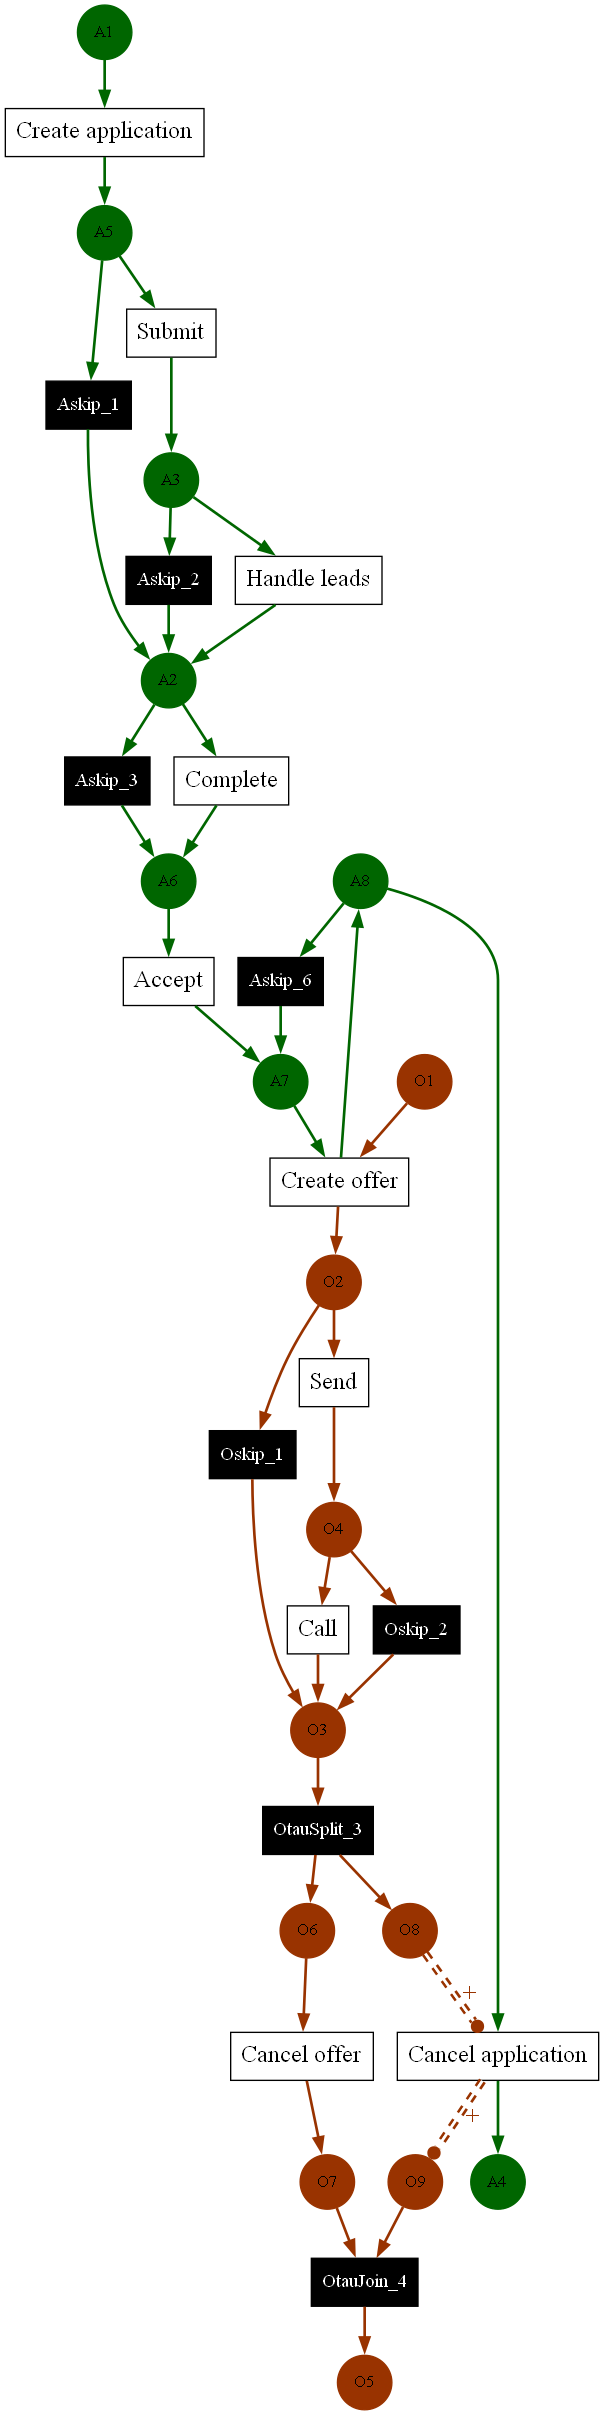

{O4, A1, A2, A4, A3, A5, A6, A7, A8, O1, O2, O6, O7, O8, O3, O9, O5}
{Send, Create application, Askip_3, Askip_1, Handle leads, Askip_2, Complete, Submit, Cancel application, Accept, Askip_6, Create offer, Oskip_1, Call, OtauJoin_4, Oskip_2, Cancel offer, OtauSplit_3}
{(p)A1->(t)Create application, (t)Askip_1->(p)A2, (p)A2->(t)Askip_3, (t)Handle leads->(p)A2, (p)A2->(t)Complete, (p)A3->(t)Askip_2, (p)A3->(t)Handle leads, (t)Askip_6->(p)A7, (t)Accept->(p)A7, (t)Create offer->(p)A8, (t)OtauJoin_4->(p)O5, (p)O9->(t)OtauJoin_4, (t)Cancel offer->(p)O7, (t)Call->(p)O3, (p)A8->(t)Cancel application, (t)Cancel application->(p)O9, (p)O4->(t)Oskip_2, (t)OtauSplit_3->(p)O6, (p)O3->(t)OtauSplit_3, (p)O8->(t)Cancel application, (p)A5->(t)Askip_1, (p)A7->(t)Create offer, (t)Askip_2->(p)A2, (t)Submit->(p)A3, (t)Cancel application->(p)A4, (t)Create application->(p)A5, (t)Complete->(p)A6, (p)A6->(t)Accept, (p)A5->(t)Submit, (t)Askip_3->(p)A6, (t)Create offer->(p)O2, (t)Oskip_2->(p)O3, (t)OtauSplit_3->(

In [569]:
from ocpa.algo.conformance.precision_and_fitness import evaluator as quality_measure_factory
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
filename = "sample_logs/csv/挖掘定性使用BPI2017-Top10.csv"
object_types = ["A", "O"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"event_activity",
              "time_name":"event_timestamp",
              "sep":","}
ocel = ocel_import_factory.apply(file_path= filename,parameters = parameters)
ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})
gviz=ocpn_vis_factory.apply(ocpn)
ocpn_vis_factory.view(gviz)
print(ocpn.places)
print(ocpn.transitions)
print(ocpn.arcs)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn), "D:/OCEL/BPI2017-Top10.png")

In [18]:
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
filename = "sample_logs/csv/挖掘定量使用-BPI2017-filtered-不合规.jsonocel"
ocel = ocel_import_factory.apply(filename)
print("噪声日志导入成功! 内容如下：")
print(ocel)

噪声日志导入成功! 内容如下：
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['A', 'O'], act_attr={'Create application': ['start_timestamp'], 'Submit': ['start_timestamp'], 'Handle leads': ['start_timestamp'], 'Complete': ['start_timestamp'], 'Create offer': ['start_timestamp'], 'Send': ['start_timestamp'], 'Call': ['start_timestamp'], 'Cancel application': ['start_timestamp'], 'Cancel offer': ['start_timestamp'], 'Accept': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_t

提取流程执行成功！
Number of process executions: 2
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}, {12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}]
流程执行 1 如图


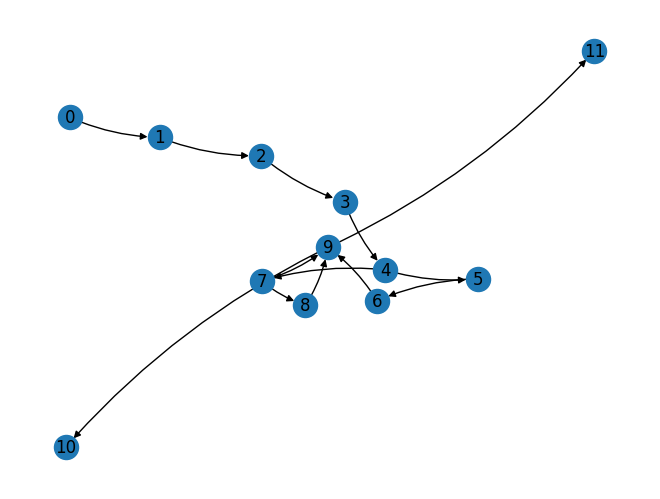

流程执行 2 如图


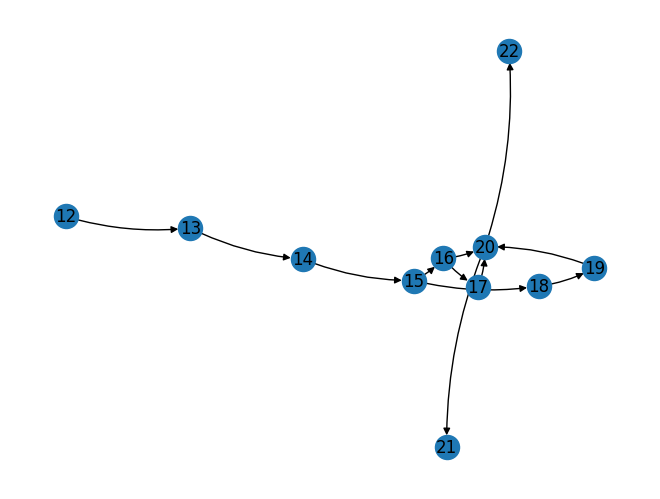

In [11]:
#步骤2：提取流程执行

print("提取流程执行成功！")
print("Number of process executions: "+str(len(ocel.process_executions)))
print(ocel.process_executions)
# print("Events of the first process execution: "+str(ocel.process_executions[0]))
# print("Objects of the first process execution: "+str(ocel.process_execution_objects[0]))
import networkx as nx
import matplotlib.pyplot as plt
# graph_1 = ocel.get_process_execution_graph(0)
# pos = nx.spring_layout(graph_1)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_1, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行1如图")
# plt.show()
# graph_2 = ocel.get_process_execution_graph(1)
# pos = nx.spring_layout(graph_2)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_2, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行2如图")
# plt.show()
# graph_3 = ocel.get_process_execution_graph(2)
# pos = nx.spring_layout(graph_3)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(graph_3, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行3如图")
# plt.show()
pe_graph = []
for i in range(len(ocel.process_executions)):
    graph = ocel.get_process_execution_graph(i)
    pe_graph.append(graph)
for i in range(len(pe_graph)):
    pos = nx.spring_layout(pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"如图")
    plt.show()

流程执行 1 删除跨层冗余依赖成功！如图：


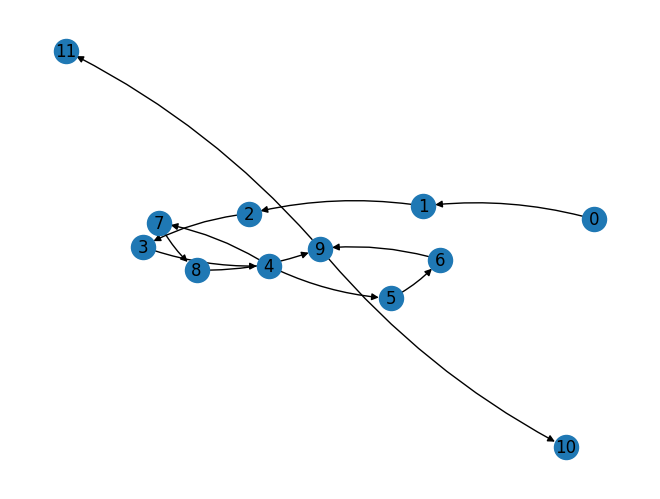

流程执行 2 删除跨层冗余依赖成功！如图：


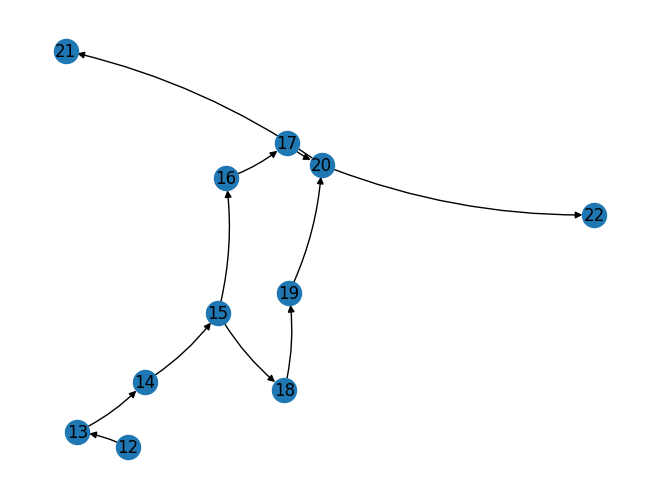

In [12]:
#步骤3：删除跨层冗余依赖

def transitive_reduction(G):
    # Ensure G is a DAG
    if not nx.is_directed_acyclic_graph(G):
        msg = "Directed Acyclic Graph required for transitive_reduction"
        raise nx.NetworkXError(msg)
    
    TR = nx.DiGraph()
    TR.add_nodes_from(G.nodes())
    descendants = {}
    check_count = dict(G.in_degree)
    
    for u in G:
        u_nbrs = set(G[u])
        for v in G[u]:
            if v in u_nbrs:
                if v not in descendants:
                    descendants[v] = {y for x, y in nx.dfs_edges(G, v)}
                u_nbrs -= descendants[v]
            check_count[v] -= 1
            if check_count[v] == 0:
                del descendants[v]
        TR.add_edges_from((u, v) for v in u_nbrs)
    
    return TR
# re_graph = transitive_reduction(graph_1)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行1删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_2)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行2删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_3)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行3删除跨层冗余依赖成功！如图：")
# plt.show()
import matplotlib.pyplot as plt
reduction_pe_graph = []
for i in range(len(pe_graph)):
    re_graph = transitive_reduction(pe_graph[i])
    reduction_pe_graph.append(re_graph)
for i in range(len(reduction_pe_graph)):
    pos = nx.spring_layout(reduction_pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(reduction_pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"删除跨层冗余依赖成功！如图：")
    plt.show()

In [13]:

#步骤4：按梯队划分绑定序列-第1步-获取分组情况

def get_no_incoming_nodes(G):
    """ Return a list of nodes with no incoming edges in the graph G """
    return [node for node in G.nodes if G.in_degree(node) == 0]

def layer_nodes(G):
    """ Return a list of layers of nodes with no incoming edges in the graph G """
    final = []
    while G.nodes:
        current_layer = get_no_incoming_nodes(G)
        final.append(current_layer)
        G.remove_nodes_from(current_layer)
    return final
# re_graph = transitive_reduction(graph_1)
# layered_nodes = layer_nodes(re_graph.copy())
# print("流程执行1按梯队划分绑定序列成功！分组情况如下：")
# print("Layered Nodes:", layered_nodes)
layered_nodes_list = []
for i in range(len(reduction_pe_graph)):
    layered_nodes = layer_nodes(reduction_pe_graph[i].copy())
    layered_nodes_list.append(layered_nodes)
for i in range(len(layered_nodes_list)):
    print("流程执行",i+1,"按梯队划分绑定序列成功！分组情况如下：")
    print("Layered Nodes:", layered_nodes_list[i])

流程执行 1 按梯队划分绑定序列成功！分组情况如下：
Layered Nodes: [[0], [1], [2], [3], [4], [5, 7], [6, 8], [9], [10, 11]]
流程执行 2 按梯队划分绑定序列成功！分组情况如下：
Layered Nodes: [[12], [13], [14], [15], [16, 18], [17, 19], [20], [21, 22]]


In [19]:
#步骤4：按梯队划分绑定序列-第2步-获取OCEL数据

#手动添加：噪声日志部分提取内容
ocel_log = """
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['A', 'O'], act_attr={'Create application': ['start_timestamp'], 'Submit': ['start_timestamp'], 'Handle leads': ['start_timestamp'], 'Complete': ['start_timestamp'], 'Create offer': ['start_timestamp'], 'Send': ['start_timestamp'], 'Call': ['start_timestamp'], 'Cancel application': ['start_timestamp'], 'Cancel offer': ['start_timestamp'], 'Accept': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9, Event 9 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10, Event 10 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11, Event 11 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12, Event 12 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13, Event 13 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14, Event 14 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15, Event 15 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16, Event 16 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17, Event 17 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18, Event 18 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19, Event 19 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20, Event 20 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1653360886', 'Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (21, Event 21 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (22, Event 22 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'Application_764468920': Object Application_764468920 - Type: A, OVMAP: {}, 'Application_1624036826': Object Application_1624036826 - Type: A, OVMAP: {}, 'Offer_1653360886': Object Offer_1653360886 - Type: O, OVMAP: {}, 'Offer_545478877': Object Offer_545478877 - Type: O, OVMAP: {}, 'Offer_1938577920': Object Offer_1938577920 - Type: O, OVMAP: {}, 'Offer_2069800110': Object Offer_2069800110 - Type: O, OVMAP: {}}, obj_event_mapping={'Application_1624036826': [0, 1, 2, 3, 4, 7, 9], 'Offer_2069800110': [4, 5, 6, 9, 11], 'Offer_545478877': [7, 8, 9, 10], 'Application_764468920': [12, 13, 14, 15, 16, 20], 'Offer_1938577920': [15, 18, 19, 20, 22], 'Offer_1653360886': [16, 17, 20, 21]})), graph=EventGraph(eog=<networkx.classes.digraph.DiGraph object at 0x00000201FDFF4948>), parameters={'obj_names': ['A', 'O'], 'val_names': ['sevent_tevent_aevent_revent_tevent__event_tevent_ievent_mevent_eevent_sevent_tevent_aevent_mevent_p'], 'act_name': 'event_activity', 'time_name': 'event_timestamp', 'sep': ','})"""
import re
match = re.search(r'raw=RawObjectCentricData\((.*?)\)\)', ocel_log, re.DOTALL)
if match:
    raw_data = match.group(0)
#     print("Extracted Raw Data:")
#     print(raw_data)
else:
    print("No match found for raw=RawObjectCentricData")
import re
from collections import OrderedDict

# 假设 raw_data 是提取到的 Raw Data 部分
# raw_data = "raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Lift off, Timestamp: 2023-02-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 2, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Load cargo, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Unload, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'b2', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'b1': Object b1 - Type: baggage, OVMAP: {}, 'b2': Object b2 - Type: baggage, OVMAP: {}, 'p1': Object p1 - Type: plane, OVMAP: {}}, obj_event_mapping={'p1': [0, 3, 4, 5, 6], 'b1': [1, 4, 5, 8], 'b2': [2, 5, 7]}))"

# 定义正则表达式来匹配每个事件的数据
event_pattern = re.compile(r'\((\d+), Event \d+ - Activity: (.*?), Timestamp: .*?, OMAP: (\[.*?\]), VMAP: .*?\)')

# 初始化一个字典来保存结果
events_dict = {}

# 使用正则表达式查找所有匹配的事件
matches = event_pattern.findall(raw_data)

# 定义对象类型和对应的对象
object_types = {
    'A': ['Application_1624036826','Application_764468920'],
    'O': ['Offer_2069800110','Offer_545478877','Offer_1938577920','Offer_1653360886'],
}

# 处理每个匹配的事件并将其保存到字典中
for match in matches:
    event_index = int(match[0])
    activity = match[1]
    omap = eval(match[2])  # 将OMAP字符串转换为实际的列表
    categorized_objects = {}
    for obj_type, objects in object_types.items():
        categorized_objects[obj_type] = [obj for obj in omap if obj in objects]
    events_dict[event_index] = [activity, categorized_objects]

# 打印结果
print("完整日志 事件活动绑定匹配成功！内容如下：")
print(events_dict)

完整日志 事件活动绑定匹配成功！内容如下：
{0: ['Create application', {'A': ['Application_1624036826'], 'O': []}], 1: ['Submit', {'A': ['Application_1624036826'], 'O': []}], 2: ['Handle leads', {'A': ['Application_1624036826'], 'O': []}], 3: ['Complete', {'A': ['Application_1624036826'], 'O': []}], 4: ['Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110']}], 5: ['Send', {'A': [], 'O': ['Offer_2069800110']}], 6: ['Call', {'A': [], 'O': ['Offer_2069800110']}], 7: ['Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_545478877']}], 8: ['Send', {'A': [], 'O': ['Offer_545478877']}], 9: ['Cancel application', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110', 'Offer_545478877']}], 10: ['Cancel offer', {'A': [], 'O': ['Offer_545478877']}], 11: ['Cancel offer', {'A': [], 'O': ['Offer_2069800110']}], 12: ['Create application', {'A': ['Application_764468920'], 'O': []}], 13: ['Complete', {'A': ['Application_764468920'], 'O': []}], 14: ['Accept', {'A': ['Application_764468920'

In [20]:
#步骤4：按梯队划分绑定序列-第3步-获取绑定序列

def format_layered_nodes(layered_nodes, events_dict):
    formatted_nodes = []

    for layer in layered_nodes:
        layer_list = []
        for node in layer:
            if node in events_dict:
                activity_name = events_dict[node][0]
                objects_map = events_dict[node][1]
                layer_list.append((activity_name, objects_map))
            else:
                print(f"Event index {node} not found in events_dict.")
        formatted_nodes.append(layer_list)

    return formatted_nodes
# formatted_nodes = format_layered_nodes(layered_nodes, events_dict)
# print("流程执行1 绑定序列获取成功！内容如下：")
# print(formatted_nodes)
formatted_nodes_list = []
for i in range(len(layered_nodes_list)):
    formatted_nodes = format_layered_nodes(layered_nodes_list[i], events_dict)
    formatted_nodes_list.append(formatted_nodes)
for i in range(len(formatted_nodes_list)):
    print("流程执行",i+1, "绑定序列获取成功！内容如下：")
    print(formatted_nodes_list[i])
    

流程执行 1 绑定序列获取成功！内容如下：
[[('Create application', {'A': ['Application_1624036826'], 'O': []})], [('Submit', {'A': ['Application_1624036826'], 'O': []})], [('Handle leads', {'A': ['Application_1624036826'], 'O': []})], [('Complete', {'A': ['Application_1624036826'], 'O': []})], [('Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110']})], [('Send', {'A': [], 'O': ['Offer_2069800110']}), ('Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_545478877']})], [('Call', {'A': [], 'O': ['Offer_2069800110']}), ('Send', {'A': [], 'O': ['Offer_545478877']})], [('Cancel application', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110', 'Offer_545478877']})], [('Cancel offer', {'A': [], 'O': ['Offer_545478877']}), ('Cancel offer', {'A': [], 'O': ['Offer_2069800110']})]]
流程执行 2 绑定序列获取成功！内容如下：
[[('Create application', {'A': ['Application_764468920'], 'O': []})], [('Complete', {'A': ['Application_764468920'], 'O': []})], [('Accept', {'A': ['Application_764468920'], '

In [21]:
#步骤6：构造开始标识-第1步-确定开始库所和结束库所

###开始库所

def get_initial_places(ocpn):
    initial_places = {}
    for place in ocpn.places:
        if place.initial:
            if place.object_type not in initial_places:
                initial_places[place.object_type] = []
            initial_places[place.object_type].append(place.name)
    return initial_places

initial_places = get_initial_places(ocpn)
print("OCPN的开始库所获取成功！内容如下：")
print(initial_places)

###结束库所

def get_final_places(ocpn):
    final_places = {}
    for place in ocpn.places:
        if place.final:
            if place.object_type not in final_places:
                final_places[place.object_type] = []
            final_places[place.object_type].append(place.name)
    return final_places

final_places = get_final_places(ocpn)
print("OCPN的结束库所获取成功！内容如下：")
print(final_places)

OCPN的开始库所获取成功！内容如下：
{'A': ['A1'], 'O': ['O1']}
OCPN的结束库所获取成功！内容如下：
{'A': ['A2'], 'O': ['O3']}


In [22]:
#步骤6：构造开始标识-第2步-构造开始标识
# def extract_objects_from_bindings(formatted_nodes):
#     objects_dict = {}

#     for layer in formatted_nodes:
#         for binding in layer:
#             _, b_objects = binding
#             for obj_type, obj_list in b_objects.items():
#                 if obj_type not in objects_dict:
#                     objects_dict[obj_type] = set()
#                 objects_dict[obj_type].update(obj_list)

#     # 转换集合为列表形式
#     for obj_type in objects_dict:
#         objects_dict[obj_type] = list(objects_dict[obj_type])

#     return objects_dict


def extract_objects_from_bindings(formatted_nodes):
    objects_dict = {}

    for layer in formatted_nodes:
        for binding in layer:
            _, objects = binding
            for obj_type, obj_list in objects.items():
                if obj_type not in objects_dict:
                    objects_dict[obj_type] = set()
                objects_dict[obj_type].update(obj_list)

    # 转换集合为列表形式
    for obj_type in objects_dict:
        objects_dict[obj_type] = list(objects_dict[obj_type])

    return objects_dict




# 提取对象
# objects_dict = extract_objects_from_bindings(formatted_nodes)
# print(objects_dict)

# # 输出结果
# print("流程执行1 绑定中涉及的各类型及相应对象的内容如下：")


# 将token放入开始库所，构造token列表 [(plane1,p1),(baggage1,b1),(baggage1,b2)]
def generate_initial_marking(initial_places, objects_dict):
    initial_marking = []
    for obj_type, initial_objs in initial_places.items():
        if obj_type in objects_dict:
            for initial_obj in initial_objs:
                for obj in objects_dict[obj_type]:
                    initial_marking.append((initial_obj, obj))
    return initial_marking
# initial_marking = generate_initial_marking(initial_places, objects_dict)
# # print(len(initial_marking))
# print("流程执行1 开始标识获取成功！内容如下：")
# print(initial_marking)

In [23]:
#步骤7：重演-第1步-提取变迁的前集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取前集库所的函数
def get_predecessor_places(arcs, transition):
    predecessor_places = []
    for arc in arcs:
        if arc.target == transition:
            predecessor_places.append(arc.source)
    return predecessor_places

In [24]:
#步骤7：重演-第2步-提取变迁的后集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取后继库所的函数
def get_postdecessor_places(arcs, transition):
    postdecessor_places = []
    for arc in arcs:
        if arc.source == transition:
            postdecessor_places.append(arc.target)
    return postdecessor_places

In [25]:
#步骤7：重演-第3步-移除结束库所的Token
def remove_tokens_from_final_places(current_marking, final_places_dict):  
    consumed = []  
    updated_marking = []  
    consumed_count = 0  # 初始化计数器  
  
    # final_places_dict 是一个字典，键是库所类型，值是结束库所名称的列表  
    final_places = {place_name for place_type, names in final_places_dict.items() for place_name in names}  
  
    # 遍历当前标识中的所有Token  
    for place_name, token in current_marking:  
        if place_name in final_places:  
            consumed.append(token)  
            consumed_count += 1  # 更新计数器  
        else:  
            updated_marking.append((place_name, token))  
  
    return updated_marking, consumed, consumed_count  

In [34]:
# #步骤9：重演
    
def apply_bindings_to_ocpn(bindings, ocpn, initial_marking):
    # 定义计数器
    produced = len(initial_marking)
    consumed = 0
    missing = 0
    remaining = 0
    current_marking = initial_marking
    #构造无法使能变迁集合
    unabled_transition = set()
    added_tokens_info = []  # 存储所有添加的缺失Token

    # 判断变迁是否可以发生
    for binding_group in bindings:
        for binding in binding_group:
            if isinstance(binding, tuple) and len(binding) == 2:
                activity, objects = binding
                transition = find_transition_by_label(ocpn.transitions, activity)
                if transition is None:
                    print("No Transition")
                    continue

                pre_places = get_predecessor_places(ocpn.arcs, transition)
                if is_transition_enabled(transition, pre_places, current_marking, objects):
                    # 变迁可以发生
                    consumed += sum(len(v) for v in objects.values())
                    produced += sum(len(v) for v in objects.values())
                    missing += 0

                    post_places = get_postdecessor_places(ocpn.arcs, transition)
                    current_marking = update_marking(current_marking, pre_places, post_places, objects)
                    print(f"{activity} 发生后当前标识为：", current_marking)
                else:
                    # 变迁无法发生，尝试添加缺失的Token
                    current_marking, missing_tokens = add_missing_token(pre_places, current_marking, objects)
                    if missing_tokens:
                        added_tokens_info.append({activity: missing_tokens})

                    print(f"{activity} 不可发生，添加缺失Token后的当前标识为：", current_marking)

                    # 再次检查变迁是否可以发生
                    if is_transition_enabled(transition, pre_places, current_marking, objects):
                        #将无法使能变迁添加到集合中
                        unabled_transition.add(transition)
                        consumed += sum(len(v) for v in objects.values())
                        produced += sum(len(v) for v in objects.values())
                        missing += len(missing_tokens)

                        post_places = get_postdecessor_places(ocpn.arcs, transition)
                        current_marking = update_marking(current_marking, pre_places, post_places, objects)
                        print(f"{activity} 发生后当前标识为：", current_marking)
                    else:
                        print(f"{activity} 仍不可发生")

    print("当前标识为：", current_marking)
    final_places_dict = get_final_places(ocpn)
    print("结束库所为：", final_places_dict)
    current_marking = remove_tokens_from_final_places(current_marking, final_places_dict)
    consumed_count = current_marking[-1]
    consumed += consumed_count
    print("移除Token后，当前标识为：", current_marking)
    if current_marking:
        remaining += len(current_marking[0])

    print("produced:", produced)
    print("consumed:", consumed)
    print("missing:", missing)
    print("remaining:", remaining)
    
    #输出无法使能变迁集合
    print("无法使能的变迁集合:", unabled_transition)
    #输出添加的缺失Token信息
    print("添加的缺失Token信息:", added_tokens_info)
    
    return produced, consumed, missing, remaining, unabled_transition, added_tokens_info #输出结果是元组

In [35]:
#步骤10：加入数据
# token_result_1 = apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking)
# print(type(apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking))) #元组
token_result_list = []
for i in range(len(formatted_nodes_list)):
    objects_dict = extract_objects_from_bindings(formatted_nodes_list[i])
    print("流程执行",i+1,"绑定中涉及的各类型及相应对象的内容如下：")
    print(objects_dict)
    initial_marking = generate_initial_marking(initial_places, objects_dict)
    print("流程执行",i+1,"开始标识获取成功！内容如下：")
    print(initial_marking)
    token_result = apply_bindings_to_ocpn(formatted_nodes_list[i],ocpn,initial_marking)
    print(token_result)
    token_result_list.append(token_result)
print(token_result_list)

import csv  
  
def extract_all_transitions_tokens(process_list):  
    results = []  
    for index, (_, _, _, _, transitions, token_info_dicts) in enumerate(process_list, start=1):  
        for transition in transitions:  
            transition_str = str(transition)  
            for token_dict in token_info_dicts:  
                if transition_str in token_dict:  
                    tokens = token_dict[transition_str]  # 提取与变迁对应的所有token  
                    for token in tokens:  # 遍历所有token  
                        results.append((index, transition_str, token))  
    return results
  
# 调用函数并获取结果  
results = extract_all_transitions_tokens(token_result_list)  
  
# 写入CSV文件  
with open('plane_unfitting_pe.csv', 'w', newline='', encoding='utf-8') as file:  
    writer = csv.writer(file)  
    # 写入表头  
    writer.writerow(['流程执行序号', '无法使能变迁', '添加缺失Token信息'])  
    # 写入结果  
    writer.writerows(results)  
  
print("不拟合流程执行已写入CSV文件。")


def cal_batch(token_result_list):
    pre_top = 0 
    pre_bot = 0
    post_top = 0
    post_bot = 0
    for i in range(len(token_result_list)):
        pre_top += token_result_list[i][2]
        pre_bot += token_result_list[i][1]
        post_top += token_result_list[i][3]
        post_bot += token_result_list[i][0]
    return pre_top,pre_bot,post_top,post_bot
result = cal_batch(token_result_list)
calculate_ratio_pre = result[0]/result[1]
calculate_ratio_post = result[2]/result[3]
fitness = (1/2)*(1-calculate_ratio_pre) + (1/2)*(1-calculate_ratio_post)
print("生成的Token总数:消耗的Token总数:缺失的Token总数:剩余的Token总数=",result[3],result[1],result[0],result[2],)
print(fitness)


流程执行 1 绑定中涉及的各类型及相应对象的内容如下：
{'A': ['Application_1624036826'], 'O': ['Offer_545478877', 'Offer_2069800110']}
流程执行 1 开始标识获取成功！内容如下：
[('A1', 'Application_1624036826'), ('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110')]
Create application 发生后当前标识为： [('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110'), ('A5', 'Application_1624036826')]
Submit 发生后当前标识为： [('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110'), ('A3', 'Application_1624036826')]
Handle leads 发生后当前标识为： [('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110'), ('A4', 'Application_1624036826')]
Complete 发生后当前标识为： [('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110'), ('A6', 'Application_1624036826')]
Create offer 不可发生，添加缺失Token后的当前标识为： [('O1', 'Offer_545478877'), ('O1', 'Offer_2069800110'), ('A6', 'Application_1624036826'), ('A7', 'Application_1624036826')]
Create offer 发生后当前标识为： [('O1', 'Offer_545478877'), ('A6', 'Application_1624036826'), ('A8', 'Application_1624036826'), ('O2', 'Offer_2069800110')]
Send 发生后当前标识为： [('O1', 'O

In [28]:
#-------构造新的变迁列表：变迁为键，前后库所为值

# 定义获取前集库所的函数  
def get_predecessor_places(arcs, transition):  
    predecessor_places = []  
    for arc in arcs:  
        if arc.target == transition:  
            predecessor_places.append(arc.source)  
    return predecessor_places  
  
# 定义获取后继库所的函数  
def get_postdecessor_places(arcs, transition):  
    postdecessor_places = []  
    for arc in arcs:  
        if arc.source == transition:  
            postdecessor_places.append(arc.target)  
    return postdecessor_places  
  
transition_information_list = []  
for transition in ocpn.transitions:  
    transition_pre = get_predecessor_places(ocpn.arcs, transition)  
    transition_post = get_postdecessor_places(ocpn.arcs, transition)  
    transition_dic = {transition: [transition_pre, transition_post]}  
    transition_information_list.append(transition_dic)  
  
print(transition_information_list)

#结束库所
def get_final_places(ocpn):
    final_places = {}
    for place in ocpn.places:
        if place.final:
            if place.object_type not in final_places:
                final_places[place.object_type] = []
            final_places[place.object_type].append(place.name)
    return final_places

final_places = get_final_places(ocpn)
print("OCPN的结束库所获取成功！内容如下：")
print(final_places)

silent_transition = set()
for transition in ocpn.transitions:
    if transition.silent:
        silent_transition.add(transition)
print(silent_transition)

# 获取结束标识中非结束库所的托肯
def can_reach_final_place(current_marking, final_places_dict):
    un_final_places = []
    final_places = {place_name for place_type, names in final_places_dict.items() for place_name in names} 
    for items in current_marking:  
        if items[0] not in final_places:
            un_final_places.append(items) 
    return un_final_places

#-------依据这个计算从某个库所到结束库所是否存在路径

# 给定绑定，若绑定中的变迁缺失托肯，判断当前标识中是否存在此缺失对象，若存在，判断能否通过不可见变迁到达该变迁的前集库所
def get_place_type(pl, places):  
    for place in places:  
        if pl == str(place.name):  
            return place.object_type  
    return None  # 如果没有找到，返回 None  
def get_place_name(pl, places):  
    for place in places:  
        if pl == str(place.name):  
            return place.name  
    return None  # 如果没有找到，返回 None  
  
# print('Order1', ocpn.places)  
# print('Place Type:', get_place_type("Order1", ocpn.places))
def find_invisible_path(start_place, end_place_types, transition_information_list, silent_transition, final_places):  
    from collections import deque  
  
    # 创建一个队列用于广度优先搜索  
    queue = deque([(start_place, [start_place])])  # (current_place, path_to_current_place)  
    visited = set()  # 用于记录已经访问过的库所  
  
    while queue:  
        current_place, path = queue.popleft()  
        print("当前库所为：", repr(current_place), "类型为：", type(current_place))  
  
#         检查是否已经访问过这个库所  
        if current_place in visited:  
            continue  
  
        visited.add(current_place)  
  
        # 遍历所有变迁，找到以当前库所为起点的变迁  
        for transition_info in transition_information_list:  
            transition = list(transition_info.keys())[0]  
            if transition in silent_transition:  # 检查变迁是否在不可见变迁集合中  
                predecessors = transition_info[transition][0]  
                for predecessor in predecessors:  
                    if str(predecessor) == current_place:  
                        successors = transition_info[transition][1]  
#                         successors_type = get_place_type(successor, ocpn.places)
#                         successors_name = get_place_name(successor, ocpn.places)
                        for successor in successors:  
                            # 检查是否到达了同类型的结束库所  
                            successors_type = get_place_type(successor, ocpn.places)
                            successors_name = get_place_name(successor, ocpn.places)
                            if successors_type in end_place_types and successors_name in final_places[successors_type]:  
                                return path + [successor]  # 返回路径  
                            else:  
                                # 如果不是结束库所，则将其加入队列继续搜索  
                                queue.append((successor, path + [successor]))  
  
    return None  # 如果没有找到路径，则返回None 
  
# # 示例调用  
# start_place = 'SupplierOrder5'  # 起始库所的实例  
# end_place_type = 'SupplierOrder'  # 结束库所的类型  
# path = find_invisible_path(start_place, end_place_type, transition_information_list, silent_transition,final_places)  
# if path:  
#     print("存在不可见变迁路径：", path)  
# else:  
#     print("不存在不可见变迁路径。")
    
# current_marking=[('Item3', 'X2'), ('Item3', 'X3'), ('SupplierOrder5', 'A'), ('Invoice2', 'I1'), ('Payment3', 'P1'), ('Item4', 'X1'), ('Item4', 'X2'), ('Item4', 'X3'), ('Order2', 'O1')]
# print("初始当前标识",current_marking)
# #遍历
# # 遍历un_final_place列表  
# import re
# for item in un_final_place:  
#     start_place = item[0]  
#     match = re.match(r'([^0-9]+)', item[0])  
#     if match:  
#         item_base = match.group(1)  # 获取匹配的部分  
#     end_place_types = {item_base}  # 创建一个集合，只包含当前项的类型  
#     path = find_invisible_path(start_place, end_place_types, transition_information_list, silent_transition, final_places)  
#     print(type(path))
#     if path:  
#         print(f"从{start_place}到类型为{end_place_types}的结束库所存在不可见变迁路径：{path}")
#         # 更新当前标识  
#         current_marking.append((path[-1], item[1]))  # 添加新的托肯  
#         current_marking = [x for x in current_marking if x[0] != item[0]]  # 删除旧的托肯  
#     else:  
#         print(f"从{start_place}到类型为{end_place_types}的结束库所不存在不可见变迁路径。")

# #更新当前标识
# print("更新后的当前标识：", current_marking)

[{Send: [[O2], [O4]]}, {Oskip_2: [[O4], [O5]]}, {OtauSplit_3: [[O5], [O8, O6]]}, {Create application: [[A1], [A5]]}, {Askip_2: [[A3], [A4]]}, {Cancel application: [[O8, A8], [O9, A2]]}, {Handle leads: [[A3], [A4]]}, {Submit: [[A5], [A3]]}, {Askip_1: [[A5], [A4]]}, {Complete: [[A4], [A6]]}, {Accept: [[A6], [A7]]}, {Askip_5: [[A8], [A7]]}, {Create offer: [[A7, O1], [A8, O2]]}, {Cancel offer: [[O6], [O7]]}, {OtauJoin_4: [[O7, O9], [O3]]}, {Call: [[O4], [O5]]}, {Oskip_1: [[O2], [O5]]}]
OCPN的结束库所获取成功！内容如下：
{'A': ['A2'], 'O': ['O3']}
{Oskip_2, Askip_1, Askip_5, Askip_2, OtauSplit_3, OtauJoin_4, Oskip_1}


In [31]:
from collections import deque  
  
def find_path(start_place, end_place, transition_information_list, silent_transition):  
    # 创建一个队列用于广度优先搜索  
    # 每个元素是一个元组：(当前库所, 到达当前库所的路径)  
    queue = deque([(start_place, [start_place])])  
    visited = set()  # 用于记录已经访问过的库所  
  
    while queue:  
        current_place, path = queue.popleft()  
        print("当前库所为：", repr(current_place), "路径为：", path)  
  
        # 检查是否已经访问过这个库所  
        if current_place in visited:  
            continue  
  
        visited.add(current_place)  
  
        # 遍历所有变迁信息  
        for transition_info in transition_information_list:  
            # 假设transition_info是一个字典，其中键是变迁名，值是(前置库所列表, 后置库所列表)  
            transition, (predecessors, successors) = next(iter(transition_info.items()))  
  
            # 检查变迁是否是不可见的  
            if transition in silent_transition:  
                # 对于不可见变迁，不需要检查前置库所（或者根据具体逻辑可能仍需要检查）  
                # 这里我们假设不需要检查前置库所  
                for successor in successors:  
                    if successor not in visited:  
                        queue.append((successor, path + [successor]))  
                        # 如果找到目标库所，则立即返回路径  
                        if successor == end_place:  
                            return path + [successor]  
    return None   
  

def reach_by_silent(current_marking, binding, missing_tokens, transition_information_list, silent_transition):  
    path_list = []  
    match_list = []
    match_start_end_place_object = []  
    for missing_token in missing_tokens:  
        place_to_find = missing_token[0]  
        object_to_find = missing_token[1]  
          
        # 查找当前标记中是否有相同的对象但不同的库所  
        start_places = [mark[0] for mark in current_marking if mark[1] == object_to_find]  
          
        if not start_places:  # 注意这里应该是not start_places而不是start_places == None  
            path = None
            continue  # 如果没有起始库所，则跳过当前缺失托肯，继续检查下一个  
          
        # 尝试从每个可能的起始库所找到目标库所  
        for start_place in start_places:  
            path = find_path(start_place, place_to_find, transition_information_list, silent_transition)  
            if path:  
                path_list.append(path)  
                print(path)
                #{缺失托肯：(当前标识，转移到前集库所)}
                match = {missing_token:((path[0],missing_token[1]),(path[-1],missing_token[1]))}
                match_list.append(match)
                print("match为：",match)
                break  # 如果找到一条路径，就停止搜索其他起始库所  
                
      
    # 分情况判断：全部找到；未找到；部分找到  
    if len(path_list) == len(missing_tokens):
        for item in match_list:
            current_marking.remove(item[missing_token][0])
            current_marking.append(item[missing_token][1])
        print("更新后的当前标识为：",current_marking)
        return 2  # 所有缺失托肯均找到路径  
    elif len(path_list) == 0:  
        current_marking = current_marking
        return 1  # 所有缺失托肯都未找到路径  
    else:  # 部分缺失托肯找到路径  
        for missing_token in missing_tokens:  
            for item in match_list:  
                if list(item.keys())[0] == (missing_token[0], missing_token[1]):  # 检查是否匹配  
                    current_marking.remove(item[missing_token][0])  
                    current_marking.append(item[missing_token][1])  
                    break  # 找到匹配项后跳出内层循环  
        print("更新后的当前标识为：", current_marking)  
        return 3  # 部分缺失托肯找到路径
  
# # 示例调用  1 无不可见变迁 未找到
# print("未找到-----")
# current_marking = [('Item3', 'X2'), ('Item3', 'X3'), ('Order5', 'O1'), ('SupplierOrder5', 'A'), ('Item2', 'X1'), ('Invoice2', 'I1'), ('Payment3', 'P1')] 
# binding = [('PS', {'Payment': [], 'Item': ['X1', 'X2', 'X3']})]  
# transition_information_list = [{'CO': [['Order1'], ['Order3']]}, {'SP': [['Order4'], ['Order2']]}, {'PS': [['Order5', 'Item2'], ['Order4', 'Item4']]}, {'SO': [['SupplierOrder1'], ['SupplierOrder3']]}, {'CI': [['Invoice1', 'Order3'], ['Order5', 'Invoice3']]}, {'SupplierOrderskip_5': [['SupplierOrder5'], ['SupplierOrder2']]}, {'RS': [['Item1', 'SupplierOrder3'], ['Item3', 'SupplierOrder4']]}, {'SupplierOrderskip_4': [['SupplierOrder5'], ['SupplierOrder4']]}, {'UP': [['SupplierOrder4', 'Item3'], ['SupplierOrder5', 'Item2']]}, {'RI': [['Invoice3', 'Payment2'], ['Invoice2', 'Payment3']]}, {'RT': [['Payment1'], ['Payment2']]}]
# silent_transition = {'SupplierOrderskip_5', 'SupplierOrderskip_4'}  
# missing_tokens = [('Item2', 'X2'), ('Item2', 'X3')]  
# print(reach_by_silent(current_marking, binding, missing_tokens, transition_information_list, silent_transition))

# # # 示例调用  2 不可见变迁 全部找到
# print("全部找到-----")
# current_marking = [('Item3', 'X2'), ('Item3', 'X3'), ('Order5', 'O1'), ('SupplierOrder5', 'A'), ('Item2', 'X1'), ('Invoice2', 'I1'), ('Payment3', 'P1')] 
# binding = [('UP', {'SupplierOrder': ['A']})]  
# transition_information_list = [{'CO': [['Order1'], ['Order3']]}, {'SP': [['Order4'], ['Order2']]}, {'PS': [['Order5', 'Item2'], ['Order4', 'Item4']]}, {'SO': [['SupplierOrder1'], ['SupplierOrder3']]}, {'CI': [['Invoice1', 'Order3'], ['Order5', 'Invoice3']]}, {'SupplierOrderskip_5': [['SupplierOrder5'], ['SupplierOrder2']]}, {'RS': [['Item1', 'SupplierOrder3'], ['Item3', 'SupplierOrder4']]}, {'SupplierOrderskip_4': [['SupplierOrder5'], ['SupplierOrder4']]}, {'UP': [['SupplierOrder4', 'Item3'], ['SupplierOrder5', 'Item2']]}, {'RI': [['Invoice3', 'Payment2'], ['Invoice2', 'Payment3']]}, {'RT': [['Payment1'], ['Payment2']]}]
# silent_transition = {'SupplierOrderskip_5', 'SupplierOrderskip_4'}  
# missing_tokens = [('SupplierOrder4', 'A')]  
# print(reach_by_silent(current_marking, binding, missing_tokens, transition_information_list, silent_transition))

# # # 示例调用  2 不可见变迁 部分找到
# print("部分找到-----")
# current_marking = [('Item3', 'X2'), ('Item3', 'X3'), ('Order5', 'O1'), ('SupplierOrder5', 'A'), ('Item2', 'X1'), ('Invoice2', 'I1'), ('Payment3', 'P1')] 
# binding = [('UP', {'SupplierOrder': ['A'], 'Item3':['X4']})]  
# transition_information_list = [{'CO': [['Order1'], ['Order3']]}, {'SP': [['Order4'], ['Order2']]}, {'PS': [['Order5', 'Item2'], ['Order4', 'Item4']]}, {'SO': [['SupplierOrder1'], ['SupplierOrder3']]}, {'CI': [['Invoice1', 'Order3'], ['Order5', 'Invoice3']]}, {'SupplierOrderskip_5': [['SupplierOrder5'], ['SupplierOrder2']]}, {'RS': [['Item1', 'SupplierOrder3'], ['Item3', 'SupplierOrder4']]}, {'SupplierOrderskip_4': [['SupplierOrder5'], ['SupplierOrder4']]}, {'UP': [['SupplierOrder4', 'Item3'], ['SupplierOrder5', 'Item2']]}, {'RI': [['Invoice3', 'Payment2'], ['Invoice2', 'Payment3']]}, {'RT': [['Payment1'], ['Payment2']]}]
# silent_transition = {'SupplierOrderskip_5', 'SupplierOrderskip_4'}  
# missing_tokens = [('SupplierOrder4', 'A'),('Item3','X4')]  
# print(reach_by_silent(current_marking, binding, missing_tokens, transition_information_list, silent_transition))

In [32]:
# #步骤9：重演
transition_information_list = [{'Create application': [['A1'], ['A5']]},{'Submit': [['A5'], ['A3']]},{'Handle leads': [['A3'], ['A4']]},{'Complete': [['A4'], ['A6']]},{'Accept': [['A6'], ['A7']]},{'Create offer': [['A7','O1'], ['A3','O2']]},{'Send': [['O2'], ['O4']]},{'Send': [['O4'], ['O5']]},{'Cancel offer': [['O6'], ['O7']]},{'Cancel application': [['O8', 'A8'], ['O9', 'A2']]}]
silent_transition = {'Askip_1', 'Askip_2', 'Askip_5', 'Oskip_1', 'Oskip_2', 'OtauSplit_3', 'OtauJoin_4'}
def apply_bindings_to_ocpn(bindings, ocpn, initial_marking):
    # 定义计数器
    produced = len(initial_marking)
    consumed = 0
    missing = 0
    remaining = 0
    current_marking = initial_marking
    #构造无法使能变迁集合
    unabled_transition = set()
    added_tokens_info = []  # 存储所有添加的缺失Token

    # 判断变迁是否可以发生
    for binding_group in bindings:
        for binding in binding_group:
            if isinstance(binding, tuple) and len(binding) == 2:
                activity, objects = binding
                transition = find_transition_by_label(ocpn.transitions, activity)
                if transition is None:
                    print("No Transition")
                    continue

                pre_places = get_predecessor_places(ocpn.arcs, transition)
                if is_transition_enabled(transition, pre_places, current_marking, objects):
                    # 变迁可以发生
                    consumed += sum(len(v) for v in objects.values())
                    produced += sum(len(v) for v in objects.values())
                    missing += 0

                    post_places = get_postdecessor_places(ocpn.arcs, transition)
                    current_marking = update_marking(current_marking, pre_places, post_places, objects)
                    print(f"{activity} 发生后当前标识为：", current_marking)
                    
                else:
                    update_missing_current_marking, missing_tokens = add_missing_token(pre_places, current_marking, objects)
                    result = reach_by_silent(current_marking, binding, missing_tokens, transition_information_list, silent_transition)
                    if result == 1:
                        print(f"{activity} 不可发生，且无法通过不可见变迁转移缺失托肯。")
                        if missing_tokens:
                            added_tokens_info.append({activity: missing_tokens})
                            print(f"{activity} 不可发生，添加缺失Token后的当前标识为：",update_missing_current_marking)
                            # 再次检查变迁是否可以发生
                            if is_transition_enabled(transition, pre_places, current_marking, objects):
                                #将无法使能变迁添加到集合中
                                unabled_transition.add(transition)
                                consumed += sum(len(v) for v in objects.values())
                                produced += sum(len(v) for v in objects.values())
                                missing += len(missing_tokens)

                                post_places = get_postdecessor_places(ocpn.arcs, transition)
                                current_marking = update_marking(current_marking, pre_places, post_places, objects)
                                print(f"{activity} 发生后当前标识为：", current_marking)
                            else:
                                print(f"{activity} 仍不可发生")

                    elif result == 2:
                        print(f"{activity} 不可发生，但所有缺失托肯均可通过不可见变迁转移。")
                        if is_transition_enabled(transition, pre_places, current_marking, objects):
                        # 变迁可以发生
                            consumed += sum(len(v) for v in objects.values())+len()
                            produced += sum(len(v) for v in objects.values())
                            missing += 0

                            post_places = get_postdecessor_places(ocpn.arcs, transition)
                            current_marking = update_marking(current_marking, pre_places, post_places, objects)
                            print(f"{activity} 发生后当前标识为：", current_marking)
                    elif result == 3:
                        print(f"{activity} 不可发生，部分缺失托肯可通过不可见变迁转移。")
                        if missing_tokens:
                            added_tokens_info.append({activity: missing_tokens})
                            print(f"{activity} 不可发生，添加缺失Token后的当前标识为：",update_missing_current_marking)
                            # 再次检查变迁是否可以发生
                            if is_transition_enabled(transition, pre_places, current_marking, objects):
                                #将无法使能变迁添加到集合中
                                unabled_transition.add(transition)
                                consumed += sum(len(v) for v in objects.values())
                                produced += sum(len(v) for v in objects.values())
                                missing += len(missing_tokens)

                                post_places = get_postdecessor_places(ocpn.arcs, transition)
                                current_marking = update_marking(current_marking, pre_places, post_places, objects)
                                print(f"{activity} 发生后当前标识为：", current_marking)
                            else:
                                print(f"{activity} 仍不可发生")

    print("绑定执行完当前标识为：", current_marking)
    
#     current_marking=[('Item2', 'X2'), ('Item2', 'X3'), ('SupplierOrder5', 'A'), ('Payment2', 'P1'), ('Invoice3', 'I1'), ('Item3', 'X1'), ('Item3', 'X2'), ('Item3', 'X3'), ('Order2', 'O1')]    
#     print("初始当前标识",current_marking)
# 1    un_final_place = [('Item2', 'X2'), ('Item2', 'X3'), ('SupplierOrder5', 'A')]

# 遍历un_final_place列表  
#1     import re
#     for item in un_final_place:  
#         start_place = item[0]  
#         match = re.match(r'([^0-9]+)', item[0])  
#         if match:  
#             item_base = match.group(1)  # 获取匹配的部分  
#         end_place_types = {item_base}  # 创建一个集合，只包含当前项的类型  
#         path = find_invisible_path(start_place, end_place_types, transition_information_list, silent_transition, final_places)  
    
#         if path:  
#              print(f"从{start_place}到类型为{end_place_types}的结束库所存在不可见变迁路径：{path}")
#         # 更新当前标识  
#              current_marking.append((path[-1], item[1]))  # 添加新的托肯  
#              current_marking = [x for x in current_marking if x[0] != item[0]]  # 删除旧的托肯  
#         else:  
#              print(f"从{start_place}到类型为{end_place_types}的结束库所不存在不可见变迁路径。")

# #更新当前标识
# 1    print("更新后的当前标识：", current_marking)
    
#     import re
#     for item in un_final_place:  
#         start_place = item[0]  
#         match = re.match(r'([^0-9]+)', item[0])  
#         if match:  
#             item_base = match.group(1)  # 获取匹配的部分  
#         end_place_types = {item_base}  # 创建一个集合，只包含当前项的类型  
#         path = find_invisible_path(start_place, end_place_types, transition_information_list, silent_transition, final_places)  
# #         print(type(path))
#         if path:  
#             print(f"从{start_place}到类型为{end_place_types}的结束库所存在不可见变迁路径：{path}")
#         # 更新当前标识  
#             current_marking.append((str(path[-1]), item[1]))  # 添加新的托肯  
#             current_marking = [x for x in current_marking if x[0] != item[0]]  # 删除旧的托肯  
#         else:  
#             print(f"从{start_place}到类型为{end_place_types}的结束库所不存在不可见变迁路径。")

# #更新当前标识
#     print("更新后的当前标识：", current_marking)
    
#1     #判断当前标识中是否还有经不可见变迁可达结束库所的托肯
#     final_places_dict = get_final_places(ocpn)
#     print("结束库所为：", final_places_dict)
#     current_marking = remove_tokens_from_final_places(current_marking, final_places_dict)
#     consumed_count = current_marking[-1]
#     consumed += consumed_count
#     print("移除Token后，当前标识为：", current_marking)
#     if current_marking:
#         remaining += len(current_marking[0])

#     print("produced:", produced)
#     print("consumed:", consumed)
#     print("missing:", missing)
#     print("remaining:", remaining)
    
#     #输出无法使能变迁集合
#     print("无法使能的变迁集合:", unabled_transition)
#     #输出添加的缺失Token信息
#     print("添加的缺失Token信息:", added_tokens_info)
    
# 1    return produced, consumed, missing, remaining, unabled_transition, added_tokens_info #输出结果是元组

# -------从此开始------

In [611]:
#步骤1：导入噪声日志
import time
from ocpa.objects.log.importer.ocel import factory as ocel_import_factory

start_time = time.time()
filename = "sample_logs/jsonocel/sublog-递增变体-偏差/20478E-5255UO-27624O-event_variant_[0]-[1]-[2]-[3]-[4]-[5]-[6]-[7]-[8]-[9].jsonocel"
ocel = ocel_import_factory.apply(filename)
end_time = time.time()

time1 = end_time - start_time
print(time1)

# print("噪声日志导入成功! 内容如下：")

# output_filename = "log_output.txt"
# with open(output_filename, 'w') as file:
#     file.write(str(ocel))

# print(f"日志内容已保存到 {output_filename}")

2.098416805267334


In [612]:
#步骤2：提取流程执行

# 暂时注释
# print("提取流程执行成功！")
# print("Number of process executions: "+str(len(ocel.process_executions)))
# print(ocel.process_executions)

import networkx as nx
import matplotlib.pyplot as plt

# 下面为流程执行绘图，暂时注释掉

start_time = time.time()
pe_graph = []
for i in range(len(ocel.process_executions)):
    graph = ocel.get_process_execution_graph(i)
    pe_graph.append(graph)
end_time = time.time()

time2 = end_time - start_time
print(time2)
# for i in range(len(pe_graph)):
#     pos = nx.spring_layout(pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
#     nx.draw(pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
#     print("流程执行",i+1,"如图")
#     plt.show()

0.6550583839416504


In [613]:
#步骤3：删除跨层冗余依赖

def transitive_reduction(G):
    # Ensure G is a DAG
    if not nx.is_directed_acyclic_graph(G):
        msg = "Directed Acyclic Graph required for transitive_reduction"
        raise nx.NetworkXError(msg)
    
    TR = nx.DiGraph()
    TR.add_nodes_from(G.nodes())
    descendants = {}
    check_count = dict(G.in_degree)
    
    for u in G:
        u_nbrs = set(G[u])
        for v in G[u]:
            if v in u_nbrs:
                if v not in descendants:
                    descendants[v] = {y for x, y in nx.dfs_edges(G, v)}
                u_nbrs -= descendants[v]
            check_count[v] -= 1
            if check_count[v] == 0:
                del descendants[v]
        TR.add_edges_from((u, v) for v in u_nbrs)
    
    return TR

import matplotlib.pyplot as plt
reduction_pe_graph = []

start_time = time.time()
for i in range(len(pe_graph)):
    re_graph = transitive_reduction(pe_graph[i])
    reduction_pe_graph.append(re_graph)
end_time = time.time()

time3 = end_time - start_time
print(time3)
    
# 下面是绘制删除跨层冗余依赖的流程执行，暂时注释掉

# for i in range(len(reduction_pe_graph)):
#     pos = nx.spring_layout(reduction_pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
#     nx.draw(reduction_pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
#     print("流程执行",i+1,"删除跨层冗余依赖成功！如图：")
#     plt.show()

2.021836996078491


In [614]:

#步骤4：按梯队划分绑定序列-第1步-获取分组情况

def get_no_incoming_nodes(G):
    """ Return a list of nodes with no incoming edges in the graph G """
    return [node for node in G.nodes if G.in_degree(node) == 0]

def layer_nodes(G):
    """ Return a list of layers of nodes with no incoming edges in the graph G """
    final = []
    while G.nodes:
        current_layer = get_no_incoming_nodes(G)
        final.append(current_layer)
        G.remove_nodes_from(current_layer)
    return final

start_time = time.time()
layered_nodes_list = []
for i in range(len(reduction_pe_graph)):
    layered_nodes = layer_nodes(reduction_pe_graph[i].copy())
    layered_nodes_list.append(layered_nodes)
end_time = time.time()

time4 = end_time - start_time
print(time4)

#暂时注释
# for i in range(len(layered_nodes_list)):
#     print("流程执行",i+1,"按梯队划分绑定序列成功！分组情况如下：")
#     print("Layered Nodes:", layered_nodes_list[i])

0.3471372127532959


In [615]:
ocel_log = """OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['A', 'O'], act_attr={'Create application': ['start_timestamp'], 'Submit': ['start_timestamp'], 'Complete': ['start_timestamp'], 'Create offer': ['start_timestamp'], 'Send': ['start_timestamp'], 'Call': ['start_timestamp'], 'Cancel application': ['start_timestamp'], 'Cancel offer': ['start_timestamp'], 'Accept': ['start_timestamp'], 'Handle leads': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569', 'Offer_213805292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213805292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213805292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569', 'Offer_644568599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644568599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1085880569', 'Offer_644568599', 'Offer_213805292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9, Event 9 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644568599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10, Event 10 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213805292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11, Event 11 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12, Event 12 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13, Event 13 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14, Event 14 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15, Event 15 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382', 'Offer_685676472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16, Event 16 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382', 'Offer_933028395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17, Event 17 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_933028395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18, Event 18 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685676472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19, Event 19 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685676472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20, Event 20 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382', 'Offer_1372889733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (21, Event 21 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372889733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (22, Event 22 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42838382', 'Offer_933028395', 'Offer_685676472', 'Offer_1372889733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (23, Event 23 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372889733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (24, Event 24 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_933028395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (25, Event 25 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685676472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (26, Event 26 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (27, Event 27 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (28, Event 28 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (29, Event 29 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (30, Event 30 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978', 'Offer_942936446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (31, Event 31 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_942936446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (32, Event 32 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_942936446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (33, Event 33 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978', 'Offer_517896136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (34, Event 34 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517896136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (35, Event 35 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978', 'Offer_135958834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (36, Event 36 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_135958834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (37, Event 37 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553362978', 'Offer_135958834', 'Offer_517896136', 'Offer_942936446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (38, Event 38 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_135958834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (39, Event 39 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517896136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (40, Event 40 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_942936446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (41, Event 41 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (42, Event 42 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (43, Event 43 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (44, Event 44 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (45, Event 45 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (46, Event 46 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445', 'Offer_1345717143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (47, Event 47 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1345717143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (48, Event 48 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1345717143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (49, Event 49 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445', 'Offer_2016276809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (50, Event 50 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2016276809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (51, Event 51 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197857445', 'Offer_1345717143', 'Offer_2016276809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (52, Event 52 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2016276809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (53, Event 53 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1345717143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (54, Event 54 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (55, Event 55 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (56, Event 56 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (57, Event 57 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (58, Event 58 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671', 'Offer_2004924770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (59, Event 59 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671', 'Offer_2100546231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (60, Event 60 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2100546231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (61, Event 61 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004924770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (62, Event 62 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004924770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (63, Event 63 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671', 'Offer_1262676703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (64, Event 64 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1262676703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (65, Event 65 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931862671', 'Offer_2100546231', 'Offer_1262676703', 'Offer_2004924770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (66, Event 66 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1262676703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (67, Event 67 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2100546231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (68, Event 68 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004924770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (69, Event 69 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (70, Event 70 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (71, Event 71 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (72, Event 72 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405', 'Offer_1562802810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (73, Event 73 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562802810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (74, Event 74 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562802810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (75, Event 75 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405', 'Offer_274484173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (76, Event 76 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274484173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (77, Event 77 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2015287405', 'Offer_1562802810', 'Offer_274484173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (78, Event 78 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274484173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (79, Event 79 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562802810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (80, Event 80 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (81, Event 81 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (82, Event 82 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (83, Event 83 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (84, Event 84 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233', 'Offer_750441445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (85, Event 85 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_750441445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (86, Event 86 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_750441445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (87, Event 87 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233', 'Offer_800413592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (88, Event 88 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_800413592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (89, Event 89 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1461440233', 'Offer_800413592', 'Offer_750441445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (90, Event 90 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_800413592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (91, Event 91 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_750441445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (92, Event 92 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (93, Event 93 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (94, Event 94 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (95, Event 95 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (96, Event 96 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641', 'Offer_1128644000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (97, Event 97 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128644000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (98, Event 98 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128644000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (99, Event 99 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641', 'Offer_794719051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (100, Event 100 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794719051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (101, Event 101 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1234535641', 'Offer_794719051', 'Offer_1128644000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (102, Event 102 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794719051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (103, Event 103 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128644000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (104, Event 104 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (105, Event 105 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (106, Event 106 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (107, Event 107 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (108, Event 108 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559', 'Offer_1088813920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (109, Event 109 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088813920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (110, Event 110 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088813920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (111, Event 111 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559', 'Offer_1585131667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (112, Event 112 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1585131667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (113, Event 113 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_340403559', 'Offer_1088813920', 'Offer_1585131667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (114, Event 114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1585131667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (115, Event 115 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088813920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (116, Event 116 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (117, Event 117 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (118, Event 118 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (119, Event 119 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (120, Event 120 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (121, Event 121 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901', 'Offer_12427732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (122, Event 122 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12427732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (123, Event 123 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12427732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (124, Event 124 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901', 'Offer_156262203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (125, Event 125 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156262203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (126, Event 126 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593655901', 'Offer_12427732', 'Offer_156262203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (127, Event 127 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156262203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (128, Event 128 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12427732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (129, Event 129 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (130, Event 130 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (131, Event 131 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (132, Event 132 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (133, Event 133 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225', 'Offer_1334090954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (134, Event 134 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334090954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (135, Event 135 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334090954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (136, Event 136 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225', 'Offer_2009051188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (137, Event 137 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009051188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (138, Event 138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225', 'Offer_270784256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (139, Event 139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270784256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (140, Event 140 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1947648225', 'Offer_1334090954', 'Offer_270784256', 'Offer_2009051188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (141, Event 141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270784256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (142, Event 142 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009051188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (143, Event 143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334090954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (144, Event 144 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (145, Event 145 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (146, Event 146 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (147, Event 147 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (148, Event 148 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797', 'Offer_288441629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (149, Event 149 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_288441629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (150, Event 150 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_288441629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (151, Event 151 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797', 'Offer_1627163731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (152, Event 152 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1627163731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (153, Event 153 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068443797', 'Offer_1627163731', 'Offer_288441629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (154, Event 154 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1627163731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (155, Event 155 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_288441629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (156, Event 156 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (157, Event 157 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (158, Event 158 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (159, Event 159 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (160, Event 160 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444', 'Offer_517746250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (161, Event 161 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517746250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (162, Event 162 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517746250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (163, Event 163 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444', 'Offer_2006327366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (164, Event 164 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006327366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (165, Event 165 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723779444', 'Offer_517746250', 'Offer_2006327366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (166, Event 166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006327366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (167, Event 167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517746250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (168, Event 168 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (169, Event 169 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (170, Event 170 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (171, Event 171 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859', 'Offer_427046646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (172, Event 172 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427046646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (173, Event 173 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427046646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (174, Event 174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859', 'Offer_1855513771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (175, Event 175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1855513771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (176, Event 176 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1754646859', 'Offer_1855513771', 'Offer_427046646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (177, Event 177 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1855513771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (178, Event 178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427046646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (179, Event 179 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (180, Event 180 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (181, Event 181 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (182, Event 182 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (183, Event 183 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575845027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (184, Event 184 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575845027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (185, Event 185 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843', 'Offer_1149798095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (186, Event 186 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1149798095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (187, Event 187 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_952532843', 'Offer_575845027', 'Offer_1149798095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (188, Event 188 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1149798095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (189, Event 189 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575845027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (190, Event 190 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (191, Event 191 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (192, Event 192 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (193, Event 193 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319', 'Offer_1658433857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (194, Event 194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658433857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (195, Event 195 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658433857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (196, Event 196 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319', 'Offer_159153109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (197, Event 197 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159153109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (198, Event 198 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886382319', 'Offer_159153109', 'Offer_1658433857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (199, Event 199 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159153109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (200, Event 200 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658433857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (201, Event 201 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (202, Event 202 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (203, Event 203 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (204, Event 204 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (205, Event 205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245', 'Offer_514594443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (206, Event 206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_514594443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (207, Event 207 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_514594443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (208, Event 208 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250134245', 'Offer_1450683092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (209, Event 209 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450683092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (210, Event 210 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450683092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (211, Event 211 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_514594443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (212, Event 212 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (213, Event 213 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (214, Event 214 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (215, Event 215 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (216, Event 216 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494', 'Offer_1722242928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (217, Event 217 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494', 'Offer_1398220931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (218, Event 218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1398220931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (219, Event 219 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722242928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (220, Event 220 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722242928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (221, Event 221 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74505494', 'Offer_1398220931', 'Offer_1722242928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (222, Event 222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1398220931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (223, Event 223 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722242928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (224, Event 224 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (225, Event 225 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (226, Event 226 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (227, Event 227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284', 'Offer_1257962808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (228, Event 228 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257962808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (229, Event 229 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257962808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (230, Event 230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284', 'Offer_6390600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (231, Event 231 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_6390600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (232, Event 232 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284', 'Offer_1504835931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (233, Event 233 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1504835931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (234, Event 234 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040511284', 'Offer_1257962808', 'Offer_6390600', 'Offer_1504835931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (235, Event 235 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1504835931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (236, Event 236 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_6390600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (237, Event 237 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257962808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (238, Event 238 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (239, Event 239 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (240, Event 240 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (241, Event 241 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (242, Event 242 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912', 'Offer_1214293885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (243, Event 243 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214293885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (244, Event 244 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214293885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (245, Event 245 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912', 'Offer_984941995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (246, Event 246 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984941995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (247, Event 247 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1068218912', 'Offer_1214293885', 'Offer_984941995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (248, Event 248 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984941995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (249, Event 249 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214293885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (250, Event 250 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (251, Event 251 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (252, Event 252 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (253, Event 253 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (254, Event 254 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (255, Event 255 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023', 'Offer_638693632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (256, Event 256 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_638693632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (257, Event 257 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_638693632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (258, Event 258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023', 'Offer_1413672442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (259, Event 259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1413672442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (260, Event 260 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1365381023', 'Offer_638693632', 'Offer_1413672442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (261, Event 261 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1413672442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (262, Event 262 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_638693632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (263, Event 263 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (264, Event 264 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (265, Event 265 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (266, Event 266 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125', 'Offer_213731049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (267, Event 267 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213731049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (268, Event 268 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213731049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (269, Event 269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125', 'Offer_1295368850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (270, Event 270 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295368850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (271, Event 271 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665878125', 'Offer_1295368850', 'Offer_213731049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (272, Event 272 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295368850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (273, Event 273 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213731049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (274, Event 274 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (275, Event 275 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (276, Event 276 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (277, Event 277 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (278, Event 278 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (279, Event 279 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465', 'Offer_1303352074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (280, Event 280 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1303352074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (281, Event 281 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1303352074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (282, Event 282 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465', 'Offer_393832839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (283, Event 283 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393832839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (284, Event 284 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1044911465', 'Offer_1303352074', 'Offer_393832839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (285, Event 285 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393832839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (286, Event 286 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1303352074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (287, Event 287 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (288, Event 288 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (289, Event 289 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (290, Event 290 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604', 'Offer_306682674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (291, Event 291 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306682674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (292, Event 292 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306682674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (293, Event 293 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604', 'Offer_1907190632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (294, Event 294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1907190632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (295, Event 295 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862160604', 'Offer_306682674', 'Offer_1907190632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (296, Event 296 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1907190632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (297, Event 297 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306682674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (298, Event 298 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (299, Event 299 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (300, Event 300 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (301, Event 301 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (302, Event 302 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942', 'Offer_2089640789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (303, Event 303 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2089640789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (304, Event 304 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2089640789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (305, Event 305 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942', 'Offer_824319064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (306, Event 306 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_824319064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (307, Event 307 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663648942', 'Offer_824319064', 'Offer_2089640789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (308, Event 308 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_824319064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (309, Event 309 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2089640789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (310, Event 310 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (311, Event 311 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (312, Event 312 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (313, Event 313 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (314, Event 314 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (315, Event 315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738', 'Offer_2113774528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (316, Event 316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113774528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (317, Event 317 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113774528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (318, Event 318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738', 'Offer_940920291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (319, Event 319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940920291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (320, Event 320 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1953406738', 'Offer_940920291', 'Offer_2113774528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (321, Event 321 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940920291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (322, Event 322 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113774528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (323, Event 323 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (324, Event 324 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (325, Event 325 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (326, Event 326 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (327, Event 327 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952', 'Offer_1173125013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (328, Event 328 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952', 'Offer_128901379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (329, Event 329 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_128901379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (330, Event 330 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173125013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (331, Event 331 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173125013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (332, Event 332 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920497952', 'Offer_128901379', 'Offer_1173125013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (333, Event 333 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_128901379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (334, Event 334 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173125013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (335, Event 335 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (336, Event 336 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (337, Event 337 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (338, Event 338 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650', 'Offer_738274833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (339, Event 339 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738274833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (340, Event 340 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738274833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (341, Event 341 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650', 'Offer_2102617321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (342, Event 342 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102617321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (343, Event 343 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788421650', 'Offer_2102617321', 'Offer_738274833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (344, Event 344 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102617321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (345, Event 345 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738274833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (346, Event 346 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (347, Event 347 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (348, Event 348 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (349, Event 349 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (350, Event 350 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973', 'Offer_1126064152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (351, Event 351 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973', 'Offer_776349166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (352, Event 352 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776349166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (353, Event 353 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1126064152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (354, Event 354 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1126064152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (355, Event 355 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562322973', 'Offer_1126064152', 'Offer_776349166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (356, Event 356 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776349166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (357, Event 357 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1126064152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (358, Event 358 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (359, Event 359 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (360, Event 360 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (361, Event 361 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (362, Event 362 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310', 'Offer_1790808751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (363, Event 363 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1790808751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (364, Event 364 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310', 'Offer_1914237031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (365, Event 365 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914237031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (366, Event 366 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914237031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (367, Event 367 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_944177310', 'Offer_1790808751', 'Offer_1914237031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (368, Event 368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914237031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (369, Event 369 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (370, Event 370 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (371, Event 371 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (372, Event 372 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913', 'Offer_166386211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (373, Event 373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913', 'Offer_1632821088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (374, Event 374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1632821088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (375, Event 375 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166386211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (376, Event 376 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166386211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (377, Event 377 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1274070913', 'Offer_166386211', 'Offer_1632821088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (378, Event 378 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1632821088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (379, Event 379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166386211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (380, Event 380 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (381, Event 381 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (382, Event 382 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (383, Event 383 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (384, Event 384 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076', 'Offer_407837490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (385, Event 385 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_407837490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (386, Event 386 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_407837490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (387, Event 387 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076', 'Offer_531162697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (388, Event 388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531162697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (389, Event 389 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076', 'Offer_1970712508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (390, Event 390 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1970712508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (391, Event 391 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076', 'Offer_1042193341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (392, Event 392 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042193341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (393, Event 393 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_898874076', 'Offer_1970712508', 'Offer_531162697', 'Offer_1042193341', 'Offer_407837490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (394, Event 394 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042193341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (395, Event 395 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1970712508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (396, Event 396 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531162697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (397, Event 397 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_407837490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (398, Event 398 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (399, Event 399 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (400, Event 400 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (401, Event 401 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (402, Event 402 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091', 'Offer_747358554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (403, Event 403 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091', 'Offer_389194212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (404, Event 404 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389194212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (405, Event 405 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747358554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (406, Event 406 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747358554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (407, Event 407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091', 'Offer_1128675380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (408, Event 408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128675380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (409, Event 409 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2092350091', 'Offer_389194212', 'Offer_747358554', 'Offer_1128675380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (410, Event 410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128675380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (411, Event 411 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389194212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (412, Event 412 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747358554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (413, Event 413 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (414, Event 414 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (415, Event 415 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (416, Event 416 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (417, Event 417 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (418, Event 418 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636', 'Offer_397749616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (419, Event 419 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397749616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (420, Event 420 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397749616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (421, Event 421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636', 'Offer_1401879807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (422, Event 422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401879807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (423, Event 423 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1898813636', 'Offer_397749616', 'Offer_1401879807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (424, Event 424 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401879807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (425, Event 425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397749616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (426, Event 426 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (427, Event 427 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (428, Event 428 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (429, Event 429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493', 'Offer_35740405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (430, Event 430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_35740405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (431, Event 431 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_35740405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (432, Event 432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493', 'Offer_1818804840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (433, Event 433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818804840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (434, Event 434 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443070493', 'Offer_35740405', 'Offer_1818804840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (435, Event 435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818804840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (436, Event 436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_35740405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (437, Event 437 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (438, Event 438 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (439, Event 439 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (440, Event 440 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413', 'Offer_1497689839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (441, Event 441 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497689839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (442, Event 442 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497689839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (443, Event 443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413', 'Offer_1776173350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (444, Event 444 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776173350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (445, Event 445 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417516413', 'Offer_1497689839', 'Offer_1776173350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (446, Event 446 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776173350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (447, Event 447 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497689839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (448, Event 448 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (449, Event 449 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (450, Event 450 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (451, Event 451 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (452, Event 452 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975', 'Offer_432913061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (453, Event 453 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432913061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (454, Event 454 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432913061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (455, Event 455 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975', 'Offer_369348638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (456, Event 456 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_369348638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (457, Event 457 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_879749975', 'Offer_432913061', 'Offer_369348638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (458, Event 458 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_369348638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (459, Event 459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432913061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (460, Event 460 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (461, Event 461 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (462, Event 462 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (463, Event 463 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (464, Event 464 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418', 'Offer_1844553031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (465, Event 465 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844553031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (466, Event 466 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844553031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (467, Event 467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418', 'Offer_1037393398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (468, Event 468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1037393398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (469, Event 469 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_784275418', 'Offer_1037393398', 'Offer_1844553031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (470, Event 470 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1037393398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (471, Event 471 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844553031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (472, Event 472 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (473, Event 473 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (474, Event 474 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (475, Event 475 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (476, Event 476 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799', 'Offer_470048680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (477, Event 477 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_470048680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (478, Event 478 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_470048680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (479, Event 479 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799', 'Offer_388112507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (480, Event 480 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_388112507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (481, Event 481 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259183799', 'Offer_470048680', 'Offer_388112507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (482, Event 482 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_388112507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (483, Event 483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_470048680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (484, Event 484 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (485, Event 485 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (486, Event 486 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (487, Event 487 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (488, Event 488 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913', 'Offer_481217395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (489, Event 489 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_481217395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (490, Event 490 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_481217395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (491, Event 491 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913', 'Offer_1154367786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (492, Event 492 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154367786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (493, Event 493 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1316947913', 'Offer_1154367786', 'Offer_481217395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (494, Event 494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154367786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (495, Event 495 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_481217395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (496, Event 496 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (497, Event 497 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (498, Event 498 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (499, Event 499 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (500, Event 500 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (501, Event 501 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622', 'Offer_2144679296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (502, Event 502 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2144679296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (503, Event 503 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2144679296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (504, Event 504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622', 'Offer_213145059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (505, Event 505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213145059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (506, Event 506 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355798622', 'Offer_213145059', 'Offer_2144679296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (507, Event 507 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213145059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (508, Event 508 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2144679296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (509, Event 509 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (510, Event 510 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (511, Event 511 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (512, Event 512 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (513, Event 513 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929', 'Offer_1666281512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (514, Event 514 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929', 'Offer_1828521443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (515, Event 515 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666281512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (516, Event 516 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1828521443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (517, Event 517 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1828521443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (518, Event 518 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1283783929', 'Offer_1666281512', 'Offer_1828521443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (519, Event 519 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1828521443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (520, Event 520 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (521, Event 521 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (522, Event 522 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (523, Event 523 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155', 'Offer_533108168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (524, Event 524 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533108168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (525, Event 525 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533108168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (526, Event 526 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155', 'Offer_1804364622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (527, Event 527 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804364622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (528, Event 528 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493542155', 'Offer_533108168', 'Offer_1804364622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (529, Event 529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804364622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (530, Event 530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533108168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (531, Event 531 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (532, Event 532 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (533, Event 533 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (534, Event 534 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (535, Event 535 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (536, Event 536 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (537, Event 537 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (538, Event 538 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (539, Event 539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (540, Event 540 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (541, Event 541 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (542, Event 542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (543, Event 543 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (544, Event 544 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (545, Event 545 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (546, Event 546 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (547, Event 547 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (548, Event 548 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (549, Event 549 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897', 'Offer_1397616922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (550, Event 550 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397616922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (551, Event 551 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397616922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (552, Event 552 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897', 'Offer_165489432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (553, Event 553 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_165489432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (554, Event 554 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1235595897', 'Offer_165489432', 'Offer_1397616922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (555, Event 555 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_165489432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (556, Event 556 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397616922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (557, Event 557 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (558, Event 558 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (559, Event 559 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (560, Event 560 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699', 'Offer_1324717742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (561, Event 561 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324717742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (562, Event 562 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324717742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (563, Event 563 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699', 'Offer_1046639925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (564, Event 564 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046639925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (565, Event 565 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_529938699', 'Offer_1046639925', 'Offer_1324717742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (566, Event 566 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046639925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (567, Event 567 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324717742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (568, Event 568 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (569, Event 569 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (570, Event 570 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (571, Event 571 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675', 'Offer_17406060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (572, Event 572 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_17406060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (573, Event 573 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_17406060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (574, Event 574 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675', 'Offer_890605055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (575, Event 575 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890605055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (576, Event 576 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185170675', 'Offer_890605055', 'Offer_17406060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (577, Event 577 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890605055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (578, Event 578 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_17406060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (579, Event 579 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (580, Event 580 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (581, Event 581 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (582, Event 582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522', 'Offer_623225613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (583, Event 583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_623225613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (584, Event 584 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_623225613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (585, Event 585 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522', 'Offer_829440260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (586, Event 586 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_829440260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (587, Event 587 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351256522', 'Offer_829440260', 'Offer_623225613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (588, Event 588 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_829440260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (589, Event 589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_623225613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (590, Event 590 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (591, Event 591 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (592, Event 592 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (593, Event 593 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (594, Event 594 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270', 'Offer_446279459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (595, Event 595 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_446279459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (596, Event 596 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_446279459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (597, Event 597 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270', 'Offer_190199852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (598, Event 598 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190199852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (599, Event 599 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989400270', 'Offer_190199852', 'Offer_446279459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (600, Event 600 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190199852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (601, Event 601 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_446279459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (602, Event 602 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (603, Event 603 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (604, Event 604 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (605, Event 605 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (606, Event 606 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992', 'Offer_1004722883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (607, Event 607 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004722883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (608, Event 608 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004722883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (609, Event 609 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992', 'Offer_1686159601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (610, Event 610 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686159601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (611, Event 611 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1616410992', 'Offer_1004722883', 'Offer_1686159601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (612, Event 612 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686159601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (613, Event 613 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004722883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (614, Event 614 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (615, Event 615 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (616, Event 616 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (617, Event 617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906', 'Offer_770023294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (618, Event 618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770023294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (619, Event 619 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770023294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (620, Event 620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906', 'Offer_64760790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (621, Event 621 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64760790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (622, Event 622 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_684696906', 'Offer_64760790', 'Offer_770023294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (623, Event 623 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64760790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (624, Event 624 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770023294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (625, Event 625 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (626, Event 626 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (627, Event 627 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (628, Event 628 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987', 'Offer_1960395450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (629, Event 629 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960395450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (630, Event 630 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960395450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (631, Event 631 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987', 'Offer_1588121428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (632, Event 632 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588121428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (633, Event 633 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_238073987', 'Offer_1588121428', 'Offer_1960395450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (634, Event 634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588121428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (635, Event 635 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960395450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (636, Event 636 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (637, Event 637 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (638, Event 638 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (639, Event 639 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (640, Event 640 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696', 'Offer_239260958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (641, Event 641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239260958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (642, Event 642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239260958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (643, Event 643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696', 'Offer_119642324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (644, Event 644 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_119642324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (645, Event 645 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224943696', 'Offer_239260958', 'Offer_119642324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (646, Event 646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_119642324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (647, Event 647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239260958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (648, Event 648 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (649, Event 649 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (650, Event 650 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (651, Event 651 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (652, Event 652 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (653, Event 653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218', 'Offer_1442647598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (654, Event 654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1442647598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (655, Event 655 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1442647598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (656, Event 656 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218', 'Offer_751555817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (657, Event 657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_751555817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (658, Event 658 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1612474218', 'Offer_1442647598', 'Offer_751555817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (659, Event 659 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_751555817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (660, Event 660 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1442647598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (661, Event 661 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (662, Event 662 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (663, Event 663 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (664, Event 664 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (665, Event 665 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565', 'Offer_1240545254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (666, Event 666 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1240545254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (667, Event 667 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1240545254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (668, Event 668 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565', 'Offer_1011044172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (669, Event 669 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011044172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (670, Event 670 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1297886565', 'Offer_1011044172', 'Offer_1240545254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (671, Event 671 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011044172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (672, Event 672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1240545254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (673, Event 673 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (674, Event 674 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (675, Event 675 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (676, Event 676 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (677, Event 677 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497', 'Offer_1479127147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (678, Event 678 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1479127147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (679, Event 679 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1479127147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (680, Event 680 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497', 'Offer_2116356879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (681, Event 681 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2116356879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (682, Event 682 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1260340497', 'Offer_2116356879', 'Offer_1479127147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (683, Event 683 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2116356879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (684, Event 684 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1479127147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (685, Event 685 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (686, Event 686 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (687, Event 687 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (688, Event 688 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (689, Event 689 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (690, Event 690 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792', 'Offer_170501608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (691, Event 691 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792', 'Offer_753068891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (692, Event 692 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_753068891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (693, Event 693 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170501608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (694, Event 694 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170501608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (695, Event 695 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770159792', 'Offer_170501608', 'Offer_753068891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (696, Event 696 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_753068891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (697, Event 697 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170501608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (698, Event 698 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (699, Event 699 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (700, Event 700 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (701, Event 701 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (702, Event 702 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (703, Event 703 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (704, Event 704 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (705, Event 705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (706, Event 706 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (707, Event 707 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_764468920', 'Offer_1653360886', 'Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (708, Event 708 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653360886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (709, Event 709 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938577920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (710, Event 710 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (711, Event 711 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (712, Event 712 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (713, Event 713 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (714, Event 714 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548', 'Offer_257530325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (715, Event 715 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257530325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (716, Event 716 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257530325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (717, Event 717 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548', 'Offer_1772932150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (718, Event 718 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1772932150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (719, Event 719 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_847920548', 'Offer_257530325', 'Offer_1772932150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (720, Event 720 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1772932150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (721, Event 721 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257530325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (722, Event 722 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (723, Event 723 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (724, Event 724 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (725, Event 725 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (726, Event 726 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933', 'Offer_1257104233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (727, Event 727 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257104233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (728, Event 728 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257104233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (729, Event 729 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933', 'Offer_1325839318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (730, Event 730 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325839318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (731, Event 731 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231200933', 'Offer_1325839318', 'Offer_1257104233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (732, Event 732 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325839318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (733, Event 733 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257104233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (734, Event 734 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (735, Event 735 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (736, Event 736 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (737, Event 737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494', 'Offer_336957615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (738, Event 738 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_336957615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (739, Event 739 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_336957615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (740, Event 740 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494', 'Offer_1628550223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (741, Event 741 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1628550223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (742, Event 742 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_828524494', 'Offer_1628550223', 'Offer_336957615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (743, Event 743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1628550223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (744, Event 744 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_336957615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (745, Event 745 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (746, Event 746 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (747, Event 747 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (748, Event 748 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800', 'Offer_434023687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (749, Event 749 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434023687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (750, Event 750 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434023687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (751, Event 751 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800', 'Offer_1199532339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (752, Event 752 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1199532339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (753, Event 753 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1436780800', 'Offer_1199532339', 'Offer_434023687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (754, Event 754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1199532339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (755, Event 755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434023687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (756, Event 756 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (757, Event 757 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (758, Event 758 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (759, Event 759 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (760, Event 760 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (761, Event 761 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610', 'Offer_1861970760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (762, Event 762 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610', 'Offer_1602973728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (763, Event 763 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1602973728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (764, Event 764 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1861970760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (765, Event 765 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1861970760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (766, Event 766 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974173610', 'Offer_1861970760', 'Offer_1602973728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (767, Event 767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1602973728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (768, Event 768 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1861970760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (769, Event 769 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (770, Event 770 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (771, Event 771 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (772, Event 772 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (773, Event 773 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (774, Event 774 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722', 'Offer_872855617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (775, Event 775 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872855617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (776, Event 776 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872855617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (777, Event 777 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722', 'Offer_1324560780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (778, Event 778 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324560780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (779, Event 779 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335022722', 'Offer_872855617', 'Offer_1324560780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (780, Event 780 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324560780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (781, Event 781 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872855617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (782, Event 782 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (783, Event 783 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (784, Event 784 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (785, Event 785 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (786, Event 786 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (787, Event 787 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195', 'Offer_1400192593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (788, Event 788 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400192593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (789, Event 789 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400192593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (790, Event 790 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195', 'Offer_431805209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (791, Event 791 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431805209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (792, Event 792 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409487195', 'Offer_431805209', 'Offer_1400192593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (793, Event 793 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431805209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (794, Event 794 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400192593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (795, Event 795 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (796, Event 796 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (797, Event 797 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (798, Event 798 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (799, Event 799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587', 'Offer_309725090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (800, Event 800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_309725090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (801, Event 801 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_309725090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (802, Event 802 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587', 'Offer_1806396816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (803, Event 803 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1806396816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (804, Event 804 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_903849587', 'Offer_309725090', 'Offer_1806396816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (805, Event 805 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1806396816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (806, Event 806 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_309725090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (807, Event 807 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (808, Event 808 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (809, Event 809 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (810, Event 810 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (811, Event 811 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467', 'Offer_283376703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (812, Event 812 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_283376703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (813, Event 813 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_283376703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (814, Event 814 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467', 'Offer_993800442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (815, Event 815 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993800442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (816, Event 816 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082798467', 'Offer_283376703', 'Offer_993800442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (817, Event 817 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993800442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (818, Event 818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_283376703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (819, Event 819 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (820, Event 820 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (821, Event 821 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (822, Event 822 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (823, Event 823 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147', 'Offer_906760030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (824, Event 824 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_906760030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (825, Event 825 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_906760030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (826, Event 826 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147', 'Offer_646917564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (827, Event 827 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_646917564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (828, Event 828 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46744147', 'Offer_646917564', 'Offer_906760030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (829, Event 829 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_646917564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (830, Event 830 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_906760030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (831, Event 831 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (832, Event 832 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (833, Event 833 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (834, Event 834 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (835, Event 835 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429', 'Offer_1076638206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (836, Event 836 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429', 'Offer_1257784192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (837, Event 837 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257784192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (838, Event 838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076638206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (839, Event 839 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076638206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (840, Event 840 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429', 'Offer_610745635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (841, Event 841 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_610745635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (842, Event 842 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_527253429', 'Offer_1257784192', 'Offer_610745635', 'Offer_1076638206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (843, Event 843 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_610745635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (844, Event 844 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1257784192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (845, Event 845 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076638206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (846, Event 846 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (847, Event 847 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (848, Event 848 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (849, Event 849 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (850, Event 850 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972', 'Offer_1684390409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (851, Event 851 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684390409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (852, Event 852 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684390409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (853, Event 853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972', 'Offer_1152855643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (854, Event 854 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1152855643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (855, Event 855 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1332804972', 'Offer_1684390409', 'Offer_1152855643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (856, Event 856 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1152855643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (857, Event 857 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684390409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (858, Event 858 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (859, Event 859 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (860, Event 860 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (861, Event 861 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (862, Event 862 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651', 'Offer_1811152088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (863, Event 863 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811152088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (864, Event 864 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811152088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (865, Event 865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651', 'Offer_1538267322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (866, Event 866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1538267322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (867, Event 867 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452087651', 'Offer_1538267322', 'Offer_1811152088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (868, Event 868 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1538267322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (869, Event 869 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811152088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (870, Event 870 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (871, Event 871 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (872, Event 872 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (873, Event 873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603', 'Offer_804400981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (874, Event 874 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603', 'Offer_509756242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (875, Event 875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_509756242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (876, Event 876 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804400981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (877, Event 877 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804400981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (878, Event 878 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603', 'Offer_227961418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (879, Event 879 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_227961418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (880, Event 880 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_902019603', 'Offer_509756242', 'Offer_227961418', 'Offer_804400981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (881, Event 881 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_227961418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (882, Event 882 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_509756242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (883, Event 883 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804400981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (884, Event 884 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (885, Event 885 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (886, Event 886 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (887, Event 887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790', 'Offer_405486965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (888, Event 888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_405486965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (889, Event 889 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_405486965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (890, Event 890 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790', 'Offer_1577689771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (891, Event 891 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1577689771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (892, Event 892 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174120790', 'Offer_1577689771', 'Offer_405486965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (893, Event 893 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1577689771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (894, Event 894 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_405486965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (895, Event 895 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (896, Event 896 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (897, Event 897 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (898, Event 898 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180', 'Offer_532933480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (899, Event 899 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_532933480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (900, Event 900 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_532933480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (901, Event 901 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180', 'Offer_860591231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (902, Event 902 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_860591231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (903, Event 903 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1115559180', 'Offer_532933480', 'Offer_860591231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (904, Event 904 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_860591231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (905, Event 905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_532933480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (906, Event 906 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (907, Event 907 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (908, Event 908 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (909, Event 909 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907', 'Offer_1105144205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (910, Event 910 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105144205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (911, Event 911 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105144205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (912, Event 912 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907', 'Offer_935578069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (913, Event 913 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_935578069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (914, Event 914 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_327901907', 'Offer_1105144205', 'Offer_935578069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (915, Event 915 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_935578069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (916, Event 916 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105144205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (917, Event 917 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (918, Event 918 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (919, Event 919 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (920, Event 920 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (921, Event 921 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542', 'Offer_1247219798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (922, Event 922 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1247219798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (923, Event 923 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1247219798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (924, Event 924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542', 'Offer_934746246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (925, Event 925 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_934746246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (926, Event 926 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1588116542', 'Offer_1247219798', 'Offer_934746246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (927, Event 927 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_934746246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (928, Event 928 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1247219798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (929, Event 929 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (930, Event 930 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (931, Event 931 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (932, Event 932 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864', 'Offer_1071193762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (933, Event 933 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864', 'Offer_1462579802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (934, Event 934 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864', 'Offer_674741295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (935, Event 935 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674741295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (936, Event 936 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1462579802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (937, Event 937 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071193762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (938, Event 938 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071193762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (939, Event 939 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_133175864', 'Offer_1071193762', 'Offer_674741295', 'Offer_1462579802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (940, Event 940 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674741295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (941, Event 941 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1462579802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (942, Event 942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071193762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (943, Event 943 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (944, Event 944 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (945, Event 945 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (946, Event 946 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (947, Event 947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034', 'Offer_2131720130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (948, Event 948 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034', 'Offer_1101752977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (949, Event 949 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101752977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (950, Event 950 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131720130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (951, Event 951 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131720130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (952, Event 952 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1559203034', 'Offer_1101752977', 'Offer_2131720130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (953, Event 953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101752977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (954, Event 954 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131720130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (955, Event 955 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (956, Event 956 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (957, Event 957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (958, Event 958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (959, Event 959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414', 'Offer_1669910224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (960, Event 960 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414', 'Offer_1792901915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (961, Event 961 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792901915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (962, Event 962 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669910224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (963, Event 963 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669910224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (964, Event 964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414', 'Offer_1665935970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (965, Event 965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1665935970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (966, Event 966 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_909589414', 'Offer_1669910224', 'Offer_1792901915', 'Offer_1665935970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (967, Event 967 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1665935970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (968, Event 968 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792901915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (969, Event 969 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669910224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (970, Event 970 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (971, Event 971 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (972, Event 972 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (973, Event 973 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (974, Event 974 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (975, Event 975 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859', 'Offer_1987769083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (976, Event 976 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987769083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (977, Event 977 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987769083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (978, Event 978 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859', 'Offer_774452033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (979, Event 979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_774452033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (980, Event 980 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226472859', 'Offer_774452033', 'Offer_1987769083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (981, Event 981 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_774452033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (982, Event 982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987769083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (983, Event 983 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (984, Event 984 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (985, Event 985 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (986, Event 986 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (987, Event 987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358', 'Offer_1527442478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (988, Event 988 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1527442478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (989, Event 989 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1527442478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (990, Event 990 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358', 'Offer_116294424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (991, Event 991 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_116294424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (992, Event 992 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064431358', 'Offer_116294424', 'Offer_1527442478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (993, Event 993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_116294424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (994, Event 994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1527442478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (995, Event 995 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (996, Event 996 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (997, Event 997 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (998, Event 998 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (999, Event 999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182', 'Offer_690931538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1000, Event 1000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182', 'Offer_1985766747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1001, Event 1001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1985766747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1002, Event 1002 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_690931538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1003, Event 1003 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_690931538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1004, Event 1004 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182', 'Offer_802368622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1005, Event 1005 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802368622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1006, Event 1006 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186082182', 'Offer_802368622', 'Offer_690931538', 'Offer_1985766747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1007, Event 1007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802368622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1008, Event 1008 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1985766747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1009, Event 1009 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_690931538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1010, Event 1010 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1011, Event 1011 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1012, Event 1012 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1013, Event 1013 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551', 'Offer_1130457863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1014, Event 1014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1130457863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1015, Event 1015 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1130457863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1016, Event 1016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551', 'Offer_712736639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1017, Event 1017 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_712736639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1018, Event 1018 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819930551', 'Offer_1130457863', 'Offer_712736639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1019, Event 1019 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_712736639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1020, Event 1020 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1130457863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1021, Event 1021 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1022, Event 1022 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1023, Event 1023 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1024, Event 1024 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1025, Event 1025 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534', 'Offer_644452464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1026, Event 1026 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644452464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1027, Event 1027 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644452464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1028, Event 1028 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534', 'Offer_626619592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1029, Event 1029 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626619592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1030, Event 1030 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534', 'Offer_696414962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1031, Event 1031 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696414962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1032, Event 1032 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1610515534', 'Offer_644452464', 'Offer_696414962', 'Offer_626619592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1033, Event 1033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696414962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1034, Event 1034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626619592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1035, Event 1035 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644452464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1036, Event 1036 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1037, Event 1037 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1038, Event 1038 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1039, Event 1039 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1040, Event 1040 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1041, Event 1041 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717', 'Offer_595156008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1042, Event 1042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595156008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1043, Event 1043 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595156008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1044, Event 1044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717', 'Offer_1058405389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1045, Event 1045 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058405389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1046, Event 1046 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_702401717', 'Offer_595156008', 'Offer_1058405389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1047, Event 1047 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058405389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1048, Event 1048 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595156008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1049, Event 1049 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1050, Event 1050 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1051, Event 1051 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1052, Event 1052 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1053, Event 1053 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814', 'Offer_1340751644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1054, Event 1054 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340751644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1055, Event 1055 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340751644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1056, Event 1056 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814', 'Offer_1089294547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1057, Event 1057 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089294547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1058, Event 1058 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1558527814', 'Offer_1089294547', 'Offer_1340751644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1059, Event 1059 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089294547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1060, Event 1060 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340751644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1061, Event 1061 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1062, Event 1062 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1063, Event 1063 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1064, Event 1064 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1065, Event 1065 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608', 'Offer_1454744694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1066, Event 1066 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454744694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1067, Event 1067 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454744694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1068, Event 1068 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608', 'Offer_865849500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1069, Event 1069 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_865849500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1070, Event 1070 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449790608', 'Offer_865849500', 'Offer_1454744694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1071, Event 1071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_865849500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1072, Event 1072 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454744694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1073, Event 1073 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1074, Event 1074 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1075, Event 1075 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1076, Event 1076 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311', 'Offer_2034147141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1077, Event 1077 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2034147141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1078, Event 1078 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2034147141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1079, Event 1079 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311', 'Offer_556010170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1080, Event 1080 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_556010170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1081, Event 1081 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723119311', 'Offer_2034147141', 'Offer_556010170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1082, Event 1082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_556010170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1083, Event 1083 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2034147141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1084, Event 1084 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1085, Event 1085 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1086, Event 1086 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1087, Event 1087 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1088, Event 1088 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978', 'Offer_442624398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1089, Event 1089 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_442624398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1090, Event 1090 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_442624398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1091, Event 1091 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978', 'Offer_563252794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1092, Event 1092 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_563252794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1093, Event 1093 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1542922978', 'Offer_563252794', 'Offer_442624398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1094, Event 1094 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_563252794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1095, Event 1095 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_442624398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1096, Event 1096 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1097, Event 1097 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1098, Event 1098 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1099, Event 1099 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1100, Event 1100 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1101, Event 1101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403', 'Offer_1979979349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1102, Event 1102 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979979349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1103, Event 1103 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979979349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1104, Event 1104 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403', 'Offer_1411048776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1105, Event 1105 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1411048776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1106, Event 1106 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_620755403', 'Offer_1979979349', 'Offer_1411048776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1107, Event 1107 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1411048776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1108, Event 1108 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979979349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1109, Event 1109 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1110, Event 1110 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1111, Event 1111 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1112, Event 1112 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1113, Event 1113 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571', 'Offer_2122435231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1114, Event 1114 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122435231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1115, Event 1115 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122435231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1116, Event 1116 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571', 'Offer_1773320222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1117, Event 1117 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773320222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1118, Event 1118 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1321331571', 'Offer_2122435231', 'Offer_1773320222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1119, Event 1119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773320222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1120, Event 1120 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122435231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1121, Event 1121 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1122, Event 1122 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1123, Event 1123 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1124, Event 1124 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1125, Event 1125 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140', 'Offer_1667048701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1126, Event 1126 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667048701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1127, Event 1127 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667048701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1128, Event 1128 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140', 'Offer_1512429501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1129, Event 1129 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512429501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1130, Event 1130 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239979140', 'Offer_1667048701', 'Offer_1512429501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1131, Event 1131 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512429501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1132, Event 1132 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667048701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1133, Event 1133 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1134, Event 1134 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1135, Event 1135 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1136, Event 1136 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797', 'Offer_912506687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1137, Event 1137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797', 'Offer_1093443432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1138, Event 1138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093443432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1139, Event 1139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_912506687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1140, Event 1140 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_912506687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1141, Event 1141 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797', 'Offer_161887579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1142, Event 1142 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_161887579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1143, Event 1143 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_408574797', 'Offer_912506687', 'Offer_161887579', 'Offer_1093443432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1144, Event 1144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_161887579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1145, Event 1145 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093443432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1146, Event 1146 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_912506687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1147, Event 1147 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1148, Event 1148 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1149, Event 1149 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1150, Event 1150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042', 'Offer_589498601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1151, Event 1151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589498601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1152, Event 1152 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589498601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1153, Event 1153 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042', 'Offer_844263063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1154, Event 1154 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_844263063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1155, Event 1155 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116264042', 'Offer_844263063', 'Offer_589498601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1156, Event 1156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_844263063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1157, Event 1157 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589498601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1158, Event 1158 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1159, Event 1159 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1160, Event 1160 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1161, Event 1161 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569', 'Offer_260325554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1162, Event 1162 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260325554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1163, Event 1163 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260325554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1164, Event 1164 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569', 'Offer_917744277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1165, Event 1165 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_917744277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1166, Event 1166 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569', 'Offer_557135026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1167, Event 1167 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_557135026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1168, Event 1168 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_751814569', 'Offer_917744277', 'Offer_260325554', 'Offer_557135026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1169, Event 1169 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_557135026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1170, Event 1170 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_917744277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1171, Event 1171 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260325554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1172, Event 1172 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1173, Event 1173 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1174, Event 1174 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1175, Event 1175 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1176, Event 1176 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749', 'Offer_1362952465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1177, Event 1177 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362952465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1178, Event 1178 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362952465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1179, Event 1179 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749', 'Offer_2060277045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1180, Event 1180 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060277045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1181, Event 1181 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_65790749', 'Offer_1362952465', 'Offer_2060277045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1182, Event 1182 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060277045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1183, Event 1183 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362952465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1184, Event 1184 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1185, Event 1185 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1186, Event 1186 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1187, Event 1187 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1188, Event 1188 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404', 'Offer_1629562724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1189, Event 1189 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1629562724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1190, Event 1190 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404', 'Offer_765226858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1191, Event 1191 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_765226858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1192, Event 1192 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_765226858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1193, Event 1193 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_874740404', 'Offer_765226858', 'Offer_1629562724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1194, Event 1194 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_765226858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1195, Event 1195 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1196, Event 1196 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1197, Event 1197 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1198, Event 1198 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1199, Event 1199 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349', 'Offer_1748606062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1200, Event 1200 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748606062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1201, Event 1201 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748606062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1202, Event 1202 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349', 'Offer_1301856466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1203, Event 1203 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301856466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1204, Event 1204 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349', 'Offer_1373754793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1205, Event 1205 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1373754793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1206, Event 1206 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349', 'Offer_375147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1207, Event 1207 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_375147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1208, Event 1208 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_37717349', 'Offer_375147383', 'Offer_1301856466', 'Offer_1748606062', 'Offer_1373754793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1209, Event 1209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_375147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1210, Event 1210 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1373754793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1211, Event 1211 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301856466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1212, Event 1212 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748606062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1213, Event 1213 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1214, Event 1214 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1215, Event 1215 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1216, Event 1216 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1217, Event 1217 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041', 'Offer_911418492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1218, Event 1218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911418492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1219, Event 1219 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911418492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1220, Event 1220 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041', 'Offer_2055925604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1221, Event 1221 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2055925604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1222, Event 1222 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041', 'Offer_1390131376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1223, Event 1223 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1390131376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1224, Event 1224 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041', 'Offer_109379666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1225, Event 1225 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_109379666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1226, Event 1226 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794275041', 'Offer_109379666', 'Offer_2055925604', 'Offer_1390131376', 'Offer_911418492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1227, Event 1227 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_109379666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1228, Event 1228 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1390131376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1229, Event 1229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2055925604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1230, Event 1230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911418492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1231, Event 1231 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1232, Event 1232 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1233, Event 1233 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1234, Event 1234 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1235, Event 1235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241', 'Offer_1543886320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1236, Event 1236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1543886320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1237, Event 1237 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1543886320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1238, Event 1238 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241', 'Offer_779119866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1239, Event 1239 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_779119866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1240, Event 1240 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241', 'Offer_741254199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1241, Event 1241 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741254199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1242, Event 1242 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241', 'Offer_554948414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1243, Event 1243 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_554948414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1244, Event 1244 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14401241', 'Offer_554948414', 'Offer_741254199', 'Offer_1543886320', 'Offer_779119866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1245, Event 1245 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_554948414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1246, Event 1246 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741254199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1247, Event 1247 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_779119866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1248, Event 1248 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1543886320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1249, Event 1249 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1250, Event 1250 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1251, Event 1251 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1252, Event 1252 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1253, Event 1253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219', 'Offer_1756956224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1254, Event 1254 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756956224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1255, Event 1255 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756956224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1256, Event 1256 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219', 'Offer_1282670557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1257, Event 1257 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282670557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1258, Event 1258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219', 'Offer_1092892323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1259, Event 1259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092892323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1260, Event 1260 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251733219', 'Offer_1756956224', 'Offer_1282670557', 'Offer_1092892323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1261, Event 1261 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092892323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1262, Event 1262 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282670557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1263, Event 1263 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756956224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1264, Event 1264 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1265, Event 1265 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1266, Event 1266 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1267, Event 1267 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1268, Event 1268 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853', 'Offer_1191083316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1269, Event 1269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853', 'Offer_1144544345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1270, Event 1270 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144544345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1271, Event 1271 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191083316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1272, Event 1272 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191083316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1273, Event 1273 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853', 'Offer_1583661902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1274, Event 1274 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1583661902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1275, Event 1275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_374603853', 'Offer_1583661902', 'Offer_1144544345', 'Offer_1191083316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1276, Event 1276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1583661902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1277, Event 1277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144544345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1278, Event 1278 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191083316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1279, Event 1279 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1280, Event 1280 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1281, Event 1281 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1282, Event 1282 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316', 'Offer_329541423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1283, Event 1283 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_329541423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1284, Event 1284 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_329541423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1285, Event 1285 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316', 'Offer_18097393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1286, Event 1286 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18097393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1287, Event 1287 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_104463316', 'Offer_18097393', 'Offer_329541423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1288, Event 1288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18097393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1289, Event 1289 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_329541423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1290, Event 1290 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1291, Event 1291 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1292, Event 1292 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1293, Event 1293 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156', 'Offer_512306452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1294, Event 1294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512306452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1295, Event 1295 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512306452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1296, Event 1296 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156', 'Offer_1055944657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1297, Event 1297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1055944657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1298, Event 1298 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1195564156', 'Offer_1055944657', 'Offer_512306452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1299, Event 1299 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1055944657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1300, Event 1300 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512306452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1301, Event 1301 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1302, Event 1302 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1303, Event 1303 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1304, Event 1304 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1305, Event 1305 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1306, Event 1306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266', 'Offer_686355542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1307, Event 1307 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686355542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1308, Event 1308 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686355542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1309, Event 1309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266', 'Offer_2129570425'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1310, Event 1310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129570425'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1311, Event 1311 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826649266', 'Offer_686355542', 'Offer_2129570425'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1312, Event 1312 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129570425'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1313, Event 1313 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686355542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1314, Event 1314 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1315, Event 1315 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1316, Event 1316 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1317, Event 1317 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1318, Event 1318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695', 'Offer_797428236'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1319, Event 1319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797428236'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1320, Event 1320 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797428236'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1321, Event 1321 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695', 'Offer_1915018676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1322, Event 1322 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1915018676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1323, Event 1323 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479102695', 'Offer_797428236', 'Offer_1915018676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1324, Event 1324 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1915018676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1325, Event 1325 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797428236'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1326, Event 1326 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1327, Event 1327 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1328, Event 1328 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1329, Event 1329 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1330, Event 1330 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738', 'Offer_1663652078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1331, Event 1331 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663652078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1332, Event 1332 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663652078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1333, Event 1333 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738', 'Offer_1952133825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1334, Event 1334 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1952133825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1335, Event 1335 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140339738', 'Offer_1663652078', 'Offer_1952133825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1336, Event 1336 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1952133825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1337, Event 1337 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663652078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1338, Event 1338 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1339, Event 1339 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1340, Event 1340 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1341, Event 1341 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1342, Event 1342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327', 'Offer_371795060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1343, Event 1343 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327', 'Offer_1412954929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1344, Event 1344 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412954929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1345, Event 1345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_371795060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1346, Event 1346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_371795060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1347, Event 1347 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152741327', 'Offer_371795060', 'Offer_1412954929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1348, Event 1348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412954929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1349, Event 1349 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_371795060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1350, Event 1350 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1351, Event 1351 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1352, Event 1352 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1353, Event 1353 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1354, Event 1354 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697', 'Offer_921108299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1355, Event 1355 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921108299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1356, Event 1356 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921108299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1357, Event 1357 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697', 'Offer_897178697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1358, Event 1358 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897178697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1359, Event 1359 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1430471697', 'Offer_897178697', 'Offer_921108299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1360, Event 1360 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897178697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1361, Event 1361 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921108299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1362, Event 1362 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1363, Event 1363 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1364, Event 1364 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1365, Event 1365 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1366, Event 1366 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618', 'Offer_1104831392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1367, Event 1367 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1104831392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1368, Event 1368 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1104831392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1369, Event 1369 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618', 'Offer_315857789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1370, Event 1370 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_315857789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1371, Event 1371 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700146618', 'Offer_315857789', 'Offer_1104831392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1372, Event 1372 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_315857789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1373, Event 1373 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1104831392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1374, Event 1374 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1375, Event 1375 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1376, Event 1376 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1377, Event 1377 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1378, Event 1378 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384', 'Offer_1294805665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1379, Event 1379 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294805665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1380, Event 1380 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294805665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1381, Event 1381 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384', 'Offer_499251887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1382, Event 1382 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_499251887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1383, Event 1383 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1709293384', 'Offer_1294805665', 'Offer_499251887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1384, Event 1384 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_499251887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1385, Event 1385 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294805665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1386, Event 1386 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1387, Event 1387 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1388, Event 1388 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1389, Event 1389 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247', 'Offer_1006274995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1390, Event 1390 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1006274995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1391, Event 1391 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1006274995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1392, Event 1392 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247', 'Offer_681339891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1393, Event 1393 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_681339891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1394, Event 1394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247', 'Offer_959671717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1395, Event 1395 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_959671717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1396, Event 1396 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_440220247', 'Offer_959671717', 'Offer_1006274995', 'Offer_681339891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1397, Event 1397 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_959671717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1398, Event 1398 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_681339891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1399, Event 1399 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1006274995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1400, Event 1400 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1401, Event 1401 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1402, Event 1402 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1403, Event 1403 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1404, Event 1404 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599', 'Offer_1818835188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1405, Event 1405 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818835188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1406, Event 1406 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818835188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1407, Event 1407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599', 'Offer_392871039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1408, Event 1408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_392871039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1409, Event 1409 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140895599', 'Offer_392871039', 'Offer_1818835188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1410, Event 1410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_392871039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1411, Event 1411 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818835188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1412, Event 1412 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1413, Event 1413 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1414, Event 1414 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1415, Event 1415 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1416, Event 1416 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1417, Event 1417 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302', 'Offer_1658033525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1418, Event 1418 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658033525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1419, Event 1419 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658033525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1420, Event 1420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302', 'Offer_1621611883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1421, Event 1421 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1621611883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1422, Event 1422 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483996302', 'Offer_1658033525', 'Offer_1621611883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1423, Event 1423 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1621611883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1424, Event 1424 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658033525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1425, Event 1425 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1426, Event 1426 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1427, Event 1427 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1428, Event 1428 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1429, Event 1429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809', 'Offer_722690397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1430, Event 1430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722690397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1431, Event 1431 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722690397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1432, Event 1432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809', 'Offer_1636272836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1433, Event 1433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1636272836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1434, Event 1434 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727195809', 'Offer_1636272836', 'Offer_722690397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1435, Event 1435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1636272836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1436, Event 1436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722690397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1437, Event 1437 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1438, Event 1438 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1439, Event 1439 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1440, Event 1440 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1441, Event 1441 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002', 'Offer_2123504712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1442, Event 1442 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2123504712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1443, Event 1443 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2123504712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1444, Event 1444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002', 'Offer_1982860862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1445, Event 1445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982860862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1446, Event 1446 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_711286002', 'Offer_1982860862', 'Offer_2123504712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1447, Event 1447 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982860862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1448, Event 1448 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2123504712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1449, Event 1449 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1450, Event 1450 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1451, Event 1451 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1452, Event 1452 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1453, Event 1453 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499', 'Offer_320425669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1454, Event 1454 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320425669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1455, Event 1455 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320425669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1456, Event 1456 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499', 'Offer_806375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1457, Event 1457 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_806375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1458, Event 1458 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_277736499', 'Offer_320425669', 'Offer_806375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1459, Event 1459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_806375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1460, Event 1460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320425669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1461, Event 1461 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1462, Event 1462 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1463, Event 1463 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1464, Event 1464 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1465, Event 1465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724', 'Offer_1434916920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1466, Event 1466 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1434916920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1467, Event 1467 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1434916920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1468, Event 1468 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724', 'Offer_1062826743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1469, Event 1469 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1062826743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1470, Event 1470 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843851724', 'Offer_1434916920', 'Offer_1062826743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1471, Event 1471 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1062826743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1472, Event 1472 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1434916920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1473, Event 1473 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1474, Event 1474 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1475, Event 1475 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1476, Event 1476 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1477, Event 1477 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796', 'Offer_535822658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1478, Event 1478 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535822658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1479, Event 1479 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535822658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1480, Event 1480 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796', 'Offer_1647347263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1481, Event 1481 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1647347263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1482, Event 1482 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2014483796', 'Offer_1647347263', 'Offer_535822658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1483, Event 1483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1647347263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1484, Event 1484 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535822658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1485, Event 1485 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1486, Event 1486 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1487, Event 1487 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1488, Event 1488 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1489, Event 1489 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650', 'Offer_1595985595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1490, Event 1490 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650', 'Offer_1108897743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1491, Event 1491 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1108897743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1492, Event 1492 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1595985595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1493, Event 1493 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1595985595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1494, Event 1494 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650', 'Offer_327873174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1495, Event 1495 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650', 'Offer_1816096856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1496, Event 1496 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816096856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1497, Event 1497 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327873174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1498, Event 1498 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1000691650', 'Offer_327873174', 'Offer_1108897743', 'Offer_1816096856', 'Offer_1595985595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1499, Event 1499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816096856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1500, Event 1500 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327873174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1501, Event 1501 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1108897743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1502, Event 1502 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1595985595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1503, Event 1503 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1504, Event 1504 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1505, Event 1505 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1506, Event 1506 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1507, Event 1507 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210', 'Offer_496190884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1508, Event 1508 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210', 'Offer_1206219125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1509, Event 1509 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206219125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1510, Event 1510 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496190884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1511, Event 1511 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496190884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1512, Event 1512 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210', 'Offer_833485157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1513, Event 1513 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_833485157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1514, Event 1514 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206916210', 'Offer_833485157', 'Offer_496190884', 'Offer_1206219125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1515, Event 1515 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_833485157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1516, Event 1516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206219125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1517, Event 1517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496190884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1518, Event 1518 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1519, Event 1519 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1520, Event 1520 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1521, Event 1521 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1522, Event 1522 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1523, Event 1523 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006', 'Offer_1692430106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1524, Event 1524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006', 'Offer_1376501530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1525, Event 1525 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376501530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1526, Event 1526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692430106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1527, Event 1527 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692430106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1528, Event 1528 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1701145006', 'Offer_1376501530', 'Offer_1692430106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1529, Event 1529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376501530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1530, Event 1530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692430106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1531, Event 1531 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1532, Event 1532 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1533, Event 1533 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1534, Event 1534 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1535, Event 1535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265', 'Offer_43267510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1536, Event 1536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43267510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1537, Event 1537 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43267510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1538, Event 1538 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265', 'Offer_1270298596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1539, Event 1539 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1270298596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1540, Event 1540 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_351232265', 'Offer_43267510', 'Offer_1270298596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1541, Event 1541 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1270298596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1542, Event 1542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43267510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1543, Event 1543 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1544, Event 1544 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1545, Event 1545 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1546, Event 1546 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1547, Event 1547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125', 'Offer_1892283423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1548, Event 1548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125', 'Offer_1606097343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1549, Event 1549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606097343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1550, Event 1550 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892283423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1551, Event 1551 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892283423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1552, Event 1552 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433146125', 'Offer_1892283423', 'Offer_1606097343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1553, Event 1553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606097343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1554, Event 1554 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892283423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1555, Event 1555 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1556, Event 1556 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1557, Event 1557 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1558, Event 1558 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1559, Event 1559 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267', 'Offer_1429639168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1560, Event 1560 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267', 'Offer_1745527822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1561, Event 1561 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745527822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1562, Event 1562 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1429639168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1563, Event 1563 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1429639168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1564, Event 1564 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1048791267', 'Offer_1429639168', 'Offer_1745527822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1565, Event 1565 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745527822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1566, Event 1566 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1429639168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1567, Event 1567 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1568, Event 1568 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1569, Event 1569 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1570, Event 1570 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556', 'Offer_1074208879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1571, Event 1571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074208879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1572, Event 1572 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074208879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1573, Event 1573 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556', 'Offer_1965111324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1574, Event 1574 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965111324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1575, Event 1575 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703059556', 'Offer_1965111324', 'Offer_1074208879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1576, Event 1576 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965111324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1577, Event 1577 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074208879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1578, Event 1578 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1579, Event 1579 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1580, Event 1580 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1581, Event 1581 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1582, Event 1582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792', 'Offer_28498381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1583, Event 1583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_28498381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1584, Event 1584 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_28498381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1585, Event 1585 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792', 'Offer_2047456983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1586, Event 1586 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047456983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1587, Event 1587 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_477108792', 'Offer_2047456983', 'Offer_28498381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1588, Event 1588 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047456983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1589, Event 1589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_28498381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1590, Event 1590 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1591, Event 1591 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1592, Event 1592 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1593, Event 1593 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208', 'Offer_521006338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1594, Event 1594 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521006338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1595, Event 1595 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521006338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1596, Event 1596 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208', 'Offer_1031145546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1597, Event 1597 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031145546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1598, Event 1598 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2104262208', 'Offer_521006338', 'Offer_1031145546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1599, Event 1599 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031145546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1600, Event 1600 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521006338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1601, Event 1601 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1602, Event 1602 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1603, Event 1603 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1604, Event 1604 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1605, Event 1605 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268', 'Offer_771608527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1606, Event 1606 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_771608527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1607, Event 1607 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_771608527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1608, Event 1608 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268', 'Offer_1550016481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1609, Event 1609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550016481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1610, Event 1610 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323151268', 'Offer_1550016481', 'Offer_771608527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1611, Event 1611 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550016481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1612, Event 1612 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_771608527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1613, Event 1613 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1614, Event 1614 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1615, Event 1615 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1616, Event 1616 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1617, Event 1617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766', 'Offer_360253546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1618, Event 1618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360253546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1619, Event 1619 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360253546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1620, Event 1620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766', 'Offer_1331748720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1621, Event 1621 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1331748720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1622, Event 1622 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_479369766', 'Offer_1331748720', 'Offer_360253546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1623, Event 1623 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1331748720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1624, Event 1624 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360253546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1625, Event 1625 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1626, Event 1626 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1627, Event 1627 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1628, Event 1628 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820', 'Offer_1167341159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1629, Event 1629 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1167341159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1630, Event 1630 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1167341159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1631, Event 1631 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820', 'Offer_1978732018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1632, Event 1632 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978732018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1633, Event 1633 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393839820', 'Offer_1978732018', 'Offer_1167341159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1634, Event 1634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978732018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1635, Event 1635 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1167341159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1636, Event 1636 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1637, Event 1637 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1638, Event 1638 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1639, Event 1639 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1640, Event 1640 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900', 'Offer_1982150940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1641, Event 1641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982150940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1642, Event 1642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982150940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1643, Event 1643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900', 'Offer_1514013457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1644, Event 1644 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514013457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1645, Event 1645 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1242409900', 'Offer_1514013457', 'Offer_1982150940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1646, Event 1646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514013457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1647, Event 1647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982150940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1648, Event 1648 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1649, Event 1649 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1650, Event 1650 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1651, Event 1651 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1652, Event 1652 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1653, Event 1653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830', 'Offer_1714614209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1654, Event 1654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714614209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1655, Event 1655 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714614209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1656, Event 1656 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830', 'Offer_680827970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1657, Event 1657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680827970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1658, Event 1658 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_628530830', 'Offer_680827970', 'Offer_1714614209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1659, Event 1659 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680827970'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1660, Event 1660 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714614209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1661, Event 1661 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1662, Event 1662 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1663, Event 1663 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1664, Event 1664 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1665, Event 1665 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1666, Event 1666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470', 'Offer_1932077813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1667, Event 1667 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932077813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1668, Event 1668 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932077813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1669, Event 1669 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470', 'Offer_1772509803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1670, Event 1670 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1772509803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1671, Event 1671 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787459470', 'Offer_1772509803', 'Offer_1932077813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1672, Event 1672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1772509803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1673, Event 1673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932077813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1674, Event 1674 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1675, Event 1675 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1676, Event 1676 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1677, Event 1677 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1678, Event 1678 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314', 'Offer_131981537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1679, Event 1679 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314', 'Offer_1768756495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1680, Event 1680 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768756495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1681, Event 1681 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131981537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1682, Event 1682 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131981537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1683, Event 1683 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_47573314', 'Offer_131981537', 'Offer_1768756495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1684, Event 1684 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768756495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1685, Event 1685 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131981537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1686, Event 1686 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1687, Event 1687 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1688, Event 1688 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1689, Event 1689 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675', 'Offer_223027937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1690, Event 1690 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675', 'Offer_1701857272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1691, Event 1691 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701857272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1692, Event 1692 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_223027937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1693, Event 1693 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_223027937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1694, Event 1694 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1122311675', 'Offer_223027937', 'Offer_1701857272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1695, Event 1695 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701857272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1696, Event 1696 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_223027937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1697, Event 1697 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1698, Event 1698 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1699, Event 1699 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1700, Event 1700 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1701, Event 1701 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428', 'Offer_1444110867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1702, Event 1702 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444110867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1703, Event 1703 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444110867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1704, Event 1704 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428', 'Offer_2012653633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1705, Event 1705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2012653633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1706, Event 1706 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_469179428', 'Offer_1444110867', 'Offer_2012653633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1707, Event 1707 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2012653633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1708, Event 1708 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444110867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1709, Event 1709 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1710, Event 1710 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1711, Event 1711 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1712, Event 1712 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650', 'Offer_1667231312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1713, Event 1713 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667231312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1714, Event 1714 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667231312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1715, Event 1715 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650', 'Offer_50284195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1716, Event 1716 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50284195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1717, Event 1717 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_663998650', 'Offer_50284195', 'Offer_1667231312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1718, Event 1718 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50284195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1719, Event 1719 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667231312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1720, Event 1720 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1721, Event 1721 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1722, Event 1722 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1723, Event 1723 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1724, Event 1724 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632', 'Offer_1013463747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1725, Event 1725 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013463747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1726, Event 1726 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013463747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1727, Event 1727 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632', 'Offer_1627379037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1728, Event 1728 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1627379037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1729, Event 1729 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1768657632', 'Offer_1013463747', 'Offer_1627379037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1730, Event 1730 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1627379037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1731, Event 1731 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013463747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1732, Event 1732 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1733, Event 1733 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1734, Event 1734 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1735, Event 1735 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1736, Event 1736 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554', 'Offer_1700522677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1737, Event 1737 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1700522677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1738, Event 1738 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1700522677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1739, Event 1739 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554', 'Offer_1853940081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1740, Event 1740 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853940081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1741, Event 1741 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765498554', 'Offer_1853940081', 'Offer_1700522677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1742, Event 1742 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853940081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1743, Event 1743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1700522677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1744, Event 1744 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1745, Event 1745 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1746, Event 1746 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1747, Event 1747 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1748, Event 1748 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576', 'Offer_1409798309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1749, Event 1749 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409798309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1750, Event 1750 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409798309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1751, Event 1751 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576', 'Offer_2031203707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1752, Event 1752 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2031203707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1753, Event 1753 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576', 'Offer_1450222129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1754, Event 1754 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576', 'Offer_89530239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1755, Event 1755 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89530239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1756, Event 1756 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450222129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1757, Event 1757 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121014576', 'Offer_1450222129', 'Offer_2031203707', 'Offer_1409798309', 'Offer_89530239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1758, Event 1758 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89530239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1759, Event 1759 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450222129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1760, Event 1760 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2031203707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1761, Event 1761 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409798309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1762, Event 1762 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1763, Event 1763 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1764, Event 1764 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1765, Event 1765 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1766, Event 1766 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571', 'Offer_1756140161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1767, Event 1767 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571', 'Offer_260811638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1768, Event 1768 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260811638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1769, Event 1769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756140161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1770, Event 1770 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756140161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1771, Event 1771 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571', 'Offer_208491664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1772, Event 1772 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208491664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1773, Event 1773 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_471764571', 'Offer_1756140161', 'Offer_260811638', 'Offer_208491664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1774, Event 1774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208491664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1775, Event 1775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260811638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1776, Event 1776 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1756140161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1777, Event 1777 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1778, Event 1778 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1779, Event 1779 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1780, Event 1780 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917', 'Offer_246430219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1781, Event 1781 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246430219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1782, Event 1782 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246430219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1783, Event 1783 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917', 'Offer_368576629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1784, Event 1784 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368576629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1785, Event 1785 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908330917', 'Offer_368576629', 'Offer_246430219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1786, Event 1786 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368576629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1787, Event 1787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246430219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1788, Event 1788 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1789, Event 1789 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1790, Event 1790 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1791, Event 1791 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267', 'Offer_202020284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1792, Event 1792 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_202020284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1793, Event 1793 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_202020284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1794, Event 1794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267', 'Offer_1305214004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1795, Event 1795 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305214004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1796, Event 1796 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259543267', 'Offer_1305214004', 'Offer_202020284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1797, Event 1797 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305214004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1798, Event 1798 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_202020284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1799, Event 1799 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1800, Event 1800 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1801, Event 1801 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1802, Event 1802 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1803, Event 1803 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896', 'Offer_1516082914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1804, Event 1804 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896', 'Offer_1072802420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1805, Event 1805 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1072802420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1806, Event 1806 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516082914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1807, Event 1807 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516082914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1808, Event 1808 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1184633896', 'Offer_1516082914', 'Offer_1072802420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1809, Event 1809 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1072802420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1810, Event 1810 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516082914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1811, Event 1811 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1812, Event 1812 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1813, Event 1813 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1814, Event 1814 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1815, Event 1815 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630', 'Offer_16593653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1816, Event 1816 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630', 'Offer_703528900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1817, Event 1817 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_703528900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1818, Event 1818 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_16593653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1819, Event 1819 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_16593653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1820, Event 1820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630', 'Offer_256475866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1821, Event 1821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_256475866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1822, Event 1822 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79612630', 'Offer_703528900', 'Offer_16593653', 'Offer_256475866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1823, Event 1823 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_256475866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1824, Event 1824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_703528900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1825, Event 1825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_16593653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1826, Event 1826 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1827, Event 1827 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1828, Event 1828 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1829, Event 1829 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694', 'Offer_1235324411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1830, Event 1830 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235324411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1831, Event 1831 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235324411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1832, Event 1832 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694', 'Offer_1303585503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1833, Event 1833 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1303585503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1834, Event 1834 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1028636694', 'Offer_1235324411', 'Offer_1303585503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1835, Event 1835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1303585503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1836, Event 1836 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235324411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1837, Event 1837 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1838, Event 1838 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1839, Event 1839 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1840, Event 1840 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597', 'Offer_1203119055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1841, Event 1841 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203119055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1842, Event 1842 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203119055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1843, Event 1843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597', 'Offer_477994836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1844, Event 1844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_477994836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1845, Event 1845 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1670011597', 'Offer_477994836', 'Offer_1203119055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1846, Event 1846 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_477994836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1847, Event 1847 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203119055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1848, Event 1848 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1849, Event 1849 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1850, Event 1850 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1851, Event 1851 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1852, Event 1852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378', 'Offer_383105090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1853, Event 1853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378', 'Offer_1043880574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1854, Event 1854 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043880574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1855, Event 1855 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383105090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1856, Event 1856 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383105090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1857, Event 1857 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378', 'Offer_1650374704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1858, Event 1858 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650374704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1859, Event 1859 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1785280378', 'Offer_383105090', 'Offer_1650374704', 'Offer_1043880574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1860, Event 1860 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650374704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1861, Event 1861 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043880574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1862, Event 1862 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383105090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1863, Event 1863 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1864, Event 1864 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1865, Event 1865 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1866, Event 1866 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1867, Event 1867 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1868, Event 1868 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153', 'Offer_1722343400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1869, Event 1869 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722343400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1870, Event 1870 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722343400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1871, Event 1871 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153', 'Offer_1153711239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1872, Event 1872 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153711239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1873, Event 1873 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540868153', 'Offer_1722343400', 'Offer_1153711239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1874, Event 1874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153711239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1875, Event 1875 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722343400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1876, Event 1876 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1877, Event 1877 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1878, Event 1878 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1879, Event 1879 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1880, Event 1880 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627', 'Offer_768292189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1881, Event 1881 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_768292189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1882, Event 1882 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_768292189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1883, Event 1883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627', 'Offer_587417798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1884, Event 1884 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_587417798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1885, Event 1885 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_716813627', 'Offer_768292189', 'Offer_587417798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1886, Event 1886 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_587417798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1887, Event 1887 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_768292189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1888, Event 1888 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1889, Event 1889 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1890, Event 1890 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1891, Event 1891 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1892, Event 1892 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896', 'Offer_1229180033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1893, Event 1893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229180033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1894, Event 1894 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229180033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1895, Event 1895 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896', 'Offer_1409598204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1896, Event 1896 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409598204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1897, Event 1897 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_354089896', 'Offer_1409598204', 'Offer_1229180033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1898, Event 1898 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409598204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1899, Event 1899 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229180033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1900, Event 1900 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1901, Event 1901 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1902, Event 1902 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1903, Event 1903 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721', 'Offer_1179966599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1904, Event 1904 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1179966599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1905, Event 1905 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1179966599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1906, Event 1906 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721', 'Offer_710484005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1907, Event 1907 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710484005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1908, Event 1908 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1294812721', 'Offer_1179966599', 'Offer_710484005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1909, Event 1909 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710484005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1910, Event 1910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1179966599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1911, Event 1911 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1912, Event 1912 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1913, Event 1913 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1914, Event 1914 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969', 'Offer_1466885398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1915, Event 1915 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466885398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1916, Event 1916 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466885398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1917, Event 1917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969', 'Offer_1110244832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1918, Event 1918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1110244832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1919, Event 1919 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781837969', 'Offer_1110244832', 'Offer_1466885398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1920, Event 1920 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1110244832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1921, Event 1921 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466885398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1922, Event 1922 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1923, Event 1923 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1924, Event 1924 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1925, Event 1925 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1926, Event 1926 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1927, Event 1927 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612', 'Offer_1796858155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1928, Event 1928 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1796858155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1929, Event 1929 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1796858155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1930, Event 1930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612', 'Offer_457164132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1931, Event 1931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_457164132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1932, Event 1932 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151699612', 'Offer_457164132', 'Offer_1796858155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1933, Event 1933 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_457164132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1934, Event 1934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1796858155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1935, Event 1935 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1936, Event 1936 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1937, Event 1937 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1938, Event 1938 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1939, Event 1939 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211', 'Offer_628470492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1940, Event 1940 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628470492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1941, Event 1941 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628470492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1942, Event 1942 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211', 'Offer_322387330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1943, Event 1943 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_322387330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1944, Event 1944 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020254211', 'Offer_322387330', 'Offer_628470492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1945, Event 1945 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_322387330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1946, Event 1946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628470492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1947, Event 1947 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1948, Event 1948 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1949, Event 1949 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1950, Event 1950 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1951, Event 1951 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964', 'Offer_1964183297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1952, Event 1952 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964183297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1953, Event 1953 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964183297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1954, Event 1954 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964', 'Offer_900339671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1955, Event 1955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_900339671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1956, Event 1956 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_77126964', 'Offer_900339671', 'Offer_1964183297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1957, Event 1957 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_900339671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1958, Event 1958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964183297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1959, Event 1959 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1960, Event 1960 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1961, Event 1961 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1962, Event 1962 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1963, Event 1963 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1964, Event 1964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554', 'Offer_890756883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1965, Event 1965 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554', 'Offer_1829760774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1966, Event 1966 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1829760774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1967, Event 1967 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890756883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1968, Event 1968 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890756883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1969, Event 1969 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213984554', 'Offer_890756883', 'Offer_1829760774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1970, Event 1970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1829760774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1971, Event 1971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890756883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1972, Event 1972 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1973, Event 1973 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1974, Event 1974 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1975, Event 1975 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1976, Event 1976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102', 'Offer_731375801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1977, Event 1977 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731375801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1978, Event 1978 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731375801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1979, Event 1979 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102', 'Offer_970617642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1980, Event 1980 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970617642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1981, Event 1981 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218621102', 'Offer_731375801', 'Offer_970617642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1982, Event 1982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970617642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1983, Event 1983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731375801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1984, Event 1984 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1985, Event 1985 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1986, Event 1986 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1987, Event 1987 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1988, Event 1988 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876', 'Offer_676343981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1989, Event 1989 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676343981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1990, Event 1990 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676343981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1991, Event 1991 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876', 'Offer_31335436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1992, Event 1992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_31335436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1993, Event 1993 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1976397876', 'Offer_676343981', 'Offer_31335436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1994, Event 1994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_31335436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1995, Event 1995 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676343981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1996, Event 1996 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1997, Event 1997 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1998, Event 1998 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1999, Event 1999 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2000, Event 2000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304', 'Offer_754327611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2001, Event 2001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_754327611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2002, Event 2002 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_754327611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2003, Event 2003 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304', 'Offer_1625198240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2004, Event 2004 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625198240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2005, Event 2005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1288073304', 'Offer_1625198240', 'Offer_754327611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2006, Event 2006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625198240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2007, Event 2007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_754327611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2008, Event 2008 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2009, Event 2009 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2010, Event 2010 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2011, Event 2011 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2012, Event 2012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193', 'Offer_1290253578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2013, Event 2013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290253578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2014, Event 2014 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290253578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2015, Event 2015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193', 'Offer_702371870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2016, Event 2016 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_702371870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2017, Event 2017 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2110565193', 'Offer_702371870', 'Offer_1290253578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2018, Event 2018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_702371870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2019, Event 2019 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290253578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2020, Event 2020 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2021, Event 2021 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2022, Event 2022 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2023, Event 2023 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2024, Event 2024 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839', 'Offer_2103269726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2025, Event 2025 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839', 'Offer_1530934520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2026, Event 2026 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1530934520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2027, Event 2027 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2103269726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2028, Event 2028 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2103269726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2029, Event 2029 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_482211839', 'Offer_2103269726', 'Offer_1530934520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2030, Event 2030 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1530934520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2031, Event 2031 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2103269726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2032, Event 2032 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2033, Event 2033 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2034, Event 2034 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2035, Event 2035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407', 'Offer_1057509260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2036, Event 2036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057509260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2037, Event 2037 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057509260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2038, Event 2038 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407', 'Offer_550570908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2039, Event 2039 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_550570908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2040, Event 2040 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873908407', 'Offer_550570908', 'Offer_1057509260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2041, Event 2041 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_550570908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2042, Event 2042 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057509260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2043, Event 2043 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2044, Event 2044 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2045, Event 2045 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2046, Event 2046 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670', 'Offer_1914020019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2047, Event 2047 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914020019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2048, Event 2048 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914020019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2049, Event 2049 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670', 'Offer_2086522601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2050, Event 2050 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086522601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2051, Event 2051 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268737670', 'Offer_1914020019', 'Offer_2086522601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2052, Event 2052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086522601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2053, Event 2053 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1914020019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2054, Event 2054 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2055, Event 2055 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2056, Event 2056 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2057, Event 2057 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2058, Event 2058 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789', 'Offer_1782171575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2059, Event 2059 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789', 'Offer_1600963053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2060, Event 2060 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600963053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2061, Event 2061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1782171575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2062, Event 2062 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1782171575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2063, Event 2063 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789', 'Offer_196393998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2064, Event 2064 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789', 'Offer_963916833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2065, Event 2065 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_963916833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2066, Event 2066 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_196393998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2067, Event 2067 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983516789', 'Offer_1600963053', 'Offer_1782171575', 'Offer_963916833', 'Offer_196393998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2068, Event 2068 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_963916833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2069, Event 2069 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_196393998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2070, Event 2070 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600963053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2071, Event 2071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1782171575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2072, Event 2072 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2073, Event 2073 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2074, Event 2074 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2075, Event 2075 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2076, Event 2076 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174', 'Offer_1420749347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2077, Event 2077 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1420749347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2078, Event 2078 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1420749347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2079, Event 2079 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174', 'Offer_15053922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2080, Event 2080 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15053922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2081, Event 2081 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528715174', 'Offer_1420749347', 'Offer_15053922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2082, Event 2082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15053922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2083, Event 2083 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1420749347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2084, Event 2084 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2085, Event 2085 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2086, Event 2086 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2087, Event 2087 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201', 'Offer_41872697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2088, Event 2088 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41872697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2089, Event 2089 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41872697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2090, Event 2090 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201', 'Offer_372685196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2091, Event 2091 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_372685196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2092, Event 2092 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604024201', 'Offer_372685196', 'Offer_41872697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2093, Event 2093 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_372685196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2094, Event 2094 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41872697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2095, Event 2095 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2096, Event 2096 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2097, Event 2097 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2098, Event 2098 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449', 'Offer_1180163794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2099, Event 2099 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180163794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2100, Event 2100 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180163794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2101, Event 2101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449', 'Offer_1757006168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2102, Event 2102 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757006168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2103, Event 2103 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495851449', 'Offer_1757006168', 'Offer_1180163794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2104, Event 2104 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757006168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2105, Event 2105 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180163794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2106, Event 2106 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2107, Event 2107 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2108, Event 2108 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2109, Event 2109 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2110, Event 2110 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941', 'Offer_565331587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2111, Event 2111 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941', 'Offer_948624764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2112, Event 2112 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_948624764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2113, Event 2113 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_565331587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2114, Event 2114 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_565331587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2115, Event 2115 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_465243941', 'Offer_948624764', 'Offer_565331587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2116, Event 2116 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_948624764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2117, Event 2117 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_565331587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2118, Event 2118 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2119, Event 2119 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2120, Event 2120 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2121, Event 2121 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2122, Event 2122 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071', 'Offer_30922289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2123, Event 2123 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30922289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2124, Event 2124 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30922289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2125, Event 2125 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071', 'Offer_46715010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2126, Event 2126 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46715010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2127, Event 2127 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994422071', 'Offer_30922289', 'Offer_46715010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2128, Event 2128 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46715010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2129, Event 2129 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30922289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2130, Event 2130 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2131, Event 2131 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2132, Event 2132 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2133, Event 2133 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2134, Event 2134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904', 'Offer_347460268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2135, Event 2135 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904', 'Offer_415197358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2136, Event 2136 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415197358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2137, Event 2137 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347460268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2138, Event 2138 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347460268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2139, Event 2139 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904', 'Offer_1345015669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2140, Event 2140 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1345015669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2141, Event 2141 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637980904', 'Offer_1345015669', 'Offer_347460268', 'Offer_415197358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2142, Event 2142 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1345015669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2143, Event 2143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415197358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2144, Event 2144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347460268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2145, Event 2145 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2146, Event 2146 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2147, Event 2147 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2148, Event 2148 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847', 'Offer_1077829246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2149, Event 2149 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847', 'Offer_146908500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2150, Event 2150 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_146908500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2151, Event 2151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077829246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2152, Event 2152 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077829246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2153, Event 2153 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847', 'Offer_819582068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2154, Event 2154 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_819582068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2155, Event 2155 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1763392847', 'Offer_1077829246', 'Offer_819582068', 'Offer_146908500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2156, Event 2156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_819582068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2157, Event 2157 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_146908500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2158, Event 2158 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077829246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2159, Event 2159 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2160, Event 2160 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2161, Event 2161 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2162, Event 2162 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2163, Event 2163 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2164, Event 2164 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089', 'Offer_266065440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2165, Event 2165 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_266065440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2166, Event 2166 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_266065440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2167, Event 2167 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089', 'Offer_1904095304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2168, Event 2168 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1904095304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2169, Event 2169 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792214089', 'Offer_1904095304', 'Offer_266065440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2170, Event 2170 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1904095304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2171, Event 2171 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_266065440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2172, Event 2172 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2173, Event 2173 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2174, Event 2174 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2175, Event 2175 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2176, Event 2176 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2177, Event 2177 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240', 'Offer_2101055092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2178, Event 2178 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2101055092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2179, Event 2179 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2101055092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2180, Event 2180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240', 'Offer_1615498782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2181, Event 2181 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615498782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2182, Event 2182 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224544240', 'Offer_1615498782', 'Offer_2101055092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2183, Event 2183 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615498782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2184, Event 2184 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2101055092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2185, Event 2185 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2186, Event 2186 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2187, Event 2187 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2188, Event 2188 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2189, Event 2189 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991', 'Offer_1417287205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2190, Event 2190 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417287205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2191, Event 2191 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417287205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2192, Event 2192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991', 'Offer_583694940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2193, Event 2193 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583694940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2194, Event 2194 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1092887991', 'Offer_583694940', 'Offer_1417287205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2195, Event 2195 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583694940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2196, Event 2196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417287205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2197, Event 2197 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2198, Event 2198 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2199, Event 2199 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2200, Event 2200 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2201, Event 2201 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2202, Event 2202 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515', 'Offer_832961527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2203, Event 2203 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832961527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2204, Event 2204 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832961527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2205, Event 2205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515', 'Offer_1196446297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2206, Event 2206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1196446297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2207, Event 2207 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231253515', 'Offer_1196446297', 'Offer_832961527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2208, Event 2208 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1196446297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2209, Event 2209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832961527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2210, Event 2210 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2211, Event 2211 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2212, Event 2212 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2213, Event 2213 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2214, Event 2214 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2215, Event 2215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685', 'Offer_305700014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2216, Event 2216 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685', 'Offer_667961720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2217, Event 2217 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667961720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2218, Event 2218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_305700014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2219, Event 2219 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_305700014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2220, Event 2220 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120574685', 'Offer_305700014', 'Offer_667961720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2221, Event 2221 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667961720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2222, Event 2222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_305700014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2223, Event 2223 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2224, Event 2224 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2225, Event 2225 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2226, Event 2226 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2227, Event 2227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893', 'Offer_238543351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2228, Event 2228 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238543351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2229, Event 2229 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238543351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2230, Event 2230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893', 'Offer_259520608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2231, Event 2231 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_259520608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2232, Event 2232 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1325448893', 'Offer_259520608', 'Offer_238543351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2233, Event 2233 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_259520608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2234, Event 2234 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238543351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2235, Event 2235 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2236, Event 2236 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2237, Event 2237 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2238, Event 2238 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2239, Event 2239 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859', 'Offer_980407740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2240, Event 2240 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980407740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2241, Event 2241 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980407740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2242, Event 2242 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859', 'Offer_751161133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2243, Event 2243 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_751161133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2244, Event 2244 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778872859', 'Offer_751161133', 'Offer_980407740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2245, Event 2245 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_751161133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2246, Event 2246 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980407740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2247, Event 2247 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2248, Event 2248 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2249, Event 2249 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2250, Event 2250 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646', 'Offer_190505258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2251, Event 2251 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190505258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2252, Event 2252 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190505258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2253, Event 2253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646', 'Offer_127610796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2254, Event 2254 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_127610796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2255, Event 2255 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810206646', 'Offer_127610796', 'Offer_190505258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2256, Event 2256 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_127610796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2257, Event 2257 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190505258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2258, Event 2258 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2259, Event 2259 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2260, Event 2260 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2261, Event 2261 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536', 'Offer_1436921693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2262, Event 2262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436921693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2263, Event 2263 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436921693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2264, Event 2264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536', 'Offer_1213698456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2265, Event 2265 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213698456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2266, Event 2266 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910353536', 'Offer_1213698456', 'Offer_1436921693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2267, Event 2267 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213698456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2268, Event 2268 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436921693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2269, Event 2269 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2270, Event 2270 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2271, Event 2271 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2272, Event 2272 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2273, Event 2273 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2274, Event 2274 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292', 'Offer_1950863682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2275, Event 2275 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1950863682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2276, Event 2276 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1950863682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2277, Event 2277 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292', 'Offer_993689039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2278, Event 2278 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993689039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2279, Event 2279 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786368292', 'Offer_1950863682', 'Offer_993689039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2280, Event 2280 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993689039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2281, Event 2281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1950863682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2282, Event 2282 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2283, Event 2283 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2284, Event 2284 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2285, Event 2285 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2286, Event 2286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798', 'Offer_730238982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2287, Event 2287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730238982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2288, Event 2288 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730238982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2289, Event 2289 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798', 'Offer_1801691633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2290, Event 2290 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801691633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2291, Event 2291 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1433194798', 'Offer_730238982', 'Offer_1801691633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2292, Event 2292 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801691633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2293, Event 2293 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730238982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2294, Event 2294 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2295, Event 2295 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2296, Event 2296 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2297, Event 2297 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158', 'Offer_828860112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2298, Event 2298 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158', 'Offer_1144872009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2299, Event 2299 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144872009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2300, Event 2300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_828860112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2301, Event 2301 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_828860112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2302, Event 2302 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1822184158', 'Offer_828860112', 'Offer_1144872009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2303, Event 2303 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144872009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2304, Event 2304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_828860112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2305, Event 2305 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2306, Event 2306 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2307, Event 2307 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2308, Event 2308 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965', 'Offer_984434547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2309, Event 2309 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984434547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2310, Event 2310 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984434547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2311, Event 2311 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965', 'Offer_1727733655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2312, Event 2312 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727733655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2313, Event 2313 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533067965', 'Offer_1727733655', 'Offer_984434547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2314, Event 2314 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727733655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2315, Event 2315 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984434547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2316, Event 2316 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2317, Event 2317 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2318, Event 2318 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2319, Event 2319 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490', 'Offer_2126278672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2320, Event 2320 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2126278672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2321, Event 2321 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2126278672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2322, Event 2322 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490', 'Offer_2104071831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2323, Event 2323 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2104071831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2324, Event 2324 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_808098490', 'Offer_2104071831', 'Offer_2126278672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2325, Event 2325 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2104071831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2326, Event 2326 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2126278672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2327, Event 2327 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2328, Event 2328 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2329, Event 2329 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2330, Event 2330 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2331, Event 2331 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2332, Event 2332 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137', 'Offer_980504109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2333, Event 2333 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980504109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2334, Event 2334 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980504109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2335, Event 2335 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137', 'Offer_1939032764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2336, Event 2336 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939032764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2337, Event 2337 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1237987137', 'Offer_1939032764', 'Offer_980504109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2338, Event 2338 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939032764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2339, Event 2339 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980504109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2340, Event 2340 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2341, Event 2341 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2342, Event 2342 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2343, Event 2343 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2344, Event 2344 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962', 'Offer_1155012394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2345, Event 2345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155012394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2346, Event 2346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155012394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2347, Event 2347 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962', 'Offer_342907172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2348, Event 2348 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342907172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2349, Event 2349 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2064294962', 'Offer_342907172', 'Offer_1155012394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2350, Event 2350 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342907172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2351, Event 2351 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155012394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2352, Event 2352 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2353, Event 2353 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2354, Event 2354 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2355, Event 2355 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2356, Event 2356 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611', 'Offer_20689056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2357, Event 2357 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20689056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2358, Event 2358 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20689056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2359, Event 2359 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611', 'Offer_770653384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2360, Event 2360 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770653384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2361, Event 2361 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_152243611', 'Offer_20689056', 'Offer_770653384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2362, Event 2362 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770653384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2363, Event 2363 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20689056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2364, Event 2364 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2365, Event 2365 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2366, Event 2366 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2367, Event 2367 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2368, Event 2368 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791', 'Offer_134067121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2369, Event 2369 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791', 'Offer_222770600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2370, Event 2370 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_222770600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2371, Event 2371 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_134067121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2372, Event 2372 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_134067121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2373, Event 2373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791', 'Offer_1300728251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2374, Event 2374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1300728251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2375, Event 2375 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_640428791', 'Offer_134067121', 'Offer_1300728251', 'Offer_222770600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2376, Event 2376 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1300728251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2377, Event 2377 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_222770600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2378, Event 2378 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_134067121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2379, Event 2379 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2380, Event 2380 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2381, Event 2381 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2382, Event 2382 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2383, Event 2383 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204', 'Offer_2019287940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2384, Event 2384 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204', 'Offer_1939310943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2385, Event 2385 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939310943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2386, Event 2386 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2019287940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2387, Event 2387 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2019287940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2388, Event 2388 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_445317204', 'Offer_1939310943', 'Offer_2019287940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2389, Event 2389 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939310943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2390, Event 2390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2019287940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2391, Event 2391 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2392, Event 2392 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2393, Event 2393 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2394, Event 2394 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2395, Event 2395 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2396, Event 2396 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963', 'Offer_862058192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2397, Event 2397 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862058192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2398, Event 2398 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862058192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2399, Event 2399 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963', 'Offer_1987025306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2400, Event 2400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987025306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2401, Event 2401 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_463555963', 'Offer_1987025306', 'Offer_862058192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2402, Event 2402 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987025306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2403, Event 2403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862058192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2404, Event 2404 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2405, Event 2405 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2406, Event 2406 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2407, Event 2407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980', 'Offer_983711045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2408, Event 2408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_983711045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2409, Event 2409 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_983711045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2410, Event 2410 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980', 'Offer_1586952966'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2411, Event 2411 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586952966'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2412, Event 2412 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_6328980', 'Offer_983711045', 'Offer_1586952966'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2413, Event 2413 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586952966'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2414, Event 2414 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_983711045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2415, Event 2415 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2416, Event 2416 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2417, Event 2417 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2418, Event 2418 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2419, Event 2419 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279', 'Offer_861524160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2420, Event 2420 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861524160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2421, Event 2421 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861524160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2422, Event 2422 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279', 'Offer_1685428380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2423, Event 2423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1685428380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2424, Event 2424 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415268279', 'Offer_1685428380', 'Offer_861524160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2425, Event 2425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1685428380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2426, Event 2426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861524160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2427, Event 2427 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2428, Event 2428 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2429, Event 2429 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2430, Event 2430 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2431, Event 2431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042', 'Offer_922668745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2432, Event 2432 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_922668745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2433, Event 2433 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_922668745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2434, Event 2434 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042', 'Offer_1488115195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2435, Event 2435 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488115195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2436, Event 2436 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384403042', 'Offer_1488115195', 'Offer_922668745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2437, Event 2437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488115195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2438, Event 2438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_922668745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2439, Event 2439 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2440, Event 2440 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2441, Event 2441 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2442, Event 2442 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2443, Event 2443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348', 'Offer_472316229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2444, Event 2444 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472316229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2445, Event 2445 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472316229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2446, Event 2446 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348', 'Offer_1189246281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2447, Event 2447 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1189246281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2448, Event 2448 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100396348', 'Offer_472316229', 'Offer_1189246281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2449, Event 2449 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1189246281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2450, Event 2450 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472316229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2451, Event 2451 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2452, Event 2452 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2453, Event 2453 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2454, Event 2454 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2455, Event 2455 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513', 'Offer_1516168664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2456, Event 2456 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516168664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2457, Event 2457 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516168664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2458, Event 2458 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513', 'Offer_1412587732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2459, Event 2459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412587732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2460, Event 2460 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92231513', 'Offer_1412587732', 'Offer_1516168664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2461, Event 2461 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412587732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2462, Event 2462 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516168664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2463, Event 2463 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2464, Event 2464 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2465, Event 2465 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2466, Event 2466 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2467, Event 2467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183', 'Offer_705341274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2468, Event 2468 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183', 'Offer_492727987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2469, Event 2469 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_492727987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2470, Event 2470 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_705341274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2471, Event 2471 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_705341274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2472, Event 2472 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183', 'Offer_736754787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2473, Event 2473 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_736754787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2474, Event 2474 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1702727183', 'Offer_492727987', 'Offer_736754787', 'Offer_705341274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2475, Event 2475 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_736754787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2476, Event 2476 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_492727987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2477, Event 2477 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_705341274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2478, Event 2478 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2479, Event 2479 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2480, Event 2480 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2481, Event 2481 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595', 'Offer_241670659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2482, Event 2482 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_241670659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2483, Event 2483 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_241670659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2484, Event 2484 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595', 'Offer_1468754717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2485, Event 2485 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468754717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2486, Event 2486 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1852652595', 'Offer_241670659', 'Offer_1468754717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2487, Event 2487 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468754717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2488, Event 2488 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_241670659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2489, Event 2489 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2490, Event 2490 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2491, Event 2491 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2492, Event 2492 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616', 'Offer_1090798277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2493, Event 2493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616', 'Offer_741362778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2494, Event 2494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741362778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2495, Event 2495 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1090798277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2496, Event 2496 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1090798277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2497, Event 2497 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_740139616', 'Offer_1090798277', 'Offer_741362778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2498, Event 2498 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741362778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2499, Event 2499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1090798277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2500, Event 2500 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2501, Event 2501 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2502, Event 2502 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2503, Event 2503 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2504, Event 2504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241', 'Offer_1024599078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2505, Event 2505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024599078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2506, Event 2506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024599078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2507, Event 2507 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241', 'Offer_171536942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2508, Event 2508 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171536942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2509, Event 2509 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960683241', 'Offer_1024599078', 'Offer_171536942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2510, Event 2510 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171536942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2511, Event 2511 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024599078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2512, Event 2512 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2513, Event 2513 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2514, Event 2514 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2515, Event 2515 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2516, Event 2516 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2517, Event 2517 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880', 'Offer_1797245438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2518, Event 2518 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797245438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2519, Event 2519 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797245438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2520, Event 2520 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880', 'Offer_26686864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2521, Event 2521 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_26686864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2522, Event 2522 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_127507880', 'Offer_1797245438', 'Offer_26686864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2523, Event 2523 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_26686864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2524, Event 2524 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797245438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2525, Event 2525 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2526, Event 2526 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2527, Event 2527 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2528, Event 2528 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2529, Event 2529 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221', 'Offer_1042687420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2530, Event 2530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042687420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2531, Event 2531 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221', 'Offer_1468533288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2532, Event 2532 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468533288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2533, Event 2533 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468533288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2534, Event 2534 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226134221', 'Offer_1042687420', 'Offer_1468533288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2535, Event 2535 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468533288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2536, Event 2536 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2537, Event 2537 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2538, Event 2538 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2539, Event 2539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278', 'Offer_558176648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2540, Event 2540 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558176648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2541, Event 2541 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558176648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2542, Event 2542 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278', 'Offer_111963027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2543, Event 2543 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_111963027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2544, Event 2544 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_641879278', 'Offer_558176648', 'Offer_111963027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2545, Event 2545 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_111963027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2546, Event 2546 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558176648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2547, Event 2547 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2548, Event 2548 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2549, Event 2549 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2550, Event 2550 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653', 'Offer_882726656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2551, Event 2551 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882726656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2552, Event 2552 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882726656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2553, Event 2553 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653', 'Offer_487019093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2554, Event 2554 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487019093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2555, Event 2555 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_861766653', 'Offer_882726656', 'Offer_487019093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2556, Event 2556 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487019093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2557, Event 2557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882726656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2558, Event 2558 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2559, Event 2559 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2560, Event 2560 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2561, Event 2561 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2562, Event 2562 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071', 'Offer_1776094615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2563, Event 2563 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071', 'Offer_1783712377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2564, Event 2564 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1783712377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2565, Event 2565 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776094615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2566, Event 2566 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776094615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2567, Event 2567 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858529071', 'Offer_1783712377', 'Offer_1776094615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2568, Event 2568 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1783712377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2569, Event 2569 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776094615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2570, Event 2570 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2571, Event 2571 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2572, Event 2572 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2573, Event 2573 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2574, Event 2574 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247', 'Offer_2102698336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2575, Event 2575 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247', 'Offer_1386442233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2576, Event 2576 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1386442233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2577, Event 2577 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102698336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2578, Event 2578 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102698336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2579, Event 2579 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_43100247', 'Offer_2102698336', 'Offer_1386442233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2580, Event 2580 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1386442233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2581, Event 2581 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102698336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2582, Event 2582 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2583, Event 2583 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2584, Event 2584 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2585, Event 2585 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2586, Event 2586 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2587, Event 2587 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434', 'Offer_2082416388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2588, Event 2588 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082416388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2589, Event 2589 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082416388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2590, Event 2590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434', 'Offer_787228777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2591, Event 2591 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787228777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2592, Event 2592 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561308434', 'Offer_787228777', 'Offer_2082416388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2593, Event 2593 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787228777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2594, Event 2594 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082416388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2595, Event 2595 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2596, Event 2596 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2597, Event 2597 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2598, Event 2598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849', 'Offer_723026179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2599, Event 2599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_723026179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2600, Event 2600 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_723026179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2601, Event 2601 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849', 'Offer_812943435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2602, Event 2602 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_812943435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2603, Event 2603 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_237375849', 'Offer_812943435', 'Offer_723026179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2604, Event 2604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_812943435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2605, Event 2605 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_723026179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2606, Event 2606 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2607, Event 2607 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2608, Event 2608 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2609, Event 2609 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2610, Event 2610 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524', 'Offer_1722368537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2611, Event 2611 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524', 'Offer_513668831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2612, Event 2612 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1722368537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2613, Event 2613 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513668831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2614, Event 2614 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513668831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2615, Event 2615 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1807274524', 'Offer_513668831', 'Offer_1722368537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2616, Event 2616 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513668831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2617, Event 2617 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2618, Event 2618 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2619, Event 2619 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2620, Event 2620 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2621, Event 2621 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2622, Event 2622 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087', 'Offer_41193191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2623, Event 2623 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087', 'Offer_1009526372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2624, Event 2624 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009526372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2625, Event 2625 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41193191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2626, Event 2626 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41193191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2627, Event 2627 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1594673087', 'Offer_1009526372', 'Offer_41193191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2628, Event 2628 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009526372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2629, Event 2629 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_41193191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2630, Event 2630 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2631, Event 2631 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2632, Event 2632 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2633, Event 2633 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2634, Event 2634 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712', 'Offer_738579294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2635, Event 2635 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712', 'Offer_344653851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2636, Event 2636 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738579294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2637, Event 2637 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_344653851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2638, Event 2638 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_344653851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2639, Event 2639 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082106712', 'Offer_738579294', 'Offer_344653851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2640, Event 2640 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_344653851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2641, Event 2641 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2642, Event 2642 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2643, Event 2643 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2644, Event 2644 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2645, Event 2645 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903', 'Offer_680438787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2646, Event 2646 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903', 'Offer_906666630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2647, Event 2647 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_906666630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2648, Event 2648 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680438787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2649, Event 2649 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680438787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2650, Event 2650 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736511903', 'Offer_906666630', 'Offer_680438787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2651, Event 2651 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_906666630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2652, Event 2652 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680438787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2653, Event 2653 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2654, Event 2654 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2655, Event 2655 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2656, Event 2656 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719', 'Offer_170774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2657, Event 2657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2658, Event 2658 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2659, Event 2659 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719', 'Offer_450192064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2660, Event 2660 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450192064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2661, Event 2661 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1873736719', 'Offer_170774483', 'Offer_450192064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2662, Event 2662 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450192064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2663, Event 2663 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2664, Event 2664 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2665, Event 2665 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2666, Event 2666 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2667, Event 2667 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2668, Event 2668 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566', 'Offer_911321253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2669, Event 2669 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566', 'Offer_848160255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2670, Event 2670 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_848160255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2671, Event 2671 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911321253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2672, Event 2672 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911321253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2673, Event 2673 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73210566', 'Offer_848160255', 'Offer_911321253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2674, Event 2674 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_848160255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2675, Event 2675 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911321253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2676, Event 2676 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2677, Event 2677 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2678, Event 2678 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2679, Event 2679 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2680, Event 2680 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2681, Event 2681 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502', 'Offer_1448699688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2682, Event 2682 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502', 'Offer_2093178101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2683, Event 2683 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093178101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2684, Event 2684 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448699688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2685, Event 2685 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448699688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2686, Event 2686 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_368899502', 'Offer_2093178101', 'Offer_1448699688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2687, Event 2687 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093178101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2688, Event 2688 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448699688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2689, Event 2689 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2690, Event 2690 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2691, Event 2691 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2692, Event 2692 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2693, Event 2693 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146', 'Offer_1487855026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2694, Event 2694 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146', 'Offer_241819511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2695, Event 2695 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_241819511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2696, Event 2696 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487855026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2697, Event 2697 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487855026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2698, Event 2698 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146', 'Offer_1903230351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2699, Event 2699 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903230351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2700, Event 2700 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116176146', 'Offer_1903230351', 'Offer_241819511', 'Offer_1487855026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2701, Event 2701 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903230351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2702, Event 2702 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_241819511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2703, Event 2703 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487855026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2704, Event 2704 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2705, Event 2705 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2706, Event 2706 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2707, Event 2707 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2708, Event 2708 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560', 'Offer_538319062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2709, Event 2709 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538319062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2710, Event 2710 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538319062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2711, Event 2711 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560', 'Offer_1366932536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2712, Event 2712 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1366932536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2713, Event 2713 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_66593560', 'Offer_538319062', 'Offer_1366932536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2714, Event 2714 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1366932536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2715, Event 2715 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538319062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2716, Event 2716 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2717, Event 2717 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2718, Event 2718 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2719, Event 2719 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2720, Event 2720 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697', 'Offer_1538640273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2721, Event 2721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697', 'Offer_1467514143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2722, Event 2722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1467514143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2723, Event 2723 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1538640273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2724, Event 2724 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1538640273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2725, Event 2725 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065471697', 'Offer_1467514143', 'Offer_1538640273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2726, Event 2726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1467514143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2727, Event 2727 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1538640273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2728, Event 2728 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2729, Event 2729 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2730, Event 2730 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2731, Event 2731 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2732, Event 2732 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626', 'Offer_1098607001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2733, Event 2733 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1098607001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2734, Event 2734 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1098607001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2735, Event 2735 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626', 'Offer_1333378030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2736, Event 2736 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1333378030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2737, Event 2737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626', 'Offer_561788494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2738, Event 2738 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561788494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2739, Event 2739 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190864626', 'Offer_1333378030', 'Offer_1098607001', 'Offer_561788494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2740, Event 2740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561788494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2741, Event 2741 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1333378030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2742, Event 2742 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1098607001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2743, Event 2743 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2744, Event 2744 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2745, Event 2745 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2746, Event 2746 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2747, Event 2747 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797', 'Offer_1746995658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2748, Event 2748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1746995658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2749, Event 2749 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1746995658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2750, Event 2750 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797', 'Offer_1331300714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2751, Event 2751 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1331300714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2752, Event 2752 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_151321797', 'Offer_1331300714', 'Offer_1746995658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2753, Event 2753 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1331300714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2754, Event 2754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1746995658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2755, Event 2755 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2756, Event 2756 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2757, Event 2757 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2758, Event 2758 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917', 'Offer_53326027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2759, Event 2759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917', 'Offer_1224626186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2760, Event 2760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917', 'Offer_683087841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2761, Event 2761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683087841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2762, Event 2762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1224626186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2763, Event 2763 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53326027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2764, Event 2764 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53326027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2765, Event 2765 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_655789917', 'Offer_53326027', 'Offer_1224626186', 'Offer_683087841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2766, Event 2766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683087841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2767, Event 2767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1224626186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2768, Event 2768 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53326027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2769, Event 2769 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2770, Event 2770 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2771, Event 2771 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2772, Event 2772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378', 'Offer_2038578335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2773, Event 2773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378', 'Offer_840139033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2774, Event 2774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_840139033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2775, Event 2775 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038578335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2776, Event 2776 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038578335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2777, Event 2777 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1512250378', 'Offer_840139033', 'Offer_2038578335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2778, Event 2778 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_840139033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2779, Event 2779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038578335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2780, Event 2780 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2781, Event 2781 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2782, Event 2782 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2783, Event 2783 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2784, Event 2784 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088', 'Offer_1845628526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2785, Event 2785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088', 'Offer_1807819211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2786, Event 2786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1807819211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2787, Event 2787 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845628526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2788, Event 2788 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845628526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2789, Event 2789 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384439088', 'Offer_1807819211', 'Offer_1845628526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2790, Event 2790 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1807819211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2791, Event 2791 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845628526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2792, Event 2792 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2793, Event 2793 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2794, Event 2794 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2795, Event 2795 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2796, Event 2796 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727', 'Offer_1731677759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2797, Event 2797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731677759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2798, Event 2798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731677759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2799, Event 2799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727', 'Offer_1173806495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2800, Event 2800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173806495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2801, Event 2801 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754663727', 'Offer_1173806495', 'Offer_1731677759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2802, Event 2802 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173806495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2803, Event 2803 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731677759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2804, Event 2804 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2805, Event 2805 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2806, Event 2806 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2807, Event 2807 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480', 'Offer_1126194633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2808, Event 2808 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480', 'Offer_679515559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2809, Event 2809 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679515559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2810, Event 2810 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679515559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2811, Event 2811 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1126194633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2812, Event 2812 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_528436480', 'Offer_1126194633', 'Offer_679515559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2813, Event 2813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679515559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2814, Event 2814 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2815, Event 2815 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2816, Event 2816 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2817, Event 2817 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587', 'Offer_1876103647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2818, Event 2818 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876103647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2819, Event 2819 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876103647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2820, Event 2820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587', 'Offer_1260650529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2821, Event 2821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1260650529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2822, Event 2822 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432979587', 'Offer_1260650529', 'Offer_1876103647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2823, Event 2823 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1260650529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2824, Event 2824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876103647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2825, Event 2825 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2826, Event 2826 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2827, Event 2827 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2828, Event 2828 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119', 'Offer_1421204496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2829, Event 2829 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1421204496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2830, Event 2830 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1421204496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2831, Event 2831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119', 'Offer_1416982677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2832, Event 2832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1416982677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2833, Event 2833 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104896119', 'Offer_1416982677', 'Offer_1421204496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2834, Event 2834 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1416982677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2835, Event 2835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1421204496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2836, Event 2836 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2837, Event 2837 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2838, Event 2838 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2839, Event 2839 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434', 'Offer_1564940304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2840, Event 2840 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434', 'Offer_1881110603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2841, Event 2841 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881110603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2842, Event 2842 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1564940304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2843, Event 2843 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1564940304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2844, Event 2844 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136879434', 'Offer_1881110603', 'Offer_1564940304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2845, Event 2845 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881110603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2846, Event 2846 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1564940304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2847, Event 2847 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2848, Event 2848 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2849, Event 2849 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2850, Event 2850 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2851, Event 2851 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731', 'Offer_332468088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2852, Event 2852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731', 'Offer_1086614330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2853, Event 2853 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086614330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2854, Event 2854 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332468088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2855, Event 2855 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332468088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2856, Event 2856 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1217818731', 'Offer_332468088', 'Offer_1086614330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2857, Event 2857 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086614330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2858, Event 2858 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332468088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2859, Event 2859 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2860, Event 2860 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2861, Event 2861 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2862, Event 2862 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560', 'Offer_1295999417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2863, Event 2863 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295999417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2864, Event 2864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560', 'Offer_499724464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2865, Event 2865 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_499724464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2866, Event 2866 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_499724464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2867, Event 2867 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1072438560', 'Offer_499724464', 'Offer_1295999417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2868, Event 2868 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_499724464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2869, Event 2869 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2870, Event 2870 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2871, Event 2871 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2872, Event 2872 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001', 'Offer_1584519624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2873, Event 2873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001', 'Offer_1107287649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2874, Event 2874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1584519624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2875, Event 2875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1107287649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2876, Event 2876 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1107287649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2877, Event 2877 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480315001', 'Offer_1107287649', 'Offer_1584519624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2878, Event 2878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1107287649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2879, Event 2879 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2880, Event 2880 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2881, Event 2881 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2882, Event 2882 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677', 'Offer_2065614372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2883, Event 2883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677', 'Offer_1173257219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2884, Event 2884 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173257219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2885, Event 2885 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2065614372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2886, Event 2886 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2065614372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2887, Event 2887 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657721677', 'Offer_1173257219', 'Offer_2065614372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2888, Event 2888 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1173257219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2889, Event 2889 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2065614372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2890, Event 2890 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2891, Event 2891 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2892, Event 2892 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2893, Event 2893 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2894, Event 2894 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545', 'Offer_791684291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2895, Event 2895 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791684291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2896, Event 2896 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791684291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2897, Event 2897 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545', 'Offer_129056850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2898, Event 2898 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129056850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2899, Event 2899 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792726545', 'Offer_791684291', 'Offer_129056850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2900, Event 2900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129056850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2901, Event 2901 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791684291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2902, Event 2902 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2903, Event 2903 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2904, Event 2904 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2905, Event 2905 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337', 'Offer_2099724896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2906, Event 2906 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337', 'Offer_1325792371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2907, Event 2907 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325792371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2908, Event 2908 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099724896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2909, Event 2909 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099724896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2910, Event 2910 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_940016337', 'Offer_2099724896', 'Offer_1325792371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2911, Event 2911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325792371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2912, Event 2912 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099724896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2913, Event 2913 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2914, Event 2914 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2915, Event 2915 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2916, Event 2916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389', 'Offer_1389658137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2917, Event 2917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389', 'Offer_762039473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2918, Event 2918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762039473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2919, Event 2919 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1389658137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2920, Event 2920 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1389658137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2921, Event 2921 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580224389', 'Offer_1389658137', 'Offer_762039473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2922, Event 2922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762039473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2923, Event 2923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1389658137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2924, Event 2924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2925, Event 2925 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2926, Event 2926 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2927, Event 2927 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962', 'Offer_424498351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2928, Event 2928 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424498351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2929, Event 2929 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424498351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2930, Event 2930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962', 'Offer_692618858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2931, Event 2931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_692618858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2932, Event 2932 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650727962', 'Offer_424498351', 'Offer_692618858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2933, Event 2933 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_692618858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2934, Event 2934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424498351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2935, Event 2935 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2936, Event 2936 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2937, Event 2937 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2938, Event 2938 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2939, Event 2939 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921', 'Offer_647428708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2940, Event 2940 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647428708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2941, Event 2941 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647428708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2942, Event 2942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647428708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2943, Event 2943 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921', 'Offer_2029460401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2944, Event 2944 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2029460401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2945, Event 2945 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470988921', 'Offer_647428708', 'Offer_2029460401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2946, Event 2946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2029460401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2947, Event 2947 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2948, Event 2948 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2949, Event 2949 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2950, Event 2950 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073', 'Offer_1714726797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2951, Event 2951 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073', 'Offer_665572481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2952, Event 2952 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665572481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2953, Event 2953 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714726797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2954, Event 2954 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714726797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2955, Event 2955 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426972073', 'Offer_665572481', 'Offer_1714726797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2956, Event 2956 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665572481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2957, Event 2957 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714726797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2958, Event 2958 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2959, Event 2959 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2960, Event 2960 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2961, Event 2961 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2962, Event 2962 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752', 'Offer_1754166332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2963, Event 2963 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752', 'Offer_1261860772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2964, Event 2964 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261860772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2965, Event 2965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754166332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2966, Event 2966 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754166332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2967, Event 2967 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_801735752', 'Offer_1754166332', 'Offer_1261860772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2968, Event 2968 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261860772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2969, Event 2969 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754166332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2970, Event 2970 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2971, Event 2971 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2972, Event 2972 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2973, Event 2973 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735', 'Offer_521034732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2974, Event 2974 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735', 'Offer_200763858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2975, Event 2975 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200763858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2976, Event 2976 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521034732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2977, Event 2977 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521034732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2978, Event 2978 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725642735', 'Offer_521034732', 'Offer_200763858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2979, Event 2979 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200763858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2980, Event 2980 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521034732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2981, Event 2981 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2982, Event 2982 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2983, Event 2983 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2984, Event 2984 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2985, Event 2985 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924', 'Offer_314685404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2986, Event 2986 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314685404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2987, Event 2987 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314685404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2988, Event 2988 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924', 'Offer_1103304948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2989, Event 2989 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1103304948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2990, Event 2990 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_770252924', 'Offer_314685404', 'Offer_1103304948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2991, Event 2991 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1103304948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2992, Event 2992 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314685404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2993, Event 2993 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2994, Event 2994 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2995, Event 2995 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2996, Event 2996 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527', 'Offer_1846598274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2997, Event 2997 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527', 'Offer_287892932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2998, Event 2998 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_287892932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2999, Event 2999 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1846598274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3000, Event 3000 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1846598274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3001, Event 3001 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286239527', 'Offer_1846598274', 'Offer_287892932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3002, Event 3002 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_287892932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3003, Event 3003 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1846598274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3004, Event 3004 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3005, Event 3005 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3006, Event 3006 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3007, Event 3007 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3008, Event 3008 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3009, Event 3009 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469', 'Offer_749155984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3010, Event 3010 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469', 'Offer_1073566985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3011, Event 3011 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073566985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3012, Event 3012 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_749155984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3013, Event 3013 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_749155984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3014, Event 3014 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597831469', 'Offer_1073566985', 'Offer_749155984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3015, Event 3015 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073566985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3016, Event 3016 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_749155984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3017, Event 3017 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3018, Event 3018 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3019, Event 3019 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3020, Event 3020 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3021, Event 3021 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621', 'Offer_3384840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3022, Event 3022 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621', 'Offer_211524087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3023, Event 3023 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_211524087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3024, Event 3024 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_3384840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3025, Event 3025 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_3384840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3026, Event 3026 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227679621', 'Offer_3384840', 'Offer_211524087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3027, Event 3027 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_211524087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3028, Event 3028 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_3384840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3029, Event 3029 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3030, Event 3030 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3031, Event 3031 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3032, Event 3032 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3033, Event 3033 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670', 'Offer_11714527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3034, Event 3034 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670', 'Offer_211422240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3035, Event 3035 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_211422240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3036, Event 3036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_11714527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3037, Event 3037 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_11714527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3038, Event 3038 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_713812670', 'Offer_11714527', 'Offer_211422240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3039, Event 3039 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_211422240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3040, Event 3040 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_11714527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3041, Event 3041 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3042, Event 3042 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3043, Event 3043 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3044, Event 3044 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3045, Event 3045 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371', 'Offer_325432427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3046, Event 3046 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371', 'Offer_548751540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3047, Event 3047 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_548751540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3048, Event 3048 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325432427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3049, Event 3049 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325432427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3050, Event 3050 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070343371', 'Offer_548751540', 'Offer_325432427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3051, Event 3051 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_548751540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3052, Event 3052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325432427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3053, Event 3053 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3054, Event 3054 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3055, Event 3055 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3056, Event 3056 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967', 'Offer_719442060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3057, Event 3057 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967', 'Offer_1919825733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3058, Event 3058 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919825733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3059, Event 3059 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719442060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3060, Event 3060 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719442060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3061, Event 3061 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1198022967', 'Offer_1919825733', 'Offer_719442060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3062, Event 3062 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919825733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3063, Event 3063 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719442060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3064, Event 3064 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3065, Event 3065 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3066, Event 3066 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3067, Event 3067 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3068, Event 3068 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720', 'Offer_567745843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3069, Event 3069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720', 'Offer_81202593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3070, Event 3070 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_567745843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3071, Event 3071 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81202593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3072, Event 3072 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81202593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3073, Event 3073 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869832720', 'Offer_567745843', 'Offer_81202593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3074, Event 3074 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81202593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3075, Event 3075 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3076, Event 3076 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3077, Event 3077 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3078, Event 3078 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418', 'Offer_646553020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3079, Event 3079 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_646553020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3080, Event 3080 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_646553020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3081, Event 3081 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418', 'Offer_2036346207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3082, Event 3082 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2036346207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3083, Event 3083 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1884549418', 'Offer_646553020', 'Offer_2036346207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3084, Event 3084 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2036346207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3085, Event 3085 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_646553020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3086, Event 3086 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3087, Event 3087 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3088, Event 3088 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3089, Event 3089 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401', 'Offer_1752206409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3090, Event 3090 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401', 'Offer_1427875477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3091, Event 3091 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1427875477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3092, Event 3092 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752206409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3093, Event 3093 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752206409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3094, Event 3094 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_510796401', 'Offer_1427875477', 'Offer_1752206409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3095, Event 3095 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1427875477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3096, Event 3096 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752206409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3097, Event 3097 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3098, Event 3098 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3099, Event 3099 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3100, Event 3100 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3101, Event 3101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909', 'Offer_893453325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3102, Event 3102 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893453325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3103, Event 3103 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893453325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3104, Event 3104 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909', 'Offer_907684057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3105, Event 3105 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907684057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3106, Event 3106 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_233626909', 'Offer_907684057', 'Offer_893453325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3107, Event 3107 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907684057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3108, Event 3108 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893453325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3109, Event 3109 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3110, Event 3110 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3111, Event 3111 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3112, Event 3112 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296', 'Offer_2113871170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3113, Event 3113 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113871170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3114, Event 3114 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113871170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3115, Event 3115 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296', 'Offer_1250951917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3116, Event 3116 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250951917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3117, Event 3117 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1346861296', 'Offer_1250951917', 'Offer_2113871170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3118, Event 3118 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250951917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3119, Event 3119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113871170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3120, Event 3120 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3121, Event 3121 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3122, Event 3122 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3123, Event 3123 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3124, Event 3124 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324', 'Offer_1238203490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3125, Event 3125 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324', 'Offer_2106338464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3126, Event 3126 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2106338464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3127, Event 3127 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1238203490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3128, Event 3128 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1238203490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3129, Event 3129 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_797815324', 'Offer_2106338464', 'Offer_1238203490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3130, Event 3130 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2106338464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3131, Event 3131 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1238203490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3132, Event 3132 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3133, Event 3133 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3134, Event 3134 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3135, Event 3135 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3136, Event 3136 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3137, Event 3137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816', 'Offer_22974796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3138, Event 3138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816', 'Offer_292929760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3139, Event 3139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_292929760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3140, Event 3140 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22974796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3141, Event 3141 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22974796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3142, Event 3142 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954960816', 'Offer_22974796', 'Offer_292929760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3143, Event 3143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_292929760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3144, Event 3144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22974796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3145, Event 3145 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3146, Event 3146 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3147, Event 3147 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3148, Event 3148 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3149, Event 3149 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505', 'Offer_905984407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3150, Event 3150 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_905984407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3151, Event 3151 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_905984407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3152, Event 3152 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505', 'Offer_1369509386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3153, Event 3153 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369509386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3154, Event 3154 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_543260505', 'Offer_905984407', 'Offer_1369509386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3155, Event 3155 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369509386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3156, Event 3156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_905984407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3157, Event 3157 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3158, Event 3158 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3159, Event 3159 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3160, Event 3160 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3161, Event 3161 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132', 'Offer_803908273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3162, Event 3162 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132', 'Offer_1024898290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3163, Event 3163 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024898290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3164, Event 3164 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803908273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3165, Event 3165 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803908273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3166, Event 3166 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2131249132', 'Offer_803908273', 'Offer_1024898290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3167, Event 3167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024898290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3168, Event 3168 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803908273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3169, Event 3169 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3170, Event 3170 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3171, Event 3171 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3172, Event 3172 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3173, Event 3173 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346', 'Offer_58765876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3174, Event 3174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346', 'Offer_1640069863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3175, Event 3175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1640069863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3176, Event 3176 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58765876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3177, Event 3177 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58765876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3178, Event 3178 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_813953346', 'Offer_1640069863', 'Offer_58765876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3179, Event 3179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1640069863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3180, Event 3180 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58765876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3181, Event 3181 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3182, Event 3182 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3183, Event 3183 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3184, Event 3184 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3185, Event 3185 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3186, Event 3186 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369', 'Offer_887641981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3187, Event 3187 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369', 'Offer_671705997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3188, Event 3188 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_671705997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3189, Event 3189 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_887641981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3190, Event 3190 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_887641981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3191, Event 3191 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362700369', 'Offer_671705997', 'Offer_887641981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3192, Event 3192 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_671705997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3193, Event 3193 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_887641981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3194, Event 3194 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3195, Event 3195 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3196, Event 3196 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3197, Event 3197 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3198, Event 3198 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3199, Event 3199 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729', 'Offer_427733014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3200, Event 3200 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729', 'Offer_1876793687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3201, Event 3201 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876793687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3202, Event 3202 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427733014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3203, Event 3203 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427733014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3204, Event 3204 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_350290729', 'Offer_427733014', 'Offer_1876793687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3205, Event 3205 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876793687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3206, Event 3206 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427733014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3207, Event 3207 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3208, Event 3208 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3209, Event 3209 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3210, Event 3210 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3211, Event 3211 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856', 'Offer_642004521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3212, Event 3212 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856', 'Offer_1539357362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3213, Event 3213 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1539357362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3214, Event 3214 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642004521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3215, Event 3215 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642004521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3216, Event 3216 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2003070856', 'Offer_1539357362', 'Offer_642004521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3217, Event 3217 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1539357362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3218, Event 3218 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642004521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3219, Event 3219 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3220, Event 3220 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3221, Event 3221 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3222, Event 3222 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711', 'Offer_1192784610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3223, Event 3223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711', 'Offer_1220847337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3224, Event 3224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220847337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3225, Event 3225 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1192784610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3226, Event 3226 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1192784610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3227, Event 3227 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970365711', 'Offer_1192784610', 'Offer_1220847337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3228, Event 3228 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220847337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3229, Event 3229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1192784610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3230, Event 3230 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3231, Event 3231 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3232, Event 3232 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3233, Event 3233 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3234, Event 3234 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339', 'Offer_1561449968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3235, Event 3235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339', 'Offer_487984054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3236, Event 3236 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1561449968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3237, Event 3237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487984054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3238, Event 3238 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487984054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3239, Event 3239 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2046997339', 'Offer_487984054', 'Offer_1561449968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3240, Event 3240 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487984054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3241, Event 3241 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3242, Event 3242 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3243, Event 3243 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3244, Event 3244 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3245, Event 3245 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061', 'Offer_782449406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3246, Event 3246 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_782449406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3247, Event 3247 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_782449406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3248, Event 3248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061', 'Offer_791570054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3249, Event 3249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791570054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3250, Event 3250 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981497061', 'Offer_782449406', 'Offer_791570054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3251, Event 3251 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791570054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3252, Event 3252 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_782449406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3253, Event 3253 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3254, Event 3254 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3255, Event 3255 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3256, Event 3256 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3257, Event 3257 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872', 'Offer_27046182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3258, Event 3258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872', 'Offer_169833277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3259, Event 3259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_169833277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3260, Event 3260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27046182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3261, Event 3261 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27046182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3262, Event 3262 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894225872', 'Offer_169833277', 'Offer_27046182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3263, Event 3263 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_169833277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3264, Event 3264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27046182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3265, Event 3265 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3266, Event 3266 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3267, Event 3267 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3268, Event 3268 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3269, Event 3269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402', 'Offer_608729188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3270, Event 3270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402', 'Offer_102393901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3271, Event 3271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402', 'Offer_971464051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3272, Event 3272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971464051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3273, Event 3273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_102393901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3274, Event 3274 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608729188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3275, Event 3275 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608729188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3276, Event 3276 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82697402', 'Offer_608729188', 'Offer_971464051', 'Offer_102393901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3277, Event 3277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971464051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3278, Event 3278 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_102393901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3279, Event 3279 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608729188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3280, Event 3280 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3281, Event 3281 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3282, Event 3282 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3283, Event 3283 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3284, Event 3284 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3285, Event 3285 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768', 'Offer_2043928554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3286, Event 3286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768', 'Offer_1542186575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3287, Event 3287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1542186575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3288, Event 3288 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2043928554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3289, Event 3289 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2043928554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3290, Event 3290 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725453768', 'Offer_1542186575', 'Offer_2043928554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3291, Event 3291 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1542186575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3292, Event 3292 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2043928554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3293, Event 3293 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3294, Event 3294 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3295, Event 3295 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3296, Event 3296 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3297, Event 3297 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567', 'Offer_961208770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3298, Event 3298 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567', 'Offer_493477639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3299, Event 3299 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_493477639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3300, Event 3300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961208770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3301, Event 3301 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961208770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3302, Event 3302 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624801567', 'Offer_961208770', 'Offer_493477639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3303, Event 3303 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_493477639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3304, Event 3304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961208770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3305, Event 3305 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3306, Event 3306 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3307, Event 3307 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3308, Event 3308 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3309, Event 3309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013', 'Offer_190239752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3310, Event 3310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190239752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3311, Event 3311 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190239752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3312, Event 3312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013', 'Offer_1370687031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3313, Event 3313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1370687031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3314, Event 3314 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013', 'Offer_952166658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3315, Event 3315 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952166658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3316, Event 3316 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1590317013', 'Offer_952166658', 'Offer_1370687031', 'Offer_190239752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3317, Event 3317 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952166658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3318, Event 3318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1370687031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3319, Event 3319 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_190239752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3320, Event 3320 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3321, Event 3321 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3322, Event 3322 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3323, Event 3323 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3324, Event 3324 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715', 'Offer_49634253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3325, Event 3325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_49634253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3326, Event 3326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_49634253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3327, Event 3327 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_49634253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3328, Event 3328 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715', 'Offer_508627874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3329, Event 3329 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508627874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3330, Event 3330 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079354715', 'Offer_49634253', 'Offer_508627874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3331, Event 3331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508627874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3332, Event 3332 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3333, Event 3333 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3334, Event 3334 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3335, Event 3335 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783', 'Offer_160683690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3336, Event 3336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783', 'Offer_1629963719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3337, Event 3337 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1629963719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3338, Event 3338 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_160683690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3339, Event 3339 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_160683690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3340, Event 3340 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_486659783', 'Offer_1629963719', 'Offer_160683690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3341, Event 3341 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1629963719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3342, Event 3342 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_160683690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3343, Event 3343 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3344, Event 3344 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3345, Event 3345 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3346, Event 3346 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3347, Event 3347 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3348, Event 3348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641', 'Offer_1376681135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3349, Event 3349 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641', 'Offer_286879248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3350, Event 3350 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_286879248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3351, Event 3351 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376681135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3352, Event 3352 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376681135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3353, Event 3353 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_441916641', 'Offer_1376681135', 'Offer_286879248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3354, Event 3354 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_286879248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3355, Event 3355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376681135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3356, Event 3356 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3357, Event 3357 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3358, Event 3358 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3359, Event 3359 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044', 'Offer_1411999242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3360, Event 3360 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044', 'Offer_534663982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3361, Event 3361 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044', 'Offer_539810345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3362, Event 3362 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_539810345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3363, Event 3363 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534663982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3364, Event 3364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1411999242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3365, Event 3365 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1411999242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3366, Event 3366 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_682105044', 'Offer_534663982', 'Offer_1411999242', 'Offer_539810345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3367, Event 3367 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_539810345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3368, Event 3368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534663982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3369, Event 3369 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1411999242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3370, Event 3370 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3371, Event 3371 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3372, Event 3372 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3373, Event 3373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980', 'Offer_1780786570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3374, Event 3374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780786570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3375, Event 3375 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780786570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3376, Event 3376 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980', 'Offer_1405932465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3377, Event 3377 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1405932465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3378, Event 3378 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224343980', 'Offer_1780786570', 'Offer_1405932465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3379, Event 3379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1405932465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3380, Event 3380 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780786570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3381, Event 3381 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3382, Event 3382 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3383, Event 3383 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3384, Event 3384 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3385, Event 3385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479', 'Offer_739069905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3386, Event 3386 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479', 'Offer_1171974117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3387, Event 3387 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1171974117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3388, Event 3388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_739069905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3389, Event 3389 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_739069905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3390, Event 3390 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118598479', 'Offer_1171974117', 'Offer_739069905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3391, Event 3391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1171974117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3392, Event 3392 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_739069905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3393, Event 3393 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3394, Event 3394 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3395, Event 3395 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3396, Event 3396 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3397, Event 3397 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675', 'Offer_2128170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3398, Event 3398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675', 'Offer_1463234079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3399, Event 3399 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463234079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3400, Event 3400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3401, Event 3401 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3402, Event 3402 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061710675', 'Offer_2128170519', 'Offer_1463234079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3403, Event 3403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463234079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3404, Event 3404 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3405, Event 3405 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3406, Event 3406 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3407, Event 3407 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3408, Event 3408 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693', 'Offer_930103384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3409, Event 3409 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693', 'Offer_1052466520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3410, Event 3410 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1052466520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3411, Event 3411 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930103384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3412, Event 3412 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930103384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3413, Event 3413 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1526223693', 'Offer_1052466520', 'Offer_930103384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3414, Event 3414 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1052466520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3415, Event 3415 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930103384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3416, Event 3416 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3417, Event 3417 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3418, Event 3418 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3419, Event 3419 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3420, Event 3420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725', 'Offer_412979333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3421, Event 3421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725', 'Offer_2053860682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3422, Event 3422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053860682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3423, Event 3423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_412979333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3424, Event 3424 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_412979333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3425, Event 3425 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1179844725', 'Offer_412979333', 'Offer_2053860682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3426, Event 3426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053860682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3427, Event 3427 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_412979333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3428, Event 3428 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3429, Event 3429 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3430, Event 3430 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3431, Event 3431 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3432, Event 3432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251', 'Offer_1698289857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3433, Event 3433 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251', 'Offer_644328625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3434, Event 3434 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644328625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3435, Event 3435 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698289857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3436, Event 3436 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698289857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3437, Event 3437 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_430885251', 'Offer_1698289857', 'Offer_644328625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3438, Event 3438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644328625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3439, Event 3439 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698289857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3440, Event 3440 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3441, Event 3441 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3442, Event 3442 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3443, Event 3443 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3444, Event 3444 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3445, Event 3445 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613', 'Offer_440553352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3446, Event 3446 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613', 'Offer_2009401046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3447, Event 3447 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009401046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3448, Event 3448 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440553352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3449, Event 3449 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440553352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3450, Event 3450 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759566613', 'Offer_2009401046', 'Offer_440553352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3451, Event 3451 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009401046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3452, Event 3452 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440553352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3453, Event 3453 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3454, Event 3454 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3455, Event 3455 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3456, Event 3456 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738', 'Offer_1401783428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3457, Event 3457 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738', 'Offer_534089204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3458, Event 3458 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534089204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3459, Event 3459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401783428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3460, Event 3460 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401783428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3461, Event 3461 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132999738', 'Offer_1401783428', 'Offer_534089204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3462, Event 3462 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534089204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3463, Event 3463 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401783428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3464, Event 3464 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3465, Event 3465 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3466, Event 3466 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3467, Event 3467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435', 'Offer_1461915986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3468, Event 3468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461915986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3469, Event 3469 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461915986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3470, Event 3470 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435', 'Offer_1646206803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3471, Event 3471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1646206803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3472, Event 3472 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435', 'Offer_2070948062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3473, Event 3473 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2070948062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3474, Event 3474 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130323435', 'Offer_1646206803', 'Offer_1461915986', 'Offer_2070948062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3475, Event 3475 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2070948062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3476, Event 3476 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1646206803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3477, Event 3477 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461915986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3478, Event 3478 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3479, Event 3479 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3480, Event 3480 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3481, Event 3481 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3482, Event 3482 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638', 'Offer_2018761126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3483, Event 3483 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638', 'Offer_1203647306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3484, Event 3484 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203647306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3485, Event 3485 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018761126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3486, Event 3486 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018761126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3487, Event 3487 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998068638', 'Offer_1203647306', 'Offer_2018761126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3488, Event 3488 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203647306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3489, Event 3489 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018761126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3490, Event 3490 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3491, Event 3491 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3492, Event 3492 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3493, Event 3493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458', 'Offer_1547337664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3494, Event 3494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547337664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3495, Event 3495 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547337664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3496, Event 3496 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458', 'Offer_889737996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3497, Event 3497 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889737996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3498, Event 3498 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1011514458', 'Offer_889737996', 'Offer_1547337664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3499, Event 3499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889737996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3500, Event 3500 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547337664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3501, Event 3501 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3502, Event 3502 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3503, Event 3503 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3504, Event 3504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914', 'Offer_592386587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3505, Event 3505 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914', 'Offer_110985706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3506, Event 3506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592386587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3507, Event 3507 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_110985706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3508, Event 3508 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_110985706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3509, Event 3509 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1002664914', 'Offer_592386587', 'Offer_110985706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3510, Event 3510 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_110985706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3511, Event 3511 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3512, Event 3512 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3513, Event 3513 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3514, Event 3514 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341', 'Offer_1229067758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3515, Event 3515 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341', 'Offer_146451956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3516, Event 3516 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_146451956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3517, Event 3517 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229067758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3518, Event 3518 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229067758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3519, Event 3519 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085103341', 'Offer_1229067758', 'Offer_146451956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3520, Event 3520 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_146451956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3521, Event 3521 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1229067758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3522, Event 3522 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3523, Event 3523 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3524, Event 3524 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3525, Event 3525 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3526, Event 3526 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767', 'Offer_1482700845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3527, Event 3527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767', 'Offer_897106571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3528, Event 3528 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897106571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3529, Event 3529 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1482700845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3530, Event 3530 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1482700845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3531, Event 3531 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_431001767', 'Offer_897106571', 'Offer_1482700845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3532, Event 3532 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897106571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3533, Event 3533 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1482700845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3534, Event 3534 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3535, Event 3535 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3536, Event 3536 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3537, Event 3537 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557', 'Offer_1622388454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3538, Event 3538 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1622388454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3539, Event 3539 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1622388454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3540, Event 3540 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557', 'Offer_1136136150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3541, Event 3541 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1136136150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3542, Event 3542 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1946876557', 'Offer_1136136150', 'Offer_1622388454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3543, Event 3543 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1136136150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3544, Event 3544 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1622388454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3545, Event 3545 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3546, Event 3546 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3547, Event 3547 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3548, Event 3548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399', 'Offer_139720492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3549, Event 3549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_139720492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3550, Event 3550 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_139720492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3551, Event 3551 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399', 'Offer_300192003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3552, Event 3552 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300192003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3553, Event 3553 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1735255399', 'Offer_139720492', 'Offer_300192003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3554, Event 3554 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300192003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3555, Event 3555 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_139720492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3556, Event 3556 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3557, Event 3557 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3558, Event 3558 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3559, Event 3559 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370', 'Offer_1217402027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3560, Event 3560 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1217402027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3561, Event 3561 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1217402027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3562, Event 3562 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370', 'Offer_733021753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3563, Event 3563 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_733021753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3564, Event 3564 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785892370', 'Offer_1217402027', 'Offer_733021753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3565, Event 3565 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_733021753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3566, Event 3566 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1217402027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3567, Event 3567 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3568, Event 3568 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3569, Event 3569 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3570, Event 3570 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3571, Event 3571 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497', 'Offer_1734707259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3572, Event 3572 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497', 'Offer_1958078844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3573, Event 3573 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1958078844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3574, Event 3574 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734707259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3575, Event 3575 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734707259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3576, Event 3576 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_111093497', 'Offer_1958078844', 'Offer_1734707259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3577, Event 3577 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1958078844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3578, Event 3578 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734707259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3579, Event 3579 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3580, Event 3580 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3581, Event 3581 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3582, Event 3582 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3583, Event 3583 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007', 'Offer_1272549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3584, Event 3584 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007', 'Offer_360277010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3585, Event 3585 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360277010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3586, Event 3586 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3587, Event 3587 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3588, Event 3588 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817680007', 'Offer_1272549418', 'Offer_360277010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3589, Event 3589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360277010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3590, Event 3590 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272549418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3591, Event 3591 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3592, Event 3592 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3593, Event 3593 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3594, Event 3594 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3595, Event 3595 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135', 'Offer_1004216584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3596, Event 3596 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135', 'Offer_823248997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3597, Event 3597 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823248997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3598, Event 3598 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004216584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3599, Event 3599 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004216584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3600, Event 3600 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199885135', 'Offer_1004216584', 'Offer_823248997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3601, Event 3601 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823248997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3602, Event 3602 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1004216584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3603, Event 3603 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3604, Event 3604 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3605, Event 3605 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3606, Event 3606 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774', 'Offer_286933794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3607, Event 3607 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774', 'Offer_54835367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3608, Event 3608 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54835367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3609, Event 3609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_286933794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3610, Event 3610 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_286933794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3611, Event 3611 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525643774', 'Offer_286933794', 'Offer_54835367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3612, Event 3612 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54835367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3613, Event 3613 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_286933794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3614, Event 3614 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3615, Event 3615 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3616, Event 3616 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3617, Event 3617 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3618, Event 3618 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802', 'Offer_1617955464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3619, Event 3619 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802', 'Offer_341321627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3620, Event 3620 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_341321627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3621, Event 3621 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1617955464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3622, Event 3622 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1617955464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3623, Event 3623 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797182802', 'Offer_1617955464', 'Offer_341321627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3624, Event 3624 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_341321627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3625, Event 3625 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1617955464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3626, Event 3626 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3627, Event 3627 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3628, Event 3628 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3629, Event 3629 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3630, Event 3630 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925', 'Offer_164907649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3631, Event 3631 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925', 'Offer_1056601734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3632, Event 3632 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056601734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3633, Event 3633 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164907649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3634, Event 3634 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164907649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3635, Event 3635 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_649242925', 'Offer_164907649', 'Offer_1056601734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3636, Event 3636 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056601734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3637, Event 3637 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164907649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3638, Event 3638 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3639, Event 3639 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3640, Event 3640 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3641, Event 3641 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3642, Event 3642 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609', 'Offer_413552334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3643, Event 3643 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_413552334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3644, Event 3644 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_413552334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3645, Event 3645 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609', 'Offer_1128022155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3646, Event 3646 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128022155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3647, Event 3647 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299847609', 'Offer_413552334', 'Offer_1128022155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3648, Event 3648 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1128022155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3649, Event 3649 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_413552334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3650, Event 3650 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3651, Event 3651 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3652, Event 3652 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3653, Event 3653 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3654, Event 3654 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350', 'Offer_683581276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3655, Event 3655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350', 'Offer_2044352862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3656, Event 3656 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044352862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3657, Event 3657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683581276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3658, Event 3658 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683581276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3659, Event 3659 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67409350', 'Offer_2044352862', 'Offer_683581276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3660, Event 3660 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044352862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3661, Event 3661 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683581276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3662, Event 3662 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3663, Event 3663 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3664, Event 3664 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3665, Event 3665 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3666, Event 3666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987', 'Offer_1873397250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3667, Event 3667 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987', 'Offer_208042872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3668, Event 3668 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208042872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3669, Event 3669 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873397250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3670, Event 3670 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873397250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3671, Event 3671 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_70131987', 'Offer_1873397250', 'Offer_208042872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3672, Event 3672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208042872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3673, Event 3673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873397250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3674, Event 3674 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3675, Event 3675 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3676, Event 3676 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3677, Event 3677 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415', 'Offer_932717382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3678, Event 3678 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_932717382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3679, Event 3679 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_932717382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3680, Event 3680 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415', 'Offer_379844859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3681, Event 3681 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379844859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3682, Event 3682 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_590644415', 'Offer_379844859', 'Offer_932717382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3683, Event 3683 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379844859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3684, Event 3684 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_932717382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3685, Event 3685 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3686, Event 3686 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3687, Event 3687 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3688, Event 3688 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3689, Event 3689 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765', 'Offer_613165093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3690, Event 3690 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765', 'Offer_929418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3691, Event 3691 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_929418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3692, Event 3692 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613165093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3693, Event 3693 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613165093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3694, Event 3694 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586741765', 'Offer_613165093', 'Offer_929418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3695, Event 3695 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_929418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3696, Event 3696 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613165093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3697, Event 3697 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3698, Event 3698 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3699, Event 3699 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3700, Event 3700 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3701, Event 3701 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546', 'Offer_1294407352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3702, Event 3702 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294407352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3703, Event 3703 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294407352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3704, Event 3704 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546', 'Offer_68746552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3705, Event 3705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68746552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3706, Event 3706 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_988329546', 'Offer_1294407352', 'Offer_68746552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3707, Event 3707 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68746552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3708, Event 3708 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294407352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3709, Event 3709 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3710, Event 3710 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3711, Event 3711 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3712, Event 3712 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3713, Event 3713 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229', 'Offer_487016950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3714, Event 3714 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487016950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3715, Event 3715 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487016950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3716, Event 3716 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229', 'Offer_1514927410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3717, Event 3717 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514927410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3718, Event 3718 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1193591229', 'Offer_1514927410', 'Offer_487016950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3719, Event 3719 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514927410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3720, Event 3720 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_487016950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3721, Event 3721 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3722, Event 3722 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3723, Event 3723 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3724, Event 3724 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242', 'Offer_1194060839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3725, Event 3725 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242', 'Offer_1917071850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3726, Event 3726 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1917071850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3727, Event 3727 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1194060839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3728, Event 3728 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1194060839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3729, Event 3729 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611986242', 'Offer_1917071850', 'Offer_1194060839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3730, Event 3730 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1917071850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3731, Event 3731 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1194060839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3732, Event 3732 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3733, Event 3733 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3734, Event 3734 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3735, Event 3735 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3736, Event 3736 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3737, Event 3737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871', 'Offer_1793036987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3738, Event 3738 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871', 'Offer_1158293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3739, Event 3739 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1158293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3740, Event 3740 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1793036987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3741, Event 3741 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1793036987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3742, Event 3742 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614724871', 'Offer_1158293145', 'Offer_1793036987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3743, Event 3743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1158293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3744, Event 3744 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1793036987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3745, Event 3745 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3746, Event 3746 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3747, Event 3747 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3748, Event 3748 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3749, Event 3749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399', 'Offer_1557798799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3750, Event 3750 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399', 'Offer_1030600469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3751, Event 3751 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1030600469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3752, Event 3752 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557798799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3753, Event 3753 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557798799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3754, Event 3754 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_518558399', 'Offer_1557798799', 'Offer_1030600469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3755, Event 3755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1030600469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3756, Event 3756 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557798799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3757, Event 3757 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3758, Event 3758 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3759, Event 3759 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3760, Event 3760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680', 'Offer_434555625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3761, Event 3761 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680', 'Offer_657757380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3762, Event 3762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_657757380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3763, Event 3763 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434555625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3764, Event 3764 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434555625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3765, Event 3765 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528046680', 'Offer_657757380', 'Offer_434555625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3766, Event 3766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_657757380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3767, Event 3767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434555625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3768, Event 3768 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3769, Event 3769 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3770, Event 3770 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3771, Event 3771 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3772, Event 3772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050', 'Offer_1057350447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3773, Event 3773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050', 'Offer_1027981005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3774, Event 3774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027981005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3775, Event 3775 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057350447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3776, Event 3776 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057350447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3777, Event 3777 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175565050', 'Offer_1057350447', 'Offer_1027981005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3778, Event 3778 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027981005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3779, Event 3779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057350447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3780, Event 3780 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3781, Event 3781 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3782, Event 3782 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3783, Event 3783 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3784, Event 3784 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104', 'Offer_374508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3785, Event 3785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104', 'Offer_1121023965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3786, Event 3786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1121023965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3787, Event 3787 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_374508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3788, Event 3788 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_374508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3789, Event 3789 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1646032104', 'Offer_1121023965', 'Offer_374508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3790, Event 3790 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1121023965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3791, Event 3791 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_374508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3792, Event 3792 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3793, Event 3793 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3794, Event 3794 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3795, Event 3795 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3796, Event 3796 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268', 'Offer_1859485727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3797, Event 3797 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268', 'Offer_1509626594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3798, Event 3798 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1509626594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3799, Event 3799 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859485727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3800, Event 3800 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859485727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3801, Event 3801 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356998268', 'Offer_1509626594', 'Offer_1859485727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3802, Event 3802 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1509626594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3803, Event 3803 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859485727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3804, Event 3804 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3805, Event 3805 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3806, Event 3806 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3807, Event 3807 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3808, Event 3808 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333', 'Offer_88868107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3809, Event 3809 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333', 'Offer_269201643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3810, Event 3810 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_269201643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3811, Event 3811 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88868107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3812, Event 3812 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88868107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3813, Event 3813 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_501332333', 'Offer_269201643', 'Offer_88868107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3814, Event 3814 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_269201643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3815, Event 3815 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88868107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3816, Event 3816 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3817, Event 3817 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3818, Event 3818 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3819, Event 3819 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3820, Event 3820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882', 'Offer_1002976509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3821, Event 3821 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002976509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3822, Event 3822 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882', 'Offer_2095548770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3823, Event 3823 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2095548770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3824, Event 3824 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2095548770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3825, Event 3825 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415699882', 'Offer_2095548770', 'Offer_1002976509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3826, Event 3826 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2095548770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3827, Event 3827 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3828, Event 3828 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3829, Event 3829 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3830, Event 3830 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3831, Event 3831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338', 'Offer_624265492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3832, Event 3832 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_624265492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3833, Event 3833 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338', 'Offer_1800556549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3834, Event 3834 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800556549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3835, Event 3835 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800556549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3836, Event 3836 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2040526338', 'Offer_624265492', 'Offer_1800556549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3837, Event 3837 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800556549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3838, Event 3838 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3839, Event 3839 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3840, Event 3840 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3841, Event 3841 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515', 'Offer_431153842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3842, Event 3842 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431153842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3843, Event 3843 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431153842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3844, Event 3844 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515', 'Offer_713066583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3845, Event 3845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_713066583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3846, Event 3846 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1774023515', 'Offer_431153842', 'Offer_713066583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3847, Event 3847 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_713066583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3848, Event 3848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431153842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3849, Event 3849 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3850, Event 3850 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3851, Event 3851 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3852, Event 3852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653', 'Offer_1195885675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3853, Event 3853 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1195885675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3854, Event 3854 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1195885675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3855, Event 3855 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653', 'Offer_7535330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3856, Event 3856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_7535330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3857, Event 3857 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1801717653', 'Offer_1195885675', 'Offer_7535330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3858, Event 3858 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_7535330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3859, Event 3859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1195885675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3860, Event 3860 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3861, Event 3861 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3862, Event 3862 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3863, Event 3863 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3864, Event 3864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911', 'Offer_1302232744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3865, Event 3865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911', 'Offer_2056330936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3866, Event 3866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2056330936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3867, Event 3867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1302232744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3868, Event 3868 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1302232744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3869, Event 3869 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773478911', 'Offer_2056330936', 'Offer_1302232744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3870, Event 3870 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2056330936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3871, Event 3871 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1302232744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3872, Event 3872 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3873, Event 3873 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3874, Event 3874 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3875, Event 3875 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3876, Event 3876 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010', 'Offer_1398203382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3877, Event 3877 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010', 'Offer_2059494275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3878, Event 3878 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2059494275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3879, Event 3879 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1398203382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3880, Event 3880 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1398203382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3881, Event 3881 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591668010', 'Offer_1398203382', 'Offer_2059494275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3882, Event 3882 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2059494275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3883, Event 3883 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1398203382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3884, Event 3884 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3885, Event 3885 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3886, Event 3886 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3887, Event 3887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260', 'Offer_1408744408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3888, Event 3888 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260', 'Offer_578111988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3889, Event 3889 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578111988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3890, Event 3890 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1408744408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3891, Event 3891 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1408744408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3892, Event 3892 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260', 'Offer_1773583183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3893, Event 3893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773583183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3894, Event 3894 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1060326260', 'Offer_578111988', 'Offer_1773583183', 'Offer_1408744408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3895, Event 3895 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773583183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3896, Event 3896 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578111988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3897, Event 3897 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1408744408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3898, Event 3898 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3899, Event 3899 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3900, Event 3900 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3901, Event 3901 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201', 'Offer_1439000575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3902, Event 3902 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201', 'Offer_1653832495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3903, Event 3903 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653832495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3904, Event 3904 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439000575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3905, Event 3905 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439000575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3906, Event 3906 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1870548201', 'Offer_1439000575', 'Offer_1653832495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3907, Event 3907 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653832495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3908, Event 3908 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439000575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3909, Event 3909 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3910, Event 3910 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3911, Event 3911 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3912, Event 3912 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3913, Event 3913 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447', 'Offer_214985403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3914, Event 3914 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214985403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3915, Event 3915 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214985403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3916, Event 3916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447', 'Offer_72187791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3917, Event 3917 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214985403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3918, Event 3918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_72187791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3919, Event 3919 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499562447', 'Offer_214985403', 'Offer_72187791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3920, Event 3920 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_72187791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3921, Event 3921 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3922, Event 3922 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3923, Event 3923 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3924, Event 3924 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3925, Event 3925 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756', 'Offer_384416794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3926, Event 3926 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384416794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3927, Event 3927 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756', 'Offer_1808153963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3928, Event 3928 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1808153963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3929, Event 3929 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1808153963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3930, Event 3930 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_727868756', 'Offer_1808153963', 'Offer_384416794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3931, Event 3931 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1808153963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3932, Event 3932 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3933, Event 3933 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3934, Event 3934 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3935, Event 3935 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3936, Event 3936 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423', 'Offer_1060375234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3937, Event 3937 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423', 'Offer_1446324866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3938, Event 3938 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060375234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3939, Event 3939 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446324866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3940, Event 3940 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446324866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3941, Event 3941 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1786953423', 'Offer_1060375234', 'Offer_1446324866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3942, Event 3942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446324866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3943, Event 3943 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3944, Event 3944 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3945, Event 3945 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3946, Event 3946 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3947, Event 3947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088', 'Offer_425079163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3948, Event 3948 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_425079163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3949, Event 3949 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_425079163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3950, Event 3950 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088', 'Offer_80260473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3951, Event 3951 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80260473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3952, Event 3952 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342093088', 'Offer_80260473', 'Offer_425079163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3953, Event 3953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80260473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3954, Event 3954 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_425079163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3955, Event 3955 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3956, Event 3956 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3957, Event 3957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3958, Event 3958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3959, Event 3959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704', 'Offer_759055251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3960, Event 3960 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704', 'Offer_1841530447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3961, Event 3961 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841530447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3962, Event 3962 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_759055251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3963, Event 3963 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_759055251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3964, Event 3964 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575367704', 'Offer_1841530447', 'Offer_759055251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3965, Event 3965 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841530447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3966, Event 3966 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_759055251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3967, Event 3967 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3968, Event 3968 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3969, Event 3969 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3970, Event 3970 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3971, Event 3971 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3972, Event 3972 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511', 'Offer_140616481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3973, Event 3973 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140616481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3974, Event 3974 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140616481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3975, Event 3975 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511', 'Offer_530408710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3976, Event 3976 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_530408710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3977, Event 3977 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050826511', 'Offer_140616481', 'Offer_530408710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3978, Event 3978 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_530408710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3979, Event 3979 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140616481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3980, Event 3980 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3981, Event 3981 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3982, Event 3982 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3983, Event 3983 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3984, Event 3984 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841', 'Offer_731712651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3985, Event 3985 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731712651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3986, Event 3986 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731712651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3987, Event 3987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841', 'Offer_740500906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3988, Event 3988 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_740500906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3989, Event 3989 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_17667841', 'Offer_731712651', 'Offer_740500906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3990, Event 3990 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_740500906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3991, Event 3991 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_731712651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3992, Event 3992 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3993, Event 3993 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3994, Event 3994 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3995, Event 3995 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3996, Event 3996 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007', 'Offer_1340561871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3997, Event 3997 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007', 'Offer_1900790796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3998, Event 3998 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900790796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3999, Event 3999 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340561871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4000, Event 4000 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340561871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4001, Event 4001 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_15047007', 'Offer_1900790796', 'Offer_1340561871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4002, Event 4002 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900790796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4003, Event 4003 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1340561871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4004, Event 4004 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4005, Event 4005 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4006, Event 4006 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4007, Event 4007 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4008, Event 4008 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519', 'Offer_1450230755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4009, Event 4009 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450230755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4010, Event 4010 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450230755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4011, Event 4011 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519', 'Offer_276562435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4012, Event 4012 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276562435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4013, Event 4013 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1862339519', 'Offer_276562435', 'Offer_1450230755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4014, Event 4014 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276562435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4015, Event 4015 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450230755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4016, Event 4016 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4017, Event 4017 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4018, Event 4018 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4019, Event 4019 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4020, Event 4020 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056', 'Offer_930795133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4021, Event 4021 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056', 'Offer_151745027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4022, Event 4022 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_151745027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4023, Event 4023 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930795133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4024, Event 4024 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930795133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4025, Event 4025 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1429848056', 'Offer_151745027', 'Offer_930795133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4026, Event 4026 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_151745027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4027, Event 4027 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930795133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4028, Event 4028 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4029, Event 4029 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4030, Event 4030 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4031, Event 4031 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4032, Event 4032 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911', 'Offer_1394568621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4033, Event 4033 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911', 'Offer_53247488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4034, Event 4034 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53247488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4035, Event 4035 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1394568621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4036, Event 4036 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1394568621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4037, Event 4037 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966456911', 'Offer_53247488', 'Offer_1394568621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4038, Event 4038 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53247488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4039, Event 4039 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1394568621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4040, Event 4040 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4041, Event 4041 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4042, Event 4042 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4043, Event 4043 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4044, Event 4044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788', 'Offer_642283597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4045, Event 4045 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642283597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4046, Event 4046 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642283597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4047, Event 4047 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788', 'Offer_728653831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4048, Event 4048 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_728653831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4049, Event 4049 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160731788', 'Offer_642283597', 'Offer_728653831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4050, Event 4050 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_728653831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4051, Event 4051 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642283597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4052, Event 4052 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4053, Event 4053 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4054, Event 4054 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4055, Event 4055 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4056, Event 4056 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4057, Event 4057 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898', 'Offer_1872393432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4058, Event 4058 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872393432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4059, Event 4059 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872393432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4060, Event 4060 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898', 'Offer_1712981083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4061, Event 4061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712981083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4062, Event 4062 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549194898', 'Offer_1712981083', 'Offer_1872393432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4063, Event 4063 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712981083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4064, Event 4064 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872393432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4065, Event 4065 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4066, Event 4066 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4067, Event 4067 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4068, Event 4068 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4069, Event 4069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918', 'Offer_1987920320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4070, Event 4070 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987920320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4071, Event 4071 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987920320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4072, Event 4072 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918', 'Offer_785045716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4073, Event 4073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_785045716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4074, Event 4074 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987920320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4075, Event 4075 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279568918', 'Offer_1987920320', 'Offer_785045716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4076, Event 4076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_785045716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4077, Event 4077 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4078, Event 4078 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4079, Event 4079 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4080, Event 4080 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4081, Event 4081 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998', 'Offer_1994991118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4082, Event 4082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1994991118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4083, Event 4083 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998', 'Offer_1055306513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4084, Event 4084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1055306513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4085, Event 4085 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1055306513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4086, Event 4086 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626843998', 'Offer_1994991118', 'Offer_1055306513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4087, Event 4087 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1055306513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4088, Event 4088 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4089, Event 4089 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4090, Event 4090 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4091, Event 4091 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4092, Event 4092 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516', 'Offer_1576692394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4093, Event 4093 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516', 'Offer_890088415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4094, Event 4094 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890088415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4095, Event 4095 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576692394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4096, Event 4096 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576692394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4097, Event 4097 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1378425516', 'Offer_1576692394', 'Offer_890088415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4098, Event 4098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890088415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4099, Event 4099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576692394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4100, Event 4100 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4101, Event 4101 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4102, Event 4102 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4103, Event 4103 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4104, Event 4104 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154', 'Offer_783416757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4105, Event 4105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154', 'Offer_1626218985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4106, Event 4106 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626218985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4107, Event 4107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_783416757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4108, Event 4108 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_783416757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4109, Event 4109 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_305043154', 'Offer_783416757', 'Offer_1626218985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4110, Event 4110 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626218985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4111, Event 4111 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_783416757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4112, Event 4112 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4113, Event 4113 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4114, Event 4114 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4115, Event 4115 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4116, Event 4116 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658', 'Offer_27118540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4117, Event 4117 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658', 'Offer_742593496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4118, Event 4118 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_742593496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4119, Event 4119 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27118540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4120, Event 4120 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27118540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4121, Event 4121 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_398677658', 'Offer_27118540', 'Offer_742593496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4122, Event 4122 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_742593496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4123, Event 4123 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27118540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4124, Event 4124 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4125, Event 4125 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4126, Event 4126 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4127, Event 4127 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4128, Event 4128 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706', 'Offer_529344668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4129, Event 4129 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706', 'Offer_1892676485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4130, Event 4130 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892676485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4131, Event 4131 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892676485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4132, Event 4132 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_529344668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4133, Event 4133 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_20502706', 'Offer_1892676485', 'Offer_529344668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4134, Event 4134 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892676485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4135, Event 4135 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4136, Event 4136 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4137, Event 4137 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4138, Event 4138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759', 'Offer_1459337906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4139, Event 4139 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759', 'Offer_318649820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4140, Event 4140 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_318649820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4141, Event 4141 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459337906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4142, Event 4142 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459337906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4143, Event 4143 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082477759', 'Offer_318649820', 'Offer_1459337906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4144, Event 4144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_318649820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4145, Event 4145 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459337906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4146, Event 4146 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4147, Event 4147 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4148, Event 4148 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4149, Event 4149 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4150, Event 4150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505', 'Offer_976326902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4151, Event 4151 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505', 'Offer_371754815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4152, Event 4152 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_371754815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4153, Event 4153 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_976326902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4154, Event 4154 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_976326902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4155, Event 4155 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_232285505', 'Offer_371754815', 'Offer_976326902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4156, Event 4156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_371754815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4157, Event 4157 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_976326902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4158, Event 4158 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4159, Event 4159 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4160, Event 4160 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4161, Event 4161 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4162, Event 4162 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576', 'Offer_1551986856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4163, Event 4163 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576', 'Offer_1105132358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4164, Event 4164 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105132358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4165, Event 4165 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551986856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4166, Event 4166 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551986856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4167, Event 4167 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154823576', 'Offer_1551986856', 'Offer_1105132358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4168, Event 4168 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105132358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4169, Event 4169 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551986856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4170, Event 4170 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4171, Event 4171 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4172, Event 4172 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4173, Event 4173 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015', 'Offer_1031459021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4174, Event 4174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015', 'Offer_1684548560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4175, Event 4175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684548560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4176, Event 4176 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031459021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4177, Event 4177 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031459021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4178, Event 4178 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260822015', 'Offer_1684548560', 'Offer_1031459021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4179, Event 4179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684548560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4180, Event 4180 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031459021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4181, Event 4181 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4182, Event 4182 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4183, Event 4183 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4184, Event 4184 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4185, Event 4185 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990', 'Offer_1837882787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4186, Event 4186 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990', 'Offer_1328231705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4187, Event 4187 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328231705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4188, Event 4188 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1837882787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4189, Event 4189 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1837882787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4190, Event 4190 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851142990', 'Offer_1837882787', 'Offer_1328231705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4191, Event 4191 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328231705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4192, Event 4192 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1837882787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4193, Event 4193 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4194, Event 4194 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4195, Event 4195 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4196, Event 4196 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4197, Event 4197 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211', 'Offer_1995794662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4198, Event 4198 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995794662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4199, Event 4199 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995794662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4200, Event 4200 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211', 'Offer_958681310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4201, Event 4201 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958681310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4202, Event 4202 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340675211', 'Offer_1995794662', 'Offer_958681310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4203, Event 4203 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958681310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4204, Event 4204 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995794662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4205, Event 4205 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4206, Event 4206 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4207, Event 4207 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4208, Event 4208 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4209, Event 4209 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980', 'Offer_1163438350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4210, Event 4210 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163438350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4211, Event 4211 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163438350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4212, Event 4212 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980', 'Offer_533166562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4213, Event 4213 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533166562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4214, Event 4214 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_447381980', 'Offer_1163438350', 'Offer_533166562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4215, Event 4215 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533166562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4216, Event 4216 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163438350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4217, Event 4217 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4218, Event 4218 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4219, Event 4219 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4220, Event 4220 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4221, Event 4221 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674', 'Offer_282204846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4222, Event 4222 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674', 'Offer_775128440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4223, Event 4223 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775128440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4224, Event 4224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282204846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4225, Event 4225 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282204846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4226, Event 4226 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1108620674', 'Offer_282204846', 'Offer_775128440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4227, Event 4227 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775128440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4228, Event 4228 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282204846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4229, Event 4229 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4230, Event 4230 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4231, Event 4231 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4232, Event 4232 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4233, Event 4233 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808', 'Offer_300310656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4234, Event 4234 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808', 'Offer_1013033172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4235, Event 4235 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013033172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4236, Event 4236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300310656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4237, Event 4237 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300310656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4238, Event 4238 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667493808', 'Offer_300310656', 'Offer_1013033172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4239, Event 4239 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013033172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4240, Event 4240 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300310656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4241, Event 4241 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4242, Event 4242 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4243, Event 4243 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4244, Event 4244 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027', 'Offer_170020023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4245, Event 4245 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027', 'Offer_1571874568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4246, Event 4246 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571874568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4247, Event 4247 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170020023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4248, Event 4248 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170020023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4249, Event 4249 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1641093027', 'Offer_1571874568', 'Offer_170020023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4250, Event 4250 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571874568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4251, Event 4251 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170020023'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4252, Event 4252 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4253, Event 4253 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4254, Event 4254 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4255, Event 4255 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002', 'Offer_1263694982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4256, Event 4256 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1263694982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4257, Event 4257 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1263694982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4258, Event 4258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002', 'Offer_1140822227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4259, Event 4259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1140822227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4260, Event 4260 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2141699002', 'Offer_1263694982', 'Offer_1140822227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4261, Event 4261 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1140822227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4262, Event 4262 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1263694982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4263, Event 4263 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4264, Event 4264 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4265, Event 4265 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4266, Event 4266 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4267, Event 4267 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4268, Event 4268 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170', 'Offer_1693129145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4269, Event 4269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170', 'Offer_1637205633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4270, Event 4270 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637205633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4271, Event 4271 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693129145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4272, Event 4272 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693129145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4273, Event 4273 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542431170', 'Offer_1693129145', 'Offer_1637205633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4274, Event 4274 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637205633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4275, Event 4275 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693129145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4276, Event 4276 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4277, Event 4277 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4278, Event 4278 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4279, Event 4279 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4280, Event 4280 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4281, Event 4281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306', 'Offer_899789686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4282, Event 4282 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306', 'Offer_710249965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4283, Event 4283 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710249965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4284, Event 4284 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899789686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4285, Event 4285 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899789686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4286, Event 4286 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952501306', 'Offer_710249965', 'Offer_899789686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4287, Event 4287 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710249965'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4288, Event 4288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899789686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4289, Event 4289 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4290, Event 4290 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4291, Event 4291 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4292, Event 4292 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4293, Event 4293 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693', 'Offer_1134402647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4294, Event 4294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1134402647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4295, Event 4295 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1134402647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4296, Event 4296 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693', 'Offer_1531397757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4297, Event 4297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531397757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4298, Event 4298 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_859836693', 'Offer_1134402647', 'Offer_1531397757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4299, Event 4299 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531397757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4300, Event 4300 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1134402647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4301, Event 4301 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4302, Event 4302 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4303, Event 4303 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4304, Event 4304 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4305, Event 4305 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067', 'Offer_1418843671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4306, Event 4306 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1418843671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4307, Event 4307 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067', 'Offer_1726712374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4308, Event 4308 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1726712374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4309, Event 4309 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1726712374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4310, Event 4310 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_567227067', 'Offer_1418843671', 'Offer_1726712374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4311, Event 4311 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1726712374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4312, Event 4312 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4313, Event 4313 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4314, Event 4314 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4315, Event 4315 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4316, Event 4316 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526', 'Offer_1116005901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4317, Event 4317 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526', 'Offer_1836419235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4318, Event 4318 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1836419235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4319, Event 4319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116005901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4320, Event 4320 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116005901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4321, Event 4321 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839520526', 'Offer_1116005901', 'Offer_1836419235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4322, Event 4322 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1836419235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4323, Event 4323 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116005901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4324, Event 4324 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4325, Event 4325 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4326, Event 4326 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4327, Event 4327 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4328, Event 4328 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219', 'Offer_1881129601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4329, Event 4329 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219', 'Offer_2104193101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4330, Event 4330 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881129601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4331, Event 4331 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2104193101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4332, Event 4332 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2104193101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4333, Event 4333 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507577219', 'Offer_1881129601', 'Offer_2104193101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4334, Event 4334 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2104193101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4335, Event 4335 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4336, Event 4336 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4337, Event 4337 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4338, Event 4338 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4339, Event 4339 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702', 'Offer_1441678941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4340, Event 4340 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1441678941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4341, Event 4341 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1441678941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4342, Event 4342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702', 'Offer_1512508777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4343, Event 4343 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512508777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4344, Event 4344 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_729988702', 'Offer_1512508777', 'Offer_1441678941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4345, Event 4345 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512508777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4346, Event 4346 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1441678941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4347, Event 4347 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4348, Event 4348 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4349, Event 4349 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4350, Event 4350 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4351, Event 4351 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433', 'Offer_1440118446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4352, Event 4352 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433', 'Offer_1074825906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4353, Event 4353 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074825906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4354, Event 4354 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440118446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4355, Event 4355 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440118446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4356, Event 4356 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_433489433', 'Offer_1440118446', 'Offer_1074825906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4357, Event 4357 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074825906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4358, Event 4358 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440118446'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4359, Event 4359 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4360, Event 4360 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4361, Event 4361 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4362, Event 4362 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4363, Event 4363 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422', 'Offer_70154732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4364, Event 4364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70154732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4365, Event 4365 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70154732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4366, Event 4366 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422', 'Offer_1245049006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4367, Event 4367 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1245049006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4368, Event 4368 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_132947422', 'Offer_1245049006', 'Offer_70154732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4369, Event 4369 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1245049006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4370, Event 4370 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70154732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4371, Event 4371 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4372, Event 4372 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4373, Event 4373 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4374, Event 4374 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4375, Event 4375 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4376, Event 4376 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498', 'Offer_2136720497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4377, Event 4377 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498', 'Offer_1500827536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4378, Event 4378 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500827536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4379, Event 4379 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136720497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4380, Event 4380 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136720497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4381, Event 4381 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700889498', 'Offer_1500827536', 'Offer_2136720497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4382, Event 4382 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500827536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4383, Event 4383 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136720497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4384, Event 4384 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4385, Event 4385 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4386, Event 4386 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4387, Event 4387 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4388, Event 4388 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498', 'Offer_1165474696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4389, Event 4389 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498', 'Offer_1445448044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4390, Event 4390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1165474696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4391, Event 4391 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445448044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4392, Event 4392 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445448044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4393, Event 4393 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790659498', 'Offer_1165474696', 'Offer_1445448044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4394, Event 4394 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445448044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4395, Event 4395 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4396, Event 4396 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4397, Event 4397 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4398, Event 4398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026', 'Offer_1223389982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4399, Event 4399 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026', 'Offer_1910013290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4400, Event 4400 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026', 'Offer_359475346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4401, Event 4401 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_359475346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4402, Event 4402 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1910013290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4403, Event 4403 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1223389982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4404, Event 4404 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1223389982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4405, Event 4405 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797979026', 'Offer_359475346', 'Offer_1223389982', 'Offer_1910013290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4406, Event 4406 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_359475346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4407, Event 4407 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1910013290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4408, Event 4408 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1223389982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4409, Event 4409 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4410, Event 4410 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4411, Event 4411 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4412, Event 4412 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4413, Event 4413 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750', 'Offer_166069412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4414, Event 4414 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166069412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4415, Event 4415 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166069412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4416, Event 4416 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750', 'Offer_508990474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4417, Event 4417 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508990474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4418, Event 4418 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1213685750', 'Offer_166069412', 'Offer_508990474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4419, Event 4419 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508990474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4420, Event 4420 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166069412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4421, Event 4421 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4422, Event 4422 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4423, Event 4423 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4424, Event 4424 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924', 'Offer_600580944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4425, Event 4425 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924', 'Offer_920506434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4426, Event 4426 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_920506434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4427, Event 4427 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600580944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4428, Event 4428 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600580944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4429, Event 4429 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083545924', 'Offer_920506434', 'Offer_600580944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4430, Event 4430 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_920506434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4431, Event 4431 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600580944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4432, Event 4432 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4433, Event 4433 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4434, Event 4434 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4435, Event 4435 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4436, Event 4436 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471', 'Offer_79929082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4437, Event 4437 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_79929082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4438, Event 4438 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_79929082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4439, Event 4439 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471', 'Offer_674115944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4440, Event 4440 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674115944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4441, Event 4441 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1331335471', 'Offer_674115944', 'Offer_79929082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4442, Event 4442 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674115944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4443, Event 4443 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_79929082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4444, Event 4444 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4445, Event 4445 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4446, Event 4446 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4447, Event 4447 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4448, Event 4448 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179', 'Offer_229922268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4449, Event 4449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179', 'Offer_692588239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4450, Event 4450 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_692588239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4451, Event 4451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_229922268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4452, Event 4452 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_229922268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4453, Event 4453 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516232179', 'Offer_229922268', 'Offer_692588239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4454, Event 4454 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_692588239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4455, Event 4455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_229922268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4456, Event 4456 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4457, Event 4457 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4458, Event 4458 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4459, Event 4459 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4460, Event 4460 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677', 'Offer_1954219813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4461, Event 4461 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677', 'Offer_1571113813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4462, Event 4462 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677', 'Offer_657796894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4463, Event 4463 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_657796894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4464, Event 4464 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571113813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4465, Event 4465 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954219813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4466, Event 4466 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954219813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4467, Event 4467 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1036031677', 'Offer_657796894', 'Offer_1954219813', 'Offer_1571113813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4468, Event 4468 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_657796894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4469, Event 4469 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571113813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4470, Event 4470 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954219813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4471, Event 4471 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4472, Event 4472 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4473, Event 4473 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4474, Event 4474 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4475, Event 4475 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145', 'Offer_1655741013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4476, Event 4476 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145', 'Offer_91777926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4477, Event 4477 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145', 'Offer_416122684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4478, Event 4478 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_416122684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4479, Event 4479 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91777926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4480, Event 4480 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1655741013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4481, Event 4481 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1655741013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4482, Event 4482 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866868145', 'Offer_1655741013', 'Offer_416122684', 'Offer_91777926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4483, Event 4483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_416122684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4484, Event 4484 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91777926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4485, Event 4485 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1655741013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4486, Event 4486 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4487, Event 4487 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4488, Event 4488 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4489, Event 4489 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4490, Event 4490 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145', 'Offer_1703457910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4491, Event 4491 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145', 'Offer_1121368494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4492, Event 4492 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1121368494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4493, Event 4493 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1703457910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4494, Event 4494 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1703457910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4495, Event 4495 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1220365145', 'Offer_1703457910', 'Offer_1121368494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4496, Event 4496 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1121368494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4497, Event 4497 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1703457910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4498, Event 4498 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4499, Event 4499 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4500, Event 4500 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4501, Event 4501 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4502, Event 4502 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722', 'Offer_1759663002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4503, Event 4503 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722', 'Offer_379998691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4504, Event 4504 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379998691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4505, Event 4505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759663002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4506, Event 4506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759663002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4507, Event 4507 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301927722', 'Offer_1759663002', 'Offer_379998691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4508, Event 4508 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379998691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4509, Event 4509 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759663002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4510, Event 4510 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4511, Event 4511 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4512, Event 4512 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4513, Event 4513 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4514, Event 4514 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4515, Event 4515 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895', 'Offer_861412618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4516, Event 4516 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895', 'Offer_2062072888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4517, Event 4517 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062072888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4518, Event 4518 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861412618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4519, Event 4519 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861412618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4520, Event 4520 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_577478895', 'Offer_861412618', 'Offer_2062072888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4521, Event 4521 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062072888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4522, Event 4522 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861412618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4523, Event 4523 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4524, Event 4524 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4525, Event 4525 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4526, Event 4526 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4527, Event 4527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280', 'Offer_872069291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4528, Event 4528 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280', 'Offer_1263781837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4529, Event 4529 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1263781837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4530, Event 4530 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872069291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4531, Event 4531 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872069291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4532, Event 4532 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062597280', 'Offer_1263781837', 'Offer_872069291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4533, Event 4533 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1263781837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4534, Event 4534 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_872069291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4535, Event 4535 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4536, Event 4536 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4537, Event 4537 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4538, Event 4538 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4539, Event 4539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125', 'Offer_1512360746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4540, Event 4540 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125', 'Offer_1162762063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4541, Event 4541 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162762063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4542, Event 4542 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512360746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4543, Event 4543 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512360746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4544, Event 4544 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1607889125', 'Offer_1512360746', 'Offer_1162762063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4545, Event 4545 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162762063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4546, Event 4546 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512360746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4547, Event 4547 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4548, Event 4548 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4549, Event 4549 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4550, Event 4550 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4551, Event 4551 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940', 'Offer_1926748668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4552, Event 4552 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926748668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4553, Event 4553 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926748668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4554, Event 4554 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940', 'Offer_260182485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4555, Event 4555 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260182485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4556, Event 4556 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1474877940', 'Offer_1926748668', 'Offer_260182485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4557, Event 4557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_260182485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4558, Event 4558 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926748668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4559, Event 4559 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4560, Event 4560 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4561, Event 4561 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4562, Event 4562 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4563, Event 4563 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467', 'Offer_1282801467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4564, Event 4564 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282801467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4565, Event 4565 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282801467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4566, Event 4566 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467', 'Offer_209813022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4567, Event 4567 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209813022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4568, Event 4568 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1960455467', 'Offer_1282801467', 'Offer_209813022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4569, Event 4569 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209813022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4570, Event 4570 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282801467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4571, Event 4571 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4572, Event 4572 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4573, Event 4573 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4574, Event 4574 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293', 'Offer_1902370587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4575, Event 4575 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293', 'Offer_255809148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4576, Event 4576 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255809148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4577, Event 4577 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1902370587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4578, Event 4578 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1902370587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4579, Event 4579 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1209107293', 'Offer_255809148', 'Offer_1902370587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4580, Event 4580 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255809148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4581, Event 4581 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1902370587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4582, Event 4582 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4583, Event 4583 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4584, Event 4584 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4585, Event 4585 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4586, Event 4586 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4587, Event 4587 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013', 'Offer_1336077989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4588, Event 4588 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013', 'Offer_1984943266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4589, Event 4589 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984943266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4590, Event 4590 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1336077989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4591, Event 4591 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1336077989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4592, Event 4592 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_924702013', 'Offer_1984943266', 'Offer_1336077989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4593, Event 4593 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984943266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4594, Event 4594 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1336077989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4595, Event 4595 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4596, Event 4596 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4597, Event 4597 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4598, Event 4598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681', 'Offer_1392268723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4599, Event 4599 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681', 'Offer_1110148159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4600, Event 4600 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1110148159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4601, Event 4601 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392268723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4602, Event 4602 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392268723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4603, Event 4603 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782511681', 'Offer_1392268723', 'Offer_1110148159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4604, Event 4604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1110148159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4605, Event 4605 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392268723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4606, Event 4606 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4607, Event 4607 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4608, Event 4608 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4609, Event 4609 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4610, Event 4610 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4611, Event 4611 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490', 'Offer_986091693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4612, Event 4612 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490', 'Offer_1343940291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4613, Event 4613 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1343940291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4614, Event 4614 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_986091693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4615, Event 4615 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_986091693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4616, Event 4616 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2078583490', 'Offer_1343940291', 'Offer_986091693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4617, Event 4617 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1343940291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4618, Event 4618 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_986091693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4619, Event 4619 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4620, Event 4620 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4621, Event 4621 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4622, Event 4622 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4623, Event 4623 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186', 'Offer_564411432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4624, Event 4624 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186', 'Offer_509835341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4625, Event 4625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186', 'Offer_826083904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4626, Event 4626 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826083904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4627, Event 4627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_509835341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4628, Event 4628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564411432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4629, Event 4629 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564411432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4630, Event 4630 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335833186', 'Offer_564411432', 'Offer_826083904', 'Offer_509835341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4631, Event 4631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826083904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4632, Event 4632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_509835341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4633, Event 4633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564411432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4634, Event 4634 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4635, Event 4635 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4636, Event 4636 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4637, Event 4637 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4638, Event 4638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062', 'Offer_2046582942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4639, Event 4639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062', 'Offer_2093043555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4640, Event 4640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093043555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4641, Event 4641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2046582942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4642, Event 4642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2046582942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4643, Event 4643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062', 'Offer_1862989979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4644, Event 4644 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1862989979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4645, Event 4645 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1350660062', 'Offer_2093043555', 'Offer_2046582942', 'Offer_1862989979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4646, Event 4646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1862989979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4647, Event 4647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093043555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4648, Event 4648 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2046582942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4649, Event 4649 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4650, Event 4650 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4651, Event 4651 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4652, Event 4652 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497', 'Offer_1728004275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4653, Event 4653 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1728004275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4654, Event 4654 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1728004275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4655, Event 4655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497', 'Offer_1936879745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4656, Event 4656 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1936879745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4657, Event 4657 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_503158497', 'Offer_1936879745', 'Offer_1728004275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4658, Event 4658 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1936879745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4659, Event 4659 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1728004275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4660, Event 4660 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4661, Event 4661 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4662, Event 4662 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4663, Event 4663 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4664, Event 4664 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021', 'Offer_923145181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4665, Event 4665 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923145181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4666, Event 4666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021', 'Offer_1138951530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4667, Event 4667 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138951530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4668, Event 4668 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138951530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4669, Event 4669 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_683002021', 'Offer_923145181', 'Offer_1138951530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4670, Event 4670 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138951530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4671, Event 4671 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4672, Event 4672 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4673, Event 4673 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4674, Event 4674 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4675, Event 4675 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868', 'Offer_153035495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4676, Event 4676 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_153035495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4677, Event 4677 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_153035495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4678, Event 4678 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868', 'Offer_831029243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4679, Event 4679 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_831029243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4680, Event 4680 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1967344868', 'Offer_831029243', 'Offer_153035495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4681, Event 4681 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_831029243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4682, Event 4682 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_153035495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4683, Event 4683 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4684, Event 4684 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4685, Event 4685 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4686, Event 4686 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4687, Event 4687 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884', 'Offer_1281277644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4688, Event 4688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884', 'Offer_660856155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4689, Event 4689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660856155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4690, Event 4690 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1281277644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4691, Event 4691 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1281277644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4692, Event 4692 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_787803884', 'Offer_660856155', 'Offer_1281277644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4693, Event 4693 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660856155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4694, Event 4694 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1281277644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4695, Event 4695 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4696, Event 4696 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4697, Event 4697 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4698, Event 4698 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4699, Event 4699 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828', 'Offer_987665171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4700, Event 4700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828', 'Offer_1074841086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4701, Event 4701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074841086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4702, Event 4702 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_987665171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4703, Event 4703 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_987665171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4704, Event 4704 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828', 'Offer_903375313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4705, Event 4705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_903375313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4706, Event 4706 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1864694828', 'Offer_1074841086', 'Offer_987665171', 'Offer_903375313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4707, Event 4707 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_903375313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4708, Event 4708 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1074841086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4709, Event 4709 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_987665171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4710, Event 4710 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4711, Event 4711 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4712, Event 4712 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4713, Event 4713 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526', 'Offer_988122637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4714, Event 4714 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988122637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4715, Event 4715 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988122637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4716, Event 4716 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526', 'Offer_1477279961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4717, Event 4717 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477279961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4718, Event 4718 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_88487526', 'Offer_1477279961', 'Offer_988122637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4719, Event 4719 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477279961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4720, Event 4720 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988122637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4721, Event 4721 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4722, Event 4722 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4723, Event 4723 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4724, Event 4724 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4725, Event 4725 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929', 'Offer_1326048402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4726, Event 4726 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1326048402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4727, Event 4727 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1326048402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4728, Event 4728 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929', 'Offer_431776723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4729, Event 4729 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431776723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4730, Event 4730 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_126706929', 'Offer_1326048402', 'Offer_431776723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4731, Event 4731 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431776723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4732, Event 4732 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1326048402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4733, Event 4733 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4734, Event 4734 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4735, Event 4735 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4736, Event 4736 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4737, Event 4737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752', 'Offer_971061029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4738, Event 4738 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752', 'Offer_490670877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4739, Event 4739 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_490670877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4740, Event 4740 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971061029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4741, Event 4741 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971061029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4742, Event 4742 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_453134752', 'Offer_490670877', 'Offer_971061029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4743, Event 4743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_490670877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4744, Event 4744 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971061029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4745, Event 4745 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4746, Event 4746 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4747, Event 4747 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4748, Event 4748 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4749, Event 4749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595', 'Offer_513898839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4750, Event 4750 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513898839'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4751, Event 4751 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595', 'Offer_1361191779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4752, Event 4752 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1361191779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4753, Event 4753 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1361191779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4754, Event 4754 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635400595', 'Offer_513898839', 'Offer_1361191779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4755, Event 4755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1361191779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4756, Event 4756 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4757, Event 4757 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4758, Event 4758 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4759, Event 4759 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4760, Event 4760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620', 'Offer_424403043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4761, Event 4761 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620', 'Offer_2038489122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4762, Event 4762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038489122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4763, Event 4763 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424403043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4764, Event 4764 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424403043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4765, Event 4765 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366149620', 'Offer_2038489122', 'Offer_424403043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4766, Event 4766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038489122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4767, Event 4767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424403043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4768, Event 4768 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4769, Event 4769 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4770, Event 4770 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4771, Event 4771 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4772, Event 4772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002', 'Offer_727637643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4773, Event 4773 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727637643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4774, Event 4774 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002', 'Offer_1752851612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4775, Event 4775 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752851612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4776, Event 4776 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752851612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4777, Event 4777 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564247002', 'Offer_1752851612', 'Offer_727637643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4778, Event 4778 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752851612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4779, Event 4779 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4780, Event 4780 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4781, Event 4781 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4782, Event 4782 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4783, Event 4783 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129', 'Offer_1705686948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4784, Event 4784 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129', 'Offer_969403262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4785, Event 4785 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_969403262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4786, Event 4786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705686948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4787, Event 4787 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705686948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4788, Event 4788 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1396508129', 'Offer_1705686948', 'Offer_969403262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4789, Event 4789 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_969403262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4790, Event 4790 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705686948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4791, Event 4791 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4792, Event 4792 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4793, Event 4793 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4794, Event 4794 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4795, Event 4795 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4796, Event 4796 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594', 'Offer_312713243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4797, Event 4797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_312713243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4798, Event 4798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_312713243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4799, Event 4799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594', 'Offer_15153569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4800, Event 4800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15153569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4801, Event 4801 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78867594', 'Offer_15153569', 'Offer_312713243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4802, Event 4802 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15153569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4803, Event 4803 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_312713243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4804, Event 4804 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4805, Event 4805 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4806, Event 4806 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4807, Event 4807 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4808, Event 4808 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700', 'Offer_2094428138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4809, Event 4809 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094428138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4810, Event 4810 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094428138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4811, Event 4811 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700', 'Offer_55694829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4812, Event 4812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094428138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4813, Event 4813 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_55694829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4814, Event 4814 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1653747700', 'Offer_2094428138', 'Offer_55694829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4815, Event 4815 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_55694829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4816, Event 4816 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4817, Event 4817 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4818, Event 4818 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4819, Event 4819 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186', 'Offer_200608318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4820, Event 4820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186', 'Offer_548379606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4821, Event 4821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_548379606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4822, Event 4822 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200608318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4823, Event 4823 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200608318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4824, Event 4824 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825859186', 'Offer_200608318', 'Offer_548379606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4825, Event 4825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_548379606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4826, Event 4826 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200608318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4827, Event 4827 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4828, Event 4828 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4829, Event 4829 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4830, Event 4830 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4831, Event 4831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629', 'Offer_1020119406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4832, Event 4832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020119406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4833, Event 4833 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020119406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4834, Event 4834 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629', 'Offer_421456387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4835, Event 4835 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421456387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4836, Event 4836 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_252305629', 'Offer_1020119406', 'Offer_421456387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4837, Event 4837 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421456387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4838, Event 4838 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020119406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4839, Event 4839 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4840, Event 4840 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4841, Event 4841 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4842, Event 4842 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4843, Event 4843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522', 'Offer_1003495029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4844, Event 4844 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522', 'Offer_691528641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4845, Event 4845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_691528641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4846, Event 4846 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003495029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4847, Event 4847 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003495029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4848, Event 4848 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333546522', 'Offer_691528641', 'Offer_1003495029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4849, Event 4849 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_691528641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4850, Event 4850 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003495029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4851, Event 4851 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4852, Event 4852 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4853, Event 4853 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4854, Event 4854 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4855, Event 4855 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395', 'Offer_1896127136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4856, Event 4856 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395', 'Offer_1705922044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4857, Event 4857 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705922044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4858, Event 4858 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896127136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4859, Event 4859 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896127136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4860, Event 4860 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395', 'Offer_167134971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4861, Event 4861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395', 'Offer_1650988310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4862, Event 4862 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650988310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4863, Event 4863 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_167134971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4864, Event 4864 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71751395', 'Offer_1650988310', 'Offer_1896127136', 'Offer_1705922044', 'Offer_167134971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4865, Event 4865 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650988310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4866, Event 4866 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_167134971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4867, Event 4867 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705922044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4868, Event 4868 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896127136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4869, Event 4869 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4870, Event 4870 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4871, Event 4871 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4872, Event 4872 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4873, Event 4873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949', 'Offer_889018913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4874, Event 4874 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949', 'Offer_884778562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4875, Event 4875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_884778562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4876, Event 4876 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889018913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4877, Event 4877 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889018913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4878, Event 4878 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_67807949', 'Offer_889018913', 'Offer_884778562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4879, Event 4879 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_884778562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4880, Event 4880 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889018913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4881, Event 4881 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4882, Event 4882 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4883, Event 4883 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4884, Event 4884 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483', 'Offer_46205205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4885, Event 4885 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46205205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4886, Event 4886 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46205205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4887, Event 4887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483', 'Offer_645141700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4888, Event 4888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_645141700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4889, Event 4889 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365543483', 'Offer_645141700', 'Offer_46205205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4890, Event 4890 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_645141700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4891, Event 4891 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46205205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4892, Event 4892 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4893, Event 4893 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4894, Event 4894 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4895, Event 4895 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4896, Event 4896 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352', 'Offer_284954266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4897, Event 4897 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352', 'Offer_862031360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4898, Event 4898 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862031360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4899, Event 4899 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284954266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4900, Event 4900 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284954266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4901, Event 4901 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1948340352', 'Offer_284954266', 'Offer_862031360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4902, Event 4902 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862031360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4903, Event 4903 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284954266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4904, Event 4904 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4905, Event 4905 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4906, Event 4906 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4907, Event 4907 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4908, Event 4908 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711', 'Offer_910672765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4909, Event 4909 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711', 'Offer_1226577256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4910, Event 4910 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1226577256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4911, Event 4911 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910672765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4912, Event 4912 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910672765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4913, Event 4913 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968212711', 'Offer_1226577256', 'Offer_910672765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4914, Event 4914 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1226577256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4915, Event 4915 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910672765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4916, Event 4916 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4917, Event 4917 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4918, Event 4918 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4919, Event 4919 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983', 'Offer_643471215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4920, Event 4920 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_643471215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4921, Event 4921 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983', 'Offer_2115270284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4922, Event 4922 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2115270284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4923, Event 4923 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2115270284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4924, Event 4924 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_466430983', 'Offer_2115270284', 'Offer_643471215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4925, Event 4925 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2115270284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4926, Event 4926 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4927, Event 4927 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4928, Event 4928 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4929, Event 4929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086', 'Offer_1754136865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4930, Event 4930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086', 'Offer_1466376279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4931, Event 4931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466376279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4932, Event 4932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754136865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4933, Event 4933 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754136865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4934, Event 4934 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268670086', 'Offer_1754136865', 'Offer_1466376279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4935, Event 4935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466376279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4936, Event 4936 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1754136865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4937, Event 4937 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4938, Event 4938 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4939, Event 4939 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4940, Event 4940 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4941, Event 4941 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315', 'Offer_1568369767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4942, Event 4942 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315', 'Offer_1003465877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4943, Event 4943 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003465877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4944, Event 4944 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003465877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4945, Event 4945 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568369767'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4946, Event 4946 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_92185315', 'Offer_1568369767', 'Offer_1003465877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4947, Event 4947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003465877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4948, Event 4948 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4949, Event 4949 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4950, Event 4950 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4951, Event 4951 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838', 'Offer_460960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4952, Event 4952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838', 'Offer_40360103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4953, Event 4953 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_40360103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4954, Event 4954 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4955, Event 4955 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4956, Event 4956 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_80215838', 'Offer_460960122', 'Offer_40360103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4957, Event 4957 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_40360103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4958, Event 4958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4959, Event 4959 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4960, Event 4960 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4961, Event 4961 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4962, Event 4962 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4963, Event 4963 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145', 'Offer_1002437714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4964, Event 4964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145', 'Offer_1431333741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4965, Event 4965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1431333741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4966, Event 4966 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002437714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4967, Event 4967 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002437714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4968, Event 4968 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420589145', 'Offer_1431333741', 'Offer_1002437714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4969, Event 4969 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1431333741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4970, Event 4970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002437714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4971, Event 4971 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4972, Event 4972 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4973, Event 4973 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4974, Event 4974 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4975, Event 4975 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4976, Event 4976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754', 'Offer_1131415722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4977, Event 4977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754', 'Offer_275395593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4978, Event 4978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_275395593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4979, Event 4979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131415722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4980, Event 4980 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131415722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4981, Event 4981 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540321754', 'Offer_1131415722', 'Offer_275395593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4982, Event 4982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_275395593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4983, Event 4983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131415722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4984, Event 4984 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4985, Event 4985 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4986, Event 4986 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4987, Event 4987 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4988, Event 4988 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4989, Event 4989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187', 'Offer_842744068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4990, Event 4990 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187', 'Offer_770029050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4991, Event 4991 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770029050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4992, Event 4992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842744068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4993, Event 4993 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842744068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4994, Event 4994 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_48061187', 'Offer_842744068', 'Offer_770029050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4995, Event 4995 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770029050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4996, Event 4996 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842744068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4997, Event 4997 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4998, Event 4998 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4999, Event 4999 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5000, Event 5000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992', 'Offer_1806800597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5001, Event 5001 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1806800597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5002, Event 5002 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992', 'Offer_1413972545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5003, Event 5003 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1413972545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5004, Event 5004 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1413972545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5005, Event 5005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1174228992', 'Offer_1413972545', 'Offer_1806800597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5006, Event 5006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1413972545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5007, Event 5007 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5008, Event 5008 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5009, Event 5009 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5010, Event 5010 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5011, Event 5011 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043', 'Offer_192645078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5012, Event 5012 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_192645078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5013, Event 5013 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_192645078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5014, Event 5014 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043', 'Offer_909902609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5015, Event 5015 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_909902609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5016, Event 5016 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_234518043', 'Offer_909902609', 'Offer_192645078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5017, Event 5017 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_909902609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5018, Event 5018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_192645078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5019, Event 5019 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5020, Event 5020 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5021, Event 5021 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5022, Event 5022 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5023, Event 5023 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175', 'Offer_2028218055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5024, Event 5024 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175', 'Offer_1376932967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5025, Event 5025 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376932967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5026, Event 5026 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028218055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5027, Event 5027 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028218055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5028, Event 5028 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532585175', 'Offer_1376932967', 'Offer_2028218055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5029, Event 5029 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376932967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5030, Event 5030 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028218055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5031, Event 5031 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5032, Event 5032 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5033, Event 5033 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5034, Event 5034 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5035, Event 5035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601', 'Offer_899898413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5036, Event 5036 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601', 'Offer_814610654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5037, Event 5037 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_814610654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5038, Event 5038 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899898413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5039, Event 5039 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899898413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5040, Event 5040 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601', 'Offer_110833142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5041, Event 5041 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_110833142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5042, Event 5042 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696523601', 'Offer_899898413', 'Offer_110833142', 'Offer_814610654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5043, Event 5043 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_110833142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5044, Event 5044 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_814610654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5045, Event 5045 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899898413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5046, Event 5046 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5047, Event 5047 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5048, Event 5048 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5049, Event 5049 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5050, Event 5050 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639', 'Offer_59478008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5051, Event 5051 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639', 'Offer_171740916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5052, Event 5052 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171740916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5053, Event 5053 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59478008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5054, Event 5054 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59478008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5055, Event 5055 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1861219639', 'Offer_171740916', 'Offer_59478008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5056, Event 5056 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171740916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5057, Event 5057 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59478008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5058, Event 5058 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5059, Event 5059 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5060, Event 5060 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5061, Event 5061 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5062, Event 5062 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942', 'Offer_1759497513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5063, Event 5063 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942', 'Offer_1266654286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5064, Event 5064 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1266654286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5065, Event 5065 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759497513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5066, Event 5066 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759497513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5067, Event 5067 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714222942', 'Offer_1266654286', 'Offer_1759497513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5068, Event 5068 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1266654286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5069, Event 5069 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1759497513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5070, Event 5070 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5071, Event 5071 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5072, Event 5072 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5073, Event 5073 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5074, Event 5074 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500', 'Offer_386668761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5075, Event 5075 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386668761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5076, Event 5076 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386668761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5077, Event 5077 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500', 'Offer_1927893318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5078, Event 5078 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1927893318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5079, Event 5079 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_483693500', 'Offer_386668761', 'Offer_1927893318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5080, Event 5080 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1927893318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5081, Event 5081 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386668761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5082, Event 5082 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5083, Event 5083 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5084, Event 5084 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5085, Event 5085 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5086, Event 5086 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155', 'Offer_569878883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5087, Event 5087 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155', 'Offer_253952497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5088, Event 5088 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_253952497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5089, Event 5089 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_569878883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5090, Event 5090 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_569878883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5091, Event 5091 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_355088155', 'Offer_253952497', 'Offer_569878883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5092, Event 5092 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_253952497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5093, Event 5093 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_569878883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5094, Event 5094 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5095, Event 5095 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5096, Event 5096 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5097, Event 5097 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5098, Event 5098 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655', 'Offer_2092390437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5099, Event 5099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2092390437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5100, Event 5100 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655', 'Offer_1138757360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5101, Event 5101 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138757360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5102, Event 5102 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138757360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5103, Event 5103 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1886662655', 'Offer_2092390437', 'Offer_1138757360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5104, Event 5104 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1138757360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5105, Event 5105 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5106, Event 5106 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5107, Event 5107 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5108, Event 5108 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557', 'Offer_890823316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5109, Event 5109 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557', 'Offer_1248830669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5110, Event 5110 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248830669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5111, Event 5111 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890823316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5112, Event 5112 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890823316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5113, Event 5113 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_93406557', 'Offer_890823316', 'Offer_1248830669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5114, Event 5114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248830669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5115, Event 5115 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890823316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5116, Event 5116 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5117, Event 5117 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5118, Event 5118 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5119, Event 5119 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5120, Event 5120 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952', 'Offer_456177417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5121, Event 5121 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456177417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5122, Event 5122 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456177417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5123, Event 5123 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952', 'Offer_718753259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5124, Event 5124 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718753259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5125, Event 5125 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383850952', 'Offer_718753259', 'Offer_456177417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5126, Event 5126 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718753259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5127, Event 5127 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456177417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5128, Event 5128 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5129, Event 5129 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5130, Event 5130 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5131, Event 5131 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5132, Event 5132 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791', 'Offer_1721889321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5133, Event 5133 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791', 'Offer_1776990825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5134, Event 5134 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776990825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5135, Event 5135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721889321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5136, Event 5136 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721889321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5137, Event 5137 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857770791', 'Offer_1721889321', 'Offer_1776990825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5138, Event 5138 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776990825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5139, Event 5139 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721889321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5140, Event 5140 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5141, Event 5141 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5142, Event 5142 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5143, Event 5143 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5144, Event 5144 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381', 'Offer_348306199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5145, Event 5145 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381', 'Offer_169790523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5146, Event 5146 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_169790523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5147, Event 5147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_348306199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5148, Event 5148 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_348306199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5149, Event 5149 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1486841381', 'Offer_169790523', 'Offer_348306199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5150, Event 5150 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_169790523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5151, Event 5151 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_348306199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5152, Event 5152 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5153, Event 5153 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5154, Event 5154 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5155, Event 5155 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5156, Event 5156 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297', 'Offer_1330507054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5157, Event 5157 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297', 'Offer_626644293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5158, Event 5158 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626644293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5159, Event 5159 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1330507054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5160, Event 5160 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1330507054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5161, Event 5161 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_357246297', 'Offer_626644293', 'Offer_1330507054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5162, Event 5162 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626644293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5163, Event 5163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1330507054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5164, Event 5164 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5165, Event 5165 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5166, Event 5166 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5167, Event 5167 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5168, Event 5168 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567', 'Offer_428827216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5169, Event 5169 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567', 'Offer_104389872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5170, Event 5170 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_104389872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5171, Event 5171 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428827216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5172, Event 5172 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428827216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5173, Event 5173 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2108538567', 'Offer_428827216', 'Offer_104389872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5174, Event 5174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_104389872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5175, Event 5175 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428827216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5176, Event 5176 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5177, Event 5177 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5178, Event 5178 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5179, Event 5179 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5180, Event 5180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340', 'Offer_1825517409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5181, Event 5181 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1825517409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5182, Event 5182 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340', 'Offer_2001748781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5183, Event 5183 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2001748781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5184, Event 5184 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2001748781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5185, Event 5185 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032645340', 'Offer_2001748781', 'Offer_1825517409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5186, Event 5186 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2001748781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5187, Event 5187 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5188, Event 5188 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5189, Event 5189 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5190, Event 5190 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5191, Event 5191 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528', 'Offer_629467346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5192, Event 5192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528', 'Offer_810692327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5193, Event 5193 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810692327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5194, Event 5194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629467346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5195, Event 5195 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629467346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5196, Event 5196 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1041376528', 'Offer_810692327', 'Offer_629467346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5197, Event 5197 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810692327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5198, Event 5198 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629467346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5199, Event 5199 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5200, Event 5200 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5201, Event 5201 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5202, Event 5202 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5203, Event 5203 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516', 'Offer_997100808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5204, Event 5204 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516', 'Offer_1928027755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5205, Event 5205 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1928027755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5206, Event 5206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997100808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5207, Event 5207 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997100808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5208, Event 5208 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1747898516', 'Offer_997100808', 'Offer_1928027755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5209, Event 5209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1928027755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5210, Event 5210 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997100808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5211, Event 5211 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5212, Event 5212 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5213, Event 5213 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5214, Event 5214 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5215, Event 5215 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5216, Event 5216 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578', 'Offer_198262489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5217, Event 5217 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578', 'Offer_1711639206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5218, Event 5218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711639206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5219, Event 5219 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_198262489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5220, Event 5220 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_198262489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5221, Event 5221 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372480578', 'Offer_198262489', 'Offer_1711639206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5222, Event 5222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711639206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5223, Event 5223 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_198262489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5224, Event 5224 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5225, Event 5225 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5226, Event 5226 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5227, Event 5227 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5228, Event 5228 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5229, Event 5229 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045', 'Offer_1092702783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5230, Event 5230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045', 'Offer_1535259681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5231, Event 5231 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1535259681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5232, Event 5232 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092702783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5233, Event 5233 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092702783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5234, Event 5234 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1957882045', 'Offer_1092702783', 'Offer_1535259681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5235, Event 5235 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1535259681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5236, Event 5236 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092702783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5237, Event 5237 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5238, Event 5238 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5239, Event 5239 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5240, Event 5240 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5241, Event 5241 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805', 'Offer_1770051797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5242, Event 5242 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1770051797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5243, Event 5243 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1770051797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5244, Event 5244 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805', 'Offer_2005784829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5245, Event 5245 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2005784829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5246, Event 5246 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1776792805', 'Offer_1770051797', 'Offer_2005784829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5247, Event 5247 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2005784829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5248, Event 5248 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1770051797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5249, Event 5249 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5250, Event 5250 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5251, Event 5251 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5252, Event 5252 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5253, Event 5253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109', 'Offer_1867446086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5254, Event 5254 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109', 'Offer_1505239930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5255, Event 5255 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505239930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5256, Event 5256 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867446086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5257, Event 5257 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867446086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5258, Event 5258 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_868521109', 'Offer_1505239930', 'Offer_1867446086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5259, Event 5259 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505239930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5260, Event 5260 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867446086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5261, Event 5261 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5262, Event 5262 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5263, Event 5263 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5264, Event 5264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860', 'Offer_2006865323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5265, Event 5265 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860', 'Offer_570390672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5266, Event 5266 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006865323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5267, Event 5267 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_570390672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5268, Event 5268 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_570390672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5269, Event 5269 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1032601860', 'Offer_2006865323', 'Offer_570390672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5270, Event 5270 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_570390672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5271, Event 5271 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5272, Event 5272 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5273, Event 5273 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5274, Event 5274 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5275, Event 5275 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267', 'Offer_131406048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5276, Event 5276 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267', 'Offer_345895853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5277, Event 5277 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345895853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5278, Event 5278 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345895853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5279, Event 5279 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131406048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5280, Event 5280 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197737267', 'Offer_345895853', 'Offer_131406048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5281, Event 5281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345895853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5282, Event 5282 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5283, Event 5283 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5284, Event 5284 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5285, Event 5285 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5286, Event 5286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192', 'Offer_1065093511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5287, Event 5287 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192', 'Offer_572391310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5288, Event 5288 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_572391310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5289, Event 5289 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065093511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5290, Event 5290 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065093511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5291, Event 5291 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_210042192', 'Offer_572391310', 'Offer_1065093511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5292, Event 5292 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_572391310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5293, Event 5293 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065093511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5294, Event 5294 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5295, Event 5295 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5296, Event 5296 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5297, Event 5297 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5298, Event 5298 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153', 'Offer_345985234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5299, Event 5299 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153', 'Offer_197293279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5300, Event 5300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_197293279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5301, Event 5301 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345985234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5302, Event 5302 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345985234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5303, Event 5303 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1219502153', 'Offer_345985234', 'Offer_197293279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5304, Event 5304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_197293279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5305, Event 5305 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345985234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5306, Event 5306 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5307, Event 5307 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5308, Event 5308 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5309, Event 5309 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5310, Event 5310 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5311, Event 5311 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589', 'Offer_879561382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5312, Event 5312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589', 'Offer_1237265451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5313, Event 5313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237265451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5314, Event 5314 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879561382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5315, Event 5315 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879561382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5316, Event 5316 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1614037589', 'Offer_879561382', 'Offer_1237265451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5317, Event 5317 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237265451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5318, Event 5318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879561382'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5319, Event 5319 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5320, Event 5320 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5321, Event 5321 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5322, Event 5322 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589', 'Offer_1867088050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5323, Event 5323 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589', 'Offer_1070855954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5324, Event 5324 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1070855954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5325, Event 5325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867088050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5326, Event 5326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867088050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5327, Event 5327 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_556934589', 'Offer_1070855954', 'Offer_1867088050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5328, Event 5328 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1070855954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5329, Event 5329 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867088050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5330, Event 5330 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5331, Event 5331 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5332, Event 5332 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5333, Event 5333 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792', 'Offer_537645027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5334, Event 5334 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792', 'Offer_250087782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5335, Event 5335 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250087782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5336, Event 5336 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537645027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5337, Event 5337 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537645027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5338, Event 5338 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974367792', 'Offer_250087782', 'Offer_537645027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5339, Event 5339 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250087782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5340, Event 5340 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537645027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5341, Event 5341 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5342, Event 5342 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5343, Event 5343 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5344, Event 5344 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5345, Event 5345 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701', 'Offer_1909884269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5346, Event 5346 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1909884269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5347, Event 5347 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1909884269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5348, Event 5348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701', 'Offer_14302740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5349, Event 5349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14302740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5350, Event 5350 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_196665701', 'Offer_1909884269', 'Offer_14302740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5351, Event 5351 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14302740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5352, Event 5352 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1909884269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5353, Event 5353 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5354, Event 5354 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5355, Event 5355 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5356, Event 5356 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172', 'Offer_1379227468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5357, Event 5357 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172', 'Offer_600107317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5358, Event 5358 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600107317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5359, Event 5359 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1379227468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5360, Event 5360 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1379227468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5361, Event 5361 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_432258172', 'Offer_600107317', 'Offer_1379227468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5362, Event 5362 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600107317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5363, Event 5363 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1379227468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5364, Event 5364 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5365, Event 5365 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5366, Event 5366 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5367, Event 5367 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5368, Event 5368 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470', 'Offer_2124386962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5369, Event 5369 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124386962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5370, Event 5370 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124386962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5371, Event 5371 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470', 'Offer_2060811246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5372, Event 5372 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060811246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5373, Event 5373 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281091470', 'Offer_2124386962', 'Offer_2060811246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5374, Event 5374 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060811246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5375, Event 5375 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124386962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5376, Event 5376 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5377, Event 5377 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5378, Event 5378 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5379, Event 5379 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036', 'Offer_1124222282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5380, Event 5380 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036', 'Offer_1236584369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5381, Event 5381 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036', 'Offer_1274541365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5382, Event 5382 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274541365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5383, Event 5383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236584369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5384, Event 5384 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124222282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5385, Event 5385 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124222282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5386, Event 5386 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416030036', 'Offer_1236584369', 'Offer_1124222282', 'Offer_1274541365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5387, Event 5387 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274541365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5388, Event 5388 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236584369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5389, Event 5389 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124222282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5390, Event 5390 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5391, Event 5391 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5392, Event 5392 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5393, Event 5393 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5394, Event 5394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065', 'Offer_1041518179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5395, Event 5395 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065', 'Offer_790723095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5396, Event 5396 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790723095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5397, Event 5397 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041518179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5398, Event 5398 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041518179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5399, Event 5399 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630587065', 'Offer_1041518179', 'Offer_790723095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5400, Event 5400 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790723095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5401, Event 5401 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041518179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5402, Event 5402 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5403, Event 5403 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5404, Event 5404 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5405, Event 5405 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5406, Event 5406 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976', 'Offer_2038337954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5407, Event 5407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976', 'Offer_899836860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5408, Event 5408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899836860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5409, Event 5409 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038337954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5410, Event 5410 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038337954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5411, Event 5411 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453548976', 'Offer_2038337954', 'Offer_899836860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5412, Event 5412 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899836860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5413, Event 5413 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038337954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5414, Event 5414 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5415, Event 5415 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5416, Event 5416 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5417, Event 5417 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5418, Event 5418 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865', 'Offer_1314707319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5419, Event 5419 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865', 'Offer_1139393020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5420, Event 5420 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139393020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5421, Event 5421 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1314707319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5422, Event 5422 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1314707319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5423, Event 5423 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637898865', 'Offer_1314707319', 'Offer_1139393020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5424, Event 5424 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139393020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5425, Event 5425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1314707319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5426, Event 5426 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5427, Event 5427 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5428, Event 5428 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5429, Event 5429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424', 'Offer_1092435173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5430, Event 5430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092435173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5431, Event 5431 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092435173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5432, Event 5432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424', 'Offer_732185182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5433, Event 5433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_732185182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5434, Event 5434 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1139316424', 'Offer_1092435173', 'Offer_732185182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5435, Event 5435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_732185182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5436, Event 5436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1092435173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5437, Event 5437 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5438, Event 5438 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5439, Event 5439 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5440, Event 5440 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5441, Event 5441 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021', 'Offer_1642085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5442, Event 5442 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1642085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5443, Event 5443 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1642085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5444, Event 5444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021', 'Offer_1178861871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5445, Event 5445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178861871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5446, Event 5446 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1642085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5447, Event 5447 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_700751021', 'Offer_1178861871', 'Offer_1642085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5448, Event 5448 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178861871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5449, Event 5449 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5450, Event 5450 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5451, Event 5451 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5452, Event 5452 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5453, Event 5453 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371', 'Offer_1546332956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5454, Event 5454 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546332956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5455, Event 5455 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546332956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5456, Event 5456 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371', 'Offer_995878953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5457, Event 5457 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995878953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5458, Event 5458 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371', 'Offer_1835155917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5459, Event 5459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835155917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5460, Event 5460 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_32569371', 'Offer_995878953', 'Offer_1835155917', 'Offer_1546332956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5461, Event 5461 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835155917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5462, Event 5462 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995878953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5463, Event 5463 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546332956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5464, Event 5464 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5465, Event 5465 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5466, Event 5466 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5467, Event 5467 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5468, Event 5468 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889', 'Offer_795176899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5469, Event 5469 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889', 'Offer_445718069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5470, Event 5470 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445718069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5471, Event 5471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795176899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5472, Event 5472 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795176899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5473, Event 5473 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684475889', 'Offer_795176899', 'Offer_445718069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5474, Event 5474 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445718069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5475, Event 5475 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795176899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5476, Event 5476 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5477, Event 5477 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5478, Event 5478 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5479, Event 5479 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5480, Event 5480 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078', 'Offer_292898199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5481, Event 5481 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_292898199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5482, Event 5482 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_292898199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5483, Event 5483 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078', 'Offer_298099609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5484, Event 5484 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298099609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5485, Event 5485 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278821078', 'Offer_298099609', 'Offer_292898199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5486, Event 5486 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298099609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5487, Event 5487 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_292898199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5488, Event 5488 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5489, Event 5489 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5490, Event 5490 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5491, Event 5491 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5492, Event 5492 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492', 'Offer_1065950922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5493, Event 5493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492', 'Offer_1296646075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5494, Event 5494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296646075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5495, Event 5495 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065950922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5496, Event 5496 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065950922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5497, Event 5497 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1162195492', 'Offer_1065950922', 'Offer_1296646075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5498, Event 5498 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296646075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5499, Event 5499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1065950922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5500, Event 5500 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5501, Event 5501 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5502, Event 5502 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5503, Event 5503 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5504, Event 5504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065', 'Offer_2047168695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5505, Event 5505 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065', 'Offer_1763399004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5506, Event 5506 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1763399004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5507, Event 5507 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047168695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5508, Event 5508 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047168695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5509, Event 5509 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065', 'Offer_1963429398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5510, Event 5510 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1963429398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5511, Event 5511 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512937065', 'Offer_1763399004', 'Offer_1963429398', 'Offer_2047168695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5512, Event 5512 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1963429398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5513, Event 5513 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1763399004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5514, Event 5514 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047168695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5515, Event 5515 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5516, Event 5516 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5517, Event 5517 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5518, Event 5518 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5519, Event 5519 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371', 'Offer_1372752641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5520, Event 5520 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371', 'Offer_1047942477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5521, Event 5521 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047942477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5522, Event 5522 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047942477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5523, Event 5523 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372752641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5524, Event 5524 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_685941371', 'Offer_1372752641', 'Offer_1047942477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5525, Event 5525 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047942477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5526, Event 5526 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5527, Event 5527 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5528, Event 5528 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5529, Event 5529 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5530, Event 5530 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955', 'Offer_630575611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5531, Event 5531 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_630575611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5532, Event 5532 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_630575611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5533, Event 5533 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_630575611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5534, Event 5534 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955', 'Offer_668958882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5535, Event 5535 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_668958882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5536, Event 5536 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_378946955', 'Offer_668958882', 'Offer_630575611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5537, Event 5537 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_668958882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5538, Event 5538 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5539, Event 5539 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5540, Event 5540 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5541, Event 5541 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5542, Event 5542 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403', 'Offer_327147378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5543, Event 5543 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403', 'Offer_1267506467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5544, Event 5544 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1267506467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5545, Event 5545 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327147378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5546, Event 5546 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327147378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5547, Event 5547 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826451403', 'Offer_327147378', 'Offer_1267506467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5548, Event 5548 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1267506467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5549, Event 5549 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327147378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5550, Event 5550 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5551, Event 5551 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5552, Event 5552 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5553, Event 5553 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5554, Event 5554 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466', 'Offer_775462764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5555, Event 5555 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775462764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5556, Event 5556 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775462764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5557, Event 5557 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466', 'Offer_784767381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5558, Event 5558 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_784767381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5559, Event 5559 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312076466', 'Offer_784767381', 'Offer_775462764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5560, Event 5560 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_784767381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5561, Event 5561 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775462764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5562, Event 5562 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5563, Event 5563 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5564, Event 5564 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5565, Event 5565 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5566, Event 5566 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529', 'Offer_434014694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5567, Event 5567 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434014694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5568, Event 5568 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434014694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5569, Event 5569 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529', 'Offer_1060707919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5570, Event 5570 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060707919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5571, Event 5571 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930890529', 'Offer_434014694', 'Offer_1060707919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5572, Event 5572 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060707919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5573, Event 5573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434014694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5574, Event 5574 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5575, Event 5575 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5576, Event 5576 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5577, Event 5577 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5578, Event 5578 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276', 'Offer_1453476051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5579, Event 5579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276', 'Offer_50568829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5580, Event 5580 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276', 'Offer_257016444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5581, Event 5581 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276', 'Offer_498084797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5582, Event 5582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_498084797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5583, Event 5583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257016444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5584, Event 5584 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50568829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5585, Event 5585 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453476051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5586, Event 5586 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453476051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5587, Event 5587 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1818234276', 'Offer_257016444', 'Offer_50568829', 'Offer_498084797', 'Offer_1453476051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5588, Event 5588 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_498084797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5589, Event 5589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257016444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5590, Event 5590 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50568829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5591, Event 5591 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453476051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5592, Event 5592 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5593, Event 5593 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5594, Event 5594 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5595, Event 5595 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5596, Event 5596 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5597, Event 5597 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206', 'Offer_2044255726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5598, Event 5598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206', 'Offer_1547402344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5599, Event 5599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547402344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5600, Event 5600 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044255726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5601, Event 5601 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044255726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5602, Event 5602 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533234206', 'Offer_2044255726', 'Offer_1547402344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5603, Event 5603 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547402344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5604, Event 5604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044255726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5605, Event 5605 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5606, Event 5606 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5607, Event 5607 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5608, Event 5608 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067', 'Offer_1372084443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5609, Event 5609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372084443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5610, Event 5610 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372084443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5611, Event 5611 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067', 'Offer_693696304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5612, Event 5612 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693696304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5613, Event 5613 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_57373067', 'Offer_693696304', 'Offer_1372084443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5614, Event 5614 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693696304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5615, Event 5615 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372084443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5616, Event 5616 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5617, Event 5617 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5618, Event 5618 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5619, Event 5619 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5620, Event 5620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384', 'Offer_200420292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5621, Event 5621 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384', 'Offer_802013945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5622, Event 5622 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802013945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5623, Event 5623 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200420292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5624, Event 5624 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200420292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5625, Event 5625 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1990955384', 'Offer_802013945', 'Offer_200420292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5626, Event 5626 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802013945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5627, Event 5627 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200420292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5628, Event 5628 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5629, Event 5629 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5630, Event 5630 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5631, Event 5631 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5632, Event 5632 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926', 'Offer_214333007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5633, Event 5633 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926', 'Offer_538696653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5634, Event 5634 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538696653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5635, Event 5635 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214333007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5636, Event 5636 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214333007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5637, Event 5637 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877958926', 'Offer_538696653', 'Offer_214333007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5638, Event 5638 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538696653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5639, Event 5639 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214333007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5640, Event 5640 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5641, Event 5641 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5642, Event 5642 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5643, Event 5643 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5644, Event 5644 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597', 'Offer_1328250432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5645, Event 5645 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597', 'Offer_531924039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5646, Event 5646 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531924039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5647, Event 5647 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328250432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5648, Event 5648 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328250432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5649, Event 5649 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257885597', 'Offer_531924039', 'Offer_1328250432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5650, Event 5650 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531924039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5651, Event 5651 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328250432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5652, Event 5652 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5653, Event 5653 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5654, Event 5654 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5655, Event 5655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793', 'Offer_2078472773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5656, Event 5656 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793', 'Offer_1581473230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5657, Event 5657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581473230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5658, Event 5658 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2078472773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5659, Event 5659 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2078472773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5660, Event 5660 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2111660793', 'Offer_1581473230', 'Offer_2078472773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5661, Event 5661 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581473230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5662, Event 5662 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2078472773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5663, Event 5663 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5664, Event 5664 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5665, Event 5665 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5666, Event 5666 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5667, Event 5667 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990', 'Offer_957529009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5668, Event 5668 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957529009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5669, Event 5669 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957529009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5670, Event 5670 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990', 'Offer_1464250309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5671, Event 5671 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1464250309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5672, Event 5672 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1169830990', 'Offer_1464250309', 'Offer_957529009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5673, Event 5673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1464250309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5674, Event 5674 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957529009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5675, Event 5675 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5676, Event 5676 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5677, Event 5677 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5678, Event 5678 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5679, Event 5679 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494', 'Offer_1618621940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5680, Event 5680 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494', 'Offer_1898741558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5681, Event 5681 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1898741558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5682, Event 5682 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618621940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5683, Event 5683 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618621940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5684, Event 5684 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348923494', 'Offer_1618621940', 'Offer_1898741558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5685, Event 5685 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1898741558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5686, Event 5686 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618621940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5687, Event 5687 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5688, Event 5688 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5689, Event 5689 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5690, Event 5690 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5691, Event 5691 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114', 'Offer_718535734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5692, Event 5692 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114', 'Offer_1506530164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5693, Event 5693 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506530164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5694, Event 5694 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718535734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5695, Event 5695 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718535734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5696, Event 5696 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_570251114', 'Offer_1506530164', 'Offer_718535734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5697, Event 5697 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506530164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5698, Event 5698 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718535734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5699, Event 5699 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5700, Event 5700 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5701, Event 5701 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5702, Event 5702 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5703, Event 5703 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561', 'Offer_349239525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5704, Event 5704 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349239525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5705, Event 5705 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349239525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5706, Event 5706 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561', 'Offer_1541443439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5707, Event 5707 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541443439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5708, Event 5708 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1355385561', 'Offer_1541443439', 'Offer_349239525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5709, Event 5709 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541443439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5710, Event 5710 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349239525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5711, Event 5711 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5712, Event 5712 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5713, Event 5713 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5714, Event 5714 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5715, Event 5715 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656', 'Offer_12306927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5716, Event 5716 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12306927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5717, Event 5717 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656', 'Offer_395595711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5718, Event 5718 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_395595711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5719, Event 5719 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_395595711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5720, Event 5720 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_227375656', 'Offer_12306927', 'Offer_395595711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5721, Event 5721 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_395595711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5722, Event 5722 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5723, Event 5723 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5724, Event 5724 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5725, Event 5725 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860', 'Offer_1100200742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5726, Event 5726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1100200742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5727, Event 5727 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860', 'Offer_1101745172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5728, Event 5728 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101745172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5729, Event 5729 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101745172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5730, Event 5730 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328141860', 'Offer_1100200742', 'Offer_1101745172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5731, Event 5731 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101745172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5732, Event 5732 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5733, Event 5733 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5734, Event 5734 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5735, Event 5735 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5736, Event 5736 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5737, Event 5737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602', 'Offer_1877555626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5738, Event 5738 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602', 'Offer_1149823379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5739, Event 5739 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1149823379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5740, Event 5740 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877555626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5741, Event 5741 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877555626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5742, Event 5742 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_548424602', 'Offer_1877555626', 'Offer_1149823379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5743, Event 5743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1149823379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5744, Event 5744 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877555626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5745, Event 5745 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5746, Event 5746 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5747, Event 5747 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5748, Event 5748 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5749, Event 5749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919', 'Offer_659303804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5750, Event 5750 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659303804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5751, Event 5751 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659303804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5752, Event 5752 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919', 'Offer_874184561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5753, Event 5753 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874184561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5754, Event 5754 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_179820919', 'Offer_659303804', 'Offer_874184561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5755, Event 5755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874184561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5756, Event 5756 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659303804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5757, Event 5757 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5758, Event 5758 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5759, Event 5759 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5760, Event 5760 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5761, Event 5761 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5762, Event 5762 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098', 'Offer_491349571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5763, Event 5763 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098', 'Offer_1797600098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5764, Event 5764 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797600098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5765, Event 5765 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491349571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5766, Event 5766 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491349571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5767, Event 5767 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1444930098', 'Offer_491349571', 'Offer_1797600098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5768, Event 5768 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797600098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5769, Event 5769 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491349571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5770, Event 5770 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5771, Event 5771 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5772, Event 5772 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5773, Event 5773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781', 'Offer_385049401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5774, Event 5774 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781', 'Offer_108033087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5775, Event 5775 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_108033087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5776, Event 5776 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_385049401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5777, Event 5777 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_385049401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5778, Event 5778 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499011781', 'Offer_385049401', 'Offer_108033087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5779, Event 5779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_108033087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5780, Event 5780 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_385049401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5781, Event 5781 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5782, Event 5782 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5783, Event 5783 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5784, Event 5784 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5785, Event 5785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868', 'Offer_2020327200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5786, Event 5786 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868', 'Offer_2076833604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5787, Event 5787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2020327200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5788, Event 5788 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2076833604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5789, Event 5789 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2076833604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5790, Event 5790 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1933896868', 'Offer_2020327200', 'Offer_2076833604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5791, Event 5791 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2076833604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5792, Event 5792 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5793, Event 5793 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5794, Event 5794 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5795, Event 5795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007', 'Offer_237155878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5796, Event 5796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_237155878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5797, Event 5797 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_237155878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5798, Event 5798 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007', 'Offer_1836782634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5799, Event 5799 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1836782634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5800, Event 5800 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013814007', 'Offer_1836782634', 'Offer_237155878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5801, Event 5801 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1836782634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5802, Event 5802 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_237155878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5803, Event 5803 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5804, Event 5804 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5805, Event 5805 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5806, Event 5806 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5807, Event 5807 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903', 'Offer_1318850704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5808, Event 5808 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318850704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5809, Event 5809 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318850704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5810, Event 5810 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903', 'Offer_1178001812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5811, Event 5811 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178001812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5812, Event 5812 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1684299903', 'Offer_1178001812', 'Offer_1318850704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5813, Event 5813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178001812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5814, Event 5814 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318850704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5815, Event 5815 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5816, Event 5816 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5817, Event 5817 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5818, Event 5818 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5819, Event 5819 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5820, Event 5820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426', 'Offer_877139667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5821, Event 5821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877139667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5822, Event 5822 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877139667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5823, Event 5823 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426', 'Offer_643624933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5824, Event 5824 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_643624933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5825, Event 5825 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1501327426', 'Offer_877139667', 'Offer_643624933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5826, Event 5826 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_643624933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5827, Event 5827 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877139667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5828, Event 5828 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5829, Event 5829 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5830, Event 5830 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5831, Event 5831 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5832, Event 5832 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5833, Event 5833 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825', 'Offer_58817454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5834, Event 5834 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58817454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5835, Event 5835 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58817454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5836, Event 5836 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825', 'Offer_1374547125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5837, Event 5837 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1374547125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5838, Event 5838 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_302274825', 'Offer_58817454', 'Offer_1374547125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5839, Event 5839 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1374547125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5840, Event 5840 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58817454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5841, Event 5841 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5842, Event 5842 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5843, Event 5843 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5844, Event 5844 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5845, Event 5845 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789', 'Offer_1751210163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5846, Event 5846 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1751210163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5847, Event 5847 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1751210163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5848, Event 5848 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789', 'Offer_1568844797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5849, Event 5849 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568844797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5850, Event 5850 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1751210163'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5851, Event 5851 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_739068789', 'Offer_1751210163', 'Offer_1568844797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5852, Event 5852 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568844797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5853, Event 5853 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5854, Event 5854 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5855, Event 5855 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5856, Event 5856 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309', 'Offer_1880067307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5857, Event 5857 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1880067307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5858, Event 5858 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1880067307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5859, Event 5859 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309', 'Offer_1505206612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5860, Event 5860 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505206612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5861, Event 5861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309', 'Offer_1707321757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5862, Event 5862 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707321757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5863, Event 5863 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_39557309', 'Offer_1505206612', 'Offer_1880067307', 'Offer_1707321757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5864, Event 5864 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707321757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5865, Event 5865 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505206612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5866, Event 5866 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1880067307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5867, Event 5867 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5868, Event 5868 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5869, Event 5869 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5870, Event 5870 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5871, Event 5871 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346', 'Offer_722401288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5872, Event 5872 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346', 'Offer_937299872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5873, Event 5873 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937299872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5874, Event 5874 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722401288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5875, Event 5875 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722401288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5876, Event 5876 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534062346', 'Offer_937299872', 'Offer_722401288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5877, Event 5877 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937299872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5878, Event 5878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722401288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5879, Event 5879 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5880, Event 5880 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5881, Event 5881 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5882, Event 5882 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5883, Event 5883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765', 'Offer_1938049827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5884, Event 5884 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765', 'Offer_1714668868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5885, Event 5885 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765', 'Offer_1002416911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5886, Event 5886 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002416911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5887, Event 5887 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714668868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5888, Event 5888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938049827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5889, Event 5889 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938049827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5890, Event 5890 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1301985765', 'Offer_1938049827', 'Offer_1002416911', 'Offer_1714668868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5891, Event 5891 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1002416911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5892, Event 5892 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1714668868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5893, Event 5893 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1938049827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5894, Event 5894 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5895, Event 5895 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5896, Event 5896 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5897, Event 5897 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5898, Event 5898 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823', 'Offer_432781928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5899, Event 5899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823', 'Offer_1374159253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5900, Event 5900 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1374159253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5901, Event 5901 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432781928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5902, Event 5902 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432781928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5903, Event 5903 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_286126823', 'Offer_432781928', 'Offer_1374159253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5904, Event 5904 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1374159253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5905, Event 5905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_432781928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5906, Event 5906 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5907, Event 5907 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5908, Event 5908 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5909, Event 5909 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5910, Event 5910 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961', 'Offer_257458174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5911, Event 5911 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961', 'Offer_1960741813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5912, Event 5912 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960741813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5913, Event 5913 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257458174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5914, Event 5914 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257458174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5915, Event 5915 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_869796961', 'Offer_257458174', 'Offer_1960741813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5916, Event 5916 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960741813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5917, Event 5917 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257458174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5918, Event 5918 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5919, Event 5919 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5920, Event 5920 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5921, Event 5921 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5922, Event 5922 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5923, Event 5923 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596', 'Offer_2109958120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5924, Event 5924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596', 'Offer_1793351127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5925, Event 5925 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1793351127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5926, Event 5926 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2109958120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5927, Event 5927 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2109958120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5928, Event 5928 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_449608596', 'Offer_1793351127', 'Offer_2109958120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5929, Event 5929 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1793351127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5930, Event 5930 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2109958120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5931, Event 5931 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5932, Event 5932 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5933, Event 5933 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5934, Event 5934 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5935, Event 5935 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478', 'Offer_1319727748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5936, Event 5936 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1319727748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5937, Event 5937 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1319727748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5938, Event 5938 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478', 'Offer_975190324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5939, Event 5939 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_975190324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5940, Event 5940 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580307478', 'Offer_1319727748', 'Offer_975190324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5941, Event 5941 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_975190324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5942, Event 5942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1319727748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5943, Event 5943 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5944, Event 5944 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5945, Event 5945 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5946, Event 5946 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5947, Event 5947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109', 'Offer_54567257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5948, Event 5948 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109', 'Offer_379101449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5949, Event 5949 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379101449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5950, Event 5950 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54567257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5951, Event 5951 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54567257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5952, Event 5952 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1593442109', 'Offer_54567257', 'Offer_379101449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5953, Event 5953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_379101449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5954, Event 5954 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54567257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5955, Event 5955 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5956, Event 5956 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5957, Event 5957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5958, Event 5958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5959, Event 5959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594', 'Offer_706418237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5960, Event 5960 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706418237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5961, Event 5961 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594', 'Offer_1170915291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5962, Event 5962 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170915291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5963, Event 5963 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170915291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5964, Event 5964 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318274594', 'Offer_1170915291', 'Offer_706418237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5965, Event 5965 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170915291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5966, Event 5966 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5967, Event 5967 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5968, Event 5968 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5969, Event 5969 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5970, Event 5970 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015', 'Offer_1076154609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5971, Event 5971 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015', 'Offer_460161151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5972, Event 5972 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460161151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5973, Event 5973 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076154609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5974, Event 5974 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076154609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5975, Event 5975 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_142929015', 'Offer_1076154609', 'Offer_460161151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5976, Event 5976 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460161151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5977, Event 5977 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076154609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5978, Event 5978 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5979, Event 5979 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5980, Event 5980 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5981, Event 5981 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110', 'Offer_107241457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5982, Event 5982 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110', 'Offer_680607875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5983, Event 5983 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680607875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5984, Event 5984 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_107241457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5985, Event 5985 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_107241457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5986, Event 5986 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520825110', 'Offer_107241457', 'Offer_680607875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5987, Event 5987 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680607875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5988, Event 5988 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_107241457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5989, Event 5989 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5990, Event 5990 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5991, Event 5991 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5992, Event 5992 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593', 'Offer_1271016786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5993, Event 5993 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593', 'Offer_1115318313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5994, Event 5994 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1115318313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5995, Event 5995 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1271016786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5996, Event 5996 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1271016786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5997, Event 5997 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1912761593', 'Offer_1271016786', 'Offer_1115318313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5998, Event 5998 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1115318313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5999, Event 5999 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1271016786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6000, Event 6000 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6001, Event 6001 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6002, Event 6002 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6003, Event 6003 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6004, Event 6004 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511', 'Offer_1359987962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6005, Event 6005 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511', 'Offer_718631675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6006, Event 6006 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718631675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6007, Event 6007 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359987962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6008, Event 6008 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359987962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6009, Event 6009 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1419455511', 'Offer_1359987962', 'Offer_718631675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6010, Event 6010 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718631675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6011, Event 6011 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359987962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6012, Event 6012 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6013, Event 6013 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6014, Event 6014 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6015, Event 6015 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6016, Event 6016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890', 'Offer_641788431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6017, Event 6017 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890', 'Offer_826202888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6018, Event 6018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826202888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6019, Event 6019 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_641788431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6020, Event 6020 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_641788431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6021, Event 6021 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1357645890', 'Offer_826202888', 'Offer_641788431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6022, Event 6022 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826202888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6023, Event 6023 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_641788431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6024, Event 6024 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6025, Event 6025 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6026, Event 6026 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6027, Event 6027 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6028, Event 6028 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080', 'Offer_494726383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6029, Event 6029 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494726383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6030, Event 6030 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494726383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6031, Event 6031 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080', 'Offer_441970609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6032, Event 6032 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_441970609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6033, Event 6033 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756929080', 'Offer_494726383', 'Offer_441970609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6034, Event 6034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_441970609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6035, Event 6035 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494726383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6036, Event 6036 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6037, Event 6037 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6038, Event 6038 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6039, Event 6039 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6040, Event 6040 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797', 'Offer_1150071991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6041, Event 6041 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1150071991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6042, Event 6042 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1150071991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6043, Event 6043 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797', 'Offer_23236166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6044, Event 6044 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_23236166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6045, Event 6045 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475614797', 'Offer_23236166', 'Offer_1150071991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6046, Event 6046 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_23236166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6047, Event 6047 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1150071991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6048, Event 6048 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6049, Event 6049 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6050, Event 6050 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6051, Event 6051 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158', 'Offer_691364086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6052, Event 6052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_691364086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6053, Event 6053 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158', 'Offer_360676635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6054, Event 6054 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360676635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6055, Event 6055 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360676635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6056, Event 6056 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888004158', 'Offer_691364086', 'Offer_360676635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6057, Event 6057 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360676635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6058, Event 6058 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6059, Event 6059 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6060, Event 6060 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6061, Event 6061 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6062, Event 6062 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541', 'Offer_1844875247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6063, Event 6063 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844875247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6064, Event 6064 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844875247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6065, Event 6065 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541', 'Offer_484964565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6066, Event 6066 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_484964565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6067, Event 6067 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397232541', 'Offer_484964565', 'Offer_1844875247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6068, Event 6068 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_484964565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6069, Event 6069 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844875247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6070, Event 6070 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6071, Event 6071 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6072, Event 6072 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6073, Event 6073 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031', 'Offer_536506343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6074, Event 6074 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031', 'Offer_1913410090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6075, Event 6075 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913410090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6076, Event 6076 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_536506343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6077, Event 6077 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_536506343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6078, Event 6078 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563893031', 'Offer_1913410090', 'Offer_536506343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6079, Event 6079 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913410090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6080, Event 6080 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_536506343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6081, Event 6081 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6082, Event 6082 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6083, Event 6083 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6084, Event 6084 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6085, Event 6085 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6086, Event 6086 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859', 'Offer_1248964807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6087, Event 6087 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859', 'Offer_345973274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6088, Event 6088 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345973274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6089, Event 6089 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248964807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6090, Event 6090 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248964807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6091, Event 6091 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1855034859', 'Offer_345973274', 'Offer_1248964807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6092, Event 6092 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345973274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6093, Event 6093 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248964807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6094, Event 6094 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6095, Event 6095 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6096, Event 6096 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6097, Event 6097 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569', 'Offer_1863066774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6098, Event 6098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1863066774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6099, Event 6099 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569', 'Offer_1190196585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6100, Event 6100 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190196585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6101, Event 6101 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190196585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6102, Event 6102 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672838569', 'Offer_1863066774', 'Offer_1190196585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6103, Event 6103 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190196585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6104, Event 6104 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6105, Event 6105 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6106, Event 6106 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6107, Event 6107 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6108, Event 6108 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288', 'Offer_294176435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6109, Event 6109 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288', 'Offer_517883971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6110, Event 6110 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517883971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6111, Event 6111 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_294176435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6112, Event 6112 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_294176435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6113, Event 6113 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270274288', 'Offer_517883971', 'Offer_294176435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6114, Event 6114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517883971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6115, Event 6115 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_294176435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6116, Event 6116 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6117, Event 6117 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6118, Event 6118 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6119, Event 6119 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443', 'Offer_1038450855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6120, Event 6120 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443', 'Offer_823666448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6121, Event 6121 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823666448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6122, Event 6122 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1038450855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6123, Event 6123 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1038450855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6124, Event 6124 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1681532443', 'Offer_823666448', 'Offer_1038450855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6125, Event 6125 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823666448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6126, Event 6126 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1038450855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6127, Event 6127 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6128, Event 6128 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6129, Event 6129 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6130, Event 6130 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6131, Event 6131 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196', 'Offer_829691741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6132, Event 6132 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_829691741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6133, Event 6133 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_829691741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6134, Event 6134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196', 'Offer_454969749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6135, Event 6135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_454969749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6136, Event 6136 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1342079196', 'Offer_454969749', 'Offer_829691741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6137, Event 6137 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_454969749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6138, Event 6138 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_829691741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6139, Event 6139 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6140, Event 6140 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6141, Event 6141 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6142, Event 6142 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843', 'Offer_525792284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6143, Event 6143 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_525792284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6144, Event 6144 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_525792284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6145, Event 6145 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843', 'Offer_635033671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6146, Event 6146 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635033671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6147, Event 6147 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329696843', 'Offer_635033671', 'Offer_525792284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6148, Event 6148 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635033671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6149, Event 6149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_525792284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6150, Event 6150 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6151, Event 6151 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6152, Event 6152 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6153, Event 6153 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6154, Event 6154 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975', 'Offer_131938548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6155, Event 6155 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975', 'Offer_386007827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6156, Event 6156 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386007827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6157, Event 6157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131938548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6158, Event 6158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131938548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6159, Event 6159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975', 'Offer_1736116625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6160, Event 6160 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975', 'Offer_2052323346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6161, Event 6161 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052323346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6162, Event 6162 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736116625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6163, Event 6163 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1391922975', 'Offer_131938548', 'Offer_2052323346', 'Offer_1736116625', 'Offer_386007827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6164, Event 6164 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052323346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6165, Event 6165 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736116625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6166, Event 6166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386007827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6167, Event 6167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131938548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6168, Event 6168 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6169, Event 6169 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6170, Event 6170 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6171, Event 6171 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6172, Event 6172 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884', 'Offer_560627805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6173, Event 6173 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_560627805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6174, Event 6174 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_560627805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6175, Event 6175 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884', 'Offer_1543295116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6176, Event 6176 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1543295116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6177, Event 6177 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115135884', 'Offer_1543295116', 'Offer_560627805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6178, Event 6178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1543295116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6179, Event 6179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_560627805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6180, Event 6180 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6181, Event 6181 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6182, Event 6182 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6183, Event 6183 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6184, Event 6184 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794', 'Offer_287269517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6185, Event 6185 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_287269517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6186, Event 6186 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_287269517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6187, Event 6187 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794', 'Offer_1231501052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6188, Event 6188 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1231501052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6189, Event 6189 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2030977794', 'Offer_1231501052', 'Offer_287269517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6190, Event 6190 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1231501052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6191, Event 6191 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_287269517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6192, Event 6192 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6193, Event 6193 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6194, Event 6194 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6195, Event 6195 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6196, Event 6196 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760', 'Offer_56954902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6197, Event 6197 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760', 'Offer_558362012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6198, Event 6198 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558362012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6199, Event 6199 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_56954902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6200, Event 6200 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_56954902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6201, Event 6201 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71116760', 'Offer_558362012', 'Offer_56954902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6202, Event 6202 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558362012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6203, Event 6203 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_56954902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6204, Event 6204 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6205, Event 6205 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6206, Event 6206 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6207, Event 6207 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6208, Event 6208 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414', 'Offer_667547823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6209, Event 6209 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667547823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6210, Event 6210 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667547823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6211, Event 6211 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414', 'Offer_977940047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6212, Event 6212 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977940047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6213, Event 6213 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368065414', 'Offer_667547823', 'Offer_977940047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6214, Event 6214 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977940047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6215, Event 6215 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667547823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6216, Event 6216 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6217, Event 6217 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6218, Event 6218 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6219, Event 6219 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6220, Event 6220 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641', 'Offer_914203548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6221, Event 6221 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_914203548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6222, Event 6222 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_914203548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6223, Event 6223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641', 'Offer_282684522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6224, Event 6224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282684522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6225, Event 6225 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_914203548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6226, Event 6226 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136568641', 'Offer_282684522', 'Offer_914203548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6227, Event 6227 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282684522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6228, Event 6228 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6229, Event 6229 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6230, Event 6230 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6231, Event 6231 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6232, Event 6232 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043', 'Offer_2038854923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6233, Event 6233 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038854923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6234, Event 6234 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038854923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6235, Event 6235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043', 'Offer_18097852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6236, Event 6236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18097852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6237, Event 6237 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043', 'Offer_388354639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6238, Event 6238 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_388354639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6239, Event 6239 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1781246043', 'Offer_388354639', 'Offer_2038854923', 'Offer_18097852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6240, Event 6240 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_388354639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6241, Event 6241 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18097852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6242, Event 6242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038854923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6243, Event 6243 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6244, Event 6244 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6245, Event 6245 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6246, Event 6246 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6247, Event 6247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585', 'Offer_81559450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6248, Event 6248 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81559450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6249, Event 6249 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81559450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6250, Event 6250 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585', 'Offer_650581586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6251, Event 6251 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_650581586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6252, Event 6252 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585', 'Offer_243618650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6253, Event 6253 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243618650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6254, Event 6254 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575581585', 'Offer_650581586', 'Offer_243618650', 'Offer_81559450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6255, Event 6255 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243618650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6256, Event 6256 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_650581586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6257, Event 6257 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81559450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6258, Event 6258 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6259, Event 6259 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6260, Event 6260 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6261, Event 6261 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214', 'Offer_1794415373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6262, Event 6262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1794415373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6263, Event 6263 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1794415373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6264, Event 6264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214', 'Offer_973968400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6265, Event 6265 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_973968400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6266, Event 6266 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306247214', 'Offer_973968400', 'Offer_1794415373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6267, Event 6267 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_973968400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6268, Event 6268 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1794415373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6269, Event 6269 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6270, Event 6270 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6271, Event 6271 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6272, Event 6272 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6273, Event 6273 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580', 'Offer_1944990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6274, Event 6274 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580', 'Offer_491682867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6275, Event 6275 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491682867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6276, Event 6276 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1944990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6277, Event 6277 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1944990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6278, Event 6278 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580', 'Offer_525737926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6279, Event 6279 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_525737926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6280, Event 6280 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764214580', 'Offer_491682867', 'Offer_1944990060', 'Offer_525737926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6281, Event 6281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_525737926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6282, Event 6282 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491682867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6283, Event 6283 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1944990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6284, Event 6284 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6285, Event 6285 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6286, Event 6286 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6287, Event 6287 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6288, Event 6288 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846', 'Offer_1901344954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6289, Event 6289 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846', 'Offer_503819078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6290, Event 6290 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_503819078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6291, Event 6291 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1901344954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6292, Event 6292 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1901344954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6293, Event 6293 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1291870846', 'Offer_1901344954', 'Offer_503819078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6294, Event 6294 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_503819078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6295, Event 6295 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1901344954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6296, Event 6296 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6297, Event 6297 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6298, Event 6298 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6299, Event 6299 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6300, Event 6300 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330', 'Offer_2044073285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6301, Event 6301 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044073285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6302, Event 6302 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044073285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6303, Event 6303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330', 'Offer_240203504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6304, Event 6304 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240203504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6305, Event 6305 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212928330', 'Offer_240203504', 'Offer_2044073285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6306, Event 6306 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240203504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6307, Event 6307 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044073285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6308, Event 6308 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6309, Event 6309 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6310, Event 6310 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6311, Event 6311 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6312, Event 6312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876', 'Offer_853633834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6313, Event 6313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853633834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6314, Event 6314 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853633834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6315, Event 6315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876', 'Offer_2061794526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6316, Event 6316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2061794526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6317, Event 6317 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1330910876', 'Offer_853633834', 'Offer_2061794526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6318, Event 6318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2061794526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6319, Event 6319 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853633834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6320, Event 6320 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6321, Event 6321 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6322, Event 6322 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6323, Event 6323 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6324, Event 6324 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765', 'Offer_611363095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6325, Event 6325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_611363095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6326, Event 6326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_611363095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6327, Event 6327 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765', 'Offer_1384004857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6328, Event 6328 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1384004857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6329, Event 6329 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499191765', 'Offer_611363095', 'Offer_1384004857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6330, Event 6330 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1384004857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6331, Event 6331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_611363095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6332, Event 6332 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6333, Event 6333 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6334, Event 6334 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6335, Event 6335 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6336, Event 6336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264', 'Offer_550117811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6337, Event 6337 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264', 'Offer_1058931999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6338, Event 6338 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058931999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6339, Event 6339 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_550117811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6340, Event 6340 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_550117811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6341, Event 6341 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264', 'Offer_1699904058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6342, Event 6342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264', 'Offer_1202271307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6343, Event 6343 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202271307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6344, Event 6344 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1699904058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6345, Event 6345 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1354242264', 'Offer_1202271307', 'Offer_1058931999', 'Offer_1699904058', 'Offer_550117811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6346, Event 6346 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202271307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6347, Event 6347 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1699904058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6348, Event 6348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058931999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6349, Event 6349 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_550117811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6350, Event 6350 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6351, Event 6351 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6352, Event 6352 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6353, Event 6353 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6354, Event 6354 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6355, Event 6355 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233', 'Offer_246726101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6356, Event 6356 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246726101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6357, Event 6357 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246726101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6358, Event 6358 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233', 'Offer_1142045318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6359, Event 6359 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1142045318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6360, Event 6360 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614598233', 'Offer_1142045318', 'Offer_246726101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6361, Event 6361 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1142045318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6362, Event 6362 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246726101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6363, Event 6363 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6364, Event 6364 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6365, Event 6365 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6366, Event 6366 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6367, Event 6367 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802', 'Offer_463490733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6368, Event 6368 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_463490733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6369, Event 6369 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_463490733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6370, Event 6370 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802', 'Offer_706620652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6371, Event 6371 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706620652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6372, Event 6372 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_423284802', 'Offer_463490733', 'Offer_706620652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6373, Event 6373 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706620652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6374, Event 6374 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_463490733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6375, Event 6375 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6376, Event 6376 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6377, Event 6377 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6378, Event 6378 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6379, Event 6379 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125', 'Offer_1804795048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6380, Event 6380 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804795048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6381, Event 6381 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804795048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6382, Event 6382 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125', 'Offer_755014093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6383, Event 6383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755014093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6384, Event 6384 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1484280125', 'Offer_1804795048', 'Offer_755014093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6385, Event 6385 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755014093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6386, Event 6386 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804795048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6387, Event 6387 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6388, Event 6388 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6389, Event 6389 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6390, Event 6390 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6391, Event 6391 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903', 'Offer_1645258877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6392, Event 6392 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1645258877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6393, Event 6393 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1645258877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6394, Event 6394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903', 'Offer_1600889828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6395, Event 6395 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600889828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6396, Event 6396 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_495116903', 'Offer_1600889828', 'Offer_1645258877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6397, Event 6397 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600889828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6398, Event 6398 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1645258877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6399, Event 6399 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6400, Event 6400 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6401, Event 6401 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6402, Event 6402 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184', 'Offer_855187694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6403, Event 6403 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855187694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6404, Event 6404 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855187694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6405, Event 6405 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184', 'Offer_243419774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6406, Event 6406 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243419774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6407, Event 6407 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1393793184', 'Offer_243419774', 'Offer_855187694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6408, Event 6408 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243419774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6409, Event 6409 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855187694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6410, Event 6410 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6411, Event 6411 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6412, Event 6412 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6413, Event 6413 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6414, Event 6414 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569', 'Offer_1974006697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6415, Event 6415 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569', 'Offer_1998543304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6416, Event 6416 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998543304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6417, Event 6417 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974006697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6418, Event 6418 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974006697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6419, Event 6419 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569', 'Offer_1619089294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6420, Event 6420 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1619089294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6421, Event 6421 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35750569', 'Offer_1974006697', 'Offer_1998543304', 'Offer_1619089294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6422, Event 6422 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1619089294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6423, Event 6423 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998543304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6424, Event 6424 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974006697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6425, Event 6425 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6426, Event 6426 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6427, Event 6427 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6428, Event 6428 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905', 'Offer_511616424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6429, Event 6429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905', 'Offer_2068787614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6430, Event 6430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068787614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6431, Event 6431 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511616424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6432, Event 6432 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511616424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6433, Event 6433 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905', 'Offer_1690776654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6434, Event 6434 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1690776654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6435, Event 6435 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957865905', 'Offer_511616424', 'Offer_2068787614', 'Offer_1690776654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6436, Event 6436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1690776654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6437, Event 6437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068787614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6438, Event 6438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511616424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6439, Event 6439 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6440, Event 6440 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6441, Event 6441 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6442, Event 6442 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6443, Event 6443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334', 'Offer_1236496185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6444, Event 6444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334', 'Offer_1046909094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6445, Event 6445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046909094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6446, Event 6446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236496185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6447, Event 6447 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236496185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6448, Event 6448 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334', 'Offer_1757161233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6449, Event 6449 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757161233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6450, Event 6450 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96860334', 'Offer_1757161233', 'Offer_1046909094', 'Offer_1236496185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6451, Event 6451 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757161233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6452, Event 6452 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046909094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6453, Event 6453 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236496185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6454, Event 6454 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6455, Event 6455 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6456, Event 6456 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6457, Event 6457 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253', 'Offer_436704077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6458, Event 6458 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253', 'Offer_1801737857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6459, Event 6459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801737857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6460, Event 6460 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436704077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6461, Event 6461 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436704077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6462, Event 6462 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_174302253', 'Offer_436704077', 'Offer_1801737857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6463, Event 6463 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801737857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6464, Event 6464 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436704077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6465, Event 6465 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6466, Event 6466 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6467, Event 6467 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6468, Event 6468 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6469, Event 6469 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805', 'Offer_1824031396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6470, Event 6470 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805', 'Offer_1069883946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6471, Event 6471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1069883946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6472, Event 6472 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1824031396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6473, Event 6473 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1824031396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6474, Event 6474 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805', 'Offer_2136217882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6475, Event 6475 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136217882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6476, Event 6476 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_599737805', 'Offer_1069883946', 'Offer_1824031396', 'Offer_2136217882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6477, Event 6477 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136217882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6478, Event 6478 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1069883946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6479, Event 6479 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1824031396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6480, Event 6480 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6481, Event 6481 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6482, Event 6482 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6483, Event 6483 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6484, Event 6484 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933', 'Offer_2063625144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6485, Event 6485 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933', 'Offer_2049410637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6486, Event 6486 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049410637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6487, Event 6487 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2063625144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6488, Event 6488 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2063625144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6489, Event 6489 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933', 'Offer_257164381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6490, Event 6490 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257164381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6491, Event 6491 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1062571933', 'Offer_2063625144', 'Offer_2049410637', 'Offer_257164381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6492, Event 6492 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_257164381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6493, Event 6493 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049410637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6494, Event 6494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2063625144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6495, Event 6495 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6496, Event 6496 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6497, Event 6497 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6498, Event 6498 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6499, Event 6499 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439', 'Offer_32823819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6500, Event 6500 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439', 'Offer_1106961493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6501, Event 6501 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1106961493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6502, Event 6502 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32823819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6503, Event 6503 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32823819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6504, Event 6504 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1829465439', 'Offer_1106961493', 'Offer_32823819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6505, Event 6505 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1106961493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6506, Event 6506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32823819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6507, Event 6507 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6508, Event 6508 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6509, Event 6509 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6510, Event 6510 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404', 'Offer_1505482292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6511, Event 6511 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505482292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6512, Event 6512 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505482292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6513, Event 6513 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404', 'Offer_403164674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6514, Event 6514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_403164674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6515, Event 6515 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1673082404', 'Offer_1505482292', 'Offer_403164674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6516, Event 6516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_403164674'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6517, Event 6517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505482292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6518, Event 6518 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6519, Event 6519 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6520, Event 6520 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6521, Event 6521 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6522, Event 6522 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087', 'Offer_156236585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6523, Event 6523 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156236585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6524, Event 6524 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156236585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6525, Event 6525 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087', 'Offer_997828602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6526, Event 6526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997828602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6527, Event 6527 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1688338087', 'Offer_997828602', 'Offer_156236585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6528, Event 6528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997828602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6529, Event 6529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156236585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6530, Event 6530 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6531, Event 6531 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6532, Event 6532 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6533, Event 6533 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6534, Event 6534 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935', 'Offer_77007694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6535, Event 6535 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_77007694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6536, Event 6536 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_77007694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6537, Event 6537 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935', 'Offer_1696918954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6538, Event 6538 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1696918954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6539, Event 6539 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499770935', 'Offer_1696918954', 'Offer_77007694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6540, Event 6540 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1696918954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6541, Event 6541 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_77007694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6542, Event 6542 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6543, Event 6543 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6544, Event 6544 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6545, Event 6545 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6546, Event 6546 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226', 'Offer_743584905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6547, Event 6547 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_743584905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6548, Event 6548 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_743584905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6549, Event 6549 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226', 'Offer_683004300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6550, Event 6550 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683004300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6551, Event 6551 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977527226', 'Offer_743584905', 'Offer_683004300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6552, Event 6552 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683004300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6553, Event 6553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_743584905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6554, Event 6554 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6555, Event 6555 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6556, Event 6556 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6557, Event 6557 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6558, Event 6558 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055', 'Offer_1525459963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6559, Event 6559 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525459963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6560, Event 6560 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525459963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6561, Event 6561 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055', 'Offer_896424113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6562, Event 6562 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_896424113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6563, Event 6563 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518691055', 'Offer_1525459963', 'Offer_896424113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6564, Event 6564 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_896424113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6565, Event 6565 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525459963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6566, Event 6566 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6567, Event 6567 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6568, Event 6568 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6569, Event 6569 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6570, Event 6570 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266', 'Offer_508732908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6571, Event 6571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508732908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6572, Event 6572 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508732908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6573, Event 6573 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266', 'Offer_937110591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6574, Event 6574 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937110591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6575, Event 6575 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1557962266', 'Offer_937110591', 'Offer_508732908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6576, Event 6576 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937110591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6577, Event 6577 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_508732908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6578, Event 6578 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6579, Event 6579 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6580, Event 6580 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6581, Event 6581 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6582, Event 6582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072', 'Offer_189118349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6583, Event 6583 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072', 'Offer_1834697513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6584, Event 6584 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1834697513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6585, Event 6585 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189118349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6586, Event 6586 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189118349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6587, Event 6587 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829633072', 'Offer_1834697513', 'Offer_189118349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6588, Event 6588 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1834697513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6589, Event 6589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189118349'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6590, Event 6590 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6591, Event 6591 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6592, Event 6592 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6593, Event 6593 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6594, Event 6594 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6595, Event 6595 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249', 'Offer_1961428762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6596, Event 6596 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1961428762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6597, Event 6597 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1961428762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6598, Event 6598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249', 'Offer_983438158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6599, Event 6599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_983438158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6600, Event 6600 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_198353249', 'Offer_1961428762', 'Offer_983438158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6601, Event 6601 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_983438158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6602, Event 6602 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1961428762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6603, Event 6603 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6604, Event 6604 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6605, Event 6605 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6606, Event 6606 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6607, Event 6607 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355', 'Offer_291062399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6608, Event 6608 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_291062399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6609, Event 6609 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_291062399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6610, Event 6610 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355', 'Offer_506111668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6611, Event 6611 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_506111668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6612, Event 6612 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355', 'Offer_1171071114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6613, Event 6613 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355', 'Offer_1765012270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6614, Event 6614 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1765012270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6615, Event 6615 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1171071114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6616, Event 6616 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74903355', 'Offer_1171071114', 'Offer_291062399', 'Offer_1765012270', 'Offer_506111668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6617, Event 6617 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1765012270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6618, Event 6618 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1171071114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6619, Event 6619 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_506111668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6620, Event 6620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_291062399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6621, Event 6621 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6622, Event 6622 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6623, Event 6623 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6624, Event 6624 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6625, Event 6625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171', 'Offer_1463335959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6626, Event 6626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171', 'Offer_1471656167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6627, Event 6627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1471656167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6628, Event 6628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463335959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6629, Event 6629 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463335959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6630, Event 6630 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171', 'Offer_1365894059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6631, Event 6631 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365894059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6632, Event 6632 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_318786171', 'Offer_1471656167', 'Offer_1365894059', 'Offer_1463335959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6633, Event 6633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365894059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6634, Event 6634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1471656167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6635, Event 6635 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463335959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6636, Event 6636 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6637, Event 6637 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6638, Event 6638 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6639, Event 6639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119', 'Offer_212046405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6640, Event 6640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_212046405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6641, Event 6641 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_212046405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6642, Event 6642 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119', 'Offer_2111053951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6643, Event 6643 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2111053951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6644, Event 6644 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_678346119', 'Offer_2111053951', 'Offer_212046405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6645, Event 6645 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2111053951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6646, Event 6646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_212046405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6647, Event 6647 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6648, Event 6648 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6649, Event 6649 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6650, Event 6650 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774', 'Offer_1423087784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6651, Event 6651 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1423087784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6652, Event 6652 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1423087784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6653, Event 6653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774', 'Offer_1160127589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6654, Event 6654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1160127589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6655, Event 6655 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_139314774', 'Offer_1423087784', 'Offer_1160127589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6656, Event 6656 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1160127589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6657, Event 6657 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1423087784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6658, Event 6658 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6659, Event 6659 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6660, Event 6660 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6661, Event 6661 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363', 'Offer_2054778168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6662, Event 6662 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054778168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6663, Event 6663 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054778168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6664, Event 6664 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363', 'Offer_1521117971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6665, Event 6665 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1521117971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6666, Event 6666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363', 'Offer_68039379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6667, Event 6667 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68039379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6668, Event 6668 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209353363', 'Offer_68039379', 'Offer_2054778168', 'Offer_1521117971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6669, Event 6669 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68039379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6670, Event 6670 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1521117971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6671, Event 6671 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054778168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6672, Event 6672 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6673, Event 6673 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6674, Event 6674 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6675, Event 6675 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503', 'Offer_1896170414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6676, Event 6676 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896170414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6677, Event 6677 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896170414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6678, Event 6678 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503', 'Offer_1686451304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6679, Event 6679 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686451304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6680, Event 6680 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_569929503', 'Offer_1896170414', 'Offer_1686451304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6681, Event 6681 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686451304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6682, Event 6682 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896170414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6683, Event 6683 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6684, Event 6684 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6685, Event 6685 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6686, Event 6686 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431', 'Offer_589783971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6687, Event 6687 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431', 'Offer_914067815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6688, Event 6688 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_914067815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6689, Event 6689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589783971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6690, Event 6690 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589783971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6691, Event 6691 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431', 'Offer_1974779079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6692, Event 6692 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974779079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6693, Event 6693 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798419431', 'Offer_589783971', 'Offer_1974779079', 'Offer_914067815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6694, Event 6694 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974779079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6695, Event 6695 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_914067815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6696, Event 6696 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_589783971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6697, Event 6697 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6698, Event 6698 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6699, Event 6699 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6700, Event 6700 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6701, Event 6701 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127', 'Offer_2088047813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6702, Event 6702 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127', 'Offer_1570772147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6703, Event 6703 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1570772147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6704, Event 6704 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2088047813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6705, Event 6705 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2088047813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6706, Event 6706 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127', 'Offer_1650458811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6707, Event 6707 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650458811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6708, Event 6708 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073868127', 'Offer_1650458811', 'Offer_2088047813', 'Offer_1570772147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6709, Event 6709 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650458811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6710, Event 6710 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1570772147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6711, Event 6711 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2088047813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6712, Event 6712 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6713, Event 6713 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6714, Event 6714 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6715, Event 6715 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6716, Event 6716 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097', 'Offer_1955685540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6717, Event 6717 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955685540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6718, Event 6718 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955685540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6719, Event 6719 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097', 'Offer_1472386250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6720, Event 6720 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472386250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6721, Event 6721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097', 'Offer_1269390060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6722, Event 6722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1269390060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6723, Event 6723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097', 'Offer_331774830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6724, Event 6724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_331774830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6725, Event 6725 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1935597097', 'Offer_1955685540', 'Offer_1472386250', 'Offer_331774830', 'Offer_1269390060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6726, Event 6726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_331774830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6727, Event 6727 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1269390060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6728, Event 6728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472386250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6729, Event 6729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955685540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6730, Event 6730 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6731, Event 6731 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6732, Event 6732 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6733, Event 6733 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339', 'Offer_1226094487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6734, Event 6734 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1226094487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6735, Event 6735 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1226094487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6736, Event 6736 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339', 'Offer_1945474523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6737, Event 6737 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1945474523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6738, Event 6738 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1368977339', 'Offer_1226094487', 'Offer_1945474523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6739, Event 6739 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1945474523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6740, Event 6740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1226094487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6741, Event 6741 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6742, Event 6742 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6743, Event 6743 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6744, Event 6744 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498', 'Offer_262537369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6745, Event 6745 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_262537369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6746, Event 6746 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_262537369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6747, Event 6747 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498', 'Offer_634621916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6748, Event 6748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_634621916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6749, Event 6749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498', 'Offer_418855472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6750, Event 6750 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418855472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6751, Event 6751 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_176729498', 'Offer_262537369', 'Offer_634621916', 'Offer_418855472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6752, Event 6752 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418855472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6753, Event 6753 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_634621916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6754, Event 6754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_262537369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6755, Event 6755 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6756, Event 6756 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6757, Event 6757 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6758, Event 6758 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6759, Event 6759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356', 'Offer_952949129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6760, Event 6760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356', 'Offer_370079054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6761, Event 6761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370079054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6762, Event 6762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952949129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6763, Event 6763 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952949129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6764, Event 6764 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1096345356', 'Offer_952949129', 'Offer_370079054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6765, Event 6765 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370079054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6766, Event 6766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952949129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6767, Event 6767 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6768, Event 6768 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6769, Event 6769 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6770, Event 6770 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6771, Event 6771 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6772, Event 6772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973', 'Offer_758265733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6773, Event 6773 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_758265733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6774, Event 6774 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_758265733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6775, Event 6775 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973', 'Offer_790020513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6776, Event 6776 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790020513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6777, Event 6777 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532242973', 'Offer_790020513', 'Offer_758265733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6778, Event 6778 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790020513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6779, Event 6779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_758265733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6780, Event 6780 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6781, Event 6781 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6782, Event 6782 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6783, Event 6783 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6784, Event 6784 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785', 'Offer_1749786749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6785, Event 6785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785', 'Offer_1534656684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6786, Event 6786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1534656684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6787, Event 6787 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749786749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6788, Event 6788 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749786749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6789, Event 6789 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785', 'Offer_1709228154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6790, Event 6790 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1709228154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6791, Event 6791 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615252785', 'Offer_1534656684', 'Offer_1749786749', 'Offer_1709228154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6792, Event 6792 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1709228154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6793, Event 6793 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1534656684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6794, Event 6794 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749786749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6795, Event 6795 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6796, Event 6796 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6797, Event 6797 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6798, Event 6798 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6799, Event 6799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420', 'Offer_328694032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6800, Event 6800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328694032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6801, Event 6801 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328694032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6802, Event 6802 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420', 'Offer_734403929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6803, Event 6803 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_734403929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6804, Event 6804 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1691960420', 'Offer_328694032', 'Offer_734403929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6805, Event 6805 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_734403929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6806, Event 6806 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328694032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6807, Event 6807 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6808, Event 6808 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6809, Event 6809 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6810, Event 6810 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6811, Event 6811 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6812, Event 6812 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793', 'Offer_1481674290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6813, Event 6813 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481674290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6814, Event 6814 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481674290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6815, Event 6815 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793', 'Offer_889850486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6816, Event 6816 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889850486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6817, Event 6817 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_836064793', 'Offer_1481674290', 'Offer_889850486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6818, Event 6818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889850486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6819, Event 6819 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481674290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6820, Event 6820 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6821, Event 6821 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6822, Event 6822 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6823, Event 6823 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748', 'Offer_1095227371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6824, Event 6824 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748', 'Offer_2032131672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6825, Event 6825 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2032131672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6826, Event 6826 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1095227371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6827, Event 6827 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1095227371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6828, Event 6828 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748', 'Offer_1827305151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6829, Event 6829 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1827305151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6830, Event 6830 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160568748', 'Offer_2032131672', 'Offer_1095227371', 'Offer_1827305151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6831, Event 6831 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1827305151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6832, Event 6832 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2032131672'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6833, Event 6833 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1095227371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6834, Event 6834 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6835, Event 6835 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6836, Event 6836 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6837, Event 6837 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6838, Event 6838 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484', 'Offer_1023990467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6839, Event 6839 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484', 'Offer_1213162783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6840, Event 6840 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213162783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6841, Event 6841 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1023990467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6842, Event 6842 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1023990467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6843, Event 6843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484', 'Offer_1933952457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6844, Event 6844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1933952457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6845, Event 6845 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_523198484', 'Offer_1213162783', 'Offer_1933952457', 'Offer_1023990467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6846, Event 6846 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1933952457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6847, Event 6847 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213162783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6848, Event 6848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1023990467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6849, Event 6849 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6850, Event 6850 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6851, Event 6851 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6852, Event 6852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956', 'Offer_2102202616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6853, Event 6853 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102202616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6854, Event 6854 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102202616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6855, Event 6855 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956', 'Offer_1685319840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6856, Event 6856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1685319840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6857, Event 6857 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574666956', 'Offer_2102202616', 'Offer_1685319840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6858, Event 6858 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1685319840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6859, Event 6859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102202616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6860, Event 6860 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6861, Event 6861 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6862, Event 6862 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6863, Event 6863 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310', 'Offer_1316368346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6864, Event 6864 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316368346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6865, Event 6865 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316368346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6866, Event 6866 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310', 'Offer_1504274274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6867, Event 6867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1504274274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6868, Event 6868 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1604182310', 'Offer_1504274274', 'Offer_1316368346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6869, Event 6869 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1504274274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6870, Event 6870 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316368346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6871, Event 6871 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6872, Event 6872 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6873, Event 6873 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6874, Event 6874 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6875, Event 6875 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831', 'Offer_1253599477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6876, Event 6876 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253599477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6877, Event 6877 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253599477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6878, Event 6878 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831', 'Offer_886986584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6879, Event 6879 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886986584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6880, Event 6880 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066286831', 'Offer_1253599477', 'Offer_886986584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6881, Event 6881 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886986584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6882, Event 6882 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253599477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6883, Event 6883 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6884, Event 6884 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6885, Event 6885 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6886, Event 6886 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6887, Event 6887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513', 'Offer_32972459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6888, Event 6888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32972459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6889, Event 6889 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32972459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6890, Event 6890 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513', 'Offer_187456751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6891, Event 6891 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_187456751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6892, Event 6892 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2115000513', 'Offer_32972459', 'Offer_187456751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6893, Event 6893 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_187456751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6894, Event 6894 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_32972459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6895, Event 6895 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6896, Event 6896 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6897, Event 6897 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6898, Event 6898 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6899, Event 6899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991', 'Offer_2082782142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6900, Event 6900 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991', 'Offer_427061665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6901, Event 6901 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427061665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6902, Event 6902 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082782142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6903, Event 6903 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082782142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6904, Event 6904 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1091041991', 'Offer_2082782142', 'Offer_427061665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6905, Event 6905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_427061665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6906, Event 6906 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082782142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6907, Event 6907 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6908, Event 6908 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6909, Event 6909 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6910, Event 6910 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726', 'Offer_1937195969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6911, Event 6911 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726', 'Offer_1120072138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6912, Event 6912 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1120072138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6913, Event 6913 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937195969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6914, Event 6914 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937195969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6915, Event 6915 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_841975726', 'Offer_1120072138', 'Offer_1937195969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6916, Event 6916 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1120072138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6917, Event 6917 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937195969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6918, Event 6918 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6919, Event 6919 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6920, Event 6920 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6921, Event 6921 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6922, Event 6922 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6923, Event 6923 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648', 'Offer_1437653405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6924, Event 6924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648', 'Offer_462192031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6925, Event 6925 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462192031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6926, Event 6926 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437653405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6927, Event 6927 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437653405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6928, Event 6928 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1973228648', 'Offer_462192031', 'Offer_1437653405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6929, Event 6929 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462192031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6930, Event 6930 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437653405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6931, Event 6931 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6932, Event 6932 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6933, Event 6933 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6934, Event 6934 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885', 'Offer_393887756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6935, Event 6935 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393887756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6936, Event 6936 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393887756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6937, Event 6937 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885', 'Offer_389646487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6938, Event 6938 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389646487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6939, Event 6939 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885', 'Offer_35559055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6940, Event 6940 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_35559055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6941, Event 6941 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1790993885', 'Offer_389646487', 'Offer_35559055', 'Offer_393887756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6942, Event 6942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_35559055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6943, Event 6943 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389646487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6944, Event 6944 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393887756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6945, Event 6945 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6946, Event 6946 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6947, Event 6947 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6948, Event 6948 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6949, Event 6949 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283', 'Offer_327673535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6950, Event 6950 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327673535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6951, Event 6951 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327673535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6952, Event 6952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283', 'Offer_1743144693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6953, Event 6953 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1743144693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6954, Event 6954 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300537283', 'Offer_327673535', 'Offer_1743144693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6955, Event 6955 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1743144693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6956, Event 6956 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_327673535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6957, Event 6957 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6958, Event 6958 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6959, Event 6959 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6960, Event 6960 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6961, Event 6961 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553', 'Offer_684890590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6962, Event 6962 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553', 'Offer_27695093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6963, Event 6963 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27695093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6964, Event 6964 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684890590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6965, Event 6965 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684890590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6966, Event 6966 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625399553', 'Offer_27695093', 'Offer_684890590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6967, Event 6967 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27695093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6968, Event 6968 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684890590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6969, Event 6969 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6970, Event 6970 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6971, Event 6971 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6972, Event 6972 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6973, Event 6973 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538', 'Offer_250312608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6974, Event 6974 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250312608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6975, Event 6975 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250312608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6976, Event 6976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538', 'Offer_1715842953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6977, Event 6977 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1715842953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6978, Event 6978 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90844538', 'Offer_250312608', 'Offer_1715842953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6979, Event 6979 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1715842953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6980, Event 6980 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250312608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6981, Event 6981 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6982, Event 6982 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6983, Event 6983 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6984, Event 6984 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6985, Event 6985 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6986, Event 6986 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806', 'Offer_433920313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6987, Event 6987 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_433920313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6988, Event 6988 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_433920313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6989, Event 6989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806', 'Offer_851717844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6990, Event 6990 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_851717844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6991, Event 6991 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2135846806', 'Offer_851717844', 'Offer_433920313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6992, Event 6992 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_851717844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6993, Event 6993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_433920313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6994, Event 6994 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6995, Event 6995 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6996, Event 6996 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6997, Event 6997 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6998, Event 6998 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318', 'Offer_682925076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6999, Event 6999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318', 'Offer_690400572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7000, Event 7000 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_690400572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7001, Event 7001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682925076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7002, Event 7002 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682925076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7003, Event 7003 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318', 'Offer_1243931134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7004, Event 7004 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1243931134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7005, Event 7005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1238132318', 'Offer_690400572', 'Offer_1243931134', 'Offer_682925076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7006, Event 7006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1243931134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7007, Event 7007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_690400572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7008, Event 7008 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682925076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7009, Event 7009 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7010, Event 7010 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7011, Event 7011 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7012, Event 7012 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7013, Event 7013 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7014, Event 7014 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128', 'Offer_2113762687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7015, Event 7015 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113762687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7016, Event 7016 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113762687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7017, Event 7017 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128', 'Offer_1589699982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7018, Event 7018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1589699982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7019, Event 7019 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579446128', 'Offer_2113762687', 'Offer_1589699982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7020, Event 7020 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1589699982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7021, Event 7021 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113762687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7022, Event 7022 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7023, Event 7023 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7024, Event 7024 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7025, Event 7025 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7026, Event 7026 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439', 'Offer_890505748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7027, Event 7027 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439', 'Offer_1248668210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7028, Event 7028 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248668210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7029, Event 7029 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890505748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7030, Event 7030 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890505748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7031, Event 7031 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296037439', 'Offer_890505748', 'Offer_1248668210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7032, Event 7032 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248668210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7033, Event 7033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890505748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7034, Event 7034 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7035, Event 7035 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7036, Event 7036 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7037, Event 7037 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7038, Event 7038 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262', 'Offer_518472681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7039, Event 7039 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_518472681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7040, Event 7040 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_518472681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7041, Event 7041 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262', 'Offer_368679753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7042, Event 7042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368679753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7043, Event 7043 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1659132262', 'Offer_368679753', 'Offer_518472681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7044, Event 7044 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368679753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7045, Event 7045 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_518472681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7046, Event 7046 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7047, Event 7047 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7048, Event 7048 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7049, Event 7049 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7050, Event 7050 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116', 'Offer_2098545958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7051, Event 7051 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2098545958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7052, Event 7052 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2098545958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7053, Event 7053 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116', 'Offer_2021874189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7054, Event 7054 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2021874189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7055, Event 7055 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255041116', 'Offer_2021874189', 'Offer_2098545958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7056, Event 7056 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2021874189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7057, Event 7057 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2098545958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7058, Event 7058 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7059, Event 7059 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7060, Event 7060 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7061, Event 7061 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7062, Event 7062 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273', 'Offer_163711707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7063, Event 7063 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163711707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7064, Event 7064 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163711707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7065, Event 7065 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273', 'Offer_231844225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7066, Event 7066 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_231844225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7067, Event 7067 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_362934273', 'Offer_231844225', 'Offer_163711707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7068, Event 7068 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_231844225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7069, Event 7069 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163711707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7070, Event 7070 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7071, Event 7071 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7072, Event 7072 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7073, Event 7073 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7074, Event 7074 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509', 'Offer_1663105292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7075, Event 7075 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663105292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7076, Event 7076 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663105292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7077, Event 7077 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509', 'Offer_1743567229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7078, Event 7078 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1743567229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7079, Event 7079 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1470446509', 'Offer_1663105292', 'Offer_1743567229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7080, Event 7080 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1743567229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7081, Event 7081 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1663105292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7082, Event 7082 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7083, Event 7083 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7084, Event 7084 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7085, Event 7085 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7086, Event 7086 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249', 'Offer_597514852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7087, Event 7087 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_597514852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7088, Event 7088 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_597514852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7089, Event 7089 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249', 'Offer_1094735274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7090, Event 7090 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1094735274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7091, Event 7091 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977245249', 'Offer_1094735274', 'Offer_597514852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7092, Event 7092 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1094735274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7093, Event 7093 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_597514852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7094, Event 7094 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7095, Event 7095 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7096, Event 7096 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7097, Event 7097 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7098, Event 7098 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669', 'Offer_1992485837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7099, Event 7099 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1992485837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7100, Event 7100 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1992485837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7101, Event 7101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669', 'Offer_1320385517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7102, Event 7102 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1320385517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7103, Event 7103 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1563442669', 'Offer_1320385517', 'Offer_1992485837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7104, Event 7104 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1320385517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7105, Event 7105 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1992485837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7106, Event 7106 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7107, Event 7107 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7108, Event 7108 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7109, Event 7109 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7110, Event 7110 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325', 'Offer_760318277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7111, Event 7111 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325', 'Offer_1076385215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7112, Event 7112 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076385215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7113, Event 7113 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760318277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7114, Event 7114 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760318277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7115, Event 7115 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325', 'Offer_1981746115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7116, Event 7116 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981746115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7117, Event 7117 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_724736325', 'Offer_1981746115', 'Offer_760318277', 'Offer_1076385215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7118, Event 7118 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981746115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7119, Event 7119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076385215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7120, Event 7120 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760318277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7121, Event 7121 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7122, Event 7122 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7123, Event 7123 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7124, Event 7124 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7125, Event 7125 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735', 'Offer_274642867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7126, Event 7126 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735', 'Offer_978511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7127, Event 7127 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_978511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7128, Event 7128 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274642867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7129, Event 7129 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274642867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7130, Event 7130 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_754519735', 'Offer_274642867', 'Offer_978511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7131, Event 7131 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_978511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7132, Event 7132 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274642867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7133, Event 7133 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7134, Event 7134 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7135, Event 7135 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7136, Event 7136 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7137, Event 7137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760', 'Offer_882265353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7138, Event 7138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760', 'Offer_1097010828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7139, Event 7139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097010828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7140, Event 7140 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882265353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7141, Event 7141 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882265353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7142, Event 7142 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1533302760', 'Offer_882265353', 'Offer_1097010828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7143, Event 7143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097010828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7144, Event 7144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882265353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7145, Event 7145 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7146, Event 7146 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7147, Event 7147 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7148, Event 7148 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7149, Event 7149 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243', 'Offer_984928234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7150, Event 7150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243', 'Offer_761751323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7151, Event 7151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_761751323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7152, Event 7152 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984928234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7153, Event 7153 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984928234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7154, Event 7154 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243', 'Offer_768671963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7155, Event 7155 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_768671963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7156, Event 7156 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1749850243', 'Offer_761751323', 'Offer_768671963', 'Offer_984928234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7157, Event 7157 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_768671963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7158, Event 7158 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_761751323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7159, Event 7159 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984928234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7160, Event 7160 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7161, Event 7161 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7162, Event 7162 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7163, Event 7163 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7164, Event 7164 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378', 'Offer_2068304399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7165, Event 7165 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378', 'Offer_421516114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7166, Event 7166 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421516114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7167, Event 7167 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068304399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7168, Event 7168 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068304399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7169, Event 7169 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378', 'Offer_48980601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7170, Event 7170 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_48980601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7171, Event 7171 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1168708378', 'Offer_2068304399', 'Offer_48980601', 'Offer_421516114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7172, Event 7172 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_48980601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7173, Event 7173 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421516114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7174, Event 7174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068304399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7175, Event 7175 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7176, Event 7176 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7177, Event 7177 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7178, Event 7178 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507', 'Offer_172379576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7179, Event 7179 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172379576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7180, Event 7180 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172379576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7181, Event 7181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507', 'Offer_1693056984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7182, Event 7182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693056984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7183, Event 7183 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806593507', 'Offer_172379576', 'Offer_1693056984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7184, Event 7184 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693056984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7185, Event 7185 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172379576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7186, Event 7186 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7187, Event 7187 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7188, Event 7188 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7189, Event 7189 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825', 'Offer_1854425952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7190, Event 7190 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825', 'Offer_1842056834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7191, Event 7191 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842056834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7192, Event 7192 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1854425952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7193, Event 7193 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1854425952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7194, Event 7194 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2106682825', 'Offer_1854425952', 'Offer_1842056834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7195, Event 7195 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842056834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7196, Event 7196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1854425952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7197, Event 7197 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7198, Event 7198 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7199, Event 7199 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7200, Event 7200 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7201, Event 7201 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757', 'Offer_1558360069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7202, Event 7202 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558360069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7203, Event 7203 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558360069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7204, Event 7204 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757', 'Offer_660417208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7205, Event 7205 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558360069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7206, Event 7206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660417208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7207, Event 7207 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1383522757', 'Offer_660417208', 'Offer_1558360069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7208, Event 7208 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660417208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7209, Event 7209 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7210, Event 7210 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7211, Event 7211 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7212, Event 7212 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338', 'Offer_546583576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7213, Event 7213 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546583576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7214, Event 7214 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546583576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7215, Event 7215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338', 'Offer_1068955430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7216, Event 7216 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1068955430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7217, Event 7217 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1750826338', 'Offer_546583576', 'Offer_1068955430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7218, Event 7218 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1068955430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7219, Event 7219 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546583576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7220, Event 7220 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7221, Event 7221 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7222, Event 7222 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7223, Event 7223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961', 'Offer_1711277594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7224, Event 7224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711277594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7225, Event 7225 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711277594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7226, Event 7226 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961', 'Offer_1820029857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7227, Event 7227 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1820029857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7228, Event 7228 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538131961', 'Offer_1711277594', 'Offer_1820029857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7229, Event 7229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1820029857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7230, Event 7230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711277594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7231, Event 7231 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7232, Event 7232 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7233, Event 7233 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7234, Event 7234 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7235, Event 7235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293', 'Offer_354200609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7236, Event 7236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_354200609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7237, Event 7237 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_354200609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7238, Event 7238 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293', 'Offer_1495471182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7239, Event 7239 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1495471182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7240, Event 7240 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1538129293', 'Offer_1495471182', 'Offer_354200609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7241, Event 7241 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1495471182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7242, Event 7242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_354200609'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7243, Event 7243 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7244, Event 7244 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7245, Event 7245 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7246, Event 7246 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7247, Event 7247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929', 'Offer_1896252501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7248, Event 7248 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896252501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7249, Event 7249 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896252501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7250, Event 7250 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929', 'Offer_1281488197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7251, Event 7251 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1281488197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7252, Event 7252 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1823252929', 'Offer_1281488197', 'Offer_1896252501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7253, Event 7253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1281488197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7254, Event 7254 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896252501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7255, Event 7255 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7256, Event 7256 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7257, Event 7257 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7258, Event 7258 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7259, Event 7259 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111', 'Offer_172954561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7260, Event 7260 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111', 'Offer_665791790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7261, Event 7261 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665791790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7262, Event 7262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172954561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7263, Event 7263 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172954561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7264, Event 7264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111', 'Offer_1727997669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7265, Event 7265 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727997669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7266, Event 7266 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695204111', 'Offer_665791790', 'Offer_1727997669', 'Offer_172954561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7267, Event 7267 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727997669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7268, Event 7268 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665791790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7269, Event 7269 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172954561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7270, Event 7270 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7271, Event 7271 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7272, Event 7272 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7273, Event 7273 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7274, Event 7274 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700', 'Offer_504247832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7275, Event 7275 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_504247832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7276, Event 7276 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_504247832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7277, Event 7277 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700', 'Offer_1639341001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7278, Event 7278 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1639341001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7279, Event 7279 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964352700', 'Offer_504247832', 'Offer_1639341001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7280, Event 7280 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1639341001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7281, Event 7281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_504247832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7282, Event 7282 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7283, Event 7283 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7284, Event 7284 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7285, Event 7285 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525', 'Offer_1817068002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7286, Event 7286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525', 'Offer_1707128418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7287, Event 7287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707128418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7288, Event 7288 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1817068002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7289, Event 7289 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1817068002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7290, Event 7290 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525', 'Offer_1926430004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7291, Event 7291 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926430004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7292, Event 7292 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437292525', 'Offer_1817068002', 'Offer_1926430004', 'Offer_1707128418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7293, Event 7293 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926430004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7294, Event 7294 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707128418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7295, Event 7295 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1817068002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7296, Event 7296 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7297, Event 7297 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7298, Event 7298 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7299, Event 7299 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7300, Event 7300 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211', 'Offer_489047074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7301, Event 7301 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489047074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7302, Event 7302 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489047074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7303, Event 7303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211', 'Offer_1033470553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7304, Event 7304 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1033470553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7305, Event 7305 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2086489211', 'Offer_489047074', 'Offer_1033470553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7306, Event 7306 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1033470553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7307, Event 7307 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489047074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7308, Event 7308 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7309, Event 7309 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7310, Event 7310 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7311, Event 7311 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7312, Event 7312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600', 'Offer_1316075946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7313, Event 7313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316075946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7314, Event 7314 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316075946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7315, Event 7315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600', 'Offer_201433797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7316, Event 7316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201433797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7317, Event 7317 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497423600', 'Offer_201433797', 'Offer_1316075946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7318, Event 7318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201433797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7319, Event 7319 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316075946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7320, Event 7320 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7321, Event 7321 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7322, Event 7322 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7323, Event 7323 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7324, Event 7324 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7325, Event 7325 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014', 'Offer_1586532488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7326, Event 7326 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014', 'Offer_2004863056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7327, Event 7327 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004863056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7328, Event 7328 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586532488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7329, Event 7329 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586532488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7330, Event 7330 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910274014', 'Offer_1586532488', 'Offer_2004863056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7331, Event 7331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004863056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7332, Event 7332 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586532488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7333, Event 7333 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7334, Event 7334 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7335, Event 7335 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7336, Event 7336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602', 'Offer_1285834312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7337, Event 7337 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1285834312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7338, Event 7338 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1285834312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7339, Event 7339 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602', 'Offer_194480842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7340, Event 7340 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_194480842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7341, Event 7341 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1460077602', 'Offer_194480842', 'Offer_1285834312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7342, Event 7342 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_194480842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7343, Event 7343 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1285834312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7344, Event 7344 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7345, Event 7345 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7346, Event 7346 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7347, Event 7347 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7348, Event 7348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984', 'Offer_467965736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7349, Event 7349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_467965736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7350, Event 7350 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_467965736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7351, Event 7351 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984', 'Offer_1892624491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7352, Event 7352 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892624491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7353, Event 7353 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1285655984', 'Offer_467965736', 'Offer_1892624491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7354, Event 7354 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892624491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7355, Event 7355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_467965736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7356, Event 7356 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7357, Event 7357 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7358, Event 7358 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7359, Event 7359 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7360, Event 7360 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860', 'Offer_1207757849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7361, Event 7361 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207757849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7362, Event 7362 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207757849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7363, Event 7363 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860', 'Offer_1964900078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7364, Event 7364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964900078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7365, Event 7365 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860', 'Offer_1585021771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7366, Event 7366 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1585021771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7367, Event 7367 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1799105860', 'Offer_1207757849', 'Offer_1585021771', 'Offer_1964900078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7368, Event 7368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1585021771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7369, Event 7369 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964900078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7370, Event 7370 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207757849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7371, Event 7371 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7372, Event 7372 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7373, Event 7373 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7374, Event 7374 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7375, Event 7375 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818', 'Offer_1093591224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7376, Event 7376 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093591224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7377, Event 7377 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093591224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7378, Event 7378 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818', 'Offer_1448902675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7379, Event 7379 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448902675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7380, Event 7380 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_347752818', 'Offer_1448902675', 'Offer_1093591224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7381, Event 7381 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448902675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7382, Event 7382 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093591224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7383, Event 7383 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7384, Event 7384 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7385, Event 7385 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7386, Event 7386 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7387, Event 7387 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580', 'Offer_715676067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7388, Event 7388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_715676067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7389, Event 7389 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_715676067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7390, Event 7390 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580', 'Offer_1983425531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7391, Event 7391 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1983425531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7392, Event 7392 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1706081580', 'Offer_715676067', 'Offer_1983425531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7393, Event 7393 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1983425531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7394, Event 7394 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_715676067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7395, Event 7395 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7396, Event 7396 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7397, Event 7397 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7398, Event 7398 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7399, Event 7399 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214', 'Offer_1670013721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7400, Event 7400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1670013721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7401, Event 7401 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1670013721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7402, Event 7402 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214', 'Offer_879409502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7403, Event 7403 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879409502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7404, Event 7404 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1941108214', 'Offer_879409502', 'Offer_1670013721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7405, Event 7405 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879409502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7406, Event 7406 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1670013721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7407, Event 7407 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7408, Event 7408 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7409, Event 7409 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7410, Event 7410 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113', 'Offer_1989086944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7411, Event 7411 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1989086944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7412, Event 7412 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1989086944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7413, Event 7413 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113', 'Offer_660444511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7414, Event 7414 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660444511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7415, Event 7415 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113', 'Offer_1371372050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7416, Event 7416 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1371372050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7417, Event 7417 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010562113', 'Offer_1989086944', 'Offer_660444511', 'Offer_1371372050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7418, Event 7418 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1371372050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7419, Event 7419 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660444511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7420, Event 7420 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1989086944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7421, Event 7421 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7422, Event 7422 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7423, Event 7423 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7424, Event 7424 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7425, Event 7425 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7426, Event 7426 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123', 'Offer_693779221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7427, Event 7427 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123', 'Offer_1088119715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7428, Event 7428 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088119715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7429, Event 7429 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693779221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7430, Event 7430 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693779221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7431, Event 7431 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2007510123', 'Offer_1088119715', 'Offer_693779221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7432, Event 7432 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088119715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7433, Event 7433 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693779221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7434, Event 7434 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7435, Event 7435 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7436, Event 7436 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7437, Event 7437 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194', 'Offer_414096401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7438, Event 7438 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414096401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7439, Event 7439 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414096401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7440, Event 7440 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194', 'Offer_1669281781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7441, Event 7441 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669281781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7442, Event 7442 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_136173194', 'Offer_1669281781', 'Offer_414096401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7443, Event 7443 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669281781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7444, Event 7444 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414096401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7445, Event 7445 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7446, Event 7446 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7447, Event 7447 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7448, Event 7448 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7449, Event 7449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719', 'Offer_1668288357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7450, Event 7450 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719', 'Offer_877311901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7451, Event 7451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877311901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7452, Event 7452 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1668288357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7453, Event 7453 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1668288357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7454, Event 7454 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1508469719', 'Offer_1668288357', 'Offer_877311901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7455, Event 7455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877311901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7456, Event 7456 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1668288357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7457, Event 7457 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7458, Event 7458 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7459, Event 7459 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7460, Event 7460 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7461, Event 7461 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878', 'Offer_313951742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7462, Event 7462 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313951742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7463, Event 7463 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313951742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7464, Event 7464 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878', 'Offer_1407369638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7465, Event 7465 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1407369638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7466, Event 7466 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1057803878', 'Offer_1407369638', 'Offer_313951742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7467, Event 7467 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1407369638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7468, Event 7468 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313951742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7469, Event 7469 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7470, Event 7470 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7471, Event 7471 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7472, Event 7472 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7473, Event 7473 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371', 'Offer_1941781873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7474, Event 7474 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941781873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7475, Event 7475 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941781873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7476, Event 7476 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371', 'Offer_1086895151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7477, Event 7477 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086895151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7478, Event 7478 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371', 'Offer_1789911888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7479, Event 7479 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1789911888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7480, Event 7480 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1525081371', 'Offer_1789911888', 'Offer_1941781873', 'Offer_1086895151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7481, Event 7481 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1789911888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7482, Event 7482 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086895151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7483, Event 7483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941781873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7484, Event 7484 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7485, Event 7485 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7486, Event 7486 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7487, Event 7487 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923', 'Offer_1036417971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7488, Event 7488 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1036417971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7489, Event 7489 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1036417971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7490, Event 7490 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923', 'Offer_555942504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7491, Event 7491 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555942504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7492, Event 7492 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1961240923', 'Offer_1036417971', 'Offer_555942504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7493, Event 7493 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555942504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7494, Event 7494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1036417971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7495, Event 7495 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7496, Event 7496 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7497, Event 7497 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7498, Event 7498 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7499, Event 7499 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849', 'Offer_462984987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7500, Event 7500 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462984987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7501, Event 7501 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462984987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7502, Event 7502 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849', 'Offer_972351156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7503, Event 7503 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_972351156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7504, Event 7504 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1904399849', 'Offer_972351156', 'Offer_462984987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7505, Event 7505 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_972351156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7506, Event 7506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462984987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7507, Event 7507 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7508, Event 7508 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7509, Event 7509 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7510, Event 7510 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750', 'Offer_235862332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7511, Event 7511 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235862332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7512, Event 7512 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235862332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7513, Event 7513 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750', 'Offer_1242372230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7514, Event 7514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1242372230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7515, Event 7515 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_266785750', 'Offer_235862332', 'Offer_1242372230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7516, Event 7516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1242372230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7517, Event 7517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235862332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7518, Event 7518 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7519, Event 7519 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7520, Event 7520 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7521, Event 7521 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7522, Event 7522 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153', 'Offer_1924882321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7523, Event 7523 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924882321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7524, Event 7524 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924882321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7525, Event 7525 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153', 'Offer_1053347378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7526, Event 7526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1053347378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7527, Event 7527 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825848153', 'Offer_1053347378', 'Offer_1924882321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7528, Event 7528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1053347378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7529, Event 7529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924882321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7530, Event 7530 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7531, Event 7531 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7532, Event 7532 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7533, Event 7533 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7534, Event 7534 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018', 'Offer_1841914095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7535, Event 7535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018', 'Offer_1054830366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7536, Event 7536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054830366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7537, Event 7537 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841914095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7538, Event 7538 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841914095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7539, Event 7539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018', 'Offer_1007461015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7540, Event 7540 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1007461015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7541, Event 7541 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_642207018', 'Offer_1054830366', 'Offer_1841914095', 'Offer_1007461015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7542, Event 7542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1007461015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7543, Event 7543 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054830366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7544, Event 7544 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841914095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7545, Event 7545 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7546, Event 7546 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7547, Event 7547 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7548, Event 7548 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7549, Event 7549 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715', 'Offer_18320178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7550, Event 7550 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715', 'Offer_1235353413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7551, Event 7551 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235353413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7552, Event 7552 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18320178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7553, Event 7553 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18320178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7554, Event 7554 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715', 'Offer_21395725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7555, Event 7555 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21395725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7556, Event 7556 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209920715', 'Offer_18320178', 'Offer_1235353413', 'Offer_21395725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7557, Event 7557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21395725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7558, Event 7558 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235353413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7559, Event 7559 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_18320178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7560, Event 7560 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7561, Event 7561 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7562, Event 7562 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7563, Event 7563 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7564, Event 7564 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889', 'Offer_349095184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7565, Event 7565 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349095184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7566, Event 7566 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349095184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7567, Event 7567 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889', 'Offer_1079330356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7568, Event 7568 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1079330356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7569, Event 7569 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136323889', 'Offer_349095184', 'Offer_1079330356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7570, Event 7570 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1079330356'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7571, Event 7571 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_349095184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7572, Event 7572 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7573, Event 7573 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7574, Event 7574 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7575, Event 7575 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7576, Event 7576 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843', 'Offer_1091258018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7577, Event 7577 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091258018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7578, Event 7578 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091258018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7579, Event 7579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843', 'Offer_2078601924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7580, Event 7580 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2078601924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7581, Event 7581 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292006843', 'Offer_1091258018', 'Offer_2078601924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7582, Event 7582 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2078601924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7583, Event 7583 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091258018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7584, Event 7584 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7585, Event 7585 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7586, Event 7586 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7587, Event 7587 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864', 'Offer_659554616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7588, Event 7588 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659554616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7589, Event 7589 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659554616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7590, Event 7590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864', 'Offer_878850305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7591, Event 7591 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_878850305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7592, Event 7592 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279903864', 'Offer_659554616', 'Offer_878850305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7593, Event 7593 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_878850305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7594, Event 7594 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659554616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7595, Event 7595 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7596, Event 7596 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7597, Event 7597 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7598, Event 7598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757', 'Offer_1520991642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7599, Event 7599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1520991642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7600, Event 7600 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1520991642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7601, Event 7601 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757', 'Offer_473413037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7602, Event 7602 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473413037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7603, Event 7603 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476277757', 'Offer_1520991642', 'Offer_473413037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7604, Event 7604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473413037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7605, Event 7605 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1520991642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7606, Event 7606 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7607, Event 7607 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7608, Event 7608 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7609, Event 7609 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7610, Event 7610 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004', 'Offer_270861984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7611, Event 7611 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270861984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7612, Event 7612 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270861984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7613, Event 7613 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004', 'Offer_288785693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7614, Event 7614 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_288785693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7615, Event 7615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004', 'Offer_710936325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7616, Event 7616 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710936325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7617, Event 7617 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723555004', 'Offer_288785693', 'Offer_270861984', 'Offer_710936325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7618, Event 7618 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710936325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7619, Event 7619 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_288785693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7620, Event 7620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270861984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7621, Event 7621 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7622, Event 7622 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7623, Event 7623 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7624, Event 7624 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176', 'Offer_1995321381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7625, Event 7625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176', 'Offer_1671874138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7626, Event 7626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176', 'Offer_642058730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7627, Event 7627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642058730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7628, Event 7628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671874138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7629, Event 7629 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995321381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7630, Event 7630 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995321381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7631, Event 7631 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996626176', 'Offer_1995321381', 'Offer_642058730', 'Offer_1671874138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7632, Event 7632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642058730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7633, Event 7633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671874138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7634, Event 7634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995321381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7635, Event 7635 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7636, Event 7636 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7637, Event 7637 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7638, Event 7638 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7639, Event 7639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926', 'Offer_592099428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7640, Event 7640 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926', 'Offer_954509823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7641, Event 7641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_954509823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7642, Event 7642 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592099428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7643, Event 7643 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592099428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7644, Event 7644 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926', 'Offer_1784910913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7645, Event 7645 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1784910913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7646, Event 7646 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_157101926', 'Offer_1784910913', 'Offer_954509823', 'Offer_592099428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7647, Event 7647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1784910913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7648, Event 7648 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_954509823'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7649, Event 7649 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592099428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7650, Event 7650 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7651, Event 7651 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7652, Event 7652 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7653, Event 7653 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7654, Event 7654 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983', 'Offer_2091592901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7655, Event 7655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983', 'Offer_1774305786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7656, Event 7656 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1774305786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7657, Event 7657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2091592901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7658, Event 7658 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2091592901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7659, Event 7659 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983', 'Offer_1673725170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7660, Event 7660 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1673725170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7661, Event 7661 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489715983', 'Offer_2091592901', 'Offer_1774305786', 'Offer_1673725170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7662, Event 7662 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1673725170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7663, Event 7663 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1774305786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7664, Event 7664 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2091592901'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7665, Event 7665 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7666, Event 7666 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7667, Event 7667 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7668, Event 7668 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7669, Event 7669 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577', 'Offer_308660927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7670, Event 7670 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577', 'Offer_1658813184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7671, Event 7671 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658813184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7672, Event 7672 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308660927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7673, Event 7673 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308660927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7674, Event 7674 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926789577', 'Offer_1658813184', 'Offer_308660927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7675, Event 7675 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658813184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7676, Event 7676 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308660927'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7677, Event 7677 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7678, Event 7678 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7679, Event 7679 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7680, Event 7680 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7681, Event 7681 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641', 'Offer_583999697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7682, Event 7682 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583999697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7683, Event 7683 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583999697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7684, Event 7684 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641', 'Offer_366922761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7685, Event 7685 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_366922761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7686, Event 7686 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1986031641', 'Offer_583999697', 'Offer_366922761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7687, Event 7687 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_366922761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7688, Event 7688 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583999697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7689, Event 7689 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7690, Event 7690 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7691, Event 7691 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7692, Event 7692 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7693, Event 7693 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915', 'Offer_1372098244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7694, Event 7694 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372098244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7695, Event 7695 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372098244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7696, Event 7696 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915', 'Offer_1334237855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7697, Event 7697 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334237855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7698, Event 7698 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551250915', 'Offer_1334237855', 'Offer_1372098244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7699, Event 7699 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334237855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7700, Event 7700 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1372098244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7701, Event 7701 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7702, Event 7702 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7703, Event 7703 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7704, Event 7704 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233', 'Offer_1736320545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7705, Event 7705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736320545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7706, Event 7706 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736320545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7707, Event 7707 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233', 'Offer_1316204421'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7708, Event 7708 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316204421'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7709, Event 7709 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1778253233', 'Offer_1736320545', 'Offer_1316204421'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7710, Event 7710 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1316204421'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7711, Event 7711 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736320545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7712, Event 7712 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7713, Event 7713 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7714, Event 7714 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7715, Event 7715 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7716, Event 7716 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066', 'Offer_1729876667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7717, Event 7717 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066', 'Offer_135532245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7718, Event 7718 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_135532245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7719, Event 7719 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1729876667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7720, Event 7720 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1729876667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7721, Event 7721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066', 'Offer_1588375774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7722, Event 7722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588375774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7723, Event 7723 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1814870066', 'Offer_1729876667', 'Offer_135532245', 'Offer_1588375774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7724, Event 7724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588375774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7725, Event 7725 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_135532245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7726, Event 7726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1729876667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7727, Event 7727 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7728, Event 7728 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7729, Event 7729 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7730, Event 7730 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7731, Event 7731 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108', 'Offer_1915938278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7732, Event 7732 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1915938278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7733, Event 7733 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1915938278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7734, Event 7734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108', 'Offer_737953505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7735, Event 7735 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_737953505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7736, Event 7736 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809906108', 'Offer_1915938278', 'Offer_737953505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7737, Event 7737 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_737953505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7738, Event 7738 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1915938278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7739, Event 7739 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7740, Event 7740 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7741, Event 7741 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7742, Event 7742 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7743, Event 7743 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7744, Event 7744 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848', 'Offer_1741802462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7745, Event 7745 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1741802462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7746, Event 7746 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1741802462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7747, Event 7747 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848', 'Offer_1842308005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7748, Event 7748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842308005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7749, Event 7749 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_753519848', 'Offer_1842308005', 'Offer_1741802462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7750, Event 7750 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842308005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7751, Event 7751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1741802462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7752, Event 7752 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7753, Event 7753 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7754, Event 7754 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7755, Event 7755 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7756, Event 7756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743', 'Offer_1519739810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7757, Event 7757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1519739810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7758, Event 7758 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1519739810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7759, Event 7759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743', 'Offer_123702751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7760, Event 7760 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_123702751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7761, Event 7761 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1400830743', 'Offer_1519739810', 'Offer_123702751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7762, Event 7762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_123702751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7763, Event 7763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1519739810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7764, Event 7764 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7765, Event 7765 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7766, Event 7766 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7767, Event 7767 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7768, Event 7768 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080', 'Offer_1680366405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7769, Event 7769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1680366405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7770, Event 7770 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1680366405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7771, Event 7771 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080', 'Offer_756932838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7772, Event 7772 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_756932838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7773, Event 7773 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_444408080', 'Offer_756932838', 'Offer_1680366405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7774, Event 7774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_756932838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7775, Event 7775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1680366405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7776, Event 7776 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7777, Event 7777 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7778, Event 7778 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7779, Event 7779 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7780, Event 7780 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7781, Event 7781 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346', 'Offer_238803490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7782, Event 7782 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238803490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7783, Event 7783 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238803490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7784, Event 7784 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346', 'Offer_1206865273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7785, Event 7785 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206865273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7786, Event 7786 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745888346', 'Offer_238803490', 'Offer_1206865273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7787, Event 7787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206865273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7788, Event 7788 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_238803490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7789, Event 7789 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7790, Event 7790 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7791, Event 7791 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7792, Event 7792 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7793, Event 7793 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7794, Event 7794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056', 'Offer_696724542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7795, Event 7795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056', 'Offer_1324808903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7796, Event 7796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324808903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7797, Event 7797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696724542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7798, Event 7798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696724542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7799, Event 7799 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1738803056', 'Offer_696724542', 'Offer_1324808903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7800, Event 7800 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324808903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7801, Event 7801 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696724542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7802, Event 7802 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7803, Event 7803 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7804, Event 7804 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7805, Event 7805 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7806, Event 7806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662', 'Offer_1256429334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7807, Event 7807 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256429334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7808, Event 7808 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256429334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7809, Event 7809 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662', 'Offer_760406627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7810, Event 7810 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760406627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7811, Event 7811 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1851114662', 'Offer_760406627', 'Offer_1256429334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7812, Event 7812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760406627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7813, Event 7813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256429334'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7814, Event 7814 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7815, Event 7815 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7816, Event 7816 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7817, Event 7817 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7818, Event 7818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957', 'Offer_2059954398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7819, Event 7819 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2059954398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7820, Event 7820 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2059954398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7821, Event 7821 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957', 'Offer_2056033737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7822, Event 7822 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2056033737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7823, Event 7823 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_597453957', 'Offer_2056033737', 'Offer_2059954398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7824, Event 7824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2056033737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7825, Event 7825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2059954398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7826, Event 7826 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7827, Event 7827 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7828, Event 7828 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7829, Event 7829 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7830, Event 7830 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155', 'Offer_1282542737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7831, Event 7831 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282542737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7832, Event 7832 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282542737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7833, Event 7833 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155', 'Offer_1367991632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7834, Event 7834 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1367991632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7835, Event 7835 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_21407155', 'Offer_1367991632', 'Offer_1282542737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7836, Event 7836 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1367991632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7837, Event 7837 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282542737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7838, Event 7838 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7839, Event 7839 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7840, Event 7840 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7841, Event 7841 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7842, Event 7842 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883', 'Offer_2140293227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7843, Event 7843 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2140293227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7844, Event 7844 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2140293227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7845, Event 7845 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883', 'Offer_214496837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7846, Event 7846 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214496837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7847, Event 7847 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_484077883', 'Offer_2140293227', 'Offer_214496837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7848, Event 7848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_214496837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7849, Event 7849 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2140293227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7850, Event 7850 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7851, Event 7851 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7852, Event 7852 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7853, Event 7853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569', 'Offer_551427212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7854, Event 7854 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569', 'Offer_976871752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7855, Event 7855 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_976871752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7856, Event 7856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_551427212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7857, Event 7857 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_551427212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7858, Event 7858 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879695569', 'Offer_551427212', 'Offer_976871752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7859, Event 7859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_976871752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7860, Event 7860 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_551427212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7861, Event 7861 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7862, Event 7862 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7863, Event 7863 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7864, Event 7864 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7865, Event 7865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454', 'Offer_888353087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7866, Event 7866 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454', 'Offer_117519194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7867, Event 7867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_117519194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7868, Event 7868 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888353087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7869, Event 7869 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888353087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7870, Event 7870 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_75790454', 'Offer_117519194', 'Offer_888353087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7871, Event 7871 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_117519194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7872, Event 7872 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888353087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7873, Event 7873 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7874, Event 7874 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7875, Event 7875 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7876, Event 7876 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7877, Event 7877 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507', 'Offer_1549983563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7878, Event 7878 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507', 'Offer_229593477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7879, Event 7879 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_229593477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7880, Event 7880 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549983563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7881, Event 7881 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549983563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7882, Event 7882 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_507784507', 'Offer_229593477', 'Offer_1549983563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7883, Event 7883 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_229593477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7884, Event 7884 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549983563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7885, Event 7885 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7886, Event 7886 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7887, Event 7887 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7888, Event 7888 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7889, Event 7889 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164', 'Offer_1955637589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7890, Event 7890 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955637589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7891, Event 7891 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955637589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7892, Event 7892 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164', 'Offer_1594541204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7893, Event 7893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1594541204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7894, Event 7894 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1265495164', 'Offer_1594541204', 'Offer_1955637589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7895, Event 7895 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1594541204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7896, Event 7896 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955637589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7897, Event 7897 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7898, Event 7898 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7899, Event 7899 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7900, Event 7900 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7901, Event 7901 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7902, Event 7902 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182', 'Offer_738897365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7903, Event 7903 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182', 'Offer_1190408260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7904, Event 7904 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190408260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7905, Event 7905 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738897365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7906, Event 7906 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738897365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7907, Event 7907 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166230182', 'Offer_738897365', 'Offer_1190408260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7908, Event 7908 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190408260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7909, Event 7909 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738897365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7910, Event 7910 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7911, Event 7911 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7912, Event 7912 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7913, Event 7913 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7914, Event 7914 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336', 'Offer_1166271354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7915, Event 7915 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1166271354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7916, Event 7916 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1166271354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7917, Event 7917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336', 'Offer_101104093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7918, Event 7918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_101104093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7919, Event 7919 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156690336', 'Offer_101104093', 'Offer_1166271354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7920, Event 7920 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_101104093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7921, Event 7921 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1166271354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7922, Event 7922 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7923, Event 7923 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7924, Event 7924 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7925, Event 7925 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7926, Event 7926 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7927, Event 7927 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603', 'Offer_661129499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7928, Event 7928 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_661129499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7929, Event 7929 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_661129499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7930, Event 7930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603', 'Offer_1378383075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7931, Event 7931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1378383075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7932, Event 7932 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089034603', 'Offer_661129499', 'Offer_1378383075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7933, Event 7933 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1378383075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7934, Event 7934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_661129499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7935, Event 7935 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7936, Event 7936 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7937, Event 7937 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7938, Event 7938 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7939, Event 7939 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7940, Event 7940 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249', 'Offer_1481508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7941, Event 7941 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7942, Event 7942 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7943, Event 7943 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249', 'Offer_901226637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7944, Event 7944 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_901226637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7945, Event 7945 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_117027249', 'Offer_901226637', 'Offer_1481508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7946, Event 7946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_901226637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7947, Event 7947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1481508540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7948, Event 7948 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7949, Event 7949 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7950, Event 7950 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7951, Event 7951 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7952, Event 7952 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7953, Event 7953 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394', 'Offer_1970808028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7954, Event 7954 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394', 'Offer_125955052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7955, Event 7955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_125955052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7956, Event 7956 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1970808028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7957, Event 7957 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1970808028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7958, Event 7958 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650036394', 'Offer_125955052', 'Offer_1970808028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7959, Event 7959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_125955052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7960, Event 7960 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1970808028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7961, Event 7961 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7962, Event 7962 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7963, Event 7963 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7964, Event 7964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543', 'Offer_1884890209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7965, Event 7965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884890209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7966, Event 7966 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884890209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7967, Event 7967 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543', 'Offer_1732878513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7968, Event 7968 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1732878513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7969, Event 7969 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281205543', 'Offer_1732878513', 'Offer_1884890209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7970, Event 7970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1732878513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7971, Event 7971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884890209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7972, Event 7972 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7973, Event 7973 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7974, Event 7974 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7975, Event 7975 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7976, Event 7976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081', 'Offer_1691412986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7977, Event 7977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081', 'Offer_87092270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7978, Event 7978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_87092270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7979, Event 7979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1691412986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7980, Event 7980 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1691412986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7981, Event 7981 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257348081', 'Offer_1691412986', 'Offer_87092270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7982, Event 7982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_87092270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7983, Event 7983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1691412986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7984, Event 7984 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7985, Event 7985 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7986, Event 7986 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7987, Event 7987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038', 'Offer_1453087678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7988, Event 7988 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453087678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7989, Event 7989 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453087678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7990, Event 7990 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038', 'Offer_255621877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7991, Event 7991 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255621877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7992, Event 7992 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1532233038', 'Offer_255621877', 'Offer_1453087678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7993, Event 7993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255621877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7994, Event 7994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453087678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7995, Event 7995 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7996, Event 7996 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7997, Event 7997 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7998, Event 7998 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623', 'Offer_1137047979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7999, Event 7999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623', 'Offer_1318698824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8000, Event 8000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623', 'Offer_558789372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8001, Event 8001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558789372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8002, Event 8002 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318698824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8003, Event 8003 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1137047979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8004, Event 8004 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1137047979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8005, Event 8005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_822406623', 'Offer_1318698824', 'Offer_1137047979', 'Offer_558789372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8006, Event 8006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558789372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8007, Event 8007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318698824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8008, Event 8008 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1137047979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8009, Event 8009 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8010, Event 8010 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8011, Event 8011 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8012, Event 8012 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8013, Event 8013 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8014, Event 8014 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012', 'Offer_938957079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8015, Event 8015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012', 'Offer_1207346035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8016, Event 8016 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207346035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8017, Event 8017 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938957079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8018, Event 8018 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938957079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8019, Event 8019 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_8621012', 'Offer_938957079', 'Offer_1207346035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8020, Event 8020 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207346035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8021, Event 8021 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938957079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8022, Event 8022 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8023, Event 8023 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8024, Event 8024 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8025, Event 8025 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8026, Event 8026 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400', 'Offer_1278052508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8027, Event 8027 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278052508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8028, Event 8028 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278052508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8029, Event 8029 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400', 'Offer_705274367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8030, Event 8030 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_705274367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8031, Event 8031 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1752237400', 'Offer_705274367', 'Offer_1278052508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8032, Event 8032 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_705274367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8033, Event 8033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278052508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8034, Event 8034 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8035, Event 8035 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8036, Event 8036 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8037, Event 8037 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170', 'Offer_885198279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8038, Event 8038 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_885198279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8039, Event 8039 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_885198279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8040, Event 8040 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170', 'Offer_126085221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8041, Event 8041 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_126085221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8042, Event 8042 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1505681170', 'Offer_126085221', 'Offer_885198279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8043, Event 8043 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_126085221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8044, Event 8044 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_885198279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8045, Event 8045 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8046, Event 8046 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8047, Event 8047 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8048, Event 8048 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8049, Event 8049 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710', 'Offer_1912965030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8050, Event 8050 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912965030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8051, Event 8051 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912965030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8052, Event 8052 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710', 'Offer_2084154951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8053, Event 8053 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2084154951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8054, Event 8054 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696190710', 'Offer_1912965030', 'Offer_2084154951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8055, Event 8055 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2084154951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8056, Event 8056 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912965030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8057, Event 8057 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8058, Event 8058 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8059, Event 8059 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8060, Event 8060 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8061, Event 8061 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000', 'Offer_1180900457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8062, Event 8062 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180900457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8063, Event 8063 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180900457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8064, Event 8064 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000', 'Offer_1391342776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8065, Event 8065 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1391342776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8066, Event 8066 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000', 'Offer_1787513677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8067, Event 8067 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000', 'Offer_1428966387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8068, Event 8068 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1428966387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8069, Event 8069 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1787513677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8070, Event 8070 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965947000', 'Offer_1180900457', 'Offer_1391342776', 'Offer_1787513677', 'Offer_1428966387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8071, Event 8071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1428966387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8072, Event 8072 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1787513677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8073, Event 8073 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1391342776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8074, Event 8074 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1180900457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8075, Event 8075 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8076, Event 8076 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8077, Event 8077 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8078, Event 8078 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8079, Event 8079 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814', 'Offer_531974834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8080, Event 8080 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814', 'Offer_325701869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8081, Event 8081 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325701869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8082, Event 8082 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325701869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8083, Event 8083 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531974834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8084, Event 8084 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043324814', 'Offer_325701869', 'Offer_531974834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8085, Event 8085 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_325701869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8086, Event 8086 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8087, Event 8087 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8088, Event 8088 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8089, Event 8089 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8090, Event 8090 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027', 'Offer_1288878433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8091, Event 8091 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288878433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8092, Event 8092 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288878433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8093, Event 8093 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027', 'Offer_2140675293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8094, Event 8094 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2140675293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8095, Event 8095 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027', 'Offer_1705907252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8096, Event 8096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705907252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8097, Event 8097 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_475784027', 'Offer_2140675293', 'Offer_1288878433', 'Offer_1705907252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8098, Event 8098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705907252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8099, Event 8099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2140675293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8100, Event 8100 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288878433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8101, Event 8101 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8102, Event 8102 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8103, Event 8103 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8104, Event 8104 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8105, Event 8105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536', 'Offer_1400840536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8106, Event 8106 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400840536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8107, Event 8107 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400840536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8108, Event 8108 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536', 'Offer_735594944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8109, Event 8109 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_735594944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8110, Event 8110 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_46651536', 'Offer_735594944', 'Offer_1400840536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8111, Event 8111 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_735594944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8112, Event 8112 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400840536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8113, Event 8113 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8114, Event 8114 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8115, Event 8115 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8116, Event 8116 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8117, Event 8117 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940', 'Offer_1638589906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8118, Event 8118 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940', 'Offer_1988407130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8119, Event 8119 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1988407130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8120, Event 8120 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638589906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8121, Event 8121 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638589906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8122, Event 8122 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_429432940', 'Offer_1638589906', 'Offer_1988407130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8123, Event 8123 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1988407130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8124, Event 8124 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638589906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8125, Event 8125 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8126, Event 8126 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8127, Event 8127 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8128, Event 8128 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8129, Event 8129 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370', 'Offer_1644604067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8130, Event 8130 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644604067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8131, Event 8131 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644604067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8132, Event 8132 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370', 'Offer_845907097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8133, Event 8133 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_845907097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8134, Event 8134 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1988315370', 'Offer_1644604067', 'Offer_845907097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8135, Event 8135 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_845907097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8136, Event 8136 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644604067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8137, Event 8137 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8138, Event 8138 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8139, Event 8139 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8140, Event 8140 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8141, Event 8141 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054', 'Offer_90797227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8142, Event 8142 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054', 'Offer_1280117824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8143, Event 8143 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1280117824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8144, Event 8144 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90797227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8145, Event 8145 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90797227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8146, Event 8146 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054', 'Offer_1664580132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8147, Event 8147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664580132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8148, Event 8148 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_333690054', 'Offer_90797227', 'Offer_1280117824', 'Offer_1664580132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8149, Event 8149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664580132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8150, Event 8150 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1280117824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8151, Event 8151 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90797227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8152, Event 8152 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8153, Event 8153 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8154, Event 8154 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8155, Event 8155 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8156, Event 8156 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500', 'Offer_242229953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8157, Event 8157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_242229953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8158, Event 8158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_242229953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8159, Event 8159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500', 'Offer_2122300557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8160, Event 8160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122300557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8161, Event 8161 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500', 'Offer_1172043870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8162, Event 8162 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1172043870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8163, Event 8163 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1299886500', 'Offer_2122300557', 'Offer_242229953', 'Offer_1172043870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8164, Event 8164 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1172043870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8165, Event 8165 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122300557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8166, Event 8166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_242229953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8167, Event 8167 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8168, Event 8168 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8169, Event 8169 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8170, Event 8170 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8171, Event 8171 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149', 'Offer_1736458062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8172, Event 8172 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736458062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8173, Event 8173 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736458062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8174, Event 8174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149', 'Offer_213736247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8175, Event 8175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213736247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8176, Event 8176 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1552337149', 'Offer_1736458062', 'Offer_213736247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8177, Event 8177 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213736247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8178, Event 8178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736458062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8179, Event 8179 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8180, Event 8180 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8181, Event 8181 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8182, Event 8182 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8183, Event 8183 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326', 'Offer_1354886886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8184, Event 8184 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326', 'Offer_1175216464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8185, Event 8185 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1175216464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8186, Event 8186 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1354886886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8187, Event 8187 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1354886886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8188, Event 8188 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_843299326', 'Offer_1354886886', 'Offer_1175216464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8189, Event 8189 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1175216464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8190, Event 8190 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1354886886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8191, Event 8191 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8192, Event 8192 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8193, Event 8193 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8194, Event 8194 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8195, Event 8195 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530', 'Offer_1155403271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8196, Event 8196 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530', 'Offer_928204297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8197, Event 8197 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928204297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8198, Event 8198 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155403271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8199, Event 8199 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155403271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8200, Event 8200 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155403271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8201, Event 8201 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778393530', 'Offer_928204297', 'Offer_1155403271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8202, Event 8202 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928204297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8203, Event 8203 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8204, Event 8204 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8205, Event 8205 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8206, Event 8206 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8207, Event 8207 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870', 'Offer_627926358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8208, Event 8208 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_627926358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8209, Event 8209 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_627926358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8210, Event 8210 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870', 'Offer_197145314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8211, Event 8211 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_197145314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8212, Event 8212 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1998761870', 'Offer_627926358', 'Offer_197145314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8213, Event 8213 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_197145314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8214, Event 8214 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_627926358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8215, Event 8215 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8216, Event 8216 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8217, Event 8217 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8218, Event 8218 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914', 'Offer_1613701092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8219, Event 8219 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914', 'Offer_1558797208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8220, Event 8220 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558797208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8221, Event 8221 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1613701092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8222, Event 8222 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1613701092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8223, Event 8223 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1386012914', 'Offer_1613701092', 'Offer_1558797208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8224, Event 8224 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558797208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8225, Event 8225 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1613701092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8226, Event 8226 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8227, Event 8227 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8228, Event 8228 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8229, Event 8229 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8230, Event 8230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960', 'Offer_1736222822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8231, Event 8231 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736222822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8232, Event 8232 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736222822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8233, Event 8233 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960', 'Offer_1879456474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8234, Event 8234 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1879456474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8235, Event 8235 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735304960', 'Offer_1736222822', 'Offer_1879456474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8236, Event 8236 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1879456474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8237, Event 8237 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736222822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8238, Event 8238 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8239, Event 8239 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8240, Event 8240 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8241, Event 8241 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664', 'Offer_208533184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8242, Event 8242 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208533184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8243, Event 8243 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208533184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8244, Event 8244 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664', 'Offer_86558203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8245, Event 8245 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_86558203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8246, Event 8246 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_558224664', 'Offer_208533184', 'Offer_86558203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8247, Event 8247 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_86558203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8248, Event 8248 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_208533184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8249, Event 8249 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8250, Event 8250 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8251, Event 8251 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8252, Event 8252 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687', 'Offer_1680175513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8253, Event 8253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1680175513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8254, Event 8254 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687', 'Offer_88438373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8255, Event 8255 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88438373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8256, Event 8256 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88438373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8257, Event 8257 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_667158687', 'Offer_1680175513', 'Offer_88438373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8258, Event 8258 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_88438373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8259, Event 8259 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8260, Event 8260 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8261, Event 8261 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8262, Event 8262 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8263, Event 8263 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095', 'Offer_2090837218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8264, Event 8264 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090837218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8265, Event 8265 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090837218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8266, Event 8266 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095', 'Offer_1625184891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8267, Event 8267 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625184891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8268, Event 8268 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153968095', 'Offer_1625184891', 'Offer_2090837218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8269, Event 8269 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625184891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8270, Event 8270 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090837218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8271, Event 8271 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8272, Event 8272 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8273, Event 8273 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8274, Event 8274 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8275, Event 8275 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879', 'Offer_2024665643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8276, Event 8276 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879', 'Offer_1662333188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8277, Event 8277 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1662333188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8278, Event 8278 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2024665643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8279, Event 8279 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2024665643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8280, Event 8280 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1576455879', 'Offer_1662333188', 'Offer_2024665643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8281, Event 8281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1662333188'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8282, Event 8282 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2024665643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8283, Event 8283 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8284, Event 8284 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8285, Event 8285 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8286, Event 8286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830', 'Offer_2099225032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8287, Event 8287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099225032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8288, Event 8288 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099225032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8289, Event 8289 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830', 'Offer_1206614342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8290, Event 8290 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206614342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8291, Event 8291 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2120648830', 'Offer_1206614342', 'Offer_2099225032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8292, Event 8292 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206614342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8293, Event 8293 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2099225032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8294, Event 8294 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8295, Event 8295 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8296, Event 8296 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8297, Event 8297 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021', 'Offer_1283422824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8298, Event 8298 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283422824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8299, Event 8299 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283422824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8300, Event 8300 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021', 'Offer_561156967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8301, Event 8301 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561156967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8302, Event 8302 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504753021', 'Offer_561156967', 'Offer_1283422824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8303, Event 8303 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561156967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8304, Event 8304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283422824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8305, Event 8305 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8306, Event 8306 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8307, Event 8307 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8308, Event 8308 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8309, Event 8309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462', 'Offer_290445381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8310, Event 8310 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462', 'Offer_471631301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8311, Event 8311 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_471631301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8312, Event 8312 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_290445381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8313, Event 8313 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_290445381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8314, Event 8314 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462', 'Offer_742508094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8315, Event 8315 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_742508094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8316, Event 8316 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144122462', 'Offer_742508094', 'Offer_471631301', 'Offer_290445381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8317, Event 8317 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_742508094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8318, Event 8318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_471631301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8319, Event 8319 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_290445381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8320, Event 8320 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8321, Event 8321 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8322, Event 8322 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8323, Event 8323 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8324, Event 8324 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983', 'Offer_347004737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8325, Event 8325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347004737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8326, Event 8326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347004737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8327, Event 8327 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983', 'Offer_1749701451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8328, Event 8328 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749701451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8329, Event 8329 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_839135983', 'Offer_1749701451', 'Offer_347004737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8330, Event 8330 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749701451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8331, Event 8331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347004737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8332, Event 8332 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8333, Event 8333 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8334, Event 8334 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8335, Event 8335 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8336, Event 8336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430', 'Offer_174036506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8337, Event 8337 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430', 'Offer_253710019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8338, Event 8338 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_253710019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8339, Event 8339 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_174036506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8340, Event 8340 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_174036506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8341, Event 8341 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_689308430', 'Offer_253710019', 'Offer_174036506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8342, Event 8342 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_253710019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8343, Event 8343 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_174036506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8344, Event 8344 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8345, Event 8345 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8346, Event 8346 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8347, Event 8347 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8348, Event 8348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332', 'Offer_148511494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8349, Event 8349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_148511494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8350, Event 8350 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_148511494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8351, Event 8351 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332', 'Offer_960117174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8352, Event 8352 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_960117174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8353, Event 8353 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2134387332', 'Offer_960117174', 'Offer_148511494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8354, Event 8354 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_960117174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8355, Event 8355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_148511494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8356, Event 8356 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8357, Event 8357 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8358, Event 8358 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8359, Event 8359 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8360, Event 8360 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101', 'Offer_775224276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8361, Event 8361 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775224276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8362, Event 8362 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775224276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8363, Event 8363 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101', 'Offer_369792294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8364, Event 8364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_369792294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8365, Event 8365 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1743744101', 'Offer_775224276', 'Offer_369792294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8366, Event 8366 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_369792294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8367, Event 8367 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_775224276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8368, Event 8368 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8369, Event 8369 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8370, Event 8370 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8371, Event 8371 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8372, Event 8372 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8373, Event 8373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620', 'Offer_1725100613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8374, Event 8374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1725100613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8375, Event 8375 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1725100613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8376, Event 8376 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620', 'Offer_192293474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8377, Event 8377 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_192293474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8378, Event 8378 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1051554620', 'Offer_1725100613', 'Offer_192293474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8379, Event 8379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_192293474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8380, Event 8380 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1725100613'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8381, Event 8381 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8382, Event 8382 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8383, Event 8383 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8384, Event 8384 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8385, Event 8385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209', 'Offer_1982684922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8386, Event 8386 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982684922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8387, Event 8387 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982684922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8388, Event 8388 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209', 'Offer_1758054302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8389, Event 8389 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1758054302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8390, Event 8390 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1695771209', 'Offer_1758054302', 'Offer_1982684922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8391, Event 8391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1758054302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8392, Event 8392 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982684922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8393, Event 8393 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8394, Event 8394 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8395, Event 8395 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8396, Event 8396 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8397, Event 8397 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8398, Event 8398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834', 'Offer_513526792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8399, Event 8399 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513526792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8400, Event 8400 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513526792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8401, Event 8401 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834', 'Offer_352980128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8402, Event 8402 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_352980128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8403, Event 8403 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268626834', 'Offer_352980128', 'Offer_513526792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8404, Event 8404 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_352980128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8405, Event 8405 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_513526792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8406, Event 8406 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8407, Event 8407 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8408, Event 8408 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8409, Event 8409 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8410, Event 8410 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195', 'Offer_823498361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8411, Event 8411 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823498361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8412, Event 8412 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823498361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8413, Event 8413 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195', 'Offer_497051266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8414, Event 8414 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497051266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8415, Event 8415 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1666176195', 'Offer_497051266', 'Offer_823498361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8416, Event 8416 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497051266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8417, Event 8417 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823498361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8418, Event 8418 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8419, Event 8419 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8420, Event 8420 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8421, Event 8421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049', 'Offer_612052748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8422, Event 8422 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049', 'Offer_1261189530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8423, Event 8423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261189530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8424, Event 8424 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612052748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8425, Event 8425 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612052748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8426, Event 8426 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_260956049', 'Offer_1261189530', 'Offer_612052748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8427, Event 8427 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261189530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8428, Event 8428 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612052748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8429, Event 8429 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8430, Event 8430 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8431, Event 8431 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8432, Event 8432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338', 'Offer_1738451566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8433, Event 8433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1738451566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8434, Event 8434 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1738451566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8435, Event 8435 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338', 'Offer_1239479521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8436, Event 8436 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1239479521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8437, Event 8437 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_74910338', 'Offer_1239479521', 'Offer_1738451566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8438, Event 8438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1239479521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8439, Event 8439 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1738451566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8440, Event 8440 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8441, Event 8441 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8442, Event 8442 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8443, Event 8443 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8444, Event 8444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730', 'Offer_804793622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8445, Event 8445 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730', 'Offer_632410973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8446, Event 8446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_632410973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8447, Event 8447 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804793622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8448, Event 8448 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804793622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8449, Event 8449 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_736898730', 'Offer_632410973', 'Offer_804793622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8450, Event 8450 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_632410973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8451, Event 8451 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804793622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8452, Event 8452 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8453, Event 8453 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8454, Event 8454 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8455, Event 8455 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8456, Event 8456 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374', 'Offer_926956683'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8457, Event 8457 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_926956683'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8458, Event 8458 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_926956683'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8459, Event 8459 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374', 'Offer_1832806675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8460, Event 8460 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1832806675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8461, Event 8461 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_256910374', 'Offer_926956683', 'Offer_1832806675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8462, Event 8462 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1832806675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8463, Event 8463 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_926956683'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8464, Event 8464 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8465, Event 8465 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8466, Event 8466 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8467, Event 8467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453', 'Offer_1623700274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8468, Event 8468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1623700274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8469, Event 8469 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1623700274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8470, Event 8470 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453', 'Offer_1574724449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8471, Event 8471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1574724449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8472, Event 8472 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1266086453', 'Offer_1623700274', 'Offer_1574724449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8473, Event 8473 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1574724449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8474, Event 8474 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1623700274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8475, Event 8475 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8476, Event 8476 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8477, Event 8477 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8478, Event 8478 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8479, Event 8479 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046', 'Offer_968373122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8480, Event 8480 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_968373122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8481, Event 8481 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_968373122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8482, Event 8482 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046', 'Offer_12960050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8483, Event 8483 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12960050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8484, Event 8484 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2137284046', 'Offer_12960050', 'Offer_968373122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8485, Event 8485 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_12960050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8486, Event 8486 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_968373122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8487, Event 8487 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8488, Event 8488 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8489, Event 8489 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8490, Event 8490 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8491, Event 8491 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8492, Event 8492 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861', 'Offer_422880272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8493, Event 8493 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_422880272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8494, Event 8494 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_422880272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8495, Event 8495 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861', 'Offer_56235215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8496, Event 8496 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_56235215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8497, Event 8497 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206679861', 'Offer_56235215', 'Offer_422880272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8498, Event 8498 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_56235215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8499, Event 8499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_422880272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8500, Event 8500 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8501, Event 8501 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8502, Event 8502 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8503, Event 8503 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8504, Event 8504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385', 'Offer_1608007269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8505, Event 8505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1608007269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8506, Event 8506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1608007269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8507, Event 8507 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385', 'Offer_524094569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8508, Event 8508 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_524094569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8509, Event 8509 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934763385', 'Offer_524094569', 'Offer_1608007269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8510, Event 8510 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_524094569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8511, Event 8511 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1608007269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8512, Event 8512 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8513, Event 8513 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8514, Event 8514 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8515, Event 8515 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032', 'Offer_1895124472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8516, Event 8516 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1895124472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8517, Event 8517 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1895124472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8518, Event 8518 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032', 'Offer_1393792906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8519, Event 8519 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1393792906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8520, Event 8520 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104955032', 'Offer_1393792906', 'Offer_1895124472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8521, Event 8521 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1393792906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8522, Event 8522 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1895124472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8523, Event 8523 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8524, Event 8524 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8525, Event 8525 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8526, Event 8526 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8527, Event 8527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107', 'Offer_207163418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8528, Event 8528 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_207163418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8529, Event 8529 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_207163418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8530, Event 8530 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107', 'Offer_1969678957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8531, Event 8531 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1969678957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8532, Event 8532 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341953107', 'Offer_207163418', 'Offer_1969678957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8533, Event 8533 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1969678957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8534, Event 8534 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_207163418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8535, Event 8535 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8536, Event 8536 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8537, Event 8537 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8538, Event 8538 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8539, Event 8539 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8540, Event 8540 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009', 'Offer_568426606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8541, Event 8541 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568426606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8542, Event 8542 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568426606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8543, Event 8543 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009', 'Offer_231922715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8544, Event 8544 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_231922715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8545, Event 8545 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76654009', 'Offer_568426606', 'Offer_231922715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8546, Event 8546 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_231922715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8547, Event 8547 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568426606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8548, Event 8548 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8549, Event 8549 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8550, Event 8550 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8551, Event 8551 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8552, Event 8552 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865', 'Offer_2060252516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8553, Event 8553 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060252516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8554, Event 8554 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060252516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8555, Event 8555 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865', 'Offer_1214943020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8556, Event 8556 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865', 'Offer_1031163714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8557, Event 8557 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031163714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8558, Event 8558 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214943020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8559, Event 8559 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_489359865', 'Offer_2060252516', 'Offer_1214943020', 'Offer_1031163714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8560, Event 8560 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031163714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8561, Event 8561 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214943020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8562, Event 8562 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2060252516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8563, Event 8563 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8564, Event 8564 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8565, Event 8565 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8566, Event 8566 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8567, Event 8567 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039', 'Offer_1918020781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8568, Event 8568 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1918020781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8569, Event 8569 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1918020781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8570, Event 8570 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039', 'Offer_735184402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8571, Event 8571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_735184402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8572, Event 8572 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1498852039', 'Offer_1918020781', 'Offer_735184402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8573, Event 8573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_735184402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8574, Event 8574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1918020781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8575, Event 8575 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8576, Event 8576 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8577, Event 8577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8578, Event 8578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8579, Event 8579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294', 'Offer_351099513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8580, Event 8580 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351099513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8581, Event 8581 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351099513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8582, Event 8582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294', 'Offer_1248296429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8583, Event 8583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248296429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8584, Event 8584 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1541874294', 'Offer_1248296429', 'Offer_351099513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8585, Event 8585 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248296429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8586, Event 8586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351099513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8587, Event 8587 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8588, Event 8588 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8589, Event 8589 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8590, Event 8590 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8591, Event 8591 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370', 'Offer_1202923873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8592, Event 8592 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370', 'Offer_1131466629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8593, Event 8593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131466629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8594, Event 8594 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202923873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8595, Event 8595 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202923873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8596, Event 8596 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_224754370', 'Offer_1202923873', 'Offer_1131466629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8597, Event 8597 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131466629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8598, Event 8598 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202923873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8599, Event 8599 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8600, Event 8600 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8601, Event 8601 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8602, Event 8602 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8603, Event 8603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155', 'Offer_1295398671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8604, Event 8604 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295398671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8605, Event 8605 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295398671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8606, Event 8606 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155', 'Offer_105123126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8607, Event 8607 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_105123126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8608, Event 8608 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1308123155', 'Offer_105123126', 'Offer_1295398671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8609, Event 8609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_105123126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8610, Event 8610 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295398671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8611, Event 8611 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8612, Event 8612 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8613, Event 8613 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8614, Event 8614 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8615, Event 8615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953', 'Offer_1626736357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8616, Event 8616 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626736357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8617, Event 8617 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626736357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8618, Event 8618 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953', 'Offer_1033884665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8619, Event 8619 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1033884665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8620, Event 8620 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_410219953', 'Offer_1033884665', 'Offer_1626736357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8621, Event 8621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1033884665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8622, Event 8622 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626736357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8623, Event 8623 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8624, Event 8624 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8625, Event 8625 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8626, Event 8626 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8627, Event 8627 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8628, Event 8628 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345', 'Offer_928862314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8629, Event 8629 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345', 'Offer_1286838563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8630, Event 8630 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1286838563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8631, Event 8631 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928862314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8632, Event 8632 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928862314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8633, Event 8633 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_611961345', 'Offer_928862314', 'Offer_1286838563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8634, Event 8634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1286838563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8635, Event 8635 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928862314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8636, Event 8636 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8637, Event 8637 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8638, Event 8638 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8639, Event 8639 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8640, Event 8640 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676', 'Offer_272234532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8641, Event 8641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_272234532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8642, Event 8642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_272234532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8643, Event 8643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676', 'Offer_201830721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8644, Event 8644 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201830721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8645, Event 8645 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070562676', 'Offer_272234532', 'Offer_201830721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8646, Event 8646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201830721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8647, Event 8647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_272234532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8648, Event 8648 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8649, Event 8649 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8650, Event 8650 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8651, Event 8651 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8652, Event 8652 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132', 'Offer_1072423340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8653, Event 8653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132', 'Offer_1017995436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8654, Event 8654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017995436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8655, Event 8655 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1072423340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8656, Event 8656 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1072423340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8657, Event 8657 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132', 'Offer_1248990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8658, Event 8658 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132', 'Offer_1562519866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8659, Event 8659 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562519866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8660, Event 8660 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8661, Event 8661 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287947132', 'Offer_1072423340', 'Offer_1248990060', 'Offer_1562519866', 'Offer_1017995436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8662, Event 8662 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562519866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8663, Event 8663 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1248990060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8664, Event 8664 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017995436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8665, Event 8665 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1072423340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8666, Event 8666 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8667, Event 8667 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8668, Event 8668 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8669, Event 8669 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8670, Event 8670 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074', 'Offer_1380247550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8671, Event 8671 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380247550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8672, Event 8672 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380247550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8673, Event 8673 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074', 'Offer_1324266455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8674, Event 8674 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324266455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8675, Event 8675 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2068604074', 'Offer_1324266455', 'Offer_1380247550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8676, Event 8676 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324266455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8677, Event 8677 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380247550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8678, Event 8678 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8679, Event 8679 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8680, Event 8680 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8681, Event 8681 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8682, Event 8682 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792', 'Offer_347852987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8683, Event 8683 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792', 'Offer_1845949892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8684, Event 8684 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845949892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8685, Event 8685 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347852987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8686, Event 8686 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347852987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8687, Event 8687 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792', 'Offer_1060784855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8688, Event 8688 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060784855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8689, Event 8689 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1845304792', 'Offer_347852987', 'Offer_1060784855', 'Offer_1845949892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8690, Event 8690 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060784855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8691, Event 8691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845949892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8692, Event 8692 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347852987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8693, Event 8693 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8694, Event 8694 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8695, Event 8695 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8696, Event 8696 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8697, Event 8697 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755', 'Offer_687089208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8698, Event 8698 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687089208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8699, Event 8699 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687089208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8700, Event 8700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755', 'Offer_1130802012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8701, Event 8701 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687089208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8702, Event 8702 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1130802012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8703, Event 8703 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1287309755', 'Offer_1130802012', 'Offer_687089208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8704, Event 8704 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1130802012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8705, Event 8705 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8706, Event 8706 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8707, Event 8707 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8708, Event 8708 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541', 'Offer_1235154668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8709, Event 8709 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541', 'Offer_1943953234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8710, Event 8710 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1943953234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8711, Event 8711 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235154668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8712, Event 8712 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235154668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8713, Event 8713 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1816939541', 'Offer_1235154668', 'Offer_1943953234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8714, Event 8714 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1943953234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8715, Event 8715 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235154668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8716, Event 8716 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8717, Event 8717 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8718, Event 8718 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8719, Event 8719 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177', 'Offer_203879496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8720, Event 8720 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177', 'Offer_767335069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8721, Event 8721 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_767335069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8722, Event 8722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203879496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8723, Event 8723 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203879496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8724, Event 8724 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177', 'Offer_19039113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8725, Event 8725 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_19039113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8726, Event 8726 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_657686177', 'Offer_767335069', 'Offer_19039113', 'Offer_203879496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8727, Event 8727 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_19039113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8728, Event 8728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_767335069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8729, Event 8729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203879496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8730, Event 8730 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8731, Event 8731 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8732, Event 8732 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8733, Event 8733 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8734, Event 8734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904', 'Offer_810728028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8735, Event 8735 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904', 'Offer_1978372944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8736, Event 8736 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978372944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8737, Event 8737 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810728028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8738, Event 8738 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810728028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8739, Event 8739 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1589730904', 'Offer_1978372944', 'Offer_810728028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8740, Event 8740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978372944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8741, Event 8741 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810728028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8742, Event 8742 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8743, Event 8743 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8744, Event 8744 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8745, Event 8745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465', 'Offer_340713723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8746, Event 8746 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_340713723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8747, Event 8747 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_340713723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8748, Event 8748 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465', 'Offer_890223118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8749, Event 8749 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890223118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8750, Event 8750 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2066994465', 'Offer_340713723', 'Offer_890223118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8751, Event 8751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890223118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8752, Event 8752 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_340713723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8753, Event 8753 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8754, Event 8754 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8755, Event 8755 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8756, Event 8756 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8757, Event 8757 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365', 'Offer_317359110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8758, Event 8758 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365', 'Offer_136278044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8759, Event 8759 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_136278044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8760, Event 8760 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317359110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8761, Event 8761 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317359110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8762, Event 8762 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877008365', 'Offer_136278044', 'Offer_317359110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8763, Event 8763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_136278044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8764, Event 8764 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317359110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8765, Event 8765 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8766, Event 8766 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8767, Event 8767 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8768, Event 8768 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565', 'Offer_1153058434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8769, Event 8769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153058434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8770, Event 8770 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153058434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8771, Event 8771 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565', 'Offer_473376468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8772, Event 8772 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473376468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8773, Event 8773 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227508565', 'Offer_473376468', 'Offer_1153058434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8774, Event 8774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473376468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8775, Event 8775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153058434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8776, Event 8776 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8777, Event 8777 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8778, Event 8778 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8779, Event 8779 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8780, Event 8780 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208', 'Offer_1087936751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8781, Event 8781 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208', 'Offer_876212680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8782, Event 8782 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_876212680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8783, Event 8783 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087936751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8784, Event 8784 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087936751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8785, Event 8785 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912251208', 'Offer_876212680', 'Offer_1087936751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8786, Event 8786 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_876212680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8787, Event 8787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087936751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8788, Event 8788 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8789, Event 8789 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8790, Event 8790 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8791, Event 8791 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8792, Event 8792 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785', 'Offer_745706248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8793, Event 8793 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785', 'Offer_1500126253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8794, Event 8794 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500126253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8795, Event 8795 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_745706248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8796, Event 8796 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_745706248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8797, Event 8797 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214984785', 'Offer_745706248', 'Offer_1500126253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8798, Event 8798 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500126253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8799, Event 8799 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_745706248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8800, Event 8800 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8801, Event 8801 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8802, Event 8802 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8803, Event 8803 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8804, Event 8804 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827', 'Offer_770290994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8805, Event 8805 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827', 'Offer_993608892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8806, Event 8806 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993608892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8807, Event 8807 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770290994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8808, Event 8808 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770290994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8809, Event 8809 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295969827', 'Offer_993608892', 'Offer_770290994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8810, Event 8810 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993608892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8811, Event 8811 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_770290994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8812, Event 8812 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8813, Event 8813 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8814, Event 8814 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8815, Event 8815 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321', 'Offer_1236475996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8816, Event 8816 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236475996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8817, Event 8817 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236475996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8818, Event 8818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321', 'Offer_911757745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8819, Event 8819 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911757745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8820, Event 8820 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_948519321', 'Offer_1236475996', 'Offer_911757745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8821, Event 8821 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_911757745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8822, Event 8822 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236475996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8823, Event 8823 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8824, Event 8824 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8825, Event 8825 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8826, Event 8826 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8827, Event 8827 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8828, Event 8828 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325', 'Offer_2097394664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8829, Event 8829 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2097394664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8830, Event 8830 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2097394664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8831, Event 8831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325', 'Offer_259344149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8832, Event 8832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_259344149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8833, Event 8833 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274957325', 'Offer_259344149', 'Offer_2097394664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8834, Event 8834 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_259344149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8835, Event 8835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2097394664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8836, Event 8836 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8837, Event 8837 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8838, Event 8838 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8839, Event 8839 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8840, Event 8840 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252', 'Offer_1020266021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8841, Event 8841 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252', 'Offer_1235048664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8842, Event 8842 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252', 'Offer_707009314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8843, Event 8843 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_707009314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8844, Event 8844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235048664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8845, Event 8845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020266021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8846, Event 8846 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020266021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8847, Event 8847 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942055252', 'Offer_1235048664', 'Offer_707009314', 'Offer_1020266021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8848, Event 8848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_707009314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8849, Event 8849 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235048664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8850, Event 8850 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1020266021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8851, Event 8851 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8852, Event 8852 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8853, Event 8853 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8854, Event 8854 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8855, Event 8855 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977', 'Offer_1890597652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8856, Event 8856 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977', 'Offer_1456082780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8857, Event 8857 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1456082780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8858, Event 8858 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890597652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8859, Event 8859 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890597652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8860, Event 8860 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_954637977', 'Offer_1456082780', 'Offer_1890597652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8861, Event 8861 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1456082780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8862, Event 8862 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890597652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8863, Event 8863 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8864, Event 8864 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8865, Event 8865 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8866, Event 8866 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8867, Event 8867 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104', 'Offer_908571732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8868, Event 8868 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104', 'Offer_1468658811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8869, Event 8869 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468658811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8870, Event 8870 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908571732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8871, Event 8871 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908571732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8872, Event 8872 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091185104', 'Offer_908571732', 'Offer_1468658811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8873, Event 8873 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468658811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8874, Event 8874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908571732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8875, Event 8875 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8876, Event 8876 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8877, Event 8877 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8878, Event 8878 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8879, Event 8879 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8880, Event 8880 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282', 'Offer_1322406412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8881, Event 8881 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322406412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8882, Event 8882 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322406412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8883, Event 8883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282', 'Offer_1975373275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8884, Event 8884 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1975373275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8885, Event 8885 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_645529282', 'Offer_1975373275', 'Offer_1322406412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8886, Event 8886 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1975373275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8887, Event 8887 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322406412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8888, Event 8888 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8889, Event 8889 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8890, Event 8890 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8891, Event 8891 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8892, Event 8892 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8893, Event 8893 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508', 'Offer_1025051282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8894, Event 8894 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508', 'Offer_1237914736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8895, Event 8895 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237914736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8896, Event 8896 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025051282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8897, Event 8897 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025051282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8898, Event 8898 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545572508', 'Offer_1237914736', 'Offer_1025051282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8899, Event 8899 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237914736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8900, Event 8900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025051282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8901, Event 8901 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8902, Event 8902 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8903, Event 8903 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8904, Event 8904 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981', 'Offer_1954742158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8905, Event 8905 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954742158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8906, Event 8906 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954742158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8907, Event 8907 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981', 'Offer_2051668003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8908, Event 8908 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051668003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8909, Event 8909 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842618981', 'Offer_1954742158', 'Offer_2051668003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8910, Event 8910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051668003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8911, Event 8911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1954742158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8912, Event 8912 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8913, Event 8913 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8914, Event 8914 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8915, Event 8915 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8916, Event 8916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637', 'Offer_2137456731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8917, Event 8917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637', 'Offer_223752879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8918, Event 8918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_223752879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8919, Event 8919 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2137456731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8920, Event 8920 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2137456731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8921, Event 8921 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_516487637', 'Offer_2137456731', 'Offer_223752879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8922, Event 8922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_223752879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8923, Event 8923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2137456731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8924, Event 8924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8925, Event 8925 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8926, Event 8926 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8927, Event 8927 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8928, Event 8928 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510', 'Offer_1582836089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8929, Event 8929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510', 'Offer_1629226774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8930, Event 8930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510', 'Offer_274982060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8931, Event 8931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274982060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8932, Event 8932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1629226774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8933, Event 8933 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1582836089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8934, Event 8934 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1582836089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8935, Event 8935 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565872510', 'Offer_274982060', 'Offer_1629226774', 'Offer_1582836089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8936, Event 8936 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274982060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8937, Event 8937 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1629226774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8938, Event 8938 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1582836089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8939, Event 8939 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8940, Event 8940 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8941, Event 8941 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8942, Event 8942 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094', 'Offer_585798641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8943, Event 8943 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094', 'Offer_977813216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8944, Event 8944 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977813216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8945, Event 8945 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585798641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8946, Event 8946 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585798641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8947, Event 8947 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1893271094', 'Offer_585798641', 'Offer_977813216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8948, Event 8948 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977813216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8949, Event 8949 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585798641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8950, Event 8950 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8951, Event 8951 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8952, Event 8952 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8953, Event 8953 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904', 'Offer_240752933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8954, Event 8954 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904', 'Offer_414082157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8955, Event 8955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414082157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8956, Event 8956 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240752933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8957, Event 8957 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240752933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8958, Event 8958 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_873010904', 'Offer_414082157', 'Offer_240752933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8959, Event 8959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414082157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8960, Event 8960 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240752933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8961, Event 8961 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8962, Event 8962 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8963, Event 8963 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8964, Event 8964 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8965, Event 8965 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690', 'Offer_601279525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8966, Event 8966 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690', 'Offer_807792953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8967, Event 8967 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_807792953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8968, Event 8968 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601279525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8969, Event 8969 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601279525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8970, Event 8970 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351295690', 'Offer_601279525', 'Offer_807792953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8971, Event 8971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_807792953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8972, Event 8972 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601279525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8973, Event 8973 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8974, Event 8974 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8975, Event 8975 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8976, Event 8976 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8977, Event 8977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043', 'Offer_1200018649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8978, Event 8978 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043', 'Offer_419711928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8979, Event 8979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419711928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8980, Event 8980 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200018649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8981, Event 8981 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200018649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8982, Event 8982 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_895635043', 'Offer_1200018649', 'Offer_419711928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8983, Event 8983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419711928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8984, Event 8984 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200018649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8985, Event 8985 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8986, Event 8986 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8987, Event 8987 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8988, Event 8988 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038', 'Offer_367541284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8989, Event 8989 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_367541284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8990, Event 8990 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_367541284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8991, Event 8991 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038', 'Offer_1633153250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8992, Event 8992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1633153250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8993, Event 8993 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1834532038', 'Offer_1633153250', 'Offer_367541284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8994, Event 8994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1633153250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8995, Event 8995 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_367541284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8996, Event 8996 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8997, Event 8997 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8998, Event 8998 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8999, Event 8999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157', 'Offer_1222881012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9000, Event 9000 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1222881012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9001, Event 9001 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1222881012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9002, Event 9002 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157', 'Offer_1792776770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9003, Event 9003 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792776770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9004, Event 9004 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_656475157', 'Offer_1222881012', 'Offer_1792776770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9005, Event 9005 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792776770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9006, Event 9006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1222881012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9007, Event 9007 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9008, Event 9008 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9009, Event 9009 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9010, Event 9010 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9011, Event 9011 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937', 'Offer_1296889793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9012, Event 9012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937', 'Offer_1508888702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9013, Event 9013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1508888702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9014, Event 9014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296889793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9015, Event 9015 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296889793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9016, Event 9016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937', 'Offer_720853115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9017, Event 9017 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937', 'Offer_1060561465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9018, Event 9018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060561465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9019, Event 9019 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_720853115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9020, Event 9020 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_723704937', 'Offer_1508888702', 'Offer_1296889793', 'Offer_720853115', 'Offer_1060561465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9021, Event 9021 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060561465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9022, Event 9022 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_720853115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9023, Event 9023 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1508888702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9024, Event 9024 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296889793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9025, Event 9025 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9026, Event 9026 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9027, Event 9027 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9028, Event 9028 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9029, Event 9029 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271', 'Offer_384369116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9030, Event 9030 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271', 'Offer_1787322206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9031, Event 9031 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1787322206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9032, Event 9032 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384369116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9033, Event 9033 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384369116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9034, Event 9034 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_29636271', 'Offer_1787322206', 'Offer_384369116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9035, Event 9035 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1787322206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9036, Event 9036 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384369116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9037, Event 9037 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9038, Event 9038 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9039, Event 9039 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9040, Event 9040 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9041, Event 9041 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648', 'Offer_803705336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9042, Event 9042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803705336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9043, Event 9043 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803705336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9044, Event 9044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648', 'Offer_556234913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9045, Event 9045 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_556234913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9046, Event 9046 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600703648', 'Offer_556234913', 'Offer_803705336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9047, Event 9047 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_556234913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9048, Event 9048 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_803705336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9049, Event 9049 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9050, Event 9050 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9051, Event 9051 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9052, Event 9052 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9053, Event 9053 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149', 'Offer_1218263646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9054, Event 9054 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149', 'Offer_1768715303'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9055, Event 9055 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768715303'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9056, Event 9056 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1218263646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9057, Event 9057 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1218263646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9058, Event 9058 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386595149', 'Offer_1768715303', 'Offer_1218263646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9059, Event 9059 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768715303'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9060, Event 9060 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1218263646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9061, Event 9061 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9062, Event 9062 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9063, Event 9063 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9064, Event 9064 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9065, Event 9065 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152', 'Offer_1066273178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9066, Event 9066 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1066273178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9067, Event 9067 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152', 'Offer_1968068365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9068, Event 9068 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968068365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9069, Event 9069 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968068365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9070, Event 9070 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1464059152', 'Offer_1066273178', 'Offer_1968068365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9071, Event 9071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968068365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9072, Event 9072 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9073, Event 9073 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9074, Event 9074 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9075, Event 9075 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9076, Event 9076 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944', 'Offer_308658411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9077, Event 9077 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944', 'Offer_1571565239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9078, Event 9078 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571565239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9079, Event 9079 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308658411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9080, Event 9080 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308658411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9081, Event 9081 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_369239944', 'Offer_1571565239', 'Offer_308658411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9082, Event 9082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1571565239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9083, Event 9083 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308658411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9084, Event 9084 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9085, Event 9085 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9086, Event 9086 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9087, Event 9087 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9088, Event 9088 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462', 'Offer_693528614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9089, Event 9089 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693528614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9090, Event 9090 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462', 'Offer_5138062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9091, Event 9091 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5138062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9092, Event 9092 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5138062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9093, Event 9093 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772991462', 'Offer_693528614', 'Offer_5138062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9094, Event 9094 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5138062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9095, Event 9095 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9096, Event 9096 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9097, Event 9097 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9098, Event 9098 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9099, Event 9099 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372', 'Offer_1168432096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9100, Event 9100 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372', 'Offer_868919089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9101, Event 9101 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_868919089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9102, Event 9102 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1168432096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9103, Event 9103 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1168432096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9104, Event 9104 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212776372', 'Offer_1168432096', 'Offer_868919089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9105, Event 9105 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_868919089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9106, Event 9106 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1168432096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9107, Event 9107 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9108, Event 9108 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9109, Event 9109 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9110, Event 9110 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9111, Event 9111 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9112, Event 9112 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661', 'Offer_719006192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9113, Event 9113 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661', 'Offer_1526201811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9114, Event 9114 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1526201811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9115, Event 9115 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719006192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9116, Event 9116 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719006192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9117, Event 9117 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1564611661', 'Offer_719006192', 'Offer_1526201811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9118, Event 9118 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1526201811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9119, Event 9119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_719006192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9120, Event 9120 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9121, Event 9121 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9122, Event 9122 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9123, Event 9123 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584', 'Offer_1822670876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9124, Event 9124 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584', 'Offer_1506483780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9125, Event 9125 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506483780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9126, Event 9126 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1822670876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9127, Event 9127 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1822670876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9128, Event 9128 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125785584', 'Offer_1822670876', 'Offer_1506483780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9129, Event 9129 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506483780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9130, Event 9130 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1822670876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9131, Event 9131 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9132, Event 9132 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9133, Event 9133 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9134, Event 9134 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9135, Event 9135 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268', 'Offer_95470347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9136, Event 9136 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268', 'Offer_986450877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9137, Event 9137 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_986450877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9138, Event 9138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95470347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9139, Event 9139 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95470347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9140, Event 9140 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_653796268', 'Offer_986450877', 'Offer_95470347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9141, Event 9141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_986450877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9142, Event 9142 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95470347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9143, Event 9143 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9144, Event 9144 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9145, Event 9145 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9146, Event 9146 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9147, Event 9147 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679', 'Offer_381761118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9148, Event 9148 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_381761118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9149, Event 9149 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_381761118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9150, Event 9150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679', 'Offer_1362698393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9151, Event 9151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362698393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9152, Event 9152 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_992188679', 'Offer_1362698393', 'Offer_381761118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9153, Event 9153 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362698393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9154, Event 9154 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_381761118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9155, Event 9155 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9156, Event 9156 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9157, Event 9157 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9158, Event 9158 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9159, Event 9159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512', 'Offer_166704703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9160, Event 9160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166704703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9161, Event 9161 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166704703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9162, Event 9162 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512', 'Offer_957079340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9163, Event 9163 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957079340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9164, Event 9164 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1797569512', 'Offer_166704703', 'Offer_957079340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9165, Event 9165 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957079340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9166, Event 9166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_166704703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9167, Event 9167 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9168, Event 9168 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9169, Event 9169 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9170, Event 9170 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9171, Event 9171 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9172, Event 9172 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347', 'Offer_353669161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9173, Event 9173 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347', 'Offer_37637181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9174, Event 9174 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_37637181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9175, Event 9175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_353669161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9176, Event 9176 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_353669161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9177, Event 9177 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_851834347', 'Offer_353669161', 'Offer_37637181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9178, Event 9178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_37637181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9179, Event 9179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_353669161'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9180, Event 9180 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9181, Event 9181 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9182, Event 9182 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9183, Event 9183 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9184, Event 9184 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636', 'Offer_665681171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9185, Event 9185 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665681171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9186, Event 9186 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665681171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9187, Event 9187 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665681171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9188, Event 9188 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636', 'Offer_846778468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9189, Event 9189 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846778468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9190, Event 9190 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_665122636', 'Offer_665681171', 'Offer_846778468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9191, Event 9191 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846778468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9192, Event 9192 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9193, Event 9193 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9194, Event 9194 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9195, Event 9195 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610', 'Offer_824642626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9196, Event 9196 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_824642626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9197, Event 9197 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_824642626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9198, Event 9198 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610', 'Offer_342054646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9199, Event 9199 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342054646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9200, Event 9200 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_889232610', 'Offer_342054646', 'Offer_824642626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9201, Event 9201 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342054646'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9202, Event 9202 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_824642626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9203, Event 9203 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9204, Event 9204 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9205, Event 9205 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9206, Event 9206 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9207, Event 9207 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371', 'Offer_53185733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9208, Event 9208 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53185733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9209, Event 9209 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53185733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9210, Event 9210 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371', 'Offer_773982623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9211, Event 9211 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773982623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9212, Event 9212 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_493812371', 'Offer_53185733', 'Offer_773982623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9213, Event 9213 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773982623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9214, Event 9214 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53185733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9215, Event 9215 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9216, Event 9216 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9217, Event 9217 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9218, Event 9218 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106', 'Offer_1876029772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9219, Event 9219 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106', 'Offer_89662142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9220, Event 9220 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89662142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9221, Event 9221 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876029772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9222, Event 9222 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876029772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9223, Event 9223 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1827902106', 'Offer_89662142', 'Offer_1876029772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9224, Event 9224 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89662142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9225, Event 9225 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1876029772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9226, Event 9226 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9227, Event 9227 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9228, Event 9228 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9229, Event 9229 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9230, Event 9230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997', 'Offer_1309167525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9231, Event 9231 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997', 'Offer_1946060330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9232, Event 9232 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1946060330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9233, Event 9233 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1309167525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9234, Event 9234 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1309167525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9235, Event 9235 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1812263997', 'Offer_1946060330', 'Offer_1309167525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9236, Event 9236 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1946060330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9237, Event 9237 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1309167525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9238, Event 9238 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9239, Event 9239 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9240, Event 9240 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9241, Event 9241 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9242, Event 9242 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9243, Event 9243 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504', 'Offer_213905014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9244, Event 9244 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504', 'Offer_1237780476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9245, Event 9245 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237780476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9246, Event 9246 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213905014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9247, Event 9247 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213905014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9248, Event 9248 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1527059504', 'Offer_213905014', 'Offer_1237780476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9249, Event 9249 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237780476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9250, Event 9250 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_213905014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9251, Event 9251 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9252, Event 9252 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9253, Event 9253 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9254, Event 9254 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9255, Event 9255 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888', 'Offer_1840078717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9256, Event 9256 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888', 'Offer_1615748071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9257, Event 9257 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615748071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9258, Event 9258 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1840078717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9259, Event 9259 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1840078717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9260, Event 9260 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78920888', 'Offer_1615748071', 'Offer_1840078717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9261, Event 9261 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615748071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9262, Event 9262 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1840078717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9263, Event 9263 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9264, Event 9264 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9265, Event 9265 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9266, Event 9266 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031', 'Offer_1362588759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9267, Event 9267 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362588759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9268, Event 9268 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362588759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9269, Event 9269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031', 'Offer_1076931568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9270, Event 9270 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076931568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9271, Event 9271 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994923031', 'Offer_1076931568', 'Offer_1362588759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9272, Event 9272 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076931568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9273, Event 9273 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362588759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9274, Event 9274 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9275, Event 9275 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9276, Event 9276 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9277, Event 9277 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9278, Event 9278 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538', 'Offer_1144785598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9279, Event 9279 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538', 'Offer_1461122678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9280, Event 9280 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461122678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9281, Event 9281 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144785598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9282, Event 9282 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144785598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9283, Event 9283 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_756132538', 'Offer_1461122678', 'Offer_1144785598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9284, Event 9284 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461122678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9285, Event 9285 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144785598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9286, Event 9286 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9287, Event 9287 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9288, Event 9288 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9289, Event 9289 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9290, Event 9290 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9291, Event 9291 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961', 'Offer_1842594969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9292, Event 9292 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961', 'Offer_913457495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9293, Event 9293 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_913457495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9294, Event 9294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842594969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9295, Event 9295 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842594969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9296, Event 9296 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_541198961', 'Offer_1842594969', 'Offer_913457495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9297, Event 9297 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_913457495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9298, Event 9298 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842594969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9299, Event 9299 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9300, Event 9300 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9301, Event 9301 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9302, Event 9302 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9303, Event 9303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244', 'Offer_1322311071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9304, Event 9304 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322311071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9305, Event 9305 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322311071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9306, Event 9306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244', 'Offer_842835306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9307, Event 9307 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842835306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9308, Event 9308 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145233244', 'Offer_842835306', 'Offer_1322311071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9309, Event 9309 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842835306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9310, Event 9310 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322311071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9311, Event 9311 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9312, Event 9312 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9313, Event 9313 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9314, Event 9314 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400', 'Offer_730080790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9315, Event 9315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400', 'Offer_944961183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9316, Event 9316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_944961183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9317, Event 9317 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730080790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9318, Event 9318 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730080790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9319, Event 9319 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1687462400', 'Offer_730080790', 'Offer_944961183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9320, Event 9320 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_944961183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9321, Event 9321 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730080790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9322, Event 9322 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9323, Event 9323 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9324, Event 9324 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9325, Event 9325 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9326, Event 9326 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355', 'Offer_2122932354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9327, Event 9327 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122932354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9328, Event 9328 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122932354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9329, Event 9329 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355', 'Offer_942577092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9330, Event 9330 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_942577092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9331, Event 9331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122932354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9332, Event 9332 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964166355', 'Offer_942577092', 'Offer_2122932354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9333, Event 9333 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_942577092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9334, Event 9334 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9335, Event 9335 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9336, Event 9336 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9337, Event 9337 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9338, Event 9338 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917', 'Offer_20810792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9339, Event 9339 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917', 'Offer_1061533793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9340, Event 9340 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1061533793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9341, Event 9341 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20810792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9342, Event 9342 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20810792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9343, Event 9343 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1979153917', 'Offer_20810792', 'Offer_1061533793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9344, Event 9344 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1061533793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9345, Event 9345 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_20810792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9346, Event 9346 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9347, Event 9347 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9348, Event 9348 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9349, Event 9349 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9350, Event 9350 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137', 'Offer_980797881'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9351, Event 9351 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137', 'Offer_1735822521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9352, Event 9352 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1735822521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9353, Event 9353 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980797881'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9354, Event 9354 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980797881'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9355, Event 9355 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_376167137', 'Offer_980797881', 'Offer_1735822521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9356, Event 9356 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1735822521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9357, Event 9357 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_980797881'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9358, Event 9358 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9359, Event 9359 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9360, Event 9360 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9361, Event 9361 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9362, Event 9362 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095', 'Offer_614661508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9363, Event 9363 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095', 'Offer_147421244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9364, Event 9364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_147421244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9365, Event 9365 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_614661508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9366, Event 9366 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_614661508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9367, Event 9367 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1655304095', 'Offer_147421244', 'Offer_614661508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9368, Event 9368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_147421244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9369, Event 9369 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_614661508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9370, Event 9370 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9371, Event 9371 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9372, Event 9372 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9373, Event 9373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715', 'Offer_1027838317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9374, Event 9374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027838317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9375, Event 9375 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027838317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9376, Event 9376 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715', 'Offer_1318052854'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9377, Event 9377 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318052854'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9378, Event 9378 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2125659715', 'Offer_1027838317', 'Offer_1318052854'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9379, Event 9379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318052854'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9380, Event 9380 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027838317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9381, Event 9381 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9382, Event 9382 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9383, Event 9383 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9384, Event 9384 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176', 'Offer_130849044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9385, Event 9385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176', 'Offer_183069582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9386, Event 9386 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_183069582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9387, Event 9387 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_130849044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9388, Event 9388 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_130849044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9389, Event 9389 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1728696176', 'Offer_130849044', 'Offer_183069582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9390, Event 9390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_183069582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9391, Event 9391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_130849044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9392, Event 9392 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9393, Event 9393 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9394, Event 9394 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9395, Event 9395 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9396, Event 9396 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194', 'Offer_1388215413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9397, Event 9397 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194', 'Offer_178930068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9398, Event 9398 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_178930068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9399, Event 9399 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388215413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9400, Event 9400 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388215413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9401, Event 9401 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_414675194', 'Offer_1388215413', 'Offer_178930068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9402, Event 9402 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_178930068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9403, Event 9403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388215413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9404, Event 9404 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9405, Event 9405 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9406, Event 9406 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9407, Event 9407 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9408, Event 9408 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505', 'Offer_68048214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9409, Event 9409 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68048214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9410, Event 9410 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68048214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9411, Event 9411 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505', 'Offer_1278347647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9412, Event 9412 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278347647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9413, Event 9413 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1351821505', 'Offer_1278347647', 'Offer_68048214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9414, Event 9414 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278347647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9415, Event 9415 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68048214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9416, Event 9416 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9417, Event 9417 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9418, Event 9418 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9419, Event 9419 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9420, Event 9420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124', 'Offer_1417404749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9421, Event 9421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124', 'Offer_714058433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9422, Event 9422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_714058433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9423, Event 9423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417404749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9424, Event 9424 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417404749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9425, Event 9425 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418492124', 'Offer_1417404749', 'Offer_714058433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9426, Event 9426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_714058433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9427, Event 9427 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1417404749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9428, Event 9428 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9429, Event 9429 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9430, Event 9430 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9431, Event 9431 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9432, Event 9432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791', 'Offer_1291142029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9433, Event 9433 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791', 'Offer_1823997248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9434, Event 9434 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823997248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9435, Event 9435 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1291142029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9436, Event 9436 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1291142029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9437, Event 9437 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_718791', 'Offer_1823997248', 'Offer_1291142029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9438, Event 9438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823997248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9439, Event 9439 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1291142029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9440, Event 9440 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9441, Event 9441 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9442, Event 9442 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9443, Event 9443 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9444, Event 9444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772', 'Offer_1102967663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9445, Event 9445 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772', 'Offer_1831347832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9446, Event 9446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1831347832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9447, Event 9447 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102967663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9448, Event 9448 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102967663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9449, Event 9449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772', 'Offer_28754851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9450, Event 9450 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772', 'Offer_378272366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9451, Event 9451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_378272366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9452, Event 9452 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_28754851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9453, Event 9453 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1794186772', 'Offer_378272366', 'Offer_28754851', 'Offer_1831347832', 'Offer_1102967663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9454, Event 9454 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_378272366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9455, Event 9455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_28754851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9456, Event 9456 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1831347832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9457, Event 9457 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102967663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9458, Event 9458 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9459, Event 9459 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9460, Event 9460 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9461, Event 9461 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9462, Event 9462 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014', 'Offer_766592981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9463, Event 9463 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766592981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9464, Event 9464 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766592981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9465, Event 9465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014', 'Offer_2035318720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9466, Event 9466 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2035318720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9467, Event 9467 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1199626014', 'Offer_2035318720', 'Offer_766592981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9468, Event 9468 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2035318720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9469, Event 9469 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766592981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9470, Event 9470 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9471, Event 9471 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9472, Event 9472 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9473, Event 9473 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9474, Event 9474 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855', 'Offer_90134656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9475, Event 9475 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855', 'Offer_1046491314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9476, Event 9476 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046491314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9477, Event 9477 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90134656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9478, Event 9478 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90134656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9479, Event 9479 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1522738855', 'Offer_90134656', 'Offer_1046491314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9480, Event 9480 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1046491314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9481, Event 9481 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90134656'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9482, Event 9482 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9483, Event 9483 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9484, Event 9484 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9485, Event 9485 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9486, Event 9486 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655', 'Offer_1548097455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9487, Event 9487 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548097455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9488, Event 9488 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548097455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9489, Event 9489 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655', 'Offer_478815571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9490, Event 9490 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_478815571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9491, Event 9491 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1667653655', 'Offer_478815571', 'Offer_1548097455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9492, Event 9492 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_478815571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9493, Event 9493 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548097455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9494, Event 9494 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9495, Event 9495 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9496, Event 9496 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9497, Event 9497 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9498, Event 9498 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195', 'Offer_1235286611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9499, Event 9499 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195', 'Offer_1999010146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9500, Event 9500 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999010146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9501, Event 9501 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235286611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9502, Event 9502 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235286611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9503, Event 9503 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_460297195', 'Offer_1235286611', 'Offer_1999010146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9504, Event 9504 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999010146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9505, Event 9505 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235286611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9506, Event 9506 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9507, Event 9507 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9508, Event 9508 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9509, Event 9509 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9510, Event 9510 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392', 'Offer_2054274933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9511, Event 9511 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392', 'Offer_274342781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9512, Event 9512 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274342781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9513, Event 9513 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054274933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9514, Event 9514 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054274933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9515, Event 9515 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1052432392', 'Offer_274342781', 'Offer_2054274933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9516, Event 9516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_274342781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9517, Event 9517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054274933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9518, Event 9518 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9519, Event 9519 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9520, Event 9520 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9521, Event 9521 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276', 'Offer_1304902589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9522, Event 9522 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304902589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9523, Event 9523 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304902589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9524, Event 9524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276', 'Offer_1265522194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9525, Event 9525 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1265522194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9526, Event 9526 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388180276', 'Offer_1265522194', 'Offer_1304902589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9527, Event 9527 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1265522194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9528, Event 9528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304902589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9529, Event 9529 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9530, Event 9530 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9531, Event 9531 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9532, Event 9532 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118', 'Offer_677702418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9533, Event 9533 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677702418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9534, Event 9534 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677702418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9535, Event 9535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118', 'Offer_1182410546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9536, Event 9536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1182410546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9537, Event 9537 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1668004118', 'Offer_1182410546', 'Offer_677702418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9538, Event 9538 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1182410546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9539, Event 9539 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677702418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9540, Event 9540 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9541, Event 9541 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9542, Event 9542 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9543, Event 9543 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9544, Event 9544 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044', 'Offer_606405775'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9545, Event 9545 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044', 'Offer_391140874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9546, Event 9546 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_391140874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9547, Event 9547 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_606405775'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9548, Event 9548 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_606405775'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9549, Event 9549 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190481044', 'Offer_606405775', 'Offer_391140874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9550, Event 9550 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_391140874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9551, Event 9551 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_606405775'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9552, Event 9552 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9553, Event 9553 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9554, Event 9554 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9555, Event 9555 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9556, Event 9556 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743', 'Offer_2045321695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9557, Event 9557 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2045321695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9558, Event 9558 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2045321695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9559, Event 9559 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743', 'Offer_988387333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9560, Event 9560 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988387333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9561, Event 9561 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_336330743', 'Offer_988387333', 'Offer_2045321695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9562, Event 9562 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988387333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9563, Event 9563 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2045321695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9564, Event 9564 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9565, Event 9565 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9566, Event 9566 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9567, Event 9567 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776', 'Offer_1704275390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9568, Event 9568 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704275390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9569, Event 9569 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704275390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9570, Event 9570 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776', 'Offer_874574832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9571, Event 9571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874574832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9572, Event 9572 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1529695776', 'Offer_874574832', 'Offer_1704275390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9573, Event 9573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874574832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9574, Event 9574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704275390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9575, Event 9575 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9576, Event 9576 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9577, Event 9577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9578, Event 9578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9579, Event 9579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718', 'Offer_888867310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9580, Event 9580 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718', 'Offer_1827217022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9581, Event 9581 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1827217022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9582, Event 9582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888867310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9583, Event 9583 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888867310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9584, Event 9584 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_748440718', 'Offer_888867310', 'Offer_1827217022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9585, Event 9585 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1827217022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9586, Event 9586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888867310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9587, Event 9587 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9588, Event 9588 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9589, Event 9589 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9590, Event 9590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340', 'Offer_1934126271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9591, Event 9591 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340', 'Offer_1775547872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9592, Event 9592 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1775547872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9593, Event 9593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934126271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9594, Event 9594 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934126271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9595, Event 9595 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340', 'Offer_1480772612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9596, Event 9596 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1480772612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9597, Event 9597 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_514710340', 'Offer_1934126271', 'Offer_1480772612', 'Offer_1775547872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9598, Event 9598 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1480772612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9599, Event 9599 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1775547872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9600, Event 9600 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934126271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9601, Event 9601 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9602, Event 9602 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9603, Event 9603 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9604, Event 9604 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9605, Event 9605 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9606, Event 9606 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261', 'Offer_1304318821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9607, Event 9607 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261', 'Offer_346878114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9608, Event 9608 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_346878114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9609, Event 9609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304318821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9610, Event 9610 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304318821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9611, Event 9611 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1022503261', 'Offer_346878114', 'Offer_1304318821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9612, Event 9612 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_346878114'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9613, Event 9613 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304318821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9614, Event 9614 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9615, Event 9615 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9616, Event 9616 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9617, Event 9617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301', 'Offer_1301220591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9618, Event 9618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301220591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9619, Event 9619 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301220591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9620, Event 9620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301', 'Offer_1625870067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9621, Event 9621 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301', 'Offer_399168539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9622, Event 9622 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_399168539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9623, Event 9623 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625870067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9624, Event 9624 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_877317301', 'Offer_399168539', 'Offer_1301220591', 'Offer_1625870067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9625, Event 9625 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_399168539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9626, Event 9626 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1625870067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9627, Event 9627 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301220591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9628, Event 9628 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9629, Event 9629 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9630, Event 9630 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9631, Event 9631 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162', 'Offer_1749205178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9632, Event 9632 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749205178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9633, Event 9633 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749205178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9634, Event 9634 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162', 'Offer_1531216175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9635, Event 9635 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531216175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9636, Event 9636 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134491162', 'Offer_1749205178', 'Offer_1531216175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9637, Event 9637 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531216175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9638, Event 9638 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749205178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9639, Event 9639 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9640, Event 9640 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9641, Event 9641 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9642, Event 9642 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9643, Event 9643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973', 'Offer_2052986533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9644, Event 9644 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973', 'Offer_11332769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9645, Event 9645 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_11332769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9646, Event 9646 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052986533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9647, Event 9647 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052986533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9648, Event 9648 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_90627973', 'Offer_2052986533', 'Offer_11332769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9649, Event 9649 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_11332769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9650, Event 9650 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052986533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9651, Event 9651 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9652, Event 9652 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9653, Event 9653 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9654, Event 9654 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9655, Event 9655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278', 'Offer_1475252006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9656, Event 9656 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1475252006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9657, Event 9657 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278', 'Offer_1926499341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9658, Event 9658 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926499341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9659, Event 9659 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926499341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9660, Event 9660 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1585099278', 'Offer_1475252006', 'Offer_1926499341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9661, Event 9661 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926499341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9662, Event 9662 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9663, Event 9663 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9664, Event 9664 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9665, Event 9665 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9666, Event 9666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525', 'Offer_51921449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9667, Event 9667 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525', 'Offer_1097957527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9668, Event 9668 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097957527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9669, Event 9669 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51921449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9670, Event 9670 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51921449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9671, Event 9671 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469640525', 'Offer_1097957527', 'Offer_51921449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9672, Event 9672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097957527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9673, Event 9673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51921449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9674, Event 9674 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9675, Event 9675 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9676, Event 9676 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9677, Event 9677 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092', 'Offer_2028451326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9678, Event 9678 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092', 'Offer_2085600461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9679, Event 9679 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2085600461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9680, Event 9680 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028451326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9681, Event 9681 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028451326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9682, Event 9682 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371361092', 'Offer_2028451326', 'Offer_2085600461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9683, Event 9683 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2085600461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9684, Event 9684 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028451326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9685, Event 9685 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9686, Event 9686 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9687, Event 9687 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9688, Event 9688 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9689, Event 9689 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843', 'Offer_1892919295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9690, Event 9690 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843', 'Offer_270771077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9691, Event 9691 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843', 'Offer_81213070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9692, Event 9692 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843', 'Offer_1292099920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9693, Event 9693 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1292099920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9694, Event 9694 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81213070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9695, Event 9695 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270771077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9696, Event 9696 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892919295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9697, Event 9697 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892919295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9698, Event 9698 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_644112843', 'Offer_1292099920', 'Offer_1892919295', 'Offer_81213070', 'Offer_270771077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9699, Event 9699 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1292099920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9700, Event 9700 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81213070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9701, Event 9701 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270771077'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9702, Event 9702 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892919295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9703, Event 9703 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9704, Event 9704 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9705, Event 9705 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9706, Event 9706 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238', 'Offer_600276680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9707, Event 9707 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600276680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9708, Event 9708 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600276680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9709, Event 9709 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238', 'Offer_2007001792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9710, Event 9710 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007001792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9711, Event 9711 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1105348238', 'Offer_2007001792', 'Offer_600276680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9712, Event 9712 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007001792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9713, Event 9713 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600276680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9714, Event 9714 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9715, Event 9715 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9716, Event 9716 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9717, Event 9717 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9718, Event 9718 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935', 'Offer_1280874147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9719, Event 9719 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1280874147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9720, Event 9720 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1280874147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9721, Event 9721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935', 'Offer_467455824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9722, Event 9722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_467455824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9723, Event 9723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935', 'Offer_1488045032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9724, Event 9724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488045032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9725, Event 9725 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935', 'Offer_1454382912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9726, Event 9726 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454382912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9727, Event 9727 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172458935', 'Offer_467455824', 'Offer_1280874147', 'Offer_1488045032', 'Offer_1454382912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9728, Event 9728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454382912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9729, Event 9729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488045032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9730, Event 9730 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_467455824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9731, Event 9731 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1280874147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9732, Event 9732 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9733, Event 9733 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9734, Event 9734 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9735, Event 9735 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9736, Event 9736 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203', 'Offer_1549616093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9737, Event 9737 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549616093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9738, Event 9738 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549616093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9739, Event 9739 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203', 'Offer_1490159879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9740, Event 9740 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1490159879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9741, Event 9741 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650591203', 'Offer_1549616093', 'Offer_1490159879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9742, Event 9742 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1490159879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9743, Event 9743 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1549616093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9744, Event 9744 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9745, Event 9745 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9746, Event 9746 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9747, Event 9747 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9748, Event 9748 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036', 'Offer_2009137631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9749, Event 9749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036', 'Offer_608661318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9750, Event 9750 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608661318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9751, Event 9751 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009137631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9752, Event 9752 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009137631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9753, Event 9753 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779111036', 'Offer_2009137631', 'Offer_608661318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9754, Event 9754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608661318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9755, Event 9755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2009137631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9756, Event 9756 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9757, Event 9757 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9758, Event 9758 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9759, Event 9759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328', 'Offer_191174727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9760, Event 9760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328', 'Offer_2124937730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9761, Event 9761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124937730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9762, Event 9762 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124937730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9763, Event 9763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_191174727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9764, Event 9764 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_615891328', 'Offer_191174727', 'Offer_2124937730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9765, Event 9765 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124937730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9766, Event 9766 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9767, Event 9767 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9768, Event 9768 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9769, Event 9769 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9770, Event 9770 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246', 'Offer_2041383701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9771, Event 9771 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041383701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9772, Event 9772 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041383701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9773, Event 9773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246', 'Offer_234163336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9774, Event 9774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_234163336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9775, Event 9775 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1718048246', 'Offer_2041383701', 'Offer_234163336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9776, Event 9776 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_234163336'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9777, Event 9777 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041383701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9778, Event 9778 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9779, Event 9779 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9780, Event 9780 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9781, Event 9781 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9782, Event 9782 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982', 'Offer_1891588802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9783, Event 9783 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891588802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9784, Event 9784 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891588802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9785, Event 9785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982', 'Offer_367433826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9786, Event 9786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_367433826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9787, Event 9787 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1154247982', 'Offer_1891588802', 'Offer_367433826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9788, Event 9788 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_367433826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9789, Event 9789 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891588802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9790, Event 9790 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9791, Event 9791 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9792, Event 9792 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9793, Event 9793 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9794, Event 9794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276', 'Offer_586133986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9795, Event 9795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276', 'Offer_2088961036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9796, Event 9796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2088961036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9797, Event 9797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586133986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9798, Event 9798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586133986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9799, Event 9799 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2051137276', 'Offer_2088961036', 'Offer_586133986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9800, Event 9800 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2088961036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9801, Event 9801 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586133986'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9802, Event 9802 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9803, Event 9803 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9804, Event 9804 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9805, Event 9805 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9806, Event 9806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946', 'Offer_1509110342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9807, Event 9807 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946', 'Offer_2007925630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9808, Event 9808 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007925630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9809, Event 9809 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1509110342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9810, Event 9810 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1509110342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9811, Event 9811 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546374946', 'Offer_1509110342', 'Offer_2007925630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9812, Event 9812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007925630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9813, Event 9813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1509110342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9814, Event 9814 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9815, Event 9815 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9816, Event 9816 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9817, Event 9817 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9818, Event 9818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106', 'Offer_1528327819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9819, Event 9819 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106', 'Offer_597441058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9820, Event 9820 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_597441058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9821, Event 9821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1528327819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9822, Event 9822 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1528327819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9823, Event 9823 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_875151106', 'Offer_1528327819', 'Offer_597441058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9824, Event 9824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_597441058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9825, Event 9825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1528327819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9826, Event 9826 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9827, Event 9827 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9828, Event 9828 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9829, Event 9829 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9830, Event 9830 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9831, Event 9831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017', 'Offer_1234521980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9832, Event 9832 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017', 'Offer_162091409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9833, Event 9833 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_162091409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9834, Event 9834 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234521980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9835, Event 9835 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234521980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9836, Event 9836 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011065017', 'Offer_1234521980', 'Offer_162091409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9837, Event 9837 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_162091409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9838, Event 9838 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234521980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9839, Event 9839 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9840, Event 9840 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9841, Event 9841 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9842, Event 9842 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9843, Event 9843 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9844, Event 9844 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625', 'Offer_2079757103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9845, Event 9845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079757103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9846, Event 9846 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079757103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9847, Event 9847 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625', 'Offer_397132441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9848, Event 9848 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397132441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9849, Event 9849 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_212645625', 'Offer_397132441', 'Offer_2079757103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9850, Event 9850 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397132441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9851, Event 9851 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079757103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9852, Event 9852 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9853, Event 9853 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9854, Event 9854 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9855, Event 9855 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458', 'Offer_992727026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9856, Event 9856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_992727026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9857, Event 9857 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_992727026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9858, Event 9858 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458', 'Offer_1409750905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9859, Event 9859 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409750905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9860, Event 9860 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639141458', 'Offer_1409750905', 'Offer_992727026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9861, Event 9861 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409750905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9862, Event 9862 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_992727026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9863, Event 9863 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9864, Event 9864 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9865, Event 9865 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9866, Event 9866 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9867, Event 9867 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764', 'Offer_1454406004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9868, Event 9868 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454406004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9869, Event 9869 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454406004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9870, Event 9870 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764', 'Offer_1454724306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9871, Event 9871 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454724306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9872, Event 9872 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1300770764', 'Offer_1454406004', 'Offer_1454724306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9873, Event 9873 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454724306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9874, Event 9874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1454406004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9875, Event 9875 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9876, Event 9876 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9877, Event 9877 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9878, Event 9878 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388', 'Offer_1162759486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9879, Event 9879 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388', 'Offer_472673655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9880, Event 9880 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472673655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9881, Event 9881 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162759486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9882, Event 9882 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162759486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9883, Event 9883 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862432388', 'Offer_472673655', 'Offer_1162759486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9884, Event 9884 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472673655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9885, Event 9885 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162759486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9886, Event 9886 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9887, Event 9887 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9888, Event 9888 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9889, Event 9889 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9890, Event 9890 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637', 'Offer_445085316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9891, Event 9891 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637', 'Offer_795090300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9892, Event 9892 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795090300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9893, Event 9893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445085316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9894, Event 9894 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445085316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9895, Event 9895 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637', 'Offer_1766710459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9896, Event 9896 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1766710459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9897, Event 9897 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_826092637', 'Offer_445085316', 'Offer_795090300', 'Offer_1766710459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9898, Event 9898 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1766710459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9899, Event 9899 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795090300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9900, Event 9900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445085316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9901, Event 9901 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9902, Event 9902 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9903, Event 9903 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9904, Event 9904 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271', 'Offer_482184529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9905, Event 9905 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_482184529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9906, Event 9906 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_482184529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9907, Event 9907 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271', 'Offer_1295529941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9908, Event 9908 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295529941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9909, Event 9909 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263642271', 'Offer_482184529', 'Offer_1295529941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9910, Event 9910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295529941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9911, Event 9911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_482184529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9912, Event 9912 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9913, Event 9913 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9914, Event 9914 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9915, Event 9915 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9916, Event 9916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412', 'Offer_562537873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9917, Event 9917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412', 'Offer_276389376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9918, Event 9918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276389376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9919, Event 9919 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562537873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9920, Event 9920 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562537873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9921, Event 9921 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1720698412', 'Offer_276389376', 'Offer_562537873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9922, Event 9922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276389376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9923, Event 9923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562537873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9924, Event 9924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9925, Event 9925 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9926, Event 9926 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9927, Event 9927 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9928, Event 9928 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390', 'Offer_1467761397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9929, Event 9929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390', 'Offer_886691624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9930, Event 9930 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886691624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9931, Event 9931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1467761397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9932, Event 9932 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1467761397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9933, Event 9933 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384120390', 'Offer_886691624', 'Offer_1467761397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9934, Event 9934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886691624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9935, Event 9935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1467761397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9936, Event 9936 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9937, Event 9937 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9938, Event 9938 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9939, Event 9939 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888', 'Offer_1894319774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9940, Event 9940 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888', 'Offer_1444512788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9941, Event 9941 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444512788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9942, Event 9942 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894319774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9943, Event 9943 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894319774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9944, Event 9944 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2010635888', 'Offer_1444512788', 'Offer_1894319774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9945, Event 9945 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444512788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9946, Event 9946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894319774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9947, Event 9947 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9948, Event 9948 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9949, Event 9949 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9950, Event 9950 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9951, Event 9951 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270', 'Offer_1892938705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9952, Event 9952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270', 'Offer_2107745897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9953, Event 9953 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107745897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9954, Event 9954 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892938705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9955, Event 9955 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892938705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9956, Event 9956 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2074306270', 'Offer_1892938705', 'Offer_2107745897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9957, Event 9957 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107745897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9958, Event 9958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1892938705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9959, Event 9959 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9960, Event 9960 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9961, Event 9961 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9962, Event 9962 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512', 'Offer_420690095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9963, Event 9963 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512', 'Offer_239442458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9964, Event 9964 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_420690095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9965, Event 9965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239442458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9966, Event 9966 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239442458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9967, Event 9967 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_603377512', 'Offer_420690095', 'Offer_239442458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9968, Event 9968 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239442458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9969, Event 9969 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9970, Event 9970 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9971, Event 9971 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9972, Event 9972 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9973, Event 9973 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480', 'Offer_1932212416'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9974, Event 9974 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932212416'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9975, Event 9975 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932212416'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9976, Event 9976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480', 'Offer_1858216654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9977, Event 9977 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1858216654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9978, Event 9978 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852850480', 'Offer_1858216654', 'Offer_1932212416'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9979, Event 9979 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1858216654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9980, Event 9980 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1932212416'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9981, Event 9981 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9982, Event 9982 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9983, Event 9983 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9984, Event 9984 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9985, Event 9985 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081', 'Offer_1017556531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9986, Event 9986 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081', 'Offer_347476242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9987, Event 9987 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347476242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9988, Event 9988 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017556531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9989, Event 9989 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017556531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9990, Event 9990 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952666081', 'Offer_347476242', 'Offer_1017556531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9991, Event 9991 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347476242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9992, Event 9992 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017556531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9993, Event 9993 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9994, Event 9994 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9995, Event 9995 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9996, Event 9996 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9997, Event 9997 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213', 'Offer_87698120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9998, Event 9998 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_87698120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9999, Event 9999 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_87698120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10000, Event 10000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213', 'Offer_1777718633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10001, Event 10001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1777718633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10002, Event 10002 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503789213', 'Offer_87698120', 'Offer_1777718633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10003, Event 10003 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1777718633'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10004, Event 10004 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_87698120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10005, Event 10005 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10006, Event 10006 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10007, Event 10007 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10008, Event 10008 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10009, Event 10009 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10010, Event 10010 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281', 'Offer_415700948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10011, Event 10011 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415700948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10012, Event 10012 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415700948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10013, Event 10013 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281', 'Offer_1653815441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10014, Event 10014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653815441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10015, Event 10015 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104878281', 'Offer_415700948', 'Offer_1653815441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10016, Event 10016 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653815441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10017, Event 10017 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415700948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10018, Event 10018 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10019, Event 10019 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10020, Event 10020 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10021, Event 10021 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10022, Event 10022 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591', 'Offer_440699808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10023, Event 10023 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591', 'Offer_591853605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10024, Event 10024 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_591853605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10025, Event 10025 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440699808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10026, Event 10026 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440699808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10027, Event 10027 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1759955591', 'Offer_440699808', 'Offer_591853605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10028, Event 10028 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_591853605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10029, Event 10029 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_440699808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10030, Event 10030 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10031, Event 10031 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10032, Event 10032 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10033, Event 10033 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10034, Event 10034 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140', 'Offer_430964666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10035, Event 10035 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430964666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10036, Event 10036 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430964666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10037, Event 10037 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140', 'Offer_1278569309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10038, Event 10038 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278569309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10039, Event 10039 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274266140', 'Offer_1278569309', 'Offer_430964666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10040, Event 10040 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278569309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10041, Event 10041 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430964666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10042, Event 10042 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10043, Event 10043 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10044, Event 10044 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10045, Event 10045 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10046, Event 10046 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226', 'Offer_667971601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10047, Event 10047 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226', 'Offer_1237233373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10048, Event 10048 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237233373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10049, Event 10049 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667971601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10050, Event 10050 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667971601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10051, Event 10051 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1717065226', 'Offer_1237233373', 'Offer_667971601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10052, Event 10052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1237233373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10053, Event 10053 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667971601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10054, Event 10054 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10055, Event 10055 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10056, Event 10056 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10057, Event 10057 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10058, Event 10058 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017', 'Offer_609213897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10059, Event 10059 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017', 'Offer_419621090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10060, Event 10060 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419621090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10061, Event 10061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609213897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10062, Event 10062 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609213897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10063, Event 10063 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_985500017', 'Offer_609213897', 'Offer_419621090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10064, Event 10064 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419621090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10065, Event 10065 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609213897'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10066, Event 10066 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10067, Event 10067 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10068, Event 10068 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10069, Event 10069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386', 'Offer_1448694441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10070, Event 10070 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448694441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10071, Event 10071 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448694441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10072, Event 10072 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386', 'Offer_1031918164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10073, Event 10073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031918164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10074, Event 10074 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1938672386', 'Offer_1031918164', 'Offer_1448694441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10075, Event 10075 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031918164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10076, Event 10076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448694441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10077, Event 10077 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10078, Event 10078 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10079, Event 10079 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10080, Event 10080 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848', 'Offer_1701335344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10081, Event 10081 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701335344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10082, Event 10082 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701335344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10083, Event 10083 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848', 'Offer_25882187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10084, Event 10084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_25882187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10085, Event 10085 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1130321848', 'Offer_1701335344', 'Offer_25882187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10086, Event 10086 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_25882187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10087, Event 10087 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701335344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10088, Event 10088 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10089, Event 10089 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10090, Event 10090 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10091, Event 10091 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10092, Event 10092 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070', 'Offer_1147554799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10093, Event 10093 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1147554799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10094, Event 10094 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1147554799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10095, Event 10095 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070', 'Offer_1561636914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10096, Event 10096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1561636914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10097, Event 10097 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034543070', 'Offer_1561636914', 'Offer_1147554799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10098, Event 10098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1561636914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10099, Event 10099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1147554799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10100, Event 10100 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10101, Event 10101 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10102, Event 10102 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10103, Event 10103 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10104, Event 10104 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10105, Event 10105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697', 'Offer_1891800580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10106, Event 10106 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697', 'Offer_1666255469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10107, Event 10107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666255469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10108, Event 10108 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891800580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10109, Event 10109 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891800580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10110, Event 10110 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_301724697', 'Offer_1891800580', 'Offer_1666255469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10111, Event 10111 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666255469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10112, Event 10112 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891800580'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10113, Event 10113 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10114, Event 10114 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10115, Event 10115 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10116, Event 10116 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10117, Event 10117 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10118, Event 10118 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286', 'Offer_44834030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10119, Event 10119 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286', 'Offer_1913441233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10120, Event 10120 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913441233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10121, Event 10121 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44834030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10122, Event 10122 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44834030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10123, Event 10123 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1672331286', 'Offer_44834030', 'Offer_1913441233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10124, Event 10124 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913441233'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10125, Event 10125 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44834030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10126, Event 10126 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10127, Event 10127 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10128, Event 10128 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10129, Event 10129 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10130, Event 10130 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263', 'Offer_384360634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10131, Event 10131 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384360634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10132, Event 10132 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384360634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10133, Event 10133 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263', 'Offer_689372736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10134, Event 10134 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_689372736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10135, Event 10135 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1561375263', 'Offer_384360634', 'Offer_689372736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10136, Event 10136 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_689372736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10137, Event 10137 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_384360634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10138, Event 10138 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10139, Event 10139 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10140, Event 10140 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10141, Event 10141 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10142, Event 10142 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093', 'Offer_637444934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10143, Event 10143 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093', 'Offer_1336655544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10144, Event 10144 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1336655544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10145, Event 10145 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637444934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10146, Event 10146 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637444934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10147, Event 10147 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2095939093', 'Offer_637444934', 'Offer_1336655544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10148, Event 10148 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1336655544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10149, Event 10149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637444934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10150, Event 10150 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10151, Event 10151 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10152, Event 10152 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10153, Event 10153 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10154, Event 10154 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709', 'Offer_530290588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10155, Event 10155 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709', 'Offer_27969858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10156, Event 10156 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27969858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10157, Event 10157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_530290588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10158, Event 10158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_530290588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10159, Event 10159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709', 'Offer_1798931705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10160, Event 10160 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709', 'Offer_1987686147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10161, Event 10161 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987686147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10162, Event 10162 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1798931705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10163, Event 10163 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210979709', 'Offer_530290588', 'Offer_1987686147', 'Offer_1798931705', 'Offer_27969858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10164, Event 10164 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987686147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10165, Event 10165 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1798931705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10166, Event 10166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_27969858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10167, Event 10167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_530290588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10168, Event 10168 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10169, Event 10169 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10170, Event 10170 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10171, Event 10171 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10172, Event 10172 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235', 'Offer_1615109487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10173, Event 10173 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235', 'Offer_1022026308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10174, Event 10174 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1022026308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10175, Event 10175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615109487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10176, Event 10176 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615109487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10177, Event 10177 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1192732235', 'Offer_1022026308', 'Offer_1615109487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10178, Event 10178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1022026308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10179, Event 10179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615109487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10180, Event 10180 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10181, Event 10181 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10182, Event 10182 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10183, Event 10183 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10184, Event 10184 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776', 'Offer_1492663088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10185, Event 10185 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776', 'Offer_759584842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10186, Event 10186 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_759584842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10187, Event 10187 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1492663088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10188, Event 10188 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1492663088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10189, Event 10189 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_58969776', 'Offer_1492663088', 'Offer_759584842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10190, Event 10190 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_759584842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10191, Event 10191 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1492663088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10192, Event 10192 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10193, Event 10193 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10194, Event 10194 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10195, Event 10195 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997', 'Offer_40049763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10196, Event 10196 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997', 'Offer_397952707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10197, Event 10197 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397952707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10198, Event 10198 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_40049763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10199, Event 10199 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_40049763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10200, Event 10200 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_270853997', 'Offer_397952707', 'Offer_40049763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10201, Event 10201 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397952707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10202, Event 10202 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_40049763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10203, Event 10203 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10204, Event 10204 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10205, Event 10205 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10206, Event 10206 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10207, Event 10207 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420', 'Offer_1835317941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10208, Event 10208 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420', 'Offer_129632910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10209, Event 10209 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129632910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10210, Event 10210 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835317941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10211, Event 10211 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835317941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10212, Event 10212 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1809959420', 'Offer_1835317941', 'Offer_129632910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10213, Event 10213 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129632910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10214, Event 10214 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835317941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10215, Event 10215 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10216, Event 10216 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10217, Event 10217 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10218, Event 10218 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278', 'Offer_642966704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10219, Event 10219 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642966704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10220, Event 10220 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642966704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10221, Event 10221 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278', 'Offer_958961809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10222, Event 10222 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958961809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10223, Event 10223 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_325518278', 'Offer_642966704', 'Offer_958961809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10224, Event 10224 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958961809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10225, Event 10225 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642966704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10226, Event 10226 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10227, Event 10227 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10228, Event 10228 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10229, Event 10229 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10230, Event 10230 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269', 'Offer_908125540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10231, Event 10231 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269', 'Offer_1813343765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10232, Event 10232 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1813343765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10233, Event 10233 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908125540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10234, Event 10234 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908125540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10235, Event 10235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269', 'Offer_1086558792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10236, Event 10236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086558792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10237, Event 10237 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1723360269', 'Offer_1086558792', 'Offer_908125540', 'Offer_1813343765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10238, Event 10238 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1086558792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10239, Event 10239 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1813343765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10240, Event 10240 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908125540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10241, Event 10241 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10242, Event 10242 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10243, Event 10243 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10244, Event 10244 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10245, Event 10245 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944', 'Offer_561919146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10246, Event 10246 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561919146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10247, Event 10247 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561919146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10248, Event 10248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944', 'Offer_1214314238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10249, Event 10249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214314238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10250, Event 10250 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561919146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10251, Event 10251 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341808944', 'Offer_561919146', 'Offer_1214314238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10252, Event 10252 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1214314238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10253, Event 10253 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10254, Event 10254 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10255, Event 10255 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10256, Event 10256 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10257, Event 10257 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571', 'Offer_1856681329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10258, Event 10258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571', 'Offer_360748855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10259, Event 10259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360748855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10260, Event 10260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856681329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10261, Event 10261 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856681329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10262, Event 10262 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1465006571', 'Offer_360748855', 'Offer_1856681329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10263, Event 10263 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360748855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10264, Event 10264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856681329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10265, Event 10265 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10266, Event 10266 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10267, Event 10267 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10268, Event 10268 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10269, Event 10269 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785', 'Offer_295586395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10270, Event 10270 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_295586395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10271, Event 10271 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_295586395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10272, Event 10272 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785', 'Offer_1801122842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10273, Event 10273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801122842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10274, Event 10274 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073418785', 'Offer_295586395', 'Offer_1801122842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10275, Event 10275 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801122842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10276, Event 10276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_295586395'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10277, Event 10277 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10278, Event 10278 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10279, Event 10279 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10280, Event 10280 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10281, Event 10281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567', 'Offer_558636816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10282, Event 10282 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567', 'Offer_2028086020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10283, Event 10283 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028086020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10284, Event 10284 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558636816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10285, Event 10285 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558636816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10286, Event 10286 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592376567', 'Offer_2028086020', 'Offer_558636816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10287, Event 10287 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2028086020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10288, Event 10288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558636816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10289, Event 10289 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10290, Event 10290 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10291, Event 10291 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10292, Event 10292 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10293, Event 10293 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420', 'Offer_142175162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10294, Event 10294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_142175162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10295, Event 10295 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_142175162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10296, Event 10296 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420', 'Offer_997863924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10297, Event 10297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997863924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10298, Event 10298 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_118083420', 'Offer_142175162', 'Offer_997863924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10299, Event 10299 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997863924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10300, Event 10300 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_142175162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10301, Event 10301 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10302, Event 10302 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10303, Event 10303 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10304, Event 10304 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10305, Event 10305 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867', 'Offer_1694779418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10306, Event 10306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867', 'Offer_180679915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10307, Event 10307 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_180679915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10308, Event 10308 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1694779418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10309, Event 10309 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1694779418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10310, Event 10310 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711897867', 'Offer_1694779418', 'Offer_180679915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10311, Event 10311 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_180679915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10312, Event 10312 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1694779418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10313, Event 10313 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10314, Event 10314 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10315, Event 10315 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10316, Event 10316 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10317, Event 10317 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498', 'Offer_255001545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10318, Event 10318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498', 'Offer_103103952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10319, Event 10319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103103952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10320, Event 10320 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255001545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10321, Event 10321 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255001545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10322, Event 10322 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770782498', 'Offer_255001545', 'Offer_103103952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10323, Event 10323 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103103952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10324, Event 10324 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255001545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10325, Event 10325 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10326, Event 10326 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10327, Event 10327 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10328, Event 10328 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10329, Event 10329 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538', 'Offer_397795073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10330, Event 10330 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538', 'Offer_755654300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10331, Event 10331 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755654300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10332, Event 10332 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397795073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10333, Event 10333 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397795073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10334, Event 10334 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2085373538', 'Offer_397795073', 'Offer_755654300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10335, Event 10335 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755654300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10336, Event 10336 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_397795073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10337, Event 10337 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10338, Event 10338 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10339, Event 10339 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10340, Event 10340 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10341, Event 10341 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10342, Event 10342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011', 'Offer_1818405474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10343, Event 10343 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011', 'Offer_2084692903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10344, Event 10344 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2084692903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10345, Event 10345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818405474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10346, Event 10346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818405474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10347, Event 10347 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707940011', 'Offer_1818405474', 'Offer_2084692903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10348, Event 10348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2084692903'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10349, Event 10349 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818405474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10350, Event 10350 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10351, Event 10351 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10352, Event 10352 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10353, Event 10353 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10354, Event 10354 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847', 'Offer_764296670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10355, Event 10355 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847', 'Offer_284765878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10356, Event 10356 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284765878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10357, Event 10357 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_764296670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10358, Event 10358 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_764296670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10359, Event 10359 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_648076847', 'Offer_764296670', 'Offer_284765878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10360, Event 10360 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284765878'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10361, Event 10361 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_764296670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10362, Event 10362 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10363, Event 10363 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10364, Event 10364 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10365, Event 10365 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10366, Event 10366 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160', 'Offer_1269181485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10367, Event 10367 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160', 'Offer_1446551402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10368, Event 10368 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446551402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10369, Event 10369 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1269181485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10370, Event 10370 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1269181485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10371, Event 10371 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1141158160', 'Offer_1446551402', 'Offer_1269181485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10372, Event 10372 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446551402'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10373, Event 10373 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1269181485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10374, Event 10374 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10375, Event 10375 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10376, Event 10376 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10377, Event 10377 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10378, Event 10378 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697', 'Offer_22724194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10379, Event 10379 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697', 'Offer_626337523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10380, Event 10380 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626337523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10381, Event 10381 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22724194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10382, Event 10382 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22724194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10383, Event 10383 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1147531697', 'Offer_626337523', 'Offer_22724194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10384, Event 10384 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_626337523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10385, Event 10385 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_22724194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10386, Event 10386 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10387, Event 10387 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10388, Event 10388 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10389, Event 10389 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10390, Event 10390 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10391, Event 10391 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360', 'Offer_1708272266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10392, Event 10392 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360', 'Offer_844730934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10393, Event 10393 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_844730934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10394, Event 10394 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1708272266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10395, Event 10395 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1708272266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10396, Event 10396 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_855090360', 'Offer_1708272266', 'Offer_844730934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10397, Event 10397 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_844730934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10398, Event 10398 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1708272266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10399, Event 10399 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10400, Event 10400 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10401, Event 10401 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10402, Event 10402 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10403, Event 10403 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10404, Event 10404 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032', 'Offer_538179129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10405, Event 10405 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538179129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10406, Event 10406 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538179129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10407, Event 10407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032', 'Offer_1073355451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10408, Event 10408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073355451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10409, Event 10409 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1480767032', 'Offer_1073355451', 'Offer_538179129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10410, Event 10410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073355451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10411, Event 10411 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538179129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10412, Event 10412 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10413, Event 10413 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10414, Event 10414 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10415, Event 10415 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10416, Event 10416 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715', 'Offer_1924683748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10417, Event 10417 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715', 'Offer_346213885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10418, Event 10418 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_346213885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10419, Event 10419 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924683748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10420, Event 10420 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924683748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10421, Event 10421 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1066487715', 'Offer_1924683748', 'Offer_346213885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10422, Event 10422 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_346213885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10423, Event 10423 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924683748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10424, Event 10424 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10425, Event 10425 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10426, Event 10426 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10427, Event 10427 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10428, Event 10428 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736', 'Offer_1763957249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10429, Event 10429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736', 'Offer_2103030354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10430, Event 10430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2103030354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10431, Event 10431 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1763957249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10432, Event 10432 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1763957249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10433, Event 10433 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_231543736', 'Offer_1763957249', 'Offer_2103030354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10434, Event 10434 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2103030354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10435, Event 10435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1763957249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10436, Event 10436 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10437, Event 10437 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10438, Event 10438 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10439, Event 10439 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10440, Event 10440 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476', 'Offer_1841550748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10441, Event 10441 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476', 'Offer_2095462746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10442, Event 10442 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2095462746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10443, Event 10443 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841550748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10444, Event 10444 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841550748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10445, Event 10445 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773159476', 'Offer_2095462746', 'Offer_1841550748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10446, Event 10446 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2095462746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10447, Event 10447 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1841550748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10448, Event 10448 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10449, Event 10449 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10450, Event 10450 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10451, Event 10451 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10452, Event 10452 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10453, Event 10453 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587', 'Offer_60165766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10454, Event 10454 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587', 'Offer_308941497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10455, Event 10455 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308941497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10456, Event 10456 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60165766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10457, Event 10457 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60165766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10458, Event 10458 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_193307587', 'Offer_308941497', 'Offer_60165766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10459, Event 10459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308941497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10460, Event 10460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60165766'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10461, Event 10461 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10462, Event 10462 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10463, Event 10463 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10464, Event 10464 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10465, Event 10465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871', 'Offer_1581644956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10466, Event 10466 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871', 'Offer_1052942293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10467, Event 10467 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1052942293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10468, Event 10468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581644956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10469, Event 10469 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581644956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10470, Event 10470 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_226648871', 'Offer_1581644956', 'Offer_1052942293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10471, Event 10471 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1052942293'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10472, Event 10472 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581644956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10473, Event 10473 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10474, Event 10474 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10475, Event 10475 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10476, Event 10476 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10477, Event 10477 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197', 'Offer_1536108780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10478, Event 10478 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197', 'Offer_849424409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10479, Event 10479 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_849424409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10480, Event 10480 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1536108780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10481, Event 10481 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1536108780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10482, Event 10482 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_846519197', 'Offer_849424409', 'Offer_1536108780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10483, Event 10483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_849424409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10484, Event 10484 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1536108780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10485, Event 10485 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10486, Event 10486 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10487, Event 10487 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10488, Event 10488 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858', 'Offer_665538785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10489, Event 10489 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858', 'Offer_1465358051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10490, Event 10490 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665538785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10491, Event 10491 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1465358051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10492, Event 10492 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1465358051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10493, Event 10493 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1528488858', 'Offer_665538785', 'Offer_1465358051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10494, Event 10494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1465358051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10495, Event 10495 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10496, Event 10496 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10497, Event 10497 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10498, Event 10498 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10499, Event 10499 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391', 'Offer_418460465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10500, Event 10500 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391', 'Offer_1305553073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10501, Event 10501 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305553073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10502, Event 10502 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418460465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10503, Event 10503 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418460465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10504, Event 10504 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020684391', 'Offer_418460465', 'Offer_1305553073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10505, Event 10505 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305553073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10506, Event 10506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418460465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10507, Event 10507 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10508, Event 10508 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10509, Event 10509 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10510, Event 10510 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10511, Event 10511 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885', 'Offer_402310145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10512, Event 10512 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885', 'Offer_793637709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10513, Event 10513 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_793637709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10514, Event 10514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402310145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10515, Event 10515 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402310145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10516, Event 10516 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1664308885', 'Offer_402310145', 'Offer_793637709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10517, Event 10517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_793637709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10518, Event 10518 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402310145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10519, Event 10519 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10520, Event 10520 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10521, Event 10521 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10522, Event 10522 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10523, Event 10523 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628', 'Offer_847910160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10524, Event 10524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628', 'Offer_554858911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10525, Event 10525 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_554858911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10526, Event 10526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_847910160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10527, Event 10527 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_847910160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10528, Event 10528 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1221904628', 'Offer_847910160', 'Offer_554858911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10529, Event 10529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_554858911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10530, Event 10530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_847910160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10531, Event 10531 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10532, Event 10532 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10533, Event 10533 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10534, Event 10534 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10535, Event 10535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403', 'Offer_1603577238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10536, Event 10536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1603577238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10537, Event 10537 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1603577238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10538, Event 10538 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403', 'Offer_791996024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10539, Event 10539 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791996024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10540, Event 10540 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_384139403', 'Offer_791996024', 'Offer_1603577238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10541, Event 10541 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_791996024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10542, Event 10542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1603577238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10543, Event 10543 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10544, Event 10544 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10545, Event 10545 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10546, Event 10546 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10547, Event 10547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704', 'Offer_822006361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10548, Event 10548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704', 'Offer_1196811261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10549, Event 10549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1196811261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10550, Event 10550 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_822006361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10551, Event 10551 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_822006361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10552, Event 10552 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1138079704', 'Offer_1196811261', 'Offer_822006361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10553, Event 10553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1196811261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10554, Event 10554 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_822006361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10555, Event 10555 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10556, Event 10556 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10557, Event 10557 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10558, Event 10558 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753', 'Offer_1290102219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10559, Event 10559 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290102219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10560, Event 10560 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290102219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10561, Event 10561 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753', 'Offer_1606147373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10562, Event 10562 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606147373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10563, Event 10563 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_148399753', 'Offer_1290102219', 'Offer_1606147373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10564, Event 10564 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606147373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10565, Event 10565 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290102219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10566, Event 10566 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10567, Event 10567 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10568, Event 10568 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10569, Event 10569 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107', 'Offer_1632529087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10570, Event 10570 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1632529087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10571, Event 10571 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107', 'Offer_1089007351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10572, Event 10572 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089007351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10573, Event 10573 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089007351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10574, Event 10574 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_971975107', 'Offer_1632529087', 'Offer_1089007351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10575, Event 10575 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089007351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10576, Event 10576 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10577, Event 10577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10578, Event 10578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10579, Event 10579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228', 'Offer_182036275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10580, Event 10580 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228', 'Offer_142508062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10581, Event 10581 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_142508062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10582, Event 10582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_182036275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10583, Event 10583 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_182036275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10584, Event 10584 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058158228', 'Offer_182036275', 'Offer_142508062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10585, Event 10585 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_142508062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10586, Event 10586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_182036275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10587, Event 10587 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10588, Event 10588 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10589, Event 10589 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10590, Event 10590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383', 'Offer_201470508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10591, Event 10591 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383', 'Offer_1849316933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10592, Event 10592 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1849316933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10593, Event 10593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201470508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10594, Event 10594 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201470508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10595, Event 10595 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_134147383', 'Offer_1849316933', 'Offer_201470508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10596, Event 10596 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1849316933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10597, Event 10597 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201470508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10598, Event 10598 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10599, Event 10599 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10600, Event 10600 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10601, Event 10601 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10602, Event 10602 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10603, Event 10603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598', 'Offer_615653480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10604, Event 10604 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598', 'Offer_830610088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10605, Event 10605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_830610088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10606, Event 10606 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_615653480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10607, Event 10607 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_615653480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10608, Event 10608 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_691830598', 'Offer_830610088', 'Offer_615653480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10609, Event 10609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_830610088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10610, Event 10610 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_615653480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10611, Event 10611 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10612, Event 10612 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10613, Event 10613 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10614, Event 10614 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10615, Event 10615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844', 'Offer_558007543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10616, Event 10616 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844', 'Offer_1661948343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10617, Event 10617 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1661948343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10618, Event 10618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558007543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10619, Event 10619 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558007543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10620, Event 10620 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1166366844', 'Offer_1661948343', 'Offer_558007543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10621, Event 10621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1661948343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10622, Event 10622 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558007543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10623, Event 10623 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10624, Event 10624 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10625, Event 10625 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10626, Event 10626 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10627, Event 10627 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10628, Event 10628 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078', 'Offer_1391236141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10629, Event 10629 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078', 'Offer_1913296521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10630, Event 10630 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913296521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10631, Event 10631 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1391236141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10632, Event 10632 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1391236141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10633, Event 10633 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1453895078', 'Offer_1391236141', 'Offer_1913296521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10634, Event 10634 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913296521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10635, Event 10635 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1391236141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10636, Event 10636 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10637, Event 10637 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10638, Event 10638 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10639, Event 10639 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10640, Event 10640 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146', 'Offer_1818053859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10641, Event 10641 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146', 'Offer_1999340774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10642, Event 10642 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999340774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10643, Event 10643 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818053859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10644, Event 10644 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818053859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10645, Event 10645 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_906254146', 'Offer_1999340774', 'Offer_1818053859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10646, Event 10646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999340774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10647, Event 10647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818053859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10648, Event 10648 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10649, Event 10649 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10650, Event 10650 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10651, Event 10651 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10652, Event 10652 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475', 'Offer_738293675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10653, Event 10653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475', 'Offer_2125244995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10654, Event 10654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2125244995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10655, Event 10655 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738293675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10656, Event 10656 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738293675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10657, Event 10657 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_476820475', 'Offer_2125244995', 'Offer_738293675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10658, Event 10658 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2125244995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10659, Event 10659 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738293675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10660, Event 10660 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10661, Event 10661 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10662, Event 10662 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10663, Event 10663 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10664, Event 10664 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595', 'Offer_785987200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10665, Event 10665 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_785987200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10666, Event 10666 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_785987200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10667, Event 10667 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595', 'Offer_315652941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10668, Event 10668 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_315652941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10669, Event 10669 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595', 'Offer_1531780658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10670, Event 10670 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531780658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10671, Event 10671 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_348622595', 'Offer_785987200', 'Offer_315652941', 'Offer_1531780658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10672, Event 10672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531780658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10673, Event 10673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_315652941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10674, Event 10674 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_785987200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10675, Event 10675 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10676, Event 10676 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10677, Event 10677 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10678, Event 10678 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10679, Event 10679 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991', 'Offer_129230388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10680, Event 10680 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991', 'Offer_700898626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10681, Event 10681 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700898626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10682, Event 10682 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129230388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10683, Event 10683 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129230388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10684, Event 10684 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915989991', 'Offer_129230388', 'Offer_700898626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10685, Event 10685 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700898626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10686, Event 10686 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_129230388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10687, Event 10687 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10688, Event 10688 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10689, Event 10689 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10690, Event 10690 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515', 'Offer_1773701928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10691, Event 10691 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515', 'Offer_1872616521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10692, Event 10692 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872616521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10693, Event 10693 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773701928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10694, Event 10694 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773701928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10695, Event 10695 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1232371515', 'Offer_1773701928', 'Offer_1872616521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10696, Event 10696 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872616521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10697, Event 10697 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773701928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10698, Event 10698 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10699, Event 10699 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10700, Event 10700 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10701, Event 10701 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10702, Event 10702 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407', 'Offer_98644105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10703, Event 10703 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407', 'Offer_617191312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10704, Event 10704 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_617191312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10705, Event 10705 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_98644105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10706, Event 10706 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_98644105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10707, Event 10707 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407', 'Offer_1120402106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10708, Event 10708 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1120402106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10709, Event 10709 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_687997407', 'Offer_617191312', 'Offer_1120402106', 'Offer_98644105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10710, Event 10710 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1120402106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10711, Event 10711 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_617191312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10712, Event 10712 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_98644105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10713, Event 10713 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10714, Event 10714 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10715, Event 10715 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10716, Event 10716 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10717, Event 10717 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802', 'Offer_1025106084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10718, Event 10718 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802', 'Offer_700586687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10719, Event 10719 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700586687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10720, Event 10720 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025106084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10721, Event 10721 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025106084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10722, Event 10722 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1257331802', 'Offer_1025106084', 'Offer_700586687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10723, Event 10723 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700586687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10724, Event 10724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025106084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10725, Event 10725 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10726, Event 10726 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10727, Event 10727 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10728, Event 10728 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10729, Event 10729 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060', 'Offer_1673622243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10730, Event 10730 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060', 'Offer_1349399575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10731, Event 10731 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1349399575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10732, Event 10732 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1673622243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10733, Event 10733 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1673622243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10734, Event 10734 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1172615060', 'Offer_1673622243', 'Offer_1349399575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10735, Event 10735 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1349399575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10736, Event 10736 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1673622243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10737, Event 10737 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10738, Event 10738 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10739, Event 10739 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10740, Event 10740 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10741, Event 10741 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510', 'Offer_625730364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10742, Event 10742 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510', 'Offer_1575223820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10743, Event 10743 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575223820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10744, Event 10744 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625730364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10745, Event 10745 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625730364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10746, Event 10746 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510', 'Offer_460542162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10747, Event 10747 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510', 'Offer_619374441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10748, Event 10748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619374441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10749, Event 10749 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460542162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10750, Event 10750 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_14272510', 'Offer_1575223820', 'Offer_460542162', 'Offer_619374441', 'Offer_625730364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10751, Event 10751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619374441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10752, Event 10752 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460542162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10753, Event 10753 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575223820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10754, Event 10754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625730364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10755, Event 10755 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10756, Event 10756 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10757, Event 10757 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10758, Event 10758 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10759, Event 10759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792', 'Offer_1762039351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10760, Event 10760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792', 'Offer_835441538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10761, Event 10761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_835441538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10762, Event 10762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1762039351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10763, Event 10763 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1762039351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10764, Event 10764 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914041792', 'Offer_835441538', 'Offer_1762039351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10765, Event 10765 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_835441538'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10766, Event 10766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1762039351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10767, Event 10767 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10768, Event 10768 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10769, Event 10769 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10770, Event 10770 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10771, Event 10771 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850', 'Offer_534708112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10772, Event 10772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850', 'Offer_1891027893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10773, Event 10773 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891027893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10774, Event 10774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534708112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10775, Event 10775 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534708112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10776, Event 10776 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850', 'Offer_256997848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10777, Event 10777 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_256997848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10778, Event 10778 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2139182850', 'Offer_534708112', 'Offer_256997848', 'Offer_1891027893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10779, Event 10779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_256997848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10780, Event 10780 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891027893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10781, Event 10781 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534708112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10782, Event 10782 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10783, Event 10783 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10784, Event 10784 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10785, Event 10785 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10786, Event 10786 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237', 'Offer_248701219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10787, Event 10787 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237', 'Offer_560298037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10788, Event 10788 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_560298037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10789, Event 10789 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248701219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10790, Event 10790 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248701219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10791, Event 10791 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2043640237', 'Offer_560298037', 'Offer_248701219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10792, Event 10792 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_560298037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10793, Event 10793 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248701219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10794, Event 10794 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10795, Event 10795 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10796, Event 10796 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10797, Event 10797 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10798, Event 10798 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934', 'Offer_1554602007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10799, Event 10799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934', 'Offer_826448096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10800, Event 10800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826448096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10801, Event 10801 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1554602007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10802, Event 10802 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1554602007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10803, Event 10803 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_160125934', 'Offer_1554602007', 'Offer_826448096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10804, Event 10804 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826448096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10805, Event 10805 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1554602007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10806, Event 10806 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10807, Event 10807 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10808, Event 10808 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10809, Event 10809 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10810, Event 10810 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640', 'Offer_686632929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10811, Event 10811 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640', 'Offer_393569840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10812, Event 10812 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393569840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10813, Event 10813 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686632929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10814, Event 10814 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686632929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10815, Event 10815 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640', 'Offer_1797762254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10816, Event 10816 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797762254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10817, Event 10817 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887375640', 'Offer_393569840', 'Offer_1797762254', 'Offer_686632929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10818, Event 10818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1797762254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10819, Event 10819 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_393569840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10820, Event 10820 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686632929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10821, Event 10821 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10822, Event 10822 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10823, Event 10823 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10824, Event 10824 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10825, Event 10825 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761', 'Offer_2094516391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10826, Event 10826 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761', 'Offer_178269585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10827, Event 10827 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_178269585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10828, Event 10828 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094516391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10829, Event 10829 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094516391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10830, Event 10830 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164299761', 'Offer_2094516391', 'Offer_178269585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10831, Event 10831 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_178269585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10832, Event 10832 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2094516391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10833, Event 10833 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10834, Event 10834 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10835, Event 10835 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10836, Event 10836 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10837, Event 10837 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799', 'Offer_1299665884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10838, Event 10838 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799', 'Offer_1076402109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10839, Event 10839 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076402109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10840, Event 10840 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1299665884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10841, Event 10841 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1299665884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10842, Event 10842 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1458879799', 'Offer_1299665884', 'Offer_1076402109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10843, Event 10843 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076402109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10844, Event 10844 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1299665884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10845, Event 10845 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10846, Event 10846 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10847, Event 10847 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10848, Event 10848 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10849, Event 10849 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887', 'Offer_1154588949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10850, Event 10850 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887', 'Offer_1470367778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10851, Event 10851 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1470367778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10852, Event 10852 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154588949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10853, Event 10853 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154588949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10854, Event 10854 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888808887', 'Offer_1470367778', 'Offer_1154588949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10855, Event 10855 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1470367778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10856, Event 10856 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154588949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10857, Event 10857 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10858, Event 10858 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10859, Event 10859 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10860, Event 10860 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10861, Event 10861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312', 'Offer_430072605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10862, Event 10862 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430072605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10863, Event 10863 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430072605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10864, Event 10864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312', 'Offer_21820898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10865, Event 10865 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21820898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10866, Event 10866 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_338118312', 'Offer_430072605', 'Offer_21820898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10867, Event 10867 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21820898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10868, Event 10868 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_430072605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10869, Event 10869 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10870, Event 10870 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10871, Event 10871 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10872, Event 10872 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10873, Event 10873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543', 'Offer_1560395295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10874, Event 10874 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543', 'Offer_2087782827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10875, Event 10875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2087782827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10876, Event 10876 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560395295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10877, Event 10877 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560395295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10878, Event 10878 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1158647543', 'Offer_1560395295', 'Offer_2087782827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10879, Event 10879 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2087782827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10880, Event 10880 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560395295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10881, Event 10881 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10882, Event 10882 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10883, Event 10883 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10884, Event 10884 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10885, Event 10885 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911', 'Offer_419541084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10886, Event 10886 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911', 'Offer_1510771778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10887, Event 10887 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1510771778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10888, Event 10888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419541084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10889, Event 10889 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419541084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10890, Event 10890 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_339541911', 'Offer_1510771778', 'Offer_419541084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10891, Event 10891 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1510771778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10892, Event 10892 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419541084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10893, Event 10893 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10894, Event 10894 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10895, Event 10895 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10896, Event 10896 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10897, Event 10897 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462', 'Offer_115510290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10898, Event 10898 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462', 'Offer_2052699266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10899, Event 10899 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052699266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10900, Event 10900 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_115510290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10901, Event 10901 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_115510290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10902, Event 10902 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475010462', 'Offer_2052699266', 'Offer_115510290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10903, Event 10903 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2052699266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10904, Event 10904 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_115510290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10905, Event 10905 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10906, Event 10906 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10907, Event 10907 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10908, Event 10908 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439', 'Offer_1301870486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10909, Event 10909 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439', 'Offer_1904726028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10910, Event 10910 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1904726028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10911, Event 10911 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301870486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10912, Event 10912 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301870486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10913, Event 10913 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_211385439', 'Offer_1904726028', 'Offer_1301870486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10914, Event 10914 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1904726028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10915, Event 10915 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301870486'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10916, Event 10916 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10917, Event 10917 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10918, Event 10918 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10919, Event 10919 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991', 'Offer_827491921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10920, Event 10920 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827491921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10921, Event 10921 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827491921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10922, Event 10922 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991', 'Offer_1079831173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10923, Event 10923 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1079831173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10924, Event 10924 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_144847991', 'Offer_1079831173', 'Offer_827491921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10925, Event 10925 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1079831173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10926, Event 10926 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827491921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10927, Event 10927 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10928, Event 10928 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10929, Event 10929 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10930, Event 10930 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10931, Event 10931 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950', 'Offer_772706553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10932, Event 10932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_772706553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10933, Event 10933 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_772706553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10934, Event 10934 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950', 'Offer_55459256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10935, Event 10935 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_55459256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10936, Event 10936 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1157603950', 'Offer_55459256', 'Offer_772706553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10937, Event 10937 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_55459256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10938, Event 10938 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_772706553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10939, Event 10939 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10940, Event 10940 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10941, Event 10941 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10942, Event 10942 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10943, Event 10943 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10944, Event 10944 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381', 'Offer_313939544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10945, Event 10945 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381', 'Offer_1816071375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10946, Event 10946 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816071375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10947, Event 10947 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313939544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10948, Event 10948 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313939544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10949, Event 10949 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601877381', 'Offer_1816071375', 'Offer_313939544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10950, Event 10950 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816071375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10951, Event 10951 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313939544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10952, Event 10952 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10953, Event 10953 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10954, Event 10954 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10955, Event 10955 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10956, Event 10956 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470', 'Offer_801304223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10957, Event 10957 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470', 'Offer_1744298568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10958, Event 10958 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1744298568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10959, Event 10959 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_801304223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10960, Event 10960 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_801304223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10961, Event 10961 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600656470', 'Offer_801304223', 'Offer_1744298568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10962, Event 10962 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1744298568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10963, Event 10963 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_801304223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10964, Event 10964 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10965, Event 10965 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10966, Event 10966 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10967, Event 10967 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10968, Event 10968 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170', 'Offer_619354448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10969, Event 10969 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170', 'Offer_1626481241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10970, Event 10970 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626481241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10971, Event 10971 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619354448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10972, Event 10972 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619354448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10973, Event 10973 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982105170', 'Offer_1626481241', 'Offer_619354448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10974, Event 10974 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626481241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10975, Event 10975 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619354448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10976, Event 10976 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10977, Event 10977 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10978, Event 10978 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10979, Event 10979 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10980, Event 10980 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945', 'Offer_42165542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10981, Event 10981 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945', 'Offer_391742988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10982, Event 10982 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_391742988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10983, Event 10983 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42165542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10984, Event 10984 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42165542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10985, Event 10985 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49035945', 'Offer_391742988', 'Offer_42165542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10986, Event 10986 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_391742988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10987, Event 10987 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42165542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10988, Event 10988 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10989, Event 10989 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10990, Event 10990 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10991, Event 10991 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988', 'Offer_1045146244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10992, Event 10992 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988', 'Offer_1402335002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10993, Event 10993 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1402335002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10994, Event 10994 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045146244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10995, Event 10995 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045146244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10996, Event 10996 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172327988', 'Offer_1045146244', 'Offer_1402335002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10997, Event 10997 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1402335002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10998, Event 10998 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045146244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10999, Event 10999 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11000, Event 11000 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11001, Event 11001 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11002, Event 11002 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11003, Event 11003 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653', 'Offer_342231409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11004, Event 11004 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653', 'Offer_700428152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11005, Event 11005 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700428152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11006, Event 11006 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342231409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11007, Event 11007 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342231409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11008, Event 11008 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885975653', 'Offer_700428152', 'Offer_342231409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11009, Event 11009 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700428152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11010, Event 11010 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342231409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11011, Event 11011 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11012, Event 11012 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11013, Event 11013 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11014, Event 11014 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11015, Event 11015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679', 'Offer_1615834373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11016, Event 11016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679', 'Offer_2047024636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11017, Event 11017 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047024636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11018, Event 11018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615834373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11019, Event 11019 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615834373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11020, Event 11020 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207406679', 'Offer_1615834373', 'Offer_2047024636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11021, Event 11021 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2047024636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11022, Event 11022 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615834373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11023, Event 11023 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11024, Event 11024 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11025, Event 11025 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11026, Event 11026 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11027, Event 11027 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162', 'Offer_588538658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11028, Event 11028 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162', 'Offer_497093718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11029, Event 11029 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497093718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11030, Event 11030 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_588538658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11031, Event 11031 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_588538658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11032, Event 11032 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1772694162', 'Offer_588538658', 'Offer_497093718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11033, Event 11033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497093718'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11034, Event 11034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_588538658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11035, Event 11035 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11036, Event 11036 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11037, Event 11037 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11038, Event 11038 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11039, Event 11039 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090', 'Offer_727424835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11040, Event 11040 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090', 'Offer_2054476270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11041, Event 11041 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054476270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11042, Event 11042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727424835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11043, Event 11043 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727424835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11044, Event 11044 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1224901090', 'Offer_727424835', 'Offer_2054476270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11045, Event 11045 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054476270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11046, Event 11046 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727424835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11047, Event 11047 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11048, Event 11048 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11049, Event 11049 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11050, Event 11050 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11051, Event 11051 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11052, Event 11052 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035', 'Offer_1873278513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11053, Event 11053 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873278513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11054, Event 11054 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873278513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11055, Event 11055 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035', 'Offer_1577946437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11056, Event 11056 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1577946437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11057, Event 11057 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_763971035', 'Offer_1577946437', 'Offer_1873278513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11058, Event 11058 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1577946437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11059, Event 11059 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1873278513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11060, Event 11060 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11061, Event 11061 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11062, Event 11062 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11063, Event 11063 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11064, Event 11064 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585', 'Offer_2058620092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11065, Event 11065 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585', 'Offer_934609678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11066, Event 11066 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_934609678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11067, Event 11067 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2058620092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11068, Event 11068 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2058620092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11069, Event 11069 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94818585', 'Offer_934609678', 'Offer_2058620092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11070, Event 11070 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_934609678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11071, Event 11071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2058620092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11072, Event 11072 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11073, Event 11073 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11074, Event 11074 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11075, Event 11075 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11076, Event 11076 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11077, Event 11077 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391', 'Offer_1900885310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11078, Event 11078 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391', 'Offer_875336112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11079, Event 11079 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875336112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11080, Event 11080 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900885310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11081, Event 11081 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900885310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11082, Event 11082 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_912864391', 'Offer_1900885310', 'Offer_875336112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11083, Event 11083 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875336112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11084, Event 11084 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900885310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11085, Event 11085 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11086, Event 11086 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11087, Event 11087 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11088, Event 11088 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11089, Event 11089 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916', 'Offer_179089525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11090, Event 11090 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916', 'Offer_44328565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11091, Event 11091 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44328565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11092, Event 11092 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179089525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11093, Event 11093 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179089525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11094, Event 11094 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917846916', 'Offer_44328565', 'Offer_179089525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11095, Event 11095 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44328565'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11096, Event 11096 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179089525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11097, Event 11097 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11098, Event 11098 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11099, Event 11099 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11100, Event 11100 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11101, Event 11101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186', 'Offer_1748888116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11102, Event 11102 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186', 'Offer_859861214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11103, Event 11103 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_859861214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11104, Event 11104 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748888116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11105, Event 11105 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748888116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11106, Event 11106 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_792254186', 'Offer_859861214', 'Offer_1748888116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11107, Event 11107 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_859861214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11108, Event 11108 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748888116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11109, Event 11109 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11110, Event 11110 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11111, Event 11111 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11112, Event 11112 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11113, Event 11113 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423', 'Offer_1974488593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11114, Event 11114 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423', 'Offer_832489074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11115, Event 11115 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832489074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11116, Event 11116 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974488593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11117, Event 11117 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974488593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11118, Event 11118 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918398423', 'Offer_832489074', 'Offer_1974488593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11119, Event 11119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832489074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11120, Event 11120 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1974488593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11121, Event 11121 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11122, Event 11122 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11123, Event 11123 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11124, Event 11124 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11125, Event 11125 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564', 'Offer_1558522452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11126, Event 11126 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564', 'Offer_773176947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11127, Event 11127 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773176947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11128, Event 11128 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558522452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11129, Event 11129 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558522452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11130, Event 11130 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_915073564', 'Offer_1558522452', 'Offer_773176947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11131, Event 11131 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773176947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11132, Event 11132 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558522452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11133, Event 11133 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11134, Event 11134 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11135, Event 11135 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11136, Event 11136 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11137, Event 11137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331', 'Offer_475063542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11138, Event 11138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331', 'Offer_655016926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11139, Event 11139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_655016926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11140, Event 11140 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475063542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11141, Event 11141 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475063542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11142, Event 11142 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2002352331', 'Offer_475063542', 'Offer_655016926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11143, Event 11143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_655016926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11144, Event 11144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475063542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11145, Event 11145 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11146, Event 11146 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11147, Event 11147 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11148, Event 11148 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11149, Event 11149 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191', 'Offer_907224399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11150, Event 11150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191', 'Offer_51530157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11151, Event 11151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51530157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11152, Event 11152 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907224399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11153, Event 11153 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907224399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11154, Event 11154 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1363125191', 'Offer_51530157', 'Offer_907224399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11155, Event 11155 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51530157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11156, Event 11156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907224399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11157, Event 11157 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11158, Event 11158 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11159, Event 11159 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11160, Event 11160 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11161, Event 11161 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941', 'Offer_1568768085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11162, Event 11162 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941', 'Offer_1896240476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11163, Event 11163 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896240476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11164, Event 11164 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568768085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11165, Event 11165 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568768085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11166, Event 11166 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140966941', 'Offer_1896240476', 'Offer_1568768085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11167, Event 11167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896240476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11168, Event 11168 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1568768085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11169, Event 11169 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11170, Event 11170 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11171, Event 11171 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11172, Event 11172 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11173, Event 11173 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545', 'Offer_1533594582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11174, Event 11174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545', 'Offer_1350209508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11175, Event 11175 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1350209508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11176, Event 11176 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533594582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11177, Event 11177 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533594582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11178, Event 11178 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_768468545', 'Offer_1533594582', 'Offer_1350209508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11179, Event 11179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1350209508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11180, Event 11180 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533594582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11181, Event 11181 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11182, Event 11182 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11183, Event 11183 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11184, Event 11184 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11185, Event 11185 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11186, Event 11186 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788', 'Offer_436931196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11187, Event 11187 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788', 'Offer_112735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11188, Event 11188 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_112735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11189, Event 11189 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436931196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11190, Event 11190 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436931196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11191, Event 11191 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225567788', 'Offer_436931196', 'Offer_112735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11192, Event 11192 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_112735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11193, Event 11193 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436931196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11194, Event 11194 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11195, Event 11195 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11196, Event 11196 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11197, Event 11197 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11198, Event 11198 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11199, Event 11199 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733', 'Offer_1236981793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11200, Event 11200 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733', 'Offer_1047587472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11201, Event 11201 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047587472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11202, Event 11202 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236981793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11203, Event 11203 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236981793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11204, Event 11204 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1206748733', 'Offer_1236981793', 'Offer_1047587472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11205, Event 11205 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047587472'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11206, Event 11206 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236981793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11207, Event 11207 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11208, Event 11208 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11209, Event 11209 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11210, Event 11210 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11211, Event 11211 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120', 'Offer_351853357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11212, Event 11212 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120', 'Offer_2048300351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11213, Event 11213 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2048300351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11214, Event 11214 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351853357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11215, Event 11215 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351853357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11216, Event 11216 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_991291120', 'Offer_2048300351', 'Offer_351853357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11217, Event 11217 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2048300351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11218, Event 11218 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351853357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11219, Event 11219 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11220, Event 11220 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11221, Event 11221 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11222, Event 11222 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11223, Event 11223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411', 'Offer_382334213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11224, Event 11224 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411', 'Offer_698380462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11225, Event 11225 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_698380462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11226, Event 11226 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_382334213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11227, Event 11227 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_382334213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11228, Event 11228 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2072157411', 'Offer_382334213', 'Offer_698380462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11229, Event 11229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_698380462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11230, Event 11230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_382334213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11231, Event 11231 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11232, Event 11232 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11233, Event 11233 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11234, Event 11234 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11235, Event 11235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177', 'Offer_1765427829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11236, Event 11236 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177', 'Offer_216684762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11237, Event 11237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_216684762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11238, Event 11238 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1765427829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11239, Event 11239 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1765427829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11240, Event 11240 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454867177', 'Offer_216684762', 'Offer_1765427829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11241, Event 11241 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_216684762'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11242, Event 11242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1765427829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11243, Event 11243 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11244, Event 11244 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11245, Event 11245 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11246, Event 11246 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11247, Event 11247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119', 'Offer_36421394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11248, Event 11248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119', 'Offer_453369963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11249, Event 11249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_453369963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11250, Event 11250 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_36421394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11251, Event 11251 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_36421394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11252, Event 11252 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_56652119', 'Offer_36421394', 'Offer_453369963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11253, Event 11253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_453369963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11254, Event 11254 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_36421394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11255, Event 11255 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11256, Event 11256 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11257, Event 11257 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11258, Event 11258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815', 'Offer_29756860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11259, Event 11259 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815', 'Offer_826567045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11260, Event 11260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826567045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11261, Event 11261 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_29756860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11262, Event 11262 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_29756860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11263, Event 11263 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_505930815', 'Offer_826567045', 'Offer_29756860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11264, Event 11264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826567045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11265, Event 11265 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_29756860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11266, Event 11266 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11267, Event 11267 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11268, Event 11268 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11269, Event 11269 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11270, Event 11270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049', 'Offer_1893186462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11271, Event 11271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049', 'Offer_1955202618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11272, Event 11272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955202618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11273, Event 11273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1893186462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11274, Event 11274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1893186462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11275, Event 11275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64097049', 'Offer_1893186462', 'Offer_1955202618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11276, Event 11276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955202618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11277, Event 11277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1893186462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11278, Event 11278 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11279, Event 11279 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11280, Event 11280 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11281, Event 11281 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11282, Event 11282 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11283, Event 11283 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879', 'Offer_264045126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11284, Event 11284 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879', 'Offer_947426644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11285, Event 11285 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_947426644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11286, Event 11286 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264045126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11287, Event 11287 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264045126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11288, Event 11288 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534820879', 'Offer_264045126', 'Offer_947426644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11289, Event 11289 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_947426644'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11290, Event 11290 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264045126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11291, Event 11291 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11292, Event 11292 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11293, Event 11293 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11294, Event 11294 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11295, Event 11295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040', 'Offer_1242701934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11296, Event 11296 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040', 'Offer_2030551628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11297, Event 11297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2030551628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11298, Event 11298 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1242701934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11299, Event 11299 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1242701934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11300, Event 11300 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1054610040', 'Offer_1242701934', 'Offer_2030551628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11301, Event 11301 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2030551628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11302, Event 11302 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1242701934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11303, Event 11303 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11304, Event 11304 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11305, Event 11305 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11306, Event 11306 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11307, Event 11307 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905', 'Offer_953067422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11308, Event 11308 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905', 'Offer_1302783408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11309, Event 11309 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1302783408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11310, Event 11310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953067422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11311, Event 11311 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953067422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11312, Event 11312 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953067422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11313, Event 11313 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1597525905', 'Offer_1302783408', 'Offer_953067422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11314, Event 11314 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1302783408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11315, Event 11315 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11316, Event 11316 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11317, Event 11317 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11318, Event 11318 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11319, Event 11319 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873', 'Offer_695577418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11320, Event 11320 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873', 'Offer_1058048655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11321, Event 11321 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058048655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11322, Event 11322 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_695577418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11323, Event 11323 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_695577418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11324, Event 11324 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432762873', 'Offer_695577418', 'Offer_1058048655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11325, Event 11325 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1058048655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11326, Event 11326 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_695577418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11327, Event 11327 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11328, Event 11328 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11329, Event 11329 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11330, Event 11330 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11331, Event 11331 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025', 'Offer_2124889264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11332, Event 11332 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025', 'Offer_210495890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11333, Event 11333 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_210495890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11334, Event 11334 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124889264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11335, Event 11335 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124889264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11336, Event 11336 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2146016025', 'Offer_2124889264', 'Offer_210495890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11337, Event 11337 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_210495890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11338, Event 11338 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2124889264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11339, Event 11339 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11340, Event 11340 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11341, Event 11341 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11342, Event 11342 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11343, Event 11343 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825', 'Offer_1163505211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11344, Event 11344 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825', 'Offer_940572086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11345, Event 11345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940572086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11346, Event 11346 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163505211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11347, Event 11347 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163505211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11348, Event 11348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825', 'Offer_1342710945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11349, Event 11349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1342710945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11350, Event 11350 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_539936825', 'Offer_1163505211', 'Offer_940572086', 'Offer_1342710945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11351, Event 11351 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1342710945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11352, Event 11352 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940572086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11353, Event 11353 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1163505211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11354, Event 11354 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11355, Event 11355 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11356, Event 11356 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11357, Event 11357 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11358, Event 11358 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11359, Event 11359 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835', 'Offer_1317814133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11360, Event 11360 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835', 'Offer_85426148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11361, Event 11361 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_85426148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11362, Event 11362 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317814133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11363, Event 11363 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317814133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11364, Event 11364 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1657805835', 'Offer_1317814133', 'Offer_85426148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11365, Event 11365 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_85426148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11366, Event 11366 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317814133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11367, Event 11367 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11368, Event 11368 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11369, Event 11369 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11370, Event 11370 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11371, Event 11371 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015', 'Offer_1559031309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11372, Event 11372 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015', 'Offer_1804682506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11373, Event 11373 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804682506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11374, Event 11374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1559031309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11375, Event 11375 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1559031309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11376, Event 11376 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366812015', 'Offer_1559031309', 'Offer_1804682506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11377, Event 11377 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1804682506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11378, Event 11378 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1559031309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11379, Event 11379 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11380, Event 11380 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11381, Event 11381 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11382, Event 11382 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11383, Event 11383 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908', 'Offer_452230733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11384, Event 11384 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908', 'Offer_1408468441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11385, Event 11385 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1408468441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11386, Event 11386 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452230733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11387, Event 11387 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452230733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11388, Event 11388 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1185696908', 'Offer_452230733', 'Offer_1408468441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11389, Event 11389 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1408468441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11390, Event 11390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452230733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11391, Event 11391 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11392, Event 11392 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11393, Event 11393 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11394, Event 11394 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11395, Event 11395 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612', 'Offer_332286413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11396, Event 11396 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612', 'Offer_521971696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11397, Event 11397 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521971696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11398, Event 11398 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332286413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11399, Event 11399 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332286413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11400, Event 11400 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612', 'Offer_1644185862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11401, Event 11401 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644185862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11402, Event 11402 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1187364612', 'Offer_1644185862', 'Offer_332286413', 'Offer_521971696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11403, Event 11403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644185862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11404, Event 11404 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_521971696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11405, Event 11405 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_332286413'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11406, Event 11406 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11407, Event 11407 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11408, Event 11408 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11409, Event 11409 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11410, Event 11410 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545', 'Offer_628626224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11411, Event 11411 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545', 'Offer_1965130923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11412, Event 11412 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965130923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11413, Event 11413 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628626224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11414, Event 11414 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628626224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11415, Event 11415 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_23659545', 'Offer_1965130923', 'Offer_628626224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11416, Event 11416 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965130923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11417, Event 11417 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_628626224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11418, Event 11418 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11419, Event 11419 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11420, Event 11420 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11421, Event 11421 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11422, Event 11422 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018', 'Offer_62612583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11423, Event 11423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62612583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11424, Event 11424 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62612583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11425, Event 11425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62612583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11426, Event 11426 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018', 'Offer_799766976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11427, Event 11427 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_799766976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11428, Event 11428 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1106033018', 'Offer_799766976', 'Offer_62612583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11429, Event 11429 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_799766976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11430, Event 11430 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11431, Event 11431 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11432, Event 11432 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11433, Event 11433 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11434, Event 11434 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076', 'Offer_2086117907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11435, Event 11435 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076', 'Offer_1522373601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11436, Event 11436 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1522373601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11437, Event 11437 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086117907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11438, Event 11438 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086117907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11439, Event 11439 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076', 'Offer_1684149084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11440, Event 11440 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684149084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11441, Event 11441 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1263478076', 'Offer_1684149084', 'Offer_2086117907', 'Offer_1522373601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11442, Event 11442 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684149084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11443, Event 11443 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1522373601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11444, Event 11444 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086117907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11445, Event 11445 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11446, Event 11446 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11447, Event 11447 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11448, Event 11448 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11449, Event 11449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217', 'Offer_30807213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11450, Event 11450 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217', 'Offer_1043306019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11451, Event 11451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043306019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11452, Event 11452 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30807213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11453, Event 11453 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30807213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11454, Event 11454 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_654292217', 'Offer_30807213', 'Offer_1043306019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11455, Event 11455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043306019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11456, Event 11456 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30807213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11457, Event 11457 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11458, Event 11458 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11459, Event 11459 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11460, Event 11460 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11461, Event 11461 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444', 'Offer_561761220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11462, Event 11462 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444', 'Offer_1315937006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11463, Event 11463 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1315937006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11464, Event 11464 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561761220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11465, Event 11465 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561761220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11466, Event 11466 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2121019444', 'Offer_561761220', 'Offer_1315937006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11467, Event 11467 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1315937006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11468, Event 11468 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_561761220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11469, Event 11469 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11470, Event 11470 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11471, Event 11471 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11472, Event 11472 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11473, Event 11473 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573', 'Offer_1293544138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11474, Event 11474 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573', 'Offer_83999431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11475, Event 11475 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_83999431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11476, Event 11476 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293544138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11477, Event 11477 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293544138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11478, Event 11478 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1134604573', 'Offer_1293544138', 'Offer_83999431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11479, Event 11479 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_83999431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11480, Event 11480 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293544138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11481, Event 11481 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11482, Event 11482 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11483, Event 11483 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11484, Event 11484 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11485, Event 11485 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708', 'Offer_185704327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11486, Event 11486 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708', 'Offer_1891659297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11487, Event 11487 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891659297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11488, Event 11488 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_185704327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11489, Event 11489 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_185704327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11490, Event 11490 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377701708', 'Offer_185704327', 'Offer_1891659297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11491, Event 11491 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1891659297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11492, Event 11492 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_185704327'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11493, Event 11493 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11494, Event 11494 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11495, Event 11495 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11496, Event 11496 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11497, Event 11497 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317', 'Offer_1311844304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11498, Event 11498 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317', 'Offer_639149916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11499, Event 11499 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_639149916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11500, Event 11500 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311844304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11501, Event 11501 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311844304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11502, Event 11502 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_934987317', 'Offer_1311844304', 'Offer_639149916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11503, Event 11503 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_639149916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11504, Event 11504 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311844304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11505, Event 11505 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11506, Event 11506 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11507, Event 11507 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11508, Event 11508 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11509, Event 11509 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410', 'Offer_1999854782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11510, Event 11510 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410', 'Offer_1042767680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11511, Event 11511 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042767680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11512, Event 11512 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999854782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11513, Event 11513 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999854782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11514, Event 11514 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1765171410', 'Offer_1999854782', 'Offer_1042767680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11515, Event 11515 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042767680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11516, Event 11516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1999854782'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11517, Event 11517 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11518, Event 11518 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11519, Event 11519 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11520, Event 11520 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11521, Event 11521 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763', 'Offer_59789666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11522, Event 11522 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763', 'Offer_1285489440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11523, Event 11523 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1285489440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11524, Event 11524 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59789666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11525, Event 11525 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59789666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11526, Event 11526 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_306863763', 'Offer_59789666', 'Offer_1285489440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11527, Event 11527 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1285489440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11528, Event 11528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_59789666'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11529, Event 11529 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11530, Event 11530 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11531, Event 11531 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11532, Event 11532 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225', 'Offer_1747606318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11533, Event 11533 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225', 'Offer_445960254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11534, Event 11534 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445960254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11535, Event 11535 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747606318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11536, Event 11536 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747606318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11537, Event 11537 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72327225', 'Offer_1747606318', 'Offer_445960254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11538, Event 11538 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_445960254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11539, Event 11539 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747606318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11540, Event 11540 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11541, Event 11541 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11542, Event 11542 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11543, Event 11543 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11544, Event 11544 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933', 'Offer_1638537697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11545, Event 11545 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933', 'Offer_1390119982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11546, Event 11546 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1390119982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11547, Event 11547 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638537697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11548, Event 11548 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638537697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11549, Event 11549 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1767761933', 'Offer_1390119982', 'Offer_1638537697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11550, Event 11550 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1390119982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11551, Event 11551 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638537697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11552, Event 11552 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11553, Event 11553 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11554, Event 11554 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11555, Event 11555 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318', 'Offer_1199870474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11556, Event 11556 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1199870474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11557, Event 11557 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1199870474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11558, Event 11558 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318', 'Offer_1195138000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11559, Event 11559 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1195138000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11560, Event 11560 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2116081318', 'Offer_1195138000', 'Offer_1199870474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11561, Event 11561 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1195138000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11562, Event 11562 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1199870474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11563, Event 11563 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11564, Event 11564 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11565, Event 11565 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11566, Event 11566 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11567, Event 11567 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483', 'Offer_704203794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11568, Event 11568 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483', 'Offer_1968177139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11569, Event 11569 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968177139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11570, Event 11570 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_704203794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11571, Event 11571 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_704203794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11572, Event 11572 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817774483', 'Offer_1968177139', 'Offer_704203794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11573, Event 11573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968177139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11574, Event 11574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_704203794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11575, Event 11575 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11576, Event 11576 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11577, Event 11577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11578, Event 11578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11579, Event 11579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512', 'Offer_580556126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11580, Event 11580 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_580556126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11581, Event 11581 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512', 'Offer_370543960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11582, Event 11582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370543960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11583, Event 11583 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370543960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11584, Event 11584 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819420512', 'Offer_370543960', 'Offer_580556126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11585, Event 11585 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370543960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11586, Event 11586 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11587, Event 11587 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11588, Event 11588 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11589, Event 11589 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11590, Event 11590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172', 'Offer_350522465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11591, Event 11591 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172', 'Offer_725016642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11592, Event 11592 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_725016642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11593, Event 11593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_350522465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11594, Event 11594 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_350522465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11595, Event 11595 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1514922172', 'Offer_725016642', 'Offer_350522465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11596, Event 11596 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_725016642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11597, Event 11597 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_350522465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11598, Event 11598 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11599, Event 11599 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11600, Event 11600 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11601, Event 11601 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11602, Event 11602 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740', 'Offer_473369290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11603, Event 11603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740', 'Offer_823233471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11604, Event 11604 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823233471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11605, Event 11605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473369290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11606, Event 11606 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473369290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11607, Event 11607 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_914516740', 'Offer_823233471', 'Offer_473369290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11608, Event 11608 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823233471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11609, Event 11609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_473369290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11610, Event 11610 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11611, Event 11611 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11612, Event 11612 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11613, Event 11613 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11614, Event 11614 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610', 'Offer_2054460988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11615, Event 11615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610', 'Offer_1704694709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11616, Event 11616 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704694709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11617, Event 11617 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054460988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11618, Event 11618 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054460988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11619, Event 11619 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_89893610', 'Offer_2054460988', 'Offer_1704694709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11620, Event 11620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704694709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11621, Event 11621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054460988'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11622, Event 11622 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11623, Event 11623 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11624, Event 11624 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11625, Event 11625 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11626, Event 11626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734', 'Offer_1557005619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11627, Event 11627 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734', 'Offer_1219524544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11628, Event 11628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1219524544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11629, Event 11629 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557005619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11630, Event 11630 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557005619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11631, Event 11631 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830218734', 'Offer_1219524544', 'Offer_1557005619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11632, Event 11632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1219524544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11633, Event 11633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1557005619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11634, Event 11634 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11635, Event 11635 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11636, Event 11636 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11637, Event 11637 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11638, Event 11638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006', 'Offer_1937944655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11639, Event 11639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006', 'Offer_1729509771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11640, Event 11640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1729509771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11641, Event 11641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937944655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11642, Event 11642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937944655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11643, Event 11643 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_448448006', 'Offer_1729509771', 'Offer_1937944655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11644, Event 11644 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1729509771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11645, Event 11645 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937944655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11646, Event 11646 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11647, Event 11647 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11648, Event 11648 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11649, Event 11649 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984', 'Offer_1813762309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11650, Event 11650 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984', 'Offer_1042909333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11651, Event 11651 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042909333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11652, Event 11652 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042909333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11653, Event 11653 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1813762309'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11654, Event 11654 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_617601984', 'Offer_1813762309', 'Offer_1042909333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11655, Event 11655 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1042909333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11656, Event 11656 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11657, Event 11657 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11658, Event 11658 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11659, Event 11659 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562', 'Offer_45968405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11660, Event 11660 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_45968405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11661, Event 11661 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_45968405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11662, Event 11662 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562', 'Offer_428631171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11663, Event 11663 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428631171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11664, Event 11664 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931815562', 'Offer_45968405', 'Offer_428631171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11665, Event 11665 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428631171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11666, Event 11666 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_45968405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11667, Event 11667 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11668, Event 11668 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11669, Event 11669 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11670, Event 11670 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11671, Event 11671 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11672, Event 11672 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830', 'Offer_1856356952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11673, Event 11673 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830', 'Offer_1641329657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11674, Event 11674 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1641329657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11675, Event 11675 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856356952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11676, Event 11676 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856356952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11677, Event 11677 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_670682830', 'Offer_1856356952', 'Offer_1641329657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11678, Event 11678 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1641329657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11679, Event 11679 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856356952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11680, Event 11680 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11681, Event 11681 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11682, Event 11682 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11683, Event 11683 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11684, Event 11684 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821', 'Offer_64769035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11685, Event 11685 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821', 'Offer_1139092847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11686, Event 11686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139092847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11687, Event 11687 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64769035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11688, Event 11688 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64769035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11689, Event 11689 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_457494821', 'Offer_1139092847', 'Offer_64769035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11690, Event 11690 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139092847'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11691, Event 11691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64769035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11692, Event 11692 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11693, Event 11693 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11694, Event 11694 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11695, Event 11695 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709', 'Offer_1009313500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11696, Event 11696 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709', 'Offer_1701972359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11697, Event 11697 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701972359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11698, Event 11698 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009313500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11699, Event 11699 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009313500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11700, Event 11700 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1773287709', 'Offer_1009313500', 'Offer_1701972359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11701, Event 11701 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1701972359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11702, Event 11702 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009313500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11703, Event 11703 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11704, Event 11704 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11705, Event 11705 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11706, Event 11706 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877', 'Offer_1525218744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11707, Event 11707 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525218744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11708, Event 11708 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525218744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11709, Event 11709 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877', 'Offer_1849521095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11710, Event 11710 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1849521095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11711, Event 11711 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356486877', 'Offer_1525218744', 'Offer_1849521095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11712, Event 11712 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1849521095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11713, Event 11713 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1525218744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11714, Event 11714 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11715, Event 11715 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11716, Event 11716 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11717, Event 11717 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11718, Event 11718 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509', 'Offer_1987277657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11719, Event 11719 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987277657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11720, Event 11720 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987277657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11721, Event 11721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509', 'Offer_850960456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11722, Event 11722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_850960456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11723, Event 11723 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844008509', 'Offer_1987277657', 'Offer_850960456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11724, Event 11724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_850960456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11725, Event 11725 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987277657'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11726, Event 11726 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11727, Event 11727 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11728, Event 11728 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11729, Event 11729 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11730, Event 11730 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245', 'Offer_284241797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11731, Event 11731 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284241797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11732, Event 11732 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284241797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11733, Event 11733 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284241797'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11734, Event 11734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245', 'Offer_1444899861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11735, Event 11735 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444899861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11736, Event 11736 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058160245', 'Offer_284241797', 'Offer_1444899861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11737, Event 11737 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444899861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11738, Event 11738 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11739, Event 11739 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11740, Event 11740 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11741, Event 11741 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11742, Event 11742 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046', 'Offer_1380204808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11743, Event 11743 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380204808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11744, Event 11744 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380204808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11745, Event 11745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046', 'Offer_1054173107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11746, Event 11746 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054173107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11747, Event 11747 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1380204808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11748, Event 11748 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1803232046', 'Offer_1380204808', 'Offer_1054173107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11749, Event 11749 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054173107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11750, Event 11750 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11751, Event 11751 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11752, Event 11752 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11753, Event 11753 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11754, Event 11754 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11755, Event 11755 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068', 'Offer_152740829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11756, Event 11756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068', 'Offer_790461183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11757, Event 11757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790461183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11758, Event 11758 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_152740829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11759, Event 11759 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_152740829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11760, Event 11760 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548597068', 'Offer_790461183', 'Offer_152740829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11761, Event 11761 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790461183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11762, Event 11762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_152740829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11763, Event 11763 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11764, Event 11764 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11765, Event 11765 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11766, Event 11766 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11767, Event 11767 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868', 'Offer_648075757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11768, Event 11768 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868', 'Offer_264630139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11769, Event 11769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264630139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11770, Event 11770 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_648075757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11771, Event 11771 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_648075757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11772, Event 11772 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1575947868', 'Offer_264630139', 'Offer_648075757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11773, Event 11773 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264630139'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11774, Event 11774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_648075757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11775, Event 11775 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11776, Event 11776 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11777, Event 11777 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11778, Event 11778 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11779, Event 11779 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474', 'Offer_1800138278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11780, Event 11780 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474', 'Offer_601968331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11781, Event 11781 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601968331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11782, Event 11782 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800138278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11783, Event 11783 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800138278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11784, Event 11784 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534176474', 'Offer_601968331', 'Offer_1800138278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11785, Event 11785 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601968331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11786, Event 11786 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1800138278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11787, Event 11787 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11788, Event 11788 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11789, Event 11789 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11790, Event 11790 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11791, Event 11791 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11792, Event 11792 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317', 'Offer_2129685407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11793, Event 11793 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129685407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11794, Event 11794 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129685407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11795, Event 11795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317', 'Offer_2117664354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11796, Event 11796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117664354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11797, Event 11797 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_153913317', 'Offer_2129685407', 'Offer_2117664354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11798, Event 11798 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117664354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11799, Event 11799 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129685407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11800, Event 11800 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11801, Event 11801 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11802, Event 11802 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11803, Event 11803 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11804, Event 11804 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964', 'Offer_1581062669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11805, Event 11805 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964', 'Offer_276788500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11806, Event 11806 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276788500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11807, Event 11807 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581062669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11808, Event 11808 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581062669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11809, Event 11809 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097779964', 'Offer_276788500', 'Offer_1581062669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11810, Event 11810 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276788500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11811, Event 11811 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1581062669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11812, Event 11812 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11813, Event 11813 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11814, Event 11814 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11815, Event 11815 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11816, Event 11816 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11817, Event 11817 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814', 'Offer_1644366352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11818, Event 11818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814', 'Offer_1572672755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11819, Event 11819 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1572672755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11820, Event 11820 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644366352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11821, Event 11821 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644366352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11822, Event 11822 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_332283814', 'Offer_1644366352', 'Offer_1572672755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11823, Event 11823 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1572672755'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11824, Event 11824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1644366352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11825, Event 11825 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11826, Event 11826 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11827, Event 11827 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11828, Event 11828 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11829, Event 11829 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140', 'Offer_773982345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11830, Event 11830 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140', 'Offer_323602026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11831, Event 11831 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_323602026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11832, Event 11832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773982345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11833, Event 11833 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773982345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11834, Event 11834 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2057675140', 'Offer_773982345', 'Offer_323602026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11835, Event 11835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_323602026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11836, Event 11836 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_773982345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11837, Event 11837 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11838, Event 11838 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11839, Event 11839 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11840, Event 11840 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11841, Event 11841 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11842, Event 11842 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995', 'Offer_339301231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11843, Event 11843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995', 'Offer_1998872455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11844, Event 11844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998872455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11845, Event 11845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339301231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11846, Event 11846 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339301231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11847, Event 11847 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1800343995', 'Offer_1998872455', 'Offer_339301231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11848, Event 11848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998872455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11849, Event 11849 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339301231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11850, Event 11850 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11851, Event 11851 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11852, Event 11852 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11853, Event 11853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414', 'Offer_1235978230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11854, Event 11854 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414', 'Offer_1813135664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11855, Event 11855 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1813135664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11856, Event 11856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235978230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11857, Event 11857 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235978230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11858, Event 11858 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_972042414', 'Offer_1813135664', 'Offer_1235978230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11859, Event 11859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1813135664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11860, Event 11860 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235978230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11861, Event 11861 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11862, Event 11862 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11863, Event 11863 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11864, Event 11864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370', 'Offer_667012288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11865, Event 11865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370', 'Offer_34562342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11866, Event 11866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_34562342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11867, Event 11867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667012288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11868, Event 11868 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667012288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11869, Event 11869 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_968965370', 'Offer_34562342', 'Offer_667012288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11870, Event 11870 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_34562342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11871, Event 11871 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_667012288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11872, Event 11872 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11873, Event 11873 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11874, Event 11874 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11875, Event 11875 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11876, Event 11876 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099', 'Offer_203019614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11877, Event 11877 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203019614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11878, Event 11878 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203019614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11879, Event 11879 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099', 'Offer_799115869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11880, Event 11880 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_799115869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11881, Event 11881 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_203019614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11882, Event 11882 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_356197099', 'Offer_203019614', 'Offer_799115869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11883, Event 11883 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_799115869'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11884, Event 11884 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11885, Event 11885 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11886, Event 11886 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11887, Event 11887 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11888, Event 11888 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090', 'Offer_562237069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11889, Event 11889 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090', 'Offer_347336063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11890, Event 11890 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347336063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11891, Event 11891 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562237069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11892, Event 11892 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562237069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11893, Event 11893 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168779090', 'Offer_562237069', 'Offer_347336063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11894, Event 11894 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_347336063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11895, Event 11895 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562237069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11896, Event 11896 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11897, Event 11897 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11898, Event 11898 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11899, Event 11899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106', 'Offer_1524762432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11900, Event 11900 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106', 'Offer_378933095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11901, Event 11901 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_378933095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11902, Event 11902 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524762432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11903, Event 11903 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524762432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11904, Event 11904 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1479551106', 'Offer_378933095', 'Offer_1524762432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11905, Event 11905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_378933095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11906, Event 11906 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524762432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11907, Event 11907 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11908, Event 11908 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11909, Event 11909 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11910, Event 11910 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243', 'Offer_676607291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11911, Event 11911 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676607291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11912, Event 11912 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676607291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11913, Event 11913 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243', 'Offer_1437658017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11914, Event 11914 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437658017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11915, Event 11915 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_265750243', 'Offer_676607291', 'Offer_1437658017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11916, Event 11916 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437658017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11917, Event 11917 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_676607291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11918, Event 11918 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11919, Event 11919 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11920, Event 11920 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11921, Event 11921 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11922, Event 11922 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11923, Event 11923 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152', 'Offer_613117013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11924, Event 11924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152', 'Offer_880406000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11925, Event 11925 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_880406000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11926, Event 11926 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613117013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11927, Event 11927 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613117013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11928, Event 11928 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681844152', 'Offer_613117013', 'Offer_880406000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11929, Event 11929 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_880406000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11930, Event 11930 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_613117013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11931, Event 11931 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11932, Event 11932 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11933, Event 11933 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11934, Event 11934 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11935, Event 11935 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662', 'Offer_2027950451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11936, Event 11936 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662', 'Offer_1332868585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11937, Event 11937 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1332868585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11938, Event 11938 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2027950451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11939, Event 11939 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2027950451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11940, Event 11940 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1261273662', 'Offer_1332868585', 'Offer_2027950451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11941, Event 11941 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1332868585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11942, Event 11942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2027950451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11943, Event 11943 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11944, Event 11944 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11945, Event 11945 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11946, Event 11946 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11947, Event 11947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994', 'Offer_2029572974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11948, Event 11948 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2029572974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11949, Event 11949 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2029572974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11950, Event 11950 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994', 'Offer_1401768220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11951, Event 11951 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401768220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11952, Event 11952 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_87933994', 'Offer_1401768220', 'Offer_2029572974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11953, Event 11953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1401768220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11954, Event 11954 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2029572974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11955, Event 11955 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11956, Event 11956 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11957, Event 11957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11958, Event 11958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11959, Event 11959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199', 'Offer_1533433770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11960, Event 11960 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533433770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11961, Event 11961 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533433770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11962, Event 11962 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199', 'Offer_760296505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11963, Event 11963 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760296505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11964, Event 11964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199', 'Offer_317325434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11965, Event 11965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317325434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11966, Event 11966 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1502862199', 'Offer_317325434', 'Offer_760296505', 'Offer_1533433770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11967, Event 11967 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317325434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11968, Event 11968 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760296505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11969, Event 11969 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533433770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11970, Event 11970 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11971, Event 11971 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11972, Event 11972 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11973, Event 11973 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11974, Event 11974 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774', 'Offer_1671362698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11975, Event 11975 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671362698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11976, Event 11976 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671362698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11977, Event 11977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774', 'Offer_64379617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11978, Event 11978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64379617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11979, Event 11979 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_817470774', 'Offer_1671362698', 'Offer_64379617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11980, Event 11980 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_64379617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11981, Event 11981 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671362698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11982, Event 11982 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11983, Event 11983 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11984, Event 11984 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11985, Event 11985 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11986, Event 11986 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11987, Event 11987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568', 'Offer_172591210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11988, Event 11988 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568', 'Offer_1043230085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11989, Event 11989 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043230085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11990, Event 11990 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172591210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11991, Event 11991 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172591210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11992, Event 11992 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1565631568', 'Offer_172591210', 'Offer_1043230085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11993, Event 11993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1043230085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11994, Event 11994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172591210'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11995, Event 11995 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11996, Event 11996 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11997, Event 11997 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11998, Event 11998 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (11999, Event 11999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626', 'Offer_1041509348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12000, Event 12000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626', 'Offer_1741255631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12001, Event 12001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1741255631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12002, Event 12002 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041509348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12003, Event 12003 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041509348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12004, Event 12004 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_582586626', 'Offer_1741255631', 'Offer_1041509348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12005, Event 12005 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1741255631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12006, Event 12006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1041509348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12007, Event 12007 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12008, Event 12008 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12009, Event 12009 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12010, Event 12010 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12011, Event 12011 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12012, Event 12012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518', 'Offer_694715996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12013, Event 12013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694715996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12014, Event 12014 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694715996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12015, Event 12015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518', 'Offer_752029785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12016, Event 12016 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_752029785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12017, Event 12017 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_715518518', 'Offer_752029785', 'Offer_694715996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12018, Event 12018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_752029785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12019, Event 12019 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694715996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12020, Event 12020 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12021, Event 12021 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12022, Event 12022 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12023, Event 12023 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12024, Event 12024 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12025, Event 12025 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876', 'Offer_741129136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12026, Event 12026 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876', 'Offer_2034497917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12027, Event 12027 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2034497917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12028, Event 12028 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741129136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12029, Event 12029 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741129136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12030, Event 12030 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_866544876', 'Offer_2034497917', 'Offer_741129136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12031, Event 12031 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2034497917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12032, Event 12032 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741129136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12033, Event 12033 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12034, Event 12034 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12035, Event 12035 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12036, Event 12036 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856', 'Offer_944800434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12037, Event 12037 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_944800434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12038, Event 12038 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_944800434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12039, Event 12039 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856', 'Offer_763609502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12040, Event 12040 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_763609502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12041, Event 12041 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964745856', 'Offer_763609502', 'Offer_944800434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12042, Event 12042 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_763609502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12043, Event 12043 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_944800434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12044, Event 12044 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12045, Event 12045 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12046, Event 12046 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12047, Event 12047 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12048, Event 12048 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882', 'Offer_1816909870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12049, Event 12049 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816909870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12050, Event 12050 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816909870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12051, Event 12051 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882', 'Offer_118700056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12052, Event 12052 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_118700056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12053, Event 12053 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76657882', 'Offer_118700056', 'Offer_1816909870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12054, Event 12054 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_118700056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12055, Event 12055 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816909870'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12056, Event 12056 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12057, Event 12057 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12058, Event 12058 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12059, Event 12059 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092', 'Offer_1437812224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12060, Event 12060 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092', 'Offer_1783350931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12061, Event 12061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1783350931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12062, Event 12062 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437812224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12063, Event 12063 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437812224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12064, Event 12064 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_870497092', 'Offer_1783350931', 'Offer_1437812224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12065, Event 12065 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1783350931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12066, Event 12066 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1437812224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12067, Event 12067 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12068, Event 12068 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12069, Event 12069 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12070, Event 12070 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12071, Event 12071 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104', 'Offer_1385414832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12072, Event 12072 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104', 'Offer_1213047835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12073, Event 12073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213047835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12074, Event 12074 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385414832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12075, Event 12075 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385414832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12076, Event 12076 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930144104', 'Offer_1385414832', 'Offer_1213047835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12077, Event 12077 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1213047835'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12078, Event 12078 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385414832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12079, Event 12079 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12080, Event 12080 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12081, Event 12081 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12082, Event 12082 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12083, Event 12083 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433', 'Offer_1289934144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12084, Event 12084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1289934144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12085, Event 12085 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1289934144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12086, Event 12086 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433', 'Offer_936483250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12087, Event 12087 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_936483250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12088, Event 12088 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932848433', 'Offer_936483250', 'Offer_1289934144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12089, Event 12089 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_936483250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12090, Event 12090 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1289934144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12091, Event 12091 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12092, Event 12092 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12093, Event 12093 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12094, Event 12094 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581', 'Offer_988049658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12095, Event 12095 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581', 'Offer_1114484820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12096, Event 12096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114484820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12097, Event 12097 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988049658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12098, Event 12098 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988049658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12099, Event 12099 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_35066581', 'Offer_1114484820', 'Offer_988049658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12100, Event 12100 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114484820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12101, Event 12101 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988049658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12102, Event 12102 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12103, Event 12103 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12104, Event 12104 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12105, Event 12105 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12106, Event 12106 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381', 'Offer_1088453540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12107, Event 12107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088453540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12108, Event 12108 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088453540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12109, Event 12109 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381', 'Offer_1736309973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12110, Event 12110 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736309973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12111, Event 12111 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1842470381', 'Offer_1088453540', 'Offer_1736309973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12112, Event 12112 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736309973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12113, Event 12113 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088453540'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12114, Event 12114 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12115, Event 12115 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12116, Event 12116 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12117, Event 12117 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12118, Event 12118 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12119, Event 12119 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561', 'Offer_535901467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12120, Event 12120 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561', 'Offer_412155480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12121, Event 12121 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_412155480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12122, Event 12122 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535901467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12123, Event 12123 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535901467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12124, Event 12124 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817074561', 'Offer_535901467', 'Offer_412155480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12125, Event 12125 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_412155480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12126, Event 12126 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535901467'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12127, Event 12127 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12128, Event 12128 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12129, Event 12129 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12130, Event 12130 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12131, Event 12131 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549', 'Offer_1253722796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12132, Event 12132 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549', 'Offer_1039365598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12133, Event 12133 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1039365598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12134, Event 12134 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253722796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12135, Event 12135 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253722796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12136, Event 12136 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2100496549', 'Offer_1253722796', 'Offer_1039365598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12137, Event 12137 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1039365598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12138, Event 12138 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253722796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12139, Event 12139 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12140, Event 12140 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12141, Event 12141 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12142, Event 12142 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357', 'Offer_1304944972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12143, Event 12143 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304944972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12144, Event 12144 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304944972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12145, Event 12145 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357', 'Offer_1513887896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12146, Event 12146 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1513887896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12147, Event 12147 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191887357', 'Offer_1304944972', 'Offer_1513887896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12148, Event 12148 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1513887896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12149, Event 12149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1304944972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12150, Event 12150 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12151, Event 12151 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12152, Event 12152 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12153, Event 12153 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12154, Event 12154 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423', 'Offer_1679251883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12155, Event 12155 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1679251883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12156, Event 12156 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1679251883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12157, Event 12157 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423', 'Offer_1260690394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12158, Event 12158 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423', 'Offer_877566098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12159, Event 12159 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877566098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12160, Event 12160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1260690394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12161, Event 12161 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181226423', 'Offer_877566098', 'Offer_1260690394', 'Offer_1679251883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12162, Event 12162 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877566098'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12163, Event 12163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1260690394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12164, Event 12164 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1679251883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12165, Event 12165 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12166, Event 12166 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12167, Event 12167 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12168, Event 12168 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12169, Event 12169 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916', 'Offer_1337730703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12170, Event 12170 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916', 'Offer_15445102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12171, Event 12171 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15445102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12172, Event 12172 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1337730703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12173, Event 12173 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1337730703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12174, Event 12174 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1345905916', 'Offer_1337730703', 'Offer_15445102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12175, Event 12175 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15445102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12176, Event 12176 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1337730703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12177, Event 12177 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12178, Event 12178 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12179, Event 12179 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12180, Event 12180 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12181, Event 12181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984', 'Offer_699649070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12182, Event 12182 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984', 'Offer_1773722592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12183, Event 12183 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773722592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12184, Event 12184 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_699649070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12185, Event 12185 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_699649070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12186, Event 12186 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_259750984', 'Offer_699649070', 'Offer_1773722592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12187, Event 12187 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773722592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12188, Event 12188 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_699649070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12189, Event 12189 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12190, Event 12190 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12191, Event 12191 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12192, Event 12192 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12193, Event 12193 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290', 'Offer_158005240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12194, Event 12194 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290', 'Offer_1382310404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12195, Event 12195 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1382310404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12196, Event 12196 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158005240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12197, Event 12197 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158005240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12198, Event 12198 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1451245290', 'Offer_158005240', 'Offer_1382310404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12199, Event 12199 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1382310404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12200, Event 12200 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158005240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12201, Event 12201 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12202, Event 12202 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12203, Event 12203 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12204, Event 12204 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12205, Event 12205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680', 'Offer_1025588705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12206, Event 12206 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680', 'Offer_96192013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12207, Event 12207 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_96192013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12208, Event 12208 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025588705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12209, Event 12209 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025588705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12210, Event 12210 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144494680', 'Offer_1025588705', 'Offer_96192013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12211, Event 12211 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_96192013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12212, Event 12212 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025588705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12213, Event 12213 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12214, Event 12214 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12215, Event 12215 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12216, Event 12216 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12217, Event 12217 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405', 'Offer_1704571125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12218, Event 12218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704571125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12219, Event 12219 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704571125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12220, Event 12220 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405', 'Offer_1360692957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12221, Event 12221 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1360692957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12222, Event 12222 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099068405', 'Offer_1704571125', 'Offer_1360692957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12223, Event 12223 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1360692957'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12224, Event 12224 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1704571125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12225, Event 12225 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12226, Event 12226 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12227, Event 12227 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12228, Event 12228 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12229, Event 12229 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614', 'Offer_1381315590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12230, Event 12230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381315590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12231, Event 12231 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614', 'Offer_697475640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12232, Event 12232 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_697475640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12233, Event 12233 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_697475640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12234, Event 12234 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_415122614', 'Offer_697475640', 'Offer_1381315590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12235, Event 12235 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_697475640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12236, Event 12236 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12237, Event 12237 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12238, Event 12238 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12239, Event 12239 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12240, Event 12240 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12241, Event 12241 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713', 'Offer_1906195405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12242, Event 12242 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713', 'Offer_1190098822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12243, Event 12243 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190098822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12244, Event 12244 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1906195405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12245, Event 12245 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1906195405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12246, Event 12246 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970094713', 'Offer_1906195405', 'Offer_1190098822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12247, Event 12247 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190098822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12248, Event 12248 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1906195405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12249, Event 12249 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12250, Event 12250 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12251, Event 12251 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12252, Event 12252 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12253, Event 12253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500', 'Offer_1862482279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12254, Event 12254 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1862482279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12255, Event 12255 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1862482279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12256, Event 12256 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500', 'Offer_1203124907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12257, Event 12257 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203124907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12258, Event 12258 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_891978500', 'Offer_1203124907', 'Offer_1862482279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12259, Event 12259 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1203124907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12260, Event 12260 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1862482279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12261, Event 12261 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12262, Event 12262 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12263, Event 12263 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12264, Event 12264 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12265, Event 12265 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12266, Event 12266 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900', 'Offer_493578000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12267, Event 12267 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900', 'Offer_471469138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12268, Event 12268 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_471469138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12269, Event 12269 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_493578000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12270, Event 12270 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_493578000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12271, Event 12271 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963263900', 'Offer_493578000', 'Offer_471469138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12272, Event 12272 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_471469138'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12273, Event 12273 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_493578000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12274, Event 12274 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12275, Event 12275 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12276, Event 12276 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12277, Event 12277 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12278, Event 12278 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548', 'Offer_1998369711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12279, Event 12279 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998369711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12280, Event 12280 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998369711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12281, Event 12281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548', 'Offer_420213112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12282, Event 12282 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_420213112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12283, Event 12283 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677495548', 'Offer_420213112', 'Offer_1998369711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12284, Event 12284 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_420213112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12285, Event 12285 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998369711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12286, Event 12286 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12287, Event 12287 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12288, Event 12288 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12289, Event 12289 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12290, Event 12290 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078', 'Offer_1428340332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12291, Event 12291 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078', 'Offer_1940890058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12292, Event 12292 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1940890058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12293, Event 12293 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1428340332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12294, Event 12294 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1428340332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12295, Event 12295 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_192111078', 'Offer_1428340332', 'Offer_1940890058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12296, Event 12296 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1940890058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12297, Event 12297 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1428340332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12298, Event 12298 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12299, Event 12299 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12300, Event 12300 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12301, Event 12301 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12302, Event 12302 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073', 'Offer_644135253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12303, Event 12303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073', 'Offer_1869083837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12304, Event 12304 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1869083837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12305, Event 12305 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1869083837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12306, Event 12306 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_644135253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12307, Event 12307 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_512304073', 'Offer_644135253', 'Offer_1869083837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12308, Event 12308 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1869083837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12309, Event 12309 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12310, Event 12310 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12311, Event 12311 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12312, Event 12312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807', 'Offer_156967648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12313, Event 12313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156967648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12314, Event 12314 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156967648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12315, Event 12315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807', 'Offer_52712534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12316, Event 12316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_52712534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12317, Event 12317 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352180807', 'Offer_156967648', 'Offer_52712534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12318, Event 12318 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_52712534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12319, Event 12319 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156967648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12320, Event 12320 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12321, Event 12321 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12322, Event 12322 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12323, Event 12323 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12324, Event 12324 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110', 'Offer_564931558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12325, Event 12325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564931558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12326, Event 12326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564931558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12327, Event 12327 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110', 'Offer_1562833936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12328, Event 12328 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562833936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12329, Event 12329 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1993690110', 'Offer_1562833936', 'Offer_564931558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12330, Event 12330 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1562833936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12331, Event 12331 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564931558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12332, Event 12332 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12333, Event 12333 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12334, Event 12334 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12335, Event 12335 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12336, Event 12336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489', 'Offer_774750729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12337, Event 12337 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489', 'Offer_1965004938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12338, Event 12338 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965004938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12339, Event 12339 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_774750729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12340, Event 12340 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_774750729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12341, Event 12341 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_381530489', 'Offer_774750729', 'Offer_1965004938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12342, Event 12342 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1965004938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12343, Event 12343 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_774750729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12344, Event 12344 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12345, Event 12345 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12346, Event 12346 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12347, Event 12347 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12348, Event 12348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653', 'Offer_1141311326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12349, Event 12349 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653', 'Offer_711266081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12350, Event 12350 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_711266081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12351, Event 12351 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1141311326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12352, Event 12352 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1141311326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12353, Event 12353 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1426023653', 'Offer_1141311326', 'Offer_711266081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12354, Event 12354 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_711266081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12355, Event 12355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1141311326'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12356, Event 12356 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12357, Event 12357 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12358, Event 12358 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12359, Event 12359 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12360, Event 12360 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153', 'Offer_537769699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12361, Event 12361 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537769699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12362, Event 12362 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537769699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12363, Event 12363 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153', 'Offer_726160722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12364, Event 12364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_726160722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12365, Event 12365 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_537769699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12366, Event 12366 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2144796153', 'Offer_726160722', 'Offer_537769699'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12367, Event 12367 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_726160722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12368, Event 12368 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12369, Event 12369 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12370, Event 12370 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12371, Event 12371 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12372, Event 12372 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741', 'Offer_1078653004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12373, Event 12373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741', 'Offer_428032554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12374, Event 12374 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428032554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12375, Event 12375 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1078653004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12376, Event 12376 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1078653004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12377, Event 12377 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_802478741', 'Offer_1078653004', 'Offer_428032554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12378, Event 12378 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428032554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12379, Event 12379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1078653004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12380, Event 12380 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12381, Event 12381 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12382, Event 12382 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12383, Event 12383 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12384, Event 12384 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357', 'Offer_2021633115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12385, Event 12385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357', 'Offer_2033735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12386, Event 12386 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2033735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12387, Event 12387 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2021633115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12388, Event 12388 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2021633115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12389, Event 12389 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_697505357', 'Offer_2033735007', 'Offer_2021633115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12390, Event 12390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2033735007'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12391, Event 12391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2021633115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12392, Event 12392 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12393, Event 12393 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12394, Event 12394 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12395, Event 12395 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12396, Event 12396 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169', 'Offer_567045107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12397, Event 12397 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_567045107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12398, Event 12398 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_567045107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12399, Event 12399 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169', 'Offer_716533229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12400, Event 12400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_716533229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12401, Event 12401 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1779124169', 'Offer_716533229', 'Offer_567045107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12402, Event 12402 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_716533229'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12403, Event 12403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_567045107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12404, Event 12404 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12405, Event 12405 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12406, Event 12406 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12407, Event 12407 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12408, Event 12408 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509', 'Offer_297763585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12409, Event 12409 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_297763585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12410, Event 12410 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_297763585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12411, Event 12411 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509', 'Offer_809514117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12412, Event 12412 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_809514117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12413, Event 12413 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087052509', 'Offer_297763585', 'Offer_809514117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12414, Event 12414 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_809514117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12415, Event 12415 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_297763585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12416, Event 12416 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12417, Event 12417 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12418, Event 12418 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12419, Event 12419 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12420, Event 12420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145', 'Offer_270793541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12421, Event 12421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145', 'Offer_1343235300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12422, Event 12422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1343235300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12423, Event 12423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270793541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12424, Event 12424 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270793541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12425, Event 12425 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145', 'Offer_455164299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12426, Event 12426 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_455164299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12427, Event 12427 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_911960145', 'Offer_270793541', 'Offer_455164299', 'Offer_1343235300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12428, Event 12428 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_455164299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12429, Event 12429 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1343235300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12430, Event 12430 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270793541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12431, Event 12431 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12432, Event 12432 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12433, Event 12433 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12434, Event 12434 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12435, Event 12435 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12436, Event 12436 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547', 'Offer_1705469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12437, Event 12437 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547', 'Offer_1514030187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12438, Event 12438 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514030187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12439, Event 12439 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12440, Event 12440 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12441, Event 12441 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2035306547', 'Offer_1705469719', 'Offer_1514030187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12442, Event 12442 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1514030187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12443, Event 12443 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705469719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12444, Event 12444 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12445, Event 12445 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12446, Event 12446 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12447, Event 12447 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12448, Event 12448 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276', 'Offer_1085504134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12449, Event 12449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276', 'Offer_273064131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12450, Event 12450 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_273064131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12451, Event 12451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085504134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12452, Event 12452 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085504134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12453, Event 12453 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061594276', 'Offer_1085504134', 'Offer_273064131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12454, Event 12454 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_273064131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12455, Event 12455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085504134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12456, Event 12456 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12457, Event 12457 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12458, Event 12458 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12459, Event 12459 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12460, Event 12460 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490', 'Offer_2050603457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12461, Event 12461 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490', 'Offer_1292057215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12462, Event 12462 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1292057215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12463, Event 12463 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2050603457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12464, Event 12464 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2050603457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12465, Event 12465 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1521590490', 'Offer_1292057215', 'Offer_2050603457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12466, Event 12466 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1292057215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12467, Event 12467 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2050603457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12468, Event 12468 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12469, Event 12469 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12470, Event 12470 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12471, Event 12471 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12472, Event 12472 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539', 'Offer_1764871944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12473, Event 12473 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539', 'Offer_569421248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12474, Event 12474 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_569421248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12475, Event 12475 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764871944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12476, Event 12476 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764871944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12477, Event 12477 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2062743539', 'Offer_569421248', 'Offer_1764871944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12478, Event 12478 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_569421248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12479, Event 12479 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764871944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12480, Event 12480 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12481, Event 12481 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12482, Event 12482 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12483, Event 12483 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12484, Event 12484 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12485, Event 12485 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798', 'Offer_1011325323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12486, Event 12486 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011325323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12487, Event 12487 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011325323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12488, Event 12488 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798', 'Offer_933299739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12489, Event 12489 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_933299739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12490, Event 12490 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_19721798', 'Offer_1011325323', 'Offer_933299739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12491, Event 12491 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_933299739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12492, Event 12492 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011325323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12493, Event 12493 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12494, Event 12494 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12495, Event 12495 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12496, Event 12496 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12497, Event 12497 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880', 'Offer_804337950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12498, Event 12498 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880', 'Offer_1750654408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12499, Event 12499 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1750654408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12500, Event 12500 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804337950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12501, Event 12501 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804337950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12502, Event 12502 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517928880', 'Offer_804337950', 'Offer_1750654408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12503, Event 12503 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1750654408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12504, Event 12504 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_804337950'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12505, Event 12505 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12506, Event 12506 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12507, Event 12507 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12508, Event 12508 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12509, Event 12509 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184', 'Offer_2114792734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12510, Event 12510 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184', 'Offer_2127271488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12511, Event 12511 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184', 'Offer_1198266205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12512, Event 12512 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1198266205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12513, Event 12513 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2127271488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12514, Event 12514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2114792734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12515, Event 12515 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2114792734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12516, Event 12516 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2013157184', 'Offer_2127271488', 'Offer_1198266205', 'Offer_2114792734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12517, Event 12517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1198266205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12518, Event 12518 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2127271488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12519, Event 12519 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2114792734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12520, Event 12520 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12521, Event 12521 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12522, Event 12522 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12523, Event 12523 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398', 'Offer_585080959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12524, Event 12524 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585080959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12525, Event 12525 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585080959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12526, Event 12526 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398', 'Offer_1937903454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12527, Event 12527 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937903454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12528, Event 12528 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197664398', 'Offer_585080959', 'Offer_1937903454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12529, Event 12529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1937903454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12530, Event 12530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_585080959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12531, Event 12531 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12532, Event 12532 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12533, Event 12533 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12534, Event 12534 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824', 'Offer_461608149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12535, Event 12535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824', 'Offer_777259654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12536, Event 12536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777259654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12537, Event 12537 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_461608149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12538, Event 12538 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_461608149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12539, Event 12539 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1751849824', 'Offer_777259654', 'Offer_461608149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12540, Event 12540 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777259654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12541, Event 12541 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_461608149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12542, Event 12542 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12543, Event 12543 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12544, Event 12544 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12545, Event 12545 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832', 'Offer_1254878535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12546, Event 12546 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1254878535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12547, Event 12547 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1254878535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12548, Event 12548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832', 'Offer_435214728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12549, Event 12549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435214728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12550, Event 12550 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832', 'Offer_193924898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12551, Event 12551 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_193924898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12552, Event 12552 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_759355832', 'Offer_193924898', 'Offer_1254878535', 'Offer_435214728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12553, Event 12553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_193924898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12554, Event 12554 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435214728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12555, Event 12555 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1254878535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12556, Event 12556 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12557, Event 12557 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12558, Event 12558 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12559, Event 12559 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12560, Event 12560 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875', 'Offer_269899758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12561, Event 12561 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875', 'Offer_1352823640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12562, Event 12562 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1352823640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12563, Event 12563 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_269899758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12564, Event 12564 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_269899758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12565, Event 12565 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1070282875', 'Offer_269899758', 'Offer_1352823640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12566, Event 12566 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1352823640'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12567, Event 12567 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_269899758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12568, Event 12568 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12569, Event 12569 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12570, Event 12570 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12571, Event 12571 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12572, Event 12572 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926', 'Offer_1894871473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12573, Event 12573 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926', 'Offer_812387771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12574, Event 12574 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_812387771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12575, Event 12575 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894871473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12576, Event 12576 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894871473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12577, Event 12577 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386786926', 'Offer_1894871473', 'Offer_812387771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12578, Event 12578 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_812387771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12579, Event 12579 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894871473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12580, Event 12580 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12581, Event 12581 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12582, Event 12582 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12583, Event 12583 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12584, Event 12584 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518', 'Offer_1499023065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12585, Event 12585 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518', 'Offer_2077430693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12586, Event 12586 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2077430693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12587, Event 12587 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499023065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12588, Event 12588 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499023065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12589, Event 12589 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1243408518', 'Offer_2077430693', 'Offer_1499023065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12590, Event 12590 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2077430693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12591, Event 12591 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499023065'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12592, Event 12592 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12593, Event 12593 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12594, Event 12594 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12595, Event 12595 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12596, Event 12596 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12597, Event 12597 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942', 'Offer_431188245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12598, Event 12598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942', 'Offer_578393821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12599, Event 12599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578393821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12600, Event 12600 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431188245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12601, Event 12601 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431188245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12602, Event 12602 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2099692942', 'Offer_578393821', 'Offer_431188245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12603, Event 12603 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578393821'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12604, Event 12604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_431188245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12605, Event 12605 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12606, Event 12606 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12607, Event 12607 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12608, Event 12608 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494', 'Offer_249350978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12609, Event 12609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_249350978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12610, Event 12610 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_249350978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12611, Event 12611 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494', 'Offer_102957214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12612, Event 12612 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_102957214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12613, Event 12613 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1700046494', 'Offer_102957214', 'Offer_249350978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12614, Event 12614 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_102957214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12615, Event 12615 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_249350978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12616, Event 12616 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12617, Event 12617 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12618, Event 12618 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12619, Event 12619 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12620, Event 12620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771', 'Offer_1475442564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12621, Event 12621 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1475442564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12622, Event 12622 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1475442564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12623, Event 12623 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771', 'Offer_1001556536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12624, Event 12624 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1001556536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12625, Event 12625 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1475442564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12626, Event 12626 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703692771', 'Offer_1001556536', 'Offer_1475442564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12627, Event 12627 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1001556536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12628, Event 12628 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12629, Event 12629 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12630, Event 12630 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12631, Event 12631 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12632, Event 12632 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12633, Event 12633 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116', 'Offer_1057726711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12634, Event 12634 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116', 'Offer_636402673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12635, Event 12635 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636402673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12636, Event 12636 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057726711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12637, Event 12637 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057726711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12638, Event 12638 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1082342116', 'Offer_1057726711', 'Offer_636402673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12639, Event 12639 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636402673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12640, Event 12640 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1057726711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12641, Event 12641 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12642, Event 12642 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12643, Event 12643 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12644, Event 12644 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12645, Event 12645 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971', 'Offer_14078603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12646, Event 12646 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14078603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12647, Event 12647 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14078603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12648, Event 12648 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971', 'Offer_200979636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12649, Event 12649 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200979636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12650, Event 12650 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472334971', 'Offer_200979636', 'Offer_14078603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12651, Event 12651 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200979636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12652, Event 12652 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14078603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12653, Event 12653 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12654, Event 12654 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12655, Event 12655 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12656, Event 12656 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12657, Event 12657 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238', 'Offer_14592396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12658, Event 12658 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14592396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12659, Event 12659 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14592396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12660, Event 12660 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238', 'Offer_1312633799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12661, Event 12661 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1312633799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12662, Event 12662 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238', 'Offer_358850019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12663, Event 12663 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_358850019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12664, Event 12664 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_61580238', 'Offer_358850019', 'Offer_1312633799', 'Offer_14592396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12665, Event 12665 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_358850019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12666, Event 12666 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1312633799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12667, Event 12667 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14592396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12668, Event 12668 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12669, Event 12669 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12670, Event 12670 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12671, Event 12671 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12672, Event 12672 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920', 'Offer_276766338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12673, Event 12673 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276766338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12674, Event 12674 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276766338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12675, Event 12675 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920', 'Offer_1745161333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12676, Event 12676 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745161333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12677, Event 12677 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_276766338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12678, Event 12678 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_383557920', 'Offer_1745161333', 'Offer_276766338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12679, Event 12679 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745161333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12680, Event 12680 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12681, Event 12681 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12682, Event 12682 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12683, Event 12683 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12684, Event 12684 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12685, Event 12685 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605', 'Offer_1494029597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12686, Event 12686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494029597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12687, Event 12687 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494029597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12688, Event 12688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605', 'Offer_1755284746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12689, Event 12689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1755284746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12690, Event 12690 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070946605', 'Offer_1494029597', 'Offer_1755284746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12691, Event 12691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1755284746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12692, Event 12692 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494029597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12693, Event 12693 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12694, Event 12694 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12695, Event 12695 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12696, Event 12696 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12697, Event 12697 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122', 'Offer_494688241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12698, Event 12698 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494688241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12699, Event 12699 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494688241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12700, Event 12700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122', 'Offer_400010028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12701, Event 12701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_400010028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12702, Event 12702 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1276238122', 'Offer_400010028', 'Offer_494688241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12703, Event 12703 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_400010028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12704, Event 12704 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494688241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12705, Event 12705 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12706, Event 12706 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12707, Event 12707 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12708, Event 12708 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12709, Event 12709 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702', 'Offer_1957661530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12710, Event 12710 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1957661530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12711, Event 12711 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1957661530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12712, Event 12712 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702', 'Offer_2039033438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12713, Event 12713 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2039033438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12714, Event 12714 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1957661530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12715, Event 12715 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1160543702', 'Offer_1957661530', 'Offer_2039033438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12716, Event 12716 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2039033438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12717, Event 12717 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12718, Event 12718 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12719, Event 12719 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12720, Event 12720 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887', 'Offer_235408685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12721, Event 12721 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235408685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12722, Event 12722 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235408685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12723, Event 12723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887', 'Offer_654990224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12724, Event 12724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654990224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12725, Event 12725 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785797887', 'Offer_654990224', 'Offer_235408685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12726, Event 12726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654990224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12727, Event 12727 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235408685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12728, Event 12728 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12729, Event 12729 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12730, Event 12730 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12731, Event 12731 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12732, Event 12732 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792', 'Offer_1780842595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12733, Event 12733 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780842595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12734, Event 12734 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780842595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12735, Event 12735 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792', 'Offer_158277959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12736, Event 12736 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158277959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12737, Event 12737 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1309154792', 'Offer_158277959', 'Offer_1780842595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12738, Event 12738 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158277959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12739, Event 12739 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1780842595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12740, Event 12740 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12741, Event 12741 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12742, Event 12742 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12743, Event 12743 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12744, Event 12744 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12745, Event 12745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747', 'Offer_1106442133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12746, Event 12746 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747', 'Offer_1979845260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12747, Event 12747 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979845260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12748, Event 12748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1106442133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12749, Event 12749 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1106442133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12750, Event 12750 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_637883747', 'Offer_1106442133', 'Offer_1979845260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12751, Event 12751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979845260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12752, Event 12752 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1106442133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12753, Event 12753 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12754, Event 12754 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12755, Event 12755 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12756, Event 12756 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12757, Event 12757 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261', 'Offer_91931099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12758, Event 12758 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91931099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12759, Event 12759 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91931099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12760, Event 12760 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261', 'Offer_738734819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12761, Event 12761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738734819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12762, Event 12762 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_342552261', 'Offer_738734819', 'Offer_91931099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12763, Event 12763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_738734819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12764, Event 12764 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91931099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12765, Event 12765 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12766, Event 12766 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12767, Event 12767 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12768, Event 12768 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982', 'Offer_1801597242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12769, Event 12769 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982', 'Offer_1755290497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12770, Event 12770 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1755290497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12771, Event 12771 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801597242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12772, Event 12772 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801597242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12773, Event 12773 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_250938982', 'Offer_1801597242', 'Offer_1755290497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12774, Event 12774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1755290497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12775, Event 12775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801597242'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12776, Event 12776 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12777, Event 12777 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12778, Event 12778 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12779, Event 12779 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702', 'Offer_971657428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12780, Event 12780 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702', 'Offer_1894264948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12781, Event 12781 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894264948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12782, Event 12782 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971657428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12783, Event 12783 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971657428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12784, Event 12784 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1888833702', 'Offer_971657428', 'Offer_1894264948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12785, Event 12785 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1894264948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12786, Event 12786 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971657428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12787, Event 12787 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12788, Event 12788 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12789, Event 12789 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12790, Event 12790 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12791, Event 12791 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930', 'Offer_172274911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12792, Event 12792 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172274911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12793, Event 12793 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172274911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12794, Event 12794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930', 'Offer_1963206834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12795, Event 12795 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1963206834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12796, Event 12796 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_172274911'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12797, Event 12797 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1410086930', 'Offer_172274911', 'Offer_1963206834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12798, Event 12798 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1963206834'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12799, Event 12799 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12800, Event 12800 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12801, Event 12801 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12802, Event 12802 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12803, Event 12803 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714', 'Offer_497205195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12804, Event 12804 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497205195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12805, Event 12805 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497205195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12806, Event 12806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714', 'Offer_612022947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12807, Event 12807 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612022947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12808, Event 12808 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_964178714', 'Offer_612022947', 'Offer_497205195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12809, Event 12809 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612022947'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12810, Event 12810 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_497205195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12811, Event 12811 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12812, Event 12812 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12813, Event 12813 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12814, Event 12814 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923', 'Offer_339304582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12815, Event 12815 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339304582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12816, Event 12816 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339304582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12817, Event 12817 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923', 'Offer_655185033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12818, Event 12818 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_655185033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12819, Event 12819 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_957275923', 'Offer_655185033', 'Offer_339304582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12820, Event 12820 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_655185033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12821, Event 12821 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339304582'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12822, Event 12822 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12823, Event 12823 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12824, Event 12824 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12825, Event 12825 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880', 'Offer_1124223221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12826, Event 12826 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124223221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12827, Event 12827 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124223221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12828, Event 12828 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880', 'Offer_1179547172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12829, Event 12829 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1179547172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12830, Event 12830 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_920992880', 'Offer_1124223221', 'Offer_1179547172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12831, Event 12831 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1179547172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12832, Event 12832 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1124223221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12833, Event 12833 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12834, Event 12834 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12835, Event 12835 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12836, Event 12836 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476', 'Offer_1378942599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12837, Event 12837 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476', 'Offer_171707483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12838, Event 12838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171707483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12839, Event 12839 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1378942599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12840, Event 12840 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1378942599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12841, Event 12841 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_852873476', 'Offer_1378942599', 'Offer_171707483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12842, Event 12842 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_171707483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12843, Event 12843 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1378942599'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12844, Event 12844 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12845, Event 12845 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12846, Event 12846 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12847, Event 12847 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12848, Event 12848 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008', 'Offer_1351027739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12849, Event 12849 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008', 'Offer_596891872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12850, Event 12850 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_596891872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12851, Event 12851 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351027739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12852, Event 12852 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351027739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12853, Event 12853 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236018008', 'Offer_596891872', 'Offer_1351027739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12854, Event 12854 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_596891872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12855, Event 12855 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351027739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12856, Event 12856 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12857, Event 12857 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12858, Event 12858 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12859, Event 12859 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12860, Event 12860 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949', 'Offer_823073521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12861, Event 12861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949', 'Offer_1290896736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12862, Event 12862 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290896736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12863, Event 12863 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823073521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12864, Event 12864 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823073521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12865, Event 12865 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_823119949', 'Offer_1290896736', 'Offer_823073521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12866, Event 12866 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290896736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12867, Event 12867 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823073521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12868, Event 12868 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12869, Event 12869 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12870, Event 12870 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12871, Event 12871 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12872, Event 12872 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948', 'Offer_1385836148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12873, Event 12873 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385836148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12874, Event 12874 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385836148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12875, Event 12875 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948', 'Offer_1705176658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12876, Event 12876 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705176658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12877, Event 12877 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948', 'Offer_1393582808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12878, Event 12878 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1393582808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12879, Event 12879 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_824810948', 'Offer_1393582808', 'Offer_1705176658', 'Offer_1385836148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12880, Event 12880 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1393582808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12881, Event 12881 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705176658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12882, Event 12882 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385836148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12883, Event 12883 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12884, Event 12884 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12885, Event 12885 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12886, Event 12886 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12887, Event 12887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113', 'Offer_727878819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12888, Event 12888 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113', 'Offer_1812205741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12889, Event 12889 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1812205741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12890, Event 12890 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727878819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12891, Event 12891 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727878819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12892, Event 12892 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1509254113', 'Offer_727878819', 'Offer_1812205741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12893, Event 12893 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1812205741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12894, Event 12894 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_727878819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12895, Event 12895 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12896, Event 12896 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12897, Event 12897 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12898, Event 12898 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12899, Event 12899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687', 'Offer_919844351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12900, Event 12900 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687', 'Offer_1853668863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12901, Event 12901 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853668863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12902, Event 12902 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_919844351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12903, Event 12903 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_919844351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12904, Event 12904 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_984016687', 'Offer_919844351', 'Offer_1853668863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12905, Event 12905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853668863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12906, Event 12906 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_919844351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12907, Event 12907 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12908, Event 12908 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12909, Event 12909 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12910, Event 12910 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632', 'Offer_1253926977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12911, Event 12911 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253926977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12912, Event 12912 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253926977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12913, Event 12913 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632', 'Offer_2105259261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12914, Event 12914 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105259261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12915, Event 12915 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1496675632', 'Offer_2105259261', 'Offer_1253926977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12916, Event 12916 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105259261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12917, Event 12917 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253926977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12918, Event 12918 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12919, Event 12919 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12920, Event 12920 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12921, Event 12921 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12922, Event 12922 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423', 'Offer_1516928052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12923, Event 12923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516928052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12924, Event 12924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423', 'Offer_434640035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12925, Event 12925 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434640035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12926, Event 12926 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434640035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12927, Event 12927 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1069151423', 'Offer_434640035', 'Offer_1516928052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12928, Event 12928 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434640035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12929, Event 12929 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12930, Event 12930 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12931, Event 12931 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12932, Event 12932 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12933, Event 12933 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519', 'Offer_1809417995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12934, Event 12934 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519', 'Offer_1712643297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12935, Event 12935 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712643297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12936, Event 12936 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1809417995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12937, Event 12937 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1809417995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12938, Event 12938 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_201170519', 'Offer_1809417995', 'Offer_1712643297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12939, Event 12939 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712643297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12940, Event 12940 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1809417995'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12941, Event 12941 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12942, Event 12942 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12943, Event 12943 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12944, Event 12944 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12945, Event 12945 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12946, Event 12946 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954', 'Offer_285572977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12947, Event 12947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954', 'Offer_635279958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12948, Event 12948 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635279958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12949, Event 12949 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_285572977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12950, Event 12950 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_285572977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12951, Event 12951 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_274341954', 'Offer_635279958', 'Offer_285572977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12952, Event 12952 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635279958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12953, Event 12953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_285572977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12954, Event 12954 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12955, Event 12955 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12956, Event 12956 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12957, Event 12957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12958, Event 12958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12959, Event 12959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053', 'Offer_880410946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12960, Event 12960 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053', 'Offer_421754304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12961, Event 12961 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421754304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12962, Event 12962 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_880410946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12963, Event 12963 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_880410946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12964, Event 12964 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63534053', 'Offer_880410946', 'Offer_421754304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12965, Event 12965 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421754304'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12966, Event 12966 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_880410946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12967, Event 12967 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12968, Event 12968 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12969, Event 12969 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12970, Event 12970 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886', 'Offer_337464701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12971, Event 12971 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_337464701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12972, Event 12972 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_337464701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12973, Event 12973 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886', 'Offer_762022663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12974, Event 12974 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762022663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12975, Event 12975 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_246939886', 'Offer_762022663', 'Offer_337464701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12976, Event 12976 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762022663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12977, Event 12977 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_337464701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12978, Event 12978 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12979, Event 12979 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12980, Event 12980 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12981, Event 12981 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12982, Event 12982 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604', 'Offer_766972811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12983, Event 12983 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604', 'Offer_1234612012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12984, Event 12984 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234612012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12985, Event 12985 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766972811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12986, Event 12986 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766972811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12987, Event 12987 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1932486604', 'Offer_1234612012', 'Offer_766972811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12988, Event 12988 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234612012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12989, Event 12989 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_766972811'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12990, Event 12990 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12991, Event 12991 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12992, Event 12992 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12993, Event 12993 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12994, Event 12994 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140', 'Offer_1935214500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12995, Event 12995 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140', 'Offer_1270093262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12996, Event 12996 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1270093262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12997, Event 12997 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935214500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12998, Event 12998 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935214500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (12999, Event 12999 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_309708140', 'Offer_1270093262', 'Offer_1935214500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13000, Event 13000 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1270093262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13001, Event 13001 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935214500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13002, Event 13002 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13003, Event 13003 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13004, Event 13004 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13005, Event 13005 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13006, Event 13006 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269', 'Offer_279290155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13007, Event 13007 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279290155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13008, Event 13008 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279290155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13009, Event 13009 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269', 'Offer_1551031887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13010, Event 13010 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551031887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13011, Event 13011 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1540609269', 'Offer_279290155', 'Offer_1551031887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13012, Event 13012 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551031887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13013, Event 13013 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279290155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13014, Event 13014 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13015, Event 13015 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13016, Event 13016 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13017, Event 13017 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357', 'Offer_1710157394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13018, Event 13018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1710157394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13019, Event 13019 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1710157394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13020, Event 13020 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357', 'Offer_152246955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13021, Event 13021 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_152246955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13022, Event 13022 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682540357', 'Offer_152246955', 'Offer_1710157394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13023, Event 13023 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_152246955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13024, Event 13024 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1710157394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13025, Event 13025 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13026, Event 13026 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13027, Event 13027 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13028, Event 13028 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13029, Event 13029 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357', 'Offer_811610933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13030, Event 13030 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357', 'Offer_539724240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13031, Event 13031 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_539724240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13032, Event 13032 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_811610933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13033, Event 13033 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_811610933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13034, Event 13034 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894185357', 'Offer_539724240', 'Offer_811610933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13035, Event 13035 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_539724240'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13036, Event 13036 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_811610933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13037, Event 13037 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13038, Event 13038 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13039, Event 13039 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13040, Event 13040 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13041, Event 13041 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13042, Event 13042 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331', 'Offer_1856876508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13043, Event 13043 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856876508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13044, Event 13044 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856876508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13045, Event 13045 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331', 'Offer_1145495095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13046, Event 13046 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1145495095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13047, Event 13047 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243289331', 'Offer_1856876508', 'Offer_1145495095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13048, Event 13048 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1145495095'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13049, Event 13049 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1856876508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13050, Event 13050 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13051, Event 13051 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13052, Event 13052 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13053, Event 13053 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13054, Event 13054 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765', 'Offer_1881324601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13055, Event 13055 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765', 'Offer_1156743167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13056, Event 13056 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1156743167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13057, Event 13057 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881324601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13058, Event 13058 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881324601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13059, Event 13059 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_303296765', 'Offer_1881324601', 'Offer_1156743167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13060, Event 13060 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1156743167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13061, Event 13061 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1881324601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13062, Event 13062 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13063, Event 13063 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13064, Event 13064 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13065, Event 13065 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13066, Event 13066 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279', 'Offer_282125649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13067, Event 13067 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279', 'Offer_776458559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13068, Event 13068 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776458559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13069, Event 13069 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282125649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13070, Event 13070 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282125649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13071, Event 13071 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279', 'Offer_961995320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13072, Event 13072 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961995320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13073, Event 13073 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_49443279', 'Offer_961995320', 'Offer_776458559', 'Offer_282125649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13074, Event 13074 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961995320'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13075, Event 13075 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776458559'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13076, Event 13076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282125649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13077, Event 13077 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13078, Event 13078 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13079, Event 13079 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13080, Event 13080 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062', 'Offer_8202513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13081, Event 13081 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062', 'Offer_1066511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13082, Event 13082 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1066511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13083, Event 13083 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_8202513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13084, Event 13084 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_8202513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13085, Event 13085 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1707876062', 'Offer_1066511912', 'Offer_8202513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13086, Event 13086 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1066511912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13087, Event 13087 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_8202513'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13088, Event 13088 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13089, Event 13089 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13090, Event 13090 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13091, Event 13091 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13092, Event 13092 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989', 'Offer_1387252861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13093, Event 13093 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989', 'Offer_1197583048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13094, Event 13094 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1197583048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13095, Event 13095 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1387252861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13096, Event 13096 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1387252861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13097, Event 13097 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_209208989', 'Offer_1197583048', 'Offer_1387252861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13098, Event 13098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1197583048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13099, Event 13099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1387252861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13100, Event 13100 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13101, Event 13101 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13102, Event 13102 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13103, Event 13103 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13104, Event 13104 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840', 'Offer_1968577563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13105, Event 13105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840', 'Offer_670940798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13106, Event 13106 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_670940798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13107, Event 13107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968577563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13108, Event 13108 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968577563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13109, Event 13109 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133034840', 'Offer_670940798', 'Offer_1968577563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13110, Event 13110 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_670940798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13111, Event 13111 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1968577563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13112, Event 13112 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13113, Event 13113 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13114, Event 13114 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13115, Event 13115 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13116, Event 13116 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317', 'Offer_1000096910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13117, Event 13117 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317', 'Offer_484838697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13118, Event 13118 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_484838697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13119, Event 13119 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000096910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13120, Event 13120 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000096910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13121, Event 13121 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_922511317', 'Offer_1000096910', 'Offer_484838697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13122, Event 13122 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_484838697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13123, Event 13123 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000096910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13124, Event 13124 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13125, Event 13125 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13126, Event 13126 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13127, Event 13127 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13128, Event 13128 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294', 'Offer_1717882997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13129, Event 13129 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294', 'Offer_2067412771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13130, Event 13130 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2067412771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13131, Event 13131 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1717882997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13132, Event 13132 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1717882997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13133, Event 13133 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_42976294', 'Offer_1717882997', 'Offer_2067412771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13134, Event 13134 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2067412771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13135, Event 13135 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1717882997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13136, Event 13136 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13137, Event 13137 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13138, Event 13138 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13139, Event 13139 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13140, Event 13140 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962', 'Offer_489174722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13141, Event 13141 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489174722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13142, Event 13142 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489174722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13143, Event 13143 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489174722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13144, Event 13144 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962', 'Offer_209670141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13145, Event 13145 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209670141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13146, Event 13146 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296048962', 'Offer_209670141', 'Offer_489174722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13147, Event 13147 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209670141'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13148, Event 13148 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13149, Event 13149 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13150, Event 13150 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13151, Event 13151 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13152, Event 13152 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329', 'Offer_1934876259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13153, Event 13153 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329', 'Offer_1370373120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13154, Event 13154 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1370373120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13155, Event 13155 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934876259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13156, Event 13156 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934876259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13157, Event 13157 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373706329', 'Offer_1370373120', 'Offer_1934876259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13158, Event 13158 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1370373120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13159, Event 13159 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934876259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13160, Event 13160 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13161, Event 13161 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13162, Event 13162 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13163, Event 13163 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13164, Event 13164 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255', 'Offer_1696554207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13165, Event 13165 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1696554207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13166, Event 13166 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1696554207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13167, Event 13167 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255', 'Offer_1507037900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13168, Event 13168 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255', 'Offer_1311470084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13169, Event 13169 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311470084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13170, Event 13170 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1507037900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13171, Event 13171 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_994667255', 'Offer_1696554207', 'Offer_1311470084', 'Offer_1507037900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13172, Event 13172 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311470084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13173, Event 13173 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1507037900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13174, Event 13174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1696554207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13175, Event 13175 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13176, Event 13176 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13177, Event 13177 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13178, Event 13178 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13179, Event 13179 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064', 'Offer_847471373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13180, Event 13180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064', 'Offer_1711135837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13181, Event 13181 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_847471373'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13182, Event 13182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711135837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13183, Event 13183 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711135837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13184, Event 13184 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473064', 'Offer_847471373', 'Offer_1711135837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13185, Event 13185 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1711135837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13186, Event 13186 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13187, Event 13187 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13188, Event 13188 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13189, Event 13189 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351', 'Offer_635523743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13190, Event 13190 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635523743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13191, Event 13191 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635523743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13192, Event 13192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351', 'Offer_159312085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13193, Event 13193 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159312085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13194, Event 13194 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2136916351', 'Offer_159312085', 'Offer_635523743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13195, Event 13195 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159312085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13196, Event 13196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_635523743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13197, Event 13197 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13198, Event 13198 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13199, Event 13199 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13200, Event 13200 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13201, Event 13201 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13202, Event 13202 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431', 'Offer_2122746859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13203, Event 13203 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431', 'Offer_1425616126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13204, Event 13204 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122746859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13205, Event 13205 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122746859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13206, Event 13206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1425616126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13207, Event 13207 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_236009431', 'Offer_2122746859', 'Offer_1425616126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13208, Event 13208 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1425616126'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13209, Event 13209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2122746859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13210, Event 13210 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13211, Event 13211 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13212, Event 13212 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13213, Event 13213 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725', 'Offer_2130822987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13214, Event 13214 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725', 'Offer_1671079803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13215, Event 13215 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671079803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13216, Event 13216 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2130822987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13217, Event 13217 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2130822987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13218, Event 13218 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1782149725', 'Offer_1671079803', 'Offer_2130822987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13219, Event 13219 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1671079803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13220, Event 13220 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2130822987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13221, Event 13221 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13222, Event 13222 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13223, Event 13223 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13224, Event 13224 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392', 'Offer_601933003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13225, Event 13225 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601933003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13226, Event 13226 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601933003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13227, Event 13227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392', 'Offer_1048596817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13228, Event 13228 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1048596817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13229, Event 13229 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_239426392', 'Offer_601933003', 'Offer_1048596817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13230, Event 13230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1048596817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13231, Event 13231 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_601933003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13232, Event 13232 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13233, Event 13233 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13234, Event 13234 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13235, Event 13235 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13236, Event 13236 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758', 'Offer_794089590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13237, Event 13237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794089590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13238, Event 13238 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794089590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13239, Event 13239 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758', 'Offer_1412035119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13240, Event 13240 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412035119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13241, Event 13241 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1952516758', 'Offer_1412035119', 'Offer_794089590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13242, Event 13242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1412035119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13243, Event 13243 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794089590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13244, Event 13244 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13245, Event 13245 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13246, Event 13246 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13247, Event 13247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526', 'Offer_1477240316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13248, Event 13248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526', 'Offer_899376299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13249, Event 13249 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477240316'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13250, Event 13250 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899376299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13251, Event 13251 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899376299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13252, Event 13252 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1395812526', 'Offer_1477240316', 'Offer_899376299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13253, Event 13253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_899376299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13254, Event 13254 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13255, Event 13255 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13256, Event 13256 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13257, Event 13257 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13258, Event 13258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466', 'Offer_1736033498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13259, Event 13259 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466', 'Offer_1634399539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13260, Event 13260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1634399539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13261, Event 13261 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736033498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13262, Event 13262 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736033498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13263, Event 13263 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1329674466', 'Offer_1736033498', 'Offer_1634399539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13264, Event 13264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1634399539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13265, Event 13265 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1736033498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13266, Event 13266 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13267, Event 13267 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13268, Event 13268 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13269, Event 13269 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13270, Event 13270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152', 'Offer_2062770853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13271, Event 13271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152', 'Offer_1839296837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13272, Event 13272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1839296837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13273, Event 13273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062770853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13274, Event 13274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062770853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13275, Event 13275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1225509152', 'Offer_2062770853', 'Offer_1839296837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13276, Event 13276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1839296837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13277, Event 13277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062770853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13278, Event 13278 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13279, Event 13279 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13280, Event 13280 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13281, Event 13281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639', 'Offer_483929969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13282, Event 13282 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483929969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13283, Event 13283 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483929969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13284, Event 13284 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639', 'Offer_1145529379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13285, Event 13285 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1145529379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13286, Event 13286 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_726894639', 'Offer_483929969', 'Offer_1145529379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13287, Event 13287 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1145529379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13288, Event 13288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483929969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13289, Event 13289 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13290, Event 13290 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13291, Event 13291 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13292, Event 13292 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292', 'Offer_930689183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13293, Event 13293 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930689183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13294, Event 13294 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930689183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13295, Event 13295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292', 'Offer_281675055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13296, Event 13296 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_281675055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13297, Event 13297 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_145657292', 'Offer_930689183', 'Offer_281675055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13298, Event 13298 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_281675055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13299, Event 13299 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_930689183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13300, Event 13300 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13301, Event 13301 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13302, Event 13302 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13303, Event 13303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492', 'Offer_1102659058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13304, Event 13304 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102659058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13305, Event 13305 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102659058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13306, Event 13306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492', 'Offer_1738150511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13307, Event 13307 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1738150511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13308, Event 13308 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1714792492', 'Offer_1102659058', 'Offer_1738150511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13309, Event 13309 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1738150511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13310, Event 13310 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1102659058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13311, Event 13311 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13312, Event 13312 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13313, Event 13313 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13314, Event 13314 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13315, Event 13315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961', 'Offer_1305442341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13316, Event 13316 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961', 'Offer_1528401667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13317, Event 13317 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1528401667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13318, Event 13318 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305442341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13319, Event 13319 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305442341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13320, Event 13320 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276067961', 'Offer_1305442341', 'Offer_1528401667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13321, Event 13321 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1528401667'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13322, Event 13322 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1305442341'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13323, Event 13323 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13324, Event 13324 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13325, Event 13325 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13326, Event 13326 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871', 'Offer_818648174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13327, Event 13327 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_818648174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13328, Event 13328 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_818648174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13329, Event 13329 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871', 'Offer_694895066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13330, Event 13330 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694895066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13331, Event 13331 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_928253871', 'Offer_818648174', 'Offer_694895066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13332, Event 13332 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694895066'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13333, Event 13333 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_818648174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13334, Event 13334 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13335, Event 13335 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13336, Event 13336 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13337, Event 13337 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770', 'Offer_1087133793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13338, Event 13338 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770', 'Offer_1192297219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13339, Event 13339 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1192297219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13340, Event 13340 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087133793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13341, Event 13341 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087133793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13342, Event 13342 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2011802770', 'Offer_1192297219', 'Offer_1087133793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13343, Event 13343 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1192297219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13344, Event 13344 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1087133793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13345, Event 13345 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13346, Event 13346 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13347, Event 13347 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13348, Event 13348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541', 'Offer_883484590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13349, Event 13349 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541', 'Offer_1207730050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13350, Event 13350 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207730050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13351, Event 13351 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883484590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13352, Event 13352 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883484590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13353, Event 13353 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1725856541', 'Offer_883484590', 'Offer_1207730050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13354, Event 13354 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207730050'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13355, Event 13355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883484590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13356, Event 13356 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13357, Event 13357 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13358, Event 13358 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13359, Event 13359 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13360, Event 13360 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13361, Event 13361 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146', 'Offer_1276681387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13362, Event 13362 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1276681387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13363, Event 13363 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1276681387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13364, Event 13364 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146', 'Offer_1457681273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13365, Event 13365 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1457681273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13366, Event 13366 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_825208146', 'Offer_1276681387', 'Offer_1457681273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13367, Event 13367 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1457681273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13368, Event 13368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1276681387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13369, Event 13369 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13370, Event 13370 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13371, Event 13371 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13372, Event 13372 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13373, Event 13373 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13374, Event 13374 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410', 'Offer_1764789144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13375, Event 13375 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764789144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13376, Event 13376 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764789144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13377, Event 13377 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410', 'Offer_341054371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13378, Event 13378 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_341054371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13379, Event 13379 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172154410', 'Offer_1764789144', 'Offer_341054371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13380, Event 13380 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_341054371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13381, Event 13381 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1764789144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13382, Event 13382 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13383, Event 13383 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13384, Event 13384 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13385, Event 13385 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13386, Event 13386 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375', 'Offer_654841989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13387, Event 13387 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375', 'Offer_230368460'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13388, Event 13388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_230368460'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13389, Event 13389 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654841989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13390, Event 13390 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654841989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13391, Event 13391 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1523244375', 'Offer_654841989', 'Offer_230368460'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13392, Event 13392 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_230368460'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13393, Event 13393 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654841989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13394, Event 13394 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13395, Event 13395 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13396, Event 13396 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13397, Event 13397 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374', 'Offer_619316147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13398, Event 13398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374', 'Offer_837613575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13399, Event 13399 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_837613575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13400, Event 13400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619316147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13401, Event 13401 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619316147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13402, Event 13402 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533701374', 'Offer_619316147', 'Offer_837613575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13403, Event 13403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_837613575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13404, Event 13404 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_619316147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13405, Event 13405 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13406, Event 13406 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13407, Event 13407 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13408, Event 13408 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069', 'Offer_1605372260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13409, Event 13409 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1605372260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13410, Event 13410 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1605372260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13411, Event 13411 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069', 'Offer_1328744288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13412, Event 13412 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328744288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13413, Event 13413 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1352224069', 'Offer_1328744288', 'Offer_1605372260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13414, Event 13414 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1328744288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13415, Event 13415 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1605372260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13416, Event 13416 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13417, Event 13417 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13418, Event 13418 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13419, Event 13419 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13420, Event 13420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080', 'Offer_2093862187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13421, Event 13421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080', 'Offer_1986584781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13422, Event 13422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1986584781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13423, Event 13423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093862187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13424, Event 13424 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093862187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13425, Event 13425 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_279779080', 'Offer_2093862187', 'Offer_1986584781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13426, Event 13426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1986584781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13427, Event 13427 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093862187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13428, Event 13428 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13429, Event 13429 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13430, Event 13430 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13431, Event 13431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145', 'Offer_1964228046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13432, Event 13432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145', 'Offer_2120207570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13433, Event 13433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120207570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13434, Event 13434 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964228046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13435, Event 13435 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964228046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13436, Event 13436 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2098293145', 'Offer_1964228046', 'Offer_2120207570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13437, Event 13437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120207570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13438, Event 13438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964228046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13439, Event 13439 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13440, Event 13440 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13441, Event 13441 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13442, Event 13442 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13443, Event 13443 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13444, Event 13444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061', 'Offer_1170018589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13445, Event 13445 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061', 'Offer_318931312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13446, Event 13446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_318931312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13447, Event 13447 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170018589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13448, Event 13448 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170018589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13449, Event 13449 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_324095061', 'Offer_1170018589', 'Offer_318931312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13450, Event 13450 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_318931312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13451, Event 13451 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170018589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13452, Event 13452 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13453, Event 13453 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13454, Event 13454 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13455, Event 13455 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13456, Event 13456 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13457, Event 13457 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704', 'Offer_2128151414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13458, Event 13458 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704', 'Offer_1803952634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13459, Event 13459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1803952634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13460, Event 13460 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128151414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13461, Event 13461 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128151414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13462, Event 13462 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819661704', 'Offer_1803952634', 'Offer_2128151414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13463, Event 13463 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1803952634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13464, Event 13464 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128151414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13465, Event 13465 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13466, Event 13466 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13467, Event 13467 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13468, Event 13468 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179', 'Offer_679096655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13469, Event 13469 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679096655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13470, Event 13470 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179', 'Offer_1003672663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13471, Event 13471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003672663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13472, Event 13472 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003672663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13473, Event 13473 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624873179', 'Offer_1003672663', 'Offer_679096655'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13474, Event 13474 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003672663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13475, Event 13475 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13476, Event 13476 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13477, Event 13477 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13478, Event 13478 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13479, Event 13479 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451', 'Offer_612364563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13480, Event 13480 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451', 'Offer_1890091462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13481, Event 13481 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890091462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13482, Event 13482 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612364563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13483, Event 13483 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612364563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13484, Event 13484 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227190451', 'Offer_1890091462', 'Offer_612364563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13485, Event 13485 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890091462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13486, Event 13486 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_612364563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13487, Event 13487 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13488, Event 13488 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13489, Event 13489 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13490, Event 13490 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13491, Event 13491 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780', 'Offer_360374925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13492, Event 13492 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780', 'Offer_823895074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13493, Event 13493 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823895074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13494, Event 13494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360374925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13495, Event 13495 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360374925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13496, Event 13496 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_965913780', 'Offer_823895074', 'Offer_360374925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13497, Event 13497 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_823895074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13498, Event 13498 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_360374925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13499, Event 13499 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13500, Event 13500 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13501, Event 13501 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13502, Event 13502 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13503, Event 13503 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860', 'Offer_529685736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13504, Event 13504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860', 'Offer_1789447017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13505, Event 13505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1789447017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13506, Event 13506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1789447017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13507, Event 13507 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_529685736'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13508, Event 13508 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784378860', 'Offer_529685736', 'Offer_1789447017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13509, Event 13509 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1789447017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13510, Event 13510 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13511, Event 13511 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13512, Event 13512 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13513, Event 13513 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13514, Event 13514 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13515, Event 13515 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495', 'Offer_2062006134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13516, Event 13516 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062006134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13517, Event 13517 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062006134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13518, Event 13518 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495', 'Offer_615018410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13519, Event 13519 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_615018410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13520, Event 13520 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_586870495', 'Offer_2062006134', 'Offer_615018410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13521, Event 13521 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_615018410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13522, Event 13522 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2062006134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13523, Event 13523 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13524, Event 13524 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13525, Event 13525 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13526, Event 13526 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838', 'Offer_1256797338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13527, Event 13527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838', 'Offer_1077419968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13528, Event 13528 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077419968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13529, Event 13529 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256797338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13530, Event 13530 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256797338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13531, Event 13531 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838', 'Offer_1888398913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13532, Event 13532 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1888398913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13533, Event 13533 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_881556838', 'Offer_1077419968', 'Offer_1256797338', 'Offer_1888398913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13534, Event 13534 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1888398913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13535, Event 13535 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077419968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13536, Event 13536 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256797338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13537, Event 13537 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13538, Event 13538 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13539, Event 13539 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13540, Event 13540 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13541, Event 13541 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420', 'Offer_1232098183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13542, Event 13542 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420', 'Offer_511426423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13543, Event 13543 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511426423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13544, Event 13544 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1232098183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13545, Event 13545 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1232098183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13546, Event 13546 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1250231420', 'Offer_1232098183', 'Offer_511426423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13547, Event 13547 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511426423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13548, Event 13548 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1232098183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13549, Event 13549 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13550, Event 13550 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13551, Event 13551 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13552, Event 13552 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13553, Event 13553 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13554, Event 13554 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466', 'Offer_1512164165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13555, Event 13555 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466', 'Offer_1735277604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13556, Event 13556 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1735277604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13557, Event 13557 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512164165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13558, Event 13558 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512164165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13559, Event 13559 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775541466', 'Offer_1512164165', 'Offer_1735277604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13560, Event 13560 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1735277604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13561, Event 13561 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512164165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13562, Event 13562 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13563, Event 13563 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13564, Event 13564 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13565, Event 13565 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13566, Event 13566 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13567, Event 13567 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311', 'Offer_568440083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13568, Event 13568 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568440083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13569, Event 13569 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568440083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13570, Event 13570 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311', 'Offer_429325915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13571, Event 13571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_429325915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13572, Event 13572 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387239311', 'Offer_429325915', 'Offer_568440083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13573, Event 13573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_429325915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13574, Event 13574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_568440083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13575, Event 13575 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13576, Event 13576 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13577, Event 13577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13578, Event 13578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13579, Event 13579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555', 'Offer_1073296263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13580, Event 13580 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073296263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13581, Event 13581 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073296263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13582, Event 13582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555', 'Offer_1414905605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13583, Event 13583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1414905605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13584, Event 13584 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073296263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13585, Event 13585 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_335778555', 'Offer_1414905605', 'Offer_1073296263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13586, Event 13586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1414905605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13587, Event 13587 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13588, Event 13588 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13589, Event 13589 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13590, Event 13590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279', 'Offer_552407757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13591, Event 13591 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552407757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13592, Event 13592 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552407757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13593, Event 13593 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279', 'Offer_1598258076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13594, Event 13594 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1598258076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13595, Event 13595 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_563582279', 'Offer_552407757', 'Offer_1598258076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13596, Event 13596 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1598258076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13597, Event 13597 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552407757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13598, Event 13598 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13599, Event 13599 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13600, Event 13600 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13601, Event 13601 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13602, Event 13602 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527', 'Offer_1801036918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13603, Event 13603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527', 'Offer_2051710939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13604, Event 13604 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051710939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13605, Event 13605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801036918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13606, Event 13606 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801036918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13607, Event 13607 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_264880527', 'Offer_1801036918', 'Offer_2051710939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13608, Event 13608 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051710939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13609, Event 13609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1801036918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13610, Event 13610 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13611, Event 13611 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13612, Event 13612 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13613, Event 13613 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13614, Event 13614 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563', 'Offer_196742268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13615, Event 13615 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_196742268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13616, Event 13616 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_196742268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13617, Event 13617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563', 'Offer_250295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13618, Event 13618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13619, Event 13619 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_207073563', 'Offer_196742268', 'Offer_250295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13620, Event 13620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13621, Event 13621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_196742268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13622, Event 13622 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13623, Event 13623 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13624, Event 13624 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13625, Event 13625 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13626, Event 13626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916', 'Offer_1799483776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13627, Event 13627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1799483776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13628, Event 13628 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1799483776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13629, Event 13629 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916', 'Offer_816891866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13630, Event 13630 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_816891866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13631, Event 13631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1799483776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13632, Event 13632 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_613278916', 'Offer_1799483776', 'Offer_816891866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13633, Event 13633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_816891866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13634, Event 13634 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13635, Event 13635 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13636, Event 13636 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13637, Event 13637 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13638, Event 13638 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13639, Event 13639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143', 'Offer_660232964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13640, Event 13640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660232964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13641, Event 13641 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660232964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13642, Event 13642 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143', 'Offer_1010427924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13643, Event 13643 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1010427924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13644, Event 13644 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500750143', 'Offer_1010427924', 'Offer_660232964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13645, Event 13645 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1010427924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13646, Event 13646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_660232964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13647, Event 13647 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13648, Event 13648 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13649, Event 13649 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13650, Event 13650 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022', 'Offer_421237546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13651, Event 13651 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421237546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13652, Event 13652 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421237546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13653, Event 13653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022', 'Offer_661912694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13654, Event 13654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_661912694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13655, Event 13655 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1004752022', 'Offer_661912694', 'Offer_421237546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13656, Event 13656 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_661912694'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13657, Event 13657 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_421237546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13658, Event 13658 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13659, Event 13659 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13660, Event 13660 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13661, Event 13661 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13662, Event 13662 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504', 'Offer_998422123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13663, Event 13663 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504', 'Offer_1255196803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13664, Event 13664 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504', 'Offer_1444557089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13665, Event 13665 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444557089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13666, Event 13666 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255196803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13667, Event 13667 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_998422123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13668, Event 13668 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_998422123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13669, Event 13669 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1871693504', 'Offer_1444557089', 'Offer_998422123', 'Offer_1255196803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13670, Event 13670 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1444557089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13671, Event 13671 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255196803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13672, Event 13672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_998422123'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13673, Event 13673 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13674, Event 13674 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13675, Event 13675 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13676, Event 13676 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075', 'Offer_1089526678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13677, Event 13677 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075', 'Offer_907381288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13678, Event 13678 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907381288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13679, Event 13679 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089526678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13680, Event 13680 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089526678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13681, Event 13681 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_121822075', 'Offer_1089526678', 'Offer_907381288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13682, Event 13682 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_907381288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13683, Event 13683 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1089526678'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13684, Event 13684 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13685, Event 13685 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13686, Event 13686 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13687, Event 13687 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13688, Event 13688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282', 'Offer_496254324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13689, Event 13689 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282', 'Offer_2075400055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13690, Event 13690 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2075400055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13691, Event 13691 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496254324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13692, Event 13692 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496254324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13693, Event 13693 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1894080282', 'Offer_496254324', 'Offer_2075400055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13694, Event 13694 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2075400055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13695, Event 13695 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496254324'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13696, Event 13696 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13697, Event 13697 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13698, Event 13698 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13699, Event 13699 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13700, Event 13700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072', 'Offer_1935380397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13701, Event 13701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935380397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13702, Event 13702 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935380397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13703, Event 13703 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072', 'Offer_1586267841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13704, Event 13704 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586267841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13705, Event 13705 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_725043072', 'Offer_1586267841', 'Offer_1935380397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13706, Event 13706 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1586267841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13707, Event 13707 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1935380397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13708, Event 13708 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13709, Event 13709 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13710, Event 13710 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13711, Event 13711 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13712, Event 13712 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332', 'Offer_1114724110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13713, Event 13713 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332', 'Offer_893013520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13714, Event 13714 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332', 'Offer_1773697652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13715, Event 13715 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332', 'Offer_2131906896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13716, Event 13716 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131906896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13717, Event 13717 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773697652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13718, Event 13718 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893013520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13719, Event 13719 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114724110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13720, Event 13720 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114724110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13721, Event 13721 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879532332', 'Offer_1114724110', 'Offer_1773697652', 'Offer_2131906896', 'Offer_893013520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13722, Event 13722 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131906896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13723, Event 13723 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1773697652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13724, Event 13724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893013520'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13725, Event 13725 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114724110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13726, Event 13726 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13727, Event 13727 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13728, Event 13728 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13729, Event 13729 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13730, Event 13730 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337', 'Offer_625627237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13731, Event 13731 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337', 'Offer_383583501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13732, Event 13732 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383583501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13733, Event 13733 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625627237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13734, Event 13734 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625627237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13735, Event 13735 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1089971337', 'Offer_625627237', 'Offer_383583501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13736, Event 13736 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383583501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13737, Event 13737 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_625627237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13738, Event 13738 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13739, Event 13739 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13740, Event 13740 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13741, Event 13741 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13742, Event 13742 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182', 'Offer_1460645231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13743, Event 13743 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182', 'Offer_1995670773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13744, Event 13744 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995670773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13745, Event 13745 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1460645231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13746, Event 13746 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1460645231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13747, Event 13747 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186200182', 'Offer_1995670773', 'Offer_1460645231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13748, Event 13748 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1995670773'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13749, Event 13749 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1460645231'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13750, Event 13750 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13751, Event 13751 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13752, Event 13752 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13753, Event 13753 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13754, Event 13754 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13755, Event 13755 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502', 'Offer_1775163786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13756, Event 13756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502', 'Offer_592383743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13757, Event 13757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592383743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13758, Event 13758 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1775163786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13759, Event 13759 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1775163786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13760, Event 13760 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1320832502', 'Offer_592383743', 'Offer_1775163786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13761, Event 13761 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_592383743'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13762, Event 13762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1775163786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13763, Event 13763 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13764, Event 13764 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13765, Event 13765 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13766, Event 13766 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13767, Event 13767 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093', 'Offer_1272572868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13768, Event 13768 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093', 'Offer_1634762567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13769, Event 13769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1634762567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13770, Event 13770 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272572868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13771, Event 13771 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272572868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13772, Event 13772 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120068093', 'Offer_1272572868', 'Offer_1634762567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13773, Event 13773 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1634762567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13774, Event 13774 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272572868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13775, Event 13775 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13776, Event 13776 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13777, Event 13777 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13778, Event 13778 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883', 'Offer_200246929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13779, Event 13779 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200246929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13780, Event 13780 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200246929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13781, Event 13781 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883', 'Offer_1311549031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13782, Event 13782 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311549031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13783, Event 13783 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144879883', 'Offer_200246929', 'Offer_1311549031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13784, Event 13784 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1311549031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13785, Event 13785 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_200246929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13786, Event 13786 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13787, Event 13787 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13788, Event 13788 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13789, Event 13789 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13790, Event 13790 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409', 'Offer_1011323110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13791, Event 13791 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409', 'Offer_888586108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13792, Event 13792 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888586108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13793, Event 13793 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011323110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13794, Event 13794 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011323110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13795, Event 13795 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_96227409', 'Offer_888586108', 'Offer_1011323110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13796, Event 13796 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_888586108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13797, Event 13797 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1011323110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13798, Event 13798 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13799, Event 13799 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13800, Event 13800 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13801, Event 13801 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13802, Event 13802 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087', 'Offer_1512726592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13803, Event 13803 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087', 'Offer_1959090503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13804, Event 13804 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1512726592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13805, Event 13805 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1959090503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13806, Event 13806 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1959090503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13807, Event 13807 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_379434087', 'Offer_1959090503', 'Offer_1512726592'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13808, Event 13808 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1959090503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13809, Event 13809 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13810, Event 13810 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13811, Event 13811 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13812, Event 13812 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13813, Event 13813 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876', 'Offer_1085630482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13814, Event 13814 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876', 'Offer_1385013097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13815, Event 13815 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385013097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13816, Event 13816 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085630482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13817, Event 13817 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085630482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13818, Event 13818 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2050552876', 'Offer_1085630482', 'Offer_1385013097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13819, Event 13819 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1385013097'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13820, Event 13820 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1085630482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13821, Event 13821 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13822, Event 13822 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13823, Event 13823 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13824, Event 13824 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13825, Event 13825 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174', 'Offer_120675776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13826, Event 13826 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174', 'Offer_68719659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13827, Event 13827 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68719659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13828, Event 13828 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120675776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13829, Event 13829 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120675776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13830, Event 13830 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2020341174', 'Offer_120675776', 'Offer_68719659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13831, Event 13831 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_68719659'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13832, Event 13832 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120675776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13833, Event 13833 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13834, Event 13834 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13835, Event 13835 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13836, Event 13836 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13837, Event 13837 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498', 'Offer_1658838430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13838, Event 13838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658838430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13839, Event 13839 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658838430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13840, Event 13840 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1658838430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13841, Event 13841 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498', 'Offer_1320203719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13842, Event 13842 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1320203719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13843, Event 13843 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1547107498', 'Offer_1658838430', 'Offer_1320203719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13844, Event 13844 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1320203719'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13845, Event 13845 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13846, Event 13846 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13847, Event 13847 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13848, Event 13848 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13849, Event 13849 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048', 'Offer_1400960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13850, Event 13850 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13851, Event 13851 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13852, Event 13852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048', 'Offer_1987071506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13853, Event 13853 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987071506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13854, Event 13854 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1918028048', 'Offer_1400960122', 'Offer_1987071506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13855, Event 13855 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1987071506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13856, Event 13856 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400960122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13857, Event 13857 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13858, Event 13858 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13859, Event 13859 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13860, Event 13860 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13861, Event 13861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514', 'Offer_1279656583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13862, Event 13862 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514', 'Offer_1056931996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13863, Event 13863 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056931996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13864, Event 13864 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1279656583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13865, Event 13865 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1279656583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13866, Event 13866 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_916621514', 'Offer_1056931996', 'Offer_1279656583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13867, Event 13867 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056931996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13868, Event 13868 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1279656583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13869, Event 13869 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13870, Event 13870 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13871, Event 13871 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13872, Event 13872 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378', 'Offer_2106967415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13873, Event 13873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378', 'Offer_1939644532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13874, Event 13874 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939644532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13875, Event 13875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2106967415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13876, Event 13876 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2106967415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13877, Event 13877 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_169221378', 'Offer_2106967415', 'Offer_1939644532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13878, Event 13878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939644532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13879, Event 13879 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2106967415'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13880, Event 13880 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13881, Event 13881 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13882, Event 13882 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13883, Event 13883 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13884, Event 13884 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993', 'Offer_448111449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13885, Event 13885 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_448111449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13886, Event 13886 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_448111449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13887, Event 13887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993', 'Offer_15007533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13888, Event 13888 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15007533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13889, Event 13889 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780440993', 'Offer_15007533', 'Offer_448111449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13890, Event 13890 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_15007533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13891, Event 13891 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_448111449'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13892, Event 13892 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13893, Event 13893 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13894, Event 13894 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13895, Event 13895 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13896, Event 13896 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682', 'Offer_1748355184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13897, Event 13897 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748355184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13898, Event 13898 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748355184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13899, Event 13899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682', 'Offer_1524626079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13900, Event 13900 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524626079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13901, Event 13901 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_883909682', 'Offer_1524626079', 'Offer_1748355184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13902, Event 13902 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524626079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13903, Event 13903 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748355184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13904, Event 13904 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13905, Event 13905 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13906, Event 13906 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13907, Event 13907 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13908, Event 13908 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253', 'Offer_491659982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13909, Event 13909 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253', 'Offer_938639622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13910, Event 13910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_491659982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13911, Event 13911 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938639622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13912, Event 13912 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938639622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13913, Event 13913 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_296709253', 'Offer_938639622', 'Offer_491659982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13914, Event 13914 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_938639622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13915, Event 13915 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13916, Event 13916 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13917, Event 13917 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13918, Event 13918 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13919, Event 13919 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489', 'Offer_797983409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13920, Event 13920 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489', 'Offer_439821329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13921, Event 13921 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_439821329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13922, Event 13922 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797983409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13923, Event 13923 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797983409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13924, Event 13924 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489', 'Offer_167806920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13925, Event 13925 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489', 'Offer_13609288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13926, Event 13926 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_13609288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13927, Event 13927 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_167806920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13928, Event 13928 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1046656489', 'Offer_167806920', 'Offer_797983409', 'Offer_439821329', 'Offer_13609288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13929, Event 13929 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_13609288'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13930, Event 13930 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_167806920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13931, Event 13931 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_439821329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13932, Event 13932 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797983409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13933, Event 13933 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13934, Event 13934 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13935, Event 13935 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13936, Event 13936 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391', 'Offer_177585610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13937, Event 13937 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391', 'Offer_1053173795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13938, Event 13938 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1053173795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13939, Event 13939 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177585610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13940, Event 13940 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177585610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13941, Event 13941 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1497859391', 'Offer_177585610', 'Offer_1053173795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13942, Event 13942 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1053173795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13943, Event 13943 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177585610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13944, Event 13944 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13945, Event 13945 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13946, Event 13946 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13947, Event 13947 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555', 'Offer_832045838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13948, Event 13948 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832045838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13949, Event 13949 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832045838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13950, Event 13950 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555', 'Offer_608835035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13951, Event 13951 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608835035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13952, Event 13952 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2036467555', 'Offer_832045838', 'Offer_608835035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13953, Event 13953 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_608835035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13954, Event 13954 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832045838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13955, Event 13955 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13956, Event 13956 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13957, Event 13957 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13958, Event 13958 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13959, Event 13959 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628', 'Offer_718206290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13960, Event 13960 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628', 'Offer_71232512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13961, Event 13961 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_71232512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13962, Event 13962 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718206290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13963, Event 13963 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718206290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13964, Event 13964 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2069622628', 'Offer_71232512', 'Offer_718206290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13965, Event 13965 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_71232512'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13966, Event 13966 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_718206290'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13967, Event 13967 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13968, Event 13968 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13969, Event 13969 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13970, Event 13970 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13971, Event 13971 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171', 'Offer_298991935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13972, Event 13972 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171', 'Offer_860846250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13973, Event 13973 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_860846250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13974, Event 13974 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298991935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13975, Event 13975 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298991935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13976, Event 13976 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_437326171', 'Offer_860846250', 'Offer_298991935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13977, Event 13977 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_860846250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13978, Event 13978 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298991935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13979, Event 13979 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13980, Event 13980 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13981, Event 13981 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13982, Event 13982 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13983, Event 13983 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13984, Event 13984 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542', 'Offer_1548280815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13985, Event 13985 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548280815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13986, Event 13986 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548280815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13987, Event 13987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542', 'Offer_1436396660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13988, Event 13988 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436396660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13989, Event 13989 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340929542', 'Offer_1548280815', 'Offer_1436396660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13990, Event 13990 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436396660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13991, Event 13991 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1548280815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13992, Event 13992 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13993, Event 13993 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13994, Event 13994 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13995, Event 13995 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13996, Event 13996 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137', 'Offer_128835423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13997, Event 13997 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137', 'Offer_161793776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13998, Event 13998 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_161793776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (13999, Event 13999 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_128835423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14000, Event 14000 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_128835423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14001, Event 14001 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1574985137', 'Offer_128835423', 'Offer_161793776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14002, Event 14002 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_161793776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14003, Event 14003 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_128835423'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14004, Event 14004 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14005, Event 14005 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14006, Event 14006 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14007, Event 14007 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14008, Event 14008 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14009, Event 14009 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803', 'Offer_1712564344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14010, Event 14010 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712564344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14011, Event 14011 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712564344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14012, Event 14012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803', 'Offer_489846548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14013, Event 14013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489846548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14014, Event 14014 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089083803', 'Offer_1712564344', 'Offer_489846548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14015, Event 14015 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_489846548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14016, Event 14016 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1712564344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14017, Event 14017 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14018, Event 14018 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14019, Event 14019 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14020, Event 14020 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14021, Event 14021 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579', 'Offer_216947265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14022, Event 14022 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579', 'Offer_2125330935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14023, Event 14023 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2125330935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14024, Event 14024 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_216947265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14025, Event 14025 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_216947265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14026, Event 14026 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_79530579', 'Offer_216947265', 'Offer_2125330935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14027, Event 14027 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2125330935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14028, Event 14028 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_216947265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14029, Event 14029 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14030, Event 14030 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14031, Event 14031 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14032, Event 14032 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332', 'Offer_215647481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14033, Event 14033 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_215647481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14034, Event 14034 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_215647481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14035, Event 14035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332', 'Offer_1733013802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14036, Event 14036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1733013802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14037, Event 14037 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1792537332', 'Offer_1733013802', 'Offer_215647481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14038, Event 14038 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1733013802'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14039, Event 14039 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_215647481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14040, Event 14040 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14041, Event 14041 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14042, Event 14042 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14043, Event 14043 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14044, Event 14044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093', 'Offer_873675557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14045, Event 14045 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093', 'Offer_1063317265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14046, Event 14046 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1063317265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14047, Event 14047 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_873675557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14048, Event 14048 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_873675557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14049, Event 14049 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1090494093', 'Offer_1063317265', 'Offer_873675557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14050, Event 14050 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1063317265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14051, Event 14051 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_873675557'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14052, Event 14052 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14053, Event 14053 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14054, Event 14054 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14055, Event 14055 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14056, Event 14056 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14057, Event 14057 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813', 'Offer_534813689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14058, Event 14058 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813', 'Offer_1684268354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14059, Event 14059 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684268354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14060, Event 14060 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534813689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14061, Event 14061 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534813689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14062, Event 14062 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_908080813', 'Offer_534813689', 'Offer_1684268354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14063, Event 14063 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684268354'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14064, Event 14064 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534813689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14065, Event 14065 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14066, Event 14066 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14067, Event 14067 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14068, Event 14068 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14069, Event 14069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896', 'Offer_1697956536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14070, Event 14070 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1697956536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14071, Event 14071 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1697956536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14072, Event 14072 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896', 'Offer_877286693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14073, Event 14073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877286693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14074, Event 14074 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_323834896', 'Offer_877286693', 'Offer_1697956536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14075, Event 14075 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_877286693'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14076, Event 14076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1697956536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14077, Event 14077 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14078, Event 14078 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14079, Event 14079 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14080, Event 14080 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14081, Event 14081 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212', 'Offer_927649539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14082, Event 14082 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212', 'Offer_1108708596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14083, Event 14083 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1108708596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14084, Event 14084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_927649539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14085, Event 14085 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_927649539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14086, Event 14086 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1101767212', 'Offer_1108708596', 'Offer_927649539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14087, Event 14087 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1108708596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14088, Event 14088 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_927649539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14089, Event 14089 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14090, Event 14090 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14091, Event 14091 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14092, Event 14092 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14093, Event 14093 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992', 'Offer_1081206112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14094, Event 14094 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992', 'Offer_1421765418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14095, Event 14095 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1421765418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14096, Event 14096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081206112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14097, Event 14097 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081206112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14098, Event 14098 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2037184992', 'Offer_1421765418', 'Offer_1081206112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14099, Event 14099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1421765418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14100, Event 14100 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081206112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14101, Event 14101 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14102, Event 14102 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14103, Event 14103 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14104, Event 14104 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14105, Event 14105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877', 'Offer_1313851037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14106, Event 14106 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877', 'Offer_1047573629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14107, Event 14107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047573629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14108, Event 14108 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313851037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14109, Event 14109 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313851037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14110, Event 14110 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1876413877', 'Offer_1313851037', 'Offer_1047573629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14111, Event 14111 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1047573629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14112, Event 14112 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313851037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14113, Event 14113 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14114, Event 14114 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14115, Event 14115 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14116, Event 14116 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086', 'Offer_587025758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14117, Event 14117 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086', 'Offer_945086793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14118, Event 14118 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_945086793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14119, Event 14119 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_587025758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14120, Event 14120 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_587025758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14121, Event 14121 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366815086', 'Offer_945086793', 'Offer_587025758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14122, Event 14122 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_945086793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14123, Event 14123 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_587025758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14124, Event 14124 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14125, Event 14125 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14126, Event 14126 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14127, Event 14127 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158', 'Offer_494937085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14128, Event 14128 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158', 'Offer_1964891187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14129, Event 14129 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964891187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14130, Event 14130 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494937085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14131, Event 14131 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494937085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14132, Event 14132 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1677642158', 'Offer_494937085', 'Offer_1964891187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14133, Event 14133 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964891187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14134, Event 14134 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494937085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14135, Event 14135 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14136, Event 14136 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14137, Event 14137 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14138, Event 14138 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584', 'Offer_273908546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14139, Event 14139 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_273908546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14140, Event 14140 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_273908546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14141, Event 14141 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584', 'Offer_1239924648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14142, Event 14142 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1239924648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14143, Event 14143 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_371760584', 'Offer_1239924648', 'Offer_273908546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14144, Event 14144 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1239924648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14145, Event 14145 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_273908546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14146, Event 14146 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14147, Event 14147 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14148, Event 14148 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14149, Event 14149 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14150, Event 14150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946', 'Offer_1081772868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14151, Event 14151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081772868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14152, Event 14152 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081772868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14153, Event 14153 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946', 'Offer_319583809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14154, Event 14154 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319583809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14155, Event 14155 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946', 'Offer_1284350064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14156, Event 14156 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1284350064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14157, Event 14157 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_293636946', 'Offer_1284350064', 'Offer_319583809', 'Offer_1081772868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14158, Event 14158 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1284350064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14159, Event 14159 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319583809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14160, Event 14160 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1081772868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14161, Event 14161 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14162, Event 14162 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14163, Event 14163 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14164, Event 14164 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14165, Event 14165 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673', 'Offer_1942439388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14166, Event 14166 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673', 'Offer_923308874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14167, Event 14167 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923308874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14168, Event 14168 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1942439388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14169, Event 14169 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1942439388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14170, Event 14170 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_409817673', 'Offer_923308874', 'Offer_1942439388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14171, Event 14171 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923308874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14172, Event 14172 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1942439388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14173, Event 14173 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14174, Event 14174 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14175, Event 14175 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14176, Event 14176 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14177, Event 14177 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14178, Event 14178 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824', 'Offer_364217473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14179, Event 14179 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_364217473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14180, Event 14180 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_364217473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14181, Event 14181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824', 'Offer_437883171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14182, Event 14182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_437883171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14183, Event 14183 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_40074824', 'Offer_364217473', 'Offer_437883171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14184, Event 14184 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_437883171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14185, Event 14185 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_364217473'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14186, Event 14186 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14187, Event 14187 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14188, Event 14188 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14189, Event 14189 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14190, Event 14190 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579', 'Offer_1516497026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14191, Event 14191 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516497026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14192, Event 14192 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516497026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14193, Event 14193 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579', 'Offer_1060318366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14194, Event 14194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060318366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14195, Event 14195 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1228547579', 'Offer_1060318366', 'Offer_1516497026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14196, Event 14196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1060318366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14197, Event 14197 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1516497026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14198, Event 14198 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14199, Event 14199 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14200, Event 14200 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14201, Event 14201 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14202, Event 14202 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803', 'Offer_460728278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14203, Event 14203 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460728278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14204, Event 14204 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460728278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14205, Event 14205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803', 'Offer_1637478216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14206, Event 14206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637478216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14207, Event 14207 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1197758803', 'Offer_1637478216', 'Offer_460728278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14208, Event 14208 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637478216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14209, Event 14209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_460728278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14210, Event 14210 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14211, Event 14211 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14212, Event 14212 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14213, Event 14213 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14214, Event 14214 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14215, Event 14215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648', 'Offer_189556265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14216, Event 14216 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189556265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14217, Event 14217 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189556265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14218, Event 14218 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648', 'Offer_564745894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14219, Event 14219 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564745894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14220, Event 14220 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735297648', 'Offer_564745894', 'Offer_189556265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14221, Event 14221 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564745894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14222, Event 14222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_189556265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14223, Event 14223 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14224, Event 14224 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14225, Event 14225 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14226, Event 14226 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455', 'Offer_1181385340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14227, Event 14227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455', 'Offer_957888205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14228, Event 14228 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957888205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14229, Event 14229 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181385340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14230, Event 14230 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181385340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14231, Event 14231 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1322261455', 'Offer_957888205', 'Offer_1181385340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14232, Event 14232 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_957888205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14233, Event 14233 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181385340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14234, Event 14234 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14235, Event 14235 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14236, Event 14236 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14237, Event 14237 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045', 'Offer_1306451451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14238, Event 14238 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045', 'Offer_859919256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14239, Event 14239 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_859919256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14240, Event 14240 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306451451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14241, Event 14241 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306451451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14242, Event 14242 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1517991045', 'Offer_859919256', 'Offer_1306451451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14243, Event 14243 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_859919256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14244, Event 14244 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306451451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14245, Event 14245 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14246, Event 14246 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14247, Event 14247 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14248, Event 14248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342', 'Offer_609680238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14249, Event 14249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609680238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14250, Event 14250 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609680238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14251, Event 14251 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342', 'Offer_1522219056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14252, Event 14252 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1522219056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14253, Event 14253 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1399913342', 'Offer_609680238', 'Offer_1522219056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14254, Event 14254 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1522219056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14255, Event 14255 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_609680238'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14256, Event 14256 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14257, Event 14257 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14258, Event 14258 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14259, Event 14259 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14260, Event 14260 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923', 'Offer_306114846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14261, Event 14261 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923', 'Offer_486378898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14262, Event 14262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_486378898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14263, Event 14263 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306114846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14264, Event 14264 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306114846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14265, Event 14265 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_372953923', 'Offer_486378898', 'Offer_306114846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14266, Event 14266 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_486378898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14267, Event 14267 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306114846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14268, Event 14268 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14269, Event 14269 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14270, Event 14270 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14271, Event 14271 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14272, Event 14272 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913', 'Offer_1169987016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14273, Event 14273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1169987016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14274, Event 14274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1169987016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14275, Event 14275 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913', 'Offer_1737918010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14276, Event 14276 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913', 'Offer_1952698209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14277, Event 14277 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1952698209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14278, Event 14278 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1737918010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14279, Event 14279 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116424913', 'Offer_1169987016', 'Offer_1737918010', 'Offer_1952698209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14280, Event 14280 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1952698209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14281, Event 14281 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1737918010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14282, Event 14282 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1169987016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14283, Event 14283 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14284, Event 14284 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14285, Event 14285 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14286, Event 14286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227', 'Offer_1445581213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14287, Event 14287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445581213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14288, Event 14288 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445581213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14289, Event 14289 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227', 'Offer_1576889886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14290, Event 14290 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576889886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14291, Event 14291 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_509361227', 'Offer_1445581213', 'Offer_1576889886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14292, Event 14292 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576889886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14293, Event 14293 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445581213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14294, Event 14294 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14295, Event 14295 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14296, Event 14296 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14297, Event 14297 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14298, Event 14298 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154', 'Offer_116148555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14299, Event 14299 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154', 'Offer_73304652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14300, Event 14300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_73304652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14301, Event 14301 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_116148555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14302, Event 14302 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_116148555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14303, Event 14303 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668556154', 'Offer_73304652', 'Offer_116148555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14304, Event 14304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_73304652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14305, Event 14305 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_116148555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14306, Event 14306 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14307, Event 14307 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14308, Event 14308 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14309, Event 14309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287', 'Offer_328302608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14310, Event 14310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328302608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14311, Event 14311 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328302608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14312, Event 14312 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287', 'Offer_1009699627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14313, Event 14313 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009699627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14314, Event 14314 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049378287', 'Offer_328302608', 'Offer_1009699627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14315, Event 14315 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1009699627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14316, Event 14316 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328302608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14317, Event 14317 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14318, Event 14318 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14319, Event 14319 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14320, Event 14320 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14321, Event 14321 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14322, Event 14322 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758', 'Offer_875035248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14323, Event 14323 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758', 'Offer_1056080888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14324, Event 14324 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056080888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14325, Event 14325 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875035248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14326, Event 14326 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875035248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14327, Event 14327 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550323758', 'Offer_875035248', 'Offer_1056080888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14328, Event 14328 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056080888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14329, Event 14329 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875035248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14330, Event 14330 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14331, Event 14331 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14332, Event 14332 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14333, Event 14333 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786', 'Offer_846506654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14334, Event 14334 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846506654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14335, Event 14335 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846506654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14336, Event 14336 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786', 'Offer_1838771012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14337, Event 14337 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1838771012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14338, Event 14338 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565738786', 'Offer_846506654', 'Offer_1838771012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14339, Event 14339 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1838771012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14340, Event 14340 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846506654'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14341, Event 14341 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14342, Event 14342 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14343, Event 14343 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14344, Event 14344 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14345, Event 14345 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234', 'Offer_159770638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14346, Event 14346 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159770638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14347, Event 14347 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159770638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14348, Event 14348 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234', 'Offer_956308187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14349, Event 14349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_956308187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14350, Event 14350 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1079258234', 'Offer_956308187', 'Offer_159770638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14351, Event 14351 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_956308187'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14352, Event 14352 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159770638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14353, Event 14353 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14354, Event 14354 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14355, Event 14355 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14356, Event 14356 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14357, Event 14357 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14358, Event 14358 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483', 'Offer_58474368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14359, Event 14359 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483', 'Offer_307982224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14360, Event 14360 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307982224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14361, Event 14361 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58474368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14362, Event 14362 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58474368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14363, Event 14363 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_819746483', 'Offer_58474368', 'Offer_307982224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14364, Event 14364 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307982224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14365, Event 14365 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_58474368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14366, Event 14366 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14367, Event 14367 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14368, Event 14368 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14369, Event 14369 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14370, Event 14370 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14371, Event 14371 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816', 'Offer_250828089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14372, Event 14372 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250828089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14373, Event 14373 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250828089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14374, Event 14374 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816', 'Offer_988099532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14375, Event 14375 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988099532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14376, Event 14376 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1756182816', 'Offer_250828089', 'Offer_988099532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14377, Event 14377 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_988099532'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14378, Event 14378 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_250828089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14379, Event 14379 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14380, Event 14380 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14381, Event 14381 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14382, Event 14382 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593', 'Offer_1930428457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14383, Event 14383 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593', 'Offer_1905243039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14384, Event 14384 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1905243039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14385, Event 14385 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1930428457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14386, Event 14386 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1930428457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14387, Event 14387 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746169593', 'Offer_1930428457', 'Offer_1905243039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14388, Event 14388 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1905243039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14389, Event 14389 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1930428457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14390, Event 14390 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14391, Event 14391 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14392, Event 14392 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14393, Event 14393 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717', 'Offer_650871533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14394, Event 14394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717', 'Offer_1101443235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14395, Event 14395 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101443235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14396, Event 14396 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_650871533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14397, Event 14397 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_650871533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14398, Event 14398 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1615607717', 'Offer_1101443235', 'Offer_650871533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14399, Event 14399 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101443235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14400, Event 14400 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_650871533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14401, Event 14401 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14402, Event 14402 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14403, Event 14403 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14404, Event 14404 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14405, Event 14405 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14406, Event 14406 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279', 'Offer_1576123758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14407, Event 14407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279', 'Offer_1902114219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14408, Event 14408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1902114219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14409, Event 14409 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576123758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14410, Event 14410 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576123758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14411, Event 14411 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042942279', 'Offer_1902114219', 'Offer_1576123758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14412, Event 14412 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1902114219'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14413, Event 14413 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576123758'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14414, Event 14414 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14415, Event 14415 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14416, Event 14416 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14417, Event 14417 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14418, Event 14418 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14419, Event 14419 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475', 'Offer_620674019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14420, Event 14420 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_620674019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14421, Event 14421 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_620674019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14422, Event 14422 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475', 'Offer_1922516698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14423, Event 14423 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1922516698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14424, Event 14424 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1853485475', 'Offer_620674019', 'Offer_1922516698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14425, Event 14425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1922516698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14426, Event 14426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_620674019'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14427, Event 14427 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14428, Event 14428 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14429, Event 14429 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14430, Event 14430 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092', 'Offer_158791227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14431, Event 14431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092', 'Offer_1071930325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14432, Event 14432 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071930325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14433, Event 14433 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071930325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14434, Event 14434 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158791227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14435, Event 14435 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_373627092', 'Offer_1071930325', 'Offer_158791227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14436, Event 14436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071930325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14437, Event 14437 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14438, Event 14438 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14439, Event 14439 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14440, Event 14440 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14441, Event 14441 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960', 'Offer_1960014916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14442, Event 14442 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960', 'Offer_1206451908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14443, Event 14443 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206451908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14444, Event 14444 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960014916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14445, Event 14445 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960014916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14446, Event 14446 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411335960', 'Offer_1960014916', 'Offer_1206451908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14447, Event 14447 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206451908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14448, Event 14448 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1960014916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14449, Event 14449 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14450, Event 14450 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14451, Event 14451 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14452, Event 14452 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14453, Event 14453 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410', 'Offer_1369326615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14454, Event 14454 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369326615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14455, Event 14455 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369326615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14456, Event 14456 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410', 'Offer_890965457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14457, Event 14457 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890965457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14458, Event 14458 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2122225410', 'Offer_1369326615', 'Offer_890965457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14459, Event 14459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_890965457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14460, Event 14460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369326615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14461, Event 14461 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14462, Event 14462 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14463, Event 14463 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14464, Event 14464 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14465, Event 14465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739', 'Offer_1013409777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14466, Event 14466 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739', 'Offer_1194389317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14467, Event 14467 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1194389317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14468, Event 14468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013409777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14469, Event 14469 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013409777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14470, Event 14470 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739', 'Offer_76847220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14471, Event 14471 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_76847220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14472, Event 14472 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739', 'Offer_1313281622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14473, Event 14473 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313281622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14474, Event 14474 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_550234739', 'Offer_1313281622', 'Offer_1194389317', 'Offer_1013409777', 'Offer_76847220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14475, Event 14475 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313281622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14476, Event 14476 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_76847220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14477, Event 14477 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1194389317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14478, Event 14478 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1013409777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14479, Event 14479 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14480, Event 14480 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14481, Event 14481 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14482, Event 14482 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616', 'Offer_810523552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14483, Event 14483 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616', 'Offer_680071827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14484, Event 14484 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680071827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14485, Event 14485 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810523552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14486, Event 14486 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810523552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14487, Event 14487 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_392175616', 'Offer_680071827', 'Offer_810523552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14488, Event 14488 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680071827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14489, Event 14489 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_810523552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14490, Event 14490 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14491, Event 14491 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14492, Event 14492 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14493, Event 14493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771', 'Offer_1569105043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14494, Event 14494 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771', 'Offer_1231367638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14495, Event 14495 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1231367638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14496, Event 14496 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1569105043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14497, Event 14497 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1569105043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14498, Event 14498 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1637208771', 'Offer_1231367638', 'Offer_1569105043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14499, Event 14499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1231367638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14500, Event 14500 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1569105043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14501, Event 14501 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14502, Event 14502 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14503, Event 14503 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14504, Event 14504 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14505, Event 14505 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14506, Event 14506 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075', 'Offer_827385976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14507, Event 14507 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827385976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14508, Event 14508 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827385976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14509, Event 14509 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075', 'Offer_1272057934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14510, Event 14510 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272057934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14511, Event 14511 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_443891075', 'Offer_827385976', 'Offer_1272057934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14512, Event 14512 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1272057934'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14513, Event 14513 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_827385976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14514, Event 14514 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14515, Event 14515 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14516, Event 14516 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14517, Event 14517 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14518, Event 14518 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211', 'Offer_1707229168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14519, Event 14519 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211', 'Offer_755276115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14520, Event 14520 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755276115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14521, Event 14521 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707229168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14522, Event 14522 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707229168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14523, Event 14523 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_243406211', 'Offer_1707229168', 'Offer_755276115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14524, Event 14524 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_755276115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14525, Event 14525 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1707229168'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14526, Event 14526 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14527, Event 14527 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14528, Event 14528 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14529, Event 14529 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703', 'Offer_2068606239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14530, Event 14530 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703', 'Offer_1976694495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14531, Event 14531 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703', 'Offer_1593168697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14532, Event 14532 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1593168697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14533, Event 14533 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1976694495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14534, Event 14534 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068606239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14535, Event 14535 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068606239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14536, Event 14536 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_63400703', 'Offer_1593168697', 'Offer_1976694495', 'Offer_2068606239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14537, Event 14537 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1593168697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14538, Event 14538 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1976694495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14539, Event 14539 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068606239'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14540, Event 14540 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14541, Event 14541 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14542, Event 14542 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14543, Event 14543 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14544, Event 14544 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898', 'Offer_762752605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14545, Event 14545 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762752605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14546, Event 14546 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762752605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14547, Event 14547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898', 'Offer_2087219731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14548, Event 14548 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2087219731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14549, Event 14549 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_534091898', 'Offer_762752605', 'Offer_2087219731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14550, Event 14550 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2087219731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14551, Event 14551 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_762752605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14552, Event 14552 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14553, Event 14553 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14554, Event 14554 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14555, Event 14555 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096', 'Offer_2014665122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14556, Event 14556 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096', 'Offer_1560144410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14557, Event 14557 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560144410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14558, Event 14558 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014665122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14559, Event 14559 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014665122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14560, Event 14560 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930818096', 'Offer_2014665122', 'Offer_1560144410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14561, Event 14561 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560144410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14562, Event 14562 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014665122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14563, Event 14563 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14564, Event 14564 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14565, Event 14565 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14566, Event 14566 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14567, Event 14567 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14568, Event 14568 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253', 'Offer_5669956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14569, Event 14569 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253', 'Offer_195061076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14570, Event 14570 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_195061076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14571, Event 14571 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5669956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14572, Event 14572 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5669956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14573, Event 14573 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033145253', 'Offer_195061076', 'Offer_5669956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14574, Event 14574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_195061076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14575, Event 14575 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_5669956'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14576, Event 14576 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14577, Event 14577 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14578, Event 14578 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14579, Event 14579 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14580, Event 14580 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621', 'Offer_1439725702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14581, Event 14581 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621', 'Offer_1250039435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14582, Event 14582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250039435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14583, Event 14583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439725702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14584, Event 14584 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439725702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14585, Event 14585 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_897198621', 'Offer_1250039435', 'Offer_1439725702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14586, Event 14586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250039435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14587, Event 14587 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439725702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14588, Event 14588 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14589, Event 14589 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14590, Event 14590 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14591, Event 14591 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14592, Event 14592 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898', 'Offer_1501913365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14593, Event 14593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1501913365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14594, Event 14594 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1501913365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14595, Event 14595 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898', 'Offer_1973014984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14596, Event 14596 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1973014984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14597, Event 14597 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1290281898', 'Offer_1973014984', 'Offer_1501913365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14598, Event 14598 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1973014984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14599, Event 14599 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1501913365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14600, Event 14600 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14601, Event 14601 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14602, Event 14602 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14603, Event 14603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386', 'Offer_1587724101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14604, Event 14604 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386', 'Offer_1903638560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14605, Event 14605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903638560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14606, Event 14606 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1587724101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14607, Event 14607 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1587724101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14608, Event 14608 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788992386', 'Offer_1587724101', 'Offer_1903638560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14609, Event 14609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903638560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14610, Event 14610 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1587724101'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14611, Event 14611 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14612, Event 14612 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14613, Event 14613 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14614, Event 14614 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14615, Event 14615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853', 'Offer_1926870902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14616, Event 14616 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926870902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14617, Event 14617 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926870902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14618, Event 14618 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853', 'Offer_949315333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14619, Event 14619 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_949315333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14620, Event 14620 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_788810853', 'Offer_1926870902', 'Offer_949315333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14621, Event 14621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_949315333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14622, Event 14622 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1926870902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14623, Event 14623 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14624, Event 14624 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14625, Event 14625 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14626, Event 14626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530', 'Offer_1111930895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14627, Event 14627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111930895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14628, Event 14628 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111930895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14629, Event 14629 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530', 'Offer_543479507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14630, Event 14630 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_543479507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14631, Event 14631 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199989530', 'Offer_1111930895', 'Offer_543479507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14632, Event 14632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_543479507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14633, Event 14633 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111930895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14634, Event 14634 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14635, Event 14635 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14636, Event 14636 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14637, Event 14637 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14638, Event 14638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076', 'Offer_1425669379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14639, Event 14639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076', 'Offer_2120674860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14640, Event 14640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120674860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14641, Event 14641 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1425669379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14642, Event 14642 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1425669379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14643, Event 14643 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_785454076', 'Offer_1425669379', 'Offer_2120674860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14644, Event 14644 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120674860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14645, Event 14645 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1425669379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14646, Event 14646 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14647, Event 14647 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14648, Event 14648 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14649, Event 14649 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160', 'Offer_2138414720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14650, Event 14650 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2138414720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14651, Event 14651 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2138414720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14652, Event 14652 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160', 'Offer_1872573772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14653, Event 14653 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872573772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14654, Event 14654 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_64480160', 'Offer_2138414720', 'Offer_1872573772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14655, Event 14655 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1872573772'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14656, Event 14656 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2138414720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14657, Event 14657 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14658, Event 14658 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14659, Event 14659 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14660, Event 14660 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928', 'Offer_1941362227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14661, Event 14661 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928', 'Offer_1667144171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14662, Event 14662 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667144171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14663, Event 14663 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941362227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14664, Event 14664 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941362227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14665, Event 14665 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231829928', 'Offer_1667144171', 'Offer_1941362227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14666, Event 14666 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1667144171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14667, Event 14667 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1941362227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14668, Event 14668 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14669, Event 14669 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14670, Event 14670 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14671, Event 14671 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469', 'Offer_279271984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14672, Event 14672 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279271984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14673, Event 14673 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279271984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14674, Event 14674 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469', 'Offer_1526440547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14675, Event 14675 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1526440547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14676, Event 14676 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_614929469', 'Offer_1526440547', 'Offer_279271984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14677, Event 14677 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1526440547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14678, Event 14678 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279271984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14679, Event 14679 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14680, Event 14680 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14681, Event 14681 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14682, Event 14682 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14683, Event 14683 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272', 'Offer_1718538566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14684, Event 14684 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272', 'Offer_1907900963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14685, Event 14685 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1907900963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14686, Event 14686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1718538566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14687, Event 14687 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1718538566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14688, Event 14688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272', 'Offer_420005651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14689, Event 14689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_420005651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14690, Event 14690 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_341284272', 'Offer_1718538566', 'Offer_420005651', 'Offer_1907900963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14691, Event 14691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_420005651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14692, Event 14692 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1907900963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14693, Event 14693 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1718538566'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14694, Event 14694 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14695, Event 14695 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14696, Event 14696 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14697, Event 14697 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14698, Event 14698 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558', 'Offer_204773335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14699, Event 14699 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558', 'Offer_993921110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14700, Event 14700 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993921110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14701, Event 14701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_204773335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14702, Event 14702 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_204773335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14703, Event 14703 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1983173558', 'Offer_204773335', 'Offer_993921110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14704, Event 14704 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993921110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14705, Event 14705 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_204773335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14706, Event 14706 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14707, Event 14707 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14708, Event 14708 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14709, Event 14709 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14710, Event 14710 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826', 'Offer_1459733027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14711, Event 14711 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459733027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14712, Event 14712 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459733027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14713, Event 14713 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826', 'Offer_319251465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14714, Event 14714 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319251465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14715, Event 14715 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_639747826', 'Offer_1459733027', 'Offer_319251465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14716, Event 14716 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319251465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14717, Event 14717 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1459733027'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14718, Event 14718 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14719, Event 14719 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14720, Event 14720 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14721, Event 14721 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14722, Event 14722 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376', 'Offer_856338136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14723, Event 14723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376', 'Offer_1376737333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14724, Event 14724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_856338136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14725, Event 14725 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376737333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14726, Event 14726 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376737333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14727, Event 14727 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1775086376', 'Offer_856338136', 'Offer_1376737333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14728, Event 14728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376737333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14729, Event 14729 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14730, Event 14730 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14731, Event 14731 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14732, Event 14732 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623', 'Offer_60756769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14733, Event 14733 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60756769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14734, Event 14734 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60756769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14735, Event 14735 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623', 'Offer_1871888838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14736, Event 14736 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1871888838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14737, Event 14737 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_885314623', 'Offer_1871888838', 'Offer_60756769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14738, Event 14738 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1871888838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14739, Event 14739 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_60756769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14740, Event 14740 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14741, Event 14741 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14742, Event 14742 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14743, Event 14743 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14744, Event 14744 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355', 'Offer_1950138653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14745, Event 14745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355', 'Offer_1250900092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14746, Event 14746 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1950138653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14747, Event 14747 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250900092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14748, Event 14748 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250900092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14749, Event 14749 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1296338355', 'Offer_1950138653', 'Offer_1250900092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14750, Event 14750 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1250900092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14751, Event 14751 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14752, Event 14752 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14753, Event 14753 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14754, Event 14754 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14755, Event 14755 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696', 'Offer_1669545595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14756, Event 14756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696', 'Offer_1884331335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14757, Event 14757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884331335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14758, Event 14758 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669545595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14759, Event 14759 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669545595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14760, Event 14760 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1844825696', 'Offer_1669545595', 'Offer_1884331335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14761, Event 14761 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884331335'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14762, Event 14762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669545595'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14763, Event 14763 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14764, Event 14764 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14765, Event 14765 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14766, Event 14766 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106', 'Offer_832804245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14767, Event 14767 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832804245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14768, Event 14768 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832804245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14769, Event 14769 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106', 'Offer_1193313351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14770, Event 14770 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1193313351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14771, Event 14771 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2083619106', 'Offer_832804245', 'Offer_1193313351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14772, Event 14772 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1193313351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14773, Event 14773 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_832804245'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14774, Event 14774 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14775, Event 14775 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14776, Event 14776 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14777, Event 14777 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525', 'Offer_1684153436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14778, Event 14778 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684153436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14779, Event 14779 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684153436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14780, Event 14780 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525', 'Offer_65978298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14781, Event 14781 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_65978298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14782, Event 14782 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_848816525', 'Offer_1684153436', 'Offer_65978298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14783, Event 14783 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_65978298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14784, Event 14784 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684153436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14785, Event 14785 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14786, Event 14786 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14787, Event 14787 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14788, Event 14788 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14789, Event 14789 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902', 'Offer_233223353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14790, Event 14790 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902', 'Offer_456670999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14791, Event 14791 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456670999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14792, Event 14792 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_233223353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14793, Event 14793 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_233223353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14794, Event 14794 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1650190902', 'Offer_233223353', 'Offer_456670999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14795, Event 14795 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456670999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14796, Event 14796 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_233223353'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14797, Event 14797 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14798, Event 14798 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14799, Event 14799 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14800, Event 14800 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14801, Event 14801 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192', 'Offer_1899695105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14802, Event 14802 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192', 'Offer_1105928029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14803, Event 14803 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105928029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14804, Event 14804 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899695105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14805, Event 14805 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899695105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14806, Event 14806 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813935192', 'Offer_1105928029', 'Offer_1899695105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14807, Event 14807 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105928029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14808, Event 14808 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899695105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14809, Event 14809 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14810, Event 14810 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14811, Event 14811 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14812, Event 14812 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828', 'Offer_236204530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14813, Event 14813 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828', 'Offer_686408252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14814, Event 14814 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686408252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14815, Event 14815 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_236204530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14816, Event 14816 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_236204530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14817, Event 14817 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_387469828', 'Offer_686408252', 'Offer_236204530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14818, Event 14818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686408252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14819, Event 14819 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_236204530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14820, Event 14820 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14821, Event 14821 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14822, Event 14822 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14823, Event 14823 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974', 'Offer_1351439914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14824, Event 14824 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974', 'Offer_1675834503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14825, Event 14825 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1675834503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14826, Event 14826 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351439914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14827, Event 14827 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351439914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14828, Event 14828 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1916071974', 'Offer_1351439914', 'Offer_1675834503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14829, Event 14829 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1675834503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14830, Event 14830 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1351439914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14831, Event 14831 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14832, Event 14832 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14833, Event 14833 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14834, Event 14834 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024', 'Offer_1261995484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14835, Event 14835 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261995484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14836, Event 14836 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261995484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14837, Event 14837 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024', 'Offer_483072362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14838, Event 14838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483072362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14839, Event 14839 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1716564024', 'Offer_483072362', 'Offer_1261995484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14840, Event 14840 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483072362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14841, Event 14841 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261995484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14842, Event 14842 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14843, Event 14843 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14844, Event 14844 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14845, Event 14845 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14846, Event 14846 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982', 'Offer_1306134662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14847, Event 14847 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306134662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14848, Event 14848 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306134662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14849, Event 14849 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982', 'Offer_1063344876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14850, Event 14850 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1063344876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14851, Event 14851 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155830982', 'Offer_1063344876', 'Offer_1306134662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14852, Event 14852 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1063344876'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14853, Event 14853 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1306134662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14854, Event 14854 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14855, Event 14855 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14856, Event 14856 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14857, Event 14857 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014', 'Offer_1600346459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14858, Event 14858 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014', 'Offer_900887715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14859, Event 14859 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_900887715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14860, Event 14860 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600346459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14861, Event 14861 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600346459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14862, Event 14862 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857272014', 'Offer_900887715', 'Offer_1600346459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14863, Event 14863 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_900887715'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14864, Event 14864 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1600346459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14865, Event 14865 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14866, Event 14866 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14867, Event 14867 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14868, Event 14868 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340', 'Offer_1191340642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14869, Event 14869 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340', 'Offer_1381156937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14870, Event 14870 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381156937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14871, Event 14871 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191340642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14872, Event 14872 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191340642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14873, Event 14873 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1040968340', 'Offer_1191340642', 'Offer_1381156937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14874, Event 14874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381156937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14875, Event 14875 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1191340642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14876, Event 14876 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14877, Event 14877 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14878, Event 14878 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14879, Event 14879 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14880, Event 14880 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363', 'Offer_800671363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14881, Event 14881 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_800671363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14882, Event 14882 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_800671363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14883, Event 14883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363', 'Offer_696099080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14884, Event 14884 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696099080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14885, Event 14885 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_492739363', 'Offer_696099080', 'Offer_800671363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14886, Event 14886 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_696099080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14887, Event 14887 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_800671363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14888, Event 14888 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14889, Event 14889 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14890, Event 14890 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14891, Event 14891 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677', 'Offer_80556505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14892, Event 14892 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677', 'Offer_681885217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14893, Event 14893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_681885217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14894, Event 14894 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80556505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14895, Event 14895 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80556505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14896, Event 14896 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1617815677', 'Offer_80556505', 'Offer_681885217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14897, Event 14897 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_681885217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14898, Event 14898 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80556505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14899, Event 14899 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14900, Event 14900 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14901, Event 14901 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14902, Event 14902 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14903, Event 14903 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598', 'Offer_1000904197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14904, Event 14904 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000904197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14905, Event 14905 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000904197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14906, Event 14906 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598', 'Offer_271067367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14907, Event 14907 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_271067367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14908, Event 14908 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_676699598', 'Offer_1000904197', 'Offer_271067367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14909, Event 14909 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_271067367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14910, Event 14910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1000904197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14911, Event 14911 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14912, Event 14912 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14913, Event 14913 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14914, Event 14914 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14915, Event 14915 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14916, Event 14916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514', 'Offer_1493112399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14917, Event 14917 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493112399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14918, Event 14918 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493112399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14919, Event 14919 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514', 'Offer_1061093124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14920, Event 14920 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1061093124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14921, Event 14921 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_326245514', 'Offer_1061093124', 'Offer_1493112399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14922, Event 14922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1061093124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14923, Event 14923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493112399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14924, Event 14924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14925, Event 14925 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14926, Event 14926 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14927, Event 14927 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14928, Event 14928 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550', 'Offer_1317112643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14929, Event 14929 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317112643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14930, Event 14930 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317112643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14931, Event 14931 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550', 'Offer_1278830862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14932, Event 14932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278830862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14933, Event 14933 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1114135550', 'Offer_1278830862', 'Offer_1317112643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14934, Event 14934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278830862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14935, Event 14935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1317112643'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14936, Event 14936 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14937, Event 14937 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14938, Event 14938 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14939, Event 14939 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14940, Event 14940 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677', 'Offer_308722673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14941, Event 14941 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677', 'Offer_579948419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14942, Event 14942 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_579948419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14943, Event 14943 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308722673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14944, Event 14944 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308722673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14945, Event 14945 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_919925677', 'Offer_308722673', 'Offer_579948419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14946, Event 14946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_579948419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14947, Event 14947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308722673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14948, Event 14948 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14949, Event 14949 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14950, Event 14950 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14951, Event 14951 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14952, Event 14952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376', 'Offer_1638389405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14953, Event 14953 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376', 'Offer_1721291783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14954, Event 14954 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721291783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14955, Event 14955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638389405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14956, Event 14956 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638389405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14957, Event 14957 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2061130376', 'Offer_1638389405', 'Offer_1721291783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14958, Event 14958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721291783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14959, Event 14959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638389405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14960, Event 14960 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14961, Event 14961 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14962, Event 14962 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14963, Event 14963 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14964, Event 14964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206', 'Offer_1936324034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14965, Event 14965 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206', 'Offer_2117493005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14966, Event 14966 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117493005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14967, Event 14967 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1936324034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14968, Event 14968 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1936324034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14969, Event 14969 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_155956206', 'Offer_2117493005', 'Offer_1936324034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14970, Event 14970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117493005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14971, Event 14971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1936324034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14972, Event 14972 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14973, Event 14973 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14974, Event 14974 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14975, Event 14975 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14976, Event 14976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418', 'Offer_1093913933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14977, Event 14977 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093913933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14978, Event 14978 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093913933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14979, Event 14979 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418', 'Offer_1154390226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14980, Event 14980 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154390226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14981, Event 14981 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632177418', 'Offer_1093913933', 'Offer_1154390226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14982, Event 14982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154390226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14983, Event 14983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1093913933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14984, Event 14984 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14985, Event 14985 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14986, Event 14986 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14987, Event 14987 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754', 'Offer_825975622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14988, Event 14988 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_825975622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14989, Event 14989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754', 'Offer_636454523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14990, Event 14990 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636454523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14991, Event 14991 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636454523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14992, Event 14992 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1204778754', 'Offer_636454523', 'Offer_825975622'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14993, Event 14993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636454523'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14994, Event 14994 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14995, Event 14995 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14996, Event 14996 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14997, Event 14997 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14998, Event 14998 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178', 'Offer_948043574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (14999, Event 14999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178', 'Offer_1116120642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15000, Event 15000 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116120642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15001, Event 15001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_948043574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15002, Event 15002 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_948043574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15003, Event 15003 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1255297178', 'Offer_948043574', 'Offer_1116120642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15004, Event 15004 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116120642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15005, Event 15005 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_948043574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15006, Event 15006 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15007, Event 15007 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15008, Event 15008 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15009, Event 15009 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15010, Event 15010 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129', 'Offer_390948055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15011, Event 15011 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129', 'Offer_1757185372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15012, Event 15012 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757185372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15013, Event 15013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_390948055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15014, Event 15014 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_390948055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15015, Event 15015 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770795129', 'Offer_390948055', 'Offer_1757185372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15016, Event 15016 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1757185372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15017, Event 15017 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_390948055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15018, Event 15018 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15019, Event 15019 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15020, Event 15020 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15021, Event 15021 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15022, Event 15022 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748', 'Offer_1162654302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15023, Event 15023 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748', 'Offer_1477514333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15024, Event 15024 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477514333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15025, Event 15025 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162654302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15026, Event 15026 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162654302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15027, Event 15027 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_416275748', 'Offer_1162654302', 'Offer_1477514333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15028, Event 15028 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477514333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15029, Event 15029 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1162654302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15030, Event 15030 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15031, Event 15031 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15032, Event 15032 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15033, Event 15033 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916', 'Offer_1038226915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15034, Event 15034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1038226915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15035, Event 15035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916', 'Offer_925444444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15036, Event 15036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_925444444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15037, Event 15037 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_925444444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15038, Event 15038 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_162523916', 'Offer_925444444', 'Offer_1038226915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15039, Event 15039 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_925444444'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15040, Event 15040 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15041, Event 15041 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15042, Event 15042 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15043, Event 15043 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15044, Event 15044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347', 'Offer_1664548497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15045, Event 15045 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347', 'Offer_1517143287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15046, Event 15046 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1517143287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15047, Event 15047 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664548497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15048, Event 15048 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664548497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15049, Event 15049 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_981378347', 'Offer_1664548497', 'Offer_1517143287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15050, Event 15050 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1517143287'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15051, Event 15051 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664548497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15052, Event 15052 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15053, Event 15053 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15054, Event 15054 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15055, Event 15055 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15056, Event 15056 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813', 'Offer_1727523815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15057, Event 15057 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727523815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15058, Event 15058 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727523815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15059, Event 15059 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1727523815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15060, Event 15060 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813', 'Offer_1771229155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15061, Event 15061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1771229155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15062, Event 15062 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_268261813', 'Offer_1771229155', 'Offer_1727523815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15063, Event 15063 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1771229155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15064, Event 15064 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15065, Event 15065 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15066, Event 15066 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15067, Event 15067 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15068, Event 15068 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785', 'Offer_1643446216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15069, Event 15069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785', 'Offer_2120922084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15070, Event 15070 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785', 'Offer_562428843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15071, Event 15071 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562428843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15072, Event 15072 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120922084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15073, Event 15073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1643446216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15074, Event 15074 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1643446216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15075, Event 15075 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1591863785', 'Offer_2120922084', 'Offer_1643446216', 'Offer_562428843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15076, Event 15076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562428843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15077, Event 15077 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120922084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15078, Event 15078 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1643446216'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15079, Event 15079 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15080, Event 15080 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15081, Event 15081 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15082, Event 15082 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15083, Event 15083 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018', 'Offer_1313474601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15084, Event 15084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313474601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15085, Event 15085 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313474601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15086, Event 15086 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018', 'Offer_1282744974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15087, Event 15087 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282744974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15088, Event 15088 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1473968018', 'Offer_1313474601', 'Offer_1282744974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15089, Event 15089 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1282744974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15090, Event 15090 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1313474601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15091, Event 15091 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15092, Event 15092 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15093, Event 15093 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15094, Event 15094 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15095, Event 15095 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556', 'Offer_562623673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15096, Event 15096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562623673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15097, Event 15097 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562623673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15098, Event 15098 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556', 'Offer_204356342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15099, Event 15099 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_204356342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15100, Event 15100 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1977537556', 'Offer_204356342', 'Offer_562623673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15101, Event 15101 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_204356342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15102, Event 15102 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_562623673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15103, Event 15103 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15104, Event 15104 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15105, Event 15105 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15106, Event 15106 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15107, Event 15107 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920', 'Offer_339963893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15108, Event 15108 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339963893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15109, Event 15109 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339963893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15110, Event 15110 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920', 'Offer_2004071302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15111, Event 15111 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004071302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15112, Event 15112 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_834923920', 'Offer_2004071302', 'Offer_339963893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15113, Event 15113 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2004071302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15114, Event 15114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_339963893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15115, Event 15115 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15116, Event 15116 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15117, Event 15117 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15118, Event 15118 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660', 'Offer_552360829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15119, Event 15119 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660', 'Offer_244838975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15120, Event 15120 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_244838975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15121, Event 15121 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552360829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15122, Event 15122 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552360829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15123, Event 15123 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_4910660', 'Offer_244838975', 'Offer_552360829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15124, Event 15124 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_244838975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15125, Event 15125 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_552360829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15126, Event 15126 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15127, Event 15127 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15128, Event 15128 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15129, Event 15129 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15130, Event 15130 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890', 'Offer_1734661889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15131, Event 15131 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890', 'Offer_2082413516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15132, Event 15132 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082413516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15133, Event 15133 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734661889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15134, Event 15134 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734661889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15135, Event 15135 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1142798890', 'Offer_2082413516', 'Offer_1734661889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15136, Event 15136 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082413516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15137, Event 15137 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1734661889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15138, Event 15138 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15139, Event 15139 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15140, Event 15140 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15141, Event 15141 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325', 'Offer_1466649136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15142, Event 15142 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325', 'Offer_1791026262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15143, Event 15143 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1791026262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15144, Event 15144 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466649136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15145, Event 15145 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466649136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15146, Event 15146 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325', 'Offer_1867575214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15147, Event 15147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867575214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15148, Event 15148 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1996843325', 'Offer_1466649136', 'Offer_1791026262', 'Offer_1867575214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15149, Event 15149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1867575214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15150, Event 15150 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1791026262'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15151, Event 15151 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1466649136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15152, Event 15152 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15153, Event 15153 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15154, Event 15154 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15155, Event 15155 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15156, Event 15156 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816', 'Offer_1807475576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15157, Event 15157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1807475576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15158, Event 15158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1807475576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15159, Event 15159 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1807475576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15160, Event 15160 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816', 'Offer_1994441630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15161, Event 15161 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1994441630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15162, Event 15162 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_278046816', 'Offer_1807475576', 'Offer_1994441630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15163, Event 15163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1994441630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15164, Event 15164 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15165, Event 15165 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15166, Event 15166 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15167, Event 15167 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844', 'Offer_997743237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15168, Event 15168 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997743237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15169, Event 15169 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997743237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15170, Event 15170 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844', 'Offer_76542020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15171, Event 15171 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_76542020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15172, Event 15172 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1958998844', 'Offer_997743237', 'Offer_76542020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15173, Event 15173 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_76542020'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15174, Event 15174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_997743237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15175, Event 15175 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15176, Event 15176 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15177, Event 15177 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15178, Event 15178 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638', 'Offer_482534046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15179, Event 15179 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_482534046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15180, Event 15180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638', 'Offer_300398411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15181, Event 15181 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300398411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15182, Event 15182 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300398411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15183, Event 15183 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1830730638', 'Offer_300398411', 'Offer_482534046'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15184, Event 15184 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_300398411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15185, Event 15185 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15186, Event 15186 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15187, Event 15187 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15188, Event 15188 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15189, Event 15189 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260', 'Offer_2079958359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15190, Event 15190 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079958359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15191, Event 15191 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079958359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15192, Event 15192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260', 'Offer_1445808650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15193, Event 15193 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445808650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15194, Event 15194 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1663112260', 'Offer_2079958359', 'Offer_1445808650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15195, Event 15195 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1445808650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15196, Event 15196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2079958359'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15197, Event 15197 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15198, Event 15198 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15199, Event 15199 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15200, Event 15200 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181', 'Offer_2014565848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15201, Event 15201 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014565848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15202, Event 15202 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014565848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15203, Event 15203 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181', 'Offer_1283426863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15204, Event 15204 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283426863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15205, Event 15205 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_172748181', 'Offer_2014565848', 'Offer_1283426863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15206, Event 15206 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283426863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15207, Event 15207 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2014565848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15208, Event 15208 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15209, Event 15209 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15210, Event 15210 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15211, Event 15211 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15212, Event 15212 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575', 'Offer_777516550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15213, Event 15213 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575', 'Offer_1546491205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15214, Event 15214 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546491205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15215, Event 15215 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546491205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15216, Event 15216 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777516550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15217, Event 15217 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1432123575', 'Offer_1546491205', 'Offer_777516550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15218, Event 15218 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1546491205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15219, Event 15219 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15220, Event 15220 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15221, Event 15221 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15222, Event 15222 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15223, Event 15223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865', 'Offer_989833542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15224, Event 15224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989833542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15225, Event 15225 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989833542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15226, Event 15226 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865', 'Offer_1324549091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15227, Event 15227 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324549091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15228, Event 15228 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1825959865', 'Offer_989833542', 'Offer_1324549091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15229, Event 15229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1324549091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15230, Event 15230 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989833542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15231, Event 15231 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15232, Event 15232 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15233, Event 15233 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15234, Event 15234 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15235, Event 15235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227', 'Offer_206733169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15236, Event 15236 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227', 'Offer_227271000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15237, Event 15237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_227271000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15238, Event 15238 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_206733169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15239, Event 15239 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_206733169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15240, Event 15240 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_829358227', 'Offer_227271000', 'Offer_206733169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15241, Event 15241 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_227271000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15242, Event 15242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_206733169'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15243, Event 15243 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15244, Event 15244 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15245, Event 15245 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15246, Event 15246 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931', 'Offer_904781932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15247, Event 15247 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_904781932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15248, Event 15248 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_904781932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15249, Event 15249 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931', 'Offer_1148032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15250, Event 15250 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1148032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15251, Event 15251 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_425140931', 'Offer_1148032972', 'Offer_904781932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15252, Event 15252 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1148032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15253, Event 15253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_904781932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15254, Event 15254 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15255, Event 15255 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15256, Event 15256 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15257, Event 15257 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15258, Event 15258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398', 'Offer_706648733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15259, Event 15259 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398', 'Offer_517356488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15260, Event 15260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517356488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15261, Event 15261 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706648733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15262, Event 15262 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706648733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15263, Event 15263 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_962958398', 'Offer_706648733', 'Offer_517356488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15264, Event 15264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_517356488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15265, Event 15265 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706648733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15266, Event 15266 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15267, Event 15267 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15268, Event 15268 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15269, Event 15269 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15270, Event 15270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807', 'Offer_581439939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15271, Event 15271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807', 'Offer_265368136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15272, Event 15272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_265368136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15273, Event 15273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581439939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15274, Event 15274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581439939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15275, Event 15275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_520418807', 'Offer_581439939', 'Offer_265368136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15276, Event 15276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_265368136'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15277, Event 15277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581439939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15278, Event 15278 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15279, Event 15279 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15280, Event 15280 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15281, Event 15281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619', 'Offer_853415489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15282, Event 15282 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853415489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15283, Event 15283 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853415489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15284, Event 15284 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619', 'Offer_815612380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15285, Event 15285 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_815612380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15286, Event 15286 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1762326619', 'Offer_815612380', 'Offer_853415489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15287, Event 15287 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_815612380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15288, Event 15288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_853415489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15289, Event 15289 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15290, Event 15290 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15291, Event 15291 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15292, Event 15292 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15293, Event 15293 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15294, Event 15294 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798', 'Offer_2131400333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15295, Event 15295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798', 'Offer_1653674406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15296, Event 15296 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653674406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15297, Event 15297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131400333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15298, Event 15298 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131400333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15299, Event 15299 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_185837798', 'Offer_2131400333', 'Offer_1653674406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15300, Event 15300 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653674406'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15301, Event 15301 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2131400333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15302, Event 15302 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15303, Event 15303 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15304, Event 15304 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15305, Event 15305 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15306, Event 15306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386', 'Offer_2105881448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15307, Event 15307 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386', 'Offer_458666799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15308, Event 15308 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_458666799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15309, Event 15309 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105881448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15310, Event 15310 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105881448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15311, Event 15311 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_375232386', 'Offer_2105881448', 'Offer_458666799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15312, Event 15312 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_458666799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15313, Event 15313 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105881448'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15314, Event 15314 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15315, Event 15315 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15316, Event 15316 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15317, Event 15317 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15318, Event 15318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215', 'Offer_1832131722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15319, Event 15319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1832131722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15320, Event 15320 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1832131722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15321, Event 15321 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215', 'Offer_2129995967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15322, Event 15322 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129995967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15323, Event 15323 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_830101215', 'Offer_2129995967', 'Offer_1832131722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15324, Event 15324 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2129995967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15325, Event 15325 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1832131722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15326, Event 15326 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15327, Event 15327 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15328, Event 15328 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15329, Event 15329 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15330, Event 15330 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790', 'Offer_459450071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15331, Event 15331 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790', 'Offer_1255694045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15332, Event 15332 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255694045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15333, Event 15333 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_459450071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15334, Event 15334 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_459450071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15335, Event 15335 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911387790', 'Offer_1255694045', 'Offer_459450071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15336, Event 15336 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255694045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15337, Event 15337 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_459450071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15338, Event 15338 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15339, Event 15339 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15340, Event 15340 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15341, Event 15341 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15342, Event 15342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864', 'Offer_415969119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15343, Event 15343 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864', 'Offer_122784084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15344, Event 15344 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_122784084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15345, Event 15345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415969119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15346, Event 15346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415969119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15347, Event 15347 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_72294864', 'Offer_122784084', 'Offer_415969119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15348, Event 15348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_122784084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15349, Event 15349 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_415969119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15350, Event 15350 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15351, Event 15351 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15352, Event 15352 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15353, Event 15353 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484', 'Offer_483828394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15354, Event 15354 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484', 'Offer_159296192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15355, Event 15355 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159296192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15356, Event 15356 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483828394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15357, Event 15357 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483828394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15358, Event 15358 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_71540484', 'Offer_483828394', 'Offer_159296192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15359, Event 15359 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_159296192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15360, Event 15360 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_483828394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15361, Event 15361 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15362, Event 15362 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15363, Event 15363 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15364, Event 15364 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15365, Event 15365 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664', 'Offer_1721140980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15366, Event 15366 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721140980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15367, Event 15367 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721140980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15368, Event 15368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721140980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15369, Event 15369 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664', 'Offer_1977849437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15370, Event 15370 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1977849437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15371, Event 15371 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1360332664', 'Offer_1721140980', 'Offer_1977849437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15372, Event 15372 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1977849437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15373, Event 15373 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15374, Event 15374 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15375, Event 15375 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15376, Event 15376 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15377, Event 15377 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397', 'Offer_776496087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15378, Event 15378 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397', 'Offer_417629030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15379, Event 15379 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_417629030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15380, Event 15380 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776496087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15381, Event 15381 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776496087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15382, Event 15382 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397', 'Offer_140367671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15383, Event 15383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140367671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15384, Event 15384 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2076729397', 'Offer_140367671', 'Offer_417629030', 'Offer_776496087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15385, Event 15385 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140367671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15386, Event 15386 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_417629030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15387, Event 15387 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_776496087'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15388, Event 15388 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15389, Event 15389 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15390, Event 15390 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15391, Event 15391 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15392, Event 15392 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057', 'Offer_1373589714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15393, Event 15393 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1373589714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15394, Event 15394 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1373589714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15395, Event 15395 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057', 'Offer_1748408274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15396, Event 15396 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748408274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15397, Event 15397 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_842227057', 'Offer_1748408274', 'Offer_1373589714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15398, Event 15398 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1748408274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15399, Event 15399 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1373589714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15400, Event 15400 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15401, Event 15401 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15402, Event 15402 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15403, Event 15403 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15404, Event 15404 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980', 'Offer_1567409318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15405, Event 15405 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1567409318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15406, Event 15406 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1567409318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15407, Event 15407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980', 'Offer_298601757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15408, Event 15408 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298601757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15409, Event 15409 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_772782980', 'Offer_1567409318', 'Offer_298601757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15410, Event 15410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298601757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15411, Event 15411 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1567409318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15412, Event 15412 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15413, Event 15413 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15414, Event 15414 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15415, Event 15415 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15416, Event 15416 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454', 'Offer_103376618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15417, Event 15417 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454', 'Offer_1493062581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15418, Event 15418 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493062581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15419, Event 15419 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103376618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15420, Event 15420 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103376618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15421, Event 15421 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_524225454', 'Offer_103376618', 'Offer_1493062581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15422, Event 15422 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493062581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15423, Event 15423 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103376618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15424, Event 15424 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15425, Event 15425 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15426, Event 15426 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15427, Event 15427 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880', 'Offer_1956713501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15428, Event 15428 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880', 'Offer_2053689861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15429, Event 15429 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053689861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15430, Event 15430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1956713501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15431, Event 15431 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1956713501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15432, Event 15432 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1987616880', 'Offer_2053689861', 'Offer_1956713501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15433, Event 15433 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053689861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15434, Event 15434 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1956713501'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15435, Event 15435 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15436, Event 15436 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15437, Event 15437 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15438, Event 15438 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943', 'Offer_2041139714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15439, Event 15439 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943', 'Offer_777285607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15440, Event 15440 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777285607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15441, Event 15441 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041139714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15442, Event 15442 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041139714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15443, Event 15443 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_276032943', 'Offer_2041139714', 'Offer_777285607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15444, Event 15444 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777285607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15445, Event 15445 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041139714'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15446, Event 15446 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15447, Event 15447 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15448, Event 15448 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15449, Event 15449 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15450, Event 15450 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189', 'Offer_1785586685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15451, Event 15451 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189', 'Offer_1397507053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15452, Event 15452 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189', 'Offer_1713522586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15453, Event 15453 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1713522586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15454, Event 15454 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397507053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15455, Event 15455 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1785586685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15456, Event 15456 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1785586685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15457, Event 15457 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_140532189', 'Offer_1397507053', 'Offer_1713522586', 'Offer_1785586685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15458, Event 15458 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1713522586'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15459, Event 15459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397507053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15460, Event 15460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1785586685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15461, Event 15461 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15462, Event 15462 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15463, Event 15463 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15464, Event 15464 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016', 'Offer_62949017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15465, Event 15465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016', 'Offer_629928368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15466, Event 15466 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629928368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15467, Event 15467 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62949017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15468, Event 15468 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62949017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15469, Event 15469 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1703306016', 'Offer_629928368', 'Offer_62949017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15470, Event 15470 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629928368'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15471, Event 15471 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62949017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15472, Event 15472 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15473, Event 15473 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15474, Event 15474 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15475, Event 15475 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932', 'Offer_450061283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15476, Event 15476 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932', 'Offer_656618521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15477, Event 15477 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_656618521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15478, Event 15478 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450061283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15479, Event 15479 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450061283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15480, Event 15480 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_722472932', 'Offer_450061283', 'Offer_656618521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15481, Event 15481 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_656618521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15482, Event 15482 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450061283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15483, Event 15483 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15484, Event 15484 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15485, Event 15485 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15486, Event 15486 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593', 'Offer_2039127102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15487, Event 15487 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593', 'Offer_2102070663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15488, Event 15488 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102070663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15489, Event 15489 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2039127102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15490, Event 15490 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2039127102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15491, Event 15491 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593', 'Offer_849279700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15492, Event 15492 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_849279700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15493, Event 15493 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_810820593', 'Offer_2102070663', 'Offer_2039127102', 'Offer_849279700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15494, Event 15494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_849279700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15495, Event 15495 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102070663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15496, Event 15496 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2039127102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15497, Event 15497 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15498, Event 15498 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15499, Event 15499 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15500, Event 15500 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15501, Event 15501 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15502, Event 15502 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064', 'Offer_1325603889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15503, Event 15503 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064', 'Offer_1246657248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15504, Event 15504 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1246657248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15505, Event 15505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325603889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15506, Event 15506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325603889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15507, Event 15507 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1268880064', 'Offer_1246657248', 'Offer_1325603889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15508, Event 15508 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1246657248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15509, Event 15509 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325603889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15510, Event 15510 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15511, Event 15511 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15512, Event 15512 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15513, Event 15513 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033', 'Offer_586740967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15514, Event 15514 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033', 'Offer_1749815056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15515, Event 15515 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749815056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15516, Event 15516 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586740967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15517, Event 15517 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586740967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15518, Event 15518 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_799949033', 'Offer_586740967', 'Offer_1749815056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15519, Event 15519 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1749815056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15520, Event 15520 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_586740967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15521, Event 15521 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15522, Event 15522 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15523, Event 15523 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15524, Event 15524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645', 'Offer_2107220509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15525, Event 15525 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645', 'Offer_2082474438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15526, Event 15526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082474438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15527, Event 15527 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107220509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15528, Event 15528 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107220509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15529, Event 15529 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_69496645', 'Offer_2082474438', 'Offer_2107220509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15530, Event 15530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082474438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15531, Event 15531 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107220509'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15532, Event 15532 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15533, Event 15533 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15534, Event 15534 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15535, Event 15535 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352', 'Offer_1500349055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15536, Event 15536 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500349055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15537, Event 15537 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500349055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15538, Event 15538 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352', 'Offer_124910479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15539, Event 15539 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_124910479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15540, Event 15540 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402548352', 'Offer_1500349055', 'Offer_124910479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15541, Event 15541 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_124910479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15542, Event 15542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1500349055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15543, Event 15543 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15544, Event 15544 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15545, Event 15545 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15546, Event 15546 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15547, Event 15547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605', 'Offer_314171127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15548, Event 15548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605', 'Offer_549551506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15549, Event 15549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_549551506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15550, Event 15550 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314171127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15551, Event 15551 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314171127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15552, Event 15552 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1513278605', 'Offer_549551506', 'Offer_314171127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15553, Event 15553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_549551506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15554, Event 15554 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_314171127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15555, Event 15555 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15556, Event 15556 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15557, Event 15557 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15558, Event 15558 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15559, Event 15559 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15560, Event 15560 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151', 'Offer_1752163314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15561, Event 15561 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752163314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15562, Event 15562 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752163314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15563, Event 15563 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151', 'Offer_1848885012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15564, Event 15564 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1848885012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15565, Event 15565 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566042151', 'Offer_1848885012', 'Offer_1752163314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15566, Event 15566 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1848885012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15567, Event 15567 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752163314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15568, Event 15568 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15569, Event 15569 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15570, Event 15570 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15571, Event 15571 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094', 'Offer_1487426560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15572, Event 15572 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094', 'Offer_1323207180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15573, Event 15573 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1323207180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15574, Event 15574 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487426560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15575, Event 15575 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487426560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15576, Event 15576 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1887761094', 'Offer_1487426560', 'Offer_1323207180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15577, Event 15577 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1323207180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15578, Event 15578 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1487426560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15579, Event 15579 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15580, Event 15580 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15581, Event 15581 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15582, Event 15582 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15583, Event 15583 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522', 'Offer_1814531315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15584, Event 15584 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522', 'Offer_1848918223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15585, Event 15585 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1848918223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15586, Event 15586 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1814531315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15587, Event 15587 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1814531315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15588, Event 15588 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1580686522', 'Offer_1814531315', 'Offer_1848918223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15589, Event 15589 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1848918223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15590, Event 15590 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1814531315'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15591, Event 15591 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15592, Event 15592 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15593, Event 15593 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15594, Event 15594 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15595, Event 15595 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506', 'Offer_806415799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15596, Event 15596 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_806415799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15597, Event 15597 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_806415799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15598, Event 15598 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506', 'Offer_947740003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15599, Event 15599 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_947740003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15600, Event 15600 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1126819506', 'Offer_806415799', 'Offer_947740003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15601, Event 15601 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_947740003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15602, Event 15602 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_806415799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15603, Event 15603 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15604, Event 15604 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15605, Event 15605 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15606, Event 15606 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15607, Event 15607 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964', 'Offer_1687286827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15608, Event 15608 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964', 'Offer_971185404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15609, Event 15609 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971185404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15610, Event 15610 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687286827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15611, Event 15611 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687286827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15612, Event 15612 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_473146964', 'Offer_971185404', 'Offer_1687286827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15613, Event 15613 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_971185404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15614, Event 15614 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687286827'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15615, Event 15615 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15616, Event 15616 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15617, Event 15617 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15618, Event 15618 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15619, Event 15619 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15620, Event 15620 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299', 'Offer_1202005396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15621, Event 15621 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299', 'Offer_1383564900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15622, Event 15622 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1383564900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15623, Event 15623 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202005396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15624, Event 15624 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202005396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15625, Event 15625 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1073216299', 'Offer_1202005396', 'Offer_1383564900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15626, Event 15626 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1383564900'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15627, Event 15627 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1202005396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15628, Event 15628 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15629, Event 15629 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15630, Event 15630 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15631, Event 15631 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706', 'Offer_1135015813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15632, Event 15632 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706', 'Offer_1114403115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15633, Event 15633 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114403115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15634, Event 15634 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1135015813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15635, Event 15635 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1135015813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15636, Event 15636 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1007501706', 'Offer_1114403115', 'Offer_1135015813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15637, Event 15637 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1114403115'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15638, Event 15638 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1135015813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15639, Event 15639 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15640, Event 15640 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15641, Event 15641 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15642, Event 15642 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15643, Event 15643 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757', 'Offer_1508477281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15644, Event 15644 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757', 'Offer_1884545228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15645, Event 15645 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884545228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15646, Event 15646 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1508477281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15647, Event 15647 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1508477281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15648, Event 15648 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1227857757', 'Offer_1508477281', 'Offer_1884545228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15649, Event 15649 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884545228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15650, Event 15650 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1508477281'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15651, Event 15651 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15652, Event 15652 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15653, Event 15653 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15654, Event 15654 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15655, Event 15655 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914', 'Offer_1760473752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15656, Event 15656 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914', 'Offer_1835518365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15657, Event 15657 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835518365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15658, Event 15658 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1760473752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15659, Event 15659 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1760473752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15660, Event 15660 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1152402914', 'Offer_1760473752', 'Offer_1835518365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15661, Event 15661 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1835518365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15662, Event 15662 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1760473752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15663, Event 15663 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15664, Event 15664 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15665, Event 15665 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15666, Event 15666 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845', 'Offer_921177355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15667, Event 15667 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845', 'Offer_1244902037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15668, Event 15668 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1244902037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15669, Event 15669 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921177355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15670, Event 15670 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921177355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15671, Event 15671 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_575864845', 'Offer_921177355', 'Offer_1244902037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15672, Event 15672 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1244902037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15673, Event 15673 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_921177355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15674, Event 15674 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15675, Event 15675 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15676, Event 15676 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15677, Event 15677 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15678, Event 15678 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669', 'Offer_9425285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15679, Event 15679 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_9425285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15680, Event 15680 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_9425285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15681, Event 15681 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669', 'Offer_1003089958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15682, Event 15682 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669', 'Offer_995488426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15683, Event 15683 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995488426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15684, Event 15684 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003089958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15685, Event 15685 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1826921669', 'Offer_1003089958', 'Offer_9425285', 'Offer_995488426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15686, Event 15686 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995488426'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15687, Event 15687 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1003089958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15688, Event 15688 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_9425285'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15689, Event 15689 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15690, Event 15690 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15691, Event 15691 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15692, Event 15692 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15693, Event 15693 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068', 'Offer_1432280920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15694, Event 15694 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068', 'Offer_1646700818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15695, Event 15695 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1646700818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15696, Event 15696 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1432280920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15697, Event 15697 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1432280920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15698, Event 15698 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_312029068', 'Offer_1646700818', 'Offer_1432280920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15699, Event 15699 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1646700818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15700, Event 15700 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1432280920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15701, Event 15701 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15702, Event 15702 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15703, Event 15703 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15704, Event 15704 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15705, Event 15705 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270', 'Offer_684667818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15706, Event 15706 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270', 'Offer_469737923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15707, Event 15707 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_469737923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15708, Event 15708 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684667818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15709, Event 15709 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684667818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15710, Event 15710 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1475471270', 'Offer_469737923', 'Offer_684667818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15711, Event 15711 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_469737923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15712, Event 15712 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_684667818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15713, Event 15713 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15714, Event 15714 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15715, Event 15715 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15716, Event 15716 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15717, Event 15717 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636', 'Offer_317997190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15718, Event 15718 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317997190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15719, Event 15719 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317997190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15720, Event 15720 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636', 'Offer_1624231351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15721, Event 15721 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1624231351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15722, Event 15722 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1966757636', 'Offer_1624231351', 'Offer_317997190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15723, Event 15723 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1624231351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15724, Event 15724 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317997190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15725, Event 15725 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15726, Event 15726 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15727, Event 15727 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15728, Event 15728 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447', 'Offer_574022836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15729, Event 15729 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447', 'Offer_686233936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15730, Event 15730 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686233936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15731, Event 15731 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_574022836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15732, Event 15732 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_574022836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15733, Event 15733 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447', 'Offer_313019045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15734, Event 15734 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313019045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15735, Event 15735 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1307289447', 'Offer_574022836', 'Offer_686233936', 'Offer_313019045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15736, Event 15736 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313019045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15737, Event 15737 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686233936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15738, Event 15738 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_574022836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15739, Event 15739 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15740, Event 15740 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15741, Event 15741 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15742, Event 15742 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085', 'Offer_496729905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15743, Event 15743 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085', 'Offer_13142120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15744, Event 15744 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_13142120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15745, Event 15745 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496729905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15746, Event 15746 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496729905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15747, Event 15747 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2088770085', 'Offer_496729905', 'Offer_13142120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15748, Event 15748 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_13142120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15749, Event 15749 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_496729905'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15750, Event 15750 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15751, Event 15751 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15752, Event 15752 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15753, Event 15753 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15754, Event 15754 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728', 'Offer_686716710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15755, Event 15755 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728', 'Offer_1981730156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15756, Event 15756 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981730156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15757, Event 15757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686716710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15758, Event 15758 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686716710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15759, Event 15759 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_925588728', 'Offer_1981730156', 'Offer_686716710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15760, Event 15760 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981730156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15761, Event 15761 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_686716710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15762, Event 15762 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15763, Event 15763 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15764, Event 15764 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15765, Event 15765 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15766, Event 15766 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728', 'Offer_879828508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15767, Event 15767 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728', 'Offer_43696679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15768, Event 15768 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43696679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15769, Event 15769 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879828508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15770, Event 15770 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879828508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15771, Event 15771 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1251427728', 'Offer_879828508', 'Offer_43696679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15772, Event 15772 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43696679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15773, Event 15773 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_879828508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15774, Event 15774 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15775, Event 15775 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15776, Event 15776 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15777, Event 15777 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224', 'Offer_1725285846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15778, Event 15778 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224', 'Offer_2075019205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15779, Event 15779 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2075019205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15780, Event 15780 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2075019205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15781, Event 15781 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1725285846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15782, Event 15782 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_794627224', 'Offer_1725285846', 'Offer_2075019205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15783, Event 15783 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2075019205'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15784, Event 15784 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15785, Event 15785 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15786, Event 15786 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15787, Event 15787 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15788, Event 15788 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974', 'Offer_1713584084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15789, Event 15789 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974', 'Offer_1523546952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15790, Event 15790 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1523546952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15791, Event 15791 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1713584084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15792, Event 15792 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1713584084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15793, Event 15793 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_230511974', 'Offer_1523546952', 'Offer_1713584084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15794, Event 15794 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1523546952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15795, Event 15795 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1713584084'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15796, Event 15796 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15797, Event 15797 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15798, Event 15798 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15799, Event 15799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069', 'Offer_252249521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15800, Event 15800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_252249521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15801, Event 15801 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_252249521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15802, Event 15802 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069', 'Offer_1314755371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15803, Event 15803 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1314755371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15804, Event 15804 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_291533069', 'Offer_252249521', 'Offer_1314755371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15805, Event 15805 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1314755371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15806, Event 15806 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_252249521'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15807, Event 15807 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15808, Event 15808 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15809, Event 15809 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15810, Event 15810 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15811, Event 15811 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361', 'Offer_1016881733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15812, Event 15812 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016881733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15813, Event 15813 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016881733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15814, Event 15814 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361', 'Offer_1593758433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15815, Event 15815 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1593758433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15816, Event 15816 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1900010361', 'Offer_1016881733', 'Offer_1593758433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15817, Event 15817 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1593758433'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15818, Event 15818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016881733'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15819, Event 15819 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15820, Event 15820 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15821, Event 15821 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15822, Event 15822 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15823, Event 15823 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186', 'Offer_1329433984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15824, Event 15824 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186', 'Offer_828255641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15825, Event 15825 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_828255641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15826, Event 15826 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1329433984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15827, Event 15827 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1329433984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15828, Event 15828 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_532424186', 'Offer_1329433984', 'Offer_828255641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15829, Event 15829 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_828255641'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15830, Event 15830 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1329433984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15831, Event 15831 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15832, Event 15832 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15833, Event 15833 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15834, Event 15834 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15835, Event 15835 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832', 'Offer_1256976528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15836, Event 15836 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832', 'Offer_1615104306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15837, Event 15837 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615104306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15838, Event 15838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256976528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15839, Event 15839 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256976528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15840, Event 15840 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_605937832', 'Offer_1256976528', 'Offer_1615104306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15841, Event 15841 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1615104306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15842, Event 15842 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256976528'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15843, Event 15843 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15844, Event 15844 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15845, Event 15845 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15846, Event 15846 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967', 'Offer_1440669572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15847, Event 15847 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967', 'Offer_1082894537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15848, Event 15848 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1082894537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15849, Event 15849 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440669572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15850, Event 15850 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440669572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15851, Event 15851 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1191916967', 'Offer_1082894537', 'Offer_1440669572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15852, Event 15852 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1082894537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15853, Event 15853 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440669572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15854, Event 15854 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15855, Event 15855 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15856, Event 15856 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15857, Event 15857 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055', 'Offer_898503149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15858, Event 15858 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_898503149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15859, Event 15859 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_898503149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15860, Event 15860 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055', 'Offer_1768495618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15861, Event 15861 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768495618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15862, Event 15862 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1468608055', 'Offer_1768495618', 'Offer_898503149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15863, Event 15863 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768495618'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15864, Event 15864 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_898503149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15865, Event 15865 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15866, Event 15866 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15867, Event 15867 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15868, Event 15868 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15869, Event 15869 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120', 'Offer_852885211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15870, Event 15870 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120', 'Offer_92699941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15871, Event 15871 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_92699941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15872, Event 15872 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_852885211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15873, Event 15873 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_852885211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15874, Event 15874 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_735623120', 'Offer_852885211', 'Offer_92699941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15875, Event 15875 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_92699941'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15876, Event 15876 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_852885211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15877, Event 15877 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15878, Event 15878 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15879, Event 15879 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15880, Event 15880 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15881, Event 15881 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635', 'Offer_1077566813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15882, Event 15882 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077566813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15883, Event 15883 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077566813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15884, Event 15884 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635', 'Offer_2147312753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15885, Event 15885 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2147312753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15886, Event 15886 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_257928635', 'Offer_1077566813', 'Offer_2147312753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15887, Event 15887 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2147312753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15888, Event 15888 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1077566813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15889, Event 15889 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15890, Event 15890 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15891, Event 15891 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15892, Event 15892 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15893, Event 15893 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151', 'Offer_1480809010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15894, Event 15894 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1480809010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15895, Event 15895 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1480809010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15896, Event 15896 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151', 'Offer_1880561306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15897, Event 15897 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1480809010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15898, Event 15898 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1880561306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15899, Event 15899 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_973860151', 'Offer_1880561306', 'Offer_1480809010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15900, Event 15900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1880561306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15901, Event 15901 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15902, Event 15902 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15903, Event 15903 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15904, Event 15904 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564', 'Offer_1197157939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15905, Event 15905 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1197157939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15906, Event 15906 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1197157939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15907, Event 15907 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564', 'Offer_889638807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15908, Event 15908 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889638807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15909, Event 15909 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1965517564', 'Offer_1197157939', 'Offer_889638807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15910, Event 15910 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_889638807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15911, Event 15911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1197157939'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15912, Event 15912 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15913, Event 15913 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15914, Event 15914 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15915, Event 15915 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15916, Event 15916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333', 'Offer_1157890730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15917, Event 15917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333', 'Offer_1440538606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15918, Event 15918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440538606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15919, Event 15919 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1157890730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15920, Event 15920 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1157890730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15921, Event 15921 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_827202333', 'Offer_1440538606', 'Offer_1157890730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15922, Event 15922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1440538606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15923, Event 15923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1157890730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15924, Event 15924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15925, Event 15925 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15926, Event 15926 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15927, Event 15927 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15928, Event 15928 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432', 'Offer_677105556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15929, Event 15929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432', 'Offer_352956044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15930, Event 15930 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_352956044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15931, Event 15931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677105556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15932, Event 15932 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677105556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15933, Event 15933 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_195476432', 'Offer_677105556', 'Offer_352956044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15934, Event 15934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_352956044'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15935, Event 15935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_677105556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15936, Event 15936 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15937, Event 15937 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15938, Event 15938 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15939, Event 15939 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15940, Event 15940 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15941, Event 15941 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596', 'Offer_1877452610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15942, Event 15942 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596', 'Offer_1730942329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15943, Event 15943 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1730942329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15944, Event 15944 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877452610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15945, Event 15945 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877452610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15946, Event 15946 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2107300596', 'Offer_1730942329', 'Offer_1877452610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15947, Event 15947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1730942329'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15948, Event 15948 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877452610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15949, Event 15949 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15950, Event 15950 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15951, Event 15951 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15952, Event 15952 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15953, Event 15953 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921', 'Offer_33851478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15954, Event 15954 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921', 'Offer_416846677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15955, Event 15955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_416846677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15956, Event 15956 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_33851478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15957, Event 15957 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_33851478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15958, Event 15958 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1897968921', 'Offer_33851478', 'Offer_416846677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15959, Event 15959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_416846677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15960, Event 15960 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_33851478'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15961, Event 15961 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15962, Event 15962 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15963, Event 15963 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15964, Event 15964 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15965, Event 15965 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021', 'Offer_1913861016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15966, Event 15966 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021', 'Offer_1261151597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15967, Event 15967 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913861016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15968, Event 15968 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913861016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15969, Event 15969 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261151597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15970, Event 15970 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1466127021', 'Offer_1913861016', 'Offer_1261151597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15971, Event 15971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261151597'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15972, Event 15972 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1913861016'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15973, Event 15973 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15974, Event 15974 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15975, Event 15975 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15976, Event 15976 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15977, Event 15977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697', 'Offer_711828489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15978, Event 15978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_711828489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15979, Event 15979 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_711828489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15980, Event 15980 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697', 'Offer_1095095783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15981, Event 15981 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1095095783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15982, Event 15982 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1885869697', 'Offer_1095095783', 'Offer_711828489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15983, Event 15983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1095095783'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15984, Event 15984 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_711828489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15985, Event 15985 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15986, Event 15986 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15987, Event 15987 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15988, Event 15988 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15989, Event 15989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732', 'Offer_580680959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15990, Event 15990 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732', 'Offer_1253207010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15991, Event 15991 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253207010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15992, Event 15992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_580680959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15993, Event 15993 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_580680959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15994, Event 15994 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_519115732', 'Offer_580680959', 'Offer_1253207010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15995, Event 15995 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1253207010'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15996, Event 15996 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_580680959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15997, Event 15997 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15998, Event 15998 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (15999, Event 15999 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16000, Event 16000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535', 'Offer_1362148635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16001, Event 16001 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535', 'Offer_540718209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16002, Event 16002 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_540718209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16003, Event 16003 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362148635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16004, Event 16004 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362148635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16005, Event 16005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2094684535', 'Offer_540718209', 'Offer_1362148635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16006, Event 16006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_540718209'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16007, Event 16007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1362148635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16008, Event 16008 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16009, Event 16009 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16010, Event 16010 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16011, Event 16011 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16012, Event 16012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269', 'Offer_1433174728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16013, Event 16013 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269', 'Offer_802687451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16014, Event 16014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802687451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16015, Event 16015 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1433174728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16016, Event 16016 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1433174728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16017, Event 16017 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_778712269', 'Offer_802687451', 'Offer_1433174728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16018, Event 16018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_802687451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16019, Event 16019 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1433174728'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16020, Event 16020 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16021, Event 16021 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16022, Event 16022 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16023, Event 16023 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16024, Event 16024 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685', 'Offer_982091534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16025, Event 16025 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685', 'Offer_345010729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16026, Event 16026 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685', 'Offer_232118789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16027, Event 16027 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_232118789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16028, Event 16028 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345010729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16029, Event 16029 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_982091534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16030, Event 16030 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_982091534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16031, Event 16031 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1095167685', 'Offer_232118789', 'Offer_982091534', 'Offer_345010729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16032, Event 16032 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_232118789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16033, Event 16033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345010729'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16034, Event 16034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_982091534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16035, Event 16035 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16036, Event 16036 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16037, Event 16037 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16038, Event 16038 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001', 'Offer_2086329497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16039, Event 16039 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086329497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16040, Event 16040 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086329497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16041, Event 16041 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001', 'Offer_21012904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16042, Event 16042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21012904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16043, Event 16043 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2065321001', 'Offer_21012904', 'Offer_2086329497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16044, Event 16044 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_21012904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16045, Event 16045 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2086329497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16046, Event 16046 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16047, Event 16047 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16048, Event 16048 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16049, Event 16049 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16050, Event 16050 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16051, Event 16051 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685', 'Offer_989168387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16052, Event 16052 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989168387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16053, Event 16053 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989168387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16054, Event 16054 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685', 'Offer_940470698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16055, Event 16055 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940470698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16056, Event 16056 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_659941685', 'Offer_940470698', 'Offer_989168387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16057, Event 16057 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940470698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16058, Event 16058 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_989168387'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16059, Event 16059 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16060, Event 16060 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16061, Event 16061 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16062, Event 16062 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16063, Event 16063 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16064, Event 16064 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022', 'Offer_1344333882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16065, Event 16065 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1344333882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16066, Event 16066 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1344333882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16067, Event 16067 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022', 'Offer_979833458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16068, Event 16068 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_979833458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16069, Event 16069 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1911285022', 'Offer_979833458', 'Offer_1344333882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16070, Event 16070 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_979833458'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16071, Event 16071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1344333882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16072, Event 16072 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16073, Event 16073 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16074, Event 16074 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16075, Event 16075 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16076, Event 16076 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967', 'Offer_1796437294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16077, Event 16077 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967', 'Offer_1558723701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16078, Event 16078 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558723701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16079, Event 16079 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558723701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16080, Event 16080 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1796437294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16081, Event 16081 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1164875967', 'Offer_1558723701', 'Offer_1796437294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16082, Event 16082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1558723701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16083, Event 16083 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16084, Event 16084 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16085, Event 16085 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16086, Event 16086 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16087, Event 16087 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556', 'Offer_515942443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16088, Event 16088 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556', 'Offer_1310088176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16089, Event 16089 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1310088176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16090, Event 16090 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_515942443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16091, Event 16091 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_515942443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16092, Event 16092 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1928935556', 'Offer_515942443', 'Offer_1310088176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16093, Event 16093 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1310088176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16094, Event 16094 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_515942443'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16095, Event 16095 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16096, Event 16096 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16097, Event 16097 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16098, Event 16098 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16099, Event 16099 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16100, Event 16100 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696', 'Offer_722464154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16101, Event 16101 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722464154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16102, Event 16102 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722464154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16103, Event 16103 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696', 'Offer_912181051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16104, Event 16104 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_912181051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16105, Event 16105 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888201696', 'Offer_722464154', 'Offer_912181051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16106, Event 16106 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_912181051'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16107, Event 16107 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_722464154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16108, Event 16108 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16109, Event 16109 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16110, Event 16110 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16111, Event 16111 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380', 'Offer_2139413567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16112, Event 16112 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2139413567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16113, Event 16113 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2139413567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16114, Event 16114 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380', 'Offer_965605306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16115, Event 16115 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_965605306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16116, Event 16116 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1144806380', 'Offer_965605306', 'Offer_2139413567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16117, Event 16117 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_965605306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16118, Event 16118 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2139413567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16119, Event 16119 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16120, Event 16120 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16121, Event 16121 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16122, Event 16122 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508', 'Offer_1453606631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16123, Event 16123 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508', 'Offer_962559092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16124, Event 16124 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_962559092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16125, Event 16125 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453606631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16126, Event 16126 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453606631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16127, Event 16127 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1568500508', 'Offer_962559092', 'Offer_1453606631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16128, Event 16128 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_962559092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16129, Event 16129 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1453606631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16130, Event 16130 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16131, Event 16131 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16132, Event 16132 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16133, Event 16133 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16134, Event 16134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291', 'Offer_1774132193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16135, Event 16135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1774132193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16136, Event 16136 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1774132193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16137, Event 16137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291', 'Offer_682232843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16138, Event 16138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682232843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16139, Event 16139 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1770364291', 'Offer_1774132193', 'Offer_682232843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16140, Event 16140 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682232843'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16141, Event 16141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1774132193'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16142, Event 16142 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16143, Event 16143 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16144, Event 16144 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16145, Event 16145 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16146, Event 16146 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025', 'Offer_1178388596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16147, Event 16147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178388596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16148, Event 16148 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178388596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16149, Event 16149 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025', 'Offer_952854053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16150, Event 16150 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025', 'Offer_636568707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16151, Event 16151 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636568707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16152, Event 16152 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952854053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16153, Event 16153 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_625857025', 'Offer_636568707', 'Offer_1178388596', 'Offer_952854053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16154, Event 16154 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_636568707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16155, Event 16155 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_952854053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16156, Event 16156 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1178388596'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16157, Event 16157 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16158, Event 16158 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16159, Event 16159 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16160, Event 16160 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16161, Event 16161 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779', 'Offer_502846328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16162, Event 16162 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779', 'Offer_243328414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16163, Event 16163 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243328414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16164, Event 16164 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_502846328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16165, Event 16165 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_502846328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16166, Event 16166 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_413339779', 'Offer_243328414', 'Offer_502846328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16167, Event 16167 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_243328414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16168, Event 16168 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_502846328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16169, Event 16169 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16170, Event 16170 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16171, Event 16171 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16172, Event 16172 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16173, Event 16173 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16174, Event 16174 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436', 'Offer_1844105607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16175, Event 16175 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436', 'Offer_1076341396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16176, Event 16176 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076341396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16177, Event 16177 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844105607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16178, Event 16178 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844105607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16179, Event 16179 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550643436', 'Offer_1844105607', 'Offer_1076341396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16180, Event 16180 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1076341396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16181, Event 16181 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1844105607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16182, Event 16182 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16183, Event 16183 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16184, Event 16184 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16185, Event 16185 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16186, Event 16186 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721', 'Offer_1693434339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16187, Event 16187 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693434339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16188, Event 16188 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693434339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16189, Event 16189 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721', 'Offer_139894871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16190, Event 16190 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_139894871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16191, Event 16191 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235535721', 'Offer_1693434339', 'Offer_139894871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16192, Event 16192 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_139894871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16193, Event 16193 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1693434339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16194, Event 16194 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16195, Event 16195 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16196, Event 16196 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16197, Event 16197 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16198, Event 16198 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920', 'Offer_419239658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16199, Event 16199 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920', 'Offer_14480054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16200, Event 16200 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14480054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16201, Event 16201 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419239658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16202, Event 16202 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419239658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16203, Event 16203 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775422920', 'Offer_419239658', 'Offer_14480054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16204, Event 16204 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_14480054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16205, Event 16205 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_419239658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16206, Event 16206 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16207, Event 16207 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16208, Event 16208 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16209, Event 16209 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16210, Event 16210 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109', 'Offer_867846964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16211, Event 16211 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109', 'Offer_1552277801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16212, Event 16212 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1552277801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16213, Event 16213 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_867846964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16214, Event 16214 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_867846964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16215, Event 16215 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565667109', 'Offer_867846964', 'Offer_1552277801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16216, Event 16216 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1552277801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16217, Event 16217 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_867846964'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16218, Event 16218 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16219, Event 16219 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16220, Event 16220 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16221, Event 16221 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16222, Event 16222 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333', 'Offer_621263738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16223, Event 16223 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333', 'Offer_170770485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16224, Event 16224 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170770485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16225, Event 16225 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_621263738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16226, Event 16226 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_621263738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16227, Event 16227 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_933548333', 'Offer_170770485', 'Offer_621263738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16228, Event 16228 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_170770485'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16229, Event 16229 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_621263738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16230, Event 16230 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16231, Event 16231 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16232, Event 16232 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16233, Event 16233 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16234, Event 16234 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817', 'Offer_1553690180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16235, Event 16235 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817', 'Offer_1288723298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16236, Event 16236 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288723298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16237, Event 16237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1553690180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16238, Event 16238 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1553690180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16239, Event 16239 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1339781817', 'Offer_1553690180', 'Offer_1288723298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16240, Event 16240 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288723298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16241, Event 16241 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1553690180'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16242, Event 16242 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16243, Event 16243 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16244, Event 16244 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16245, Event 16245 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16246, Event 16246 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358', 'Offer_678932272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16247, Event 16247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358', 'Offer_1256944864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16248, Event 16248 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256944864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16249, Event 16249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_678932272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16250, Event 16250 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_678932272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16251, Event 16251 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1256531358', 'Offer_1256944864', 'Offer_678932272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16252, Event 16252 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1256944864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16253, Event 16253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_678932272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16254, Event 16254 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16255, Event 16255 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16256, Event 16256 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16257, Event 16257 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16258, Event 16258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017', 'Offer_400502034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16259, Event 16259 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017', 'Offer_750336789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16260, Event 16260 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_750336789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16261, Event 16261 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_400502034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16262, Event 16262 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_400502034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16263, Event 16263 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1116878017', 'Offer_400502034', 'Offer_750336789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16264, Event 16264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_750336789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16265, Event 16265 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_400502034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16266, Event 16266 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16267, Event 16267 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16268, Event 16268 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16269, Event 16269 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16270, Event 16270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925', 'Offer_1463669147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16271, Event 16271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925', 'Offer_1426701277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16272, Event 16272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1426701277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16273, Event 16273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463669147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16274, Event 16274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463669147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16275, Event 16275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1905113925', 'Offer_1463669147', 'Offer_1426701277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16276, Event 16276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1426701277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16277, Event 16277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1463669147'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16278, Event 16278 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16279, Event 16279 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16280, Event 16280 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16281, Event 16281 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16282, Event 16282 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16283, Event 16283 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308', 'Offer_1979280171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16284, Event 16284 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979280171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16285, Event 16285 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979280171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16286, Event 16286 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308', 'Offer_2018942500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16287, Event 16287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018942500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16288, Event 16288 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125299308', 'Offer_1979280171', 'Offer_2018942500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16289, Event 16289 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018942500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16290, Event 16290 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1979280171'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16291, Event 16291 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16292, Event 16292 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16293, Event 16293 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16294, Event 16294 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984', 'Offer_1753087997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16295, Event 16295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984', 'Offer_1251520868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16296, Event 16296 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1251520868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16297, Event 16297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753087997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16298, Event 16298 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753087997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16299, Event 16299 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984', 'Offer_54732250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16300, Event 16300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54732250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16301, Event 16301 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1379975984', 'Offer_1753087997', 'Offer_1251520868', 'Offer_54732250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16302, Event 16302 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54732250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16303, Event 16303 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1251520868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16304, Event 16304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753087997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16305, Event 16305 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16306, Event 16306 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16307, Event 16307 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16308, Event 16308 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906', 'Offer_1283620355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16309, Event 16309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906', 'Offer_1752553794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16310, Event 16310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752553794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16311, Event 16311 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283620355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16312, Event 16312 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283620355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16313, Event 16313 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1071392906', 'Offer_1752553794', 'Offer_1283620355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16314, Event 16314 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752553794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16315, Event 16315 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1283620355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16316, Event 16316 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16317, Event 16317 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16318, Event 16318 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16319, Event 16319 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16320, Event 16320 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962', 'Offer_1843404230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16321, Event 16321 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962', 'Offer_44419041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16322, Event 16322 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44419041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16323, Event 16323 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1843404230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16324, Event 16324 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1843404230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16325, Event 16325 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_798879962', 'Offer_44419041', 'Offer_1843404230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16326, Event 16326 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_44419041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16327, Event 16327 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1843404230'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16328, Event 16328 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16329, Event 16329 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16330, Event 16330 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16331, Event 16331 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463', 'Offer_2016167588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16332, Event 16332 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463', 'Offer_82467675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16333, Event 16333 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_82467675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16334, Event 16334 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2016167588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16335, Event 16335 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2016167588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16336, Event 16336 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2087006463', 'Offer_2016167588', 'Offer_82467675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16337, Event 16337 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_82467675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16338, Event 16338 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2016167588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16339, Event 16339 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16340, Event 16340 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16341, Event 16341 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16342, Event 16342 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16343, Event 16343 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16344, Event 16344 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962', 'Offer_342690289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16345, Event 16345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342690289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16346, Event 16346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342690289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16347, Event 16347 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962', 'Offer_1984007074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16348, Event 16348 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984007074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16349, Event 16349 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384106962', 'Offer_1984007074', 'Offer_342690289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16350, Event 16350 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984007074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16351, Event 16351 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_342690289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16352, Event 16352 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16353, Event 16353 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16354, Event 16354 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16355, Event 16355 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16356, Event 16356 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945', 'Offer_1235075218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16357, Event 16357 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945', 'Offer_910518394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16358, Event 16358 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910518394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16359, Event 16359 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235075218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16360, Event 16360 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235075218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16361, Event 16361 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1963302945', 'Offer_910518394', 'Offer_1235075218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16362, Event 16362 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910518394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16363, Event 16363 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235075218'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16364, Event 16364 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16365, Event 16365 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16366, Event 16366 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16367, Event 16367 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16368, Event 16368 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344', 'Offer_1296199079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16369, Event 16369 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296199079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16370, Event 16370 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296199079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16371, Event 16371 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344', 'Offer_798032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16372, Event 16372 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16373, Event 16373 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1125350344', 'Offer_1296199079', 'Offer_798032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16374, Event 16374 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798032972'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16375, Event 16375 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296199079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16376, Event 16376 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16377, Event 16377 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16378, Event 16378 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16379, Event 16379 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16380, Event 16380 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645', 'Offer_557701841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16381, Event 16381 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645', 'Offer_175131675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16382, Event 16382 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_175131675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16383, Event 16383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_557701841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16384, Event 16384 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_557701841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16385, Event 16385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645', 'Offer_1235718629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16386, Event 16386 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645', 'Offer_1597480933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16387, Event 16387 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1597480933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16388, Event 16388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235718629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16389, Event 16389 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1945451645', 'Offer_1597480933', 'Offer_557701841', 'Offer_175131675', 'Offer_1235718629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16390, Event 16390 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1597480933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16391, Event 16391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1235718629'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16392, Event 16392 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_175131675'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16393, Event 16393 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_557701841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16394, Event 16394 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16395, Event 16395 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16396, Event 16396 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16397, Event 16397 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16398, Event 16398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183', 'Offer_1101697155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16399, Event 16399 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16400, Event 16400 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16401, Event 16401 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183', 'Offer_1071745258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16402, Event 16402 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183', 'Offer_2044977651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16403, Event 16403 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044977651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16404, Event 16404 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071745258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16405, Event 16405 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828802183', 'Offer_1071745258', 'Offer_2044977651', 'Offer_1101697155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16406, Event 16406 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2044977651'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16407, Event 16407 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071745258'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16408, Event 16408 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16409, Event 16409 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16410, Event 16410 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16411, Event 16411 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16412, Event 16412 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16413, Event 16413 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391', 'Offer_1472788206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16414, Event 16414 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391', 'Offer_1300295866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16415, Event 16415 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1300295866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16416, Event 16416 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472788206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16417, Event 16417 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472788206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16418, Event 16418 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_399934391', 'Offer_1300295866', 'Offer_1472788206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16419, Event 16419 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1300295866'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16420, Event 16420 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472788206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16421, Event 16421 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16422, Event 16422 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16423, Event 16423 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16424, Event 16424 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865', 'Offer_350932510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16425, Event 16425 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865', 'Offer_1105661857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16426, Event 16426 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105661857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16427, Event 16427 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105661857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16428, Event 16428 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_350932510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16429, Event 16429 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1784815865', 'Offer_1105661857', 'Offer_350932510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16430, Event 16430 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105661857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16431, Event 16431 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16432, Event 16432 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16433, Event 16433 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16434, Event 16434 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16435, Event 16435 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848', 'Offer_1803991722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16436, Event 16436 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848', 'Offer_2128235663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16437, Event 16437 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128235663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16438, Event 16438 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1803991722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16439, Event 16439 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1803991722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16440, Event 16440 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1644851848', 'Offer_1803991722', 'Offer_2128235663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16441, Event 16441 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2128235663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16442, Event 16442 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1803991722'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16443, Event 16443 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16444, Event 16444 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16445, Event 16445 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16446, Event 16446 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16447, Event 16447 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16448, Event 16448 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969', 'Offer_1392617083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16449, Event 16449 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969', 'Offer_1295763790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16450, Event 16450 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295763790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16451, Event 16451 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392617083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16452, Event 16452 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392617083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16453, Event 16453 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_328046969', 'Offer_1392617083', 'Offer_1295763790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16454, Event 16454 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1295763790'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16455, Event 16455 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1392617083'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16456, Event 16456 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16457, Event 16457 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16458, Event 16458 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16459, Event 16459 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16460, Event 16460 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793', 'Offer_728318688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16461, Event 16461 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793', 'Offer_17659508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16462, Event 16462 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_17659508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16463, Event 16463 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_728318688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16464, Event 16464 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_728318688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16465, Event 16465 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1583297793', 'Offer_17659508', 'Offer_728318688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16466, Event 16466 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_17659508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16467, Event 16467 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_728318688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16468, Event 16468 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16469, Event 16469 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16470, Event 16470 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16471, Event 16471 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16472, Event 16472 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090', 'Offer_1791018677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16473, Event 16473 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1791018677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16474, Event 16474 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1791018677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16475, Event 16475 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090', 'Offer_131735294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16476, Event 16476 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131735294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16477, Event 16477 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_319847090', 'Offer_1791018677', 'Offer_131735294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16478, Event 16478 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131735294'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16479, Event 16479 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1791018677'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16480, Event 16480 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16481, Event 16481 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16482, Event 16482 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16483, Event 16483 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575', 'Offer_351663284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16484, Event 16484 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575', 'Offer_583989286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16485, Event 16485 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583989286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16486, Event 16486 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351663284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16487, Event 16487 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351663284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16488, Event 16488 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575', 'Offer_2070010499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16489, Event 16489 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2070010499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16490, Event 16490 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1454220575', 'Offer_2070010499', 'Offer_351663284', 'Offer_583989286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16491, Event 16491 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2070010499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16492, Event 16492 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583989286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16493, Event 16493 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_351663284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16494, Event 16494 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16495, Event 16495 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16496, Event 16496 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16497, Event 16497 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584', 'Offer_753564487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16498, Event 16498 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_753564487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16499, Event 16499 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_753564487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16500, Event 16500 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584', 'Offer_745527270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16501, Event 16501 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_745527270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16502, Event 16502 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_671639584', 'Offer_753564487', 'Offer_745527270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16503, Event 16503 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_745527270'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16504, Event 16504 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_753564487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16505, Event 16505 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16506, Event 16506 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16507, Event 16507 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16508, Event 16508 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510', 'Offer_910684833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16509, Event 16509 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910684833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16510, Event 16510 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910684833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16511, Event 16511 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510', 'Offer_1550729702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16512, Event 16512 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550729702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16513, Event 16513 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510', 'Offer_1829698969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16514, Event 16514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1829698969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16515, Event 16515 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_635576510', 'Offer_1829698969', 'Offer_1550729702', 'Offer_910684833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16516, Event 16516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1829698969'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16517, Event 16517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550729702'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16518, Event 16518 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_910684833'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16519, Event 16519 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16520, Event 16520 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16521, Event 16521 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16522, Event 16522 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16523, Event 16523 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16524, Event 16524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519', 'Offer_1966201863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16525, Event 16525 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519', 'Offer_2105809902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16526, Event 16526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105809902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16527, Event 16527 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1966201863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16528, Event 16528 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1966201863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16529, Event 16529 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1323283519', 'Offer_2105809902', 'Offer_1966201863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16530, Event 16530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105809902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16531, Event 16531 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1966201863'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16532, Event 16532 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16533, Event 16533 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16534, Event 16534 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16535, Event 16535 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16536, Event 16536 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914', 'Offer_842805498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16537, Event 16537 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_842805498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16538, Event 16538 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914', 'Offer_1588019396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16539, Event 16539 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588019396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16540, Event 16540 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588019396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16541, Event 16541 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_805828914', 'Offer_842805498', 'Offer_1588019396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16542, Event 16542 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1588019396'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16543, Event 16543 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16544, Event 16544 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16545, Event 16545 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16546, Event 16546 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16547, Event 16547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397', 'Offer_1365512902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16548, Event 16548 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397', 'Offer_1993339882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16549, Event 16549 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397', 'Offer_1854969481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16550, Event 16550 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397', 'Offer_710814539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16551, Event 16551 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710814539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16552, Event 16552 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1854969481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16553, Event 16553 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1993339882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16554, Event 16554 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365512902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16555, Event 16555 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365512902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16556, Event 16556 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1252781397', 'Offer_1993339882', 'Offer_710814539', 'Offer_1365512902', 'Offer_1854969481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16557, Event 16557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710814539'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16558, Event 16558 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1854969481'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16559, Event 16559 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1993339882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16560, Event 16560 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365512902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16561, Event 16561 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16562, Event 16562 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16563, Event 16563 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16564, Event 16564 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16565, Event 16565 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308', 'Offer_1472336607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16566, Event 16566 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472336607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16567, Event 16567 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472336607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16568, Event 16568 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308', 'Offer_2137016886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16569, Event 16569 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2137016886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16570, Event 16570 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609139308', 'Offer_1472336607', 'Offer_2137016886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16571, Event 16571 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2137016886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16572, Event 16572 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1472336607'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16573, Event 16573 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16574, Event 16574 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16575, Event 16575 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16576, Event 16576 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16577, Event 16577 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707', 'Offer_761551744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16578, Event 16578 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707', 'Offer_1027276681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16579, Event 16579 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027276681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16580, Event 16580 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_761551744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16581, Event 16581 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_761551744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16582, Event 16582 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177985707', 'Offer_761551744', 'Offer_1027276681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16583, Event 16583 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1027276681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16584, Event 16584 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_761551744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16585, Event 16585 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16586, Event 16586 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16587, Event 16587 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16588, Event 16588 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16589, Event 16589 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894', 'Offer_778695978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16590, Event 16590 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_778695978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16591, Event 16591 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_778695978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16592, Event 16592 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894', 'Offer_311385668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16593, Event 16593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_311385668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16594, Event 16594 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1275483894', 'Offer_778695978', 'Offer_311385668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16595, Event 16595 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_311385668'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16596, Event 16596 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_778695978'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16597, Event 16597 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16598, Event 16598 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16599, Event 16599 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16600, Event 16600 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16601, Event 16601 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166', 'Offer_1847941943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16602, Event 16602 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166', 'Offer_1531915536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16603, Event 16603 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531915536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16604, Event 16604 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1847941943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16605, Event 16605 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1847941943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16606, Event 16606 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791210166', 'Offer_1847941943', 'Offer_1531915536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16607, Event 16607 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1531915536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16608, Event 16608 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1847941943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16609, Event 16609 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16610, Event 16610 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16611, Event 16611 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16612, Event 16612 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16613, Event 16613 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277', 'Offer_320117264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16614, Event 16614 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320117264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16615, Event 16615 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320117264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16616, Event 16616 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320117264'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16617, Event 16617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277', 'Offer_1234241851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16618, Event 16618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234241851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16619, Event 16619 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918963277', 'Offer_320117264', 'Offer_1234241851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16620, Event 16620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1234241851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16621, Event 16621 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16622, Event 16622 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16623, Event 16623 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16624, Event 16624 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16625, Event 16625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529', 'Offer_1494984158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16626, Event 16626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529', 'Offer_709240985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16627, Event 16627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_709240985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16628, Event 16628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494984158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16629, Event 16629 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494984158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16630, Event 16630 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1550854529', 'Offer_709240985', 'Offer_1494984158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16631, Event 16631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_709240985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16632, Event 16632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1494984158'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16633, Event 16633 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16634, Event 16634 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16635, Event 16635 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16636, Event 16636 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16637, Event 16637 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511', 'Offer_721821886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16638, Event 16638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511', 'Offer_209298976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16639, Event 16639 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209298976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16640, Event 16640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_721821886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16641, Event 16641 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_721821886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16642, Event 16642 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1503602511', 'Offer_209298976', 'Offer_721821886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16643, Event 16643 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_209298976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16644, Event 16644 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_721821886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16645, Event 16645 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16646, Event 16646 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16647, Event 16647 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16648, Event 16648 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16649, Event 16649 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296', 'Offer_449747223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16650, Event 16650 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296', 'Offer_1279244564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16651, Event 16651 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1279244564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16652, Event 16652 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449747223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16653, Event 16653 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449747223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16654, Event 16654 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1397321296', 'Offer_449747223', 'Offer_1279244564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16655, Event 16655 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1279244564'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16656, Event 16656 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449747223'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16657, Event 16657 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16658, Event 16658 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16659, Event 16659 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16660, Event 16660 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16661, Event 16661 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567', 'Offer_1363344747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16662, Event 16662 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567', 'Offer_1409393933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16663, Event 16663 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409393933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16664, Event 16664 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1363344747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16665, Event 16665 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1363344747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16666, Event 16666 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_694226567', 'Offer_1363344747', 'Offer_1409393933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16667, Event 16667 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1409393933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16668, Event 16668 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1363344747'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16669, Event 16669 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16670, Event 16670 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16671, Event 16671 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16672, Event 16672 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16673, Event 16673 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872', 'Offer_1365527958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16674, Event 16674 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872', 'Offer_1555448398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16675, Event 16675 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1555448398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16676, Event 16676 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365527958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16677, Event 16677 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365527958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16678, Event 16678 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1515604872', 'Offer_1555448398', 'Offer_1365527958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16679, Event 16679 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1555448398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16680, Event 16680 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365527958'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16681, Event 16681 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16682, Event 16682 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16683, Event 16683 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16684, Event 16684 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278', 'Offer_2000470608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16685, Event 16685 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278', 'Offer_2113096907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16686, Event 16686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113096907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16687, Event 16687 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2000470608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16688, Event 16688 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2000470608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16689, Event 16689 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_890963278', 'Offer_2000470608', 'Offer_2113096907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16690, Event 16690 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2113096907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16691, Event 16691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2000470608'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16692, Event 16692 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16693, Event 16693 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16694, Event 16694 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16695, Event 16695 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16696, Event 16696 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207', 'Offer_105899314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16697, Event 16697 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_105899314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16698, Event 16698 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_105899314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16699, Event 16699 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207', 'Offer_794985185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16700, Event 16700 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794985185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16701, Event 16701 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2089315207', 'Offer_105899314', 'Offer_794985185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16702, Event 16702 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794985185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16703, Event 16703 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_105899314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16704, Event 16704 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16705, Event 16705 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16706, Event 16706 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16707, Event 16707 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16708, Event 16708 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321', 'Offer_790289434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16709, Event 16709 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321', 'Offer_140983836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16710, Event 16710 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140983836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16711, Event 16711 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790289434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16712, Event 16712 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790289434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16713, Event 16713 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084774321', 'Offer_790289434', 'Offer_140983836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16714, Event 16714 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140983836'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16715, Event 16715 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_790289434'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16716, Event 16716 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16717, Event 16717 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16718, Event 16718 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16719, Event 16719 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16720, Event 16720 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757', 'Offer_706692213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16721, Event 16721 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757', 'Offer_1986936737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16722, Event 16722 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1986936737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16723, Event 16723 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706692213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16724, Event 16724 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706692213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16725, Event 16725 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_28930757', 'Offer_706692213', 'Offer_1986936737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16726, Event 16726 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1986936737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16727, Event 16727 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706692213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16728, Event 16728 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16729, Event 16729 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16730, Event 16730 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16731, Event 16731 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160', 'Offer_248719427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16732, Event 16732 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160', 'Offer_741347036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16733, Event 16733 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741347036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16734, Event 16734 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248719427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16735, Event 16735 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248719427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16736, Event 16736 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_156768160', 'Offer_741347036', 'Offer_248719427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16737, Event 16737 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_741347036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16738, Event 16738 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_248719427'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16739, Event 16739 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16740, Event 16740 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16741, Event 16741 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16742, Event 16742 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16743, Event 16743 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710', 'Offer_2040936033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16744, Event 16744 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2040936033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16745, Event 16745 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2040936033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16746, Event 16746 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710', 'Offer_2068312627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16747, Event 16747 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068312627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16748, Event 16748 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_776250710', 'Offer_2040936033', 'Offer_2068312627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16749, Event 16749 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2068312627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16750, Event 16750 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2040936033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16751, Event 16751 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16752, Event 16752 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16753, Event 16753 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16754, Event 16754 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16755, Event 16755 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805', 'Offer_450121337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16756, Event 16756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805', 'Offer_808136024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16757, Event 16757 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805', 'Offer_1925467091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16758, Event 16758 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805', 'Offer_1505466737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16759, Event 16759 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505466737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16760, Event 16760 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1925467091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16761, Event 16761 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_808136024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16762, Event 16762 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450121337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16763, Event 16763 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450121337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16764, Event 16764 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1943498805', 'Offer_450121337', 'Offer_808136024', 'Offer_1505466737', 'Offer_1925467091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16765, Event 16765 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505466737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16766, Event 16766 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1925467091'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16767, Event 16767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_808136024'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16768, Event 16768 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450121337'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16769, Event 16769 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16770, Event 16770 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16771, Event 16771 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16772, Event 16772 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16773, Event 16773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929', 'Offer_573974026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16774, Event 16774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_573974026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16775, Event 16775 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_573974026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16776, Event 16776 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929', 'Offer_629158588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16777, Event 16777 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629158588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16778, Event 16778 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1859431929', 'Offer_629158588', 'Offer_573974026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16779, Event 16779 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_629158588'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16780, Event 16780 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_573974026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16781, Event 16781 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16782, Event 16782 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16783, Event 16783 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16784, Event 16784 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16785, Event 16785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366', 'Offer_1768303730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16786, Event 16786 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366', 'Offer_1182906707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16787, Event 16787 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1182906707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16788, Event 16788 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768303730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16789, Event 16789 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768303730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16790, Event 16790 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_177572366', 'Offer_1768303730', 'Offer_1182906707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16791, Event 16791 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1182906707'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16792, Event 16792 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1768303730'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16793, Event 16793 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16794, Event 16794 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16795, Event 16795 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16796, Event 16796 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059', 'Offer_1896675124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16797, Event 16797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896675124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16798, Event 16798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896675124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16799, Event 16799 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059', 'Offer_1726747429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16800, Event 16800 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1726747429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16801, Event 16801 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1133826059', 'Offer_1896675124', 'Offer_1726747429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16802, Event 16802 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1726747429'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16803, Event 16803 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1896675124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16804, Event 16804 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16805, Event 16805 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16806, Event 16806 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16807, Event 16807 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16808, Event 16808 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034', 'Offer_1301217798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16809, Event 16809 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034', 'Offer_1919388624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16810, Event 16810 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034', 'Offer_1826886014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16811, Event 16811 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1826886014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16812, Event 16812 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919388624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16813, Event 16813 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301217798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16814, Event 16814 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301217798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16815, Event 16815 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143749034', 'Offer_1919388624', 'Offer_1826886014', 'Offer_1301217798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16816, Event 16816 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1826886014'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16817, Event 16817 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919388624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16818, Event 16818 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1301217798'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16819, Event 16819 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16820, Event 16820 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16821, Event 16821 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16822, Event 16822 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16823, Event 16823 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16824, Event 16824 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063', 'Offer_1153321215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16825, Event 16825 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063', 'Offer_1951338241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16826, Event 16826 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1951338241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16827, Event 16827 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153321215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16828, Event 16828 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153321215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16829, Event 16829 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_101285063', 'Offer_1951338241', 'Offer_1153321215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16830, Event 16830 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1951338241'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16831, Event 16831 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1153321215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16832, Event 16832 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16833, Event 16833 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16834, Event 16834 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16835, Event 16835 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16836, Event 16836 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824', 'Offer_913727769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16837, Event 16837 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824', 'Offer_413078527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16838, Event 16838 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_413078527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16839, Event 16839 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_913727769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16840, Event 16840 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_913727769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16841, Event 16841 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946739824', 'Offer_913727769', 'Offer_413078527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16842, Event 16842 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_413078527'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16843, Event 16843 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_913727769'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16844, Event 16844 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16845, Event 16845 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16846, Event 16846 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16847, Event 16847 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16848, Event 16848 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013', 'Offer_1029989937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16849, Event 16849 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013', 'Offer_90459318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16850, Event 16850 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90459318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16851, Event 16851 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1029989937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16852, Event 16852 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1029989937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16853, Event 16853 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130463013', 'Offer_1029989937', 'Offer_90459318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16854, Event 16854 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90459318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16855, Event 16855 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1029989937'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16856, Event 16856 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16857, Event 16857 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16858, Event 16858 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16859, Event 16859 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16860, Event 16860 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615', 'Offer_1675907865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16861, Event 16861 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615', 'Offer_1816574945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16862, Event 16862 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816574945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16863, Event 16863 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1675907865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16864, Event 16864 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1675907865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16865, Event 16865 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1819504615', 'Offer_1816574945', 'Offer_1675907865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16866, Event 16866 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816574945'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16867, Event 16867 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1675907865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16868, Event 16868 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16869, Event 16869 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16870, Event 16870 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16871, Event 16871 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16872, Event 16872 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895', 'Offer_531059025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16873, Event 16873 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895', 'Offer_604739422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16874, Event 16874 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_604739422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16875, Event 16875 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531059025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16876, Event 16876 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531059025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16877, Event 16877 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1925108895', 'Offer_531059025', 'Offer_604739422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16878, Event 16878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_604739422'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16879, Event 16879 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_531059025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16880, Event 16880 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16881, Event 16881 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16882, Event 16882 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16883, Event 16883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923', 'Offer_436279612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16884, Event 16884 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923', 'Offer_279590794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16885, Event 16885 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279590794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16886, Event 16886 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436279612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16887, Event 16887 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436279612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16888, Event 16888 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_360217923', 'Offer_436279612', 'Offer_279590794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16889, Event 16889 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_279590794'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16890, Event 16890 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_436279612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16891, Event 16891 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16892, Event 16892 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16893, Event 16893 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16894, Event 16894 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215', 'Offer_792520234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16895, Event 16895 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_792520234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16896, Event 16896 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_792520234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16897, Event 16897 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215', 'Offer_80199008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16898, Event 16898 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80199008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16899, Event 16899 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_94215', 'Offer_792520234', 'Offer_80199008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16900, Event 16900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_80199008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16901, Event 16901 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_792520234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16902, Event 16902 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16903, Event 16903 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16904, Event 16904 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16905, Event 16905 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739', 'Offer_1039290313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16906, Event 16906 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1039290313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16907, Event 16907 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1039290313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16908, Event 16908 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739', 'Offer_1864679279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16909, Event 16909 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1864679279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16910, Event 16910 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1366769739', 'Offer_1864679279', 'Offer_1039290313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16911, Event 16911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1864679279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16912, Event 16912 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1039290313'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16913, Event 16913 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16914, Event 16914 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16915, Event 16915 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16916, Event 16916 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16917, Event 16917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543', 'Offer_466856594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16918, Event 16918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466856594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16919, Event 16919 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466856594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16920, Event 16920 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543', 'Offer_780522495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16921, Event 16921 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_780522495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16922, Event 16922 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1746821543', 'Offer_780522495', 'Offer_466856594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16923, Event 16923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_780522495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16924, Event 16924 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466856594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16925, Event 16925 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16926, Event 16926 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16927, Event 16927 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16928, Event 16928 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16929, Event 16929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400', 'Offer_1491065282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16930, Event 16930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400', 'Offer_1839336431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16931, Event 16931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1839336431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16932, Event 16932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1491065282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16933, Event 16933 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1491065282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16934, Event 16934 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366121400', 'Offer_1491065282', 'Offer_1839336431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16935, Event 16935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1839336431'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16936, Event 16936 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1491065282'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16937, Event 16937 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16938, Event 16938 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16939, Event 16939 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16940, Event 16940 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899', 'Offer_831281777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16941, Event 16941 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_831281777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16942, Event 16942 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_831281777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16943, Event 16943 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899', 'Offer_485393342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16944, Event 16944 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_485393342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16945, Event 16945 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1917257899', 'Offer_831281777', 'Offer_485393342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16946, Event 16946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_485393342'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16947, Event 16947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_831281777'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16948, Event 16948 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16949, Event 16949 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16950, Event 16950 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16951, Event 16951 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16952, Event 16952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918', 'Offer_1045754727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16953, Event 16953 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918', 'Offer_1944353298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16954, Event 16954 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1944353298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16955, Event 16955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045754727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16956, Event 16956 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045754727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16957, Event 16957 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1910885918', 'Offer_1944353298', 'Offer_1045754727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16958, Event 16958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1944353298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16959, Event 16959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045754727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16960, Event 16960 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16961, Event 16961 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16962, Event 16962 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16963, Event 16963 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16964, Event 16964 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16965, Event 16965 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310', 'Offer_452902593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16966, Event 16966 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452902593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16967, Event 16967 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452902593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16968, Event 16968 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310', 'Offer_406586589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16969, Event 16969 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_406586589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16970, Event 16970 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1136942310', 'Offer_406586589', 'Offer_452902593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16971, Event 16971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_406586589'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16972, Event 16972 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_452902593'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16973, Event 16973 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16974, Event 16974 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16975, Event 16975 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16976, Event 16976 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16977, Event 16977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534', 'Offer_622104407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16978, Event 16978 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534', 'Offer_937616796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16979, Event 16979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937616796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16980, Event 16980 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622104407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16981, Event 16981 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622104407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16982, Event 16982 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1726750534', 'Offer_622104407', 'Offer_937616796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16983, Event 16983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_937616796'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16984, Event 16984 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622104407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16985, Event 16985 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16986, Event 16986 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16987, Event 16987 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16988, Event 16988 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16989, Event 16989 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16990, Event 16990 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495', 'Offer_622835867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16991, Event 16991 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495', 'Offer_1576206828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16992, Event 16992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576206828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16993, Event 16993 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622835867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16994, Event 16994 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622835867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16995, Event 16995 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_242709495', 'Offer_1576206828', 'Offer_622835867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16996, Event 16996 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1576206828'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16997, Event 16997 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_622835867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16998, Event 16998 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (16999, Event 16999 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17000, Event 17000 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17001, Event 17001 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850', 'Offer_1664970363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17002, Event 17002 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664970363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17003, Event 17003 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664970363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17004, Event 17004 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850', 'Offer_1547548119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17005, Event 17005 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547548119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17006, Event 17006 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_876077850', 'Offer_1664970363', 'Offer_1547548119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17007, Event 17007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1547548119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17008, Event 17008 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1664970363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17009, Event 17009 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17010, Event 17010 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17011, Event 17011 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17012, Event 17012 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17013, Event 17013 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323', 'Offer_1450953990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17014, Event 17014 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323', 'Offer_1665875545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17015, Event 17015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323', 'Offer_1116896005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17016, Event 17016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323', 'Offer_767225687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17017, Event 17017 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_767225687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17018, Event 17018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116896005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17019, Event 17019 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1665875545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17020, Event 17020 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450953990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17021, Event 17021 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450953990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17022, Event 17022 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1239627323', 'Offer_1665875545', 'Offer_1116896005', 'Offer_1450953990', 'Offer_767225687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17023, Event 17023 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_767225687'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17024, Event 17024 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1116896005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17025, Event 17025 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1665875545'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17026, Event 17026 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450953990'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17027, Event 17027 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17028, Event 17028 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17029, Event 17029 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17030, Event 17030 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682', 'Offer_1105627307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17031, Event 17031 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682', 'Offer_882286322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17032, Event 17032 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882286322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17033, Event 17033 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105627307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17034, Event 17034 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105627307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17035, Event 17035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682', 'Offer_1981587345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17036, Event 17036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981587345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17037, Event 17037 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1956063682', 'Offer_1105627307', 'Offer_882286322', 'Offer_1981587345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17038, Event 17038 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1981587345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17039, Event 17039 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_882286322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17040, Event 17040 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1105627307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17041, Event 17041 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17042, Event 17042 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17043, Event 17043 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17044, Event 17044 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059', 'Offer_330605226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17045, Event 17045 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059', 'Offer_389834975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17046, Event 17046 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389834975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17047, Event 17047 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_330605226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17048, Event 17048 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_330605226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17049, Event 17049 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_946851059', 'Offer_330605226', 'Offer_389834975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17050, Event 17050 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389834975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17051, Event 17051 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_330605226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17052, Event 17052 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17053, Event 17053 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17054, Event 17054 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17055, Event 17055 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17056, Event 17056 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280', 'Offer_1620932887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17057, Event 17057 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280', 'Offer_268665283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17058, Event 17058 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_268665283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17059, Event 17059 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1620932887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17060, Event 17060 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1620932887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17061, Event 17061 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_218547280', 'Offer_1620932887', 'Offer_268665283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17062, Event 17062 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_268665283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17063, Event 17063 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1620932887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17064, Event 17064 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17065, Event 17065 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17066, Event 17066 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17067, Event 17067 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17068, Event 17068 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369', 'Offer_1418012103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17069, Event 17069 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369', 'Offer_1641067650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17070, Event 17070 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1641067650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17071, Event 17071 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1418012103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17072, Event 17072 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1418012103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17073, Event 17073 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1926626369', 'Offer_1641067650', 'Offer_1418012103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17074, Event 17074 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1641067650'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17075, Event 17075 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1418012103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17076, Event 17076 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17077, Event 17077 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17078, Event 17078 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17079, Event 17079 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930', 'Offer_618394998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17080, Event 17080 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930', 'Offer_1976817700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17081, Event 17081 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1976817700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17082, Event 17082 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_618394998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17083, Event 17083 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_618394998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17084, Event 17084 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1806449930', 'Offer_618394998', 'Offer_1976817700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17085, Event 17085 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1976817700'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17086, Event 17086 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_618394998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17087, Event 17087 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17088, Event 17088 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17089, Event 17089 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17090, Event 17090 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17091, Event 17091 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372', 'Offer_1477314631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17092, Event 17092 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477314631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17093, Event 17093 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477314631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17094, Event 17094 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372', 'Offer_861887776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17095, Event 17095 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861887776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17096, Event 17096 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_78032372', 'Offer_1477314631', 'Offer_861887776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17097, Event 17097 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_861887776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17098, Event 17098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1477314631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17099, Event 17099 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17100, Event 17100 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17101, Event 17101 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17102, Event 17102 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735', 'Offer_1207538146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17103, Event 17103 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207538146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17104, Event 17104 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207538146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17105, Event 17105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735', 'Offer_1479568686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17106, Event 17106 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1479568686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17107, Event 17107 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_76908735', 'Offer_1207538146', 'Offer_1479568686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17108, Event 17108 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1479568686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17109, Event 17109 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1207538146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17110, Event 17110 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17111, Event 17111 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17112, Event 17112 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17113, Event 17113 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581', 'Offer_1924262005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17114, Event 17114 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581', 'Offer_1805565157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17115, Event 17115 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1805565157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17116, Event 17116 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924262005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17117, Event 17117 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924262005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17118, Event 17118 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1422930581', 'Offer_1805565157', 'Offer_1924262005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17119, Event 17119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1805565157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17120, Event 17120 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1924262005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17121, Event 17121 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17122, Event 17122 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17123, Event 17123 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17124, Event 17124 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832', 'Offer_670240886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17125, Event 17125 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_670240886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17126, Event 17126 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832', 'Offer_1016142761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17127, Event 17127 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016142761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17128, Event 17128 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016142761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17129, Event 17129 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1736444832', 'Offer_1016142761', 'Offer_670240886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17130, Event 17130 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1016142761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17131, Event 17131 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17132, Event 17132 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17133, Event 17133 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17134, Event 17134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200', 'Offer_1666072212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17135, Event 17135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666072212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17136, Event 17136 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666072212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17137, Event 17137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200', 'Offer_1865223204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17138, Event 17138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1865223204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17139, Event 17139 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107974200', 'Offer_1666072212', 'Offer_1865223204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17140, Event 17140 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1865223204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17141, Event 17141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1666072212'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17142, Event 17142 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17143, Event 17143 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17144, Event 17144 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17145, Event 17145 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17146, Event 17146 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17147, Event 17147 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788', 'Offer_797202989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17148, Event 17148 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788', 'Offer_424861372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17149, Event 17149 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424861372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17150, Event 17150 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797202989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17151, Event 17151 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797202989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17152, Event 17152 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_186021788', 'Offer_424861372', 'Offer_797202989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17153, Event 17153 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_424861372'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17154, Event 17154 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_797202989'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17155, Event 17155 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17156, Event 17156 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17157, Event 17157 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17158, Event 17158 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17159, Event 17159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786', 'Offer_674920201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17160, Event 17160 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786', 'Offer_1900992703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17161, Event 17161 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900992703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17162, Event 17162 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674920201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17163, Event 17163 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674920201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17164, Event 17164 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1630991786', 'Offer_674920201', 'Offer_1900992703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17165, Event 17165 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1900992703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17166, Event 17166 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_674920201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17167, Event 17167 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17168, Event 17168 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17169, Event 17169 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17170, Event 17170 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17171, Event 17171 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257', 'Offer_2120003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17172, Event 17172 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257', 'Offer_1045514885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17173, Event 17173 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045514885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17174, Event 17174 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17175, Event 17175 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17176, Event 17176 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1146017257', 'Offer_1045514885', 'Offer_2120003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17177, Event 17177 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1045514885'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17178, Event 17178 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2120003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17179, Event 17179 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17180, Event 17180 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17181, Event 17181 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17182, Event 17182 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17183, Event 17183 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338', 'Offer_2102940498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17184, Event 17184 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338', 'Offer_1290850469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17185, Event 17185 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290850469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17186, Event 17186 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102940498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17187, Event 17187 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102940498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17188, Event 17188 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1359775338', 'Offer_2102940498', 'Offer_1290850469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17189, Event 17189 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1290850469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17190, Event 17190 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2102940498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17191, Event 17191 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17192, Event 17192 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17193, Event 17193 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17194, Event 17194 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17195, Event 17195 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096', 'Offer_784425466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17196, Event 17196 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_784425466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17197, Event 17197 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_784425466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17198, Event 17198 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096', 'Offer_777983093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17199, Event 17199 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777983093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17200, Event 17200 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_695381096', 'Offer_784425466', 'Offer_777983093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17201, Event 17201 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_777983093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17202, Event 17202 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_784425466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17203, Event 17203 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17204, Event 17204 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17205, Event 17205 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17206, Event 17206 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546', 'Offer_1405344917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17207, Event 17207 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546', 'Offer_1983383873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17208, Event 17208 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1983383873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17209, Event 17209 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1405344917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17210, Event 17210 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1405344917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17211, Event 17211 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_82106546', 'Offer_1983383873', 'Offer_1405344917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17212, Event 17212 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1983383873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17213, Event 17213 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1405344917'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17214, Event 17214 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17215, Event 17215 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17216, Event 17216 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17217, Event 17217 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806', 'Offer_511289977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17218, Event 17218 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806', 'Offer_1984017604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17219, Event 17219 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984017604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17220, Event 17220 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511289977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17221, Event 17221 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511289977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17222, Event 17222 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1384343806', 'Offer_511289977', 'Offer_1984017604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17223, Event 17223 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1984017604'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17224, Event 17224 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_511289977'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17225, Event 17225 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17226, Event 17226 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17227, Event 17227 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17228, Event 17228 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039', 'Offer_546910000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17229, Event 17229 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039', 'Offer_222645070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17230, Event 17230 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_222645070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17231, Event 17231 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546910000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17232, Event 17232 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546910000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17233, Event 17233 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1120330039', 'Offer_546910000', 'Offer_222645070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17234, Event 17234 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_222645070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17235, Event 17235 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_546910000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17236, Event 17236 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17237, Event 17237 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17238, Event 17238 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17239, Event 17239 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902', 'Offer_756032778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17240, Event 17240 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902', 'Offer_1964807899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17241, Event 17241 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964807899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17242, Event 17242 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_756032778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17243, Event 17243 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_756032778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17244, Event 17244 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1693078902', 'Offer_756032778', 'Offer_1964807899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17245, Event 17245 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1964807899'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17246, Event 17246 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_756032778'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17247, Event 17247 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17248, Event 17248 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17249, Event 17249 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17250, Event 17250 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165', 'Offer_1051480142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17251, Event 17251 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1051480142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17252, Event 17252 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1051480142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17253, Event 17253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165', 'Offer_990124867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17254, Event 17254 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_990124867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17255, Event 17255 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_485368165', 'Offer_990124867', 'Offer_1051480142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17256, Event 17256 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_990124867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17257, Event 17257 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1051480142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17258, Event 17258 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17259, Event 17259 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17260, Event 17260 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17261, Event 17261 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255', 'Offer_1575518671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17262, Event 17262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575518671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17263, Event 17263 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575518671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17264, Event 17264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255', 'Offer_1955262731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17265, Event 17265 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955262731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17266, Event 17266 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1281070255', 'Offer_1955262731', 'Offer_1575518671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17267, Event 17267 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1955262731'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17268, Event 17268 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575518671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17269, Event 17269 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17270, Event 17270 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17271, Event 17271 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17272, Event 17272 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17273, Event 17273 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705', 'Offer_2007851701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17274, Event 17274 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007851701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17275, Event 17275 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007851701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17276, Event 17276 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705', 'Offer_309858771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17277, Event 17277 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_309858771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17278, Event 17278 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1027859705', 'Offer_309858771', 'Offer_2007851701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17279, Event 17279 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_309858771'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17280, Event 17280 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2007851701'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17281, Event 17281 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17282, Event 17282 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17283, Event 17283 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17284, Event 17284 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865', 'Offer_1638308837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17285, Event 17285 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638308837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17286, Event 17286 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638308837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17287, Event 17287 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865', 'Offer_558789996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17288, Event 17288 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558789996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17289, Event 17289 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1920432865', 'Offer_1638308837', 'Offer_558789996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17290, Event 17290 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_558789996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17291, Event 17291 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1638308837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17292, Event 17292 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17293, Event 17293 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17294, Event 17294 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17295, Event 17295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634', 'Offer_1436212918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17296, Event 17296 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634', 'Offer_1288697562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17297, Event 17297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288697562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17298, Event 17298 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436212918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17299, Event 17299 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436212918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17300, Event 17300 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1549000634', 'Offer_1436212918', 'Offer_1288697562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17301, Event 17301 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1288697562'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17302, Event 17302 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1436212918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17303, Event 17303 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17304, Event 17304 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17305, Event 17305 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17306, Event 17306 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17307, Event 17307 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464', 'Offer_163085112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17308, Event 17308 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464', 'Offer_386195793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17309, Event 17309 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386195793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17310, Event 17310 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163085112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17311, Event 17311 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163085112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17312, Event 17312 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1417653464', 'Offer_386195793', 'Offer_163085112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17313, Event 17313 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386195793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17314, Event 17314 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_163085112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17315, Event 17315 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17316, Event 17316 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17317, Event 17317 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17318, Event 17318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918', 'Offer_1274385732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17319, Event 17319 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918', 'Offer_520356690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17320, Event 17320 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_520356690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17321, Event 17321 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274385732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17322, Event 17322 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274385732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17323, Event 17323 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1944896918', 'Offer_1274385732', 'Offer_520356690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17324, Event 17324 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_520356690'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17325, Event 17325 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274385732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17326, Event 17326 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17327, Event 17327 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17328, Event 17328 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17329, Event 17329 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17330, Event 17330 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002', 'Offer_1912336741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17331, Event 17331 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912336741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17332, Event 17332 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912336741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17333, Event 17333 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002', 'Offer_264774642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17334, Event 17334 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264774642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17335, Event 17335 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632505002', 'Offer_1912336741', 'Offer_264774642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17336, Event 17336 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_264774642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17337, Event 17337 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1912336741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17338, Event 17338 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17339, Event 17339 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17340, Event 17340 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17341, Event 17341 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17342, Event 17342 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273', 'Offer_1552822554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17343, Event 17343 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273', 'Offer_1653388451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17344, Event 17344 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653388451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17345, Event 17345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1552822554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17346, Event 17346 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1552822554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17347, Event 17347 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_647413273', 'Offer_1653388451', 'Offer_1552822554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17348, Event 17348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1653388451'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17349, Event 17349 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1552822554'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17350, Event 17350 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17351, Event 17351 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17352, Event 17352 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17353, Event 17353 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17354, Event 17354 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887', 'Offer_83077135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17355, Event 17355 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887', 'Offer_266566339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17356, Event 17356 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_266566339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17357, Event 17357 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_83077135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17358, Event 17358 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_83077135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17359, Event 17359 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1304842887', 'Offer_266566339', 'Offer_83077135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17360, Event 17360 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_266566339'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17361, Event 17361 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_83077135'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17362, Event 17362 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17363, Event 17363 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17364, Event 17364 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17365, Event 17365 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17366, Event 17366 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855', 'Offer_255804330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17367, Event 17367 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855', 'Offer_826868450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17368, Event 17368 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826868450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17369, Event 17369 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255804330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17370, Event 17370 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255804330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17371, Event 17371 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_589186855', 'Offer_255804330', 'Offer_826868450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17372, Event 17372 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_826868450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17373, Event 17373 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_255804330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17374, Event 17374 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17375, Event 17375 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17376, Event 17376 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17377, Event 17377 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17378, Event 17378 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914', 'Offer_2030965251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17379, Event 17379 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914', 'Offer_1083234626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17380, Event 17380 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1083234626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17381, Event 17381 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2030965251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17382, Event 17382 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2030965251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17383, Event 17383 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1771092914', 'Offer_1083234626', 'Offer_2030965251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17384, Event 17384 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1083234626'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17385, Event 17385 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2030965251'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17386, Event 17386 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17387, Event 17387 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17388, Event 17388 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17389, Event 17389 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164', 'Offer_1811099889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17390, Event 17390 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164', 'Offer_1570780107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17391, Event 17391 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1570780107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17392, Event 17392 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811099889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17393, Event 17393 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811099889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17394, Event 17394 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_738335164', 'Offer_1570780107', 'Offer_1811099889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17395, Event 17395 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1570780107'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17396, Event 17396 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1811099889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17397, Event 17397 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17398, Event 17398 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17399, Event 17399 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17400, Event 17400 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17401, Event 17401 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859', 'Offer_370774006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17402, Event 17402 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859', 'Offer_1131309468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17403, Event 17403 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131309468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17404, Event 17404 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370774006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17405, Event 17405 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370774006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17406, Event 17406 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859', 'Offer_1278758284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17407, Event 17407 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278758284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17408, Event 17408 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1200105859', 'Offer_1278758284', 'Offer_370774006', 'Offer_1131309468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17409, Event 17409 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1278758284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17410, Event 17410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1131309468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17411, Event 17411 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_370774006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17412, Event 17412 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17413, Event 17413 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17414, Event 17414 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17415, Event 17415 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17416, Event 17416 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746', 'Offer_1400325235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17417, Event 17417 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746', 'Offer_2049066409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17418, Event 17418 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049066409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17419, Event 17419 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400325235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17420, Event 17420 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400325235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17421, Event 17421 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_377692746', 'Offer_2049066409', 'Offer_1400325235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17422, Event 17422 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049066409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17423, Event 17423 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1400325235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17424, Event 17424 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17425, Event 17425 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17426, Event 17426 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17427, Event 17427 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351', 'Offer_402018673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17428, Event 17428 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402018673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17429, Event 17429 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402018673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17430, Event 17430 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351', 'Offer_680401555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17431, Event 17431 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680401555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17432, Event 17432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351', 'Offer_596319785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17433, Event 17433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_596319785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17434, Event 17434 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_793997351', 'Offer_596319785', 'Offer_402018673', 'Offer_680401555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17435, Event 17435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_596319785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17436, Event 17436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_680401555'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17437, Event 17437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402018673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17438, Event 17438 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17439, Event 17439 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17440, Event 17440 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17441, Event 17441 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17442, Event 17442 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703', 'Offer_1031992127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17443, Event 17443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703', 'Offer_2064268032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17444, Event 17444 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2064268032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17445, Event 17445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031992127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17446, Event 17446 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031992127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17447, Event 17447 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970703703', 'Offer_1031992127', 'Offer_2064268032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17448, Event 17448 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2064268032'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17449, Event 17449 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1031992127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17450, Event 17450 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17451, Event 17451 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17452, Event 17452 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17453, Event 17453 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852', 'Offer_501507189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17454, Event 17454 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852', 'Offer_893628787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17455, Event 17455 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893628787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17456, Event 17456 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_501507189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17457, Event 17457 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_501507189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17458, Event 17458 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1241865852', 'Offer_501507189', 'Offer_893628787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17459, Event 17459 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_893628787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17460, Event 17460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_501507189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17461, Event 17461 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17462, Event 17462 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17463, Event 17463 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17464, Event 17464 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17465, Event 17465 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933', 'Offer_2006235243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17466, Event 17466 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006235243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17467, Event 17467 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006235243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17468, Event 17468 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933', 'Offer_162225159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17469, Event 17469 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_162225159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17470, Event 17470 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1292771933', 'Offer_2006235243', 'Offer_162225159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17471, Event 17471 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_162225159'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17472, Event 17472 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2006235243'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17473, Event 17473 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17474, Event 17474 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17475, Event 17475 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17476, Event 17476 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399', 'Offer_1435779001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17477, Event 17477 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399', 'Offer_1785007734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17478, Event 17478 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1785007734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17479, Event 17479 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435779001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17480, Event 17480 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435779001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17481, Event 17481 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_115387399', 'Offer_1785007734', 'Offer_1435779001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17482, Event 17482 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1785007734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17483, Event 17483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435779001'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17484, Event 17484 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17485, Event 17485 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17486, Event 17486 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17487, Event 17487 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17488, Event 17488 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551', 'Offer_533038279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17489, Event 17489 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551', 'Offer_456244300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17490, Event 17490 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456244300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17491, Event 17491 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533038279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17492, Event 17492 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533038279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17493, Event 17493 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1757112551', 'Offer_456244300', 'Offer_533038279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17494, Event 17494 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456244300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17495, Event 17495 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533038279'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17496, Event 17496 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17497, Event 17497 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17498, Event 17498 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17499, Event 17499 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946', 'Offer_435291889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17500, Event 17500 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946', 'Offer_744066537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17501, Event 17501 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_744066537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17502, Event 17502 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435291889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17503, Event 17503 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435291889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17504, Event 17504 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_435186946', 'Offer_435291889', 'Offer_744066537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17505, Event 17505 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_744066537'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17506, Event 17506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435291889'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17507, Event 17507 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17508, Event 17508 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17509, Event 17509 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17510, Event 17510 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17511, Event 17511 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185', 'Offer_923091008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17512, Event 17512 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185', 'Offer_1843705318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17513, Event 17513 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1843705318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17514, Event 17514 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923091008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17515, Event 17515 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923091008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17516, Event 17516 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2128191185', 'Offer_1843705318', 'Offer_923091008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17517, Event 17517 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1843705318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17518, Event 17518 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_923091008'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17519, Event 17519 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17520, Event 17520 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17521, Event 17521 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17522, Event 17522 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468', 'Offer_1855320961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17523, Event 17523 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1855320961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17524, Event 17524 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1855320961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17525, Event 17525 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468', 'Offer_343131784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17526, Event 17526 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_343131784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17527, Event 17527 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_918979468', 'Offer_1855320961', 'Offer_343131784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17528, Event 17528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_343131784'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17529, Event 17529 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1855320961'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17530, Event 17530 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17531, Event 17531 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17532, Event 17532 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17533, Event 17533 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274', 'Offer_1591664982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17534, Event 17534 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1591664982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17535, Event 17535 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1591664982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17536, Event 17536 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274', 'Offer_995268104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17537, Event 17537 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995268104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17538, Event 17538 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_714768274', 'Offer_995268104', 'Offer_1591664982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17539, Event 17539 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995268104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17540, Event 17540 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1591664982'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17541, Event 17541 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17542, Event 17542 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17543, Event 17543 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17544, Event 17544 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17545, Event 17545 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17546, Event 17546 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225', 'Offer_43582133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17547, Event 17547 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225', 'Offer_2035923028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17548, Event 17548 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2035923028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17549, Event 17549 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43582133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17550, Event 17550 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43582133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17551, Event 17551 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1879232225', 'Offer_2035923028', 'Offer_43582133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17552, Event 17552 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2035923028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17553, Event 17553 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_43582133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17554, Event 17554 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17555, Event 17555 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17556, Event 17556 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17557, Event 17557 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818', 'Offer_798488615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17558, Event 17558 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798488615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17559, Event 17559 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798488615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17560, Event 17560 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818', 'Offer_465215874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17561, Event 17561 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_465215874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17562, Event 17562 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2042834818', 'Offer_798488615', 'Offer_465215874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17563, Event 17563 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_465215874'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17564, Event 17564 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798488615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17565, Event 17565 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17566, Event 17566 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17567, Event 17567 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17568, Event 17568 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252', 'Offer_675558377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17569, Event 17569 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_675558377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17570, Event 17570 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_675558377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17571, Event 17571 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252', 'Offer_1823471283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17572, Event 17572 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823471283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17573, Event 17573 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_910003252', 'Offer_675558377', 'Offer_1823471283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17574, Event 17574 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823471283'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17575, Event 17575 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_675558377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17576, Event 17576 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17577, Event 17577 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17578, Event 17578 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17579, Event 17579 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17580, Event 17580 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893', 'Offer_1377846021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17581, Event 17581 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893', 'Offer_1998382148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17582, Event 17582 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998382148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17583, Event 17583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1377846021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17584, Event 17584 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1377846021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17585, Event 17585 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1099663893', 'Offer_1998382148', 'Offer_1377846021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17586, Event 17586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998382148'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17587, Event 17587 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1377846021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17588, Event 17588 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17589, Event 17589 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17590, Event 17590 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17591, Event 17591 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494', 'Offer_928986906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17592, Event 17592 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494', 'Offer_713940914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17593, Event 17593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_713940914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17594, Event 17594 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928986906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17595, Event 17595 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928986906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17596, Event 17596 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1104784494', 'Offer_928986906', 'Offer_713940914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17597, Event 17597 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_713940914'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17598, Event 17598 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_928986906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17599, Event 17599 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17600, Event 17600 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17601, Event 17601 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17602, Event 17602 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17603, Event 17603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181', 'Offer_2081521748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17604, Event 17604 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181', 'Offer_1139189661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17605, Event 17605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139189661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17606, Event 17606 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2081521748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17607, Event 17607 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2081521748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17608, Event 17608 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_190734181', 'Offer_2081521748', 'Offer_1139189661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17609, Event 17609 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1139189661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17610, Event 17610 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2081521748'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17611, Event 17611 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17612, Event 17612 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17613, Event 17613 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17614, Event 17614 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497', 'Offer_1505427411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17615, Event 17615 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505427411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17616, Event 17616 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505427411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17617, Event 17617 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497', 'Offer_1706933226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17618, Event 17618 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1706933226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17619, Event 17619 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1447384497', 'Offer_1505427411', 'Offer_1706933226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17620, Event 17620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1706933226'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17621, Event 17621 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505427411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17622, Event 17622 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17623, Event 17623 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17624, Event 17624 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17625, Event 17625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809', 'Offer_1929722305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17626, Event 17626 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809', 'Offer_564910174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17627, Event 17627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564910174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17628, Event 17628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1929722305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17629, Event 17629 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1929722305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17630, Event 17630 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_579275809', 'Offer_1929722305', 'Offer_564910174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17631, Event 17631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_564910174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17632, Event 17632 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1929722305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17633, Event 17633 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17634, Event 17634 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17635, Event 17635 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17636, Event 17636 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17637, Event 17637 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785', 'Offer_966092962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17638, Event 17638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785', 'Offer_1853865247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17639, Event 17639 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853865247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17640, Event 17640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966092962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17641, Event 17641 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966092962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17642, Event 17642 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785', 'Offer_472885754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17643, Event 17643 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472885754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17644, Event 17644 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1472969785', 'Offer_1853865247', 'Offer_472885754', 'Offer_966092962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17645, Event 17645 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_472885754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17646, Event 17646 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1853865247'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17647, Event 17647 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966092962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17648, Event 17648 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17649, Event 17649 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17650, Event 17650 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17651, Event 17651 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17652, Event 17652 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570', 'Offer_732941204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17653, Event 17653 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570', 'Offer_1368942781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17654, Event 17654 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1368942781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17655, Event 17655 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_732941204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17656, Event 17656 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_732941204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17657, Event 17657 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_420599570', 'Offer_732941204', 'Offer_1368942781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17658, Event 17658 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1368942781'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17659, Event 17659 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_732941204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17660, Event 17660 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17661, Event 17661 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17662, Event 17662 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17663, Event 17663 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17664, Event 17664 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128', 'Offer_782951792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17665, Event 17665 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128', 'Offer_156282583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17666, Event 17666 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156282583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17667, Event 17667 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156282583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17668, Event 17668 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_782951792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17669, Event 17669 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_936279128', 'Offer_782951792', 'Offer_156282583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17670, Event 17670 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156282583'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17671, Event 17671 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17672, Event 17672 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17673, Event 17673 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17674, Event 17674 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17675, Event 17675 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542', 'Offer_1359404517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17676, Event 17676 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542', 'Offer_93909561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17677, Event 17677 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_93909561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17678, Event 17678 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359404517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17679, Event 17679 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359404517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17680, Event 17680 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_365485542', 'Offer_93909561', 'Offer_1359404517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17681, Event 17681 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_93909561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17682, Event 17682 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1359404517'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17683, Event 17683 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17684, Event 17684 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17685, Event 17685 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17686, Event 17686 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17687, Event 17687 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741', 'Offer_1439928807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17688, Event 17688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741', 'Offer_854185332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17689, Event 17689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_854185332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17690, Event 17690 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439928807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17691, Event 17691 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439928807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17692, Event 17692 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1872244741', 'Offer_854185332', 'Offer_1439928807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17693, Event 17693 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_854185332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17694, Event 17694 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1439928807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17695, Event 17695 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17696, Event 17696 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17697, Event 17697 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17698, Event 17698 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17699, Event 17699 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430', 'Offer_282812419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17700, Event 17700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430', 'Offer_107547936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17701, Event 17701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_107547936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17702, Event 17702 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282812419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17703, Event 17703 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282812419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17704, Event 17704 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1425800430', 'Offer_282812419', 'Offer_107547936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17705, Event 17705 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_107547936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17706, Event 17706 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_282812419'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17707, Event 17707 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17708, Event 17708 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17709, Event 17709 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17710, Event 17710 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996', 'Offer_2090684056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17711, Event 17711 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996', 'Offer_2053663584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17712, Event 17712 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053663584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17713, Event 17713 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090684056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17714, Event 17714 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090684056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17715, Event 17715 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_5904996', 'Offer_2053663584', 'Offer_2090684056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17716, Event 17716 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2053663584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17717, Event 17717 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2090684056'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17718, Event 17718 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17719, Event 17719 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17720, Event 17720 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17721, Event 17721 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17722, Event 17722 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249', 'Offer_1752767189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17723, Event 17723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249', 'Offer_79414047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17724, Event 17724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_79414047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17725, Event 17725 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752767189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17726, Event 17726 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752767189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17727, Event 17727 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_470096249', 'Offer_79414047', 'Offer_1752767189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17728, Event 17728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_79414047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17729, Event 17729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1752767189'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17730, Event 17730 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17731, Event 17731 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17732, Event 17732 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17733, Event 17733 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17734, Event 17734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742', 'Offer_846965068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17735, Event 17735 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846965068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17736, Event 17736 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846965068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17737, Event 17737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742', 'Offer_1446744237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17738, Event 17738 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446744237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17739, Event 17739 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386657742', 'Offer_1446744237', 'Offer_846965068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17740, Event 17740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1446744237'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17741, Event 17741 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_846965068'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17742, Event 17742 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17743, Event 17743 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17744, Event 17744 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17745, Event 17745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088', 'Offer_409418398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17746, Event 17746 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088', 'Offer_1920562569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17747, Event 17747 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_409418398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17748, Event 17748 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1920562569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17749, Event 17749 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1920562569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17750, Event 17750 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_997592088', 'Offer_1920562569', 'Offer_409418398'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17751, Event 17751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1920562569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17752, Event 17752 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17753, Event 17753 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17754, Event 17754 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17755, Event 17755 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17756, Event 17756 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428', 'Offer_576851379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17757, Event 17757 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_576851379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17758, Event 17758 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_576851379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17759, Event 17759 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428', 'Offer_1414560573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17760, Event 17760 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1414560573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17761, Event 17761 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1504346428', 'Offer_576851379', 'Offer_1414560573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17762, Event 17762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1414560573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17763, Event 17763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_576851379'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17764, Event 17764 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17765, Event 17765 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17766, Event 17766 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17767, Event 17767 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17768, Event 17768 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17769, Event 17769 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942', 'Offer_383206542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17770, Event 17770 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942', 'Offer_547322561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17771, Event 17771 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_547322561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17772, Event 17772 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383206542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17773, Event 17773 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383206542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17774, Event 17774 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_775396942', 'Offer_383206542', 'Offer_547322561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17775, Event 17775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_547322561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17776, Event 17776 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_383206542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17777, Event 17777 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17778, Event 17778 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17779, Event 17779 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17780, Event 17780 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17781, Event 17781 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179', 'Offer_1498472058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17782, Event 17782 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179', 'Offer_308537780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17783, Event 17783 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308537780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17784, Event 17784 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1498472058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17785, Event 17785 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1498472058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17786, Event 17786 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102289179', 'Offer_1498472058', 'Offer_308537780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17787, Event 17787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_308537780'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17788, Event 17788 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1498472058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17789, Event 17789 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17790, Event 17790 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17791, Event 17791 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17792, Event 17792 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17793, Event 17793 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17794, Event 17794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302', 'Offer_862809250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17795, Event 17795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302', 'Offer_1119556081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17796, Event 17796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119556081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17797, Event 17797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862809250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17798, Event 17798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862809250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17799, Event 17799 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1033574302', 'Offer_1119556081', 'Offer_862809250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17800, Event 17800 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119556081'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17801, Event 17801 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_862809250'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17802, Event 17802 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17803, Event 17803 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17804, Event 17804 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17805, Event 17805 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17806, Event 17806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464', 'Offer_1384493173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17807, Event 17807 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464', 'Offer_1978138322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17808, Event 17808 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978138322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17809, Event 17809 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1384493173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17810, Event 17810 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1384493173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17811, Event 17811 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_197126464', 'Offer_1978138322', 'Offer_1384493173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17812, Event 17812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978138322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17813, Event 17813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1384493173'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17814, Event 17814 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17815, Event 17815 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17816, Event 17816 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17817, Event 17817 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617', 'Offer_426571524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17818, Event 17818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617', 'Offer_1104666952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17819, Event 17819 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1104666952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17820, Event 17820 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_426571524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17821, Event 17821 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_426571524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17822, Event 17822 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_789108617', 'Offer_426571524', 'Offer_1104666952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17823, Event 17823 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1104666952'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17824, Event 17824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_426571524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17825, Event 17825 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17826, Event 17826 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17827, Event 17827 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17828, Event 17828 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17829, Event 17829 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734', 'Offer_994100176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17830, Event 17830 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734', 'Offer_1554466470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17831, Event 17831 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1554466470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17832, Event 17832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_994100176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17833, Event 17833 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_994100176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17834, Event 17834 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_565743734', 'Offer_994100176', 'Offer_1554466470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17835, Event 17835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1554466470'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17836, Event 17836 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_994100176'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17837, Event 17837 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17838, Event 17838 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17839, Event 17839 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17840, Event 17840 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17841, Event 17841 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487', 'Offer_380654816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17842, Event 17842 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_380654816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17843, Event 17843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487', 'Offer_220687785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17844, Event 17844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_220687785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17845, Event 17845 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_220687785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17846, Event 17846 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_533079487', 'Offer_380654816', 'Offer_220687785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17847, Event 17847 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_220687785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17848, Event 17848 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17849, Event 17849 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17850, Event 17850 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17851, Event 17851 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17852, Event 17852 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17853, Event 17853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786', 'Offer_1054596272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17854, Event 17854 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786', 'Offer_1770824054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17855, Event 17855 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1770824054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17856, Event 17856 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054596272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17857, Event 17857 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054596272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17858, Event 17858 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_549547786', 'Offer_1770824054', 'Offer_1054596272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17859, Event 17859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1770824054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17860, Event 17860 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1054596272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17861, Event 17861 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17862, Event 17862 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17863, Event 17863 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17864, Event 17864 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17865, Event 17865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882', 'Offer_2013763133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17866, Event 17866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013763133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17867, Event 17867 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013763133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17868, Event 17868 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882', 'Offer_2033955080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17869, Event 17869 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882', 'Offer_958355479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17870, Event 17870 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882', 'Offer_1613458167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17871, Event 17871 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1613458167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17872, Event 17872 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958355479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17873, Event 17873 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2033955080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17874, Event 17874 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1143725882', 'Offer_2033955080', 'Offer_2013763133', 'Offer_958355479', 'Offer_1613458167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17875, Event 17875 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1613458167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17876, Event 17876 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_958355479'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17877, Event 17877 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2033955080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17878, Event 17878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013763133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17879, Event 17879 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17880, Event 17880 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17881, Event 17881 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17882, Event 17882 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17883, Event 17883 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367', 'Offer_277834752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17884, Event 17884 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_277834752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17885, Event 17885 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_277834752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17886, Event 17886 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367', 'Offer_838450664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17887, Event 17887 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_838450664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17888, Event 17888 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1857513367', 'Offer_838450664', 'Offer_277834752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17889, Event 17889 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_838450664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17890, Event 17890 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_277834752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17891, Event 17891 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17892, Event 17892 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17893, Event 17893 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17894, Event 17894 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17895, Event 17895 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389', 'Offer_1154687300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17896, Event 17896 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389', 'Offer_62907314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17897, Event 17897 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62907314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17898, Event 17898 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154687300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17899, Event 17899 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154687300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17900, Event 17900 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_864148389', 'Offer_62907314', 'Offer_1154687300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17901, Event 17901 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62907314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17902, Event 17902 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1154687300'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17903, Event 17903 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17904, Event 17904 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17905, Event 17905 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17906, Event 17906 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17907, Event 17907 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603', 'Offer_1515249312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17908, Event 17908 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603', 'Offer_600945896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17909, Event 17909 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600945896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17910, Event 17910 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1515249312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17911, Event 17911 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1515249312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17912, Event 17912 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1499935603', 'Offer_1515249312', 'Offer_600945896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17913, Event 17913 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_600945896'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17914, Event 17914 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1515249312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17915, Event 17915 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17916, Event 17916 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17917, Event 17917 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17918, Event 17918 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17919, Event 17919 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548', 'Offer_886175886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17920, Event 17920 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548', 'Offer_1535416381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17921, Event 17921 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1535416381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17922, Event 17922 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886175886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17923, Event 17923 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886175886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17924, Event 17924 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542632548', 'Offer_1535416381', 'Offer_886175886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17925, Event 17925 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1535416381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17926, Event 17926 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_886175886'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17927, Event 17927 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17928, Event 17928 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17929, Event 17929 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17930, Event 17930 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17931, Event 17931 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17932, Event 17932 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576', 'Offer_201838235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17933, Event 17933 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576', 'Offer_555602346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17934, Event 17934 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555602346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17935, Event 17935 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201838235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17936, Event 17936 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201838235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17937, Event 17937 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531851576', 'Offer_555602346', 'Offer_201838235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17938, Event 17938 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555602346'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17939, Event 17939 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201838235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17940, Event 17940 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17941, Event 17941 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17942, Event 17942 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17943, Event 17943 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17944, Event 17944 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810', 'Offer_1073116133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17945, Event 17945 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810', 'Offer_469153993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17946, Event 17946 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_469153993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17947, Event 17947 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073116133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17948, Event 17948 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073116133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17949, Event 17949 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_261754810', 'Offer_469153993', 'Offer_1073116133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17950, Event 17950 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_469153993'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17951, Event 17951 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073116133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17952, Event 17952 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17953, Event 17953 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17954, Event 17954 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17955, Event 17955 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17956, Event 17956 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093', 'Offer_1859390963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17957, Event 17957 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093', 'Offer_1677939822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17958, Event 17958 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1677939822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17959, Event 17959 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859390963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17960, Event 17960 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859390963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17961, Event 17961 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1970894093', 'Offer_1677939822', 'Offer_1859390963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17962, Event 17962 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1677939822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17963, Event 17963 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1859390963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17964, Event 17964 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17965, Event 17965 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17966, Event 17966 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17967, Event 17967 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17968, Event 17968 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652', 'Offer_1934423709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17969, Event 17969 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652', 'Offer_1572674211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17970, Event 17970 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1572674211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17971, Event 17971 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934423709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17972, Event 17972 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934423709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17973, Event 17973 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1764772652', 'Offer_1572674211', 'Offer_1934423709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17974, Event 17974 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1572674211'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17975, Event 17975 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1934423709'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17976, Event 17976 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17977, Event 17977 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17978, Event 17978 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17979, Event 17979 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284', 'Offer_1661125508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17980, Event 17980 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284', 'Offer_579759075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17981, Event 17981 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_579759075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17982, Event 17982 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1661125508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17983, Event 17983 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1661125508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17984, Event 17984 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1909691284', 'Offer_1661125508', 'Offer_579759075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17985, Event 17985 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_579759075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17986, Event 17986 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1661125508'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17987, Event 17987 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17988, Event 17988 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17989, Event 17989 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17990, Event 17990 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17991, Event 17991 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374', 'Offer_1448303871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17992, Event 17992 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448303871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17993, Event 17993 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448303871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17994, Event 17994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1448303871'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17995, Event 17995 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374', 'Offer_706517465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17996, Event 17996 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706517465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17997, Event 17997 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1469553374', 'Offer_1448303871', 'Offer_706517465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17998, Event 17998 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_706517465'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (17999, Event 17999 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18000, Event 18000 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18001, Event 18001 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18002, Event 18002 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18003, Event 18003 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807', 'Offer_1618027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18004, Event 18004 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807', 'Offer_254610220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18005, Event 18005 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_254610220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18006, Event 18006 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18007, Event 18007 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18008, Event 18008 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_546498807', 'Offer_254610220', 'Offer_1618027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18009, Event 18009 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_254610220'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18010, Event 18010 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1618027249'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18011, Event 18011 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18012, Event 18012 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18013, Event 18013 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18014, Event 18014 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18015, Event 18015 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234', 'Offer_940327581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18016, Event 18016 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234', 'Offer_2022925061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18017, Event 18017 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2022925061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18018, Event 18018 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940327581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18019, Event 18019 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940327581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18020, Event 18020 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_386587234', 'Offer_2022925061', 'Offer_940327581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18021, Event 18021 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2022925061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18022, Event 18022 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_940327581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18023, Event 18023 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18024, Event 18024 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18025, Event 18025 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18026, Event 18026 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18027, Event 18027 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117', 'Offer_307425012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18028, Event 18028 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307425012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18029, Event 18029 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307425012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18030, Event 18030 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117', 'Offer_16538754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18031, Event 18031 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_16538754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18032, Event 18032 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415473117', 'Offer_307425012', 'Offer_16538754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18033, Event 18033 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_16538754'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18034, Event 18034 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307425012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18035, Event 18035 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18036, Event 18036 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18037, Event 18037 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18038, Event 18038 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963', 'Offer_1555940035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18039, Event 18039 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1555940035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18040, Event 18040 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1555940035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18041, Event 18041 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963', 'Offer_1367840944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18042, Event 18042 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1367840944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18043, Event 18043 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2082425963', 'Offer_1555940035', 'Offer_1367840944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18044, Event 18044 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1367840944'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18045, Event 18045 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1555940035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18046, Event 18046 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18047, Event 18047 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18048, Event 18048 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18049, Event 18049 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150', 'Offer_157687716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18050, Event 18050 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150', 'Offer_1352917873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18051, Event 18051 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1352917873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18052, Event 18052 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_157687716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18053, Event 18053 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_157687716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18054, Event 18054 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1452366150', 'Offer_1352917873', 'Offer_157687716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18055, Event 18055 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1352917873'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18056, Event 18056 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_157687716'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18057, Event 18057 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18058, Event 18058 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18059, Event 18059 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18060, Event 18060 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18061, Event 18061 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793', 'Offer_95012918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18062, Event 18062 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793', 'Offer_221020542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18063, Event 18063 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_221020542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18064, Event 18064 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95012918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18065, Event 18065 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95012918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18066, Event 18066 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793', 'Offer_270637227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18067, Event 18067 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270637227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18068, Event 18068 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_626476793', 'Offer_95012918', 'Offer_221020542', 'Offer_270637227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18069, Event 18069 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_270637227'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18070, Event 18070 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_221020542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18071, Event 18071 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_95012918'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18072, Event 18072 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18073, Event 18073 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18074, Event 18074 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18075, Event 18075 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18076, Event 18076 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620', 'Offer_620768105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18077, Event 18077 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_620768105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18078, Event 18078 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620', 'Offer_434676822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18079, Event 18079 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434676822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18080, Event 18080 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434676822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18081, Event 18081 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_804372620', 'Offer_434676822', 'Offer_620768105'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18082, Event 18082 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_434676822'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18083, Event 18083 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18084, Event 18084 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18085, Event 18085 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18086, Event 18086 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18087, Event 18087 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577', 'Offer_155338272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18088, Event 18088 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577', 'Offer_1687017259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18089, Event 18089 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687017259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18090, Event 18090 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_155338272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18091, Event 18091 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_155338272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18092, Event 18092 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577', 'Offer_442286033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18093, Event 18093 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_442286033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18094, Event 18094 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031388577', 'Offer_155338272', 'Offer_442286033', 'Offer_1687017259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18095, Event 18095 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_442286033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18096, Event 18096 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687017259'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18097, Event 18097 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_155338272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18098, Event 18098 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18099, Event 18099 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18100, Event 18100 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18101, Event 18101 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221', 'Offer_1545818424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18102, Event 18102 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221', 'Offer_316146884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18103, Event 18103 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_316146884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18104, Event 18104 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1545818424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18105, Event 18105 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1545818424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18106, Event 18106 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_643794221', 'Offer_1545818424', 'Offer_316146884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18107, Event 18107 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_316146884'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18108, Event 18108 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1545818424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18109, Event 18109 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18110, Event 18110 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18111, Event 18111 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18112, Event 18112 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744', 'Offer_1088985000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18113, Event 18113 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088985000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18114, Event 18114 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088985000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18115, Event 18115 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744', 'Offer_1694410119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18116, Event 18116 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1694410119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18117, Event 18117 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1791361744', 'Offer_1694410119', 'Offer_1088985000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18118, Event 18118 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1694410119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18119, Event 18119 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1088985000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18120, Event 18120 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18121, Event 18121 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18122, Event 18122 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18123, Event 18123 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954', 'Offer_1312153377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18124, Event 18124 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1312153377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18125, Event 18125 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1312153377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18126, Event 18126 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954', 'Offer_54259624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18127, Event 18127 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54259624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18128, Event 18128 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1601830954', 'Offer_1312153377', 'Offer_54259624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18129, Event 18129 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_54259624'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18130, Event 18130 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1312153377'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18131, Event 18131 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18132, Event 18132 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18133, Event 18133 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18134, Event 18134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177', 'Offer_437037319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18135, Event 18135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_437037319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18136, Event 18136 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_437037319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18137, Event 18137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177', 'Offer_769965314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18138, Event 18138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_769965314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18139, Event 18139 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1050646177', 'Offer_769965314', 'Offer_437037319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18140, Event 18140 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_769965314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18141, Event 18141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_437037319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18142, Event 18142 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18143, Event 18143 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18144, Event 18144 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18145, Event 18145 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997', 'Offer_140906407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18146, Event 18146 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140906407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18147, Event 18147 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140906407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18148, Event 18148 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997', 'Offer_1745674496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18149, Event 18149 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745674496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18150, Event 18150 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1034172997', 'Offer_140906407', 'Offer_1745674496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18151, Event 18151 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1745674496'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18152, Event 18152 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_140906407'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18153, Event 18153 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18154, Event 18154 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18155, Event 18155 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18156, Event 18156 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488', 'Offer_581371432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18157, Event 18157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581371432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18158, Event 18158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581371432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18159, Event 18159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488', 'Offer_90020795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18160, Event 18160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90020795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18161, Event 18161 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_130375488', 'Offer_581371432', 'Offer_90020795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18162, Event 18162 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90020795'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18163, Event 18163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_581371432'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18164, Event 18164 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18165, Event 18165 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18166, Event 18166 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18167, Event 18167 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053', 'Offer_787608809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18168, Event 18168 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787608809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18169, Event 18169 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787608809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18170, Event 18170 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053', 'Offer_1119984134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18171, Event 18171 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119984134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18172, Event 18172 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_857664053', 'Offer_787608809', 'Offer_1119984134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18173, Event 18173 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119984134'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18174, Event 18174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787608809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18175, Event 18175 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18176, Event 18176 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18177, Event 18177 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18178, Event 18178 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18179, Event 18179 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048', 'Offer_897079996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18180, Event 18180 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897079996'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18181, Event 18181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048', 'Offer_673888455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18182, Event 18182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_673888455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18183, Event 18183 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_673888455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18184, Event 18184 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_562703048', 'Offer_897079996', 'Offer_673888455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18185, Event 18185 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_673888455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18186, Event 18186 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18187, Event 18187 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18188, Event 18188 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18189, Event 18189 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18190, Event 18190 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343', 'Offer_1471158026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18191, Event 18191 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1471158026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18192, Event 18192 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1471158026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18193, Event 18193 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343', 'Offer_30671859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18194, Event 18194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30671859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18195, Event 18195 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1055536343', 'Offer_1471158026', 'Offer_30671859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18196, Event 18196 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_30671859'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18197, Event 18197 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1471158026'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18198, Event 18198 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18199, Event 18199 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18200, Event 18200 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18201, Event 18201 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18202, Event 18202 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826', 'Offer_63051999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18203, Event 18203 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_63051999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18204, Event 18204 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_63051999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18205, Event 18205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826', 'Offer_1056964975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18206, Event 18206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056964975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18207, Event 18207 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_777962826', 'Offer_1056964975', 'Offer_63051999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18208, Event 18208 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1056964975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18209, Event 18209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_63051999'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18210, Event 18210 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18211, Event 18211 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18212, Event 18212 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18213, Event 18213 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18214, Event 18214 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711', 'Offer_1190751723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18215, Event 18215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711', 'Offer_1877301963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18216, Event 18216 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877301963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18217, Event 18217 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877301963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18218, Event 18218 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1190751723'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18219, Event 18219 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_704902711', 'Offer_1190751723', 'Offer_1877301963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18220, Event 18220 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1877301963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18221, Event 18221 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18222, Event 18222 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18223, Event 18223 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18224, Event 18224 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18225, Event 18225 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845', 'Offer_1025777093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18226, Event 18226 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845', 'Offer_1335268645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18227, Event 18227 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1335268645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18228, Event 18228 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025777093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18229, Event 18229 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025777093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18230, Event 18230 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1401634845', 'Offer_1025777093', 'Offer_1335268645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18231, Event 18231 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1335268645'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18232, Event 18232 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025777093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18233, Event 18233 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18234, Event 18234 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18235, Event 18235 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18236, Event 18236 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820', 'Offer_1483516916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18237, Event 18237 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1483516916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18238, Event 18238 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1483516916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18239, Event 18239 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820', 'Offer_1777120072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18240, Event 18240 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1777120072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18241, Event 18241 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2123639820', 'Offer_1777120072', 'Offer_1483516916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18242, Event 18242 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1777120072'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18243, Event 18243 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1483516916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18244, Event 18244 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18245, Event 18245 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18246, Event 18246 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18247, Event 18247 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034', 'Offer_1181796480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18248, Event 18248 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034', 'Offer_1506269606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18249, Event 18249 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506269606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18250, Event 18250 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181796480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18251, Event 18251 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181796480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18252, Event 18252 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_580613034', 'Offer_1181796480', 'Offer_1506269606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18253, Event 18253 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1506269606'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18254, Event 18254 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1181796480'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18255, Event 18255 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18256, Event 18256 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18257, Event 18257 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18258, Event 18258 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581', 'Offer_1499720591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18259, Event 18259 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499720591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18260, Event 18260 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499720591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18261, Event 18261 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581', 'Offer_724345232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18262, Event 18262 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_724345232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18263, Event 18263 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_538169581', 'Offer_1499720591', 'Offer_724345232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18264, Event 18264 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_724345232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18265, Event 18265 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1499720591'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18266, Event 18266 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18267, Event 18267 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18268, Event 18268 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18269, Event 18269 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18270, Event 18270 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263', 'Offer_1335965035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18271, Event 18271 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263', 'Offer_2022768844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18272, Event 18272 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2022768844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18273, Event 18273 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1335965035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18274, Event 18274 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1335965035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18275, Event 18275 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1135919263', 'Offer_2022768844', 'Offer_1335965035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18276, Event 18276 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2022768844'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18277, Event 18277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1335965035'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18278, Event 18278 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18279, Event 18279 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18280, Event 18280 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18281, Event 18281 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18282, Event 18282 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751', 'Offer_1903998862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18283, Event 18283 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751', 'Offer_2093394113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18284, Event 18284 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093394113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18285, Event 18285 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903998862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18286, Event 18286 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903998862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18287, Event 18287 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2034665751', 'Offer_1903998862', 'Offer_2093394113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18288, Event 18288 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2093394113'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18289, Event 18289 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1903998862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18290, Event 18290 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18291, Event 18291 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18292, Event 18292 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18293, Event 18293 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18294, Event 18294 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553', 'Offer_328535265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18295, Event 18295 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553', 'Offer_1906628214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18296, Event 18296 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1906628214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18297, Event 18297 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328535265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18298, Event 18298 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328535265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18299, Event 18299 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1828870553', 'Offer_1906628214', 'Offer_328535265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18300, Event 18300 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1906628214'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18301, Event 18301 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_328535265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18302, Event 18302 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18303, Event 18303 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18304, Event 18304 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18305, Event 18305 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394', 'Offer_428440855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18306, Event 18306 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394', 'Offer_583989759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18307, Event 18307 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583989759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18308, Event 18308 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428440855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18309, Event 18309 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428440855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18310, Event 18310 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2084407394', 'Offer_583989759', 'Offer_428440855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18311, Event 18311 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_583989759'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18312, Event 18312 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_428440855'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18313, Event 18313 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18314, Event 18314 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18315, Event 18315 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18316, Event 18316 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070', 'Offer_1293512921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18317, Event 18317 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293512921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18318, Event 18318 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293512921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18319, Event 18319 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070', 'Offer_1747167829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18320, Event 18320 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747167829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18321, Event 18321 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_931528070', 'Offer_1747167829', 'Offer_1293512921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18322, Event 18322 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747167829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18323, Event 18323 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1293512921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18324, Event 18324 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18325, Event 18325 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18326, Event 18326 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18327, Event 18327 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18328, Event 18328 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441', 'Offer_1551336298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18329, Event 18329 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551336298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18330, Event 18330 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551336298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18331, Event 18331 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441', 'Offer_201520838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18332, Event 18332 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201520838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18333, Event 18333 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_930816441', 'Offer_201520838', 'Offer_1551336298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18334, Event 18334 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_201520838'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18335, Event 18335 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1551336298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18336, Event 18336 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18337, Event 18337 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18338, Event 18338 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18339, Event 18339 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18340, Event 18340 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18341, Event 18341 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389', 'Offer_793439025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18342, Event 18342 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_793439025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18343, Event 18343 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_793439025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18344, Event 18344 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389', 'Offer_1883369981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18345, Event 18345 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1883369981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18346, Event 18346 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1340467389', 'Offer_793439025', 'Offer_1883369981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18347, Event 18347 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1883369981'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18348, Event 18348 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_793439025'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18349, Event 18349 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18350, Event 18350 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18351, Event 18351 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18352, Event 18352 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18353, Event 18353 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732', 'Offer_1607523749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18354, Event 18354 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1607523749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18355, Event 18355 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1607523749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18356, Event 18356 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732', 'Offer_1220005122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18357, Event 18357 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220005122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18358, Event 18358 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_300477732', 'Offer_1220005122', 'Offer_1607523749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18359, Event 18359 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220005122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18360, Event 18360 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1607523749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18361, Event 18361 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18362, Event 18362 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18363, Event 18363 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18364, Event 18364 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18365, Event 18365 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306', 'Offer_402487808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18366, Event 18366 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306', 'Offer_516200455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18367, Event 18367 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_516200455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18368, Event 18368 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402487808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18369, Event 18369 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402487808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18370, Event 18370 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306', 'Offer_81670438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18371, Event 18371 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81670438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18372, Event 18372 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1982581306', 'Offer_402487808', 'Offer_516200455', 'Offer_81670438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18373, Event 18373 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81670438'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18374, Event 18374 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_516200455'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18375, Event 18375 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402487808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18376, Event 18376 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18377, Event 18377 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18378, Event 18378 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18379, Event 18379 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18380, Event 18380 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145', 'Offer_1388345436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18381, Event 18381 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145', 'Offer_2008969090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18382, Event 18382 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2008969090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18383, Event 18383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388345436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18384, Event 18384 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388345436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18385, Event 18385 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012391145', 'Offer_2008969090', 'Offer_1388345436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18386, Event 18386 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2008969090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18387, Event 18387 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1388345436'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18388, Event 18388 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18389, Event 18389 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18390, Event 18390 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18391, Event 18391 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774', 'Offer_575447635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18392, Event 18392 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575447635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18393, Event 18393 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575447635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18394, Event 18394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774', 'Offer_246110222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18395, Event 18395 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246110222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18396, Event 18396 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1140505774', 'Offer_246110222', 'Offer_575447635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18397, Event 18397 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_246110222'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18398, Event 18398 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_575447635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18399, Event 18399 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18400, Event 18400 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18401, Event 18401 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18402, Event 18402 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18403, Event 18403 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938', 'Offer_177389585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18404, Event 18404 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177389585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18405, Event 18405 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177389585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18406, Event 18406 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938', 'Offer_977820469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18407, Event 18407 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977820469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18408, Event 18408 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2058314938', 'Offer_177389585', 'Offer_977820469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18409, Event 18409 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_977820469'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18410, Event 18410 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_177389585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18411, Event 18411 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18412, Event 18412 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18413, Event 18413 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18414, Event 18414 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18415, Event 18415 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325', 'Offer_637218861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18416, Event 18416 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325', 'Offer_1399823877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18417, Event 18417 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1399823877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18418, Event 18418 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637218861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18419, Event 18419 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637218861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18420, Event 18420 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1685751325', 'Offer_1399823877', 'Offer_637218861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18421, Event 18421 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1399823877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18422, Event 18422 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_637218861'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18423, Event 18423 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18424, Event 18424 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18425, Event 18425 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18426, Event 18426 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603', 'Offer_51263142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18427, Event 18427 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51263142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18428, Event 18428 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51263142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18429, Event 18429 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603', 'Offer_798799092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18430, Event 18430 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798799092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18431, Event 18431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603', 'Offer_1533356366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18432, Event 18432 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533356366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18433, Event 18433 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_983760603', 'Offer_798799092', 'Offer_51263142', 'Offer_1533356366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18434, Event 18434 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533356366'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18435, Event 18435 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_798799092'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18436, Event 18436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_51263142'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18437, Event 18437 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18438, Event 18438 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18439, Event 18439 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18440, Event 18440 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684', 'Offer_1550717080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18441, Event 18441 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684', 'Offer_402736130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18442, Event 18442 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402736130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18443, Event 18443 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550717080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18444, Event 18444 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550717080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18445, Event 18445 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684', 'Offer_1170200612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18446, Event 18446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170200612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18447, Event 18447 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1696294684', 'Offer_1550717080', 'Offer_402736130', 'Offer_1170200612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18448, Event 18448 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1170200612'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18449, Event 18449 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_402736130'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18450, Event 18450 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1550717080'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18451, Event 18451 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18452, Event 18452 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18453, Event 18453 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18454, Event 18454 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18455, Event 18455 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684', 'Offer_158059968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18456, Event 18456 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158059968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18457, Event 18457 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158059968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18458, Event 18458 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684', 'Offer_235789003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18459, Event 18459 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235789003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18460, Event 18460 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_979814684', 'Offer_235789003', 'Offer_158059968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18461, Event 18461 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_235789003'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18462, Event 18462 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_158059968'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18463, Event 18463 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18464, Event 18464 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18465, Event 18465 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18466, Event 18466 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816', 'Offer_671606345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18467, Event 18467 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_671606345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18468, Event 18468 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_671606345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18469, Event 18469 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816', 'Offer_1716151959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18470, Event 18470 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1716151959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18471, Event 18471 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816', 'Offer_82476151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18472, Event 18472 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_82476151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18473, Event 18473 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_214380816', 'Offer_82476151', 'Offer_671606345', 'Offer_1716151959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18474, Event 18474 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_82476151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18475, Event 18475 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1716151959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18476, Event 18476 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_671606345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18477, Event 18477 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18478, Event 18478 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18479, Event 18479 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18480, Event 18480 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925', 'Offer_7263530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18481, Event 18481 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925', 'Offer_987106979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18482, Event 18482 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_987106979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18483, Event 18483 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_7263530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18484, Event 18484 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_7263530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18485, Event 18485 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1107950925', 'Offer_7263530', 'Offer_987106979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18486, Event 18486 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_987106979'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18487, Event 18487 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_7263530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18488, Event 18488 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18489, Event 18489 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18490, Event 18490 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18491, Event 18491 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18492, Event 18492 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150', 'Offer_1823418837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18493, Event 18493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150', 'Offer_2107433119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18494, Event 18494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107433119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18495, Event 18495 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823418837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18496, Event 18496 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823418837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18497, Event 18497 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_598122150', 'Offer_2107433119', 'Offer_1823418837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18498, Event 18498 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2107433119'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18499, Event 18499 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823418837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18500, Event 18500 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18501, Event 18501 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18502, Event 18502 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18503, Event 18503 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18504, Event 18504 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096', 'Offer_55179401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18505, Event 18505 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096', 'Offer_302999149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18506, Event 18506 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_55179401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18507, Event 18507 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_302999149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18508, Event 18508 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_302999149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18509, Event 18509 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102933096', 'Offer_55179401', 'Offer_302999149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18510, Event 18510 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_302999149'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18511, Event 18511 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18512, Event 18512 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18513, Event 18513 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18514, Event 18514 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18515, Event 18515 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18516, Event 18516 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099', 'Offer_316195202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18517, Event 18517 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099', 'Offer_1132919681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18518, Event 18518 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1132919681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18519, Event 18519 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_316195202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18520, Event 18520 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_316195202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18521, Event 18521 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1284443099', 'Offer_1132919681', 'Offer_316195202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18522, Event 18522 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1132919681'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18523, Event 18523 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_316195202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18524, Event 18524 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18525, Event 18525 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18526, Event 18526 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18527, Event 18527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074', 'Offer_1986194408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18528, Event 18528 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1986194408'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18529, Event 18529 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074', 'Offer_1953648853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18530, Event 18530 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1953648853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18531, Event 18531 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1953648853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18532, Event 18532 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1377067074', 'Offer_1986194408', 'Offer_1953648853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18533, Event 18533 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1953648853'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18534, Event 18534 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18535, Event 18535 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18536, Event 18536 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18537, Event 18537 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18538, Event 18538 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18539, Event 18539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021', 'Offer_1721141642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18540, Event 18540 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021', 'Offer_993814852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18541, Event 18541 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993814852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18542, Event 18542 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721141642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18543, Event 18543 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721141642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18544, Event 18544 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_508615021', 'Offer_1721141642', 'Offer_993814852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18545, Event 18545 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_993814852'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18546, Event 18546 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721141642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18547, Event 18547 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18548, Event 18548 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18549, Event 18549 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18550, Event 18550 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18551, Event 18551 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684', 'Offer_313190286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18552, Event 18552 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313190286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18553, Event 18553 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313190286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18554, Event 18554 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684', 'Offer_1809741531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18555, Event 18555 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1809741531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18556, Event 18556 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_844394684', 'Offer_313190286', 'Offer_1809741531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18557, Event 18557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1809741531'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18558, Event 18558 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313190286'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18559, Event 18559 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18560, Event 18560 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18561, Event 18561 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18562, Event 18562 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18563, Event 18563 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18564, Event 18564 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191', 'Offer_317054389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18565, Event 18565 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191', 'Offer_1747335516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18566, Event 18566 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747335516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18567, Event 18567 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317054389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18568, Event 18568 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317054389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18569, Event 18569 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1031467191', 'Offer_317054389', 'Offer_1747335516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18570, Event 18570 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1747335516'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18571, Event 18571 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_317054389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18572, Event 18572 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18573, Event 18573 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18574, Event 18574 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18575, Event 18575 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18576, Event 18576 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924', 'Offer_323397110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18577, Event 18577 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924', 'Offer_984875456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18578, Event 18578 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984875456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18579, Event 18579 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_323397110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18580, Event 18580 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_323397110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18581, Event 18581 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2009554924', 'Offer_984875456', 'Offer_323397110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18582, Event 18582 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984875456'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18583, Event 18583 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_323397110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18584, Event 18584 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18585, Event 18585 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18586, Event 18586 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18587, Event 18587 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18588, Event 18588 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840', 'Offer_490638817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18589, Event 18589 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840', 'Offer_48339630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18590, Event 18590 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_48339630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18591, Event 18591 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_490638817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18592, Event 18592 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_490638817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18593, Event 18593 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1745680840', 'Offer_48339630', 'Offer_490638817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18594, Event 18594 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_48339630'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18595, Event 18595 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_490638817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18596, Event 18596 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18597, Event 18597 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18598, Event 18598 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18599, Event 18599 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18600, Event 18600 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039', 'Offer_368931297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18601, Event 18601 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368931297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18602, Event 18602 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368931297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18603, Event 18603 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039', 'Offer_1024588740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18604, Event 18604 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_368931297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18605, Event 18605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024588740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18606, Event 18606 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_609106039', 'Offer_1024588740', 'Offer_368931297'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18607, Event 18607 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1024588740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18608, Event 18608 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18609, Event 18609 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18610, Event 18610 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18611, Event 18611 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18612, Event 18612 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333', 'Offer_730630785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18613, Event 18613 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730630785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18614, Event 18614 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730630785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18615, Event 18615 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333', 'Offer_1939469953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18616, Event 18616 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939469953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18617, Event 18617 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_313951333', 'Offer_1939469953', 'Offer_730630785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18618, Event 18618 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1939469953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18619, Event 18619 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_730630785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18620, Event 18620 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18621, Event 18621 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18622, Event 18622 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18623, Event 18623 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18624, Event 18624 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043', 'Offer_594594788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18625, Event 18625 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043', 'Offer_103564679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18626, Event 18626 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103564679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18627, Event 18627 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_594594788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18628, Event 18628 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_594594788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18629, Event 18629 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1214717043', 'Offer_103564679', 'Offer_594594788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18630, Event 18630 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_103564679'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18631, Event 18631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_594594788'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18632, Event 18632 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18633, Event 18633 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18634, Event 18634 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18635, Event 18635 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217', 'Offer_726538269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18636, Event 18636 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_726538269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18637, Event 18637 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_726538269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18638, Event 18638 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217', 'Offer_1818022075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18639, Event 18639 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818022075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18640, Event 18640 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_951477217', 'Offer_1818022075', 'Offer_726538269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18641, Event 18641 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1818022075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18642, Event 18642 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_726538269'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18643, Event 18643 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18644, Event 18644 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18645, Event 18645 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18646, Event 18646 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328', 'Offer_1977496129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18647, Event 18647 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328', 'Offer_2091275177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18648, Event 18648 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2091275177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18649, Event 18649 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1977496129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18650, Event 18650 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1977496129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18651, Event 18651 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2048261328', 'Offer_2091275177', 'Offer_1977496129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18652, Event 18652 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2091275177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18653, Event 18653 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1977496129'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18654, Event 18654 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18655, Event 18655 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18656, Event 18656 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18657, Event 18657 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519', 'Offer_1998459837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18658, Event 18658 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998459837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18659, Event 18659 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998459837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18660, Event 18660 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519', 'Offer_46577296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18661, Event 18661 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46577296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18662, Event 18662 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1817553519', 'Offer_46577296', 'Offer_1998459837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18663, Event 18663 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46577296'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18664, Event 18664 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1998459837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18665, Event 18665 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18666, Event 18666 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18667, Event 18667 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18668, Event 18668 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18669, Event 18669 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18670, Event 18670 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000', 'Offer_475712774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18671, Event 18671 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000', 'Offer_50120052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18672, Event 18672 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50120052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18673, Event 18673 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475712774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18674, Event 18674 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475712774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18675, Event 18675 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_189815000', 'Offer_50120052', 'Offer_475712774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18676, Event 18676 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_50120052'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18677, Event 18677 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_475712774'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18678, Event 18678 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18679, Event 18679 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18680, Event 18680 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18681, Event 18681 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18682, Event 18682 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182', 'Offer_176053409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18683, Event 18683 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_176053409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18684, Event 18684 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_176053409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18685, Event 18685 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182', 'Offer_1762331174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18686, Event 18686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1762331174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18687, Event 18687 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1753374182', 'Offer_1762331174', 'Offer_176053409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18688, Event 18688 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1762331174'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18689, Event 18689 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_176053409'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18690, Event 18690 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18691, Event 18691 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18692, Event 18692 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18693, Event 18693 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18694, Event 18694 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18695, Event 18695 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067', 'Offer_1962552740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18696, Event 18696 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1962552740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18697, Event 18697 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1962552740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18698, Event 18698 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067', 'Offer_285909196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18699, Event 18699 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_285909196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18700, Event 18700 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_84849067', 'Offer_1962552740', 'Offer_285909196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18701, Event 18701 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_285909196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18702, Event 18702 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1962552740'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18703, Event 18703 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18704, Event 18704 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18705, Event 18705 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18706, Event 18706 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18707, Event 18707 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809', 'Offer_679139151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18708, Event 18708 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679139151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18709, Event 18709 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679139151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18710, Event 18710 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809', 'Offer_42303009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18711, Event 18711 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42303009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18712, Event 18712 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809', 'Offer_1220323401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18713, Event 18713 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220323401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18714, Event 18714 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1123629809', 'Offer_1220323401', 'Offer_42303009', 'Offer_679139151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18715, Event 18715 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220323401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18716, Event 18716 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42303009'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18717, Event 18717 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_679139151'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18718, Event 18718 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18719, Event 18719 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18720, Event 18720 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18721, Event 18721 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18722, Event 18722 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244', 'Offer_1091555452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18723, Event 18723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244', 'Offer_1794630507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18724, Event 18724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1794630507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18725, Event 18725 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091555452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18726, Event 18726 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091555452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18727, Event 18727 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_551444244', 'Offer_1794630507', 'Offer_1091555452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18728, Event 18728 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1794630507'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18729, Event 18729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1091555452'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18730, Event 18730 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18731, Event 18731 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18732, Event 18732 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18733, Event 18733 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18734, Event 18734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256', 'Offer_632042745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18735, Event 18735 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256', 'Offer_450721039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18736, Event 18736 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450721039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18737, Event 18737 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_632042745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18738, Event 18738 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_632042745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18739, Event 18739 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1053489256', 'Offer_632042745', 'Offer_450721039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18740, Event 18740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_450721039'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18741, Event 18741 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_632042745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18742, Event 18742 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18743, Event 18743 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18744, Event 18744 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18745, Event 18745 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376', 'Offer_284618275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18746, Event 18746 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284618275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18747, Event 18747 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284618275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18748, Event 18748 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376', 'Offer_1255204761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18749, Event 18749 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255204761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18750, Event 18750 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1074738376', 'Offer_1255204761', 'Offer_284618275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18751, Event 18751 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1255204761'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18752, Event 18752 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_284618275'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18753, Event 18753 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18754, Event 18754 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18755, Event 18755 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18756, Event 18756 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18757, Event 18757 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343', 'Offer_1488978410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18758, Event 18758 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343', 'Offer_792108090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18759, Event 18759 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_792108090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18760, Event 18760 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488978410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18761, Event 18761 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488978410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18762, Event 18762 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_629867343', 'Offer_1488978410', 'Offer_792108090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18763, Event 18763 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_792108090'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18764, Event 18764 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1488978410'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18765, Event 18765 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18766, Event 18766 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18767, Event 18767 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18768, Event 18768 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18769, Event 18769 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305', 'Offer_542061057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18770, Event 18770 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305', 'Offer_1382647002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18771, Event 18771 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1382647002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18772, Event 18772 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542061057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18773, Event 18773 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542061057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18774, Event 18774 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1231269305', 'Offer_1382647002', 'Offer_542061057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18775, Event 18775 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1382647002'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18776, Event 18776 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542061057'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18777, Event 18777 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18778, Event 18778 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18779, Event 18779 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18780, Event 18780 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18781, Event 18781 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392', 'Offer_884949317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18782, Event 18782 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392', 'Offer_1209456572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18783, Event 18783 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1209456572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18784, Event 18784 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_884949317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18785, Event 18785 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_884949317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18786, Event 18786 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2070123392', 'Offer_1209456572', 'Offer_884949317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18787, Event 18787 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1209456572'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18788, Event 18788 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_884949317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18789, Event 18789 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18790, Event 18790 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18791, Event 18791 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18792, Event 18792 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18793, Event 18793 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18794, Event 18794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041', 'Offer_449735201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18795, Event 18795 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041', 'Offer_268638012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18796, Event 18796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_268638012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18797, Event 18797 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449735201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18798, Event 18798 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449735201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18799, Event 18799 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1358744041', 'Offer_449735201', 'Offer_268638012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18800, Event 18800 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_268638012'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18801, Event 18801 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_449735201'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18802, Event 18802 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18803, Event 18803 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18804, Event 18804 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18805, Event 18805 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18806, Event 18806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661', 'Offer_1533854628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18807, Event 18807 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661', 'Offer_2132093792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18808, Event 18808 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2132093792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18809, Event 18809 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533854628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18810, Event 18810 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533854628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18811, Event 18811 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_650088661', 'Offer_2132093792', 'Offer_1533854628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18812, Event 18812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2132093792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18813, Event 18813 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1533854628'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18814, Event 18814 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18815, Event 18815 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18816, Event 18816 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18817, Event 18817 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18818, Event 18818 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18819, Event 18819 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551', 'Offer_2054755145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18820, Event 18820 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551', 'Offer_1176481360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18821, Event 18821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1176481360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18822, Event 18822 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054755145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18823, Event 18823 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054755145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18824, Event 18824 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1632702551', 'Offer_2054755145', 'Offer_1176481360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18825, Event 18825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1176481360'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18826, Event 18826 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2054755145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18827, Event 18827 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18828, Event 18828 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18829, Event 18829 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18830, Event 18830 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18831, Event 18831 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590', 'Offer_406801727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18832, Event 18832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_406801727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18833, Event 18833 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_406801727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18834, Event 18834 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590', 'Offer_131479038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18835, Event 18835 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131479038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18836, Event 18836 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199560590', 'Offer_406801727', 'Offer_131479038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18837, Event 18837 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_131479038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18838, Event 18838 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_406801727'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18839, Event 18839 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18840, Event 18840 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18841, Event 18841 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18842, Event 18842 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635', 'Offer_1369078194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18843, Event 18843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635', 'Offer_778846190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18844, Event 18844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_778846190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18845, Event 18845 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369078194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18846, Event 18846 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369078194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18847, Event 18847 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_862284635', 'Offer_778846190', 'Offer_1369078194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18848, Event 18848 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_778846190'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18849, Event 18849 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369078194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18850, Event 18850 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18851, Event 18851 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18852, Event 18852 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18853, Event 18853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563', 'Offer_307740483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18854, Event 18854 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307740483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18855, Event 18855 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307740483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18856, Event 18856 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563', 'Offer_665703661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18857, Event 18857 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665703661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18858, Event 18858 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2080395563', 'Offer_665703661', 'Offer_307740483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18859, Event 18859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_665703661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18860, Event 18860 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307740483'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18861, Event 18861 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18862, Event 18862 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18863, Event 18863 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18864, Event 18864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111', 'Offer_970406439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18865, Event 18865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111', 'Offer_708448584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18866, Event 18866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_708448584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18867, Event 18867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970406439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18868, Event 18868 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970406439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18869, Event 18869 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111', 'Offer_1215368206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18870, Event 18870 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1215368206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18871, Event 18871 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_36692111', 'Offer_708448584', 'Offer_970406439', 'Offer_1215368206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18872, Event 18872 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1215368206'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18873, Event 18873 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_708448584'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18874, Event 18874 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970406439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18875, Event 18875 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18876, Event 18876 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18877, Event 18877 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18878, Event 18878 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18879, Event 18879 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482', 'Offer_2041800477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18880, Event 18880 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482', 'Offer_1073665776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18881, Event 18881 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073665776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18882, Event 18882 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041800477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18883, Event 18883 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041800477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18884, Event 18884 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_98763482', 'Offer_2041800477', 'Offer_1073665776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18885, Event 18885 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1073665776'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18886, Event 18886 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2041800477'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18887, Event 18887 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18888, Event 18888 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18889, Event 18889 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18890, Event 18890 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18891, Event 18891 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424', 'Offer_966993093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18892, Event 18892 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424', 'Offer_1148275464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18893, Event 18893 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1148275464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18894, Event 18894 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966993093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18895, Event 18895 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966993093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18896, Event 18896 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424', 'Offer_1687071462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18897, Event 18897 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687071462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18898, Event 18898 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1974408424', 'Offer_1148275464', 'Offer_966993093', 'Offer_1687071462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18899, Event 18899 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1687071462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18900, Event 18900 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1148275464'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18901, Event 18901 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_966993093'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18902, Event 18902 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18903, Event 18903 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18904, Event 18904 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18905, Event 18905 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653', 'Offer_970253490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18906, Event 18906 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653', 'Offer_363024358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18907, Event 18907 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_363024358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18908, Event 18908 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970253490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18909, Event 18909 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970253490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18910, Event 18910 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_320656653', 'Offer_363024358', 'Offer_970253490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18911, Event 18911 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_363024358'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18912, Event 18912 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_970253490'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18913, Event 18913 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18914, Event 18914 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18915, Event 18915 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18916, Event 18916 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18917, Event 18917 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328', 'Offer_512664994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18918, Event 18918 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328', 'Offer_1717220089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18919, Event 18919 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1717220089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18920, Event 18920 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512664994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18921, Event 18921 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512664994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18922, Event 18922 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1411667328', 'Offer_512664994', 'Offer_1717220089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18923, Event 18923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1717220089'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18924, Event 18924 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_512664994'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18925, Event 18925 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18926, Event 18926 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18927, Event 18927 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18928, Event 18928 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18929, Event 18929 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663', 'Offer_179777732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18930, Event 18930 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663', 'Offer_1650758079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18931, Event 18931 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650758079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18932, Event 18932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179777732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18933, Event 18933 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179777732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18934, Event 18934 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_668695663', 'Offer_179777732', 'Offer_1650758079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18935, Event 18935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1650758079'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18936, Event 18936 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_179777732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18937, Event 18937 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18938, Event 18938 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18939, Event 18939 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18940, Event 18940 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18941, Event 18941 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047', 'Offer_553565428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18942, Event 18942 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_553565428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18943, Event 18943 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_553565428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18944, Event 18944 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047', 'Offer_760095144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18945, Event 18945 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760095144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18946, Event 18946 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1415886047', 'Offer_553565428', 'Offer_760095144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18947, Event 18947 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_760095144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18948, Event 18948 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_553565428'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18949, Event 18949 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18950, Event 18950 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18951, Event 18951 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18952, Event 18952 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764', 'Offer_533067411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18953, Event 18953 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533067411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18954, Event 18954 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533067411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18955, Event 18955 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764', 'Offer_961109502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18956, Event 18956 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961109502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18957, Event 18957 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548616764', 'Offer_961109502', 'Offer_533067411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18958, Event 18958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_961109502'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18959, Event 18959 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_533067411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18960, Event 18960 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18961, Event 18961 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18962, Event 18962 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18963, Event 18963 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18964, Event 18964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357', 'Offer_1462145298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18965, Event 18965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1462145298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18966, Event 18966 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1462145298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18967, Event 18967 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357', 'Offer_534196975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18968, Event 18968 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534196975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18969, Event 18969 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1409065357', 'Offer_534196975', 'Offer_1462145298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18970, Event 18970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_534196975'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18971, Event 18971 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1462145298'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18972, Event 18972 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18973, Event 18973 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18974, Event 18974 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18975, Event 18975 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18976, Event 18976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670', 'Offer_1376377841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18977, Event 18977 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670', 'Offer_2130794006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18978, Event 18978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2130794006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18979, Event 18979 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376377841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18980, Event 18980 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376377841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18981, Event 18981 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1038835670', 'Offer_1376377841', 'Offer_2130794006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18982, Event 18982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2130794006'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18983, Event 18983 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1376377841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18984, Event 18984 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18985, Event 18985 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18986, Event 18986 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18987, Event 18987 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18988, Event 18988 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879', 'Offer_1111962631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18989, Event 18989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879', 'Offer_42068404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18990, Event 18990 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42068404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18991, Event 18991 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111962631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18992, Event 18992 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111962631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18993, Event 18993 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1535844879', 'Offer_1111962631', 'Offer_42068404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18994, Event 18994 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_42068404'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18995, Event 18995 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1111962631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18996, Event 18996 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18997, Event 18997 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18998, Event 18998 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (18999, Event 18999 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19000, Event 19000 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717', 'Offer_642493440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19001, Event 19001 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642493440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19002, Event 19002 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642493440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19003, Event 19003 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717', 'Offer_1144665197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19004, Event 19004 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144665197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19005, Event 19005 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_235841717', 'Offer_1144665197', 'Offer_642493440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19006, Event 19006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1144665197'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19007, Event 19007 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_642493440'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19008, Event 19008 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19009, Event 19009 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19010, Event 19010 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19011, Event 19011 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19012, Event 19012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818', 'Offer_1598561266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19013, Event 19013 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818', 'Offer_1240462825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19014, Event 19014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1240462825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19015, Event 19015 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1598561266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19016, Event 19016 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1598561266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19017, Event 19017 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1390822818', 'Offer_1598561266', 'Offer_1240462825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19018, Event 19018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1240462825'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19019, Event 19019 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1598561266'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19020, Event 19020 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19021, Event 19021 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19022, Event 19022 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19023, Event 19023 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19024, Event 19024 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497', 'Offer_716078829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19025, Event 19025 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497', 'Offer_897102764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19026, Event 19026 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897102764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19027, Event 19027 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_716078829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19028, Event 19028 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_716078829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19029, Event 19029 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_681547497', 'Offer_716078829', 'Offer_897102764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19030, Event 19030 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_897102764'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19031, Event 19031 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_716078829'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19032, Event 19032 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19033, Event 19033 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19034, Event 19034 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19035, Event 19035 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19036, Event 19036 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933', 'Offer_396362127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19037, Event 19037 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933', 'Offer_1953209638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19038, Event 19038 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1953209638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19039, Event 19039 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_396362127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19040, Event 19040 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_396362127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19041, Event 19041 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_818973933', 'Offer_396362127', 'Offer_1953209638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19042, Event 19042 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1953209638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19043, Event 19043 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_396362127'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19044, Event 19044 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19045, Event 19045 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19046, Event 19046 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19047, Event 19047 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19048, Event 19048 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756', 'Offer_239602381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19049, Event 19049 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756', 'Offer_682160108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19050, Event 19050 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682160108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19051, Event 19051 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682160108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19052, Event 19052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_239602381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19053, Event 19053 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_450199756', 'Offer_682160108', 'Offer_239602381'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19054, Event 19054 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_682160108'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19055, Event 19055 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19056, Event 19056 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19057, Event 19057 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19058, Event 19058 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19059, Event 19059 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785', 'Offer_1805728063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19060, Event 19060 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785', 'Offer_551670647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19061, Event 19061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_551670647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19062, Event 19062 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1805728063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19063, Event 19063 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1805728063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19064, Event 19064 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251924785', 'Offer_1805728063', 'Offer_551670647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19065, Event 19065 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_551670647'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19066, Event 19066 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1805728063'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19067, Event 19067 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19068, Event 19068 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19069, Event 19069 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19070, Event 19070 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19071, Event 19071 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125', 'Offer_542628314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19072, Event 19072 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125', 'Offer_1614314752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19073, Event 19073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1614314752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19074, Event 19074 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542628314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19075, Event 19075 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542628314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19076, Event 19076 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1531639125', 'Offer_542628314', 'Offer_1614314752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19077, Event 19077 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1614314752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19078, Event 19078 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_542628314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19079, Event 19079 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19080, Event 19080 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19081, Event 19081 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19082, Event 19082 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19083, Event 19083 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033', 'Offer_2038799152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19084, Event 19084 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033', 'Offer_614249931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19085, Event 19085 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_614249931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19086, Event 19086 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038799152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19087, Event 19087 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038799152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19088, Event 19088 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1102768033', 'Offer_2038799152', 'Offer_614249931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19089, Event 19089 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_614249931'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19090, Event 19090 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038799152'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19091, Event 19091 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19092, Event 19092 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19093, Event 19093 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19094, Event 19094 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19095, Event 19095 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907', 'Offer_1842213615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19096, Event 19096 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842213615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19097, Event 19097 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842213615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19098, Event 19098 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907', 'Offer_1294574787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19099, Event 19099 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294574787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19100, Event 19100 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_454052907', 'Offer_1294574787', 'Offer_1842213615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19101, Event 19101 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1294574787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19102, Event 19102 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1842213615'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19103, Event 19103 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19104, Event 19104 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19105, Event 19105 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19106, Event 19106 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19107, Event 19107 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19108, Event 19108 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268', 'Offer_2074215744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19109, Event 19109 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268', 'Offer_1017620312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19110, Event 19110 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017620312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19111, Event 19111 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2074215744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19112, Event 19112 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2074215744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19113, Event 19113 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1548314268', 'Offer_1017620312', 'Offer_2074215744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19114, Event 19114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1017620312'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19115, Event 19115 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2074215744'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19116, Event 19116 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19117, Event 19117 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19118, Event 19118 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19119, Event 19119 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19120, Event 19120 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680', 'Offer_1441965793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19121, Event 19121 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1441965793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19122, Event 19122 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680', 'Offer_1888737661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19123, Event 19123 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1888737661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19124, Event 19124 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1888737661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19125, Event 19125 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_560750680', 'Offer_1888737661', 'Offer_1441965793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19126, Event 19126 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1888737661'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19127, Event 19127 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19128, Event 19128 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19129, Event 19129 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19130, Event 19130 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19131, Event 19131 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846', 'Offer_1007438704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19132, Event 19132 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1007438704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19133, Event 19133 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1007438704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19134, Event 19134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846', 'Offer_1364611150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19135, Event 19135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1364611150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19136, Event 19136 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_525287846', 'Offer_1364611150', 'Offer_1007438704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19137, Event 19137 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1364611150'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19138, Event 19138 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1007438704'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19139, Event 19139 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19140, Event 19140 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19141, Event 19141 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19142, Event 19142 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19143, Event 19143 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533', 'Offer_538680648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19144, Event 19144 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538680648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19145, Event 19145 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538680648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19146, Event 19146 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533', 'Offer_1236310806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19147, Event 19147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236310806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19148, Event 19148 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1418293533', 'Offer_1236310806', 'Offer_538680648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19149, Event 19149 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1236310806'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19150, Event 19150 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_538680648'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19151, Event 19151 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19152, Event 19152 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19153, Event 19153 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19154, Event 19154 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19155, Event 19155 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19156, Event 19156 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813', 'Offer_1406083005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19157, Event 19157 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1406083005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19158, Event 19158 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1406083005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19159, Event 19159 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813', 'Offer_931374476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19160, Event 19160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_931374476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19161, Event 19161 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1813924813', 'Offer_931374476', 'Offer_1406083005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19162, Event 19162 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_931374476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19163, Event 19163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1406083005'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19164, Event 19164 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19165, Event 19165 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19166, Event 19166 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19167, Event 19167 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19168, Event 19168 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493', 'Offer_734883799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19169, Event 19169 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_734883799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19170, Event 19170 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_734883799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19171, Event 19171 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493', 'Offer_814034082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19172, Event 19172 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_814034082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19173, Event 19173 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1437553493', 'Offer_734883799', 'Offer_814034082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19174, Event 19174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_814034082'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19175, Event 19175 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_734883799'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19176, Event 19176 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19177, Event 19177 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19178, Event 19178 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19179, Event 19179 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19180, Event 19180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841', 'Offer_1541569923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19181, Event 19181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841', 'Offer_1261611311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19182, Event 19182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261611311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19183, Event 19183 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541569923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19184, Event 19184 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541569923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19185, Event 19185 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_11915841', 'Offer_1261611311', 'Offer_1541569923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19186, Event 19186 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1261611311'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19187, Event 19187 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541569923'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19188, Event 19188 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19189, Event 19189 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19190, Event 19190 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19191, Event 19191 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19192, Event 19192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058', 'Offer_53682634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19193, Event 19193 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058', 'Offer_1450473849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19194, Event 19194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450473849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19195, Event 19195 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53682634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19196, Event 19196 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53682634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19197, Event 19197 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_366370058', 'Offer_53682634', 'Offer_1450473849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19198, Event 19198 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1450473849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19199, Event 19199 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_53682634'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19200, Event 19200 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19201, Event 19201 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19202, Event 19202 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19203, Event 19203 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363', 'Offer_1899437459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19204, Event 19204 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363', 'Offer_176740888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19205, Event 19205 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_176740888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19206, Event 19206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899437459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19207, Event 19207 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899437459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19208, Event 19208 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_54901363', 'Offer_176740888', 'Offer_1899437459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19209, Event 19209 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_176740888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19210, Event 19210 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1899437459'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19211, Event 19211 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19212, Event 19212 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19213, Event 19213 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19214, Event 19214 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19215, Event 19215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792', 'Offer_120298435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19216, Event 19216 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792', 'Offer_545875673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19217, Event 19217 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545875673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19218, Event 19218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120298435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19219, Event 19219 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120298435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19220, Event 19220 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1636562792', 'Offer_545875673', 'Offer_120298435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19221, Event 19221 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545875673'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19222, Event 19222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_120298435'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19223, Event 19223 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19224, Event 19224 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19225, Event 19225 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19226, Event 19226 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19227, Event 19227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071', 'Offer_2013627632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19228, Event 19228 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071', 'Offer_2100343338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19229, Event 19229 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2100343338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19230, Event 19230 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013627632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19231, Event 19231 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013627632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19232, Event 19232 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1218452071', 'Offer_2013627632', 'Offer_2100343338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19233, Event 19233 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2100343338'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19234, Event 19234 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2013627632'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19235, Event 19235 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19236, Event 19236 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19237, Event 19237 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19238, Event 19238 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028', 'Offer_1209752252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19239, Event 19239 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028', 'Offer_1837257627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19240, Event 19240 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1837257627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19241, Event 19241 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1209752252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19242, Event 19242 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1209752252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19243, Event 19243 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1024372028', 'Offer_1209752252', 'Offer_1837257627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19244, Event 19244 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1837257627'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19245, Event 19245 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1209752252'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19246, Event 19246 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19247, Event 19247 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19248, Event 19248 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19249, Event 19249 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922', 'Offer_645933122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19250, Event 19250 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922', 'Offer_386074842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19251, Event 19251 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386074842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19252, Event 19252 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_645933122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19253, Event 19253 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_645933122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19254, Event 19254 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511350922', 'Offer_386074842', 'Offer_645933122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19255, Event 19255 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_386074842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19256, Event 19256 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_645933122'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19257, Event 19257 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19258, Event 19258 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19259, Event 19259 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19260, Event 19260 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19261, Event 19261 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19262, Event 19262 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389', 'Offer_710390040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19263, Event 19263 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710390040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19264, Event 19264 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710390040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19265, Event 19265 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389', 'Offer_1637466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19266, Event 19266 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19267, Event 19267 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_295059389', 'Offer_710390040', 'Offer_1637466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19268, Event 19268 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1637466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19269, Event 19269 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_710390040'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19270, Event 19270 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19271, Event 19271 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19272, Event 19272 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19273, Event 19273 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104', 'Offer_541701306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19274, Event 19274 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104', 'Offer_1119799208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19275, Event 19275 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119799208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19276, Event 19276 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119799208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19277, Event 19277 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_541701306'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19278, Event 19278 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1553960104', 'Offer_541701306', 'Offer_1119799208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19279, Event 19279 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119799208'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19280, Event 19280 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19281, Event 19281 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19282, Event 19282 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19283, Event 19283 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19284, Event 19284 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225', 'Offer_1692916801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19285, Event 19285 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225', 'Offer_456927801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19286, Event 19286 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456927801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19287, Event 19287 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692916801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19288, Event 19288 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692916801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19289, Event 19289 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1877732225', 'Offer_456927801', 'Offer_1692916801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19290, Event 19290 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_456927801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19291, Event 19291 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1692916801'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19292, Event 19292 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19293, Event 19293 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19294, Event 19294 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19295, Event 19295 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19296, Event 19296 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19297, Event 19297 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757', 'Offer_1119516660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19298, Event 19298 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757', 'Offer_1435521411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19299, Event 19299 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435521411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19300, Event 19300 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119516660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19301, Event 19301 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119516660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19302, Event 19302 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_251776757', 'Offer_1435521411', 'Offer_1119516660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19303, Event 19303 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435521411'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19304, Event 19304 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1119516660'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19305, Event 19305 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19306, Event 19306 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19307, Event 19307 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19308, Event 19308 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19309, Event 19309 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476', 'Offer_478379104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19310, Event 19310 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476', 'Offer_659397868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19311, Event 19311 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659397868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19312, Event 19312 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_478379104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19313, Event 19313 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_478379104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19314, Event 19314 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_766473476', 'Offer_478379104', 'Offer_659397868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19315, Event 19315 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_659397868'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19316, Event 19316 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_478379104'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19317, Event 19317 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19318, Event 19318 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19319, Event 19319 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19320, Event 19320 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248', 'Offer_1971074976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19321, Event 19321 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1971074976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19322, Event 19322 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1971074976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19323, Event 19323 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248', 'Offer_1019561906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19324, Event 19324 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1019561906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19325, Event 19325 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1445348248', 'Offer_1019561906', 'Offer_1971074976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19326, Event 19326 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1019561906'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19327, Event 19327 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1971074976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19328, Event 19328 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19329, Event 19329 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19330, Event 19330 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19331, Event 19331 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19332, Event 19332 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548', 'Offer_462161157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19333, Event 19333 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548', 'Offer_820159497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19334, Event 19334 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548', 'Offer_1956095103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19335, Event 19335 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1956095103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19336, Event 19336 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_820159497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19337, Event 19337 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462161157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19338, Event 19338 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462161157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19339, Event 19339 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_858142548', 'Offer_462161157', 'Offer_820159497', 'Offer_1956095103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19340, Event 19340 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1956095103'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19341, Event 19341 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_820159497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19342, Event 19342 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_462161157'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19343, Event 19343 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19344, Event 19344 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19345, Event 19345 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19346, Event 19346 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720', 'Offer_1071077915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19347, Event 19347 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720', 'Offer_1395278175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19348, Event 19348 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1395278175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19349, Event 19349 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071077915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19350, Event 19350 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071077915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19351, Event 19351 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097699720', 'Offer_1071077915', 'Offer_1395278175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19352, Event 19352 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1395278175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19353, Event 19353 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1071077915'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19354, Event 19354 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19355, Event 19355 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19356, Event 19356 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19357, Event 19357 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695', 'Offer_70567196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19358, Event 19358 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695', 'Offer_1461253916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19359, Event 19359 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461253916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19360, Event 19360 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70567196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19361, Event 19361 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70567196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19362, Event 19362 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1566541695', 'Offer_70567196', 'Offer_1461253916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19363, Event 19363 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1461253916'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19364, Event 19364 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_70567196'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19365, Event 19365 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19366, Event 19366 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19367, Event 19367 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19368, Event 19368 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19369, Event 19369 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261', 'Offer_1737931495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19370, Event 19370 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1737931495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19371, Event 19371 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1737931495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19372, Event 19372 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261', 'Offer_1626062121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19373, Event 19373 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626062121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19374, Event 19374 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1084818261', 'Offer_1626062121', 'Offer_1737931495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19375, Event 19375 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1626062121'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19376, Event 19376 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1737931495'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19377, Event 19377 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19378, Event 19378 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19379, Event 19379 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19380, Event 19380 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19381, Event 19381 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793', 'Offer_789635860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19382, Event 19382 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793', 'Offer_1174850350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19383, Event 19383 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1174850350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19384, Event 19384 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_789635860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19385, Event 19385 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_789635860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19386, Event 19386 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_600869793', 'Offer_1174850350', 'Offer_789635860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19387, Event 19387 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1174850350'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19388, Event 19388 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_789635860'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19389, Event 19389 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19390, Event 19390 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19391, Event 19391 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19392, Event 19392 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19393, Event 19393 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552', 'Offer_303822902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19394, Event 19394 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552', 'Offer_89190569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19395, Event 19395 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89190569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19396, Event 19396 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_303822902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19397, Event 19397 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_303822902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19398, Event 19398 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364517552', 'Offer_89190569', 'Offer_303822902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19399, Event 19399 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_89190569'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19400, Event 19400 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_303822902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19401, Event 19401 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19402, Event 19402 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19403, Event 19403 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19404, Event 19404 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19405, Event 19405 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19406, Event 19406 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862', 'Offer_693100392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19407, Event 19407 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693100392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19408, Event 19408 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693100392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19409, Event 19409 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862', 'Offer_62609664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19410, Event 19410 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62609664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19411, Event 19411 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1236537862', 'Offer_62609664', 'Offer_693100392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19412, Event 19412 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_62609664'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19413, Event 19413 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_693100392'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19414, Event 19414 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19415, Event 19415 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19416, Event 19416 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19417, Event 19417 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19418, Event 19418 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19419, Event 19419 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812', 'Offer_1275317605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19420, Event 19420 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812', 'Offer_2105268037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19421, Event 19421 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105268037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19422, Event 19422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1275317605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19423, Event 19423 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1275317605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19424, Event 19424 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1020019812', 'Offer_2105268037', 'Offer_1275317605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19425, Event 19425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2105268037'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19426, Event 19426 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1275317605'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19427, Event 19427 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19428, Event 19428 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19429, Event 19429 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19430, Event 19430 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19431, Event 19431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913', 'Offer_1084676962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19432, Event 19432 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913', 'Offer_435679692'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19433, Event 19433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435679692'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19434, Event 19434 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1084676962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19435, Event 19435 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1084676962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19436, Event 19436 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1097388913', 'Offer_435679692', 'Offer_1084676962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19437, Event 19437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_435679692'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19438, Event 19438 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1084676962'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19439, Event 19439 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19440, Event 19440 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19441, Event 19441 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19442, Event 19442 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19443, Event 19443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505', 'Offer_24763462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19444, Event 19444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505', 'Offer_855770851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19445, Event 19445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855770851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19446, Event 19446 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855770851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19447, Event 19447 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_24763462'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19448, Event 19448 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_119108505', 'Offer_24763462', 'Offer_855770851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19449, Event 19449 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_855770851'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19450, Event 19450 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19451, Event 19451 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19452, Event 19452 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19453, Event 19453 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19454, Event 19454 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390', 'Offer_345423933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19455, Event 19455 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345423933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19456, Event 19456 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345423933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19457, Event 19457 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390', 'Offer_1493684175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19458, Event 19458 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493684175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19459, Event 19459 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_835326390', 'Offer_1493684175', 'Offer_345423933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19460, Event 19460 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1493684175'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19461, Event 19461 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_345423933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19462, Event 19462 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19463, Event 19463 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19464, Event 19464 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19465, Event 19465 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19466, Event 19466 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819', 'Offer_1705770943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19467, Event 19467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819', 'Offer_995002503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19468, Event 19468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995002503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19469, Event 19469 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705770943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19470, Event 19470 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705770943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19471, Event 19471 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1402434819', 'Offer_995002503', 'Offer_1705770943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19472, Event 19472 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_995002503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19473, Event 19473 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705770943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19474, Event 19474 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19475, Event 19475 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19476, Event 19476 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19477, Event 19477 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530', 'Offer_156550662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19478, Event 19478 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530', 'Offer_1103096272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19479, Event 19479 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1103096272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19480, Event 19480 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156550662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19481, Event 19481 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156550662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19482, Event 19482 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1210820530', 'Offer_156550662', 'Offer_1103096272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19483, Event 19483 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1103096272'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19484, Event 19484 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_156550662'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19485, Event 19485 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19486, Event 19486 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19487, Event 19487 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19488, Event 19488 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19489, Event 19489 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19490, Event 19490 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013', 'Offer_1657960849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19491, Event 19491 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1657960849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19492, Event 19492 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1657960849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19493, Event 19493 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013', 'Offer_381563332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19494, Event 19494 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_381563332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19495, Event 19495 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_963481013', 'Offer_1657960849', 'Offer_381563332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19496, Event 19496 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_381563332'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19497, Event 19497 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1657960849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19498, Event 19498 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19499, Event 19499 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19500, Event 19500 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19501, Event 19501 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19502, Event 19502 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289', 'Offer_700743691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19503, Event 19503 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289', 'Offer_319454348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19504, Event 19504 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319454348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19505, Event 19505 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700743691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19506, Event 19506 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700743691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19507, Event 19507 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1203606289', 'Offer_700743691', 'Offer_319454348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19508, Event 19508 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319454348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19509, Event 19509 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_700743691'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19510, Event 19510 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19511, Event 19511 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19512, Event 19512 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19513, Event 19513 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19514, Event 19514 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094', 'Offer_1029761524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19515, Event 19515 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094', 'Offer_278406131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19516, Event 19516 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1029761524'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19517, Event 19517 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_278406131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19518, Event 19518 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_278406131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19519, Event 19519 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_380711094', 'Offer_1029761524', 'Offer_278406131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19520, Event 19520 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_278406131'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19521, Event 19521 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19522, Event 19522 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19523, Event 19523 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19524, Event 19524 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686', 'Offer_1690191998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19525, Event 19525 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1690191998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19526, Event 19526 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1690191998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19527, Event 19527 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686', 'Offer_2136809124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19528, Event 19528 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136809124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19529, Event 19529 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1562513686', 'Offer_1690191998', 'Offer_2136809124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19530, Event 19530 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2136809124'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19531, Event 19531 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1690191998'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19532, Event 19532 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19533, Event 19533 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19534, Event 19534 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19535, Event 19535 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19536, Event 19536 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963', 'Offer_1823016849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19537, Event 19537 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823016849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19538, Event 19538 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823016849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19539, Event 19539 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963', 'Offer_1008128826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19540, Event 19540 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963', 'Offer_1365131951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19541, Event 19541 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365131951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19542, Event 19542 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1008128826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19543, Event 19543 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1878585963', 'Offer_1008128826', 'Offer_1823016849', 'Offer_1365131951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19544, Event 19544 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1365131951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19545, Event 19545 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1008128826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19546, Event 19546 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1823016849'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19547, Event 19547 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19548, Event 19548 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19549, Event 19549 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19550, Event 19550 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19551, Event 19551 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850', 'Offer_1220623935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19552, Event 19552 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850', 'Offer_1435503542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19553, Event 19553 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435503542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19554, Event 19554 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220623935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19555, Event 19555 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220623935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19556, Event 19556 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1902185850', 'Offer_1220623935', 'Offer_1435503542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19557, Event 19557 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1435503542'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19558, Event 19558 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1220623935'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19559, Event 19559 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19560, Event 19560 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19561, Event 19561 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19562, Event 19562 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19563, Event 19563 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323', 'Offer_466325489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19564, Event 19564 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323', 'Offer_1296130075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19565, Event 19565 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323', 'Offer_90830514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19566, Event 19566 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90830514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19567, Event 19567 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296130075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19568, Event 19568 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466325489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19569, Event 19569 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466325489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19570, Event 19570 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2049934323', 'Offer_1296130075', 'Offer_466325489', 'Offer_90830514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19571, Event 19571 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_90830514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19572, Event 19572 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1296130075'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19573, Event 19573 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_466325489'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19574, Event 19574 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19575, Event 19575 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19576, Event 19576 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19577, Event 19577 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19578, Event 19578 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19579, Event 19579 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167', 'Offer_1669278864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19580, Event 19580 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669278864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19581, Event 19581 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669278864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19582, Event 19582 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167', 'Offer_764979936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19583, Event 19583 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_764979936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19584, Event 19584 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1908165167', 'Offer_1669278864', 'Offer_764979936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19585, Event 19585 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_764979936'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19586, Event 19586 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1669278864'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19587, Event 19587 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19588, Event 19588 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19589, Event 19589 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19590, Event 19590 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763', 'Offer_1322942620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19591, Event 19591 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1322942620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19592, Event 19592 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763', 'Offer_240656594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19593, Event 19593 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240656594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19594, Event 19594 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240656594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19595, Event 19595 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1882772763', 'Offer_240656594', 'Offer_1322942620'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19596, Event 19596 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_240656594'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19597, Event 19597 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19598, Event 19598 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19599, Event 19599 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19600, Event 19600 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19601, Event 19601 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698', 'Offer_794427817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19602, Event 19602 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794427817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19603, Event 19603 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794427817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19604, Event 19604 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698', 'Offer_1971221389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19605, Event 19605 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1971221389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19606, Event 19606 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1295686698', 'Offer_1971221389', 'Offer_794427817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19607, Event 19607 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1971221389'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19608, Event 19608 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_794427817'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19609, Event 19609 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19610, Event 19610 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19611, Event 19611 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19612, Event 19612 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19613, Event 19613 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437', 'Offer_795170619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19614, Event 19614 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795170619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19615, Event 19615 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795170619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19616, Event 19616 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437', 'Offer_1845162318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19617, Event 19617 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845162318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19618, Event 19618 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_358922437', 'Offer_1845162318', 'Offer_795170619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19619, Event 19619 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1845162318'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19620, Event 19620 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_795170619'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19621, Event 19621 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19622, Event 19622 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19623, Event 19623 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19624, Event 19624 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610', 'Offer_687215546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19625, Event 19625 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687215546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19626, Event 19626 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687215546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19627, Event 19627 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610', 'Offer_1402759804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19628, Event 19628 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1402759804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19629, Event 19629 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2004651610', 'Offer_1402759804', 'Offer_687215546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19630, Event 19630 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1402759804'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19631, Event 19631 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_687215546'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19632, Event 19632 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19633, Event 19633 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19634, Event 19634 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19635, Event 19635 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19636, Event 19636 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417', 'Offer_595210471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19637, Event 19637 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595210471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19638, Event 19638 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595210471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19639, Event 19639 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417', 'Offer_320031837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19640, Event 19640 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320031837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19641, Event 19641 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_747928417', 'Offer_320031837', 'Offer_595210471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19642, Event 19642 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320031837'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19643, Event 19643 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_595210471'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19644, Event 19644 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19645, Event 19645 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19646, Event 19646 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19647, Event 19647 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19648, Event 19648 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737', 'Offer_953712642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19649, Event 19649 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953712642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19650, Event 19650 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953712642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19651, Event 19651 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737', 'Offer_1982992500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19652, Event 19652 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982992500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19653, Event 19653 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_182692737', 'Offer_1982992500', 'Offer_953712642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19654, Event 19654 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1982992500'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19655, Event 19655 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953712642'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19656, Event 19656 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19657, Event 19657 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19658, Event 19658 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19659, Event 19659 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19660, Event 19660 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054', 'Offer_2025326061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19661, Event 19661 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2025326061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19662, Event 19662 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2025326061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19663, Event 19663 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054', 'Offer_84252688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19664, Event 19664 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_84252688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19665, Event 19665 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_424329054', 'Offer_84252688', 'Offer_2025326061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19666, Event 19666 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_84252688'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19667, Event 19667 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2025326061'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19668, Event 19668 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19669, Event 19669 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19670, Event 19670 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19671, Event 19671 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19672, Event 19672 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19673, Event 19673 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442', 'Offer_1865908921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19674, Event 19674 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1865908921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19675, Event 19675 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1865908921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19676, Event 19676 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442', 'Offer_1884227184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19677, Event 19677 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884227184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19678, Event 19678 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1989128442', 'Offer_1865908921', 'Offer_1884227184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19679, Event 19679 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1884227184'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19680, Event 19680 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1865908921'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19681, Event 19681 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19682, Event 19682 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19683, Event 19683 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19684, Event 19684 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19685, Event 19685 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393', 'Offer_1916065649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19686, Event 19686 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1916065649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19687, Event 19687 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1916065649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19688, Event 19688 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393', 'Offer_1599833808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19689, Event 19689 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1599833808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19690, Event 19690 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1592706393', 'Offer_1599833808', 'Offer_1916065649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19691, Event 19691 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1599833808'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19692, Event 19692 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1916065649'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19693, Event 19693 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19694, Event 19694 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19695, Event 19695 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19696, Event 19696 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19697, Event 19697 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086', 'Offer_1753513133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19698, Event 19698 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753513133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19699, Event 19699 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753513133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19700, Event 19700 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086', 'Offer_857666983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19701, Event 19701 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_857666983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19702, Event 19702 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086', 'Offer_306179388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19703, Event 19703 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306179388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19704, Event 19704 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1658899086', 'Offer_857666983', 'Offer_306179388', 'Offer_1753513133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19705, Event 19705 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_306179388'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19706, Event 19706 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_857666983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19707, Event 19707 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1753513133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19708, Event 19708 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19709, Event 19709 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19710, Event 19710 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19711, Event 19711 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19712, Event 19712 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560', 'Offer_1560282111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19713, Event 19713 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560', 'Offer_1606524732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19714, Event 19714 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606524732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19715, Event 19715 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560282111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19716, Event 19716 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560282111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19717, Event 19717 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1388864560', 'Offer_1606524732', 'Offer_1560282111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19718, Event 19718 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1606524732'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19719, Event 19719 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1560282111'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19720, Event 19720 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19721, Event 19721 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19722, Event 19722 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19723, Event 19723 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810', 'Offer_685209760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19724, Event 19724 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685209760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19725, Event 19725 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685209760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19726, Event 19726 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810', 'Offer_174755857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19727, Event 19727 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_174755857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19728, Event 19728 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_545440810', 'Offer_685209760', 'Offer_174755857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19729, Event 19729 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_174755857'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19730, Event 19730 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_685209760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19731, Event 19731 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19732, Event 19732 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19733, Event 19733 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19734, Event 19734 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856', 'Offer_874707720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19735, Event 19735 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874707720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19736, Event 19736 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874707720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19737, Event 19737 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856', 'Offer_81574912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19738, Event 19738 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81574912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19739, Event 19739 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1780975856', 'Offer_81574912', 'Offer_874707720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19740, Event 19740 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_81574912'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19741, Event 19741 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_874707720'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19742, Event 19742 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19743, Event 19743 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19744, Event 19744 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19745, Event 19745 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19746, Event 19746 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466', 'Offer_319933265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19747, Event 19747 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319933265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19748, Event 19748 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319933265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19749, Event 19749 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466', 'Offer_212440457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19750, Event 19750 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_212440457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19751, Event 19751 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466', 'Offer_1150228753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19752, Event 19752 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1150228753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19753, Event 19753 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931690466', 'Offer_212440457', 'Offer_319933265', 'Offer_1150228753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19754, Event 19754 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1150228753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19755, Event 19755 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_212440457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19756, Event 19756 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_319933265'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19757, Event 19757 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19758, Event 19758 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19759, Event 19759 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19760, Event 19760 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19761, Event 19761 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235', 'Offer_535703195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19762, Event 19762 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_535703195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19763, Event 19763 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235', 'Offer_414890203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19764, Event 19764 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414890203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19765, Event 19765 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414890203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19766, Event 19766 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_168568235', 'Offer_414890203', 'Offer_535703195'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19767, Event 19767 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_414890203'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19768, Event 19768 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19769, Event 19769 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19770, Event 19770 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19771, Event 19771 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19772, Event 19772 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514', 'Offer_211531600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19773, Event 19773 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514', 'Offer_1890755953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19774, Event 19774 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890755953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19775, Event 19775 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890755953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19776, Event 19776 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_211531600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19777, Event 19777 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_581494514', 'Offer_1890755953', 'Offer_211531600'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19778, Event 19778 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1890755953'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19779, Event 19779 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19780, Event 19780 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19781, Event 19781 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19782, Event 19782 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036', 'Offer_1321838815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19783, Event 19783 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1321838815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19784, Event 19784 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1321838815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19785, Event 19785 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036', 'Offer_555105405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19786, Event 19786 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555105405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19787, Event 19787 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1493156036', 'Offer_555105405', 'Offer_1321838815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19788, Event 19788 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_555105405'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19789, Event 19789 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1321838815'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19790, Event 19790 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19791, Event 19791 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19792, Event 19792 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19793, Event 19793 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362', 'Offer_1940197891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19794, Event 19794 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362', 'Offer_1251006955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19795, Event 19795 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1251006955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19796, Event 19796 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1940197891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19797, Event 19797 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1940197891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19798, Event 19798 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2132219362', 'Offer_1940197891', 'Offer_1251006955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19799, Event 19799 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1251006955'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19800, Event 19800 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1940197891'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19801, Event 19801 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19802, Event 19802 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19803, Event 19803 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19804, Event 19804 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19805, Event 19805 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053', 'Offer_647619094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19806, Event 19806 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053', 'Offer_1233085536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19807, Event 19807 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1233085536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19808, Event 19808 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647619094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19809, Event 19809 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647619094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19810, Event 19810 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1682029053', 'Offer_647619094', 'Offer_1233085536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19811, Event 19811 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1233085536'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19812, Event 19812 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_647619094'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19813, Event 19813 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19814, Event 19814 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19815, Event 19815 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19816, Event 19816 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19817, Event 19817 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19818, Event 19818 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112', 'Offer_1870516317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19819, Event 19819 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112', 'Offer_1206970831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19820, Event 19820 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206970831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19821, Event 19821 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1870516317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19822, Event 19822 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1870516317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19823, Event 19823 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1175375112', 'Offer_1206970831', 'Offer_1870516317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19824, Event 19824 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1206970831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19825, Event 19825 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1870516317'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19826, Event 19826 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19827, Event 19827 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19828, Event 19828 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19829, Event 19829 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177', 'Offer_1731737985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19830, Event 19830 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177', 'Offer_8281749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19831, Event 19831 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_8281749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19832, Event 19832 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731737985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19833, Event 19833 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731737985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19834, Event 19834 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_530444177', 'Offer_1731737985', 'Offer_8281749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19835, Event 19835 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_8281749'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19836, Event 19836 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1731737985'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19837, Event 19837 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19838, Event 19838 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19839, Event 19839 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19840, Event 19840 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146', 'Offer_2117557933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19841, Event 19841 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117557933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19842, Event 19842 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117557933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19843, Event 19843 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146', 'Offer_1776004573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19844, Event 19844 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776004573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19845, Event 19845 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1919629146', 'Offer_2117557933', 'Offer_1776004573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19846, Event 19846 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1776004573'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19847, Event 19847 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117557933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19848, Event 19848 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19849, Event 19849 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19850, Event 19850 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19851, Event 19851 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19852, Event 19852 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314', 'Offer_1532135492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19853, Event 19853 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314', 'Offer_1705779154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19854, Event 19854 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705779154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19855, Event 19855 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1532135492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19856, Event 19856 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1532135492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19857, Event 19857 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_388550314', 'Offer_1532135492', 'Offer_1705779154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19858, Event 19858 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1705779154'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19859, Event 19859 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1532135492'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19860, Event 19860 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19861, Event 19861 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19862, Event 19862 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19863, Event 19863 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19864, Event 19864 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631', 'Offer_1709583390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19865, Event 19865 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631', 'Offer_1363946585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19866, Event 19866 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1363946585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19867, Event 19867 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1709583390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19868, Event 19868 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1709583390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19869, Event 19869 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2091895631', 'Offer_1363946585', 'Offer_1709583390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19870, Event 19870 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1363946585'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19871, Event 19871 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1709583390'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19872, Event 19872 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19873, Event 19873 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19874, Event 19874 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19875, Event 19875 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19876, Event 19876 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930', 'Offer_747029770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19877, Event 19877 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930', 'Offer_1686759800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19878, Event 19878 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747029770'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19879, Event 19879 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686759800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19880, Event 19880 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686759800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19881, Event 19881 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_199519930', 'Offer_747029770', 'Offer_1686759800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19882, Event 19882 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1686759800'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19883, Event 19883 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19884, Event 19884 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19885, Event 19885 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19886, Event 19886 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19887, Event 19887 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140', 'Offer_389361920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19888, Event 19888 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_389361920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19889, Event 19889 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140', 'Offer_307226561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19890, Event 19890 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307226561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19891, Event 19891 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307226561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19892, Event 19892 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2038392140', 'Offer_307226561', 'Offer_389361920'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19893, Event 19893 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_307226561'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19894, Event 19894 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19895, Event 19895 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19896, Event 19896 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19897, Event 19897 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19898, Event 19898 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045', 'Offer_748669638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19899, Event 19899 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045', 'Offer_365230345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19900, Event 19900 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_365230345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19901, Event 19901 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_748669638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19902, Event 19902 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_748669638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19903, Event 19903 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_27100045', 'Offer_748669638', 'Offer_365230345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19904, Event 19904 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_365230345'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19905, Event 19905 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_748669638'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19906, Event 19906 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19907, Event 19907 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19908, Event 19908 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19909, Event 19909 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19910, Event 19910 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959', 'Offer_1688424228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19911, Event 19911 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959', 'Offer_1919738198'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19912, Event 19912 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919738198'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19913, Event 19913 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1688424228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19914, Event 19914 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1688424228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19915, Event 19915 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959', 'Offer_2055610841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19916, Event 19916 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959', 'Offer_984122221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19917, Event 19917 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984122221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19918, Event 19918 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2055610841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19919, Event 19919 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_593935959', 'Offer_1688424228', 'Offer_2055610841', 'Offer_1919738198', 'Offer_984122221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19920, Event 19920 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_984122221'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19921, Event 19921 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2055610841'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19922, Event 19922 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1919738198'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19923, Event 19923 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1688424228'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19924, Event 19924 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19925, Event 19925 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19926, Event 19926 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19927, Event 19927 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19928, Event 19928 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494', 'Offer_2082596789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19929, Event 19929 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082596789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19930, Event 19930 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082596789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19931, Event 19931 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494', 'Offer_723154738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19932, Event 19932 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_723154738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19933, Event 19933 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1711249494', 'Offer_2082596789', 'Offer_723154738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19934, Event 19934 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_723154738'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19935, Event 19935 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2082596789'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19936, Event 19936 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19937, Event 19937 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19938, Event 19938 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19939, Event 19939 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299', 'Offer_668221307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19940, Event 19940 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_668221307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19941, Event 19941 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_668221307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19942, Event 19942 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299', 'Offer_594761172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19943, Event 19943 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_594761172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19944, Event 19944 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1848065299', 'Offer_668221307', 'Offer_594761172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19945, Event 19945 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_594761172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19946, Event 19946 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_668221307'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19947, Event 19947 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19948, Event 19948 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19949, Event 19949 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19950, Event 19950 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19951, Event 19951 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255', 'Offer_1541706991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19952, Event 19952 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541706991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19953, Event 19953 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541706991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19954, Event 19954 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255', 'Offer_312058453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19955, Event 19955 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_312058453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19956, Event 19956 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_680162255', 'Offer_1541706991', 'Offer_312058453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19957, Event 19957 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_312058453'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19958, Event 19958 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1541706991'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19959, Event 19959 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19960, Event 19960 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19961, Event 19961 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19962, Event 19962 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19963, Event 19963 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553', 'Offer_1927489457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19964, Event 19964 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553', 'Offer_1224245951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19965, Event 19965 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1224245951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19966, Event 19966 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1927489457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19967, Event 19967 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1927489457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19968, Event 19968 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1190091553', 'Offer_1927489457', 'Offer_1224245951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19969, Event 19969 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1224245951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19970, Event 19970 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1927489457'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19971, Event 19971 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19972, Event 19972 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19973, Event 19973 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19974, Event 19974 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19975, Event 19975 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172', 'Offer_1101697156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19976, Event 19976 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172', 'Offer_1325328461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19977, Event 19977 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325328461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19978, Event 19978 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19979, Event 19979 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19980, Event 19980 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_499343172', 'Offer_1325328461', 'Offer_1101697156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19981, Event 19981 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1325328461'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19982, Event 19982 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1101697156'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19983, Event 19983 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19984, Event 19984 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19985, Event 19985 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19986, Event 19986 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491', 'Offer_392749445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19987, Event 19987 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_392749445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19988, Event 19988 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_392749445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19989, Event 19989 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491', 'Offer_908187164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19990, Event 19990 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908187164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19991, Event 19991 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2063746491', 'Offer_908187164', 'Offer_392749445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19992, Event 19992 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_908187164'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19993, Event 19993 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_392749445'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19994, Event 19994 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19995, Event 19995 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19996, Event 19996 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19997, Event 19997 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19998, Event 19998 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (19999, Event 19999 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574', 'Offer_1684574887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20000, Event 20000 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684574887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20001, Event 20001 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684574887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20002, Event 20002 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574', 'Offer_404860750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20003, Event 20003 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_404860750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20004, Event 20004 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_674467574', 'Offer_1684574887', 'Offer_404860750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20005, Event 20005 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_404860750'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20006, Event 20006 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1684574887'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20007, Event 20007 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20008, Event 20008 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20009, Event 20009 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20010, Event 20010 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20011, Event 20011 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760', 'Offer_683638888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20012, Event 20012 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760', 'Offer_1066740671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20013, Event 20013 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1066740671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20014, Event 20014 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683638888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20015, Event 20015 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683638888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20016, Event 20016 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1631604760', 'Offer_683638888', 'Offer_1066740671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20017, Event 20017 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1066740671'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20018, Event 20018 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_683638888'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20019, Event 20019 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20020, Event 20020 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20021, Event 20021 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20022, Event 20022 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20023, Event 20023 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820', 'Offer_1349156685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20024, Event 20024 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820', 'Offer_1032890504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20025, Event 20025 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1032890504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20026, Event 20026 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1349156685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20027, Event 20027 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1349156685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20028, Event 20028 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1669077820', 'Offer_1032890504', 'Offer_1349156685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20029, Event 20029 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1032890504'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20030, Event 20030 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1349156685'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20031, Event 20031 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20032, Event 20032 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20033, Event 20033 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20034, Event 20034 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601', 'Offer_883876933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20035, Event 20035 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601', 'Offer_1100236791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20036, Event 20036 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1100236791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20037, Event 20037 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883876933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20038, Event 20038 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883876933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20039, Event 20039 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_146467601', 'Offer_883876933', 'Offer_1100236791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20040, Event 20040 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1100236791'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20041, Event 20041 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_883876933'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20042, Event 20042 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20043, Event 20043 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20044, Event 20044 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20045, Event 20045 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20046, Event 20046 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904', 'Offer_1318321078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20047, Event 20047 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904', 'Offer_694929556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20048, Event 20048 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694929556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20049, Event 20049 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318321078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20050, Event 20050 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318321078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20051, Event 20051 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1518920904', 'Offer_694929556', 'Offer_1318321078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20052, Event 20052 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_694929556'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20053, Event 20053 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1318321078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20054, Event 20054 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20055, Event 20055 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20056, Event 20056 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20057, Event 20057 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20058, Event 20058 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689', 'Offer_1698081514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20059, Event 20059 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689', 'Offer_313077902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20060, Event 20060 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313077902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20061, Event 20061 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698081514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20062, Event 20062 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698081514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20063, Event 20063 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_344998689', 'Offer_1698081514', 'Offer_313077902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20064, Event 20064 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_313077902'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20065, Event 20065 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1698081514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20066, Event 20066 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20067, Event 20067 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20068, Event 20068 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20069, Event 20069 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20070, Event 20070 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809', 'Offer_1369356004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20071, Event 20071 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809', 'Offer_1155617323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20072, Event 20072 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1369356004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20073, Event 20073 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155617323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20074, Event 20074 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155617323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20075, Event 20075 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1438933809', 'Offer_1155617323', 'Offer_1369356004'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20076, Event 20076 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1155617323'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20077, Event 20077 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20078, Event 20078 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20079, Event 20079 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20080, Event 20080 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20081, Event 20081 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908', 'Offer_164910144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20082, Event 20082 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908', 'Offer_654759376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20083, Event 20083 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654759376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20084, Event 20084 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164910144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20085, Event 20085 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164910144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20086, Event 20086 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_511563908', 'Offer_164910144', 'Offer_654759376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20087, Event 20087 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_654759376'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20088, Event 20088 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_164910144'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20089, Event 20089 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20090, Event 20090 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20091, Event 20091 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20092, Event 20092 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371', 'Offer_1160043550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20093, Event 20093 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371', 'Offer_1125263043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20094, Event 20094 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1125263043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20095, Event 20095 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1160043550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20096, Event 20096 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1160043550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20097, Event 20097 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_73731371', 'Offer_1125263043', 'Offer_1160043550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20098, Event 20098 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1125263043'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20099, Event 20099 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1160043550'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20100, Event 20100 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20101, Event 20101 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20102, Event 20102 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20103, Event 20103 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20104, Event 20104 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038', 'Offer_168293983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20105, Event 20105 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038', 'Offer_2051565155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20106, Event 20106 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051565155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20107, Event 20107 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_168293983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20108, Event 20108 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_168293983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20109, Event 20109 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038', 'Offer_1886191194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20110, Event 20110 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038', 'Offer_1566814112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20111, Event 20111 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1566814112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20112, Event 20112 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1886191194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20113, Event 20113 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1440003038', 'Offer_1886191194', 'Offer_168293983', 'Offer_2051565155', 'Offer_1566814112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20114, Event 20114 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1566814112'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20115, Event 20115 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1886191194'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20116, Event 20116 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2051565155'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20117, Event 20117 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_168293983'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20118, Event 20118 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20119, Event 20119 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20120, Event 20120 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20121, Event 20121 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20122, Event 20122 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894', 'Offer_494512867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20123, Event 20123 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894', 'Offer_91212031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20124, Event 20124 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91212031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20125, Event 20125 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494512867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20126, Event 20126 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494512867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20127, Event 20127 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_905537894', 'Offer_91212031', 'Offer_494512867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20128, Event 20128 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_91212031'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20129, Event 20129 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_494512867'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20130, Event 20130 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20131, Event 20131 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20132, Event 20132 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20133, Event 20133 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20134, Event 20134 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567', 'Offer_1792576254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20135, Event 20135 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792576254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20136, Event 20136 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792576254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20137, Event 20137 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567', 'Offer_1468143779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20138, Event 20138 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468143779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20139, Event 20139 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1364310567', 'Offer_1468143779', 'Offer_1792576254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20140, Event 20140 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1468143779'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20141, Event 20141 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1792576254'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20142, Event 20142 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20143, Event 20143 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20144, Event 20144 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20145, Event 20145 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498', 'Offer_781048976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20146, Event 20146 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498', 'Offer_1097296551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20147, Event 20147 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097296551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20148, Event 20148 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_781048976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20149, Event 20149 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_781048976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20150, Event 20150 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1056924498', 'Offer_781048976', 'Offer_1097296551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20151, Event 20151 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1097296551'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20152, Event 20152 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_781048976'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20153, Event 20153 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20154, Event 20154 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20155, Event 20155 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20156, Event 20156 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20157, Event 20157 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497', 'Offer_1115526547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20158, Event 20158 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497', 'Offer_1005684519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20159, Event 20159 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1005684519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20160, Event 20160 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1115526547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20161, Event 20161 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1115526547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20162, Event 20162 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_208025497', 'Offer_1005684519', 'Offer_1115526547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20163, Event 20163 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1005684519'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20164, Event 20164 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1115526547'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20165, Event 20165 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20166, Event 20166 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20167, Event 20167 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20168, Event 20168 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865', 'Offer_1575581745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20169, Event 20169 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865', 'Offer_2018037831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20170, Event 20170 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018037831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20171, Event 20171 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575581745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20172, Event 20172 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575581745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20173, Event 20173 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_496688865', 'Offer_2018037831', 'Offer_1575581745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20174, Event 20174 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2018037831'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20175, Event 20175 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1575581745'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20176, Event 20176 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20177, Event 20177 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20178, Event 20178 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20179, Event 20179 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20180, Event 20180 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568', 'Offer_1556088295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20181, Event 20181 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568', 'Offer_52261322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20182, Event 20182 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_52261322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20183, Event 20183 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1556088295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20184, Event 20184 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1556088295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20185, Event 20185 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1634619568', 'Offer_1556088295', 'Offer_52261322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20186, Event 20186 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_52261322'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20187, Event 20187 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1556088295'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20188, Event 20188 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20189, Event 20189 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20190, Event 20190 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20191, Event 20191 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232', 'Offer_1886296484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20192, Event 20192 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232', 'Offer_1578865133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20193, Event 20193 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1578865133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20194, Event 20194 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1886296484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20195, Event 20195 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1886296484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20196, Event 20196 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_942665232', 'Offer_1886296484', 'Offer_1578865133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20197, Event 20197 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1578865133'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20198, Event 20198 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1886296484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20199, Event 20199 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20200, Event 20200 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20201, Event 20201 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20202, Event 20202 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20203, Event 20203 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20204, Event 20204 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202', 'Offer_1381924705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20205, Event 20205 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202', 'Offer_747408951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20206, Event 20206 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747408951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20207, Event 20207 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381924705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20208, Event 20208 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381924705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20209, Event 20209 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_888511202', 'Offer_1381924705', 'Offer_747408951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20210, Event 20210 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_747408951'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20211, Event 20211 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1381924705'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20212, Event 20212 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20213, Event 20213 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20214, Event 20214 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20215, Event 20215 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987', 'Offer_1619709511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20216, Event 20216 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987', 'Offer_1978491997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20217, Event 20217 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978491997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20218, Event 20218 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1619709511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20219, Event 20219 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1619709511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20220, Event 20220 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_217082987', 'Offer_1978491997', 'Offer_1619709511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20221, Event 20221 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1978491997'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20222, Event 20222 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1619709511'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20223, Event 20223 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20224, Event 20224 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20225, Event 20225 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20226, Event 20226 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20227, Event 20227 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450', 'Offer_1273082752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20228, Event 20228 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450', 'Offer_1397304544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20229, Event 20229 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397304544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20230, Event 20230 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1273082752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20231, Event 20231 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1273082752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20232, Event 20232 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1931667450', 'Offer_1273082752', 'Offer_1397304544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20233, Event 20233 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1397304544'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20234, Event 20234 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1273082752'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20235, Event 20235 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20236, Event 20236 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20237, Event 20237 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20238, Event 20238 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20239, Event 20239 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20240, Event 20240 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892', 'Offer_1334521299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20241, Event 20241 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892', 'Offer_875927753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20242, Event 20242 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875927753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20243, Event 20243 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334521299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20244, Event 20244 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334521299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20245, Event 20245 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1443058892', 'Offer_875927753', 'Offer_1334521299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20246, Event 20246 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_875927753'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20247, Event 20247 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1334521299'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20248, Event 20248 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20249, Event 20249 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20250, Event 20250 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20251, Event 20251 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20252, Event 20252 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362', 'Offer_1497791908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20253, Event 20253 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362', 'Offer_2117040910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20254, Event 20254 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117040910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20255, Event 20255 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497791908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20256, Event 20256 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497791908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20257, Event 20257 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_993551362', 'Offer_2117040910', 'Offer_1497791908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20258, Event 20258 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2117040910'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20259, Event 20259 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1497791908'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20260, Event 20260 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20261, Event 20261 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20262, Event 20262 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20263, Event 20263 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20264, Event 20264 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845', 'Offer_1025989330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20265, Event 20265 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845', 'Offer_836260695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20266, Event 20266 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_836260695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20267, Event 20267 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025989330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20268, Event 20268 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025989330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20269, Event 20269 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_781155845', 'Offer_836260695', 'Offer_1025989330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20270, Event 20270 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_836260695'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20271, Event 20271 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1025989330'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20272, Event 20272 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20273, Event 20273 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20274, Event 20274 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20275, Event 20275 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20276, Event 20276 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890', 'Offer_1816801932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20277, Event 20277 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816801932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20278, Event 20278 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816801932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20279, Event 20279 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890', 'Offer_23325943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20280, Event 20280 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_23325943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20281, Event 20281 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890', 'Offer_712048602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20282, Event 20282 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_712048602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20283, Event 20283 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1488744890', 'Offer_23325943', 'Offer_712048602', 'Offer_1816801932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20284, Event 20284 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_712048602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20285, Event 20285 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_23325943'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20286, Event 20286 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1816801932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20287, Event 20287 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20288, Event 20288 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20289, Event 20289 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20290, Event 20290 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20291, Event 20291 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060', 'Offer_953225280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20292, Event 20292 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060', 'Offer_291757447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20293, Event 20293 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_291757447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20294, Event 20294 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953225280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20295, Event 20295 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953225280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20296, Event 20296 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1181343060', 'Offer_953225280', 'Offer_291757447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20297, Event 20297 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_291757447'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20298, Event 20298 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_953225280'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20299, Event 20299 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20300, Event 20300 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20301, Event 20301 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20302, Event 20302 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20303, Event 20303 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756', 'Offer_320034277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20304, Event 20304 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756', 'Offer_1524894102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20305, Event 20305 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524894102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20306, Event 20306 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320034277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20307, Event 20307 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320034277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20308, Event 20308 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1186210756', 'Offer_320034277', 'Offer_1524894102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20309, Event 20309 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1524894102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20310, Event 20310 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_320034277'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20311, Event 20311 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20312, Event 20312 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20313, Event 20313 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20314, Event 20314 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20315, Event 20315 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213', 'Offer_418369364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20316, Event 20316 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418369364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20317, Event 20317 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418369364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20318, Event 20318 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213', 'Offer_565916102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20319, Event 20319 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_565916102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20320, Event 20320 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1088144213', 'Offer_418369364', 'Offer_565916102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20321, Event 20321 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_565916102'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20322, Event 20322 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_418369364'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20323, Event 20323 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20324, Event 20324 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20325, Event 20325 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20326, Event 20326 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192', 'Offer_46441503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20327, Event 20327 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192', 'Offer_2038912244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20328, Event 20328 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038912244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20329, Event 20329 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46441503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20330, Event 20330 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46441503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20331, Event 20331 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1975311192', 'Offer_46441503', 'Offer_2038912244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20332, Event 20332 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2038912244'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20333, Event 20333 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_46441503'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20334, Event 20334 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20335, Event 20335 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20336, Event 20336 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20337, Event 20337 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514', 'Offer_578847071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20338, Event 20338 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578847071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20339, Event 20339 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578847071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20340, Event 20340 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514', 'Offer_2071733365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20341, Event 20341 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2071733365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20342, Event 20342 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_712864514', 'Offer_578847071', 'Offer_2071733365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20343, Event 20343 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2071733365'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20344, Event 20344 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_578847071'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20345, Event 20345 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20346, Event 20346 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20347, Event 20347 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20348, Event 20348 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20349, Event 20349 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973', 'Offer_1200682653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20350, Event 20350 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200682653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20351, Event 20351 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200682653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20352, Event 20352 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973', 'Offer_1287185204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20353, Event 20353 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1287185204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20354, Event 20354 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1899765973', 'Offer_1287185204', 'Offer_1200682653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20355, Event 20355 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1287185204'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20356, Event 20356 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1200682653'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20357, Event 20357 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20358, Event 20358 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20359, Event 20359 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20360, Event 20360 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20361, Event 20361 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078', 'Offer_298566439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20362, Event 20362 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078', 'Offer_1815289484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20363, Event 20363 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1815289484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20364, Event 20364 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298566439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20365, Event 20365 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298566439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20366, Event 20366 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1196296078', 'Offer_1815289484', 'Offer_298566439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20367, Event 20367 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1815289484'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20368, Event 20368 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_298566439'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20369, Event 20369 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20370, Event 20370 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20371, Event 20371 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20372, Event 20372 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20373, Event 20373 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355', 'Offer_1636753301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20374, Event 20374 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355', 'Offer_357222401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20375, Event 20375 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_357222401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20376, Event 20376 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1636753301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20377, Event 20377 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1636753301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20378, Event 20378 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_487837355', 'Offer_1636753301', 'Offer_357222401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20379, Event 20379 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_357222401'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20380, Event 20380 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1636753301'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20381, Event 20381 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20382, Event 20382 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20383, Event 20383 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20384, Event 20384 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20385, Event 20385 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145', 'Offer_1721182030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20386, Event 20386 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145', 'Offer_967875029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20387, Event 20387 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_967875029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20388, Event 20388 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721182030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20389, Event 20389 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721182030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20390, Event 20390 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_542837145', 'Offer_1721182030', 'Offer_967875029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20391, Event 20391 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_967875029'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20392, Event 20392 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1721182030'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20393, Event 20393 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20394, Event 20394 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20395, Event 20395 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20396, Event 20396 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20397, Event 20397 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932', 'Offer_787708319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20398, Event 20398 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932', 'Offer_856896787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20399, Event 20399 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_787708319'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20400, Event 20400 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_856896787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20401, Event 20401 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_856896787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20402, Event 20402 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1008848932', 'Offer_787708319', 'Offer_856896787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20403, Event 20403 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_856896787'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20404, Event 20404 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20405, Event 20405 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20406, Event 20406 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20407, Event 20407 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665', 'Offer_1510100370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20408, Event 20408 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665', 'Offer_1505582938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20409, Event 20409 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1510100370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20410, Event 20410 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505582938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20411, Event 20411 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505582938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20412, Event 20412 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1648425665', 'Offer_1505582938', 'Offer_1510100370'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20413, Event 20413 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1505582938'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20414, Event 20414 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20415, Event 20415 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20416, Event 20416 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20417, Event 20417 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20418, Event 20418 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179', 'Offer_1868134013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20419, Event 20419 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1868134013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20420, Event 20420 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1868134013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20421, Event 20421 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179', 'Offer_2049497348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20422, Event 20422 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049497348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20423, Event 20423 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_271354179', 'Offer_2049497348', 'Offer_1868134013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20424, Event 20424 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2049497348'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20425, Event 20425 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1868134013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20426, Event 20426 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20427, Event 20427 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20428, Event 20428 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20429, Event 20429 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20430, Event 20430 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414', 'Offer_566568267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20431, Event 20431 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414', 'Offer_916712022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20432, Event 20432 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_916712022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20433, Event 20433 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_566568267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20434, Event 20434 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_566568267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20435, Event 20435 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_2012801414', 'Offer_566568267', 'Offer_916712022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20436, Event 20436 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_916712022'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20437, Event 20437 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_566568267'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20438, Event 20438 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20439, Event 20439 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20440, Event 20440 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20441, Event 20441 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20442, Event 20442 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20443, Event 20443 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522', 'Offer_967487842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20444, Event 20444 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522', 'Offer_69957658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20445, Event 20445 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_69957658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20446, Event 20446 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_967487842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20447, Event 20447 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_967487842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20448, Event 20448 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1500059522', 'Offer_69957658', 'Offer_967487842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20449, Event 20449 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_69957658'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20450, Event 20450 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_967487842'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20451, Event 20451 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20452, Event 20452 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20453, Event 20453 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20454, Event 20454 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20455, Event 20455 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698', 'Offer_860664013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20456, Event 20456 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_860664013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20457, Event 20457 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698', 'Offer_1210420611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20458, Event 20458 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1210420611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20459, Event 20459 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1210420611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20460, Event 20460 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1098949698', 'Offer_1210420611', 'Offer_860664013'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20461, Event 20461 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1210420611'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20462, Event 20462 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20463, Event 20463 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20464, Event 20464 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20465, Event 20465 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20466, Event 20466 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499', 'Offer_1274177602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20467, Event 20467 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499', 'Offer_1632135224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20468, Event 20468 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1632135224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20469, Event 20469 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274177602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20470, Event 20470 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274177602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20471, Event 20471 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_188935499', 'Offer_1632135224', 'Offer_1274177602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20472, Event 20472 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1632135224'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (20473, Event 20473 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_1274177602'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'Application_260956049': Object Application_260956049 - Type: A, OVMAP: {}, 'Application_1066487715': Object Application_1066487715 - Type: A, OVMAP: {}, 'Application_906254146': Object Application_906254146 - Type: A, OVMAP: {}, 'Application_910003252': Object Application_910003252 - Type: A, OVMAP: {}, 'Application_37717349': Object Application_37717349 - Type: A, OVMAP: {}, 'Application_697505357': Object Application_697505357 - Type: A, OVMAP: {}, 'Application_1184633896': Object Application_1184633896 - Type: A, OVMAP: {}, 'Application_1097699720': Object Application_1097699720 - Type: A, OVMAP: {}, 'Application_1400830743': Object Application_1400830743 - Type: A, OVMAP: {}, 'Application_1437292525': Object Application_1437292525 - Type: A, OVMAP: {}, 'Application_1966757636': Object Application_1966757636 - Type: A, OVMAP: {}, 'Application_1797569512': Object Application_1797569512 - Type: A, OVMAP: {}, 'Application_39557309': Object Application_39557309 - Type: A, OVMAP: {}, 'Application_626476793': Object Application_626476793 - Type: A, OVMAP: {}, 'Application_804372620': Object Application_804372620 - Type: A, OVMAP: {}, 'Application_1144806380': Object Application_1144806380 - Type: A, OVMAP: {}, 'Application_1365381023': Object Application_1365381023 - Type: A, OVMAP: {}, 'Application_2036467555': Object Application_2036467555 - Type: A, OVMAP: {}, 'Application_1782511681': Object Application_1782511681 - Type: A, OVMAP: {}, 'Application_911960145': Object Application_911960145 - Type: A, OVMAP: {}, 'Application_2099068405': Object Application_2099068405 - Type: A, OVMAP: {}, 'Application_1028636694': Object Application_1028636694 - Type: A, OVMAP: {}, 'Application_1911387790': Object Application_1911387790 - Type: A, OVMAP: {}, 'Application_388180276': Object Application_388180276 - Type: A, OVMAP: {}, 'Application_172327988': Object Application_172327988 - Type: A, OVMAP: {}, 'Application_1848065299': Object Application_1848065299 - Type: A, OVMAP: {}, 'Application_1242409900': Object Application_1242409900 - Type: A, OVMAP: {}, 'Application_877958926': Object Application_877958926 - Type: A, OVMAP: {}, 'Application_873908407': Object Application_873908407 - Type: A, OVMAP: {}, 'Application_1479551106': Object Application_1479551106 - Type: A, OVMAP: {}, 'Application_1351295690': Object Application_1351295690 - Type: A, OVMAP: {}, 'Application_259183799': Object Application_259183799 - Type: A, OVMAP: {}, 'Application_1941108214': Object Application_1941108214 - Type: A, OVMAP: {}, 'Application_931862671': Object Application_931862671 - Type: A, OVMAP: {}, 'Application_1905113925': Object Application_1905113925 - Type: A, OVMAP: {}, 'Application_940016337': Object Application_940016337 - Type: A, OVMAP: {}, 'Application_1624873179': Object Application_1624873179 - Type: A, OVMAP: {}, 'Application_2058314938': Object Application_2058314938 - Type: A, OVMAP: {}, 'Application_1074738376': Object Application_1074738376 - Type: A, OVMAP: {}, 'Application_512304073': Object Application_512304073 - Type: A, OVMAP: {}, 'Application_1401634845': Object Application_1401634845 - Type: A, OVMAP: {}, 'Application_1050826511': Object Application_1050826511 - Type: A, OVMAP: {}, 'Application_465243941': Object Application_465243941 - Type: A, OVMAP: {}, 'Application_822406623': Object Application_822406623 - Type: A, OVMAP: {}, 'Application_626843998': Object Application_626843998 - Type: A, OVMAP: {}, 'Application_792254186': Object Application_792254186 - Type: A, OVMAP: {}, 'Application_2007510123': Object Application_2007510123 - Type: A, OVMAP: {}, 'Application_1048791267': Object Application_1048791267 - Type: A, OVMAP: {}, 'Application_217082987': Object Application_217082987 - Type: A, OVMAP: {}, 'Application_2128191185': Object Application_2128191185 - Type: A, OVMAP: {}, 'Application_1038835670': Object Application_1038835670 - Type: A, OVMAP: {}, 'Application_1780440993': Object Application_1780440993 - Type: A, OVMAP: {}, 'Application_1460077602': Object Application_1460077602 - Type: A, OVMAP: {}, 'Application_1197664398': Object Application_1197664398 - Type: A, OVMAP: {}, 'Application_1963263900': Object Application_1963263900 - Type: A, OVMAP: {}, 'Application_2144796153': Object Application_2144796153 - Type: A, OVMAP: {}, 'Application_1822184158': Object Application_1822184158 - Type: A, OVMAP: {}, 'Application_1453895078': Object Application_1453895078 - Type: A, OVMAP: {}, 'Application_130323435': Object Application_130323435 - Type: A, OVMAP: {}, 'Application_1886382319': Object Application_1886382319 - Type: A, OVMAP: {}, 'Application_1549000634': Object Application_1549000634 - Type: A, OVMAP: {}, 'Application_770252924': Object Application_770252924 - Type: A, OVMAP: {}, 'Application_1672331286': Object Application_1672331286 - Type: A, OVMAP: {}, 'Application_6328980': Object Application_6328980 - Type: A, OVMAP: {}, 'Application_1770795129': Object Application_1770795129 - Type: A, OVMAP: {}, 'Application_714222942': Object Application_714222942 - Type: A, OVMAP: {}, 'Application_1817680007': Object Application_1817680007 - Type: A, OVMAP: {}, 'Application_433146125': Object Application_433146125 - Type: A, OVMAP: {}, 'Application_668556154': Object Application_668556154 - Type: A, OVMAP: {}, 'Application_499011781': Object Application_499011781 - Type: A, OVMAP: {}, 'Application_1574666956': Object Application_1574666956 - Type: A, OVMAP: {}, 'Application_1340929542': Object Application_1340929542 - Type: A, OVMAP: {}, 'Application_532585175': Object Application_532585175 - Type: A, OVMAP: {}, 'Application_890963278': Object Application_890963278 - Type: A, OVMAP: {}, 'Application_1630587065': Object Application_1630587065 - Type: A, OVMAP: {}, 'Application_1563442669': Object Application_1563442669 - Type: A, OVMAP: {}, 'Application_1658899086': Object Application_1658899086 - Type: A, OVMAP: {}, 'Application_1068218912': Object Application_1068218912 - Type: A, OVMAP: {}, 'Application_416030036': Object Application_416030036 - Type: A, OVMAP: {}, 'Application_2058158228': Object Application_2058158228 - Type: A, OVMAP: {}, 'Application_230511974': Object Application_230511974 - Type: A, OVMAP: {}, 'Application_1366149620': Object Application_1366149620 - Type: A, OVMAP: {}, 'Application_1601877381': Object Application_1601877381 - Type: A, OVMAP: {}, 'Application_71751395': Object Application_71751395 - Type: A, OVMAP: {}, 'Application_2012801414': Object Application_2012801414 - Type: A, OVMAP: {}, 'Application_1411667328': Object Application_1411667328 - Type: A, OVMAP: {}, 'Application_2010562113': Object Application_2010562113 - Type: A, OVMAP: {}, 'Application_365485542': Object Application_365485542 - Type: A, OVMAP: {}, 'Application_768468545': Object Application_768468545 - Type: A, OVMAP: {}, 'Application_2100496549': Object Application_2100496549 - Type: A, OVMAP: {}, 'Application_548424602': Object Application_548424602 - Type: A, OVMAP: {}, 'Application_529938699': Object Application_529938699 - Type: A, OVMAP: {}, 'Application_1164299761': Object Application_1164299761 - Type: A, OVMAP: {}, 'Application_1764772652': Object Application_1764772652 - Type: A, OVMAP: {}, 'Application_1200105859': Object Application_1200105859 - Type: A, OVMAP: {}, 'Application_484077883': Object Application_484077883 - Type: A, OVMAP: {}, 'Application_1696294684': Object Application_1696294684 - Type: A, OVMAP: {}, 'Application_1711249494': Object Application_1711249494 - Type: A, OVMAP: {}, 'Application_516232179': Object Application_516232179 - Type: A, OVMAP: {}, 'Application_2121019444': Object Application_2121019444 - Type: A, OVMAP: {}, 'Application_1390822818': Object Application_1390822818 - Type: A, OVMAP: {}, 'Application_76657882': Object Application_76657882 - Type: A, OVMAP: {}, 'Application_582586626': Object Application_582586626 - Type: A, OVMAP: {}, 'Application_1872244741': Object Application_1872244741 - Type: A, OVMAP: {}, 'Application_1975311192': Object Application_1975311192 - Type: A, OVMAP: {}, 'Application_433489433': Object Application_433489433 - Type: A, OVMAP: {}, 'Application_482211839': Object Application_482211839 - Type: A, OVMAP: {}, 'Application_82106546': Object Application_82106546 - Type: A, OVMAP: {}, 'Application_1953406738': Object Application_1953406738 - Type: A, OVMAP: {}, 'Application_1225567788': Object Application_1225567788 - Type: A, OVMAP: {}, 'Application_1547107498': Object Application_1547107498 - Type: A, OVMAP: {}, 'Application_946739824': Object Application_946739824 - Type: A, OVMAP: {}, 'Application_639141458': Object Application_639141458 - Type: A, OVMAP: {}, 'Application_842618981': Object Application_842618981 - Type: A, OVMAP: {}, 'Application_1322261455': Object Application_1322261455 - Type: A, OVMAP: {}, 'Application_11915841': Object Application_11915841 - Type: A, OVMAP: {}, 'Application_934987317': Object Application_934987317 - Type: A, OVMAP: {}, 'Application_545572508': Object Application_545572508 - Type: A, OVMAP: {}, 'Application_1624036826': Object Application_1624036826 - Type: A, OVMAP: {}, 'Application_479102695': Object Application_479102695 - Type: A, OVMAP: {}, 'Application_2087052509': Object Application_2087052509 - Type: A, OVMAP: {}, 'Application_2136879434': Object Application_2136879434 - Type: A, OVMAP: {}, 'Application_1237987137': Object Application_1237987137 - Type: A, OVMAP: {}, 'Application_642207018': Object Application_642207018 - Type: A, OVMAP: {}, 'Application_328046969': Object Application_328046969 - Type: A, OVMAP: {}, 'Application_609139308': Object Application_609139308 - Type: A, OVMAP: {}, 'Application_1542922978': Object Application_1542922978 - Type: A, OVMAP: {}, 'Application_1402548352': Object Application_1402548352 - Type: A, OVMAP: {}, 'Application_1072438560': Object Application_1072438560 - Type: A, OVMAP: {}, 'Application_493812371': Object Application_493812371 - Type: A, OVMAP: {}, 'Application_968212711': Object Application_968212711 - Type: A, OVMAP: {}, 'Application_2100396348': Object Application_2100396348 - Type: A, OVMAP: {}, 'Application_1484280125': Object Application_1484280125 - Type: A, OVMAP: {}, 'Application_511563908': Object Application_511563908 - Type: A, OVMAP: {}, 'Application_1053489256': Object Application_1053489256 - Type: A, OVMAP: {}, 'Application_2091895631': Object Application_2091895631 - Type: A, OVMAP: {}, 'Application_1351821505': Object Application_1351821505 - Type: A, OVMAP: {}, 'Application_663648942': Object Application_663648942 - Type: A, OVMAP: {}, 'Application_866544876': Object Application_866544876 - Type: A, OVMAP: {}, 'Application_232285505': Object Application_232285505 - Type: A, OVMAP: {}, 'Application_243289331': Object Application_243289331 - Type: A, OVMAP: {}, 'Application_408574797': Object Application_408574797 - Type: A, OVMAP: {}, 'Application_620755403': Object Application_620755403 - Type: A, OVMAP: {}, 'Application_1718048246': Object Application_1718048246 - Type: A, OVMAP: {}, 'Application_1214717043': Object Application_1214717043 - Type: A, OVMAP: {}, 'Application_466430983': Object Application_466430983 - Type: A, OVMAP: {}, 'Application_1089971337': Object Application_1089971337 - Type: A, OVMAP: {}, 'Application_239426392': Object Application_239426392 - Type: A, OVMAP: {}, 'Application_162523916': Object Application_162523916 - Type: A, OVMAP: {}, 'Application_670682830': Object Application_670682830 - Type: A, OVMAP: {}, 'Application_1020019812': Object Application_1020019812 - Type: A, OVMAP: {}, 'Application_1234535641': Object Application_1234535641 - Type: A, OVMAP: {}, 'Application_27100045': Object Application_27100045 - Type: A, OVMAP: {}, 'Application_1397232541': Object Application_1397232541 - Type: A, OVMAP: {}, 'Application_1561308434': Object Application_1561308434 - Type: A, OVMAP: {}, 'Application_177572366': Object Application_177572366 - Type: A, OVMAP: {}, 'Application_1781246043': Object Application_1781246043 - Type: A, OVMAP: {}, 'Application_1057803878': Object Application_1057803878 - Type: A, OVMAP: {}, 'Application_1301927722': Object Application_1301927722 - Type: A, OVMAP: {}, 'Application_1828802183': Object Application_1828802183 - Type: A, OVMAP: {}, 'Application_276067961': Object Application_276067961 - Type: A, OVMAP: {}, 'Application_729988702': Object Application_729988702 - Type: A, OVMAP: {}, 'Application_1549194898': Object Application_1549194898 - Type: A, OVMAP: {}, 'Application_1300770764': Object Application_1300770764 - Type: A, OVMAP: {}, 'Application_246939886': Object Application_246939886 - Type: A, OVMAP: {}, 'Application_772782980': Object Application_772782980 - Type: A, OVMAP: {}, 'Application_1948340352': Object Application_1948340352 - Type: A, OVMAP: {}, 'Application_1299847609': Object Application_1299847609 - Type: A, OVMAP: {}, 'Application_1965517564': Object Application_1965517564 - Type: A, OVMAP: {}, 'Application_680162255': Object Application_680162255 - Type: A, OVMAP: {}, 'Application_1227679621': Object Application_1227679621 - Type: A, OVMAP: {}, 'Application_538169581': Object Application_538169581 - Type: A, OVMAP: {}, 'Application_271354179': Object Application_271354179 - Type: A, OVMAP: {}, 'Application_1773478911': Object Application_1773478911 - Type: A, OVMAP: {}, 'Application_1743744101': Object Application_1743744101 - Type: A, OVMAP: {}, 'Application_1116264042': Object Application_1116264042 - Type: A, OVMAP: {}, 'Application_930818096': Object Application_930818096 - Type: A, OVMAP: {}, 'Application_1304842887': Object Application_1304842887 - Type: A, OVMAP: {}, 'Application_735297648': Object Application_735297648 - Type: A, OVMAP: {}, 'Application_1792537332': Object Application_1792537332 - Type: A, OVMAP: {}, 'Application_2020341174': Object Application_2020341174 - Type: A, OVMAP: {}, 'Application_153968095': Object Application_153968095 - Type: A, OVMAP: {}, 'Application_224544240': Object Application_224544240 - Type: A, OVMAP: {}, 'Application_842227057': Object Application_842227057 - Type: A, OVMAP: {}, 'Application_971975107': Object Application_971975107 - Type: A, OVMAP: {}, 'Application_785892370': Object Application_785892370 - Type: A, OVMAP: {}, 'Application_89893610': Object Application_89893610 - Type: A, OVMAP: {}, 'Application_1031467191': Object Application_1031467191 - Type: A, OVMAP: {}, 'Application_1947648225': Object Application_1947648225 - Type: A, OVMAP: {}, 'Application_278821078': Object Application_278821078 - Type: A, OVMAP: {}, 'Application_453134752': Object Application_453134752 - Type: A, OVMAP: {}, 'Application_1806593507': Object Application_1806593507 - Type: A, OVMAP: {}, 'Application_520418807': Object Application_520418807 - Type: A, OVMAP: {}, 'Application_920497952': Object Application_920497952 - Type: A, OVMAP: {}, 'Application_1316947913': Object Application_1316947913 - Type: A, OVMAP: {}, 'Application_2098293145': Object Application_2098293145 - Type: A, OVMAP: {}, 'Application_725642735': Object Application_725642735 - Type: A, OVMAP: {}, 'Application_1399913342': Object Application_1399913342 - Type: A, OVMAP: {}, 'Application_1299886500': Object Application_1299886500 - Type: A, OVMAP: {}, 'Application_182692737': Object Application_182692737 - Type: A, OVMAP: {}, 'Application_1160731788': Object Application_1160731788 - Type: A, OVMAP: {}, 'Application_145657292': Object Application_145657292 - Type: A, OVMAP: {}, 'Application_625857025': Object Application_625857025 - Type: A, OVMAP: {}, 'Application_1970703703': Object Application_1970703703 - Type: A, OVMAP: {}, 'Application_1637208771': Object Application_1637208771 - Type: A, OVMAP: {}, 'Application_1776792805': Object Application_1776792805 - Type: A, OVMAP: {}, 'Application_1844825696': Object Application_1844825696 - Type: A, OVMAP: {}, 'Application_1958998844': Object Application_1958998844 - Type: A, OVMAP: {}, 'Application_973860151': Object Application_973860151 - Type: A, OVMAP: {}, 'Application_753519848': Object Application_753519848 - Type: A, OVMAP: {}, 'Application_1879232225': Object Application_1879232225 - Type: A, OVMAP: {}, 'Application_813953346': Object Application_813953346 - Type: A, OVMAP: {}, 'Application_819930551': Object Application_819930551 - Type: A, OVMAP: {}, 'Application_1790659498': Object Application_1790659498 - Type: A, OVMAP: {}, 'Application_207406679': Object Application_207406679 - Type: A, OVMAP: {}, 'Application_1624801567': Object Application_1624801567 - Type: A, OVMAP: {}, 'Application_2110565193': Object Application_2110565193 - Type: A, OVMAP: {}, 'Application_520825110': Object Application_520825110 - Type: A, OVMAP: {}, 'Application_1197737267': Object Application_1197737267 - Type: A, OVMAP: {}, 'Application_61580238': Object Application_61580238 - Type: A, OVMAP: {}, 'Application_443891075': Object Application_443891075 - Type: A, OVMAP: {}, 'Application_1236537862': Object Application_1236537862 - Type: A, OVMAP: {}, 'Application_415122614': Object Application_415122614 - Type: A, OVMAP: {}, 'Application_1219502153': Object Application_1219502153 - Type: A, OVMAP: {}, 'Application_1203606289': Object Application_1203606289 - Type: A, OVMAP: {}, 'Application_73731371': Object Application_73731371 - Type: A, OVMAP: {}, 'Application_21407155': Object Application_21407155 - Type: A, OVMAP: {}, 'Application_1181226423': Object Application_1181226423 - Type: A, OVMAP: {}, 'Application_575864845': Object Application_575864845 - Type: A, OVMAP: {}, 'Application_1956063682': Object Application_1956063682 - Type: A, OVMAP: {}, 'Application_1239627323': Object Application_1239627323 - Type: A, OVMAP: {}, 'Application_259543267': Object Application_259543267 - Type: A, OVMAP: {}, 'Application_469179428': Object Application_469179428 - Type: A, OVMAP: {}, 'Application_1970094713': Object Application_1970094713 - Type: A, OVMAP: {}, 'Application_5904996': Object Application_5904996 - Type: A, OVMAP: {}, 'Application_2115000513': Object Application_2115000513 - Type: A, OVMAP: {}, 'Application_250938982': Object Application_250938982 - Type: A, OVMAP: {}, 'Application_306863763': Object Application_306863763 - Type: A, OVMAP: {}, 'Application_17667841': Object Application_17667841 - Type: A, OVMAP: {}, 'Application_1097388913': Object Application_1097388913 - Type: A, OVMAP: {}, 'Application_1196296078': Object Application_1196296078 - Type: A, OVMAP: {}, 'Application_1882772763': Object Application_1882772763 - Type: A, OVMAP: {}, 'Application_1079258234': Object Application_1079258234 - Type: A, OVMAP: {}, 'Application_1684475889': Object Application_1684475889 - Type: A, OVMAP: {}, 'Application_930144104': Object Application_930144104 - Type: A, OVMAP: {}, 'Application_2057675140': Object Application_2057675140 - Type: A, OVMAP: {}, 'Application_776250710': Object Application_776250710 - Type: A, OVMAP: {}, 'Application_2042942279': Object Application_2042942279 - Type: A, OVMAP: {}, 'Application_525643774': Object Application_525643774 - Type: A, OVMAP: {}, 'Application_266785750': Object Application_266785750 - Type: A, OVMAP: {}, 'Application_336330743': Object Application_336330743 - Type: A, OVMAP: {}, 'Application_1440003038': Object Application_1440003038 - Type: A, OVMAP: {}, 'Application_1812263997': Object Application_1812263997 - Type: A, OVMAP: {}, 'Application_834923920': Object Application_834923920 - Type: A, OVMAP: {}, 'Application_372953923': Object Application_372953923 - Type: A, OVMAP: {}, 'Application_1419455511': Object Application_1419455511 - Type: A, OVMAP: {}, 'Application_237375849': Object Application_237375849 - Type: A, OVMAP: {}, 'Application_1653747700': Object Application_1653747700 - Type: A, OVMAP: {}, 'Application_300537283': Object Application_300537283 - Type: A, OVMAP: {}, 'Application_1707940011': Object Application_1707940011 - Type: A, OVMAP: {}, 'Application_1557962266': Object Application_1557962266 - Type: A, OVMAP: {}, 'Application_532424186': Object Application_532424186 - Type: A, OVMAP: {}, 'Application_270853997': Object Application_270853997 - Type: A, OVMAP: {}, 'Application_2038392140': Object Application_2038392140 - Type: A, OVMAP: {}, 'Application_1765171410': Object Application_1765171410 - Type: A, OVMAP: {}, 'Application_1887761094': Object Application_1887761094 - Type: A, OVMAP: {}, 'Application_1498852039': Object Application_1498852039 - Type: A, OVMAP: {}, 'Application_74903355': Object Application_74903355 - Type: A, OVMAP: {}, 'Application_209353363': Object Application_209353363 - Type: A, OVMAP: {}, 'Application_2046997339': Object Application_2046997339 - Type: A, OVMAP: {}, 'Application_2121014576': Object Application_2121014576 - Type: A, OVMAP: {}, 'Application_723704937': Object Application_723704937 - Type: A, OVMAP: {}, 'Application_414675194': Object Application_414675194 - Type: A, OVMAP: {}, 'Application_265750243': Object Application_265750243 - Type: A, OVMAP: {}, 'Application_817470774': Object Application_817470774 - Type: A, OVMAP: {}, 'Application_1817074561': Object Application_1817074561 - Type: A, OVMAP: {}, 'Application_563582279': Object Application_563582279 - Type: A, OVMAP: {}, 'Application_902019603': Object Application_902019603 - Type: A, OVMAP: {}, 'Application_2010635888': Object Application_2010635888 - Type: A, OVMAP: {}, 'Application_1174228992': Object Application_1174228992 - Type: A, OVMAP: {}, 'Application_1377067074': Object Application_1377067074 - Type: A, OVMAP: {}, 'Application_586741765': Object Application_586741765 - Type: A, OVMAP: {}, 'Application_1548616764': Object Application_1548616764 - Type: A, OVMAP: {}, 'Application_605937832': Object Application_605937832 - Type: A, OVMAP: {}, 'Application_1256531358': Object Application_1256531358 - Type: A, OVMAP: {}, 'Application_63534053': Object Application_63534053 - Type: A, OVMAP: {}, 'Application_523198484': Object Application_523198484 - Type: A, OVMAP: {}, 'Application_489359865': Object Application_489359865 - Type: A, OVMAP: {}, 'Application_2072157411': Object Application_2072157411 - Type: A, OVMAP: {}, 'Application_1101767212': Object Application_1101767212 - Type: A, OVMAP: {}, 'Application_600703648': Object Application_600703648 - Type: A, OVMAP: {}, 'Application_1693078902': Object Application_1693078902 - Type: A, OVMAP: {}, 'Application_992188679': Object Application_992188679 - Type: A, OVMAP: {}, 'Application_775541466': Object Application_775541466 - Type: A, OVMAP: {}, 'Application_2141699002': Object Application_2141699002 - Type: A, OVMAP: {}, 'Application_1070282875': Object Application_1070282875 - Type: A, OVMAP: {}, 'Application_2013814007': Object Application_2013814007 - Type: A, OVMAP: {}, 'Application_268261813': Object Application_268261813 - Type: A, OVMAP: {}, 'Application_565872510': Object Application_565872510 - Type: A, OVMAP: {}, 'Application_1379975984': Object Application_1379975984 - Type: A, OVMAP: {}, 'Application_1291870846': Object Application_1291870846 - Type: A, OVMAP: {}, 'Application_296709253': Object Application_296709253 - Type: A, OVMAP: {}, 'Application_78867594': Object Application_78867594 - Type: A, OVMAP: {}, 'Application_581494514': Object Application_581494514 - Type: A, OVMAP: {}, 'Application_93406557': Object Application_93406557 - Type: A, OVMAP: {}, 'Application_1684299903': Object Application_1684299903 - Type: A, OVMAP: {}, 'Application_534820879': Object Application_534820879 - Type: A, OVMAP: {}, 'Application_90844538': Object Application_90844538 - Type: A, OVMAP: {}, 'Application_1493542155': Object Application_1493542155 - Type: A, OVMAP: {}, 'Application_2082477759': Object Application_2082477759 - Type: A, OVMAP: {}, 'Application_510796401': Object Application_510796401 - Type: A, OVMAP: {}, 'Application_1559203034': Object Application_1559203034 - Type: A, OVMAP: {}, 'Application_309708140': Object Application_309708140 - Type: A, OVMAP: {}, 'Application_2050552876': Object Application_2050552876 - Type: A, OVMAP: {}, 'Application_1454220575': Object Application_1454220575 - Type: A, OVMAP: {}, 'Application_754663727': Object Application_754663727 - Type: A, OVMAP: {}, 'Application_1736444832': Object Application_1736444832 - Type: A, OVMAP: {}, 'Application_1576455879': Object Application_1576455879 - Type: A, OVMAP: {}, 'Application_951477217': Object Application_951477217 - Type: A, OVMAP: {}, 'Application_101285063': Object Application_101285063 - Type: A, OVMAP: {}, 'Application_1104878281': Object Application_1104878281 - Type: A, OVMAP: {}, 'Application_1745680840': Object Application_1745680840 - Type: A, OVMAP: {}, 'Application_1933896868': Object Application_1933896868 - Type: A, OVMAP: {}, 'Application_1355798622': Object Application_1355798622 - Type: A, OVMAP: {}, 'Application_1726750534': Object Application_1726750534 - Type: A, OVMAP: {}, 'Application_94215': Object Application_94215 - Type: A, OVMAP: {}, 'Application_676699598': Object Application_676699598 - Type: A, OVMAP: {}, 'Application_1823252929': Object Application_1823252929 - Type: A, OVMAP: {}, 'Application_1773287709': Object Application_1773287709 - Type: A, OVMAP: {}, 'Application_492739363': Object Application_492739363 - Type: A, OVMAP: {}, 'Application_1224943696': Object Application_1224943696 - Type: A, OVMAP: {}, 'Application_399934391': Object Application_399934391 - Type: A, OVMAP: {}, 'Application_759355832': Object Application_759355832 - Type: A, OVMAP: {}, 'Application_454052907': Object Application_454052907 - Type: A, OVMAP: {}, 'Application_988329546': Object Application_988329546 - Type: A, OVMAP: {}, 'Application_868521109': Object Application_868521109 - Type: A, OVMAP: {}, 'Application_142929015': Object Application_142929015 - Type: A, OVMAP: {}, 'Application_2070946605': Object Application_2070946605 - Type: A, OVMAP: {}, 'Application_1345905916': Object Application_1345905916 - Type: A, OVMAP: {}, 'Application_1377701708': Object Application_1377701708 - Type: A, OVMAP: {}, 'Application_1301985765': Object Application_1301985765 - Type: A, OVMAP: {}, 'Application_1695771209': Object Application_1695771209 - Type: A, OVMAP: {}, 'Application_65790749': Object Application_65790749 - Type: A, OVMAP: {}, 'Application_1122311675': Object Application_1122311675 - Type: A, OVMAP: {}, 'Application_1887375640': Object Application_1887375640 - Type: A, OVMAP: {}, 'Application_1041376528': Object Application_1041376528 - Type: A, OVMAP: {}, 'Application_2084407394': Object Application_2084407394 - Type: A, OVMAP: {}, 'Application_358922437': Object Application_358922437 - Type: A, OVMAP: {}, 'Application_318274594': Object Application_318274594 - Type: A, OVMAP: {}, 'Application_190864626': Object Application_190864626 - Type: A, OVMAP: {}, 'Application_1186082182': Object Application_1186082182 - Type: A, OVMAP: {}, 'Application_1473968018': Object Application_1473968018 - Type: A, OVMAP: {}, 'Application_2011065017': Object Application_2011065017 - Type: A, OVMAP: {}, 'Application_1750826338': Object Application_1750826338 - Type: A, OVMAP: {}, 'Application_1052432392': Object Application_1052432392 - Type: A, OVMAP: {}, 'Application_1116878017': Object Application_1116878017 - Type: A, OVMAP: {}, 'Application_409817673': Object Application_409817673 - Type: A, OVMAP: {}, 'Application_1778253233': Object Application_1778253233 - Type: A, OVMAP: {}, 'Application_2062743539': Object Application_2062743539 - Type: A, OVMAP: {}, 'Application_46744147': Object Application_46744147 - Type: A, OVMAP: {}, 'Application_1565631568': Object Application_1565631568 - Type: A, OVMAP: {}, 'Application_1135919263': Object Application_1135919263 - Type: A, OVMAP: {}, 'Application_1186210756': Object Application_1186210756 - Type: A, OVMAP: {}, 'Application_1553960104': Object Application_1553960104 - Type: A, OVMAP: {}, 'Application_1410086930': Object Application_1410086930 - Type: A, OVMAP: {}, 'Application_857664053': Object Application_857664053 - Type: A, OVMAP: {}, 'Application_1663112260': Object Application_1663112260 - Type: A, OVMAP: {}, 'Application_1033574302': Object Application_1033574302 - Type: A, OVMAP: {}, 'Application_1263642271': Object Application_1263642271 - Type: A, OVMAP: {}, 'Application_1523244375': Object Application_1523244375 - Type: A, OVMAP: {}, 'Application_1521590490': Object Application_1521590490 - Type: A, OVMAP: {}, 'Application_1532233038': Object Application_1532233038 - Type: A, OVMAP: {}, 'Application_888201696': Object Application_888201696 - Type: A, OVMAP: {}, 'Application_1993690110': Object Application_1993690110 - Type: A, OVMAP: {}, 'Application_1470446509': Object Application_1470446509 - Type: A, OVMAP: {}, 'Application_644112843': Object Application_644112843 - Type: A, OVMAP: {}, 'Application_1396508129': Object Application_1396508129 - Type: A, OVMAP: {}, 'Application_1227508565': Object Application_1227508565 - Type: A, OVMAP: {}, 'Application_233626909': Object Application_233626909 - Type: A, OVMAP: {}, 'Application_1610515534': Object Application_1610515534 - Type: A, OVMAP: {}, 'Application_1281091470': Object Application_1281091470 - Type: A, OVMAP: {}, 'Application_291533069': Object Application_291533069 - Type: A, OVMAP: {}, 'Application_577478895': Object Application_577478895 - Type: A, OVMAP: {}, 'Application_687997407': Object Application_687997407 - Type: A, OVMAP: {}, 'Application_1550854529': Object Application_1550854529 - Type: A, OVMAP: {}, 'Application_1051554620': Object Application_1051554620 - Type: A, OVMAP: {}, 'Application_1465006571': Object Application_1465006571 - Type: A, OVMAP: {}, 'Application_1309154792': Object Application_1309154792 - Type: A, OVMAP: {}, 'Application_144847991': Object Application_144847991 - Type: A, OVMAP: {}, 'Application_72327225': Object Application_72327225 - Type: A, OVMAP: {}, 'Application_1691960420': Object Application_1691960420 - Type: A, OVMAP: {}, 'Application_518558399': Object Application_518558399 - Type: A, OVMAP: {}, 'Application_1786953423': Object Application_1786953423 - Type: A, OVMAP: {}, 'Application_1172615060': Object Application_1172615060 - Type: A, OVMAP: {}, 'Application_565743734': Object Application_565743734 - Type: A, OVMAP: {}, 'Application_1154823576': Object Application_1154823576 - Type: A, OVMAP: {}, 'Application_876077850': Object Application_876077850 - Type: A, OVMAP: {}, 'Application_2049934323': Object Application_2049934323 - Type: A, OVMAP: {}, 'Application_443070493': Object Application_443070493 - Type: A, OVMAP: {}, 'Application_1756182816': Object Application_1756182816 - Type: A, OVMAP: {}, 'Application_1813935192': Object Application_1813935192 - Type: A, OVMAP: {}, 'Application_2061594276': Object Application_2061594276 - Type: A, OVMAP: {}, 'Application_1154247982': Object Application_1154247982 - Type: A, OVMAP: {}, 'Application_1931690466': Object Application_1931690466 - Type: A, OVMAP: {}, 'Application_1350660062': Object Application_1350660062 - Type: A, OVMAP: {}, 'Application_912864391': Object Application_912864391 - Type: A, OVMAP: {}, 'Application_1803232046': Object Application_1803232046 - Type: A, OVMAP: {}, 'Application_35066581': Object Application_35066581 - Type: A, OVMAP: {}, 'Application_392175616': Object Application_392175616 - Type: A, OVMAP: {}, 'Application_2111660793': Object Application_2111660793 - Type: A, OVMAP: {}, 'Application_1677495548': Object Application_1677495548 - Type: A, OVMAP: {}, 'Application_104463316': Object Application_104463316 - Type: A, OVMAP: {}, 'Application_1775086376': Object Application_1775086376 - Type: A, OVMAP: {}, 'Application_1241865852': Object Application_1241865852 - Type: A, OVMAP: {}, 'Application_1826921669': Object Application_1826921669 - Type: A, OVMAP: {}, 'Application_516487637': Object Application_516487637 - Type: A, OVMAP: {}, 'Application_1187364612': Object Application_1187364612 - Type: A, OVMAP: {}, 'Application_2135846806': Object Application_2135846806 - Type: A, OVMAP: {}, 'Application_1192732235': Object Application_1192732235 - Type: A, OVMAP: {}, 'Application_1415268279': Object Application_1415268279 - Type: A, OVMAP: {}, 'Application_1292006843': Object Application_1292006843 - Type: A, OVMAP: {}, 'Application_1002664914': Object Application_1002664914 - Type: A, OVMAP: {}, 'Application_754519735': Object Application_754519735 - Type: A, OVMAP: {}, 'Application_460297195': Object Application_460297195 - Type: A, OVMAP: {}, 'Application_1819504615': Object Application_1819504615 - Type: A, OVMAP: {}, 'Application_712864514': Object Application_712864514 - Type: A, OVMAP: {}, 'Application_1206748733': Object Application_1206748733 - Type: A, OVMAP: {}, 'Application_1700046494': Object Application_1700046494 - Type: A, OVMAP: {}, 'Application_1899765973': Object Application_1899765973 - Type: A, OVMAP: {}, 'Application_1826649266': Object Application_1826649266 - Type: A, OVMAP: {}, 'Application_954960816': Object Application_954960816 - Type: A, OVMAP: {}, 'Application_1231253515': Object Application_1231253515 - Type: A, OVMAP: {}, 'Application_1752237400': Object Application_1752237400 - Type: A, OVMAP: {}, 'Application_1499562447': Object Application_1499562447 - Type: A, OVMAP: {}, 'Application_1022503261': Object Application_1022503261 - Type: A, OVMAP: {}, 'Application_1099663893': Object Application_1099663893 - Type: A, OVMAP: {}, 'Application_1857272014': Object Application_1857272014 - Type: A, OVMAP: {}, 'Application_146467601': Object Application_146467601 - Type: A, OVMAP: {}, 'Application_64097049': Object Application_64097049 - Type: A, OVMAP: {}, 'Application_934763385': Object Application_934763385 - Type: A, OVMAP: {}, 'Application_1952666081': Object Application_1952666081 - Type: A, OVMAP: {}, 'Application_528715174': Object Application_528715174 - Type: A, OVMAP: {}, 'Application_1210979709': Object Application_1210979709 - Type: A, OVMAP: {}, 'Application_2120574685': Object Application_2120574685 - Type: A, OVMAP: {}, 'Application_1116176146': Object Application_1116176146 - Type: A, OVMAP: {}, 'Application_365543483': Object Application_365543483 - Type: A, OVMAP: {}, 'Application_121822075': Object Application_121822075 - Type: A, OVMAP: {}, 'Application_98763482': Object Application_98763482 - Type: A, OVMAP: {}, 'Application_1919629146': Object Application_1919629146 - Type: A, OVMAP: {}, 'Application_1426972073': Object Application_1426972073 - Type: A, OVMAP: {}, 'Application_377692746': Object Application_377692746 - Type: A, OVMAP: {}, 'Application_870497092': Object Application_870497092 - Type: A, OVMAP: {}, 'Application_1770364291': Object Application_1770364291 - Type: A, OVMAP: {}, 'Application_823119949': Object Application_823119949 - Type: A, OVMAP: {}, 'Application_463555963': Object Application_463555963 - Type: A, OVMAP: {}, 'Application_82697402': Object Application_82697402 - Type: A, OVMAP: {}, 'Application_179820919': Object Application_179820919 - Type: A, OVMAP: {}, 'Application_429432940': Object Application_429432940 - Type: A, OVMAP: {}, 'Application_449608596': Object Application_449608596 - Type: A, OVMAP: {}, 'Application_2095939093': Object Application_2095939093 - Type: A, OVMAP: {}, 'Application_450199756': Object Application_450199756 - Type: A, OVMAP: {}, 'Application_1220365145': Object Application_1220365145 - Type: A, OVMAP: {}, 'Application_1123629809': Object Application_1123629809 - Type: A, OVMAP: {}, 'Application_2086489211': Object Application_2086489211 - Type: A, OVMAP: {}, 'Application_126706929': Object Application_126706929 - Type: A, OVMAP: {}, 'Application_1630991786': Object Application_1630991786 - Type: A, OVMAP: {}, 'Application_470096249': Object Application_470096249 - Type: A, OVMAP: {}, 'Application_20502706': Object Application_20502706 - Type: A, OVMAP: {}, 'Application_2011802770': Object Application_2011802770 - Type: A, OVMAP: {}, 'Application_323151268': Object Application_323151268 - Type: A, OVMAP: {}, 'Application_772991462': Object Application_772991462 - Type: A, OVMAP: {}, 'Application_1982581306': Object Application_1982581306 - Type: A, OVMAP: {}, 'Application_1845304792': Object Application_1845304792 - Type: A, OVMAP: {}, 'Application_1175565050': Object Application_1175565050 - Type: A, OVMAP: {}, 'Application_979814684': Object Application_979814684 - Type: A, OVMAP: {}, 'Application_4910660': Object Application_4910660 - Type: A, OVMAP: {}, 'Application_207073563': Object Application_207073563 - Type: A, OVMAP: {}, 'Application_2089083803': Object Application_2089083803 - Type: A, OVMAP: {}, 'Application_1682029053': Object Application_1682029053 - Type: A, OVMAP: {}, 'Application_172154410': Object Application_172154410 - Type: A, OVMAP: {}, 'Application_70131987': Object Application_70131987 - Type: A, OVMAP: {}, 'Application_1444930098': Object Application_1444930098 - Type: A, OVMAP: {}, 'Application_1819420512': Object Application_1819420512 - Type: A, OVMAP: {}, 'Application_302274825': Object Application_302274825 - Type: A, OVMAP: {}, 'Application_264880527': Object Application_264880527 - Type: A, OVMAP: {}, 'Application_1008848932': Object Application_1008848932 - Type: A, OVMAP: {}, 'Application_1552337149': Object Application_1552337149 - Type: A, OVMAP: {}, 'Application_251776757': Object Application_251776757 - Type: A, OVMAP: {}, 'Application_738335164': Object Application_738335164 - Type: A, OVMAP: {}, 'Application_611961345': Object Application_611961345 - Type: A, OVMAP: {}, 'Application_2064294962': Object Application_2064294962 - Type: A, OVMAP: {}, 'Application_368899502': Object Application_368899502 - Type: A, OVMAP: {}, 'Application_808098490': Object Application_808098490 - Type: A, OVMAP: {}, 'Application_1098949698': Object Application_1098949698 - Type: A, OVMAP: {}, 'Application_656475157': Object Application_656475157 - Type: A, OVMAP: {}, 'Application_1451245290': Object Application_1451245290 - Type: A, OVMAP: {}, 'Application_2068604074': Object Application_2068604074 - Type: A, OVMAP: {}, 'Application_1998761870': Object Application_1998761870 - Type: A, OVMAP: {}, 'Application_1604182310': Object Application_1604182310 - Type: A, OVMAP: {}, 'Application_1703692771': Object Application_1703692771 - Type: A, OVMAP: {}, 'Application_797815324': Object Application_797815324 - Type: A, OVMAP: {}, 'Application_1873736719': Object Application_1873736719 - Type: A, OVMAP: {}, 'Application_362700369': Object Application_362700369 - Type: A, OVMAP: {}, 'Application_1588116542': Object Application_1588116542 - Type: A, OVMAP: {}, 'Application_295969827': Object Application_295969827 - Type: A, OVMAP: {}, 'Application_682105044': Object Application_682105044 - Type: A, OVMAP: {}, 'Application_1779111036': Object Application_1779111036 - Type: A, OVMAP: {}, 'Application_1213685750': Object Application_1213685750 - Type: A, OVMAP: {}, 'Application_1164875967': Object Application_1164875967 - Type: A, OVMAP: {}, 'Application_1851142990': Object Application_1851142990 - Type: A, OVMAP: {}, 'Application_1779124169': Object Application_1779124169 - Type: A, OVMAP: {}, 'Application_1331335471': Object Application_1331335471 - Type: A, OVMAP: {}, 'Application_1879532332': Object Application_1879532332 - Type: A, OVMAP: {}, 'Application_1360332664': Object Application_1360332664 - Type: A, OVMAP: {}, 'Application_609106039': Object Application_609106039 - Type: A, OVMAP: {}, 'Application_2091185104': Object Application_2091185104 - Type: A, OVMAP: {}, 'Application_1794186772': Object Application_1794186772 - Type: A, OVMAP: {}, 'Application_190734181': Object Application_190734181 - Type: A, OVMAP: {}, 'Application_242709495': Object Application_242709495 - Type: A, OVMAP: {}, 'Application_66593560': Object Application_66593560 - Type: A, OVMAP: {}, 'Application_657686177': Object Application_657686177 - Type: A, OVMAP: {}, 'Application_922511317': Object Application_922511317 - Type: A, OVMAP: {}, 'Application_386786926': Object Application_386786926 - Type: A, OVMAP: {}, 'Application_635576510': Object Application_635576510 - Type: A, OVMAP: {}, 'Application_1813924813': Object Application_1813924813 - Type: A, OVMAP: {}, 'Application_2087006463': Object Application_2087006463 - Type: A, OVMAP: {}, 'Application_486659783': Object Application_486659783 - Type: A, OVMAP: {}, 'Application_545440810': Object Application_545440810 - Type: A, OVMAP: {}, 'Application_641879278': Object Application_641879278 - Type: A, OVMAP: {}, 'Application_503158497': Object Application_503158497 - Type: A, OVMAP: {}, 'Application_1433194798': Object Application_1433194798 - Type: A, OVMAP: {}, 'Application_534062346': Object Application_534062346 - Type: A, OVMAP: {}, 'Application_1082798467': Object Application_1082798467 - Type: A, OVMAP: {}, 'Application_1073868127': Object Application_1073868127 - Type: A, OVMAP: {}, 'Application_1615607717': Object Application_1615607717 - Type: A, OVMAP: {}, 'Application_1136568641': Object Application_1136568641 - Type: A, OVMAP: {}, 'Application_852873476': Object Application_852873476 - Type: A, OVMAP: {}, 'Application_1231200933': Object Application_1231200933 - Type: A, OVMAP: {}, 'Application_1321331571': Object Application_1321331571 - Type: A, OVMAP: {}, 'Application_1283783929': Object Application_1283783929 - Type: A, OVMAP: {}, 'Application_424329054': Object Application_424329054 - Type: A, OVMAP: {}, 'Application_1717065226': Object Application_1717065226 - Type: A, OVMAP: {}, 'Application_8621012': Object Application_8621012 - Type: A, OVMAP: {}, 'Application_579446128': Object Application_579446128 - Type: A, OVMAP: {}, 'Application_1558527814': Object Application_1558527814 - Type: A, OVMAP: {}, 'Application_1106033018': Object Application_1106033018 - Type: A, OVMAP: {}, 'Application_898874076': Object Application_898874076 - Type: A, OVMAP: {}, 'Application_1134604573': Object Application_1134604573 - Type: A, OVMAP: {}, 'Application_1436780800': Object Application_1436780800 - Type: A, OVMAP: {}, 'Application_1082342116': Object Application_1082342116 - Type: A, OVMAP: {}, 'Application_722472932': Object Application_722472932 - Type: A, OVMAP: {}, 'Application_301724697': Object Application_301724697 - Type: A, OVMAP: {}, 'Application_663998650': Object Application_663998650 - Type: A, OVMAP: {}, 'Application_962958398': Object Application_962958398 - Type: A, OVMAP: {}, 'Application_1826451403': Object Application_1826451403 - Type: A, OVMAP: {}, 'Application_251924785': Object Application_251924785 - Type: A, OVMAP: {}, 'Application_1134491162': Object Application_1134491162 - Type: A, OVMAP: {}, 'Application_964745856': Object Application_964745856 - Type: A, OVMAP: {}, 'Application_1970365711': Object Application_1970365711 - Type: A, OVMAP: {}, 'Application_915073564': Object Application_915073564 - Type: A, OVMAP: {}, 'Application_1266086453': Object Application_1266086453 - Type: A, OVMAP: {}, 'Application_611986242': Object Application_611986242 - Type: A, OVMAP: {}, 'Application_919925677': Object Application_919925677 - Type: A, OVMAP: {}, 'Application_1911285022': Object Application_1911285022 - Type: A, OVMAP: {}, 'Application_151699612': Object Application_151699612 - Type: A, OVMAP: {}, 'Application_327901907': Object Application_327901907 - Type: A, OVMAP: {}, 'Application_825859186': Object Application_825859186 - Type: A, OVMAP: {}, 'Application_1308123155': Object Application_1308123155 - Type: A, OVMAP: {}, 'Application_1126819506': Object Application_1126819506 - Type: A, OVMAP: {}, 'Application_1415699882': Object Application_1415699882 - Type: A, OVMAP: {}, 'Application_695204111': Object Application_695204111 - Type: A, OVMAP: {}, 'Application_964352700': Object Application_964352700 - Type: A, OVMAP: {}, 'Application_1257331802': Object Application_1257331802 - Type: A, OVMAP: {}, 'Application_530444177': Object Application_530444177 - Type: A, OVMAP: {}, 'Application_1079354715': Object Application_1079354715 - Type: A, OVMAP: {}, 'Application_1464059152': Object Application_1464059152 - Type: A, OVMAP: {}, 'Application_1562513686': Object Application_1562513686 - Type: A, OVMAP: {}, 'Application_567227067': Object Application_567227067 - Type: A, OVMAP: {}, 'Application_930816441': Object Application_930816441 - Type: A, OVMAP: {}, 'Application_649242925': Object Application_649242925 - Type: A, OVMAP: {}, 'Application_1480767032': Object Application_1480767032 - Type: A, OVMAP: {}, 'Application_1531851576': Object Application_1531851576 - Type: A, OVMAP: {}, 'Application_1641093027': Object Application_1641093027 - Type: A, OVMAP: {}, 'Application_210042192': Object Application_210042192 - Type: A, OVMAP: {}, 'Application_678346119': Object Application_678346119 - Type: A, OVMAP: {}, 'Application_2058160245': Object Application_2058160245 - Type: A, OVMAP: {}, 'Application_1703306016': Object Application_1703306016 - Type: A, OVMAP: {}, 'Application_1646032104': Object Application_1646032104 - Type: A, OVMAP: {}, 'Application_312029068': Object Application_312029068 - Type: A, OVMAP: {}, 'Application_575581585': Object Application_575581585 - Type: A, OVMAP: {}, 'Application_2014483796': Object Application_2014483796 - Type: A, OVMAP: {}, 'Application_340403559': Object Application_340403559 - Type: A, OVMAP: {}, 'Application_190481044': Object Application_190481044 - Type: A, OVMAP: {}, 'Application_1346861296': Object Application_1346861296 - Type: A, OVMAP: {}, 'Application_379434087': Object Application_379434087 - Type: A, OVMAP: {}, 'Application_49443279': Object Application_49443279 - Type: A, OVMAP: {}, 'Application_1809906108': Object Application_1809906108 - Type: A, OVMAP: {}, 'Application_2122225410': Object Application_2122225410 - Type: A, OVMAP: {}, 'Application_1888808887': Object Application_1888808887 - Type: A, OVMAP: {}, 'Application_369239944': Object Application_369239944 - Type: A, OVMAP: {}, 'Application_1199626014': Object Application_1199626014 - Type: A, OVMAP: {}, 'Application_208025497': Object Application_208025497 - Type: A, OVMAP: {}, 'Application_1095167685': Object Application_1095167685 - Type: A, OVMAP: {}, 'Application_1438933809': Object Application_1438933809 - Type: A, OVMAP: {}, 'Application_1257348081': Object Application_1257348081 - Type: A, OVMAP: {}, 'Application_924702013': Object Application_924702013 - Type: A, OVMAP: {}, 'Application_1904399849': Object Application_1904399849 - Type: A, OVMAP: {}, 'Application_985500017': Object Application_985500017 - Type: A, OVMAP: {}, 'Application_843851724': Object Application_843851724 - Type: A, OVMAP: {}, 'Application_1988315370': Object Application_1988315370 - Type: A, OVMAP: {}, 'Application_347752818': Object Application_347752818 - Type: A, OVMAP: {}, 'Application_1480315001': Object Application_1480315001 - Type: A, OVMAP: {}, 'Application_1513278605': Object Application_1513278605 - Type: A, OVMAP: {}, 'Application_1829465439': Object Application_1829465439 - Type: A, OVMAP: {}, 'Application_1415473064': Object Application_1415473064 - Type: A, OVMAP: {}, 'Application_300477732': Object Application_300477732 - Type: A, OVMAP: {}, 'Application_881556838': Object Application_881556838 - Type: A, OVMAP: {}, 'Application_954637977': Object Application_954637977 - Type: A, OVMAP: {}, 'Application_1592376567': Object Application_1592376567 - Type: A, OVMAP: {}, 'Application_2137284046': Object Application_2137284046 - Type: A, OVMAP: {}, 'Application_448448006': Object Application_448448006 - Type: A, OVMAP: {}, 'Application_40074824': Object Application_40074824 - Type: A, OVMAP: {}, 'Application_235841717': Object Application_235841717 - Type: A, OVMAP: {}, 'Application_1158647543': Object Application_1158647543 - Type: A, OVMAP: {}, 'Application_1528488858': Object Application_1528488858 - Type: A, OVMAP: {}, 'Application_879749975': Object Application_879749975 - Type: A, OVMAP: {}, 'Application_647413273': Object Application_647413273 - Type: A, OVMAP: {}, 'Application_1193591229': Object Application_1193591229 - Type: A, OVMAP: {}, 'Application_1238132318': Object Application_1238132318 - Type: A, OVMAP: {}, 'Application_2106682825': Object Application_2106682825 - Type: A, OVMAP: {}, 'Application_1615252785': Object Application_1615252785 - Type: A, OVMAP: {}, 'Application_1685751325': Object Application_1685751325 - Type: A, OVMAP: {}, 'Application_2076729397': Object Application_2076729397 - Type: A, OVMAP: {}, 'Application_1217818731': Object Application_1217818731 - Type: A, OVMAP: {}, 'Application_1797979026': Object Application_1797979026 - Type: A, OVMAP: {}, 'Application_1723360269': Object Application_1723360269 - Type: A, OVMAP: {}, 'Application_905537894': Object Application_905537894 - Type: A, OVMAP: {}, 'Application_378946955': Object Application_378946955 - Type: A, OVMAP: {}, 'Application_918963277': Object Application_918963277 - Type: A, OVMAP: {}, 'Application_1190091553': Object Application_1190091553 - Type: A, OVMAP: {}, 'Application_1535844879': Object Application_1535844879 - Type: A, OVMAP: {}, 'Application_702401717': Object Application_702401717 - Type: A, OVMAP: {}, 'Application_718791': Object Application_718791 - Type: A, OVMAP: {}, 'Application_763971035': Object Application_763971035 - Type: A, OVMAP: {}, 'Application_1757112551': Object Application_1757112551 - Type: A, OVMAP: {}, 'Application_1386012914': Object Application_1386012914 - Type: A, OVMAP: {}, 'Application_1701145006': Object Application_1701145006 - Type: A, OVMAP: {}, 'Application_362934273': Object Application_362934273 - Type: A, OVMAP: {}, 'Application_778712269': Object Application_778712269 - Type: A, OVMAP: {}, 'Application_1983173558': Object Application_1983173558 - Type: A, OVMAP: {}, 'Application_615891328': Object Application_615891328 - Type: A, OVMAP: {}, 'Application_715518518': Object Application_715518518 - Type: A, OVMAP: {}, 'Application_625399553': Object Application_625399553 - Type: A, OVMAP: {}, 'Application_1531639125': Object Application_1531639125 - Type: A, OVMAP: {}, 'Application_2099692942': Object Application_2099692942 - Type: A, OVMAP: {}, 'Application_1107974200': Object Application_1107974200 - Type: A, OVMAP: {}, 'Application_235535721': Object Application_235535721 - Type: A, OVMAP: {}, 'Application_1548314268': Object Application_1548314268 - Type: A, OVMAP: {}, 'Application_1505681170': Object Application_1505681170 - Type: A, OVMAP: {}, 'Application_599737805': Object Application_599737805 - Type: A, OVMAP: {}, 'Application_425140931': Object Application_425140931 - Type: A, OVMAP: {}, 'Application_1817553519': Object Application_1817553519 - Type: A, OVMAP: {}, 'Application_1472969785': Object Application_1472969785 - Type: A, OVMAP: {}, 'Application_303296765': Object Application_303296765 - Type: A, OVMAP: {}, 'Application_1898813636': Object Application_1898813636 - Type: A, OVMAP: {}, 'Application_1461440233': Object Application_1461440233 - Type: A, OVMAP: {}, 'Application_655789917': Object Application_655789917 - Type: A, OVMAP: {}, 'Application_1235595897': Object Application_1235595897 - Type: A, OVMAP: {}, 'Application_2085373538': Object Application_2085373538 - Type: A, OVMAP: {}, 'Application_1809959420': Object Application_1809959420 - Type: A, OVMAP: {}, 'Application_226472859': Object Application_226472859 - Type: A, OVMAP: {}, 'Application_1166230182': Object Application_1166230182 - Type: A, OVMAP: {}, 'Application_747928417': Object Application_747928417 - Type: A, OVMAP: {}, 'Application_933548333': Object Application_933548333 - Type: A, OVMAP: {}, 'Application_1782149725': Object Application_1782149725 - Type: A, OVMAP: {}, 'Application_817774483': Object Application_817774483 - Type: A, OVMAP: {}, 'Application_1681532443': Object Application_1681532443 - Type: A, OVMAP: {}, 'Application_319847090': Object Application_319847090 - Type: A, OVMAP: {}, 'Application_1884549418': Object Application_1884549418 - Type: A, OVMAP: {}, 'Application_1771092914': Object Application_1771092914 - Type: A, OVMAP: {}, 'Application_1756929080': Object Application_1756929080 - Type: A, OVMAP: {}, 'Application_858142548': Object Application_858142548 - Type: A, OVMAP: {}, 'Application_1329674466': Object Application_1329674466 - Type: A, OVMAP: {}, 'Application_1770782498': Object Application_1770782498 - Type: A, OVMAP: {}, 'Application_1650190902': Object Application_1650190902 - Type: A, OVMAP: {}, 'Application_312076466': Object Application_312076466 - Type: A, OVMAP: {}, 'Application_936279128': Object Application_936279128 - Type: A, OVMAP: {}, 'Application_1773159476': Object Application_1773159476 - Type: A, OVMAP: {}, 'Application_1987616880': Object Application_1987616880 - Type: A, OVMAP: {}, 'Application_546498807': Object Application_546498807 - Type: A, OVMAP: {}, 'Application_1961240923': Object Application_1961240923 - Type: A, OVMAP: {}, 'Application_209208989': Object Application_209208989 - Type: A, OVMAP: {}, 'Application_1143725882': Object Application_1143725882 - Type: A, OVMAP: {}, 'Application_2009554924': Object Application_2009554924 - Type: A, OVMAP: {}, 'Application_236009431': Object Application_236009431 - Type: A, OVMAP: {}, 'Application_897198621': Object Application_897198621 - Type: A, OVMAP: {}, 'Application_848816525': Object Application_848816525 - Type: A, OVMAP: {}, 'Application_2144494680': Object Application_2144494680 - Type: A, OVMAP: {}, 'Application_920992880': Object Application_920992880 - Type: A, OVMAP: {}, 'Application_449790608': Object Application_449790608 - Type: A, OVMAP: {}, 'Application_1533067965': Object Application_1533067965 - Type: A, OVMAP: {}, 'Application_57373067': Object Application_57373067 - Type: A, OVMAP: {}, 'Application_603377512': Object Application_603377512 - Type: A, OVMAP: {}, 'Application_67807949': Object Application_67807949 - Type: A, OVMAP: {}, 'Application_1469640525': Object Application_1469640525 - Type: A, OVMAP: {}, 'Application_1114135550': Object Application_1114135550 - Type: A, OVMAP: {}, 'Application_1195564156': Object Application_1195564156 - Type: A, OVMAP: {}, 'Application_527253429': Object Application_527253429 - Type: A, OVMAP: {}, 'Application_79612630': Object Application_79612630 - Type: A, OVMAP: {}, 'Application_384139403': Object Application_384139403 - Type: A, OVMAP: {}, 'Application_1963302945': Object Application_1963302945 - Type: A, OVMAP: {}, 'Application_78920888': Object Application_78920888 - Type: A, OVMAP: {}, 'Application_2063746491': Object Application_2063746491 - Type: A, OVMAP: {}, 'Application_681547497': Object Application_681547497 - Type: A, OVMAP: {}, 'Application_485368165': Object Application_485368165 - Type: A, OVMAP: {}, 'Application_1181343060': Object Application_1181343060 - Type: A, OVMAP: {}, 'Application_1952516758': Object Application_1952516758 - Type: A, OVMAP: {}, 'Application_1032601860': Object Application_1032601860 - Type: A, OVMAP: {}, 'Application_802478741': Object Application_802478741 - Type: A, OVMAP: {}, 'Application_1830730638': Object Application_1830730638 - Type: A, OVMAP: {}, 'Application_1143749034': Object Application_1143749034 - Type: A, OVMAP: {}, 'Application_614598233': Object Application_614598233 - Type: A, OVMAP: {}, 'Application_751814569': Object Application_751814569 - Type: A, OVMAP: {}, 'Application_827202333': Object Application_827202333 - Type: A, OVMAP: {}, 'Application_157101926': Object Application_157101926 - Type: A, OVMAP: {}, 'Application_139314774': Object Application_139314774 - Type: A, OVMAP: {}, 'Application_1417653464': Object Application_1417653464 - Type: A, OVMAP: {}, 'Application_1830218734': Object Application_1830218734 - Type: A, OVMAP: {}, 'Application_1533302760': Object Application_1533302760 - Type: A, OVMAP: {}, 'Application_351232265': Object Application_351232265 - Type: A, OVMAP: {}, 'Application_199885135': Object Application_199885135 - Type: A, OVMAP: {}, 'Application_1917257899': Object Application_1917257899 - Type: A, OVMAP: {}, 'Application_1257885597': Object Application_1257885597 - Type: A, OVMAP: {}, 'Application_1979153917': Object Application_1979153917 - Type: A, OVMAP: {}, 'Application_562322973': Object Application_562322973 - Type: A, OVMAP: {}, 'Application_380711094': Object Application_380711094 - Type: A, OVMAP: {}, 'Application_155956206': Object Application_155956206 - Type: A, OVMAP: {}, 'Application_1814870066': Object Application_1814870066 - Type: A, OVMAP: {}, 'Application_2030977794': Object Application_2030977794 - Type: A, OVMAP: {}, 'Application_2020684391': Object Application_2020684391 - Type: A, OVMAP: {}, 'Application_323834896': Object Application_323834896 - Type: A, OVMAP: {}, 'Application_1706081580': Object Application_1706081580 - Type: A, OVMAP: {}, 'Application_740139616': Object Application_740139616 - Type: A, OVMAP: {}, 'Application_912251208': Object Application_912251208 - Type: A, OVMAP: {}, 'Application_476820475': Object Application_476820475 - Type: A, OVMAP: {}, 'Application_74505494': Object Application_74505494 - Type: A, OVMAP: {}, 'Application_76654009': Object Application_76654009 - Type: A, OVMAP: {}, 'Application_2146016025': Object Application_2146016025 - Type: A, OVMAP: {}, 'Application_524225454': Object Application_524225454 - Type: A, OVMAP: {}, 'Application_1703059556': Object Application_1703059556 - Type: A, OVMAP: {}, 'Application_1391922975': Object Application_1391922975 - Type: A, OVMAP: {}, 'Application_1355385561': Object Application_1355385561 - Type: A, OVMAP: {}, 'Application_1384120390': Object Application_1384120390 - Type: A, OVMAP: {}, 'Application_196665701': Object Application_196665701 - Type: A, OVMAP: {}, 'Application_1580686522': Object Application_1580686522 - Type: A, OVMAP: {}, 'Application_2074306270': Object Application_2074306270 - Type: A, OVMAP: {}, 'Application_805828914': Object Application_805828914 - Type: A, OVMAP: {}, 'Application_997592088': Object Application_997592088 - Type: A, OVMAP: {}, 'Application_930890529': Object Application_930890529 - Type: A, OVMAP: {}, 'Application_2070123392': Object Application_2070123392 - Type: A, OVMAP: {}, 'Application_739068789': Object Application_739068789 - Type: A, OVMAP: {}, 'Application_650088661': Object Application_650088661 - Type: A, OVMAP: {}, 'Application_1115559180': Object Application_1115559180 - Type: A, OVMAP: {}, 'Application_87933994': Object Application_87933994 - Type: A, OVMAP: {}, 'Application_507784507': Object Application_507784507 - Type: A, OVMAP: {}, 'Application_257928635': Object Application_257928635 - Type: A, OVMAP: {}, 'Application_864148389': Object Application_864148389 - Type: A, OVMAP: {}, 'Application_366370058': Object Application_366370058 - Type: A, OVMAP: {}, 'Application_1281070255': Object Application_1281070255 - Type: A, OVMAP: {}, 'Application_1774023515': Object Application_1774023515 - Type: A, OVMAP: {}, 'Application_1648425665': Object Application_1648425665 - Type: A, OVMAP: {}, 'Application_371760584': Object Application_371760584 - Type: A, OVMAP: {}, 'Application_653796268': Object Application_653796268 - Type: A, OVMAP: {}, 'Application_1977537556': Object Application_1977537556 - Type: A, OVMAP: {}, 'Application_869832720': Object Application_869832720 - Type: A, OVMAP: {}, 'Application_1738803056': Object Application_1738803056 - Type: A, OVMAP: {}, 'Application_1250134245': Object Application_1250134245 - Type: A, OVMAP: {}, 'Application_1564611661': Object Application_1564611661 - Type: A, OVMAP: {}, 'Application_1502862199': Object Application_1502862199 - Type: A, OVMAP: {}, 'Application_674467574': Object Application_674467574 - Type: A, OVMAP: {}, 'Application_843299326': Object Application_843299326 - Type: A, OVMAP: {}, 'Application_152243611': Object Application_152243611 - Type: A, OVMAP: {}, 'Application_942665232': Object Application_942665232 - Type: A, OVMAP: {}, 'Application_132947422': Object Application_132947422 - Type: A, OVMAP: {}, 'Application_261754810': Object Application_261754810 - Type: A, OVMAP: {}, 'Application_1429848056': Object Application_1429848056 - Type: A, OVMAP: {}, 'Application_2120648830': Object Application_2120648830 - Type: A, OVMAP: {}, 'Application_1250231420': Object Application_1250231420 - Type: A, OVMAP: {}, 'Application_348622595': Object Application_348622595 - Type: A, OVMAP: {}, 'Application_71540484': Object Application_71540484 - Type: A, OVMAP: {}, 'Application_1501327426': Object Application_1501327426 - Type: A, OVMAP: {}, 'Application_1415473117': Object Application_1415473117 - Type: A, OVMAP: {}, 'Application_1996626176': Object Application_1996626176 - Type: A, OVMAP: {}, 'Application_430885251': Object Application_430885251 - Type: A, OVMAP: {}, 'Application_1631604760': Object Application_1631604760 - Type: A, OVMAP: {}, 'Application_209920715': Object Application_209920715 - Type: A, OVMAP: {}, 'Application_785797887': Object Application_785797887 - Type: A, OVMAP: {}, 'Application_533701374': Object Application_533701374 - Type: A, OVMAP: {}, 'Application_909589414': Object Application_909589414 - Type: A, OVMAP: {}, 'Application_471764571': Object Application_471764571 - Type: A, OVMAP: {}, 'Application_667493808': Object Application_667493808 - Type: A, OVMAP: {}, 'Application_77126964': Object Application_77126964 - Type: A, OVMAP: {}, 'Application_2040511284': Object Application_2040511284 - Type: A, OVMAP: {}, 'Application_1082106712': Object Application_1082106712 - Type: A, OVMAP: {}, 'Application_386587234': Object Application_386587234 - Type: A, OVMAP: {}, 'Application_590644415': Object Application_590644415 - Type: A, OVMAP: {}, 'Application_1827902106': Object Application_1827902106 - Type: A, OVMAP: {}, 'Application_1540868153': Object Application_1540868153 - Type: A, OVMAP: {}, 'Application_36692111': Object Application_36692111 - Type: A, OVMAP: {}, 'Application_1650591203': Object Application_1650591203 - Type: A, OVMAP: {}, 'Application_1402434819': Object Application_1402434819 - Type: A, OVMAP: {}, 'Application_1902185850': Object Application_1902185850 - Type: A, OVMAP: {}, 'Application_1168708378': Object Application_1168708378 - Type: A, OVMAP: {}, 'Application_226134221': Object Application_226134221 - Type: A, OVMAP: {}, 'Application_195476432': Object Application_195476432 - Type: A, OVMAP: {}, 'Application_1172458935': Object Application_1172458935 - Type: A, OVMAP: {}, 'Application_801735752': Object Application_801735752 - Type: A, OVMAP: {}, 'Application_685941371': Object Application_685941371 - Type: A, OVMAP: {}, 'Application_1384403042': Object Application_1384403042 - Type: A, OVMAP: {}, 'Application_542431170': Object Application_542431170 - Type: A, OVMAP: {}, 'Application_1475010462': Object Application_1475010462 - Type: A, OVMAP: {}, 'Application_1908165167': Object Application_1908165167 - Type: A, OVMAP: {}, 'Application_1509254113': Object Application_1509254113 - Type: A, OVMAP: {}, 'Application_1281205543': Object Application_1281205543 - Type: A, OVMAP: {}, 'Application_1466127021': Object Application_1466127021 - Type: A, OVMAP: {}, 'Application_2065321001': Object Application_2065321001 - Type: A, OVMAP: {}, 'Application_1801717653': Object Application_1801717653 - Type: A, OVMAP: {}, 'Application_174302253': Object Application_174302253 - Type: A, OVMAP: {}, 'Application_593935959': Object Application_593935959 - Type: A, OVMAP: {}, 'Application_2068443797': Object Application_2068443797 - Type: A, OVMAP: {}, 'Application_2037184992': Object Application_2037184992 - Type: A, OVMAP: {}, 'Application_1550643436': Object Application_1550643436 - Type: A, OVMAP: {}, 'Application_1383522757': Object Application_1383522757 - Type: A, OVMAP: {}, 'Application_1749850243': Object Application_1749850243 - Type: A, OVMAP: {}, 'Application_156690336': Object Application_156690336 - Type: A, OVMAP: {}, 'Application_432258172': Object Application_432258172 - Type: A, OVMAP: {}, 'Application_1330910876': Object Application_1330910876 - Type: A, OVMAP: {}, 'Application_1497423600': Object Application_1497423600 - Type: A, OVMAP: {}, 'Application_333546522': Object Application_333546522 - Type: A, OVMAP: {}, 'Application_511350922': Object Application_511350922 - Type: A, OVMAP: {}, 'Application_788992386': Object Application_788992386 - Type: A, OVMAP: {}, 'Application_1136942310': Object Application_1136942310 - Type: A, OVMAP: {}, 'Application_1636562792': Object Application_1636562792 - Type: A, OVMAP: {}, 'Application_915989991': Object Application_915989991 - Type: A, OVMAP: {}, 'Application_579275809': Object Application_579275809 - Type: A, OVMAP: {}, 'Application_1591863785': Object Application_1591863785 - Type: A, OVMAP: {}, 'Application_78032372': Object Application_78032372 - Type: A, OVMAP: {}, 'Application_1162195492': Object Application_1162195492 - Type: A, OVMAP: {}, 'Application_1594673087': Object Application_1594673087 - Type: A, OVMAP: {}, 'Application_550234739': Object Application_550234739 - Type: A, OVMAP: {}, 'Application_1834532038': Object Application_1834532038 - Type: A, OVMAP: {}, 'Application_994667255': Object Application_994667255 - Type: A, OVMAP: {}, 'Application_1607889125': Object Application_1607889125 - Type: A, OVMAP: {}, 'Application_227375656': Object Application_227375656 - Type: A, OVMAP: {}, 'Application_1514922172': Object Application_1514922172 - Type: A, OVMAP: {}, 'Application_1366812015': Object Application_1366812015 - Type: A, OVMAP: {}, 'Application_691830598': Object Application_691830598 - Type: A, OVMAP: {}, 'Application_910353536': Object Application_910353536 - Type: A, OVMAP: {}, 'Application_637898865': Object Application_637898865 - Type: A, OVMAP: {}, 'Application_153913317': Object Application_153913317 - Type: A, OVMAP: {}, 'Application_473146964': Object Application_473146964 - Type: A, OVMAP: {}, 'Application_1206916210': Object Application_1206916210 - Type: A, OVMAP: {}, 'Application_1682540357': Object Application_1682540357 - Type: A, OVMAP: {}, 'Application_431001767': Object Application_431001767 - Type: A, OVMAP: {}, 'Application_1288073304': Object Application_1288073304 - Type: A, OVMAP: {}, 'Application_69496645': Object Application_69496645 - Type: A, OVMAP: {}, 'Application_1853485475': Object Application_1853485475 - Type: A, OVMAP: {}, 'Application_1989128442': Object Application_1989128442 - Type: A, OVMAP: {}, 'Application_1926626369': Object Application_1926626369 - Type: A, OVMAP: {}, 'Application_1791210166': Object Application_1791210166 - Type: A, OVMAP: {}, 'Application_1418492124': Object Application_1418492124 - Type: A, OVMAP: {}, 'Application_847920548': Object Application_847920548 - Type: A, OVMAP: {}, 'Application_1908330917': Object Application_1908330917 - Type: A, OVMAP: {}, 'Application_928253871': Object Application_928253871 - Type: A, OVMAP: {}, 'Application_1090494093': Object Application_1090494093 - Type: A, OVMAP: {}, 'Application_1583297793': Object Application_1583297793 - Type: A, OVMAP: {}, 'Application_1147531697': Object Application_1147531697 - Type: A, OVMAP: {}, 'Application_551250915': Object Application_551250915 - Type: A, OVMAP: {}, 'Application_1855034859': Object Application_1855034859 - Type: A, OVMAP: {}, 'Application_32569371': Object Application_32569371 - Type: A, OVMAP: {}, 'Application_117027249': Object Application_117027249 - Type: A, OVMAP: {}, 'Application_1140505774': Object Application_1140505774 - Type: A, OVMAP: {}, 'Application_134147383': Object Application_134147383 - Type: A, OVMAP: {}, 'Application_614929469': Object Application_614929469 - Type: A, OVMAP: {}, 'Application_160568748': Object Application_160568748 - Type: A, OVMAP: {}, 'Application_1354242264': Object Application_1354242264 - Type: A, OVMAP: {}, 'Application_2034665751': Object Application_2034665751 - Type: A, OVMAP: {}, 'Application_1650727962': Object Application_1650727962 - Type: A, OVMAP: {}, 'Application_1970894093': Object Application_1970894093 - Type: A, OVMAP: {}, 'Application_798879962': Object Application_798879962 - Type: A, OVMAP: {}, 'Application_543260505': Object Application_543260505 - Type: A, OVMAP: {}, 'Application_1976397876': Object Application_1976397876 - Type: A, OVMAP: {}, 'Application_74910338': Object Application_74910338 - Type: A, OVMAP: {}, 'Application_1232371515': Object Application_1232371515 - Type: A, OVMAP: {}, 'Application_1909691284': Object Application_1909691284 - Type: A, OVMAP: {}, 'Application_306247214': Object Application_306247214 - Type: A, OVMAP: {}, 'Application_1430471697': Object Application_1430471697 - Type: A, OVMAP: {}, 'Application_1169830990': Object Application_1169830990 - Type: A, OVMAP: {}, 'Application_1518920904': Object Application_1518920904 - Type: A, OVMAP: {}, 'Application_1746169593': Object Application_1746169593 - Type: A, OVMAP: {}, 'Application_1417516413': Object Application_1417516413 - Type: A, OVMAP: {}, 'Application_413339779': Object Application_413339779 - Type: A, OVMAP: {}, 'Application_862160604': Object Application_862160604 - Type: A, OVMAP: {}, 'Application_387239311': Object Application_387239311 - Type: A, OVMAP: {}, 'Application_983760603': Object Application_983760603 - Type: A, OVMAP: {}, 'Application_339541911': Object Application_339541911 - Type: A, OVMAP: {}, 'Application_88487526': Object Application_88487526 - Type: A, OVMAP: {}, 'Application_1974408424': Object Application_1974408424 - Type: A, OVMAP: {}, 'Application_335833186': Object Application_335833186 - Type: A, OVMAP: {}, 'Application_580613034': Object Application_580613034 - Type: A, OVMAP: {}, 'Application_1411335960': Object Application_1411335960 - Type: A, OVMAP: {}, 'Application_1224343980': Object Application_1224343980 - Type: A, OVMAP: {}, 'Application_2043324814': Object Application_2043324814 - Type: A, OVMAP: {}, 'Application_1597525905': Object Application_1597525905 - Type: A, OVMAP: {}, 'Application_2051137276': Object Application_2051137276 - Type: A, OVMAP: {}, 'Application_2034543070': Object Application_2034543070 - Type: A, OVMAP: {}, 'Application_534176474': Object Application_534176474 - Type: A, OVMAP: {}, 'Application_1116424913': Object Application_1116424913 - Type: A, OVMAP: {}, 'Application_1617815677': Object Application_1617815677 - Type: A, OVMAP: {}, 'Application_1097779964': Object Application_1097779964 - Type: A, OVMAP: {}, 'Application_2049378287': Object Application_2049378287 - Type: A, OVMAP: {}, 'Application_67409350': Object Application_67409350 - Type: A, OVMAP: {}, 'Application_2132219362': Object Application_2132219362 - Type: A, OVMAP: {}, 'Application_2131249132': Object Application_2131249132 - Type: A, OVMAP: {}, 'Application_1388864560': Object Application_1388864560 - Type: A, OVMAP: {}, 'Application_48061187': Object Application_48061187 - Type: A, OVMAP: {}, 'Application_1036031677': Object Application_1036031677 - Type: A, OVMAP: {}, 'Application_1425800430': Object Application_1425800430 - Type: A, OVMAP: {}, 'Application_1452366150': Object Application_1452366150 - Type: A, OVMAP: {}, 'Application_1157603950': Object Application_1157603950 - Type: A, OVMAP: {}, 'Application_75790454': Object Application_75790454 - Type: A, OVMAP: {}, 'Application_1503789213': Object Application_1503789213 - Type: A, OVMAP: {}, 'Application_477108792': Object Application_477108792 - Type: A, OVMAP: {}, 'Application_1590317013': Object Application_1590317013 - Type: A, OVMAP: {}, 'Application_1601830954': Object Application_1601830954 - Type: A, OVMAP: {}, 'Application_778872859': Object Application_778872859 - Type: A, OVMAP: {}, 'Application_1728696176': Object Application_1728696176 - Type: A, OVMAP: {}, 'Application_140895599': Object Application_140895599 - Type: A, OVMAP: {}, 'Application_1982105170': Object Application_1982105170 - Type: A, OVMAP: {}, 'Application_293636946': Object Application_293636946 - Type: A, OVMAP: {}, 'Application_260822015': Object Application_260822015 - Type: A, OVMAP: {}, 'Application_140532189': Object Application_140532189 - Type: A, OVMAP: {}, 'Application_1209107293': Object Application_1209107293 - Type: A, OVMAP: {}, 'Application_1096345356': Object Application_1096345356 - Type: A, OVMAP: {}, 'Application_1735255399': Object Application_1735255399 - Type: A, OVMAP: {}, 'Application_127507880': Object Application_127507880 - Type: A, OVMAP: {}, 'Application_1263478076': Object Application_1263478076 - Type: A, OVMAP: {}, 'Application_1785280378': Object Application_1785280378 - Type: A, OVMAP: {}, 'Application_507577219': Object Application_507577219 - Type: A, OVMAP: {}, 'Application_1062597280': Object Application_1062597280 - Type: A, OVMAP: {}, 'Application_723119311': Object Application_723119311 - Type: A, OVMAP: {}, 'Application_1352180807': Object Application_1352180807 - Type: A, OVMAP: {}, 'Application_1102289179': Object Application_1102289179 - Type: A, OVMAP: {}, 'Application_1499935603': Object Application_1499935603 - Type: A, OVMAP: {}, 'Application_1736511903': Object Application_1736511903 - Type: A, OVMAP: {}, 'Application_160125934': Object Application_160125934 - Type: A, OVMAP: {}, 'Application_1140966941': Object Application_1140966941 - Type: A, OVMAP: {}, 'Application_1512250378': Object Application_1512250378 - Type: A, OVMAP: {}, 'Application_475614797': Object Application_475614797 - Type: A, OVMAP: {}, 'Application_373627092': Object Application_373627092 - Type: A, OVMAP: {}, 'Application_335022722': Object Application_335022722 - Type: A, OVMAP: {}, 'Application_1366769739': Object Application_1366769739 - Type: A, OVMAP: {}, 'Application_1255041116': Object Application_1255041116 - Type: A, OVMAP: {}, 'Application_2002352331': Object Application_2002352331 - Type: A, OVMAP: {}, 'Application_356486877': Object Application_356486877 - Type: A, OVMAP: {}, 'Application_320656653': Object Application_320656653 - Type: A, OVMAP: {}, 'Application_1276238122': Object Application_1276238122 - Type: A, OVMAP: {}, 'Application_1469553374': Object Application_1469553374 - Type: A, OVMAP: {}, 'Application_440220247': Object Application_440220247 - Type: A, OVMAP: {}, 'Application_857770791': Object Application_857770791 - Type: A, OVMAP: {}, 'Application_1050646177': Object Application_1050646177 - Type: A, OVMAP: {}, 'Application_495116903': Object Application_495116903 - Type: A, OVMAP: {}, 'Application_239979140': Object Application_239979140 - Type: A, OVMAP: {}, 'Application_1056924498': Object Application_1056924498 - Type: A, OVMAP: {}, 'Application_1191887357': Object Application_1191887357 - Type: A, OVMAP: {}, 'Application_1592706393': Object Application_1592706393 - Type: A, OVMAP: {}, 'Application_199989530': Object Application_199989530 - Type: A, OVMAP: {}, 'Application_355088155': Object Application_355088155 - Type: A, OVMAP: {}, 'Application_1960455467': Object Application_1960455467 - Type: A, OVMAP: {}, 'Application_1296338355': Object Application_1296338355 - Type: A, OVMAP: {}, 'Application_952532843': Object Application_952532843 - Type: A, OVMAP: {}, 'Application_130375488': Object Application_130375488 - Type: A, OVMAP: {}, 'Application_279903864': Object Application_279903864 - Type: A, OVMAP: {}, 'Application_360217923': Object Application_360217923 - Type: A, OVMAP: {}, 'Application_499343172': Object Application_499343172 - Type: A, OVMAP: {}, 'Application_1120068093': Object Application_1120068093 - Type: A, OVMAP: {}, 'Application_1918028048': Object Application_1918028048 - Type: A, OVMAP: {}, 'Application_445317204': Object Application_445317204 - Type: A, OVMAP: {}, 'Application_1944896918': Object Application_1944896918 - Type: A, OVMAP: {}, 'Application_1977527226': Object Application_1977527226 - Type: A, OVMAP: {}, 'Application_274341954': Object Application_274341954 - Type: A, OVMAP: {}, 'Application_437326171': Object Application_437326171 - Type: A, OVMAP: {}, 'Application_1034172997': Object Application_1034172997 - Type: A, OVMAP: {}, 'Application_788810853': Object Application_788810853 - Type: A, OVMAP: {}, 'Application_1107950925': Object Application_1107950925 - Type: A, OVMAP: {}, 'Application_846519197': Object Application_846519197 - Type: A, OVMAP: {}, 'Application_152741327': Object Application_152741327 - Type: A, OVMAP: {}, 'Application_2085103341': Object Application_2085103341 - Type: A, OVMAP: {}, 'Application_1946876557': Object Application_1946876557 - Type: A, OVMAP: {}, 'Application_43100247': Object Application_43100247 - Type: A, OVMAP: {}, 'Application_1669077820': Object Application_1669077820 - Type: A, OVMAP: {}, 'Application_1897968921': Object Application_1897968921 - Type: A, OVMAP: {}, 'Application_1138079704': Object Application_1138079704 - Type: A, OVMAP: {}, 'Application_1185170675': Object Application_1185170675 - Type: A, OVMAP: {}, 'Application_519115732': Object Application_519115732 - Type: A, OVMAP: {}, 'Application_1437553493': Object Application_1437553493 - Type: A, OVMAP: {}, 'Application_2104262208': Object Application_2104262208 - Type: A, OVMAP: {}, 'Application_1366815086': Object Application_1366815086 - Type: A, OVMAP: {}, 'Application_1632505002': Object Application_1632505002 - Type: A, OVMAP: {}, 'Application_1753374182': Object Application_1753374182 - Type: A, OVMAP: {}, 'Application_1475471270': Object Application_1475471270 - Type: A, OVMAP: {}, 'Application_640428791': Object Application_640428791 - Type: A, OVMAP: {}, 'Application_991291120': Object Application_991291120 - Type: A, OVMAP: {}, 'Application_1668004118': Object Application_1668004118 - Type: A, OVMAP: {}, 'Application_1089034603': Object Application_1089034603 - Type: A, OVMAP: {}, 'Application_866868145': Object Application_866868145 - Type: A, OVMAP: {}, 'Application_598122150': Object Application_598122150 - Type: A, OVMAP: {}, 'Application_325518278': Object Application_325518278 - Type: A, OVMAP: {}, 'Application_29636271': Object Application_29636271 - Type: A, OVMAP: {}, 'Application_1340675211': Object Application_1340675211 - Type: A, OVMAP: {}, 'Application_1533234206': Object Application_1533234206 - Type: A, OVMAP: {}, 'Application_736898730': Object Application_736898730 - Type: A, OVMAP: {}, 'Application_384439088': Object Application_384439088 - Type: A, OVMAP: {}, 'Application_1497859391': Object Application_1497859391 - Type: A, OVMAP: {}, 'Application_479369766': Object Application_479369766 - Type: A, OVMAP: {}, 'Application_2125785584': Object Application_2125785584 - Type: A, OVMAP: {}, 'Application_1935597097': Object Application_1935597097 - Type: A, OVMAP: {}, 'Application_1966456911': Object Application_1966456911 - Type: A, OVMAP: {}, 'Application_968965370': Object Application_968965370 - Type: A, OVMAP: {}, 'Application_1160543702': Object Application_1160543702 - Type: A, OVMAP: {}, 'Application_14272510': Object Application_14272510 - Type: A, OVMAP: {}, 'Application_650036394': Object Application_650036394 - Type: A, OVMAP: {}, 'Application_505930815': Object Application_505930815 - Type: A, OVMAP: {}, 'Application_942055252': Object Application_942055252 - Type: A, OVMAP: {}, 'Application_476277757': Object Application_476277757 - Type: A, OVMAP: {}, 'Application_416275748': Object Application_416275748 - Type: A, OVMAP: {}, 'Application_1943498805': Object Application_1943498805 - Type: A, OVMAP: {}, 'Application_1931667450': Object Application_1931667450 - Type: A, OVMAP: {}, 'Application_1422930581': Object Application_1422930581 - Type: A, OVMAP: {}, 'Application_185837798': Object Application_185837798 - Type: A, OVMAP: {}, 'Application_1104955032': Object Application_1104955032 - Type: A, OVMAP: {}, 'Application_274957325': Object Application_274957325 - Type: A, OVMAP: {}, 'Application_895635043': Object Application_895635043 - Type: A, OVMAP: {}, 'Application_514710340': Object Application_514710340 - Type: A, OVMAP: {}, 'Application_788421650': Object Application_788421650 - Type: A, OVMAP: {}, 'Application_212645625': Object Application_212645625 - Type: A, OVMAP: {}, 'Application_1591668010': Object Application_1591668010 - Type: A, OVMAP: {}, 'Application_1255297178': Object Application_1255297178 - Type: A, OVMAP: {}, 'Application_1518691055': Object Application_1518691055 - Type: A, OVMAP: {}, 'Application_600656470': Object Application_600656470 - Type: A, OVMAP: {}, 'Application_1762326619': Object Application_1762326619 - Type: A, OVMAP: {}, 'Application_375232386': Object Application_375232386 - Type: A, OVMAP: {}, 'Application_483996302': Object Application_483996302 - Type: A, OVMAP: {}, 'Application_14401241': Object Application_14401241 - Type: A, OVMAP: {}, 'Application_1528046680': Object Application_1528046680 - Type: A, OVMAP: {}, 'Application_931528070': Object Application_931528070 - Type: A, OVMAP: {}, 'Application_1877732225': Object Application_1877732225 - Type: A, OVMAP: {}, 'Application_387469828': Object Application_387469828 - Type: A, OVMAP: {}, 'Application_643794221': Object Application_643794221 - Type: A, OVMAP: {}, 'Application_42838382': Object Application_42838382 - Type: A, OVMAP: {}, 'Application_1214984785': Object Application_1214984785 - Type: A, OVMAP: {}, 'Application_1125299308': Object Application_1125299308 - Type: A, OVMAP: {}, 'Application_1938672386': Object Application_1938672386 - Type: A, OVMAP: {}, 'Application_1709293384': Object Application_1709293384 - Type: A, OVMAP: {}, 'Application_1393839820': Object Application_1393839820 - Type: A, OVMAP: {}, 'Application_593655901': Object Application_593655901 - Type: A, OVMAP: {}, 'Application_628530830': Object Application_628530830 - Type: A, OVMAP: {}, 'Application_1104896119': Object Application_1104896119 - Type: A, OVMAP: {}, 'Application_483693500': Object Application_483693500 - Type: A, OVMAP: {}, 'Application_58969776': Object Application_58969776 - Type: A, OVMAP: {}, 'Application_1723779444': Object Application_1723779444 - Type: A, OVMAP: {}, 'Application_600869793': Object Application_600869793 - Type: A, OVMAP: {}, 'Application_198353249': Object Application_198353249 - Type: A, OVMAP: {}, 'Application_2061130376': Object Application_2061130376 - Type: A, OVMAP: {}, 'Application_542837145': Object Application_542837145 - Type: A, OVMAP: {}, 'Application_1071392906': Object Application_1071392906 - Type: A, OVMAP: {}, 'Application_984016687': Object Application_984016687 - Type: A, OVMAP: {}, 'Application_132999738': Object Application_132999738 - Type: A, OVMAP: {}, 'Application_2083619106': Object Application_2083619106 - Type: A, OVMAP: {}, 'Application_839520526': Object Application_839520526 - Type: A, OVMAP: {}, 'Application_824810948': Object Application_824810948 - Type: A, OVMAP: {}, 'Application_597453957': Object Application_597453957 - Type: A, OVMAP: {}, 'Application_993551362': Object Application_993551362 - Type: A, OVMAP: {}, 'Application_694226567': Object Application_694226567 - Type: A, OVMAP: {}, 'Application_994923031': Object Application_994923031 - Type: A, OVMAP: {}, 'Application_1687462400': Object Application_1687462400 - Type: A, OVMAP: {}, 'Application_1294812721': Object Application_1294812721 - Type: A, OVMAP: {}, 'Application_1825959865': Object Application_1825959865 - Type: A, OVMAP: {}, 'Application_841975726': Object Application_841975726 - Type: A, OVMAP: {}, 'Application_1986031641': Object Application_1986031641 - Type: A, OVMAP: {}, 'Application_1443058892': Object Application_1443058892 - Type: A, OVMAP: {}, 'Application_226648871': Object Application_226648871 - Type: A, OVMAP: {}, 'Application_1885869697': Object Application_1885869697 - Type: A, OVMAP: {}, 'Application_1747898516': Object Application_1747898516 - Type: A, OVMAP: {}, 'Application_1508469719': Object Application_1508469719 - Type: A, OVMAP: {}, 'Application_186200182': Object Application_186200182 - Type: A, OVMAP: {}, 'Application_1861219639': Object Application_1861219639 - Type: A, OVMAP: {}, 'Application_1493156036': Object Application_1493156036 - Type: A, OVMAP: {}, 'Application_1527059504': Object Application_1527059504 - Type: A, OVMAP: {}, 'Application_2061710675': Object Application_2061710675 - Type: A, OVMAP: {}, 'Application_994422071': Object Application_994422071 - Type: A, OVMAP: {}, 'Application_186021788': Object Application_186021788 - Type: A, OVMAP: {}, 'Application_470988921': Object Application_470988921 - Type: A, OVMAP: {}, 'Application_1384343806': Object Application_1384343806 - Type: A, OVMAP: {}, 'Application_533079487': Object Application_533079487 - Type: A, OVMAP: {}, 'Application_981378347': Object Application_981378347 - Type: A, OVMAP: {}, 'Application_1745888346': Object Application_1745888346 - Type: A, OVMAP: {}, 'Application_1504346428': Object Application_1504346428 - Type: A, OVMAP: {}, 'Application_1720698412': Object Application_1720698412 - Type: A, OVMAP: {}, 'Application_328141860': Object Application_328141860 - Type: A, OVMAP: {}, 'Application_1851114662': Object Application_1851114662 - Type: A, OVMAP: {}, 'Application_96860334': Object Application_96860334 - Type: A, OVMAP: {}, 'Application_748440718': Object Application_748440718 - Type: A, OVMAP: {}, 'Application_1585099278': Object Application_1585099278 - Type: A, OVMAP: {}, 'Application_2048261328': Object Application_2048261328 - Type: A, OVMAP: {}, 'Application_286239527': Object Application_286239527 - Type: A, OVMAP: {}, 'Application_1525081371': Object Application_1525081371 - Type: A, OVMAP: {}, 'Application_1575947868': Object Application_1575947868 - Type: A, OVMAP: {}, 'Application_1928935556': Object Application_1928935556 - Type: A, OVMAP: {}, 'Application_1073418785': Object Application_1073418785 - Type: A, OVMAP: {}, 'Application_342552261': Object Application_342552261 - Type: A, OVMAP: {}, 'Application_447381980': Object Application_447381980 - Type: A, OVMAP: {}, 'Application_635400595': Object Application_635400595 - Type: A, OVMAP: {}, 'Application_371361092': Object Application_371361092 - Type: A, OVMAP: {}, 'Application_1102933096': Object Application_1102933096 - Type: A, OVMAP: {}, 'Application_199519930': Object Application_199519930 - Type: A, OVMAP: {}, 'Application_1945451645': Object Application_1945451645 - Type: A, OVMAP: {}, 'Application_357246297': Object Application_357246297 - Type: A, OVMAP: {}, 'Application_1142798890': Object Application_1142798890 - Type: A, OVMAP: {}, 'Application_76908735': Object Application_76908735 - Type: A, OVMAP: {}, 'Application_1395812526': Object Application_1395812526 - Type: A, OVMAP: {}, 'Application_1206679861': Object Application_1206679861 - Type: A, OVMAP: {}, 'Application_2144122462': Object Application_2144122462 - Type: A, OVMAP: {}, 'Application_948519321': Object Application_948519321 - Type: A, OVMAP: {}, 'Application_2083545924': Object Application_2083545924 - Type: A, OVMAP: {}, 'Application_1084818261': Object Application_1084818261 - Type: A, OVMAP: {}, 'Application_1055536343': Object Application_1055536343 - Type: A, OVMAP: {}, 'Application_1983516789': Object Application_1983516789 - Type: A, OVMAP: {}, 'Application_528436480': Object Application_528436480 - Type: A, OVMAP: {}, 'Application_2003070856': Object Application_2003070856 - Type: A, OVMAP: {}, 'Application_570251114': Object Application_570251114 - Type: A, OVMAP: {}, 'Application_681844152': Object Application_681844152 - Type: A, OVMAP: {}, 'Application_2082425963': Object Application_2082425963 - Type: A, OVMAP: {}, 'Application_541198961': Object Application_541198961 - Type: A, OVMAP: {}, 'Application_1574985137': Object Application_1574985137 - Type: A, OVMAP: {}, 'Application_1655304095': Object Application_1655304095 - Type: A, OVMAP: {}, 'Application_1261273662': Object Application_1261273662 - Type: A, OVMAP: {}, 'Application_826092637': Object Application_826092637 - Type: A, OVMAP: {}, 'Application_1751849824': Object Application_1751849824 - Type: A, OVMAP: {}, 'Application_1221904628': Object Application_1221904628 - Type: A, OVMAP: {}, 'Application_1688338087': Object Application_1688338087 - Type: A, OVMAP: {}, 'Application_1879695569': Object Application_1879695569 - Type: A, OVMAP: {}, 'Application_689308430': Object Application_689308430 - Type: A, OVMAP: {}, 'Application_1488744890': Object Application_1488744890 - Type: A, OVMAP: {}, 'Application_313951333': Object Application_313951333 - Type: A, OVMAP: {}, 'Application_1784815865': Object Application_1784815865 - Type: A, OVMAP: {}, 'Application_667158687': Object Application_667158687 - Type: A, OVMAP: {}, 'Application_119108505': Object Application_119108505 - Type: A, OVMAP: {}, 'Application_1932848433': Object Application_1932848433 - Type: A, OVMAP: {}, 'Application_1044911465': Object Application_1044911465 - Type: A, OVMAP: {}, 'Application_1265495164': Object Application_1265495164 - Type: A, OVMAP: {}, 'Application_252305629': Object Application_252305629 - Type: A, OVMAP: {}, 'Application_1152402914': Object Application_1152402914 - Type: A, OVMAP: {}, 'Application_1723555004': Object Application_1723555004 - Type: A, OVMAP: {}, 'Application_946851059': Object Application_946851059 - Type: A, OVMAP: {}, 'Application_2089315207': Object Application_2089315207 - Type: A, OVMAP: {}, 'Application_1659132262': Object Application_1659132262 - Type: A, OVMAP: {}, 'Application_2035306547': Object Application_2035306547 - Type: A, OVMAP: {}, 'Application_562703048': Object Application_562703048 - Type: A, OVMAP: {}, 'Application_176729498': Object Application_176729498 - Type: A, OVMAP: {}, 'Application_341953107': Object Application_341953107 - Type: A, OVMAP: {}, 'Application_1768657632': Object Application_1768657632 - Type: A, OVMAP: {}, 'Application_1185696908': Object Application_1185696908 - Type: A, OVMAP: {}, 'Application_789108617': Object Application_789108617 - Type: A, OVMAP: {}, 'Application_118598479': Object Application_118598479 - Type: A, OVMAP: {}, 'Application_714768274': Object Application_714768274 - Type: A, OVMAP: {}, 'Application_305043154': Object Application_305043154 - Type: A, OVMAP: {}, 'Application_1125350344': Object Application_1125350344 - Type: A, OVMAP: {}, 'Application_777962826': Object Application_777962826 - Type: A, OVMAP: {}, 'Application_1499191765': Object Application_1499191765 - Type: A, OVMAP: {}, 'Application_1011514458': Object Application_1011514458 - Type: A, OVMAP: {}, 'Application_1754646859': Object Application_1754646859 - Type: A, OVMAP: {}, 'Application_1228547579': Object Application_1228547579 - Type: A, OVMAP: {}, 'Application_2040526338': Object Application_2040526338 - Type: A, OVMAP: {}, 'Application_1564247002': Object Application_1564247002 - Type: A, OVMAP: {}, 'Application_46651536': Object Application_46651536 - Type: A, OVMAP: {}, 'Application_1275483894': Object Application_1275483894 - Type: A, OVMAP: {}, 'Application_1634619568': Object Application_1634619568 - Type: A, OVMAP: {}, 'Application_883909682': Object Application_883909682 - Type: A, OVMAP: {}, 'Application_1967344868': Object Application_1967344868 - Type: A, OVMAP: {}, 'Application_534091898': Object Application_534091898 - Type: A, OVMAP: {}, 'Application_1670011597': Object Application_1670011597 - Type: A, OVMAP: {}, 'Application_1990955384': Object Application_1990955384 - Type: A, OVMAP: {}, 'Application_965913780': Object Application_965913780 - Type: A, OVMAP: {}, 'Application_1060326260': Object Application_1060326260 - Type: A, OVMAP: {}, 'Application_274266140': Object Application_274266140 - Type: A, OVMAP: {}, 'Application_1415886047': Object Application_1415886047 - Type: A, OVMAP: {}, 'Application_1224901090': Object Application_1224901090 - Type: A, OVMAP: {}, 'Application_1474877940': Object Application_1474877940 - Type: A, OVMAP: {}, 'Application_1894185357': Object Application_1894185357 - Type: A, OVMAP: {}, 'Application_96227409': Object Application_96227409 - Type: A, OVMAP: {}, 'Application_15047007': Object Application_15047007 - Type: A, OVMAP: {}, 'Application_276032943': Object Application_276032943 - Type: A, OVMAP: {}, 'Application_28930757': Object Application_28930757 - Type: A, OVMAP: {}, 'Application_335778555': Object Application_335778555 - Type: A, OVMAP: {}, 'Application_156768160': Object Application_156768160 - Type: A, OVMAP: {}, 'Application_858529071': Object Application_858529071 - Type: A, OVMAP: {}, 'Application_1575367704': Object Application_1575367704 - Type: A, OVMAP: {}, 'Application_629867343': Object Application_629867343 - Type: A, OVMAP: {}, 'Application_441916641': Object Application_441916641 - Type: A, OVMAP: {}, 'Application_218621102': Object Application_218621102 - Type: A, OVMAP: {}, 'Application_1888004158': Object Application_1888004158 - Type: A, OVMAP: {}, 'Application_1332804972': Object Application_1332804972 - Type: A, OVMAP: {}, 'Application_770159792': Object Application_770159792 - Type: A, OVMAP: {}, 'Application_140339738': Object Application_140339738 - Type: A, OVMAP: {}, 'Application_326245514': Object Application_326245514 - Type: A, OVMAP: {}, 'Application_1806449930': Object Application_1806449930 - Type: A, OVMAP: {}, 'Application_828524494': Object Application_828524494 - Type: A, OVMAP: {}, 'Application_1197758803': Object Application_1197758803 - Type: A, OVMAP: {}, 'Application_1218452071': Object Application_1218452071 - Type: A, OVMAP: {}, 'Application_2134387332': Object Application_2134387332 - Type: A, OVMAP: {}, 'Application_1352224069': Object Application_1352224069 - Type: A, OVMAP: {}, 'Application_1784378860': Object Application_1784378860 - Type: A, OVMAP: {}, 'Application_1088144213': Object Application_1088144213 - Type: A, OVMAP: {}, 'Application_2108538567': Object Application_2108538567 - Type: A, OVMAP: {}, 'Application_92185315': Object Application_92185315 - Type: A, OVMAP: {}, 'Application_398677658': Object Application_398677658 - Type: A, OVMAP: {}, 'Application_798419431': Object Application_798419431 - Type: A, OVMAP: {}, 'Application_420589145': Object Application_420589145 - Type: A, OVMAP: {}, 'Application_1231829928': Object Application_1231829928 - Type: A, OVMAP: {}, 'Application_1364310567': Object Application_1364310567 - Type: A, OVMAP: {}, 'Application_2020254211': Object Application_2020254211 - Type: A, OVMAP: {}, 'Application_1351256522': Object Application_1351256522 - Type: A, OVMAP: {}, 'Application_1702727183': Object Application_1702727183 - Type: A, OVMAP: {}, 'Application_1707876062': Object Application_1707876062 - Type: A, OVMAP: {}, 'Application_1541874294': Object Application_1541874294 - Type: A, OVMAP: {}, 'Application_1677642158': Object Application_1677642158 - Type: A, OVMAP: {}, 'Application_784275418': Object Application_784275418 - Type: A, OVMAP: {}, 'Application_727195809': Object Application_727195809 - Type: A, OVMAP: {}, 'Application_1453548976': Object Application_1453548976 - Type: A, OVMAP: {}, 'Application_558224664': Object Application_558224664 - Type: A, OVMAP: {}, 'Application_1104784494': Object Application_1104784494 - Type: A, OVMAP: {}, 'Application_1295686698': Object Application_1295686698 - Type: A, OVMAP: {}, 'Application_256910374': Object Application_256910374 - Type: A, OVMAP: {}, 'Application_1918398423': Object Application_1918398423 - Type: A, OVMAP: {}, 'Application_1566042151': Object Application_1566042151 - Type: A, OVMAP: {}, 'Application_1672838569': Object Application_1672838569 - Type: A, OVMAP: {}, 'Application_1526223693': Object Application_1526223693 - Type: A, OVMAP: {}, 'Application_318786171': Object Application_318786171 - Type: A, OVMAP: {}, 'Application_1791361744': Object Application_1791361744 - Type: A, OVMAP: {}, 'Application_1268626834': Object Application_1268626834 - Type: A, OVMAP: {}, 'Application_1339781817': Object Application_1339781817 - Type: A, OVMAP: {}, 'Application_1136323889': Object Application_1136323889 - Type: A, OVMAP: {}, 'Application_386657742': Object Application_386657742 - Type: A, OVMAP: {}, 'Application_212928330': Object Application_212928330 - Type: A, OVMAP: {}, 'Application_1917846916': Object Application_1917846916 - Type: A, OVMAP: {}, 'Application_278046816': Object Application_278046816 - Type: A, OVMAP: {}, 'Application_2139182850': Object Application_2139182850 - Type: A, OVMAP: {}, 'Application_1418293533': Object Application_1418293533 - Type: A, OVMAP: {}, 'Application_214380816': Object Application_214380816 - Type: A, OVMAP: {}, 'Application_1368977339': Object Application_1368977339 - Type: A, OVMAP: {}, 'Application_2066286831': Object Application_2066286831 - Type: A, OVMAP: {}, 'Application_420599570': Object Application_420599570 - Type: A, OVMAP: {}, 'Application_1548597068': Object Application_1548597068 - Type: A, OVMAP: {}, 'Application_1007501706': Object Application_1007501706 - Type: A, OVMAP: {}, 'Application_286126823': Object Application_286126823 - Type: A, OVMAP: {}, 'Application_1454867177': Object Application_1454867177 - Type: A, OVMAP: {}, 'Application_366121400': Object Application_366121400 - Type: A, OVMAP: {}, 'Application_211385439': Object Application_211385439 - Type: A, OVMAP: {}, 'Application_1139316424': Object Application_1139316424 - Type: A, OVMAP: {}, 'Application_1957882045': Object Application_1957882045 - Type: A, OVMAP: {}, 'Application_1842470381': Object Application_1842470381 - Type: A, OVMAP: {}, 'Application_268670086': Object Application_268670086 - Type: A, OVMAP: {}, 'Application_1179844725': Object Application_1179844725 - Type: A, OVMAP: {}, 'Application_94818585': Object Application_94818585 - Type: A, OVMAP: {}, 'Application_1517928880': Object Application_1517928880 - Type: A, OVMAP: {}, 'Application_910274014': Object Application_910274014 - Type: A, OVMAP: {}, 'Application_648076847': Object Application_648076847 - Type: A, OVMAP: {}, 'Application_888511202': Object Application_888511202 - Type: A, OVMAP: {}, 'Application_333690054': Object Application_333690054 - Type: A, OVMAP: {}, 'Application_1871693504': Object Application_1871693504 - Type: A, OVMAP: {}, 'Application_735304960': Object Application_735304960 - Type: A, OVMAP: {}, 'Application_212776372': Object Application_212776372 - Type: A, OVMAP: {}, 'Application_1515604872': Object Application_1515604872 - Type: A, OVMAP: {}, 'Application_1227857757': Object Application_1227857757 - Type: A, OVMAP: {}, 'Application_277736499': Object Application_277736499 - Type: A, OVMAP: {}, 'Application_270274288': Object Application_270274288 - Type: A, OVMAP: {}, 'Application_891978500': Object Application_891978500 - Type: A, OVMAP: {}, 'Application_1378425516': Object Application_1378425516 - Type: A, OVMAP: {}, 'Application_1746821543': Object Application_1746821543 - Type: A, OVMAP: {}, 'Application_1852652595': Object Application_1852652595 - Type: A, OVMAP: {}, 'Application_957275923': Object Application_957275923 - Type: A, OVMAP: {}, 'Application_1885975653': Object Application_1885975653 - Type: A, OVMAP: {}, 'Application_1540609269': Object Application_1540609269 - Type: A, OVMAP: {}, 'Application_1458879799': Object Application_1458879799 - Type: A, OVMAP: {}, 'Application_234518043': Object Application_234518043 - Type: A, OVMAP: {}, 'Application_1503602511': Object Application_1503602511 - Type: A, OVMAP: {}, 'Application_354089896': Object Application_354089896 - Type: A, OVMAP: {}, 'Application_1468608055': Object Application_1468608055 - Type: A, OVMAP: {}, 'Application_792726545': Object Application_792726545 - Type: A, OVMAP: {}, 'Application_836064793': Object Application_836064793 - Type: A, OVMAP: {}, 'Application_374603853': Object Application_374603853 - Type: A, OVMAP: {}, 'Application_1614037589': Object Application_1614037589 - Type: A, OVMAP: {}, 'Application_2042834818': Object Application_2042834818 - Type: A, OVMAP: {}, 'Application_781837969': Object Application_781837969 - Type: A, OVMAP: {}, 'Application_1358744041': Object Application_1358744041 - Type: A, OVMAP: {}, 'Application_1133034840': Object Application_1133034840 - Type: A, OVMAP: {}, 'Application_556934589': Object Application_556934589 - Type: A, OVMAP: {}, 'Application_2107300596': Object Application_2107300596 - Type: A, OVMAP: {}, 'Application_1764214580': Object Application_1764214580 - Type: A, OVMAP: {}, 'Application_2123639820': Object Application_2123639820 - Type: A, OVMAP: {}, 'Application_19721798': Object Application_19721798 - Type: A, OVMAP: {}, 'Application_724736325': Object Application_724736325 - Type: A, OVMAP: {}, 'Application_1500750143': Object Application_1500750143 - Type: A, OVMAP: {}, 'Application_1197857445': Object Application_1197857445 - Type: A, OVMAP: {}, 'Application_501332333': Object Application_501332333 - Type: A, OVMAP: {}, 'Application_1357645890': Object Application_1357645890 - Type: A, OVMAP: {}, 'Application_1290281898': Object Application_1290281898 - Type: A, OVMAP: {}, 'Application_825208146': Object Application_825208146 - Type: A, OVMAP: {}, 'Application_1716564024': Object Application_1716564024 - Type: A, OVMAP: {}, 'Application_1251733219': Object Application_1251733219 - Type: A, OVMAP: {}, 'Application_1857513367': Object Application_1857513367 - Type: A, OVMAP: {}, 'Application_617601984': Object Application_617601984 - Type: A, OVMAP: {}, 'Application_787803884': Object Application_787803884 - Type: A, OVMAP: {}, 'Application_839135983': Object Application_839135983 - Type: A, OVMAP: {}, 'Application_56652119': Object Application_56652119 - Type: A, OVMAP: {}, 'Application_885314623': Object Application_885314623 - Type: A, OVMAP: {}, 'Application_1260340497': Object Application_1260340497 - Type: A, OVMAP: {}, 'Application_188935499': Object Application_188935499 - Type: A, OVMAP: {}, 'Application_713812670': Object Application_713812670 - Type: A, OVMAP: {}, 'Application_444408080': Object Application_444408080 - Type: A, OVMAP: {}, 'Application_1580224389': Object Application_1580224389 - Type: A, OVMAP: {}, 'Application_918979468': Object Application_918979468 - Type: A, OVMAP: {}, 'Application_512937065': Object Application_512937065 - Type: A, OVMAP: {}, 'Application_700146618': Object Application_700146618 - Type: A, OVMAP: {}, 'Application_177985707': Object Application_177985707 - Type: A, OVMAP: {}, 'Application_1862339519': Object Application_1862339519 - Type: A, OVMAP: {}, 'Application_201170519': Object Application_201170519 - Type: A, OVMAP: {}, 'Application_155830982': Object Application_155830982 - Type: A, OVMAP: {}, 'Application_1529695776': Object Application_1529695776 - Type: A, OVMAP: {}, 'Application_47573314': Object Application_47573314 - Type: A, OVMAP: {}, 'Application_1816939541': Object Application_1816939541 - Type: A, OVMAP: {}, 'Application_381530489': Object Application_381530489 - Type: A, OVMAP: {}, 'Application_1227190451': Object Application_1227190451 - Type: A, OVMAP: {}, 'Application_726894639': Object Application_726894639 - Type: A, OVMAP: {}, 'Application_1342079196': Object Application_1342079196 - Type: A, OVMAP: {}, 'Application_835326390': Object Application_835326390 - Type: A, OVMAP: {}, 'Application_410219953': Object Application_410219953 - Type: A, OVMAP: {}, 'Application_1024372028': Object Application_1024372028 - Type: A, OVMAP: {}, 'Application_435186946': Object Application_435186946 - Type: A, OVMAP: {}, 'Application_136173194': Object Application_136173194 - Type: A, OVMAP: {}, 'Application_23659545': Object Application_23659545 - Type: A, OVMAP: {}, 'Application_49035945': Object Application_49035945 - Type: A, OVMAP: {}, 'Application_1864694828': Object Application_1864694828 - Type: A, OVMAP: {}, 'Application_1287947132': Object Application_1287947132 - Type: A, OVMAP: {}, 'Application_1932486604': Object Application_1932486604 - Type: A, OVMAP: {}, 'Application_1397321296': Object Application_1397321296 - Type: A, OVMAP: {}, 'Application_64480160': Object Application_64480160 - Type: A, OVMAP: {}, 'Application_799949033': Object Application_799949033 - Type: A, OVMAP: {}, 'Application_487837355': Object Application_487837355 - Type: A, OVMAP: {}, 'Application_238073987': Object Application_238073987 - Type: A, OVMAP: {}, 'Application_1894225872': Object Application_1894225872 - Type: A, OVMAP: {}, 'Application_169221378': Object Application_169221378 - Type: A, OVMAP: {}, 'Application_861766653': Object Application_861766653 - Type: A, OVMAP: {}, 'Application_1085880569': Object Application_1085880569 - Type: A, OVMAP: {}, 'Application_1285655984': Object Application_1285655984 - Type: A, OVMAP: {}, 'Application_560750680': Object Application_560750680 - Type: A, OVMAP: {}, 'Application_597831469': Object Application_597831469 - Type: A, OVMAP: {}, 'Application_1561375263': Object Application_1561375263 - Type: A, OVMAP: {}, 'Application_965947000': Object Application_965947000 - Type: A, OVMAP: {}, 'Application_372480578': Object Application_372480578 - Type: A, OVMAP: {}, 'Application_711286002': Object Application_711286002 - Type: A, OVMAP: {}, 'Application_1886662655': Object Application_1886662655 - Type: A, OVMAP: {}, 'Application_1989400270': Object Application_1989400270 - Type: A, OVMAP: {}, 'Application_1772694162': Object Application_1772694162 - Type: A, OVMAP: {}, 'Application_1888833702': Object Application_1888833702 - Type: A, OVMAP: {}, 'Application_1763392847': Object Application_1763392847 - Type: A, OVMAP: {}, 'Application_549547786': Object Application_549547786 - Type: A, OVMAP: {}, 'Application_2088770085': Object Application_2088770085 - Type: A, OVMAP: {}, 'Application_563893031': Object Application_563893031 - Type: A, OVMAP: {}, 'Application_1807274524': Object Application_1807274524 - Type: A, OVMAP: {}, 'Application_1141158160': Object Application_1141158160 - Type: A, OVMAP: {}, 'Application_727868756': Object Application_727868756 - Type: A, OVMAP: {}, 'Application_1666176195': Object Application_1666176195 - Type: A, OVMAP: {}, 'Application_852850480': Object Application_852850480 - Type: A, OVMAP: {}, 'Application_172748181': Object Application_172748181 - Type: A, OVMAP: {}, 'Application_1589730904': Object Application_1589730904 - Type: A, OVMAP: {}, 'Application_341808944': Object Application_341808944 - Type: A, OVMAP: {}, 'Application_1696190710': Object Application_1696190710 - Type: A, OVMAP: {}, 'Application_496688865': Object Application_496688865 - Type: A, OVMAP: {}, 'Application_830101215': Object Application_830101215 - Type: A, OVMAP: {}, 'Application_1797182802': Object Application_1797182802 - Type: A, OVMAP: {}, 'Application_2092350091': Object Application_2092350091 - Type: A, OVMAP: {}, 'Application_193307587': Object Application_193307587 - Type: A, OVMAP: {}, 'Application_972042414': Object Application_972042414 - Type: A, OVMAP: {}, 'Application_168568235': Object Application_168568235 - Type: A, OVMAP: {}, 'Application_1667653655': Object Application_1667653655 - Type: A, OVMAP: {}, 'Application_825848153': Object Application_825848153 - Type: A, OVMAP: {}, 'Application_72294864': Object Application_72294864 - Type: A, OVMAP: {}, 'Application_964178714': Object Application_964178714 - Type: A, OVMAP: {}, 'Application_1644851848': Object Application_1644851848 - Type: A, OVMAP: {}, 'Application_1062571933': Object Application_1062571933 - Type: A, OVMAP: {}, 'Application_1900010361': Object Application_1900010361 - Type: A, OVMAP: {}, 'Application_279568918': Object Application_279568918 - Type: A, OVMAP: {}, 'Application_695381096': Object Application_695381096 - Type: A, OVMAP: {}, 'Application_1426023653': Object Application_1426023653 - Type: A, OVMAP: {}, 'Application_1033145253': Object Application_1033145253 - Type: A, OVMAP: {}, 'Application_792214089': Object Application_792214089 - Type: A, OVMAP: {}, 'Application_1252781397': Object Application_1252781397 - Type: A, OVMAP: {}, 'Application_218547280': Object Application_218547280 - Type: A, OVMAP: {}, 'Application_1794275041': Object Application_1794275041 - Type: A, OVMAP: {}, 'Application_613278916': Object Application_613278916 - Type: A, OVMAP: {}, 'Application_1452087651': Object Application_1452087651 - Type: A, OVMAP: {}, 'Application_475784027': Object Application_475784027 - Type: A, OVMAP: {}, 'Application_1225509152': Object Application_1225509152 - Type: A, OVMAP: {}, 'Application_1320832502': Object Application_1320832502 - Type: A, OVMAP: {}, 'Application_1284443099': Object Application_1284443099 - Type: A, OVMAP: {}, 'Application_1363125191': Object Application_1363125191 - Type: A, OVMAP: {}, 'Application_1894080282': Object Application_1894080282 - Type: A, OVMAP: {}, 'Application_764468920': Object Application_764468920 - Type: A, OVMAP: {}, 'Application_1445348248': Object Application_1445348248 - Type: A, OVMAP: {}, 'Application_2136916351': Object Application_2136916351 - Type: A, OVMAP: {}, 'Application_1325448893': Object Application_1325448893 - Type: A, OVMAP: {}, 'Application_654292217': Object Application_654292217 - Type: A, OVMAP: {}, 'Application_1144879883': Object Application_1144879883 - Type: A, OVMAP: {}, 'Application_1504753021': Object Application_1504753021 - Type: A, OVMAP: {}, 'Application_2013157184': Object Application_2013157184 - Type: A, OVMAP: {}, 'Application_168779090': Object Application_168779090 - Type: A, OVMAP: {}, 'Application_637980904': Object Application_637980904 - Type: A, OVMAP: {}, 'Application_383557920': Object Application_383557920 - Type: A, OVMAP: {}, 'Application_130463013': Object Application_130463013 - Type: A, OVMAP: {}, 'Application_1383850952': Object Application_1383850952 - Type: A, OVMAP: {}, 'Application_423284802': Object Application_423284802 - Type: A, OVMAP: {}, 'Application_1790993885': Object Application_1790993885 - Type: A, OVMAP: {}, 'Application_1828870553': Object Application_1828870553 - Type: A, OVMAP: {}, 'Application_1500059522': Object Application_1500059522 - Type: A, OVMAP: {}, 'Application_1517991045': Object Application_1517991045 - Type: A, OVMAP: {}, 'Application_1540321754': Object Application_1540321754 - Type: A, OVMAP: {}, 'Application_657721677': Object Application_657721677 - Type: A, OVMAP: {}, 'Application_1342093088': Object Application_1342093088 - Type: A, OVMAP: {}, 'Application_1973228648': Object Application_1973228648 - Type: A, OVMAP: {}, 'Application_1538131961': Object Application_1538131961 - Type: A, OVMAP: {}, 'Application_1432123575': Object Application_1432123575 - Type: A, OVMAP: {}, 'Application_778393530': Object Application_778393530 - Type: A, OVMAP: {}, 'Application_1133826059': Object Application_1133826059 - Type: A, OVMAP: {}, 'Application_639747826': Object Application_639747826 - Type: A, OVMAP: {}, 'Application_1251427728': Object Application_1251427728 - Type: A, OVMAP: {}, 'Application_1166366844': Object Application_1166366844 - Type: A, OVMAP: {}, 'Application_338118312': Object Application_338118312 - Type: A, OVMAP: {}, 'Application_350290729': Object Application_350290729 - Type: A, OVMAP: {}, 'Application_1204778754': Object Application_1204778754 - Type: A, OVMAP: {}, 'Application_1409487195': Object Application_1409487195 - Type: A, OVMAP: {}, 'Application_80215838': Object Application_80215838 - Type: A, OVMAP: {}, 'Application_1977245249': Object Application_1977245249 - Type: A, OVMAP: {}, 'Application_1069151423': Object Application_1069151423 - Type: A, OVMAP: {}, 'Application_1499770935': Object Application_1499770935 - Type: A, OVMAP: {}, 'Application_844394684': Object Application_844394684 - Type: A, OVMAP: {}, 'Application_1108620674': Object Application_1108620674 - Type: A, OVMAP: {}, 'Application_92231513': Object Application_92231513 - Type: A, OVMAP: {}, 'Application_645529282': Object Application_645529282 - Type: A, OVMAP: {}, 'Application_862284635': Object Application_862284635 - Type: A, OVMAP: {}, 'Application_2066994465': Object Application_2066994465 - Type: A, OVMAP: {}, 'Application_1893271094': Object Application_1893271094 - Type: A, OVMAP: {}, 'Application_851834347': Object Application_851834347 - Type: A, OVMAP: {}, 'Application_957865905': Object Application_957865905 - Type: A, OVMAP: {}, 'Application_1931815562': Object Application_1931815562 - Type: A, OVMAP: {}, 'Application_1765498554': Object Application_1765498554 - Type: A, OVMAP: {}, 'Application_1960683241': Object Application_1960683241 - Type: A, OVMAP: {}, 'Application_1323283519': Object Application_1323283519 - Type: A, OVMAP: {}, 'Application_356197099': Object Application_356197099 - Type: A, OVMAP: {}, 'Application_1632177418': Object Application_1632177418 - Type: A, OVMAP: {}, 'Application_903849587': Object Application_903849587 - Type: A, OVMAP: {}, 'Application_542632548': Object Application_542632548 - Type: A, OVMAP: {}, 'Application_243406211': Object Application_243406211 - Type: A, OVMAP: {}, 'Application_1799105860': Object Application_1799105860 - Type: A, OVMAP: {}, 'Application_1393793184': Object Application_1393793184 - Type: A, OVMAP: {}, 'Application_2069622628': Object Application_2069622628 - Type: A, OVMAP: {}, 'Application_869796961': Object Application_869796961 - Type: A, OVMAP: {}, 'Application_1711897867': Object Application_1711897867 - Type: A, OVMAP: {}, 'Application_2078583490': Object Application_2078583490 - Type: A, OVMAP: {}, 'Application_914516740': Object Application_914516740 - Type: A, OVMAP: {}, 'Application_668695663': Object Application_668695663 - Type: A, OVMAP: {}, 'Application_295059389': Object Application_295059389 - Type: A, OVMAP: {}, 'Application_192111078': Object Application_192111078 - Type: A, OVMAP: {}, 'Application_1568500508': Object Application_1568500508 - Type: A, OVMAP: {}, 'Application_1243408518': Object Application_1243408518 - Type: A, OVMAP: {}, 'Application_1130321848': Object Application_1130321848 - Type: A, OVMAP: {}, 'Application_551444244': Object Application_551444244 - Type: A, OVMAP: {}, 'Application_1268880064': Object Application_1268880064 - Type: A, OVMAP: {}, 'Application_725043072': Object Application_725043072 - Type: A, OVMAP: {}, 'Application_1364517552': Object Application_1364517552 - Type: A, OVMAP: {}, 'Application_332283814': Object Application_332283814 - Type: A, OVMAP: {}, 'Application_324095061': Object Application_324095061 - Type: A, OVMAP: {}, 'Application_197126464': Object Application_197126464 - Type: A, OVMAP: {}, 'Application_2084774321': Object Application_2084774321 - Type: A, OVMAP: {}, 'Application_565667109': Object Application_565667109 - Type: A, OVMAP: {}, 'Application_1105348238': Object Application_1105348238 - Type: A, OVMAP: {}, 'Application_1409065357': Object Application_1409065357 - Type: A, OVMAP: {}, 'Application_1952501306': Object Application_1952501306 - Type: A, OVMAP: {}, 'Application_964166355': Object Application_964166355 - Type: A, OVMAP: {}, 'Application_386595149': Object Application_386595149 - Type: A, OVMAP: {}, 'Application_1231269305': Object Application_1231269305 - Type: A, OVMAP: {}, 'Application_1664308885': Object Application_1664308885 - Type: A, OVMAP: {}, 'Application_344998689': Object Application_344998689 - Type: A, OVMAP: {}, 'Application_457494821': Object Application_457494821 - Type: A, OVMAP: {}, 'Application_2116081318': Object Application_2116081318 - Type: A, OVMAP: {}, 'Application_63400703': Object Application_63400703 - Type: A, OVMAP: {}, 'Application_1870548201': Object Application_1870548201 - Type: A, OVMAP: {}, 'Application_73210566': Object Application_73210566 - Type: A, OVMAP: {}, 'Application_199560590': Object Application_199560590 - Type: A, OVMAP: {}, 'Application_844008509': Object Application_844008509 - Type: A, OVMAP: {}, 'Application_1146017257': Object Application_1146017257 - Type: A, OVMAP: {}, 'Application_671639584': Object Application_671639584 - Type: A, OVMAP: {}, 'Application_1297886565': Object Application_1297886565 - Type: A, OVMAP: {}, 'Application_1210820530': Object Application_1210820530 - Type: A, OVMAP: {}, 'Application_862432388': Object Application_862432388 - Type: A, OVMAP: {}, 'Application_259750984': Object Application_259750984 - Type: A, OVMAP: {}, 'Application_704902711': Object Application_704902711 - Type: A, OVMAP: {}, 'Application_1340467389': Object Application_1340467389 - Type: A, OVMAP: {}, 'Application_1292771933': Object Application_1292771933 - Type: A, OVMAP: {}, 'Application_1198022967': Object Application_1198022967 - Type: A, OVMAP: {}, 'Application_1632702551': Object Application_1632702551 - Type: A, OVMAP: {}, 'Application_489715983': Object Application_489715983 - Type: A, OVMAP: {}, 'Application_1910885918': Object Application_1910885918 - Type: A, OVMAP: {}, 'Application_684696906': Object Application_684696906 - Type: A, OVMAP: {}, 'Application_231543736': Object Application_231543736 - Type: A, OVMAP: {}, 'Application_1368065414': Object Application_1368065414 - Type: A, OVMAP: {}, 'Application_509361227': Object Application_509361227 - Type: A, OVMAP: {}, 'Application_1876413877': Object Application_1876413877 - Type: A, OVMAP: {}, 'Application_580307478': Object Application_580307478 - Type: A, OVMAP: {}, 'Application_874740404': Object Application_874740404 - Type: A, OVMAP: {}, 'Application_1780975856': Object Application_1780975856 - Type: A, OVMAP: {}, 'Application_565738786': Object Application_565738786 - Type: A, OVMAP: {}, 'Application_1000691650': Object Application_1000691650 - Type: A, OVMAP: {}, 'Application_818973933': Object Application_818973933 - Type: A, OVMAP: {}, 'Application_546374946': Object Application_546374946 - Type: A, OVMAP: {}, 'Application_1191916967': Object Application_1191916967 - Type: A, OVMAP: {}, 'Application_810820593': Object Application_810820593 - Type: A, OVMAP: {}, 'Application_665122636': Object Application_665122636 - Type: A, OVMAP: {}, 'Application_700751021': Object Application_700751021 - Type: A, OVMAP: {}, 'Application_145233244': Object Application_145233244 - Type: A, OVMAP: {}, 'Application_908080813': Object Application_908080813 - Type: A, OVMAP: {}, 'Application_1916071974': Object Application_1916071974 - Type: A, OVMAP: {}, 'Application_981497061': Object Application_981497061 - Type: A, OVMAP: {}, 'Application_2094684535': Object Application_2094684535 - Type: A, OVMAP: {}, 'Application_1877008365': Object Application_1877008365 - Type: A, OVMAP: {}, 'Application_1800343995': Object Application_1800343995 - Type: A, OVMAP: {}, 'Application_1296048962': Object Application_1296048962 - Type: A, OVMAP: {}, 'Application_532242973': Object Application_532242973 - Type: A, OVMAP: {}, 'Application_79530579': Object Application_79530579 - Type: A, OVMAP: {}, 'Application_539936825': Object Application_539936825 - Type: A, OVMAP: {}, 'Application_1102768033': Object Application_1102768033 - Type: A, OVMAP: {}, 'Application_1566541695': Object Application_1566541695 - Type: A, OVMAP: {}, 'Application_1213984554': Object Application_1213984554 - Type: A, OVMAP: {}, 'Application_376167137': Object Application_376167137 - Type: A, OVMAP: {}, 'Application_151321797': Object Application_151321797 - Type: A, OVMAP: {}, 'Application_111093497': Object Application_111093497 - Type: A, OVMAP: {}, 'Application_819746483': Object Application_819746483 - Type: A, OVMAP: {}, 'Application_268737670': Object Application_268737670 - Type: A, OVMAP: {}, 'Application_759566613': Object Application_759566613 - Type: A, OVMAP: {}, 'Application_1725856541': Object Application_1725856541 - Type: A, OVMAP: {}, 'Application_525287846': Object Application_525287846 - Type: A, OVMAP: {}, 'Application_889232610': Object Application_889232610 - Type: A, OVMAP: {}, 'Application_859836693': Object Application_859836693 - Type: A, OVMAP: {}, 'Application_2070343371': Object Application_2070343371 - Type: A, OVMAP: {}, 'Application_1786368292': Object Application_1786368292 - Type: A, OVMAP: {}, 'Application_766473476': Object Application_766473476 - Type: A, OVMAP: {}, 'Application_373706329': Object Application_373706329 - Type: A, OVMAP: {}, 'Application_700889498': Object Application_700889498 - Type: A, OVMAP: {}, 'Application_35750569': Object Application_35750569 - Type: A, OVMAP: {}, 'Application_388550314': Object Application_388550314 - Type: A, OVMAP: {}, 'Application_875151106': Object Application_875151106 - Type: A, OVMAP: {}, 'Application_1027859705': Object Application_1027859705 - Type: A, OVMAP: {}, 'Application_1031388577': Object Application_1031388577 - Type: A, OVMAP: {}, 'Application_775396942': Object Application_775396942 - Type: A, OVMAP: {}, 'Application_348923494': Object Application_348923494 - Type: A, OVMAP: {}, 'Application_1657805835': Object Application_1657805835 - Type: A, OVMAP: {}, 'Application_716813627': Object Application_716813627 - Type: A, OVMAP: {}, 'Application_84849067': Object Application_84849067 - Type: A, OVMAP: {}, 'Application_963481013': Object Application_963481013 - Type: A, OVMAP: {}, 'Application_1307289447': Object Application_1307289447 - Type: A, OVMAP: {}, 'Application_1384106962': Object Application_1384106962 - Type: A, OVMAP: {}, 'Application_1432979587': Object Application_1432979587 - Type: A, OVMAP: {}, 'Application_665878125': Object Application_665878125 - Type: A, OVMAP: {}, 'Application_2080395563': Object Application_2080395563 - Type: A, OVMAP: {}, 'Application_2004651610': Object Application_2004651610 - Type: A, OVMAP: {}, 'Application_1496675632': Object Application_1496675632 - Type: A, OVMAP: {}, 'Application_1612474218': Object Application_1612474218 - Type: A, OVMAP: {}, 'Application_2043640237': Object Application_2043640237 - Type: A, OVMAP: {}, 'Application_944177310': Object Application_944177310 - Type: A, OVMAP: {}, 'Application_589186855': Object Application_589186855 - Type: A, OVMAP: {}, 'Application_1538129293': Object Application_1538129293 - Type: A, OVMAP: {}, 'Application_586870495': Object Application_586870495 - Type: A, OVMAP: {}, 'Application_1616410992': Object Application_1616410992 - Type: A, OVMAP: {}, 'Application_1878585963': Object Application_1878585963 - Type: A, OVMAP: {}, 'Application_1046656489': Object Application_1046656489 - Type: A, OVMAP: {}, 'Application_1359775338': Object Application_1359775338 - Type: A, OVMAP: {}, 'Application_1486841381': Object Application_1486841381 - Type: A, OVMAP: {}, 'Application_819661704': Object Application_819661704 - Type: A, OVMAP: {}, 'Application_1175375112': Object Application_1175375112 - Type: A, OVMAP: {}, 'Application_725453768': Object Application_725453768 - Type: A, OVMAP: {}, 'Application_735623120': Object Application_735623120 - Type: A, OVMAP: {}, 'Application_2065471697': Object Application_2065471697 - Type: A, OVMAP: {}, 'Application_189815000': Object Application_189815000 - Type: A, OVMAP: {}, 'Application_1120330039': Object Application_1120330039 - Type: A, OVMAP: {}, 'Application_914041792': Object Application_914041792 - Type: A, OVMAP: {}, 'Application_1329696843': Object Application_1329696843 - Type: A, OVMAP: {}, 'Application_2015287405': Object Application_2015287405 - Type: A, OVMAP: {}, 'Application_810206646': Object Application_810206646 - Type: A, OVMAP: {}, 'Application_637883747': Object Application_637883747 - Type: A, OVMAP: {}, 'Application_550323758': Object Application_550323758 - Type: A, OVMAP: {}, 'Application_495851449': Object Application_495851449 - Type: A, OVMAP: {}, 'Application_1767761933': Object Application_1767761933 - Type: A, OVMAP: {}, 'Application_1432762873': Object Application_1432762873 - Type: A, OVMAP: {}, 'Application_614724871': Object Application_614724871 - Type: A, OVMAP: {}, 'Application_1447384497': Object Application_1447384497 - Type: A, OVMAP: {}, 'Application_1926789577': Object Application_1926789577 - Type: A, OVMAP: {}, 'Application_1472334971': Object Application_1472334971 - Type: A, OVMAP: {}, 'Application_148399753': Object Application_148399753 - Type: A, OVMAP: {}, 'Application_925588728': Object Application_925588728 - Type: A, OVMAP: {}, 'Application_71116760': Object Application_71116760 - Type: A, OVMAP: {}, 'Application_2125659715': Object Application_2125659715 - Type: A, OVMAP: {}, 'Application_1759955591': Object Application_1759955591 - Type: A, OVMAP: {}, 'Application_781155845': Object Application_781155845 - Type: A, OVMAP: {}, 'Application_1604024201': Object Application_1604024201 - Type: A, OVMAP: {}, 'Application_1054610040': Object Application_1054610040 - Type: A, OVMAP: {}, 'Application_174120790': Object Application_174120790 - Type: A, OVMAP: {}, 'Application_224754370': Object Application_224754370 - Type: A, OVMAP: {}, 'Application_659941685': Object Application_659941685 - Type: A, OVMAP: {}, 'Application_1593442109': Object Application_1593442109 - Type: A, OVMAP: {}, 'Application_1092887991': Object Application_1092887991 - Type: A, OVMAP: {}, 'Application_756132538': Object Application_756132538 - Type: A, OVMAP: {}, 'Application_279779080': Object Application_279779080 - Type: A, OVMAP: {}, 'Application_785454076': Object Application_785454076 - Type: A, OVMAP: {}, 'Application_829358227': Object Application_829358227 - Type: A, OVMAP: {}, 'Application_787459470': Object Application_787459470 - Type: A, OVMAP: {}, 'Application_1925108895': Object Application_1925108895 - Type: A, OVMAP: {}, 'Application_2012391145': Object Application_2012391145 - Type: A, OVMAP: {}, 'Application_569929503': Object Application_569929503 - Type: A, OVMAP: {}, 'Application_873010904': Object Application_873010904 - Type: A, OVMAP: {}, 'Application_508615021': Object Application_508615021 - Type: A, OVMAP: {}, 'Application_1920432865': Object Application_1920432865 - Type: A, OVMAP: {}, 'Application_42976294': Object Application_42976294 - Type: A, OVMAP: {}, 'Application_54901363': Object Application_54901363 - Type: A, OVMAP: {}, 'Application_1974173610': Object Application_1974173610 - Type: A, OVMAP: {}, 'Application_90627973': Object Application_90627973 - Type: A, OVMAP: {}, 'Application_1004752022': Object Application_1004752022 - Type: A, OVMAP: {}, 'Application_829633072': Object Application_829633072 - Type: A, OVMAP: {}, 'Application_1673082404': Object Application_1673082404 - Type: A, OVMAP: {}, 'Application_1696523601': Object Application_1696523601 - Type: A, OVMAP: {}, 'Application_1040968340': Object Application_1040968340 - Type: A, OVMAP: {}, 'Application_1274070913': Object Application_1274070913 - Type: A, OVMAP: {}, 'Application_356998268': Object Application_356998268 - Type: A, OVMAP: {}, 'Application_916621514': Object Application_916621514 - Type: A, OVMAP: {}, 'Application_1974367792': Object Application_1974367792 - Type: A, OVMAP: {}, 'Application_1996843325': Object Application_1996843325 - Type: A, OVMAP: {}, 'Application_877317301': Object Application_877317301 - Type: A, OVMAP: {}, 'Application_2064431358': Object Application_2064431358 - Type: A, OVMAP: {}, 'Application_1553362978': Object Application_1553362978 - Type: A, OVMAP: {}, 'Application_2115135884': Object Application_2115135884 - Type: A, OVMAP: {}, 'Application_1912761593': Object Application_1912761593 - Type: A, OVMAP: {}, 'Application_1818234276': Object Application_1818234276 - Type: A, OVMAP: {}, 'Application_855090360': Object Application_855090360 - Type: A, OVMAP: {}, 'Application_1287309755': Object Application_1287309755 - Type: A, OVMAP: {}, 'Application_115387399': Object Application_115387399 - Type: A, OVMAP: {}, 'Application_794627224': Object Application_794627224 - Type: A, OVMAP: {}, 'Application_133175864': Object Application_133175864 - Type: A, OVMAP: {}, 'Application_1859431929': Object Application_1859431929 - Type: A, OVMAP: {}, 'Application_683002021': Object Application_683002021 - Type: A, OVMAP: {}, 'Application_775422920': Object Application_775422920 - Type: A, OVMAP: {}, 'Application_1522738855': Object Application_1522738855 - Type: A, OVMAP: {}, 'Application_341284272': Object Application_341284272 - Type: A, OVMAP: {}, 'Application_2070562676': Object Application_2070562676 - Type: A, OVMAP: {}, 'Application_1073216299': Object Application_1073216299 - Type: A, OVMAP: {}, 'Application_296037439': Object Application_296037439 - Type: A, OVMAP: {}, 'Application_1714792492': Object Application_1714792492 - Type: A, OVMAP: {}, 'Application_1998068638': Object Application_1998068638 - Type: A, OVMAP: {}, 'Application_1032645340': Object Application_1032645340 - Type: A, OVMAP: {}, 'Application_793997351': Object Application_793997351 - Type: A, OVMAP: {}, 'Application_236018008': Object Application_236018008 - Type: A, OVMAP: {}, 'Application_118083420': Object Application_118083420 - Type: A, OVMAP: {}, 'Application_1091041991': Object Application_1091041991 - Type: A, OVMAP: {}, 'Offer_1267506467': Object Offer_1267506467 - Type: O, OVMAP: {}, 'Offer_1839296837': Object Offer_1839296837 - Type: O, OVMAP: {}, 'Offer_1686759800': Object Offer_1686759800 - Type: O, OVMAP: {}, 'Offer_135532245': Object Offer_135532245 - Type: O, OVMAP: {}, 'Offer_726538269': Object Offer_726538269 - Type: O, OVMAP: {}, 'Offer_319933265': Object Offer_319933265 - Type: O, OVMAP: {}, 'Offer_492727987': Object Offer_492727987 - Type: O, OVMAP: {}, 'Offer_668221307': Object Offer_668221307 - Type: O, OVMAP: {}, 'Offer_592383743': Object Offer_592383743 - Type: O, OVMAP: {}, 'Offer_1207538146': Object Offer_1207538146 - Type: O, OVMAP: {}, 'Offer_1586952966': Object Offer_1586952966 - Type: O, OVMAP: {}, 'Offer_2086117907': Object Offer_2086117907 - Type: O, OVMAP: {}, 'Offer_55694829': Object Offer_55694829 - Type: O, OVMAP: {}, 'Offer_1108708596': Object Offer_1108708596 - Type: O, OVMAP: {}, 'Offer_966993093': Object Offer_966993093 - Type: O, OVMAP: {}, 'Offer_1658033525': Object Offer_1658033525 - Type: O, OVMAP: {}, 'Offer_1704694709': Object Offer_1704694709 - Type: O, OVMAP: {}, 'Offer_1600346459': Object Offer_1600346459 - Type: O, OVMAP: {}, 'Offer_700586687': Object Offer_700586687 - Type: O, OVMAP: {}, 'Offer_1371372050': Object Offer_1371372050 - Type: O, OVMAP: {}, 'Offer_829691741': Object Offer_829691741 - Type: O, OVMAP: {}, 'Offer_1412954929': Object Offer_1412954929 - Type: O, OVMAP: {}, 'Offer_1272057934': Object Offer_1272057934 - Type: O, OVMAP: {}, 'Offer_1072802420': Object Offer_1072802420 - Type: O, OVMAP: {}, 'Offer_1051480142': Object Offer_1051480142 - Type: O, OVMAP: {}, 'Offer_1900885310': Object Offer_1900885310 - Type: O, OVMAP: {}, 'Offer_1413972545': Object Offer_1413972545 - Type: O, OVMAP: {}, 'Offer_1571113813': Object Offer_1571113813 - Type: O, OVMAP: {}, 'Offer_1315937006': Object Offer_1315937006 - Type: O, OVMAP: {}, 'Offer_328694032': Object Offer_328694032 - Type: O, OVMAP: {}, 'Offer_693528614': Object Offer_693528614 - Type: O, OVMAP: {}, 'Offer_456670999': Object Offer_456670999 - Type: O, OVMAP: {}, 'Offer_246110222': Object Offer_246110222 - Type: O, OVMAP: {}, 'Offer_386074842': Object Offer_386074842 - Type: O, OVMAP: {}, 'Offer_2044977651': Object Offer_2044977651 - Type: O, OVMAP: {}, 'Offer_704203794': Object Offer_704203794 - Type: O, OVMAP: {}, 'Offer_1987025306': Object Offer_1987025306 - Type: O, OVMAP: {}, 'Offer_1324560780': Object Offer_1324560780 - Type: O, OVMAP: {}, 'Offer_286879248': Object Offer_286879248 - Type: O, OVMAP: {}, 'Offer_1650758079': Object Offer_1650758079 - Type: O, OVMAP: {}, 'Offer_159770638': Object Offer_159770638 - Type: O, OVMAP: {}, 'Offer_419621090': Object Offer_419621090 - Type: O, OVMAP: {}, 'Offer_1116005901': Object Offer_1116005901 - Type: O, OVMAP: {}, 'Offer_886175886': Object Offer_886175886 - Type: O, OVMAP: {}, 'Offer_79929082': Object Offer_79929082 - Type: O, OVMAP: {}, 'Offer_270861984': Object Offer_270861984 - Type: O, OVMAP: {}, 'Offer_1278758284': Object Offer_1278758284 - Type: O, OVMAP: {}, 'Offer_600107317': Object Offer_600107317 - Type: O, OVMAP: {}, 'Offer_1863066774': Object Offer_1863066774 - Type: O, OVMAP: {}, 'Offer_422880272': Object Offer_422880272 - Type: O, OVMAP: {}, 'Offer_755654300': Object Offer_755654300 - Type: O, OVMAP: {}, 'Offer_1306451451': Object Offer_1306451451 - Type: O, OVMAP: {}, 'Offer_1905243039': Object Offer_1905243039 - Type: O, OVMAP: {}, 'Offer_862809250': Object Offer_862809250 - Type: O, OVMAP: {}, 'Offer_587417798': Object Offer_587417798 - Type: O, OVMAP: {}, 'Offer_140983836': Object Offer_140983836 - Type: O, OVMAP: {}, 'Offer_1614314752': Object Offer_1614314752 - Type: O, OVMAP: {}, 'Offer_1361191779': Object Offer_1361191779 - Type: O, OVMAP: {}, 'Offer_642493440': Object Offer_642493440 - Type: O, OVMAP: {}, 'Offer_1712564344': Object Offer_1712564344 - Type: O, OVMAP: {}, 'Offer_1962552740': Object Offer_1962552740 - Type: O, OVMAP: {}, 'Offer_1797245438': Object Offer_1797245438 - Type: O, OVMAP: {}, 'Offer_1334237855': Object Offer_1334237855 - Type: O, OVMAP: {}, 'Offer_496254324': Object Offer_496254324 - Type: O, OVMAP: {}, 'Offer_291062399': Object Offer_291062399 - Type: O, OVMAP: {}, 'Offer_686632929': Object Offer_686632929 - Type: O, OVMAP: {}, 'Offer_119642324': Object Offer_119642324 - Type: O, OVMAP: {}, 'Offer_1717220089': Object Offer_1717220089 - Type: O, OVMAP: {}, 'Offer_1477514333': Object Offer_1477514333 - Type: O, OVMAP: {}, 'Offer_635523743': Object Offer_635523743 - Type: O, OVMAP: {}, 'Offer_1768756495': Object Offer_1768756495 - Type: O, OVMAP: {}, 'Offer_196393998': Object Offer_196393998 - Type: O, OVMAP: {}, 'Offer_683581276': Object Offer_683581276 - Type: O, OVMAP: {}, 'Offer_1913296521': Object Offer_1913296521 - Type: O, OVMAP: {}, 'Offer_622104407': Object Offer_622104407 - Type: O, OVMAP: {}, 'Offer_1776173350': Object Offer_1776173350 - Type: O, OVMAP: {}, 'Offer_207163418': Object Offer_207163418 - Type: O, OVMAP: {}, 'Offer_1607523749': Object Offer_1607523749 - Type: O, OVMAP: {}, 'Offer_1005684519': Object Offer_1005684519 - Type: O, OVMAP: {}, 'Offer_644135253': Object Offer_644135253 - Type: O, OVMAP: {}, 'Offer_1539357362': Object Offer_1539357362 - Type: O, OVMAP: {}, 'Offer_1142045318': Object Offer_1142045318 - Type: O, OVMAP: {}, 'Offer_429325915': Object Offer_429325915 - Type: O, OVMAP: {}, 'Offer_933299739': Object Offer_933299739 - Type: O, OVMAP: {}, 'Offer_1120402106': Object Offer_1120402106 - Type: O, OVMAP: {}, 'Offer_1661948343': Object Offer_1661948343 - Type: O, OVMAP: {}, 'Offer_313939544': Object Offer_313939544 - Type: O, OVMAP: {}, 'Offer_1927489457': Object Offer_1927489457 - Type: O, OVMAP: {}, 'Offer_1042767680': Object Offer_1042767680 - Type: O, OVMAP: {}, 'Offer_435679692': Object Offer_435679692 - Type: O, OVMAP: {}, 'Offer_1196446297': Object Offer_1196446297 - Type: O, OVMAP: {}, 'Offer_501507189': Object Offer_501507189 - Type: O, OVMAP: {}, 'Offer_1477240316': Object Offer_1477240316 - Type: O, OVMAP: {}, 'Offer_1516082914': Object Offer_1516082914 - Type: O, OVMAP: {}, 'Offer_264045126': Object Offer_264045126 - Type: O, OVMAP: {}, 'Offer_1255204761': Object Offer_1255204761 - Type: O, OVMAP: {}, 'Offer_1180900457': Object Offer_1180900457 - Type: O, OVMAP: {}, 'Offer_679515559': Object Offer_679515559 - Type: O, OVMAP: {}, 'Offer_473413037': Object Offer_473413037 - Type: O, OVMAP: {}, 'Offer_2035923028': Object Offer_2035923028 - Type: O, OVMAP: {}, 'Offer_1995794662': Object Offer_1995794662 - Type: O, OVMAP: {}, 'Offer_1818835188': Object Offer_1818835188 - Type: O, OVMAP: {}, 'Offer_715676067': Object Offer_715676067 - Type: O, OVMAP: {}, 'Offer_575447635': Object Offer_575447635 - Type: O, OVMAP: {}, 'Offer_1507037900': Object Offer_1507037900 - Type: O, OVMAP: {}, 'Offer_621263738': Object Offer_621263738 - Type: O, OVMAP: {}, 'Offer_1104831392': Object Offer_1104831392 - Type: O, OVMAP: {}, 'Offer_264630139': Object Offer_264630139 - Type: O, OVMAP: {}, 'Offer_1148275464': Object Offer_1148275464 - Type: O, OVMAP: {}, 'Offer_512664994': Object Offer_512664994 - Type: O, OVMAP: {}, 'Offer_1002437714': Object Offer_1002437714 - Type: O, OVMAP: {}, 'Offer_1498472058': Object Offer_1498472058 - Type: O, OVMAP: {}, 'Offer_1638589906': Object Offer_1638589906 - Type: O, OVMAP: {}, 'Offer_745706248': Object Offer_745706248 - Type: O, OVMAP: {}, 'Offer_1938577920': Object Offer_1938577920 - Type: O, OVMAP: {}, 'Offer_635279958': Object Offer_635279958 - Type: O, OVMAP: {}, 'Offer_156236585': Object Offer_156236585 - Type: O, OVMAP: {}, 'Offer_1488978410': Object Offer_1488978410 - Type: O, OVMAP: {}, 'Offer_370543960': Object Offer_370543960 - Type: O, OVMAP: {}, 'Offer_531059025': Object Offer_531059025 - Type: O, OVMAP: {}, 'Offer_1295398671': Object Offer_1295398671 - Type: O, OVMAP: {}, 'Offer_2078601924': Object Offer_2078601924 - Type: O, OVMAP: {}, 'Offer_158277959': Object Offer_158277959 - Type: O, OVMAP: {}, 'Offer_2019287940': Object Offer_2019287940 - Type: O, OVMAP: {}, 'Offer_1457681273': Object Offer_1457681273 - Type: O, OVMAP: {}, 'Offer_71232512': Object Offer_71232512 - Type: O, OVMAP: {}, 'Offer_558007543': Object Offer_558007543 - Type: O, OVMAP: {}, 'Offer_995002503': Object Offer_995002503 - Type: O, OVMAP: {}, 'Offer_1960741813': Object Offer_1960741813 - Type: O, OVMAP: {}, 'Offer_331774830': Object Offer_331774830 - Type: O, OVMAP: {}, 'Offer_791996024': Object Offer_791996024 - Type: O, OVMAP: {}, 'Offer_1809741531': Object Offer_1809741531 - Type: O, OVMAP: {}, 'Offer_1256797338': Object Offer_1256797338 - Type: O, OVMAP: {}, 'Offer_727637643': Object Offer_727637643 - Type: O, OVMAP: {}, 'Offer_1254878535': Object Offer_1254878535 - Type: O, OVMAP: {}, 'Offer_899898413': Object Offer_899898413 - Type: O, OVMAP: {}, 'Offer_253952497': Object Offer_253952497 - Type: O, OVMAP: {}, 'Offer_625627237': Object Offer_625627237 - Type: O, OVMAP: {}, 'Offer_1079831173': Object Offer_1079831173 - Type: O, OVMAP: {}, 'Offer_667012288': Object Offer_667012288 - Type: O, OVMAP: {}, 'Offer_1408744408': Object Offer_1408744408 - Type: O, OVMAP: {}, 'Offer_886986584': Object Offer_886986584 - Type: O, OVMAP: {}, 'Offer_563252794': Object Offer_563252794 - Type: O, OVMAP: {}, 'Offer_1843705318': Object Offer_1843705318 - Type: O, OVMAP: {}, 'Offer_1382310404': Object Offer_1382310404 - Type: O, OVMAP: {}, 'Offer_1845162318': Object Offer_1845162318 - Type: O, OVMAP: {}, 'Offer_1818405474': Object Offer_1818405474 - Type: O, OVMAP: {}, 'Offer_1936879745': Object Offer_1936879745 - Type: O, OVMAP: {}, 'Offer_200608318': Object Offer_200608318 - Type: O, OVMAP: {}, 'Offer_1088813920': Object Offer_1088813920 - Type: O, OVMAP: {}, 'Offer_2136720497': Object Offer_2136720497 - Type: O, OVMAP: {}, 'Offer_832804245': Object Offer_832804245 - Type: O, OVMAP: {}, 'Offer_890605055': Object Offer_890605055 - Type: O, OVMAP: {}, 'Offer_2044352862': Object Offer_2044352862 - Type: O, OVMAP: {}, 'Offer_327147378': Object Offer_327147378 - Type: O, OVMAP: {}, 'Offer_661912694': Object Offer_661912694 - Type: O, OVMAP: {}, 'Offer_1173257219': Object Offer_1173257219 - Type: O, OVMAP: {}, 'Offer_320117264': Object Offer_320117264 - Type: O, OVMAP: {}, 'Offer_266065440': Object Offer_266065440 - Type: O, OVMAP: {}, 'Offer_1560144410': Object Offer_1560144410 - Type: O, OVMAP: {}, 'Offer_2124889264': Object Offer_2124889264 - Type: O, OVMAP: {}, 'Offer_691528641': Object Offer_691528641 - Type: O, OVMAP: {}, 'Offer_1637205633': Object Offer_1637205633 - Type: O, OVMAP: {}, 'Offer_2129995967': Object Offer_2129995967 - Type: O, OVMAP: {}, 'Offer_1039290313': Object Offer_1039290313 - Type: O, OVMAP: {}, 'Offer_984434547': Object Offer_984434547 - Type: O, OVMAP: {}, 'Offer_1677939822': Object Offer_1677939822 - Type: O, OVMAP: {}, 'Offer_579948419': Object Offer_579948419 - Type: O, OVMAP: {}, 'Offer_1318052854': Object Offer_1318052854 - Type: O, OVMAP: {}, 'Offer_1409393933': Object Offer_1409393933 - Type: O, OVMAP: {}, 'Offer_1038450855': Object Offer_1038450855 - Type: O, OVMAP: {}, 'Offer_1829698969': Object Offer_1829698969 - Type: O, OVMAP: {}, 'Offer_204356342': Object Offer_204356342 - Type: O, OVMAP: {}, 'Offer_1209456572': Object Offer_1209456572 - Type: O, OVMAP: {}, 'Offer_1017620312': Object Offer_1017620312 - Type: O, OVMAP: {}, 'Offer_1310088176': Object Offer_1310088176 - Type: O, OVMAP: {}, 'Offer_1236310806': Object Offer_1236310806 - Type: O, OVMAP: {}, 'Offer_827385976': Object Offer_827385976 - Type: O, OVMAP: {}, 'Offer_12427732': Object Offer_12427732 - Type: O, OVMAP: {}, 'Offer_472673655': Object Offer_472673655 - Type: O, OVMAP: {}, 'Offer_2098545958': Object Offer_2098545958 - Type: O, OVMAP: {}, 'Offer_569421248': Object Offer_569421248 - Type: O, OVMAP: {}, 'Offer_483828394': Object Offer_483828394 - Type: O, OVMAP: {}, 'Offer_248719427': Object Offer_248719427 - Type: O, OVMAP: {}, 'Offer_142175162': Object Offer_142175162 - Type: O, OVMAP: {}, 'Offer_1971074976': Object Offer_1971074976 - Type: O, OVMAP: {}, 'Offer_1175216464': Object Offer_1175216464 - Type: O, OVMAP: {}, 'Offer_332468088': Object Offer_332468088 - Type: O, OVMAP: {}, 'Offer_742508094': Object Offer_742508094 - Type: O, OVMAP: {}, 'Offer_2131906896': Object Offer_2131906896 - Type: O, OVMAP: {}, 'Offer_22974796': Object Offer_22974796 - Type: O, OVMAP: {}, 'Offer_741362778': Object Offer_741362778 - Type: O, OVMAP: {}, 'Offer_1444899861': Object Offer_1444899861 - Type: O, OVMAP: {}, 'Offer_1577689771': Object Offer_1577689771 - Type: O, OVMAP: {}, 'Offer_597514852': Object Offer_597514852 - Type: O, OVMAP: {}, 'Offer_1061093124': Object Offer_1061093124 - Type: O, OVMAP: {}, 'Offer_1111962631': Object Offer_1111962631 - Type: O, OVMAP: {}, 'Offer_1318321078': Object Offer_1318321078 - Type: O, OVMAP: {}, 'Offer_980797881': Object Offer_980797881 - Type: O, OVMAP: {}, 'Offer_140367671': Object Offer_140367671 - Type: O, OVMAP: {}, 'Offer_389194212': Object Offer_389194212 - Type: O, OVMAP: {}, 'Offer_375147383': Object Offer_375147383 - Type: O, OVMAP: {}, 'Offer_2041139714': Object Offer_2041139714 - Type: O, OVMAP: {}, 'Offer_815612380': Object Offer_815612380 - Type: O, OVMAP: {}, 'Offer_1708272266': Object Offer_1708272266 - Type: O, OVMAP: {}, 'Offer_1002416911': Object Offer_1002416911 - Type: O, OVMAP: {}, 'Offer_139720492': Object Offer_139720492 - Type: O, OVMAP: {}, 'Offer_1817068002': Object Offer_1817068002 - Type: O, OVMAP: {}, 'Offer_1826886014': Object Offer_1826886014 - Type: O, OVMAP: {}, 'Offer_1203119055': Object Offer_1203119055 - Type: O, OVMAP: {}, 'Offer_1495471182': Object Offer_1495471182 - Type: O, OVMAP: {}, 'Offer_313951742': Object Offer_313951742 - Type: O, OVMAP: {}, 'Offer_963916833': Object Offer_963916833 - Type: O, OVMAP: {}, 'Offer_1101443235': Object Offer_1101443235 - Type: O, OVMAP: {}, 'Offer_148511494': Object Offer_148511494 - Type: O, OVMAP: {}, 'Offer_415700948': Object Offer_415700948 - Type: O, OVMAP: {}, 'Offer_1577946437': Object Offer_1577946437 - Type: O, OVMAP: {}, 'Offer_1063344876': Object Offer_1063344876 - Type: O, OVMAP: {}, 'Offer_1684574887': Object Offer_1684574887 - Type: O, OVMAP: {}, 'Offer_678932272': Object Offer_678932272 - Type: O, OVMAP: {}, 'Offer_624265492': Object Offer_624265492 - Type: O, OVMAP: {}, 'Offer_859861214': Object Offer_859861214 - Type: O, OVMAP: {}, 'Offer_2107745897': Object Offer_2107745897 - Type: O, OVMAP: {}, 'Offer_2102617321': Object Offer_2102617321 - Type: O, OVMAP: {}, 'Offer_1322942620': Object Offer_1322942620 - Type: O, OVMAP: {}, 'Offer_497051266': Object Offer_497051266 - Type: O, OVMAP: {}, 'Offer_2102940498': Object Offer_2102940498 - Type: O, OVMAP: {}, 'Offer_166704703': Object Offer_166704703 - Type: O, OVMAP: {}, 'Offer_436931196': Object Offer_436931196 - Type: O, OVMAP: {}, 'Offer_1593758433': Object Offer_1593758433 - Type: O, OVMAP: {}, 'Offer_1716151959': Object Offer_1716151959 - Type: O, OVMAP: {}, 'Offer_1932077813': Object Offer_1932077813 - Type: O, OVMAP: {}, 'Offer_982091534': Object Offer_982091534 - Type: O, OVMAP: {}, 'Offer_1047573629': Object Offer_1047573629 - Type: O, OVMAP: {}, 'Offer_930103384': Object Offer_930103384 - Type: O, OVMAP: {}, 'Offer_1368942781': Object Offer_1368942781 - Type: O, OVMAP: {}, 'Offer_1934423709': Object Offer_1934423709 - Type: O, OVMAP: {}, 'Offer_831281777': Object Offer_831281777 - Type: O, OVMAP: {}, 'Offer_156282583': Object Offer_156282583 - Type: O, OVMAP: {}, 'Offer_250295': Object Offer_250295 - Type: O, OVMAP: {}, 'Offer_1632821088': Object Offer_1632821088 - Type: O, OVMAP: {}, 'Offer_22724194': Object Offer_22724194 - Type: O, OVMAP: {}, 'Offer_775128440': Object Offer_775128440 - Type: O, OVMAP: {}, 'Offer_1879456474': Object Offer_1879456474 - Type: O, OVMAP: {}, 'Offer_360374925': Object Offer_360374925 - Type: O, OVMAP: {}, 'Offer_312058453': Object Offer_312058453 - Type: O, OVMAP: {}, 'Offer_269201643': Object Offer_269201643 - Type: O, OVMAP: {}, 'Offer_1054173107': Object Offer_1054173107 - Type: O, OVMAP: {}, 'Offer_1105661857': Object Offer_1105661857 - Type: O, OVMAP: {}, 'Offer_214985403': Object Offer_214985403 - Type: O, OVMAP: {}, 'Offer_1974488593': Object Offer_1974488593 - Type: O, OVMAP: {}, 'Offer_515942443': Object Offer_515942443 - Type: O, OVMAP: {}, 'Offer_1920562569': Object Offer_1920562569 - Type: O, OVMAP: {}, 'Offer_490670877': Object Offer_490670877 - Type: O, OVMAP: {}, 'Offer_282812419': Object Offer_282812419 - Type: O, OVMAP: {}, 'Offer_1454382912': Object Offer_1454382912 - Type: O, OVMAP: {}, 'Offer_1027276681': Object Offer_1027276681 - Type: O, OVMAP: {}, 'Offer_1772932150': Object Offer_1772932150 - Type: O, OVMAP: {}, 'Offer_1615498782': Object Offer_1615498782 - Type: O, OVMAP: {}, 'Offer_919844351': Object Offer_919844351 - Type: O, OVMAP: {}, 'Offer_162225159': Object Offer_162225159 - Type: O, OVMAP: {}, 'Offer_1775547872': Object Offer_1775547872 - Type: O, OVMAP: {}, 'Offer_1669910224': Object Offer_1669910224 - Type: O, OVMAP: {}, 'Offer_208042872': Object Offer_208042872 - Type: O, OVMAP: {}, 'Offer_2041383701': Object Offer_2041383701 - Type: O, OVMAP: {}, 'Offer_760406627': Object Offer_760406627 - Type: O, OVMAP: {}, 'Offer_276788500': Object Offer_276788500 - Type: O, OVMAP: {}, 'Offer_179089525': Object Offer_179089525 - Type: O, OVMAP: {}, 'Offer_1399823877': Object Offer_1399823877 - Type: O, OVMAP: {}, 'Offer_323397110': Object Offer_323397110 - Type: O, OVMAP: {}, 'Offer_1971221389': Object Offer_1971221389 - Type: O, OVMAP: {}, 'Offer_1522373601': Object Offer_1522373601 - Type: O, OVMAP: {}, 'Offer_271067367': Object Offer_271067367 - Type: O, OVMAP: {}, 'Offer_307982224': Object Offer_307982224 - Type: O, OVMAP: {}, 'Offer_877311901': Object Offer_877311901 - Type: O, OVMAP: {}, 'Offer_1261189530': Object Offer_1261189530 - Type: O, OVMAP: {}, 'Offer_1250951917': Object Offer_1250951917 - Type: O, OVMAP: {}, 'Offer_690931538': Object Offer_690931538 - Type: O, OVMAP: {}, 'Offer_421516114': Object Offer_421516114 - Type: O, OVMAP: {}, 'Offer_402487808': Object Offer_402487808 - Type: O, OVMAP: {}, 'Offer_1892624491': Object Offer_1892624491 - Type: O, OVMAP: {}, 'Offer_1687071462': Object Offer_1687071462 - Type: O, OVMAP: {}, 'Offer_610745635': Object Offer_610745635 - Type: O, OVMAP: {}, 'Offer_1738451566': Object Offer_1738451566 - Type: O, OVMAP: {}, 'Offer_2144679296': Object Offer_2144679296 - Type: O, OVMAP: {}, 'Offer_128835423': Object Offer_128835423 - Type: O, OVMAP: {}, 'Offer_1046639925': Object Offer_1046639925 - Type: O, OVMAP: {}, 'Offer_1320385517': Object Offer_1320385517 - Type: O, OVMAP: {}, 'Offer_747358554': Object Offer_747358554 - Type: O, OVMAP: {}, 'Offer_1280117824': Object Offer_1280117824 - Type: O, OVMAP: {}, 'Offer_1144665197': Object Offer_1144665197 - Type: O, OVMAP: {}, 'Offer_1439725702': Object Offer_1439725702 - Type: O, OVMAP: {}, 'Offer_738293675': Object Offer_738293675 - Type: O, OVMAP: {}, 'Offer_46577296': Object Offer_46577296 - Type: O, OVMAP: {}, 'Offer_2105881448': Object Offer_2105881448 - Type: O, OVMAP: {}, 'Offer_888353087': Object Offer_888353087 - Type: O, OVMAP: {}, 'Offer_1785586685': Object Offer_1785586685 - Type: O, OVMAP: {}, 'Offer_532933480': Object Offer_532933480 - Type: O, OVMAP: {}, 'Offer_1684149084': Object Offer_1684149084 - Type: O, OVMAP: {}, 'Offer_971061029': Object Offer_971061029 - Type: O, OVMAP: {}, 'Offer_1531216175': Object Offer_1531216175 - Type: O, OVMAP: {}, 'Offer_1956713501': Object Offer_1956713501 - Type: O, OVMAP: {}, 'Offer_13609288': Object Offer_13609288 - Type: O, OVMAP: {}, 'Offer_1393792906': Object Offer_1393792906 - Type: O, OVMAP: {}, 'Offer_89662142': Object Offer_89662142 - Type: O, OVMAP: {}, 'Offer_1841550748': Object Offer_1841550748 - Type: O, OVMAP: {}, 'Offer_494937085': Object Offer_494937085 - Type: O, OVMAP: {}, 'Offer_534196975': Object Offer_534196975 - Type: O, OVMAP: {}, 'Offer_383206542': Object Offer_383206542 - Type: O, OVMAP: {}, 'Offer_2131720130': Object Offer_2131720130 - Type: O, OVMAP: {}, 'Offer_1805565157': Object Offer_1805565157 - Type: O, OVMAP: {}, 'Offer_529685736': Object Offer_529685736 - Type: O, OVMAP: {}, 'Offer_255001545': Object Offer_255001545 - Type: O, OVMAP: {}, 'Offer_1278052508': Object Offer_1278052508 - Type: O, OVMAP: {}, 'Offer_561788494': Object Offer_561788494 - Type: O, OVMAP: {}, 'Offer_1256944864': Object Offer_1256944864 - Type: O, OVMAP: {}, 'Offer_62609664': Object Offer_62609664 - Type: O, OVMAP: {}, 'Offer_2018761126': Object Offer_2018761126 - Type: O, OVMAP: {}, 'Offer_1487855026': Object Offer_1487855026 - Type: O, OVMAP: {}, 'Offer_886691624': Object Offer_886691624 - Type: O, OVMAP: {}, 'Offer_1119556081': Object Offer_1119556081 - Type: O, OVMAP: {}, 'Offer_937299872': Object Offer_937299872 - Type: O, OVMAP: {}, 'Offer_1076341396': Object Offer_1076341396 - Type: O, OVMAP: {}, 'Offer_1370373120': Object Offer_1370373120 - Type: O, OVMAP: {}, 'Offer_2030551628': Object Offer_2030551628 - Type: O, OVMAP: {}, 'Offer_2028086020': Object Offer_2028086020 - Type: O, OVMAP: {}, 'Offer_1229180033': Object Offer_1229180033 - Type: O, OVMAP: {}, 'Offer_2101055092': Object Offer_2101055092 - Type: O, OVMAP: {}, 'Offer_1756140161': Object Offer_1756140161 - Type: O, OVMAP: {}, 'Offer_1154687300': Object Offer_1154687300 - Type: O, OVMAP: {}, 'Offer_1837257627': Object Offer_1837257627 - Type: O, OVMAP: {}, 'Offer_1987920320': Object Offer_1987920320 - Type: O, OVMAP: {}, 'Offer_1561636914': Object Offer_1561636914 - Type: O, OVMAP: {}, 'Offer_1060561465': Object Offer_1060561465 - Type: O, OVMAP: {}, 'Offer_368931297': Object Offer_368931297 - Type: O, OVMAP: {}, 'Offer_1721182030': Object Offer_1721182030 - Type: O, OVMAP: {}, 'Offer_2102202616': Object Offer_2102202616 - Type: O, OVMAP: {}, 'Offer_1104666952': Object Offer_1104666952 - Type: O, OVMAP: {}, 'Offer_163085112': Object Offer_163085112 - Type: O, OVMAP: {}, 'Offer_1800556549': Object Offer_1800556549 - Type: O, OVMAP: {}, 'Offer_1042687420': Object Offer_1042687420 - Type: O, OVMAP: {}, 'Offer_1253599477': Object Offer_1253599477 - Type: O, OVMAP: {}, 'Offer_139894871': Object Offer_139894871 - Type: O, OVMAP: {}, 'Offer_268638012': Object Offer_268638012 - Type: O, OVMAP: {}, 'Offer_1748888116': Object Offer_1748888116 - Type: O, OVMAP: {}, 'Offer_1760473752': Object Offer_1760473752 - Type: O, OVMAP: {}, 'Offer_1521117971': Object Offer_1521117971 - Type: O, OVMAP: {}, 'Offer_1867575214': Object Offer_1867575214 - Type: O, OVMAP: {}, 'Offer_940572086': Object Offer_940572086 - Type: O, OVMAP: {}, 'Offer_1721140980': Object Offer_1721140980 - Type: O, OVMAP: {}, 'Offer_1876103647': Object Offer_1876103647 - Type: O, OVMAP: {}, 'Offer_1992485837': Object Offer_1992485837 - Type: O, OVMAP: {}, 'Offer_1515249312': Object Offer_1515249312 - Type: O, OVMAP: {}, 'Offer_1089526678': Object Offer_1089526678 - Type: O, OVMAP: {}, 'Offer_1119799208': Object Offer_1119799208 - Type: O, OVMAP: {}, 'Offer_745527270': Object Offer_745527270 - Type: O, OVMAP: {}, 'Offer_914067815': Object Offer_914067815 - Type: O, OVMAP: {}, 'Offer_417629030': Object Offer_417629030 - Type: O, OVMAP: {}, 'Offer_1567409318': Object Offer_1567409318 - Type: O, OVMAP: {}, 'Offer_753068891': Object Offer_753068891 - Type: O, OVMAP: {}, 'Offer_1999854782': Object Offer_1999854782 - Type: O, OVMAP: {}, 'Offer_971657428': Object Offer_971657428 - Type: O, OVMAP: {}, 'Offer_1686159601': Object Offer_1686159601 - Type: O, OVMAP: {}, 'Offer_55459256': Object Offer_55459256 - Type: O, OVMAP: {}, 'Offer_1942439388': Object Offer_1942439388 - Type: O, OVMAP: {}, 'Offer_1121368494': Object Offer_1121368494 - Type: O, OVMAP: {}, 'Offer_2075019205': Object Offer_2075019205 - Type: O, OVMAP: {}, 'Offer_741254199': Object Offer_741254199 - Type: O, OVMAP: {}, 'Offer_1768715303': Object Offer_1768715303 - Type: O, OVMAP: {}, 'Offer_942577092': Object Offer_942577092 - Type: O, OVMAP: {}, 'Offer_888586108': Object Offer_888586108 - Type: O, OVMAP: {}, 'Offer_1139189661': Object Offer_1139189661 - Type: O, OVMAP: {}, 'Offer_1884227184': Object Offer_1884227184 - Type: O, OVMAP: {}, 'Offer_1429639168': Object Offer_1429639168 - Type: O, OVMAP: {}, 'Offer_683087841': Object Offer_683087841 - Type: O, OVMAP: {}, 'Offer_1145495095': Object Offer_1145495095 - Type: O, OVMAP: {}, 'Offer_175131675': Object Offer_175131675 - Type: O, OVMAP: {}, 'Offer_1701335344': Object Offer_1701335344 - Type: O, OVMAP: {}, 'Offer_131981537': Object Offer_131981537 - Type: O, OVMAP: {}, 'Offer_42068404': Object Offer_42068404 - Type: O, OVMAP: {}, 'Offer_1071193762': Object Offer_1071193762 - Type: O, OVMAP: {}, 'Offer_346878114': Object Offer_346878114 - Type: O, OVMAP: {}, 'Offer_767225687': Object Offer_767225687 - Type: O, OVMAP: {}, 'Offer_460960122': Object Offer_460960122 - Type: O, OVMAP: {}, 'Offer_319583809': Object Offer_319583809 - Type: O, OVMAP: {}, 'Offer_1801691633': Object Offer_1801691633 - Type: O, OVMAP: {}, 'Offer_1650458811': Object Offer_1650458811 - Type: O, OVMAP: {}, 'Offer_608661318': Object Offer_608661318 - Type: O, OVMAP: {}, 'Offer_1004722883': Object Offer_1004722883 - Type: O, OVMAP: {}, 'Offer_806415799': Object Offer_806415799 - Type: O, OVMAP: {}, 'Offer_592099428': Object Offer_592099428 - Type: O, OVMAP: {}, 'Offer_1747167829': Object Offer_1747167829 - Type: O, OVMAP: {}, 'Offer_694715996': Object Offer_694715996 - Type: O, OVMAP: {}, 'Offer_1248990060': Object Offer_1248990060 - Type: O, OVMAP: {}, 'Offer_1130802012': Object Offer_1130802012 - Type: O, OVMAP: {}, 'Offer_323602026': Object Offer_323602026 - Type: O, OVMAP: {}, 'Offer_1514030187': Object Offer_1514030187 - Type: O, OVMAP: {}, 'Offer_1854425952': Object Offer_1854425952 - Type: O, OVMAP: {}, 'Offer_1073296263': Object Offer_1073296263 - Type: O, OVMAP: {}, 'Offer_496729905': Object Offer_496729905 - Type: O, OVMAP: {}, 'Offer_1629963719': Object Offer_1629963719 - Type: O, OVMAP: {}, 'Offer_1806800597': Object Offer_1806800597 - Type: O, OVMAP: {}, 'Offer_1011044172': Object Offer_1011044172 - Type: O, OVMAP: {}, 'Offer_558789996': Object Offer_558789996 - Type: O, OVMAP: {}, 'Offer_2111053951': Object Offer_2111053951 - Type: O, OVMAP: {}, 'Offer_1705176658': Object Offer_1705176658 - Type: O, OVMAP: {}, 'Offer_129632910': Object Offer_129632910 - Type: O, OVMAP: {}, 'Offer_705274367': Object Offer_705274367 - Type: O, OVMAP: {}, 'Offer_1031918164': Object Offer_1031918164 - Type: O, OVMAP: {}, 'Offer_2043928554': Object Offer_2043928554 - Type: O, OVMAP: {}, 'Offer_1734661889': Object Offer_1734661889 - Type: O, OVMAP: {}, 'Offer_177389585': Object Offer_177389585 - Type: O, OVMAP: {}, 'Offer_897079996': Object Offer_897079996 - Type: O, OVMAP: {}, 'Offer_967875029': Object Offer_967875029 - Type: O, OVMAP: {}, 'Offer_23325943': Object Offer_23325943 - Type: O, OVMAP: {}, 'Offer_1762039351': Object Offer_1762039351 - Type: O, OVMAP: {}, 'Offer_450061283': Object Offer_450061283 - Type: O, OVMAP: {}, 'Offer_1558522452': Object Offer_1558522452 - Type: O, OVMAP: {}, 'Offer_1331300714': Object Offer_1331300714 - Type: O, OVMAP: {}, 'Offer_1546491205': Object Offer_1546491205 - Type: O, OVMAP: {}, 'Offer_313019045': Object Offer_313019045 - Type: O, OVMAP: {}, 'Offer_413552334': Object Offer_413552334 - Type: O, OVMAP: {}, 'Offer_491682867': Object Offer_491682867 - Type: O, OVMAP: {}, 'Offer_741129136': Object Offer_741129136 - Type: O, OVMAP: {}, 'Offer_613117013': Object Offer_613117013 - Type: O, OVMAP: {}, 'Offer_723154738': Object Offer_723154738 - Type: O, OVMAP: {}, 'Offer_1092892323': Object Offer_1092892323 - Type: O, OVMAP: {}, 'Offer_2137016886': Object Offer_2137016886 - Type: O, OVMAP: {}, 'Offer_756932838': Object Offer_756932838 - Type: O, OVMAP: {}, 'Offer_1006274995': Object Offer_1006274995 - Type: O, OVMAP: {}, 'Offer_1340561871': Object Offer_1340561871 - Type: O, OVMAP: {}, 'Offer_508627874': Object Offer_508627874 - Type: O, OVMAP: {}, 'Offer_1009699627': Object Offer_1009699627 - Type: O, OVMAP: {}, 'Offer_1352823640': Object Offer_1352823640 - Type: O, OVMAP: {}, 'Offer_1922516698': Object Offer_1922516698 - Type: O, OVMAP: {}, 'Offer_364217473': Object Offer_364217473 - Type: O, OVMAP: {}, 'Offer_775462764': Object Offer_775462764 - Type: O, OVMAP: {}, 'Offer_1936324034': Object Offer_1936324034 - Type: O, OVMAP: {}, 'Offer_1741255631': Object Offer_1741255631 - Type: O, OVMAP: {}, 'Offer_1551986856': Object Offer_1551986856 - Type: O, OVMAP: {}, 'Offer_1265522194': Object Offer_1265522194 - Type: O, OVMAP: {}, 'Offer_1114724110': Object Offer_1114724110 - Type: O, OVMAP: {}, 'Offer_1891800580': Object Offer_1891800580 - Type: O, OVMAP: {}, 'Offer_1606097343': Object Offer_1606097343 - Type: O, OVMAP: {}, 'Offer_1248964807': Object Offer_1248964807 - Type: O, OVMAP: {}, 'Offer_1433174728': Object Offer_1433174728 - Type: O, OVMAP: {}, 'Offer_389646487': Object Offer_389646487 - Type: O, OVMAP: {}, 'Offer_1598258076': Object Offer_1598258076 - Type: O, OVMAP: {}, 'Offer_741347036': Object Offer_741347036 - Type: O, OVMAP: {}, 'Offer_2103269726': Object Offer_2103269726 - Type: O, OVMAP: {}, 'Offer_460161151': Object Offer_460161151 - Type: O, OVMAP: {}, 'Offer_82476151': Object Offer_82476151 - Type: O, OVMAP: {}, 'Offer_2053860682': Object Offer_2053860682 - Type: O, OVMAP: {}, 'Offer_439821329': Object Offer_439821329 - Type: O, OVMAP: {}, 'Offer_432913061': Object Offer_432913061 - Type: O, OVMAP: {}, 'Offer_1873278513': Object Offer_1873278513 - Type: O, OVMAP: {}, 'Offer_1214943020': Object Offer_1214943020 - Type: O, OVMAP: {}, 'Offer_1705770943': Object Offer_1705770943 - Type: O, OVMAP: {}, 'Offer_487016950': Object Offer_487016950 - Type: O, OVMAP: {}, 'Offer_1894319774': Object Offer_1894319774 - Type: O, OVMAP: {}, 'Offer_303822902': Object Offer_303822902 - Type: O, OVMAP: {}, 'Offer_521006338': Object Offer_521006338 - Type: O, OVMAP: {}, 'Offer_327673535': Object Offer_327673535 - Type: O, OVMAP: {}, 'Offer_767335069': Object Offer_767335069 - Type: O, OVMAP: {}, 'Offer_1196811261': Object Offer_1196811261 - Type: O, OVMAP: {}, 'Offer_259520608': Object Offer_259520608 - Type: O, OVMAP: {}, 'Offer_238803490': Object Offer_238803490 - Type: O, OVMAP: {}, 'Offer_516200455': Object Offer_516200455 - Type: O, OVMAP: {}, 'Offer_670940798': Object Offer_670940798 - Type: O, OVMAP: {}, 'Offer_1290253578': Object Offer_1290253578 - Type: O, OVMAP: {}, 'Offer_558636816': Object Offer_558636816 - Type: O, OVMAP: {}, 'Offer_539810345': Object Offer_539810345 - Type: O, OVMAP: {}, 'Offer_1076638206': Object Offer_1076638206 - Type: O, OVMAP: {}, 'Offer_400502034': Object Offer_400502034 - Type: O, OVMAP: {}, 'Offer_1462145298': Object Offer_1462145298 - Type: O, OVMAP: {}, 'Offer_1445581213': Object Offer_1445581213 - Type: O, OVMAP: {}, 'Offer_1300295866': Object Offer_1300295866 - Type: O, OVMAP: {}, 'Offer_562623673': Object Offer_562623673 - Type: O, OVMAP: {}, 'Offer_54567257': Object Offer_54567257 - Type: O, OVMAP: {}, 'Offer_801304223': Object Offer_801304223 - Type: O, OVMAP: {}, 'Offer_1526440547': Object Offer_1526440547 - Type: O, OVMAP: {}, 'Offer_536506343': Object Offer_536506343 - Type: O, OVMAP: {}, 'Offer_1226577256': Object Offer_1226577256 - Type: O, OVMAP: {}, 'Offer_1362148635': Object Offer_1362148635 - Type: O, OVMAP: {}, 'Offer_1550729702': Object Offer_1550729702 - Type: O, OVMAP: {}, 'Offer_790020513': Object Offer_790020513 - Type: O, OVMAP: {}, 'Offer_1982992500': Object Offer_1982992500 - Type: O, OVMAP: {}, 'Offer_298099609': Object Offer_298099609 - Type: O, OVMAP: {}, 'Offer_1987769083': Object Offer_1987769083 - Type: O, OVMAP: {}, 'Offer_23236166': Object Offer_23236166 - Type: O, OVMAP: {}, 'Offer_1673622243': Object Offer_1673622243 - Type: O, OVMAP: {}, 'Offer_731375801': Object Offer_731375801 - Type: O, OVMAP: {}, 'Offer_449735201': Object Offer_449735201 - Type: O, OVMAP: {}, 'Offer_2052323346': Object Offer_2052323346 - Type: O, OVMAP: {}, 'Offer_1696918954': Object Offer_1696918954 - Type: O, OVMAP: {}, 'Offer_1564940304': Object Offer_1564940304 - Type: O, OVMAP: {}, 'Offer_1533854628': Object Offer_1533854628 - Type: O, OVMAP: {}, 'Offer_1255694045': Object Offer_1255694045 - Type: O, OVMAP: {}, 'Offer_790289434': Object Offer_790289434 - Type: O, OVMAP: {}, 'Offer_266566339': Object Offer_266566339 - Type: O, OVMAP: {}, 'Offer_1981730156': Object Offer_1981730156 - Type: O, OVMAP: {}, 'Offer_1206219125': Object Offer_1206219125 - Type: O, OVMAP: {}, 'Offer_40049763': Object Offer_40049763 - Type: O, OVMAP: {}, 'Offer_674920201': Object Offer_674920201 - Type: O, OVMAP: {}, 'Offer_349095184': Object Offer_349095184 - Type: O, OVMAP: {}, 'Offer_667961720': Object Offer_667961720 - Type: O, OVMAP: {}, 'Offer_2113762687': Object Offer_2113762687 - Type: O, OVMAP: {}, 'Offer_1733013802': Object Offer_1733013802 - Type: O, OVMAP: {}, 'Offer_829440260': Object Offer_829440260 - Type: O, OVMAP: {}, 'Offer_1126064152': Object Offer_1126064152 - Type: O, OVMAP: {}, 'Offer_1970808028': Object Offer_1970808028 - Type: O, OVMAP: {}, 'Offer_475712774': Object Offer_475712774 - Type: O, OVMAP: {}, 'Offer_1586267841': Object Offer_1586267841 - Type: O, OVMAP: {}, 'Offer_1500827536': Object Offer_1500827536 - Type: O, OVMAP: {}, 'Offer_312713243': Object Offer_312713243 - Type: O, OVMAP: {}, 'Offer_257016444': Object Offer_257016444 - Type: O, OVMAP: {}, 'Offer_418460465': Object Offer_418460465 - Type: O, OVMAP: {}, 'Offer_562428843': Object Offer_562428843 - Type: O, OVMAP: {}, 'Offer_1754136865': Object Offer_1754136865 - Type: O, OVMAP: {}, 'Offer_235408685': Object Offer_235408685 - Type: O, OVMAP: {}, 'Offer_2120207570': Object Offer_2120207570 - Type: O, OVMAP: {}, 'Offer_2082474438': Object Offer_2082474438 - Type: O, OVMAP: {}, 'Offer_1257784192': Object Offer_1257784192 - Type: O, OVMAP: {}, 'Offer_799115869': Object Offer_799115869 - Type: O, OVMAP: {}, 'Offer_1711135837': Object Offer_1711135837 - Type: O, OVMAP: {}, 'Offer_222645070': Object Offer_222645070 - Type: O, OVMAP: {}, 'Offer_1823016849': Object Offer_1823016849 - Type: O, OVMAP: {}, 'Offer_1376377841': Object Offer_1376377841 - Type: O, OVMAP: {}, 'Offer_101104093': Object Offer_101104093 - Type: O, OVMAP: {}, 'Offer_316146884': Object Offer_316146884 - Type: O, OVMAP: {}, 'Offer_388112507': Object Offer_388112507 - Type: O, OVMAP: {}, 'Offer_685209760': Object Offer_685209760 - Type: O, OVMAP: {}, 'Offer_1736033498': Object Offer_1736033498 - Type: O, OVMAP: {}, 'Offer_383583501': Object Offer_383583501 - Type: O, OVMAP: {}, 'Offer_680401555': Object Offer_680401555 - Type: O, OVMAP: {}, 'Offer_1084676962': Object Offer_1084676962 - Type: O, OVMAP: {}, 'Offer_952854053': Object Offer_952854053 - Type: O, OVMAP: {}, 'Offer_655185033': Object Offer_655185033 - Type: O, OVMAP: {}, 'Offer_2091592901': Object Offer_2091592901 - Type: O, OVMAP: {}, 'Offer_491349571': Object Offer_491349571 - Type: O, OVMAP: {}, 'Offer_1101752977': Object Offer_1101752977 - Type: O, OVMAP: {}, 'Offer_825975622': Object Offer_825975622 - Type: O, OVMAP: {}, 'Offer_1890597652': Object Offer_1890597652 - Type: O, OVMAP: {}, 'Offer_1627163731': Object Offer_1627163731 - Type: O, OVMAP: {}, 'Offer_784767381': Object Offer_784767381 - Type: O, OVMAP: {}, 'Offer_2054274933': Object Offer_2054274933 - Type: O, OVMAP: {}, 'Offer_565331587': Object Offer_565331587 - Type: O, OVMAP: {}, 'Offer_868919089': Object Offer_868919089 - Type: O, OVMAP: {}, 'Offer_793637709': Object Offer_793637709 - Type: O, OVMAP: {}, 'Offer_1554602007': Object Offer_1554602007 - Type: O, OVMAP: {}, 'Offer_1076402109': Object Offer_1076402109 - Type: O, OVMAP: {}, 'Offer_1387252861': Object Offer_1387252861 - Type: O, OVMAP: {}, 'Offer_1153321215': Object Offer_1153321215 - Type: O, OVMAP: {}, 'Offer_1650374704': Object Offer_1650374704 - Type: O, OVMAP: {}, 'Offer_770653384': Object Offer_770653384 - Type: O, OVMAP: {}, 'Offer_604739422': Object Offer_604739422 - Type: O, OVMAP: {}, 'Offer_2032131672': Object Offer_2032131672 - Type: O, OVMAP: {}, 'Offer_434023687': Object Offer_434023687 - Type: O, OVMAP: {}, 'Offer_253710019': Object Offer_253710019 - Type: O, OVMAP: {}, 'Offer_171740916': Object Offer_171740916 - Type: O, OVMAP: {}, 'Offer_860846250': Object Offer_860846250 - Type: O, OVMAP: {}, 'Offer_1500126253': Object Offer_1500126253 - Type: O, OVMAP: {}, 'Offer_76847220': Object Offer_76847220 - Type: O, OVMAP: {}, 'Offer_1746995658': Object Offer_1746995658 - Type: O, OVMAP: {}, 'Offer_668958882': Object Offer_668958882 - Type: O, OVMAP: {}, 'Offer_638693632': Object Offer_638693632 - Type: O, OVMAP: {}, 'Offer_1058405389': Object Offer_1058405389 - Type: O, OVMAP: {}, 'Offer_795170619': Object Offer_795170619 - Type: O, OVMAP: {}, 'Offer_211422240': Object Offer_211422240 - Type: O, OVMAP: {}, 'Offer_1100200742': Object Offer_1100200742 - Type: O, OVMAP: {}, 'Offer_1190408260': Object Offer_1190408260 - Type: O, OVMAP: {}, 'Offer_1638389405': Object Offer_1638389405 - Type: O, OVMAP: {}, 'Offer_483929969': Object Offer_483929969 - Type: O, OVMAP: {}, 'Offer_548751540': Object Offer_548751540 - Type: O, OVMAP: {}, 'Offer_1172043870': Object Offer_1172043870 - Type: O, OVMAP: {}, 'Offer_360676635': Object Offer_360676635 - Type: O, OVMAP: {}, 'Offer_2061794526': Object Offer_2061794526 - Type: O, OVMAP: {}, 'Offer_2049410637': Object Offer_2049410637 - Type: O, OVMAP: {}, 'Offer_421237546': Object Offer_421237546 - Type: O, OVMAP: {}, 'Offer_420213112': Object Offer_420213112 - Type: O, OVMAP: {}, 'Offer_1536108780': Object Offer_1536108780 - Type: O, OVMAP: {}, 'Offer_452230733': Object Offer_452230733 - Type: O, OVMAP: {}, 'Offer_166386211': Object Offer_166386211 - Type: O, OVMAP: {}, 'Offer_209670141': Object Offer_209670141 - Type: O, OVMAP: {}, 'Offer_462984987': Object Offer_462984987 - Type: O, OVMAP: {}, 'Offer_1009313500': Object Offer_1009313500 - Type: O, OVMAP: {}, 'Offer_332286413': Object Offer_332286413 - Type: O, OVMAP: {}, 'Offer_2107220509': Object Offer_2107220509 - Type: O, OVMAP: {}, 'Offer_618394998': Object Offer_618394998 - Type: O, OVMAP: {}, 'Offer_880410946': Object Offer_880410946 - Type: O, OVMAP: {}, 'Offer_307425012': Object Offer_307425012 - Type: O, OVMAP: {}, 'Offer_542628314': Object Offer_542628314 - Type: O, OVMAP: {}, 'Offer_1891659297': Object Offer_1891659297 - Type: O, OVMAP: {}, 'Offer_665572481': Object Offer_665572481 - Type: O, OVMAP: {}, 'Offer_800671363': Object Offer_800671363 - Type: O, OVMAP: {}, 'Offer_883876933': Object Offer_883876933 - Type: O, OVMAP: {}, 'Offer_679096655': Object Offer_679096655 - Type: O, OVMAP: {}, 'Offer_1509110342': Object Offer_1509110342 - Type: O, OVMAP: {}, 'Offer_853415489': Object Offer_853415489 - Type: O, OVMAP: {}, 'Offer_856896787': Object Offer_856896787 - Type: O, OVMAP: {}, 'Offer_988099532': Object Offer_988099532 - Type: O, OVMAP: {}, 'Offer_595156008': Object Offer_595156008 - Type: O, OVMAP: {}, 'Offer_738579294': Object Offer_738579294 - Type: O, OVMAP: {}, 'Offer_1847941943': Object Offer_1847941943 - Type: O, OVMAP: {}, 'Offer_123702751': Object Offer_123702751 - Type: O, OVMAP: {}, 'Offer_1575518671': Object Offer_1575518671 - Type: O, OVMAP: {}, 'Offer_328535265': Object Offer_328535265 - Type: O, OVMAP: {}, 'Offer_405486965': Object Offer_405486965 - Type: O, OVMAP: {}, 'Offer_1444110867': Object Offer_1444110867 - Type: O, OVMAP: {}, 'Offer_959671717': Object Offer_959671717 - Type: O, OVMAP: {}, 'Offer_1024599078': Object Offer_1024599078 - Type: O, OVMAP: {}, 'Offer_814610654': Object Offer_814610654 - Type: O, OVMAP: {}, 'Offer_2051668003': Object Offer_2051668003 - Type: O, OVMAP: {}, 'Offer_1865223204': Object Offer_1865223204 - Type: O, OVMAP: {}, 'Offer_632042745': Object Offer_632042745 - Type: O, OVMAP: {}, 'Offer_384369116': Object Offer_384369116 - Type: O, OVMAP: {}, 'Offer_1253926977': Object Offer_1253926977 - Type: O, OVMAP: {}, 'Offer_778846190': Object Offer_778846190 - Type: O, OVMAP: {}, 'Offer_534663982': Object Offer_534663982 - Type: O, OVMAP: {}, 'Offer_827491921': Object Offer_827491921 - Type: O, OVMAP: {}, 'Offer_1149823379': Object Offer_1149823379 - Type: O, OVMAP: {}, 'Offer_1653388451': Object Offer_1653388451 - Type: O, OVMAP: {}, 'Offer_1281488197': Object Offer_1281488197 - Type: O, OVMAP: {}, 'Offer_1278569309': Object Offer_1278569309 - Type: O, OVMAP: {}, 'Offer_1561449968': Object Offer_1561449968 - Type: O, OVMAP: {}, 'Offer_811610933': Object Offer_811610933 - Type: O, OVMAP: {}, 'Offer_793439025': Object Offer_793439025 - Type: O, OVMAP: {}, 'Offer_1929722305': Object Offer_1929722305 - Type: O, OVMAP: {}, 'Offer_1505482292': Object Offer_1505482292 - Type: O, OVMAP: {}, 'Offer_103103952': Object Offer_103103952 - Type: O, OVMAP: {}, 'Offer_1235353413': Object Offer_1235353413 - Type: O, OVMAP: {}, 'Offer_718535734': Object Offer_718535734 - Type: O, OVMAP: {}, 'Offer_21395725': Object Offer_21395725 - Type: O, OVMAP: {}, 'Offer_1588019396': Object Offer_1588019396 - Type: O, OVMAP: {}, 'Offer_379844859': Object Offer_379844859 - Type: O, OVMAP: {}, 'Offer_2117493005': Object Offer_2117493005 - Type: O, OVMAP: {}, 'Offer_1801597242': Object Offer_1801597242 - Type: O, OVMAP: {}, 'Offer_272234532': Object Offer_272234532 - Type: O, OVMAP: {}, 'Offer_1653832495': Object Offer_1653832495 - Type: O, OVMAP: {}, 'Offer_1468658811': Object Offer_1468658811 - Type: O, OVMAP: {}, 'Offer_1054830366': Object Offer_1054830366 - Type: O, OVMAP: {}, 'Offer_2079757103': Object Offer_2079757103 - Type: O, OVMAP: {}, 'Offer_712736639': Object Offer_712736639 - Type: O, OVMAP: {}, 'Offer_1374547125': Object Offer_1374547125 - Type: O, OVMAP: {}, 'Offer_1087936751': Object Offer_1087936751 - Type: O, OVMAP: {}, 'Offer_1815289484': Object Offer_1815289484 - Type: O, OVMAP: {}, 'Offer_937616796': Object Offer_937616796 - Type: O, OVMAP: {}, 'Offer_1131309468': Object Offer_1131309468 - Type: O, OVMAP: {}, 'Offer_346213885': Object Offer_346213885 - Type: O, OVMAP: {}, 'Offer_762022663': Object Offer_762022663 - Type: O, OVMAP: {}, 'Offer_179777732': Object Offer_179777732 - Type: O, OVMAP: {}, 'Offer_1207757849': Object Offer_1207757849 - Type: O, OVMAP: {}, 'Offer_1441965793': Object Offer_1441965793 - Type: O, OVMAP: {}, 'Offer_923145181': Object Offer_923145181 - Type: O, OVMAP: {}, 'Offer_1440669572': Object Offer_1440669572 - Type: O, OVMAP: {}, 'Offer_1597480933': Object Offer_1597480933 - Type: O, OVMAP: {}, 'Offer_1902370587': Object Offer_1902370587 - Type: O, OVMAP: {}, 'Offer_1823997248': Object Offer_1823997248 - Type: O, OVMAP: {}, 'Offer_1792901915': Object Offer_1792901915 - Type: O, OVMAP: {}, 'Offer_1331748720': Object Offer_1331748720 - Type: O, OVMAP: {}, 'Offer_730238982': Object Offer_730238982 - Type: O, OVMAP: {}, 'Offer_96192013': Object Offer_96192013 - Type: O, OVMAP: {}, 'Offer_1494984158': Object Offer_1494984158 - Type: O, OVMAP: {}, 'Offer_288785693': Object Offer_288785693 - Type: O, OVMAP: {}, 'Offer_1712981083': Object Offer_1712981083 - Type: O, OVMAP: {}, 'Offer_158791227': Object Offer_158791227 - Type: O, OVMAP: {}, 'Offer_1632135224': Object Offer_1632135224 - Type: O, OVMAP: {}, 'Offer_340713723': Object Offer_340713723 - Type: O, OVMAP: {}, 'Offer_1381924705': Object Offer_1381924705 - Type: O, OVMAP: {}, 'Offer_155338272': Object Offer_155338272 - Type: O, OVMAP: {}, 'Offer_2016276809': Object Offer_2016276809 - Type: O, OVMAP: {}, 'Offer_2054755145': Object Offer_2054755145 - Type: O, OVMAP: {}, 'Offer_95012918': Object Offer_95012918 - Type: O, OVMAP: {}, 'Offer_681339891': Object Offer_681339891 - Type: O, OVMAP: {}, 'Offer_1461122678': Object Offer_1461122678 - Type: O, OVMAP: {}, 'Offer_1600889828': Object Offer_1600889828 - Type: O, OVMAP: {}, 'Offer_2090837218': Object Offer_2090837218 - Type: O, OVMAP: {}, 'Offer_1764871944': Object Offer_1764871944 - Type: O, OVMAP: {}, 'Offer_1854969481': Object Offer_1854969481 - Type: O, OVMAP: {}, 'Offer_1031163714': Object Offer_1031163714 - Type: O, OVMAP: {}, 'Offer_1149798095': Object Offer_1149798095 - Type: O, OVMAP: {}, 'Offer_1825517409': Object Offer_1825517409 - Type: O, OVMAP: {}, 'Offer_250087782': Object Offer_250087782 - Type: O, OVMAP: {}, 'Offer_1354886886': Object Offer_1354886886 - Type: O, OVMAP: {}, 'Offer_1306134662': Object Offer_1306134662 - Type: O, OVMAP: {}, 'Offer_1531780658': Object Offer_1531780658 - Type: O, OVMAP: {}, 'Offer_766592981': Object Offer_766592981 - Type: O, OVMAP: {}, 'Offer_679139151': Object Offer_679139151 - Type: O, OVMAP: {}, 'Offer_1324717742': Object Offer_1324717742 - Type: O, OVMAP: {}, 'Offer_1170018589': Object Offer_1170018589 - Type: O, OVMAP: {}, 'Offer_1506269606': Object Offer_1506269606 - Type: O, OVMAP: {}, 'Offer_759055251': Object Offer_759055251 - Type: O, OVMAP: {}, 'Offer_846965068': Object Offer_846965068 - Type: O, OVMAP: {}, 'Offer_493477639': Object Offer_493477639 - Type: O, OVMAP: {}, 'Offer_1092702783': Object Offer_1092702783 - Type: O, OVMAP: {}, 'Offer_2038799152': Object Offer_2038799152 - Type: O, OVMAP: {}, 'Offer_1859390963': Object Offer_1859390963 - Type: O, OVMAP: {}, 'Offer_231922715': Object Offer_231922715 - Type: O, OVMAP: {}, 'Offer_1662333188': Object Offer_1662333188 - Type: O, OVMAP: {}, 'Offer_566568267': Object Offer_566568267 - Type: O, OVMAP: {}, 'Offer_305700014': Object Offer_305700014 - Type: O, OVMAP: {}, 'Offer_713066583': Object Offer_713066583 - Type: O, OVMAP: {}, 'Offer_1106961493': Object Offer_1106961493 - Type: O, OVMAP: {}, 'Offer_1952698209': Object Offer_1952698209 - Type: O, OVMAP: {}, 'Offer_910518394': Object Offer_910518394 - Type: O, OVMAP: {}, 'Offer_995268104': Object Offer_995268104 - Type: O, OVMAP: {}, 'Offer_1801737857': Object Offer_1801737857 - Type: O, OVMAP: {}, 'Offer_318649820': Object Offer_318649820 - Type: O, OVMAP: {}, 'Offer_1195138000': Object Offer_1195138000 - Type: O, OVMAP: {}, 'Offer_93909561': Object Offer_93909561 - Type: O, OVMAP: {}, 'Offer_1988407130': Object Offer_1988407130 - Type: O, OVMAP: {}, 'Offer_1832806675': Object Offer_1832806675 - Type: O, OVMAP: {}, 'Offer_1823471283': Object Offer_1823471283 - Type: O, OVMAP: {}, 'Offer_279290155': Object Offer_279290155 - Type: O, OVMAP: {}, 'Offer_396362127': Object Offer_396362127 - Type: O, OVMAP: {}, 'Offer_294176435': Object Offer_294176435 - Type: O, OVMAP: {}, 'Offer_441970609': Object Offer_441970609 - Type: O, OVMAP: {}, 'Offer_2093043555': Object Offer_2093043555 - Type: O, OVMAP: {}, 'Offer_1807819211': Object Offer_1807819211 - Type: O, OVMAP: {}, 'Offer_2004071302': Object Offer_2004071302 - Type: O, OVMAP: {}, 'Offer_342690289': Object Offer_342690289 - Type: O, OVMAP: {}, 'Offer_2036346207': Object Offer_2036346207 - Type: O, OVMAP: {}, 'Offer_677105556': Object Offer_677105556 - Type: O, OVMAP: {}, 'Offer_557701841': Object Offer_557701841 - Type: O, OVMAP: {}, 'Offer_1562833936': Object Offer_1562833936 - Type: O, OVMAP: {}, 'Offer_339301231': Object Offer_339301231 - Type: O, OVMAP: {}, 'Offer_1892919295': Object Offer_1892919295 - Type: O, OVMAP: {}, 'Offer_630575611': Object Offer_630575611 - Type: O, OVMAP: {}, 'Offer_2120674860': Object Offer_2120674860 - Type: O, OVMAP: {}, 'Offer_351099513': Object Offer_351099513 - Type: O, OVMAP: {}, 'Offer_243419774': Object Offer_243419774 - Type: O, OVMAP: {}, 'Offer_676607291': Object Offer_676607291 - Type: O, OVMAP: {}, 'Offer_1745674496': Object Offer_1745674496 - Type: O, OVMAP: {}, 'Offer_56954902': Object Offer_56954902 - Type: O, OVMAP: {}, 'Offer_1987277657': Object Offer_1987277657 - Type: O, OVMAP: {}, 'Offer_297763585': Object Offer_297763585 - Type: O, OVMAP: {}, 'Offer_212440457': Object Offer_212440457 - Type: O, OVMAP: {}, 'Offer_671606345': Object Offer_671606345 - Type: O, OVMAP: {}, 'Offer_897178697': Object Offer_897178697 - Type: O, OVMAP: {}, 'Offer_1829760774': Object Offer_1829760774 - Type: O, OVMAP: {}, 'Offer_1063317265': Object Offer_1063317265 - Type: O, OVMAP: {}, 'Offer_1749786749': Object Offer_1749786749 - Type: O, OVMAP: {}, 'Offer_1974779079': Object Offer_1974779079 - Type: O, OVMAP: {}, 'Offer_1684390409': Object Offer_1684390409 - Type: O, OVMAP: {}, 'Offer_146451956': Object Offer_146451956 - Type: O, OVMAP: {}, 'Offer_1303585503': Object Offer_1303585503 - Type: O, OVMAP: {}, 'Offer_665791790': Object Offer_665791790 - Type: O, OVMAP: {}, 'Offer_2035318720': Object Offer_2035318720 - Type: O, OVMAP: {}, 'Offer_1558797208': Object Offer_1558797208 - Type: O, OVMAP: {}, 'Offer_1600963053': Object Offer_1600963053 - Type: O, OVMAP: {}, 'Offer_2126278672': Object Offer_2126278672 - Type: O, OVMAP: {}, 'Offer_983711045': Object Offer_983711045 - Type: O, OVMAP: {}, 'Offer_1557005619': Object Offer_1557005619 - Type: O, OVMAP: {}, 'Offer_810692327': Object Offer_810692327 - Type: O, OVMAP: {}, 'Offer_1916065649': Object Offer_1916065649 - Type: O, OVMAP: {}, 'Offer_1653360886': Object Offer_1653360886 - Type: O, OVMAP: {}, 'Offer_1400192593': Object Offer_1400192593 - Type: O, OVMAP: {}, 'Offer_91777926': Object Offer_91777926 - Type: O, OVMAP: {}, 'Offer_51530157': Object Offer_51530157 - Type: O, OVMAP: {}, 'Offer_1436212918': Object Offer_1436212918 - Type: O, OVMAP: {}, 'Offer_965605306': Object Offer_965605306 - Type: O, OVMAP: {}, 'Offer_15053922': Object Offer_15053922 - Type: O, OVMAP: {}, 'Offer_568440083': Object Offer_568440083 - Type: O, OVMAP: {}, 'Offer_1684153436': Object Offer_1684153436 - Type: O, OVMAP: {}, 'Offer_2131400333': Object Offer_2131400333 - Type: O, OVMAP: {}, 'Offer_1095095783': Object Offer_1095095783 - Type: O, OVMAP: {}, 'Offer_2013763133': Object Offer_2013763133 - Type: O, OVMAP: {}, 'Offer_1653815441': Object Offer_1653815441 - Type: O, OVMAP: {}, 'Offer_1000904197': Object Offer_1000904197 - Type: O, OVMAP: {}, 'Offer_1666072212': Object Offer_1666072212 - Type: O, OVMAP: {}, 'Offer_1311470084': Object Offer_1311470084 - Type: O, OVMAP: {}, 'Offer_1841530447': Object Offer_1841530447 - Type: O, OVMAP: {}, 'Offer_2125244995': Object Offer_2125244995 - Type: O, OVMAP: {}, 'Offer_1713584084': Object Offer_1713584084 - Type: O, OVMAP: {}, 'Offer_1688424228': Object Offer_1688424228 - Type: O, OVMAP: {}, 'Offer_2123504712': Object Offer_2123504712 - Type: O, OVMAP: {}, 'Offer_578111988': Object Offer_578111988 - Type: O, OVMAP: {}, 'Offer_1895124472': Object Offer_1895124472 - Type: O, OVMAP: {}, 'Offer_513668831': Object Offer_513668831 - Type: O, OVMAP: {}, 'Offer_1801122842': Object Offer_1801122842 - Type: O, OVMAP: {}, 'Offer_49634253': Object Offer_49634253 - Type: O, OVMAP: {}, 'Offer_1998872455': Object Offer_1998872455 - Type: O, OVMAP: {}, 'Offer_1876029772': Object Offer_1876029772 - Type: O, OVMAP: {}, 'Offer_1848918223': Object Offer_1848918223 - Type: O, OVMAP: {}, 'Offer_90797227': Object Offer_90797227 - Type: O, OVMAP: {}, 'Offer_378933095': Object Offer_378933095 - Type: O, OVMAP: {}, 'Offer_718753259': Object Offer_718753259 - Type: O, OVMAP: {}, 'Offer_270637227': Object Offer_270637227 - Type: O, OVMAP: {}, 'Offer_1899695105': Object Offer_1899695105 - Type: O, OVMAP: {}, 'Offer_1940197891': Object Offer_1940197891 - Type: O, OVMAP: {}, 'Offer_850960456': Object Offer_850960456 - Type: O, OVMAP: {}, 'Offer_1296889793': Object Offer_1296889793 - Type: O, OVMAP: {}, 'Offer_832489074': Object Offer_832489074 - Type: O, OVMAP: {}, 'Offer_381761118': Object Offer_381761118 - Type: O, OVMAP: {}, 'Offer_1755290497': Object Offer_1755290497 - Type: O, OVMAP: {}, 'Offer_25882187': Object Offer_25882187 - Type: O, OVMAP: {}, 'Offer_463490733': Object Offer_463490733 - Type: O, OVMAP: {}, 'Offer_102957214': Object Offer_102957214 - Type: O, OVMAP: {}, 'Offer_358850019': Object Offer_358850019 - Type: O, OVMAP: {}, 'Offer_178269585': Object Offer_178269585 - Type: O, OVMAP: {}, 'Offer_541701306': Object Offer_541701306 - Type: O, OVMAP: {}, 'Offer_2102698336': Object Offer_2102698336 - Type: O, OVMAP: {}, 'Offer_494726383': Object Offer_494726383 - Type: O, OVMAP: {}, 'Offer_980407740': Object Offer_980407740 - Type: O, OVMAP: {}, 'Offer_774452033': Object Offer_774452033 - Type: O, OVMAP: {}, 'Offer_761751323': Object Offer_761751323 - Type: O, OVMAP: {}, 'Offer_732185182': Object Offer_732185182 - Type: O, OVMAP: {}, 'Offer_2028218055': Object Offer_2028218055 - Type: O, OVMAP: {}, 'Offer_302999149': Object Offer_302999149 - Type: O, OVMAP: {}, 'Offer_2068312627': Object Offer_2068312627 - Type: O, OVMAP: {}, 'Offer_650581586': Object Offer_650581586 - Type: O, OVMAP: {}, 'Offer_403164674': Object Offer_403164674 - Type: O, OVMAP: {}, 'Offer_1943953234': Object Offer_1943953234 - Type: O, OVMAP: {}, 'Offer_1168432096': Object Offer_1168432096 - Type: O, OVMAP: {}, 'Offer_1679251883': Object Offer_1679251883 - Type: O, OVMAP: {}, 'Offer_1499023065': Object Offer_1499023065 - Type: O, OVMAP: {}, 'Offer_665703661': Object Offer_665703661 - Type: O, OVMAP: {}, 'Offer_1256429334': Object Offer_1256429334 - Type: O, OVMAP: {}, 'Offer_308941497': Object Offer_308941497 - Type: O, OVMAP: {}, 'Offer_1938049827': Object Offer_1938049827 - Type: O, OVMAP: {}, 'Offer_654990224': Object Offer_654990224 - Type: O, OVMAP: {}, 'Offer_390948055': Object Offer_390948055 - Type: O, OVMAP: {}, 'Offer_1248296429': Object Offer_1248296429 - Type: O, OVMAP: {}, 'Offer_768292189': Object Offer_768292189 - Type: O, OVMAP: {}, 'Offer_2100546231': Object Offer_2100546231 - Type: O, OVMAP: {}, 'Offer_1333378030': Object Offer_1333378030 - Type: O, OVMAP: {}, 'Offer_153035495': Object Offer_153035495 - Type: O, OVMAP: {}, 'Offer_1743567229': Object Offer_1743567229 - Type: O, OVMAP: {}, 'Offer_129230388': Object Offer_129230388 - Type: O, OVMAP: {}, 'Offer_772706553': Object Offer_772706553 - Type: O, OVMAP: {}, 'Offer_1294407352': Object Offer_1294407352 - Type: O, OVMAP: {}, 'Offer_1468143779': Object Offer_1468143779 - Type: O, OVMAP: {}, 'Offer_692618858': Object Offer_692618858 - Type: O, OVMAP: {}, 'Offer_957888205': Object Offer_957888205 - Type: O, OVMAP: {}, 'Offer_1369078194': Object Offer_1369078194 - Type: O, OVMAP: {}, 'Offer_19039113': Object Offer_19039113 - Type: O, OVMAP: {}, 'Offer_1752206409': Object Offer_1752206409 - Type: O, OVMAP: {}, 'Offer_487019093': Object Offer_487019093 - Type: O, OVMAP: {}, 'Offer_795176899': Object Offer_795176899 - Type: O, OVMAP: {}, 'Offer_212046405': Object Offer_212046405 - Type: O, OVMAP: {}, 'Offer_292929760': Object Offer_292929760 - Type: O, OVMAP: {}, 'Offer_1809417995': Object Offer_1809417995 - Type: O, OVMAP: {}, 'Offer_1178861871': Object Offer_1178861871 - Type: O, OVMAP: {}, 'Offer_1324549091': Object Offer_1324549091 - Type: O, OVMAP: {}, 'Offer_1406083005': Object Offer_1406083005 - Type: O, OVMAP: {}, 'Offer_46715010': Object Offer_46715010 - Type: O, OVMAP: {}, 'Offer_1312153377': Object Offer_1312153377 - Type: O, OVMAP: {}, 'Offer_2039033438': Object Offer_2039033438 - Type: O, OVMAP: {}, 'Offer_1366932536': Object Offer_1366932536 - Type: O, OVMAP: {}, 'Offer_1351439914': Object Offer_1351439914 - Type: O, OVMAP: {}, 'Offer_1349156685': Object Offer_1349156685 - Type: O, OVMAP: {}, 'Offer_800413592': Object Offer_800413592 - Type: O, OVMAP: {}, 'Offer_1965111324': Object Offer_1965111324 - Type: O, OVMAP: {}, 'Offer_2075400055': Object Offer_2075400055 - Type: O, OVMAP: {}, 'Offer_1190196585': Object Offer_1190196585 - Type: O, OVMAP: {}, 'Offer_489174722': Object Offer_489174722 - Type: O, OVMAP: {}, 'Offer_790461183': Object Offer_790461183 - Type: O, OVMAP: {}, 'Offer_1906628214': Object Offer_1906628214 - Type: O, OVMAP: {}, 'Offer_1232098183': Object Offer_1232098183 - Type: O, OVMAP: {}, 'Offer_18097393': Object Offer_18097393 - Type: O, OVMAP: {}, 'Offer_1583661902': Object Offer_1583661902 - Type: O, OVMAP: {}, 'Offer_1461915986': Object Offer_1461915986 - Type: O, OVMAP: {}, 'Offer_1057350447': Object Offer_1057350447 - Type: O, OVMAP: {}, 'Offer_735594944': Object Offer_735594944 - Type: O, OVMAP: {}, 'Offer_874574832': Object Offer_874574832 - Type: O, OVMAP: {}, 'Offer_350522465': Object Offer_350522465 - Type: O, OVMAP: {}, 'Offer_215647481': Object Offer_215647481 - Type: O, OVMAP: {}, 'Offer_517356488': Object Offer_517356488 - Type: O, OVMAP: {}, 'Offer_1983383873': Object Offer_1983383873 - Type: O, OVMAP: {}, 'Offer_784425466': Object Offer_784425466 - Type: O, OVMAP: {}, 'Offer_2030965251': Object Offer_2030965251 - Type: O, OVMAP: {}, 'Offer_1699904058': Object Offer_1699904058 - Type: O, OVMAP: {}, 'Offer_693100392': Object Offer_693100392 - Type: O, OVMAP: {}, 'Offer_1029989937': Object Offer_1029989937 - Type: O, OVMAP: {}, 'Offer_223752879': Object Offer_223752879 - Type: O, OVMAP: {}, 'Offer_270771077': Object Offer_270771077 - Type: O, OVMAP: {}, 'Offer_1136136150': Object Offer_1136136150 - Type: O, OVMAP: {}, 'Offer_1081772868': Object Offer_1081772868 - Type: O, OVMAP: {}, 'Offer_1213698456': Object Offer_1213698456 - Type: O, OVMAP: {}, 'Offer_1008128826': Object Offer_1008128826 - Type: O, OVMAP: {}, 'Offer_2007851701': Object Offer_2007851701 - Type: O, OVMAP: {}, 'Offer_385049401': Object Offer_385049401 - Type: O, OVMAP: {}, 'Offer_1329433984': Object Offer_1329433984 - Type: O, OVMAP: {}, 'Offer_1881129601': Object Offer_1881129601 - Type: O, OVMAP: {}, 'Offer_961208770': Object Offer_961208770 - Type: O, OVMAP: {}, 'Offer_435214728': Object Offer_435214728 - Type: O, OVMAP: {}, 'Offer_554948414': Object Offer_554948414 - Type: O, OVMAP: {}, 'Offer_5669956': Object Offer_5669956 - Type: O, OVMAP: {}, 'Offer_1998369711': Object Offer_1998369711 - Type: O, OVMAP: {}, 'Offer_556010170': Object Offer_556010170 - Type: O, OVMAP: {}, 'Offer_1894871473': Object Offer_1894871473 - Type: O, OVMAP: {}, 'Offer_970253490': Object Offer_970253490 - Type: O, OVMAP: {}, 'Offer_683004300': Object Offer_683004300 - Type: O, OVMAP: {}, 'Offer_2102070663': Object Offer_2102070663 - Type: O, OVMAP: {}, 'Offer_64760790': Object Offer_64760790 - Type: O, OVMAP: {}, 'Offer_926956683': Object Offer_926956683 - Type: O, OVMAP: {}, 'Offer_534089204': Object Offer_534089204 - Type: O, OVMAP: {}, 'Offer_586133986': Object Offer_586133986 - Type: O, OVMAP: {}, 'Offer_2130794006': Object Offer_2130794006 - Type: O, OVMAP: {}, 'Offer_64379617': Object Offer_64379617 - Type: O, OVMAP: {}, 'Offer_183069582': Object Offer_183069582 - Type: O, OVMAP: {}, 'Offer_1343235300': Object Offer_1343235300 - Type: O, OVMAP: {}, 'Offer_1019561906': Object Offer_1019561906 - Type: O, OVMAP: {}, 'Offer_298566439': Object Offer_298566439 - Type: O, OVMAP: {}, 'Offer_760296505': Object Offer_760296505 - Type: O, OVMAP: {}, 'Offer_1937903454': Object Offer_1937903454 - Type: O, OVMAP: {}, 'Offer_781048976': Object Offer_781048976 - Type: O, OVMAP: {}, 'Offer_899836860': Object Offer_899836860 - Type: O, OVMAP: {}, 'Offer_1790808751': Object Offer_1790808751 - Type: O, OVMAP: {}, 'Offer_1037393398': Object Offer_1037393398 - Type: O, OVMAP: {}, 'Offer_759584842': Object Offer_759584842 - Type: O, OVMAP: {}, 'Offer_760318277': Object Offer_760318277 - Type: O, OVMAP: {}, 'Offer_539724240': Object Offer_539724240 - Type: O, OVMAP: {}, 'Offer_88868107': Object Offer_88868107 - Type: O, OVMAP: {}, 'Offer_2082413516': Object Offer_2082413516 - Type: O, OVMAP: {}, 'Offer_1372752641': Object Offer_1372752641 - Type: O, OVMAP: {}, 'Offer_2081521748': Object Offer_2081521748 - Type: O, OVMAP: {}, 'Offer_120675776': Object Offer_120675776 - Type: O, OVMAP: {}, 'Offer_670240886': Object Offer_670240886 - Type: O, OVMAP: {}, 'Offer_997828602': Object Offer_997828602 - Type: O, OVMAP: {}, 'Offer_1868134013': Object Offer_1868134013 - Type: O, OVMAP: {}, 'Offer_1722343400': Object Offer_1722343400 - Type: O, OVMAP: {}, 'Offer_1514927410': Object Offer_1514927410 - Type: O, OVMAP: {}, 'Offer_1472788206': Object Offer_1472788206 - Type: O, OVMAP: {}, 'Offer_1964807899': Object Offer_1964807899 - Type: O, OVMAP: {}, 'Offer_568426606': Object Offer_568426606 - Type: O, OVMAP: {}, 'Offer_1367840944': Object Offer_1367840944 - Type: O, OVMAP: {}, 'Offer_2001748781': Object Offer_2001748781 - Type: O, OVMAP: {}, 'Offer_295586395': Object Offer_295586395 - Type: O, OVMAP: {}, 'Offer_549551506': Object Offer_549551506 - Type: O, OVMAP: {}, 'Offer_1986584781': Object Offer_1986584781 - Type: O, OVMAP: {}, 'Offer_2006865323': Object Offer_2006865323 - Type: O, OVMAP: {}, 'Offer_1464250309': Object Offer_1464250309 - Type: O, OVMAP: {}, 'Offer_1300728251': Object Offer_1300728251 - Type: O, OVMAP: {}, 'Offer_1955262731': Object Offer_1955262731 - Type: O, OVMAP: {}, 'Offer_1792576254': Object Offer_1792576254 - Type: O, OVMAP: {}, 'Offer_1279656583': Object Offer_1279656583 - Type: O, OVMAP: {}, 'Offer_284241797': Object Offer_284241797 - Type: O, OVMAP: {}, 'Offer_719442060': Object Offer_719442060 - Type: O, OVMAP: {}, 'Offer_287892932': Object Offer_287892932 - Type: O, OVMAP: {}, 'Offer_1446551402': Object Offer_1446551402 - Type: O, OVMAP: {}, 'Offer_1213162783': Object Offer_1213162783 - Type: O, OVMAP: {}, 'Offer_1764789144': Object Offer_1764789144 - Type: O, OVMAP: {}, 'Offer_1796437294': Object Offer_1796437294 - Type: O, OVMAP: {}, 'Offer_2093178101': Object Offer_2093178101 - Type: O, OVMAP: {}, 'Offer_2060252516': Object Offer_2060252516 - Type: O, OVMAP: {}, 'Offer_1231367638': Object Offer_1231367638 - Type: O, OVMAP: {}, 'Offer_844263063': Object Offer_844263063 - Type: O, OVMAP: {}, 'Offer_1365131951': Object Offer_1365131951 - Type: O, OVMAP: {}, 'Offer_431805209': Object Offer_431805209 - Type: O, OVMAP: {}, 'Offer_424498351': Object Offer_424498351 - Type: O, OVMAP: {}, 'Offer_2050603457': Object Offer_2050603457 - Type: O, OVMAP: {}, 'Offer_1805728063': Object Offer_1805728063 - Type: O, OVMAP: {}, 'Offer_455164299': Object Offer_455164299 - Type: O, OVMAP: {}, 'Offer_600276680': Object Offer_600276680 - Type: O, OVMAP: {}, 'Offer_252249521': Object Offer_252249521 - Type: O, OVMAP: {}, 'Offer_432781928': Object Offer_432781928 - Type: O, OVMAP: {}, 'Offer_1003495029': Object Offer_1003495029 - Type: O, OVMAP: {}, 'Offer_1705469719': Object Offer_1705469719 - Type: O, OVMAP: {}, 'Offer_46205205': Object Offer_46205205 - Type: O, OVMAP: {}, 'Offer_1727733655': Object Offer_1727733655 - Type: O, OVMAP: {}, 'Offer_1812205741': Object Offer_1812205741 - Type: O, OVMAP: {}, 'Offer_1068955430': Object Offer_1068955430 - Type: O, OVMAP: {}, 'Offer_835441538': Object Offer_835441538 - Type: O, OVMAP: {}, 'Offer_409418398': Object Offer_409418398 - Type: O, OVMAP: {}, 'Offer_257530325': Object Offer_257530325 - Type: O, OVMAP: {}, 'Offer_1312633799': Object Offer_1312633799 - Type: O, OVMAP: {}, 'Offer_1287185204': Object Offer_1287185204 - Type: O, OVMAP: {}, 'Offer_1907190632': Object Offer_1907190632 - Type: O, OVMAP: {}, 'Offer_1845949892': Object Offer_1845949892 - Type: O, OVMAP: {}, 'Offer_1773583183': Object Offer_1773583183 - Type: O, OVMAP: {}, 'Offer_472316229': Object Offer_472316229 - Type: O, OVMAP: {}, 'Offer_875035248': Object Offer_875035248 - Type: O, OVMAP: {}, 'Offer_2049497348': Object Offer_2049497348 - Type: O, OVMAP: {}, 'Offer_499251887': Object Offer_499251887 - Type: O, OVMAP: {}, 'Offer_1427875477': Object Offer_1427875477 - Type: O, OVMAP: {}, 'Offer_1666255469': Object Offer_1666255469 - Type: O, OVMAP: {}, 'Offer_482184529': Object Offer_482184529 - Type: O, OVMAP: {}, 'Offer_538319062': Object Offer_538319062 - Type: O, OVMAP: {}, 'Offer_1302232744': Object Offer_1302232744 - Type: O, OVMAP: {}, 'Offer_665538785': Object Offer_665538785 - Type: O, OVMAP: {}, 'Offer_711828489': Object Offer_711828489 - Type: O, OVMAP: {}, 'Offer_14302740': Object Offer_14302740 - Type: O, OVMAP: {}, 'Offer_1088119715': Object Offer_1088119715 - Type: O, OVMAP: {}, 'Offer_1999010146': Object Offer_1999010146 - Type: O, OVMAP: {}, 'Offer_1435521411': Object Offer_1435521411 - Type: O, OVMAP: {}, 'Offer_1053173795': Object Offer_1053173795 - Type: O, OVMAP: {}, 'Offer_1261611311': Object Offer_1261611311 - Type: O, OVMAP: {}, 'Offer_1236475996': Object Offer_1236475996 - Type: O, OVMAP: {}, 'Offer_1776004573': Object Offer_1776004573 - Type: O, OVMAP: {}, 'Offer_1915938278': Object Offer_1915938278 - Type: O, OVMAP: {}, 'Offer_1624231351': Object Offer_1624231351 - Type: O, OVMAP: {}, 'Offer_2082416388': Object Offer_2082416388 - Type: O, OVMAP: {}, 'Offer_803908273': Object Offer_803908273 - Type: O, OVMAP: {}, 'Offer_1505239930': Object Offer_1505239930 - Type: O, OVMAP: {}, 'Offer_92699941': Object Offer_92699941 - Type: O, OVMAP: {}, 'Offer_1437658017': Object Offer_1437658017 - Type: O, OVMAP: {}, 'Offer_1165474696': Object Offer_1165474696 - Type: O, OVMAP: {}, 'Offer_804400981': Object Offer_804400981 - Type: O, OVMAP: {}, 'Offer_1209752252': Object Offer_1209752252 - Type: O, OVMAP: {}, 'Offer_1110148159': Object Offer_1110148159 - Type: O, OVMAP: {}, 'Offer_1206614342': Object Offer_1206614342 - Type: O, OVMAP: {}, 'Offer_706692213': Object Offer_706692213 - Type: O, OVMAP: {}, 'Offer_1182410546': Object Offer_1182410546 - Type: O, OVMAP: {}, 'Offer_473376468': Object Offer_473376468 - Type: O, OVMAP: {}, 'Offer_129056850': Object Offer_129056850 - Type: O, OVMAP: {}, 'Offer_880406000': Object Offer_880406000 - Type: O, OVMAP: {}, 'Offer_1343940291': Object Offer_1343940291 - Type: O, OVMAP: {}, 'Offer_910672765': Object Offer_910672765 - Type: O, OVMAP: {}, 'Offer_290445381': Object Offer_290445381 - Type: O, OVMAP: {}, 'Offer_1370687031': Object Offer_1370687031 - Type: O, OVMAP: {}, 'Offer_1273082752': Object Offer_1273082752 - Type: O, OVMAP: {}, 'Offer_189556265': Object Offer_189556265 - Type: O, OVMAP: {}, 'Offer_1848885012': Object Offer_1848885012 - Type: O, OVMAP: {}, 'Offer_1643446216': Object Offer_1643446216 - Type: O, OVMAP: {}, 'Offer_683638888': Object Offer_683638888 - Type: O, OVMAP: {}, 'Offer_88438373': Object Offer_88438373 - Type: O, OVMAP: {}, 'Offer_1163438350': Object Offer_1163438350 - Type: O, OVMAP: {}, 'Offer_349239525': Object Offer_349239525 - Type: O, OVMAP: {}, 'Offer_374508540': Object Offer_374508540 - Type: O, OVMAP: {}, 'Offer_861524160': Object Offer_861524160 - Type: O, OVMAP: {}, 'Offer_1089294547': Object Offer_1089294547 - Type: O, OVMAP: {}, 'Offer_454969749': Object Offer_454969749 - Type: O, OVMAP: {}, 'Offer_661129499': Object Offer_661129499 - Type: O, OVMAP: {}, 'Offer_202020284': Object Offer_202020284 - Type: O, OVMAP: {}, 'Offer_1924683748': Object Offer_1924683748 - Type: O, OVMAP: {}, 'Offer_13142120': Object Offer_13142120 - Type: O, OVMAP: {}, 'Offer_306179388': Object Offer_306179388 - Type: O, OVMAP: {}, 'Offer_2060277045': Object Offer_2060277045 - Type: O, OVMAP: {}, 'Offer_976871752': Object Offer_976871752 - Type: O, OVMAP: {}, 'Offer_494512867': Object Offer_494512867 - Type: O, OVMAP: {}, 'Offer_1531397757': Object Offer_1531397757 - Type: O, OVMAP: {}, 'Offer_309858771': Object Offer_309858771 - Type: O, OVMAP: {}, 'Offer_2064268032': Object Offer_2064268032 - Type: O, OVMAP: {}, 'Offer_2077430693': Object Offer_2077430693 - Type: O, OVMAP: {}, 'Offer_1362698393': Object Offer_1362698393 - Type: O, OVMAP: {}, 'Offer_1877301963': Object Offer_1877301963 - Type: O, OVMAP: {}, 'Offer_14480054': Object Offer_14480054 - Type: O, OVMAP: {}, 'Offer_1029761524': Object Offer_1029761524 - Type: O, OVMAP: {}, 'Offer_1461253916': Object Offer_1461253916 - Type: O, OVMAP: {}, 'Offer_1615834373': Object Offer_1615834373 - Type: O, OVMAP: {}, 'Offer_243328414': Object Offer_243328414 - Type: O, OVMAP: {}, 'Offer_1351027739': Object Offer_1351027739 - Type: O, OVMAP: {}, 'Offer_1116896005': Object Offer_1116896005 - Type: O, OVMAP: {}, 'Offer_239442458': Object Offer_239442458 - Type: O, OVMAP: {}, 'Offer_1517143287': Object Offer_1517143287 - Type: O, OVMAP: {}, 'Offer_255621877': Object Offer_255621877 - Type: O, OVMAP: {}, 'Offer_1736458062': Object Offer_1736458062 - Type: O, OVMAP: {}, 'Offer_1748606062': Object Offer_1748606062 - Type: O, OVMAP: {}, 'Offer_1964900078': Object Offer_1964900078 - Type: O, OVMAP: {}, 'Offer_896424113': Object Offer_896424113 - Type: O, OVMAP: {}, 'Offer_1193313351': Object Offer_1193313351 - Type: O, OVMAP: {}, 'Offer_442286033': Object Offer_442286033 - Type: O, OVMAP: {}, 'Offer_1744298568': Object Offer_1744298568 - Type: O, OVMAP: {}, 'Offer_619374441': Object Offer_619374441 - Type: O, OVMAP: {}, 'Offer_967487842': Object Offer_967487842 - Type: O, OVMAP: {}, 'Offer_551427212': Object Offer_551427212 - Type: O, OVMAP: {}, 'Offer_1052466520': Object Offer_1052466520 - Type: O, OVMAP: {}, 'Offer_1233085536': Object Offer_1233085536 - Type: O, OVMAP: {}, 'Offer_1694779418': Object Offer_1694779418 - Type: O, OVMAP: {}, 'Offer_879828508': Object Offer_879828508 - Type: O, OVMAP: {}, 'Offer_413078527': Object Offer_413078527 - Type: O, OVMAP: {}, 'Offer_635033671': Object Offer_635033671 - Type: O, OVMAP: {}, 'Offer_1669545595': Object Offer_1669545595 - Type: O, OVMAP: {}, 'Offer_2038489122': Object Offer_2038489122 - Type: O, OVMAP: {}, 'Offer_142508062': Object Offer_142508062 - Type: O, OVMAP: {}, 'Offer_1939469953': Object Offer_1939469953 - Type: O, OVMAP: {}, 'Offer_787228777': Object Offer_787228777 - Type: O, OVMAP: {}, 'Offer_761551744': Object Offer_761551744 - Type: O, OVMAP: {}, 'Offer_769965314': Object Offer_769965314 - Type: O, OVMAP: {}, 'Offer_1751210163': Object Offer_1751210163 - Type: O, OVMAP: {}, 'Offer_91931099': Object Offer_91931099 - Type: O, OVMAP: {}, 'Offer_241670659': Object Offer_241670659 - Type: O, OVMAP: {}, 'Offer_730630785': Object Offer_730630785 - Type: O, OVMAP: {}, 'Offer_613165093': Object Offer_613165093 - Type: O, OVMAP: {}, 'Offer_445718069': Object Offer_445718069 - Type: O, OVMAP: {}, 'Offer_481217395': Object Offer_481217395 - Type: O, OVMAP: {}, 'Offer_1952133825': Object Offer_1952133825 - Type: O, OVMAP: {}, 'Offer_782449406': Object Offer_782449406 - Type: O, OVMAP: {}, 'Offer_908187164': Object Offer_908187164 - Type: O, OVMAP: {}, 'Offer_1646206803': Object Offer_1646206803 - Type: O, OVMAP: {}, 'Offer_1658838430': Object Offer_1658838430 - Type: O, OVMAP: {}, 'Offer_622835867': Object Offer_622835867 - Type: O, OVMAP: {}, 'Offer_1721889321': Object Offer_1721889321 - Type: O, OVMAP: {}, 'Offer_1291142029': Object Offer_1291142029 - Type: O, OVMAP: {}, 'Offer_765226858': Object Offer_765226858 - Type: O, OVMAP: {}, 'Offer_1154588949': Object Offer_1154588949 - Type: O, OVMAP: {}, 'Offer_925444444': Object Offer_925444444 - Type: O, OVMAP: {}, 'Offer_1736222822': Object Offer_1736222822 - Type: O, OVMAP: {}, 'Offer_1896252501': Object Offer_1896252501 - Type: O, OVMAP: {}, 'Offer_2033955080': Object Offer_2033955080 - Type: O, OVMAP: {}, 'Offer_1270298596': Object Offer_1270298596 - Type: O, OVMAP: {}, 'Offer_8281749': Object Offer_8281749 - Type: O, OVMAP: {}, 'Offer_533108168': Object Offer_533108168 - Type: O, OVMAP: {}, 'Offer_427046646': Object Offer_427046646 - Type: O, OVMAP: {}, 'Offer_171707483': Object Offer_171707483 - Type: O, OVMAP: {}, 'Offer_1397616922': Object Offer_1397616922 - Type: O, OVMAP: {}, 'Offer_1162759486': Object Offer_1162759486 - Type: O, OVMAP: {}, 'Offer_1381315590': Object Offer_1381315590 - Type: O, OVMAP: {}, 'Offer_987106979': Object Offer_987106979 - Type: O, OVMAP: {}, 'Offer_1714614209': Object Offer_1714614209 - Type: O, OVMAP: {}, 'Offer_1316368346': Object Offer_1316368346 - Type: O, OVMAP: {}, 'Offer_934609678': Object Offer_934609678 - Type: O, OVMAP: {}, 'Offer_1235978230': Object Offer_1235978230 - Type: O, OVMAP: {}, 'Offer_1687017259': Object Offer_1687017259 - Type: O, OVMAP: {}, 'Offer_29756860': Object Offer_29756860 - Type: O, OVMAP: {}, 'Offer_612022947': Object Offer_612022947 - Type: O, OVMAP: {}, 'Offer_551670647': Object Offer_551670647 - Type: O, OVMAP: {}, 'Offer_1079330356': Object Offer_1079330356 - Type: O, OVMAP: {}, 'Offer_1512429501': Object Offer_1512429501 - Type: O, OVMAP: {}, 'Offer_1865908921': Object Offer_1865908921 - Type: O, OVMAP: {}, 'Offer_1985766747': Object Offer_1985766747 - Type: O, OVMAP: {}, 'Offer_1313281622': Object Offer_1313281622 - Type: O, OVMAP: {}, 'Offer_773982623': Object Offer_773982623 - Type: O, OVMAP: {}, 'Offer_650871533': Object Offer_650871533 - Type: O, OVMAP: {}, 'Offer_747408951': Object Offer_747408951 - Type: O, OVMAP: {}, 'Offer_33851478': Object Offer_33851478 - Type: O, OVMAP: {}, 'Offer_2052699266': Object Offer_2052699266 - Type: O, OVMAP: {}, 'Offer_1566814112': Object Offer_1566814112 - Type: O, OVMAP: {}, 'Offer_780522495': Object Offer_780522495 - Type: O, OVMAP: {}, 'Offer_548379606': Object Offer_548379606 - Type: O, OVMAP: {}, 'Offer_770029050': Object Offer_770029050 - Type: O, OVMAP: {}, 'Offer_105899314': Object Offer_105899314 - Type: O, OVMAP: {}, 'Offer_589498601': Object Offer_589498601 - Type: O, OVMAP: {}, 'Offer_826567045': Object Offer_826567045 - Type: O, OVMAP: {}, 'Offer_798799092': Object Offer_798799092 - Type: O, OVMAP: {}, 'Offer_1046909094': Object Offer_1046909094 - Type: O, OVMAP: {}, 'Offer_1108897743': Object Offer_1108897743 - Type: O, OVMAP: {}, 'Offer_1235324411': Object Offer_1235324411 - Type: O, OVMAP: {}, 'Offer_1292099920': Object Offer_1292099920 - Type: O, OVMAP: {}, 'Offer_1324808903': Object Offer_1324808903 - Type: O, OVMAP: {}, 'Offer_1998382148': Object Offer_1998382148 - Type: O, OVMAP: {}, 'Offer_159296192': Object Offer_159296192 - Type: O, OVMAP: {}, 'Offer_921108299': Object Offer_921108299 - Type: O, OVMAP: {}, 'Offer_927649539': Object Offer_927649539 - Type: O, OVMAP: {}, 'Offer_1839336431': Object Offer_1839336431 - Type: O, OVMAP: {}, 'Offer_350932510': Object Offer_350932510 - Type: O, OVMAP: {}, 'Offer_1163505211': Object Offer_1163505211 - Type: O, OVMAP: {}, 'Offer_462192031': Object Offer_462192031 - Type: O, OVMAP: {}, 'Offer_1439000575': Object Offer_1439000575 - Type: O, OVMAP: {}, 'Offer_1964228046': Object Offer_1964228046 - Type: O, OVMAP: {}, 'Offer_1337730703': Object Offer_1337730703 - Type: O, OVMAP: {}, 'Offer_112735007': Object Offer_112735007 - Type: O, OVMAP: {}, 'Offer_832961527': Object Offer_832961527 - Type: O, OVMAP: {}, 'Offer_1407369638': Object Offer_1407369638 - Type: O, OVMAP: {}, 'Offer_1369356004': Object Offer_1369356004 - Type: O, OVMAP: {}, 'Offer_287269517': Object Offer_287269517 - Type: O, OVMAP: {}, 'Offer_1636753301': Object Offer_1636753301 - Type: O, OVMAP: {}, 'Offer_1853940081': Object Offer_1853940081 - Type: O, OVMAP: {}, 'Offer_370774006': Object Offer_370774006 - Type: O, OVMAP: {}, 'Offer_1964891187': Object Offer_1964891187 - Type: O, OVMAP: {}, 'Offer_1073116133': Object Offer_1073116133 - Type: O, OVMAP: {}, 'Offer_509835341': Object Offer_509835341 - Type: O, OVMAP: {}, 'Offer_1686451304': Object Offer_1686451304 - Type: O, OVMAP: {}, 'Offer_7263530': Object Offer_7263530 - Type: O, OVMAP: {}, 'Offer_366922761': Object Offer_366922761 - Type: O, OVMAP: {}, 'Offer_1729876667': Object Offer_1729876667 - Type: O, OVMAP: {}, 'Offer_1047942477': Object Offer_1047942477 - Type: O, OVMAP: {}, 'Offer_1103096272': Object Offer_1103096272 - Type: O, OVMAP: {}, 'Offer_81213070': Object Offer_81213070 - Type: O, OVMAP: {}, 'Offer_930689183': Object Offer_930689183 - Type: O, OVMAP: {}, 'Offer_1334090954': Object Offer_1334090954 - Type: O, OVMAP: {}, 'Offer_706517465': Object Offer_706517465 - Type: O, OVMAP: {}, 'Offer_72187791': Object Offer_72187791 - Type: O, OVMAP: {}, 'Offer_1709228154': Object Offer_1709228154 - Type: O, OVMAP: {}, 'Offer_1261860772': Object Offer_1261860772 - Type: O, OVMAP: {}, 'Offer_1986936737': Object Offer_1986936737 - Type: O, OVMAP: {}, 'Offer_2065614372': Object Offer_2065614372 - Type: O, OVMAP: {}, 'Offer_744066537': Object Offer_744066537 - Type: O, OVMAP: {}, 'Offer_1206451908': Object Offer_1206451908 - Type: O, OVMAP: {}, 'Offer_1853668863': Object Offer_1853668863 - Type: O, OVMAP: {}, 'Offer_1644604067': Object Offer_1644604067 - Type: O, OVMAP: {}, 'Offer_128901379': Object Offer_128901379 - Type: O, OVMAP: {}, 'Offer_1162762063': Object Offer_1162762063 - Type: O, OVMAP: {}, 'Offer_1541443439': Object Offer_1541443439 - Type: O, OVMAP: {}, 'Offer_710936325': Object Offer_710936325 - Type: O, OVMAP: {}, 'Offer_1016881733': Object Offer_1016881733 - Type: O, OVMAP: {}, 'Offer_1684548560': Object Offer_1684548560 - Type: O, OVMAP: {}, 'Offer_489846548': Object Offer_489846548 - Type: O, OVMAP: {}, 'Offer_1621611883': Object Offer_1621611883 - Type: O, OVMAP: {}, 'Offer_706648733': Object Offer_706648733 - Type: O, OVMAP: {}, 'Offer_365230345': Object Offer_365230345 - Type: O, OVMAP: {}, 'Offer_1994441630': Object Offer_1994441630 - Type: O, OVMAP: {}, 'Offer_1924882321': Object Offer_1924882321 - Type: O, OVMAP: {}, 'Offer_1845628526': Object Offer_1845628526 - Type: O, OVMAP: {}, 'Offer_1694410119': Object Offer_1694410119 - Type: O, OVMAP: {}, 'Offer_1749815056': Object Offer_1749815056 - Type: O, OVMAP: {}, 'Offer_535822658': Object Offer_535822658 - Type: O, OVMAP: {}, 'Offer_1673725170': Object Offer_1673725170 - Type: O, OVMAP: {}, 'Offer_2028451326': Object Offer_2028451326 - Type: O, OVMAP: {}, 'Offer_367433826': Object Offer_367433826 - Type: O, OVMAP: {}, 'Offer_1086614330': Object Offer_1086614330 - Type: O, OVMAP: {}, 'Offer_414082157': Object Offer_414082157 - Type: O, OVMAP: {}, 'Offer_1257104233': Object Offer_1257104233 - Type: O, OVMAP: {}, 'Offer_1214314238': Object Offer_1214314238 - Type: O, OVMAP: {}, 'Offer_1803952634': Object Offer_1803952634 - Type: O, OVMAP: {}, 'Offer_1450230755': Object Offer_1450230755 - Type: O, OVMAP: {}, 'Offer_174755857': Object Offer_174755857 - Type: O, OVMAP: {}, 'Offer_360253546': Object Offer_360253546 - Type: O, OVMAP: {}, 'Offer_1130457863': Object Offer_1130457863 - Type: O, OVMAP: {}, 'Offer_1752767189': Object Offer_1752767189 - Type: O, OVMAP: {}, 'Offer_1206970831': Object Offer_1206970831 - Type: O, OVMAP: {}, 'Offer_50284195': Object Offer_50284195 - Type: O, OVMAP: {}, 'Offer_68048214': Object Offer_68048214 - Type: O, OVMAP: {}, 'Offer_1525218744': Object Offer_1525218744 - Type: O, OVMAP: {}, 'Offer_1200018649': Object Offer_1200018649 - Type: O, OVMAP: {}, 'Offer_70567196': Object Offer_70567196 - Type: O, OVMAP: {}, 'Offer_421456387': Object Offer_421456387 - Type: O, OVMAP: {}, 'Offer_384360634': Object Offer_384360634 - Type: O, OVMAP: {}, 'Offer_1939032764': Object Offer_1939032764 - Type: O, OVMAP: {}, 'Offer_628470492': Object Offer_628470492 - Type: O, OVMAP: {}, 'Offer_1794630507': Object Offer_1794630507 - Type: O, OVMAP: {}, 'Offer_1541706991': Object Offer_1541706991 - Type: O, OVMAP: {}, 'Offer_1663105292': Object Offer_1663105292 - Type: O, OVMAP: {}, 'Offer_2124386962': Object Offer_2124386962 - Type: O, OVMAP: {}, 'Offer_1827217022': Object Offer_1827217022 - Type: O, OVMAP: {}, 'Offer_1058048655': Object Offer_1058048655 - Type: O, OVMAP: {}, 'Offer_1784910913': Object Offer_1784910913 - Type: O, OVMAP: {}, 'Offer_360748855': Object Offer_360748855 - Type: O, OVMAP: {}, 'Offer_489047074': Object Offer_489047074 - Type: O, OVMAP: {}, 'Offer_1042909333': Object Offer_1042909333 - Type: O, OVMAP: {}, 'Offer_1606147373': Object Offer_1606147373 - Type: O, OVMAP: {}, 'Offer_1944990060': Object Offer_1944990060 - Type: O, OVMAP: {}, 'Offer_399168539': Object Offer_399168539 - Type: O, OVMAP: {}, 'Offer_1144785598': Object Offer_1144785598 - Type: O, OVMAP: {}, 'Offer_1877452610': Object Offer_1877452610 - Type: O, OVMAP: {}, 'Offer_710814539': Object Offer_710814539 - Type: O, OVMAP: {}, 'Offer_1554466470': Object Offer_1554466470 - Type: O, OVMAP: {}, 'Offer_162091409': Object Offer_162091409 - Type: O, OVMAP: {}, 'Offer_1342710945': Object Offer_1342710945 - Type: O, OVMAP: {}, 'Offer_1405344917': Object Offer_1405344917 - Type: O, OVMAP: {}, 'Offer_131938548': Object Offer_131938548 - Type: O, OVMAP: {}, 'Offer_560627805': Object Offer_560627805 - Type: O, OVMAP: {}, 'Offer_2076833604': Object Offer_2076833604 - Type: O, OVMAP: {}, 'Offer_1003089958': Object Offer_1003089958 - Type: O, OVMAP: {}, 'Offer_393569840': Object Offer_393569840 - Type: O, OVMAP: {}, 'Offer_1105132358': Object Offer_1105132358 - Type: O, OVMAP: {}, 'Offer_1555448398': Object Offer_1555448398 - Type: O, OVMAP: {}, 'Offer_552407757': Object Offer_552407757 - Type: O, OVMAP: {}, 'Offer_947740003': Object Offer_947740003 - Type: O, OVMAP: {}, 'Offer_929418807': Object Offer_929418807 - Type: O, OVMAP: {}, 'Offer_1730942329': Object Offer_1730942329 - Type: O, OVMAP: {}, 'Offer_469153993': Object Offer_469153993 - Type: O, OVMAP: {}, 'Offer_460728278': Object Offer_460728278 - Type: O, OVMAP: {}, 'Offer_1326048402': Object Offer_1326048402 - Type: O, OVMAP: {}, 'Offer_77007694': Object Offer_77007694 - Type: O, OVMAP: {}, 'Offer_937110591': Object Offer_937110591 - Type: O, OVMAP: {}, 'Offer_597441058': Object Offer_597441058 - Type: O, OVMAP: {}, 'Offer_1937195969': Object Offer_1937195969 - Type: O, OVMAP: {}, 'Offer_1421204496': Object Offer_1421204496 - Type: O, OVMAP: {}, 'Offer_2045321695': Object Offer_2045321695 - Type: O, OVMAP: {}, 'Offer_1091258018': Object Offer_1091258018 - Type: O, OVMAP: {}, 'Offer_182036275': Object Offer_182036275 - Type: O, OVMAP: {}, 'Offer_1550717080': Object Offer_1550717080 - Type: O, OVMAP: {}, 'Offer_314171127': Object Offer_314171127 - Type: O, OVMAP: {}, 'Offer_1090798277': Object Offer_1090798277 - Type: O, OVMAP: {}, 'Offer_48980601': Object Offer_48980601 - Type: O, OVMAP: {}, 'Offer_2109958120': Object Offer_2109958120 - Type: O, OVMAP: {}, 'Offer_1912965030': Object Offer_1912965030 - Type: O, OVMAP: {}, 'Offer_2091275177': Object Offer_2091275177 - Type: O, OVMAP: {}, 'Offer_508990474': Object Offer_508990474 - Type: O, OVMAP: {}, 'Offer_644568599': Object Offer_644568599 - Type: O, OVMAP: {}, 'Offer_1373754793': Object Offer_1373754793 - Type: O, OVMAP: {}, 'Offer_2016167588': Object Offer_2016167588 - Type: O, OVMAP: {}, 'Offer_316195202': Object Offer_316195202 - Type: O, OVMAP: {}, 'Offer_798032972': Object Offer_798032972 - Type: O, OVMAP: {}, 'Offer_889850486': Object Offer_889850486 - Type: O, OVMAP: {}, 'Offer_1046491314': Object Offer_1046491314 - Type: O, OVMAP: {}, 'Offer_1968577563': Object Offer_1968577563 - Type: O, OVMAP: {}, 'Offer_30671859': Object Offer_30671859 - Type: O, OVMAP: {}, 'Offer_70154732': Object Offer_70154732 - Type: O, OVMAP: {}, 'Offer_1884545228': Object Offer_1884545228 - Type: O, OVMAP: {}, 'Offer_1174850350': Object Offer_1174850350 - Type: O, OVMAP: {}, 'Offer_1069883946': Object Offer_1069883946 - Type: O, OVMAP: {}, 'Offer_1939310943': Object Offer_1939310943 - Type: O, OVMAP: {}, 'Offer_860664013': Object Offer_860664013 - Type: O, OVMAP: {}, 'Offer_993608892': Object Offer_993608892 - Type: O, OVMAP: {}, 'Offer_314685404': Object Offer_314685404 - Type: O, OVMAP: {}, 'Offer_560298037': Object Offer_560298037 - Type: O, OVMAP: {}, 'Offer_1321838815': Object Offer_1321838815 - Type: O, OVMAP: {}, 'Offer_2070948062': Object Offer_2070948062 - Type: O, OVMAP: {}, 'Offer_643624933': Object Offer_643624933 - Type: O, OVMAP: {}, 'Offer_260811638': Object Offer_260811638 - Type: O, OVMAP: {}, 'Offer_1200682653': Object Offer_1200682653 - Type: O, OVMAP: {}, 'Offer_367541284': Object Offer_367541284 - Type: O, OVMAP: {}, 'Offer_388354639': Object Offer_388354639 - Type: O, OVMAP: {}, 'Offer_430964666': Object Offer_430964666 - Type: O, OVMAP: {}, 'Offer_1534656684': Object Offer_1534656684 - Type: O, OVMAP: {}, 'Offer_1752851612': Object Offer_1752851612 - Type: O, OVMAP: {}, 'Offer_1735277604': Object Offer_1735277604 - Type: O, OVMAP: {}, 'Offer_770023294': Object Offer_770023294 - Type: O, OVMAP: {}, 'Offer_699649070': Object Offer_699649070 - Type: O, OVMAP: {}, 'Offer_402018673': Object Offer_402018673 - Type: O, OVMAP: {}, 'Offer_1444557089': Object Offer_1444557089 - Type: O, OVMAP: {}, 'Offer_1493684175': Object Offer_1493684175 - Type: O, OVMAP: {}, 'Offer_1066740671': Object Offer_1066740671 - Type: O, OVMAP: {}, 'Offer_171536942': Object Offer_171536942 - Type: O, OVMAP: {}, 'Offer_809514117': Object Offer_809514117 - Type: O, OVMAP: {}, 'Offer_407837490': Object Offer_407837490 - Type: O, OVMAP: {}, 'Offer_1548097455': Object Offer_1548097455 - Type: O, OVMAP: {}, 'Offer_1981746115': Object Offer_1981746115 - Type: O, OVMAP: {}, 'Offer_1013033172': Object Offer_1013033172 - Type: O, OVMAP: {}, 'Offer_1903230351': Object Offer_1903230351 - Type: O, OVMAP: {}, 'Offer_851717844': Object Offer_851717844 - Type: O, OVMAP: {}, 'Offer_1060375234': Object Offer_1060375234 - Type: O, OVMAP: {}, 'Offer_1856681329': Object Offer_1856681329 - Type: O, OVMAP: {}, 'Offer_1582836089': Object Offer_1582836089 - Type: O, OVMAP: {}, 'Offer_819582068': Object Offer_819582068 - Type: O, OVMAP: {}, 'Offer_938639622': Object Offer_938639622 - Type: O, OVMAP: {}, 'Offer_962559092': Object Offer_962559092 - Type: O, OVMAP: {}, 'Offer_189118349': Object Offer_189118349 - Type: O, OVMAP: {}, 'Offer_436279612': Object Offer_436279612 - Type: O, OVMAP: {}, 'Offer_849279700': Object Offer_849279700 - Type: O, OVMAP: {}, 'Offer_1919388624': Object Offer_1919388624 - Type: O, OVMAP: {}, 'Offer_2124937730': Object Offer_2124937730 - Type: O, OVMAP: {}, 'Offer_1250039435': Object Offer_1250039435 - Type: O, OVMAP: {}, 'Offer_846778468': Object Offer_846778468 - Type: O, OVMAP: {}, 'Offer_347852987': Object Offer_347852987 - Type: O, OVMAP: {}, 'Offer_1074208879': Object Offer_1074208879 - Type: O, OVMAP: {}, 'Offer_876212680': Object Offer_876212680 - Type: O, OVMAP: {}, 'Offer_2137456731': Object Offer_2137456731 - Type: O, OVMAP: {}, 'Offer_1505582938': Object Offer_1505582938 - Type: O, OVMAP: {}, 'Offer_914203548': Object Offer_914203548 - Type: O, OVMAP: {}, 'Offer_53326027': Object Offer_53326027 - Type: O, OVMAP: {}, 'Offer_1137047979': Object Offer_1137047979 - Type: O, OVMAP: {}, 'Offer_1783350931': Object Offer_1783350931 - Type: O, OVMAP: {}, 'Offer_484964565': Object Offer_484964565 - Type: O, OVMAP: {}, 'Offer_1322311071': Object Offer_1322311071 - Type: O, OVMAP: {}, 'Offer_1622388454': Object Offer_1622388454 - Type: O, OVMAP: {}, 'Offer_1867446086': Object Offer_1867446086 - Type: O, OVMAP: {}, 'Offer_2122746859': Object Offer_2122746859 - Type: O, OVMAP: {}, 'Offer_916712022': Object Offer_916712022 - Type: O, OVMAP: {}, 'Offer_2095548770': Object Offer_2095548770 - Type: O, OVMAP: {}, 'Offer_1978138322': Object Offer_1978138322 - Type: O, OVMAP: {}, 'Offer_1325792371': Object Offer_1325792371 - Type: O, OVMAP: {}, 'Offer_656618521': Object Offer_656618521 - Type: O, OVMAP: {}, 'Offer_425079163': Object Offer_425079163 - Type: O, OVMAP: {}, 'Offer_606405775': Object Offer_606405775 - Type: O, OVMAP: {}, 'Offer_1888398913': Object Offer_1888398913 - Type: O, OVMAP: {}, 'Offer_2055610841': Object Offer_2055610841 - Type: O, OVMAP: {}, 'Offer_569878883': Object Offer_569878883 - Type: O, OVMAP: {}, 'Offer_52712534': Object Offer_52712534 - Type: O, OVMAP: {}, 'Offer_890088415': Object Offer_890088415 - Type: O, OVMAP: {}, 'Offer_862031360': Object Offer_862031360 - Type: O, OVMAP: {}, 'Offer_776349166': Object Offer_776349166 - Type: O, OVMAP: {}, 'Offer_1237914736': Object Offer_1237914736 - Type: O, OVMAP: {}, 'Offer_1615109487': Object Offer_1615109487 - Type: O, OVMAP: {}, 'Offer_1508477281': Object Offer_1508477281 - Type: O, OVMAP: {}, 'Offer_1530934520': Object Offer_1530934520 - Type: O, OVMAP: {}, 'Offer_2128235663': Object Offer_2128235663 - Type: O, OVMAP: {}, 'Offer_1705686948': Object Offer_1705686948 - Type: O, OVMAP: {}, 'Offer_284618275': Object Offer_284618275 - Type: O, OVMAP: {}, 'Offer_1706933226': Object Offer_1706933226 - Type: O, OVMAP: {}, 'Offer_418369364': Object Offer_418369364 - Type: O, OVMAP: {}, 'Offer_1383564900': Object Offer_1383564900 - Type: O, OVMAP: {}, 'Offer_907684057': Object Offer_907684057 - Type: O, OVMAP: {}, 'Offer_1463669147': Object Offer_1463669147 - Type: O, OVMAP: {}, 'Offer_1510771778': Object Offer_1510771778 - Type: O, OVMAP: {}, 'Offer_944800434': Object Offer_944800434 - Type: O, OVMAP: {}, 'Offer_1748355184': Object Offer_1748355184 - Type: O, OVMAP: {}, 'Offer_1182906707': Object Offer_1182906707 - Type: O, OVMAP: {}, 'Offer_824319064': Object Offer_824319064 - Type: O, OVMAP: {}, 'Offer_1299665884': Object Offer_1299665884 - Type: O, OVMAP: {}, 'Offer_309725090': Object Offer_309725090 - Type: O, OVMAP: {}, 'Offer_80260473': Object Offer_80260473 - Type: O, OVMAP: {}, 'Offer_1934126271': Object Offer_1934126271 - Type: O, OVMAP: {}, 'Offer_2106967415': Object Offer_2106967415 - Type: O, OVMAP: {}, 'Offer_1823418837': Object Offer_1823418837 - Type: O, OVMAP: {}, 'Offer_988049658': Object Offer_988049658 - Type: O, OVMAP: {}, 'Offer_615653480': Object Offer_615653480 - Type: O, OVMAP: {}, 'Offer_28754851': Object Offer_28754851 - Type: O, OVMAP: {}, 'Offer_159312085': Object Offer_159312085 - Type: O, OVMAP: {}, 'Offer_700428152': Object Offer_700428152 - Type: O, OVMAP: {}, 'Offer_437883171': Object Offer_437883171 - Type: O, OVMAP: {}, 'Offer_682232843': Object Offer_682232843 - Type: O, OVMAP: {}, 'Offer_1955202618': Object Offer_1955202618 - Type: O, OVMAP: {}, 'Offer_1661125508': Object Offer_1661125508 - Type: O, OVMAP: {}, 'Offer_518472681': Object Offer_518472681 - Type: O, OVMAP: {}, 'Offer_1793351127': Object Offer_1793351127 - Type: O, OVMAP: {}, 'Offer_1743144693': Object Offer_1743144693 - Type: O, OVMAP: {}, 'Offer_450721039': Object Offer_450721039 - Type: O, OVMAP: {}, 'Offer_1500349055': Object Offer_1500349055 - Type: O, OVMAP: {}, 'Offer_1526201811': Object Offer_1526201811 - Type: O, OVMAP: {}, 'Offer_1047587472': Object Offer_1047587472 - Type: O, OVMAP: {}, 'Offer_1481674290': Object Offer_1481674290 - Type: O, OVMAP: {}, 'Offer_639149916': Object Offer_639149916 - Type: O, OVMAP: {}, 'Offer_988387333': Object Offer_988387333 - Type: O, OVMAP: {}, 'Offer_828860112': Object Offer_828860112 - Type: O, OVMAP: {}, 'Offer_347476242': Object Offer_347476242 - Type: O, OVMAP: {}, 'Offer_498084797': Object Offer_498084797 - Type: O, OVMAP: {}, 'Offer_1322406412': Object Offer_1322406412 - Type: O, OVMAP: {}, 'Offer_1789911888': Object Offer_1789911888 - Type: O, OVMAP: {}, 'Offer_308660927': Object Offer_308660927 - Type: O, OVMAP: {}, 'Offer_1721291783': Object Offer_1721291783 - Type: O, OVMAP: {}, 'Offer_1871888838': Object Offer_1871888838 - Type: O, OVMAP: {}, 'Offer_147421244': Object Offer_147421244 - Type: O, OVMAP: {}, 'Offer_1150071991': Object Offer_1150071991 - Type: O, OVMAP: {}, 'Offer_2128151414': Object Offer_2128151414 - Type: O, OVMAP: {}, 'Offer_2067412771': Object Offer_2067412771 - Type: O, OVMAP: {}, 'Offer_1023990467': Object Offer_1023990467 - Type: O, OVMAP: {}, 'Offer_890756883': Object Offer_890756883 - Type: O, OVMAP: {}, 'Offer_2012653633': Object Offer_2012653633 - Type: O, OVMAP: {}, 'Offer_561156967': Object Offer_561156967 - Type: O, OVMAP: {}, 'Offer_469737923': Object Offer_469737923 - Type: O, OVMAP: {}, 'Offer_1488045032': Object Offer_1488045032 - Type: O, OVMAP: {}, 'Offer_1625870067': Object Offer_1625870067 - Type: O, OVMAP: {}, 'Offer_1858216654': Object Offer_1858216654 - Type: O, OVMAP: {}, 'Offer_20810792': Object Offer_20810792 - Type: O, OVMAP: {}, 'Offer_826448096': Object Offer_826448096 - Type: O, OVMAP: {}, 'Offer_1362588759': Object Offer_1362588759 - Type: O, OVMAP: {}, 'Offer_1950863682': Object Offer_1950863682 - Type: O, OVMAP: {}, 'Offer_1984943266': Object Offer_1984943266 - Type: O, OVMAP: {}, 'Offer_971185404': Object Offer_971185404 - Type: O, OVMAP: {}, 'Offer_1855320961': Object Offer_1855320961 - Type: O, OVMAP: {}, 'Offer_1282801467': Object Offer_1282801467 - Type: O, OVMAP: {}, 'Offer_900887715': Object Offer_900887715 - Type: O, OVMAP: {}, 'Offer_482534046': Object Offer_482534046 - Type: O, OVMAP: {}, 'Offer_636402673': Object Offer_636402673 - Type: O, OVMAP: {}, 'Offer_1532135492': Object Offer_1532135492 - Type: O, OVMAP: {}, 'Offer_412155480': Object Offer_412155480 - Type: O, OVMAP: {}, 'Offer_1470367778': Object Offer_1470367778 - Type: O, OVMAP: {}, 'Offer_1803991722': Object Offer_1803991722 - Type: O, OVMAP: {}, 'Offer_1102967663': Object Offer_1102967663 - Type: O, OVMAP: {}, 'Offer_1758054302': Object Offer_1758054302 - Type: O, OVMAP: {}, 'Offer_1853865247': Object Offer_1853865247 - Type: O, OVMAP: {}, 'Offer_291757447': Object Offer_291757447 - Type: O, OVMAP: {}, 'Offer_1914020019': Object Offer_1914020019 - Type: O, OVMAP: {}, 'Offer_1441678941': Object Offer_1441678941 - Type: O, OVMAP: {}, 'Offer_428440855': Object Offer_428440855 - Type: O, OVMAP: {}, 'Offer_430072605': Object Offer_430072605 - Type: O, OVMAP: {}, 'Offer_847471373': Object Offer_847471373 - Type: O, OVMAP: {}, 'Offer_1772509803': Object Offer_1772509803 - Type: O, OVMAP: {}, 'Offer_1055306513': Object Offer_1055306513 - Type: O, OVMAP: {}, 'Offer_1655741013': Object Offer_1655741013 - Type: O, OVMAP: {}, 'Offer_1780786570': Object Offer_1780786570 - Type: O, OVMAP: {}, 'Offer_629158588': Object Offer_629158588 - Type: O, OVMAP: {}, 'Offer_874707720': Object Offer_874707720 - Type: O, OVMAP: {}, 'Offer_30922289': Object Offer_30922289 - Type: O, OVMAP: {}, 'Offer_555942504': Object Offer_555942504 - Type: O, OVMAP: {}, 'Offer_1256976528': Object Offer_1256976528 - Type: O, OVMAP: {}, 'Offer_446279459': Object Offer_446279459 - Type: O, OVMAP: {}, 'Offer_1266654286': Object Offer_1266654286 - Type: O, OVMAP: {}, 'Offer_792520234': Object Offer_792520234 - Type: O, OVMAP: {}, 'Offer_284954266': Object Offer_284954266 - Type: O, OVMAP: {}, 'Offer_2116356879': Object Offer_2116356879 - Type: O, OVMAP: {}, 'Offer_328302608': Object Offer_328302608 - Type: O, OVMAP: {}, 'Offer_1797762254': Object Offer_1797762254 - Type: O, OVMAP: {}, 'Offer_1914237031': Object Offer_1914237031 - Type: O, OVMAP: {}, 'Offer_935578069': Object Offer_935578069 - Type: O, OVMAP: {}, 'Offer_2040936033': Object Offer_2040936033 - Type: O, OVMAP: {}, 'Offer_1543295116': Object Offer_1543295116 - Type: O, OVMAP: {}, 'Offer_1203124907': Object Offer_1203124907 - Type: O, OVMAP: {}, 'Offer_1378942599': Object Offer_1378942599 - Type: O, OVMAP: {}, 'Offer_1804795048': Object Offer_1804795048 - Type: O, OVMAP: {}, 'Offer_1391342776': Object Offer_1391342776 - Type: O, OVMAP: {}, 'Offer_1031459021': Object Offer_1031459021 - Type: O, OVMAP: {}, 'Offer_1078653004': Object Offer_1078653004 - Type: O, OVMAP: {}, 'Offer_1325839318': Object Offer_1325839318 - Type: O, OVMAP: {}, 'Offer_1448694441': Object Offer_1448694441 - Type: O, OVMAP: {}, 'Offer_491659982': Object Offer_491659982 - Type: O, OVMAP: {}, 'Offer_716533229': Object Offer_716533229 - Type: O, OVMAP: {}, 'Offer_535703195': Object Offer_535703195 - Type: O, OVMAP: {}, 'Offer_1664580132': Object Offer_1664580132 - Type: O, OVMAP: {}, 'Offer_1748408274': Object Offer_1748408274 - Type: O, OVMAP: {}, 'Offer_1378383075': Object Offer_1378383075 - Type: O, OVMAP: {}, 'Offer_1551336298': Object Offer_1551336298 - Type: O, OVMAP: {}, 'Offer_1395278175': Object Offer_1395278175 - Type: O, OVMAP: {}, 'Offer_1919825733': Object Offer_1919825733 - Type: O, OVMAP: {}, 'Offer_2117664354': Object Offer_2117664354 - Type: O, OVMAP: {}, 'Offer_2084154951': Object Offer_2084154951 - Type: O, OVMAP: {}, 'Offer_90459318': Object Offer_90459318 - Type: O, OVMAP: {}, 'Offer_1787513677': Object Offer_1787513677 - Type: O, OVMAP: {}, 'Offer_381563332': Object Offer_381563332 - Type: O, OVMAP: {}, 'Offer_494688241': Object Offer_494688241 - Type: O, OVMAP: {}, 'Offer_1445808650': Object Offer_1445808650 - Type: O, OVMAP: {}, 'Offer_232118789': Object Offer_232118789 - Type: O, OVMAP: {}, 'Offer_110833142': Object Offer_110833142 - Type: O, OVMAP: {}, 'Offer_1003672663': Object Offer_1003672663 - Type: O, OVMAP: {}, 'Offer_1389658137': Object Offer_1389658137 - Type: O, OVMAP: {}, 'Offer_992727026': Object Offer_992727026 - Type: O, OVMAP: {}, 'Offer_530290588': Object Offer_530290588 - Type: O, OVMAP: {}, 'Offer_612052748': Object Offer_612052748 - Type: O, OVMAP: {}, 'Offer_545875673': Object Offer_545875673 - Type: O, OVMAP: {}, 'Offer_1837882787': Object Offer_1837882787 - Type: O, OVMAP: {}, 'Offer_2130822987': Object Offer_2130822987 - Type: O, OVMAP: {}, 'Offer_1025106084': Object Offer_1025106084 - Type: O, OVMAP: {}, 'Offer_307740483': Object Offer_307740483 - Type: O, OVMAP: {}, 'Offer_208491664': Object Offer_208491664 - Type: O, OVMAP: {}, 'Offer_969403262': Object Offer_969403262 - Type: O, OVMAP: {}, 'Offer_743584905': Object Offer_743584905 - Type: O, OVMAP: {}, 'Offer_1009526372': Object Offer_1009526372 - Type: O, OVMAP: {}, 'Offer_1818804840': Object Offer_1818804840 - Type: O, OVMAP: {}, 'Offer_722690397': Object Offer_722690397 - Type: O, OVMAP: {}, 'Offer_90020795': Object Offer_90020795 - Type: O, OVMAP: {}, 'Offer_547322561': Object Offer_547322561 - Type: O, OVMAP: {}, 'Offer_1154390226': Object Offer_1154390226 - Type: O, OVMAP: {}, 'Offer_1114484820': Object Offer_1114484820 - Type: O, OVMAP: {}, 'Offer_206733169': Object Offer_206733169 - Type: O, OVMAP: {}, 'Offer_1400325235': Object Offer_1400325235 - Type: O, OVMAP: {}, 'Offer_166069412': Object Offer_166069412 - Type: O, OVMAP: {}, 'Offer_419541084': Object Offer_419541084 - Type: O, OVMAP: {}, 'Offer_1570780107': Object Offer_1570780107 - Type: O, OVMAP: {}, 'Offer_1578865133': Object Offer_1578865133 - Type: O, OVMAP: {}, 'Offer_637444934': Object Offer_637444934 - Type: O, OVMAP: {}, 'Offer_1156743167': Object Offer_1156743167 - Type: O, OVMAP: {}, 'Offer_595210471': Object Offer_595210471 - Type: O, OVMAP: {}, 'Offer_2014665122': Object Offer_2014665122 - Type: O, OVMAP: {}, 'Offer_81574912': Object Offer_81574912 - Type: O, OVMAP: {}, 'Offer_685676472': Object Offer_685676472 - Type: O, OVMAP: {}, 'Offer_283376703': Object Offer_283376703 - Type: O, OVMAP: {}, 'Offer_1757161233': Object Offer_1757161233 - Type: O, OVMAP: {}, 'Offer_883484590': Object Offer_883484590 - Type: O, OVMAP: {}, 'Offer_54259624': Object Offer_54259624 - Type: O, OVMAP: {}, 'Offer_558789372': Object Offer_558789372 - Type: O, OVMAP: {}, 'Offer_320031837': Object Offer_320031837 - Type: O, OVMAP: {}, 'Offer_2068606239': Object Offer_2068606239 - Type: O, OVMAP: {}, 'Offer_461608149': Object Offer_461608149 - Type: O, OVMAP: {}, 'Offer_1191340642': Object Offer_1191340642 - Type: O, OVMAP: {}, 'Offer_1420749347': Object Offer_1420749347 - Type: O, OVMAP: {}, 'Offer_231844225': Object Offer_231844225 - Type: O, OVMAP: {}, 'Offer_1835317941': Object Offer_1835317941 - Type: O, OVMAP: {}, 'Offer_1197157939': Object Offer_1197157939 - Type: O, OVMAP: {}, 'Offer_808136024': Object Offer_808136024 - Type: O, OVMAP: {}, 'Offer_116294424': Object Offer_116294424 - Type: O, OVMAP: {}, 'Offer_62949017': Object Offer_62949017 - Type: O, OVMAP: {}, 'Offer_274642867': Object Offer_274642867 - Type: O, OVMAP: {}, 'Offer_1263694982': Object Offer_1263694982 - Type: O, OVMAP: {}, 'Offer_2120003252': Object Offer_2120003252 - Type: O, OVMAP: {}, 'Offer_465215874': Object Offer_465215874 - Type: O, OVMAP: {}, 'Offer_1704571125': Object Offer_1704571125 - Type: O, OVMAP: {}, 'Offer_1334521299': Object Offer_1334521299 - Type: O, OVMAP: {}, 'Offer_203879496': Object Offer_203879496 - Type: O, OVMAP: {}, 'Offer_1653674406': Object Offer_1653674406 - Type: O, OVMAP: {}, 'Offer_1692430106': Object Offer_1692430106 - Type: O, OVMAP: {}, 'Offer_889018913': Object Offer_889018913 - Type: O, OVMAP: {}, 'Offer_1105144205': Object Offer_1105144205 - Type: O, OVMAP: {}, 'Offer_812943435': Object Offer_812943435 - Type: O, OVMAP: {}, 'Offer_1071745258': Object Offer_1071745258 - Type: O, OVMAP: {}, 'Offer_546910000': Object Offer_546910000 - Type: O, OVMAP: {}, 'Offer_1585021771': Object Offer_1585021771 - Type: O, OVMAP: {}, 'Offer_1918020781': Object Offer_1918020781 - Type: O, OVMAP: {}, 'Offer_1966201863': Object Offer_1966201863 - Type: O, OVMAP: {}, 'Offer_380654816': Object Offer_380654816 - Type: O, OVMAP: {}, 'Offer_534813689': Object Offer_534813689 - Type: O, OVMAP: {}, 'Offer_1647347263': Object Offer_1647347263 - Type: O, OVMAP: {}, 'Offer_708448584': Object Offer_708448584 - Type: O, OVMAP: {}, 'Offer_736754787': Object Offer_736754787 - Type: O, OVMAP: {}, 'Offer_779119866': Object Offer_779119866 - Type: O, OVMAP: {}, 'Offer_325701869': Object Offer_325701869 - Type: O, OVMAP: {}, 'Offer_1245049006': Object Offer_1245049006 - Type: O, OVMAP: {}, 'Offer_1569105043': Object Offer_1569105043 - Type: O, OVMAP: {}, 'Offer_41872697': Object Offer_41872697 - Type: O, OVMAP: {}, 'Offer_214333007': Object Offer_214333007 - Type: O, OVMAP: {}, 'Offer_1978732018': Object Offer_1978732018 - Type: O, OVMAP: {}, 'Offer_213805292': Object Offer_213805292 - Type: O, OVMAP: {}, 'Offer_2089640789': Object Offer_2089640789 - Type: O, OVMAP: {}, 'Offer_344653851': Object Offer_344653851 - Type: O, OVMAP: {}, 'Offer_1506483780': Object Offer_1506483780 - Type: O, OVMAP: {}, 'Offer_1727997669': Object Offer_1727997669 - Type: O, OVMAP: {}, 'Offer_1255196803': Object Offer_1255196803 - Type: O, OVMAP: {}, 'Offer_948043574': Object Offer_948043574 - Type: O, OVMAP: {}, 'Offer_756032778': Object Offer_756032778 - Type: O, OVMAP: {}, 'Offer_2008969090': Object Offer_2008969090 - Type: O, OVMAP: {}, 'Offer_758265733': Object Offer_758265733 - Type: O, OVMAP: {}, 'Offer_1231501052': Object Offer_1231501052 - Type: O, OVMAP: {}, 'Offer_276389376': Object Offer_276389376 - Type: O, OVMAP: {}, 'Offer_257458174': Object Offer_257458174 - Type: O, OVMAP: {}, 'Offer_2044255726': Object Offer_2044255726 - Type: O, OVMAP: {}, 'Offer_852885211': Object Offer_852885211 - Type: O, OVMAP: {}, 'Offer_1516168664': Object Offer_1516168664 - Type: O, OVMAP: {}, 'Offer_1336077989': Object Offer_1336077989 - Type: O, OVMAP: {}, 'Offer_1313474601': Object Offer_1313474601 - Type: O, OVMAP: {}, 'Offer_1738150511': Object Offer_1738150511 - Type: O, OVMAP: {}, 'Offer_1251006955': Object Offer_1251006955 - Type: O, OVMAP: {}, 'Offer_628626224': Object Offer_628626224 - Type: O, OVMAP: {}, 'Offer_1602973728': Object Offer_1602973728 - Type: O, OVMAP: {}, 'Offer_2099225032': Object Offer_2099225032 - Type: O, OVMAP: {}, 'Offer_923308874': Object Offer_923308874 - Type: O, OVMAP: {}, 'Offer_994100176': Object Offer_994100176 - Type: O, OVMAP: {}, 'Offer_637218861': Object Offer_637218861 - Type: O, OVMAP: {}, 'Offer_466856594': Object Offer_466856594 - Type: O, OVMAP: {}, 'Offer_1336655544': Object Offer_1336655544 - Type: O, OVMAP: {}, 'Offer_1102659058': Object Offer_1102659058 - Type: O, OVMAP: {}, 'Offer_200246929': Object Offer_200246929 - Type: O, OVMAP: {}, 'Offer_1169987016': Object Offer_1169987016 - Type: O, OVMAP: {}, 'Offer_1244902037': Object Offer_1244902037 - Type: O, OVMAP: {}, 'Offer_1176481360': Object Offer_1176481360 - Type: O, OVMAP: {}, 'Offer_1235286611': Object Offer_1235286611 - Type: O, OVMAP: {}, 'Offer_1180163794': Object Offer_1180163794 - Type: O, OVMAP: {}, 'Offer_1820029857': Object Offer_1820029857 - Type: O, OVMAP: {}, 'Offer_1296199079': Object Offer_1296199079 - Type: O, OVMAP: {}, 'Offer_1248668210': Object Offer_1248668210 - Type: O, OVMAP: {}, 'Offer_165489432': Object Offer_165489432 - Type: O, OVMAP: {}, 'Offer_1881110603': Object Offer_1881110603 - Type: O, OVMAP: {}, 'Offer_1031145546': Object Offer_1031145546 - Type: O, OVMAP: {}, 'Offer_420005651': Object Offer_420005651 - Type: O, OVMAP: {}, 'Offer_2022925061': Object Offer_2022925061 - Type: O, OVMAP: {}, 'Offer_1944353298': Object Offer_1944353298 - Type: O, OVMAP: {}, 'Offer_877139667': Object Offer_877139667 - Type: O, OVMAP: {}, 'Offer_434555625': Object Offer_434555625 - Type: O, OVMAP: {}, 'Offer_970617642': Object Offer_970617642 - Type: O, OVMAP: {}, 'Offer_345973274': Object Offer_345973274 - Type: O, OVMAP: {}, 'Offer_1214293885': Object Offer_1214293885 - Type: O, OVMAP: {}, 'Offer_41193191': Object Offer_41193191 - Type: O, OVMAP: {}, 'Offer_1463335959': Object Offer_1463335959 - Type: O, OVMAP: {}, 'Offer_1884890209': Object Offer_1884890209 - Type: O, OVMAP: {}, 'Offer_1289934144': Object Offer_1289934144 - Type: O, OVMAP: {}, 'Offer_250828089': Object Offer_250828089 - Type: O, OVMAP: {}, 'Offer_709240985': Object Offer_709240985 - Type: O, OVMAP: {}, 'Offer_1328231705': Object Offer_1328231705 - Type: O, OVMAP: {}, 'Offer_5138062': Object Offer_5138062 - Type: O, OVMAP: {}, 'Offer_1261995484': Object Offer_1261995484 - Type: O, OVMAP: {}, 'Offer_1775163786': Object Offer_1775163786 - Type: O, OVMAP: {}, 'Offer_1397507053': Object Offer_1397507053 - Type: O, OVMAP: {}, 'Offer_752029785': Object Offer_752029785 - Type: O, OVMAP: {}, 'Offer_1570772147': Object Offer_1570772147 - Type: O, OVMAP: {}, 'Offer_1263781837': Object Offer_1263781837 - Type: O, OVMAP: {}, 'Offer_751161133': Object Offer_751161133 - Type: O, OVMAP: {}, 'Offer_1442647598': Object Offer_1442647598 - Type: O, OVMAP: {}, 'Offer_415197358': Object Offer_415197358 - Type: O, OVMAP: {}, 'Offer_1468533288': Object Offer_1468533288 - Type: O, OVMAP: {}, 'Offer_681885217': Object Offer_681885217 - Type: O, OVMAP: {}, 'Offer_1558723701': Object Offer_1558723701 - Type: O, OVMAP: {}, 'Offer_966092962': Object Offer_966092962 - Type: O, OVMAP: {}, 'Offer_192293474': Object Offer_192293474 - Type: O, OVMAP: {}, 'Offer_823248997': Object Offer_823248997 - Type: O, OVMAP: {}, 'Offer_414096401': Object Offer_414096401 - Type: O, OVMAP: {}, 'Offer_1377846021': Object Offer_1377846021 - Type: O, OVMAP: {}, 'Offer_979833458': Object Offer_979833458 - Type: O, OVMAP: {}, 'Offer_764979936': Object Offer_764979936 - Type: O, OVMAP: {}, 'Offer_722401288': Object Offer_722401288 - Type: O, OVMAP: {}, 'Offer_513526792': Object Offer_513526792 - Type: O, OVMAP: {}, 'Offer_1957661530': Object Offer_1957661530 - Type: O, OVMAP: {}, 'Offer_583989759': Object Offer_583989759 - Type: O, OVMAP: {}, 'Offer_1479127147': Object Offer_1479127147 - Type: O, OVMAP: {}, 'Offer_686355542': Object Offer_686355542 - Type: O, OVMAP: {}, 'Offer_131406048': Object Offer_131406048 - Type: O, OVMAP: {}, 'Offer_1124222282': Object Offer_1124222282 - Type: O, OVMAP: {}, 'Offer_1066273178': Object Offer_1066273178 - Type: O, OVMAP: {}, 'Offer_1626218985': Object Offer_1626218985 - Type: O, OVMAP: {}, 'Offer_1435503542': Object Offer_1435503542 - Type: O, OVMAP: {}, 'Offer_1737931495': Object Offer_1737931495 - Type: O, OVMAP: {}, 'Offer_1978372944': Object Offer_1978372944 - Type: O, OVMAP: {}, 'Offer_1669278864': Object Offer_1669278864 - Type: O, OVMAP: {}, 'Offer_416122684': Object Offer_416122684 - Type: O, OVMAP: {}, 'Offer_911757745': Object Offer_911757745 - Type: O, OVMAP: {}, 'Offer_1139393020': Object Offer_1139393020 - Type: O, OVMAP: {}, 'Offer_1414560573': Object Offer_1414560573 - Type: O, OVMAP: {}, 'Offer_776496087': Object Offer_776496087 - Type: O, OVMAP: {}, 'Offer_1591664982': Object Offer_1591664982 - Type: O, OVMAP: {}, 'Offer_538680648': Object Offer_538680648 - Type: O, OVMAP: {}, 'Offer_938957079': Object Offer_938957079 - Type: O, OVMAP: {}, 'Offer_203019614': Object Offer_203019614 - Type: O, OVMAP: {}, 'Offer_1043306019': Object Offer_1043306019 - Type: O, OVMAP: {}, 'Offer_797202989': Object Offer_797202989 - Type: O, OVMAP: {}, 'Offer_554858911': Object Offer_554858911 - Type: O, OVMAP: {}, 'Offer_1685428380': Object Offer_1685428380 - Type: O, OVMAP: {}, 'Offer_1206865273': Object Offer_1206865273 - Type: O, OVMAP: {}, 'Offer_111963027': Object Offer_111963027 - Type: O, OVMAP: {}, 'Offer_575845027': Object Offer_575845027 - Type: O, OVMAP: {}, 'Offer_2034147141': Object Offer_2034147141 - Type: O, OVMAP: {}, 'Offer_434640035': Object Offer_434640035 - Type: O, OVMAP: {}, 'Offer_1505206612': Object Offer_1505206612 - Type: O, OVMAP: {}, 'Offer_2129570425': Object Offer_2129570425 - Type: O, OVMAP: {}, 'Offer_1555940035': Object Offer_1555940035 - Type: O, OVMAP: {}, 'Offer_1437812224': Object Offer_1437812224 - Type: O, OVMAP: {}, 'Offer_696414962': Object Offer_696414962 - Type: O, OVMAP: {}, 'Offer_82467675': Object Offer_82467675 - Type: O, OVMAP: {}, 'Offer_167134971': Object Offer_167134971 - Type: O, OVMAP: {}, 'Offer_1562519866': Object Offer_1562519866 - Type: O, OVMAP: {}, 'Offer_1709583390': Object Offer_1709583390 - Type: O, OVMAP: {}, 'Offer_1618027249': Object Offer_1618027249 - Type: O, OVMAP: {}, 'Offer_1726712374': Object Offer_1726712374 - Type: O, OVMAP: {}, 'Offer_1139092847': Object Offer_1139092847 - Type: O, OVMAP: {}, 'Offer_802013945': Object Offer_802013945 - Type: O, OVMAP: {}, 'Offer_984941995': Object Offer_984941995 - Type: O, OVMAP: {}, 'Offer_1055944657': Object Offer_1055944657 - Type: O, OVMAP: {}, 'Offer_357222401': Object Offer_357222401 - Type: O, OVMAP: {}, 'Offer_211524087': Object Offer_211524087 - Type: O, OVMAP: {}, 'Offer_213736247': Object Offer_213736247 - Type: O, OVMAP: {}, 'Offer_694895066': Object Offer_694895066 - Type: O, OVMAP: {}, 'Offer_1505427411': Object Offer_1505427411 - Type: O, OVMAP: {}, 'Offer_1179547172': Object Offer_1179547172 - Type: O, OVMAP: {}, 'Offer_161887579': Object Offer_161887579 - Type: O, OVMAP: {}, 'Offer_440699808': Object Offer_440699808 - Type: O, OVMAP: {}, 'Offer_43267510': Object Offer_43267510 - Type: O, OVMAP: {}, 'Offer_27969858': Object Offer_27969858 - Type: O, OVMAP: {}, 'Offer_713940914': Object Offer_713940914 - Type: O, OVMAP: {}, 'Offer_812387771': Object Offer_812387771 - Type: O, OVMAP: {}, 'Offer_1020266021': Object Offer_1020266021 - Type: O, OVMAP: {}, 'Offer_1128644000': Object Offer_1128644000 - Type: O, OVMAP: {}, 'Offer_42165542': Object Offer_42165542 - Type: O, OVMAP: {}, 'Offer_209298976': Object Offer_209298976 - Type: O, OVMAP: {}, 'Offer_288441629': Object Offer_288441629 - Type: O, OVMAP: {}, 'Offer_1385013097': Object Offer_1385013097 - Type: O, OVMAP: {}, 'Offer_2006327366': Object Offer_2006327366 - Type: O, OVMAP: {}, 'Offer_306114846': Object Offer_306114846 - Type: O, OVMAP: {}, 'Offer_629467346': Object Offer_629467346 - Type: O, OVMAP: {}, 'Offer_1628550223': Object Offer_1628550223 - Type: O, OVMAP: {}, 'Offer_1048596817': Object Offer_1048596817 - Type: O, OVMAP: {}, 'Offer_550570908': Object Offer_550570908 - Type: O, OVMAP: {}, 'Offer_170770485': Object Offer_170770485 - Type: O, OVMAP: {}, 'Offer_54732250': Object Offer_54732250 - Type: O, OVMAP: {}, 'Offer_600945896': Object Offer_600945896 - Type: O, OVMAP: {}, 'Offer_319454348': Object Offer_319454348 - Type: O, OVMAP: {}, 'Offer_1171071114': Object Offer_1171071114 - Type: O, OVMAP: {}, 'Offer_44419041': Object Offer_44419041 - Type: O, OVMAP: {}, 'Offer_611363095': Object Offer_611363095 - Type: O, OVMAP: {}, 'Offer_1364611150': Object Offer_1364611150 - Type: O, OVMAP: {}, 'Offer_1909884269': Object Offer_1909884269 - Type: O, OVMAP: {}, 'Offer_319251465': Object Offer_319251465 - Type: O, OVMAP: {}, 'Offer_2084692903': Object Offer_2084692903 - Type: O, OVMAP: {}, 'Offer_890823316': Object Offer_890823316 - Type: O, OVMAP: {}, 'Offer_325432427': Object Offer_325432427 - Type: O, OVMAP: {}, 'Offer_1309167525': Object Offer_1309167525 - Type: O, OVMAP: {}, 'Offer_1283426863': Object Offer_1283426863 - Type: O, OVMAP: {}, 'Offer_345423933': Object Offer_345423933 - Type: O, OVMAP: {}, 'Offer_341054371': Object Offer_341054371 - Type: O, OVMAP: {}, 'Offer_990124867': Object Offer_990124867 - Type: O, OVMAP: {}, 'Offer_1666281512': Object Offer_1666281512 - Type: O, OVMAP: {}, 'Offer_877286693': Object Offer_877286693 - Type: O, OVMAP: {}, 'Offer_627926358': Object Offer_627926358 - Type: O, OVMAP: {}, 'Offer_397952707': Object Offer_397952707 - Type: O, OVMAP: {}, 'Offer_940920291': Object Offer_940920291 - Type: O, OVMAP: {}, 'Offer_348306199': Object Offer_348306199 - Type: O, OVMAP: {}, 'Offer_1311549031': Object Offer_1311549031 - Type: O, OVMAP: {}, 'Offer_1976817700': Object Offer_1976817700 - Type: O, OVMAP: {}, 'Offer_1070855954': Object Offer_1070855954 - Type: O, OVMAP: {}, 'Offer_1294805665': Object Offer_1294805665 - Type: O, OVMAP: {}, 'Offer_170501608': Object Offer_170501608 - Type: O, OVMAP: {}, 'Offer_1704275390': Object Offer_1704275390 - Type: O, OVMAP: {}, 'Offer_1467761397': Object Offer_1467761397 - Type: O, OVMAP: {}, 'Offer_1153711239': Object Offer_1153711239 - Type: O, OVMAP: {}, 'Offer_1736309973': Object Offer_1736309973 - Type: O, OVMAP: {}, 'Offer_1712643297': Object Offer_1712643297 - Type: O, OVMAP: {}, 'Offer_837613575': Object Offer_837613575 - Type: O, OVMAP: {}, 'Offer_2038337954': Object Offer_2038337954 - Type: O, OVMAP: {}, 'Offer_1240462825': Object Offer_1240462825 - Type: O, OVMAP: {}, 'Offer_564910174': Object Offer_564910174 - Type: O, OVMAP: {}, 'Offer_576851379': Object Offer_576851379 - Type: O, OVMAP: {}, 'Offer_1363946585': Object Offer_1363946585 - Type: O, OVMAP: {}, 'Offer_1667231312': Object Offer_1667231312 - Type: O, OVMAP: {}, 'Offer_1741802462': Object Offer_1741802462 - Type: O, OVMAP: {}, 'Offer_17659508': Object Offer_17659508 - Type: O, OVMAP: {}, 'Offer_520356690': Object Offer_520356690 - Type: O, OVMAP: {}, 'Offer_11714527': Object Offer_11714527 - Type: O, OVMAP: {}, 'Offer_1400840536': Object Offer_1400840536 - Type: O, OVMAP: {}, 'Offer_1773697652': Object Offer_1773697652 - Type: O, OVMAP: {}, 'Offer_2039127102': Object Offer_2039127102 - Type: O, OVMAP: {}, 'Offer_1054596272': Object Offer_1054596272 - Type: O, OVMAP: {}, 'Offer_1588121428': Object Offer_1588121428 - Type: O, OVMAP: {}, 'Offer_986450877': Object Offer_986450877 - Type: O, OVMAP: {}, 'Offer_1398203382': Object Offer_1398203382 - Type: O, OVMAP: {}, 'Offer_300310656': Object Offer_300310656 - Type: O, OVMAP: {}, 'Offer_1658433857': Object Offer_1658433857 - Type: O, OVMAP: {}, 'Offer_1380204808': Object Offer_1380204808 - Type: O, OVMAP: {}, 'Offer_998422123': Object Offer_998422123 - Type: O, OVMAP: {}, 'Offer_1234612012': Object Offer_1234612012 - Type: O, OVMAP: {}, 'Offer_1658813184': Object Offer_1658813184 - Type: O, OVMAP: {}, 'Offer_1207730050': Object Offer_1207730050 - Type: O, OVMAP: {}, 'Offer_1547402344': Object Offer_1547402344 - Type: O, OVMAP: {}, 'Offer_907381288': Object Offer_907381288 - Type: O, OVMAP: {}, 'Offer_2082596789': Object Offer_2082596789 - Type: O, OVMAP: {}, 'Offer_1497791908': Object Offer_1497791908 - Type: O, OVMAP: {}, 'Offer_847910160': Object Offer_847910160 - Type: O, OVMAP: {}, 'Offer_27118540': Object Offer_27118540 - Type: O, OVMAP: {}, 'Offer_391742988': Object Offer_391742988 - Type: O, OVMAP: {}, 'Offer_692588239': Object Offer_692588239 - Type: O, OVMAP: {}, 'Offer_200979636': Object Offer_200979636 - Type: O, OVMAP: {}, 'Offer_1105928029': Object Offer_1105928029 - Type: O, OVMAP: {}, 'Offer_118700056': Object Offer_118700056 - Type: O, OVMAP: {}, 'Offer_728318688': Object Offer_728318688 - Type: O, OVMAP: {}, 'Offer_274342781': Object Offer_274342781 - Type: O, OVMAP: {}, 'Offer_899376299': Object Offer_899376299 - Type: O, OVMAP: {}, 'Offer_1960014916': Object Offer_1960014916 - Type: O, OVMAP: {}, 'Offer_229922268': Object Offer_229922268 - Type: O, OVMAP: {}, 'Offer_546583576': Object Offer_546583576 - Type: O, OVMAP: {}, 'Offer_1239924648': Object Offer_1239924648 - Type: O, OVMAP: {}, 'Offer_1903638560': Object Offer_1903638560 - Type: O, OVMAP: {}, 'Offer_879561382': Object Offer_879561382 - Type: O, OVMAP: {}, 'Offer_1240545254': Object Offer_1240545254 - Type: O, OVMAP: {}, 'Offer_1132919681': Object Offer_1132919681 - Type: O, OVMAP: {}, 'Offer_647428708': Object Offer_647428708 - Type: O, OVMAP: {}, 'Offer_371795060': Object Offer_371795060 - Type: O, OVMAP: {}, 'Offer_986091693': Object Offer_986091693 - Type: O, OVMAP: {}, 'Offer_1560395295': Object Offer_1560395295 - Type: O, OVMAP: {}, 'Offer_1571565239': Object Offer_1571565239 - Type: O, OVMAP: {}, 'Offer_59789666': Object Offer_59789666 - Type: O, OVMAP: {}, 'Offer_360277010': Object Offer_360277010 - Type: O, OVMAP: {}, 'Offer_178930068': Object Offer_178930068 - Type: O, OVMAP: {}, 'Offer_1274541365': Object Offer_1274541365 - Type: O, OVMAP: {}, 'Offer_970406439': Object Offer_970406439 - Type: O, OVMAP: {}, 'Offer_884949317': Object Offer_884949317 - Type: O, OVMAP: {}, 'Offer_787608809': Object Offer_787608809 - Type: O, OVMAP: {}, 'Offer_1595985595': Object Offer_1595985595 - Type: O, OVMAP: {}, 'Offer_1824031396': Object Offer_1824031396 - Type: O, OVMAP: {}, 'Offer_511289977': Object Offer_511289977 - Type: O, OVMAP: {}, 'Offer_1076385215': Object Offer_1076385215 - Type: O, OVMAP: {}, 'Offer_993689039': Object Offer_993689039 - Type: O, OVMAP: {}, 'Offer_402310145': Object Offer_402310145 - Type: O, OVMAP: {}, 'Offer_642966704': Object Offer_642966704 - Type: O, OVMAP: {}, 'Offer_1199532339': Object Offer_1199532339 - Type: O, OVMAP: {}, 'Offer_1711639206': Object Offer_1711639206 - Type: O, OVMAP: {}, 'Offer_152246955': Object Offer_152246955 - Type: O, OVMAP: {}, 'Offer_823895074': Object Offer_823895074 - Type: O, OVMAP: {}, 'Offer_386195793': Object Offer_386195793 - Type: O, OVMAP: {}, 'Offer_1405932465': Object Offer_1405932465 - Type: O, OVMAP: {}, 'Offer_1705907252': Object Offer_1705907252 - Type: O, OVMAP: {}, 'Offer_585080959': Object Offer_585080959 - Type: O, OVMAP: {}, 'Offer_1977849437': Object Offer_1977849437 - Type: O, OVMAP: {}, 'Offer_1722242928': Object Offer_1722242928 - Type: O, OVMAP: {}, 'Offer_1756956224': Object Offer_1756956224 - Type: O, OVMAP: {}, 'Offer_308537780': Object Offer_308537780 - Type: O, OVMAP: {}, 'Offer_1280874147': Object Offer_1280874147 - Type: O, OVMAP: {}, 'Offer_18320178': Object Offer_18320178 - Type: O, OVMAP: {}, 'Offer_1101745172': Object Offer_1101745172 - Type: O, OVMAP: {}, 'Offer_1303352074': Object Offer_1303352074 - Type: O, OVMAP: {}, 'Offer_690400572': Object Offer_690400572 - Type: O, OVMAP: {}, 'Offer_534708112': Object Offer_534708112 - Type: O, OVMAP: {}, 'Offer_2047456983': Object Offer_2047456983 - Type: O, OVMAP: {}, 'Offer_695577418': Object Offer_695577418 - Type: O, OVMAP: {}, 'Offer_1207346035': Object Offer_1207346035 - Type: O, OVMAP: {}, 'Offer_1401879807': Object Offer_1401879807 - Type: O, OVMAP: {}, 'Offer_2047168695': Object Offer_2047168695 - Type: O, OVMAP: {}, 'Offer_1178388596': Object Offer_1178388596 - Type: O, OVMAP: {}, 'Offer_1453087678': Object Offer_1453087678 - Type: O, OVMAP: {}, 'Offer_920506434': Object Offer_920506434 - Type: O, OVMAP: {}, 'Offer_1680366405': Object Offer_1680366405 - Type: O, OVMAP: {}, 'Offer_1814531315': Object Offer_1814531315 - Type: O, OVMAP: {}, 'Offer_1831347832': Object Offer_1831347832 - Type: O, OVMAP: {}, 'Offer_2051565155': Object Offer_2051565155 - Type: O, OVMAP: {}, 'Offer_521034732': Object Offer_521034732 - Type: O, OVMAP: {}, 'Offer_1039365598': Object Offer_1039365598 - Type: O, OVMAP: {}, 'Offer_1235154668': Object Offer_1235154668 - Type: O, OVMAP: {}, 'Offer_1105627307': Object Offer_1105627307 - Type: O, OVMAP: {}, 'Offer_1314707319': Object Offer_1314707319 - Type: O, OVMAP: {}, 'Offer_2004863056': Object Offer_2004863056 - Type: O, OVMAP: {}, 'Offer_1816801932': Object Offer_1816801932 - Type: O, OVMAP: {}, 'Offer_2113774528': Object Offer_2113774528 - Type: O, OVMAP: {}, 'Offer_2088047813': Object Offer_2088047813 - Type: O, OVMAP: {}, 'Offer_402736130': Object Offer_402736130 - Type: O, OVMAP: {}, 'Offer_86558203': Object Offer_86558203 - Type: O, OVMAP: {}, 'Offer_826202888': Object Offer_826202888 - Type: O, OVMAP: {}, 'Offer_104389872': Object Offer_104389872 - Type: O, OVMAP: {}, 'Offer_1581644956': Object Offer_1581644956 - Type: O, OVMAP: {}, 'Offer_882265353': Object Offer_882265353 - Type: O, OVMAP: {}, 'Offer_623225613': Object Offer_623225613 - Type: O, OVMAP: {}, 'Offer_1907900963': Object Offer_1907900963 - Type: O, OVMAP: {}, 'Offer_535901467': Object Offer_535901467 - Type: O, OVMAP: {}, 'Offer_2009051188': Object Offer_2009051188 - Type: O, OVMAP: {}, 'Offer_1066511912': Object Offer_1066511912 - Type: O, OVMAP: {}, 'Offer_307226561': Object Offer_307226561 - Type: O, OVMAP: {}, 'Offer_1844875247': Object Offer_1844875247 - Type: O, OVMAP: {}, 'Offer_235862332': Object Offer_235862332 - Type: O, OVMAP: {}, 'Offer_274982060': Object Offer_274982060 - Type: O, OVMAP: {}, 'Offer_1535259681': Object Offer_1535259681 - Type: O, OVMAP: {}, 'Offer_466325489': Object Offer_466325489 - Type: O, OVMAP: {}, 'Offer_856338136': Object Offer_856338136 - Type: O, OVMAP: {}, 'Offer_347460268': Object Offer_347460268 - Type: O, OVMAP: {}, 'Offer_65978298': Object Offer_65978298 - Type: O, OVMAP: {}, 'Offer_168293983': Object Offer_168293983 - Type: O, OVMAP: {}, 'Offer_437037319': Object Offer_437037319 - Type: O, OVMAP: {}, 'Offer_406801727': Object Offer_406801727 - Type: O, OVMAP: {}, 'Offer_1295368850': Object Offer_1295368850 - Type: O, OVMAP: {}, 'Offer_697475640': Object Offer_697475640 - Type: O, OVMAP: {}, 'Offer_1900992703': Object Offer_1900992703 - Type: O, OVMAP: {}, 'Offer_1940890058': Object Offer_1940890058 - Type: O, OVMAP: {}, 'Offer_242229953': Object Offer_242229953 - Type: O, OVMAP: {}, 'Offer_1437653405': Object Offer_1437653405 - Type: O, OVMAP: {}, 'Offer_27046182': Object Offer_27046182 - Type: O, OVMAP: {}, 'Offer_646553020': Object Offer_646553020 - Type: O, OVMAP: {}, 'Offer_657796894': Object Offer_657796894 - Type: O, OVMAP: {}, 'Offer_11332769': Object Offer_11332769 - Type: O, OVMAP: {}, 'Offer_592386587': Object Offer_592386587 - Type: O, OVMAP: {}, 'Offer_64769035': Object Offer_64769035 - Type: O, OVMAP: {}, 'Offer_2070010499': Object Offer_2070010499 - Type: O, OVMAP: {}, 'Offer_300398411': Object Offer_300398411 - Type: O, OVMAP: {}, 'Offer_2087782827': Object Offer_2087782827 - Type: O, OVMAP: {}, 'Offer_1497689839': Object Offer_1497689839 - Type: O, OVMAP: {}, 'Offer_530408710': Object Offer_530408710 - Type: O, OVMAP: {}, 'Offer_580556126': Object Offer_580556126 - Type: O, OVMAP: {}, 'Offer_917744277': Object Offer_917744277 - Type: O, OVMAP: {}, 'Offer_1725100613': Object Offer_1725100613 - Type: O, OVMAP: {}, 'Offer_273908546': Object Offer_273908546 - Type: O, OVMAP: {}, 'Offer_1181385340': Object Offer_1181385340 - Type: O, OVMAP: {}, 'Offer_2053663584': Object Offer_2053663584 - Type: O, OVMAP: {}, 'Offer_1834697513': Object Offer_1834697513 - Type: O, OVMAP: {}, 'Offer_1155403271': Object Offer_1155403271 - Type: O, OVMAP: {}, 'Offer_1033884665': Object Offer_1033884665 - Type: O, OVMAP: {}, 'Offer_1400960122': Object Offer_1400960122 - Type: O, OVMAP: {}, 'Offer_315857789': Object Offer_315857789 - Type: O, OVMAP: {}, 'Offer_984875456': Object Offer_984875456 - Type: O, OVMAP: {}, 'Offer_665681171': Object Offer_665681171 - Type: O, OVMAP: {}, 'Offer_2105809902': Object Offer_2105809902 - Type: O, OVMAP: {}, 'Offer_1197583048': Object Offer_1197583048 - Type: O, OVMAP: {}, 'Offer_614661508': Object Offer_614661508 - Type: O, OVMAP: {}, 'Offer_1116120642': Object Offer_1116120642 - Type: O, OVMAP: {}, 'Offer_1359987962': Object Offer_1359987962 - Type: O, OVMAP: {}, 'Offer_889638807': Object Offer_889638807 - Type: O, OVMAP: {}, 'Offer_777983093': Object Offer_777983093 - Type: O, OVMAP: {}, 'Offer_201520838': Object Offer_201520838 - Type: O, OVMAP: {}, 'Offer_1004216584': Object Offer_1004216584 - Type: O, OVMAP: {}, 'Offer_1533594582': Object Offer_1533594582 - Type: O, OVMAP: {}, 'Offer_1506530164': Object Offer_1506530164 - Type: O, OVMAP: {}, 'Offer_1903998862': Object Offer_1903998862 - Type: O, OVMAP: {}, 'Offer_1915018676': Object Offer_1915018676 - Type: O, OVMAP: {}, 'Offer_984928234': Object Offer_984928234 - Type: O, OVMAP: {}, 'Offer_1846598274': Object Offer_1846598274 - Type: O, OVMAP: {}, 'Offer_274484173': Object Offer_274484173 - Type: O, OVMAP: {}, 'Offer_934746246': Object Offer_934746246 - Type: O, OVMAP: {}, 'Offer_270784256': Object Offer_270784256 - Type: O, OVMAP: {}, 'Offer_1896127136': Object Offer_1896127136 - Type: O, OVMAP: {}, 'Offer_1097010828': Object Offer_1097010828 - Type: O, OVMAP: {}, 'Offer_907224399': Object Offer_907224399 - Type: O, OVMAP: {}, 'Offer_1479568686': Object Offer_1479568686 - Type: O, OVMAP: {}, 'Offer_2140675293': Object Offer_2140675293 - Type: O, OVMAP: {}, 'Offer_818648174': Object Offer_818648174 - Type: O, OVMAP: {}, 'Offer_525792284': Object Offer_525792284 - Type: O, OVMAP: {}, 'Offer_222770600': Object Offer_222770600 - Type: O, OVMAP: {}, 'Offer_849424409': Object Offer_849424409 - Type: O, OVMAP: {}, 'Offer_1295999417': Object Offer_1295999417 - Type: O, OVMAP: {}, 'Offer_893628787': Object Offer_893628787 - Type: O, OVMAP: {}, 'Offer_1071077915': Object Offer_1071077915 - Type: O, OVMAP: {}, 'Offer_2014565848': Object Offer_2014565848 - Type: O, OVMAP: {}, 'Offer_1576123758': Object Offer_1576123758 - Type: O, OVMAP: {}, 'Offer_1439928807': Object Offer_1439928807 - Type: O, OVMAP: {}, 'Offer_1801036918': Object Offer_1801036918 - Type: O, OVMAP: {}, 'Offer_1042193341': Object Offer_1042193341 - Type: O, OVMAP: {}, 'Offer_1707128418': Object Offer_1707128418 - Type: O, OVMAP: {}, 'Offer_1318850704': Object Offer_1318850704 - Type: O, OVMAP: {}, 'Offer_1876793687': Object Offer_1876793687 - Type: O, OVMAP: {}, 'Offer_1508888702': Object Offer_1508888702 - Type: O, OVMAP: {}, 'Offer_486378898': Object Offer_486378898 - Type: O, OVMAP: {}, 'Offer_60756769': Object Offer_60756769 - Type: O, OVMAP: {}, 'Offer_928204297': Object Offer_928204297 - Type: O, OVMAP: {}, 'Offer_1894264948': Object Offer_1894264948 - Type: O, OVMAP: {}, 'Offer_1392268723': Object Offer_1392268723 - Type: O, OVMAP: {}, 'Offer_1367991632': Object Offer_1367991632 - Type: O, OVMAP: {}, 'Offer_1989086944': Object Offer_1989086944 - Type: O, OVMAP: {}, 'Offer_1791018677': Object Offer_1791018677 - Type: O, OVMAP: {}, 'Offer_1369326615': Object Offer_1369326615 - Type: O, OVMAP: {}, 'Offer_1243931134': Object Offer_1243931134 - Type: O, OVMAP: {}, 'Offer_1017995436': Object Offer_1017995436 - Type: O, OVMAP: {}, 'Offer_956308187': Object Offer_956308187 - Type: O, OVMAP: {}, 'Offer_2062770853': Object Offer_2062770853 - Type: O, OVMAP: {}, 'Offer_860591231': Object Offer_860591231 - Type: O, OVMAP: {}, 'Offer_1394568621': Object Offer_1394568621 - Type: O, OVMAP: {}, 'Offer_490638817': Object Offer_490638817 - Type: O, OVMAP: {}, 'Offer_1982860862': Object Offer_1982860862 - Type: O, OVMAP: {}, 'Offer_1098607001': Object Offer_1098607001 - Type: O, OVMAP: {}, 'Offer_1759663002': Object Offer_1759663002 - Type: O, OVMAP: {}, 'Offer_1282670557': Object Offer_1282670557 - Type: O, OVMAP: {}, 'Offer_1606524732': Object Offer_1606524732 - Type: O, OVMAP: {}, 'Offer_1435779001': Object Offer_1435779001 - Type: O, OVMAP: {}, 'Offer_1634762567': Object Offer_1634762567 - Type: O, OVMAP: {}, 'Offer_798488615': Object Offer_798488615 - Type: O, OVMAP: {}, 'Offer_317359110': Object Offer_317359110 - Type: O, OVMAP: {}, 'Offer_1838771012': Object Offer_1838771012 - Type: O, OVMAP: {}, 'Offer_1463234079': Object Offer_1463234079 - Type: O, OVMAP: {}, 'Offer_693779221': Object Offer_693779221 - Type: O, OVMAP: {}, 'Offer_958961809': Object Offer_958961809 - Type: O, OVMAP: {}, 'Offer_2054476270': Object Offer_2054476270 - Type: O, OVMAP: {}, 'Offer_1524762432': Object Offer_1524762432 - Type: O, OVMAP: {}, 'Offer_1467514143': Object Offer_1467514143 - Type: O, OVMAP: {}, 'Offer_888867310': Object Offer_888867310 - Type: O, OVMAP: {}, 'Offer_200763858': Object Offer_200763858 - Type: O, OVMAP: {}, 'Offer_1235048664': Object Offer_1235048664 - Type: O, OVMAP: {}, 'Offer_509756242': Object Offer_509756242 - Type: O, OVMAP: {}, 'Offer_1522219056': Object Offer_1522219056 - Type: O, OVMAP: {}, 'Offer_980504109': Object Offer_980504109 - Type: O, OVMAP: {}, 'Offer_2033735007': Object Offer_2033735007 - Type: O, OVMAP: {}, 'Offer_452902593': Object Offer_452902593 - Type: O, OVMAP: {}, 'Offer_587025758': Object Offer_587025758 - Type: O, OVMAP: {}, 'Offer_659303804': Object Offer_659303804 - Type: O, OVMAP: {}, 'Offer_600580944': Object Offer_600580944 - Type: O, OVMAP: {}, 'Offer_1900790796': Object Offer_1900790796 - Type: O, OVMAP: {}, 'Offer_953225280': Object Offer_953225280 - Type: O, OVMAP: {}, 'Offer_311385668': Object Offer_311385668 - Type: O, OVMAP: {}, 'Offer_1798931705': Object Offer_1798931705 - Type: O, OVMAP: {}, 'Offer_1726747429': Object Offer_1726747429 - Type: O, OVMAP: {}, 'Offer_342907172': Object Offer_342907172 - Type: O, OVMAP: {}, 'Offer_1454744694': Object Offer_1454744694 - Type: O, OVMAP: {}, 'Offer_371754815': Object Offer_371754815 - Type: O, OVMAP: {}, 'Offer_1934876259': Object Offer_1934876259 - Type: O, OVMAP: {}, 'Offer_1323207180': Object Offer_1323207180 - Type: O, OVMAP: {}, 'Offer_1926870902': Object Offer_1926870902 - Type: O, OVMAP: {}, 'Offer_1535416381': Object Offer_1535416381 - Type: O, OVMAP: {}, 'Offer_1975373275': Object Offer_1975373275 - Type: O, OVMAP: {}, 'Offer_711266081': Object Offer_711266081 - Type: O, OVMAP: {}, 'Offer_1234241851': Object Offer_1234241851 - Type: O, OVMAP: {}, 'Offer_1275317605': Object Offer_1275317605 - Type: O, OVMAP: {}, 'Offer_570390672': Object Offer_570390672 - Type: O, OVMAP: {}, 'Offer_434014694': Object Offer_434014694 - Type: O, OVMAP: {}, 'Offer_971464051': Object Offer_971464051 - Type: O, OVMAP: {}, 'Offer_456244300': Object Offer_456244300 - Type: O, OVMAP: {}, 'Offer_763609502': Object Offer_763609502 - Type: O, OVMAP: {}, 'Offer_700743691': Object Offer_700743691 - Type: O, OVMAP: {}, 'Offer_20689056': Object Offer_20689056 - Type: O, OVMAP: {}, 'Offer_2004924770': Object Offer_2004924770 - Type: O, OVMAP: {}, 'Offer_1477279961': Object Offer_1477279961 - Type: O, OVMAP: {}, 'Offer_1372098244': Object Offer_1372098244 - Type: O, OVMAP: {}, 'Offer_2038912244': Object Offer_2038912244 - Type: O, OVMAP: {}, 'Offer_1806396816': Object Offer_1806396816 - Type: O, OVMAP: {}, 'Offer_317997190': Object Offer_317997190 - Type: O, OVMAP: {}, 'Offer_493578000': Object Offer_493578000 - Type: O, OVMAP: {}, 'Offer_1625184891': Object Offer_1625184891 - Type: O, OVMAP: {}, 'Offer_393887756': Object Offer_393887756 - Type: O, OVMAP: {}, 'Offer_81202593': Object Offer_81202593 - Type: O, OVMAP: {}, 'Offer_1144872009': Object Offer_1144872009 - Type: O, OVMAP: {}, 'Offer_1155012394': Object Offer_1155012394 - Type: O, OVMAP: {}, 'Offer_1198266205': Object Offer_1198266205 - Type: O, OVMAP: {}, 'Offer_1413672442': Object Offer_1413672442 - Type: O, OVMAP: {}, 'Offer_244838975': Object Offer_244838975 - Type: O, OVMAP: {}, 'Offer_1010427924': Object Offer_1010427924 - Type: O, OVMAP: {}, 'Offer_823233471': Object Offer_823233471 - Type: O, OVMAP: {}, 'Offer_833485157': Object Offer_833485157 - Type: O, OVMAP: {}, 'Offer_989168387': Object Offer_989168387 - Type: O, OVMAP: {}, 'Offer_499724464': Object Offer_499724464 - Type: O, OVMAP: {}, 'Offer_1576692394': Object Offer_1576692394 - Type: O, OVMAP: {}, 'Offer_1770051797': Object Offer_1770051797 - Type: O, OVMAP: {}, 'Offer_1714668868': Object Offer_1714668868 - Type: O, OVMAP: {}, 'Offer_2041800477': Object Offer_2041800477 - Type: O, OVMAP: {}, 'Offer_636454523': Object Offer_636454523 - Type: O, OVMAP: {}, 'Offer_1984007074': Object Offer_1984007074 - Type: O, OVMAP: {}, 'Offer_1690191998': Object Offer_1690191998 - Type: O, OVMAP: {}, 'Offer_977820469': Object Offer_977820469 - Type: O, OVMAP: {}, 'Offer_2113096907': Object Offer_2113096907 - Type: O, OVMAP: {}, 'Offer_1637478216': Object Offer_1637478216 - Type: O, OVMAP: {}, 'Offer_589783971': Object Offer_589783971 - Type: O, OVMAP: {}, 'Offer_1480809010': Object Offer_1480809010 - Type: O, OVMAP: {}, 'Offer_1796858155': Object Offer_1796858155 - Type: O, OVMAP: {}, 'Offer_728653831': Object Offer_728653831 - Type: O, OVMAP: {}, 'Offer_292898199': Object Offer_292898199 - Type: O, OVMAP: {}, 'Offer_680071827': Object Offer_680071827 - Type: O, OVMAP: {}, 'Offer_1091555452': Object Offer_1091555452 - Type: O, OVMAP: {}, 'Offer_378272366': Object Offer_378272366 - Type: O, OVMAP: {}, 'Offer_802368622': Object Offer_802368622 - Type: O, OVMAP: {}, 'Offer_1960395450': Object Offer_1960395450 - Type: O, OVMAP: {}, 'Offer_1385836148': Object Offer_1385836148 - Type: O, OVMAP: {}, 'Offer_1148032972': Object Offer_1148032972 - Type: O, OVMAP: {}, 'Offer_1639341001': Object Offer_1639341001 - Type: O, OVMAP: {}, 'Offer_1843404230': Object Offer_1843404230 - Type: O, OVMAP: {}, 'Offer_1260650529': Object Offer_1260650529 - Type: O, OVMAP: {}, 'Offer_1369509386': Object Offer_1369509386 - Type: O, OVMAP: {}, 'Offer_1762331174': Object Offer_1762331174 - Type: O, OVMAP: {}, 'Offer_1664548497': Object Offer_1664548497 - Type: O, OVMAP: {}, 'Offer_908125540': Object Offer_908125540 - Type: O, OVMAP: {}, 'Offer_1145529379': Object Offer_1145529379 - Type: O, OVMAP: {}, 'Offer_1270093262': Object Offer_1270093262 - Type: O, OVMAP: {}, 'Offer_60165766': Object Offer_60165766 - Type: O, OVMAP: {}, 'Offer_1970712508': Object Offer_1970712508 - Type: O, OVMAP: {}, 'Offer_1282542737': Object Offer_1282542737 - Type: O, OVMAP: {}, 'Offer_893013520': Object Offer_893013520 - Type: O, OVMAP: {}, 'Offer_862058192': Object Offer_862058192 - Type: O, OVMAP: {}, 'Offer_1842308005': Object Offer_1842308005 - Type: O, OVMAP: {}, 'Offer_1926748668': Object Offer_1926748668 - Type: O, OVMAP: {}, 'Offer_1302783408': Object Offer_1302783408 - Type: O, OVMAP: {}, 'Offer_1548280815': Object Offer_1548280815 - Type: O, OVMAP: {}, 'Offer_912181051': Object Offer_912181051 - Type: O, OVMAP: {}, 'Offer_1589699982': Object Offer_1589699982 - Type: O, OVMAP: {}, 'Offer_749155984': Object Offer_749155984 - Type: O, OVMAP: {}, 'Offer_1024898290': Object Offer_1024898290 - Type: O, OVMAP: {}, 'Offer_1780842595': Object Offer_1780842595 - Type: O, OVMAP: {}, 'Offer_957079340': Object Offer_957079340 - Type: O, OVMAP: {}, 'Offer_250312608': Object Offer_250312608 - Type: O, OVMAP: {}, 'Offer_1409798309': Object Offer_1409798309 - Type: O, OVMAP: {}, 'Offer_1691412986': Object Offer_1691412986 - Type: O, OVMAP: {}, 'Offer_2046582942': Object Offer_2046582942 - Type: O, OVMAP: {}, 'Offer_256997848': Object Offer_256997848 - Type: O, OVMAP: {}, 'Offer_1411048776': Object Offer_1411048776 - Type: O, OVMAP: {}, 'Offer_733021753': Object Offer_733021753 - Type: O, OVMAP: {}, 'Offer_1173125013': Object Offer_1173125013 - Type: O, OVMAP: {}, 'Offer_1773320222': Object Offer_1773320222 - Type: O, OVMAP: {}, 'Offer_1450222129': Object Offer_1450222129 - Type: O, OVMAP: {}, 'Offer_1195885675': Object Offer_1195885675 - Type: O, OVMAP: {}, 'Offer_265368136': Object Offer_265368136 - Type: O, OVMAP: {}, 'Offer_1332868585': Object Offer_1332868585 - Type: O, OVMAP: {}, 'Offer_997100808': Object Offer_997100808 - Type: O, OVMAP: {}, 'Offer_1638308837': Object Offer_1638308837 - Type: O, OVMAP: {}, 'Offer_449747223': Object Offer_449747223 - Type: O, OVMAP: {}, 'Offer_1899437459': Object Offer_1899437459 - Type: O, OVMAP: {}, 'Offer_2059494275': Object Offer_2059494275 - Type: O, OVMAP: {}, 'Offer_1111930895': Object Offer_1111930895 - Type: O, OVMAP: {}, 'Offer_163711707': Object Offer_163711707 - Type: O, OVMAP: {}, 'Offer_884778562': Object Offer_884778562 - Type: O, OVMAP: {}, 'Offer_352980128': Object Offer_352980128 - Type: O, OVMAP: {}, 'Offer_855187694': Object Offer_855187694 - Type: O, OVMAP: {}, 'Offer_2056033737': Object Offer_2056033737 - Type: O, OVMAP: {}, 'Offer_347336063': Object Offer_347336063 - Type: O, OVMAP: {}, 'Offer_1886296484': Object Offer_1886296484 - Type: O, OVMAP: {}, 'Offer_12960050': Object Offer_12960050 - Type: O, OVMAP: {}, 'Offer_893453325': Object Offer_893453325 - Type: O, OVMAP: {}, 'Offer_1490159879': Object Offer_1490159879 - Type: O, OVMAP: {}, 'Offer_2054460988': Object Offer_2054460988 - Type: O, OVMAP: {}, 'Offer_428827216': Object Offer_428827216 - Type: O, OVMAP: {}, 'Offer_1025051282': Object Offer_1025051282 - Type: O, OVMAP: {}, 'Offer_1138757360': Object Offer_1138757360 - Type: O, OVMAP: {}, 'Offer_1391236141': Object Offer_1391236141 - Type: O, OVMAP: {}, 'Offer_2074215744': Object Offer_2074215744 - Type: O, OVMAP: {}, 'Offer_1827305151': Object Offer_1827305151 - Type: O, OVMAP: {}, 'Offer_933028395': Object Offer_933028395 - Type: O, OVMAP: {}, 'Offer_1594541204': Object Offer_1594541204 - Type: O, OVMAP: {}, 'Offer_1619709511': Object Offer_1619709511 - Type: O, OVMAP: {}, 'Offer_467965736': Object Offer_467965736 - Type: O, OVMAP: {}, 'Offer_521971696': Object Offer_521971696 - Type: O, OVMAP: {}, 'Offer_1520991642': Object Offer_1520991642 - Type: O, OVMAP: {}, 'Offer_826868450': Object Offer_826868450 - Type: O, OVMAP: {}, 'Offer_1296130075': Object Offer_1296130075 - Type: O, OVMAP: {}, 'Offer_660232964': Object Offer_660232964 - Type: O, OVMAP: {}, 'Offer_714058433': Object Offer_714058433 - Type: O, OVMAP: {}, 'Offer_1953648853': Object Offer_1953648853 - Type: O, OVMAP: {}, 'Offer_997863924': Object Offer_997863924 - Type: O, OVMAP: {}, 'Offer_487984054': Object Offer_487984054 - Type: O, OVMAP: {}, 'Offer_1487426560': Object Offer_1487426560 - Type: O, OVMAP: {}, 'Offer_1703457910': Object Offer_1703457910 - Type: O, OVMAP: {}, 'Offer_565916102': Object Offer_565916102 - Type: O, OVMAP: {}, 'Offer_2069800110': Object Offer_2069800110 - Type: O, OVMAP: {}, 'Offer_1605372260': Object Offer_1605372260 - Type: O, OVMAP: {}, 'Offer_1414905605': Object Offer_1414905605 - Type: O, OVMAP: {}, 'Offer_601279525': Object Offer_601279525 - Type: O, OVMAP: {}, 'Offer_1215368206': Object Offer_1215368206 - Type: O, OVMAP: {}, 'Offer_342054646': Object Offer_342054646 - Type: O, OVMAP: {}, 'Offer_343131784': Object Offer_343131784 - Type: O, OVMAP: {}, 'Offer_243618650': Object Offer_243618650 - Type: O, OVMAP: {}, 'Offer_1445448044': Object Offer_1445448044 - Type: O, OVMAP: {}, 'Offer_1483516916': Object Offer_1483516916 - Type: O, OVMAP: {}, 'Offer_1753513133': Object Offer_1753513133 - Type: O, OVMAP: {}, 'Offer_823073521': Object Offer_823073521 - Type: O, OVMAP: {}, 'Offer_275395593': Object Offer_275395593 - Type: O, OVMAP: {}, 'Offer_1171974117': Object Offer_1171974117 - Type: O, OVMAP: {}, 'Offer_2005784829': Object Offer_2005784829 - Type: O, OVMAP: {}, 'Offer_707009314': Object Offer_707009314 - Type: O, OVMAP: {}, 'Offer_317054389': Object Offer_317054389 - Type: O, OVMAP: {}, 'Offer_1711277594': Object Offer_1711277594 - Type: O, OVMAP: {}, 'Offer_1271016786': Object Offer_1271016786 - Type: O, OVMAP: {}, 'Offer_614249931': Object Offer_614249931 - Type: O, OVMAP: {}, 'Offer_952949129': Object Offer_952949129 - Type: O, OVMAP: {}, 'Offer_1120072138': Object Offer_1120072138 - Type: O, OVMAP: {}, 'Offer_238543351': Object Offer_238543351 - Type: O, OVMAP: {}, 'Offer_1027838317': Object Offer_1027838317 - Type: O, OVMAP: {}, 'Offer_159153109': Object Offer_159153109 - Type: O, OVMAP: {}, 'Offer_585798641': Object Offer_585798641 - Type: O, OVMAP: {}, 'Offer_473369290': Object Offer_473369290 - Type: O, OVMAP: {}, 'Offer_1217402027': Object Offer_1217402027 - Type: O, OVMAP: {}, 'Offer_1552277801': Object Offer_1552277801 - Type: O, OVMAP: {}, 'Offer_995488426': Object Offer_995488426 - Type: O, OVMAP: {}, 'Offer_1777120072': Object Offer_1777120072 - Type: O, OVMAP: {}, 'Offer_875336112': Object Offer_875336112 - Type: O, OVMAP: {}, 'Offer_1409598204': Object Offer_1409598204 - Type: O, OVMAP: {}, 'Offer_755276115': Object Offer_755276115 - Type: O, OVMAP: {}, 'Offer_573974026': Object Offer_573974026 - Type: O, OVMAP: {}, 'Offer_591853605': Object Offer_591853605 - Type: O, OVMAP: {}, 'Offer_726160722': Object Offer_726160722 - Type: O, OVMAP: {}, 'Offer_193924898': Object Offer_193924898 - Type: O, OVMAP: {}, 'Offer_457164132': Object Offer_457164132 - Type: O, OVMAP: {}, 'Offer_195061076': Object Offer_195061076 - Type: O, OVMAP: {}, 'Offer_721821886': Object Offer_721821886 - Type: O, OVMAP: {}, 'Offer_35559055': Object Offer_35559055 - Type: O, OVMAP: {}, 'Offer_2060811246': Object Offer_2060811246 - Type: O, OVMAP: {}, 'Offer_369348638': Object Offer_369348638 - Type: O, OVMAP: {}, 'Offer_1669281781': Object Offer_1669281781 - Type: O, OVMAP: {}, 'Offer_1274177602': Object Offer_1274177602 - Type: O, OVMAP: {}, 'Offer_379998691': Object Offer_379998691 - Type: O, OVMAP: {}, 'Offer_561919146': Object Offer_561919146 - Type: O, OVMAP: {}, 'Offer_1220847337': Object Offer_1220847337 - Type: O, OVMAP: {}, 'Offer_1284350064': Object Offer_1284350064 - Type: O, OVMAP: {}, 'Offer_1325328461': Object Offer_1325328461 - Type: O, OVMAP: {}, 'Offer_285572977': Object Offer_285572977 - Type: O, OVMAP: {}, 'Offer_1128675380': Object Offer_1128675380 - Type: O, OVMAP: {}, 'Offer_483072362': Object Offer_483072362 - Type: O, OVMAP: {}, 'Offer_98644105': Object Offer_98644105 - Type: O, OVMAP: {}, 'Offer_1576206828': Object Offer_1576206828 - Type: O, OVMAP: {}, 'Offer_1954742158': Object Offer_1954742158 - Type: O, OVMAP: {}, 'Offer_1294574787': Object Offer_1294574787 - Type: O, OVMAP: {}, 'Offer_459450071': Object Offer_459450071 - Type: O, OVMAP: {}, 'Offer_1247219798': Object Offer_1247219798 - Type: O, OVMAP: {}, 'Offer_762039473': Object Offer_762039473 - Type: O, OVMAP: {}, 'Offer_1248830669': Object Offer_1248830669 - Type: O, OVMAP: {}, 'Offer_1170915291': Object Offer_1170915291 - Type: O, OVMAP: {}, 'Offer_1290102219': Object Offer_1290102219 - Type: O, OVMAP: {}, 'Offer_2120922084': Object Offer_2120922084 - Type: O, OVMAP: {}, 'Offer_1542186575': Object Offer_1542186575 - Type: O, OVMAP: {}, 'Offer_442624398': Object Offer_442624398 - Type: O, OVMAP: {}, 'Offer_1700522677': Object Offer_1700522677 - Type: O, OVMAP: {}, 'Offer_279590794': Object Offer_279590794 - Type: O, OVMAP: {}, 'Offer_904781932': Object Offer_904781932 - Type: O, OVMAP: {}, 'Offer_1426701277': Object Offer_1426701277 - Type: O, OVMAP: {}, 'Offer_2128170519': Object Offer_2128170519 - Type: O, OVMAP: {}, 'Offer_855770851': Object Offer_855770851 - Type: O, OVMAP: {}, 'Offer_122784084': Object Offer_122784084 - Type: O, OVMAP: {}, 'Offer_1190751723': Object Offer_1190751723 - Type: O, OVMAP: {}, 'Offer_419711928': Object Offer_419711928 - Type: O, OVMAP: {}, 'Offer_689372736': Object Offer_689372736 - Type: O, OVMAP: {}, 'Offer_718206290': Object Offer_718206290 - Type: O, OVMAP: {}, 'Offer_169790523': Object Offer_169790523 - Type: O, OVMAP: {}, 'Offer_2136217882': Object Offer_2136217882 - Type: O, OVMAP: {}, 'Offer_1288697562': Object Offer_1288697562 - Type: O, OVMAP: {}, 'Offer_27695093': Object Offer_27695093 - Type: O, OVMAP: {}, 'Offer_475063542': Object Offer_475063542 - Type: O, OVMAP: {}, 'Offer_1390119982': Object Offer_1390119982 - Type: O, OVMAP: {}, 'Offer_192645078': Object Offer_192645078 - Type: O, OVMAP: {}, 'Offer_1568844797': Object Offer_1568844797 - Type: O, OVMAP: {}, 'Offer_1933952457': Object Offer_1933952457 - Type: O, OVMAP: {}, 'Offer_1362952465': Object Offer_1362952465 - Type: O, OVMAP: {}, 'Offer_1360692957': Object Offer_1360692957 - Type: O, OVMAP: {}, 'Offer_1301217798': Object Offer_1301217798 - Type: O, OVMAP: {}, 'Offer_601968331': Object Offer_601968331 - Type: O, OVMAP: {}, 'Offer_1789447017': Object Offer_1789447017 - Type: O, OVMAP: {}, 'Offer_460542162': Object Offer_460542162 - Type: O, OVMAP: {}, 'Offer_739069905': Object Offer_739069905 - Type: O, OVMAP: {}, 'Offer_645141700': Object Offer_645141700 - Type: O, OVMAP: {}, 'Offer_2056330936': Object Offer_2056330936 - Type: O, OVMAP: {}, 'Offer_671705997': Object Offer_671705997 - Type: O, OVMAP: {}, 'Offer_190505258': Object Offer_190505258 - Type: O, OVMAP: {}, 'Offer_1735822521': Object Offer_1735822521 - Type: O, OVMAP: {}, 'Offer_2122435231': Object Offer_2122435231 - Type: O, OVMAP: {}, 'Offer_727878819': Object Offer_727878819 - Type: O, OVMAP: {}, 'Offer_21012904': Object Offer_21012904 - Type: O, OVMAP: {}, 'Offer_1131415722': Object Offer_1131415722 - Type: O, OVMAP: {}, 'Offer_1319727748': Object Offer_1319727748 - Type: O, OVMAP: {}, 'Offer_2147312753': Object Offer_2147312753 - Type: O, OVMAP: {}, 'Offer_1813343765': Object Offer_1813343765 - Type: O, OVMAP: {}, 'Offer_1493112399': Object Offer_1493112399 - Type: O, OVMAP: {}, 'Offer_393832839': Object Offer_393832839 - Type: O, OVMAP: {}, 'Offer_775224276': Object Offer_775224276 - Type: O, OVMAP: {}, 'Offer_2058620092': Object Offer_2058620092 - Type: O, OVMAP: {}, 'Offer_1166271354': Object Offer_1166271354 - Type: O, OVMAP: {}, 'Offer_2114792734': Object Offer_2114792734 - Type: O, OVMAP: {}, 'Offer_1667144171': Object Offer_1667144171 - Type: O, OVMAP: {}, 'Offer_1087133793': Object Offer_1087133793 - Type: O, OVMAP: {}, 'Offer_1849316933': Object Offer_1849316933 - Type: O, OVMAP: {}, 'Offer_229593477': Object Offer_229593477 - Type: O, OVMAP: {}, 'Offer_2000470608': Object Offer_2000470608 - Type: O, OVMAP: {}, 'Offer_115510290': Object Offer_115510290 - Type: O, OVMAP: {}, 'Offer_1999340774': Object Offer_1999340774 - Type: O, OVMAP: {}, 'Offer_1549983563': Object Offer_1549983563 - Type: O, OVMAP: {}, 'Offer_273064131': Object Offer_273064131 - Type: O, OVMAP: {}, 'Offer_1344333882': Object Offer_1344333882 - Type: O, OVMAP: {}, 'Offer_204773335': Object Offer_204773335 - Type: O, OVMAP: {}, 'Offer_581371432': Object Offer_581371432 - Type: O, OVMAP: {}, 'Offer_673888455': Object Offer_673888455 - Type: O, OVMAP: {}, 'Offer_462161157': Object Offer_462161157 - Type: O, OVMAP: {}, 'Offer_196742268': Object Offer_196742268 - Type: O, OVMAP: {}, 'Offer_1513887896': Object Offer_1513887896 - Type: O, OVMAP: {}, 'Offer_1516928052': Object Offer_1516928052 - Type: O, OVMAP: {}, 'Offer_216947265': Object Offer_216947265 - Type: O, OVMAP: {}, 'Offer_1757185372': Object Offer_1757185372 - Type: O, OVMAP: {}, 'Offer_1785007734': Object Offer_1785007734 - Type: O, OVMAP: {}, 'Offer_435291889': Object Offer_435291889 - Type: O, OVMAP: {}, 'Offer_2052986533': Object Offer_2052986533 - Type: O, OVMAP: {}, 'Offer_730080790': Object Offer_730080790 - Type: O, OVMAP: {}, 'Offer_1194060839': Object Offer_1194060839 - Type: O, OVMAP: {}, 'Offer_7535330': Object Offer_7535330 - Type: O, OVMAP: {}, 'Offer_912506687': Object Offer_912506687 - Type: O, OVMAP: {}, 'Offer_1057726711': Object Offer_1057726711 - Type: O, OVMAP: {}, 'Offer_345010729': Object Offer_345010729 - Type: O, OVMAP: {}, 'Offer_804793622': Object Offer_804793622 - Type: O, OVMAP: {}, 'Offer_1533433770': Object Offer_1533433770 - Type: O, OVMAP: {}, 'Offer_1585131667': Object Offer_1585131667 - Type: O, OVMAP: {}, 'Offer_657757380': Object Offer_657757380 - Type: O, OVMAP: {}, 'Offer_2025326061': Object Offer_2025326061 - Type: O, OVMAP: {}, 'Offer_386668761': Object Offer_386668761 - Type: O, OVMAP: {}, 'Offer_890223118': Object Offer_890223118 - Type: O, OVMAP: {}, 'Offer_276766338': Object Offer_276766338 - Type: O, OVMAP: {}, 'Offer_1619089294': Object Offer_1619089294 - Type: O, OVMAP: {}, 'Offer_910684833': Object Offer_910684833 - Type: O, OVMAP: {}, 'Offer_1644185862': Object Offer_1644185862 - Type: O, OVMAP: {}, 'Offer_1950138653': Object Offer_1950138653 - Type: O, OVMAP: {}, 'Offer_903375313': Object Offer_903375313 - Type: O, OVMAP: {}, 'Offer_842744068': Object Offer_842744068 - Type: O, OVMAP: {}, 'Offer_540718209': Object Offer_540718209 - Type: O, OVMAP: {}, 'Offer_1077419968': Object Offer_1077419968 - Type: O, OVMAP: {}, 'Offer_1791026262': Object Offer_1791026262 - Type: O, OVMAP: {}, 'Offer_400010028': Object Offer_400010028 - Type: O, OVMAP: {}, 'Offer_1783712377': Object Offer_1783712377 - Type: O, OVMAP: {}, 'Offer_1401783428': Object Offer_1401783428 - Type: O, OVMAP: {}, 'Offer_259344149': Object Offer_259344149 - Type: O, OVMAP: {}, 'Offer_1965004938': Object Offer_1965004938 - Type: O, OVMAP: {}, 'Offer_1912336741': Object Offer_1912336741 - Type: O, OVMAP: {}, 'Offer_1257962808': Object Offer_1257962808 - Type: O, OVMAP: {}, 'Offer_1969678957': Object Offer_1969678957 - Type: O, OVMAP: {}, 'Offer_1086558792': Object Offer_1086558792 - Type: O, OVMAP: {}, 'Offer_1274385732': Object Offer_1274385732 - Type: O, OVMAP: {}, 'Offer_2068304399': Object Offer_2068304399 - Type: O, OVMAP: {}, 'Offer_21820898': Object Offer_21820898 - Type: O, OVMAP: {}, 'Offer_1318698824': Object Offer_1318698824 - Type: O, OVMAP: {}, 'Offer_804337950': Object Offer_804337950 - Type: O, OVMAP: {}, 'Offer_1835518365': Object Offer_1835518365 - Type: O, OVMAP: {}, 'Offer_35740405': Object Offer_35740405 - Type: O, OVMAP: {}, 'Offer_1119984134': Object Offer_1119984134 - Type: O, OVMAP: {}, 'Offer_1126194633': Object Offer_1126194633 - Type: O, OVMAP: {}, 'Offer_511426423': Object Offer_511426423 - Type: O, OVMAP: {}, 'Offer_867846964': Object Offer_867846964 - Type: O, OVMAP: {}, 'Offer_1384004857': Object Offer_1384004857 - Type: O, OVMAP: {}, 'Offer_878850305': Object Offer_878850305 - Type: O, OVMAP: {}, 'Offer_1717882997': Object Offer_1717882997 - Type: O, OVMAP: {}, 'Offer_1811099889': Object Offer_1811099889 - Type: O, OVMAP: {}, 'Offer_1586532488': Object Offer_1586532488 - Type: O, OVMAP: {}, 'Offer_594594788': Object Offer_594594788 - Type: O, OVMAP: {}, 'Offer_1157890730': Object Offer_1157890730 - Type: O, OVMAP: {}, 'Offer_524094569': Object Offer_524094569 - Type: O, OVMAP: {}, 'Offer_1392617083': Object Offer_1392617083 - Type: O, OVMAP: {}, 'Offer_2020327200': Object Offer_2020327200 - Type: O, OVMAP: {}, 'Offer_1311844304': Object Offer_1311844304 - Type: O, OVMAP: {}, 'Offer_382334213': Object Offer_382334213 - Type: O, OVMAP: {}, 'Offer_1951338241': Object Offer_1951338241 - Type: O, OVMAP: {}, 'Offer_220687785': Object Offer_220687785 - Type: O, OVMAP: {}, 'Offer_1041518179': Object Offer_1041518179 - Type: O, OVMAP: {}, 'Offer_783416757': Object Offer_783416757 - Type: O, OVMAP: {}, 'Offer_1288878433': Object Offer_1288878433 - Type: O, OVMAP: {}, 'Offer_931374476': Object Offer_931374476 - Type: O, OVMAP: {}, 'Offer_1818022075': Object Offer_1818022075 - Type: O, OVMAP: {}, 'Offer_1983425531': Object Offer_1983425531 - Type: O, OVMAP: {}, 'Offer_533067411': Object Offer_533067411 - Type: O, OVMAP: {}, 'Offer_1002976509': Object Offer_1002976509 - Type: O, OVMAP: {}, 'Offer_336957615': Object Offer_336957615 - Type: O, OVMAP: {}, 'Offer_1626481241': Object Offer_1626481241 - Type: O, OVMAP: {}, 'Offer_1753087997': Object Offer_1753087997 - Type: O, OVMAP: {}, 'Offer_397795073': Object Offer_397795073 - Type: O, OVMAP: {}, 'Offer_58765876': Object Offer_58765876 - Type: O, OVMAP: {}, 'Offer_785045716': Object Offer_785045716 - Type: O, OVMAP: {}, 'Offer_727424835': Object Offer_727424835 - Type: O, OVMAP: {}, 'Offer_1755284746': Object Offer_1755284746 - Type: O, OVMAP: {}, 'Offer_2094516391': Object Offer_2094516391 - Type: O, OVMAP: {}, 'Offer_1575581745': Object Offer_1575581745 - Type: O, OVMAP: {}, 'Offer_799766976': Object Offer_799766976 - Type: O, OVMAP: {}, 'Offer_1094735274': Object Offer_1094735274 - Type: O, OVMAP: {}, 'Offer_846506654': Object Offer_846506654 - Type: O, OVMAP: {}, 'Offer_1097296551': Object Offer_1097296551 - Type: O, OVMAP: {}, 'Offer_2117040910': Object Offer_2117040910 - Type: O, OVMAP: {}, 'Offer_1450683092': Object Offer_1450683092 - Type: O, OVMAP: {}, 'Offer_504247832': Object Offer_504247832 - Type: O, OVMAP: {}, 'Offer_1886191194': Object Offer_1886191194 - Type: O, OVMAP: {}, 'Offer_586740967': Object Offer_586740967 - Type: O, OVMAP: {}, 'Offer_1305553073': Object Offer_1305553073 - Type: O, OVMAP: {}, 'Offer_248701219': Object Offer_248701219 - Type: O, OVMAP: {}, 'Offer_1238203490': Object Offer_1238203490 - Type: O, OVMAP: {}, 'Offer_533166562': Object Offer_533166562 - Type: O, OVMAP: {}, 'Offer_264774642': Object Offer_264774642 - Type: O, OVMAP: {}, 'Offer_928862314': Object Offer_928862314 - Type: O, OVMAP: {}, 'Offer_2063625144': Object Offer_2063625144 - Type: O, OVMAP: {}, 'Offer_1269181485': Object Offer_1269181485 - Type: O, OVMAP: {}, 'Offer_2129685407': Object Offer_2129685407 - Type: O, OVMAP: {}, 'Offer_873675557': Object Offer_873675557 - Type: O, OVMAP: {}, 'Offer_978511912': Object Offer_978511912 - Type: O, OVMAP: {}, 'Offer_705341274': Object Offer_705341274 - Type: O, OVMAP: {}, 'Offer_156262203': Object Offer_156262203 - Type: O, OVMAP: {}, 'Offer_885198279': Object Offer_885198279 - Type: O, OVMAP: {}, 'Offer_562237069': Object Offer_562237069 - Type: O, OVMAP: {}, 'Offer_1549616093': Object Offer_1549616093 - Type: O, OVMAP: {}, 'Offer_1056964975': Object Offer_1056964975 - Type: O, OVMAP: {}, 'Offer_1512360746': Object Offer_1512360746 - Type: O, OVMAP: {}, 'Offer_397132441': Object Offer_397132441 - Type: O, OVMAP: {}, 'Offer_1416982677': Object Offer_1416982677 - Type: O, OVMAP: {}, 'Offer_583999697': Object Offer_583999697 - Type: O, OVMAP: {}, 'Offer_1061533793': Object Offer_1061533793 - Type: O, OVMAP: {}, 'Offer_58474368': Object Offer_58474368 - Type: O, OVMAP: {}, 'Offer_612364563': Object Offer_612364563 - Type: O, OVMAP: {}, 'Offer_1235718629': Object Offer_1235718629 - Type: O, OVMAP: {}, 'Offer_1076931568': Object Offer_1076931568 - Type: O, OVMAP: {}, 'Offer_1844553031': Object Offer_1844553031 - Type: O, OVMAP: {}, 'Offer_514594443': Object Offer_514594443 - Type: O, OVMAP: {}, 'Offer_1690776654': Object Offer_1690776654 - Type: O, OVMAP: {}, 'Offer_537645027': Object Offer_537645027 - Type: O, OVMAP: {}, 'Offer_932717382': Object Offer_932717382 - Type: O, OVMAP: {}, 'Offer_1881324601': Object Offer_1881324601 - Type: O, OVMAP: {}, 'Offer_1045514885': Object Offer_1045514885 - Type: O, OVMAP: {}, 'Offer_127610796': Object Offer_127610796 - Type: O, OVMAP: {}, 'Offer_2038854923': Object Offer_2038854923 - Type: O, OVMAP: {}, 'Offer_1693056984': Object Offer_1693056984 - Type: O, OVMAP: {}, 'Offer_1305442341': Object Offer_1305442341 - Type: O, OVMAP: {}, 'Offer_1959090503': Object Offer_1959090503 - Type: O, OVMAP: {}, 'Offer_1888737661': Object Offer_1888737661 - Type: O, OVMAP: {}, 'Offer_1528327819': Object Offer_1528327819 - Type: O, OVMAP: {}, 'Offer_1138951530': Object Offer_1138951530 - Type: O, OVMAP: {}, 'Offer_1603577238': Object Offer_1603577238 - Type: O, OVMAP: {}, 'Offer_750441445': Object Offer_750441445 - Type: O, OVMAP: {}, 'Offer_1516497026': Object Offer_1516497026 - Type: O, OVMAP: {}, 'Offer_698380462': Object Offer_698380462 - Type: O, OVMAP: {}, 'Offer_1085504134': Object Offer_1085504134 - Type: O, OVMAP: {}, 'Offer_2092390437': Object Offer_2092390437 - Type: O, OVMAP: {}, 'Offer_958355479': Object Offer_958355479 - Type: O, OVMAP: {}, 'Offer_392749445': Object Offer_392749445 - Type: O, OVMAP: {}, 'Offer_1813135664': Object Offer_1813135664 - Type: O, OVMAP: {}, 'Offer_1253722796': Object Offer_1253722796 - Type: O, OVMAP: {}, 'Offer_1747335516': Object Offer_1747335516 - Type: O, OVMAP: {}, 'Offer_693696304': Object Offer_693696304 - Type: O, OVMAP: {}, 'Offer_659397868': Object Offer_659397868 - Type: O, OVMAP: {}, 'Offer_641788431': Object Offer_641788431 - Type: O, OVMAP: {}, 'Offer_1056080888': Object Offer_1056080888 - Type: O, OVMAP: {}, 'Offer_227271000': Object Offer_227271000 - Type: O, OVMAP: {}, 'Offer_1645258877': Object Offer_1645258877 - Type: O, OVMAP: {}, 'Offer_1523546952': Object Offer_1523546952 - Type: O, OVMAP: {}, 'Offer_1924262005': Object Offer_1924262005 - Type: O, OVMAP: {}, 'Offer_327873174': Object Offer_327873174 - Type: O, OVMAP: {}, 'Offer_2079958359': Object Offer_2079958359 - Type: O, OVMAP: {}, 'Offer_347004737': Object Offer_347004737 - Type: O, OVMAP: {}, 'Offer_1891027893': Object Offer_1891027893 - Type: O, OVMAP: {}, 'Offer_1804364622': Object Offer_1804364622 - Type: O, OVMAP: {}, 'Offer_1237265451': Object Offer_1237265451 - Type: O, OVMAP: {}, 'Offer_1842594969': Object Offer_1842594969 - Type: O, OVMAP: {}, 'Offer_1913441233': Object Offer_1913441233 - Type: O, OVMAP: {}, 'Offer_1492663088': Object Offer_1492663088 - Type: O, OVMAP: {}, 'Offer_2125330935': Object Offer_2125330935 - Type: O, OVMAP: {}, 'Offer_861412618': Object Offer_861412618 - Type: O, OVMAP: {}, 'Offer_1007438704': Object Offer_1007438704 - Type: O, OVMAP: {}, 'Offer_84252688': Object Offer_84252688 - Type: O, OVMAP: {}, 'Offer_1304944972': Object Offer_1304944972 - Type: O, OVMAP: {}, 'Offer_1646700818': Object Offer_1646700818 - Type: O, OVMAP: {}, 'Offer_1261151597': Object Offer_1261151597 - Type: O, OVMAP: {}, 'Offer_1278347647': Object Offer_1278347647 - Type: O, OVMAP: {}, 'Offer_706418237': Object Offer_706418237 - Type: O, OVMAP: {}, 'Offer_313190286': Object Offer_313190286 - Type: O, OVMAP: {}, 'Offer_1841914095': Object Offer_1841914095 - Type: O, OVMAP: {}, 'Offer_1454724306': Object Offer_1454724306 - Type: O, OVMAP: {}, 'Offer_899789686': Object Offer_899789686 - Type: O, OVMAP: {}, 'Offer_900339671': Object Offer_900339671 - Type: O, OVMAP: {}, 'Offer_1290850469': Object Offer_1290850469 - Type: O, OVMAP: {}, 'Offer_1836419235': Object Offer_1836419235 - Type: O, OVMAP: {}, 'Offer_2071733365': Object Offer_2071733365 - Type: O, OVMAP: {}, 'Offer_552360829': Object Offer_552360829 - Type: O, OVMAP: {}, 'Offer_320425669': Object Offer_320425669 - Type: O, OVMAP: {}, 'Offer_773176947': Object Offer_773176947 - Type: O, OVMAP: {}, 'Offer_944961183': Object Offer_944961183 - Type: O, OVMAP: {}, 'Offer_700898626': Object Offer_700898626 - Type: O, OVMAP: {}, 'Offer_1665935970': Object Offer_1665935970 - Type: O, OVMAP: {}, 'Offer_608729188': Object Offer_608729188 - Type: O, OVMAP: {}, 'Offer_1402335002': Object Offer_1402335002 - Type: O, OVMAP: {}, 'Offer_1220623935': Object Offer_1220623935 - Type: O, OVMAP: {}, 'Offer_1465358051': Object Offer_1465358051 - Type: O, OVMAP: {}, 'Offer_372685196': Object Offer_372685196 - Type: O, OVMAP: {}, 'Offer_1128022155': Object Offer_1128022155 - Type: O, OVMAP: {}, 'Offer_308658411': Object Offer_308658411 - Type: O, OVMAP: {}, 'Offer_1296646075': Object Offer_1296646075 - Type: O, OVMAP: {}, 'Offer_48339630': Object Offer_48339630 - Type: O, OVMAP: {}, 'Offer_1073665776': Object Offer_1073665776 - Type: O, OVMAP: {}, 'Offer_1160043550': Object Offer_1160043550 - Type: O, OVMAP: {}, 'Offer_54835367': Object Offer_54835367 - Type: O, OVMAP: {}, 'Offer_2044073285': Object Offer_2044073285 - Type: O, OVMAP: {}, 'Offer_643471215': Object Offer_643471215 - Type: O, OVMAP: {}, 'Offer_318931312': Object Offer_318931312 - Type: O, OVMAP: {}, 'Offer_1226094487': Object Offer_1226094487 - Type: O, OVMAP: {}, 'Offer_1036417971': Object Offer_1036417971 - Type: O, OVMAP: {}, 'Offer_2095462746': Object Offer_2095462746 - Type: O, OVMAP: {}, 'Offer_9425285': Object Offer_9425285 - Type: O, OVMAP: {}, 'Offer_2090684056': Object Offer_2090684056 - Type: O, OVMAP: {}, 'Offer_738274833': Object Offer_738274833 - Type: O, OVMAP: {}, 'Offer_908571732': Object Offer_908571732 - Type: O, OVMAP: {}, 'Offer_73304652': Object Offer_73304652 - Type: O, OVMAP: {}, 'Offer_1236981793': Object Offer_1236981793 - Type: O, OVMAP: {}, 'Offer_345895853': Object Offer_345895853 - Type: O, OVMAP: {}, 'Offer_1074825906': Object Offer_1074825906 - Type: O, OVMAP: {}, 'Offer_1776990825': Object Offer_1776990825 - Type: O, OVMAP: {}, 'Offer_1955637589': Object Offer_1955637589 - Type: O, OVMAP: {}, 'Offer_824642626': Object Offer_824642626 - Type: O, OVMAP: {}, 'Offer_1032890504': Object Offer_1032890504 - Type: O, OVMAP: {}, 'Offer_642004521': Object Offer_642004521 - Type: O, OVMAP: {}, 'Offer_190239752': Object Offer_190239752 - Type: O, OVMAP: {}, 'Offer_1978491997': Object Offer_1978491997 - Type: O, OVMAP: {}, 'Offer_960117174': Object Offer_960117174 - Type: O, OVMAP: {}, 'Offer_1158293145': Object Offer_1158293145 - Type: O, OVMAP: {}, 'Offer_1892938705': Object Offer_1892938705 - Type: O, OVMAP: {}, 'Offer_538179129': Object Offer_538179129 - Type: O, OVMAP: {}, 'Offer_1365527958': Object Offer_1365527958 - Type: O, OVMAP: {}, 'Offer_1031992127': Object Offer_1031992127 - Type: O, OVMAP: {}, 'Offer_1293512921': Object Offer_1293512921 - Type: O, OVMAP: {}, 'Offer_1956095103': Object Offer_1956095103 - Type: O, OVMAP: {}, 'Offer_1917071850': Object Offer_1917071850 - Type: O, OVMAP: {}, 'Offer_91212031': Object Offer_91212031 - Type: O, OVMAP: {}, 'Offer_1453476051': Object Offer_1453476051 - Type: O, OVMAP: {}, 'Offer_152740829': Object Offer_152740829 - Type: O, OVMAP: {}, 'Offer_975190324': Object Offer_975190324 - Type: O, OVMAP: {}, 'Offer_1732878513': Object Offer_1732878513 - Type: O, OVMAP: {}, 'Offer_517883971': Object Offer_517883971 - Type: O, OVMAP: {}, 'Offer_1376681135': Object Offer_1376681135 - Type: O, OVMAP: {}, 'Offer_722464154': Object Offer_722464154 - Type: O, OVMAP: {}, 'Offer_972351156': Object Offer_972351156 - Type: O, OVMAP: {}, 'Offer_1062826743': Object Offer_1062826743 - Type: O, OVMAP: {}, 'Offer_31335436': Object Offer_31335436 - Type: O, OVMAP: {}, 'Offer_392871039': Object Offer_392871039 - Type: O, OVMAP: {}, 'Offer_2087219731': Object Offer_2087219731 - Type: O, OVMAP: {}, 'Offer_1774132193': Object Offer_1774132193 - Type: O, OVMAP: {}, 'Offer_1714726797': Object Offer_1714726797 - Type: O, OVMAP: {}, 'Offer_68746552': Object Offer_68746552 - Type: O, OVMAP: {}, 'Offer_1896675124': Object Offer_1896675124 - Type: O, OVMAP: {}, 'Offer_477994836': Object Offer_477994836 - Type: O, OVMAP: {}, 'Offer_241819511': Object Offer_241819511 - Type: O, OVMAP: {}, 'Offer_1242701934': Object Offer_1242701934 - Type: O, OVMAP: {}, 'Offer_1731737985': Object Offer_1731737985 - Type: O, OVMAP: {}, 'Offer_363024358': Object Offer_363024358 - Type: O, OVMAP: {}, 'Offer_1928027755': Object Offer_1928027755 - Type: O, OVMAP: {}, 'Offer_87698120': Object Offer_87698120 - Type: O, OVMAP: {}, 'Offer_1832131722': Object Offer_1832131722 - Type: O, OVMAP: {}, 'Offer_1926499341': Object Offer_1926499341 - Type: O, OVMAP: {}, 'Offer_170020023': Object Offer_170020023 - Type: O, OVMAP: {}, 'Offer_445960254': Object Offer_445960254 - Type: O, OVMAP: {}, 'Offer_691364086': Object Offer_691364086 - Type: O, OVMAP: {}, 'Offer_947426644': Object Offer_947426644 - Type: O, OVMAP: {}, 'Offer_1022026308': Object Offer_1022026308 - Type: O, OVMAP: {}, 'Offer_1115318313': Object Offer_1115318313 - Type: O, OVMAP: {}, 'Offer_1253207010': Object Offer_1253207010 - Type: O, OVMAP: {}, 'Offer_330605226': Object Offer_330605226 - Type: O, OVMAP: {}, 'Offer_1086895151': Object Offer_1086895151 - Type: O, OVMAP: {}, 'Offer_87092270': Object Offer_87092270 - Type: O, OVMAP: {}, 'Offer_1093443432': Object Offer_1093443432 - Type: O, OVMAP: {}, 'Offer_1675907865': Object Offer_1675907865 - Type: O, OVMAP: {}, 'Offer_1144544345': Object Offer_1144544345 - Type: O, OVMAP: {}, 'Offer_1030600469': Object Offer_1030600469 - Type: O, OVMAP: {}, 'Offer_785987200': Object Offer_785987200 - Type: O, OVMAP: {}, 'Offer_583694940': Object Offer_583694940 - Type: O, OVMAP: {}, 'Offer_233223353': Object Offer_233223353 - Type: O, OVMAP: {}, 'Offer_1687286827': Object Offer_1687286827 - Type: O, OVMAP: {}, 'Offer_1977496129': Object Offer_1977496129 - Type: O, OVMAP: {}, 'Offer_313077902': Object Offer_313077902 - Type: O, OVMAP: {}, 'Offer_1025989330': Object Offer_1025989330 - Type: O, OVMAP: {}, 'Offer_79414047': Object Offer_79414047 - Type: O, OVMAP: {}, 'Offer_1345015669': Object Offer_1345015669 - Type: O, OVMAP: {}, 'Offer_2053689861': Object Offer_2053689861 - Type: O, OVMAP: {}, 'Offer_1935380397': Object Offer_1935380397 - Type: O, OVMAP: {}, 'Offer_1634399539': Object Offer_1634399539 - Type: O, OVMAP: {}, 'Offer_448111449': Object Offer_448111449 - Type: O, OVMAP: {}, 'Offer_905984407': Object Offer_905984407 - Type: O, OVMAP: {}, 'Offer_351853357': Object Offer_351853357 - Type: O, OVMAP: {}, 'Offer_256475866': Object Offer_256475866 - Type: O, OVMAP: {}, 'Offer_1056931996': Object Offer_1056931996 - Type: O, OVMAP: {}, 'Offer_1475252006': Object Offer_1475252006 - Type: O, OVMAP: {}, 'Offer_1629226774': Object Offer_1629226774 - Type: O, OVMAP: {}, 'Offer_1262676703': Object Offer_1262676703 - Type: O, OVMAP: {}, 'Offer_1141311326': Object Offer_1141311326 - Type: O, OVMAP: {}, 'Offer_157687716': Object Offer_157687716 - Type: O, OVMAP: {}, 'Offer_110985706': Object Offer_110985706 - Type: O, OVMAP: {}, 'Offer_558362012': Object Offer_558362012 - Type: O, OVMAP: {}, 'Offer_30807213': Object Offer_30807213 - Type: O, OVMAP: {}, 'Offer_2051710939': Object Offer_2051710939 - Type: O, OVMAP: {}, 'Offer_450121337': Object Offer_450121337 - Type: O, OVMAP: {}, 'Offer_308722673': Object Offer_308722673 - Type: O, OVMAP: {}, 'Offer_2034497917': Object Offer_2034497917 - Type: O, OVMAP: {}, 'Offer_1765012270': Object Offer_1765012270 - Type: O, OVMAP: {}, 'Offer_797983409': Object Offer_797983409 - Type: O, OVMAP: {}, 'Offer_43582133': Object Offer_43582133 - Type: O, OVMAP: {}, 'Offer_277834752': Object Offer_277834752 - Type: O, OVMAP: {}, 'Offer_470048680': Object Offer_470048680 - Type: O, OVMAP: {}, 'Offer_620768105': Object Offer_620768105 - Type: O, OVMAP: {}, 'Offer_2093862187': Object Offer_2093862187 - Type: O, OVMAP: {}, 'Offer_1330507054': Object Offer_1330507054 - Type: O, OVMAP: {}, 'Offer_1131466629': Object Offer_1131466629 - Type: O, OVMAP: {}, 'Offer_176740888': Object Offer_176740888 - Type: O, OVMAP: {}, 'Offer_1093913933': Object Offer_1093913933 - Type: O, OVMAP: {}, 'Offer_156967648': Object Offer_156967648 - Type: O, OVMAP: {}, 'Offer_853633834': Object Offer_853633834 - Type: O, OVMAP: {}, 'Offer_1076154609': Object Offer_1076154609 - Type: O, OVMAP: {}, 'Offer_1285489440': Object Offer_1285489440 - Type: O, OVMAP: {}, 'Offer_1077566813': Object Offer_1077566813 - Type: O, OVMAP: {}, 'Offer_1849521095': Object Offer_1849521095 - Type: O, OVMAP: {}, 'Offer_1941362227': Object Offer_1941362227 - Type: O, OVMAP: {}, 'Offer_615018410': Object Offer_615018410 - Type: O, OVMAP: {}, 'Offer_1272572868': Object Offer_1272572868 - Type: O, OVMAP: {}, 'Offer_1436396660': Object Offer_1436396660 - Type: O, OVMAP: {}, 'Offer_1038226915': Object Offer_1038226915 - Type: O, OVMAP: {}, 'Offer_80199008': Object Offer_80199008 - Type: O, OVMAP: {}, 'Offer_1202271307': Object Offer_1202271307 - Type: O, OVMAP: {}, 'Offer_134067121': Object Offer_134067121 - Type: O, OVMAP: {}, 'Offer_89530239': Object Offer_89530239 - Type: O, OVMAP: {}, 'Offer_513898839': Object Offer_513898839 - Type: O, OVMAP: {}, 'Offer_345985234': Object Offer_345985234 - Type: O, OVMAP: {}, 'Offer_51921449': Object Offer_51921449 - Type: O, OVMAP: {}, 'Offer_59478008': Object Offer_59478008 - Type: O, OVMAP: {}, 'Offer_601933003': Object Offer_601933003 - Type: O, OVMAP: {}, 'Offer_977813216': Object Offer_977813216 - Type: O, OVMAP: {}, 'Offer_1995670773': Object Offer_1995670773 - Type: O, OVMAP: {}, 'Offer_105123126': Object Offer_105123126 - Type: O, OVMAP: {}, 'Offer_1640069863': Object Offer_1640069863 - Type: O, OVMAP: {}, 'Offer_1411999242': Object Offer_1411999242 - Type: O, OVMAP: {}, 'Offer_276562435': Object Offer_276562435 - Type: O, OVMAP: {}, 'Offer_214496837': Object Offer_214496837 - Type: O, OVMAP: {}, 'Offer_2088961036': Object Offer_2088961036 - Type: O, OVMAP: {}, 'Offer_564745894': Object Offer_564745894 - Type: O, OVMAP: {}, 'Offer_1373589714': Object Offer_1373589714 - Type: O, OVMAP: {}, 'Offer_642058730': Object Offer_642058730 - Type: O, OVMAP: {}, 'Offer_1192297219': Object Offer_1192297219 - Type: O, OVMAP: {}, 'Offer_1856876508': Object Offer_1856876508 - Type: O, OVMAP: {}, 'Offer_1466885398': Object Offer_1466885398 - Type: O, OVMAP: {}, 'Offer_1320203719': Object Offer_1320203719 - Type: O, OVMAP: {}, 'Offer_1697956536': Object Offer_1697956536 - Type: O, OVMAP: {}, 'Offer_2115270284': Object Offer_2115270284 - Type: O, OVMAP: {}, 'Offer_1872573772': Object Offer_1872573772 - Type: O, OVMAP: {}, 'Offer_1842213615': Object Offer_1842213615 - Type: O, OVMAP: {}, 'Offer_531974834': Object Offer_531974834 - Type: O, OVMAP: {}, 'Offer_2104071831': Object Offer_2104071831 - Type: O, OVMAP: {}, 'Offer_655016926': Object Offer_655016926 - Type: O, OVMAP: {}, 'Offer_180679915': Object Offer_180679915 - Type: O, OVMAP: {}, 'Offer_431776723': Object Offer_431776723 - Type: O, OVMAP: {}, 'Offer_2009401046': Object Offer_2009401046 - Type: O, OVMAP: {}, 'Offer_1065950922': Object Offer_1065950922 - Type: O, OVMAP: {}, 'Offer_1945474523': Object Offer_1945474523 - Type: O, OVMAP: {}, 'Offer_436704077': Object Offer_436704077 - Type: O, OVMAP: {}, 'Offer_1089007351': Object Offer_1089007351 - Type: O, OVMAP: {}, 'Offer_716078829': Object Offer_716078829 - Type: O, OVMAP: {}, 'Offer_789635860': Object Offer_789635860 - Type: O, OVMAP: {}, 'Offer_710484005': Object Offer_710484005 - Type: O, OVMAP: {}, 'Offer_1003465877': Object Offer_1003465877 - Type: O, OVMAP: {}, 'Offer_1615748071': Object Offer_1615748071 - Type: O, OVMAP: {}, 'Offer_36421394': Object Offer_36421394 - Type: O, OVMAP: {}, 'Offer_453369963': Object Offer_453369963 - Type: O, OVMAP: {}, 'Offer_1101697155': Object Offer_1101697155 - Type: O, OVMAP: {}, 'Offer_89190569': Object Offer_89190569 - Type: O, OVMAP: {}, 'Offer_172379576': Object Offer_172379576 - Type: O, OVMAP: {}, 'Offer_1482700845': Object Offer_1482700845 - Type: O, OVMAP: {}, 'Offer_503819078': Object Offer_503819078 - Type: O, OVMAP: {}, 'Offer_1057509260': Object Offer_1057509260 - Type: O, OVMAP: {}, 'Offer_44834030': Object Offer_44834030 - Type: O, OVMAP: {}, 'Offer_1958078844': Object Offer_1958078844 - Type: O, OVMAP: {}, 'Offer_1073355451': Object Offer_1073355451 - Type: O, OVMAP: {}, 'Offer_351663284': Object Offer_351663284 - Type: O, OVMAP: {}, 'Offer_617191312': Object Offer_617191312 - Type: O, OVMAP: {}, 'Offer_771608527': Object Offer_771608527 - Type: O, OVMAP: {}, 'Offer_1235075218': Object Offer_1235075218 - Type: O, OVMAP: {}, 'Offer_1192784610': Object Offer_1192784610 - Type: O, OVMAP: {}, 'Offer_1641329657': Object Offer_1641329657 - Type: O, OVMAP: {}, 'Offer_1153058434': Object Offer_1153058434 - Type: O, OVMAP: {}, 'Offer_762752605': Object Offer_762752605 - Type: O, OVMAP: {}, 'Offer_797428236': Object Offer_797428236 - Type: O, OVMAP: {}, 'Offer_185704327': Object Offer_185704327 - Type: O, OVMAP: {}, 'Offer_538696653': Object Offer_538696653 - Type: O, OVMAP: {}, 'Offer_478815571': Object Offer_478815571 - Type: O, OVMAP: {}, 'Offer_822006361': Object Offer_822006361 - Type: O, OVMAP: {}, 'Offer_42303009': Object Offer_42303009 - Type: O, OVMAP: {}, 'Offer_2099724896': Object Offer_2099724896 - Type: O, OVMAP: {}, 'Offer_3384840': Object Offer_3384840 - Type: O, OVMAP: {}, 'Offer_1278830862': Object Offer_1278830862 - Type: O, OVMAP: {}, 'Offer_1073566985': Object Offer_1073566985 - Type: O, OVMAP: {}, 'Offer_1994991118': Object Offer_1994991118 - Type: O, OVMAP: {}, 'Offer_2022768844': Object Offer_2022768844 - Type: O, OVMAP: {}, 'Offer_1993339882': Object Offer_1993339882 - Type: O, OVMAP: {}, 'Offer_1776094615': Object Offer_1776094615 - Type: O, OVMAP: {}, 'Offer_1705779154': Object Offer_1705779154 - Type: O, OVMAP: {}, 'Offer_1693434339': Object Offer_1693434339 - Type: O, OVMAP: {}, 'Offer_954509823': Object Offer_954509823 - Type: O, OVMAP: {}, 'Offer_1541569923': Object Offer_1541569923 - Type: O, OVMAP: {}, 'Offer_511616424': Object Offer_511616424 - Type: O, OVMAP: {}, 'Offer_1575223820': Object Offer_1575223820 - Type: O, OVMAP: {}, 'Offer_777259654': Object Offer_777259654 - Type: O, OVMAP: {}, 'Offer_1393582808': Object Offer_1393582808 - Type: O, OVMAP: {}, 'Offer_1828521443': Object Offer_1828521443 - Type: O, OVMAP: {}, 'Offer_1774305786': Object Offer_1774305786 - Type: O, OVMAP: {}, 'Offer_90134656': Object Offer_90134656 - Type: O, OVMAP: {}, 'Offer_1737918010': Object Offer_1737918010 - Type: O, OVMAP: {}, 'Offer_1663652078': Object Offer_1663652078 - Type: O, OVMAP: {}, 'Offer_1892676485': Object Offer_1892676485 - Type: O, OVMAP: {}, 'Offer_433920313': Object Offer_433920313 - Type: O, OVMAP: {}, 'Offer_126085221': Object Offer_126085221 - Type: O, OVMAP: {}, 'Offer_1816909870': Object Offer_1816909870 - Type: O, OVMAP: {}, 'Offer_820159497': Object Offer_820159497 - Type: O, OVMAP: {}, 'Offer_44328565': Object Offer_44328565 - Type: O, OVMAP: {}, 'Offer_677702418': Object Offer_677702418 - Type: O, OVMAP: {}, 'Offer_427733014': Object Offer_427733014 - Type: O, OVMAP: {}, 'Offer_1462579802': Object Offer_1462579802 - Type: O, OVMAP: {}, 'Offer_1440118446': Object Offer_1440118446 - Type: O, OVMAP: {}, 'Offer_223027937': Object Offer_223027937 - Type: O, OVMAP: {}, 'Offer_1372084443': Object Offer_1372084443 - Type: O, OVMAP: {}, 'Offer_1538267322': Object Offer_1538267322 - Type: O, OVMAP: {}, 'Offer_687215546': Object Offer_687215546 - Type: O, OVMAP: {}, 'Offer_1013409777': Object Offer_1013409777 - Type: O, OVMAP: {}, 'Offer_1434916920': Object Offer_1434916920 - Type: O, OVMAP: {}, 'Offer_176053409': Object Offer_176053409 - Type: O, OVMAP: {}, 'Offer_550117811': Object Offer_550117811 - Type: O, OVMAP: {}, 'Offer_1466376279': Object Offer_1466376279 - Type: O, OVMAP: {}, 'Offer_1572674211': Object Offer_1572674211 - Type: O, OVMAP: {}, 'Offer_1325603889': Object Offer_1325603889 - Type: O, OVMAP: {}, 'Offer_1763957249': Object Offer_1763957249 - Type: O, OVMAP: {}, 'Offer_1480772612': Object Offer_1480772612 - Type: O, OVMAP: {}, 'Offer_418855472': Object Offer_418855472 - Type: O, OVMAP: {}, 'Offer_1448902675': Object Offer_1448902675 - Type: O, OVMAP: {}, 'Offer_968373122': Object Offer_968373122 - Type: O, OVMAP: {}, 'Offer_572391310': Object Offer_572391310 - Type: O, OVMAP: {}, 'Offer_339963893': Object Offer_339963893 - Type: O, OVMAP: {}, 'Offer_1984017604': Object Offer_1984017604 - Type: O, OVMAP: {}, 'Offer_1558360069': Object Offer_1558360069 - Type: O, OVMAP: {}, 'Offer_15007533': Object Offer_15007533 - Type: O, OVMAP: {}, 'Offer_1844105607': Object Offer_1844105607 - Type: O, OVMAP: {}, 'Offer_1101697156': Object Offer_1101697156 - Type: O, OVMAP: {}, 'Offer_674115944': Object Offer_674115944 - Type: O, OVMAP: {}, 'Offer_1481508540': Object Offer_1481508540 - Type: O, OVMAP: {}, 'Offer_1710157394': Object Offer_1710157394 - Type: O, OVMAP: {}, 'Offer_1499720591': Object Offer_1499720591 - Type: O, OVMAP: {}, 'Offer_1842056834': Object Offer_1842056834 - Type: O, OVMAP: {}, 'Offer_1946060330': Object Offer_1946060330 - Type: O, OVMAP: {}, 'Offer_1571874568': Object Offer_1571874568 - Type: O, OVMAP: {}, 'Offer_240203504': Object Offer_240203504 - Type: O, OVMAP: {}, 'Offer_1836782634': Object Offer_1836782634 - Type: O, OVMAP: {}, 'Offer_458666799': Object Offer_458666799 - Type: O, OVMAP: {}, 'Offer_1545818424': Object Offer_1545818424 - Type: O, OVMAP: {}, 'Offer_694929556': Object Offer_694929556 - Type: O, OVMAP: {}, 'Offer_875927753': Object Offer_875927753 - Type: O, OVMAP: {}, 'Offer_1328744288': Object Offer_1328744288 - Type: O, OVMAP: {}, 'Offer_1060707919': Object Offer_1060707919 - Type: O, OVMAP: {}, 'Offer_1625198240': Object Offer_1625198240 - Type: O, OVMAP: {}, 'Offer_1808153963': Object Offer_1808153963 - Type: O, OVMAP: {}, 'Offer_1024588740': Object Offer_1024588740 - Type: O, OVMAP: {}, 'Offer_1527442478': Object Offer_1527442478 - Type: O, OVMAP: {}, 'Offer_828255641': Object Offer_828255641 - Type: O, OVMAP: {}, 'Offer_838450664': Object Offer_838450664 - Type: O, OVMAP: {}, 'Offer_684890590': Object Offer_684890590 - Type: O, OVMAP: {}, 'Offer_877566098': Object Offer_877566098 - Type: O, OVMAP: {}, 'Offer_1794415373': Object Offer_1794415373 - Type: O, OVMAP: {}, 'Offer_1986194408': Object Offer_1986194408 - Type: O, OVMAP: {}, 'Offer_1715842953': Object Offer_1715842953 - Type: O, OVMAP: {}, 'Offer_1292057215': Object Offer_1292057215 - Type: O, OVMAP: {}, 'Offer_1170200612': Object Offer_1170200612 - Type: O, OVMAP: {}, 'Offer_1053347378': Object Offer_1053347378 - Type: O, OVMAP: {}, 'Offer_854185332': Object Offer_854185332 - Type: O, OVMAP: {}, 'Offer_269899758': Object Offer_269899758 - Type: O, OVMAP: {}, 'Offer_1033470553': Object Offer_1033470553 - Type: O, OVMAP: {}, 'Offer_456177417': Object Offer_456177417 - Type: O, OVMAP: {}, 'Offer_720853115': Object Offer_720853115 - Type: O, OVMAP: {}, 'Offer_814034082': Object Offer_814034082 - Type: O, OVMAP: {}, 'Offer_940470698': Object Offer_940470698 - Type: O, OVMAP: {}, 'Offer_1140822227': Object Offer_1140822227 - Type: O, OVMAP: {}, 'Offer_557135026': Object Offer_557135026 - Type: O, OVMAP: {}, 'Offer_2086329497': Object Offer_2086329497 - Type: O, OVMAP: {}, 'Offer_1636272836': Object Offer_1636272836 - Type: O, OVMAP: {}, 'Offer_1276681387': Object Offer_1276681387 - Type: O, OVMAP: {}, 'Offer_28498381': Object Offer_28498381 - Type: O, OVMAP: {}, 'Offer_995878953': Object Offer_995878953 - Type: O, OVMAP: {}, 'Offer_1072423340': Object Offer_1072423340 - Type: O, OVMAP: {}, 'Offer_1472336607': Object Offer_1472336607 - Type: O, OVMAP: {}, 'Offer_1388345436': Object Offer_1388345436 - Type: O, OVMAP: {}, 'Offer_201830721': Object Offer_201830721 - Type: O, OVMAP: {}, 'Offer_1246657248': Object Offer_1246657248 - Type: O, OVMAP: {}, 'Offer_2093394113': Object Offer_2093394113 - Type: O, OVMAP: {}, 'Offer_564931558': Object Offer_564931558 - Type: O, OVMAP: {}, 'Offer_506111668': Object Offer_506111668 - Type: O, OVMAP: {}, 'Offer_117519194': Object Offer_117519194 - Type: O, OVMAP: {}, 'Offer_773982345': Object Offer_773982345 - Type: O, OVMAP: {}, 'Offer_497205195': Object Offer_497205195 - Type: O, OVMAP: {}, 'Offer_911418492': Object Offer_911418492 - Type: O, OVMAP: {}, 'Offer_1671079803': Object Offer_1671079803 - Type: O, OVMAP: {}, 'Offer_90830514': Object Offer_90830514 - Type: O, OVMAP: {}, 'Offer_174036506': Object Offer_174036506 - Type: O, OVMAP: {}, 'Offer_240656594': Object Offer_240656594 - Type: O, OVMAP: {}, 'Offer_735184402': Object Offer_735184402 - Type: O, OVMAP: {}, 'Offer_1135015813': Object Offer_1135015813 - Type: O, OVMAP: {}, 'Offer_836260695': Object Offer_836260695 - Type: O, OVMAP: {}, 'Offer_52261322': Object Offer_52261322 - Type: O, OVMAP: {}, 'Offer_791570054': Object Offer_791570054 - Type: O, OVMAP: {}, 'Offer_1856356952': Object Offer_1856356952 - Type: O, OVMAP: {}, 'Offer_578393821': Object Offer_578393821 - Type: O, OVMAP: {}, 'Offer_1620932887': Object Offer_1620932887 - Type: O, OVMAP: {}, 'Offer_747029770': Object Offer_747029770 - Type: O, OVMAP: {}, 'Offer_556234913': Object Offer_556234913 - Type: O, OVMAP: {}, 'Offer_1976694495': Object Offer_1976694495 - Type: O, OVMAP: {}, 'Offer_738897365': Object Offer_738897365 - Type: O, OVMAP: {}, 'Offer_270793541': Object Offer_270793541 - Type: O, OVMAP: {}, 'Offer_987665171': Object Offer_987665171 - Type: O, OVMAP: {}, 'Offer_1904726028': Object Offer_1904726028 - Type: O, OVMAP: {}, 'Offer_553565428': Object Offer_553565428 - Type: O, OVMAP: {}, 'Offer_1896170414': Object Offer_1896170414 - Type: O, OVMAP: {}, 'Offer_1525459963': Object Offer_1525459963 - Type: O, OVMAP: {}, 'Offer_1581473230': Object Offer_1581473230 - Type: O, OVMAP: {}, 'Offer_644452464': Object Offer_644452464 - Type: O, OVMAP: {}, 'Offer_993921110': Object Offer_993921110 - Type: O, OVMAP: {}, 'Offer_1811152088': Object Offer_1811152088 - Type: O, OVMAP: {}, 'Offer_1816071375': Object Offer_1816071375 - Type: O, OVMAP: {}, 'Offer_564411432': Object Offer_564411432 - Type: O, OVMAP: {}, 'Offer_164907649': Object Offer_164907649 - Type: O, OVMAP: {}, 'Offer_34562342': Object Offer_34562342 - Type: O, OVMAP: {}, 'Offer_787708319': Object Offer_787708319 - Type: O, OVMAP: {}, 'Offer_1472386250': Object Offer_1472386250 - Type: O, OVMAP: {}, 'Offer_1864679279': Object Offer_1864679279 - Type: O, OVMAP: {}, 'Offer_1728004275': Object Offer_1728004275 - Type: O, OVMAP: {}, 'Offer_368576629': Object Offer_368576629 - Type: O, OVMAP: {}, 'Offer_913727769': Object Offer_913727769 - Type: O, OVMAP: {}, 'Offer_660417208': Object Offer_660417208 - Type: O, OVMAP: {}, 'Offer_953712642': Object Offer_953712642 - Type: O, OVMAP: {}, 'Offer_368679753': Object Offer_368679753 - Type: O, OVMAP: {}, 'Offer_1531915536': Object Offer_1531915536 - Type: O, OVMAP: {}, 'Offer_62612583': Object Offer_62612583 - Type: O, OVMAP: {}, 'Offer_2018037831': Object Offer_2018037831 - Type: O, OVMAP: {}, 'Offer_2085600461': Object Offer_2085600461 - Type: O, OVMAP: {}, 'Offer_644328625': Object Offer_644328625 - Type: O, OVMAP: {}, 'Offer_731712651': Object Offer_731712651 - Type: O, OVMAP: {}, 'Offer_1058931999': Object Offer_1058931999 - Type: O, OVMAP: {}, 'Offer_124910479': Object Offer_124910479 - Type: O, OVMAP: {}, 'Offer_567745843': Object Offer_567745843 - Type: O, OVMAP: {}, 'Offer_810728028': Object Offer_810728028 - Type: O, OVMAP: {}, 'Offer_1376737333': Object Offer_1376737333 - Type: O, OVMAP: {}, 'Offer_472885754': Object Offer_472885754 - Type: O, OVMAP: {}, 'Offer_1382647002': Object Offer_1382647002 - Type: O, OVMAP: {}, 'Offer_2139413567': Object Offer_2139413567 - Type: O, OVMAP: {}, 'Offer_1615104306': Object Offer_1615104306 - Type: O, OVMAP: {}, 'Offer_2140293227': Object Offer_2140293227 - Type: O, OVMAP: {}, 'Offer_234163336': Object Offer_234163336 - Type: O, OVMAP: {}, 'Offer_1763399004': Object Offer_1763399004 - Type: O, OVMAP: {}, 'Offer_1453606631': Object Offer_1453606631 - Type: O, OVMAP: {}, 'Offer_412979333': Object Offer_412979333 - Type: O, OVMAP: {}, 'Offer_341321627': Object Offer_341321627 - Type: O, OVMAP: {}, 'Offer_1804682506': Object Offer_1804682506 - Type: O, OVMAP: {}, 'Offer_1376501530': Object Offer_1376501530 - Type: O, OVMAP: {}, 'Offer_1328250432': Object Offer_1328250432 - Type: O, OVMAP: {}, 'Offer_2031203707': Object Offer_2031203707 - Type: O, OVMAP: {}, 'Offer_1965130923': Object Offer_1965130923 - Type: O, OVMAP: {}, 'Offer_1000096910': Object Offer_1000096910 - Type: O, OVMAP: {}, 'Offer_1560282111': Object Offer_1560282111 - Type: O, OVMAP: {}, 'Offer_384416794': Object Offer_384416794 - Type: O, OVMAP: {}, 'Offer_502846328': Object Offer_502846328 - Type: O, OVMAP: {}, 'Offer_1896240476': Object Offer_1896240476 - Type: O, OVMAP: {}, 'Offer_1725285846': Object Offer_1725285846 - Type: O, OVMAP: {}, 'Offer_660444511': Object Offer_660444511 - Type: O, OVMAP: {}, 'Offer_1288723298': Object Offer_1288723298 - Type: O, OVMAP: {}, 'Offer_942936446': Object Offer_942936446 - Type: O, OVMAP: {}, 'Offer_278406131': Object Offer_278406131 - Type: O, OVMAP: {}, 'Offer_1417404749': Object Offer_1417404749 - Type: O, OVMAP: {}, 'Offer_842805498': Object Offer_842805498 - Type: O, OVMAP: {}, 'Offer_213905014': Object Offer_213905014 - Type: O, OVMAP: {}, 'Offer_14078603': Object Offer_14078603 - Type: O, OVMAP: {}, 'Offer_525737926': Object Offer_525737926 - Type: O, OVMAP: {}, 'Offer_2113871170': Object Offer_2113871170 - Type: O, OVMAP: {}, 'Offer_1982150940': Object Offer_1982150940 - Type: O, OVMAP: {}, 'Offer_645933122': Object Offer_645933122 - Type: O, OVMAP: {}, 'Offer_1935214500': Object Offer_1935214500 - Type: O, OVMAP: {}, 'Offer_1107287649': Object Offer_1107287649 - Type: O, OVMAP: {}, 'Offer_816891866': Object Offer_816891866 - Type: O, OVMAP: {}, 'Offer_826083904': Object Offer_826083904 - Type: O, OVMAP: {}, 'Offer_2103030354': Object Offer_2103030354 - Type: O, OVMAP: {}, 'Offer_239602381': Object Offer_239602381 - Type: O, OVMAP: {}, 'Offer_1229067758': Object Offer_1229067758 - Type: O, OVMAP: {}, 'Offer_1964183297': Object Offer_1964183297 - Type: O, OVMAP: {}, 'Offer_227961418': Object Offer_227961418 - Type: O, OVMAP: {}, 'Offer_1100236791': Object Offer_1100236791 - Type: O, OVMAP: {}, 'Offer_1979979349': Object Offer_1979979349 - Type: O, OVMAP: {}, 'Offer_626337523': Object Offer_626337523 - Type: O, OVMAP: {}, 'Offer_1376932967': Object Offer_1376932967 - Type: O, OVMAP: {}, 'Offer_625730364': Object Offer_625730364 - Type: O, OVMAP: {}, 'Offer_1281277644': Object Offer_1281277644 - Type: O, OVMAP: {}, 'Offer_1800138278': Object Offer_1800138278 - Type: O, OVMAP: {}, 'Offer_1446324866': Object Offer_1446324866 - Type: O, OVMAP: {}, 'Offer_734883799': Object Offer_734883799 - Type: O, OVMAP: {}, 'Offer_1963429398': Object Offer_1963429398 - Type: O, OVMAP: {}, 'Offer_1768303730': Object Offer_1768303730 - Type: O, OVMAP: {}, 'Offer_1210420611': Object Offer_1210420611 - Type: O, OVMAP: {}, 'Offer_1524626079': Object Offer_1524626079 - Type: O, OVMAP: {}, 'Offer_1199870474': Object Offer_1199870474 - Type: O, OVMAP: {}, 'Offer_191174727': Object Offer_191174727 - Type: O, OVMAP: {}, 'Offer_648075757': Object Offer_648075757 - Type: O, OVMAP: {}, 'Offer_62907314': Object Offer_62907314 - Type: O, OVMAP: {}, 'Offer_1418012103': Object Offer_1418012103 - Type: O, OVMAP: {}, 'Offer_921177355': Object Offer_921177355 - Type: O, OVMAP: {}, 'Offer_1397304544': Object Offer_1397304544 - Type: O, OVMAP: {}, 'Offer_897106571': Object Offer_897106571 - Type: O, OVMAP: {}, 'Offer_1734707259': Object Offer_1734707259 - Type: O, OVMAP: {}, 'Offer_807792953': Object Offer_807792953 - Type: O, OVMAP: {}, 'Offer_1910013290': Object Offer_1910013290 - Type: O, OVMAP: {}, 'Offer_1269390060': Object Offer_1269390060 - Type: O, OVMAP: {}, 'Offer_768671963': Object Offer_768671963 - Type: O, OVMAP: {}, 'Offer_1007461015': Object Offer_1007461015 - Type: O, OVMAP: {}, 'Offer_1234521980': Object Offer_1234521980 - Type: O, OVMAP: {}, 'Offer_906666630': Object Offer_906666630 - Type: O, OVMAP: {}, 'Offer_397749616': Object Offer_397749616 - Type: O, OVMAP: {}, 'Offer_197293279': Object Offer_197293279 - Type: O, OVMAP: {}, 'Offer_1316204421': Object Offer_1316204421 - Type: O, OVMAP: {}, 'Offer_1501913365': Object Offer_1501913365 - Type: O, OVMAP: {}, 'Offer_69957658': Object Offer_69957658 - Type: O, OVMAP: {}, 'Offer_696724542': Object Offer_696724542 - Type: O, OVMAP: {}, 'Offer_158005240': Object Offer_158005240 - Type: O, OVMAP: {}, 'Offer_1551031887': Object Offer_1551031887 - Type: O, OVMAP: {}, 'Offer_1081206112': Object Offer_1081206112 - Type: O, OVMAP: {}, 'Offer_1973014984': Object Offer_1973014984 - Type: O, OVMAP: {}, 'Offer_1505466737': Object Offer_1505466737 - Type: O, OVMAP: {}, 'Offer_279271984': Object Offer_279271984 - Type: O, OVMAP: {}, 'Offer_306682674': Object Offer_306682674 - Type: O, OVMAP: {}, 'Offer_1855513771': Object Offer_1855513771 - Type: O, OVMAP: {}, 'Offer_1707321757': Object Offer_1707321757 - Type: O, OVMAP: {}, 'Offer_1052942293': Object Offer_1052942293 - Type: O, OVMAP: {}, 'Offer_859919256': Object Offer_859919256 - Type: O, OVMAP: {}, 'Offer_201838235': Object Offer_201838235 - Type: O, OVMAP: {}, 'Offer_911321253': Object Offer_911321253 - Type: O, OVMAP: {}, 'Offer_647619094': Object Offer_647619094 - Type: O, OVMAP: {}, 'Offer_545478877': Object Offer_545478877 - Type: O, OVMAP: {}, 'Offer_1056601734': Object Offer_1056601734 - Type: O, OVMAP: {}, 'Offer_737953505': Object Offer_737953505 - Type: O, OVMAP: {}, 'Offer_1637466': Object Offer_1637466 - Type: O, OVMAP: {}, 'Offer_857666983': Object Offer_857666983 - Type: O, OVMAP: {}, 'Offer_1572672755': Object Offer_1572672755 - Type: O, OVMAP: {}, 'Offer_620674019': Object Offer_620674019 - Type: O, OVMAP: {}, 'Offer_609680238': Object Offer_609680238 - Type: O, OVMAP: {}, 'Offer_791684291': Object Offer_791684291 - Type: O, OVMAP: {}, 'Offer_216684762': Object Offer_216684762 - Type: O, OVMAP: {}, 'Offer_1835155917': Object Offer_1835155917 - Type: O, OVMAP: {}, 'Offer_170774483': Object Offer_170774483 - Type: O, OVMAP: {}, 'Offer_1974006697': Object Offer_1974006697 - Type: O, OVMAP: {}, 'Offer_706620652': Object Offer_706620652 - Type: O, OVMAP: {}, 'Offer_1160127589': Object Offer_1160127589 - Type: O, OVMAP: {}, 'Offer_1773722592': Object Offer_1773722592 - Type: O, OVMAP: {}, 'Offer_1968177139': Object Offer_1968177139 - Type: O, OVMAP: {}, 'Offer_213731049': Object Offer_213731049 - Type: O, OVMAP: {}, 'Offer_567045107': Object Offer_567045107 - Type: O, OVMAP: {}, 'Offer_2105259261': Object Offer_2105259261 - Type: O, OVMAP: {}, 'Offer_210495890': Object Offer_210495890 - Type: O, OVMAP: {}, 'Offer_1085630482': Object Offer_1085630482 - Type: O, OVMAP: {}, 'Offer_1194389317': Object Offer_1194389317 - Type: O, OVMAP: {}, 'Offer_2106338464': Object Offer_2106338464 - Type: O, OVMAP: {}, 'Offer_379101449': Object Offer_379101449 - Type: O, OVMAP: {}, 'Offer_561761220': Object Offer_561761220 - Type: O, OVMAP: {}, 'Offer_1979280171': Object Offer_1979280171 - Type: O, OVMAP: {}, 'Offer_732941204': Object Offer_732941204 - Type: O, OVMAP: {}, 'Offer_1190098822': Object Offer_1190098822 - Type: O, OVMAP: {}, 'Offer_1822670876': Object Offer_1822670876 - Type: O, OVMAP: {}, 'Offer_1450473849': Object Offer_1450473849 - Type: O, OVMAP: {}, 'Offer_1890091462': Object Offer_1890091462 - Type: O, OVMAP: {}, 'Offer_1431333741': Object Offer_1431333741 - Type: O, OVMAP: {}, 'Offer_209813022': Object Offer_209813022 - Type: O, OVMAP: {}, 'Offer_68719659': Object Offer_68719659 - Type: O, OVMAP: {}, 'Offer_2107433119': Object Offer_2107433119 - Type: O, OVMAP: {}, 'Offer_874184561': Object Offer_874184561 - Type: O, OVMAP: {}, 'Offer_298991935': Object Offer_298991935 - Type: O, OVMAP: {}, 'Offer_50568829': Object Offer_50568829 - Type: O, OVMAP: {}, 'Offer_710249965': Object Offer_710249965 - Type: O, OVMAP: {}, 'Offer_508732908': Object Offer_508732908 - Type: O, OVMAP: {}, 'Offer_2054778168': Object Offer_2054778168 - Type: O, OVMAP: {}, 'Offer_1718538566': Object Offer_1718538566 - Type: O, OVMAP: {}, 'Offer_1425616126': Object Offer_1425616126 - Type: O, OVMAP: {}, 'Offer_1880561306': Object Offer_1880561306 - Type: O, OVMAP: {}, 'Offer_1335268645': Object Offer_1335268645 - Type: O, OVMAP: {}, 'Offer_984122221': Object Offer_984122221 - Type: O, OVMAP: {}, 'Offer_1745527822': Object Offer_1745527822 - Type: O, OVMAP: {}, 'Offer_1650988310': Object Offer_1650988310 - Type: O, OVMAP: {}, 'Offer_1440538606': Object Offer_1440538606 - Type: O, OVMAP: {}, 'Offer_2048300351': Object Offer_2048300351 - Type: O, OVMAP: {}, 'Offer_342231409': Object Offer_342231409 - Type: O, OVMAP: {}, 'Offer_1222881012': Object Offer_1222881012 - Type: O, OVMAP: {}, 'Offer_1550016481': Object Offer_1550016481 - Type: O, OVMAP: {}, 'Offer_723026179': Object Offer_723026179 - Type: O, OVMAP: {}, 'Offer_1219524544': Object Offer_1219524544 - Type: O, OVMAP: {}, 'Offer_1787322206': Object Offer_1787322206 - Type: O, OVMAP: {}, 'Offer_103376618': Object Offer_103376618 - Type: O, OVMAP: {}, 'Offer_1454406004': Object Offer_1454406004 - Type: O, OVMAP: {}, 'Offer_1524894102': Object Offer_1524894102 - Type: O, OVMAP: {}, 'Offer_1593168697': Object Offer_1593168697 - Type: O, OVMAP: {}, 'Offer_660856155': Object Offer_660856155 - Type: O, OVMAP: {}, 'Offer_766972811': Object Offer_766972811 - Type: O, OVMAP: {}, 'Offer_107547936': Object Offer_107547936 - Type: O, OVMAP: {}, 'Offer_1692916801': Object Offer_1692916801 - Type: O, OVMAP: {}, 'Offer_1872616521': Object Offer_1872616521 - Type: O, OVMAP: {}, 'Offer_774750729': Object Offer_774750729 - Type: O, OVMAP: {}, 'Offer_1766710459': Object Offer_1766710459 - Type: O, OVMAP: {}, 'Offer_1998459837': Object Offer_1998459837 - Type: O, OVMAP: {}, 'Offer_1736320545': Object Offer_1736320545 - Type: O, OVMAP: {}, 'Offer_420690095': Object Offer_420690095 - Type: O, OVMAP: {}, 'Offer_1533356366': Object Offer_1533356366 - Type: O, OVMAP: {}, 'Offer_1213047835': Object Offer_1213047835 - Type: O, OVMAP: {}, 'Offer_1752163314': Object Offer_1752163314 - Type: O, OVMAP: {}, 'Offer_108033087': Object Offer_108033087 - Type: O, OVMAP: {}, 'Offer_197145314': Object Offer_197145314 - Type: O, OVMAP: {}, 'Offer_696099080': Object Offer_696099080 - Type: O, OVMAP: {}, 'Offer_26686864': Object Offer_26686864 - Type: O, OVMAP: {}, 'Offer_1386442233': Object Offer_1386442233 - Type: O, OVMAP: {}, 'Offer_339304582': Object Offer_339304582 - Type: O, OVMAP: {}, 'Offer_1671874138': Object Offer_1671874138 - Type: O, OVMAP: {}, 'Offer_260325554': Object Offer_260325554 - Type: O, OVMAP: {}, 'Offer_1468754717': Object Offer_1468754717 - Type: O, OVMAP: {}, 'Offer_1095227371': Object Offer_1095227371 - Type: O, OVMAP: {}, 'Offer_755014093': Object Offer_755014093 - Type: O, OVMAP: {}, 'Offer_1581062669': Object Offer_1581062669 - Type: O, OVMAP: {}, 'Offer_471469138': Object Offer_471469138 - Type: O, OVMAP: {}, 'Offer_533038279': Object Offer_533038279 - Type: O, OVMAP: {}, 'Offer_450192064': Object Offer_450192064 - Type: O, OVMAP: {}, 'Offer_246430219': Object Offer_246430219 - Type: O, OVMAP: {}, 'Offer_1749701451': Object Offer_1749701451 - Type: O, OVMAP: {}, 'Offer_1713522586': Object Offer_1713522586 - Type: O, OVMAP: {}, 'Offer_1074841086': Object Offer_1074841086 - Type: O, OVMAP: {}, 'Offer_831029243': Object Offer_831029243 - Type: O, OVMAP: {}, 'Offer_977940047': Object Offer_977940047 - Type: O, OVMAP: {}, 'Offer_1884331335': Object Offer_1884331335 - Type: O, OVMAP: {}, 'Offer_1979845260': Object Offer_1979845260 - Type: O, OVMAP: {}, 'Offer_81559450': Object Offer_81559450 - Type: O, OVMAP: {}, 'Offer_629928368': Object Offer_629928368 - Type: O, OVMAP: {}, 'Offer_1017556531': Object Offer_1017556531 - Type: O, OVMAP: {}, 'Offer_14592396': Object Offer_14592396 - Type: O, OVMAP: {}, 'Offer_2094428138': Object Offer_2094428138 - Type: O, OVMAP: {}, 'Offer_574022836': Object Offer_574022836 - Type: O, OVMAP: {}, 'Offer_1867088050': Object Offer_1867088050 - Type: O, OVMAP: {}, 'Offer_1981587345': Object Offer_1981587345 - Type: O, OVMAP: {}, 'Offer_254610220': Object Offer_254610220 - Type: O, OVMAP: {}, 'Offer_922668745': Object Offer_922668745 - Type: O, OVMAP: {}, 'Offer_1345717143': Object Offer_1345717143 - Type: O, OVMAP: {}, 'Offer_742593496': Object Offer_742593496 - Type: O, OVMAP: {}, 'Offer_676343981': Object Offer_676343981 - Type: O, OVMAP: {}, 'Offer_1398220931': Object Offer_1398220931 - Type: O, OVMAP: {}, 'Offer_1202005396': Object Offer_1202005396 - Type: O, OVMAP: {}, 'Offer_428032554': Object Offer_428032554 - Type: O, OVMAP: {}, 'Offer_359475346': Object Offer_359475346 - Type: O, OVMAP: {}, 'Offer_1425669379': Object Offer_1425669379 - Type: O, OVMAP: {}, 'Offer_1181796480': Object Offer_1181796480 - Type: O, OVMAP: {}, 'Offer_235789003': Object Offer_235789003 - Type: O, OVMAP: {}, 'Offer_583989286': Object Offer_583989286 - Type: O, OVMAP: {}, 'Offer_961109502': Object Offer_961109502 - Type: O, OVMAP: {}, 'Offer_751555817': Object Offer_751555817 - Type: O, OVMAP: {}, 'Offer_949315333': Object Offer_949315333 - Type: O, OVMAP: {}, 'Offer_1514013457': Object Offer_1514013457 - Type: O, OVMAP: {}, 'Offer_667971601': Object Offer_667971601 - Type: O, OVMAP: {}, 'Offer_167806920': Object Offer_167806920 - Type: O, OVMAP: {}, 'Offer_1272549418': Object Offer_1272549418 - Type: O, OVMAP: {}, 'Offer_845907097': Object Offer_845907097 - Type: O, OVMAP: {}, 'Offer_1546332956': Object Offer_1546332956 - Type: O, OVMAP: {}, 'Offer_687089208': Object Offer_687089208 - Type: O, OVMAP: {}, 'Offer_1065093511': Object Offer_1065093511 - Type: O, OVMAP: {}, 'Offer_1011325323': Object Offer_1011325323 - Type: O, OVMAP: {}, 'Offer_40360103': Object Offer_40360103 - Type: O, OVMAP: {}, 'Offer_467455824': Object Offer_467455824 - Type: O, OVMAP: {}, 'Offer_16593653': Object Offer_16593653 - Type: O, OVMAP: {}, 'Offer_1417287205': Object Offer_1417287205 - Type: O, OVMAP: {}, 'Offer_823498361': Object Offer_823498361 - Type: O, OVMAP: {}, 'Offer_680827970': Object Offer_680827970 - Type: O, OVMAP: {}, 'Offer_957529009': Object Offer_957529009 - Type: O, OVMAP: {}, 'Offer_337464701': Object Offer_337464701 - Type: O, OVMAP: {}, 'Offer_1675834503': Object Offer_1675834503 - Type: O, OVMAP: {}, 'Offer_1642085': Object Offer_1642085 - Type: O, OVMAP: {}, 'Offer_1941781873': Object Offer_1941781873 - Type: O, OVMAP: {}, 'Offer_56235215': Object Offer_56235215 - Type: O, OVMAP: {}, 'Offer_55179401': Object Offer_55179401 - Type: O, OVMAP: {}, 'Offer_608835035': Object Offer_608835035 - Type: O, OVMAP: {}, 'Offer_2117557933': Object Offer_2117557933 - Type: O, OVMAP: {}, 'Offer_2122932354': Object Offer_2122932354 - Type: O, OVMAP: {}, 'Offer_1961428762': Object Offer_1961428762 - Type: O, OVMAP: {}, 'Offer_2068787614': Object Offer_2068787614 - Type: O, OVMAP: {}, 'Offer_282125649': Object Offer_282125649 - Type: O, OVMAP: {}, 'Offer_993800442': Object Offer_993800442 - Type: O, OVMAP: {}, 'Offer_879409502': Object Offer_879409502 - Type: O, OVMAP: {}, 'Offer_973968400': Object Offer_973968400 - Type: O, OVMAP: {}, 'Offer_406586589': Object Offer_406586589 - Type: O, OVMAP: {}, 'Offer_103564679': Object Offer_103564679 - Type: O, OVMAP: {}, 'Offer_1305214004': Object Offer_1305214004 - Type: O, OVMAP: {}, 'Offer_1250900092': Object Offer_1250900092 - Type: O, OVMAP: {}, 'Offer_329541423': Object Offer_329541423 - Type: O, OVMAP: {}, 'Offer_1840078717': Object Offer_1840078717 - Type: O, OVMAP: {}, 'Offer_1293544138': Object Offer_1293544138 - Type: O, OVMAP: {}, 'Offer_240752933': Object Offer_240752933 - Type: O, OVMAP: {}, 'Offer_1968068365': Object Offer_1968068365 - Type: O, OVMAP: {}, 'Offer_1898741558': Object Offer_1898741558 - Type: O, OVMAP: {}, 'Offer_317325434': Object Offer_317325434 - Type: O, OVMAP: {}, 'Offer_740500906': Object Offer_740500906 - Type: O, OVMAP: {}, 'Offer_901226637': Object Offer_901226637 - Type: O, OVMAP: {}, 'Offer_32972459': Object Offer_32972459 - Type: O, OVMAP: {}, 'Offer_948624764': Object Offer_948624764 - Type: O, OVMAP: {}, 'Offer_1584519624': Object Offer_1584519624 - Type: O, OVMAP: {}, 'Offer_1926430004': Object Offer_1926430004 - Type: O, OVMAP: {}, 'Offer_414890203': Object Offer_414890203 - Type: O, OVMAP: {}, 'Offer_909902609': Object Offer_909902609 - Type: O, OVMAP: {}, 'Offer_1236496185': Object Offer_1236496185 - Type: O, OVMAP: {}, 'Offer_609213897': Object Offer_609213897 - Type: O, OVMAP: {}, 'Offer_961995320': Object Offer_961995320 - Type: O, OVMAP: {}, 'Offer_1083234626': Object Offer_1083234626 - Type: O, OVMAP: {}, 'Offer_198262489': Object Offer_198262489 - Type: O, OVMAP: {}, 'Offer_1082894537': Object Offer_1082894537 - Type: O, OVMAP: {}, 'Offer_120298435': Object Offer_120298435 - Type: O, OVMAP: {}, 'Offer_1782171575': Object Offer_1782171575 - Type: O, OVMAP: {}, 'Offer_1301856466': Object Offer_1301856466 - Type: O, OVMAP: {}, 'Offer_686716710': Object Offer_686716710 - Type: O, OVMAP: {}, 'Offer_169833277': Object Offer_169833277 - Type: O, OVMAP: {}, 'Offer_1552822554': Object Offer_1552822554 - Type: O, OVMAP: {}, 'Offer_861887776': Object Offer_861887776 - Type: O, OVMAP: {}, 'Offer_164910144': Object Offer_164910144 - Type: O, OVMAP: {}, 'Offer_1428340332': Object Offer_1428340332 - Type: O, OVMAP: {}, 'Offer_1613701092': Object Offer_1613701092 - Type: O, OVMAP: {}, 'Offer_1543886320': Object Offer_1543886320 - Type: O, OVMAP: {}, 'Offer_1224626186': Object Offer_1224626186 - Type: O, OVMAP: {}, 'Offer_619354448': Object Offer_619354448 - Type: O, OVMAP: {}, 'Offer_1283620355': Object Offer_1283620355 - Type: O, OVMAP: {}, 'Offer_2132093792': Object Offer_2132093792 - Type: O, OVMAP: {}, 'Offer_353669161': Object Offer_353669161 - Type: O, OVMAP: {}, 'Offer_719006192': Object Offer_719006192 - Type: O, OVMAP: {}, 'Offer_830610088': Object Offer_830610088 - Type: O, OVMAP: {}, 'Offer_890505748': Object Offer_890505748 - Type: O, OVMAP: {}, 'Offer_136278044': Object Offer_136278044 - Type: O, OVMAP: {}, 'Offer_555105405': Object Offer_555105405 - Type: O, OVMAP: {}, 'Offer_1408468441': Object Offer_1408468441 - Type: O, OVMAP: {}, 'Offer_131479038': Object Offer_131479038 - Type: O, OVMAP: {}, 'Offer_887641981': Object Offer_887641981 - Type: O, OVMAP: {}, 'Offer_1103304948': Object Offer_1103304948 - Type: O, OVMAP: {}, 'Offer_131735294': Object Offer_131735294 - Type: O, OVMAP: {}, 'Offer_445085316': Object Offer_445085316 - Type: O, OVMAP: {}, 'Offer_2006235243': Object Offer_2006235243 - Type: O, OVMAP: {}, 'Offer_17406060': Object Offer_17406060 - Type: O, OVMAP: {}, 'Offer_1173806495': Object Offer_1173806495 - Type: O, OVMAP: {}, 'Offer_46441503': Object Offer_46441503 - Type: O, OVMAP: {}, 'Offer_1587724101': Object Offer_1587724101 - Type: O, OVMAP: {}, 'Offer_654759376': Object Offer_654759376 - Type: O, OVMAP: {}, 'Offer_1060318366': Object Offer_1060318366 - Type: O, OVMAP: {}, 'Offer_1668288357': Object Offer_1668288357 - Type: O, OVMAP: {}, 'Offer_1237780476': Object Offer_1237780476 - Type: O, OVMAP: {}, 'Offer_1279244564': Object Offer_1279244564 - Type: O, OVMAP: {}, 'Offer_674741295': Object Offer_674741295 - Type: O, OVMAP: {}, 'Offer_1384493173': Object Offer_1384493173 - Type: O, OVMAP: {}, 'Offer_1380247550': Object Offer_1380247550 - Type: O, OVMAP: {}, 'Offer_6390600': Object Offer_6390600 - Type: O, OVMAP: {}, 'Offer_958681310': Object Offer_958681310 - Type: O, OVMAP: {}, 'Offer_1913410090': Object Offer_1913410090 - Type: O, OVMAP: {}, 'Offer_1043880574': Object Offer_1043880574 - Type: O, OVMAP: {}, 'Offer_285909196': Object Offer_285909196 - Type: O, OVMAP: {}, 'Offer_2013627632': Object Offer_2013627632 - Type: O, OVMAP: {}, 'Offer_1568768085': Object Offer_1568768085 - Type: O, OVMAP: {}, 'Offer_1693129145': Object Offer_1693129145 - Type: O, OVMAP: {}, 'Offer_529344668': Object Offer_529344668 - Type: O, OVMAP: {}, 'Offer_1460645231': Object Offer_1460645231 - Type: O, OVMAP: {}, 'Offer_1282744974': Object Offer_1282744974 - Type: O, OVMAP: {}, 'Offer_1316075946': Object Offer_1316075946 - Type: O, OVMAP: {}, 'Offer_1963206834': Object Offer_1963206834 - Type: O, OVMAP: {}, 'Offer_750336789': Object Offer_750336789 - Type: O, OVMAP: {}, 'Offer_424403043': Object Offer_424403043 - Type: O, OVMAP: {}, 'Offer_15445102': Object Offer_15445102 - Type: O, OVMAP: {}, 'Offer_531924039': Object Offer_531924039 - Type: O, OVMAP: {}, 'Offer_517746250': Object Offer_517746250 - Type: O, OVMAP: {}, 'Offer_1179966599': Object Offer_1179966599 - Type: O, OVMAP: {}, 'Offer_682160108': Object Offer_682160108 - Type: O, OVMAP: {}, 'Offer_109379666': Object Offer_109379666 - Type: O, OVMAP: {}, 'Offer_882726656': Object Offer_882726656 - Type: O, OVMAP: {}, 'Offer_2086522601': Object Offer_2086522601 - Type: O, OVMAP: {}, 'Offer_1684268354': Object Offer_1684268354 - Type: O, OVMAP: {}, 'Offer_1559031309': Object Offer_1559031309 - Type: O, OVMAP: {}, 'Offer_1599833808': Object Offer_1599833808 - Type: O, OVMAP: {}, 'Offer_790723095': Object Offer_790723095 - Type: O, OVMAP: {}, 'Offer_770290994': Object Offer_770290994 - Type: O, OVMAP: {}, 'Offer_161793776': Object Offer_161793776 - Type: O, OVMAP: {}, 'Offer_1471656167': Object Offer_1471656167 - Type: O, OVMAP: {}, 'Offer_1588375774': Object Offer_1588375774 - Type: O, OVMAP: {}, 'Offer_1618621940': Object Offer_1618621940 - Type: O, OVMAP: {}, 'Offer_200420292': Object Offer_200420292 - Type: O, OVMAP: {}, 'Offer_151745027': Object Offer_151745027 - Type: O, OVMAP: {}, 'Offer_255809148': Object Offer_255809148 - Type: O, OVMAP: {}, 'Offer_555602346': Object Offer_555602346 - Type: O, OVMAP: {}, 'Offer_1115526547': Object Offer_1115526547 - Type: O, OVMAP: {}, 'Offer_1412587732': Object Offer_1412587732 - Type: O, OVMAP: {}, 'Offer_794719051': Object Offer_794719051 - Type: O, OVMAP: {}, 'Offer_1667048701': Object Offer_1667048701 - Type: O, OVMAP: {}, 'Offer_872069291': Object Offer_872069291 - Type: O, OVMAP: {}, 'Offer_1381156937': Object Offer_1381156937 - Type: O, OVMAP: {}, 'Offer_928986906': Object Offer_928986906 - Type: O, OVMAP: {}, 'Offer_2100343338': Object Offer_2100343338 - Type: O, OVMAP: {}, 'Offer_53247488': Object Offer_53247488 - Type: O, OVMAP: {}, 'Offer_1493062581': Object Offer_1493062581 - Type: O, OVMAP: {}, 'Offer_1237233373': Object Offer_1237233373 - Type: O, OVMAP: {}, 'Offer_1671362698': Object Offer_1671362698 - Type: O, OVMAP: {}, 'Offer_1134402647': Object Offer_1134402647 - Type: O, OVMAP: {}, 'Offer_2138414720': Object Offer_2138414720 - Type: O, OVMAP: {}, 'Offer_249350978': Object Offer_249350978 - Type: O, OVMAP: {}, 'Offer_1191083316': Object Offer_1191083316 - Type: O, OVMAP: {}, 'Offer_172591210': Object Offer_172591210 - Type: O, OVMAP: {}, 'Offer_421754304': Object Offer_421754304 - Type: O, OVMAP: {}, 'Offer_1432280920': Object Offer_1432280920 - Type: O, OVMAP: {}, 'Offer_1721141642': Object Offer_1721141642 - Type: O, OVMAP: {}, 'Offer_1705922044': Object Offer_1705922044 - Type: O, OVMAP: {}, 'Offer_976326902': Object Offer_976326902 - Type: O, OVMAP: {}, 'Offer_1260690394': Object Offer_1260690394 - Type: O, OVMAP: {}, 'Offer_424861372': Object Offer_424861372 - Type: O, OVMAP: {}, 'Offer_1598561266': Object Offer_1598561266 - Type: O, OVMAP: {}, 'Offer_1528401667': Object Offer_1528401667 - Type: O, OVMAP: {}, 'Offer_1890755953': Object Offer_1890755953 - Type: O, OVMAP: {}, 'Offer_1859485727': Object Offer_1859485727 - Type: O, OVMAP: {}, 'Offer_1745161333': Object Offer_1745161333 - Type: O, OVMAP: {}, 'Offer_1154367786': Object Offer_1154367786 - Type: O, OVMAP: {}, 'Offer_1314755371': Object Offer_1314755371 - Type: O, OVMAP: {}, 'Offer_1301870486': Object Offer_1301870486 - Type: O, OVMAP: {}, 'Offer_562537873': Object Offer_562537873 - Type: O, OVMAP: {}, 'Offer_1304902589': Object Offer_1304902589 - Type: O, OVMAP: {}, 'Offer_1504835931': Object Offer_1504835931 - Type: O, OVMAP: {}, 'Offer_32823819': Object Offer_32823819 - Type: O, OVMAP: {}, 'Offer_1421765418': Object Offer_1421765418 - Type: O, OVMAP: {}, 'Offer_1747606318': Object Offer_1747606318 - Type: O, OVMAP: {}, 'Offer_2029460401': Object Offer_2029460401 - Type: O, OVMAP: {}, 'Offer_512306452': Object Offer_512306452 - Type: O, OVMAP: {}, 'Offer_1880067307': Object Offer_1880067307 - Type: O, OVMAP: {}, 'Offer_416846677': Object Offer_416846677 - Type: O, OVMAP: {}, 'Offer_426571524': Object Offer_426571524 - Type: O, OVMAP: {}, 'Offer_1491065282': Object Offer_1491065282 - Type: O, OVMAP: {}, 'Offer_1218263646': Object Offer_1218263646 - Type: O, OVMAP: {}, 'Offer_1626736357': Object Offer_1626736357 - Type: O, OVMAP: {}, 'Offer_626619592': Object Offer_626619592 - Type: O, OVMAP: {}, 'Offer_634621916': Object Offer_634621916 - Type: O, OVMAP: {}, 'Offer_76542020': Object Offer_76542020 - Type: O, OVMAP: {}, 'Offer_419239658': Object Offer_419239658 - Type: O, OVMAP: {}, 'Offer_1220005122': Object Offer_1220005122 - Type: O, OVMAP: {}, 'Offer_471631301': Object Offer_471631301 - Type: O, OVMAP: {}, 'Offer_2021633115': Object Offer_2021633115 - Type: O, OVMAP: {}, 'Offer_389834975': Object Offer_389834975 - Type: O, OVMAP: {}, 'Offer_1025777093': Object Offer_1025777093 - Type: O, OVMAP: {}, 'Offer_596891872': Object Offer_596891872 - Type: O, OVMAP: {}, 'Offer_1873397250': Object Offer_1873397250 - Type: O, OVMAP: {}, 'Offer_1816096856': Object Offer_1816096856 - Type: O, OVMAP: {}, 'Offer_201433797': Object Offer_201433797 - Type: O, OVMAP: {}, 'Offer_1987686147': Object Offer_1987686147 - Type: O, OVMAP: {}, 'Offer_654841989': Object Offer_654841989 - Type: O, OVMAP: {}, 'Offer_1893186462': Object Offer_1893186462 - Type: O, OVMAP: {}, 'Offer_1251520868': Object Offer_1251520868 - Type: O, OVMAP: {}, 'Offer_580680959': Object Offer_580680959 - Type: O, OVMAP: {}, 'Offer_1124223221': Object Offer_1124223221 - Type: O, OVMAP: {}, 'Offer_844730934': Object Offer_844730934 - Type: O, OVMAP: {}, 'Offer_1317112643': Object Offer_1317112643 - Type: O, OVMAP: {}, 'Offer_1402759804': Object Offer_1402759804 - Type: O, OVMAP: {}, 'Offer_18097852': Object Offer_18097852 - Type: O, OVMAP: {}, 'Offer_1088453540': Object Offer_1088453540 - Type: O, OVMAP: {}, 'Offer_1701972359': Object Offer_1701972359 - Type: O, OVMAP: {}, 'Offer_1444512788': Object Offer_1444512788 - Type: O, OVMAP: {}, 'Offer_1385414832': Object Offer_1385414832 - Type: O, OVMAP: {}, 'Offer_940327581': Object Offer_940327581 - Type: O, OVMAP: {}, 'Offer_1349399575': Object Offer_1349399575 - Type: O, OVMAP: {}, 'Offer_1932212416': Object Offer_1932212416 - Type: O, OVMAP: {}, 'Offer_1324266455': Object Offer_1324266455 - Type: O, OVMAP: {}, 'Offer_37637181': Object Offer_37637181 - Type: O, OVMAP: {}, 'Offer_1813762309': Object Offer_1813762309 - Type: O, OVMAP: {}, 'Offer_810523552': Object Offer_810523552 - Type: O, OVMAP: {}, 'Offer_517896136': Object Offer_517896136 - Type: O, OVMAP: {}, 'Offer_415969119': Object Offer_415969119 - Type: O, OVMAP: {}, 'Offer_16538754': Object Offer_16538754 - Type: O, OVMAP: {}, 'Offer_1335965035': Object Offer_1335965035 - Type: O, OVMAP: {}, 'Offer_594761172': Object Offer_594761172 - Type: O, OVMAP: {}, 'Offer_1092435173': Object Offer_1092435173 - Type: O, OVMAP: {}, 'Offer_236204530': Object Offer_236204530 - Type: O, OVMAP: {}, 'Offer_1220323401': Object Offer_1220323401 - Type: O, OVMAP: {}, 'Offer_255804330': Object Offer_255804330 - Type: O, OVMAP: {}, 'Offer_632410973': Object Offer_632410973 - Type: O, OVMAP: {}, 'Offer_404860750': Object Offer_404860750 - Type: O, OVMAP: {}, 'Offer_116148555': Object Offer_116148555 - Type: O, OVMAP: {}, 'Offer_725016642': Object Offer_725016642 - Type: O, OVMAP: {}, 'Offer_1119516660': Object Offer_1119516660 - Type: O, OVMAP: {}, 'Offer_2038578335': Object Offer_2038578335 - Type: O, OVMAP: {}, 'Offer_682925076': Object Offer_682925076 - Type: O, OVMAP: {}, 'Offer_1223389982': Object Offer_1223389982 - Type: O, OVMAP: {}, 'Offer_391140874': Object Offer_391140874 - Type: O, OVMAP: {}, 'Offer_543479507': Object Offer_543479507 - Type: O, OVMAP: {}, 'Offer_68039379': Object Offer_68039379 - Type: O, OVMAP: {}, 'Offer_1757006168': Object Offer_1757006168 - Type: O, OVMAP: {}, 'Offer_15153569': Object Offer_15153569 - Type: O, OVMAP: {}, 'Offer_1352917873': Object Offer_1352917873 - Type: O, OVMAP: {}, 'Offer_1797600098': Object Offer_1797600098 - Type: O, OVMAP: {}, 'Offer_840139033': Object Offer_840139033 - Type: O, OVMAP: {}, 'Offer_50120052': Object Offer_50120052 - Type: O, OVMAP: {}, 'Offer_2049066409': Object Offer_2049066409 - Type: O, OVMAP: {}, 'Offer_588538658': Object Offer_588538658 - Type: O, OVMAP: {}, 'Offer_734403929': Object Offer_734403929 - Type: O, OVMAP: {}, 'Offer_1632529087': Object Offer_1632529087 - Type: O, OVMAP: {}, 'Offer_626644293': Object Offer_626644293 - Type: O, OVMAP: {}, 'Offer_1937944655': Object Offer_1937944655 - Type: O, OVMAP: {}, 'Offer_1955685540': Object Offer_1955685540 - Type: O, OVMAP: {}, 'Offer_370079054': Object Offer_370079054 - Type: O, OVMAP: {}, 'Offer_1041509348': Object Offer_1041509348 - Type: O, OVMAP: {}, 'Offer_63051999': Object Offer_63051999 - Type: O, OVMAP: {}, 'Offer_456927801': Object Offer_456927801 - Type: O, OVMAP: {}, 'Offer_2122300557': Object Offer_2122300557 - Type: O, OVMAP: {}, 'Offer_1519739810': Object Offer_1519739810 - Type: O, OVMAP: {}, 'Offer_12306927': Object Offer_12306927 - Type: O, OVMAP: {}, 'Offer_1016142761': Object Offer_1016142761 - Type: O, OVMAP: {}, 'Offer_667547823': Object Offer_667547823 - Type: O, OVMAP: {}, 'Offer_1418843671': Object Offer_1418843671 - Type: O, OVMAP: {}, 'Offer_1657960849': Object Offer_1657960849 - Type: O, OVMAP: {}, 'Offer_1799483776': Object Offer_1799483776 - Type: O, OVMAP: {}, 'Offer_1547548119': Object Offer_1547548119 - Type: O, OVMAP: {}, 'Offer_1927893318': Object Offer_1927893318 - Type: O, OVMAP: {}, 'Offer_1189246281': Object Offer_1189246281 - Type: O, OVMAP: {}, 'Offer_322387330': Object Offer_322387330 - Type: O, OVMAP: {}, 'Offer_1701857272': Object Offer_1701857272 - Type: O, OVMAP: {}, 'Offer_578847071': Object Offer_578847071 - Type: O, OVMAP: {}, 'Offer_257164381': Object Offer_257164381 - Type: O, OVMAP: {}, 'Offer_2047024636': Object Offer_2047024636 - Type: O, OVMAP: {}, 'Offer_172274911': Object Offer_172274911 - Type: O, OVMAP: {}, 'Offer_1638537697': Object Offer_1638537697 - Type: O, OVMAP: {}, 'Offer_1313851037': Object Offer_1313851037 - Type: O, OVMAP: {}, 'Offer_794985185': Object Offer_794985185 - Type: O, OVMAP: {}, 'Offer_1301220591': Object Offer_1301220591 - Type: O, OVMAP: {}, 'Offer_1045146244': Object Offer_1045146244 - Type: O, OVMAP: {}, 'Offer_1998543304': Object Offer_1998543304 - Type: O, OVMAP: {}, 'Offer_2055925604': Object Offer_2055925604 - Type: O, OVMAP: {}, 'Offer_1680175513': Object Offer_1680175513 - Type: O, OVMAP: {}, 'Offer_1731677759': Object Offer_1731677759 - Type: O, OVMAP: {}, 'Offer_1093591224': Object Offer_1093591224 - Type: O, OVMAP: {}, 'Offer_558176648': Object Offer_558176648 - Type: O, OVMAP: {}, 'Offer_2062006134': Object Offer_2062006134 - Type: O, OVMAP: {}, 'Offer_1011323110': Object Offer_1011323110 - Type: O, OVMAP: {}, 'Offer_140616481': Object Offer_140616481 - Type: O, OVMAP: {}, 'Offer_1512726592': Object Offer_1512726592 - Type: O, OVMAP: {}, 'Offer_83077135': Object Offer_83077135 - Type: O, OVMAP: {}, 'Offer_211531600': Object Offer_211531600 - Type: O, OVMAP: {}, 'Offer_1155617323': Object Offer_1155617323 - Type: O, OVMAP: {}, 'Offer_1982684922': Object Offer_1982684922 - Type: O, OVMAP: {}, 'Offer_890965457': Object Offer_890965457 - Type: O, OVMAP: {}, 'Offer_1771229155': Object Offer_1771229155 - Type: O, OVMAP: {}, 'Offer_953067422': Object Offer_953067422 - Type: O, OVMAP: {}, 'Offer_2009137631': Object Offer_2009137631 - Type: O, OVMAP: {}, 'Offer_187456751': Object Offer_187456751 - Type: O, OVMAP: {}, 'Offer_246726101': Object Offer_246726101 - Type: O, OVMAP: {}, 'Offer_1629562724': Object Offer_1629562724 - Type: O, OVMAP: {}, 'Offer_1750654408': Object Offer_1750654408 - Type: O, OVMAP: {}, 'Offer_712048602': Object Offer_712048602 - Type: O, OVMAP: {}, 'Offer_300192003': Object Offer_300192003 - Type: O, OVMAP: {}, 'Offer_286933794': Object Offer_286933794 - Type: O, OVMAP: {}, 'Offer_848160255': Object Offer_848160255 - Type: O, OVMAP: {}, 'Offer_1106442133': Object Offer_1106442133 - Type: O, OVMAP: {}, 'Offer_1749205178': Object Offer_1749205178 - Type: O, OVMAP: {}, 'Offer_1576889886': Object Offer_1576889886 - Type: O, OVMAP: {}, 'Offer_1891588802': Object Offer_1891588802 - Type: O, OVMAP: {}, 'Offer_1556088295': Object Offer_1556088295 - Type: O, OVMAP: {}, 'Offer_298601757': Object Offer_298601757 - Type: O, OVMAP: {}, 'Offer_1401768220': Object Offer_1401768220 - Type: O, OVMAP: {}, 'Offer_1409750905': Object Offer_1409750905 - Type: O, OVMAP: {}, 'Offer_1913861016': Object Offer_1913861016 - Type: O, OVMAP: {}, 'Offer_1568369767': Object Offer_1568369767 - Type: O, OVMAP: {}, 'Offer_1870516317': Object Offer_1870516317 - Type: O, OVMAP: {}, 'Offer_1562802810': Object Offer_1562802810 - Type: O, OVMAP: {}, 'Offer_1925467091': Object Offer_1925467091 - Type: O, OVMAP: {}, 'Offer_1283422824': Object Offer_1283422824 - Type: O, OVMAP: {}, 'Offer_1768495618': Object Offer_1768495618 - Type: O, OVMAP: {}, 'Offer_58817454': Object Offer_58817454 - Type: O, OVMAP: {}, 'Offer_1412035119': Object Offer_1412035119 - Type: O, OVMAP: {}, 'Offer_284765878': Object Offer_284765878 - Type: O, OVMAP: {}, 'Offer_1759497513': Object Offer_1759497513 - Type: O, OVMAP: {}, 'Offer_354200609': Object Offer_354200609 - Type: O, OVMAP: {}, 'Offer_1488115195': Object Offer_1488115195 - Type: O, OVMAP: {}, 'Offer_389361920': Object Offer_389361920 - Type: O, OVMAP: {}, 'Offer_1020119406': Object Offer_1020119406 - Type: O, OVMAP: {}, 'Offer_1818053859': Object Offer_1818053859 - Type: O, OVMAP: {}, 'Offer_45968405': Object Offer_45968405 - Type: O, OVMAP: {}, 'Offer_135958834': Object Offer_135958834 - Type: O, OVMAP: {}, 'Offer_1286838563': Object Offer_1286838563 - Type: O, OVMAP: {}, 'Offer_1295529941': Object Offer_1295529941 - Type: O, OVMAP: {}, 'Offer_24763462': Object Offer_24763462 - Type: O, OVMAP: {}, 'Offer_431153842': Object Offer_431153842 - Type: O, OVMAP: {}, 'Offer_237155878': Object Offer_237155878 - Type: O, OVMAP: {}, 'Offer_1466649136': Object Offer_1466649136 - Type: O, OVMAP: {}, 'Offer_906760030': Object Offer_906760030 - Type: O, OVMAP: {}, 'Offer_659554616': Object Offer_659554616 - Type: O, OVMAP: {}, 'Offer_1608007269': Object Offer_1608007269 - Type: O, OVMAP: {}, 'Offer_158059968': Object Offer_158059968 - Type: O, OVMAP: {}, 'Offer_1088985000': Object Offer_1088985000 - Type: O, OVMAP: {}, 'Offer_1793036987': Object Offer_1793036987 - Type: O, OVMAP: {}, 'Offer_1509626594': Object Offer_1509626594 - Type: O, OVMAP: {}, 'Offer_434676822': Object Offer_434676822 - Type: O, OVMAP: {}, 'Offer_1906195405': Object Offer_1906195405 - Type: O, OVMAP: {}, 'Offer_806375': Object Offer_806375 - Type: O, OVMAP: {}, 'Offer_2059954398': Object Offer_2059954398 - Type: O, OVMAP: {}, 'Offer_1456082780': Object Offer_1456082780 - Type: O, OVMAP: {}, 'Offer_431188245': Object Offer_431188245 - Type: O, OVMAP: {}, 'Offer_686408252': Object Offer_686408252 - Type: O, OVMAP: {}, 'Offer_1816574945': Object Offer_1816574945 - Type: O, OVMAP: {}, 'Offer_898503149': Object Offer_898503149 - Type: O, OVMAP: {}, 'Offer_1475442564': Object Offer_1475442564 - Type: O, OVMAP: {}, 'Offer_369792294': Object Offer_369792294 - Type: O, OVMAP: {}, 'Offer_1448699688': Object Offer_1448699688 - Type: O, OVMAP: {}, 'Offer_882286322': Object Offer_882286322 - Type: O, OVMAP: {}, 'Offer_496190884': Object Offer_496190884 - Type: O, OVMAP: {}, 'Offer_194480842': Object Offer_194480842 - Type: O, OVMAP: {}, 'Offer_1459733027': Object Offer_1459733027 - Type: O, OVMAP: {}, 'Offer_1504274274': Object Offer_1504274274 - Type: O, OVMAP: {}, 'Offer_936483250': Object Offer_936483250 - Type: O, OVMAP: {}, 'Offer_1553690180': Object Offer_1553690180 - Type: O, OVMAP: {}, 'Offer_1877555626': Object Offer_1877555626 - Type: O, OVMAP: {}, 'Offer_1883369981': Object Offer_1883369981 - Type: O, OVMAP: {}, 'Offer_1547337664': Object Offer_1547337664 - Type: O, OVMAP: {}, 'Offer_738734819': Object Offer_738734819 - Type: O, OVMAP: {}, 'Offer_923091008': Object Offer_923091008 - Type: O, OVMAP: {}, 'Offer_865849500': Object Offer_865849500 - Type: O, OVMAP: {}, 'Offer_221020542': Object Offer_221020542 - Type: O, OVMAP: {}, 'Offer_478379104': Object Offer_478379104 - Type: O, OVMAP: {}, 'Offer_53682634': Object Offer_53682634 - Type: O, OVMAP: {}, 'Offer_1239479521': Object Offer_1239479521 - Type: O, OVMAP: {}, 'Offer_1224245951': Object Offer_1224245951 - Type: O, OVMAP: {}, 'Offer_1423087784': Object Offer_1423087784 - Type: O, OVMAP: {}, 'Offer_1727523815': Object Offer_1727523815 - Type: O, OVMAP: {}, 'Offer_1707229168': Object Offer_1707229168 - Type: O, OVMAP: {}, 'Offer_1459337906': Object Offer_1459337906 - Type: O, OVMAP: {}, 'Offer_1862482279': Object Offer_1862482279 - Type: O, OVMAP: {}, 'Offer_1510100370': Object Offer_1510100370 - Type: O, OVMAP: {}, 'Offer_913457495': Object Offer_913457495 - Type: O, OVMAP: {}, 'Offer_1150228753': Object Offer_1150228753 - Type: O, OVMAP: {}, 'Offer_130849044': Object Offer_130849044 - Type: O, OVMAP: {}, 'Offer_1295763790': Object Offer_1295763790 - Type: O, OVMAP: {}, 'Offer_1904095304': Object Offer_1904095304 - Type: O, OVMAP: {}, 'Offer_1290896736': Object Offer_1290896736 - Type: O, OVMAP: {}, 'Offer_889737996': Object Offer_889737996 - Type: O, OVMAP: {}, 'Offer_1152855643': Object Offer_1152855643 - Type: O, OVMAP: {}, 'Offer_1494029597': Object Offer_1494029597 - Type: O, OVMAP: {}, 'Offer_581439939': Object Offer_581439939 - Type: O, OVMAP: {}, 'Offer_703528900': Object Offer_703528900 - Type: O, OVMAP: {}, 'Offer_802687451': Object Offer_802687451 - Type: O, OVMAP: {}, 'Offer_1043230085': Object Offer_1043230085 - Type: O, OVMAP: {}, 'Offer_1436921693': Object Offer_1436921693 - Type: O, OVMAP: {}, 'Offer_531162697': Object Offer_531162697 - Type: O, OVMAP: {}, 'Offer_262537369': Object Offer_262537369 - Type: O, OVMAP: {}, 'Offer_1995321381': Object Offer_1995321381 - Type: O, OVMAP: {}, 'Offer_702371870': Object Offer_702371870 - Type: O, OVMAP: {}, 'Offer_1617955464': Object Offer_1617955464 - Type: O, OVMAP: {}, 'Offer_1097957527': Object Offer_1097957527 - Type: O, OVMAP: {}, 'Offer_1365512902': Object Offer_1365512902 - Type: O, OVMAP: {}, 'Offer_537769699': Object Offer_537769699 - Type: O, OVMAP: {}, 'Offer_1626062121': Object Offer_1626062121 - Type: O, OVMAP: {}, 'Offer_1388215413': Object Offer_1388215413 - Type: O, OVMAP: {}, 'Offer_1121023965': Object Offer_1121023965 - Type: O, OVMAP: {}, 'Offer_1613458167': Object Offer_1613458167 - Type: O, OVMAP: {}, 'Offer_646917564': Object Offer_646917564 - Type: O, OVMAP: {}, 'Offer_1077829246': Object Offer_1077829246 - Type: O, OVMAP: {}, 'Offer_2021874189': Object Offer_2021874189 - Type: O, OVMAP: {}, 'Offer_1027981005': Object Offer_1027981005 - Type: O, OVMAP: {}, 'Offer_718631675': Object Offer_718631675 - Type: O, OVMAP: {}, 'Offer_753564487': Object Offer_753564487 - Type: O, OVMAP: {}, 'Offer_782951792': Object Offer_782951792 - Type: O, OVMAP: {}, 'Offer_794427817': Object Offer_794427817 - Type: O, OVMAP: {}, 'Offer_43696679': Object Offer_43696679 - Type: O, OVMAP: {}, 'Offer_146908500': Object Offer_146908500 - Type: O, OVMAP: {}, 'Offer_823666448': Object Offer_823666448 - Type: O, OVMAP: {}, 'Offer_1641067650': Object Offer_1641067650 - Type: O, OVMAP: {}, 'Offer_208533184': Object Offer_208533184 - Type: O, OVMAP: {}, 'Offer_1736116625': Object Offer_1736116625 - Type: O, OVMAP: {}, 'Offer_2018942500': Object Offer_2018942500 - Type: O, OVMAP: {}, 'Offer_1390131376': Object Offer_1390131376 - Type: O, OVMAP: {}, 'Offer_1698081514': Object Offer_1698081514 - Type: O, OVMAP: {}, 'Offer_2007001792': Object Offer_2007001792 - Type: O, OVMAP: {}, 'Offer_386007827': Object Offer_386007827 - Type: O, OVMAP: {}, 'Offer_579759075': Object Offer_579759075 - Type: O, OVMAP: {}, 'Offer_1698289857': Object Offer_1698289857 - Type: O, OVMAP: {}, 'Offer_2078472773': Object Offer_2078472773 - Type: O, OVMAP: {}, 'Offer_383105090': Object Offer_383105090 - Type: O, OVMAP: {}, 'Offer_675558377': Object Offer_675558377 - Type: O, OVMAP: {}, 'Offer_1722368537': Object Offer_1722368537 - Type: O, OVMAP: {}, 'Offer_1471158026': Object Offer_1471158026 - Type: O, OVMAP: {}, 'Offer_1670013721': Object Offer_1670013721 - Type: O, OVMAP: {}, 'Offer_1001556536': Object Offer_1001556536 - Type: O, OVMAP: {}, 'Offer_1633153250': Object Offer_1633153250 - Type: O, OVMAP: {}, 'Offer_2127271488': Object Offer_2127271488 - Type: O, OVMAP: {}, 'Offer_1178001812': Object Offer_1178001812 - Type: O, OVMAP: {}, 'Offer_989833542': Object Offer_989833542 - Type: O, OVMAP: {}, 'Offer_897102764': Object Offer_897102764 - Type: O, OVMAP: {}, 'Offer_1664970363': Object Offer_1664970363 - Type: O, OVMAP: {}, 'Offer_1125263043': Object Offer_1125263043 - Type: O, OVMAP: {}, 'Offer_1025588705': Object Offer_1025588705 - Type: O, OVMAP: {}, 'Offer_485393342': Object Offer_485393342 - Type: O, OVMAP: {}, 'Offer_1512164165': Object Offer_1512164165 - Type: O, OVMAP: {}, 'Offer_2029572974': Object Offer_2029572974 - Type: O, OVMAP: {}, 'Offer_680607875': Object Offer_680607875 - Type: O, OVMAP: {}, 'Offer_1987071506': Object Offer_1987071506 - Type: O, OVMAP: {}, 'Offer_803705336': Object Offer_803705336 - Type: O, OVMAP: {}, 'Offer_1919738198': Object Offer_1919738198 - Type: O, OVMAP: {}, 'Offer_777516550': Object Offer_777516550 - Type: O, OVMAP: {}, 'Offer_684667818': Object Offer_684667818 - Type: O, OVMAP: {}, 'Offer_596319785': Object Offer_596319785 - Type: O, OVMAP: {}, 'Offer_1317814133': Object Offer_1317814133 - Type: O, OVMAP: {}, 'Offer_1350209508': Object Offer_1350209508 - Type: O, OVMAP: {}, 'Offer_1450953990': Object Offer_1450953990 - Type: O, OVMAP: {}, 'Offer_282204846': Object Offer_282204846 - Type: O, OVMAP: {}, 'Offer_930795133': Object Offer_930795133 - Type: O, OVMAP: {}, 'Offer_724345232': Object Offer_724345232 - Type: O, OVMAP: {}, 'Offer_140906407': Object Offer_140906407 - Type: O, OVMAP: {}, 'Offer_945086793': Object Offer_945086793 - Type: O, OVMAP: {}, 'Offer_2104193101': Object Offer_2104193101 - Type: O, OVMAP: {}, 'Offer_1045754727': Object Offer_1045754727 - Type: O, OVMAP: {}, 'Offer_1869083837': Object Offer_1869083837 - Type: O, OVMAP: {}, 'Offer_1374159253': Object Offer_1374159253 - Type: O, OVMAP: {}, 'Offer_1147554799': Object Offer_1147554799 - Type: O, OVMAP: {}, 'Offer_795090300': Object Offer_795090300 - Type: O, OVMAP: {}, 'Offer_794089590': Object Offer_794089590 - Type: O, OVMAP: {}, 'Offer_2105268037': Object Offer_2105268037 - Type: O, OVMAP: {}, 'Offer_1365894059': Object Offer_1365894059 - Type: O, OVMAP: {}, 'Offer_282684522': Object Offer_282684522 - Type: O, OVMAP: {}, 'Offer_213145059': Object Offer_213145059 - Type: O, OVMAP: {}, 'Offer_2097394664': Object Offer_2097394664 - Type: O, OVMAP: {}, 'Offer_160683690': Object Offer_160683690 - Type: O, OVMAP: {}, 'Offer_8202513': Object Offer_8202513 - Type: O, OVMAP: {}, 'Offer_686233936': Object Offer_686233936 - Type: O, OVMAP: {}, 'Offer_230368460': Object Offer_230368460 - Type: O, OVMAP: {}, 'Offer_1448303871': Object Offer_1448303871 - Type: O, OVMAP: {}, 'Offer_2007925630': Object Offer_2007925630 - Type: O, OVMAP: {}, 'Offer_81670438': Object Offer_81670438 - Type: O, OVMAP: {}, 'Offer_636568707': Object Offer_636568707 - Type: O, OVMAP: {}, 'Offer_2024665643': Object Offer_2024665643 - Type: O, OVMAP: {}, 'Offer_1807475576': Object Offer_1807475576 - Type: O, OVMAP: {}, 'Offer_1242372230': Object Offer_1242372230 - Type: O, OVMAP: {}, 'Offer_1202923873': Object Offer_1202923873 - Type: O, OVMAP: {}, 'Offer_642283597': Object Offer_642283597 - Type: O, OVMAP: {}, 'Offer_842835306': Object Offer_842835306 - Type: O, OVMAP: {}, 'Offer_484838697': Object Offer_484838697 - Type: O, OVMAP: {}, 'Offer_95470347': Object Offer_95470347 - Type: O, OVMAP: {}, 'Offer_1162654302': Object Offer_1162654302 - Type: O, OVMAP: {}, 'Offer_268665283': Object Offer_268665283 - Type: O, OVMAP: {}, 'Offer_1770824054': Object Offer_1770824054 - Type: O, OVMAP: {}, 'Offer_201470508': Object Offer_201470508 - Type: O, OVMAP: {}, 'Offer_997743237': Object Offer_997743237 - Type: O, OVMAP: {}, 'Offer_320034277': Object Offer_320034277 - Type: O, OVMAP: {}, 'Offer_156550662': Object Offer_156550662 - Type: O, OVMAP: {}, 'Offer_952166658': Object Offer_952166658 - Type: O, OVMAP: {}, 'Offer_1954219813': Object Offer_1954219813 - Type: O, OVMAP: {}, 'Offer_1060784855': Object Offer_1060784855 - Type: O, OVMAP: {}, 'Offer_776458559': Object Offer_776458559 - Type: O, OVMAP: {}, 'Offer_1773701928': Object Offer_1773701928 - Type: O, OVMAP: {}, 'Offer_777285607': Object Offer_777285607 - Type: O, OVMAP: {}, 'Offer_1446744237': Object Offer_1446744237 - Type: O, OVMAP: {}, 'Offer_260182485': Object Offer_260182485 - Type: O, OVMAP: {}, 'Offer_1428966387': Object Offer_1428966387 - Type: O, OVMAP: {}, 'Offer_352956044': Object Offer_352956044 - Type: O, OVMAP: {}, 'Offer_832045838': Object Offer_832045838 - Type: O, OVMAP: {}, 'Offer_1777718633': Object Offer_1777718633 - Type: O, OVMAP: {}, 'Offer_172954561': Object Offer_172954561 - Type: O, OVMAP: {}, 'Offer_315652941': Object Offer_315652941 - Type: O, OVMAP: {}, 'Offer_710390040': Object Offer_710390040 - Type: O, OVMAP: {}, 'Offer_2027950451': Object Offer_2027950451 - Type: O, OVMAP: {}, 'Offer_542061057': Object Offer_542061057 - Type: O, OVMAP: {}, 'Offer_760095144': Object Offer_760095144 - Type: O, OVMAP: {}, 'Offer_993814852': Object Offer_993814852 - Type: O, OVMAP: {}, 'Offer_1752553794': Object Offer_1752553794 - Type: O, OVMAP: {}, 'Offer_1792776770': Object Offer_1792776770 - Type: O, OVMAP: {}, 'Offer_1685319840': Object Offer_1685319840 - Type: O, OVMAP: {}, 'Offer_1304318821': Object Offer_1304318821 - Type: O, OVMAP: {}, 'Offer_177585610': Object Offer_177585610 - Type: O, OVMAP: {}, 'Offer_1892283423': Object Offer_1892283423 - Type: O, OVMAP: {}, 'Offer_102393901': Object Offer_102393901 - Type: O, OVMAP: {}, 'Offer_1665875545': Object Offer_1665875545 - Type: O, OVMAP: {}, 'Offer_239260958': Object Offer_239260958 - Type: O, OVMAP: {}, 'Offer_281675055': Object Offer_281675055 - Type: O, OVMAP: {}, 'Offer_107241457': Object Offer_107241457 - Type: O, OVMAP: {}, 'Offer_1110244832': Object Offer_1110244832 - Type: O, OVMAP: {}, 'Offer_440553352': Object Offer_440553352 - Type: O, OVMAP: {}, 'Offer_1861970760': Object Offer_1861970760 - Type: O, OVMAP: {}, 'Offer_778695978': Object Offer_778695978 - Type: O, OVMAP: {}, 'Offer_1512508777': Object Offer_1512508777 - Type: O, OVMAP: {}, 'Offer_428631171': Object Offer_428631171 - Type: O, OVMAP: {}, 'Offer_1363344747': Object Offer_1363344747 - Type: O, OVMAP: {}, 'Offer_1236584369': Object Offer_1236584369 - Type: O, OVMAP: {}, 'Offer_2082782142': Object Offer_2082782142 - Type: O, OVMAP: {}, 'Offer_1644366352': Object Offer_1644366352 - Type: O, OVMAP: {}, 'Offer_125955052': Object Offer_125955052 - Type: O, OVMAP: {}, 'Offer_497093718': Object Offer_497093718 - Type: O, OVMAP: {}, 'Offer_1696554207': Object Offer_1696554207 - Type: O, OVMAP: {}, 'Offer_983438158': Object Offer_983438158 - Type: O, OVMAP: {}, 'Offer_1862989979': Object Offer_1862989979 - Type: O, OVMAP: {}, 'Offer_2062072888': Object Offer_2062072888 - Type: O, OVMAP: {}, 'Offer_1538640273': Object Offer_1538640273 - Type: O, OVMAP: {}, 'Offer_1372889733': Object Offer_1372889733 - Type: O, OVMAP: {}, 'Offer_1285834312': Object Offer_1285834312 - Type: O, OVMAP: {}, 'Offer_764296670': Object Offer_764296670 - Type: O, OVMAP: {}, 'Offer_51263142': Object Offer_51263142 - Type: O, OVMAP: {}, 'Offer_2136809124': Object Offer_2136809124 - Type: O, OVMAP: {}, 'Offer_1901344954': Object Offer_1901344954 - Type: O, OVMAP: {}, 'Offer_988122637': Object Offer_988122637 - Type: O, OVMAP: {}, 'Offer_1203647306': Object Offer_1203647306 - Type: O, OVMAP: {}, 'Offer_1359404517': Object Offer_1359404517 - Type: O, OVMAP: {}, 'Offer_1902114219': Object Offer_1902114219 - Type: O, OVMAP: {}, 'Offer_872855617': Object Offer_872855617 - Type: O, OVMAP: {}, 'Offer_1379227468': Object Offer_1379227468 - Type: O, OVMAP: {}, 'Offer_1071930325': Object Offer_1071930325 - Type: O, OVMAP: {}, 'Offer_80556505': Object Offer_80556505 - Type: O, OVMAP: {}, 'Offer_1754166332': Object Offer_1754166332 - Type: O, OVMAP: {}, 'Offer_53185733': Object Offer_53185733 - Type: O, OVMAP: {}, 'Offer_190199852': Object Offer_190199852 - Type: O, OVMAP: {}, 'Offer_680438787': Object Offer_680438787 - Type: O, OVMAP: {}, 'Offer_792108090': Object Offer_792108090 - Type: O, OVMAP: {}, 'Offer_1930428457': Object Offer_1930428457 - Type: O, OVMAP: {}, 'Offer_427061665': Object Offer_427061665 - Type: O, OVMAP: {}, 'Offer_85426148': Object Offer_85426148 - Type: O, OVMAP: {}, 'Offer_1939644532': Object Offer_1939644532 - Type: O, OVMAP: {}, 'Offer_1953209638': Object Offer_1953209638 - Type: O, OVMAP: {}, 'Offer_395595711': Object Offer_395595711 - Type: O, OVMAP: {}, 'Offer_748669638': Object Offer_748669638 - Type: O, OVMAP: {}, 'Offer_1872393432': Object Offer_1872393432 - Type: O, OVMAP: {}, 'Offer_619316147': Object Offer_619316147 - Type: O, OVMAP: {}, 'Offer_1477314631': Object Offer_1477314631 - Type: O, OVMAP: {}, 'Offer_83999431': Object Offer_83999431 - Type: O, OVMAP: {}, 'Offer_1729509771': Object Offer_1729509771 - Type: O, OVMAP: {}, 'Offer_1013463747': Object Offer_1013463747 - Type: O, OVMAP: {}, 'Offer_1765427829': Object Offer_1765427829 - Type: O, OVMAP: {}, 'Offer_1627379037': Object Offer_1627379037 - Type: O, OVMAP: {}, 'Offer_1623700274': Object Offer_1623700274 - Type: O, OVMAP: {}, 'Offer_754327611': Object Offer_754327611 - Type: O, OVMAP: {}, 'Offer_1340751644': Object Offer_1340751644 - Type: O, OVMAP: {}, 'Offer_1167341159': Object Offer_1167341159 - Type: O, OVMAP: {}, 'Offer_1574724449': Object Offer_1574724449 - Type: O, OVMAP: {}, 'Offer_1114403115': Object Offer_1114403115 - Type: O, OVMAP: {}, 'Offer_1557798799': Object Offer_1557798799 - Type: O, OVMAP: {}}, obj_event_mapping={'Application_1085880569': [0, 1, 2, 3, 6, 8], 'Offer_213805292': [3, 4, 5, 8, 10], 'Offer_644568599': [6, 7, 8, 9], 'Application_42838382': [11, 12, 13, 14, 15, 16, 20, 22], 'Offer_685676472': [15, 18, 19, 22, 25], 'Offer_933028395': [16, 17, 22, 24], 'Offer_1372889733': [20, 21, 22, 23], 'Application_1553362978': [26, 27, 28, 29, 30, 33, 35, 37], 'Offer_942936446': [30, 31, 32, 37, 40], 'Offer_517896136': [33, 34, 37, 39], 'Offer_135958834': [35, 36, 37, 38], 'Application_1197857445': [41, 42, 43, 44, 45, 46, 49, 51], 'Offer_1345717143': [46, 47, 48, 51, 53], 'Offer_2016276809': [49, 50, 51, 52], 'Application_931862671': [54, 55, 56, 57, 58, 59, 63, 65], 'Offer_2004924770': [58, 61, 62, 65, 68], 'Offer_2100546231': [59, 60, 65, 67], 'Offer_1262676703': [63, 64, 65, 66], 'Application_2015287405': [69, 70, 71, 72, 75, 77], 'Offer_1562802810': [72, 73, 74, 77, 79], 'Offer_274484173': [75, 76, 77, 78], 'Application_1461440233': [80, 81, 82, 83, 84, 87, 89], 'Offer_750441445': [84, 85, 86, 89, 91], 'Offer_800413592': [87, 88, 89, 90], 'Application_1234535641': [92, 93, 94, 95, 96, 99, 101], 'Offer_1128644000': [96, 97, 98, 101, 103], 'Offer_794719051': [99, 100, 101, 102], 'Application_340403559': [104, 105, 106, 107, 108, 111, 113], 'Offer_1088813920': [108, 109, 110, 113, 115], 'Offer_1585131667': [111, 112, 113, 114], 'Application_593655901': [116, 117, 118, 119, 120, 121, 124, 126], 'Offer_12427732': [121, 122, 123, 126, 128], 'Offer_156262203': [124, 125, 126, 127], 'Application_1947648225': [129, 130, 131, 132, 133, 136, 138, 140], 'Offer_1334090954': [133, 134, 135, 140, 143], 'Offer_2009051188': [136, 137, 140, 142], 'Offer_270784256': [138, 139, 140, 141], 'Application_2068443797': [144, 145, 146, 147, 148, 151, 153], 'Offer_288441629': [148, 149, 150, 153, 155], 'Offer_1627163731': [151, 152, 153, 154], 'Application_1723779444': [156, 157, 158, 159, 160, 163, 165], 'Offer_517746250': [160, 161, 162, 165, 167], 'Offer_2006327366': [163, 164, 165, 166], 'Application_1754646859': [168, 169, 170, 171, 174, 176], 'Offer_427046646': [171, 172, 173, 176, 178], 'Offer_1855513771': [174, 175, 176, 177], 'Application_952532843': [179, 180, 181, 182, 185, 187], 'Offer_575845027': [183, 184, 187, 189], 'Offer_1149798095': [185, 186, 187, 188], 'Application_1886382319': [190, 191, 192, 193, 196, 198], 'Offer_1658433857': [193, 194, 195, 198, 200], 'Offer_159153109': [196, 197, 198, 199], 'Application_1250134245': [201, 202, 203, 204, 205, 208], 'Offer_514594443': [205, 206, 207, 211], 'Offer_1450683092': [208, 209, 210], 'Application_74505494': [212, 213, 214, 215, 216, 217, 221], 'Offer_1722242928': [216, 219, 220, 221, 223], 'Offer_1398220931': [217, 218, 221, 222], 'Application_2040511284': [224, 225, 226, 227, 230, 232, 234], 'Offer_1257962808': [227, 228, 229, 234, 237], 'Offer_6390600': [230, 231, 234, 236], 'Offer_1504835931': [232, 233, 234, 235], 'Application_1068218912': [238, 239, 240, 241, 242, 245, 247], 'Offer_1214293885': [242, 243, 244, 247, 249], 'Offer_984941995': [245, 246, 247, 248], 'Application_1365381023': [250, 251, 252, 253, 254, 255, 258, 260], 'Offer_638693632': [255, 256, 257, 260, 262], 'Offer_1413672442': [258, 259, 260, 261], 'Application_665878125': [263, 264, 265, 266, 269, 271], 'Offer_213731049': [266, 267, 268, 271, 273], 'Offer_1295368850': [269, 270, 271, 272], 'Application_1044911465': [274, 275, 276, 277, 278, 279, 282, 284], 'Offer_1303352074': [279, 280, 281, 284, 286], 'Offer_393832839': [282, 283, 284, 285], 'Application_862160604': [287, 288, 289, 290, 293, 295], 'Offer_306682674': [290, 291, 292, 295, 297], 'Offer_1907190632': [293, 294, 295, 296], 'Application_663648942': [298, 299, 300, 301, 302, 305, 307], 'Offer_2089640789': [302, 303, 304, 307, 309], 'Offer_824319064': [305, 306, 307, 308], 'Application_1953406738': [310, 311, 312, 313, 314, 315, 318, 320], 'Offer_2113774528': [315, 316, 317, 320, 322], 'Offer_940920291': [318, 319, 320, 321], 'Application_920497952': [323, 324, 325, 326, 327, 328, 332], 'Offer_1173125013': [327, 330, 331, 332, 334], 'Offer_128901379': [328, 329, 332, 333], 'Application_788421650': [335, 336, 337, 338, 341, 343], 'Offer_738274833': [338, 339, 340, 343, 345], 'Offer_2102617321': [341, 342, 343, 344], 'Application_562322973': [346, 347, 348, 349, 350, 351, 355], 'Offer_1126064152': [350, 353, 354, 355, 357], 'Offer_776349166': [351, 352, 355, 356], 'Application_944177310': [358, 359, 360, 361, 362, 364, 367], 'Offer_1790808751': [362, 363, 367], 'Offer_1914237031': [364, 365, 366, 367, 368], 'Application_1274070913': [369, 370, 371, 372, 373, 377], 'Offer_166386211': [372, 375, 376, 377, 379], 'Offer_1632821088': [373, 374, 377, 378], 'Application_898874076': [380, 381, 382, 383, 384, 387, 389, 391, 393], 'Offer_407837490': [384, 385, 386, 393, 397], 'Offer_531162697': [387, 388, 393, 396], 'Offer_1970712508': [389, 390, 393, 395], 'Offer_1042193341': [391, 392, 393, 394], 'Application_2092350091': [398, 399, 400, 401, 402, 403, 407, 409], 'Offer_747358554': [402, 405, 406, 409, 412], 'Offer_389194212': [403, 404, 409, 411], 'Offer_1128675380': [407, 408, 409, 410], 'Application_1898813636': [413, 414, 415, 416, 417, 418, 421, 423], 'Offer_397749616': [418, 419, 420, 423, 425], 'Offer_1401879807': [421, 422, 423, 424], 'Application_443070493': [426, 427, 428, 429, 432, 434], 'Offer_35740405': [429, 430, 431, 434, 436], 'Offer_1818804840': [432, 433, 434, 435], 'Application_1417516413': [437, 438, 439, 440, 443, 445], 'Offer_1497689839': [440, 441, 442, 445, 447], 'Offer_1776173350': [443, 444, 445, 446], 'Application_879749975': [448, 449, 450, 451, 452, 455, 457], 'Offer_432913061': [452, 453, 454, 457, 459], 'Offer_369348638': [455, 456, 457, 458], 'Application_784275418': [460, 461, 462, 463, 464, 467, 469], 'Offer_1844553031': [464, 465, 466, 469, 471], 'Offer_1037393398': [467, 468, 469, 470], 'Application_259183799': [472, 473, 474, 475, 476, 479, 481], 'Offer_470048680': [476, 477, 478, 481, 483], 'Offer_388112507': [479, 480, 481, 482], 'Application_1316947913': [484, 485, 486, 487, 488, 491, 493], 'Offer_481217395': [488, 489, 490, 493, 495], 'Offer_1154367786': [491, 492, 493, 494], 'Application_1355798622': [496, 497, 498, 499, 500, 501, 504, 506], 'Offer_2144679296': [501, 502, 503, 506, 508], 'Offer_213145059': [504, 505, 506, 507], 'Application_1283783929': [509, 510, 511, 512, 513, 514, 518], 'Offer_1666281512': [513, 515, 518], 'Offer_1828521443': [514, 516, 517, 518, 519], 'Application_1493542155': [520, 521, 522, 523, 526, 528], 'Offer_533108168': [523, 524, 525, 528, 530], 'Offer_1804364622': [526, 527, 528, 529], 'Application_1624036826': [531, 532, 533, 534, 535, 536, 539, 541], 'Offer_2069800110': [536, 537, 538, 541, 543], 'Offer_545478877': [539, 540, 541, 542], 'Application_1235595897': [544, 545, 546, 547, 548, 549, 552, 554], 'Offer_1397616922': [549, 550, 551, 554, 556], 'Offer_165489432': [552, 553, 554, 555], 'Application_529938699': [557, 558, 559, 560, 563, 565], 'Offer_1324717742': [560, 561, 562, 565, 567], 'Offer_1046639925': [563, 564, 565, 566], 'Application_1185170675': [568, 569, 570, 571, 574, 576], 'Offer_17406060': [571, 572, 573, 576, 578], 'Offer_890605055': [574, 575, 576, 577], 'Application_1351256522': [579, 580, 581, 582, 585, 587], 'Offer_623225613': [582, 583, 584, 587, 589], 'Offer_829440260': [585, 586, 587, 588], 'Application_1989400270': [590, 591, 592, 593, 594, 597, 599], 'Offer_446279459': [594, 595, 596, 599, 601], 'Offer_190199852': [597, 598, 599, 600], 'Application_1616410992': [602, 603, 604, 605, 606, 609, 611], 'Offer_1004722883': [606, 607, 608, 611, 613], 'Offer_1686159601': [609, 610, 611, 612], 'Application_684696906': [614, 615, 616, 617, 620, 622], 'Offer_770023294': [617, 618, 619, 622, 624], 'Offer_64760790': [620, 621, 622, 623], 'Application_238073987': [625, 626, 627, 628, 631, 633], 'Offer_1960395450': [628, 629, 630, 633, 635], 'Offer_1588121428': [631, 632, 633, 634], 'Application_1224943696': [636, 637, 638, 639, 640, 643, 645], 'Offer_239260958': [640, 641, 642, 645, 647], 'Offer_119642324': [643, 644, 645, 646], 'Application_1612474218': [648, 649, 650, 651, 652, 653, 656, 658], 'Offer_1442647598': [653, 654, 655, 658, 660], 'Offer_751555817': [656, 657, 658, 659], 'Application_1297886565': [661, 662, 663, 664, 665, 668, 670], 'Offer_1240545254': [665, 666, 667, 670, 672], 'Offer_1011044172': [668, 669, 670, 671], 'Application_1260340497': [673, 674, 675, 676, 677, 680, 682], 'Offer_1479127147': [677, 678, 679, 682, 684], 'Offer_2116356879': [680, 681, 682, 683], 'Application_770159792': [685, 686, 687, 688, 689, 690, 691, 695], 'Offer_170501608': [690, 693, 694, 695, 697], 'Offer_753068891': [691, 692, 695, 696], 'Application_764468920': [698, 699, 700, 701, 702, 703, 707], 'Offer_1938577920': [702, 705, 706, 707, 709], 'Offer_1653360886': [703, 704, 707, 708], 'Application_847920548': [710, 711, 712, 713, 714, 717, 719], 'Offer_257530325': [714, 715, 716, 719, 721], 'Offer_1772932150': [717, 718, 719, 720], 'Application_1231200933': [722, 723, 724, 725, 726, 729, 731], 'Offer_1257104233': [726, 727, 728, 731, 733], 'Offer_1325839318': [729, 730, 731, 732], 'Application_828524494': [734, 735, 736, 737, 740, 742], 'Offer_336957615': [737, 738, 739, 742, 744], 'Offer_1628550223': [740, 741, 742, 743], 'Application_1436780800': [745, 746, 747, 748, 751, 753], 'Offer_434023687': [748, 749, 750, 753, 755], 'Offer_1199532339': [751, 752, 753, 754], 'Application_1974173610': [756, 757, 758, 759, 760, 761, 762, 766], 'Offer_1861970760': [761, 764, 765, 766, 768], 'Offer_1602973728': [762, 763, 766, 767], 'Application_335022722': [769, 770, 771, 772, 773, 774, 777, 779], 'Offer_872855617': [774, 775, 776, 779, 781], 'Offer_1324560780': [777, 778, 779, 780], 'Application_1409487195': [782, 783, 784, 785, 786, 787, 790, 792], 'Offer_1400192593': [787, 788, 789, 792, 794], 'Offer_431805209': [790, 791, 792, 793], 'Application_903849587': [795, 796, 797, 798, 799, 802, 804], 'Offer_309725090': [799, 800, 801, 804, 806], 'Offer_1806396816': [802, 803, 804, 805], 'Application_1082798467': [807, 808, 809, 810, 811, 814, 816], 'Offer_283376703': [811, 812, 813, 816, 818], 'Offer_993800442': [814, 815, 816, 817], 'Application_46744147': [819, 820, 821, 822, 823, 826, 828], 'Offer_906760030': [823, 824, 825, 828, 830], 'Offer_646917564': [826, 827, 828, 829], 'Application_527253429': [831, 832, 833, 834, 835, 836, 840, 842], 'Offer_1076638206': [835, 838, 839, 842, 845], 'Offer_1257784192': [836, 837, 842, 844], 'Offer_610745635': [840, 841, 842, 843], 'Application_1332804972': [846, 847, 848, 849, 850, 853, 855], 'Offer_1684390409': [850, 851, 852, 855, 857], 'Offer_1152855643': [853, 854, 855, 856], 'Application_1452087651': [858, 859, 860, 861, 862, 865, 867], 'Offer_1811152088': [862, 863, 864, 867, 869], 'Offer_1538267322': [865, 866, 867, 868], 'Application_902019603': [870, 871, 872, 873, 874, 878, 880], 'Offer_804400981': [873, 876, 877, 880, 883], 'Offer_509756242': [874, 875, 880, 882], 'Offer_227961418': [878, 879, 880, 881], 'Application_174120790': [884, 885, 886, 887, 890, 892], 'Offer_405486965': [887, 888, 889, 892, 894], 'Offer_1577689771': [890, 891, 892, 893], 'Application_1115559180': [895, 896, 897, 898, 901, 903], 'Offer_532933480': [898, 899, 900, 903, 905], 'Offer_860591231': [901, 902, 903, 904], 'Application_327901907': [906, 907, 908, 909, 912, 914], 'Offer_1105144205': [909, 910, 911, 914, 916], 'Offer_935578069': [912, 913, 914, 915], 'Application_1588116542': [917, 918, 919, 920, 921, 924, 926], 'Offer_1247219798': [921, 922, 923, 926, 928], 'Offer_934746246': [924, 925, 926, 927], 'Application_133175864': [929, 930, 931, 932, 933, 934, 939], 'Offer_1071193762': [932, 937, 938, 939, 942], 'Offer_1462579802': [933, 936, 939, 941], 'Offer_674741295': [934, 935, 939, 940], 'Application_1559203034': [943, 944, 945, 946, 947, 948, 952], 'Offer_2131720130': [947, 950, 951, 952, 954], 'Offer_1101752977': [948, 949, 952, 953], 'Application_909589414': [955, 956, 957, 958, 959, 960, 964, 966], 'Offer_1669910224': [959, 962, 963, 966, 969], 'Offer_1792901915': [960, 961, 966, 968], 'Offer_1665935970': [964, 965, 966, 967], 'Application_226472859': [970, 971, 972, 973, 974, 975, 978, 980], 'Offer_1987769083': [975, 976, 977, 980, 982], 'Offer_774452033': [978, 979, 980, 981], 'Application_2064431358': [983, 984, 985, 986, 987, 990, 992], 'Offer_1527442478': [987, 988, 989, 992, 994], 'Offer_116294424': [990, 991, 992, 993], 'Application_1186082182': [995, 996, 997, 998, 999, 1000, 1004, 1006], 'Offer_690931538': [999, 1002, 1003, 1006, 1009], 'Offer_1985766747': [1000, 1001, 1006, 1008], 'Offer_802368622': [1004, 1005, 1006, 1007], 'Application_819930551': [1010, 1011, 1012, 1013, 1016, 1018], 'Offer_1130457863': [1013, 1014, 1015, 1018, 1020], 'Offer_712736639': [1016, 1017, 1018, 1019], 'Application_1610515534': [1021, 1022, 1023, 1024, 1025, 1028, 1030, 1032], 'Offer_644452464': [1025, 1026, 1027, 1032, 1035], 'Offer_626619592': [1028, 1029, 1032, 1034], 'Offer_696414962': [1030, 1031, 1032, 1033], 'Application_702401717': [1036, 1037, 1038, 1039, 1040, 1041, 1044, 1046], 'Offer_595156008': [1041, 1042, 1043, 1046, 1048], 'Offer_1058405389': [1044, 1045, 1046, 1047], 'Application_1558527814': [1049, 1050, 1051, 1052, 1053, 1056, 1058], 'Offer_1340751644': [1053, 1054, 1055, 1058, 1060], 'Offer_1089294547': [1056, 1057, 1058, 1059], 'Application_449790608': [1061, 1062, 1063, 1064, 1065, 1068, 1070], 'Offer_1454744694': [1065, 1066, 1067, 1070, 1072], 'Offer_865849500': [1068, 1069, 1070, 1071], 'Application_723119311': [1073, 1074, 1075, 1076, 1079, 1081], 'Offer_2034147141': [1076, 1077, 1078, 1081, 1083], 'Offer_556010170': [1079, 1080, 1081, 1082], 'Application_1542922978': [1084, 1085, 1086, 1087, 1088, 1091, 1093], 'Offer_442624398': [1088, 1089, 1090, 1093, 1095], 'Offer_563252794': [1091, 1092, 1093, 1094], 'Application_620755403': [1096, 1097, 1098, 1099, 1100, 1101, 1104, 1106], 'Offer_1979979349': [1101, 1102, 1103, 1106, 1108], 'Offer_1411048776': [1104, 1105, 1106, 1107], 'Application_1321331571': [1109, 1110, 1111, 1112, 1113, 1116, 1118], 'Offer_2122435231': [1113, 1114, 1115, 1118, 1120], 'Offer_1773320222': [1116, 1117, 1118, 1119], 'Application_239979140': [1121, 1122, 1123, 1124, 1125, 1128, 1130], 'Offer_1667048701': [1125, 1126, 1127, 1130, 1132], 'Offer_1512429501': [1128, 1129, 1130, 1131], 'Application_408574797': [1133, 1134, 1135, 1136, 1137, 1141, 1143], 'Offer_912506687': [1136, 1139, 1140, 1143, 1146], 'Offer_1093443432': [1137, 1138, 1143, 1145], 'Offer_161887579': [1141, 1142, 1143, 1144], 'Application_1116264042': [1147, 1148, 1149, 1150, 1153, 1155], 'Offer_589498601': [1150, 1151, 1152, 1155, 1157], 'Offer_844263063': [1153, 1154, 1155, 1156], 'Application_751814569': [1158, 1159, 1160, 1161, 1164, 1166, 1168], 'Offer_260325554': [1161, 1162, 1163, 1168, 1171], 'Offer_917744277': [1164, 1165, 1168, 1170], 'Offer_557135026': [1166, 1167, 1168, 1169], 'Application_65790749': [1172, 1173, 1174, 1175, 1176, 1179, 1181], 'Offer_1362952465': [1176, 1177, 1178, 1181, 1183], 'Offer_2060277045': [1179, 1180, 1181, 1182], 'Application_874740404': [1184, 1185, 1186, 1187, 1188, 1190, 1193], 'Offer_1629562724': [1188, 1189, 1193], 'Offer_765226858': [1190, 1191, 1192, 1193, 1194], 'Application_37717349': [1195, 1196, 1197, 1198, 1199, 1202, 1204, 1206, 1208], 'Offer_1748606062': [1199, 1200, 1201, 1208, 1212], 'Offer_1301856466': [1202, 1203, 1208, 1211], 'Offer_1373754793': [1204, 1205, 1208, 1210], 'Offer_375147383': [1206, 1207, 1208, 1209], 'Application_1794275041': [1213, 1214, 1215, 1216, 1217, 1220, 1222, 1224, 1226], 'Offer_911418492': [1217, 1218, 1219, 1226, 1230], 'Offer_2055925604': [1220, 1221, 1226, 1229], 'Offer_1390131376': [1222, 1223, 1226, 1228], 'Offer_109379666': [1224, 1225, 1226, 1227], 'Application_14401241': [1231, 1232, 1233, 1234, 1235, 1238, 1240, 1242, 1244], 'Offer_1543886320': [1235, 1236, 1237, 1244, 1248], 'Offer_779119866': [1238, 1239, 1244, 1247], 'Offer_741254199': [1240, 1241, 1244, 1246], 'Offer_554948414': [1242, 1243, 1244, 1245], 'Application_1251733219': [1249, 1250, 1251, 1252, 1253, 1256, 1258, 1260], 'Offer_1756956224': [1253, 1254, 1255, 1260, 1263], 'Offer_1282670557': [1256, 1257, 1260, 1262], 'Offer_1092892323': [1258, 1259, 1260, 1261], 'Application_374603853': [1264, 1265, 1266, 1267, 1268, 1269, 1273, 1275], 'Offer_1191083316': [1268, 1271, 1272, 1275, 1278], 'Offer_1144544345': [1269, 1270, 1275, 1277], 'Offer_1583661902': [1273, 1274, 1275, 1276], 'Application_104463316': [1279, 1280, 1281, 1282, 1285, 1287], 'Offer_329541423': [1282, 1283, 1284, 1287, 1289], 'Offer_18097393': [1285, 1286, 1287, 1288], 'Application_1195564156': [1290, 1291, 1292, 1293, 1296, 1298], 'Offer_512306452': [1293, 1294, 1295, 1298, 1300], 'Offer_1055944657': [1296, 1297, 1298, 1299], 'Application_1826649266': [1301, 1302, 1303, 1304, 1305, 1306, 1309, 1311], 'Offer_686355542': [1306, 1307, 1308, 1311, 1313], 'Offer_2129570425': [1309, 1310, 1311, 1312], 'Application_479102695': [1314, 1315, 1316, 1317, 1318, 1321, 1323], 'Offer_797428236': [1318, 1319, 1320, 1323, 1325], 'Offer_1915018676': [1321, 1322, 1323, 1324], 'Application_140339738': [1326, 1327, 1328, 1329, 1330, 1333, 1335], 'Offer_1663652078': [1330, 1331, 1332, 1335, 1337], 'Offer_1952133825': [1333, 1334, 1335, 1336], 'Application_152741327': [1338, 1339, 1340, 1341, 1342, 1343, 1347], 'Offer_371795060': [1342, 1345, 1346, 1347, 1349], 'Offer_1412954929': [1343, 1344, 1347, 1348], 'Application_1430471697': [1350, 1351, 1352, 1353, 1354, 1357, 1359], 'Offer_921108299': [1354, 1355, 1356, 1359, 1361], 'Offer_897178697': [1357, 1358, 1359, 1360], 'Application_700146618': [1362, 1363, 1364, 1365, 1366, 1369, 1371], 'Offer_1104831392': [1366, 1367, 1368, 1371, 1373], 'Offer_315857789': [1369, 1370, 1371, 1372], 'Application_1709293384': [1374, 1375, 1376, 1377, 1378, 1381, 1383], 'Offer_1294805665': [1378, 1379, 1380, 1383, 1385], 'Offer_499251887': [1381, 1382, 1383, 1384], 'Application_440220247': [1386, 1387, 1388, 1389, 1392, 1394, 1396], 'Offer_1006274995': [1389, 1390, 1391, 1396, 1399], 'Offer_681339891': [1392, 1393, 1396, 1398], 'Offer_959671717': [1394, 1395, 1396, 1397], 'Application_140895599': [1400, 1401, 1402, 1403, 1404, 1407, 1409], 'Offer_1818835188': [1404, 1405, 1406, 1409, 1411], 'Offer_392871039': [1407, 1408, 1409, 1410], 'Application_483996302': [1412, 1413, 1414, 1415, 1416, 1417, 1420, 1422], 'Offer_1658033525': [1417, 1418, 1419, 1422, 1424], 'Offer_1621611883': [1420, 1421, 1422, 1423], 'Application_727195809': [1425, 1426, 1427, 1428, 1429, 1432, 1434], 'Offer_722690397': [1429, 1430, 1431, 1434, 1436], 'Offer_1636272836': [1432, 1433, 1434, 1435], 'Application_711286002': [1437, 1438, 1439, 1440, 1441, 1444, 1446], 'Offer_2123504712': [1441, 1442, 1443, 1446, 1448], 'Offer_1982860862': [1444, 1445, 1446, 1447], 'Application_277736499': [1449, 1450, 1451, 1452, 1453, 1456, 1458], 'Offer_320425669': [1453, 1454, 1455, 1458, 1460], 'Offer_806375': [1456, 1457, 1458, 1459], 'Application_843851724': [1461, 1462, 1463, 1464, 1465, 1468, 1470], 'Offer_1434916920': [1465, 1466, 1467, 1470, 1472], 'Offer_1062826743': [1468, 1469, 1470, 1471], 'Application_2014483796': [1473, 1474, 1475, 1476, 1477, 1480, 1482], 'Offer_535822658': [1477, 1478, 1479, 1482, 1484], 'Offer_1647347263': [1480, 1481, 1482, 1483], 'Application_1000691650': [1485, 1486, 1487, 1488, 1489, 1490, 1494, 1495, 1498], 'Offer_1595985595': [1489, 1492, 1493, 1498, 1502], 'Offer_1108897743': [1490, 1491, 1498, 1501], 'Offer_327873174': [1494, 1497, 1498, 1500], 'Offer_1816096856': [1495, 1496, 1498, 1499], 'Application_1206916210': [1503, 1504, 1505, 1506, 1507, 1508, 1512, 1514], 'Offer_496190884': [1507, 1510, 1511, 1514, 1517], 'Offer_1206219125': [1508, 1509, 1514, 1516], 'Offer_833485157': [1512, 1513, 1514, 1515], 'Application_1701145006': [1518, 1519, 1520, 1521, 1522, 1523, 1524, 1528], 'Offer_1692430106': [1523, 1526, 1527, 1528, 1530], 'Offer_1376501530': [1524, 1525, 1528, 1529], 'Application_351232265': [1531, 1532, 1533, 1534, 1535, 1538, 1540], 'Offer_43267510': [1535, 1536, 1537, 1540, 1542], 'Offer_1270298596': [1538, 1539, 1540, 1541], 'Application_433146125': [1543, 1544, 1545, 1546, 1547, 1548, 1552], 'Offer_1892283423': [1547, 1550, 1551, 1552, 1554], 'Offer_1606097343': [1548, 1549, 1552, 1553], 'Application_1048791267': [1555, 1556, 1557, 1558, 1559, 1560, 1564], 'Offer_1429639168': [1559, 1562, 1563, 1564, 1566], 'Offer_1745527822': [1560, 1561, 1564, 1565], 'Application_1703059556': [1567, 1568, 1569, 1570, 1573, 1575], 'Offer_1074208879': [1570, 1571, 1572, 1575, 1577], 'Offer_1965111324': [1573, 1574, 1575, 1576], 'Application_477108792': [1578, 1579, 1580, 1581, 1582, 1585, 1587], 'Offer_28498381': [1582, 1583, 1584, 1587, 1589], 'Offer_2047456983': [1585, 1586, 1587, 1588], 'Application_2104262208': [1590, 1591, 1592, 1593, 1596, 1598], 'Offer_521006338': [1593, 1594, 1595, 1598, 1600], 'Offer_1031145546': [1596, 1597, 1598, 1599], 'Application_323151268': [1601, 1602, 1603, 1604, 1605, 1608, 1610], 'Offer_771608527': [1605, 1606, 1607, 1610, 1612], 'Offer_1550016481': [1608, 1609, 1610, 1611], 'Application_479369766': [1613, 1614, 1615, 1616, 1617, 1620, 1622], 'Offer_360253546': [1617, 1618, 1619, 1622, 1624], 'Offer_1331748720': [1620, 1621, 1622, 1623], 'Application_1393839820': [1625, 1626, 1627, 1628, 1631, 1633], 'Offer_1167341159': [1628, 1629, 1630, 1633, 1635], 'Offer_1978732018': [1631, 1632, 1633, 1634], 'Application_1242409900': [1636, 1637, 1638, 1639, 1640, 1643, 1645], 'Offer_1982150940': [1640, 1641, 1642, 1645, 1647], 'Offer_1514013457': [1643, 1644, 1645, 1646], 'Application_628530830': [1648, 1649, 1650, 1651, 1652, 1653, 1656, 1658], 'Offer_1714614209': [1653, 1654, 1655, 1658, 1660], 'Offer_680827970': [1656, 1657, 1658, 1659], 'Application_787459470': [1661, 1662, 1663, 1664, 1665, 1666, 1669, 1671], 'Offer_1932077813': [1666, 1667, 1668, 1671, 1673], 'Offer_1772509803': [1669, 1670, 1671, 1672], 'Application_47573314': [1674, 1675, 1676, 1677, 1678, 1679, 1683], 'Offer_131981537': [1678, 1681, 1682, 1683, 1685], 'Offer_1768756495': [1679, 1680, 1683, 1684], 'Application_1122311675': [1686, 1687, 1688, 1689, 1690, 1694], 'Offer_223027937': [1689, 1692, 1693, 1694, 1696], 'Offer_1701857272': [1690, 1691, 1694, 1695], 'Application_469179428': [1697, 1698, 1699, 1700, 1701, 1704, 1706], 'Offer_1444110867': [1701, 1702, 1703, 1706, 1708], 'Offer_2012653633': [1704, 1705, 1706, 1707], 'Application_663998650': [1709, 1710, 1711, 1712, 1715, 1717], 'Offer_1667231312': [1712, 1713, 1714, 1717, 1719], 'Offer_50284195': [1715, 1716, 1717, 1718], 'Application_1768657632': [1720, 1721, 1722, 1723, 1724, 1727, 1729], 'Offer_1013463747': [1724, 1725, 1726, 1729, 1731], 'Offer_1627379037': [1727, 1728, 1729, 1730], 'Application_1765498554': [1732, 1733, 1734, 1735, 1736, 1739, 1741], 'Offer_1700522677': [1736, 1737, 1738, 1741, 1743], 'Offer_1853940081': [1739, 1740, 1741, 1742], 'Application_2121014576': [1744, 1745, 1746, 1747, 1748, 1751, 1753, 1754, 1757], 'Offer_1409798309': [1748, 1749, 1750, 1757, 1761], 'Offer_2031203707': [1751, 1752, 1757, 1760], 'Offer_1450222129': [1753, 1756, 1757, 1759], 'Offer_89530239': [1754, 1755, 1757, 1758], 'Application_471764571': [1762, 1763, 1764, 1765, 1766, 1767, 1771, 1773], 'Offer_1756140161': [1766, 1769, 1770, 1773, 1776], 'Offer_260811638': [1767, 1768, 1773, 1775], 'Offer_208491664': [1771, 1772, 1773, 1774], 'Application_1908330917': [1777, 1778, 1779, 1780, 1783, 1785], 'Offer_246430219': [1780, 1781, 1782, 1785, 1787], 'Offer_368576629': [1783, 1784, 1785, 1786], 'Application_259543267': [1788, 1789, 1790, 1791, 1794, 1796], 'Offer_202020284': [1791, 1792, 1793, 1796, 1798], 'Offer_1305214004': [1794, 1795, 1796, 1797], 'Application_1184633896': [1799, 1800, 1801, 1802, 1803, 1804, 1808], 'Offer_1516082914': [1803, 1806, 1807, 1808, 1810], 'Offer_1072802420': [1804, 1805, 1808, 1809], 'Application_79612630': [1811, 1812, 1813, 1814, 1815, 1816, 1820, 1822], 'Offer_16593653': [1815, 1818, 1819, 1822, 1825], 'Offer_703528900': [1816, 1817, 1822, 1824], 'Offer_256475866': [1820, 1821, 1822, 1823], 'Application_1028636694': [1826, 1827, 1828, 1829, 1832, 1834], 'Offer_1235324411': [1829, 1830, 1831, 1834, 1836], 'Offer_1303585503': [1832, 1833, 1834, 1835], 'Application_1670011597': [1837, 1838, 1839, 1840, 1843, 1845], 'Offer_1203119055': [1840, 1841, 1842, 1845, 1847], 'Offer_477994836': [1843, 1844, 1845, 1846], 'Application_1785280378': [1848, 1849, 1850, 1851, 1852, 1853, 1857, 1859], 'Offer_383105090': [1852, 1855, 1856, 1859, 1862], 'Offer_1043880574': [1853, 1854, 1859, 1861], 'Offer_1650374704': [1857, 1858, 1859, 1860], 'Application_1540868153': [1863, 1864, 1865, 1866, 1867, 1868, 1871, 1873], 'Offer_1722343400': [1868, 1869, 1870, 1873, 1875], 'Offer_1153711239': [1871, 1872, 1873, 1874], 'Application_716813627': [1876, 1877, 1878, 1879, 1880, 1883, 1885], 'Offer_768292189': [1880, 1881, 1882, 1885, 1887], 'Offer_587417798': [1883, 1884, 1885, 1886], 'Application_354089896': [1888, 1889, 1890, 1891, 1892, 1895, 1897], 'Offer_1229180033': [1892, 1893, 1894, 1897, 1899], 'Offer_1409598204': [1895, 1896, 1897, 1898], 'Application_1294812721': [1900, 1901, 1902, 1903, 1906, 1908], 'Offer_1179966599': [1903, 1904, 1905, 1908, 1910], 'Offer_710484005': [1906, 1907, 1908, 1909], 'Application_781837969': [1911, 1912, 1913, 1914, 1917, 1919], 'Offer_1466885398': [1914, 1915, 1916, 1919, 1921], 'Offer_1110244832': [1917, 1918, 1919, 1920], 'Application_151699612': [1922, 1923, 1924, 1925, 1926, 1927, 1930, 1932], 'Offer_1796858155': [1927, 1928, 1929, 1932, 1934], 'Offer_457164132': [1930, 1931, 1932, 1933], 'Application_2020254211': [1935, 1936, 1937, 1938, 1939, 1942, 1944], 'Offer_628470492': [1939, 1940, 1941, 1944, 1946], 'Offer_322387330': [1942, 1943, 1944, 1945], 'Application_77126964': [1947, 1948, 1949, 1950, 1951, 1954, 1956], 'Offer_1964183297': [1951, 1952, 1953, 1956, 1958], 'Offer_900339671': [1954, 1955, 1956, 1957], 'Application_1213984554': [1959, 1960, 1961, 1962, 1963, 1964, 1965, 1969], 'Offer_890756883': [1964, 1967, 1968, 1969, 1971], 'Offer_1829760774': [1965, 1966, 1969, 1970], 'Application_218621102': [1972, 1973, 1974, 1975, 1976, 1979, 1981], 'Offer_731375801': [1976, 1977, 1978, 1981, 1983], 'Offer_970617642': [1979, 1980, 1981, 1982], 'Application_1976397876': [1984, 1985, 1986, 1987, 1988, 1991, 1993], 'Offer_676343981': [1988, 1989, 1990, 1993, 1995], 'Offer_31335436': [1991, 1992, 1993, 1994], 'Application_1288073304': [1996, 1997, 1998, 1999, 2000, 2003, 2005], 'Offer_754327611': [2000, 2001, 2002, 2005, 2007], 'Offer_1625198240': [2003, 2004, 2005, 2006], 'Application_2110565193': [2008, 2009, 2010, 2011, 2012, 2015, 2017], 'Offer_1290253578': [2012, 2013, 2014, 2017, 2019], 'Offer_702371870': [2015, 2016, 2017, 2018], 'Application_482211839': [2020, 2021, 2022, 2023, 2024, 2025, 2029], 'Offer_2103269726': [2024, 2027, 2028, 2029, 2031], 'Offer_1530934520': [2025, 2026, 2029, 2030], 'Application_873908407': [2032, 2033, 2034, 2035, 2038, 2040], 'Offer_1057509260': [2035, 2036, 2037, 2040, 2042], 'Offer_550570908': [2038, 2039, 2040, 2041], 'Application_268737670': [2043, 2044, 2045, 2046, 2049, 2051], 'Offer_1914020019': [2046, 2047, 2048, 2051, 2053], 'Offer_2086522601': [2049, 2050, 2051, 2052], 'Application_1983516789': [2054, 2055, 2056, 2057, 2058, 2059, 2063, 2064, 2067], 'Offer_1782171575': [2058, 2061, 2062, 2067, 2071], 'Offer_1600963053': [2059, 2060, 2067, 2070], 'Offer_196393998': [2063, 2066, 2067, 2069], 'Offer_963916833': [2064, 2065, 2067, 2068], 'Application_528715174': [2072, 2073, 2074, 2075, 2076, 2079, 2081], 'Offer_1420749347': [2076, 2077, 2078, 2081, 2083], 'Offer_15053922': [2079, 2080, 2081, 2082], 'Application_1604024201': [2084, 2085, 2086, 2087, 2090, 2092], 'Offer_41872697': [2087, 2088, 2089, 2092, 2094], 'Offer_372685196': [2090, 2091, 2092, 2093], 'Application_495851449': [2095, 2096, 2097, 2098, 2101, 2103], 'Offer_1180163794': [2098, 2099, 2100, 2103, 2105], 'Offer_1757006168': [2101, 2102, 2103, 2104], 'Application_465243941': [2106, 2107, 2108, 2109, 2110, 2111, 2115], 'Offer_565331587': [2110, 2113, 2114, 2115, 2117], 'Offer_948624764': [2111, 2112, 2115, 2116], 'Application_994422071': [2118, 2119, 2120, 2121, 2122, 2125, 2127], 'Offer_30922289': [2122, 2123, 2124, 2127, 2129], 'Offer_46715010': [2125, 2126, 2127, 2128], 'Application_637980904': [2130, 2131, 2132, 2133, 2134, 2135, 2139, 2141], 'Offer_347460268': [2134, 2137, 2138, 2141, 2144], 'Offer_415197358': [2135, 2136, 2141, 2143], 'Offer_1345015669': [2139, 2140, 2141, 2142], 'Application_1763392847': [2145, 2146, 2147, 2148, 2149, 2153, 2155], 'Offer_1077829246': [2148, 2151, 2152, 2155, 2158], 'Offer_146908500': [2149, 2150, 2155, 2157], 'Offer_819582068': [2153, 2154, 2155, 2156], 'Application_792214089': [2159, 2160, 2161, 2162, 2163, 2164, 2167, 2169], 'Offer_266065440': [2164, 2165, 2166, 2169, 2171], 'Offer_1904095304': [2167, 2168, 2169, 2170], 'Application_224544240': [2172, 2173, 2174, 2175, 2176, 2177, 2180, 2182], 'Offer_2101055092': [2177, 2178, 2179, 2182, 2184], 'Offer_1615498782': [2180, 2181, 2182, 2183], 'Application_1092887991': [2185, 2186, 2187, 2188, 2189, 2192, 2194], 'Offer_1417287205': [2189, 2190, 2191, 2194, 2196], 'Offer_583694940': [2192, 2193, 2194, 2195], 'Application_1231253515': [2197, 2198, 2199, 2200, 2201, 2202, 2205, 2207], 'Offer_832961527': [2202, 2203, 2204, 2207, 2209], 'Offer_1196446297': [2205, 2206, 2207, 2208], 'Application_2120574685': [2210, 2211, 2212, 2213, 2214, 2215, 2216, 2220], 'Offer_305700014': [2215, 2218, 2219, 2220, 2222], 'Offer_667961720': [2216, 2217, 2220, 2221], 'Application_1325448893': [2223, 2224, 2225, 2226, 2227, 2230, 2232], 'Offer_238543351': [2227, 2228, 2229, 2232, 2234], 'Offer_259520608': [2230, 2231, 2232, 2233], 'Application_778872859': [2235, 2236, 2237, 2238, 2239, 2242, 2244], 'Offer_980407740': [2239, 2240, 2241, 2244, 2246], 'Offer_751161133': [2242, 2243, 2244, 2245], 'Application_810206646': [2247, 2248, 2249, 2250, 2253, 2255], 'Offer_190505258': [2250, 2251, 2252, 2255, 2257], 'Offer_127610796': [2253, 2254, 2255, 2256], 'Application_910353536': [2258, 2259, 2260, 2261, 2264, 2266], 'Offer_1436921693': [2261, 2262, 2263, 2266, 2268], 'Offer_1213698456': [2264, 2265, 2266, 2267], 'Application_1786368292': [2269, 2270, 2271, 2272, 2273, 2274, 2277, 2279], 'Offer_1950863682': [2274, 2275, 2276, 2279, 2281], 'Offer_993689039': [2277, 2278, 2279, 2280], 'Application_1433194798': [2282, 2283, 2284, 2285, 2286, 2289, 2291], 'Offer_730238982': [2286, 2287, 2288, 2291, 2293], 'Offer_1801691633': [2289, 2290, 2291, 2292], 'Application_1822184158': [2294, 2295, 2296, 2297, 2298, 2302], 'Offer_828860112': [2297, 2300, 2301, 2302, 2304], 'Offer_1144872009': [2298, 2299, 2302, 2303], 'Application_1533067965': [2305, 2306, 2307, 2308, 2311, 2313], 'Offer_984434547': [2308, 2309, 2310, 2313, 2315], 'Offer_1727733655': [2311, 2312, 2313, 2314], 'Application_808098490': [2316, 2317, 2318, 2319, 2322, 2324], 'Offer_2126278672': [2319, 2320, 2321, 2324, 2326], 'Offer_2104071831': [2322, 2323, 2324, 2325], 'Application_1237987137': [2327, 2328, 2329, 2330, 2331, 2332, 2335, 2337], 'Offer_980504109': [2332, 2333, 2334, 2337, 2339], 'Offer_1939032764': [2335, 2336, 2337, 2338], 'Application_2064294962': [2340, 2341, 2342, 2343, 2344, 2347, 2349], 'Offer_1155012394': [2344, 2345, 2346, 2349, 2351], 'Offer_342907172': [2347, 2348, 2349, 2350], 'Application_152243611': [2352, 2353, 2354, 2355, 2356, 2359, 2361], 'Offer_20689056': [2356, 2357, 2358, 2361, 2363], 'Offer_770653384': [2359, 2360, 2361, 2362], 'Application_640428791': [2364, 2365, 2366, 2367, 2368, 2369, 2373, 2375], 'Offer_134067121': [2368, 2371, 2372, 2375, 2378], 'Offer_222770600': [2369, 2370, 2375, 2377], 'Offer_1300728251': [2373, 2374, 2375, 2376], 'Application_445317204': [2379, 2380, 2381, 2382, 2383, 2384, 2388], 'Offer_2019287940': [2383, 2386, 2387, 2388, 2390], 'Offer_1939310943': [2384, 2385, 2388, 2389], 'Application_463555963': [2391, 2392, 2393, 2394, 2395, 2396, 2399, 2401], 'Offer_862058192': [2396, 2397, 2398, 2401, 2403], 'Offer_1987025306': [2399, 2400, 2401, 2402], 'Application_6328980': [2404, 2405, 2406, 2407, 2410, 2412], 'Offer_983711045': [2407, 2408, 2409, 2412, 2414], 'Offer_1586952966': [2410, 2411, 2412, 2413], 'Application_1415268279': [2415, 2416, 2417, 2418, 2419, 2422, 2424], 'Offer_861524160': [2419, 2420, 2421, 2424, 2426], 'Offer_1685428380': [2422, 2423, 2424, 2425], 'Application_1384403042': [2427, 2428, 2429, 2430, 2431, 2434, 2436], 'Offer_922668745': [2431, 2432, 2433, 2436, 2438], 'Offer_1488115195': [2434, 2435, 2436, 2437], 'Application_2100396348': [2439, 2440, 2441, 2442, 2443, 2446, 2448], 'Offer_472316229': [2443, 2444, 2445, 2448, 2450], 'Offer_1189246281': [2446, 2447, 2448, 2449], 'Application_92231513': [2451, 2452, 2453, 2454, 2455, 2458, 2460], 'Offer_1516168664': [2455, 2456, 2457, 2460, 2462], 'Offer_1412587732': [2458, 2459, 2460, 2461], 'Application_1702727183': [2463, 2464, 2465, 2466, 2467, 2468, 2472, 2474], 'Offer_705341274': [2467, 2470, 2471, 2474, 2477], 'Offer_492727987': [2468, 2469, 2474, 2476], 'Offer_736754787': [2472, 2473, 2474, 2475], 'Application_1852652595': [2478, 2479, 2480, 2481, 2484, 2486], 'Offer_241670659': [2481, 2482, 2483, 2486, 2488], 'Offer_1468754717': [2484, 2485, 2486, 2487], 'Application_740139616': [2489, 2490, 2491, 2492, 2493, 2497], 'Offer_1090798277': [2492, 2495, 2496, 2497, 2499], 'Offer_741362778': [2493, 2494, 2497, 2498], 'Application_1960683241': [2500, 2501, 2502, 2503, 2504, 2507, 2509], 'Offer_1024599078': [2504, 2505, 2506, 2509, 2511], 'Offer_171536942': [2507, 2508, 2509, 2510], 'Application_127507880': [2512, 2513, 2514, 2515, 2516, 2517, 2520, 2522], 'Offer_1797245438': [2517, 2518, 2519, 2522, 2524], 'Offer_26686864': [2520, 2521, 2522, 2523], 'Application_226134221': [2525, 2526, 2527, 2528, 2529, 2531, 2534], 'Offer_1042687420': [2529, 2530, 2534], 'Offer_1468533288': [2531, 2532, 2533, 2534, 2535], 'Application_641879278': [2536, 2537, 2538, 2539, 2542, 2544], 'Offer_558176648': [2539, 2540, 2541, 2544, 2546], 'Offer_111963027': [2542, 2543, 2544, 2545], 'Application_861766653': [2547, 2548, 2549, 2550, 2553, 2555], 'Offer_882726656': [2550, 2551, 2552, 2555, 2557], 'Offer_487019093': [2553, 2554, 2555, 2556], 'Application_858529071': [2558, 2559, 2560, 2561, 2562, 2563, 2567], 'Offer_1776094615': [2562, 2565, 2566, 2567, 2569], 'Offer_1783712377': [2563, 2564, 2567, 2568], 'Application_43100247': [2570, 2571, 2572, 2573, 2574, 2575, 2579], 'Offer_2102698336': [2574, 2577, 2578, 2579, 2581], 'Offer_1386442233': [2575, 2576, 2579, 2580], 'Application_1561308434': [2582, 2583, 2584, 2585, 2586, 2587, 2590, 2592], 'Offer_2082416388': [2587, 2588, 2589, 2592, 2594], 'Offer_787228777': [2590, 2591, 2592, 2593], 'Application_237375849': [2595, 2596, 2597, 2598, 2601, 2603], 'Offer_723026179': [2598, 2599, 2600, 2603, 2605], 'Offer_812943435': [2601, 2602, 2603, 2604], 'Application_1807274524': [2606, 2607, 2608, 2609, 2610, 2611, 2615], 'Offer_1722368537': [2610, 2612, 2615], 'Offer_513668831': [2611, 2613, 2614, 2615, 2616], 'Application_1594673087': [2617, 2618, 2619, 2620, 2621, 2622, 2623, 2627], 'Offer_41193191': [2622, 2625, 2626, 2627, 2629], 'Offer_1009526372': [2623, 2624, 2627, 2628], 'Application_1082106712': [2630, 2631, 2632, 2633, 2634, 2635, 2639], 'Offer_738579294': [2634, 2636, 2639], 'Offer_344653851': [2635, 2637, 2638, 2639, 2640], 'Application_1736511903': [2641, 2642, 2643, 2644, 2645, 2646, 2650], 'Offer_680438787': [2645, 2648, 2649, 2650, 2652], 'Offer_906666630': [2646, 2647, 2650, 2651], 'Application_1873736719': [2653, 2654, 2655, 2656, 2659, 2661], 'Offer_170774483': [2656, 2657, 2658, 2661, 2663], 'Offer_450192064': [2659, 2660, 2661, 2662], 'Application_73210566': [2664, 2665, 2666, 2667, 2668, 2669, 2673], 'Offer_911321253': [2668, 2671, 2672, 2673, 2675], 'Offer_848160255': [2669, 2670, 2673, 2674], 'Application_368899502': [2676, 2677, 2678, 2679, 2680, 2681, 2682, 2686], 'Offer_1448699688': [2681, 2684, 2685, 2686, 2688], 'Offer_2093178101': [2682, 2683, 2686, 2687], 'Application_1116176146': [2689, 2690, 2691, 2692, 2693, 2694, 2698, 2700], 'Offer_1487855026': [2693, 2696, 2697, 2700, 2703], 'Offer_241819511': [2694, 2695, 2700, 2702], 'Offer_1903230351': [2698, 2699, 2700, 2701], 'Application_66593560': [2704, 2705, 2706, 2707, 2708, 2711, 2713], 'Offer_538319062': [2708, 2709, 2710, 2713, 2715], 'Offer_1366932536': [2711, 2712, 2713, 2714], 'Application_2065471697': [2716, 2717, 2718, 2719, 2720, 2721, 2725], 'Offer_1538640273': [2720, 2723, 2724, 2725, 2727], 'Offer_1467514143': [2721, 2722, 2725, 2726], 'Application_190864626': [2728, 2729, 2730, 2731, 2732, 2735, 2737, 2739], 'Offer_1098607001': [2732, 2733, 2734, 2739, 2742], 'Offer_1333378030': [2735, 2736, 2739, 2741], 'Offer_561788494': [2737, 2738, 2739, 2740], 'Application_151321797': [2743, 2744, 2745, 2746, 2747, 2750, 2752], 'Offer_1746995658': [2747, 2748, 2749, 2752, 2754], 'Offer_1331300714': [2750, 2751, 2752, 2753], 'Application_655789917': [2755, 2756, 2757, 2758, 2759, 2760, 2765], 'Offer_53326027': [2758, 2763, 2764, 2765, 2768], 'Offer_1224626186': [2759, 2762, 2765, 2767], 'Offer_683087841': [2760, 2761, 2765, 2766], 'Application_1512250378': [2769, 2770, 2771, 2772, 2773, 2777], 'Offer_2038578335': [2772, 2775, 2776, 2777, 2779], 'Offer_840139033': [2773, 2774, 2777, 2778], 'Application_384439088': [2780, 2781, 2782, 2783, 2784, 2785, 2789], 'Offer_1845628526': [2784, 2787, 2788, 2789, 2791], 'Offer_1807819211': [2785, 2786, 2789, 2790], 'Application_754663727': [2792, 2793, 2794, 2795, 2796, 2799, 2801], 'Offer_1731677759': [2796, 2797, 2798, 2801, 2803], 'Offer_1173806495': [2799, 2800, 2801, 2802], 'Application_528436480': [2804, 2805, 2806, 2807, 2808, 2812], 'Offer_1126194633': [2807, 2811, 2812], 'Offer_679515559': [2808, 2809, 2810, 2812, 2813], 'Application_1432979587': [2814, 2815, 2816, 2817, 2820, 2822], 'Offer_1876103647': [2817, 2818, 2819, 2822, 2824], 'Offer_1260650529': [2820, 2821, 2822, 2823], 'Application_1104896119': [2825, 2826, 2827, 2828, 2831, 2833], 'Offer_1421204496': [2828, 2829, 2830, 2833, 2835], 'Offer_1416982677': [2831, 2832, 2833, 2834], 'Application_2136879434': [2836, 2837, 2838, 2839, 2840, 2844], 'Offer_1564940304': [2839, 2842, 2843, 2844, 2846], 'Offer_1881110603': [2840, 2841, 2844, 2845], 'Application_1217818731': [2847, 2848, 2849, 2850, 2851, 2852, 2856], 'Offer_332468088': [2851, 2854, 2855, 2856, 2858], 'Offer_1086614330': [2852, 2853, 2856, 2857], 'Application_1072438560': [2859, 2860, 2861, 2862, 2864, 2867], 'Offer_1295999417': [2862, 2863, 2867], 'Offer_499724464': [2864, 2865, 2866, 2867, 2868], 'Application_1480315001': [2869, 2870, 2871, 2872, 2873, 2877], 'Offer_1584519624': [2872, 2874, 2877], 'Offer_1107287649': [2873, 2875, 2876, 2877, 2878], 'Application_657721677': [2879, 2880, 2881, 2882, 2883, 2887], 'Offer_2065614372': [2882, 2885, 2886, 2887, 2889], 'Offer_1173257219': [2883, 2884, 2887, 2888], 'Application_792726545': [2890, 2891, 2892, 2893, 2894, 2897, 2899], 'Offer_791684291': [2894, 2895, 2896, 2899, 2901], 'Offer_129056850': [2897, 2898, 2899, 2900], 'Application_940016337': [2902, 2903, 2904, 2905, 2906, 2910], 'Offer_2099724896': [2905, 2908, 2909, 2910, 2912], 'Offer_1325792371': [2906, 2907, 2910, 2911], 'Application_1580224389': [2913, 2914, 2915, 2916, 2917, 2921], 'Offer_1389658137': [2916, 2919, 2920, 2921, 2923], 'Offer_762039473': [2917, 2918, 2921, 2922], 'Application_1650727962': [2924, 2925, 2926, 2927, 2930, 2932], 'Offer_424498351': [2927, 2928, 2929, 2932, 2934], 'Offer_692618858': [2930, 2931, 2932, 2933], 'Application_470988921': [2935, 2936, 2937, 2938, 2939, 2943, 2945], 'Offer_647428708': [2939, 2940, 2941, 2942, 2945], 'Offer_2029460401': [2943, 2944, 2945, 2946], 'Application_1426972073': [2947, 2948, 2949, 2950, 2951, 2955], 'Offer_1714726797': [2950, 2953, 2954, 2955, 2957], 'Offer_665572481': [2951, 2952, 2955, 2956], 'Application_801735752': [2958, 2959, 2960, 2961, 2962, 2963, 2967], 'Offer_1754166332': [2962, 2965, 2966, 2967, 2969], 'Offer_1261860772': [2963, 2964, 2967, 2968], 'Application_725642735': [2970, 2971, 2972, 2973, 2974, 2978], 'Offer_521034732': [2973, 2976, 2977, 2978, 2980], 'Offer_200763858': [2974, 2975, 2978, 2979], 'Application_770252924': [2981, 2982, 2983, 2984, 2985, 2988, 2990], 'Offer_314685404': [2985, 2986, 2987, 2990, 2992], 'Offer_1103304948': [2988, 2989, 2990, 2991], 'Application_286239527': [2993, 2994, 2995, 2996, 2997, 3001], 'Offer_1846598274': [2996, 2999, 3000, 3001, 3003], 'Offer_287892932': [2997, 2998, 3001, 3002], 'Application_597831469': [3004, 3005, 3006, 3007, 3008, 3009, 3010, 3014], 'Offer_749155984': [3009, 3012, 3013, 3014, 3016], 'Offer_1073566985': [3010, 3011, 3014, 3015], 'Application_1227679621': [3017, 3018, 3019, 3020, 3021, 3022, 3026], 'Offer_3384840': [3021, 3024, 3025, 3026, 3028], 'Offer_211524087': [3022, 3023, 3026, 3027], 'Application_713812670': [3029, 3030, 3031, 3032, 3033, 3034, 3038], 'Offer_11714527': [3033, 3036, 3037, 3038, 3040], 'Offer_211422240': [3034, 3035, 3038, 3039], 'Application_2070343371': [3041, 3042, 3043, 3044, 3045, 3046, 3050], 'Offer_325432427': [3045, 3048, 3049, 3050, 3052], 'Offer_548751540': [3046, 3047, 3050, 3051], 'Application_1198022967': [3053, 3054, 3055, 3056, 3057, 3061], 'Offer_719442060': [3056, 3059, 3060, 3061, 3063], 'Offer_1919825733': [3057, 3058, 3061, 3062], 'Application_869832720': [3064, 3065, 3066, 3067, 3068, 3069, 3073], 'Offer_567745843': [3068, 3070, 3073], 'Offer_81202593': [3069, 3071, 3072, 3073, 3074], 'Application_1884549418': [3075, 3076, 3077, 3078, 3081, 3083], 'Offer_646553020': [3078, 3079, 3080, 3083, 3085], 'Offer_2036346207': [3081, 3082, 3083, 3084], 'Application_510796401': [3086, 3087, 3088, 3089, 3090, 3094], 'Offer_1752206409': [3089, 3092, 3093, 3094, 3096], 'Offer_1427875477': [3090, 3091, 3094, 3095], 'Application_233626909': [3097, 3098, 3099, 3100, 3101, 3104, 3106], 'Offer_893453325': [3101, 3102, 3103, 3106, 3108], 'Offer_907684057': [3104, 3105, 3106, 3107], 'Application_1346861296': [3109, 3110, 3111, 3112, 3115, 3117], 'Offer_2113871170': [3112, 3113, 3114, 3117, 3119], 'Offer_1250951917': [3115, 3116, 3117, 3118], 'Application_797815324': [3120, 3121, 3122, 3123, 3124, 3125, 3129], 'Offer_1238203490': [3124, 3127, 3128, 3129, 3131], 'Offer_2106338464': [3125, 3126, 3129, 3130], 'Application_954960816': [3132, 3133, 3134, 3135, 3136, 3137, 3138, 3142], 'Offer_22974796': [3137, 3140, 3141, 3142, 3144], 'Offer_292929760': [3138, 3139, 3142, 3143], 'Application_543260505': [3145, 3146, 3147, 3148, 3149, 3152, 3154], 'Offer_905984407': [3149, 3150, 3151, 3154, 3156], 'Offer_1369509386': [3152, 3153, 3154, 3155], 'Application_2131249132': [3157, 3158, 3159, 3160, 3161, 3162, 3166], 'Offer_803908273': [3161, 3164, 3165, 3166, 3168], 'Offer_1024898290': [3162, 3163, 3166, 3167], 'Application_813953346': [3169, 3170, 3171, 3172, 3173, 3174, 3178], 'Offer_58765876': [3173, 3176, 3177, 3178, 3180], 'Offer_1640069863': [3174, 3175, 3178, 3179], 'Application_362700369': [3181, 3182, 3183, 3184, 3185, 3186, 3187, 3191], 'Offer_887641981': [3186, 3189, 3190, 3191, 3193], 'Offer_671705997': [3187, 3188, 3191, 3192], 'Application_350290729': [3194, 3195, 3196, 3197, 3198, 3199, 3200, 3204], 'Offer_427733014': [3199, 3202, 3203, 3204, 3206], 'Offer_1876793687': [3200, 3201, 3204, 3205], 'Application_2003070856': [3207, 3208, 3209, 3210, 3211, 3212, 3216], 'Offer_642004521': [3211, 3214, 3215, 3216, 3218], 'Offer_1539357362': [3212, 3213, 3216, 3217], 'Application_1970365711': [3219, 3220, 3221, 3222, 3223, 3227], 'Offer_1192784610': [3222, 3225, 3226, 3227, 3229], 'Offer_1220847337': [3223, 3224, 3227, 3228], 'Application_2046997339': [3230, 3231, 3232, 3233, 3234, 3235, 3239], 'Offer_1561449968': [3234, 3236, 3239], 'Offer_487984054': [3235, 3237, 3238, 3239, 3240], 'Application_981497061': [3241, 3242, 3243, 3244, 3245, 3248, 3250], 'Offer_782449406': [3245, 3246, 3247, 3250, 3252], 'Offer_791570054': [3248, 3249, 3250, 3251], 'Application_1894225872': [3253, 3254, 3255, 3256, 3257, 3258, 3262], 'Offer_27046182': [3257, 3260, 3261, 3262, 3264], 'Offer_169833277': [3258, 3259, 3262, 3263], 'Application_82697402': [3265, 3266, 3267, 3268, 3269, 3270, 3271, 3276], 'Offer_608729188': [3269, 3274, 3275, 3276, 3279], 'Offer_102393901': [3270, 3273, 3276, 3278], 'Offer_971464051': [3271, 3272, 3276, 3277], 'Application_725453768': [3280, 3281, 3282, 3283, 3284, 3285, 3286, 3290], 'Offer_2043928554': [3285, 3288, 3289, 3290, 3292], 'Offer_1542186575': [3286, 3287, 3290, 3291], 'Application_1624801567': [3293, 3294, 3295, 3296, 3297, 3298, 3302], 'Offer_961208770': [3297, 3300, 3301, 3302, 3304], 'Offer_493477639': [3298, 3299, 3302, 3303], 'Application_1590317013': [3305, 3306, 3307, 3308, 3309, 3312, 3314, 3316], 'Offer_190239752': [3309, 3310, 3311, 3316, 3319], 'Offer_1370687031': [3312, 3313, 3316, 3318], 'Offer_952166658': [3314, 3315, 3316, 3317], 'Application_1079354715': [3320, 3321, 3322, 3323, 3324, 3328, 3330], 'Offer_49634253': [3324, 3325, 3326, 3327, 3330], 'Offer_508627874': [3328, 3329, 3330, 3331], 'Application_486659783': [3332, 3333, 3334, 3335, 3336, 3340], 'Offer_160683690': [3335, 3338, 3339, 3340, 3342], 'Offer_1629963719': [3336, 3337, 3340, 3341], 'Application_441916641': [3343, 3344, 3345, 3346, 3347, 3348, 3349, 3353], 'Offer_1376681135': [3348, 3351, 3352, 3353, 3355], 'Offer_286879248': [3349, 3350, 3353, 3354], 'Application_682105044': [3356, 3357, 3358, 3359, 3360, 3361, 3366], 'Offer_1411999242': [3359, 3364, 3365, 3366, 3369], 'Offer_534663982': [3360, 3363, 3366, 3368], 'Offer_539810345': [3361, 3362, 3366, 3367], 'Application_1224343980': [3370, 3371, 3372, 3373, 3376, 3378], 'Offer_1780786570': [3373, 3374, 3375, 3378, 3380], 'Offer_1405932465': [3376, 3377, 3378, 3379], 'Application_118598479': [3381, 3382, 3383, 3384, 3385, 3386, 3390], 'Offer_739069905': [3385, 3388, 3389, 3390, 3392], 'Offer_1171974117': [3386, 3387, 3390, 3391], 'Application_2061710675': [3393, 3394, 3395, 3396, 3397, 3398, 3402], 'Offer_2128170519': [3397, 3400, 3401, 3402, 3404], 'Offer_1463234079': [3398, 3399, 3402, 3403], 'Application_1526223693': [3405, 3406, 3407, 3408, 3409, 3413], 'Offer_930103384': [3408, 3411, 3412, 3413, 3415], 'Offer_1052466520': [3409, 3410, 3413, 3414], 'Application_1179844725': [3416, 3417, 3418, 3419, 3420, 3421, 3425], 'Offer_412979333': [3420, 3423, 3424, 3425, 3427], 'Offer_2053860682': [3421, 3422, 3425, 3426], 'Application_430885251': [3428, 3429, 3430, 3431, 3432, 3433, 3437], 'Offer_1698289857': [3432, 3435, 3436, 3437, 3439], 'Offer_644328625': [3433, 3434, 3437, 3438], 'Application_759566613': [3440, 3441, 3442, 3443, 3444, 3445, 3446, 3450], 'Offer_440553352': [3445, 3448, 3449, 3450, 3452], 'Offer_2009401046': [3446, 3447, 3450, 3451], 'Application_132999738': [3453, 3454, 3455, 3456, 3457, 3461], 'Offer_1401783428': [3456, 3459, 3460, 3461, 3463], 'Offer_534089204': [3457, 3458, 3461, 3462], 'Application_130323435': [3464, 3465, 3466, 3467, 3470, 3472, 3474], 'Offer_1461915986': [3467, 3468, 3469, 3474, 3477], 'Offer_1646206803': [3470, 3471, 3474, 3476], 'Offer_2070948062': [3472, 3473, 3474, 3475], 'Application_1998068638': [3478, 3479, 3480, 3481, 3482, 3483, 3487], 'Offer_2018761126': [3482, 3485, 3486, 3487, 3489], 'Offer_1203647306': [3483, 3484, 3487, 3488], 'Application_1011514458': [3490, 3491, 3492, 3493, 3496, 3498], 'Offer_1547337664': [3493, 3494, 3495, 3498, 3500], 'Offer_889737996': [3496, 3497, 3498, 3499], 'Application_1002664914': [3501, 3502, 3503, 3504, 3505, 3509], 'Offer_592386587': [3504, 3506, 3509], 'Offer_110985706': [3505, 3507, 3508, 3509, 3510], 'Application_2085103341': [3511, 3512, 3513, 3514, 3515, 3519], 'Offer_1229067758': [3514, 3517, 3518, 3519, 3521], 'Offer_146451956': [3515, 3516, 3519, 3520], 'Application_431001767': [3522, 3523, 3524, 3525, 3526, 3527, 3531], 'Offer_1482700845': [3526, 3529, 3530, 3531, 3533], 'Offer_897106571': [3527, 3528, 3531, 3532], 'Application_1946876557': [3534, 3535, 3536, 3537, 3540, 3542], 'Offer_1622388454': [3537, 3538, 3539, 3542, 3544], 'Offer_1136136150': [3540, 3541, 3542, 3543], 'Application_1735255399': [3545, 3546, 3547, 3548, 3551, 3553], 'Offer_139720492': [3548, 3549, 3550, 3553, 3555], 'Offer_300192003': [3551, 3552, 3553, 3554], 'Application_785892370': [3556, 3557, 3558, 3559, 3562, 3564], 'Offer_1217402027': [3559, 3560, 3561, 3564, 3566], 'Offer_733021753': [3562, 3563, 3564, 3565], 'Application_111093497': [3567, 3568, 3569, 3570, 3571, 3572, 3576], 'Offer_1734707259': [3571, 3574, 3575, 3576, 3578], 'Offer_1958078844': [3572, 3573, 3576, 3577], 'Application_1817680007': [3579, 3580, 3581, 3582, 3583, 3584, 3588], 'Offer_1272549418': [3583, 3586, 3587, 3588, 3590], 'Offer_360277010': [3584, 3585, 3588, 3589], 'Application_199885135': [3591, 3592, 3593, 3594, 3595, 3596, 3600], 'Offer_1004216584': [3595, 3598, 3599, 3600, 3602], 'Offer_823248997': [3596, 3597, 3600, 3601], 'Application_525643774': [3603, 3604, 3605, 3606, 3607, 3611], 'Offer_286933794': [3606, 3609, 3610, 3611, 3613], 'Offer_54835367': [3607, 3608, 3611, 3612], 'Application_1797182802': [3614, 3615, 3616, 3617, 3618, 3619, 3623], 'Offer_1617955464': [3618, 3621, 3622, 3623, 3625], 'Offer_341321627': [3619, 3620, 3623, 3624], 'Application_649242925': [3626, 3627, 3628, 3629, 3630, 3631, 3635], 'Offer_164907649': [3630, 3633, 3634, 3635, 3637], 'Offer_1056601734': [3631, 3632, 3635, 3636], 'Application_1299847609': [3638, 3639, 3640, 3641, 3642, 3645, 3647], 'Offer_413552334': [3642, 3643, 3644, 3647, 3649], 'Offer_1128022155': [3645, 3646, 3647, 3648], 'Application_67409350': [3650, 3651, 3652, 3653, 3654, 3655, 3659], 'Offer_683581276': [3654, 3657, 3658, 3659, 3661], 'Offer_2044352862': [3655, 3656, 3659, 3660], 'Application_70131987': [3662, 3663, 3664, 3665, 3666, 3667, 3671], 'Offer_1873397250': [3666, 3669, 3670, 3671, 3673], 'Offer_208042872': [3667, 3668, 3671, 3672], 'Application_590644415': [3674, 3675, 3676, 3677, 3680, 3682], 'Offer_932717382': [3677, 3678, 3679, 3682, 3684], 'Offer_379844859': [3680, 3681, 3682, 3683], 'Application_586741765': [3685, 3686, 3687, 3688, 3689, 3690, 3694], 'Offer_613165093': [3689, 3692, 3693, 3694, 3696], 'Offer_929418807': [3690, 3691, 3694, 3695], 'Application_988329546': [3697, 3698, 3699, 3700, 3701, 3704, 3706], 'Offer_1294407352': [3701, 3702, 3703, 3706, 3708], 'Offer_68746552': [3704, 3705, 3706, 3707], 'Application_1193591229': [3709, 3710, 3711, 3712, 3713, 3716, 3718], 'Offer_487016950': [3713, 3714, 3715, 3718, 3720], 'Offer_1514927410': [3716, 3717, 3718, 3719], 'Application_611986242': [3721, 3722, 3723, 3724, 3725, 3729], 'Offer_1194060839': [3724, 3727, 3728, 3729, 3731], 'Offer_1917071850': [3725, 3726, 3729, 3730], 'Application_614724871': [3732, 3733, 3734, 3735, 3736, 3737, 3738, 3742], 'Offer_1793036987': [3737, 3740, 3741, 3742, 3744], 'Offer_1158293145': [3738, 3739, 3742, 3743], 'Application_518558399': [3745, 3746, 3747, 3748, 3749, 3750, 3754], 'Offer_1557798799': [3749, 3752, 3753, 3754, 3756], 'Offer_1030600469': [3750, 3751, 3754, 3755], 'Application_1528046680': [3757, 3758, 3759, 3760, 3761, 3765], 'Offer_434555625': [3760, 3763, 3764, 3765, 3767], 'Offer_657757380': [3761, 3762, 3765, 3766], 'Application_1175565050': [3768, 3769, 3770, 3771, 3772, 3773, 3777], 'Offer_1057350447': [3772, 3775, 3776, 3777, 3779], 'Offer_1027981005': [3773, 3774, 3777, 3778], 'Application_1646032104': [3780, 3781, 3782, 3783, 3784, 3785, 3789], 'Offer_374508540': [3784, 3787, 3788, 3789, 3791], 'Offer_1121023965': [3785, 3786, 3789, 3790], 'Application_356998268': [3792, 3793, 3794, 3795, 3796, 3797, 3801], 'Offer_1859485727': [3796, 3799, 3800, 3801, 3803], 'Offer_1509626594': [3797, 3798, 3801, 3802], 'Application_501332333': [3804, 3805, 3806, 3807, 3808, 3809, 3813], 'Offer_88868107': [3808, 3811, 3812, 3813, 3815], 'Offer_269201643': [3809, 3810, 3813, 3814], 'Application_1415699882': [3816, 3817, 3818, 3819, 3820, 3822, 3825], 'Offer_1002976509': [3820, 3821, 3825], 'Offer_2095548770': [3822, 3823, 3824, 3825, 3826], 'Application_2040526338': [3827, 3828, 3829, 3830, 3831, 3833, 3836], 'Offer_624265492': [3831, 3832, 3836], 'Offer_1800556549': [3833, 3834, 3835, 3836, 3837], 'Application_1774023515': [3838, 3839, 3840, 3841, 3844, 3846], 'Offer_431153842': [3841, 3842, 3843, 3846, 3848], 'Offer_713066583': [3844, 3845, 3846, 3847], 'Application_1801717653': [3849, 3850, 3851, 3852, 3855, 3857], 'Offer_1195885675': [3852, 3853, 3854, 3857, 3859], 'Offer_7535330': [3855, 3856, 3857, 3858], 'Application_1773478911': [3860, 3861, 3862, 3863, 3864, 3865, 3869], 'Offer_1302232744': [3864, 3867, 3868, 3869, 3871], 'Offer_2056330936': [3865, 3866, 3869, 3870], 'Application_1591668010': [3872, 3873, 3874, 3875, 3876, 3877, 3881], 'Offer_1398203382': [3876, 3879, 3880, 3881, 3883], 'Offer_2059494275': [3877, 3878, 3881, 3882], 'Application_1060326260': [3884, 3885, 3886, 3887, 3888, 3892, 3894], 'Offer_1408744408': [3887, 3890, 3891, 3894, 3897], 'Offer_578111988': [3888, 3889, 3894, 3896], 'Offer_1773583183': [3892, 3893, 3894, 3895], 'Application_1870548201': [3898, 3899, 3900, 3901, 3902, 3906], 'Offer_1439000575': [3901, 3904, 3905, 3906, 3908], 'Offer_1653832495': [3902, 3903, 3906, 3907], 'Application_1499562447': [3909, 3910, 3911, 3912, 3913, 3916, 3919], 'Offer_214985403': [3913, 3914, 3915, 3917, 3919], 'Offer_72187791': [3916, 3918, 3919, 3920], 'Application_727868756': [3921, 3922, 3923, 3924, 3925, 3927, 3930], 'Offer_384416794': [3925, 3926, 3930], 'Offer_1808153963': [3927, 3928, 3929, 3930, 3931], 'Application_1786953423': [3932, 3933, 3934, 3935, 3936, 3937, 3941], 'Offer_1060375234': [3936, 3938, 3941], 'Offer_1446324866': [3937, 3939, 3940, 3941, 3942], 'Application_1342093088': [3943, 3944, 3945, 3946, 3947, 3950, 3952], 'Offer_425079163': [3947, 3948, 3949, 3952, 3954], 'Offer_80260473': [3950, 3951, 3952, 3953], 'Application_1575367704': [3955, 3956, 3957, 3958, 3959, 3960, 3964], 'Offer_759055251': [3959, 3962, 3963, 3964, 3966], 'Offer_1841530447': [3960, 3961, 3964, 3965], 'Application_1050826511': [3967, 3968, 3969, 3970, 3971, 3972, 3975, 3977], 'Offer_140616481': [3972, 3973, 3974, 3977, 3979], 'Offer_530408710': [3975, 3976, 3977, 3978], 'Application_17667841': [3980, 3981, 3982, 3983, 3984, 3987, 3989], 'Offer_731712651': [3984, 3985, 3986, 3989, 3991], 'Offer_740500906': [3987, 3988, 3989, 3990], 'Application_15047007': [3992, 3993, 3994, 3995, 3996, 3997, 4001], 'Offer_1340561871': [3996, 3999, 4000, 4001, 4003], 'Offer_1900790796': [3997, 3998, 4001, 4002], 'Application_1862339519': [4004, 4005, 4006, 4007, 4008, 4011, 4013], 'Offer_1450230755': [4008, 4009, 4010, 4013, 4015], 'Offer_276562435': [4011, 4012, 4013, 4014], 'Application_1429848056': [4016, 4017, 4018, 4019, 4020, 4021, 4025], 'Offer_930795133': [4020, 4023, 4024, 4025, 4027], 'Offer_151745027': [4021, 4022, 4025, 4026], 'Application_1966456911': [4028, 4029, 4030, 4031, 4032, 4033, 4037], 'Offer_1394568621': [4032, 4035, 4036, 4037, 4039], 'Offer_53247488': [4033, 4034, 4037, 4038], 'Application_1160731788': [4040, 4041, 4042, 4043, 4044, 4047, 4049], 'Offer_642283597': [4044, 4045, 4046, 4049, 4051], 'Offer_728653831': [4047, 4048, 4049, 4050], 'Application_1549194898': [4052, 4053, 4054, 4055, 4056, 4057, 4060, 4062], 'Offer_1872393432': [4057, 4058, 4059, 4062, 4064], 'Offer_1712981083': [4060, 4061, 4062, 4063], 'Application_279568918': [4065, 4066, 4067, 4068, 4069, 4072, 4075], 'Offer_1987920320': [4069, 4070, 4071, 4074, 4075], 'Offer_785045716': [4072, 4073, 4075, 4076], 'Application_626843998': [4077, 4078, 4079, 4080, 4081, 4083, 4086], 'Offer_1994991118': [4081, 4082, 4086], 'Offer_1055306513': [4083, 4084, 4085, 4086, 4087], 'Application_1378425516': [4088, 4089, 4090, 4091, 4092, 4093, 4097], 'Offer_1576692394': [4092, 4095, 4096, 4097, 4099], 'Offer_890088415': [4093, 4094, 4097, 4098], 'Application_305043154': [4100, 4101, 4102, 4103, 4104, 4105, 4109], 'Offer_783416757': [4104, 4107, 4108, 4109, 4111], 'Offer_1626218985': [4105, 4106, 4109, 4110], 'Application_398677658': [4112, 4113, 4114, 4115, 4116, 4117, 4121], 'Offer_27118540': [4116, 4119, 4120, 4121, 4123], 'Offer_742593496': [4117, 4118, 4121, 4122], 'Application_20502706': [4124, 4125, 4126, 4127, 4128, 4129, 4133], 'Offer_529344668': [4128, 4132, 4133], 'Offer_1892676485': [4129, 4130, 4131, 4133, 4134], 'Application_2082477759': [4135, 4136, 4137, 4138, 4139, 4143], 'Offer_1459337906': [4138, 4141, 4142, 4143, 4145], 'Offer_318649820': [4139, 4140, 4143, 4144], 'Application_232285505': [4146, 4147, 4148, 4149, 4150, 4151, 4155], 'Offer_976326902': [4150, 4153, 4154, 4155, 4157], 'Offer_371754815': [4151, 4152, 4155, 4156], 'Application_1154823576': [4158, 4159, 4160, 4161, 4162, 4163, 4167], 'Offer_1551986856': [4162, 4165, 4166, 4167, 4169], 'Offer_1105132358': [4163, 4164, 4167, 4168], 'Application_260822015': [4170, 4171, 4172, 4173, 4174, 4178], 'Offer_1031459021': [4173, 4176, 4177, 4178, 4180], 'Offer_1684548560': [4174, 4175, 4178, 4179], 'Application_1851142990': [4181, 4182, 4183, 4184, 4185, 4186, 4190], 'Offer_1837882787': [4185, 4188, 4189, 4190, 4192], 'Offer_1328231705': [4186, 4187, 4190, 4191], 'Application_1340675211': [4193, 4194, 4195, 4196, 4197, 4200, 4202], 'Offer_1995794662': [4197, 4198, 4199, 4202, 4204], 'Offer_958681310': [4200, 4201, 4202, 4203], 'Application_447381980': [4205, 4206, 4207, 4208, 4209, 4212, 4214], 'Offer_1163438350': [4209, 4210, 4211, 4214, 4216], 'Offer_533166562': [4212, 4213, 4214, 4215], 'Application_1108620674': [4217, 4218, 4219, 4220, 4221, 4222, 4226], 'Offer_282204846': [4221, 4224, 4225, 4226, 4228], 'Offer_775128440': [4222, 4223, 4226, 4227], 'Application_667493808': [4229, 4230, 4231, 4232, 4233, 4234, 4238], 'Offer_300310656': [4233, 4236, 4237, 4238, 4240], 'Offer_1013033172': [4234, 4235, 4238, 4239], 'Application_1641093027': [4241, 4242, 4243, 4244, 4245, 4249], 'Offer_170020023': [4244, 4247, 4248, 4249, 4251], 'Offer_1571874568': [4245, 4246, 4249, 4250], 'Application_2141699002': [4252, 4253, 4254, 4255, 4258, 4260], 'Offer_1263694982': [4255, 4256, 4257, 4260, 4262], 'Offer_1140822227': [4258, 4259, 4260, 4261], 'Application_542431170': [4263, 4264, 4265, 4266, 4267, 4268, 4269, 4273], 'Offer_1693129145': [4268, 4271, 4272, 4273, 4275], 'Offer_1637205633': [4269, 4270, 4273, 4274], 'Application_1952501306': [4276, 4277, 4278, 4279, 4280, 4281, 4282, 4286], 'Offer_899789686': [4281, 4284, 4285, 4286, 4288], 'Offer_710249965': [4282, 4283, 4286, 4287], 'Application_859836693': [4289, 4290, 4291, 4292, 4293, 4296, 4298], 'Offer_1134402647': [4293, 4294, 4295, 4298, 4300], 'Offer_1531397757': [4296, 4297, 4298, 4299], 'Application_567227067': [4301, 4302, 4303, 4304, 4305, 4307, 4310], 'Offer_1418843671': [4305, 4306, 4310], 'Offer_1726712374': [4307, 4308, 4309, 4310, 4311], 'Application_839520526': [4312, 4313, 4314, 4315, 4316, 4317, 4321], 'Offer_1116005901': [4316, 4319, 4320, 4321, 4323], 'Offer_1836419235': [4317, 4318, 4321, 4322], 'Application_507577219': [4324, 4325, 4326, 4327, 4328, 4329, 4333], 'Offer_1881129601': [4328, 4330, 4333], 'Offer_2104193101': [4329, 4331, 4332, 4333, 4334], 'Application_729988702': [4335, 4336, 4337, 4338, 4339, 4342, 4344], 'Offer_1441678941': [4339, 4340, 4341, 4344, 4346], 'Offer_1512508777': [4342, 4343, 4344, 4345], 'Application_433489433': [4347, 4348, 4349, 4350, 4351, 4352, 4356], 'Offer_1440118446': [4351, 4354, 4355, 4356, 4358], 'Offer_1074825906': [4352, 4353, 4356, 4357], 'Application_132947422': [4359, 4360, 4361, 4362, 4363, 4366, 4368], 'Offer_70154732': [4363, 4364, 4365, 4368, 4370], 'Offer_1245049006': [4366, 4367, 4368, 4369], 'Application_700889498': [4371, 4372, 4373, 4374, 4375, 4376, 4377, 4381], 'Offer_2136720497': [4376, 4379, 4380, 4381, 4383], 'Offer_1500827536': [4377, 4378, 4381, 4382], 'Application_1790659498': [4384, 4385, 4386, 4387, 4388, 4389, 4393], 'Offer_1165474696': [4388, 4390, 4393], 'Offer_1445448044': [4389, 4391, 4392, 4393, 4394], 'Application_1797979026': [4395, 4396, 4397, 4398, 4399, 4400, 4405], 'Offer_1223389982': [4398, 4403, 4404, 4405, 4408], 'Offer_1910013290': [4399, 4402, 4405, 4407], 'Offer_359475346': [4400, 4401, 4405, 4406], 'Application_1213685750': [4409, 4410, 4411, 4412, 4413, 4416, 4418], 'Offer_166069412': [4413, 4414, 4415, 4418, 4420], 'Offer_508990474': [4416, 4417, 4418, 4419], 'Application_2083545924': [4421, 4422, 4423, 4424, 4425, 4429], 'Offer_600580944': [4424, 4427, 4428, 4429, 4431], 'Offer_920506434': [4425, 4426, 4429, 4430], 'Application_1331335471': [4432, 4433, 4434, 4435, 4436, 4439, 4441], 'Offer_79929082': [4436, 4437, 4438, 4441, 4443], 'Offer_674115944': [4439, 4440, 4441, 4442], 'Application_516232179': [4444, 4445, 4446, 4447, 4448, 4449, 4453], 'Offer_229922268': [4448, 4451, 4452, 4453, 4455], 'Offer_692588239': [4449, 4450, 4453, 4454], 'Application_1036031677': [4456, 4457, 4458, 4459, 4460, 4461, 4462, 4467], 'Offer_1954219813': [4460, 4465, 4466, 4467, 4470], 'Offer_1571113813': [4461, 4464, 4467, 4469], 'Offer_657796894': [4462, 4463, 4467, 4468], 'Application_866868145': [4471, 4472, 4473, 4474, 4475, 4476, 4477, 4482], 'Offer_1655741013': [4475, 4480, 4481, 4482, 4485], 'Offer_91777926': [4476, 4479, 4482, 4484], 'Offer_416122684': [4477, 4478, 4482, 4483], 'Application_1220365145': [4486, 4487, 4488, 4489, 4490, 4491, 4495], 'Offer_1703457910': [4490, 4493, 4494, 4495, 4497], 'Offer_1121368494': [4491, 4492, 4495, 4496], 'Application_1301927722': [4498, 4499, 4500, 4501, 4502, 4503, 4507], 'Offer_1759663002': [4502, 4505, 4506, 4507, 4509], 'Offer_379998691': [4503, 4504, 4507, 4508], 'Application_577478895': [4510, 4511, 4512, 4513, 4514, 4515, 4516, 4520], 'Offer_861412618': [4515, 4518, 4519, 4520, 4522], 'Offer_2062072888': [4516, 4517, 4520, 4521], 'Application_1062597280': [4523, 4524, 4525, 4526, 4527, 4528, 4532], 'Offer_872069291': [4527, 4530, 4531, 4532, 4534], 'Offer_1263781837': [4528, 4529, 4532, 4533], 'Application_1607889125': [4535, 4536, 4537, 4538, 4539, 4540, 4544], 'Offer_1512360746': [4539, 4542, 4543, 4544, 4546], 'Offer_1162762063': [4540, 4541, 4544, 4545], 'Application_1474877940': [4547, 4548, 4549, 4550, 4551, 4554, 4556], 'Offer_1926748668': [4551, 4552, 4553, 4556, 4558], 'Offer_260182485': [4554, 4555, 4556, 4557], 'Application_1960455467': [4559, 4560, 4561, 4562, 4563, 4566, 4568], 'Offer_1282801467': [4563, 4564, 4565, 4568, 4570], 'Offer_209813022': [4566, 4567, 4568, 4569], 'Application_1209107293': [4571, 4572, 4573, 4574, 4575, 4579], 'Offer_1902370587': [4574, 4577, 4578, 4579, 4581], 'Offer_255809148': [4575, 4576, 4579, 4580], 'Application_924702013': [4582, 4583, 4584, 4585, 4586, 4587, 4588, 4592], 'Offer_1336077989': [4587, 4590, 4591, 4592, 4594], 'Offer_1984943266': [4588, 4589, 4592, 4593], 'Application_1782511681': [4595, 4596, 4597, 4598, 4599, 4603], 'Offer_1392268723': [4598, 4601, 4602, 4603, 4605], 'Offer_1110148159': [4599, 4600, 4603, 4604], 'Application_2078583490': [4606, 4607, 4608, 4609, 4610, 4611, 4612, 4616], 'Offer_986091693': [4611, 4614, 4615, 4616, 4618], 'Offer_1343940291': [4612, 4613, 4616, 4617], 'Application_335833186': [4619, 4620, 4621, 4622, 4623, 4624, 4625, 4630], 'Offer_564411432': [4623, 4628, 4629, 4630, 4633], 'Offer_509835341': [4624, 4627, 4630, 4632], 'Offer_826083904': [4625, 4626, 4630, 4631], 'Application_1350660062': [4634, 4635, 4636, 4637, 4638, 4639, 4643, 4645], 'Offer_2046582942': [4638, 4641, 4642, 4645, 4648], 'Offer_2093043555': [4639, 4640, 4645, 4647], 'Offer_1862989979': [4643, 4644, 4645, 4646], 'Application_503158497': [4649, 4650, 4651, 4652, 4655, 4657], 'Offer_1728004275': [4652, 4653, 4654, 4657, 4659], 'Offer_1936879745': [4655, 4656, 4657, 4658], 'Application_683002021': [4660, 4661, 4662, 4663, 4664, 4666, 4669], 'Offer_923145181': [4664, 4665, 4669], 'Offer_1138951530': [4666, 4667, 4668, 4669, 4670], 'Application_1967344868': [4671, 4672, 4673, 4674, 4675, 4678, 4680], 'Offer_153035495': [4675, 4676, 4677, 4680, 4682], 'Offer_831029243': [4678, 4679, 4680, 4681], 'Application_787803884': [4683, 4684, 4685, 4686, 4687, 4688, 4692], 'Offer_1281277644': [4687, 4690, 4691, 4692, 4694], 'Offer_660856155': [4688, 4689, 4692, 4693], 'Application_1864694828': [4695, 4696, 4697, 4698, 4699, 4700, 4704, 4706], 'Offer_987665171': [4699, 4702, 4703, 4706, 4709], 'Offer_1074841086': [4700, 4701, 4706, 4708], 'Offer_903375313': [4704, 4705, 4706, 4707], 'Application_88487526': [4710, 4711, 4712, 4713, 4716, 4718], 'Offer_988122637': [4713, 4714, 4715, 4718, 4720], 'Offer_1477279961': [4716, 4717, 4718, 4719], 'Application_126706929': [4721, 4722, 4723, 4724, 4725, 4728, 4730], 'Offer_1326048402': [4725, 4726, 4727, 4730, 4732], 'Offer_431776723': [4728, 4729, 4730, 4731], 'Application_453134752': [4733, 4734, 4735, 4736, 4737, 4738, 4742], 'Offer_971061029': [4737, 4740, 4741, 4742, 4744], 'Offer_490670877': [4738, 4739, 4742, 4743], 'Application_635400595': [4745, 4746, 4747, 4748, 4749, 4751, 4754], 'Offer_513898839': [4749, 4750, 4754], 'Offer_1361191779': [4751, 4752, 4753, 4754, 4755], 'Application_1366149620': [4756, 4757, 4758, 4759, 4760, 4761, 4765], 'Offer_424403043': [4760, 4763, 4764, 4765, 4767], 'Offer_2038489122': [4761, 4762, 4765, 4766], 'Application_1564247002': [4768, 4769, 4770, 4771, 4772, 4774, 4777], 'Offer_727637643': [4772, 4773, 4777], 'Offer_1752851612': [4774, 4775, 4776, 4777, 4778], 'Application_1396508129': [4779, 4780, 4781, 4782, 4783, 4784, 4788], 'Offer_1705686948': [4783, 4786, 4787, 4788, 4790], 'Offer_969403262': [4784, 4785, 4788, 4789], 'Application_78867594': [4791, 4792, 4793, 4794, 4795, 4796, 4799, 4801], 'Offer_312713243': [4796, 4797, 4798, 4801, 4803], 'Offer_15153569': [4799, 4800, 4801, 4802], 'Application_1653747700': [4804, 4805, 4806, 4807, 4808, 4811, 4814], 'Offer_2094428138': [4808, 4809, 4810, 4812, 4814], 'Offer_55694829': [4811, 4813, 4814, 4815], 'Application_825859186': [4816, 4817, 4818, 4819, 4820, 4824], 'Offer_200608318': [4819, 4822, 4823, 4824, 4826], 'Offer_548379606': [4820, 4821, 4824, 4825], 'Application_252305629': [4827, 4828, 4829, 4830, 4831, 4834, 4836], 'Offer_1020119406': [4831, 4832, 4833, 4836, 4838], 'Offer_421456387': [4834, 4835, 4836, 4837], 'Application_333546522': [4839, 4840, 4841, 4842, 4843, 4844, 4848], 'Offer_1003495029': [4843, 4846, 4847, 4848, 4850], 'Offer_691528641': [4844, 4845, 4848, 4849], 'Application_71751395': [4851, 4852, 4853, 4854, 4855, 4856, 4860, 4861, 4864], 'Offer_1896127136': [4855, 4858, 4859, 4864, 4868], 'Offer_1705922044': [4856, 4857, 4864, 4867], 'Offer_167134971': [4860, 4863, 4864, 4866], 'Offer_1650988310': [4861, 4862, 4864, 4865], 'Application_67807949': [4869, 4870, 4871, 4872, 4873, 4874, 4878], 'Offer_889018913': [4873, 4876, 4877, 4878, 4880], 'Offer_884778562': [4874, 4875, 4878, 4879], 'Application_365543483': [4881, 4882, 4883, 4884, 4887, 4889], 'Offer_46205205': [4884, 4885, 4886, 4889, 4891], 'Offer_645141700': [4887, 4888, 4889, 4890], 'Application_1948340352': [4892, 4893, 4894, 4895, 4896, 4897, 4901], 'Offer_284954266': [4896, 4899, 4900, 4901, 4903], 'Offer_862031360': [4897, 4898, 4901, 4902], 'Application_968212711': [4904, 4905, 4906, 4907, 4908, 4909, 4913], 'Offer_910672765': [4908, 4911, 4912, 4913, 4915], 'Offer_1226577256': [4909, 4910, 4913, 4914], 'Application_466430983': [4916, 4917, 4918, 4919, 4921, 4924], 'Offer_643471215': [4919, 4920, 4924], 'Offer_2115270284': [4921, 4922, 4923, 4924, 4925], 'Application_268670086': [4926, 4927, 4928, 4929, 4930, 4934], 'Offer_1754136865': [4929, 4932, 4933, 4934, 4936], 'Offer_1466376279': [4930, 4931, 4934, 4935], 'Application_92185315': [4937, 4938, 4939, 4940, 4941, 4942, 4946], 'Offer_1568369767': [4941, 4945, 4946], 'Offer_1003465877': [4942, 4943, 4944, 4946, 4947], 'Application_80215838': [4948, 4949, 4950, 4951, 4952, 4956], 'Offer_460960122': [4951, 4954, 4955, 4956, 4958], 'Offer_40360103': [4952, 4953, 4956, 4957], 'Application_420589145': [4959, 4960, 4961, 4962, 4963, 4964, 4968], 'Offer_1002437714': [4963, 4966, 4967, 4968, 4970], 'Offer_1431333741': [4964, 4965, 4968, 4969], 'Application_1540321754': [4971, 4972, 4973, 4974, 4975, 4976, 4977, 4981], 'Offer_1131415722': [4976, 4979, 4980, 4981, 4983], 'Offer_275395593': [4977, 4978, 4981, 4982], 'Application_48061187': [4984, 4985, 4986, 4987, 4988, 4989, 4990, 4994], 'Offer_842744068': [4989, 4992, 4993, 4994, 4996], 'Offer_770029050': [4990, 4991, 4994, 4995], 'Application_1174228992': [4997, 4998, 4999, 5000, 5002, 5005], 'Offer_1806800597': [5000, 5001, 5005], 'Offer_1413972545': [5002, 5003, 5004, 5005, 5006], 'Application_234518043': [5007, 5008, 5009, 5010, 5011, 5014, 5016], 'Offer_192645078': [5011, 5012, 5013, 5016, 5018], 'Offer_909902609': [5014, 5015, 5016, 5017], 'Application_532585175': [5019, 5020, 5021, 5022, 5023, 5024, 5028], 'Offer_2028218055': [5023, 5026, 5027, 5028, 5030], 'Offer_1376932967': [5024, 5025, 5028, 5029], 'Application_1696523601': [5031, 5032, 5033, 5034, 5035, 5036, 5040, 5042], 'Offer_899898413': [5035, 5038, 5039, 5042, 5045], 'Offer_814610654': [5036, 5037, 5042, 5044], 'Offer_110833142': [5040, 5041, 5042, 5043], 'Application_1861219639': [5046, 5047, 5048, 5049, 5050, 5051, 5055], 'Offer_59478008': [5050, 5053, 5054, 5055, 5057], 'Offer_171740916': [5051, 5052, 5055, 5056], 'Application_714222942': [5058, 5059, 5060, 5061, 5062, 5063, 5067], 'Offer_1759497513': [5062, 5065, 5066, 5067, 5069], 'Offer_1266654286': [5063, 5064, 5067, 5068], 'Application_483693500': [5070, 5071, 5072, 5073, 5074, 5077, 5079], 'Offer_386668761': [5074, 5075, 5076, 5079, 5081], 'Offer_1927893318': [5077, 5078, 5079, 5080], 'Application_355088155': [5082, 5083, 5084, 5085, 5086, 5087, 5091], 'Offer_569878883': [5086, 5089, 5090, 5091, 5093], 'Offer_253952497': [5087, 5088, 5091, 5092], 'Application_1886662655': [5094, 5095, 5096, 5097, 5098, 5100, 5103], 'Offer_2092390437': [5098, 5099, 5103], 'Offer_1138757360': [5100, 5101, 5102, 5103, 5104], 'Application_93406557': [5105, 5106, 5107, 5108, 5109, 5113], 'Offer_890823316': [5108, 5111, 5112, 5113, 5115], 'Offer_1248830669': [5109, 5110, 5113, 5114], 'Application_1383850952': [5116, 5117, 5118, 5119, 5120, 5123, 5125], 'Offer_456177417': [5120, 5121, 5122, 5125, 5127], 'Offer_718753259': [5123, 5124, 5125, 5126], 'Application_857770791': [5128, 5129, 5130, 5131, 5132, 5133, 5137], 'Offer_1721889321': [5132, 5135, 5136, 5137, 5139], 'Offer_1776990825': [5133, 5134, 5137, 5138], 'Application_1486841381': [5140, 5141, 5142, 5143, 5144, 5145, 5149], 'Offer_348306199': [5144, 5147, 5148, 5149, 5151], 'Offer_169790523': [5145, 5146, 5149, 5150], 'Application_357246297': [5152, 5153, 5154, 5155, 5156, 5157, 5161], 'Offer_1330507054': [5156, 5159, 5160, 5161, 5163], 'Offer_626644293': [5157, 5158, 5161, 5162], 'Application_2108538567': [5164, 5165, 5166, 5167, 5168, 5169, 5173], 'Offer_428827216': [5168, 5171, 5172, 5173, 5175], 'Offer_104389872': [5169, 5170, 5173, 5174], 'Application_1032645340': [5176, 5177, 5178, 5179, 5180, 5182, 5185], 'Offer_1825517409': [5180, 5181, 5185], 'Offer_2001748781': [5182, 5183, 5184, 5185, 5186], 'Application_1041376528': [5187, 5188, 5189, 5190, 5191, 5192, 5196], 'Offer_629467346': [5191, 5194, 5195, 5196, 5198], 'Offer_810692327': [5192, 5193, 5196, 5197], 'Application_1747898516': [5199, 5200, 5201, 5202, 5203, 5204, 5208], 'Offer_997100808': [5203, 5206, 5207, 5208, 5210], 'Offer_1928027755': [5204, 5205, 5208, 5209], 'Application_372480578': [5211, 5212, 5213, 5214, 5215, 5216, 5217, 5221], 'Offer_198262489': [5216, 5219, 5220, 5221, 5223], 'Offer_1711639206': [5217, 5218, 5221, 5222], 'Application_1957882045': [5224, 5225, 5226, 5227, 5228, 5229, 5230, 5234], 'Offer_1092702783': [5229, 5232, 5233, 5234, 5236], 'Offer_1535259681': [5230, 5231, 5234, 5235], 'Application_1776792805': [5237, 5238, 5239, 5240, 5241, 5244, 5246], 'Offer_1770051797': [5241, 5242, 5243, 5246, 5248], 'Offer_2005784829': [5244, 5245, 5246, 5247], 'Application_868521109': [5249, 5250, 5251, 5252, 5253, 5254, 5258], 'Offer_1867446086': [5253, 5256, 5257, 5258, 5260], 'Offer_1505239930': [5254, 5255, 5258, 5259], 'Application_1032601860': [5261, 5262, 5263, 5264, 5265, 5269], 'Offer_2006865323': [5264, 5266, 5269], 'Offer_570390672': [5265, 5267, 5268, 5269, 5270], 'Application_1197737267': [5271, 5272, 5273, 5274, 5275, 5276, 5280], 'Offer_131406048': [5275, 5279, 5280], 'Offer_345895853': [5276, 5277, 5278, 5280, 5281], 'Application_210042192': [5282, 5283, 5284, 5285, 5286, 5287, 5291], 'Offer_1065093511': [5286, 5289, 5290, 5291, 5293], 'Offer_572391310': [5287, 5288, 5291, 5292], 'Application_1219502153': [5294, 5295, 5296, 5297, 5298, 5299, 5303], 'Offer_345985234': [5298, 5301, 5302, 5303, 5305], 'Offer_197293279': [5299, 5300, 5303, 5304], 'Application_1614037589': [5306, 5307, 5308, 5309, 5310, 5311, 5312, 5316], 'Offer_879561382': [5311, 5314, 5315, 5316, 5318], 'Offer_1237265451': [5312, 5313, 5316, 5317], 'Application_556934589': [5319, 5320, 5321, 5322, 5323, 5327], 'Offer_1867088050': [5322, 5325, 5326, 5327, 5329], 'Offer_1070855954': [5323, 5324, 5327, 5328], 'Application_1974367792': [5330, 5331, 5332, 5333, 5334, 5338], 'Offer_537645027': [5333, 5336, 5337, 5338, 5340], 'Offer_250087782': [5334, 5335, 5338, 5339], 'Application_196665701': [5341, 5342, 5343, 5344, 5345, 5348, 5350], 'Offer_1909884269': [5345, 5346, 5347, 5350, 5352], 'Offer_14302740': [5348, 5349, 5350, 5351], 'Application_432258172': [5353, 5354, 5355, 5356, 5357, 5361], 'Offer_1379227468': [5356, 5359, 5360, 5361, 5363], 'Offer_600107317': [5357, 5358, 5361, 5362], 'Application_1281091470': [5364, 5365, 5366, 5367, 5368, 5371, 5373], 'Offer_2124386962': [5368, 5369, 5370, 5373, 5375], 'Offer_2060811246': [5371, 5372, 5373, 5374], 'Application_416030036': [5376, 5377, 5378, 5379, 5380, 5381, 5386], 'Offer_1124222282': [5379, 5384, 5385, 5386, 5389], 'Offer_1236584369': [5380, 5383, 5386, 5388], 'Offer_1274541365': [5381, 5382, 5386, 5387], 'Application_1630587065': [5390, 5391, 5392, 5393, 5394, 5395, 5399], 'Offer_1041518179': [5394, 5397, 5398, 5399, 5401], 'Offer_790723095': [5395, 5396, 5399, 5400], 'Application_1453548976': [5402, 5403, 5404, 5405, 5406, 5407, 5411], 'Offer_2038337954': [5406, 5409, 5410, 5411, 5413], 'Offer_899836860': [5407, 5408, 5411, 5412], 'Application_637898865': [5414, 5415, 5416, 5417, 5418, 5419, 5423], 'Offer_1314707319': [5418, 5421, 5422, 5423, 5425], 'Offer_1139393020': [5419, 5420, 5423, 5424], 'Application_1139316424': [5426, 5427, 5428, 5429, 5432, 5434], 'Offer_1092435173': [5429, 5430, 5431, 5434, 5436], 'Offer_732185182': [5432, 5433, 5434, 5435], 'Application_700751021': [5437, 5438, 5439, 5440, 5441, 5444, 5447], 'Offer_1642085': [5441, 5442, 5443, 5446, 5447], 'Offer_1178861871': [5444, 5445, 5447, 5448], 'Application_32569371': [5449, 5450, 5451, 5452, 5453, 5456, 5458, 5460], 'Offer_1546332956': [5453, 5454, 5455, 5460, 5463], 'Offer_995878953': [5456, 5457, 5460, 5462], 'Offer_1835155917': [5458, 5459, 5460, 5461], 'Application_1684475889': [5464, 5465, 5466, 5467, 5468, 5469, 5473], 'Offer_795176899': [5468, 5471, 5472, 5473, 5475], 'Offer_445718069': [5469, 5470, 5473, 5474], 'Application_278821078': [5476, 5477, 5478, 5479, 5480, 5483, 5485], 'Offer_292898199': [5480, 5481, 5482, 5485, 5487], 'Offer_298099609': [5483, 5484, 5485, 5486], 'Application_1162195492': [5488, 5489, 5490, 5491, 5492, 5493, 5497], 'Offer_1065950922': [5492, 5495, 5496, 5497, 5499], 'Offer_1296646075': [5493, 5494, 5497, 5498], 'Application_512937065': [5500, 5501, 5502, 5503, 5504, 5505, 5509, 5511], 'Offer_2047168695': [5504, 5507, 5508, 5511, 5514], 'Offer_1763399004': [5505, 5506, 5511, 5513], 'Offer_1963429398': [5509, 5510, 5511, 5512], 'Application_685941371': [5515, 5516, 5517, 5518, 5519, 5520, 5524], 'Offer_1372752641': [5519, 5523, 5524], 'Offer_1047942477': [5520, 5521, 5522, 5524, 5525], 'Application_378946955': [5526, 5527, 5528, 5529, 5530, 5534, 5536], 'Offer_630575611': [5530, 5531, 5532, 5533, 5536], 'Offer_668958882': [5534, 5535, 5536, 5537], 'Application_1826451403': [5538, 5539, 5540, 5541, 5542, 5543, 5547], 'Offer_327147378': [5542, 5545, 5546, 5547, 5549], 'Offer_1267506467': [5543, 5544, 5547, 5548], 'Application_312076466': [5550, 5551, 5552, 5553, 5554, 5557, 5559], 'Offer_775462764': [5554, 5555, 5556, 5559, 5561], 'Offer_784767381': [5557, 5558, 5559, 5560], 'Application_930890529': [5562, 5563, 5564, 5565, 5566, 5569, 5571], 'Offer_434014694': [5566, 5567, 5568, 5571, 5573], 'Offer_1060707919': [5569, 5570, 5571, 5572], 'Application_1818234276': [5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5587], 'Offer_1453476051': [5578, 5585, 5586, 5587, 5591], 'Offer_50568829': [5579, 5584, 5587, 5590], 'Offer_257016444': [5580, 5583, 5587, 5589], 'Offer_498084797': [5581, 5582, 5587, 5588], 'Application_1533234206': [5592, 5593, 5594, 5595, 5596, 5597, 5598, 5602], 'Offer_2044255726': [5597, 5600, 5601, 5602, 5604], 'Offer_1547402344': [5598, 5599, 5602, 5603], 'Application_57373067': [5605, 5606, 5607, 5608, 5611, 5613], 'Offer_1372084443': [5608, 5609, 5610, 5613, 5615], 'Offer_693696304': [5611, 5612, 5613, 5614], 'Application_1990955384': [5616, 5617, 5618, 5619, 5620, 5621, 5625], 'Offer_200420292': [5620, 5623, 5624, 5625, 5627], 'Offer_802013945': [5621, 5622, 5625, 5626], 'Application_877958926': [5628, 5629, 5630, 5631, 5632, 5633, 5637], 'Offer_214333007': [5632, 5635, 5636, 5637, 5639], 'Offer_538696653': [5633, 5634, 5637, 5638], 'Application_1257885597': [5640, 5641, 5642, 5643, 5644, 5645, 5649], 'Offer_1328250432': [5644, 5647, 5648, 5649, 5651], 'Offer_531924039': [5645, 5646, 5649, 5650], 'Application_2111660793': [5652, 5653, 5654, 5655, 5656, 5660], 'Offer_2078472773': [5655, 5658, 5659, 5660, 5662], 'Offer_1581473230': [5656, 5657, 5660, 5661], 'Application_1169830990': [5663, 5664, 5665, 5666, 5667, 5670, 5672], 'Offer_957529009': [5667, 5668, 5669, 5672, 5674], 'Offer_1464250309': [5670, 5671, 5672, 5673], 'Application_348923494': [5675, 5676, 5677, 5678, 5679, 5680, 5684], 'Offer_1618621940': [5679, 5682, 5683, 5684, 5686], 'Offer_1898741558': [5680, 5681, 5684, 5685], 'Application_570251114': [5687, 5688, 5689, 5690, 5691, 5692, 5696], 'Offer_718535734': [5691, 5694, 5695, 5696, 5698], 'Offer_1506530164': [5692, 5693, 5696, 5697], 'Application_1355385561': [5699, 5700, 5701, 5702, 5703, 5706, 5708], 'Offer_349239525': [5703, 5704, 5705, 5708, 5710], 'Offer_1541443439': [5706, 5707, 5708, 5709], 'Application_227375656': [5711, 5712, 5713, 5714, 5715, 5717, 5720], 'Offer_12306927': [5715, 5716, 5720], 'Offer_395595711': [5717, 5718, 5719, 5720, 5721], 'Application_328141860': [5722, 5723, 5724, 5725, 5727, 5730], 'Offer_1100200742': [5725, 5726, 5730], 'Offer_1101745172': [5727, 5728, 5729, 5730, 5731], 'Application_548424602': [5732, 5733, 5734, 5735, 5736, 5737, 5738, 5742], 'Offer_1877555626': [5737, 5740, 5741, 5742, 5744], 'Offer_1149823379': [5738, 5739, 5742, 5743], 'Application_179820919': [5745, 5746, 5747, 5748, 5749, 5752, 5754], 'Offer_659303804': [5749, 5750, 5751, 5754, 5756], 'Offer_874184561': [5752, 5753, 5754, 5755], 'Application_1444930098': [5757, 5758, 5759, 5760, 5761, 5762, 5763, 5767], 'Offer_491349571': [5762, 5765, 5766, 5767, 5769], 'Offer_1797600098': [5763, 5764, 5767, 5768], 'Application_499011781': [5770, 5771, 5772, 5773, 5774, 5778], 'Offer_385049401': [5773, 5776, 5777, 5778, 5780], 'Offer_108033087': [5774, 5775, 5778, 5779], 'Application_1933896868': [5781, 5782, 5783, 5784, 5785, 5786, 5790], 'Offer_2020327200': [5785, 5787, 5790], 'Offer_2076833604': [5786, 5788, 5789, 5790, 5791], 'Application_2013814007': [5792, 5793, 5794, 5795, 5798, 5800], 'Offer_237155878': [5795, 5796, 5797, 5800, 5802], 'Offer_1836782634': [5798, 5799, 5800, 5801], 'Application_1684299903': [5803, 5804, 5805, 5806, 5807, 5810, 5812], 'Offer_1318850704': [5807, 5808, 5809, 5812, 5814], 'Offer_1178001812': [5810, 5811, 5812, 5813], 'Application_1501327426': [5815, 5816, 5817, 5818, 5819, 5820, 5823, 5825], 'Offer_877139667': [5820, 5821, 5822, 5825, 5827], 'Offer_643624933': [5823, 5824, 5825, 5826], 'Application_302274825': [5828, 5829, 5830, 5831, 5832, 5833, 5836, 5838], 'Offer_58817454': [5833, 5834, 5835, 5838, 5840], 'Offer_1374547125': [5836, 5837, 5838, 5839], 'Application_739068789': [5841, 5842, 5843, 5844, 5845, 5848, 5851], 'Offer_1751210163': [5845, 5846, 5847, 5850, 5851], 'Offer_1568844797': [5848, 5849, 5851, 5852], 'Application_39557309': [5853, 5854, 5855, 5856, 5859, 5861, 5863], 'Offer_1880067307': [5856, 5857, 5858, 5863, 5866], 'Offer_1505206612': [5859, 5860, 5863, 5865], 'Offer_1707321757': [5861, 5862, 5863, 5864], 'Application_534062346': [5867, 5868, 5869, 5870, 5871, 5872, 5876], 'Offer_722401288': [5871, 5874, 5875, 5876, 5878], 'Offer_937299872': [5872, 5873, 5876, 5877], 'Application_1301985765': [5879, 5880, 5881, 5882, 5883, 5884, 5885, 5890], 'Offer_1938049827': [5883, 5888, 5889, 5890, 5893], 'Offer_1714668868': [5884, 5887, 5890, 5892], 'Offer_1002416911': [5885, 5886, 5890, 5891], 'Application_286126823': [5894, 5895, 5896, 5897, 5898, 5899, 5903], 'Offer_432781928': [5898, 5901, 5902, 5903, 5905], 'Offer_1374159253': [5899, 5900, 5903, 5904], 'Application_869796961': [5906, 5907, 5908, 5909, 5910, 5911, 5915], 'Offer_257458174': [5910, 5913, 5914, 5915, 5917], 'Offer_1960741813': [5911, 5912, 5915, 5916], 'Application_449608596': [5918, 5919, 5920, 5921, 5922, 5923, 5924, 5928], 'Offer_2109958120': [5923, 5926, 5927, 5928, 5930], 'Offer_1793351127': [5924, 5925, 5928, 5929], 'Application_580307478': [5931, 5932, 5933, 5934, 5935, 5938, 5940], 'Offer_1319727748': [5935, 5936, 5937, 5940, 5942], 'Offer_975190324': [5938, 5939, 5940, 5941], 'Application_1593442109': [5943, 5944, 5945, 5946, 5947, 5948, 5952], 'Offer_54567257': [5947, 5950, 5951, 5952, 5954], 'Offer_379101449': [5948, 5949, 5952, 5953], 'Application_318274594': [5955, 5956, 5957, 5958, 5959, 5961, 5964], 'Offer_706418237': [5959, 5960, 5964], 'Offer_1170915291': [5961, 5962, 5963, 5964, 5965], 'Application_142929015': [5966, 5967, 5968, 5969, 5970, 5971, 5975], 'Offer_1076154609': [5970, 5973, 5974, 5975, 5977], 'Offer_460161151': [5971, 5972, 5975, 5976], 'Application_520825110': [5978, 5979, 5980, 5981, 5982, 5986], 'Offer_107241457': [5981, 5984, 5985, 5986, 5988], 'Offer_680607875': [5982, 5983, 5986, 5987], 'Application_1912761593': [5989, 5990, 5991, 5992, 5993, 5997], 'Offer_1271016786': [5992, 5995, 5996, 5997, 5999], 'Offer_1115318313': [5993, 5994, 5997, 5998], 'Application_1419455511': [6000, 6001, 6002, 6003, 6004, 6005, 6009], 'Offer_1359987962': [6004, 6007, 6008, 6009, 6011], 'Offer_718631675': [6005, 6006, 6009, 6010], 'Application_1357645890': [6012, 6013, 6014, 6015, 6016, 6017, 6021], 'Offer_641788431': [6016, 6019, 6020, 6021, 6023], 'Offer_826202888': [6017, 6018, 6021, 6022], 'Application_1756929080': [6024, 6025, 6026, 6027, 6028, 6031, 6033], 'Offer_494726383': [6028, 6029, 6030, 6033, 6035], 'Offer_441970609': [6031, 6032, 6033, 6034], 'Application_475614797': [6036, 6037, 6038, 6039, 6040, 6043, 6045], 'Offer_1150071991': [6040, 6041, 6042, 6045, 6047], 'Offer_23236166': [6043, 6044, 6045, 6046], 'Application_1888004158': [6048, 6049, 6050, 6051, 6053, 6056], 'Offer_691364086': [6051, 6052, 6056], 'Offer_360676635': [6053, 6054, 6055, 6056, 6057], 'Application_1397232541': [6058, 6059, 6060, 6061, 6062, 6065, 6067], 'Offer_1844875247': [6062, 6063, 6064, 6067, 6069], 'Offer_484964565': [6065, 6066, 6067, 6068], 'Application_563893031': [6070, 6071, 6072, 6073, 6074, 6078], 'Offer_536506343': [6073, 6076, 6077, 6078, 6080], 'Offer_1913410090': [6074, 6075, 6078, 6079], 'Application_1855034859': [6081, 6082, 6083, 6084, 6085, 6086, 6087, 6091], 'Offer_1248964807': [6086, 6089, 6090, 6091, 6093], 'Offer_345973274': [6087, 6088, 6091, 6092], 'Application_1672838569': [6094, 6095, 6096, 6097, 6099, 6102], 'Offer_1863066774': [6097, 6098, 6102], 'Offer_1190196585': [6099, 6100, 6101, 6102, 6103], 'Application_270274288': [6104, 6105, 6106, 6107, 6108, 6109, 6113], 'Offer_294176435': [6108, 6111, 6112, 6113, 6115], 'Offer_517883971': [6109, 6110, 6113, 6114], 'Application_1681532443': [6116, 6117, 6118, 6119, 6120, 6124], 'Offer_1038450855': [6119, 6122, 6123, 6124, 6126], 'Offer_823666448': [6120, 6121, 6124, 6125], 'Application_1342079196': [6127, 6128, 6129, 6130, 6131, 6134, 6136], 'Offer_829691741': [6131, 6132, 6133, 6136, 6138], 'Offer_454969749': [6134, 6135, 6136, 6137], 'Application_1329696843': [6139, 6140, 6141, 6142, 6145, 6147], 'Offer_525792284': [6142, 6143, 6144, 6147, 6149], 'Offer_635033671': [6145, 6146, 6147, 6148], 'Application_1391922975': [6150, 6151, 6152, 6153, 6154, 6155, 6159, 6160, 6163], 'Offer_131938548': [6154, 6157, 6158, 6163, 6167], 'Offer_386007827': [6155, 6156, 6163, 6166], 'Offer_1736116625': [6159, 6162, 6163, 6165], 'Offer_2052323346': [6160, 6161, 6163, 6164], 'Application_2115135884': [6168, 6169, 6170, 6171, 6172, 6175, 6177], 'Offer_560627805': [6172, 6173, 6174, 6177, 6179], 'Offer_1543295116': [6175, 6176, 6177, 6178], 'Application_2030977794': [6180, 6181, 6182, 6183, 6184, 6187, 6189], 'Offer_287269517': [6184, 6185, 6186, 6189, 6191], 'Offer_1231501052': [6187, 6188, 6189, 6190], 'Application_71116760': [6192, 6193, 6194, 6195, 6196, 6197, 6201], 'Offer_56954902': [6196, 6199, 6200, 6201, 6203], 'Offer_558362012': [6197, 6198, 6201, 6202], 'Application_1368065414': [6204, 6205, 6206, 6207, 6208, 6211, 6213], 'Offer_667547823': [6208, 6209, 6210, 6213, 6215], 'Offer_977940047': [6211, 6212, 6213, 6214], 'Application_1136568641': [6216, 6217, 6218, 6219, 6220, 6223, 6226], 'Offer_914203548': [6220, 6221, 6222, 6225, 6226], 'Offer_282684522': [6223, 6224, 6226, 6227], 'Application_1781246043': [6228, 6229, 6230, 6231, 6232, 6235, 6237, 6239], 'Offer_2038854923': [6232, 6233, 6234, 6239, 6242], 'Offer_18097852': [6235, 6236, 6239, 6241], 'Offer_388354639': [6237, 6238, 6239, 6240], 'Application_575581585': [6243, 6244, 6245, 6246, 6247, 6250, 6252, 6254], 'Offer_81559450': [6247, 6248, 6249, 6254, 6257], 'Offer_650581586': [6250, 6251, 6254, 6256], 'Offer_243618650': [6252, 6253, 6254, 6255], 'Application_306247214': [6258, 6259, 6260, 6261, 6264, 6266], 'Offer_1794415373': [6261, 6262, 6263, 6266, 6268], 'Offer_973968400': [6264, 6265, 6266, 6267], 'Application_1764214580': [6269, 6270, 6271, 6272, 6273, 6274, 6278, 6280], 'Offer_1944990060': [6273, 6276, 6277, 6280, 6283], 'Offer_491682867': [6274, 6275, 6280, 6282], 'Offer_525737926': [6278, 6279, 6280, 6281], 'Application_1291870846': [6284, 6285, 6286, 6287, 6288, 6289, 6293], 'Offer_1901344954': [6288, 6291, 6292, 6293, 6295], 'Offer_503819078': [6289, 6290, 6293, 6294], 'Application_212928330': [6296, 6297, 6298, 6299, 6300, 6303, 6305], 'Offer_2044073285': [6300, 6301, 6302, 6305, 6307], 'Offer_240203504': [6303, 6304, 6305, 6306], 'Application_1330910876': [6308, 6309, 6310, 6311, 6312, 6315, 6317], 'Offer_853633834': [6312, 6313, 6314, 6317, 6319], 'Offer_2061794526': [6315, 6316, 6317, 6318], 'Application_1499191765': [6320, 6321, 6322, 6323, 6324, 6327, 6329], 'Offer_611363095': [6324, 6325, 6326, 6329, 6331], 'Offer_1384004857': [6327, 6328, 6329, 6330], 'Application_1354242264': [6332, 6333, 6334, 6335, 6336, 6337, 6341, 6342, 6345], 'Offer_550117811': [6336, 6339, 6340, 6345, 6349], 'Offer_1058931999': [6337, 6338, 6345, 6348], 'Offer_1699904058': [6341, 6344, 6345, 6347], 'Offer_1202271307': [6342, 6343, 6345, 6346], 'Application_614598233': [6350, 6351, 6352, 6353, 6354, 6355, 6358, 6360], 'Offer_246726101': [6355, 6356, 6357, 6360, 6362], 'Offer_1142045318': [6358, 6359, 6360, 6361], 'Application_423284802': [6363, 6364, 6365, 6366, 6367, 6370, 6372], 'Offer_463490733': [6367, 6368, 6369, 6372, 6374], 'Offer_706620652': [6370, 6371, 6372, 6373], 'Application_1484280125': [6375, 6376, 6377, 6378, 6379, 6382, 6384], 'Offer_1804795048': [6379, 6380, 6381, 6384, 6386], 'Offer_755014093': [6382, 6383, 6384, 6385], 'Application_495116903': [6387, 6388, 6389, 6390, 6391, 6394, 6396], 'Offer_1645258877': [6391, 6392, 6393, 6396, 6398], 'Offer_1600889828': [6394, 6395, 6396, 6397], 'Application_1393793184': [6399, 6400, 6401, 6402, 6405, 6407], 'Offer_855187694': [6402, 6403, 6404, 6407, 6409], 'Offer_243419774': [6405, 6406, 6407, 6408], 'Application_35750569': [6410, 6411, 6412, 6413, 6414, 6415, 6419, 6421], 'Offer_1974006697': [6414, 6417, 6418, 6421, 6424], 'Offer_1998543304': [6415, 6416, 6421, 6423], 'Offer_1619089294': [6419, 6420, 6421, 6422], 'Application_957865905': [6425, 6426, 6427, 6428, 6429, 6433, 6435], 'Offer_511616424': [6428, 6431, 6432, 6435, 6438], 'Offer_2068787614': [6429, 6430, 6435, 6437], 'Offer_1690776654': [6433, 6434, 6435, 6436], 'Application_96860334': [6439, 6440, 6441, 6442, 6443, 6444, 6448, 6450], 'Offer_1236496185': [6443, 6446, 6447, 6450, 6453], 'Offer_1046909094': [6444, 6445, 6450, 6452], 'Offer_1757161233': [6448, 6449, 6450, 6451], 'Application_174302253': [6454, 6455, 6456, 6457, 6458, 6462], 'Offer_436704077': [6457, 6460, 6461, 6462, 6464], 'Offer_1801737857': [6458, 6459, 6462, 6463], 'Application_599737805': [6465, 6466, 6467, 6468, 6469, 6470, 6474, 6476], 'Offer_1824031396': [6469, 6472, 6473, 6476, 6479], 'Offer_1069883946': [6470, 6471, 6476, 6478], 'Offer_2136217882': [6474, 6475, 6476, 6477], 'Application_1062571933': [6480, 6481, 6482, 6483, 6484, 6485, 6489, 6491], 'Offer_2063625144': [6484, 6487, 6488, 6491, 6494], 'Offer_2049410637': [6485, 6486, 6491, 6493], 'Offer_257164381': [6489, 6490, 6491, 6492], 'Application_1829465439': [6495, 6496, 6497, 6498, 6499, 6500, 6504], 'Offer_32823819': [6499, 6502, 6503, 6504, 6506], 'Offer_1106961493': [6500, 6501, 6504, 6505], 'Application_1673082404': [6507, 6508, 6509, 6510, 6513, 6515], 'Offer_1505482292': [6510, 6511, 6512, 6515, 6517], 'Offer_403164674': [6513, 6514, 6515, 6516], 'Application_1688338087': [6518, 6519, 6520, 6521, 6522, 6525, 6527], 'Offer_156236585': [6522, 6523, 6524, 6527, 6529], 'Offer_997828602': [6525, 6526, 6527, 6528], 'Application_1499770935': [6530, 6531, 6532, 6533, 6534, 6537, 6539], 'Offer_77007694': [6534, 6535, 6536, 6539, 6541], 'Offer_1696918954': [6537, 6538, 6539, 6540], 'Application_1977527226': [6542, 6543, 6544, 6545, 6546, 6549, 6551], 'Offer_743584905': [6546, 6547, 6548, 6551, 6553], 'Offer_683004300': [6549, 6550, 6551, 6552], 'Application_1518691055': [6554, 6555, 6556, 6557, 6558, 6561, 6563], 'Offer_1525459963': [6558, 6559, 6560, 6563, 6565], 'Offer_896424113': [6561, 6562, 6563, 6564], 'Application_1557962266': [6566, 6567, 6568, 6569, 6570, 6573, 6575], 'Offer_508732908': [6570, 6571, 6572, 6575, 6577], 'Offer_937110591': [6573, 6574, 6575, 6576], 'Application_829633072': [6578, 6579, 6580, 6581, 6582, 6583, 6587], 'Offer_189118349': [6582, 6585, 6586, 6587, 6589], 'Offer_1834697513': [6583, 6584, 6587, 6588], 'Application_198353249': [6590, 6591, 6592, 6593, 6594, 6595, 6598, 6600], 'Offer_1961428762': [6595, 6596, 6597, 6600, 6602], 'Offer_983438158': [6598, 6599, 6600, 6601], 'Application_74903355': [6603, 6604, 6605, 6606, 6607, 6610, 6612, 6613, 6616], 'Offer_291062399': [6607, 6608, 6609, 6616, 6620], 'Offer_506111668': [6610, 6611, 6616, 6619], 'Offer_1171071114': [6612, 6615, 6616, 6618], 'Offer_1765012270': [6613, 6614, 6616, 6617], 'Application_318786171': [6621, 6622, 6623, 6624, 6625, 6626, 6630, 6632], 'Offer_1463335959': [6625, 6628, 6629, 6632, 6635], 'Offer_1471656167': [6626, 6627, 6632, 6634], 'Offer_1365894059': [6630, 6631, 6632, 6633], 'Application_678346119': [6636, 6637, 6638, 6639, 6642, 6644], 'Offer_212046405': [6639, 6640, 6641, 6644, 6646], 'Offer_2111053951': [6642, 6643, 6644, 6645], 'Application_139314774': [6647, 6648, 6649, 6650, 6653, 6655], 'Offer_1423087784': [6650, 6651, 6652, 6655, 6657], 'Offer_1160127589': [6653, 6654, 6655, 6656], 'Application_209353363': [6658, 6659, 6660, 6661, 6664, 6666, 6668], 'Offer_2054778168': [6661, 6662, 6663, 6668, 6671], 'Offer_1521117971': [6664, 6665, 6668, 6670], 'Offer_68039379': [6666, 6667, 6668, 6669], 'Application_569929503': [6672, 6673, 6674, 6675, 6678, 6680], 'Offer_1896170414': [6675, 6676, 6677, 6680, 6682], 'Offer_1686451304': [6678, 6679, 6680, 6681], 'Application_798419431': [6683, 6684, 6685, 6686, 6687, 6691, 6693], 'Offer_589783971': [6686, 6689, 6690, 6693, 6696], 'Offer_914067815': [6687, 6688, 6693, 6695], 'Offer_1974779079': [6691, 6692, 6693, 6694], 'Application_1073868127': [6697, 6698, 6699, 6700, 6701, 6702, 6706, 6708], 'Offer_2088047813': [6701, 6704, 6705, 6708, 6711], 'Offer_1570772147': [6702, 6703, 6708, 6710], 'Offer_1650458811': [6706, 6707, 6708, 6709], 'Application_1935597097': [6712, 6713, 6714, 6715, 6716, 6719, 6721, 6723, 6725], 'Offer_1955685540': [6716, 6717, 6718, 6725, 6729], 'Offer_1472386250': [6719, 6720, 6725, 6728], 'Offer_1269390060': [6721, 6722, 6725, 6727], 'Offer_331774830': [6723, 6724, 6725, 6726], 'Application_1368977339': [6730, 6731, 6732, 6733, 6736, 6738], 'Offer_1226094487': [6733, 6734, 6735, 6738, 6740], 'Offer_1945474523': [6736, 6737, 6738, 6739], 'Application_176729498': [6741, 6742, 6743, 6744, 6747, 6749, 6751], 'Offer_262537369': [6744, 6745, 6746, 6751, 6754], 'Offer_634621916': [6747, 6748, 6751, 6753], 'Offer_418855472': [6749, 6750, 6751, 6752], 'Application_1096345356': [6755, 6756, 6757, 6758, 6759, 6760, 6764], 'Offer_952949129': [6759, 6762, 6763, 6764, 6766], 'Offer_370079054': [6760, 6761, 6764, 6765], 'Application_532242973': [6767, 6768, 6769, 6770, 6771, 6772, 6775, 6777], 'Offer_758265733': [6772, 6773, 6774, 6777, 6779], 'Offer_790020513': [6775, 6776, 6777, 6778], 'Application_1615252785': [6780, 6781, 6782, 6783, 6784, 6785, 6789, 6791], 'Offer_1749786749': [6784, 6787, 6788, 6791, 6794], 'Offer_1534656684': [6785, 6786, 6791, 6793], 'Offer_1709228154': [6789, 6790, 6791, 6792], 'Application_1691960420': [6795, 6796, 6797, 6798, 6799, 6802, 6804], 'Offer_328694032': [6799, 6800, 6801, 6804, 6806], 'Offer_734403929': [6802, 6803, 6804, 6805], 'Application_836064793': [6807, 6808, 6809, 6810, 6811, 6812, 6815, 6817], 'Offer_1481674290': [6812, 6813, 6814, 6817, 6819], 'Offer_889850486': [6815, 6816, 6817, 6818], 'Application_160568748': [6820, 6821, 6822, 6823, 6824, 6828, 6830], 'Offer_1095227371': [6823, 6826, 6827, 6830, 6833], 'Offer_2032131672': [6824, 6825, 6830, 6832], 'Offer_1827305151': [6828, 6829, 6830, 6831], 'Application_523198484': [6834, 6835, 6836, 6837, 6838, 6839, 6843, 6845], 'Offer_1023990467': [6838, 6841, 6842, 6845, 6848], 'Offer_1213162783': [6839, 6840, 6845, 6847], 'Offer_1933952457': [6843, 6844, 6845, 6846], 'Application_1574666956': [6849, 6850, 6851, 6852, 6855, 6857], 'Offer_2102202616': [6852, 6853, 6854, 6857, 6859], 'Offer_1685319840': [6855, 6856, 6857, 6858], 'Application_1604182310': [6860, 6861, 6862, 6863, 6866, 6868], 'Offer_1316368346': [6863, 6864, 6865, 6868, 6870], 'Offer_1504274274': [6866, 6867, 6868, 6869], 'Application_2066286831': [6871, 6872, 6873, 6874, 6875, 6878, 6880], 'Offer_1253599477': [6875, 6876, 6877, 6880, 6882], 'Offer_886986584': [6878, 6879, 6880, 6881], 'Application_2115000513': [6883, 6884, 6885, 6886, 6887, 6890, 6892], 'Offer_32972459': [6887, 6888, 6889, 6892, 6894], 'Offer_187456751': [6890, 6891, 6892, 6893], 'Application_1091041991': [6895, 6896, 6897, 6898, 6899, 6900, 6904], 'Offer_2082782142': [6899, 6902, 6903, 6904, 6906], 'Offer_427061665': [6900, 6901, 6904, 6905], 'Application_841975726': [6907, 6908, 6909, 6910, 6911, 6915], 'Offer_1937195969': [6910, 6913, 6914, 6915, 6917], 'Offer_1120072138': [6911, 6912, 6915, 6916], 'Application_1973228648': [6918, 6919, 6920, 6921, 6922, 6923, 6924, 6928], 'Offer_1437653405': [6923, 6926, 6927, 6928, 6930], 'Offer_462192031': [6924, 6925, 6928, 6929], 'Application_1790993885': [6931, 6932, 6933, 6934, 6937, 6939, 6941], 'Offer_393887756': [6934, 6935, 6936, 6941, 6944], 'Offer_389646487': [6937, 6938, 6941, 6943], 'Offer_35559055': [6939, 6940, 6941, 6942], 'Application_300537283': [6945, 6946, 6947, 6948, 6949, 6952, 6954], 'Offer_327673535': [6949, 6950, 6951, 6954, 6956], 'Offer_1743144693': [6952, 6953, 6954, 6955], 'Application_625399553': [6957, 6958, 6959, 6960, 6961, 6962, 6966], 'Offer_684890590': [6961, 6964, 6965, 6966, 6968], 'Offer_27695093': [6962, 6963, 6966, 6967], 'Application_90844538': [6969, 6970, 6971, 6972, 6973, 6976, 6978], 'Offer_250312608': [6973, 6974, 6975, 6978, 6980], 'Offer_1715842953': [6976, 6977, 6978, 6979], 'Application_2135846806': [6981, 6982, 6983, 6984, 6985, 6986, 6989, 6991], 'Offer_433920313': [6986, 6987, 6988, 6991, 6993], 'Offer_851717844': [6989, 6990, 6991, 6992], 'Application_1238132318': [6994, 6995, 6996, 6997, 6998, 6999, 7003, 7005], 'Offer_682925076': [6998, 7001, 7002, 7005, 7008], 'Offer_690400572': [6999, 7000, 7005, 7007], 'Offer_1243931134': [7003, 7004, 7005, 7006], 'Application_579446128': [7009, 7010, 7011, 7012, 7013, 7014, 7017, 7019], 'Offer_2113762687': [7014, 7015, 7016, 7019, 7021], 'Offer_1589699982': [7017, 7018, 7019, 7020], 'Application_296037439': [7022, 7023, 7024, 7025, 7026, 7027, 7031], 'Offer_890505748': [7026, 7029, 7030, 7031, 7033], 'Offer_1248668210': [7027, 7028, 7031, 7032], 'Application_1659132262': [7034, 7035, 7036, 7037, 7038, 7041, 7043], 'Offer_518472681': [7038, 7039, 7040, 7043, 7045], 'Offer_368679753': [7041, 7042, 7043, 7044], 'Application_1255041116': [7046, 7047, 7048, 7049, 7050, 7053, 7055], 'Offer_2098545958': [7050, 7051, 7052, 7055, 7057], 'Offer_2021874189': [7053, 7054, 7055, 7056], 'Application_362934273': [7058, 7059, 7060, 7061, 7062, 7065, 7067], 'Offer_163711707': [7062, 7063, 7064, 7067, 7069], 'Offer_231844225': [7065, 7066, 7067, 7068], 'Application_1470446509': [7070, 7071, 7072, 7073, 7074, 7077, 7079], 'Offer_1663105292': [7074, 7075, 7076, 7079, 7081], 'Offer_1743567229': [7077, 7078, 7079, 7080], 'Application_1977245249': [7082, 7083, 7084, 7085, 7086, 7089, 7091], 'Offer_597514852': [7086, 7087, 7088, 7091, 7093], 'Offer_1094735274': [7089, 7090, 7091, 7092], 'Application_1563442669': [7094, 7095, 7096, 7097, 7098, 7101, 7103], 'Offer_1992485837': [7098, 7099, 7100, 7103, 7105], 'Offer_1320385517': [7101, 7102, 7103, 7104], 'Application_724736325': [7106, 7107, 7108, 7109, 7110, 7111, 7115, 7117], 'Offer_760318277': [7110, 7113, 7114, 7117, 7120], 'Offer_1076385215': [7111, 7112, 7117, 7119], 'Offer_1981746115': [7115, 7116, 7117, 7118], 'Application_754519735': [7121, 7122, 7123, 7124, 7125, 7126, 7130], 'Offer_274642867': [7125, 7128, 7129, 7130, 7132], 'Offer_978511912': [7126, 7127, 7130, 7131], 'Application_1533302760': [7133, 7134, 7135, 7136, 7137, 7138, 7142], 'Offer_882265353': [7137, 7140, 7141, 7142, 7144], 'Offer_1097010828': [7138, 7139, 7142, 7143], 'Application_1749850243': [7145, 7146, 7147, 7148, 7149, 7150, 7154, 7156], 'Offer_984928234': [7149, 7152, 7153, 7156, 7159], 'Offer_761751323': [7150, 7151, 7156, 7158], 'Offer_768671963': [7154, 7155, 7156, 7157], 'Application_1168708378': [7160, 7161, 7162, 7163, 7164, 7165, 7169, 7171], 'Offer_2068304399': [7164, 7167, 7168, 7171, 7174], 'Offer_421516114': [7165, 7166, 7171, 7173], 'Offer_48980601': [7169, 7170, 7171, 7172], 'Application_1806593507': [7175, 7176, 7177, 7178, 7181, 7183], 'Offer_172379576': [7178, 7179, 7180, 7183, 7185], 'Offer_1693056984': [7181, 7182, 7183, 7184], 'Application_2106682825': [7186, 7187, 7188, 7189, 7190, 7194], 'Offer_1854425952': [7189, 7192, 7193, 7194, 7196], 'Offer_1842056834': [7190, 7191, 7194, 7195], 'Application_1383522757': [7197, 7198, 7199, 7200, 7201, 7204, 7207], 'Offer_1558360069': [7201, 7202, 7203, 7205, 7207], 'Offer_660417208': [7204, 7206, 7207, 7208], 'Application_1750826338': [7209, 7210, 7211, 7212, 7215, 7217], 'Offer_546583576': [7212, 7213, 7214, 7217, 7219], 'Offer_1068955430': [7215, 7216, 7217, 7218], 'Application_1538131961': [7220, 7221, 7222, 7223, 7226, 7228], 'Offer_1711277594': [7223, 7224, 7225, 7228, 7230], 'Offer_1820029857': [7226, 7227, 7228, 7229], 'Application_1538129293': [7231, 7232, 7233, 7234, 7235, 7238, 7240], 'Offer_354200609': [7235, 7236, 7237, 7240, 7242], 'Offer_1495471182': [7238, 7239, 7240, 7241], 'Application_1823252929': [7243, 7244, 7245, 7246, 7247, 7250, 7252], 'Offer_1896252501': [7247, 7248, 7249, 7252, 7254], 'Offer_1281488197': [7250, 7251, 7252, 7253], 'Application_695204111': [7255, 7256, 7257, 7258, 7259, 7260, 7264, 7266], 'Offer_172954561': [7259, 7262, 7263, 7266, 7269], 'Offer_665791790': [7260, 7261, 7266, 7268], 'Offer_1727997669': [7264, 7265, 7266, 7267], 'Application_964352700': [7270, 7271, 7272, 7273, 7274, 7277, 7279], 'Offer_504247832': [7274, 7275, 7276, 7279, 7281], 'Offer_1639341001': [7277, 7278, 7279, 7280], 'Application_1437292525': [7282, 7283, 7284, 7285, 7286, 7290, 7292], 'Offer_1817068002': [7285, 7288, 7289, 7292, 7295], 'Offer_1707128418': [7286, 7287, 7292, 7294], 'Offer_1926430004': [7290, 7291, 7292, 7293], 'Application_2086489211': [7296, 7297, 7298, 7299, 7300, 7303, 7305], 'Offer_489047074': [7300, 7301, 7302, 7305, 7307], 'Offer_1033470553': [7303, 7304, 7305, 7306], 'Application_1497423600': [7308, 7309, 7310, 7311, 7312, 7315, 7317], 'Offer_1316075946': [7312, 7313, 7314, 7317, 7319], 'Offer_201433797': [7315, 7316, 7317, 7318], 'Application_910274014': [7320, 7321, 7322, 7323, 7324, 7325, 7326, 7330], 'Offer_1586532488': [7325, 7328, 7329, 7330, 7332], 'Offer_2004863056': [7326, 7327, 7330, 7331], 'Application_1460077602': [7333, 7334, 7335, 7336, 7339, 7341], 'Offer_1285834312': [7336, 7337, 7338, 7341, 7343], 'Offer_194480842': [7339, 7340, 7341, 7342], 'Application_1285655984': [7344, 7345, 7346, 7347, 7348, 7351, 7353], 'Offer_467965736': [7348, 7349, 7350, 7353, 7355], 'Offer_1892624491': [7351, 7352, 7353, 7354], 'Application_1799105860': [7356, 7357, 7358, 7359, 7360, 7363, 7365, 7367], 'Offer_1207757849': [7360, 7361, 7362, 7367, 7370], 'Offer_1964900078': [7363, 7364, 7367, 7369], 'Offer_1585021771': [7365, 7366, 7367, 7368], 'Application_347752818': [7371, 7372, 7373, 7374, 7375, 7378, 7380], 'Offer_1093591224': [7375, 7376, 7377, 7380, 7382], 'Offer_1448902675': [7378, 7379, 7380, 7381], 'Application_1706081580': [7383, 7384, 7385, 7386, 7387, 7390, 7392], 'Offer_715676067': [7387, 7388, 7389, 7392, 7394], 'Offer_1983425531': [7390, 7391, 7392, 7393], 'Application_1941108214': [7395, 7396, 7397, 7398, 7399, 7402, 7404], 'Offer_1670013721': [7399, 7400, 7401, 7404, 7406], 'Offer_879409502': [7402, 7403, 7404, 7405], 'Application_2010562113': [7407, 7408, 7409, 7410, 7413, 7415, 7417], 'Offer_1989086944': [7410, 7411, 7412, 7417, 7420], 'Offer_660444511': [7413, 7414, 7417, 7419], 'Offer_1371372050': [7415, 7416, 7417, 7418], 'Application_2007510123': [7421, 7422, 7423, 7424, 7425, 7426, 7427, 7431], 'Offer_693779221': [7426, 7429, 7430, 7431, 7433], 'Offer_1088119715': [7427, 7428, 7431, 7432], 'Application_136173194': [7434, 7435, 7436, 7437, 7440, 7442], 'Offer_414096401': [7437, 7438, 7439, 7442, 7444], 'Offer_1669281781': [7440, 7441, 7442, 7443], 'Application_1508469719': [7445, 7446, 7447, 7448, 7449, 7450, 7454], 'Offer_1668288357': [7449, 7452, 7453, 7454, 7456], 'Offer_877311901': [7450, 7451, 7454, 7455], 'Application_1057803878': [7457, 7458, 7459, 7460, 7461, 7464, 7466], 'Offer_313951742': [7461, 7462, 7463, 7466, 7468], 'Offer_1407369638': [7464, 7465, 7466, 7467], 'Application_1525081371': [7469, 7470, 7471, 7472, 7473, 7476, 7478, 7480], 'Offer_1941781873': [7473, 7474, 7475, 7480, 7483], 'Offer_1086895151': [7476, 7477, 7480, 7482], 'Offer_1789911888': [7478, 7479, 7480, 7481], 'Application_1961240923': [7484, 7485, 7486, 7487, 7490, 7492], 'Offer_1036417971': [7487, 7488, 7489, 7492, 7494], 'Offer_555942504': [7490, 7491, 7492, 7493], 'Application_1904399849': [7495, 7496, 7497, 7498, 7499, 7502, 7504], 'Offer_462984987': [7499, 7500, 7501, 7504, 7506], 'Offer_972351156': [7502, 7503, 7504, 7505], 'Application_266785750': [7507, 7508, 7509, 7510, 7513, 7515], 'Offer_235862332': [7510, 7511, 7512, 7515, 7517], 'Offer_1242372230': [7513, 7514, 7515, 7516], 'Application_825848153': [7518, 7519, 7520, 7521, 7522, 7525, 7527], 'Offer_1924882321': [7522, 7523, 7524, 7527, 7529], 'Offer_1053347378': [7525, 7526, 7527, 7528], 'Application_642207018': [7530, 7531, 7532, 7533, 7534, 7535, 7539, 7541], 'Offer_1841914095': [7534, 7537, 7538, 7541, 7544], 'Offer_1054830366': [7535, 7536, 7541, 7543], 'Offer_1007461015': [7539, 7540, 7541, 7542], 'Application_209920715': [7545, 7546, 7547, 7548, 7549, 7550, 7554, 7556], 'Offer_18320178': [7549, 7552, 7553, 7556, 7559], 'Offer_1235353413': [7550, 7551, 7556, 7558], 'Offer_21395725': [7554, 7555, 7556, 7557], 'Application_1136323889': [7560, 7561, 7562, 7563, 7564, 7567, 7569], 'Offer_349095184': [7564, 7565, 7566, 7569, 7571], 'Offer_1079330356': [7567, 7568, 7569, 7570], 'Application_1292006843': [7572, 7573, 7574, 7575, 7576, 7579, 7581], 'Offer_1091258018': [7576, 7577, 7578, 7581, 7583], 'Offer_2078601924': [7579, 7580, 7581, 7582], 'Application_279903864': [7584, 7585, 7586, 7587, 7590, 7592], 'Offer_659554616': [7587, 7588, 7589, 7592, 7594], 'Offer_878850305': [7590, 7591, 7592, 7593], 'Application_476277757': [7595, 7596, 7597, 7598, 7601, 7603], 'Offer_1520991642': [7598, 7599, 7600, 7603, 7605], 'Offer_473413037': [7601, 7602, 7603, 7604], 'Application_1723555004': [7606, 7607, 7608, 7609, 7610, 7613, 7615, 7617], 'Offer_270861984': [7610, 7611, 7612, 7617, 7620], 'Offer_288785693': [7613, 7614, 7617, 7619], 'Offer_710936325': [7615, 7616, 7617, 7618], 'Application_1996626176': [7621, 7622, 7623, 7624, 7625, 7626, 7631], 'Offer_1995321381': [7624, 7629, 7630, 7631, 7634], 'Offer_1671874138': [7625, 7628, 7631, 7633], 'Offer_642058730': [7626, 7627, 7631, 7632], 'Application_157101926': [7635, 7636, 7637, 7638, 7639, 7640, 7644, 7646], 'Offer_592099428': [7639, 7642, 7643, 7646, 7649], 'Offer_954509823': [7640, 7641, 7646, 7648], 'Offer_1784910913': [7644, 7645, 7646, 7647], 'Application_489715983': [7650, 7651, 7652, 7653, 7654, 7655, 7659, 7661], 'Offer_2091592901': [7654, 7657, 7658, 7661, 7664], 'Offer_1774305786': [7655, 7656, 7661, 7663], 'Offer_1673725170': [7659, 7660, 7661, 7662], 'Application_1926789577': [7665, 7666, 7667, 7668, 7669, 7670, 7674], 'Offer_308660927': [7669, 7672, 7673, 7674, 7676], 'Offer_1658813184': [7670, 7671, 7674, 7675], 'Application_1986031641': [7677, 7678, 7679, 7680, 7681, 7684, 7686], 'Offer_583999697': [7681, 7682, 7683, 7686, 7688], 'Offer_366922761': [7684, 7685, 7686, 7687], 'Application_551250915': [7689, 7690, 7691, 7692, 7693, 7696, 7698], 'Offer_1372098244': [7693, 7694, 7695, 7698, 7700], 'Offer_1334237855': [7696, 7697, 7698, 7699], 'Application_1778253233': [7701, 7702, 7703, 7704, 7707, 7709], 'Offer_1736320545': [7704, 7705, 7706, 7709, 7711], 'Offer_1316204421': [7707, 7708, 7709, 7710], 'Application_1814870066': [7712, 7713, 7714, 7715, 7716, 7717, 7721, 7723], 'Offer_1729876667': [7716, 7719, 7720, 7723, 7726], 'Offer_135532245': [7717, 7718, 7723, 7725], 'Offer_1588375774': [7721, 7722, 7723, 7724], 'Application_1809906108': [7727, 7728, 7729, 7730, 7731, 7734, 7736], 'Offer_1915938278': [7731, 7732, 7733, 7736, 7738], 'Offer_737953505': [7734, 7735, 7736, 7737], 'Application_753519848': [7739, 7740, 7741, 7742, 7743, 7744, 7747, 7749], 'Offer_1741802462': [7744, 7745, 7746, 7749, 7751], 'Offer_1842308005': [7747, 7748, 7749, 7750], 'Application_1400830743': [7752, 7753, 7754, 7755, 7756, 7759, 7761], 'Offer_1519739810': [7756, 7757, 7758, 7761, 7763], 'Offer_123702751': [7759, 7760, 7761, 7762], 'Application_444408080': [7764, 7765, 7766, 7767, 7768, 7771, 7773], 'Offer_1680366405': [7768, 7769, 7770, 7773, 7775], 'Offer_756932838': [7771, 7772, 7773, 7774], 'Application_1745888346': [7776, 7777, 7778, 7779, 7780, 7781, 7784, 7786], 'Offer_238803490': [7781, 7782, 7783, 7786, 7788], 'Offer_1206865273': [7784, 7785, 7786, 7787], 'Application_1738803056': [7789, 7790, 7791, 7792, 7793, 7794, 7795, 7799], 'Offer_696724542': [7794, 7797, 7798, 7799, 7801], 'Offer_1324808903': [7795, 7796, 7799, 7800], 'Application_1851114662': [7802, 7803, 7804, 7805, 7806, 7809, 7811], 'Offer_1256429334': [7806, 7807, 7808, 7811, 7813], 'Offer_760406627': [7809, 7810, 7811, 7812], 'Application_597453957': [7814, 7815, 7816, 7817, 7818, 7821, 7823], 'Offer_2059954398': [7818, 7819, 7820, 7823, 7825], 'Offer_2056033737': [7821, 7822, 7823, 7824], 'Application_21407155': [7826, 7827, 7828, 7829, 7830, 7833, 7835], 'Offer_1282542737': [7830, 7831, 7832, 7835, 7837], 'Offer_1367991632': [7833, 7834, 7835, 7836], 'Application_484077883': [7838, 7839, 7840, 7841, 7842, 7845, 7847], 'Offer_2140293227': [7842, 7843, 7844, 7847, 7849], 'Offer_214496837': [7845, 7846, 7847, 7848], 'Application_1879695569': [7850, 7851, 7852, 7853, 7854, 7858], 'Offer_551427212': [7853, 7856, 7857, 7858, 7860], 'Offer_976871752': [7854, 7855, 7858, 7859], 'Application_75790454': [7861, 7862, 7863, 7864, 7865, 7866, 7870], 'Offer_888353087': [7865, 7868, 7869, 7870, 7872], 'Offer_117519194': [7866, 7867, 7870, 7871], 'Application_507784507': [7873, 7874, 7875, 7876, 7877, 7878, 7882], 'Offer_1549983563': [7877, 7880, 7881, 7882, 7884], 'Offer_229593477': [7878, 7879, 7882, 7883], 'Application_1265495164': [7885, 7886, 7887, 7888, 7889, 7892, 7894], 'Offer_1955637589': [7889, 7890, 7891, 7894, 7896], 'Offer_1594541204': [7892, 7893, 7894, 7895], 'Application_1166230182': [7897, 7898, 7899, 7900, 7901, 7902, 7903, 7907], 'Offer_738897365': [7902, 7905, 7906, 7907, 7909], 'Offer_1190408260': [7903, 7904, 7907, 7908], 'Application_156690336': [7910, 7911, 7912, 7913, 7914, 7917, 7919], 'Offer_1166271354': [7914, 7915, 7916, 7919, 7921], 'Offer_101104093': [7917, 7918, 7919, 7920], 'Application_1089034603': [7922, 7923, 7924, 7925, 7926, 7927, 7930, 7932], 'Offer_661129499': [7927, 7928, 7929, 7932, 7934], 'Offer_1378383075': [7930, 7931, 7932, 7933], 'Application_117027249': [7935, 7936, 7937, 7938, 7939, 7940, 7943, 7945], 'Offer_1481508540': [7940, 7941, 7942, 7945, 7947], 'Offer_901226637': [7943, 7944, 7945, 7946], 'Application_650036394': [7948, 7949, 7950, 7951, 7952, 7953, 7954, 7958], 'Offer_1970808028': [7953, 7956, 7957, 7958, 7960], 'Offer_125955052': [7954, 7955, 7958, 7959], 'Application_1281205543': [7961, 7962, 7963, 7964, 7967, 7969], 'Offer_1884890209': [7964, 7965, 7966, 7969, 7971], 'Offer_1732878513': [7967, 7968, 7969, 7970], 'Application_1257348081': [7972, 7973, 7974, 7975, 7976, 7977, 7981], 'Offer_1691412986': [7976, 7979, 7980, 7981, 7983], 'Offer_87092270': [7977, 7978, 7981, 7982], 'Application_1532233038': [7984, 7985, 7986, 7987, 7990, 7992], 'Offer_1453087678': [7987, 7988, 7989, 7992, 7994], 'Offer_255621877': [7990, 7991, 7992, 7993], 'Application_822406623': [7995, 7996, 7997, 7998, 7999, 8000, 8005], 'Offer_1137047979': [7998, 8003, 8004, 8005, 8008], 'Offer_1318698824': [7999, 8002, 8005, 8007], 'Offer_558789372': [8000, 8001, 8005, 8006], 'Application_8621012': [8009, 8010, 8011, 8012, 8013, 8014, 8015, 8019], 'Offer_938957079': [8014, 8017, 8018, 8019, 8021], 'Offer_1207346035': [8015, 8016, 8019, 8020], 'Application_1752237400': [8022, 8023, 8024, 8025, 8026, 8029, 8031], 'Offer_1278052508': [8026, 8027, 8028, 8031, 8033], 'Offer_705274367': [8029, 8030, 8031, 8032], 'Application_1505681170': [8034, 8035, 8036, 8037, 8040, 8042], 'Offer_885198279': [8037, 8038, 8039, 8042, 8044], 'Offer_126085221': [8040, 8041, 8042, 8043], 'Application_1696190710': [8045, 8046, 8047, 8048, 8049, 8052, 8054], 'Offer_1912965030': [8049, 8050, 8051, 8054, 8056], 'Offer_2084154951': [8052, 8053, 8054, 8055], 'Application_965947000': [8057, 8058, 8059, 8060, 8061, 8064, 8066, 8067, 8070], 'Offer_1180900457': [8061, 8062, 8063, 8070, 8074], 'Offer_1391342776': [8064, 8065, 8070, 8073], 'Offer_1787513677': [8066, 8069, 8070, 8072], 'Offer_1428966387': [8067, 8068, 8070, 8071], 'Application_2043324814': [8075, 8076, 8077, 8078, 8079, 8080, 8084], 'Offer_531974834': [8079, 8083, 8084], 'Offer_325701869': [8080, 8081, 8082, 8084, 8085], 'Application_475784027': [8086, 8087, 8088, 8089, 8090, 8093, 8095, 8097], 'Offer_1288878433': [8090, 8091, 8092, 8097, 8100], 'Offer_2140675293': [8093, 8094, 8097, 8099], 'Offer_1705907252': [8095, 8096, 8097, 8098], 'Application_46651536': [8101, 8102, 8103, 8104, 8105, 8108, 8110], 'Offer_1400840536': [8105, 8106, 8107, 8110, 8112], 'Offer_735594944': [8108, 8109, 8110, 8111], 'Application_429432940': [8113, 8114, 8115, 8116, 8117, 8118, 8122], 'Offer_1638589906': [8117, 8120, 8121, 8122, 8124], 'Offer_1988407130': [8118, 8119, 8122, 8123], 'Application_1988315370': [8125, 8126, 8127, 8128, 8129, 8132, 8134], 'Offer_1644604067': [8129, 8130, 8131, 8134, 8136], 'Offer_845907097': [8132, 8133, 8134, 8135], 'Application_333690054': [8137, 8138, 8139, 8140, 8141, 8142, 8146, 8148], 'Offer_90797227': [8141, 8144, 8145, 8148, 8151], 'Offer_1280117824': [8142, 8143, 8148, 8150], 'Offer_1664580132': [8146, 8147, 8148, 8149], 'Application_1299886500': [8152, 8153, 8154, 8155, 8156, 8159, 8161, 8163], 'Offer_242229953': [8156, 8157, 8158, 8163, 8166], 'Offer_2122300557': [8159, 8160, 8163, 8165], 'Offer_1172043870': [8161, 8162, 8163, 8164], 'Application_1552337149': [8167, 8168, 8169, 8170, 8171, 8174, 8176], 'Offer_1736458062': [8171, 8172, 8173, 8176, 8178], 'Offer_213736247': [8174, 8175, 8176, 8177], 'Application_843299326': [8179, 8180, 8181, 8182, 8183, 8184, 8188], 'Offer_1354886886': [8183, 8186, 8187, 8188, 8190], 'Offer_1175216464': [8184, 8185, 8188, 8189], 'Application_778393530': [8191, 8192, 8193, 8194, 8195, 8196, 8201], 'Offer_1155403271': [8195, 8198, 8199, 8200, 8201], 'Offer_928204297': [8196, 8197, 8201, 8202], 'Application_1998761870': [8203, 8204, 8205, 8206, 8207, 8210, 8212], 'Offer_627926358': [8207, 8208, 8209, 8212, 8214], 'Offer_197145314': [8210, 8211, 8212, 8213], 'Application_1386012914': [8215, 8216, 8217, 8218, 8219, 8223], 'Offer_1613701092': [8218, 8221, 8222, 8223, 8225], 'Offer_1558797208': [8219, 8220, 8223, 8224], 'Application_735304960': [8226, 8227, 8228, 8229, 8230, 8233, 8235], 'Offer_1736222822': [8230, 8231, 8232, 8235, 8237], 'Offer_1879456474': [8233, 8234, 8235, 8236], 'Application_558224664': [8238, 8239, 8240, 8241, 8244, 8246], 'Offer_208533184': [8241, 8242, 8243, 8246, 8248], 'Offer_86558203': [8244, 8245, 8246, 8247], 'Application_667158687': [8249, 8250, 8251, 8252, 8254, 8257], 'Offer_1680175513': [8252, 8253, 8257], 'Offer_88438373': [8254, 8255, 8256, 8257, 8258], 'Application_153968095': [8259, 8260, 8261, 8262, 8263, 8266, 8268], 'Offer_2090837218': [8263, 8264, 8265, 8268, 8270], 'Offer_1625184891': [8266, 8267, 8268, 8269], 'Application_1576455879': [8271, 8272, 8273, 8274, 8275, 8276, 8280], 'Offer_2024665643': [8275, 8278, 8279, 8280, 8282], 'Offer_1662333188': [8276, 8277, 8280, 8281], 'Application_2120648830': [8283, 8284, 8285, 8286, 8289, 8291], 'Offer_2099225032': [8286, 8287, 8288, 8291, 8293], 'Offer_1206614342': [8289, 8290, 8291, 8292], 'Application_1504753021': [8294, 8295, 8296, 8297, 8300, 8302], 'Offer_1283422824': [8297, 8298, 8299, 8302, 8304], 'Offer_561156967': [8300, 8301, 8302, 8303], 'Application_2144122462': [8305, 8306, 8307, 8308, 8309, 8310, 8314, 8316], 'Offer_290445381': [8309, 8312, 8313, 8316, 8319], 'Offer_471631301': [8310, 8311, 8316, 8318], 'Offer_742508094': [8314, 8315, 8316, 8317], 'Application_839135983': [8320, 8321, 8322, 8323, 8324, 8327, 8329], 'Offer_347004737': [8324, 8325, 8326, 8329, 8331], 'Offer_1749701451': [8327, 8328, 8329, 8330], 'Application_689308430': [8332, 8333, 8334, 8335, 8336, 8337, 8341], 'Offer_174036506': [8336, 8339, 8340, 8341, 8343], 'Offer_253710019': [8337, 8338, 8341, 8342], 'Application_2134387332': [8344, 8345, 8346, 8347, 8348, 8351, 8353], 'Offer_148511494': [8348, 8349, 8350, 8353, 8355], 'Offer_960117174': [8351, 8352, 8353, 8354], 'Application_1743744101': [8356, 8357, 8358, 8359, 8360, 8363, 8365], 'Offer_775224276': [8360, 8361, 8362, 8365, 8367], 'Offer_369792294': [8363, 8364, 8365, 8366], 'Application_1051554620': [8368, 8369, 8370, 8371, 8372, 8373, 8376, 8378], 'Offer_1725100613': [8373, 8374, 8375, 8378, 8380], 'Offer_192293474': [8376, 8377, 8378, 8379], 'Application_1695771209': [8381, 8382, 8383, 8384, 8385, 8388, 8390], 'Offer_1982684922': [8385, 8386, 8387, 8390, 8392], 'Offer_1758054302': [8388, 8389, 8390, 8391], 'Application_1268626834': [8393, 8394, 8395, 8396, 8397, 8398, 8401, 8403], 'Offer_513526792': [8398, 8399, 8400, 8403, 8405], 'Offer_352980128': [8401, 8402, 8403, 8404], 'Application_1666176195': [8406, 8407, 8408, 8409, 8410, 8413, 8415], 'Offer_823498361': [8410, 8411, 8412, 8415, 8417], 'Offer_497051266': [8413, 8414, 8415, 8416], 'Application_260956049': [8418, 8419, 8420, 8421, 8422, 8426], 'Offer_612052748': [8421, 8424, 8425, 8426, 8428], 'Offer_1261189530': [8422, 8423, 8426, 8427], 'Application_74910338': [8429, 8430, 8431, 8432, 8435, 8437], 'Offer_1738451566': [8432, 8433, 8434, 8437, 8439], 'Offer_1239479521': [8435, 8436, 8437, 8438], 'Application_736898730': [8440, 8441, 8442, 8443, 8444, 8445, 8449], 'Offer_804793622': [8444, 8447, 8448, 8449, 8451], 'Offer_632410973': [8445, 8446, 8449, 8450], 'Application_256910374': [8452, 8453, 8454, 8455, 8456, 8459, 8461], 'Offer_926956683': [8456, 8457, 8458, 8461, 8463], 'Offer_1832806675': [8459, 8460, 8461, 8462], 'Application_1266086453': [8464, 8465, 8466, 8467, 8470, 8472], 'Offer_1623700274': [8467, 8468, 8469, 8472, 8474], 'Offer_1574724449': [8470, 8471, 8472, 8473], 'Application_2137284046': [8475, 8476, 8477, 8478, 8479, 8482, 8484], 'Offer_968373122': [8479, 8480, 8481, 8484, 8486], 'Offer_12960050': [8482, 8483, 8484, 8485], 'Application_1206679861': [8487, 8488, 8489, 8490, 8491, 8492, 8495, 8497], 'Offer_422880272': [8492, 8493, 8494, 8497, 8499], 'Offer_56235215': [8495, 8496, 8497, 8498], 'Application_934763385': [8500, 8501, 8502, 8503, 8504, 8507, 8509], 'Offer_1608007269': [8504, 8505, 8506, 8509, 8511], 'Offer_524094569': [8507, 8508, 8509, 8510], 'Application_1104955032': [8512, 8513, 8514, 8515, 8518, 8520], 'Offer_1895124472': [8515, 8516, 8517, 8520, 8522], 'Offer_1393792906': [8518, 8519, 8520, 8521], 'Application_341953107': [8523, 8524, 8525, 8526, 8527, 8530, 8532], 'Offer_207163418': [8527, 8528, 8529, 8532, 8534], 'Offer_1969678957': [8530, 8531, 8532, 8533], 'Application_76654009': [8535, 8536, 8537, 8538, 8539, 8540, 8543, 8545], 'Offer_568426606': [8540, 8541, 8542, 8545, 8547], 'Offer_231922715': [8543, 8544, 8545, 8546], 'Application_489359865': [8548, 8549, 8550, 8551, 8552, 8555, 8556, 8559], 'Offer_2060252516': [8552, 8553, 8554, 8559, 8562], 'Offer_1214943020': [8555, 8558, 8559, 8561], 'Offer_1031163714': [8556, 8557, 8559, 8560], 'Application_1498852039': [8563, 8564, 8565, 8566, 8567, 8570, 8572], 'Offer_1918020781': [8567, 8568, 8569, 8572, 8574], 'Offer_735184402': [8570, 8571, 8572, 8573], 'Application_1541874294': [8575, 8576, 8577, 8578, 8579, 8582, 8584], 'Offer_351099513': [8579, 8580, 8581, 8584, 8586], 'Offer_1248296429': [8582, 8583, 8584, 8585], 'Application_224754370': [8587, 8588, 8589, 8590, 8591, 8592, 8596], 'Offer_1202923873': [8591, 8594, 8595, 8596, 8598], 'Offer_1131466629': [8592, 8593, 8596, 8597], 'Application_1308123155': [8599, 8600, 8601, 8602, 8603, 8606, 8608], 'Offer_1295398671': [8603, 8604, 8605, 8608, 8610], 'Offer_105123126': [8606, 8607, 8608, 8609], 'Application_410219953': [8611, 8612, 8613, 8614, 8615, 8618, 8620], 'Offer_1626736357': [8615, 8616, 8617, 8620, 8622], 'Offer_1033884665': [8618, 8619, 8620, 8621], 'Application_611961345': [8623, 8624, 8625, 8626, 8627, 8628, 8629, 8633], 'Offer_928862314': [8628, 8631, 8632, 8633, 8635], 'Offer_1286838563': [8629, 8630, 8633, 8634], 'Application_2070562676': [8636, 8637, 8638, 8639, 8640, 8643, 8645], 'Offer_272234532': [8640, 8641, 8642, 8645, 8647], 'Offer_201830721': [8643, 8644, 8645, 8646], 'Application_1287947132': [8648, 8649, 8650, 8651, 8652, 8653, 8657, 8658, 8661], 'Offer_1072423340': [8652, 8655, 8656, 8661, 8665], 'Offer_1017995436': [8653, 8654, 8661, 8664], 'Offer_1248990060': [8657, 8660, 8661, 8663], 'Offer_1562519866': [8658, 8659, 8661, 8662], 'Application_2068604074': [8666, 8667, 8668, 8669, 8670, 8673, 8675], 'Offer_1380247550': [8670, 8671, 8672, 8675, 8677], 'Offer_1324266455': [8673, 8674, 8675, 8676], 'Application_1845304792': [8678, 8679, 8680, 8681, 8682, 8683, 8687, 8689], 'Offer_347852987': [8682, 8685, 8686, 8689, 8692], 'Offer_1845949892': [8683, 8684, 8689, 8691], 'Offer_1060784855': [8687, 8688, 8689, 8690], 'Application_1287309755': [8693, 8694, 8695, 8696, 8697, 8700, 8703], 'Offer_687089208': [8697, 8698, 8699, 8701, 8703], 'Offer_1130802012': [8700, 8702, 8703, 8704], 'Application_1816939541': [8705, 8706, 8707, 8708, 8709, 8713], 'Offer_1235154668': [8708, 8711, 8712, 8713, 8715], 'Offer_1943953234': [8709, 8710, 8713, 8714], 'Application_657686177': [8716, 8717, 8718, 8719, 8720, 8724, 8726], 'Offer_203879496': [8719, 8722, 8723, 8726, 8729], 'Offer_767335069': [8720, 8721, 8726, 8728], 'Offer_19039113': [8724, 8725, 8726, 8727], 'Application_1589730904': [8730, 8731, 8732, 8733, 8734, 8735, 8739], 'Offer_810728028': [8734, 8737, 8738, 8739, 8741], 'Offer_1978372944': [8735, 8736, 8739, 8740], 'Application_2066994465': [8742, 8743, 8744, 8745, 8748, 8750], 'Offer_340713723': [8745, 8746, 8747, 8750, 8752], 'Offer_890223118': [8748, 8749, 8750, 8751], 'Application_1877008365': [8753, 8754, 8755, 8756, 8757, 8758, 8762], 'Offer_317359110': [8757, 8760, 8761, 8762, 8764], 'Offer_136278044': [8758, 8759, 8762, 8763], 'Application_1227508565': [8765, 8766, 8767, 8768, 8771, 8773], 'Offer_1153058434': [8768, 8769, 8770, 8773, 8775], 'Offer_473376468': [8771, 8772, 8773, 8774], 'Application_912251208': [8776, 8777, 8778, 8779, 8780, 8781, 8785], 'Offer_1087936751': [8780, 8783, 8784, 8785, 8787], 'Offer_876212680': [8781, 8782, 8785, 8786], 'Application_1214984785': [8788, 8789, 8790, 8791, 8792, 8793, 8797], 'Offer_745706248': [8792, 8795, 8796, 8797, 8799], 'Offer_1500126253': [8793, 8794, 8797, 8798], 'Application_295969827': [8800, 8801, 8802, 8803, 8804, 8805, 8809], 'Offer_770290994': [8804, 8807, 8808, 8809, 8811], 'Offer_993608892': [8805, 8806, 8809, 8810], 'Application_948519321': [8812, 8813, 8814, 8815, 8818, 8820], 'Offer_1236475996': [8815, 8816, 8817, 8820, 8822], 'Offer_911757745': [8818, 8819, 8820, 8821], 'Application_274957325': [8823, 8824, 8825, 8826, 8827, 8828, 8831, 8833], 'Offer_2097394664': [8828, 8829, 8830, 8833, 8835], 'Offer_259344149': [8831, 8832, 8833, 8834], 'Application_942055252': [8836, 8837, 8838, 8839, 8840, 8841, 8842, 8847], 'Offer_1020266021': [8840, 8845, 8846, 8847, 8850], 'Offer_1235048664': [8841, 8844, 8847, 8849], 'Offer_707009314': [8842, 8843, 8847, 8848], 'Application_954637977': [8851, 8852, 8853, 8854, 8855, 8856, 8860], 'Offer_1890597652': [8855, 8858, 8859, 8860, 8862], 'Offer_1456082780': [8856, 8857, 8860, 8861], 'Application_2091185104': [8863, 8864, 8865, 8866, 8867, 8868, 8872], 'Offer_908571732': [8867, 8870, 8871, 8872, 8874], 'Offer_1468658811': [8868, 8869, 8872, 8873], 'Application_645529282': [8875, 8876, 8877, 8878, 8879, 8880, 8883, 8885], 'Offer_1322406412': [8880, 8881, 8882, 8885, 8887], 'Offer_1975373275': [8883, 8884, 8885, 8886], 'Application_545572508': [8888, 8889, 8890, 8891, 8892, 8893, 8894, 8898], 'Offer_1025051282': [8893, 8896, 8897, 8898, 8900], 'Offer_1237914736': [8894, 8895, 8898, 8899], 'Application_842618981': [8901, 8902, 8903, 8904, 8907, 8909], 'Offer_1954742158': [8904, 8905, 8906, 8909, 8911], 'Offer_2051668003': [8907, 8908, 8909, 8910], 'Application_516487637': [8912, 8913, 8914, 8915, 8916, 8917, 8921], 'Offer_2137456731': [8916, 8919, 8920, 8921, 8923], 'Offer_223752879': [8917, 8918, 8921, 8922], 'Application_565872510': [8924, 8925, 8926, 8927, 8928, 8929, 8930, 8935], 'Offer_1582836089': [8928, 8933, 8934, 8935, 8938], 'Offer_1629226774': [8929, 8932, 8935, 8937], 'Offer_274982060': [8930, 8931, 8935, 8936], 'Application_1893271094': [8939, 8940, 8941, 8942, 8943, 8947], 'Offer_585798641': [8942, 8945, 8946, 8947, 8949], 'Offer_977813216': [8943, 8944, 8947, 8948], 'Application_873010904': [8950, 8951, 8952, 8953, 8954, 8958], 'Offer_240752933': [8953, 8956, 8957, 8958, 8960], 'Offer_414082157': [8954, 8955, 8958, 8959], 'Application_1351295690': [8961, 8962, 8963, 8964, 8965, 8966, 8970], 'Offer_601279525': [8965, 8968, 8969, 8970, 8972], 'Offer_807792953': [8966, 8967, 8970, 8971], 'Application_895635043': [8973, 8974, 8975, 8976, 8977, 8978, 8982], 'Offer_1200018649': [8977, 8980, 8981, 8982, 8984], 'Offer_419711928': [8978, 8979, 8982, 8983], 'Application_1834532038': [8985, 8986, 8987, 8988, 8991, 8993], 'Offer_367541284': [8988, 8989, 8990, 8993, 8995], 'Offer_1633153250': [8991, 8992, 8993, 8994], 'Application_656475157': [8996, 8997, 8998, 8999, 9002, 9004], 'Offer_1222881012': [8999, 9000, 9001, 9004, 9006], 'Offer_1792776770': [9002, 9003, 9004, 9005], 'Application_723704937': [9007, 9008, 9009, 9010, 9011, 9012, 9016, 9017, 9020], 'Offer_1296889793': [9011, 9014, 9015, 9020, 9024], 'Offer_1508888702': [9012, 9013, 9020, 9023], 'Offer_720853115': [9016, 9019, 9020, 9022], 'Offer_1060561465': [9017, 9018, 9020, 9021], 'Application_29636271': [9025, 9026, 9027, 9028, 9029, 9030, 9034], 'Offer_384369116': [9029, 9032, 9033, 9034, 9036], 'Offer_1787322206': [9030, 9031, 9034, 9035], 'Application_600703648': [9037, 9038, 9039, 9040, 9041, 9044, 9046], 'Offer_803705336': [9041, 9042, 9043, 9046, 9048], 'Offer_556234913': [9044, 9045, 9046, 9047], 'Application_386595149': [9049, 9050, 9051, 9052, 9053, 9054, 9058], 'Offer_1218263646': [9053, 9056, 9057, 9058, 9060], 'Offer_1768715303': [9054, 9055, 9058, 9059], 'Application_1464059152': [9061, 9062, 9063, 9064, 9065, 9067, 9070], 'Offer_1066273178': [9065, 9066, 9070], 'Offer_1968068365': [9067, 9068, 9069, 9070, 9071], 'Application_369239944': [9072, 9073, 9074, 9075, 9076, 9077, 9081], 'Offer_308658411': [9076, 9079, 9080, 9081, 9083], 'Offer_1571565239': [9077, 9078, 9081, 9082], 'Application_772991462': [9084, 9085, 9086, 9087, 9088, 9090, 9093], 'Offer_693528614': [9088, 9089, 9093], 'Offer_5138062': [9090, 9091, 9092, 9093, 9094], 'Application_212776372': [9095, 9096, 9097, 9098, 9099, 9100, 9104], 'Offer_1168432096': [9099, 9102, 9103, 9104, 9106], 'Offer_868919089': [9100, 9101, 9104, 9105], 'Application_1564611661': [9107, 9108, 9109, 9110, 9111, 9112, 9113, 9117], 'Offer_719006192': [9112, 9115, 9116, 9117, 9119], 'Offer_1526201811': [9113, 9114, 9117, 9118], 'Application_2125785584': [9120, 9121, 9122, 9123, 9124, 9128], 'Offer_1822670876': [9123, 9126, 9127, 9128, 9130], 'Offer_1506483780': [9124, 9125, 9128, 9129], 'Application_653796268': [9131, 9132, 9133, 9134, 9135, 9136, 9140], 'Offer_95470347': [9135, 9138, 9139, 9140, 9142], 'Offer_986450877': [9136, 9137, 9140, 9141], 'Application_992188679': [9143, 9144, 9145, 9146, 9147, 9150, 9152], 'Offer_381761118': [9147, 9148, 9149, 9152, 9154], 'Offer_1362698393': [9150, 9151, 9152, 9153], 'Application_1797569512': [9155, 9156, 9157, 9158, 9159, 9162, 9164], 'Offer_166704703': [9159, 9160, 9161, 9164, 9166], 'Offer_957079340': [9162, 9163, 9164, 9165], 'Application_851834347': [9167, 9168, 9169, 9170, 9171, 9172, 9173, 9177], 'Offer_353669161': [9172, 9175, 9176, 9177, 9179], 'Offer_37637181': [9173, 9174, 9177, 9178], 'Application_665122636': [9180, 9181, 9182, 9183, 9184, 9188, 9190], 'Offer_665681171': [9184, 9185, 9186, 9187, 9190], 'Offer_846778468': [9188, 9189, 9190, 9191], 'Application_889232610': [9192, 9193, 9194, 9195, 9198, 9200], 'Offer_824642626': [9195, 9196, 9197, 9200, 9202], 'Offer_342054646': [9198, 9199, 9200, 9201], 'Application_493812371': [9203, 9204, 9205, 9206, 9207, 9210, 9212], 'Offer_53185733': [9207, 9208, 9209, 9212, 9214], 'Offer_773982623': [9210, 9211, 9212, 9213], 'Application_1827902106': [9215, 9216, 9217, 9218, 9219, 9223], 'Offer_1876029772': [9218, 9221, 9222, 9223, 9225], 'Offer_89662142': [9219, 9220, 9223, 9224], 'Application_1812263997': [9226, 9227, 9228, 9229, 9230, 9231, 9235], 'Offer_1309167525': [9230, 9233, 9234, 9235, 9237], 'Offer_1946060330': [9231, 9232, 9235, 9236], 'Application_1527059504': [9238, 9239, 9240, 9241, 9242, 9243, 9244, 9248], 'Offer_213905014': [9243, 9246, 9247, 9248, 9250], 'Offer_1237780476': [9244, 9245, 9248, 9249], 'Application_78920888': [9251, 9252, 9253, 9254, 9255, 9256, 9260], 'Offer_1840078717': [9255, 9258, 9259, 9260, 9262], 'Offer_1615748071': [9256, 9257, 9260, 9261], 'Application_994923031': [9263, 9264, 9265, 9266, 9269, 9271], 'Offer_1362588759': [9266, 9267, 9268, 9271, 9273], 'Offer_1076931568': [9269, 9270, 9271, 9272], 'Application_756132538': [9274, 9275, 9276, 9277, 9278, 9279, 9283], 'Offer_1144785598': [9278, 9281, 9282, 9283, 9285], 'Offer_1461122678': [9279, 9280, 9283, 9284], 'Application_541198961': [9286, 9287, 9288, 9289, 9290, 9291, 9292, 9296], 'Offer_1842594969': [9291, 9294, 9295, 9296, 9298], 'Offer_913457495': [9292, 9293, 9296, 9297], 'Application_145233244': [9299, 9300, 9301, 9302, 9303, 9306, 9308], 'Offer_1322311071': [9303, 9304, 9305, 9308, 9310], 'Offer_842835306': [9306, 9307, 9308, 9309], 'Application_1687462400': [9311, 9312, 9313, 9314, 9315, 9319], 'Offer_730080790': [9314, 9317, 9318, 9319, 9321], 'Offer_944961183': [9315, 9316, 9319, 9320], 'Application_964166355': [9322, 9323, 9324, 9325, 9326, 9329, 9332], 'Offer_2122932354': [9326, 9327, 9328, 9331, 9332], 'Offer_942577092': [9329, 9330, 9332, 9333], 'Application_1979153917': [9334, 9335, 9336, 9337, 9338, 9339, 9343], 'Offer_20810792': [9338, 9341, 9342, 9343, 9345], 'Offer_1061533793': [9339, 9340, 9343, 9344], 'Application_376167137': [9346, 9347, 9348, 9349, 9350, 9351, 9355], 'Offer_980797881': [9350, 9353, 9354, 9355, 9357], 'Offer_1735822521': [9351, 9352, 9355, 9356], 'Application_1655304095': [9358, 9359, 9360, 9361, 9362, 9363, 9367], 'Offer_614661508': [9362, 9365, 9366, 9367, 9369], 'Offer_147421244': [9363, 9364, 9367, 9368], 'Application_2125659715': [9370, 9371, 9372, 9373, 9376, 9378], 'Offer_1027838317': [9373, 9374, 9375, 9378, 9380], 'Offer_1318052854': [9376, 9377, 9378, 9379], 'Application_1728696176': [9381, 9382, 9383, 9384, 9385, 9389], 'Offer_130849044': [9384, 9387, 9388, 9389, 9391], 'Offer_183069582': [9385, 9386, 9389, 9390], 'Application_414675194': [9392, 9393, 9394, 9395, 9396, 9397, 9401], 'Offer_1388215413': [9396, 9399, 9400, 9401, 9403], 'Offer_178930068': [9397, 9398, 9401, 9402], 'Application_1351821505': [9404, 9405, 9406, 9407, 9408, 9411, 9413], 'Offer_68048214': [9408, 9409, 9410, 9413, 9415], 'Offer_1278347647': [9411, 9412, 9413, 9414], 'Application_1418492124': [9416, 9417, 9418, 9419, 9420, 9421, 9425], 'Offer_1417404749': [9420, 9423, 9424, 9425, 9427], 'Offer_714058433': [9421, 9422, 9425, 9426], 'Application_718791': [9428, 9429, 9430, 9431, 9432, 9433, 9437], 'Offer_1291142029': [9432, 9435, 9436, 9437, 9439], 'Offer_1823997248': [9433, 9434, 9437, 9438], 'Application_1794186772': [9440, 9441, 9442, 9443, 9444, 9445, 9449, 9450, 9453], 'Offer_1102967663': [9444, 9447, 9448, 9453, 9457], 'Offer_1831347832': [9445, 9446, 9453, 9456], 'Offer_28754851': [9449, 9452, 9453, 9455], 'Offer_378272366': [9450, 9451, 9453, 9454], 'Application_1199626014': [9458, 9459, 9460, 9461, 9462, 9465, 9467], 'Offer_766592981': [9462, 9463, 9464, 9467, 9469], 'Offer_2035318720': [9465, 9466, 9467, 9468], 'Application_1522738855': [9470, 9471, 9472, 9473, 9474, 9475, 9479], 'Offer_90134656': [9474, 9477, 9478, 9479, 9481], 'Offer_1046491314': [9475, 9476, 9479, 9480], 'Application_1667653655': [9482, 9483, 9484, 9485, 9486, 9489, 9491], 'Offer_1548097455': [9486, 9487, 9488, 9491, 9493], 'Offer_478815571': [9489, 9490, 9491, 9492], 'Application_460297195': [9494, 9495, 9496, 9497, 9498, 9499, 9503], 'Offer_1235286611': [9498, 9501, 9502, 9503, 9505], 'Offer_1999010146': [9499, 9500, 9503, 9504], 'Application_1052432392': [9506, 9507, 9508, 9509, 9510, 9511, 9515], 'Offer_2054274933': [9510, 9513, 9514, 9515, 9517], 'Offer_274342781': [9511, 9512, 9515, 9516], 'Application_388180276': [9518, 9519, 9520, 9521, 9524, 9526], 'Offer_1304902589': [9521, 9522, 9523, 9526, 9528], 'Offer_1265522194': [9524, 9525, 9526, 9527], 'Application_1668004118': [9529, 9530, 9531, 9532, 9535, 9537], 'Offer_677702418': [9532, 9533, 9534, 9537, 9539], 'Offer_1182410546': [9535, 9536, 9537, 9538], 'Application_190481044': [9540, 9541, 9542, 9543, 9544, 9545, 9549], 'Offer_606405775': [9544, 9547, 9548, 9549, 9551], 'Offer_391140874': [9545, 9546, 9549, 9550], 'Application_336330743': [9552, 9553, 9554, 9555, 9556, 9559, 9561], 'Offer_2045321695': [9556, 9557, 9558, 9561, 9563], 'Offer_988387333': [9559, 9560, 9561, 9562], 'Application_1529695776': [9564, 9565, 9566, 9567, 9570, 9572], 'Offer_1704275390': [9567, 9568, 9569, 9572, 9574], 'Offer_874574832': [9570, 9571, 9572, 9573], 'Application_748440718': [9575, 9576, 9577, 9578, 9579, 9580, 9584], 'Offer_888867310': [9579, 9582, 9583, 9584, 9586], 'Offer_1827217022': [9580, 9581, 9584, 9585], 'Application_514710340': [9587, 9588, 9589, 9590, 9591, 9595, 9597], 'Offer_1934126271': [9590, 9593, 9594, 9597, 9600], 'Offer_1775547872': [9591, 9592, 9597, 9599], 'Offer_1480772612': [9595, 9596, 9597, 9598], 'Application_1022503261': [9601, 9602, 9603, 9604, 9605, 9606, 9607, 9611], 'Offer_1304318821': [9606, 9609, 9610, 9611, 9613], 'Offer_346878114': [9607, 9608, 9611, 9612], 'Application_877317301': [9614, 9615, 9616, 9617, 9620, 9621, 9624], 'Offer_1301220591': [9617, 9618, 9619, 9624, 9627], 'Offer_1625870067': [9620, 9623, 9624, 9626], 'Offer_399168539': [9621, 9622, 9624, 9625], 'Application_1134491162': [9628, 9629, 9630, 9631, 9634, 9636], 'Offer_1749205178': [9631, 9632, 9633, 9636, 9638], 'Offer_1531216175': [9634, 9635, 9636, 9637], 'Application_90627973': [9639, 9640, 9641, 9642, 9643, 9644, 9648], 'Offer_2052986533': [9643, 9646, 9647, 9648, 9650], 'Offer_11332769': [9644, 9645, 9648, 9649], 'Application_1585099278': [9651, 9652, 9653, 9654, 9655, 9657, 9660], 'Offer_1475252006': [9655, 9656, 9660], 'Offer_1926499341': [9657, 9658, 9659, 9660, 9661], 'Application_1469640525': [9662, 9663, 9664, 9665, 9666, 9667, 9671], 'Offer_51921449': [9666, 9669, 9670, 9671, 9673], 'Offer_1097957527': [9667, 9668, 9671, 9672], 'Application_371361092': [9674, 9675, 9676, 9677, 9678, 9682], 'Offer_2028451326': [9677, 9680, 9681, 9682, 9684], 'Offer_2085600461': [9678, 9679, 9682, 9683], 'Application_644112843': [9685, 9686, 9687, 9688, 9689, 9690, 9691, 9692, 9698], 'Offer_1892919295': [9689, 9696, 9697, 9698, 9702], 'Offer_270771077': [9690, 9695, 9698, 9701], 'Offer_81213070': [9691, 9694, 9698, 9700], 'Offer_1292099920': [9692, 9693, 9698, 9699], 'Application_1105348238': [9703, 9704, 9705, 9706, 9709, 9711], 'Offer_600276680': [9706, 9707, 9708, 9711, 9713], 'Offer_2007001792': [9709, 9710, 9711, 9712], 'Application_1172458935': [9714, 9715, 9716, 9717, 9718, 9721, 9723, 9725, 9727], 'Offer_1280874147': [9718, 9719, 9720, 9727, 9731], 'Offer_467455824': [9721, 9722, 9727, 9730], 'Offer_1488045032': [9723, 9724, 9727, 9729], 'Offer_1454382912': [9725, 9726, 9727, 9728], 'Application_1650591203': [9732, 9733, 9734, 9735, 9736, 9739, 9741], 'Offer_1549616093': [9736, 9737, 9738, 9741, 9743], 'Offer_1490159879': [9739, 9740, 9741, 9742], 'Application_1779111036': [9744, 9745, 9746, 9747, 9748, 9749, 9753], 'Offer_2009137631': [9748, 9751, 9752, 9753, 9755], 'Offer_608661318': [9749, 9750, 9753, 9754], 'Application_615891328': [9756, 9757, 9758, 9759, 9760, 9764], 'Offer_191174727': [9759, 9763, 9764], 'Offer_2124937730': [9760, 9761, 9762, 9764, 9765], 'Application_1718048246': [9766, 9767, 9768, 9769, 9770, 9773, 9775], 'Offer_2041383701': [9770, 9771, 9772, 9775, 9777], 'Offer_234163336': [9773, 9774, 9775, 9776], 'Application_1154247982': [9778, 9779, 9780, 9781, 9782, 9785, 9787], 'Offer_1891588802': [9782, 9783, 9784, 9787, 9789], 'Offer_367433826': [9785, 9786, 9787, 9788], 'Application_2051137276': [9790, 9791, 9792, 9793, 9794, 9795, 9799], 'Offer_586133986': [9794, 9797, 9798, 9799, 9801], 'Offer_2088961036': [9795, 9796, 9799, 9800], 'Application_546374946': [9802, 9803, 9804, 9805, 9806, 9807, 9811], 'Offer_1509110342': [9806, 9809, 9810, 9811, 9813], 'Offer_2007925630': [9807, 9808, 9811, 9812], 'Application_875151106': [9814, 9815, 9816, 9817, 9818, 9819, 9823], 'Offer_1528327819': [9818, 9821, 9822, 9823, 9825], 'Offer_597441058': [9819, 9820, 9823, 9824], 'Application_2011065017': [9826, 9827, 9828, 9829, 9830, 9831, 9832, 9836], 'Offer_1234521980': [9831, 9834, 9835, 9836, 9838], 'Offer_162091409': [9832, 9833, 9836, 9837], 'Application_212645625': [9839, 9840, 9841, 9842, 9843, 9844, 9847, 9849], 'Offer_2079757103': [9844, 9845, 9846, 9849, 9851], 'Offer_397132441': [9847, 9848, 9849, 9850], 'Application_639141458': [9852, 9853, 9854, 9855, 9858, 9860], 'Offer_992727026': [9855, 9856, 9857, 9860, 9862], 'Offer_1409750905': [9858, 9859, 9860, 9861], 'Application_1300770764': [9863, 9864, 9865, 9866, 9867, 9870, 9872], 'Offer_1454406004': [9867, 9868, 9869, 9872, 9874], 'Offer_1454724306': [9870, 9871, 9872, 9873], 'Application_862432388': [9875, 9876, 9877, 9878, 9879, 9883], 'Offer_1162759486': [9878, 9881, 9882, 9883, 9885], 'Offer_472673655': [9879, 9880, 9883, 9884], 'Application_826092637': [9886, 9887, 9888, 9889, 9890, 9891, 9895, 9897], 'Offer_445085316': [9890, 9893, 9894, 9897, 9900], 'Offer_795090300': [9891, 9892, 9897, 9899], 'Offer_1766710459': [9895, 9896, 9897, 9898], 'Application_1263642271': [9901, 9902, 9903, 9904, 9907, 9909], 'Offer_482184529': [9904, 9905, 9906, 9909, 9911], 'Offer_1295529941': [9907, 9908, 9909, 9910], 'Application_1720698412': [9912, 9913, 9914, 9915, 9916, 9917, 9921], 'Offer_562537873': [9916, 9919, 9920, 9921, 9923], 'Offer_276389376': [9917, 9918, 9921, 9922], 'Application_1384120390': [9924, 9925, 9926, 9927, 9928, 9929, 9933], 'Offer_1467761397': [9928, 9931, 9932, 9933, 9935], 'Offer_886691624': [9929, 9930, 9933, 9934], 'Application_2010635888': [9936, 9937, 9938, 9939, 9940, 9944], 'Offer_1894319774': [9939, 9942, 9943, 9944, 9946], 'Offer_1444512788': [9940, 9941, 9944, 9945], 'Application_2074306270': [9947, 9948, 9949, 9950, 9951, 9952, 9956], 'Offer_1892938705': [9951, 9954, 9955, 9956, 9958], 'Offer_2107745897': [9952, 9953, 9956, 9957], 'Application_603377512': [9959, 9960, 9961, 9962, 9963, 9967], 'Offer_420690095': [9962, 9964, 9967], 'Offer_239442458': [9963, 9965, 9966, 9967, 9968], 'Application_852850480': [9969, 9970, 9971, 9972, 9973, 9976, 9978], 'Offer_1932212416': [9973, 9974, 9975, 9978, 9980], 'Offer_1858216654': [9976, 9977, 9978, 9979], 'Application_1952666081': [9981, 9982, 9983, 9984, 9985, 9986, 9990], 'Offer_1017556531': [9985, 9988, 9989, 9990, 9992], 'Offer_347476242': [9986, 9987, 9990, 9991], 'Application_1503789213': [9993, 9994, 9995, 9996, 9997, 10000, 10002], 'Offer_87698120': [9997, 9998, 9999, 10002, 10004], 'Offer_1777718633': [10000, 10001, 10002, 10003], 'Application_1104878281': [10005, 10006, 10007, 10008, 10009, 10010, 10013, 10015], 'Offer_415700948': [10010, 10011, 10012, 10015, 10017], 'Offer_1653815441': [10013, 10014, 10015, 10016], 'Application_1759955591': [10018, 10019, 10020, 10021, 10022, 10023, 10027], 'Offer_440699808': [10022, 10025, 10026, 10027, 10029], 'Offer_591853605': [10023, 10024, 10027, 10028], 'Application_274266140': [10030, 10031, 10032, 10033, 10034, 10037, 10039], 'Offer_430964666': [10034, 10035, 10036, 10039, 10041], 'Offer_1278569309': [10037, 10038, 10039, 10040], 'Application_1717065226': [10042, 10043, 10044, 10045, 10046, 10047, 10051], 'Offer_667971601': [10046, 10049, 10050, 10051, 10053], 'Offer_1237233373': [10047, 10048, 10051, 10052], 'Application_985500017': [10054, 10055, 10056, 10057, 10058, 10059, 10063], 'Offer_609213897': [10058, 10061, 10062, 10063, 10065], 'Offer_419621090': [10059, 10060, 10063, 10064], 'Application_1938672386': [10066, 10067, 10068, 10069, 10072, 10074], 'Offer_1448694441': [10069, 10070, 10071, 10074, 10076], 'Offer_1031918164': [10072, 10073, 10074, 10075], 'Application_1130321848': [10077, 10078, 10079, 10080, 10083, 10085], 'Offer_1701335344': [10080, 10081, 10082, 10085, 10087], 'Offer_25882187': [10083, 10084, 10085, 10086], 'Application_2034543070': [10088, 10089, 10090, 10091, 10092, 10095, 10097], 'Offer_1147554799': [10092, 10093, 10094, 10097, 10099], 'Offer_1561636914': [10095, 10096, 10097, 10098], 'Application_301724697': [10100, 10101, 10102, 10103, 10104, 10105, 10106, 10110], 'Offer_1891800580': [10105, 10108, 10109, 10110, 10112], 'Offer_1666255469': [10106, 10107, 10110, 10111], 'Application_1672331286': [10113, 10114, 10115, 10116, 10117, 10118, 10119, 10123], 'Offer_44834030': [10118, 10121, 10122, 10123, 10125], 'Offer_1913441233': [10119, 10120, 10123, 10124], 'Application_1561375263': [10126, 10127, 10128, 10129, 10130, 10133, 10135], 'Offer_384360634': [10130, 10131, 10132, 10135, 10137], 'Offer_689372736': [10133, 10134, 10135, 10136], 'Application_2095939093': [10138, 10139, 10140, 10141, 10142, 10143, 10147], 'Offer_637444934': [10142, 10145, 10146, 10147, 10149], 'Offer_1336655544': [10143, 10144, 10147, 10148], 'Application_1210979709': [10150, 10151, 10152, 10153, 10154, 10155, 10159, 10160, 10163], 'Offer_530290588': [10154, 10157, 10158, 10163, 10167], 'Offer_27969858': [10155, 10156, 10163, 10166], 'Offer_1798931705': [10159, 10162, 10163, 10165], 'Offer_1987686147': [10160, 10161, 10163, 10164], 'Application_1192732235': [10168, 10169, 10170, 10171, 10172, 10173, 10177], 'Offer_1615109487': [10172, 10175, 10176, 10177, 10179], 'Offer_1022026308': [10173, 10174, 10177, 10178], 'Application_58969776': [10180, 10181, 10182, 10183, 10184, 10185, 10189], 'Offer_1492663088': [10184, 10187, 10188, 10189, 10191], 'Offer_759584842': [10185, 10186, 10189, 10190], 'Application_270853997': [10192, 10193, 10194, 10195, 10196, 10200], 'Offer_40049763': [10195, 10198, 10199, 10200, 10202], 'Offer_397952707': [10196, 10197, 10200, 10201], 'Application_1809959420': [10203, 10204, 10205, 10206, 10207, 10208, 10212], 'Offer_1835317941': [10207, 10210, 10211, 10212, 10214], 'Offer_129632910': [10208, 10209, 10212, 10213], 'Application_325518278': [10215, 10216, 10217, 10218, 10221, 10223], 'Offer_642966704': [10218, 10219, 10220, 10223, 10225], 'Offer_958961809': [10221, 10222, 10223, 10224], 'Application_1723360269': [10226, 10227, 10228, 10229, 10230, 10231, 10235, 10237], 'Offer_908125540': [10230, 10233, 10234, 10237, 10240], 'Offer_1813343765': [10231, 10232, 10237, 10239], 'Offer_1086558792': [10235, 10236, 10237, 10238], 'Application_341808944': [10241, 10242, 10243, 10244, 10245, 10248, 10251], 'Offer_561919146': [10245, 10246, 10247, 10250, 10251], 'Offer_1214314238': [10248, 10249, 10251, 10252], 'Application_1465006571': [10253, 10254, 10255, 10256, 10257, 10258, 10262], 'Offer_1856681329': [10257, 10260, 10261, 10262, 10264], 'Offer_360748855': [10258, 10259, 10262, 10263], 'Application_1073418785': [10265, 10266, 10267, 10268, 10269, 10272, 10274], 'Offer_295586395': [10269, 10270, 10271, 10274, 10276], 'Offer_1801122842': [10272, 10273, 10274, 10275], 'Application_1592376567': [10277, 10278, 10279, 10280, 10281, 10282, 10286], 'Offer_558636816': [10281, 10284, 10285, 10286, 10288], 'Offer_2028086020': [10282, 10283, 10286, 10287], 'Application_118083420': [10289, 10290, 10291, 10292, 10293, 10296, 10298], 'Offer_142175162': [10293, 10294, 10295, 10298, 10300], 'Offer_997863924': [10296, 10297, 10298, 10299], 'Application_1711897867': [10301, 10302, 10303, 10304, 10305, 10306, 10310], 'Offer_1694779418': [10305, 10308, 10309, 10310, 10312], 'Offer_180679915': [10306, 10307, 10310, 10311], 'Application_1770782498': [10313, 10314, 10315, 10316, 10317, 10318, 10322], 'Offer_255001545': [10317, 10320, 10321, 10322, 10324], 'Offer_103103952': [10318, 10319, 10322, 10323], 'Application_2085373538': [10325, 10326, 10327, 10328, 10329, 10330, 10334], 'Offer_397795073': [10329, 10332, 10333, 10334, 10336], 'Offer_755654300': [10330, 10331, 10334, 10335], 'Application_1707940011': [10337, 10338, 10339, 10340, 10341, 10342, 10343, 10347], 'Offer_1818405474': [10342, 10345, 10346, 10347, 10349], 'Offer_2084692903': [10343, 10344, 10347, 10348], 'Application_648076847': [10350, 10351, 10352, 10353, 10354, 10355, 10359], 'Offer_764296670': [10354, 10357, 10358, 10359, 10361], 'Offer_284765878': [10355, 10356, 10359, 10360], 'Application_1141158160': [10362, 10363, 10364, 10365, 10366, 10367, 10371], 'Offer_1269181485': [10366, 10369, 10370, 10371, 10373], 'Offer_1446551402': [10367, 10368, 10371, 10372], 'Application_1147531697': [10374, 10375, 10376, 10377, 10378, 10379, 10383], 'Offer_22724194': [10378, 10381, 10382, 10383, 10385], 'Offer_626337523': [10379, 10380, 10383, 10384], 'Application_855090360': [10386, 10387, 10388, 10389, 10390, 10391, 10392, 10396], 'Offer_1708272266': [10391, 10394, 10395, 10396, 10398], 'Offer_844730934': [10392, 10393, 10396, 10397], 'Application_1480767032': [10399, 10400, 10401, 10402, 10403, 10404, 10407, 10409], 'Offer_538179129': [10404, 10405, 10406, 10409, 10411], 'Offer_1073355451': [10407, 10408, 10409, 10410], 'Application_1066487715': [10412, 10413, 10414, 10415, 10416, 10417, 10421], 'Offer_1924683748': [10416, 10419, 10420, 10421, 10423], 'Offer_346213885': [10417, 10418, 10421, 10422], 'Application_231543736': [10424, 10425, 10426, 10427, 10428, 10429, 10433], 'Offer_1763957249': [10428, 10431, 10432, 10433, 10435], 'Offer_2103030354': [10429, 10430, 10433, 10434], 'Application_1773159476': [10436, 10437, 10438, 10439, 10440, 10441, 10445], 'Offer_1841550748': [10440, 10443, 10444, 10445, 10447], 'Offer_2095462746': [10441, 10442, 10445, 10446], 'Application_193307587': [10448, 10449, 10450, 10451, 10452, 10453, 10454, 10458], 'Offer_60165766': [10453, 10456, 10457, 10458, 10460], 'Offer_308941497': [10454, 10455, 10458, 10459], 'Application_226648871': [10461, 10462, 10463, 10464, 10465, 10466, 10470], 'Offer_1581644956': [10465, 10468, 10469, 10470, 10472], 'Offer_1052942293': [10466, 10467, 10470, 10471], 'Application_846519197': [10473, 10474, 10475, 10476, 10477, 10478, 10482], 'Offer_1536108780': [10477, 10480, 10481, 10482, 10484], 'Offer_849424409': [10478, 10479, 10482, 10483], 'Application_1528488858': [10485, 10486, 10487, 10488, 10489, 10493], 'Offer_665538785': [10488, 10490, 10493], 'Offer_1465358051': [10489, 10491, 10492, 10493, 10494], 'Application_2020684391': [10495, 10496, 10497, 10498, 10499, 10500, 10504], 'Offer_418460465': [10499, 10502, 10503, 10504, 10506], 'Offer_1305553073': [10500, 10501, 10504, 10505], 'Application_1664308885': [10507, 10508, 10509, 10510, 10511, 10512, 10516], 'Offer_402310145': [10511, 10514, 10515, 10516, 10518], 'Offer_793637709': [10512, 10513, 10516, 10517], 'Application_1221904628': [10519, 10520, 10521, 10522, 10523, 10524, 10528], 'Offer_847910160': [10523, 10526, 10527, 10528, 10530], 'Offer_554858911': [10524, 10525, 10528, 10529], 'Application_384139403': [10531, 10532, 10533, 10534, 10535, 10538, 10540], 'Offer_1603577238': [10535, 10536, 10537, 10540, 10542], 'Offer_791996024': [10538, 10539, 10540, 10541], 'Application_1138079704': [10543, 10544, 10545, 10546, 10547, 10548, 10552], 'Offer_822006361': [10547, 10550, 10551, 10552, 10554], 'Offer_1196811261': [10548, 10549, 10552, 10553], 'Application_148399753': [10555, 10556, 10557, 10558, 10561, 10563], 'Offer_1290102219': [10558, 10559, 10560, 10563, 10565], 'Offer_1606147373': [10561, 10562, 10563, 10564], 'Application_971975107': [10566, 10567, 10568, 10569, 10571, 10574], 'Offer_1632529087': [10569, 10570, 10574], 'Offer_1089007351': [10571, 10572, 10573, 10574, 10575], 'Application_2058158228': [10576, 10577, 10578, 10579, 10580, 10584], 'Offer_182036275': [10579, 10582, 10583, 10584, 10586], 'Offer_142508062': [10580, 10581, 10584, 10585], 'Application_134147383': [10587, 10588, 10589, 10590, 10591, 10595], 'Offer_201470508': [10590, 10593, 10594, 10595, 10597], 'Offer_1849316933': [10591, 10592, 10595, 10596], 'Application_691830598': [10598, 10599, 10600, 10601, 10602, 10603, 10604, 10608], 'Offer_615653480': [10603, 10606, 10607, 10608, 10610], 'Offer_830610088': [10604, 10605, 10608, 10609], 'Application_1166366844': [10611, 10612, 10613, 10614, 10615, 10616, 10620], 'Offer_558007543': [10615, 10618, 10619, 10620, 10622], 'Offer_1661948343': [10616, 10617, 10620, 10621], 'Application_1453895078': [10623, 10624, 10625, 10626, 10627, 10628, 10629, 10633], 'Offer_1391236141': [10628, 10631, 10632, 10633, 10635], 'Offer_1913296521': [10629, 10630, 10633, 10634], 'Application_906254146': [10636, 10637, 10638, 10639, 10640, 10641, 10645], 'Offer_1818053859': [10640, 10643, 10644, 10645, 10647], 'Offer_1999340774': [10641, 10642, 10645, 10646], 'Application_476820475': [10648, 10649, 10650, 10651, 10652, 10653, 10657], 'Offer_738293675': [10652, 10655, 10656, 10657, 10659], 'Offer_2125244995': [10653, 10654, 10657, 10658], 'Application_348622595': [10660, 10661, 10662, 10663, 10664, 10667, 10669, 10671], 'Offer_785987200': [10664, 10665, 10666, 10671, 10674], 'Offer_315652941': [10667, 10668, 10671, 10673], 'Offer_1531780658': [10669, 10670, 10671, 10672], 'Application_915989991': [10675, 10676, 10677, 10678, 10679, 10680, 10684], 'Offer_129230388': [10679, 10682, 10683, 10684, 10686], 'Offer_700898626': [10680, 10681, 10684, 10685], 'Application_1232371515': [10687, 10688, 10689, 10690, 10691, 10695], 'Offer_1773701928': [10690, 10693, 10694, 10695, 10697], 'Offer_1872616521': [10691, 10692, 10695, 10696], 'Application_687997407': [10698, 10699, 10700, 10701, 10702, 10703, 10707, 10709], 'Offer_98644105': [10702, 10705, 10706, 10709, 10712], 'Offer_617191312': [10703, 10704, 10709, 10711], 'Offer_1120402106': [10707, 10708, 10709, 10710], 'Application_1257331802': [10713, 10714, 10715, 10716, 10717, 10718, 10722], 'Offer_1025106084': [10717, 10720, 10721, 10722, 10724], 'Offer_700586687': [10718, 10719, 10722, 10723], 'Application_1172615060': [10725, 10726, 10727, 10728, 10729, 10730, 10734], 'Offer_1673622243': [10729, 10732, 10733, 10734, 10736], 'Offer_1349399575': [10730, 10731, 10734, 10735], 'Application_14272510': [10737, 10738, 10739, 10740, 10741, 10742, 10746, 10747, 10750], 'Offer_625730364': [10741, 10744, 10745, 10750, 10754], 'Offer_1575223820': [10742, 10743, 10750, 10753], 'Offer_460542162': [10746, 10749, 10750, 10752], 'Offer_619374441': [10747, 10748, 10750, 10751], 'Application_914041792': [10755, 10756, 10757, 10758, 10759, 10760, 10764], 'Offer_1762039351': [10759, 10762, 10763, 10764, 10766], 'Offer_835441538': [10760, 10761, 10764, 10765], 'Application_2139182850': [10767, 10768, 10769, 10770, 10771, 10772, 10776, 10778], 'Offer_534708112': [10771, 10774, 10775, 10778, 10781], 'Offer_1891027893': [10772, 10773, 10778, 10780], 'Offer_256997848': [10776, 10777, 10778, 10779], 'Application_2043640237': [10782, 10783, 10784, 10785, 10786, 10787, 10791], 'Offer_248701219': [10786, 10789, 10790, 10791, 10793], 'Offer_560298037': [10787, 10788, 10791, 10792], 'Application_160125934': [10794, 10795, 10796, 10797, 10798, 10799, 10803], 'Offer_1554602007': [10798, 10801, 10802, 10803, 10805], 'Offer_826448096': [10799, 10800, 10803, 10804], 'Application_1887375640': [10806, 10807, 10808, 10809, 10810, 10811, 10815, 10817], 'Offer_686632929': [10810, 10813, 10814, 10817, 10820], 'Offer_393569840': [10811, 10812, 10817, 10819], 'Offer_1797762254': [10815, 10816, 10817, 10818], 'Application_1164299761': [10821, 10822, 10823, 10824, 10825, 10826, 10830], 'Offer_2094516391': [10825, 10828, 10829, 10830, 10832], 'Offer_178269585': [10826, 10827, 10830, 10831], 'Application_1458879799': [10833, 10834, 10835, 10836, 10837, 10838, 10842], 'Offer_1299665884': [10837, 10840, 10841, 10842, 10844], 'Offer_1076402109': [10838, 10839, 10842, 10843], 'Application_1888808887': [10845, 10846, 10847, 10848, 10849, 10850, 10854], 'Offer_1154588949': [10849, 10852, 10853, 10854, 10856], 'Offer_1470367778': [10850, 10851, 10854, 10855], 'Application_338118312': [10857, 10858, 10859, 10860, 10861, 10864, 10866], 'Offer_430072605': [10861, 10862, 10863, 10866, 10868], 'Offer_21820898': [10864, 10865, 10866, 10867], 'Application_1158647543': [10869, 10870, 10871, 10872, 10873, 10874, 10878], 'Offer_1560395295': [10873, 10876, 10877, 10878, 10880], 'Offer_2087782827': [10874, 10875, 10878, 10879], 'Application_339541911': [10881, 10882, 10883, 10884, 10885, 10886, 10890], 'Offer_419541084': [10885, 10888, 10889, 10890, 10892], 'Offer_1510771778': [10886, 10887, 10890, 10891], 'Application_1475010462': [10893, 10894, 10895, 10896, 10897, 10898, 10902], 'Offer_115510290': [10897, 10900, 10901, 10902, 10904], 'Offer_2052699266': [10898, 10899, 10902, 10903], 'Application_211385439': [10905, 10906, 10907, 10908, 10909, 10913], 'Offer_1301870486': [10908, 10911, 10912, 10913, 10915], 'Offer_1904726028': [10909, 10910, 10913, 10914], 'Application_144847991': [10916, 10917, 10918, 10919, 10922, 10924], 'Offer_827491921': [10919, 10920, 10921, 10924, 10926], 'Offer_1079831173': [10922, 10923, 10924, 10925], 'Application_1157603950': [10927, 10928, 10929, 10930, 10931, 10934, 10936], 'Offer_772706553': [10931, 10932, 10933, 10936, 10938], 'Offer_55459256': [10934, 10935, 10936, 10937], 'Application_1601877381': [10939, 10940, 10941, 10942, 10943, 10944, 10945, 10949], 'Offer_313939544': [10944, 10947, 10948, 10949, 10951], 'Offer_1816071375': [10945, 10946, 10949, 10950], 'Application_600656470': [10952, 10953, 10954, 10955, 10956, 10957, 10961], 'Offer_801304223': [10956, 10959, 10960, 10961, 10963], 'Offer_1744298568': [10957, 10958, 10961, 10962], 'Application_1982105170': [10964, 10965, 10966, 10967, 10968, 10969, 10973], 'Offer_619354448': [10968, 10971, 10972, 10973, 10975], 'Offer_1626481241': [10969, 10970, 10973, 10974], 'Application_49035945': [10976, 10977, 10978, 10979, 10980, 10981, 10985], 'Offer_42165542': [10980, 10983, 10984, 10985, 10987], 'Offer_391742988': [10981, 10982, 10985, 10986], 'Application_172327988': [10988, 10989, 10990, 10991, 10992, 10996], 'Offer_1045146244': [10991, 10994, 10995, 10996, 10998], 'Offer_1402335002': [10992, 10993, 10996, 10997], 'Application_1885975653': [10999, 11000, 11001, 11002, 11003, 11004, 11008], 'Offer_342231409': [11003, 11006, 11007, 11008, 11010], 'Offer_700428152': [11004, 11005, 11008, 11009], 'Application_207406679': [11011, 11012, 11013, 11014, 11015, 11016, 11020], 'Offer_1615834373': [11015, 11018, 11019, 11020, 11022], 'Offer_2047024636': [11016, 11017, 11020, 11021], 'Application_1772694162': [11023, 11024, 11025, 11026, 11027, 11028, 11032], 'Offer_588538658': [11027, 11030, 11031, 11032, 11034], 'Offer_497093718': [11028, 11029, 11032, 11033], 'Application_1224901090': [11035, 11036, 11037, 11038, 11039, 11040, 11044], 'Offer_727424835': [11039, 11042, 11043, 11044, 11046], 'Offer_2054476270': [11040, 11041, 11044, 11045], 'Application_763971035': [11047, 11048, 11049, 11050, 11051, 11052, 11055, 11057], 'Offer_1873278513': [11052, 11053, 11054, 11057, 11059], 'Offer_1577946437': [11055, 11056, 11057, 11058], 'Application_94818585': [11060, 11061, 11062, 11063, 11064, 11065, 11069], 'Offer_2058620092': [11064, 11067, 11068, 11069, 11071], 'Offer_934609678': [11065, 11066, 11069, 11070], 'Application_912864391': [11072, 11073, 11074, 11075, 11076, 11077, 11078, 11082], 'Offer_1900885310': [11077, 11080, 11081, 11082, 11084], 'Offer_875336112': [11078, 11079, 11082, 11083], 'Application_1917846916': [11085, 11086, 11087, 11088, 11089, 11090, 11094], 'Offer_179089525': [11089, 11092, 11093, 11094, 11096], 'Offer_44328565': [11090, 11091, 11094, 11095], 'Application_792254186': [11097, 11098, 11099, 11100, 11101, 11102, 11106], 'Offer_1748888116': [11101, 11104, 11105, 11106, 11108], 'Offer_859861214': [11102, 11103, 11106, 11107], 'Application_1918398423': [11109, 11110, 11111, 11112, 11113, 11114, 11118], 'Offer_1974488593': [11113, 11116, 11117, 11118, 11120], 'Offer_832489074': [11114, 11115, 11118, 11119], 'Application_915073564': [11121, 11122, 11123, 11124, 11125, 11126, 11130], 'Offer_1558522452': [11125, 11128, 11129, 11130, 11132], 'Offer_773176947': [11126, 11127, 11130, 11131], 'Application_2002352331': [11133, 11134, 11135, 11136, 11137, 11138, 11142], 'Offer_475063542': [11137, 11140, 11141, 11142, 11144], 'Offer_655016926': [11138, 11139, 11142, 11143], 'Application_1363125191': [11145, 11146, 11147, 11148, 11149, 11150, 11154], 'Offer_907224399': [11149, 11152, 11153, 11154, 11156], 'Offer_51530157': [11150, 11151, 11154, 11155], 'Application_1140966941': [11157, 11158, 11159, 11160, 11161, 11162, 11166], 'Offer_1568768085': [11161, 11164, 11165, 11166, 11168], 'Offer_1896240476': [11162, 11163, 11166, 11167], 'Application_768468545': [11169, 11170, 11171, 11172, 11173, 11174, 11178], 'Offer_1533594582': [11173, 11176, 11177, 11178, 11180], 'Offer_1350209508': [11174, 11175, 11178, 11179], 'Application_1225567788': [11181, 11182, 11183, 11184, 11185, 11186, 11187, 11191], 'Offer_436931196': [11186, 11189, 11190, 11191, 11193], 'Offer_112735007': [11187, 11188, 11191, 11192], 'Application_1206748733': [11194, 11195, 11196, 11197, 11198, 11199, 11200, 11204], 'Offer_1236981793': [11199, 11202, 11203, 11204, 11206], 'Offer_1047587472': [11200, 11201, 11204, 11205], 'Application_991291120': [11207, 11208, 11209, 11210, 11211, 11212, 11216], 'Offer_351853357': [11211, 11214, 11215, 11216, 11218], 'Offer_2048300351': [11212, 11213, 11216, 11217], 'Application_2072157411': [11219, 11220, 11221, 11222, 11223, 11224, 11228], 'Offer_382334213': [11223, 11226, 11227, 11228, 11230], 'Offer_698380462': [11224, 11225, 11228, 11229], 'Application_1454867177': [11231, 11232, 11233, 11234, 11235, 11236, 11240], 'Offer_1765427829': [11235, 11238, 11239, 11240, 11242], 'Offer_216684762': [11236, 11237, 11240, 11241], 'Application_56652119': [11243, 11244, 11245, 11246, 11247, 11248, 11252], 'Offer_36421394': [11247, 11250, 11251, 11252, 11254], 'Offer_453369963': [11248, 11249, 11252, 11253], 'Application_505930815': [11255, 11256, 11257, 11258, 11259, 11263], 'Offer_29756860': [11258, 11261, 11262, 11263, 11265], 'Offer_826567045': [11259, 11260, 11263, 11264], 'Application_64097049': [11266, 11267, 11268, 11269, 11270, 11271, 11275], 'Offer_1893186462': [11270, 11273, 11274, 11275, 11277], 'Offer_1955202618': [11271, 11272, 11275, 11276], 'Application_534820879': [11278, 11279, 11280, 11281, 11282, 11283, 11284, 11288], 'Offer_264045126': [11283, 11286, 11287, 11288, 11290], 'Offer_947426644': [11284, 11285, 11288, 11289], 'Application_1054610040': [11291, 11292, 11293, 11294, 11295, 11296, 11300], 'Offer_1242701934': [11295, 11298, 11299, 11300, 11302], 'Offer_2030551628': [11296, 11297, 11300, 11301], 'Application_1597525905': [11303, 11304, 11305, 11306, 11307, 11308, 11313], 'Offer_953067422': [11307, 11310, 11311, 11312, 11313], 'Offer_1302783408': [11308, 11309, 11313, 11314], 'Application_1432762873': [11315, 11316, 11317, 11318, 11319, 11320, 11324], 'Offer_695577418': [11319, 11322, 11323, 11324, 11326], 'Offer_1058048655': [11320, 11321, 11324, 11325], 'Application_2146016025': [11327, 11328, 11329, 11330, 11331, 11332, 11336], 'Offer_2124889264': [11331, 11334, 11335, 11336, 11338], 'Offer_210495890': [11332, 11333, 11336, 11337], 'Application_539936825': [11339, 11340, 11341, 11342, 11343, 11344, 11348, 11350], 'Offer_1163505211': [11343, 11346, 11347, 11350, 11353], 'Offer_940572086': [11344, 11345, 11350, 11352], 'Offer_1342710945': [11348, 11349, 11350, 11351], 'Application_1657805835': [11354, 11355, 11356, 11357, 11358, 11359, 11360, 11364], 'Offer_1317814133': [11359, 11362, 11363, 11364, 11366], 'Offer_85426148': [11360, 11361, 11364, 11365], 'Application_1366812015': [11367, 11368, 11369, 11370, 11371, 11372, 11376], 'Offer_1559031309': [11371, 11374, 11375, 11376, 11378], 'Offer_1804682506': [11372, 11373, 11376, 11377], 'Application_1185696908': [11379, 11380, 11381, 11382, 11383, 11384, 11388], 'Offer_452230733': [11383, 11386, 11387, 11388, 11390], 'Offer_1408468441': [11384, 11385, 11388, 11389], 'Application_1187364612': [11391, 11392, 11393, 11394, 11395, 11396, 11400, 11402], 'Offer_332286413': [11395, 11398, 11399, 11402, 11405], 'Offer_521971696': [11396, 11397, 11402, 11404], 'Offer_1644185862': [11400, 11401, 11402, 11403], 'Application_23659545': [11406, 11407, 11408, 11409, 11410, 11411, 11415], 'Offer_628626224': [11410, 11413, 11414, 11415, 11417], 'Offer_1965130923': [11411, 11412, 11415, 11416], 'Application_1106033018': [11418, 11419, 11420, 11421, 11422, 11426, 11428], 'Offer_62612583': [11422, 11423, 11424, 11425, 11428], 'Offer_799766976': [11426, 11427, 11428, 11429], 'Application_1263478076': [11430, 11431, 11432, 11433, 11434, 11435, 11439, 11441], 'Offer_2086117907': [11434, 11437, 11438, 11441, 11444], 'Offer_1522373601': [11435, 11436, 11441, 11443], 'Offer_1684149084': [11439, 11440, 11441, 11442], 'Application_654292217': [11445, 11446, 11447, 11448, 11449, 11450, 11454], 'Offer_30807213': [11449, 11452, 11453, 11454, 11456], 'Offer_1043306019': [11450, 11451, 11454, 11455], 'Application_2121019444': [11457, 11458, 11459, 11460, 11461, 11462, 11466], 'Offer_561761220': [11461, 11464, 11465, 11466, 11468], 'Offer_1315937006': [11462, 11463, 11466, 11467], 'Application_1134604573': [11469, 11470, 11471, 11472, 11473, 11474, 11478], 'Offer_1293544138': [11473, 11476, 11477, 11478, 11480], 'Offer_83999431': [11474, 11475, 11478, 11479], 'Application_1377701708': [11481, 11482, 11483, 11484, 11485, 11486, 11490], 'Offer_185704327': [11485, 11488, 11489, 11490, 11492], 'Offer_1891659297': [11486, 11487, 11490, 11491], 'Application_934987317': [11493, 11494, 11495, 11496, 11497, 11498, 11502], 'Offer_1311844304': [11497, 11500, 11501, 11502, 11504], 'Offer_639149916': [11498, 11499, 11502, 11503], 'Application_1765171410': [11505, 11506, 11507, 11508, 11509, 11510, 11514], 'Offer_1999854782': [11509, 11512, 11513, 11514, 11516], 'Offer_1042767680': [11510, 11511, 11514, 11515], 'Application_306863763': [11517, 11518, 11519, 11520, 11521, 11522, 11526], 'Offer_59789666': [11521, 11524, 11525, 11526, 11528], 'Offer_1285489440': [11522, 11523, 11526, 11527], 'Application_72327225': [11529, 11530, 11531, 11532, 11533, 11537], 'Offer_1747606318': [11532, 11535, 11536, 11537, 11539], 'Offer_445960254': [11533, 11534, 11537, 11538], 'Application_1767761933': [11540, 11541, 11542, 11543, 11544, 11545, 11549], 'Offer_1638537697': [11544, 11547, 11548, 11549, 11551], 'Offer_1390119982': [11545, 11546, 11549, 11550], 'Application_2116081318': [11552, 11553, 11554, 11555, 11558, 11560], 'Offer_1199870474': [11555, 11556, 11557, 11560, 11562], 'Offer_1195138000': [11558, 11559, 11560, 11561], 'Application_817774483': [11563, 11564, 11565, 11566, 11567, 11568, 11572], 'Offer_704203794': [11567, 11570, 11571, 11572, 11574], 'Offer_1968177139': [11568, 11569, 11572, 11573], 'Application_1819420512': [11575, 11576, 11577, 11578, 11579, 11581, 11584], 'Offer_580556126': [11579, 11580, 11584], 'Offer_370543960': [11581, 11582, 11583, 11584, 11585], 'Application_1514922172': [11586, 11587, 11588, 11589, 11590, 11591, 11595], 'Offer_350522465': [11590, 11593, 11594, 11595, 11597], 'Offer_725016642': [11591, 11592, 11595, 11596], 'Application_914516740': [11598, 11599, 11600, 11601, 11602, 11603, 11607], 'Offer_473369290': [11602, 11605, 11606, 11607, 11609], 'Offer_823233471': [11603, 11604, 11607, 11608], 'Application_89893610': [11610, 11611, 11612, 11613, 11614, 11615, 11619], 'Offer_2054460988': [11614, 11617, 11618, 11619, 11621], 'Offer_1704694709': [11615, 11616, 11619, 11620], 'Application_1830218734': [11622, 11623, 11624, 11625, 11626, 11627, 11631], 'Offer_1557005619': [11626, 11629, 11630, 11631, 11633], 'Offer_1219524544': [11627, 11628, 11631, 11632], 'Application_448448006': [11634, 11635, 11636, 11637, 11638, 11639, 11643], 'Offer_1937944655': [11638, 11641, 11642, 11643, 11645], 'Offer_1729509771': [11639, 11640, 11643, 11644], 'Application_617601984': [11646, 11647, 11648, 11649, 11650, 11654], 'Offer_1813762309': [11649, 11653, 11654], 'Offer_1042909333': [11650, 11651, 11652, 11654, 11655], 'Application_1931815562': [11656, 11657, 11658, 11659, 11662, 11664], 'Offer_45968405': [11659, 11660, 11661, 11664, 11666], 'Offer_428631171': [11662, 11663, 11664, 11665], 'Application_670682830': [11667, 11668, 11669, 11670, 11671, 11672, 11673, 11677], 'Offer_1856356952': [11672, 11675, 11676, 11677, 11679], 'Offer_1641329657': [11673, 11674, 11677, 11678], 'Application_457494821': [11680, 11681, 11682, 11683, 11684, 11685, 11689], 'Offer_64769035': [11684, 11687, 11688, 11689, 11691], 'Offer_1139092847': [11685, 11686, 11689, 11690], 'Application_1773287709': [11692, 11693, 11694, 11695, 11696, 11700], 'Offer_1009313500': [11695, 11698, 11699, 11700, 11702], 'Offer_1701972359': [11696, 11697, 11700, 11701], 'Application_356486877': [11703, 11704, 11705, 11706, 11709, 11711], 'Offer_1525218744': [11706, 11707, 11708, 11711, 11713], 'Offer_1849521095': [11709, 11710, 11711, 11712], 'Application_844008509': [11714, 11715, 11716, 11717, 11718, 11721, 11723], 'Offer_1987277657': [11718, 11719, 11720, 11723, 11725], 'Offer_850960456': [11721, 11722, 11723, 11724], 'Application_2058160245': [11726, 11727, 11728, 11729, 11730, 11734, 11736], 'Offer_284241797': [11730, 11731, 11732, 11733, 11736], 'Offer_1444899861': [11734, 11735, 11736, 11737], 'Application_1803232046': [11738, 11739, 11740, 11741, 11742, 11745, 11748], 'Offer_1380204808': [11742, 11743, 11744, 11747, 11748], 'Offer_1054173107': [11745, 11746, 11748, 11749], 'Application_1548597068': [11750, 11751, 11752, 11753, 11754, 11755, 11756, 11760], 'Offer_152740829': [11755, 11758, 11759, 11760, 11762], 'Offer_790461183': [11756, 11757, 11760, 11761], 'Application_1575947868': [11763, 11764, 11765, 11766, 11767, 11768, 11772], 'Offer_648075757': [11767, 11770, 11771, 11772, 11774], 'Offer_264630139': [11768, 11769, 11772, 11773], 'Application_534176474': [11775, 11776, 11777, 11778, 11779, 11780, 11784], 'Offer_1800138278': [11779, 11782, 11783, 11784, 11786], 'Offer_601968331': [11780, 11781, 11784, 11785], 'Application_153913317': [11787, 11788, 11789, 11790, 11791, 11792, 11795, 11797], 'Offer_2129685407': [11792, 11793, 11794, 11797, 11799], 'Offer_2117664354': [11795, 11796, 11797, 11798], 'Application_1097779964': [11800, 11801, 11802, 11803, 11804, 11805, 11809], 'Offer_1581062669': [11804, 11807, 11808, 11809, 11811], 'Offer_276788500': [11805, 11806, 11809, 11810], 'Application_332283814': [11812, 11813, 11814, 11815, 11816, 11817, 11818, 11822], 'Offer_1644366352': [11817, 11820, 11821, 11822, 11824], 'Offer_1572672755': [11818, 11819, 11822, 11823], 'Application_2057675140': [11825, 11826, 11827, 11828, 11829, 11830, 11834], 'Offer_773982345': [11829, 11832, 11833, 11834, 11836], 'Offer_323602026': [11830, 11831, 11834, 11835], 'Application_1800343995': [11837, 11838, 11839, 11840, 11841, 11842, 11843, 11847], 'Offer_339301231': [11842, 11845, 11846, 11847, 11849], 'Offer_1998872455': [11843, 11844, 11847, 11848], 'Application_972042414': [11850, 11851, 11852, 11853, 11854, 11858], 'Offer_1235978230': [11853, 11856, 11857, 11858, 11860], 'Offer_1813135664': [11854, 11855, 11858, 11859], 'Application_968965370': [11861, 11862, 11863, 11864, 11865, 11869], 'Offer_667012288': [11864, 11867, 11868, 11869, 11871], 'Offer_34562342': [11865, 11866, 11869, 11870], 'Application_356197099': [11872, 11873, 11874, 11875, 11876, 11879, 11882], 'Offer_203019614': [11876, 11877, 11878, 11881, 11882], 'Offer_799115869': [11879, 11880, 11882, 11883], 'Application_168779090': [11884, 11885, 11886, 11887, 11888, 11889, 11893], 'Offer_562237069': [11888, 11891, 11892, 11893, 11895], 'Offer_347336063': [11889, 11890, 11893, 11894], 'Application_1479551106': [11896, 11897, 11898, 11899, 11900, 11904], 'Offer_1524762432': [11899, 11902, 11903, 11904, 11906], 'Offer_378933095': [11900, 11901, 11904, 11905], 'Application_265750243': [11907, 11908, 11909, 11910, 11913, 11915], 'Offer_676607291': [11910, 11911, 11912, 11915, 11917], 'Offer_1437658017': [11913, 11914, 11915, 11916], 'Application_681844152': [11918, 11919, 11920, 11921, 11922, 11923, 11924, 11928], 'Offer_613117013': [11923, 11926, 11927, 11928, 11930], 'Offer_880406000': [11924, 11925, 11928, 11929], 'Application_1261273662': [11931, 11932, 11933, 11934, 11935, 11936, 11940], 'Offer_2027950451': [11935, 11938, 11939, 11940, 11942], 'Offer_1332868585': [11936, 11937, 11940, 11941], 'Application_87933994': [11943, 11944, 11945, 11946, 11947, 11950, 11952], 'Offer_2029572974': [11947, 11948, 11949, 11952, 11954], 'Offer_1401768220': [11950, 11951, 11952, 11953], 'Application_1502862199': [11955, 11956, 11957, 11958, 11959, 11962, 11964, 11966], 'Offer_1533433770': [11959, 11960, 11961, 11966, 11969], 'Offer_760296505': [11962, 11963, 11966, 11968], 'Offer_317325434': [11964, 11965, 11966, 11967], 'Application_817470774': [11970, 11971, 11972, 11973, 11974, 11977, 11979], 'Offer_1671362698': [11974, 11975, 11976, 11979, 11981], 'Offer_64379617': [11977, 11978, 11979, 11980], 'Application_1565631568': [11982, 11983, 11984, 11985, 11986, 11987, 11988, 11992], 'Offer_172591210': [11987, 11990, 11991, 11992, 11994], 'Offer_1043230085': [11988, 11989, 11992, 11993], 'Application_582586626': [11995, 11996, 11997, 11998, 11999, 12000, 12004], 'Offer_1041509348': [11999, 12002, 12003, 12004, 12006], 'Offer_1741255631': [12000, 12001, 12004, 12005], 'Application_715518518': [12007, 12008, 12009, 12010, 12011, 12012, 12015, 12017], 'Offer_694715996': [12012, 12013, 12014, 12017, 12019], 'Offer_752029785': [12015, 12016, 12017, 12018], 'Application_866544876': [12020, 12021, 12022, 12023, 12024, 12025, 12026, 12030], 'Offer_741129136': [12025, 12028, 12029, 12030, 12032], 'Offer_2034497917': [12026, 12027, 12030, 12031], 'Application_964745856': [12033, 12034, 12035, 12036, 12039, 12041], 'Offer_944800434': [12036, 12037, 12038, 12041, 12043], 'Offer_763609502': [12039, 12040, 12041, 12042], 'Application_76657882': [12044, 12045, 12046, 12047, 12048, 12051, 12053], 'Offer_1816909870': [12048, 12049, 12050, 12053, 12055], 'Offer_118700056': [12051, 12052, 12053, 12054], 'Application_870497092': [12056, 12057, 12058, 12059, 12060, 12064], 'Offer_1437812224': [12059, 12062, 12063, 12064, 12066], 'Offer_1783350931': [12060, 12061, 12064, 12065], 'Application_930144104': [12067, 12068, 12069, 12070, 12071, 12072, 12076], 'Offer_1385414832': [12071, 12074, 12075, 12076, 12078], 'Offer_1213047835': [12072, 12073, 12076, 12077], 'Application_1932848433': [12079, 12080, 12081, 12082, 12083, 12086, 12088], 'Offer_1289934144': [12083, 12084, 12085, 12088, 12090], 'Offer_936483250': [12086, 12087, 12088, 12089], 'Application_35066581': [12091, 12092, 12093, 12094, 12095, 12099], 'Offer_988049658': [12094, 12097, 12098, 12099, 12101], 'Offer_1114484820': [12095, 12096, 12099, 12100], 'Application_1842470381': [12102, 12103, 12104, 12105, 12106, 12109, 12111], 'Offer_1088453540': [12106, 12107, 12108, 12111, 12113], 'Offer_1736309973': [12109, 12110, 12111, 12112], 'Application_1817074561': [12114, 12115, 12116, 12117, 12118, 12119, 12120, 12124], 'Offer_535901467': [12119, 12122, 12123, 12124, 12126], 'Offer_412155480': [12120, 12121, 12124, 12125], 'Application_2100496549': [12127, 12128, 12129, 12130, 12131, 12132, 12136], 'Offer_1253722796': [12131, 12134, 12135, 12136, 12138], 'Offer_1039365598': [12132, 12133, 12136, 12137], 'Application_1191887357': [12139, 12140, 12141, 12142, 12145, 12147], 'Offer_1304944972': [12142, 12143, 12144, 12147, 12149], 'Offer_1513887896': [12145, 12146, 12147, 12148], 'Application_1181226423': [12150, 12151, 12152, 12153, 12154, 12157, 12158, 12161], 'Offer_1679251883': [12154, 12155, 12156, 12161, 12164], 'Offer_1260690394': [12157, 12160, 12161, 12163], 'Offer_877566098': [12158, 12159, 12161, 12162], 'Application_1345905916': [12165, 12166, 12167, 12168, 12169, 12170, 12174], 'Offer_1337730703': [12169, 12172, 12173, 12174, 12176], 'Offer_15445102': [12170, 12171, 12174, 12175], 'Application_259750984': [12177, 12178, 12179, 12180, 12181, 12182, 12186], 'Offer_699649070': [12181, 12184, 12185, 12186, 12188], 'Offer_1773722592': [12182, 12183, 12186, 12187], 'Application_1451245290': [12189, 12190, 12191, 12192, 12193, 12194, 12198], 'Offer_158005240': [12193, 12196, 12197, 12198, 12200], 'Offer_1382310404': [12194, 12195, 12198, 12199], 'Application_2144494680': [12201, 12202, 12203, 12204, 12205, 12206, 12210], 'Offer_1025588705': [12205, 12208, 12209, 12210, 12212], 'Offer_96192013': [12206, 12207, 12210, 12211], 'Application_2099068405': [12213, 12214, 12215, 12216, 12217, 12220, 12222], 'Offer_1704571125': [12217, 12218, 12219, 12222, 12224], 'Offer_1360692957': [12220, 12221, 12222, 12223], 'Application_415122614': [12225, 12226, 12227, 12228, 12229, 12231, 12234], 'Offer_1381315590': [12229, 12230, 12234], 'Offer_697475640': [12231, 12232, 12233, 12234, 12235], 'Application_1970094713': [12236, 12237, 12238, 12239, 12240, 12241, 12242, 12246], 'Offer_1906195405': [12241, 12244, 12245, 12246, 12248], 'Offer_1190098822': [12242, 12243, 12246, 12247], 'Application_891978500': [12249, 12250, 12251, 12252, 12253, 12256, 12258], 'Offer_1862482279': [12253, 12254, 12255, 12258, 12260], 'Offer_1203124907': [12256, 12257, 12258, 12259], 'Application_1963263900': [12261, 12262, 12263, 12264, 12265, 12266, 12267, 12271], 'Offer_493578000': [12266, 12269, 12270, 12271, 12273], 'Offer_471469138': [12267, 12268, 12271, 12272], 'Application_1677495548': [12274, 12275, 12276, 12277, 12278, 12281, 12283], 'Offer_1998369711': [12278, 12279, 12280, 12283, 12285], 'Offer_420213112': [12281, 12282, 12283, 12284], 'Application_192111078': [12286, 12287, 12288, 12289, 12290, 12291, 12295], 'Offer_1428340332': [12290, 12293, 12294, 12295, 12297], 'Offer_1940890058': [12291, 12292, 12295, 12296], 'Application_512304073': [12298, 12299, 12300, 12301, 12302, 12303, 12307], 'Offer_644135253': [12302, 12306, 12307], 'Offer_1869083837': [12303, 12304, 12305, 12307, 12308], 'Application_1352180807': [12309, 12310, 12311, 12312, 12315, 12317], 'Offer_156967648': [12312, 12313, 12314, 12317, 12319], 'Offer_52712534': [12315, 12316, 12317, 12318], 'Application_1993690110': [12320, 12321, 12322, 12323, 12324, 12327, 12329], 'Offer_564931558': [12324, 12325, 12326, 12329, 12331], 'Offer_1562833936': [12327, 12328, 12329, 12330], 'Application_381530489': [12332, 12333, 12334, 12335, 12336, 12337, 12341], 'Offer_774750729': [12336, 12339, 12340, 12341, 12343], 'Offer_1965004938': [12337, 12338, 12341, 12342], 'Application_1426023653': [12344, 12345, 12346, 12347, 12348, 12349, 12353], 'Offer_1141311326': [12348, 12351, 12352, 12353, 12355], 'Offer_711266081': [12349, 12350, 12353, 12354], 'Application_2144796153': [12356, 12357, 12358, 12359, 12360, 12363, 12366], 'Offer_537769699': [12360, 12361, 12362, 12365, 12366], 'Offer_726160722': [12363, 12364, 12366, 12367], 'Application_802478741': [12368, 12369, 12370, 12371, 12372, 12373, 12377], 'Offer_1078653004': [12372, 12375, 12376, 12377, 12379], 'Offer_428032554': [12373, 12374, 12377, 12378], 'Application_697505357': [12380, 12381, 12382, 12383, 12384, 12385, 12389], 'Offer_2021633115': [12384, 12387, 12388, 12389, 12391], 'Offer_2033735007': [12385, 12386, 12389, 12390], 'Application_1779124169': [12392, 12393, 12394, 12395, 12396, 12399, 12401], 'Offer_567045107': [12396, 12397, 12398, 12401, 12403], 'Offer_716533229': [12399, 12400, 12401, 12402], 'Application_2087052509': [12404, 12405, 12406, 12407, 12408, 12411, 12413], 'Offer_297763585': [12408, 12409, 12410, 12413, 12415], 'Offer_809514117': [12411, 12412, 12413, 12414], 'Application_911960145': [12416, 12417, 12418, 12419, 12420, 12421, 12425, 12427], 'Offer_270793541': [12420, 12423, 12424, 12427, 12430], 'Offer_1343235300': [12421, 12422, 12427, 12429], 'Offer_455164299': [12425, 12426, 12427, 12428], 'Application_2035306547': [12431, 12432, 12433, 12434, 12435, 12436, 12437, 12441], 'Offer_1705469719': [12436, 12439, 12440, 12441, 12443], 'Offer_1514030187': [12437, 12438, 12441, 12442], 'Application_2061594276': [12444, 12445, 12446, 12447, 12448, 12449, 12453], 'Offer_1085504134': [12448, 12451, 12452, 12453, 12455], 'Offer_273064131': [12449, 12450, 12453, 12454], 'Application_1521590490': [12456, 12457, 12458, 12459, 12460, 12461, 12465], 'Offer_2050603457': [12460, 12463, 12464, 12465, 12467], 'Offer_1292057215': [12461, 12462, 12465, 12466], 'Application_2062743539': [12468, 12469, 12470, 12471, 12472, 12473, 12477], 'Offer_1764871944': [12472, 12475, 12476, 12477, 12479], 'Offer_569421248': [12473, 12474, 12477, 12478], 'Application_19721798': [12480, 12481, 12482, 12483, 12484, 12485, 12488, 12490], 'Offer_1011325323': [12485, 12486, 12487, 12490, 12492], 'Offer_933299739': [12488, 12489, 12490, 12491], 'Application_1517928880': [12493, 12494, 12495, 12496, 12497, 12498, 12502], 'Offer_804337950': [12497, 12500, 12501, 12502, 12504], 'Offer_1750654408': [12498, 12499, 12502, 12503], 'Application_2013157184': [12505, 12506, 12507, 12508, 12509, 12510, 12511, 12516], 'Offer_2114792734': [12509, 12514, 12515, 12516, 12519], 'Offer_2127271488': [12510, 12513, 12516, 12518], 'Offer_1198266205': [12511, 12512, 12516, 12517], 'Application_1197664398': [12520, 12521, 12522, 12523, 12526, 12528], 'Offer_585080959': [12523, 12524, 12525, 12528, 12530], 'Offer_1937903454': [12526, 12527, 12528, 12529], 'Application_1751849824': [12531, 12532, 12533, 12534, 12535, 12539], 'Offer_461608149': [12534, 12537, 12538, 12539, 12541], 'Offer_777259654': [12535, 12536, 12539, 12540], 'Application_759355832': [12542, 12543, 12544, 12545, 12548, 12550, 12552], 'Offer_1254878535': [12545, 12546, 12547, 12552, 12555], 'Offer_435214728': [12548, 12549, 12552, 12554], 'Offer_193924898': [12550, 12551, 12552, 12553], 'Application_1070282875': [12556, 12557, 12558, 12559, 12560, 12561, 12565], 'Offer_269899758': [12560, 12563, 12564, 12565, 12567], 'Offer_1352823640': [12561, 12562, 12565, 12566], 'Application_386786926': [12568, 12569, 12570, 12571, 12572, 12573, 12577], 'Offer_1894871473': [12572, 12575, 12576, 12577, 12579], 'Offer_812387771': [12573, 12574, 12577, 12578], 'Application_1243408518': [12580, 12581, 12582, 12583, 12584, 12585, 12589], 'Offer_1499023065': [12584, 12587, 12588, 12589, 12591], 'Offer_2077430693': [12585, 12586, 12589, 12590], 'Application_2099692942': [12592, 12593, 12594, 12595, 12596, 12597, 12598, 12602], 'Offer_431188245': [12597, 12600, 12601, 12602, 12604], 'Offer_578393821': [12598, 12599, 12602, 12603], 'Application_1700046494': [12605, 12606, 12607, 12608, 12611, 12613], 'Offer_249350978': [12608, 12609, 12610, 12613, 12615], 'Offer_102957214': [12611, 12612, 12613, 12614], 'Application_1703692771': [12616, 12617, 12618, 12619, 12620, 12623, 12626], 'Offer_1475442564': [12620, 12621, 12622, 12625, 12626], 'Offer_1001556536': [12623, 12624, 12626, 12627], 'Application_1082342116': [12628, 12629, 12630, 12631, 12632, 12633, 12634, 12638], 'Offer_1057726711': [12633, 12636, 12637, 12638, 12640], 'Offer_636402673': [12634, 12635, 12638, 12639], 'Application_1472334971': [12641, 12642, 12643, 12644, 12645, 12648, 12650], 'Offer_14078603': [12645, 12646, 12647, 12650, 12652], 'Offer_200979636': [12648, 12649, 12650, 12651], 'Application_61580238': [12653, 12654, 12655, 12656, 12657, 12660, 12662, 12664], 'Offer_14592396': [12657, 12658, 12659, 12664, 12667], 'Offer_1312633799': [12660, 12661, 12664, 12666], 'Offer_358850019': [12662, 12663, 12664, 12665], 'Application_383557920': [12668, 12669, 12670, 12671, 12672, 12675, 12678], 'Offer_276766338': [12672, 12673, 12674, 12677, 12678], 'Offer_1745161333': [12675, 12676, 12678, 12679], 'Application_2070946605': [12680, 12681, 12682, 12683, 12684, 12685, 12688, 12690], 'Offer_1494029597': [12685, 12686, 12687, 12690, 12692], 'Offer_1755284746': [12688, 12689, 12690, 12691], 'Application_1276238122': [12693, 12694, 12695, 12696, 12697, 12700, 12702], 'Offer_494688241': [12697, 12698, 12699, 12702, 12704], 'Offer_400010028': [12700, 12701, 12702, 12703], 'Application_1160543702': [12705, 12706, 12707, 12708, 12709, 12712, 12715], 'Offer_1957661530': [12709, 12710, 12711, 12714, 12715], 'Offer_2039033438': [12712, 12713, 12715, 12716], 'Application_785797887': [12717, 12718, 12719, 12720, 12723, 12725], 'Offer_235408685': [12720, 12721, 12722, 12725, 12727], 'Offer_654990224': [12723, 12724, 12725, 12726], 'Application_1309154792': [12728, 12729, 12730, 12731, 12732, 12735, 12737], 'Offer_1780842595': [12732, 12733, 12734, 12737, 12739], 'Offer_158277959': [12735, 12736, 12737, 12738], 'Application_637883747': [12740, 12741, 12742, 12743, 12744, 12745, 12746, 12750], 'Offer_1106442133': [12745, 12748, 12749, 12750, 12752], 'Offer_1979845260': [12746, 12747, 12750, 12751], 'Application_342552261': [12753, 12754, 12755, 12756, 12757, 12760, 12762], 'Offer_91931099': [12757, 12758, 12759, 12762, 12764], 'Offer_738734819': [12760, 12761, 12762, 12763], 'Application_250938982': [12765, 12766, 12767, 12768, 12769, 12773], 'Offer_1801597242': [12768, 12771, 12772, 12773, 12775], 'Offer_1755290497': [12769, 12770, 12773, 12774], 'Application_1888833702': [12776, 12777, 12778, 12779, 12780, 12784], 'Offer_971657428': [12779, 12782, 12783, 12784, 12786], 'Offer_1894264948': [12780, 12781, 12784, 12785], 'Application_1410086930': [12787, 12788, 12789, 12790, 12791, 12794, 12797], 'Offer_172274911': [12791, 12792, 12793, 12796, 12797], 'Offer_1963206834': [12794, 12795, 12797, 12798], 'Application_964178714': [12799, 12800, 12801, 12802, 12803, 12806, 12808], 'Offer_497205195': [12803, 12804, 12805, 12808, 12810], 'Offer_612022947': [12806, 12807, 12808, 12809], 'Application_957275923': [12811, 12812, 12813, 12814, 12817, 12819], 'Offer_339304582': [12814, 12815, 12816, 12819, 12821], 'Offer_655185033': [12817, 12818, 12819, 12820], 'Application_920992880': [12822, 12823, 12824, 12825, 12828, 12830], 'Offer_1124223221': [12825, 12826, 12827, 12830, 12832], 'Offer_1179547172': [12828, 12829, 12830, 12831], 'Application_852873476': [12833, 12834, 12835, 12836, 12837, 12841], 'Offer_1378942599': [12836, 12839, 12840, 12841, 12843], 'Offer_171707483': [12837, 12838, 12841, 12842], 'Application_236018008': [12844, 12845, 12846, 12847, 12848, 12849, 12853], 'Offer_1351027739': [12848, 12851, 12852, 12853, 12855], 'Offer_596891872': [12849, 12850, 12853, 12854], 'Application_823119949': [12856, 12857, 12858, 12859, 12860, 12861, 12865], 'Offer_823073521': [12860, 12863, 12864, 12865, 12867], 'Offer_1290896736': [12861, 12862, 12865, 12866], 'Application_824810948': [12868, 12869, 12870, 12871, 12872, 12875, 12877, 12879], 'Offer_1385836148': [12872, 12873, 12874, 12879, 12882], 'Offer_1705176658': [12875, 12876, 12879, 12881], 'Offer_1393582808': [12877, 12878, 12879, 12880], 'Application_1509254113': [12883, 12884, 12885, 12886, 12887, 12888, 12892], 'Offer_727878819': [12887, 12890, 12891, 12892, 12894], 'Offer_1812205741': [12888, 12889, 12892, 12893], 'Application_984016687': [12895, 12896, 12897, 12898, 12899, 12900, 12904], 'Offer_919844351': [12899, 12902, 12903, 12904, 12906], 'Offer_1853668863': [12900, 12901, 12904, 12905], 'Application_1496675632': [12907, 12908, 12909, 12910, 12913, 12915], 'Offer_1253926977': [12910, 12911, 12912, 12915, 12917], 'Offer_2105259261': [12913, 12914, 12915, 12916], 'Application_1069151423': [12918, 12919, 12920, 12921, 12922, 12924, 12927], 'Offer_1516928052': [12922, 12923, 12927], 'Offer_434640035': [12924, 12925, 12926, 12927, 12928], 'Application_201170519': [12929, 12930, 12931, 12932, 12933, 12934, 12938], 'Offer_1809417995': [12933, 12936, 12937, 12938, 12940], 'Offer_1712643297': [12934, 12935, 12938, 12939], 'Application_274341954': [12941, 12942, 12943, 12944, 12945, 12946, 12947, 12951], 'Offer_285572977': [12946, 12949, 12950, 12951, 12953], 'Offer_635279958': [12947, 12948, 12951, 12952], 'Application_63534053': [12954, 12955, 12956, 12957, 12958, 12959, 12960, 12964], 'Offer_880410946': [12959, 12962, 12963, 12964, 12966], 'Offer_421754304': [12960, 12961, 12964, 12965], 'Application_246939886': [12967, 12968, 12969, 12970, 12973, 12975], 'Offer_337464701': [12970, 12971, 12972, 12975, 12977], 'Offer_762022663': [12973, 12974, 12975, 12976], 'Application_1932486604': [12978, 12979, 12980, 12981, 12982, 12983, 12987], 'Offer_766972811': [12982, 12985, 12986, 12987, 12989], 'Offer_1234612012': [12983, 12984, 12987, 12988], 'Application_309708140': [12990, 12991, 12992, 12993, 12994, 12995, 12999], 'Offer_1935214500': [12994, 12997, 12998, 12999, 13001], 'Offer_1270093262': [12995, 12996, 12999, 13000], 'Application_1540609269': [13002, 13003, 13004, 13005, 13006, 13009, 13011], 'Offer_279290155': [13006, 13007, 13008, 13011, 13013], 'Offer_1551031887': [13009, 13010, 13011, 13012], 'Application_1682540357': [13014, 13015, 13016, 13017, 13020, 13022], 'Offer_1710157394': [13017, 13018, 13019, 13022, 13024], 'Offer_152246955': [13020, 13021, 13022, 13023], 'Application_1894185357': [13025, 13026, 13027, 13028, 13029, 13030, 13034], 'Offer_811610933': [13029, 13032, 13033, 13034, 13036], 'Offer_539724240': [13030, 13031, 13034, 13035], 'Application_243289331': [13037, 13038, 13039, 13040, 13041, 13042, 13045, 13047], 'Offer_1856876508': [13042, 13043, 13044, 13047, 13049], 'Offer_1145495095': [13045, 13046, 13047, 13048], 'Application_303296765': [13050, 13051, 13052, 13053, 13054, 13055, 13059], 'Offer_1881324601': [13054, 13057, 13058, 13059, 13061], 'Offer_1156743167': [13055, 13056, 13059, 13060], 'Application_49443279': [13062, 13063, 13064, 13065, 13066, 13067, 13071, 13073], 'Offer_282125649': [13066, 13069, 13070, 13073, 13076], 'Offer_776458559': [13067, 13068, 13073, 13075], 'Offer_961995320': [13071, 13072, 13073, 13074], 'Application_1707876062': [13077, 13078, 13079, 13080, 13081, 13085], 'Offer_8202513': [13080, 13083, 13084, 13085, 13087], 'Offer_1066511912': [13081, 13082, 13085, 13086], 'Application_209208989': [13088, 13089, 13090, 13091, 13092, 13093, 13097], 'Offer_1387252861': [13092, 13095, 13096, 13097, 13099], 'Offer_1197583048': [13093, 13094, 13097, 13098], 'Application_1133034840': [13100, 13101, 13102, 13103, 13104, 13105, 13109], 'Offer_1968577563': [13104, 13107, 13108, 13109, 13111], 'Offer_670940798': [13105, 13106, 13109, 13110], 'Application_922511317': [13112, 13113, 13114, 13115, 13116, 13117, 13121], 'Offer_1000096910': [13116, 13119, 13120, 13121, 13123], 'Offer_484838697': [13117, 13118, 13121, 13122], 'Application_42976294': [13124, 13125, 13126, 13127, 13128, 13129, 13133], 'Offer_1717882997': [13128, 13131, 13132, 13133, 13135], 'Offer_2067412771': [13129, 13130, 13133, 13134], 'Application_1296048962': [13136, 13137, 13138, 13139, 13140, 13144, 13146], 'Offer_489174722': [13140, 13141, 13142, 13143, 13146], 'Offer_209670141': [13144, 13145, 13146, 13147], 'Application_373706329': [13148, 13149, 13150, 13151, 13152, 13153, 13157], 'Offer_1934876259': [13152, 13155, 13156, 13157, 13159], 'Offer_1370373120': [13153, 13154, 13157, 13158], 'Application_994667255': [13160, 13161, 13162, 13163, 13164, 13167, 13168, 13171], 'Offer_1696554207': [13164, 13165, 13166, 13171, 13174], 'Offer_1507037900': [13167, 13170, 13171, 13173], 'Offer_1311470084': [13168, 13169, 13171, 13172], 'Application_1415473064': [13175, 13176, 13177, 13178, 13179, 13180, 13184], 'Offer_847471373': [13179, 13181, 13184], 'Offer_1711135837': [13180, 13182, 13183, 13184, 13185], 'Application_2136916351': [13186, 13187, 13188, 13189, 13192, 13194], 'Offer_635523743': [13189, 13190, 13191, 13194, 13196], 'Offer_159312085': [13192, 13193, 13194, 13195], 'Application_236009431': [13197, 13198, 13199, 13200, 13201, 13202, 13203, 13207], 'Offer_2122746859': [13202, 13204, 13205, 13207, 13209], 'Offer_1425616126': [13203, 13206, 13207, 13208], 'Application_1782149725': [13210, 13211, 13212, 13213, 13214, 13218], 'Offer_2130822987': [13213, 13216, 13217, 13218, 13220], 'Offer_1671079803': [13214, 13215, 13218, 13219], 'Application_239426392': [13221, 13222, 13223, 13224, 13227, 13229], 'Offer_601933003': [13224, 13225, 13226, 13229, 13231], 'Offer_1048596817': [13227, 13228, 13229, 13230], 'Application_1952516758': [13232, 13233, 13234, 13235, 13236, 13239, 13241], 'Offer_794089590': [13236, 13237, 13238, 13241, 13243], 'Offer_1412035119': [13239, 13240, 13241, 13242], 'Application_1395812526': [13244, 13245, 13246, 13247, 13248, 13252], 'Offer_1477240316': [13247, 13249, 13252], 'Offer_899376299': [13248, 13250, 13251, 13252, 13253], 'Application_1329674466': [13254, 13255, 13256, 13257, 13258, 13259, 13263], 'Offer_1736033498': [13258, 13261, 13262, 13263, 13265], 'Offer_1634399539': [13259, 13260, 13263, 13264], 'Application_1225509152': [13266, 13267, 13268, 13269, 13270, 13271, 13275], 'Offer_2062770853': [13270, 13273, 13274, 13275, 13277], 'Offer_1839296837': [13271, 13272, 13275, 13276], 'Application_726894639': [13278, 13279, 13280, 13281, 13284, 13286], 'Offer_483929969': [13281, 13282, 13283, 13286, 13288], 'Offer_1145529379': [13284, 13285, 13286, 13287], 'Application_145657292': [13289, 13290, 13291, 13292, 13295, 13297], 'Offer_930689183': [13292, 13293, 13294, 13297, 13299], 'Offer_281675055': [13295, 13296, 13297, 13298], 'Application_1714792492': [13300, 13301, 13302, 13303, 13306, 13308], 'Offer_1102659058': [13303, 13304, 13305, 13308, 13310], 'Offer_1738150511': [13306, 13307, 13308, 13309], 'Application_276067961': [13311, 13312, 13313, 13314, 13315, 13316, 13320], 'Offer_1305442341': [13315, 13318, 13319, 13320, 13322], 'Offer_1528401667': [13316, 13317, 13320, 13321], 'Application_928253871': [13323, 13324, 13325, 13326, 13329, 13331], 'Offer_818648174': [13326, 13327, 13328, 13331, 13333], 'Offer_694895066': [13329, 13330, 13331, 13332], 'Application_2011802770': [13334, 13335, 13336, 13337, 13338, 13342], 'Offer_1087133793': [13337, 13340, 13341, 13342, 13344], 'Offer_1192297219': [13338, 13339, 13342, 13343], 'Application_1725856541': [13345, 13346, 13347, 13348, 13349, 13353], 'Offer_883484590': [13348, 13351, 13352, 13353, 13355], 'Offer_1207730050': [13349, 13350, 13353, 13354], 'Application_825208146': [13356, 13357, 13358, 13359, 13360, 13361, 13364, 13366], 'Offer_1276681387': [13361, 13362, 13363, 13366, 13368], 'Offer_1457681273': [13364, 13365, 13366, 13367], 'Application_172154410': [13369, 13370, 13371, 13372, 13373, 13374, 13377, 13379], 'Offer_1764789144': [13374, 13375, 13376, 13379, 13381], 'Offer_341054371': [13377, 13378, 13379, 13380], 'Application_1523244375': [13382, 13383, 13384, 13385, 13386, 13387, 13391], 'Offer_654841989': [13386, 13389, 13390, 13391, 13393], 'Offer_230368460': [13387, 13388, 13391, 13392], 'Application_533701374': [13394, 13395, 13396, 13397, 13398, 13402], 'Offer_619316147': [13397, 13400, 13401, 13402, 13404], 'Offer_837613575': [13398, 13399, 13402, 13403], 'Application_1352224069': [13405, 13406, 13407, 13408, 13411, 13413], 'Offer_1605372260': [13408, 13409, 13410, 13413, 13415], 'Offer_1328744288': [13411, 13412, 13413, 13414], 'Application_279779080': [13416, 13417, 13418, 13419, 13420, 13421, 13425], 'Offer_2093862187': [13420, 13423, 13424, 13425, 13427], 'Offer_1986584781': [13421, 13422, 13425, 13426], 'Application_2098293145': [13428, 13429, 13430, 13431, 13432, 13436], 'Offer_1964228046': [13431, 13434, 13435, 13436, 13438], 'Offer_2120207570': [13432, 13433, 13436, 13437], 'Application_324095061': [13439, 13440, 13441, 13442, 13443, 13444, 13445, 13449], 'Offer_1170018589': [13444, 13447, 13448, 13449, 13451], 'Offer_318931312': [13445, 13446, 13449, 13450], 'Application_819661704': [13452, 13453, 13454, 13455, 13456, 13457, 13458, 13462], 'Offer_2128151414': [13457, 13460, 13461, 13462, 13464], 'Offer_1803952634': [13458, 13459, 13462, 13463], 'Application_1624873179': [13465, 13466, 13467, 13468, 13470, 13473], 'Offer_679096655': [13468, 13469, 13473], 'Offer_1003672663': [13470, 13471, 13472, 13473, 13474], 'Application_1227190451': [13475, 13476, 13477, 13478, 13479, 13480, 13484], 'Offer_612364563': [13479, 13482, 13483, 13484, 13486], 'Offer_1890091462': [13480, 13481, 13484, 13485], 'Application_965913780': [13487, 13488, 13489, 13490, 13491, 13492, 13496], 'Offer_360374925': [13491, 13494, 13495, 13496, 13498], 'Offer_823895074': [13492, 13493, 13496, 13497], 'Application_1784378860': [13499, 13500, 13501, 13502, 13503, 13504, 13508], 'Offer_529685736': [13503, 13507, 13508], 'Offer_1789447017': [13504, 13505, 13506, 13508, 13509], 'Application_586870495': [13510, 13511, 13512, 13513, 13514, 13515, 13518, 13520], 'Offer_2062006134': [13515, 13516, 13517, 13520, 13522], 'Offer_615018410': [13518, 13519, 13520, 13521], 'Application_881556838': [13523, 13524, 13525, 13526, 13527, 13531, 13533], 'Offer_1256797338': [13526, 13529, 13530, 13533, 13536], 'Offer_1077419968': [13527, 13528, 13533, 13535], 'Offer_1888398913': [13531, 13532, 13533, 13534], 'Application_1250231420': [13537, 13538, 13539, 13540, 13541, 13542, 13546], 'Offer_1232098183': [13541, 13544, 13545, 13546, 13548], 'Offer_511426423': [13542, 13543, 13546, 13547], 'Application_775541466': [13549, 13550, 13551, 13552, 13553, 13554, 13555, 13559], 'Offer_1512164165': [13554, 13557, 13558, 13559, 13561], 'Offer_1735277604': [13555, 13556, 13559, 13560], 'Application_387239311': [13562, 13563, 13564, 13565, 13566, 13567, 13570, 13572], 'Offer_568440083': [13567, 13568, 13569, 13572, 13574], 'Offer_429325915': [13570, 13571, 13572, 13573], 'Application_335778555': [13575, 13576, 13577, 13578, 13579, 13582, 13585], 'Offer_1073296263': [13579, 13580, 13581, 13584, 13585], 'Offer_1414905605': [13582, 13583, 13585, 13586], 'Application_563582279': [13587, 13588, 13589, 13590, 13593, 13595], 'Offer_552407757': [13590, 13591, 13592, 13595, 13597], 'Offer_1598258076': [13593, 13594, 13595, 13596], 'Application_264880527': [13598, 13599, 13600, 13601, 13602, 13603, 13607], 'Offer_1801036918': [13602, 13605, 13606, 13607, 13609], 'Offer_2051710939': [13603, 13604, 13607, 13608], 'Application_207073563': [13610, 13611, 13612, 13613, 13614, 13617, 13619], 'Offer_196742268': [13614, 13615, 13616, 13619, 13621], 'Offer_250295': [13617, 13618, 13619, 13620], 'Application_613278916': [13622, 13623, 13624, 13625, 13626, 13629, 13632], 'Offer_1799483776': [13626, 13627, 13628, 13631, 13632], 'Offer_816891866': [13629, 13630, 13632, 13633], 'Application_1500750143': [13634, 13635, 13636, 13637, 13638, 13639, 13642, 13644], 'Offer_660232964': [13639, 13640, 13641, 13644, 13646], 'Offer_1010427924': [13642, 13643, 13644, 13645], 'Application_1004752022': [13647, 13648, 13649, 13650, 13653, 13655], 'Offer_421237546': [13650, 13651, 13652, 13655, 13657], 'Offer_661912694': [13653, 13654, 13655, 13656], 'Application_1871693504': [13658, 13659, 13660, 13661, 13662, 13663, 13664, 13669], 'Offer_998422123': [13662, 13667, 13668, 13669, 13672], 'Offer_1255196803': [13663, 13666, 13669, 13671], 'Offer_1444557089': [13664, 13665, 13669, 13670], 'Application_121822075': [13673, 13674, 13675, 13676, 13677, 13681], 'Offer_1089526678': [13676, 13679, 13680, 13681, 13683], 'Offer_907381288': [13677, 13678, 13681, 13682], 'Application_1894080282': [13684, 13685, 13686, 13687, 13688, 13689, 13693], 'Offer_496254324': [13688, 13691, 13692, 13693, 13695], 'Offer_2075400055': [13689, 13690, 13693, 13694], 'Application_725043072': [13696, 13697, 13698, 13699, 13700, 13703, 13705], 'Offer_1935380397': [13700, 13701, 13702, 13705, 13707], 'Offer_1586267841': [13703, 13704, 13705, 13706], 'Application_1879532332': [13708, 13709, 13710, 13711, 13712, 13713, 13714, 13715, 13721], 'Offer_1114724110': [13712, 13719, 13720, 13721, 13725], 'Offer_893013520': [13713, 13718, 13721, 13724], 'Offer_1773697652': [13714, 13717, 13721, 13723], 'Offer_2131906896': [13715, 13716, 13721, 13722], 'Application_1089971337': [13726, 13727, 13728, 13729, 13730, 13731, 13735], 'Offer_625627237': [13730, 13733, 13734, 13735, 13737], 'Offer_383583501': [13731, 13732, 13735, 13736], 'Application_186200182': [13738, 13739, 13740, 13741, 13742, 13743, 13747], 'Offer_1460645231': [13742, 13745, 13746, 13747, 13749], 'Offer_1995670773': [13743, 13744, 13747, 13748], 'Application_1320832502': [13750, 13751, 13752, 13753, 13754, 13755, 13756, 13760], 'Offer_1775163786': [13755, 13758, 13759, 13760, 13762], 'Offer_592383743': [13756, 13757, 13760, 13761], 'Application_1120068093': [13763, 13764, 13765, 13766, 13767, 13768, 13772], 'Offer_1272572868': [13767, 13770, 13771, 13772, 13774], 'Offer_1634762567': [13768, 13769, 13772, 13773], 'Application_1144879883': [13775, 13776, 13777, 13778, 13781, 13783], 'Offer_200246929': [13778, 13779, 13780, 13783, 13785], 'Offer_1311549031': [13781, 13782, 13783, 13784], 'Application_96227409': [13786, 13787, 13788, 13789, 13790, 13791, 13795], 'Offer_1011323110': [13790, 13793, 13794, 13795, 13797], 'Offer_888586108': [13791, 13792, 13795, 13796], 'Application_379434087': [13798, 13799, 13800, 13801, 13802, 13803, 13807], 'Offer_1512726592': [13802, 13804, 13807], 'Offer_1959090503': [13803, 13805, 13806, 13807, 13808], 'Application_2050552876': [13809, 13810, 13811, 13812, 13813, 13814, 13818], 'Offer_1085630482': [13813, 13816, 13817, 13818, 13820], 'Offer_1385013097': [13814, 13815, 13818, 13819], 'Application_2020341174': [13821, 13822, 13823, 13824, 13825, 13826, 13830], 'Offer_120675776': [13825, 13828, 13829, 13830, 13832], 'Offer_68719659': [13826, 13827, 13830, 13831], 'Application_1547107498': [13833, 13834, 13835, 13836, 13837, 13841, 13843], 'Offer_1658838430': [13837, 13838, 13839, 13840, 13843], 'Offer_1320203719': [13841, 13842, 13843, 13844], 'Application_1918028048': [13845, 13846, 13847, 13848, 13849, 13852, 13854], 'Offer_1400960122': [13849, 13850, 13851, 13854, 13856], 'Offer_1987071506': [13852, 13853, 13854, 13855], 'Application_916621514': [13857, 13858, 13859, 13860, 13861, 13862, 13866], 'Offer_1279656583': [13861, 13864, 13865, 13866, 13868], 'Offer_1056931996': [13862, 13863, 13866, 13867], 'Application_169221378': [13869, 13870, 13871, 13872, 13873, 13877], 'Offer_2106967415': [13872, 13875, 13876, 13877, 13879], 'Offer_1939644532': [13873, 13874, 13877, 13878], 'Application_1780440993': [13880, 13881, 13882, 13883, 13884, 13887, 13889], 'Offer_448111449': [13884, 13885, 13886, 13889, 13891], 'Offer_15007533': [13887, 13888, 13889, 13890], 'Application_883909682': [13892, 13893, 13894, 13895, 13896, 13899, 13901], 'Offer_1748355184': [13896, 13897, 13898, 13901, 13903], 'Offer_1524626079': [13899, 13900, 13901, 13902], 'Application_296709253': [13904, 13905, 13906, 13907, 13908, 13909, 13913], 'Offer_491659982': [13908, 13910, 13913], 'Offer_938639622': [13909, 13911, 13912, 13913, 13914], 'Application_1046656489': [13915, 13916, 13917, 13918, 13919, 13920, 13924, 13925, 13928], 'Offer_797983409': [13919, 13922, 13923, 13928, 13932], 'Offer_439821329': [13920, 13921, 13928, 13931], 'Offer_167806920': [13924, 13927, 13928, 13930], 'Offer_13609288': [13925, 13926, 13928, 13929], 'Application_1497859391': [13933, 13934, 13935, 13936, 13937, 13941], 'Offer_177585610': [13936, 13939, 13940, 13941, 13943], 'Offer_1053173795': [13937, 13938, 13941, 13942], 'Application_2036467555': [13944, 13945, 13946, 13947, 13950, 13952], 'Offer_832045838': [13947, 13948, 13949, 13952, 13954], 'Offer_608835035': [13950, 13951, 13952, 13953], 'Application_2069622628': [13955, 13956, 13957, 13958, 13959, 13960, 13964], 'Offer_718206290': [13959, 13962, 13963, 13964, 13966], 'Offer_71232512': [13960, 13961, 13964, 13965], 'Application_437326171': [13967, 13968, 13969, 13970, 13971, 13972, 13976], 'Offer_298991935': [13971, 13974, 13975, 13976, 13978], 'Offer_860846250': [13972, 13973, 13976, 13977], 'Application_1340929542': [13979, 13980, 13981, 13982, 13983, 13984, 13987, 13989], 'Offer_1548280815': [13984, 13985, 13986, 13989, 13991], 'Offer_1436396660': [13987, 13988, 13989, 13990], 'Application_1574985137': [13992, 13993, 13994, 13995, 13996, 13997, 14001], 'Offer_128835423': [13996, 13999, 14000, 14001, 14003], 'Offer_161793776': [13997, 13998, 14001, 14002], 'Application_2089083803': [14004, 14005, 14006, 14007, 14008, 14009, 14012, 14014], 'Offer_1712564344': [14009, 14010, 14011, 14014, 14016], 'Offer_489846548': [14012, 14013, 14014, 14015], 'Application_79530579': [14017, 14018, 14019, 14020, 14021, 14022, 14026], 'Offer_216947265': [14021, 14024, 14025, 14026, 14028], 'Offer_2125330935': [14022, 14023, 14026, 14027], 'Application_1792537332': [14029, 14030, 14031, 14032, 14035, 14037], 'Offer_215647481': [14032, 14033, 14034, 14037, 14039], 'Offer_1733013802': [14035, 14036, 14037, 14038], 'Application_1090494093': [14040, 14041, 14042, 14043, 14044, 14045, 14049], 'Offer_873675557': [14044, 14047, 14048, 14049, 14051], 'Offer_1063317265': [14045, 14046, 14049, 14050], 'Application_908080813': [14052, 14053, 14054, 14055, 14056, 14057, 14058, 14062], 'Offer_534813689': [14057, 14060, 14061, 14062, 14064], 'Offer_1684268354': [14058, 14059, 14062, 14063], 'Application_323834896': [14065, 14066, 14067, 14068, 14069, 14072, 14074], 'Offer_1697956536': [14069, 14070, 14071, 14074, 14076], 'Offer_877286693': [14072, 14073, 14074, 14075], 'Application_1101767212': [14077, 14078, 14079, 14080, 14081, 14082, 14086], 'Offer_927649539': [14081, 14084, 14085, 14086, 14088], 'Offer_1108708596': [14082, 14083, 14086, 14087], 'Application_2037184992': [14089, 14090, 14091, 14092, 14093, 14094, 14098], 'Offer_1081206112': [14093, 14096, 14097, 14098, 14100], 'Offer_1421765418': [14094, 14095, 14098, 14099], 'Application_1876413877': [14101, 14102, 14103, 14104, 14105, 14106, 14110], 'Offer_1313851037': [14105, 14108, 14109, 14110, 14112], 'Offer_1047573629': [14106, 14107, 14110, 14111], 'Application_1366815086': [14113, 14114, 14115, 14116, 14117, 14121], 'Offer_587025758': [14116, 14119, 14120, 14121, 14123], 'Offer_945086793': [14117, 14118, 14121, 14122], 'Application_1677642158': [14124, 14125, 14126, 14127, 14128, 14132], 'Offer_494937085': [14127, 14130, 14131, 14132, 14134], 'Offer_1964891187': [14128, 14129, 14132, 14133], 'Application_371760584': [14135, 14136, 14137, 14138, 14141, 14143], 'Offer_273908546': [14138, 14139, 14140, 14143, 14145], 'Offer_1239924648': [14141, 14142, 14143, 14144], 'Application_293636946': [14146, 14147, 14148, 14149, 14150, 14153, 14155, 14157], 'Offer_1081772868': [14150, 14151, 14152, 14157, 14160], 'Offer_319583809': [14153, 14154, 14157, 14159], 'Offer_1284350064': [14155, 14156, 14157, 14158], 'Application_409817673': [14161, 14162, 14163, 14164, 14165, 14166, 14170], 'Offer_1942439388': [14165, 14168, 14169, 14170, 14172], 'Offer_923308874': [14166, 14167, 14170, 14171], 'Application_40074824': [14173, 14174, 14175, 14176, 14177, 14178, 14181, 14183], 'Offer_364217473': [14178, 14179, 14180, 14183, 14185], 'Offer_437883171': [14181, 14182, 14183, 14184], 'Application_1228547579': [14186, 14187, 14188, 14189, 14190, 14193, 14195], 'Offer_1516497026': [14190, 14191, 14192, 14195, 14197], 'Offer_1060318366': [14193, 14194, 14195, 14196], 'Application_1197758803': [14198, 14199, 14200, 14201, 14202, 14205, 14207], 'Offer_460728278': [14202, 14203, 14204, 14207, 14209], 'Offer_1637478216': [14205, 14206, 14207, 14208], 'Application_735297648': [14210, 14211, 14212, 14213, 14214, 14215, 14218, 14220], 'Offer_189556265': [14215, 14216, 14217, 14220, 14222], 'Offer_564745894': [14218, 14219, 14220, 14221], 'Application_1322261455': [14223, 14224, 14225, 14226, 14227, 14231], 'Offer_1181385340': [14226, 14229, 14230, 14231, 14233], 'Offer_957888205': [14227, 14228, 14231, 14232], 'Application_1517991045': [14234, 14235, 14236, 14237, 14238, 14242], 'Offer_1306451451': [14237, 14240, 14241, 14242, 14244], 'Offer_859919256': [14238, 14239, 14242, 14243], 'Application_1399913342': [14245, 14246, 14247, 14248, 14251, 14253], 'Offer_609680238': [14248, 14249, 14250, 14253, 14255], 'Offer_1522219056': [14251, 14252, 14253, 14254], 'Application_372953923': [14256, 14257, 14258, 14259, 14260, 14261, 14265], 'Offer_306114846': [14260, 14263, 14264, 14265, 14267], 'Offer_486378898': [14261, 14262, 14265, 14266], 'Application_1116424913': [14268, 14269, 14270, 14271, 14272, 14275, 14276, 14279], 'Offer_1169987016': [14272, 14273, 14274, 14279, 14282], 'Offer_1737918010': [14275, 14278, 14279, 14281], 'Offer_1952698209': [14276, 14277, 14279, 14280], 'Application_509361227': [14283, 14284, 14285, 14286, 14289, 14291], 'Offer_1445581213': [14286, 14287, 14288, 14291, 14293], 'Offer_1576889886': [14289, 14290, 14291, 14292], 'Application_668556154': [14294, 14295, 14296, 14297, 14298, 14299, 14303], 'Offer_116148555': [14298, 14301, 14302, 14303, 14305], 'Offer_73304652': [14299, 14300, 14303, 14304], 'Application_2049378287': [14306, 14307, 14308, 14309, 14312, 14314], 'Offer_328302608': [14309, 14310, 14311, 14314, 14316], 'Offer_1009699627': [14312, 14313, 14314, 14315], 'Application_550323758': [14317, 14318, 14319, 14320, 14321, 14322, 14323, 14327], 'Offer_875035248': [14322, 14325, 14326, 14327, 14329], 'Offer_1056080888': [14323, 14324, 14327, 14328], 'Application_565738786': [14330, 14331, 14332, 14333, 14336, 14338], 'Offer_846506654': [14333, 14334, 14335, 14338, 14340], 'Offer_1838771012': [14336, 14337, 14338, 14339], 'Application_1079258234': [14341, 14342, 14343, 14344, 14345, 14348, 14350], 'Offer_159770638': [14345, 14346, 14347, 14350, 14352], 'Offer_956308187': [14348, 14349, 14350, 14351], 'Application_819746483': [14353, 14354, 14355, 14356, 14357, 14358, 14359, 14363], 'Offer_58474368': [14358, 14361, 14362, 14363, 14365], 'Offer_307982224': [14359, 14360, 14363, 14364], 'Application_1756182816': [14366, 14367, 14368, 14369, 14370, 14371, 14374, 14376], 'Offer_250828089': [14371, 14372, 14373, 14376, 14378], 'Offer_988099532': [14374, 14375, 14376, 14377], 'Application_1746169593': [14379, 14380, 14381, 14382, 14383, 14387], 'Offer_1930428457': [14382, 14385, 14386, 14387, 14389], 'Offer_1905243039': [14383, 14384, 14387, 14388], 'Application_1615607717': [14390, 14391, 14392, 14393, 14394, 14398], 'Offer_650871533': [14393, 14396, 14397, 14398, 14400], 'Offer_1101443235': [14394, 14395, 14398, 14399], 'Application_2042942279': [14401, 14402, 14403, 14404, 14405, 14406, 14407, 14411], 'Offer_1576123758': [14406, 14409, 14410, 14411, 14413], 'Offer_1902114219': [14407, 14408, 14411, 14412], 'Application_1853485475': [14414, 14415, 14416, 14417, 14418, 14419, 14422, 14424], 'Offer_620674019': [14419, 14420, 14421, 14424, 14426], 'Offer_1922516698': [14422, 14423, 14424, 14425], 'Application_373627092': [14427, 14428, 14429, 14430, 14431, 14435], 'Offer_158791227': [14430, 14434, 14435], 'Offer_1071930325': [14431, 14432, 14433, 14435, 14436], 'Application_1411335960': [14437, 14438, 14439, 14440, 14441, 14442, 14446], 'Offer_1960014916': [14441, 14444, 14445, 14446, 14448], 'Offer_1206451908': [14442, 14443, 14446, 14447], 'Application_2122225410': [14449, 14450, 14451, 14452, 14453, 14456, 14458], 'Offer_1369326615': [14453, 14454, 14455, 14458, 14460], 'Offer_890965457': [14456, 14457, 14458, 14459], 'Application_550234739': [14461, 14462, 14463, 14464, 14465, 14466, 14470, 14472, 14474], 'Offer_1013409777': [14465, 14468, 14469, 14474, 14478], 'Offer_1194389317': [14466, 14467, 14474, 14477], 'Offer_76847220': [14470, 14471, 14474, 14476], 'Offer_1313281622': [14472, 14473, 14474, 14475], 'Application_392175616': [14479, 14480, 14481, 14482, 14483, 14487], 'Offer_810523552': [14482, 14485, 14486, 14487, 14489], 'Offer_680071827': [14483, 14484, 14487, 14488], 'Application_1637208771': [14490, 14491, 14492, 14493, 14494, 14498], 'Offer_1569105043': [14493, 14496, 14497, 14498, 14500], 'Offer_1231367638': [14494, 14495, 14498, 14499], 'Application_443891075': [14501, 14502, 14503, 14504, 14505, 14506, 14509, 14511], 'Offer_827385976': [14506, 14507, 14508, 14511, 14513], 'Offer_1272057934': [14509, 14510, 14511, 14512], 'Application_243406211': [14514, 14515, 14516, 14517, 14518, 14519, 14523], 'Offer_1707229168': [14518, 14521, 14522, 14523, 14525], 'Offer_755276115': [14519, 14520, 14523, 14524], 'Application_63400703': [14526, 14527, 14528, 14529, 14530, 14531, 14536], 'Offer_2068606239': [14529, 14534, 14535, 14536, 14539], 'Offer_1976694495': [14530, 14533, 14536, 14538], 'Offer_1593168697': [14531, 14532, 14536, 14537], 'Application_534091898': [14540, 14541, 14542, 14543, 14544, 14547, 14549], 'Offer_762752605': [14544, 14545, 14546, 14549, 14551], 'Offer_2087219731': [14547, 14548, 14549, 14550], 'Application_930818096': [14552, 14553, 14554, 14555, 14556, 14560], 'Offer_2014665122': [14555, 14558, 14559, 14560, 14562], 'Offer_1560144410': [14556, 14557, 14560, 14561], 'Application_1033145253': [14563, 14564, 14565, 14566, 14567, 14568, 14569, 14573], 'Offer_5669956': [14568, 14571, 14572, 14573, 14575], 'Offer_195061076': [14569, 14570, 14573, 14574], 'Application_897198621': [14576, 14577, 14578, 14579, 14580, 14581, 14585], 'Offer_1439725702': [14580, 14583, 14584, 14585, 14587], 'Offer_1250039435': [14581, 14582, 14585, 14586], 'Application_1290281898': [14588, 14589, 14590, 14591, 14592, 14595, 14597], 'Offer_1501913365': [14592, 14593, 14594, 14597, 14599], 'Offer_1973014984': [14595, 14596, 14597, 14598], 'Application_788992386': [14600, 14601, 14602, 14603, 14604, 14608], 'Offer_1587724101': [14603, 14606, 14607, 14608, 14610], 'Offer_1903638560': [14604, 14605, 14608, 14609], 'Application_788810853': [14611, 14612, 14613, 14614, 14615, 14618, 14620], 'Offer_1926870902': [14615, 14616, 14617, 14620, 14622], 'Offer_949315333': [14618, 14619, 14620, 14621], 'Application_199989530': [14623, 14624, 14625, 14626, 14629, 14631], 'Offer_1111930895': [14626, 14627, 14628, 14631, 14633], 'Offer_543479507': [14629, 14630, 14631, 14632], 'Application_785454076': [14634, 14635, 14636, 14637, 14638, 14639, 14643], 'Offer_1425669379': [14638, 14641, 14642, 14643, 14645], 'Offer_2120674860': [14639, 14640, 14643, 14644], 'Application_64480160': [14646, 14647, 14648, 14649, 14652, 14654], 'Offer_2138414720': [14649, 14650, 14651, 14654, 14656], 'Offer_1872573772': [14652, 14653, 14654, 14655], 'Application_1231829928': [14657, 14658, 14659, 14660, 14661, 14665], 'Offer_1941362227': [14660, 14663, 14664, 14665, 14667], 'Offer_1667144171': [14661, 14662, 14665, 14666], 'Application_614929469': [14668, 14669, 14670, 14671, 14674, 14676], 'Offer_279271984': [14671, 14672, 14673, 14676, 14678], 'Offer_1526440547': [14674, 14675, 14676, 14677], 'Application_341284272': [14679, 14680, 14681, 14682, 14683, 14684, 14688, 14690], 'Offer_1718538566': [14683, 14686, 14687, 14690, 14693], 'Offer_1907900963': [14684, 14685, 14690, 14692], 'Offer_420005651': [14688, 14689, 14690, 14691], 'Application_1983173558': [14694, 14695, 14696, 14697, 14698, 14699, 14703], 'Offer_204773335': [14698, 14701, 14702, 14703, 14705], 'Offer_993921110': [14699, 14700, 14703, 14704], 'Application_639747826': [14706, 14707, 14708, 14709, 14710, 14713, 14715], 'Offer_1459733027': [14710, 14711, 14712, 14715, 14717], 'Offer_319251465': [14713, 14714, 14715, 14716], 'Application_1775086376': [14718, 14719, 14720, 14721, 14722, 14723, 14727], 'Offer_856338136': [14722, 14724, 14727], 'Offer_1376737333': [14723, 14725, 14726, 14727, 14728], 'Application_885314623': [14729, 14730, 14731, 14732, 14735, 14737], 'Offer_60756769': [14732, 14733, 14734, 14737, 14739], 'Offer_1871888838': [14735, 14736, 14737, 14738], 'Application_1296338355': [14740, 14741, 14742, 14743, 14744, 14745, 14749], 'Offer_1950138653': [14744, 14746, 14749], 'Offer_1250900092': [14745, 14747, 14748, 14749, 14750], 'Application_1844825696': [14751, 14752, 14753, 14754, 14755, 14756, 14760], 'Offer_1669545595': [14755, 14758, 14759, 14760, 14762], 'Offer_1884331335': [14756, 14757, 14760, 14761], 'Application_2083619106': [14763, 14764, 14765, 14766, 14769, 14771], 'Offer_832804245': [14766, 14767, 14768, 14771, 14773], 'Offer_1193313351': [14769, 14770, 14771, 14772], 'Application_848816525': [14774, 14775, 14776, 14777, 14780, 14782], 'Offer_1684153436': [14777, 14778, 14779, 14782, 14784], 'Offer_65978298': [14780, 14781, 14782, 14783], 'Application_1650190902': [14785, 14786, 14787, 14788, 14789, 14790, 14794], 'Offer_233223353': [14789, 14792, 14793, 14794, 14796], 'Offer_456670999': [14790, 14791, 14794, 14795], 'Application_1813935192': [14797, 14798, 14799, 14800, 14801, 14802, 14806], 'Offer_1899695105': [14801, 14804, 14805, 14806, 14808], 'Offer_1105928029': [14802, 14803, 14806, 14807], 'Application_387469828': [14809, 14810, 14811, 14812, 14813, 14817], 'Offer_236204530': [14812, 14815, 14816, 14817, 14819], 'Offer_686408252': [14813, 14814, 14817, 14818], 'Application_1916071974': [14820, 14821, 14822, 14823, 14824, 14828], 'Offer_1351439914': [14823, 14826, 14827, 14828, 14830], 'Offer_1675834503': [14824, 14825, 14828, 14829], 'Application_1716564024': [14831, 14832, 14833, 14834, 14837, 14839], 'Offer_1261995484': [14834, 14835, 14836, 14839, 14841], 'Offer_483072362': [14837, 14838, 14839, 14840], 'Application_155830982': [14842, 14843, 14844, 14845, 14846, 14849, 14851], 'Offer_1306134662': [14846, 14847, 14848, 14851, 14853], 'Offer_1063344876': [14849, 14850, 14851, 14852], 'Application_1857272014': [14854, 14855, 14856, 14857, 14858, 14862], 'Offer_1600346459': [14857, 14860, 14861, 14862, 14864], 'Offer_900887715': [14858, 14859, 14862, 14863], 'Application_1040968340': [14865, 14866, 14867, 14868, 14869, 14873], 'Offer_1191340642': [14868, 14871, 14872, 14873, 14875], 'Offer_1381156937': [14869, 14870, 14873, 14874], 'Application_492739363': [14876, 14877, 14878, 14879, 14880, 14883, 14885], 'Offer_800671363': [14880, 14881, 14882, 14885, 14887], 'Offer_696099080': [14883, 14884, 14885, 14886], 'Application_1617815677': [14888, 14889, 14890, 14891, 14892, 14896], 'Offer_80556505': [14891, 14894, 14895, 14896, 14898], 'Offer_681885217': [14892, 14893, 14896, 14897], 'Application_676699598': [14899, 14900, 14901, 14902, 14903, 14906, 14908], 'Offer_1000904197': [14903, 14904, 14905, 14908, 14910], 'Offer_271067367': [14906, 14907, 14908, 14909], 'Application_326245514': [14911, 14912, 14913, 14914, 14915, 14916, 14919, 14921], 'Offer_1493112399': [14916, 14917, 14918, 14921, 14923], 'Offer_1061093124': [14919, 14920, 14921, 14922], 'Application_1114135550': [14924, 14925, 14926, 14927, 14928, 14931, 14933], 'Offer_1317112643': [14928, 14929, 14930, 14933, 14935], 'Offer_1278830862': [14931, 14932, 14933, 14934], 'Application_919925677': [14936, 14937, 14938, 14939, 14940, 14941, 14945], 'Offer_308722673': [14940, 14943, 14944, 14945, 14947], 'Offer_579948419': [14941, 14942, 14945, 14946], 'Application_2061130376': [14948, 14949, 14950, 14951, 14952, 14953, 14957], 'Offer_1638389405': [14952, 14955, 14956, 14957, 14959], 'Offer_1721291783': [14953, 14954, 14957, 14958], 'Application_155956206': [14960, 14961, 14962, 14963, 14964, 14965, 14969], 'Offer_1936324034': [14964, 14967, 14968, 14969, 14971], 'Offer_2117493005': [14965, 14966, 14969, 14970], 'Application_1632177418': [14972, 14973, 14974, 14975, 14976, 14979, 14981], 'Offer_1093913933': [14976, 14977, 14978, 14981, 14983], 'Offer_1154390226': [14979, 14980, 14981, 14982], 'Application_1204778754': [14984, 14985, 14986, 14987, 14989, 14992], 'Offer_825975622': [14987, 14988, 14992], 'Offer_636454523': [14989, 14990, 14991, 14992, 14993], 'Application_1255297178': [14994, 14995, 14996, 14997, 14998, 14999, 15003], 'Offer_948043574': [14998, 15001, 15002, 15003, 15005], 'Offer_1116120642': [14999, 15000, 15003, 15004], 'Application_1770795129': [15006, 15007, 15008, 15009, 15010, 15011, 15015], 'Offer_390948055': [15010, 15013, 15014, 15015, 15017], 'Offer_1757185372': [15011, 15012, 15015, 15016], 'Application_416275748': [15018, 15019, 15020, 15021, 15022, 15023, 15027], 'Offer_1162654302': [15022, 15025, 15026, 15027, 15029], 'Offer_1477514333': [15023, 15024, 15027, 15028], 'Application_162523916': [15030, 15031, 15032, 15033, 15035, 15038], 'Offer_1038226915': [15033, 15034, 15038], 'Offer_925444444': [15035, 15036, 15037, 15038, 15039], 'Application_981378347': [15040, 15041, 15042, 15043, 15044, 15045, 15049], 'Offer_1664548497': [15044, 15047, 15048, 15049, 15051], 'Offer_1517143287': [15045, 15046, 15049, 15050], 'Application_268261813': [15052, 15053, 15054, 15055, 15056, 15060, 15062], 'Offer_1727523815': [15056, 15057, 15058, 15059, 15062], 'Offer_1771229155': [15060, 15061, 15062, 15063], 'Application_1591863785': [15064, 15065, 15066, 15067, 15068, 15069, 15070, 15075], 'Offer_1643446216': [15068, 15073, 15074, 15075, 15078], 'Offer_2120922084': [15069, 15072, 15075, 15077], 'Offer_562428843': [15070, 15071, 15075, 15076], 'Application_1473968018': [15079, 15080, 15081, 15082, 15083, 15086, 15088], 'Offer_1313474601': [15083, 15084, 15085, 15088, 15090], 'Offer_1282744974': [15086, 15087, 15088, 15089], 'Application_1977537556': [15091, 15092, 15093, 15094, 15095, 15098, 15100], 'Offer_562623673': [15095, 15096, 15097, 15100, 15102], 'Offer_204356342': [15098, 15099, 15100, 15101], 'Application_834923920': [15103, 15104, 15105, 15106, 15107, 15110, 15112], 'Offer_339963893': [15107, 15108, 15109, 15112, 15114], 'Offer_2004071302': [15110, 15111, 15112, 15113], 'Application_4910660': [15115, 15116, 15117, 15118, 15119, 15123], 'Offer_552360829': [15118, 15121, 15122, 15123, 15125], 'Offer_244838975': [15119, 15120, 15123, 15124], 'Application_1142798890': [15126, 15127, 15128, 15129, 15130, 15131, 15135], 'Offer_1734661889': [15130, 15133, 15134, 15135, 15137], 'Offer_2082413516': [15131, 15132, 15135, 15136], 'Application_1996843325': [15138, 15139, 15140, 15141, 15142, 15146, 15148], 'Offer_1466649136': [15141, 15144, 15145, 15148, 15151], 'Offer_1791026262': [15142, 15143, 15148, 15150], 'Offer_1867575214': [15146, 15147, 15148, 15149], 'Application_278046816': [15152, 15153, 15154, 15155, 15156, 15160, 15162], 'Offer_1807475576': [15156, 15157, 15158, 15159, 15162], 'Offer_1994441630': [15160, 15161, 15162, 15163], 'Application_1958998844': [15164, 15165, 15166, 15167, 15170, 15172], 'Offer_997743237': [15167, 15168, 15169, 15172, 15174], 'Offer_76542020': [15170, 15171, 15172, 15173], 'Application_1830730638': [15175, 15176, 15177, 15178, 15180, 15183], 'Offer_482534046': [15178, 15179, 15183], 'Offer_300398411': [15180, 15181, 15182, 15183, 15184], 'Application_1663112260': [15185, 15186, 15187, 15188, 15189, 15192, 15194], 'Offer_2079958359': [15189, 15190, 15191, 15194, 15196], 'Offer_1445808650': [15192, 15193, 15194, 15195], 'Application_172748181': [15197, 15198, 15199, 15200, 15203, 15205], 'Offer_2014565848': [15200, 15201, 15202, 15205, 15207], 'Offer_1283426863': [15203, 15204, 15205, 15206], 'Application_1432123575': [15208, 15209, 15210, 15211, 15212, 15213, 15217], 'Offer_777516550': [15212, 15216, 15217], 'Offer_1546491205': [15213, 15214, 15215, 15217, 15218], 'Application_1825959865': [15219, 15220, 15221, 15222, 15223, 15226, 15228], 'Offer_989833542': [15223, 15224, 15225, 15228, 15230], 'Offer_1324549091': [15226, 15227, 15228, 15229], 'Application_829358227': [15231, 15232, 15233, 15234, 15235, 15236, 15240], 'Offer_206733169': [15235, 15238, 15239, 15240, 15242], 'Offer_227271000': [15236, 15237, 15240, 15241], 'Application_425140931': [15243, 15244, 15245, 15246, 15249, 15251], 'Offer_904781932': [15246, 15247, 15248, 15251, 15253], 'Offer_1148032972': [15249, 15250, 15251, 15252], 'Application_962958398': [15254, 15255, 15256, 15257, 15258, 15259, 15263], 'Offer_706648733': [15258, 15261, 15262, 15263, 15265], 'Offer_517356488': [15259, 15260, 15263, 15264], 'Application_520418807': [15266, 15267, 15268, 15269, 15270, 15271, 15275], 'Offer_581439939': [15270, 15273, 15274, 15275, 15277], 'Offer_265368136': [15271, 15272, 15275, 15276], 'Application_1762326619': [15278, 15279, 15280, 15281, 15284, 15286], 'Offer_853415489': [15281, 15282, 15283, 15286, 15288], 'Offer_815612380': [15284, 15285, 15286, 15287], 'Application_185837798': [15289, 15290, 15291, 15292, 15293, 15294, 15295, 15299], 'Offer_2131400333': [15294, 15297, 15298, 15299, 15301], 'Offer_1653674406': [15295, 15296, 15299, 15300], 'Application_375232386': [15302, 15303, 15304, 15305, 15306, 15307, 15311], 'Offer_2105881448': [15306, 15309, 15310, 15311, 15313], 'Offer_458666799': [15307, 15308, 15311, 15312], 'Application_830101215': [15314, 15315, 15316, 15317, 15318, 15321, 15323], 'Offer_1832131722': [15318, 15319, 15320, 15323, 15325], 'Offer_2129995967': [15321, 15322, 15323, 15324], 'Application_1911387790': [15326, 15327, 15328, 15329, 15330, 15331, 15335], 'Offer_459450071': [15330, 15333, 15334, 15335, 15337], 'Offer_1255694045': [15331, 15332, 15335, 15336], 'Application_72294864': [15338, 15339, 15340, 15341, 15342, 15343, 15347], 'Offer_415969119': [15342, 15345, 15346, 15347, 15349], 'Offer_122784084': [15343, 15344, 15347, 15348], 'Application_71540484': [15350, 15351, 15352, 15353, 15354, 15358], 'Offer_483828394': [15353, 15356, 15357, 15358, 15360], 'Offer_159296192': [15354, 15355, 15358, 15359], 'Application_1360332664': [15361, 15362, 15363, 15364, 15365, 15369, 15371], 'Offer_1721140980': [15365, 15366, 15367, 15368, 15371], 'Offer_1977849437': [15369, 15370, 15371, 15372], 'Application_2076729397': [15373, 15374, 15375, 15376, 15377, 15378, 15382, 15384], 'Offer_776496087': [15377, 15380, 15381, 15384, 15387], 'Offer_417629030': [15378, 15379, 15384, 15386], 'Offer_140367671': [15382, 15383, 15384, 15385], 'Application_842227057': [15388, 15389, 15390, 15391, 15392, 15395, 15397], 'Offer_1373589714': [15392, 15393, 15394, 15397, 15399], 'Offer_1748408274': [15395, 15396, 15397, 15398], 'Application_772782980': [15400, 15401, 15402, 15403, 15404, 15407, 15409], 'Offer_1567409318': [15404, 15405, 15406, 15409, 15411], 'Offer_298601757': [15407, 15408, 15409, 15410], 'Application_524225454': [15412, 15413, 15414, 15415, 15416, 15417, 15421], 'Offer_103376618': [15416, 15419, 15420, 15421, 15423], 'Offer_1493062581': [15417, 15418, 15421, 15422], 'Application_1987616880': [15424, 15425, 15426, 15427, 15428, 15432], 'Offer_1956713501': [15427, 15430, 15431, 15432, 15434], 'Offer_2053689861': [15428, 15429, 15432, 15433], 'Application_276032943': [15435, 15436, 15437, 15438, 15439, 15443], 'Offer_2041139714': [15438, 15441, 15442, 15443, 15445], 'Offer_777285607': [15439, 15440, 15443, 15444], 'Application_140532189': [15446, 15447, 15448, 15449, 15450, 15451, 15452, 15457], 'Offer_1785586685': [15450, 15455, 15456, 15457, 15460], 'Offer_1397507053': [15451, 15454, 15457, 15459], 'Offer_1713522586': [15452, 15453, 15457, 15458], 'Application_1703306016': [15461, 15462, 15463, 15464, 15465, 15469], 'Offer_62949017': [15464, 15467, 15468, 15469, 15471], 'Offer_629928368': [15465, 15466, 15469, 15470], 'Application_722472932': [15472, 15473, 15474, 15475, 15476, 15480], 'Offer_450061283': [15475, 15478, 15479, 15480, 15482], 'Offer_656618521': [15476, 15477, 15480, 15481], 'Application_810820593': [15483, 15484, 15485, 15486, 15487, 15491, 15493], 'Offer_2039127102': [15486, 15489, 15490, 15493, 15496], 'Offer_2102070663': [15487, 15488, 15493, 15495], 'Offer_849279700': [15491, 15492, 15493, 15494], 'Application_1268880064': [15497, 15498, 15499, 15500, 15501, 15502, 15503, 15507], 'Offer_1325603889': [15502, 15505, 15506, 15507, 15509], 'Offer_1246657248': [15503, 15504, 15507, 15508], 'Application_799949033': [15510, 15511, 15512, 15513, 15514, 15518], 'Offer_586740967': [15513, 15516, 15517, 15518, 15520], 'Offer_1749815056': [15514, 15515, 15518, 15519], 'Application_69496645': [15521, 15522, 15523, 15524, 15525, 15529], 'Offer_2107220509': [15524, 15527, 15528, 15529, 15531], 'Offer_2082474438': [15525, 15526, 15529, 15530], 'Application_1402548352': [15532, 15533, 15534, 15535, 15538, 15540], 'Offer_1500349055': [15535, 15536, 15537, 15540, 15542], 'Offer_124910479': [15538, 15539, 15540, 15541], 'Application_1513278605': [15543, 15544, 15545, 15546, 15547, 15548, 15552], 'Offer_314171127': [15547, 15550, 15551, 15552, 15554], 'Offer_549551506': [15548, 15549, 15552, 15553], 'Application_1566042151': [15555, 15556, 15557, 15558, 15559, 15560, 15563, 15565], 'Offer_1752163314': [15560, 15561, 15562, 15565, 15567], 'Offer_1848885012': [15563, 15564, 15565, 15566], 'Application_1887761094': [15568, 15569, 15570, 15571, 15572, 15576], 'Offer_1487426560': [15571, 15574, 15575, 15576, 15578], 'Offer_1323207180': [15572, 15573, 15576, 15577], 'Application_1580686522': [15579, 15580, 15581, 15582, 15583, 15584, 15588], 'Offer_1814531315': [15583, 15586, 15587, 15588, 15590], 'Offer_1848918223': [15584, 15585, 15588, 15589], 'Application_1126819506': [15591, 15592, 15593, 15594, 15595, 15598, 15600], 'Offer_806415799': [15595, 15596, 15597, 15600, 15602], 'Offer_947740003': [15598, 15599, 15600, 15601], 'Application_473146964': [15603, 15604, 15605, 15606, 15607, 15608, 15612], 'Offer_1687286827': [15607, 15610, 15611, 15612, 15614], 'Offer_971185404': [15608, 15609, 15612, 15613], 'Application_1073216299': [15615, 15616, 15617, 15618, 15619, 15620, 15621, 15625], 'Offer_1202005396': [15620, 15623, 15624, 15625, 15627], 'Offer_1383564900': [15621, 15622, 15625, 15626], 'Application_1007501706': [15628, 15629, 15630, 15631, 15632, 15636], 'Offer_1135015813': [15631, 15634, 15635, 15636, 15638], 'Offer_1114403115': [15632, 15633, 15636, 15637], 'Application_1227857757': [15639, 15640, 15641, 15642, 15643, 15644, 15648], 'Offer_1508477281': [15643, 15646, 15647, 15648, 15650], 'Offer_1884545228': [15644, 15645, 15648, 15649], 'Application_1152402914': [15651, 15652, 15653, 15654, 15655, 15656, 15660], 'Offer_1760473752': [15655, 15658, 15659, 15660, 15662], 'Offer_1835518365': [15656, 15657, 15660, 15661], 'Application_575864845': [15663, 15664, 15665, 15666, 15667, 15671], 'Offer_921177355': [15666, 15669, 15670, 15671, 15673], 'Offer_1244902037': [15667, 15668, 15671, 15672], 'Application_1826921669': [15674, 15675, 15676, 15677, 15678, 15681, 15682, 15685], 'Offer_9425285': [15678, 15679, 15680, 15685, 15688], 'Offer_1003089958': [15681, 15684, 15685, 15687], 'Offer_995488426': [15682, 15683, 15685, 15686], 'Application_312029068': [15689, 15690, 15691, 15692, 15693, 15694, 15698], 'Offer_1432280920': [15693, 15696, 15697, 15698, 15700], 'Offer_1646700818': [15694, 15695, 15698, 15699], 'Application_1475471270': [15701, 15702, 15703, 15704, 15705, 15706, 15710], 'Offer_684667818': [15705, 15708, 15709, 15710, 15712], 'Offer_469737923': [15706, 15707, 15710, 15711], 'Application_1966757636': [15713, 15714, 15715, 15716, 15717, 15720, 15722], 'Offer_317997190': [15717, 15718, 15719, 15722, 15724], 'Offer_1624231351': [15720, 15721, 15722, 15723], 'Application_1307289447': [15725, 15726, 15727, 15728, 15729, 15733, 15735], 'Offer_574022836': [15728, 15731, 15732, 15735, 15738], 'Offer_686233936': [15729, 15730, 15735, 15737], 'Offer_313019045': [15733, 15734, 15735, 15736], 'Application_2088770085': [15739, 15740, 15741, 15742, 15743, 15747], 'Offer_496729905': [15742, 15745, 15746, 15747, 15749], 'Offer_13142120': [15743, 15744, 15747, 15748], 'Application_925588728': [15750, 15751, 15752, 15753, 15754, 15755, 15759], 'Offer_686716710': [15754, 15757, 15758, 15759, 15761], 'Offer_1981730156': [15755, 15756, 15759, 15760], 'Application_1251427728': [15762, 15763, 15764, 15765, 15766, 15767, 15771], 'Offer_879828508': [15766, 15769, 15770, 15771, 15773], 'Offer_43696679': [15767, 15768, 15771, 15772], 'Application_794627224': [15774, 15775, 15776, 15777, 15778, 15782], 'Offer_1725285846': [15777, 15781, 15782], 'Offer_2075019205': [15778, 15779, 15780, 15782, 15783], 'Application_230511974': [15784, 15785, 15786, 15787, 15788, 15789, 15793], 'Offer_1713584084': [15788, 15791, 15792, 15793, 15795], 'Offer_1523546952': [15789, 15790, 15793, 15794], 'Application_291533069': [15796, 15797, 15798, 15799, 15802, 15804], 'Offer_252249521': [15799, 15800, 15801, 15804, 15806], 'Offer_1314755371': [15802, 15803, 15804, 15805], 'Application_1900010361': [15807, 15808, 15809, 15810, 15811, 15814, 15816], 'Offer_1016881733': [15811, 15812, 15813, 15816, 15818], 'Offer_1593758433': [15814, 15815, 15816, 15817], 'Application_532424186': [15819, 15820, 15821, 15822, 15823, 15824, 15828], 'Offer_1329433984': [15823, 15826, 15827, 15828, 15830], 'Offer_828255641': [15824, 15825, 15828, 15829], 'Application_605937832': [15831, 15832, 15833, 15834, 15835, 15836, 15840], 'Offer_1256976528': [15835, 15838, 15839, 15840, 15842], 'Offer_1615104306': [15836, 15837, 15840, 15841], 'Application_1191916967': [15843, 15844, 15845, 15846, 15847, 15851], 'Offer_1440669572': [15846, 15849, 15850, 15851, 15853], 'Offer_1082894537': [15847, 15848, 15851, 15852], 'Application_1468608055': [15854, 15855, 15856, 15857, 15860, 15862], 'Offer_898503149': [15857, 15858, 15859, 15862, 15864], 'Offer_1768495618': [15860, 15861, 15862, 15863], 'Application_735623120': [15865, 15866, 15867, 15868, 15869, 15870, 15874], 'Offer_852885211': [15869, 15872, 15873, 15874, 15876], 'Offer_92699941': [15870, 15871, 15874, 15875], 'Application_257928635': [15877, 15878, 15879, 15880, 15881, 15884, 15886], 'Offer_1077566813': [15881, 15882, 15883, 15886, 15888], 'Offer_2147312753': [15884, 15885, 15886, 15887], 'Application_973860151': [15889, 15890, 15891, 15892, 15893, 15896, 15899], 'Offer_1480809010': [15893, 15894, 15895, 15897, 15899], 'Offer_1880561306': [15896, 15898, 15899, 15900], 'Application_1965517564': [15901, 15902, 15903, 15904, 15907, 15909], 'Offer_1197157939': [15904, 15905, 15906, 15909, 15911], 'Offer_889638807': [15907, 15908, 15909, 15910], 'Application_827202333': [15912, 15913, 15914, 15915, 15916, 15917, 15921], 'Offer_1157890730': [15916, 15919, 15920, 15921, 15923], 'Offer_1440538606': [15917, 15918, 15921, 15922], 'Application_195476432': [15924, 15925, 15926, 15927, 15928, 15929, 15933], 'Offer_677105556': [15928, 15931, 15932, 15933, 15935], 'Offer_352956044': [15929, 15930, 15933, 15934], 'Application_2107300596': [15936, 15937, 15938, 15939, 15940, 15941, 15942, 15946], 'Offer_1877452610': [15941, 15944, 15945, 15946, 15948], 'Offer_1730942329': [15942, 15943, 15946, 15947], 'Application_1897968921': [15949, 15950, 15951, 15952, 15953, 15954, 15958], 'Offer_33851478': [15953, 15956, 15957, 15958, 15960], 'Offer_416846677': [15954, 15955, 15958, 15959], 'Application_1466127021': [15961, 15962, 15963, 15964, 15965, 15966, 15970], 'Offer_1913861016': [15965, 15967, 15968, 15970, 15972], 'Offer_1261151597': [15966, 15969, 15970, 15971], 'Application_1885869697': [15973, 15974, 15975, 15976, 15977, 15980, 15982], 'Offer_711828489': [15977, 15978, 15979, 15982, 15984], 'Offer_1095095783': [15980, 15981, 15982, 15983], 'Application_519115732': [15985, 15986, 15987, 15988, 15989, 15990, 15994], 'Offer_580680959': [15989, 15992, 15993, 15994, 15996], 'Offer_1253207010': [15990, 15991, 15994, 15995], 'Application_2094684535': [15997, 15998, 15999, 16000, 16001, 16005], 'Offer_1362148635': [16000, 16003, 16004, 16005, 16007], 'Offer_540718209': [16001, 16002, 16005, 16006], 'Application_778712269': [16008, 16009, 16010, 16011, 16012, 16013, 16017], 'Offer_1433174728': [16012, 16015, 16016, 16017, 16019], 'Offer_802687451': [16013, 16014, 16017, 16018], 'Application_1095167685': [16020, 16021, 16022, 16023, 16024, 16025, 16026, 16031], 'Offer_982091534': [16024, 16029, 16030, 16031, 16034], 'Offer_345010729': [16025, 16028, 16031, 16033], 'Offer_232118789': [16026, 16027, 16031, 16032], 'Application_2065321001': [16035, 16036, 16037, 16038, 16041, 16043], 'Offer_2086329497': [16038, 16039, 16040, 16043, 16045], 'Offer_21012904': [16041, 16042, 16043, 16044], 'Application_659941685': [16046, 16047, 16048, 16049, 16050, 16051, 16054, 16056], 'Offer_989168387': [16051, 16052, 16053, 16056, 16058], 'Offer_940470698': [16054, 16055, 16056, 16057], 'Application_1911285022': [16059, 16060, 16061, 16062, 16063, 16064, 16067, 16069], 'Offer_1344333882': [16064, 16065, 16066, 16069, 16071], 'Offer_979833458': [16067, 16068, 16069, 16070], 'Application_1164875967': [16072, 16073, 16074, 16075, 16076, 16077, 16081], 'Offer_1796437294': [16076, 16080, 16081], 'Offer_1558723701': [16077, 16078, 16079, 16081, 16082], 'Application_1928935556': [16083, 16084, 16085, 16086, 16087, 16088, 16092], 'Offer_515942443': [16087, 16090, 16091, 16092, 16094], 'Offer_1310088176': [16088, 16089, 16092, 16093], 'Application_888201696': [16095, 16096, 16097, 16098, 16099, 16100, 16103, 16105], 'Offer_722464154': [16100, 16101, 16102, 16105, 16107], 'Offer_912181051': [16103, 16104, 16105, 16106], 'Application_1144806380': [16108, 16109, 16110, 16111, 16114, 16116], 'Offer_2139413567': [16111, 16112, 16113, 16116, 16118], 'Offer_965605306': [16114, 16115, 16116, 16117], 'Application_1568500508': [16119, 16120, 16121, 16122, 16123, 16127], 'Offer_1453606631': [16122, 16125, 16126, 16127, 16129], 'Offer_962559092': [16123, 16124, 16127, 16128], 'Application_1770364291': [16130, 16131, 16132, 16133, 16134, 16137, 16139], 'Offer_1774132193': [16134, 16135, 16136, 16139, 16141], 'Offer_682232843': [16137, 16138, 16139, 16140], 'Application_625857025': [16142, 16143, 16144, 16145, 16146, 16149, 16150, 16153], 'Offer_1178388596': [16146, 16147, 16148, 16153, 16156], 'Offer_952854053': [16149, 16152, 16153, 16155], 'Offer_636568707': [16150, 16151, 16153, 16154], 'Application_413339779': [16157, 16158, 16159, 16160, 16161, 16162, 16166], 'Offer_502846328': [16161, 16164, 16165, 16166, 16168], 'Offer_243328414': [16162, 16163, 16166, 16167], 'Application_1550643436': [16169, 16170, 16171, 16172, 16173, 16174, 16175, 16179], 'Offer_1844105607': [16174, 16177, 16178, 16179, 16181], 'Offer_1076341396': [16175, 16176, 16179, 16180], 'Application_235535721': [16182, 16183, 16184, 16185, 16186, 16189, 16191], 'Offer_1693434339': [16186, 16187, 16188, 16191, 16193], 'Offer_139894871': [16189, 16190, 16191, 16192], 'Application_775422920': [16194, 16195, 16196, 16197, 16198, 16199, 16203], 'Offer_419239658': [16198, 16201, 16202, 16203, 16205], 'Offer_14480054': [16199, 16200, 16203, 16204], 'Application_565667109': [16206, 16207, 16208, 16209, 16210, 16211, 16215], 'Offer_867846964': [16210, 16213, 16214, 16215, 16217], 'Offer_1552277801': [16211, 16212, 16215, 16216], 'Application_933548333': [16218, 16219, 16220, 16221, 16222, 16223, 16227], 'Offer_621263738': [16222, 16225, 16226, 16227, 16229], 'Offer_170770485': [16223, 16224, 16227, 16228], 'Application_1339781817': [16230, 16231, 16232, 16233, 16234, 16235, 16239], 'Offer_1553690180': [16234, 16237, 16238, 16239, 16241], 'Offer_1288723298': [16235, 16236, 16239, 16240], 'Application_1256531358': [16242, 16243, 16244, 16245, 16246, 16247, 16251], 'Offer_678932272': [16246, 16249, 16250, 16251, 16253], 'Offer_1256944864': [16247, 16248, 16251, 16252], 'Application_1116878017': [16254, 16255, 16256, 16257, 16258, 16259, 16263], 'Offer_400502034': [16258, 16261, 16262, 16263, 16265], 'Offer_750336789': [16259, 16260, 16263, 16264], 'Application_1905113925': [16266, 16267, 16268, 16269, 16270, 16271, 16275], 'Offer_1463669147': [16270, 16273, 16274, 16275, 16277], 'Offer_1426701277': [16271, 16272, 16275, 16276], 'Application_1125299308': [16278, 16279, 16280, 16281, 16282, 16283, 16286, 16288], 'Offer_1979280171': [16283, 16284, 16285, 16288, 16290], 'Offer_2018942500': [16286, 16287, 16288, 16289], 'Application_1379975984': [16291, 16292, 16293, 16294, 16295, 16299, 16301], 'Offer_1753087997': [16294, 16297, 16298, 16301, 16304], 'Offer_1251520868': [16295, 16296, 16301, 16303], 'Offer_54732250': [16299, 16300, 16301, 16302], 'Application_1071392906': [16305, 16306, 16307, 16308, 16309, 16313], 'Offer_1283620355': [16308, 16311, 16312, 16313, 16315], 'Offer_1752553794': [16309, 16310, 16313, 16314], 'Application_798879962': [16316, 16317, 16318, 16319, 16320, 16321, 16325], 'Offer_1843404230': [16320, 16323, 16324, 16325, 16327], 'Offer_44419041': [16321, 16322, 16325, 16326], 'Application_2087006463': [16328, 16329, 16330, 16331, 16332, 16336], 'Offer_2016167588': [16331, 16334, 16335, 16336, 16338], 'Offer_82467675': [16332, 16333, 16336, 16337], 'Application_1384106962': [16339, 16340, 16341, 16342, 16343, 16344, 16347, 16349], 'Offer_342690289': [16344, 16345, 16346, 16349, 16351], 'Offer_1984007074': [16347, 16348, 16349, 16350], 'Application_1963302945': [16352, 16353, 16354, 16355, 16356, 16357, 16361], 'Offer_1235075218': [16356, 16359, 16360, 16361, 16363], 'Offer_910518394': [16357, 16358, 16361, 16362], 'Application_1125350344': [16364, 16365, 16366, 16367, 16368, 16371, 16373], 'Offer_1296199079': [16368, 16369, 16370, 16373, 16375], 'Offer_798032972': [16371, 16372, 16373, 16374], 'Application_1945451645': [16376, 16377, 16378, 16379, 16380, 16381, 16385, 16386, 16389], 'Offer_557701841': [16380, 16383, 16384, 16389, 16393], 'Offer_175131675': [16381, 16382, 16389, 16392], 'Offer_1235718629': [16385, 16388, 16389, 16391], 'Offer_1597480933': [16386, 16387, 16389, 16390], 'Application_1828802183': [16394, 16395, 16396, 16397, 16398, 16401, 16402, 16405], 'Offer_1101697155': [16398, 16399, 16400, 16405, 16408], 'Offer_1071745258': [16401, 16404, 16405, 16407], 'Offer_2044977651': [16402, 16403, 16405, 16406], 'Application_399934391': [16409, 16410, 16411, 16412, 16413, 16414, 16418], 'Offer_1472788206': [16413, 16416, 16417, 16418, 16420], 'Offer_1300295866': [16414, 16415, 16418, 16419], 'Application_1784815865': [16421, 16422, 16423, 16424, 16425, 16429], 'Offer_350932510': [16424, 16428, 16429], 'Offer_1105661857': [16425, 16426, 16427, 16429, 16430], 'Application_1644851848': [16431, 16432, 16433, 16434, 16435, 16436, 16440], 'Offer_1803991722': [16435, 16438, 16439, 16440, 16442], 'Offer_2128235663': [16436, 16437, 16440, 16441], 'Application_328046969': [16443, 16444, 16445, 16446, 16447, 16448, 16449, 16453], 'Offer_1392617083': [16448, 16451, 16452, 16453, 16455], 'Offer_1295763790': [16449, 16450, 16453, 16454], 'Application_1583297793': [16456, 16457, 16458, 16459, 16460, 16461, 16465], 'Offer_728318688': [16460, 16463, 16464, 16465, 16467], 'Offer_17659508': [16461, 16462, 16465, 16466], 'Application_319847090': [16468, 16469, 16470, 16471, 16472, 16475, 16477], 'Offer_1791018677': [16472, 16473, 16474, 16477, 16479], 'Offer_131735294': [16475, 16476, 16477, 16478], 'Application_1454220575': [16480, 16481, 16482, 16483, 16484, 16488, 16490], 'Offer_351663284': [16483, 16486, 16487, 16490, 16493], 'Offer_583989286': [16484, 16485, 16490, 16492], 'Offer_2070010499': [16488, 16489, 16490, 16491], 'Application_671639584': [16494, 16495, 16496, 16497, 16500, 16502], 'Offer_753564487': [16497, 16498, 16499, 16502, 16504], 'Offer_745527270': [16500, 16501, 16502, 16503], 'Application_635576510': [16505, 16506, 16507, 16508, 16511, 16513, 16515], 'Offer_910684833': [16508, 16509, 16510, 16515, 16518], 'Offer_1550729702': [16511, 16512, 16515, 16517], 'Offer_1829698969': [16513, 16514, 16515, 16516], 'Application_1323283519': [16519, 16520, 16521, 16522, 16523, 16524, 16525, 16529], 'Offer_1966201863': [16524, 16527, 16528, 16529, 16531], 'Offer_2105809902': [16525, 16526, 16529, 16530], 'Application_805828914': [16532, 16533, 16534, 16535, 16536, 16538, 16541], 'Offer_842805498': [16536, 16537, 16541], 'Offer_1588019396': [16538, 16539, 16540, 16541, 16542], 'Application_1252781397': [16543, 16544, 16545, 16546, 16547, 16548, 16549, 16550, 16556], 'Offer_1365512902': [16547, 16554, 16555, 16556, 16560], 'Offer_1993339882': [16548, 16553, 16556, 16559], 'Offer_1854969481': [16549, 16552, 16556, 16558], 'Offer_710814539': [16550, 16551, 16556, 16557], 'Application_609139308': [16561, 16562, 16563, 16564, 16565, 16568, 16570], 'Offer_1472336607': [16565, 16566, 16567, 16570, 16572], 'Offer_2137016886': [16568, 16569, 16570, 16571], 'Application_177985707': [16573, 16574, 16575, 16576, 16577, 16578, 16582], 'Offer_761551744': [16577, 16580, 16581, 16582, 16584], 'Offer_1027276681': [16578, 16579, 16582, 16583], 'Application_1275483894': [16585, 16586, 16587, 16588, 16589, 16592, 16594], 'Offer_778695978': [16589, 16590, 16591, 16594, 16596], 'Offer_311385668': [16592, 16593, 16594, 16595], 'Application_1791210166': [16597, 16598, 16599, 16600, 16601, 16602, 16606], 'Offer_1847941943': [16601, 16604, 16605, 16606, 16608], 'Offer_1531915536': [16602, 16603, 16606, 16607], 'Application_918963277': [16609, 16610, 16611, 16612, 16613, 16617, 16619], 'Offer_320117264': [16613, 16614, 16615, 16616, 16619], 'Offer_1234241851': [16617, 16618, 16619, 16620], 'Application_1550854529': [16621, 16622, 16623, 16624, 16625, 16626, 16630], 'Offer_1494984158': [16625, 16628, 16629, 16630, 16632], 'Offer_709240985': [16626, 16627, 16630, 16631], 'Application_1503602511': [16633, 16634, 16635, 16636, 16637, 16638, 16642], 'Offer_721821886': [16637, 16640, 16641, 16642, 16644], 'Offer_209298976': [16638, 16639, 16642, 16643], 'Application_1397321296': [16645, 16646, 16647, 16648, 16649, 16650, 16654], 'Offer_449747223': [16649, 16652, 16653, 16654, 16656], 'Offer_1279244564': [16650, 16651, 16654, 16655], 'Application_694226567': [16657, 16658, 16659, 16660, 16661, 16662, 16666], 'Offer_1363344747': [16661, 16664, 16665, 16666, 16668], 'Offer_1409393933': [16662, 16663, 16666, 16667], 'Application_1515604872': [16669, 16670, 16671, 16672, 16673, 16674, 16678], 'Offer_1365527958': [16673, 16676, 16677, 16678, 16680], 'Offer_1555448398': [16674, 16675, 16678, 16679], 'Application_890963278': [16681, 16682, 16683, 16684, 16685, 16689], 'Offer_2000470608': [16684, 16687, 16688, 16689, 16691], 'Offer_2113096907': [16685, 16686, 16689, 16690], 'Application_2089315207': [16692, 16693, 16694, 16695, 16696, 16699, 16701], 'Offer_105899314': [16696, 16697, 16698, 16701, 16703], 'Offer_794985185': [16699, 16700, 16701, 16702], 'Application_2084774321': [16704, 16705, 16706, 16707, 16708, 16709, 16713], 'Offer_790289434': [16708, 16711, 16712, 16713, 16715], 'Offer_140983836': [16709, 16710, 16713, 16714], 'Application_28930757': [16716, 16717, 16718, 16719, 16720, 16721, 16725], 'Offer_706692213': [16720, 16723, 16724, 16725, 16727], 'Offer_1986936737': [16721, 16722, 16725, 16726], 'Application_156768160': [16728, 16729, 16730, 16731, 16732, 16736], 'Offer_248719427': [16731, 16734, 16735, 16736, 16738], 'Offer_741347036': [16732, 16733, 16736, 16737], 'Application_776250710': [16739, 16740, 16741, 16742, 16743, 16746, 16748], 'Offer_2040936033': [16743, 16744, 16745, 16748, 16750], 'Offer_2068312627': [16746, 16747, 16748, 16749], 'Application_1943498805': [16751, 16752, 16753, 16754, 16755, 16756, 16757, 16758, 16764], 'Offer_450121337': [16755, 16762, 16763, 16764, 16768], 'Offer_808136024': [16756, 16761, 16764, 16767], 'Offer_1925467091': [16757, 16760, 16764, 16766], 'Offer_1505466737': [16758, 16759, 16764, 16765], 'Application_1859431929': [16769, 16770, 16771, 16772, 16773, 16776, 16778], 'Offer_573974026': [16773, 16774, 16775, 16778, 16780], 'Offer_629158588': [16776, 16777, 16778, 16779], 'Application_177572366': [16781, 16782, 16783, 16784, 16785, 16786, 16790], 'Offer_1768303730': [16785, 16788, 16789, 16790, 16792], 'Offer_1182906707': [16786, 16787, 16790, 16791], 'Application_1133826059': [16793, 16794, 16795, 16796, 16799, 16801], 'Offer_1896675124': [16796, 16797, 16798, 16801, 16803], 'Offer_1726747429': [16799, 16800, 16801, 16802], 'Application_1143749034': [16804, 16805, 16806, 16807, 16808, 16809, 16810, 16815], 'Offer_1301217798': [16808, 16813, 16814, 16815, 16818], 'Offer_1919388624': [16809, 16812, 16815, 16817], 'Offer_1826886014': [16810, 16811, 16815, 16816], 'Application_101285063': [16819, 16820, 16821, 16822, 16823, 16824, 16825, 16829], 'Offer_1153321215': [16824, 16827, 16828, 16829, 16831], 'Offer_1951338241': [16825, 16826, 16829, 16830], 'Application_946739824': [16832, 16833, 16834, 16835, 16836, 16837, 16841], 'Offer_913727769': [16836, 16839, 16840, 16841, 16843], 'Offer_413078527': [16837, 16838, 16841, 16842], 'Application_130463013': [16844, 16845, 16846, 16847, 16848, 16849, 16853], 'Offer_1029989937': [16848, 16851, 16852, 16853, 16855], 'Offer_90459318': [16849, 16850, 16853, 16854], 'Application_1819504615': [16856, 16857, 16858, 16859, 16860, 16861, 16865], 'Offer_1675907865': [16860, 16863, 16864, 16865, 16867], 'Offer_1816574945': [16861, 16862, 16865, 16866], 'Application_1925108895': [16868, 16869, 16870, 16871, 16872, 16873, 16877], 'Offer_531059025': [16872, 16875, 16876, 16877, 16879], 'Offer_604739422': [16873, 16874, 16877, 16878], 'Application_360217923': [16880, 16881, 16882, 16883, 16884, 16888], 'Offer_436279612': [16883, 16886, 16887, 16888, 16890], 'Offer_279590794': [16884, 16885, 16888, 16889], 'Application_94215': [16891, 16892, 16893, 16894, 16897, 16899], 'Offer_792520234': [16894, 16895, 16896, 16899, 16901], 'Offer_80199008': [16897, 16898, 16899, 16900], 'Application_1366769739': [16902, 16903, 16904, 16905, 16908, 16910], 'Offer_1039290313': [16905, 16906, 16907, 16910, 16912], 'Offer_1864679279': [16908, 16909, 16910, 16911], 'Application_1746821543': [16913, 16914, 16915, 16916, 16917, 16920, 16922], 'Offer_466856594': [16917, 16918, 16919, 16922, 16924], 'Offer_780522495': [16920, 16921, 16922, 16923], 'Application_366121400': [16925, 16926, 16927, 16928, 16929, 16930, 16934], 'Offer_1491065282': [16929, 16932, 16933, 16934, 16936], 'Offer_1839336431': [16930, 16931, 16934, 16935], 'Application_1917257899': [16937, 16938, 16939, 16940, 16943, 16945], 'Offer_831281777': [16940, 16941, 16942, 16945, 16947], 'Offer_485393342': [16943, 16944, 16945, 16946], 'Application_1910885918': [16948, 16949, 16950, 16951, 16952, 16953, 16957], 'Offer_1045754727': [16952, 16955, 16956, 16957, 16959], 'Offer_1944353298': [16953, 16954, 16957, 16958], 'Application_1136942310': [16960, 16961, 16962, 16963, 16964, 16965, 16968, 16970], 'Offer_452902593': [16965, 16966, 16967, 16970, 16972], 'Offer_406586589': [16968, 16969, 16970, 16971], 'Application_1726750534': [16973, 16974, 16975, 16976, 16977, 16978, 16982], 'Offer_622104407': [16977, 16980, 16981, 16982, 16984], 'Offer_937616796': [16978, 16979, 16982, 16983], 'Application_242709495': [16985, 16986, 16987, 16988, 16989, 16990, 16991, 16995], 'Offer_622835867': [16990, 16993, 16994, 16995, 16997], 'Offer_1576206828': [16991, 16992, 16995, 16996], 'Application_876077850': [16998, 16999, 17000, 17001, 17004, 17006], 'Offer_1664970363': [17001, 17002, 17003, 17006, 17008], 'Offer_1547548119': [17004, 17005, 17006, 17007], 'Application_1239627323': [17009, 17010, 17011, 17012, 17013, 17014, 17015, 17016, 17022], 'Offer_1450953990': [17013, 17020, 17021, 17022, 17026], 'Offer_1665875545': [17014, 17019, 17022, 17025], 'Offer_1116896005': [17015, 17018, 17022, 17024], 'Offer_767225687': [17016, 17017, 17022, 17023], 'Application_1956063682': [17027, 17028, 17029, 17030, 17031, 17035, 17037], 'Offer_1105627307': [17030, 17033, 17034, 17037, 17040], 'Offer_882286322': [17031, 17032, 17037, 17039], 'Offer_1981587345': [17035, 17036, 17037, 17038], 'Application_946851059': [17041, 17042, 17043, 17044, 17045, 17049], 'Offer_330605226': [17044, 17047, 17048, 17049, 17051], 'Offer_389834975': [17045, 17046, 17049, 17050], 'Application_218547280': [17052, 17053, 17054, 17055, 17056, 17057, 17061], 'Offer_1620932887': [17056, 17059, 17060, 17061, 17063], 'Offer_268665283': [17057, 17058, 17061, 17062], 'Application_1926626369': [17064, 17065, 17066, 17067, 17068, 17069, 17073], 'Offer_1418012103': [17068, 17071, 17072, 17073, 17075], 'Offer_1641067650': [17069, 17070, 17073, 17074], 'Application_1806449930': [17076, 17077, 17078, 17079, 17080, 17084], 'Offer_618394998': [17079, 17082, 17083, 17084, 17086], 'Offer_1976817700': [17080, 17081, 17084, 17085], 'Application_78032372': [17087, 17088, 17089, 17090, 17091, 17094, 17096], 'Offer_1477314631': [17091, 17092, 17093, 17096, 17098], 'Offer_861887776': [17094, 17095, 17096, 17097], 'Application_76908735': [17099, 17100, 17101, 17102, 17105, 17107], 'Offer_1207538146': [17102, 17103, 17104, 17107, 17109], 'Offer_1479568686': [17105, 17106, 17107, 17108], 'Application_1422930581': [17110, 17111, 17112, 17113, 17114, 17118], 'Offer_1924262005': [17113, 17116, 17117, 17118, 17120], 'Offer_1805565157': [17114, 17115, 17118, 17119], 'Application_1736444832': [17121, 17122, 17123, 17124, 17126, 17129], 'Offer_670240886': [17124, 17125, 17129], 'Offer_1016142761': [17126, 17127, 17128, 17129, 17130], 'Application_1107974200': [17131, 17132, 17133, 17134, 17137, 17139], 'Offer_1666072212': [17134, 17135, 17136, 17139, 17141], 'Offer_1865223204': [17137, 17138, 17139, 17140], 'Application_186021788': [17142, 17143, 17144, 17145, 17146, 17147, 17148, 17152], 'Offer_797202989': [17147, 17150, 17151, 17152, 17154], 'Offer_424861372': [17148, 17149, 17152, 17153], 'Application_1630991786': [17155, 17156, 17157, 17158, 17159, 17160, 17164], 'Offer_674920201': [17159, 17162, 17163, 17164, 17166], 'Offer_1900992703': [17160, 17161, 17164, 17165], 'Application_1146017257': [17167, 17168, 17169, 17170, 17171, 17172, 17176], 'Offer_2120003252': [17171, 17174, 17175, 17176, 17178], 'Offer_1045514885': [17172, 17173, 17176, 17177], 'Application_1359775338': [17179, 17180, 17181, 17182, 17183, 17184, 17188], 'Offer_2102940498': [17183, 17186, 17187, 17188, 17190], 'Offer_1290850469': [17184, 17185, 17188, 17189], 'Application_695381096': [17191, 17192, 17193, 17194, 17195, 17198, 17200], 'Offer_784425466': [17195, 17196, 17197, 17200, 17202], 'Offer_777983093': [17198, 17199, 17200, 17201], 'Application_82106546': [17203, 17204, 17205, 17206, 17207, 17211], 'Offer_1405344917': [17206, 17209, 17210, 17211, 17213], 'Offer_1983383873': [17207, 17208, 17211, 17212], 'Application_1384343806': [17214, 17215, 17216, 17217, 17218, 17222], 'Offer_511289977': [17217, 17220, 17221, 17222, 17224], 'Offer_1984017604': [17218, 17219, 17222, 17223], 'Application_1120330039': [17225, 17226, 17227, 17228, 17229, 17233], 'Offer_546910000': [17228, 17231, 17232, 17233, 17235], 'Offer_222645070': [17229, 17230, 17233, 17234], 'Application_1693078902': [17236, 17237, 17238, 17239, 17240, 17244], 'Offer_756032778': [17239, 17242, 17243, 17244, 17246], 'Offer_1964807899': [17240, 17241, 17244, 17245], 'Application_485368165': [17247, 17248, 17249, 17250, 17253, 17255], 'Offer_1051480142': [17250, 17251, 17252, 17255, 17257], 'Offer_990124867': [17253, 17254, 17255, 17256], 'Application_1281070255': [17258, 17259, 17260, 17261, 17264, 17266], 'Offer_1575518671': [17261, 17262, 17263, 17266, 17268], 'Offer_1955262731': [17264, 17265, 17266, 17267], 'Application_1027859705': [17269, 17270, 17271, 17272, 17273, 17276, 17278], 'Offer_2007851701': [17273, 17274, 17275, 17278, 17280], 'Offer_309858771': [17276, 17277, 17278, 17279], 'Application_1920432865': [17281, 17282, 17283, 17284, 17287, 17289], 'Offer_1638308837': [17284, 17285, 17286, 17289, 17291], 'Offer_558789996': [17287, 17288, 17289, 17290], 'Application_1549000634': [17292, 17293, 17294, 17295, 17296, 17300], 'Offer_1436212918': [17295, 17298, 17299, 17300, 17302], 'Offer_1288697562': [17296, 17297, 17300, 17301], 'Application_1417653464': [17303, 17304, 17305, 17306, 17307, 17308, 17312], 'Offer_163085112': [17307, 17310, 17311, 17312, 17314], 'Offer_386195793': [17308, 17309, 17312, 17313], 'Application_1944896918': [17315, 17316, 17317, 17318, 17319, 17323], 'Offer_1274385732': [17318, 17321, 17322, 17323, 17325], 'Offer_520356690': [17319, 17320, 17323, 17324], 'Application_1632505002': [17326, 17327, 17328, 17329, 17330, 17333, 17335], 'Offer_1912336741': [17330, 17331, 17332, 17335, 17337], 'Offer_264774642': [17333, 17334, 17335, 17336], 'Application_647413273': [17338, 17339, 17340, 17341, 17342, 17343, 17347], 'Offer_1552822554': [17342, 17345, 17346, 17347, 17349], 'Offer_1653388451': [17343, 17344, 17347, 17348], 'Application_1304842887': [17350, 17351, 17352, 17353, 17354, 17355, 17359], 'Offer_83077135': [17354, 17357, 17358, 17359, 17361], 'Offer_266566339': [17355, 17356, 17359, 17360], 'Application_589186855': [17362, 17363, 17364, 17365, 17366, 17367, 17371], 'Offer_255804330': [17366, 17369, 17370, 17371, 17373], 'Offer_826868450': [17367, 17368, 17371, 17372], 'Application_1771092914': [17374, 17375, 17376, 17377, 17378, 17379, 17383], 'Offer_2030965251': [17378, 17381, 17382, 17383, 17385], 'Offer_1083234626': [17379, 17380, 17383, 17384], 'Application_738335164': [17386, 17387, 17388, 17389, 17390, 17394], 'Offer_1811099889': [17389, 17392, 17393, 17394, 17396], 'Offer_1570780107': [17390, 17391, 17394, 17395], 'Application_1200105859': [17397, 17398, 17399, 17400, 17401, 17402, 17406, 17408], 'Offer_370774006': [17401, 17404, 17405, 17408, 17411], 'Offer_1131309468': [17402, 17403, 17408, 17410], 'Offer_1278758284': [17406, 17407, 17408, 17409], 'Application_377692746': [17412, 17413, 17414, 17415, 17416, 17417, 17421], 'Offer_1400325235': [17416, 17419, 17420, 17421, 17423], 'Offer_2049066409': [17417, 17418, 17421, 17422], 'Application_793997351': [17424, 17425, 17426, 17427, 17430, 17432, 17434], 'Offer_402018673': [17427, 17428, 17429, 17434, 17437], 'Offer_680401555': [17430, 17431, 17434, 17436], 'Offer_596319785': [17432, 17433, 17434, 17435], 'Application_1970703703': [17438, 17439, 17440, 17441, 17442, 17443, 17447], 'Offer_1031992127': [17442, 17445, 17446, 17447, 17449], 'Offer_2064268032': [17443, 17444, 17447, 17448], 'Application_1241865852': [17450, 17451, 17452, 17453, 17454, 17458], 'Offer_501507189': [17453, 17456, 17457, 17458, 17460], 'Offer_893628787': [17454, 17455, 17458, 17459], 'Application_1292771933': [17461, 17462, 17463, 17464, 17465, 17468, 17470], 'Offer_2006235243': [17465, 17466, 17467, 17470, 17472], 'Offer_162225159': [17468, 17469, 17470, 17471], 'Application_115387399': [17473, 17474, 17475, 17476, 17477, 17481], 'Offer_1435779001': [17476, 17479, 17480, 17481, 17483], 'Offer_1785007734': [17477, 17478, 17481, 17482], 'Application_1757112551': [17484, 17485, 17486, 17487, 17488, 17489, 17493], 'Offer_533038279': [17488, 17491, 17492, 17493, 17495], 'Offer_456244300': [17489, 17490, 17493, 17494], 'Application_435186946': [17496, 17497, 17498, 17499, 17500, 17504], 'Offer_435291889': [17499, 17502, 17503, 17504, 17506], 'Offer_744066537': [17500, 17501, 17504, 17505], 'Application_2128191185': [17507, 17508, 17509, 17510, 17511, 17512, 17516], 'Offer_923091008': [17511, 17514, 17515, 17516, 17518], 'Offer_1843705318': [17512, 17513, 17516, 17517], 'Application_918979468': [17519, 17520, 17521, 17522, 17525, 17527], 'Offer_1855320961': [17522, 17523, 17524, 17527, 17529], 'Offer_343131784': [17525, 17526, 17527, 17528], 'Application_714768274': [17530, 17531, 17532, 17533, 17536, 17538], 'Offer_1591664982': [17533, 17534, 17535, 17538, 17540], 'Offer_995268104': [17536, 17537, 17538, 17539], 'Application_1879232225': [17541, 17542, 17543, 17544, 17545, 17546, 17547, 17551], 'Offer_43582133': [17546, 17549, 17550, 17551, 17553], 'Offer_2035923028': [17547, 17548, 17551, 17552], 'Application_2042834818': [17554, 17555, 17556, 17557, 17560, 17562], 'Offer_798488615': [17557, 17558, 17559, 17562, 17564], 'Offer_465215874': [17560, 17561, 17562, 17563], 'Application_910003252': [17565, 17566, 17567, 17568, 17571, 17573], 'Offer_675558377': [17568, 17569, 17570, 17573, 17575], 'Offer_1823471283': [17571, 17572, 17573, 17574], 'Application_1099663893': [17576, 17577, 17578, 17579, 17580, 17581, 17585], 'Offer_1377846021': [17580, 17583, 17584, 17585, 17587], 'Offer_1998382148': [17581, 17582, 17585, 17586], 'Application_1104784494': [17588, 17589, 17590, 17591, 17592, 17596], 'Offer_928986906': [17591, 17594, 17595, 17596, 17598], 'Offer_713940914': [17592, 17593, 17596, 17597], 'Application_190734181': [17599, 17600, 17601, 17602, 17603, 17604, 17608], 'Offer_2081521748': [17603, 17606, 17607, 17608, 17610], 'Offer_1139189661': [17604, 17605, 17608, 17609], 'Application_1447384497': [17611, 17612, 17613, 17614, 17617, 17619], 'Offer_1505427411': [17614, 17615, 17616, 17619, 17621], 'Offer_1706933226': [17617, 17618, 17619, 17620], 'Application_579275809': [17622, 17623, 17624, 17625, 17626, 17630], 'Offer_1929722305': [17625, 17628, 17629, 17630, 17632], 'Offer_564910174': [17626, 17627, 17630, 17631], 'Application_1472969785': [17633, 17634, 17635, 17636, 17637, 17638, 17642, 17644], 'Offer_966092962': [17637, 17640, 17641, 17644, 17647], 'Offer_1853865247': [17638, 17639, 17644, 17646], 'Offer_472885754': [17642, 17643, 17644, 17645], 'Application_420599570': [17648, 17649, 17650, 17651, 17652, 17653, 17657], 'Offer_732941204': [17652, 17655, 17656, 17657, 17659], 'Offer_1368942781': [17653, 17654, 17657, 17658], 'Application_936279128': [17660, 17661, 17662, 17663, 17664, 17665, 17669], 'Offer_782951792': [17664, 17668, 17669], 'Offer_156282583': [17665, 17666, 17667, 17669, 17670], 'Application_365485542': [17671, 17672, 17673, 17674, 17675, 17676, 17680], 'Offer_1359404517': [17675, 17678, 17679, 17680, 17682], 'Offer_93909561': [17676, 17677, 17680, 17681], 'Application_1872244741': [17683, 17684, 17685, 17686, 17687, 17688, 17692], 'Offer_1439928807': [17687, 17690, 17691, 17692, 17694], 'Offer_854185332': [17688, 17689, 17692, 17693], 'Application_1425800430': [17695, 17696, 17697, 17698, 17699, 17700, 17704], 'Offer_282812419': [17699, 17702, 17703, 17704, 17706], 'Offer_107547936': [17700, 17701, 17704, 17705], 'Application_5904996': [17707, 17708, 17709, 17710, 17711, 17715], 'Offer_2090684056': [17710, 17713, 17714, 17715, 17717], 'Offer_2053663584': [17711, 17712, 17715, 17716], 'Application_470096249': [17718, 17719, 17720, 17721, 17722, 17723, 17727], 'Offer_1752767189': [17722, 17725, 17726, 17727, 17729], 'Offer_79414047': [17723, 17724, 17727, 17728], 'Application_386657742': [17730, 17731, 17732, 17733, 17734, 17737, 17739], 'Offer_846965068': [17734, 17735, 17736, 17739, 17741], 'Offer_1446744237': [17737, 17738, 17739, 17740], 'Application_997592088': [17742, 17743, 17744, 17745, 17746, 17750], 'Offer_409418398': [17745, 17747, 17750], 'Offer_1920562569': [17746, 17748, 17749, 17750, 17751], 'Application_1504346428': [17752, 17753, 17754, 17755, 17756, 17759, 17761], 'Offer_576851379': [17756, 17757, 17758, 17761, 17763], 'Offer_1414560573': [17759, 17760, 17761, 17762], 'Application_775396942': [17764, 17765, 17766, 17767, 17768, 17769, 17770, 17774], 'Offer_383206542': [17769, 17772, 17773, 17774, 17776], 'Offer_547322561': [17770, 17771, 17774, 17775], 'Application_1102289179': [17777, 17778, 17779, 17780, 17781, 17782, 17786], 'Offer_1498472058': [17781, 17784, 17785, 17786, 17788], 'Offer_308537780': [17782, 17783, 17786, 17787], 'Application_1033574302': [17789, 17790, 17791, 17792, 17793, 17794, 17795, 17799], 'Offer_862809250': [17794, 17797, 17798, 17799, 17801], 'Offer_1119556081': [17795, 17796, 17799, 17800], 'Application_197126464': [17802, 17803, 17804, 17805, 17806, 17807, 17811], 'Offer_1384493173': [17806, 17809, 17810, 17811, 17813], 'Offer_1978138322': [17807, 17808, 17811, 17812], 'Application_789108617': [17814, 17815, 17816, 17817, 17818, 17822], 'Offer_426571524': [17817, 17820, 17821, 17822, 17824], 'Offer_1104666952': [17818, 17819, 17822, 17823], 'Application_565743734': [17825, 17826, 17827, 17828, 17829, 17830, 17834], 'Offer_994100176': [17829, 17832, 17833, 17834, 17836], 'Offer_1554466470': [17830, 17831, 17834, 17835], 'Application_533079487': [17837, 17838, 17839, 17840, 17841, 17843, 17846], 'Offer_380654816': [17841, 17842, 17846], 'Offer_220687785': [17843, 17844, 17845, 17846, 17847], 'Application_549547786': [17848, 17849, 17850, 17851, 17852, 17853, 17854, 17858], 'Offer_1054596272': [17853, 17856, 17857, 17858, 17860], 'Offer_1770824054': [17854, 17855, 17858, 17859], 'Application_1143725882': [17861, 17862, 17863, 17864, 17865, 17868, 17869, 17870, 17874], 'Offer_2013763133': [17865, 17866, 17867, 17874, 17878], 'Offer_2033955080': [17868, 17873, 17874, 17877], 'Offer_958355479': [17869, 17872, 17874, 17876], 'Offer_1613458167': [17870, 17871, 17874, 17875], 'Application_1857513367': [17879, 17880, 17881, 17882, 17883, 17886, 17888], 'Offer_277834752': [17883, 17884, 17885, 17888, 17890], 'Offer_838450664': [17886, 17887, 17888, 17889], 'Application_864148389': [17891, 17892, 17893, 17894, 17895, 17896, 17900], 'Offer_1154687300': [17895, 17898, 17899, 17900, 17902], 'Offer_62907314': [17896, 17897, 17900, 17901], 'Application_1499935603': [17903, 17904, 17905, 17906, 17907, 17908, 17912], 'Offer_1515249312': [17907, 17910, 17911, 17912, 17914], 'Offer_600945896': [17908, 17909, 17912, 17913], 'Application_542632548': [17915, 17916, 17917, 17918, 17919, 17920, 17924], 'Offer_886175886': [17919, 17922, 17923, 17924, 17926], 'Offer_1535416381': [17920, 17921, 17924, 17925], 'Application_1531851576': [17927, 17928, 17929, 17930, 17931, 17932, 17933, 17937], 'Offer_201838235': [17932, 17935, 17936, 17937, 17939], 'Offer_555602346': [17933, 17934, 17937, 17938], 'Application_261754810': [17940, 17941, 17942, 17943, 17944, 17945, 17949], 'Offer_1073116133': [17944, 17947, 17948, 17949, 17951], 'Offer_469153993': [17945, 17946, 17949, 17950], 'Application_1970894093': [17952, 17953, 17954, 17955, 17956, 17957, 17961], 'Offer_1859390963': [17956, 17959, 17960, 17961, 17963], 'Offer_1677939822': [17957, 17958, 17961, 17962], 'Application_1764772652': [17964, 17965, 17966, 17967, 17968, 17969, 17973], 'Offer_1934423709': [17968, 17971, 17972, 17973, 17975], 'Offer_1572674211': [17969, 17970, 17973, 17974], 'Application_1909691284': [17976, 17977, 17978, 17979, 17980, 17984], 'Offer_1661125508': [17979, 17982, 17983, 17984, 17986], 'Offer_579759075': [17980, 17981, 17984, 17985], 'Application_1469553374': [17987, 17988, 17989, 17990, 17991, 17995, 17997], 'Offer_1448303871': [17991, 17992, 17993, 17994, 17997], 'Offer_706517465': [17995, 17996, 17997, 17998], 'Application_546498807': [17999, 18000, 18001, 18002, 18003, 18004, 18008], 'Offer_1618027249': [18003, 18006, 18007, 18008, 18010], 'Offer_254610220': [18004, 18005, 18008, 18009], 'Application_386587234': [18011, 18012, 18013, 18014, 18015, 18016, 18020], 'Offer_940327581': [18015, 18018, 18019, 18020, 18022], 'Offer_2022925061': [18016, 18017, 18020, 18021], 'Application_1415473117': [18023, 18024, 18025, 18026, 18027, 18030, 18032], 'Offer_307425012': [18027, 18028, 18029, 18032, 18034], 'Offer_16538754': [18030, 18031, 18032, 18033], 'Application_2082425963': [18035, 18036, 18037, 18038, 18041, 18043], 'Offer_1555940035': [18038, 18039, 18040, 18043, 18045], 'Offer_1367840944': [18041, 18042, 18043, 18044], 'Application_1452366150': [18046, 18047, 18048, 18049, 18050, 18054], 'Offer_157687716': [18049, 18052, 18053, 18054, 18056], 'Offer_1352917873': [18050, 18051, 18054, 18055], 'Application_626476793': [18057, 18058, 18059, 18060, 18061, 18062, 18066, 18068], 'Offer_95012918': [18061, 18064, 18065, 18068, 18071], 'Offer_221020542': [18062, 18063, 18068, 18070], 'Offer_270637227': [18066, 18067, 18068, 18069], 'Application_804372620': [18072, 18073, 18074, 18075, 18076, 18078, 18081], 'Offer_620768105': [18076, 18077, 18081], 'Offer_434676822': [18078, 18079, 18080, 18081, 18082], 'Application_1031388577': [18083, 18084, 18085, 18086, 18087, 18088, 18092, 18094], 'Offer_155338272': [18087, 18090, 18091, 18094, 18097], 'Offer_1687017259': [18088, 18089, 18094, 18096], 'Offer_442286033': [18092, 18093, 18094, 18095], 'Application_643794221': [18098, 18099, 18100, 18101, 18102, 18106], 'Offer_1545818424': [18101, 18104, 18105, 18106, 18108], 'Offer_316146884': [18102, 18103, 18106, 18107], 'Application_1791361744': [18109, 18110, 18111, 18112, 18115, 18117], 'Offer_1088985000': [18112, 18113, 18114, 18117, 18119], 'Offer_1694410119': [18115, 18116, 18117, 18118], 'Application_1601830954': [18120, 18121, 18122, 18123, 18126, 18128], 'Offer_1312153377': [18123, 18124, 18125, 18128, 18130], 'Offer_54259624': [18126, 18127, 18128, 18129], 'Application_1050646177': [18131, 18132, 18133, 18134, 18137, 18139], 'Offer_437037319': [18134, 18135, 18136, 18139, 18141], 'Offer_769965314': [18137, 18138, 18139, 18140], 'Application_1034172997': [18142, 18143, 18144, 18145, 18148, 18150], 'Offer_140906407': [18145, 18146, 18147, 18150, 18152], 'Offer_1745674496': [18148, 18149, 18150, 18151], 'Application_130375488': [18153, 18154, 18155, 18156, 18159, 18161], 'Offer_581371432': [18156, 18157, 18158, 18161, 18163], 'Offer_90020795': [18159, 18160, 18161, 18162], 'Application_857664053': [18164, 18165, 18166, 18167, 18170, 18172], 'Offer_787608809': [18167, 18168, 18169, 18172, 18174], 'Offer_1119984134': [18170, 18171, 18172, 18173], 'Application_562703048': [18175, 18176, 18177, 18178, 18179, 18181, 18184], 'Offer_897079996': [18179, 18180, 18184], 'Offer_673888455': [18181, 18182, 18183, 18184, 18185], 'Application_1055536343': [18186, 18187, 18188, 18189, 18190, 18193, 18195], 'Offer_1471158026': [18190, 18191, 18192, 18195, 18197], 'Offer_30671859': [18193, 18194, 18195, 18196], 'Application_777962826': [18198, 18199, 18200, 18201, 18202, 18205, 18207], 'Offer_63051999': [18202, 18203, 18204, 18207, 18209], 'Offer_1056964975': [18205, 18206, 18207, 18208], 'Application_704902711': [18210, 18211, 18212, 18213, 18214, 18215, 18219], 'Offer_1190751723': [18214, 18218, 18219], 'Offer_1877301963': [18215, 18216, 18217, 18219, 18220], 'Application_1401634845': [18221, 18222, 18223, 18224, 18225, 18226, 18230], 'Offer_1025777093': [18225, 18228, 18229, 18230, 18232], 'Offer_1335268645': [18226, 18227, 18230, 18231], 'Application_2123639820': [18233, 18234, 18235, 18236, 18239, 18241], 'Offer_1483516916': [18236, 18237, 18238, 18241, 18243], 'Offer_1777120072': [18239, 18240, 18241, 18242], 'Application_580613034': [18244, 18245, 18246, 18247, 18248, 18252], 'Offer_1181796480': [18247, 18250, 18251, 18252, 18254], 'Offer_1506269606': [18248, 18249, 18252, 18253], 'Application_538169581': [18255, 18256, 18257, 18258, 18261, 18263], 'Offer_1499720591': [18258, 18259, 18260, 18263, 18265], 'Offer_724345232': [18261, 18262, 18263, 18264], 'Application_1135919263': [18266, 18267, 18268, 18269, 18270, 18271, 18275], 'Offer_1335965035': [18270, 18273, 18274, 18275, 18277], 'Offer_2022768844': [18271, 18272, 18275, 18276], 'Application_2034665751': [18278, 18279, 18280, 18281, 18282, 18283, 18287], 'Offer_1903998862': [18282, 18285, 18286, 18287, 18289], 'Offer_2093394113': [18283, 18284, 18287, 18288], 'Application_1828870553': [18290, 18291, 18292, 18293, 18294, 18295, 18299], 'Offer_328535265': [18294, 18297, 18298, 18299, 18301], 'Offer_1906628214': [18295, 18296, 18299, 18300], 'Application_2084407394': [18302, 18303, 18304, 18305, 18306, 18310], 'Offer_428440855': [18305, 18308, 18309, 18310, 18312], 'Offer_583989759': [18306, 18307, 18310, 18311], 'Application_931528070': [18313, 18314, 18315, 18316, 18319, 18321], 'Offer_1293512921': [18316, 18317, 18318, 18321, 18323], 'Offer_1747167829': [18319, 18320, 18321, 18322], 'Application_930816441': [18324, 18325, 18326, 18327, 18328, 18331, 18333], 'Offer_1551336298': [18328, 18329, 18330, 18333, 18335], 'Offer_201520838': [18331, 18332, 18333, 18334], 'Application_1340467389': [18336, 18337, 18338, 18339, 18340, 18341, 18344, 18346], 'Offer_793439025': [18341, 18342, 18343, 18346, 18348], 'Offer_1883369981': [18344, 18345, 18346, 18347], 'Application_300477732': [18349, 18350, 18351, 18352, 18353, 18356, 18358], 'Offer_1607523749': [18353, 18354, 18355, 18358, 18360], 'Offer_1220005122': [18356, 18357, 18358, 18359], 'Application_1982581306': [18361, 18362, 18363, 18364, 18365, 18366, 18370, 18372], 'Offer_402487808': [18365, 18368, 18369, 18372, 18375], 'Offer_516200455': [18366, 18367, 18372, 18374], 'Offer_81670438': [18370, 18371, 18372, 18373], 'Application_2012391145': [18376, 18377, 18378, 18379, 18380, 18381, 18385], 'Offer_1388345436': [18380, 18383, 18384, 18385, 18387], 'Offer_2008969090': [18381, 18382, 18385, 18386], 'Application_1140505774': [18388, 18389, 18390, 18391, 18394, 18396], 'Offer_575447635': [18391, 18392, 18393, 18396, 18398], 'Offer_246110222': [18394, 18395, 18396, 18397], 'Application_2058314938': [18399, 18400, 18401, 18402, 18403, 18406, 18408], 'Offer_177389585': [18403, 18404, 18405, 18408, 18410], 'Offer_977820469': [18406, 18407, 18408, 18409], 'Application_1685751325': [18411, 18412, 18413, 18414, 18415, 18416, 18420], 'Offer_637218861': [18415, 18418, 18419, 18420, 18422], 'Offer_1399823877': [18416, 18417, 18420, 18421], 'Application_983760603': [18423, 18424, 18425, 18426, 18429, 18431, 18433], 'Offer_51263142': [18426, 18427, 18428, 18433, 18436], 'Offer_798799092': [18429, 18430, 18433, 18435], 'Offer_1533356366': [18431, 18432, 18433, 18434], 'Application_1696294684': [18437, 18438, 18439, 18440, 18441, 18445, 18447], 'Offer_1550717080': [18440, 18443, 18444, 18447, 18450], 'Offer_402736130': [18441, 18442, 18447, 18449], 'Offer_1170200612': [18445, 18446, 18447, 18448], 'Application_979814684': [18451, 18452, 18453, 18454, 18455, 18458, 18460], 'Offer_158059968': [18455, 18456, 18457, 18460, 18462], 'Offer_235789003': [18458, 18459, 18460, 18461], 'Application_214380816': [18463, 18464, 18465, 18466, 18469, 18471, 18473], 'Offer_671606345': [18466, 18467, 18468, 18473, 18476], 'Offer_1716151959': [18469, 18470, 18473, 18475], 'Offer_82476151': [18471, 18472, 18473, 18474], 'Application_1107950925': [18477, 18478, 18479, 18480, 18481, 18485], 'Offer_7263530': [18480, 18483, 18484, 18485, 18487], 'Offer_987106979': [18481, 18482, 18485, 18486], 'Application_598122150': [18488, 18489, 18490, 18491, 18492, 18493, 18497], 'Offer_1823418837': [18492, 18495, 18496, 18497, 18499], 'Offer_2107433119': [18493, 18494, 18497, 18498], 'Application_1102933096': [18500, 18501, 18502, 18503, 18504, 18505, 18509], 'Offer_55179401': [18504, 18506, 18509], 'Offer_302999149': [18505, 18507, 18508, 18509, 18510], 'Application_1284443099': [18511, 18512, 18513, 18514, 18515, 18516, 18517, 18521], 'Offer_316195202': [18516, 18519, 18520, 18521, 18523], 'Offer_1132919681': [18517, 18518, 18521, 18522], 'Application_1377067074': [18524, 18525, 18526, 18527, 18529, 18532], 'Offer_1986194408': [18527, 18528, 18532], 'Offer_1953648853': [18529, 18530, 18531, 18532, 18533], 'Application_508615021': [18534, 18535, 18536, 18537, 18538, 18539, 18540, 18544], 'Offer_1721141642': [18539, 18542, 18543, 18544, 18546], 'Offer_993814852': [18540, 18541, 18544, 18545], 'Application_844394684': [18547, 18548, 18549, 18550, 18551, 18554, 18556], 'Offer_313190286': [18551, 18552, 18553, 18556, 18558], 'Offer_1809741531': [18554, 18555, 18556, 18557], 'Application_1031467191': [18559, 18560, 18561, 18562, 18563, 18564, 18565, 18569], 'Offer_317054389': [18564, 18567, 18568, 18569, 18571], 'Offer_1747335516': [18565, 18566, 18569, 18570], 'Application_2009554924': [18572, 18573, 18574, 18575, 18576, 18577, 18581], 'Offer_323397110': [18576, 18579, 18580, 18581, 18583], 'Offer_984875456': [18577, 18578, 18581, 18582], 'Application_1745680840': [18584, 18585, 18586, 18587, 18588, 18589, 18593], 'Offer_490638817': [18588, 18591, 18592, 18593, 18595], 'Offer_48339630': [18589, 18590, 18593, 18594], 'Application_609106039': [18596, 18597, 18598, 18599, 18600, 18603, 18606], 'Offer_368931297': [18600, 18601, 18602, 18604, 18606], 'Offer_1024588740': [18603, 18605, 18606, 18607], 'Application_313951333': [18608, 18609, 18610, 18611, 18612, 18615, 18617], 'Offer_730630785': [18612, 18613, 18614, 18617, 18619], 'Offer_1939469953': [18615, 18616, 18617, 18618], 'Application_1214717043': [18620, 18621, 18622, 18623, 18624, 18625, 18629], 'Offer_594594788': [18624, 18627, 18628, 18629, 18631], 'Offer_103564679': [18625, 18626, 18629, 18630], 'Application_951477217': [18632, 18633, 18634, 18635, 18638, 18640], 'Offer_726538269': [18635, 18636, 18637, 18640, 18642], 'Offer_1818022075': [18638, 18639, 18640, 18641], 'Application_2048261328': [18643, 18644, 18645, 18646, 18647, 18651], 'Offer_1977496129': [18646, 18649, 18650, 18651, 18653], 'Offer_2091275177': [18647, 18648, 18651, 18652], 'Application_1817553519': [18654, 18655, 18656, 18657, 18660, 18662], 'Offer_1998459837': [18657, 18658, 18659, 18662, 18664], 'Offer_46577296': [18660, 18661, 18662, 18663], 'Application_189815000': [18665, 18666, 18667, 18668, 18669, 18670, 18671, 18675], 'Offer_475712774': [18670, 18673, 18674, 18675, 18677], 'Offer_50120052': [18671, 18672, 18675, 18676], 'Application_1753374182': [18678, 18679, 18680, 18681, 18682, 18685, 18687], 'Offer_176053409': [18682, 18683, 18684, 18687, 18689], 'Offer_1762331174': [18685, 18686, 18687, 18688], 'Application_84849067': [18690, 18691, 18692, 18693, 18694, 18695, 18698, 18700], 'Offer_1962552740': [18695, 18696, 18697, 18700, 18702], 'Offer_285909196': [18698, 18699, 18700, 18701], 'Application_1123629809': [18703, 18704, 18705, 18706, 18707, 18710, 18712, 18714], 'Offer_679139151': [18707, 18708, 18709, 18714, 18717], 'Offer_42303009': [18710, 18711, 18714, 18716], 'Offer_1220323401': [18712, 18713, 18714, 18715], 'Application_551444244': [18718, 18719, 18720, 18721, 18722, 18723, 18727], 'Offer_1091555452': [18722, 18725, 18726, 18727, 18729], 'Offer_1794630507': [18723, 18724, 18727, 18728], 'Application_1053489256': [18730, 18731, 18732, 18733, 18734, 18735, 18739], 'Offer_632042745': [18734, 18737, 18738, 18739, 18741], 'Offer_450721039': [18735, 18736, 18739, 18740], 'Application_1074738376': [18742, 18743, 18744, 18745, 18748, 18750], 'Offer_284618275': [18745, 18746, 18747, 18750, 18752], 'Offer_1255204761': [18748, 18749, 18750, 18751], 'Application_629867343': [18753, 18754, 18755, 18756, 18757, 18758, 18762], 'Offer_1488978410': [18757, 18760, 18761, 18762, 18764], 'Offer_792108090': [18758, 18759, 18762, 18763], 'Application_1231269305': [18765, 18766, 18767, 18768, 18769, 18770, 18774], 'Offer_542061057': [18769, 18772, 18773, 18774, 18776], 'Offer_1382647002': [18770, 18771, 18774, 18775], 'Application_2070123392': [18777, 18778, 18779, 18780, 18781, 18782, 18786], 'Offer_884949317': [18781, 18784, 18785, 18786, 18788], 'Offer_1209456572': [18782, 18783, 18786, 18787], 'Application_1358744041': [18789, 18790, 18791, 18792, 18793, 18794, 18795, 18799], 'Offer_449735201': [18794, 18797, 18798, 18799, 18801], 'Offer_268638012': [18795, 18796, 18799, 18800], 'Application_650088661': [18802, 18803, 18804, 18805, 18806, 18807, 18811], 'Offer_1533854628': [18806, 18809, 18810, 18811, 18813], 'Offer_2132093792': [18807, 18808, 18811, 18812], 'Application_1632702551': [18814, 18815, 18816, 18817, 18818, 18819, 18820, 18824], 'Offer_2054755145': [18819, 18822, 18823, 18824, 18826], 'Offer_1176481360': [18820, 18821, 18824, 18825], 'Application_199560590': [18827, 18828, 18829, 18830, 18831, 18834, 18836], 'Offer_406801727': [18831, 18832, 18833, 18836, 18838], 'Offer_131479038': [18834, 18835, 18836, 18837], 'Application_862284635': [18839, 18840, 18841, 18842, 18843, 18847], 'Offer_1369078194': [18842, 18845, 18846, 18847, 18849], 'Offer_778846190': [18843, 18844, 18847, 18848], 'Application_2080395563': [18850, 18851, 18852, 18853, 18856, 18858], 'Offer_307740483': [18853, 18854, 18855, 18858, 18860], 'Offer_665703661': [18856, 18857, 18858, 18859], 'Application_36692111': [18861, 18862, 18863, 18864, 18865, 18869, 18871], 'Offer_970406439': [18864, 18867, 18868, 18871, 18874], 'Offer_708448584': [18865, 18866, 18871, 18873], 'Offer_1215368206': [18869, 18870, 18871, 18872], 'Application_98763482': [18875, 18876, 18877, 18878, 18879, 18880, 18884], 'Offer_2041800477': [18879, 18882, 18883, 18884, 18886], 'Offer_1073665776': [18880, 18881, 18884, 18885], 'Application_1974408424': [18887, 18888, 18889, 18890, 18891, 18892, 18896, 18898], 'Offer_966993093': [18891, 18894, 18895, 18898, 18901], 'Offer_1148275464': [18892, 18893, 18898, 18900], 'Offer_1687071462': [18896, 18897, 18898, 18899], 'Application_320656653': [18902, 18903, 18904, 18905, 18906, 18910], 'Offer_970253490': [18905, 18908, 18909, 18910, 18912], 'Offer_363024358': [18906, 18907, 18910, 18911], 'Application_1411667328': [18913, 18914, 18915, 18916, 18917, 18918, 18922], 'Offer_512664994': [18917, 18920, 18921, 18922, 18924], 'Offer_1717220089': [18918, 18919, 18922, 18923], 'Application_668695663': [18925, 18926, 18927, 18928, 18929, 18930, 18934], 'Offer_179777732': [18929, 18932, 18933, 18934, 18936], 'Offer_1650758079': [18930, 18931, 18934, 18935], 'Application_1415886047': [18937, 18938, 18939, 18940, 18941, 18944, 18946], 'Offer_553565428': [18941, 18942, 18943, 18946, 18948], 'Offer_760095144': [18944, 18945, 18946, 18947], 'Application_1548616764': [18949, 18950, 18951, 18952, 18955, 18957], 'Offer_533067411': [18952, 18953, 18954, 18957, 18959], 'Offer_961109502': [18955, 18956, 18957, 18958], 'Application_1409065357': [18960, 18961, 18962, 18963, 18964, 18967, 18969], 'Offer_1462145298': [18964, 18965, 18966, 18969, 18971], 'Offer_534196975': [18967, 18968, 18969, 18970], 'Application_1038835670': [18972, 18973, 18974, 18975, 18976, 18977, 18981], 'Offer_1376377841': [18976, 18979, 18980, 18981, 18983], 'Offer_2130794006': [18977, 18978, 18981, 18982], 'Application_1535844879': [18984, 18985, 18986, 18987, 18988, 18989, 18993], 'Offer_1111962631': [18988, 18991, 18992, 18993, 18995], 'Offer_42068404': [18989, 18990, 18993, 18994], 'Application_235841717': [18996, 18997, 18998, 18999, 19000, 19003, 19005], 'Offer_642493440': [19000, 19001, 19002, 19005, 19007], 'Offer_1144665197': [19003, 19004, 19005, 19006], 'Application_1390822818': [19008, 19009, 19010, 19011, 19012, 19013, 19017], 'Offer_1598561266': [19012, 19015, 19016, 19017, 19019], 'Offer_1240462825': [19013, 19014, 19017, 19018], 'Application_681547497': [19020, 19021, 19022, 19023, 19024, 19025, 19029], 'Offer_716078829': [19024, 19027, 19028, 19029, 19031], 'Offer_897102764': [19025, 19026, 19029, 19030], 'Application_818973933': [19032, 19033, 19034, 19035, 19036, 19037, 19041], 'Offer_396362127': [19036, 19039, 19040, 19041, 19043], 'Offer_1953209638': [19037, 19038, 19041, 19042], 'Application_450199756': [19044, 19045, 19046, 19047, 19048, 19049, 19053], 'Offer_239602381': [19048, 19052, 19053], 'Offer_682160108': [19049, 19050, 19051, 19053, 19054], 'Application_251924785': [19055, 19056, 19057, 19058, 19059, 19060, 19064], 'Offer_1805728063': [19059, 19062, 19063, 19064, 19066], 'Offer_551670647': [19060, 19061, 19064, 19065], 'Application_1531639125': [19067, 19068, 19069, 19070, 19071, 19072, 19076], 'Offer_542628314': [19071, 19074, 19075, 19076, 19078], 'Offer_1614314752': [19072, 19073, 19076, 19077], 'Application_1102768033': [19079, 19080, 19081, 19082, 19083, 19084, 19088], 'Offer_2038799152': [19083, 19086, 19087, 19088, 19090], 'Offer_614249931': [19084, 19085, 19088, 19089], 'Application_454052907': [19091, 19092, 19093, 19094, 19095, 19098, 19100], 'Offer_1842213615': [19095, 19096, 19097, 19100, 19102], 'Offer_1294574787': [19098, 19099, 19100, 19101], 'Application_1548314268': [19103, 19104, 19105, 19106, 19107, 19108, 19109, 19113], 'Offer_2074215744': [19108, 19111, 19112, 19113, 19115], 'Offer_1017620312': [19109, 19110, 19113, 19114], 'Application_560750680': [19116, 19117, 19118, 19119, 19120, 19122, 19125], 'Offer_1441965793': [19120, 19121, 19125], 'Offer_1888737661': [19122, 19123, 19124, 19125, 19126], 'Application_525287846': [19127, 19128, 19129, 19130, 19131, 19134, 19136], 'Offer_1007438704': [19131, 19132, 19133, 19136, 19138], 'Offer_1364611150': [19134, 19135, 19136, 19137], 'Application_1418293533': [19139, 19140, 19141, 19142, 19143, 19146, 19148], 'Offer_538680648': [19143, 19144, 19145, 19148, 19150], 'Offer_1236310806': [19146, 19147, 19148, 19149], 'Application_1813924813': [19151, 19152, 19153, 19154, 19155, 19156, 19159, 19161], 'Offer_1406083005': [19156, 19157, 19158, 19161, 19163], 'Offer_931374476': [19159, 19160, 19161, 19162], 'Application_1437553493': [19164, 19165, 19166, 19167, 19168, 19171, 19173], 'Offer_734883799': [19168, 19169, 19170, 19173, 19175], 'Offer_814034082': [19171, 19172, 19173, 19174], 'Application_11915841': [19176, 19177, 19178, 19179, 19180, 19181, 19185], 'Offer_1541569923': [19180, 19183, 19184, 19185, 19187], 'Offer_1261611311': [19181, 19182, 19185, 19186], 'Application_366370058': [19188, 19189, 19190, 19191, 19192, 19193, 19197], 'Offer_53682634': [19192, 19195, 19196, 19197, 19199], 'Offer_1450473849': [19193, 19194, 19197, 19198], 'Application_54901363': [19200, 19201, 19202, 19203, 19204, 19208], 'Offer_1899437459': [19203, 19206, 19207, 19208, 19210], 'Offer_176740888': [19204, 19205, 19208, 19209], 'Application_1636562792': [19211, 19212, 19213, 19214, 19215, 19216, 19220], 'Offer_120298435': [19215, 19218, 19219, 19220, 19222], 'Offer_545875673': [19216, 19217, 19220, 19221], 'Application_1218452071': [19223, 19224, 19225, 19226, 19227, 19228, 19232], 'Offer_2013627632': [19227, 19230, 19231, 19232, 19234], 'Offer_2100343338': [19228, 19229, 19232, 19233], 'Application_1024372028': [19235, 19236, 19237, 19238, 19239, 19243], 'Offer_1209752252': [19238, 19241, 19242, 19243, 19245], 'Offer_1837257627': [19239, 19240, 19243, 19244], 'Application_511350922': [19246, 19247, 19248, 19249, 19250, 19254], 'Offer_645933122': [19249, 19252, 19253, 19254, 19256], 'Offer_386074842': [19250, 19251, 19254, 19255], 'Application_295059389': [19257, 19258, 19259, 19260, 19261, 19262, 19265, 19267], 'Offer_710390040': [19262, 19263, 19264, 19267, 19269], 'Offer_1637466': [19265, 19266, 19267, 19268], 'Application_1553960104': [19270, 19271, 19272, 19273, 19274, 19278], 'Offer_541701306': [19273, 19277, 19278], 'Offer_1119799208': [19274, 19275, 19276, 19278, 19279], 'Application_1877732225': [19280, 19281, 19282, 19283, 19284, 19285, 19289], 'Offer_1692916801': [19284, 19287, 19288, 19289, 19291], 'Offer_456927801': [19285, 19286, 19289, 19290], 'Application_251776757': [19292, 19293, 19294, 19295, 19296, 19297, 19298, 19302], 'Offer_1119516660': [19297, 19300, 19301, 19302, 19304], 'Offer_1435521411': [19298, 19299, 19302, 19303], 'Application_766473476': [19305, 19306, 19307, 19308, 19309, 19310, 19314], 'Offer_478379104': [19309, 19312, 19313, 19314, 19316], 'Offer_659397868': [19310, 19311, 19314, 19315], 'Application_1445348248': [19317, 19318, 19319, 19320, 19323, 19325], 'Offer_1971074976': [19320, 19321, 19322, 19325, 19327], 'Offer_1019561906': [19323, 19324, 19325, 19326], 'Application_858142548': [19328, 19329, 19330, 19331, 19332, 19333, 19334, 19339], 'Offer_462161157': [19332, 19337, 19338, 19339, 19342], 'Offer_820159497': [19333, 19336, 19339, 19341], 'Offer_1956095103': [19334, 19335, 19339, 19340], 'Application_1097699720': [19343, 19344, 19345, 19346, 19347, 19351], 'Offer_1071077915': [19346, 19349, 19350, 19351, 19353], 'Offer_1395278175': [19347, 19348, 19351, 19352], 'Application_1566541695': [19354, 19355, 19356, 19357, 19358, 19362], 'Offer_70567196': [19357, 19360, 19361, 19362, 19364], 'Offer_1461253916': [19358, 19359, 19362, 19363], 'Application_1084818261': [19365, 19366, 19367, 19368, 19369, 19372, 19374], 'Offer_1737931495': [19369, 19370, 19371, 19374, 19376], 'Offer_1626062121': [19372, 19373, 19374, 19375], 'Application_600869793': [19377, 19378, 19379, 19380, 19381, 19382, 19386], 'Offer_789635860': [19381, 19384, 19385, 19386, 19388], 'Offer_1174850350': [19382, 19383, 19386, 19387], 'Application_1364517552': [19389, 19390, 19391, 19392, 19393, 19394, 19398], 'Offer_303822902': [19393, 19396, 19397, 19398, 19400], 'Offer_89190569': [19394, 19395, 19398, 19399], 'Application_1236537862': [19401, 19402, 19403, 19404, 19405, 19406, 19409, 19411], 'Offer_693100392': [19406, 19407, 19408, 19411, 19413], 'Offer_62609664': [19409, 19410, 19411, 19412], 'Application_1020019812': [19414, 19415, 19416, 19417, 19418, 19419, 19420, 19424], 'Offer_1275317605': [19419, 19422, 19423, 19424, 19426], 'Offer_2105268037': [19420, 19421, 19424, 19425], 'Application_1097388913': [19427, 19428, 19429, 19430, 19431, 19432, 19436], 'Offer_1084676962': [19431, 19434, 19435, 19436, 19438], 'Offer_435679692': [19432, 19433, 19436, 19437], 'Application_119108505': [19439, 19440, 19441, 19442, 19443, 19444, 19448], 'Offer_24763462': [19443, 19447, 19448], 'Offer_855770851': [19444, 19445, 19446, 19448, 19449], 'Application_835326390': [19450, 19451, 19452, 19453, 19454, 19457, 19459], 'Offer_345423933': [19454, 19455, 19456, 19459, 19461], 'Offer_1493684175': [19457, 19458, 19459, 19460], 'Application_1402434819': [19462, 19463, 19464, 19465, 19466, 19467, 19471], 'Offer_1705770943': [19466, 19469, 19470, 19471, 19473], 'Offer_995002503': [19467, 19468, 19471, 19472], 'Application_1210820530': [19474, 19475, 19476, 19477, 19478, 19482], 'Offer_156550662': [19477, 19480, 19481, 19482, 19484], 'Offer_1103096272': [19478, 19479, 19482, 19483], 'Application_963481013': [19485, 19486, 19487, 19488, 19489, 19490, 19493, 19495], 'Offer_1657960849': [19490, 19491, 19492, 19495, 19497], 'Offer_381563332': [19493, 19494, 19495, 19496], 'Application_1203606289': [19498, 19499, 19500, 19501, 19502, 19503, 19507], 'Offer_700743691': [19502, 19505, 19506, 19507, 19509], 'Offer_319454348': [19503, 19504, 19507, 19508], 'Application_380711094': [19510, 19511, 19512, 19513, 19514, 19515, 19519], 'Offer_1029761524': [19514, 19516, 19519], 'Offer_278406131': [19515, 19517, 19518, 19519, 19520], 'Application_1562513686': [19521, 19522, 19523, 19524, 19527, 19529], 'Offer_1690191998': [19524, 19525, 19526, 19529, 19531], 'Offer_2136809124': [19527, 19528, 19529, 19530], 'Application_1878585963': [19532, 19533, 19534, 19535, 19536, 19539, 19540, 19543], 'Offer_1823016849': [19536, 19537, 19538, 19543, 19546], 'Offer_1008128826': [19539, 19542, 19543, 19545], 'Offer_1365131951': [19540, 19541, 19543, 19544], 'Application_1902185850': [19547, 19548, 19549, 19550, 19551, 19552, 19556], 'Offer_1220623935': [19551, 19554, 19555, 19556, 19558], 'Offer_1435503542': [19552, 19553, 19556, 19557], 'Application_2049934323': [19559, 19560, 19561, 19562, 19563, 19564, 19565, 19570], 'Offer_466325489': [19563, 19568, 19569, 19570, 19573], 'Offer_1296130075': [19564, 19567, 19570, 19572], 'Offer_90830514': [19565, 19566, 19570, 19571], 'Application_1908165167': [19574, 19575, 19576, 19577, 19578, 19579, 19582, 19584], 'Offer_1669278864': [19579, 19580, 19581, 19584, 19586], 'Offer_764979936': [19582, 19583, 19584, 19585], 'Application_1882772763': [19587, 19588, 19589, 19590, 19592, 19595], 'Offer_1322942620': [19590, 19591, 19595], 'Offer_240656594': [19592, 19593, 19594, 19595, 19596], 'Application_1295686698': [19597, 19598, 19599, 19600, 19601, 19604, 19606], 'Offer_794427817': [19601, 19602, 19603, 19606, 19608], 'Offer_1971221389': [19604, 19605, 19606, 19607], 'Application_358922437': [19609, 19610, 19611, 19612, 19613, 19616, 19618], 'Offer_795170619': [19613, 19614, 19615, 19618, 19620], 'Offer_1845162318': [19616, 19617, 19618, 19619], 'Application_2004651610': [19621, 19622, 19623, 19624, 19627, 19629], 'Offer_687215546': [19624, 19625, 19626, 19629, 19631], 'Offer_1402759804': [19627, 19628, 19629, 19630], 'Application_747928417': [19632, 19633, 19634, 19635, 19636, 19639, 19641], 'Offer_595210471': [19636, 19637, 19638, 19641, 19643], 'Offer_320031837': [19639, 19640, 19641, 19642], 'Application_182692737': [19644, 19645, 19646, 19647, 19648, 19651, 19653], 'Offer_953712642': [19648, 19649, 19650, 19653, 19655], 'Offer_1982992500': [19651, 19652, 19653, 19654], 'Application_424329054': [19656, 19657, 19658, 19659, 19660, 19663, 19665], 'Offer_2025326061': [19660, 19661, 19662, 19665, 19667], 'Offer_84252688': [19663, 19664, 19665, 19666], 'Application_1989128442': [19668, 19669, 19670, 19671, 19672, 19673, 19676, 19678], 'Offer_1865908921': [19673, 19674, 19675, 19678, 19680], 'Offer_1884227184': [19676, 19677, 19678, 19679], 'Application_1592706393': [19681, 19682, 19683, 19684, 19685, 19688, 19690], 'Offer_1916065649': [19685, 19686, 19687, 19690, 19692], 'Offer_1599833808': [19688, 19689, 19690, 19691], 'Application_1658899086': [19693, 19694, 19695, 19696, 19697, 19700, 19702, 19704], 'Offer_1753513133': [19697, 19698, 19699, 19704, 19707], 'Offer_857666983': [19700, 19701, 19704, 19706], 'Offer_306179388': [19702, 19703, 19704, 19705], 'Application_1388864560': [19708, 19709, 19710, 19711, 19712, 19713, 19717], 'Offer_1560282111': [19712, 19715, 19716, 19717, 19719], 'Offer_1606524732': [19713, 19714, 19717, 19718], 'Application_545440810': [19720, 19721, 19722, 19723, 19726, 19728], 'Offer_685209760': [19723, 19724, 19725, 19728, 19730], 'Offer_174755857': [19726, 19727, 19728, 19729], 'Application_1780975856': [19731, 19732, 19733, 19734, 19737, 19739], 'Offer_874707720': [19734, 19735, 19736, 19739, 19741], 'Offer_81574912': [19737, 19738, 19739, 19740], 'Application_1931690466': [19742, 19743, 19744, 19745, 19746, 19749, 19751, 19753], 'Offer_319933265': [19746, 19747, 19748, 19753, 19756], 'Offer_212440457': [19749, 19750, 19753, 19755], 'Offer_1150228753': [19751, 19752, 19753, 19754], 'Application_168568235': [19757, 19758, 19759, 19760, 19761, 19763, 19766], 'Offer_535703195': [19761, 19762, 19766], 'Offer_414890203': [19763, 19764, 19765, 19766, 19767], 'Application_581494514': [19768, 19769, 19770, 19771, 19772, 19773, 19777], 'Offer_211531600': [19772, 19776, 19777], 'Offer_1890755953': [19773, 19774, 19775, 19777, 19778], 'Application_1493156036': [19779, 19780, 19781, 19782, 19785, 19787], 'Offer_1321838815': [19782, 19783, 19784, 19787, 19789], 'Offer_555105405': [19785, 19786, 19787, 19788], 'Application_2132219362': [19790, 19791, 19792, 19793, 19794, 19798], 'Offer_1940197891': [19793, 19796, 19797, 19798, 19800], 'Offer_1251006955': [19794, 19795, 19798, 19799], 'Application_1682029053': [19801, 19802, 19803, 19804, 19805, 19806, 19810], 'Offer_647619094': [19805, 19808, 19809, 19810, 19812], 'Offer_1233085536': [19806, 19807, 19810, 19811], 'Application_1175375112': [19813, 19814, 19815, 19816, 19817, 19818, 19819, 19823], 'Offer_1870516317': [19818, 19821, 19822, 19823, 19825], 'Offer_1206970831': [19819, 19820, 19823, 19824], 'Application_530444177': [19826, 19827, 19828, 19829, 19830, 19834], 'Offer_1731737985': [19829, 19832, 19833, 19834, 19836], 'Offer_8281749': [19830, 19831, 19834, 19835], 'Application_1919629146': [19837, 19838, 19839, 19840, 19843, 19845], 'Offer_2117557933': [19840, 19841, 19842, 19845, 19847], 'Offer_1776004573': [19843, 19844, 19845, 19846], 'Application_388550314': [19848, 19849, 19850, 19851, 19852, 19853, 19857], 'Offer_1532135492': [19852, 19855, 19856, 19857, 19859], 'Offer_1705779154': [19853, 19854, 19857, 19858], 'Application_2091895631': [19860, 19861, 19862, 19863, 19864, 19865, 19869], 'Offer_1709583390': [19864, 19867, 19868, 19869, 19871], 'Offer_1363946585': [19865, 19866, 19869, 19870], 'Application_199519930': [19872, 19873, 19874, 19875, 19876, 19877, 19881], 'Offer_747029770': [19876, 19878, 19881], 'Offer_1686759800': [19877, 19879, 19880, 19881, 19882], 'Application_2038392140': [19883, 19884, 19885, 19886, 19887, 19889, 19892], 'Offer_389361920': [19887, 19888, 19892], 'Offer_307226561': [19889, 19890, 19891, 19892, 19893], 'Application_27100045': [19894, 19895, 19896, 19897, 19898, 19899, 19903], 'Offer_748669638': [19898, 19901, 19902, 19903, 19905], 'Offer_365230345': [19899, 19900, 19903, 19904], 'Application_593935959': [19906, 19907, 19908, 19909, 19910, 19911, 19915, 19916, 19919], 'Offer_1688424228': [19910, 19913, 19914, 19919, 19923], 'Offer_1919738198': [19911, 19912, 19919, 19922], 'Offer_2055610841': [19915, 19918, 19919, 19921], 'Offer_984122221': [19916, 19917, 19919, 19920], 'Application_1711249494': [19924, 19925, 19926, 19927, 19928, 19931, 19933], 'Offer_2082596789': [19928, 19929, 19930, 19933, 19935], 'Offer_723154738': [19931, 19932, 19933, 19934], 'Application_1848065299': [19936, 19937, 19938, 19939, 19942, 19944], 'Offer_668221307': [19939, 19940, 19941, 19944, 19946], 'Offer_594761172': [19942, 19943, 19944, 19945], 'Application_680162255': [19947, 19948, 19949, 19950, 19951, 19954, 19956], 'Offer_1541706991': [19951, 19952, 19953, 19956, 19958], 'Offer_312058453': [19954, 19955, 19956, 19957], 'Application_1190091553': [19959, 19960, 19961, 19962, 19963, 19964, 19968], 'Offer_1927489457': [19963, 19966, 19967, 19968, 19970], 'Offer_1224245951': [19964, 19965, 19968, 19969], 'Application_499343172': [19971, 19972, 19973, 19974, 19975, 19976, 19980], 'Offer_1101697156': [19975, 19978, 19979, 19980, 19982], 'Offer_1325328461': [19976, 19977, 19980, 19981], 'Application_2063746491': [19983, 19984, 19985, 19986, 19989, 19991], 'Offer_392749445': [19986, 19987, 19988, 19991, 19993], 'Offer_908187164': [19989, 19990, 19991, 19992], 'Application_674467574': [19994, 19995, 19996, 19997, 19998, 19999, 20002, 20004], 'Offer_1684574887': [19999, 20000, 20001, 20004, 20006], 'Offer_404860750': [20002, 20003, 20004, 20005], 'Application_1631604760': [20007, 20008, 20009, 20010, 20011, 20012, 20016], 'Offer_683638888': [20011, 20014, 20015, 20016, 20018], 'Offer_1066740671': [20012, 20013, 20016, 20017], 'Application_1669077820': [20019, 20020, 20021, 20022, 20023, 20024, 20028], 'Offer_1349156685': [20023, 20026, 20027, 20028, 20030], 'Offer_1032890504': [20024, 20025, 20028, 20029], 'Application_146467601': [20031, 20032, 20033, 20034, 20035, 20039], 'Offer_883876933': [20034, 20037, 20038, 20039, 20041], 'Offer_1100236791': [20035, 20036, 20039, 20040], 'Application_1518920904': [20042, 20043, 20044, 20045, 20046, 20047, 20051], 'Offer_1318321078': [20046, 20049, 20050, 20051, 20053], 'Offer_694929556': [20047, 20048, 20051, 20052], 'Application_344998689': [20054, 20055, 20056, 20057, 20058, 20059, 20063], 'Offer_1698081514': [20058, 20061, 20062, 20063, 20065], 'Offer_313077902': [20059, 20060, 20063, 20064], 'Application_1438933809': [20066, 20067, 20068, 20069, 20070, 20071, 20075], 'Offer_1369356004': [20070, 20072, 20075], 'Offer_1155617323': [20071, 20073, 20074, 20075, 20076], 'Application_511563908': [20077, 20078, 20079, 20080, 20081, 20082, 20086], 'Offer_164910144': [20081, 20084, 20085, 20086, 20088], 'Offer_654759376': [20082, 20083, 20086, 20087], 'Application_73731371': [20089, 20090, 20091, 20092, 20093, 20097], 'Offer_1160043550': [20092, 20095, 20096, 20097, 20099], 'Offer_1125263043': [20093, 20094, 20097, 20098], 'Application_1440003038': [20100, 20101, 20102, 20103, 20104, 20105, 20109, 20110, 20113], 'Offer_168293983': [20104, 20107, 20108, 20113, 20117], 'Offer_2051565155': [20105, 20106, 20113, 20116], 'Offer_1886191194': [20109, 20112, 20113, 20115], 'Offer_1566814112': [20110, 20111, 20113, 20114], 'Application_905537894': [20118, 20119, 20120, 20121, 20122, 20123, 20127], 'Offer_494512867': [20122, 20125, 20126, 20127, 20129], 'Offer_91212031': [20123, 20124, 20127, 20128], 'Application_1364310567': [20130, 20131, 20132, 20133, 20134, 20137, 20139], 'Offer_1792576254': [20134, 20135, 20136, 20139, 20141], 'Offer_1468143779': [20137, 20138, 20139, 20140], 'Application_1056924498': [20142, 20143, 20144, 20145, 20146, 20150], 'Offer_781048976': [20145, 20148, 20149, 20150, 20152], 'Offer_1097296551': [20146, 20147, 20150, 20151], 'Application_208025497': [20153, 20154, 20155, 20156, 20157, 20158, 20162], 'Offer_1115526547': [20157, 20160, 20161, 20162, 20164], 'Offer_1005684519': [20158, 20159, 20162, 20163], 'Application_496688865': [20165, 20166, 20167, 20168, 20169, 20173], 'Offer_1575581745': [20168, 20171, 20172, 20173, 20175], 'Offer_2018037831': [20169, 20170, 20173, 20174], 'Application_1634619568': [20176, 20177, 20178, 20179, 20180, 20181, 20185], 'Offer_1556088295': [20180, 20183, 20184, 20185, 20187], 'Offer_52261322': [20181, 20182, 20185, 20186], 'Application_942665232': [20188, 20189, 20190, 20191, 20192, 20196], 'Offer_1886296484': [20191, 20194, 20195, 20196, 20198], 'Offer_1578865133': [20192, 20193, 20196, 20197], 'Application_888511202': [20199, 20200, 20201, 20202, 20203, 20204, 20205, 20209], 'Offer_1381924705': [20204, 20207, 20208, 20209, 20211], 'Offer_747408951': [20205, 20206, 20209, 20210], 'Application_217082987': [20212, 20213, 20214, 20215, 20216, 20220], 'Offer_1619709511': [20215, 20218, 20219, 20220, 20222], 'Offer_1978491997': [20216, 20217, 20220, 20221], 'Application_1931667450': [20223, 20224, 20225, 20226, 20227, 20228, 20232], 'Offer_1273082752': [20227, 20230, 20231, 20232, 20234], 'Offer_1397304544': [20228, 20229, 20232, 20233], 'Application_1443058892': [20235, 20236, 20237, 20238, 20239, 20240, 20241, 20245], 'Offer_1334521299': [20240, 20243, 20244, 20245, 20247], 'Offer_875927753': [20241, 20242, 20245, 20246], 'Application_993551362': [20248, 20249, 20250, 20251, 20252, 20253, 20257], 'Offer_1497791908': [20252, 20255, 20256, 20257, 20259], 'Offer_2117040910': [20253, 20254, 20257, 20258], 'Application_781155845': [20260, 20261, 20262, 20263, 20264, 20265, 20269], 'Offer_1025989330': [20264, 20267, 20268, 20269, 20271], 'Offer_836260695': [20265, 20266, 20269, 20270], 'Application_1488744890': [20272, 20273, 20274, 20275, 20276, 20279, 20281, 20283], 'Offer_1816801932': [20276, 20277, 20278, 20283, 20286], 'Offer_23325943': [20279, 20280, 20283, 20285], 'Offer_712048602': [20281, 20282, 20283, 20284], 'Application_1181343060': [20287, 20288, 20289, 20290, 20291, 20292, 20296], 'Offer_953225280': [20291, 20294, 20295, 20296, 20298], 'Offer_291757447': [20292, 20293, 20296, 20297], 'Application_1186210756': [20299, 20300, 20301, 20302, 20303, 20304, 20308], 'Offer_320034277': [20303, 20306, 20307, 20308, 20310], 'Offer_1524894102': [20304, 20305, 20308, 20309], 'Application_1088144213': [20311, 20312, 20313, 20314, 20315, 20318, 20320], 'Offer_418369364': [20315, 20316, 20317, 20320, 20322], 'Offer_565916102': [20318, 20319, 20320, 20321], 'Application_1975311192': [20323, 20324, 20325, 20326, 20327, 20331], 'Offer_46441503': [20326, 20329, 20330, 20331, 20333], 'Offer_2038912244': [20327, 20328, 20331, 20332], 'Application_712864514': [20334, 20335, 20336, 20337, 20340, 20342], 'Offer_578847071': [20337, 20338, 20339, 20342, 20344], 'Offer_2071733365': [20340, 20341, 20342, 20343], 'Application_1899765973': [20345, 20346, 20347, 20348, 20349, 20352, 20354], 'Offer_1200682653': [20349, 20350, 20351, 20354, 20356], 'Offer_1287185204': [20352, 20353, 20354, 20355], 'Application_1196296078': [20357, 20358, 20359, 20360, 20361, 20362, 20366], 'Offer_298566439': [20361, 20364, 20365, 20366, 20368], 'Offer_1815289484': [20362, 20363, 20366, 20367], 'Application_487837355': [20369, 20370, 20371, 20372, 20373, 20374, 20378], 'Offer_1636753301': [20373, 20376, 20377, 20378, 20380], 'Offer_357222401': [20374, 20375, 20378, 20379], 'Application_542837145': [20381, 20382, 20383, 20384, 20385, 20386, 20390], 'Offer_1721182030': [20385, 20388, 20389, 20390, 20392], 'Offer_967875029': [20386, 20387, 20390, 20391], 'Application_1008848932': [20393, 20394, 20395, 20396, 20397, 20398, 20402], 'Offer_787708319': [20397, 20399, 20402], 'Offer_856896787': [20398, 20400, 20401, 20402, 20403], 'Application_1648425665': [20404, 20405, 20406, 20407, 20408, 20412], 'Offer_1510100370': [20407, 20409, 20412], 'Offer_1505582938': [20408, 20410, 20411, 20412, 20413], 'Application_271354179': [20414, 20415, 20416, 20417, 20418, 20421, 20423], 'Offer_1868134013': [20418, 20419, 20420, 20423, 20425], 'Offer_2049497348': [20421, 20422, 20423, 20424], 'Application_2012801414': [20426, 20427, 20428, 20429, 20430, 20431, 20435], 'Offer_566568267': [20430, 20433, 20434, 20435, 20437], 'Offer_916712022': [20431, 20432, 20435, 20436], 'Application_1500059522': [20438, 20439, 20440, 20441, 20442, 20443, 20444, 20448], 'Offer_967487842': [20443, 20446, 20447, 20448, 20450], 'Offer_69957658': [20444, 20445, 20448, 20449], 'Application_1098949698': [20451, 20452, 20453, 20454, 20455, 20457, 20460], 'Offer_860664013': [20455, 20456, 20460], 'Offer_1210420611': [20457, 20458, 20459, 20460, 20461], 'Application_188935499': [20462, 20463, 20464, 20465, 20466, 20467, 20471], 'Offer_1274177602': [20466, 20469, 20470, 20471, 20473], 'Offer_1632135224': [20467, 20468, 20471, 20472]})), graph=EventGraph(eog=<networkx.classes.digraph.DiGraph object at 0x0000028A944FC588>), parameters={'obj_names': ['A', 'O'], 'val_names': ['sevent_tevent_aevent_revent_tevent__event_tevent_ievent_mevent_eevent_sevent_tevent_aevent_mevent_p'], 'act_name': 'event_activity', 'time_name': 'event_timestamp', 'sep': ','})"""
import re
match = re.search(r'raw=RawObjectCentricData\((.*?)\)\)', ocel_log, re.DOTALL)
if match:
    raw_data = match.group(0)
#     print("Extracted Raw Data:")
#     print(raw_data)
else:
    print("No match found for raw=RawObjectCentricData")
import re
from collections import OrderedDict

# 假设 raw_data 是提取到的 Raw Data 部分
# raw_data = "raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Lift off, Timestamp: 2023-02-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 2, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Load cargo, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Unload, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'b2', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'b1': Object b1 - Type: baggage, OVMAP: {}, 'b2': Object b2 - Type: baggage, OVMAP: {}, 'p1': Object p1 - Type: plane, OVMAP: {}}, obj_event_mapping={'p1': [0, 3, 4, 5, 6], 'b1': [1, 4, 5, 8], 'b2': [2, 5, 7]}))"

# 定义正则表达式来匹配每个事件的数据
event_pattern = re.compile(r'\((\d+), Event \d+ - Activity: (.*?), Timestamp: .*?, OMAP: (\[.*?\]), VMAP: .*?\)')

# 初始化一个字典来保存结果
events_dict = {}

start_time = time.time()

# 使用正则表达式查找所有匹配的事件
matches = event_pattern.findall(raw_data)
# 定义对象类型和对应的对象
object_types = {
    'A': ['Application_260956049', 'Application_1066487715', 'Application_906254146', 'Application_910003252', 'Application_37717349', 'Application_697505357', 'Application_1184633896', 'Application_1097699720', 'Application_1400830743', 'Application_1437292525', 'Application_1966757636', 'Application_1797569512', 'Application_39557309', 'Application_626476793', 'Application_804372620', 'Application_1144806380', 'Application_1365381023', 'Application_2036467555', 'Application_1782511681', 'Application_911960145', 'Application_2099068405', 'Application_1028636694', 'Application_1911387790', 'Application_388180276', 'Application_172327988', 'Application_1848065299', 'Application_1242409900', 'Application_877958926', 'Application_873908407', 'Application_1479551106', 'Application_1351295690', 'Application_259183799', 'Application_1941108214', 'Application_931862671', 'Application_1905113925', 'Application_940016337', 'Application_1624873179', 'Application_2058314938', 'Application_1074738376', 'Application_512304073', 'Application_1401634845', 'Application_1050826511', 'Application_465243941', 'Application_822406623', 'Application_626843998', 'Application_792254186', 'Application_2007510123', 'Application_1048791267', 'Application_217082987', 'Application_2128191185', 'Application_1038835670', 'Application_1780440993', 'Application_1460077602', 'Application_1197664398', 'Application_1963263900', 'Application_2144796153', 'Application_1822184158', 'Application_1453895078', 'Application_130323435', 'Application_1886382319', 'Application_1549000634', 'Application_770252924', 'Application_1672331286', 'Application_6328980', 'Application_1770795129', 'Application_714222942', 'Application_1817680007', 'Application_433146125', 'Application_668556154', 'Application_499011781', 'Application_1574666956', 'Application_1340929542', 'Application_532585175', 'Application_890963278', 'Application_1630587065', 'Application_1563442669', 'Application_1658899086', 'Application_1068218912', 'Application_416030036', 'Application_2058158228', 'Application_230511974', 'Application_1366149620', 'Application_1601877381', 'Application_71751395', 'Application_2012801414', 'Application_1411667328', 'Application_2010562113', 'Application_365485542', 'Application_768468545', 'Application_2100496549', 'Application_548424602', 'Application_529938699', 'Application_1164299761', 'Application_1764772652', 'Application_1200105859', 'Application_484077883', 'Application_1696294684', 'Application_1711249494', 'Application_516232179', 'Application_2121019444', 'Application_1390822818', 'Application_76657882', 'Application_582586626', 'Application_1872244741', 'Application_1975311192', 'Application_433489433', 'Application_482211839', 'Application_82106546', 'Application_1953406738', 'Application_1225567788', 'Application_1547107498', 'Application_946739824', 'Application_639141458', 'Application_842618981', 'Application_1322261455', 'Application_11915841', 'Application_934987317', 'Application_545572508', 'Application_1624036826', 'Application_479102695', 'Application_2087052509', 'Application_2136879434', 'Application_1237987137', 'Application_642207018', 'Application_328046969', 'Application_609139308', 'Application_1542922978', 'Application_1402548352', 'Application_1072438560', 'Application_493812371', 'Application_968212711', 'Application_2100396348', 'Application_1484280125', 'Application_511563908', 'Application_1053489256', 'Application_2091895631', 'Application_1351821505', 'Application_663648942', 'Application_866544876', 'Application_232285505', 'Application_243289331', 'Application_408574797', 'Application_620755403', 'Application_1718048246', 'Application_1214717043', 'Application_466430983', 'Application_1089971337', 'Application_239426392', 'Application_162523916', 'Application_670682830', 'Application_1020019812', 'Application_1234535641', 'Application_27100045', 'Application_1397232541', 'Application_1561308434', 'Application_177572366', 'Application_1781246043', 'Application_1057803878', 'Application_1301927722', 'Application_1828802183', 'Application_276067961', 'Application_729988702', 'Application_1549194898', 'Application_1300770764', 'Application_246939886', 'Application_772782980', 'Application_1948340352', 'Application_1299847609', 'Application_1965517564', 'Application_680162255', 'Application_1227679621', 'Application_538169581', 'Application_271354179', 'Application_1773478911', 'Application_1743744101', 'Application_1116264042', 'Application_930818096', 'Application_1304842887', 'Application_735297648', 'Application_1792537332', 'Application_2020341174', 'Application_153968095', 'Application_224544240', 'Application_842227057', 'Application_971975107', 'Application_785892370', 'Application_89893610', 'Application_1031467191', 'Application_1947648225', 'Application_278821078', 'Application_453134752', 'Application_1806593507', 'Application_520418807', 'Application_920497952', 'Application_1316947913', 'Application_2098293145', 'Application_725642735', 'Application_1399913342', 'Application_1299886500', 'Application_182692737', 'Application_1160731788', 'Application_145657292', 'Application_625857025', 'Application_1970703703', 'Application_1637208771', 'Application_1776792805', 'Application_1844825696', 'Application_1958998844', 'Application_973860151', 'Application_753519848', 'Application_1879232225', 'Application_813953346', 'Application_819930551', 'Application_1790659498', 'Application_207406679', 'Application_1624801567', 'Application_2110565193', 'Application_520825110', 'Application_1197737267', 'Application_61580238', 'Application_443891075', 'Application_1236537862', 'Application_415122614', 'Application_1219502153', 'Application_1203606289', 'Application_73731371', 'Application_21407155', 'Application_1181226423', 'Application_575864845', 'Application_1956063682', 'Application_1239627323', 'Application_259543267', 'Application_469179428', 'Application_1970094713', 'Application_5904996', 'Application_2115000513', 'Application_250938982', 'Application_306863763', 'Application_17667841', 'Application_1097388913', 'Application_1196296078', 'Application_1882772763', 'Application_1079258234', 'Application_1684475889', 'Application_930144104', 'Application_2057675140', 'Application_776250710', 'Application_2042942279', 'Application_525643774', 'Application_266785750', 'Application_336330743', 'Application_1440003038', 'Application_1812263997', 'Application_834923920', 'Application_372953923', 'Application_1419455511', 'Application_237375849', 'Application_1653747700', 'Application_300537283', 'Application_1707940011', 'Application_1557962266', 'Application_532424186', 'Application_270853997', 'Application_2038392140', 'Application_1765171410', 'Application_1887761094', 'Application_1498852039', 'Application_74903355', 'Application_209353363', 'Application_2046997339', 'Application_2121014576', 'Application_723704937', 'Application_414675194', 'Application_265750243', 'Application_817470774', 'Application_1817074561', 'Application_563582279', 'Application_902019603', 'Application_2010635888', 'Application_1174228992', 'Application_1377067074', 'Application_586741765', 'Application_1548616764', 'Application_605937832', 'Application_1256531358', 'Application_63534053', 'Application_523198484', 'Application_489359865', 'Application_2072157411', 'Application_1101767212', 'Application_600703648', 'Application_1693078902', 'Application_992188679', 'Application_775541466', 'Application_2141699002', 'Application_1070282875', 'Application_2013814007', 'Application_268261813', 'Application_565872510', 'Application_1379975984', 'Application_1291870846', 'Application_296709253', 'Application_78867594', 'Application_581494514', 'Application_93406557', 'Application_1684299903', 'Application_534820879', 'Application_90844538', 'Application_1493542155', 'Application_2082477759', 'Application_510796401', 'Application_1559203034', 'Application_309708140', 'Application_2050552876', 'Application_1454220575', 'Application_754663727', 'Application_1736444832', 'Application_1576455879', 'Application_951477217', 'Application_101285063', 'Application_1104878281', 'Application_1745680840', 'Application_1933896868', 'Application_1355798622', 'Application_1726750534', 'Application_94215', 'Application_676699598', 'Application_1823252929', 'Application_1773287709', 'Application_492739363', 'Application_1224943696', 'Application_399934391', 'Application_759355832', 'Application_454052907', 'Application_988329546', 'Application_868521109', 'Application_142929015', 'Application_2070946605', 'Application_1345905916', 'Application_1377701708', 'Application_1301985765', 'Application_1695771209', 'Application_65790749', 'Application_1122311675', 'Application_1887375640', 'Application_1041376528', 'Application_2084407394', 'Application_358922437', 'Application_318274594', 'Application_190864626', 'Application_1186082182', 'Application_1473968018', 'Application_2011065017', 'Application_1750826338', 'Application_1052432392', 'Application_1116878017', 'Application_409817673', 'Application_1778253233', 'Application_2062743539', 'Application_46744147', 'Application_1565631568', 'Application_1135919263', 'Application_1186210756', 'Application_1553960104', 'Application_1410086930', 'Application_857664053', 'Application_1663112260', 'Application_1033574302', 'Application_1263642271', 'Application_1523244375', 'Application_1521590490', 'Application_1532233038', 'Application_888201696', 'Application_1993690110', 'Application_1470446509', 'Application_644112843', 'Application_1396508129', 'Application_1227508565', 'Application_233626909', 'Application_1610515534', 'Application_1281091470', 'Application_291533069', 'Application_577478895', 'Application_687997407', 'Application_1550854529', 'Application_1051554620', 'Application_1465006571', 'Application_1309154792', 'Application_144847991', 'Application_72327225', 'Application_1691960420', 'Application_518558399', 'Application_1786953423', 'Application_1172615060', 'Application_565743734', 'Application_1154823576', 'Application_876077850', 'Application_2049934323', 'Application_443070493', 'Application_1756182816', 'Application_1813935192', 'Application_2061594276', 'Application_1154247982', 'Application_1931690466', 'Application_1350660062', 'Application_912864391', 'Application_1803232046', 'Application_35066581', 'Application_392175616', 'Application_2111660793', 'Application_1677495548', 'Application_104463316', 'Application_1775086376', 'Application_1241865852', 'Application_1826921669', 'Application_516487637', 'Application_1187364612', 'Application_2135846806', 'Application_1192732235', 'Application_1415268279', 'Application_1292006843', 'Application_1002664914', 'Application_754519735', 'Application_460297195', 'Application_1819504615', 'Application_712864514', 'Application_1206748733', 'Application_1700046494', 'Application_1899765973', 'Application_1826649266', 'Application_954960816', 'Application_1231253515', 'Application_1752237400', 'Application_1499562447', 'Application_1022503261', 'Application_1099663893', 'Application_1857272014', 'Application_146467601', 'Application_64097049', 'Application_934763385', 'Application_1952666081', 'Application_528715174', 'Application_1210979709', 'Application_2120574685', 'Application_1116176146', 'Application_365543483', 'Application_121822075', 'Application_98763482', 'Application_1919629146', 'Application_1426972073', 'Application_377692746', 'Application_870497092', 'Application_1770364291', 'Application_823119949', 'Application_463555963', 'Application_82697402', 'Application_179820919', 'Application_429432940', 'Application_449608596', 'Application_2095939093', 'Application_450199756', 'Application_1220365145', 'Application_1123629809', 'Application_2086489211', 'Application_126706929', 'Application_1630991786', 'Application_470096249', 'Application_20502706', 'Application_2011802770', 'Application_323151268', 'Application_772991462', 'Application_1982581306', 'Application_1845304792', 'Application_1175565050', 'Application_979814684', 'Application_4910660', 'Application_207073563', 'Application_2089083803', 'Application_1682029053', 'Application_172154410', 'Application_70131987', 'Application_1444930098', 'Application_1819420512', 'Application_302274825', 'Application_264880527', 'Application_1008848932', 'Application_1552337149', 'Application_251776757', 'Application_738335164', 'Application_611961345', 'Application_2064294962', 'Application_368899502', 'Application_808098490', 'Application_1098949698', 'Application_656475157', 'Application_1451245290', 'Application_2068604074', 'Application_1998761870', 'Application_1604182310', 'Application_1703692771', 'Application_797815324', 'Application_1873736719', 'Application_362700369', 'Application_1588116542', 'Application_295969827', 'Application_682105044', 'Application_1779111036', 'Application_1213685750', 'Application_1164875967', 'Application_1851142990', 'Application_1779124169', 'Application_1331335471', 'Application_1879532332', 'Application_1360332664', 'Application_609106039', 'Application_2091185104', 'Application_1794186772', 'Application_190734181', 'Application_242709495', 'Application_66593560', 'Application_657686177', 'Application_922511317', 'Application_386786926', 'Application_635576510', 'Application_1813924813', 'Application_2087006463', 'Application_486659783', 'Application_545440810', 'Application_641879278', 'Application_503158497', 'Application_1433194798', 'Application_534062346', 'Application_1082798467', 'Application_1073868127', 'Application_1615607717', 'Application_1136568641', 'Application_852873476', 'Application_1231200933', 'Application_1321331571', 'Application_1283783929', 'Application_424329054', 'Application_1717065226', 'Application_8621012', 'Application_579446128', 'Application_1558527814', 'Application_1106033018', 'Application_898874076', 'Application_1134604573', 'Application_1436780800', 'Application_1082342116', 'Application_722472932', 'Application_301724697', 'Application_663998650', 'Application_962958398', 'Application_1826451403', 'Application_251924785', 'Application_1134491162', 'Application_964745856', 'Application_1970365711', 'Application_915073564', 'Application_1266086453', 'Application_611986242', 'Application_919925677', 'Application_1911285022', 'Application_151699612', 'Application_327901907', 'Application_825859186', 'Application_1308123155', 'Application_1126819506', 'Application_1415699882', 'Application_695204111', 'Application_964352700', 'Application_1257331802', 'Application_530444177', 'Application_1079354715', 'Application_1464059152', 'Application_1562513686', 'Application_567227067', 'Application_930816441', 'Application_649242925', 'Application_1480767032', 'Application_1531851576', 'Application_1641093027', 'Application_210042192', 'Application_678346119', 'Application_2058160245', 'Application_1703306016', 'Application_1646032104', 'Application_312029068', 'Application_575581585', 'Application_2014483796', 'Application_340403559', 'Application_190481044', 'Application_1346861296', 'Application_379434087', 'Application_49443279', 'Application_1809906108', 'Application_2122225410', 'Application_1888808887', 'Application_369239944', 'Application_1199626014', 'Application_208025497', 'Application_1095167685', 'Application_1438933809', 'Application_1257348081', 'Application_924702013', 'Application_1904399849', 'Application_985500017', 'Application_843851724', 'Application_1988315370', 'Application_347752818', 'Application_1480315001', 'Application_1513278605', 'Application_1829465439', 'Application_1415473064', 'Application_300477732', 'Application_881556838', 'Application_954637977', 'Application_1592376567', 'Application_2137284046', 'Application_448448006', 'Application_40074824', 'Application_235841717', 'Application_1158647543', 'Application_1528488858', 'Application_879749975', 'Application_647413273', 'Application_1193591229', 'Application_1238132318', 'Application_2106682825', 'Application_1615252785', 'Application_1685751325', 'Application_2076729397', 'Application_1217818731', 'Application_1797979026', 'Application_1723360269', 'Application_905537894', 'Application_378946955', 'Application_918963277', 'Application_1190091553', 'Application_1535844879', 'Application_702401717', 'Application_718791', 'Application_763971035', 'Application_1757112551', 'Application_1386012914', 'Application_1701145006', 'Application_362934273', 'Application_778712269', 'Application_1983173558', 'Application_615891328', 'Application_715518518', 'Application_625399553', 'Application_1531639125', 'Application_2099692942', 'Application_1107974200', 'Application_235535721', 'Application_1548314268', 'Application_1505681170', 'Application_599737805', 'Application_425140931', 'Application_1817553519', 'Application_1472969785', 'Application_303296765', 'Application_1898813636', 'Application_1461440233', 'Application_655789917', 'Application_1235595897', 'Application_2085373538', 'Application_1809959420', 'Application_226472859', 'Application_1166230182', 'Application_747928417', 'Application_933548333', 'Application_1782149725', 'Application_817774483', 'Application_1681532443', 'Application_319847090', 'Application_1884549418', 'Application_1771092914', 'Application_1756929080', 'Application_858142548', 'Application_1329674466', 'Application_1770782498', 'Application_1650190902', 'Application_312076466', 'Application_936279128', 'Application_1773159476', 'Application_1987616880', 'Application_546498807', 'Application_1961240923', 'Application_209208989', 'Application_1143725882', 'Application_2009554924', 'Application_236009431', 'Application_897198621', 'Application_848816525', 'Application_2144494680', 'Application_920992880', 'Application_449790608', 'Application_1533067965', 'Application_57373067', 'Application_603377512', 'Application_67807949', 'Application_1469640525', 'Application_1114135550', 'Application_1195564156', 'Application_527253429', 'Application_79612630', 'Application_384139403', 'Application_1963302945', 'Application_78920888', 'Application_2063746491', 'Application_681547497', 'Application_485368165', 'Application_1181343060', 'Application_1952516758', 'Application_1032601860', 'Application_802478741', 'Application_1830730638', 'Application_1143749034', 'Application_614598233', 'Application_751814569', 'Application_827202333', 'Application_157101926', 'Application_139314774', 'Application_1417653464', 'Application_1830218734', 'Application_1533302760', 'Application_351232265', 'Application_199885135', 'Application_1917257899', 'Application_1257885597', 'Application_1979153917', 'Application_562322973', 'Application_380711094', 'Application_155956206', 'Application_1814870066', 'Application_2030977794', 'Application_2020684391', 'Application_323834896', 'Application_1706081580', 'Application_740139616', 'Application_912251208', 'Application_476820475', 'Application_74505494', 'Application_76654009', 'Application_2146016025', 'Application_524225454', 'Application_1703059556', 'Application_1391922975', 'Application_1355385561', 'Application_1384120390', 'Application_196665701', 'Application_1580686522', 'Application_2074306270', 'Application_805828914', 'Application_997592088', 'Application_930890529', 'Application_2070123392', 'Application_739068789', 'Application_650088661', 'Application_1115559180', 'Application_87933994', 'Application_507784507', 'Application_257928635', 'Application_864148389', 'Application_366370058', 'Application_1281070255', 'Application_1774023515', 'Application_1648425665', 'Application_371760584', 'Application_653796268', 'Application_1977537556', 'Application_869832720', 'Application_1738803056', 'Application_1250134245', 'Application_1564611661', 'Application_1502862199', 'Application_674467574', 'Application_843299326', 'Application_152243611', 'Application_942665232', 'Application_132947422', 'Application_261754810', 'Application_1429848056', 'Application_2120648830', 'Application_1250231420', 'Application_348622595', 'Application_71540484', 'Application_1501327426', 'Application_1415473117', 'Application_1996626176', 'Application_430885251', 'Application_1631604760', 'Application_209920715', 'Application_785797887', 'Application_533701374', 'Application_909589414', 'Application_471764571', 'Application_667493808', 'Application_77126964', 'Application_2040511284', 'Application_1082106712', 'Application_386587234', 'Application_590644415', 'Application_1827902106', 'Application_1540868153', 'Application_36692111', 'Application_1650591203', 'Application_1402434819', 'Application_1902185850', 'Application_1168708378', 'Application_226134221', 'Application_195476432', 'Application_1172458935', 'Application_801735752', 'Application_685941371', 'Application_1384403042', 'Application_542431170', 'Application_1475010462', 'Application_1908165167', 'Application_1509254113', 'Application_1281205543', 'Application_1466127021', 'Application_2065321001', 'Application_1801717653', 'Application_174302253', 'Application_593935959', 'Application_2068443797', 'Application_2037184992', 'Application_1550643436', 'Application_1383522757', 'Application_1749850243', 'Application_156690336', 'Application_432258172', 'Application_1330910876', 'Application_1497423600', 'Application_333546522', 'Application_511350922', 'Application_788992386', 'Application_1136942310', 'Application_1636562792', 'Application_915989991', 'Application_579275809', 'Application_1591863785', 'Application_78032372', 'Application_1162195492', 'Application_1594673087', 'Application_550234739', 'Application_1834532038', 'Application_994667255', 'Application_1607889125', 'Application_227375656', 'Application_1514922172', 'Application_1366812015', 'Application_691830598', 'Application_910353536', 'Application_637898865', 'Application_153913317', 'Application_473146964', 'Application_1206916210', 'Application_1682540357', 'Application_431001767', 'Application_1288073304', 'Application_69496645', 'Application_1853485475', 'Application_1989128442', 'Application_1926626369', 'Application_1791210166', 'Application_1418492124', 'Application_847920548', 'Application_1908330917', 'Application_928253871', 'Application_1090494093', 'Application_1583297793', 'Application_1147531697', 'Application_551250915', 'Application_1855034859', 'Application_32569371', 'Application_117027249', 'Application_1140505774', 'Application_134147383', 'Application_614929469', 'Application_160568748', 'Application_1354242264', 'Application_2034665751', 'Application_1650727962', 'Application_1970894093', 'Application_798879962', 'Application_543260505', 'Application_1976397876', 'Application_74910338', 'Application_1232371515', 'Application_1909691284', 'Application_306247214', 'Application_1430471697', 'Application_1169830990', 'Application_1518920904', 'Application_1746169593', 'Application_1417516413', 'Application_413339779', 'Application_862160604', 'Application_387239311', 'Application_983760603', 'Application_339541911', 'Application_88487526', 'Application_1974408424', 'Application_335833186', 'Application_580613034', 'Application_1411335960', 'Application_1224343980', 'Application_2043324814', 'Application_1597525905', 'Application_2051137276', 'Application_2034543070', 'Application_534176474', 'Application_1116424913', 'Application_1617815677', 'Application_1097779964', 'Application_2049378287', 'Application_67409350', 'Application_2132219362', 'Application_2131249132', 'Application_1388864560', 'Application_48061187', 'Application_1036031677', 'Application_1425800430', 'Application_1452366150', 'Application_1157603950', 'Application_75790454', 'Application_1503789213', 'Application_477108792', 'Application_1590317013', 'Application_1601830954', 'Application_778872859', 'Application_1728696176', 'Application_140895599', 'Application_1982105170', 'Application_293636946', 'Application_260822015', 'Application_140532189', 'Application_1209107293', 'Application_1096345356', 'Application_1735255399', 'Application_127507880', 'Application_1263478076', 'Application_1785280378', 'Application_507577219', 'Application_1062597280', 'Application_723119311', 'Application_1352180807', 'Application_1102289179', 'Application_1499935603', 'Application_1736511903', 'Application_160125934', 'Application_1140966941', 'Application_1512250378', 'Application_475614797', 'Application_373627092', 'Application_335022722', 'Application_1366769739', 'Application_1255041116', 'Application_2002352331', 'Application_356486877', 'Application_320656653', 'Application_1276238122', 'Application_1469553374', 'Application_440220247', 'Application_857770791', 'Application_1050646177', 'Application_495116903', 'Application_239979140', 'Application_1056924498', 'Application_1191887357', 'Application_1592706393', 'Application_199989530', 'Application_355088155', 'Application_1960455467', 'Application_1296338355', 'Application_952532843', 'Application_130375488', 'Application_279903864', 'Application_360217923', 'Application_499343172', 'Application_1120068093', 'Application_1918028048', 'Application_445317204', 'Application_1944896918', 'Application_1977527226', 'Application_274341954', 'Application_437326171', 'Application_1034172997', 'Application_788810853', 'Application_1107950925', 'Application_846519197', 'Application_152741327', 'Application_2085103341', 'Application_1946876557', 'Application_43100247', 'Application_1669077820', 'Application_1897968921', 'Application_1138079704', 'Application_1185170675', 'Application_519115732', 'Application_1437553493', 'Application_2104262208', 'Application_1366815086', 'Application_1632505002', 'Application_1753374182', 'Application_1475471270', 'Application_640428791', 'Application_991291120', 'Application_1668004118', 'Application_1089034603', 'Application_866868145', 'Application_598122150', 'Application_325518278', 'Application_29636271', 'Application_1340675211', 'Application_1533234206', 'Application_736898730', 'Application_384439088', 'Application_1497859391', 'Application_479369766', 'Application_2125785584', 'Application_1935597097', 'Application_1966456911', 'Application_968965370', 'Application_1160543702', 'Application_14272510', 'Application_650036394', 'Application_505930815', 'Application_942055252', 'Application_476277757', 'Application_416275748', 'Application_1943498805', 'Application_1931667450', 'Application_1422930581', 'Application_185837798', 'Application_1104955032', 'Application_274957325', 'Application_895635043', 'Application_514710340', 'Application_788421650', 'Application_212645625', 'Application_1591668010', 'Application_1255297178', 'Application_1518691055', 'Application_600656470', 'Application_1762326619', 'Application_375232386', 'Application_483996302', 'Application_14401241', 'Application_1528046680', 'Application_931528070', 'Application_1877732225', 'Application_387469828', 'Application_643794221', 'Application_42838382', 'Application_1214984785', 'Application_1125299308', 'Application_1938672386', 'Application_1709293384', 'Application_1393839820', 'Application_593655901', 'Application_628530830', 'Application_1104896119', 'Application_483693500', 'Application_58969776', 'Application_1723779444', 'Application_600869793', 'Application_198353249', 'Application_2061130376', 'Application_542837145', 'Application_1071392906', 'Application_984016687', 'Application_132999738', 'Application_2083619106', 'Application_839520526', 'Application_824810948', 'Application_597453957', 'Application_993551362', 'Application_694226567', 'Application_994923031', 'Application_1687462400', 'Application_1294812721', 'Application_1825959865', 'Application_841975726', 'Application_1986031641', 'Application_1443058892', 'Application_226648871', 'Application_1885869697', 'Application_1747898516', 'Application_1508469719', 'Application_186200182', 'Application_1861219639', 'Application_1493156036', 'Application_1527059504', 'Application_2061710675', 'Application_994422071', 'Application_186021788', 'Application_470988921', 'Application_1384343806', 'Application_533079487', 'Application_981378347', 'Application_1745888346', 'Application_1504346428', 'Application_1720698412', 'Application_328141860', 'Application_1851114662', 'Application_96860334', 'Application_748440718', 'Application_1585099278', 'Application_2048261328', 'Application_286239527', 'Application_1525081371', 'Application_1575947868', 'Application_1928935556', 'Application_1073418785', 'Application_342552261', 'Application_447381980', 'Application_635400595', 'Application_371361092', 'Application_1102933096', 'Application_199519930', 'Application_1945451645', 'Application_357246297', 'Application_1142798890', 'Application_76908735', 'Application_1395812526', 'Application_1206679861', 'Application_2144122462', 'Application_948519321', 'Application_2083545924', 'Application_1084818261', 'Application_1055536343', 'Application_1983516789', 'Application_528436480', 'Application_2003070856', 'Application_570251114', 'Application_681844152', 'Application_2082425963', 'Application_541198961', 'Application_1574985137', 'Application_1655304095', 'Application_1261273662', 'Application_826092637', 'Application_1751849824', 'Application_1221904628', 'Application_1688338087', 'Application_1879695569', 'Application_689308430', 'Application_1488744890', 'Application_313951333', 'Application_1784815865', 'Application_667158687', 'Application_119108505', 'Application_1932848433', 'Application_1044911465', 'Application_1265495164', 'Application_252305629', 'Application_1152402914', 'Application_1723555004', 'Application_946851059', 'Application_2089315207', 'Application_1659132262', 'Application_2035306547', 'Application_562703048', 'Application_176729498', 'Application_341953107', 'Application_1768657632', 'Application_1185696908', 'Application_789108617', 'Application_118598479', 'Application_714768274', 'Application_305043154', 'Application_1125350344', 'Application_777962826', 'Application_1499191765', 'Application_1011514458', 'Application_1754646859', 'Application_1228547579', 'Application_2040526338', 'Application_1564247002', 'Application_46651536', 'Application_1275483894', 'Application_1634619568', 'Application_883909682', 'Application_1967344868', 'Application_534091898', 'Application_1670011597', 'Application_1990955384', 'Application_965913780', 'Application_1060326260', 'Application_274266140', 'Application_1415886047', 'Application_1224901090', 'Application_1474877940', 'Application_1894185357', 'Application_96227409', 'Application_15047007', 'Application_276032943', 'Application_28930757', 'Application_335778555', 'Application_156768160', 'Application_858529071', 'Application_1575367704', 'Application_629867343', 'Application_441916641', 'Application_218621102', 'Application_1888004158', 'Application_1332804972', 'Application_770159792', 'Application_140339738', 'Application_326245514', 'Application_1806449930', 'Application_828524494', 'Application_1197758803', 'Application_1218452071', 'Application_2134387332', 'Application_1352224069', 'Application_1784378860', 'Application_1088144213', 'Application_2108538567', 'Application_92185315', 'Application_398677658', 'Application_798419431', 'Application_420589145', 'Application_1231829928', 'Application_1364310567', 'Application_2020254211', 'Application_1351256522', 'Application_1702727183', 'Application_1707876062', 'Application_1541874294', 'Application_1677642158', 'Application_784275418', 'Application_727195809', 'Application_1453548976', 'Application_558224664', 'Application_1104784494', 'Application_1295686698', 'Application_256910374', 'Application_1918398423', 'Application_1566042151', 'Application_1672838569', 'Application_1526223693', 'Application_318786171', 'Application_1791361744', 'Application_1268626834', 'Application_1339781817', 'Application_1136323889', 'Application_386657742', 'Application_212928330', 'Application_1917846916', 'Application_278046816', 'Application_2139182850', 'Application_1418293533', 'Application_214380816', 'Application_1368977339', 'Application_2066286831', 'Application_420599570', 'Application_1548597068', 'Application_1007501706', 'Application_286126823', 'Application_1454867177', 'Application_366121400', 'Application_211385439', 'Application_1139316424', 'Application_1957882045', 'Application_1842470381', 'Application_268670086', 'Application_1179844725', 'Application_94818585', 'Application_1517928880', 'Application_910274014', 'Application_648076847', 'Application_888511202', 'Application_333690054', 'Application_1871693504', 'Application_735304960', 'Application_212776372', 'Application_1515604872', 'Application_1227857757', 'Application_277736499', 'Application_270274288', 'Application_891978500', 'Application_1378425516', 'Application_1746821543', 'Application_1852652595', 'Application_957275923', 'Application_1885975653', 'Application_1540609269', 'Application_1458879799', 'Application_234518043', 'Application_1503602511', 'Application_354089896', 'Application_1468608055', 'Application_792726545', 'Application_836064793', 'Application_374603853', 'Application_1614037589', 'Application_2042834818', 'Application_781837969', 'Application_1358744041', 'Application_1133034840', 'Application_556934589', 'Application_2107300596', 'Application_1764214580', 'Application_2123639820', 'Application_19721798', 'Application_724736325', 'Application_1500750143', 'Application_1197857445', 'Application_501332333', 'Application_1357645890', 'Application_1290281898', 'Application_825208146', 'Application_1716564024', 'Application_1251733219', 'Application_1857513367', 'Application_617601984', 'Application_787803884', 'Application_839135983', 'Application_56652119', 'Application_885314623', 'Application_1260340497', 'Application_188935499', 'Application_713812670', 'Application_444408080', 'Application_1580224389', 'Application_918979468', 'Application_512937065', 'Application_700146618', 'Application_177985707', 'Application_1862339519', 'Application_201170519', 'Application_155830982', 'Application_1529695776', 'Application_47573314', 'Application_1816939541', 'Application_381530489', 'Application_1227190451', 'Application_726894639', 'Application_1342079196', 'Application_835326390', 'Application_410219953', 'Application_1024372028', 'Application_435186946', 'Application_136173194', 'Application_23659545', 'Application_49035945', 'Application_1864694828', 'Application_1287947132', 'Application_1932486604', 'Application_1397321296', 'Application_64480160', 'Application_799949033', 'Application_487837355', 'Application_238073987', 'Application_1894225872', 'Application_169221378', 'Application_861766653', 'Application_1085880569', 'Application_1285655984', 'Application_560750680', 'Application_597831469', 'Application_1561375263', 'Application_965947000', 'Application_372480578', 'Application_711286002', 'Application_1886662655', 'Application_1989400270', 'Application_1772694162', 'Application_1888833702', 'Application_1763392847', 'Application_549547786', 'Application_2088770085', 'Application_563893031', 'Application_1807274524', 'Application_1141158160', 'Application_727868756', 'Application_1666176195', 'Application_852850480', 'Application_172748181', 'Application_1589730904', 'Application_341808944', 'Application_1696190710', 'Application_496688865', 'Application_830101215', 'Application_1797182802', 'Application_2092350091', 'Application_193307587', 'Application_972042414', 'Application_168568235', 'Application_1667653655', 'Application_825848153', 'Application_72294864', 'Application_964178714', 'Application_1644851848', 'Application_1062571933', 'Application_1900010361', 'Application_279568918', 'Application_695381096', 'Application_1426023653', 'Application_1033145253', 'Application_792214089', 'Application_1252781397', 'Application_218547280', 'Application_1794275041', 'Application_613278916', 'Application_1452087651', 'Application_475784027', 'Application_1225509152', 'Application_1320832502', 'Application_1284443099', 'Application_1363125191', 'Application_1894080282', 'Application_764468920', 'Application_1445348248', 'Application_2136916351', 'Application_1325448893', 'Application_654292217', 'Application_1144879883', 'Application_1504753021', 'Application_2013157184', 'Application_168779090', 'Application_637980904', 'Application_383557920', 'Application_130463013', 'Application_1383850952', 'Application_423284802', 'Application_1790993885', 'Application_1828870553', 'Application_1500059522', 'Application_1517991045', 'Application_1540321754', 'Application_657721677', 'Application_1342093088', 'Application_1973228648', 'Application_1538131961', 'Application_1432123575', 'Application_778393530', 'Application_1133826059', 'Application_639747826', 'Application_1251427728', 'Application_1166366844', 'Application_338118312', 'Application_350290729', 'Application_1204778754', 'Application_1409487195', 'Application_80215838', 'Application_1977245249', 'Application_1069151423', 'Application_1499770935', 'Application_844394684', 'Application_1108620674', 'Application_92231513', 'Application_645529282', 'Application_862284635', 'Application_2066994465', 'Application_1893271094', 'Application_851834347', 'Application_957865905', 'Application_1931815562', 'Application_1765498554', 'Application_1960683241', 'Application_1323283519', 'Application_356197099', 'Application_1632177418', 'Application_903849587', 'Application_542632548', 'Application_243406211', 'Application_1799105860', 'Application_1393793184', 'Application_2069622628', 'Application_869796961', 'Application_1711897867', 'Application_2078583490', 'Application_914516740', 'Application_668695663', 'Application_295059389', 'Application_192111078', 'Application_1568500508', 'Application_1243408518', 'Application_1130321848', 'Application_551444244', 'Application_1268880064', 'Application_725043072', 'Application_1364517552', 'Application_332283814', 'Application_324095061', 'Application_197126464', 'Application_2084774321', 'Application_565667109', 'Application_1105348238', 'Application_1409065357', 'Application_1952501306', 'Application_964166355', 'Application_386595149', 'Application_1231269305', 'Application_1664308885', 'Application_344998689', 'Application_457494821', 'Application_2116081318', 'Application_63400703', 'Application_1870548201', 'Application_73210566', 'Application_199560590', 'Application_844008509', 'Application_1146017257', 'Application_671639584', 'Application_1297886565', 'Application_1210820530', 'Application_862432388', 'Application_259750984', 'Application_704902711', 'Application_1340467389', 'Application_1292771933', 'Application_1198022967', 'Application_1632702551', 'Application_489715983', 'Application_1910885918', 'Application_684696906', 'Application_231543736', 'Application_1368065414', 'Application_509361227', 'Application_1876413877', 'Application_580307478', 'Application_874740404', 'Application_1780975856', 'Application_565738786', 'Application_1000691650', 'Application_818973933', 'Application_546374946', 'Application_1191916967', 'Application_810820593', 'Application_665122636', 'Application_700751021', 'Application_145233244', 'Application_908080813', 'Application_1916071974', 'Application_981497061', 'Application_2094684535', 'Application_1877008365', 'Application_1800343995', 'Application_1296048962', 'Application_532242973', 'Application_79530579', 'Application_539936825', 'Application_1102768033', 'Application_1566541695', 'Application_1213984554', 'Application_376167137', 'Application_151321797', 'Application_111093497', 'Application_819746483', 'Application_268737670', 'Application_759566613', 'Application_1725856541', 'Application_525287846', 'Application_889232610', 'Application_859836693', 'Application_2070343371', 'Application_1786368292', 'Application_766473476', 'Application_373706329', 'Application_700889498', 'Application_35750569', 'Application_388550314', 'Application_875151106', 'Application_1027859705', 'Application_1031388577', 'Application_775396942', 'Application_348923494', 'Application_1657805835', 'Application_716813627', 'Application_84849067', 'Application_963481013', 'Application_1307289447', 'Application_1384106962', 'Application_1432979587', 'Application_665878125', 'Application_2080395563', 'Application_2004651610', 'Application_1496675632', 'Application_1612474218', 'Application_2043640237', 'Application_944177310', 'Application_589186855', 'Application_1538129293', 'Application_586870495', 'Application_1616410992', 'Application_1878585963', 'Application_1046656489', 'Application_1359775338', 'Application_1486841381', 'Application_819661704', 'Application_1175375112', 'Application_725453768', 'Application_735623120', 'Application_2065471697', 'Application_189815000', 'Application_1120330039', 'Application_914041792', 'Application_1329696843', 'Application_2015287405', 'Application_810206646', 'Application_637883747', 'Application_550323758', 'Application_495851449', 'Application_1767761933', 'Application_1432762873', 'Application_614724871', 'Application_1447384497', 'Application_1926789577', 'Application_1472334971', 'Application_148399753', 'Application_925588728', 'Application_71116760', 'Application_2125659715', 'Application_1759955591', 'Application_781155845', 'Application_1604024201', 'Application_1054610040', 'Application_174120790', 'Application_224754370', 'Application_659941685', 'Application_1593442109', 'Application_1092887991', 'Application_756132538', 'Application_279779080', 'Application_785454076', 'Application_829358227', 'Application_787459470', 'Application_1925108895', 'Application_2012391145', 'Application_569929503', 'Application_873010904', 'Application_508615021', 'Application_1920432865', 'Application_42976294', 'Application_54901363', 'Application_1974173610', 'Application_90627973', 'Application_1004752022', 'Application_829633072', 'Application_1673082404', 'Application_1696523601', 'Application_1040968340', 'Application_1274070913', 'Application_356998268', 'Application_916621514', 'Application_1974367792', 'Application_1996843325', 'Application_877317301', 'Application_2064431358', 'Application_1553362978', 'Application_2115135884', 'Application_1912761593', 'Application_1818234276', 'Application_855090360', 'Application_1287309755', 'Application_115387399', 'Application_794627224', 'Application_133175864', 'Application_1859431929', 'Application_683002021', 'Application_775422920', 'Application_1522738855', 'Application_341284272', 'Application_2070562676', 'Application_1073216299', 'Application_296037439', 'Application_1714792492', 'Application_1998068638', 'Application_1032645340', 'Application_793997351', 'Application_236018008', 'Application_118083420', 'Application_1091041991'],
    'O': ['Offer_1267506467', 'Offer_1839296837', 'Offer_1686759800', 'Offer_135532245', 'Offer_726538269', 'Offer_319933265', 'Offer_492727987', 'Offer_668221307', 'Offer_592383743', 'Offer_1207538146', 'Offer_1586952966', 'Offer_2086117907', 'Offer_55694829', 'Offer_1108708596', 'Offer_966993093', 'Offer_1658033525', 'Offer_1704694709', 'Offer_1600346459', 'Offer_700586687', 'Offer_1371372050', 'Offer_829691741', 'Offer_1412954929', 'Offer_1272057934', 'Offer_1072802420', 'Offer_1051480142', 'Offer_1900885310', 'Offer_1413972545', 'Offer_1571113813', 'Offer_1315937006', 'Offer_328694032', 'Offer_693528614', 'Offer_456670999', 'Offer_246110222', 'Offer_386074842', 'Offer_2044977651', 'Offer_704203794', 'Offer_1987025306', 'Offer_1324560780', 'Offer_286879248', 'Offer_1650758079', 'Offer_159770638', 'Offer_419621090', 'Offer_1116005901', 'Offer_886175886', 'Offer_79929082', 'Offer_270861984', 'Offer_1278758284', 'Offer_600107317', 'Offer_1863066774', 'Offer_422880272', 'Offer_755654300', 'Offer_1306451451', 'Offer_1905243039', 'Offer_862809250', 'Offer_587417798', 'Offer_140983836', 'Offer_1614314752', 'Offer_1361191779', 'Offer_642493440', 'Offer_1712564344', 'Offer_1962552740', 'Offer_1797245438', 'Offer_1334237855', 'Offer_496254324', 'Offer_291062399', 'Offer_686632929', 'Offer_119642324', 'Offer_1717220089', 'Offer_1477514333', 'Offer_635523743', 'Offer_1768756495', 'Offer_196393998', 'Offer_683581276', 'Offer_1913296521', 'Offer_622104407', 'Offer_1776173350', 'Offer_207163418', 'Offer_1607523749', 'Offer_1005684519', 'Offer_644135253', 'Offer_1539357362', 'Offer_1142045318', 'Offer_429325915', 'Offer_933299739', 'Offer_1120402106', 'Offer_1661948343', 'Offer_313939544', 'Offer_1927489457', 'Offer_1042767680', 'Offer_435679692', 'Offer_1196446297', 'Offer_501507189', 'Offer_1477240316', 'Offer_1516082914', 'Offer_264045126', 'Offer_1255204761', 'Offer_1180900457', 'Offer_679515559', 'Offer_473413037', 'Offer_2035923028', 'Offer_1995794662', 'Offer_1818835188', 'Offer_715676067', 'Offer_575447635', 'Offer_1507037900', 'Offer_621263738', 'Offer_1104831392', 'Offer_264630139', 'Offer_1148275464', 'Offer_512664994', 'Offer_1002437714', 'Offer_1498472058', 'Offer_1638589906', 'Offer_745706248', 'Offer_1938577920', 'Offer_635279958', 'Offer_156236585', 'Offer_1488978410', 'Offer_370543960', 'Offer_531059025', 'Offer_1295398671', 'Offer_2078601924', 'Offer_158277959', 'Offer_2019287940', 'Offer_1457681273', 'Offer_71232512', 'Offer_558007543', 'Offer_995002503', 'Offer_1960741813', 'Offer_331774830', 'Offer_791996024', 'Offer_1809741531', 'Offer_1256797338', 'Offer_727637643', 'Offer_1254878535', 'Offer_899898413', 'Offer_253952497', 'Offer_625627237', 'Offer_1079831173', 'Offer_667012288', 'Offer_1408744408', 'Offer_886986584', 'Offer_563252794', 'Offer_1843705318', 'Offer_1382310404', 'Offer_1845162318', 'Offer_1818405474', 'Offer_1936879745', 'Offer_200608318', 'Offer_1088813920', 'Offer_2136720497', 'Offer_832804245', 'Offer_890605055', 'Offer_2044352862', 'Offer_327147378', 'Offer_661912694', 'Offer_1173257219', 'Offer_320117264', 'Offer_266065440', 'Offer_1560144410', 'Offer_2124889264', 'Offer_691528641', 'Offer_1637205633', 'Offer_2129995967', 'Offer_1039290313', 'Offer_984434547', 'Offer_1677939822', 'Offer_579948419', 'Offer_1318052854', 'Offer_1409393933', 'Offer_1038450855', 'Offer_1829698969', 'Offer_204356342', 'Offer_1209456572', 'Offer_1017620312', 'Offer_1310088176', 'Offer_1236310806', 'Offer_827385976', 'Offer_12427732', 'Offer_472673655', 'Offer_2098545958', 'Offer_569421248', 'Offer_483828394', 'Offer_248719427', 'Offer_142175162', 'Offer_1971074976', 'Offer_1175216464', 'Offer_332468088', 'Offer_742508094', 'Offer_2131906896', 'Offer_22974796', 'Offer_741362778', 'Offer_1444899861', 'Offer_1577689771', 'Offer_597514852', 'Offer_1061093124', 'Offer_1111962631', 'Offer_1318321078', 'Offer_980797881', 'Offer_140367671', 'Offer_389194212', 'Offer_375147383', 'Offer_2041139714', 'Offer_815612380', 'Offer_1708272266', 'Offer_1002416911', 'Offer_139720492', 'Offer_1817068002', 'Offer_1826886014', 'Offer_1203119055', 'Offer_1495471182', 'Offer_313951742', 'Offer_963916833', 'Offer_1101443235', 'Offer_148511494', 'Offer_415700948', 'Offer_1577946437', 'Offer_1063344876', 'Offer_1684574887', 'Offer_678932272', 'Offer_624265492', 'Offer_859861214', 'Offer_2107745897', 'Offer_2102617321', 'Offer_1322942620', 'Offer_497051266', 'Offer_2102940498', 'Offer_166704703', 'Offer_436931196', 'Offer_1593758433', 'Offer_1716151959', 'Offer_1932077813', 'Offer_982091534', 'Offer_1047573629', 'Offer_930103384', 'Offer_1368942781', 'Offer_1934423709', 'Offer_831281777', 'Offer_156282583', 'Offer_250295', 'Offer_1632821088', 'Offer_22724194', 'Offer_775128440', 'Offer_1879456474', 'Offer_360374925', 'Offer_312058453', 'Offer_269201643', 'Offer_1054173107', 'Offer_1105661857', 'Offer_214985403', 'Offer_1974488593', 'Offer_515942443', 'Offer_1920562569', 'Offer_490670877', 'Offer_282812419', 'Offer_1454382912', 'Offer_1027276681', 'Offer_1772932150', 'Offer_1615498782', 'Offer_919844351', 'Offer_162225159', 'Offer_1775547872', 'Offer_1669910224', 'Offer_208042872', 'Offer_2041383701', 'Offer_760406627', 'Offer_276788500', 'Offer_179089525', 'Offer_1399823877', 'Offer_323397110', 'Offer_1971221389', 'Offer_1522373601', 'Offer_271067367', 'Offer_307982224', 'Offer_877311901', 'Offer_1261189530', 'Offer_1250951917', 'Offer_690931538', 'Offer_421516114', 'Offer_402487808', 'Offer_1892624491', 'Offer_1687071462', 'Offer_610745635', 'Offer_1738451566', 'Offer_2144679296', 'Offer_128835423', 'Offer_1046639925', 'Offer_1320385517', 'Offer_747358554', 'Offer_1280117824', 'Offer_1144665197', 'Offer_1439725702', 'Offer_738293675', 'Offer_46577296', 'Offer_2105881448', 'Offer_888353087', 'Offer_1785586685', 'Offer_532933480', 'Offer_1684149084', 'Offer_971061029', 'Offer_1531216175', 'Offer_1956713501', 'Offer_13609288', 'Offer_1393792906', 'Offer_89662142', 'Offer_1841550748', 'Offer_494937085', 'Offer_534196975', 'Offer_383206542', 'Offer_2131720130', 'Offer_1805565157', 'Offer_529685736', 'Offer_255001545', 'Offer_1278052508', 'Offer_561788494', 'Offer_1256944864', 'Offer_62609664', 'Offer_2018761126', 'Offer_1487855026', 'Offer_886691624', 'Offer_1119556081', 'Offer_937299872', 'Offer_1076341396', 'Offer_1370373120', 'Offer_2030551628', 'Offer_2028086020', 'Offer_1229180033', 'Offer_2101055092', 'Offer_1756140161', 'Offer_1154687300', 'Offer_1837257627', 'Offer_1987920320', 'Offer_1561636914', 'Offer_1060561465', 'Offer_368931297', 'Offer_1721182030', 'Offer_2102202616', 'Offer_1104666952', 'Offer_163085112', 'Offer_1800556549', 'Offer_1042687420', 'Offer_1253599477', 'Offer_139894871', 'Offer_268638012', 'Offer_1748888116', 'Offer_1760473752', 'Offer_1521117971', 'Offer_1867575214', 'Offer_940572086', 'Offer_1721140980', 'Offer_1876103647', 'Offer_1992485837', 'Offer_1515249312', 'Offer_1089526678', 'Offer_1119799208', 'Offer_745527270', 'Offer_914067815', 'Offer_417629030', 'Offer_1567409318', 'Offer_753068891', 'Offer_1999854782', 'Offer_971657428', 'Offer_1686159601', 'Offer_55459256', 'Offer_1942439388', 'Offer_1121368494', 'Offer_2075019205', 'Offer_741254199', 'Offer_1768715303', 'Offer_942577092', 'Offer_888586108', 'Offer_1139189661', 'Offer_1884227184', 'Offer_1429639168', 'Offer_683087841', 'Offer_1145495095', 'Offer_175131675', 'Offer_1701335344', 'Offer_131981537', 'Offer_42068404', 'Offer_1071193762', 'Offer_346878114', 'Offer_767225687', 'Offer_460960122', 'Offer_319583809', 'Offer_1801691633', 'Offer_1650458811', 'Offer_608661318', 'Offer_1004722883', 'Offer_806415799', 'Offer_592099428', 'Offer_1747167829', 'Offer_694715996', 'Offer_1248990060', 'Offer_1130802012', 'Offer_323602026', 'Offer_1514030187', 'Offer_1854425952', 'Offer_1073296263', 'Offer_496729905', 'Offer_1629963719', 'Offer_1806800597', 'Offer_1011044172', 'Offer_558789996', 'Offer_2111053951', 'Offer_1705176658', 'Offer_129632910', 'Offer_705274367', 'Offer_1031918164', 'Offer_2043928554', 'Offer_1734661889', 'Offer_177389585', 'Offer_897079996', 'Offer_967875029', 'Offer_23325943', 'Offer_1762039351', 'Offer_450061283', 'Offer_1558522452', 'Offer_1331300714', 'Offer_1546491205', 'Offer_313019045', 'Offer_413552334', 'Offer_491682867', 'Offer_741129136', 'Offer_613117013', 'Offer_723154738', 'Offer_1092892323', 'Offer_2137016886', 'Offer_756932838', 'Offer_1006274995', 'Offer_1340561871', 'Offer_508627874', 'Offer_1009699627', 'Offer_1352823640', 'Offer_1922516698', 'Offer_364217473', 'Offer_775462764', 'Offer_1936324034', 'Offer_1741255631', 'Offer_1551986856', 'Offer_1265522194', 'Offer_1114724110', 'Offer_1891800580', 'Offer_1606097343', 'Offer_1248964807', 'Offer_1433174728', 'Offer_389646487', 'Offer_1598258076', 'Offer_741347036', 'Offer_2103269726', 'Offer_460161151', 'Offer_82476151', 'Offer_2053860682', 'Offer_439821329', 'Offer_432913061', 'Offer_1873278513', 'Offer_1214943020', 'Offer_1705770943', 'Offer_487016950', 'Offer_1894319774', 'Offer_303822902', 'Offer_521006338', 'Offer_327673535', 'Offer_767335069', 'Offer_1196811261', 'Offer_259520608', 'Offer_238803490', 'Offer_516200455', 'Offer_670940798', 'Offer_1290253578', 'Offer_558636816', 'Offer_539810345', 'Offer_1076638206', 'Offer_400502034', 'Offer_1462145298', 'Offer_1445581213', 'Offer_1300295866', 'Offer_562623673', 'Offer_54567257', 'Offer_801304223', 'Offer_1526440547', 'Offer_536506343', 'Offer_1226577256', 'Offer_1362148635', 'Offer_1550729702', 'Offer_790020513', 'Offer_1982992500', 'Offer_298099609', 'Offer_1987769083', 'Offer_23236166', 'Offer_1673622243', 'Offer_731375801', 'Offer_449735201', 'Offer_2052323346', 'Offer_1696918954', 'Offer_1564940304', 'Offer_1533854628', 'Offer_1255694045', 'Offer_790289434', 'Offer_266566339', 'Offer_1981730156', 'Offer_1206219125', 'Offer_40049763', 'Offer_674920201', 'Offer_349095184', 'Offer_667961720', 'Offer_2113762687', 'Offer_1733013802', 'Offer_829440260', 'Offer_1126064152', 'Offer_1970808028', 'Offer_475712774', 'Offer_1586267841', 'Offer_1500827536', 'Offer_312713243', 'Offer_257016444', 'Offer_418460465', 'Offer_562428843', 'Offer_1754136865', 'Offer_235408685', 'Offer_2120207570', 'Offer_2082474438', 'Offer_1257784192', 'Offer_799115869', 'Offer_1711135837', 'Offer_222645070', 'Offer_1823016849', 'Offer_1376377841', 'Offer_101104093', 'Offer_316146884', 'Offer_388112507', 'Offer_685209760', 'Offer_1736033498', 'Offer_383583501', 'Offer_680401555', 'Offer_1084676962', 'Offer_952854053', 'Offer_655185033', 'Offer_2091592901', 'Offer_491349571', 'Offer_1101752977', 'Offer_825975622', 'Offer_1890597652', 'Offer_1627163731', 'Offer_784767381', 'Offer_2054274933', 'Offer_565331587', 'Offer_868919089', 'Offer_793637709', 'Offer_1554602007', 'Offer_1076402109', 'Offer_1387252861', 'Offer_1153321215', 'Offer_1650374704', 'Offer_770653384', 'Offer_604739422', 'Offer_2032131672', 'Offer_434023687', 'Offer_253710019', 'Offer_171740916', 'Offer_860846250', 'Offer_1500126253', 'Offer_76847220', 'Offer_1746995658', 'Offer_668958882', 'Offer_638693632', 'Offer_1058405389', 'Offer_795170619', 'Offer_211422240', 'Offer_1100200742', 'Offer_1190408260', 'Offer_1638389405', 'Offer_483929969', 'Offer_548751540', 'Offer_1172043870', 'Offer_360676635', 'Offer_2061794526', 'Offer_2049410637', 'Offer_421237546', 'Offer_420213112', 'Offer_1536108780', 'Offer_452230733', 'Offer_166386211', 'Offer_209670141', 'Offer_462984987', 'Offer_1009313500', 'Offer_332286413', 'Offer_2107220509', 'Offer_618394998', 'Offer_880410946', 'Offer_307425012', 'Offer_542628314', 'Offer_1891659297', 'Offer_665572481', 'Offer_800671363', 'Offer_883876933', 'Offer_679096655', 'Offer_1509110342', 'Offer_853415489', 'Offer_856896787', 'Offer_988099532', 'Offer_595156008', 'Offer_738579294', 'Offer_1847941943', 'Offer_123702751', 'Offer_1575518671', 'Offer_328535265', 'Offer_405486965', 'Offer_1444110867', 'Offer_959671717', 'Offer_1024599078', 'Offer_814610654', 'Offer_2051668003', 'Offer_1865223204', 'Offer_632042745', 'Offer_384369116', 'Offer_1253926977', 'Offer_778846190', 'Offer_534663982', 'Offer_827491921', 'Offer_1149823379', 'Offer_1653388451', 'Offer_1281488197', 'Offer_1278569309', 'Offer_1561449968', 'Offer_811610933', 'Offer_793439025', 'Offer_1929722305', 'Offer_1505482292', 'Offer_103103952', 'Offer_1235353413', 'Offer_718535734', 'Offer_21395725', 'Offer_1588019396', 'Offer_379844859', 'Offer_2117493005', 'Offer_1801597242', 'Offer_272234532', 'Offer_1653832495', 'Offer_1468658811', 'Offer_1054830366', 'Offer_2079757103', 'Offer_712736639', 'Offer_1374547125', 'Offer_1087936751', 'Offer_1815289484', 'Offer_937616796', 'Offer_1131309468', 'Offer_346213885', 'Offer_762022663', 'Offer_179777732', 'Offer_1207757849', 'Offer_1441965793', 'Offer_923145181', 'Offer_1440669572', 'Offer_1597480933', 'Offer_1902370587', 'Offer_1823997248', 'Offer_1792901915', 'Offer_1331748720', 'Offer_730238982', 'Offer_96192013', 'Offer_1494984158', 'Offer_288785693', 'Offer_1712981083', 'Offer_158791227', 'Offer_1632135224', 'Offer_340713723', 'Offer_1381924705', 'Offer_155338272', 'Offer_2016276809', 'Offer_2054755145', 'Offer_95012918', 'Offer_681339891', 'Offer_1461122678', 'Offer_1600889828', 'Offer_2090837218', 'Offer_1764871944', 'Offer_1854969481', 'Offer_1031163714', 'Offer_1149798095', 'Offer_1825517409', 'Offer_250087782', 'Offer_1354886886', 'Offer_1306134662', 'Offer_1531780658', 'Offer_766592981', 'Offer_679139151', 'Offer_1324717742', 'Offer_1170018589', 'Offer_1506269606', 'Offer_759055251', 'Offer_846965068', 'Offer_493477639', 'Offer_1092702783', 'Offer_2038799152', 'Offer_1859390963', 'Offer_231922715', 'Offer_1662333188', 'Offer_566568267', 'Offer_305700014', 'Offer_713066583', 'Offer_1106961493', 'Offer_1952698209', 'Offer_910518394', 'Offer_995268104', 'Offer_1801737857', 'Offer_318649820', 'Offer_1195138000', 'Offer_93909561', 'Offer_1988407130', 'Offer_1832806675', 'Offer_1823471283', 'Offer_279290155', 'Offer_396362127', 'Offer_294176435', 'Offer_441970609', 'Offer_2093043555', 'Offer_1807819211', 'Offer_2004071302', 'Offer_342690289', 'Offer_2036346207', 'Offer_677105556', 'Offer_557701841', 'Offer_1562833936', 'Offer_339301231', 'Offer_1892919295', 'Offer_630575611', 'Offer_2120674860', 'Offer_351099513', 'Offer_243419774', 'Offer_676607291', 'Offer_1745674496', 'Offer_56954902', 'Offer_1987277657', 'Offer_297763585', 'Offer_212440457', 'Offer_671606345', 'Offer_897178697', 'Offer_1829760774', 'Offer_1063317265', 'Offer_1749786749', 'Offer_1974779079', 'Offer_1684390409', 'Offer_146451956', 'Offer_1303585503', 'Offer_665791790', 'Offer_2035318720', 'Offer_1558797208', 'Offer_1600963053', 'Offer_2126278672', 'Offer_983711045', 'Offer_1557005619', 'Offer_810692327', 'Offer_1916065649', 'Offer_1653360886', 'Offer_1400192593', 'Offer_91777926', 'Offer_51530157', 'Offer_1436212918', 'Offer_965605306', 'Offer_15053922', 'Offer_568440083', 'Offer_1684153436', 'Offer_2131400333', 'Offer_1095095783', 'Offer_2013763133', 'Offer_1653815441', 'Offer_1000904197', 'Offer_1666072212', 'Offer_1311470084', 'Offer_1841530447', 'Offer_2125244995', 'Offer_1713584084', 'Offer_1688424228', 'Offer_2123504712', 'Offer_578111988', 'Offer_1895124472', 'Offer_513668831', 'Offer_1801122842', 'Offer_49634253', 'Offer_1998872455', 'Offer_1876029772', 'Offer_1848918223', 'Offer_90797227', 'Offer_378933095', 'Offer_718753259', 'Offer_270637227', 'Offer_1899695105', 'Offer_1940197891', 'Offer_850960456', 'Offer_1296889793', 'Offer_832489074', 'Offer_381761118', 'Offer_1755290497', 'Offer_25882187', 'Offer_463490733', 'Offer_102957214', 'Offer_358850019', 'Offer_178269585', 'Offer_541701306', 'Offer_2102698336', 'Offer_494726383', 'Offer_980407740', 'Offer_774452033', 'Offer_761751323', 'Offer_732185182', 'Offer_2028218055', 'Offer_302999149', 'Offer_2068312627', 'Offer_650581586', 'Offer_403164674', 'Offer_1943953234', 'Offer_1168432096', 'Offer_1679251883', 'Offer_1499023065', 'Offer_665703661', 'Offer_1256429334', 'Offer_308941497', 'Offer_1938049827', 'Offer_654990224', 'Offer_390948055', 'Offer_1248296429', 'Offer_768292189', 'Offer_2100546231', 'Offer_1333378030', 'Offer_153035495', 'Offer_1743567229', 'Offer_129230388', 'Offer_772706553', 'Offer_1294407352', 'Offer_1468143779', 'Offer_692618858', 'Offer_957888205', 'Offer_1369078194', 'Offer_19039113', 'Offer_1752206409', 'Offer_487019093', 'Offer_795176899', 'Offer_212046405', 'Offer_292929760', 'Offer_1809417995', 'Offer_1178861871', 'Offer_1324549091', 'Offer_1406083005', 'Offer_46715010', 'Offer_1312153377', 'Offer_2039033438', 'Offer_1366932536', 'Offer_1351439914', 'Offer_1349156685', 'Offer_800413592', 'Offer_1965111324', 'Offer_2075400055', 'Offer_1190196585', 'Offer_489174722', 'Offer_790461183', 'Offer_1906628214', 'Offer_1232098183', 'Offer_18097393', 'Offer_1583661902', 'Offer_1461915986', 'Offer_1057350447', 'Offer_735594944', 'Offer_874574832', 'Offer_350522465', 'Offer_215647481', 'Offer_517356488', 'Offer_1983383873', 'Offer_784425466', 'Offer_2030965251', 'Offer_1699904058', 'Offer_693100392', 'Offer_1029989937', 'Offer_223752879', 'Offer_270771077', 'Offer_1136136150', 'Offer_1081772868', 'Offer_1213698456', 'Offer_1008128826', 'Offer_2007851701', 'Offer_385049401', 'Offer_1329433984', 'Offer_1881129601', 'Offer_961208770', 'Offer_435214728', 'Offer_554948414', 'Offer_5669956', 'Offer_1998369711', 'Offer_556010170', 'Offer_1894871473', 'Offer_970253490', 'Offer_683004300', 'Offer_2102070663', 'Offer_64760790', 'Offer_926956683', 'Offer_534089204', 'Offer_586133986', 'Offer_2130794006', 'Offer_64379617', 'Offer_183069582', 'Offer_1343235300', 'Offer_1019561906', 'Offer_298566439', 'Offer_760296505', 'Offer_1937903454', 'Offer_781048976', 'Offer_899836860', 'Offer_1790808751', 'Offer_1037393398', 'Offer_759584842', 'Offer_760318277', 'Offer_539724240', 'Offer_88868107', 'Offer_2082413516', 'Offer_1372752641', 'Offer_2081521748', 'Offer_120675776', 'Offer_670240886', 'Offer_997828602', 'Offer_1868134013', 'Offer_1722343400', 'Offer_1514927410', 'Offer_1472788206', 'Offer_1964807899', 'Offer_568426606', 'Offer_1367840944', 'Offer_2001748781', 'Offer_295586395', 'Offer_549551506', 'Offer_1986584781', 'Offer_2006865323', 'Offer_1464250309', 'Offer_1300728251', 'Offer_1955262731', 'Offer_1792576254', 'Offer_1279656583', 'Offer_284241797', 'Offer_719442060', 'Offer_287892932', 'Offer_1446551402', 'Offer_1213162783', 'Offer_1764789144', 'Offer_1796437294', 'Offer_2093178101', 'Offer_2060252516', 'Offer_1231367638', 'Offer_844263063', 'Offer_1365131951', 'Offer_431805209', 'Offer_424498351', 'Offer_2050603457', 'Offer_1805728063', 'Offer_455164299', 'Offer_600276680', 'Offer_252249521', 'Offer_432781928', 'Offer_1003495029', 'Offer_1705469719', 'Offer_46205205', 'Offer_1727733655', 'Offer_1812205741', 'Offer_1068955430', 'Offer_835441538', 'Offer_409418398', 'Offer_257530325', 'Offer_1312633799', 'Offer_1287185204', 'Offer_1907190632', 'Offer_1845949892', 'Offer_1773583183', 'Offer_472316229', 'Offer_875035248', 'Offer_2049497348', 'Offer_499251887', 'Offer_1427875477', 'Offer_1666255469', 'Offer_482184529', 'Offer_538319062', 'Offer_1302232744', 'Offer_665538785', 'Offer_711828489', 'Offer_14302740', 'Offer_1088119715', 'Offer_1999010146', 'Offer_1435521411', 'Offer_1053173795', 'Offer_1261611311', 'Offer_1236475996', 'Offer_1776004573', 'Offer_1915938278', 'Offer_1624231351', 'Offer_2082416388', 'Offer_803908273', 'Offer_1505239930', 'Offer_92699941', 'Offer_1437658017', 'Offer_1165474696', 'Offer_804400981', 'Offer_1209752252', 'Offer_1110148159', 'Offer_1206614342', 'Offer_706692213', 'Offer_1182410546', 'Offer_473376468', 'Offer_129056850', 'Offer_880406000', 'Offer_1343940291', 'Offer_910672765', 'Offer_290445381', 'Offer_1370687031', 'Offer_1273082752', 'Offer_189556265', 'Offer_1848885012', 'Offer_1643446216', 'Offer_683638888', 'Offer_88438373', 'Offer_1163438350', 'Offer_349239525', 'Offer_374508540', 'Offer_861524160', 'Offer_1089294547', 'Offer_454969749', 'Offer_661129499', 'Offer_202020284', 'Offer_1924683748', 'Offer_13142120', 'Offer_306179388', 'Offer_2060277045', 'Offer_976871752', 'Offer_494512867', 'Offer_1531397757', 'Offer_309858771', 'Offer_2064268032', 'Offer_2077430693', 'Offer_1362698393', 'Offer_1877301963', 'Offer_14480054', 'Offer_1029761524', 'Offer_1461253916', 'Offer_1615834373', 'Offer_243328414', 'Offer_1351027739', 'Offer_1116896005', 'Offer_239442458', 'Offer_1517143287', 'Offer_255621877', 'Offer_1736458062', 'Offer_1748606062', 'Offer_1964900078', 'Offer_896424113', 'Offer_1193313351', 'Offer_442286033', 'Offer_1744298568', 'Offer_619374441', 'Offer_967487842', 'Offer_551427212', 'Offer_1052466520', 'Offer_1233085536', 'Offer_1694779418', 'Offer_879828508', 'Offer_413078527', 'Offer_635033671', 'Offer_1669545595', 'Offer_2038489122', 'Offer_142508062', 'Offer_1939469953', 'Offer_787228777', 'Offer_761551744', 'Offer_769965314', 'Offer_1751210163', 'Offer_91931099', 'Offer_241670659', 'Offer_730630785', 'Offer_613165093', 'Offer_445718069', 'Offer_481217395', 'Offer_1952133825', 'Offer_782449406', 'Offer_908187164', 'Offer_1646206803', 'Offer_1658838430', 'Offer_622835867', 'Offer_1721889321', 'Offer_1291142029', 'Offer_765226858', 'Offer_1154588949', 'Offer_925444444', 'Offer_1736222822', 'Offer_1896252501', 'Offer_2033955080', 'Offer_1270298596', 'Offer_8281749', 'Offer_533108168', 'Offer_427046646', 'Offer_171707483', 'Offer_1397616922', 'Offer_1162759486', 'Offer_1381315590', 'Offer_987106979', 'Offer_1714614209', 'Offer_1316368346', 'Offer_934609678', 'Offer_1235978230', 'Offer_1687017259', 'Offer_29756860', 'Offer_612022947', 'Offer_551670647', 'Offer_1079330356', 'Offer_1512429501', 'Offer_1865908921', 'Offer_1985766747', 'Offer_1313281622', 'Offer_773982623', 'Offer_650871533', 'Offer_747408951', 'Offer_33851478', 'Offer_2052699266', 'Offer_1566814112', 'Offer_780522495', 'Offer_548379606', 'Offer_770029050', 'Offer_105899314', 'Offer_589498601', 'Offer_826567045', 'Offer_798799092', 'Offer_1046909094', 'Offer_1108897743', 'Offer_1235324411', 'Offer_1292099920', 'Offer_1324808903', 'Offer_1998382148', 'Offer_159296192', 'Offer_921108299', 'Offer_927649539', 'Offer_1839336431', 'Offer_350932510', 'Offer_1163505211', 'Offer_462192031', 'Offer_1439000575', 'Offer_1964228046', 'Offer_1337730703', 'Offer_112735007', 'Offer_832961527', 'Offer_1407369638', 'Offer_1369356004', 'Offer_287269517', 'Offer_1636753301', 'Offer_1853940081', 'Offer_370774006', 'Offer_1964891187', 'Offer_1073116133', 'Offer_509835341', 'Offer_1686451304', 'Offer_7263530', 'Offer_366922761', 'Offer_1729876667', 'Offer_1047942477', 'Offer_1103096272', 'Offer_81213070', 'Offer_930689183', 'Offer_1334090954', 'Offer_706517465', 'Offer_72187791', 'Offer_1709228154', 'Offer_1261860772', 'Offer_1986936737', 'Offer_2065614372', 'Offer_744066537', 'Offer_1206451908', 'Offer_1853668863', 'Offer_1644604067', 'Offer_128901379', 'Offer_1162762063', 'Offer_1541443439', 'Offer_710936325', 'Offer_1016881733', 'Offer_1684548560', 'Offer_489846548', 'Offer_1621611883', 'Offer_706648733', 'Offer_365230345', 'Offer_1994441630', 'Offer_1924882321', 'Offer_1845628526', 'Offer_1694410119', 'Offer_1749815056', 'Offer_535822658', 'Offer_1673725170', 'Offer_2028451326', 'Offer_367433826', 'Offer_1086614330', 'Offer_414082157', 'Offer_1257104233', 'Offer_1214314238', 'Offer_1803952634', 'Offer_1450230755', 'Offer_174755857', 'Offer_360253546', 'Offer_1130457863', 'Offer_1752767189', 'Offer_1206970831', 'Offer_50284195', 'Offer_68048214', 'Offer_1525218744', 'Offer_1200018649', 'Offer_70567196', 'Offer_421456387', 'Offer_384360634', 'Offer_1939032764', 'Offer_628470492', 'Offer_1794630507', 'Offer_1541706991', 'Offer_1663105292', 'Offer_2124386962', 'Offer_1827217022', 'Offer_1058048655', 'Offer_1784910913', 'Offer_360748855', 'Offer_489047074', 'Offer_1042909333', 'Offer_1606147373', 'Offer_1944990060', 'Offer_399168539', 'Offer_1144785598', 'Offer_1877452610', 'Offer_710814539', 'Offer_1554466470', 'Offer_162091409', 'Offer_1342710945', 'Offer_1405344917', 'Offer_131938548', 'Offer_560627805', 'Offer_2076833604', 'Offer_1003089958', 'Offer_393569840', 'Offer_1105132358', 'Offer_1555448398', 'Offer_552407757', 'Offer_947740003', 'Offer_929418807', 'Offer_1730942329', 'Offer_469153993', 'Offer_460728278', 'Offer_1326048402', 'Offer_77007694', 'Offer_937110591', 'Offer_597441058', 'Offer_1937195969', 'Offer_1421204496', 'Offer_2045321695', 'Offer_1091258018', 'Offer_182036275', 'Offer_1550717080', 'Offer_314171127', 'Offer_1090798277', 'Offer_48980601', 'Offer_2109958120', 'Offer_1912965030', 'Offer_2091275177', 'Offer_508990474', 'Offer_644568599', 'Offer_1373754793', 'Offer_2016167588', 'Offer_316195202', 'Offer_798032972', 'Offer_889850486', 'Offer_1046491314', 'Offer_1968577563', 'Offer_30671859', 'Offer_70154732', 'Offer_1884545228', 'Offer_1174850350', 'Offer_1069883946', 'Offer_1939310943', 'Offer_860664013', 'Offer_993608892', 'Offer_314685404', 'Offer_560298037', 'Offer_1321838815', 'Offer_2070948062', 'Offer_643624933', 'Offer_260811638', 'Offer_1200682653', 'Offer_367541284', 'Offer_388354639', 'Offer_430964666', 'Offer_1534656684', 'Offer_1752851612', 'Offer_1735277604', 'Offer_770023294', 'Offer_699649070', 'Offer_402018673', 'Offer_1444557089', 'Offer_1493684175', 'Offer_1066740671', 'Offer_171536942', 'Offer_809514117', 'Offer_407837490', 'Offer_1548097455', 'Offer_1981746115', 'Offer_1013033172', 'Offer_1903230351', 'Offer_851717844', 'Offer_1060375234', 'Offer_1856681329', 'Offer_1582836089', 'Offer_819582068', 'Offer_938639622', 'Offer_962559092', 'Offer_189118349', 'Offer_436279612', 'Offer_849279700', 'Offer_1919388624', 'Offer_2124937730', 'Offer_1250039435', 'Offer_846778468', 'Offer_347852987', 'Offer_1074208879', 'Offer_876212680', 'Offer_2137456731', 'Offer_1505582938', 'Offer_914203548', 'Offer_53326027', 'Offer_1137047979', 'Offer_1783350931', 'Offer_484964565', 'Offer_1322311071', 'Offer_1622388454', 'Offer_1867446086', 'Offer_2122746859', 'Offer_916712022', 'Offer_2095548770', 'Offer_1978138322', 'Offer_1325792371', 'Offer_656618521', 'Offer_425079163', 'Offer_606405775', 'Offer_1888398913', 'Offer_2055610841', 'Offer_569878883', 'Offer_52712534', 'Offer_890088415', 'Offer_862031360', 'Offer_776349166', 'Offer_1237914736', 'Offer_1615109487', 'Offer_1508477281', 'Offer_1530934520', 'Offer_2128235663', 'Offer_1705686948', 'Offer_284618275', 'Offer_1706933226', 'Offer_418369364', 'Offer_1383564900', 'Offer_907684057', 'Offer_1463669147', 'Offer_1510771778', 'Offer_944800434', 'Offer_1748355184', 'Offer_1182906707', 'Offer_824319064', 'Offer_1299665884', 'Offer_309725090', 'Offer_80260473', 'Offer_1934126271', 'Offer_2106967415', 'Offer_1823418837', 'Offer_988049658', 'Offer_615653480', 'Offer_28754851', 'Offer_159312085', 'Offer_700428152', 'Offer_437883171', 'Offer_682232843', 'Offer_1955202618', 'Offer_1661125508', 'Offer_518472681', 'Offer_1793351127', 'Offer_1743144693', 'Offer_450721039', 'Offer_1500349055', 'Offer_1526201811', 'Offer_1047587472', 'Offer_1481674290', 'Offer_639149916', 'Offer_988387333', 'Offer_828860112', 'Offer_347476242', 'Offer_498084797', 'Offer_1322406412', 'Offer_1789911888', 'Offer_308660927', 'Offer_1721291783', 'Offer_1871888838', 'Offer_147421244', 'Offer_1150071991', 'Offer_2128151414', 'Offer_2067412771', 'Offer_1023990467', 'Offer_890756883', 'Offer_2012653633', 'Offer_561156967', 'Offer_469737923', 'Offer_1488045032', 'Offer_1625870067', 'Offer_1858216654', 'Offer_20810792', 'Offer_826448096', 'Offer_1362588759', 'Offer_1950863682', 'Offer_1984943266', 'Offer_971185404', 'Offer_1855320961', 'Offer_1282801467', 'Offer_900887715', 'Offer_482534046', 'Offer_636402673', 'Offer_1532135492', 'Offer_412155480', 'Offer_1470367778', 'Offer_1803991722', 'Offer_1102967663', 'Offer_1758054302', 'Offer_1853865247', 'Offer_291757447', 'Offer_1914020019', 'Offer_1441678941', 'Offer_428440855', 'Offer_430072605', 'Offer_847471373', 'Offer_1772509803', 'Offer_1055306513', 'Offer_1655741013', 'Offer_1780786570', 'Offer_629158588', 'Offer_874707720', 'Offer_30922289', 'Offer_555942504', 'Offer_1256976528', 'Offer_446279459', 'Offer_1266654286', 'Offer_792520234', 'Offer_284954266', 'Offer_2116356879', 'Offer_328302608', 'Offer_1797762254', 'Offer_1914237031', 'Offer_935578069', 'Offer_2040936033', 'Offer_1543295116', 'Offer_1203124907', 'Offer_1378942599', 'Offer_1804795048', 'Offer_1391342776', 'Offer_1031459021', 'Offer_1078653004', 'Offer_1325839318', 'Offer_1448694441', 'Offer_491659982', 'Offer_716533229', 'Offer_535703195', 'Offer_1664580132', 'Offer_1748408274', 'Offer_1378383075', 'Offer_1551336298', 'Offer_1395278175', 'Offer_1919825733', 'Offer_2117664354', 'Offer_2084154951', 'Offer_90459318', 'Offer_1787513677', 'Offer_381563332', 'Offer_494688241', 'Offer_1445808650', 'Offer_232118789', 'Offer_110833142', 'Offer_1003672663', 'Offer_1389658137', 'Offer_992727026', 'Offer_530290588', 'Offer_612052748', 'Offer_545875673', 'Offer_1837882787', 'Offer_2130822987', 'Offer_1025106084', 'Offer_307740483', 'Offer_208491664', 'Offer_969403262', 'Offer_743584905', 'Offer_1009526372', 'Offer_1818804840', 'Offer_722690397', 'Offer_90020795', 'Offer_547322561', 'Offer_1154390226', 'Offer_1114484820', 'Offer_206733169', 'Offer_1400325235', 'Offer_166069412', 'Offer_419541084', 'Offer_1570780107', 'Offer_1578865133', 'Offer_637444934', 'Offer_1156743167', 'Offer_595210471', 'Offer_2014665122', 'Offer_81574912', 'Offer_685676472', 'Offer_283376703', 'Offer_1757161233', 'Offer_883484590', 'Offer_54259624', 'Offer_558789372', 'Offer_320031837', 'Offer_2068606239', 'Offer_461608149', 'Offer_1191340642', 'Offer_1420749347', 'Offer_231844225', 'Offer_1835317941', 'Offer_1197157939', 'Offer_808136024', 'Offer_116294424', 'Offer_62949017', 'Offer_274642867', 'Offer_1263694982', 'Offer_2120003252', 'Offer_465215874', 'Offer_1704571125', 'Offer_1334521299', 'Offer_203879496', 'Offer_1653674406', 'Offer_1692430106', 'Offer_889018913', 'Offer_1105144205', 'Offer_812943435', 'Offer_1071745258', 'Offer_546910000', 'Offer_1585021771', 'Offer_1918020781', 'Offer_1966201863', 'Offer_380654816', 'Offer_534813689', 'Offer_1647347263', 'Offer_708448584', 'Offer_736754787', 'Offer_779119866', 'Offer_325701869', 'Offer_1245049006', 'Offer_1569105043', 'Offer_41872697', 'Offer_214333007', 'Offer_1978732018', 'Offer_213805292', 'Offer_2089640789', 'Offer_344653851', 'Offer_1506483780', 'Offer_1727997669', 'Offer_1255196803', 'Offer_948043574', 'Offer_756032778', 'Offer_2008969090', 'Offer_758265733', 'Offer_1231501052', 'Offer_276389376', 'Offer_257458174', 'Offer_2044255726', 'Offer_852885211', 'Offer_1516168664', 'Offer_1336077989', 'Offer_1313474601', 'Offer_1738150511', 'Offer_1251006955', 'Offer_628626224', 'Offer_1602973728', 'Offer_2099225032', 'Offer_923308874', 'Offer_994100176', 'Offer_637218861', 'Offer_466856594', 'Offer_1336655544', 'Offer_1102659058', 'Offer_200246929', 'Offer_1169987016', 'Offer_1244902037', 'Offer_1176481360', 'Offer_1235286611', 'Offer_1180163794', 'Offer_1820029857', 'Offer_1296199079', 'Offer_1248668210', 'Offer_165489432', 'Offer_1881110603', 'Offer_1031145546', 'Offer_420005651', 'Offer_2022925061', 'Offer_1944353298', 'Offer_877139667', 'Offer_434555625', 'Offer_970617642', 'Offer_345973274', 'Offer_1214293885', 'Offer_41193191', 'Offer_1463335959', 'Offer_1884890209', 'Offer_1289934144', 'Offer_250828089', 'Offer_709240985', 'Offer_1328231705', 'Offer_5138062', 'Offer_1261995484', 'Offer_1775163786', 'Offer_1397507053', 'Offer_752029785', 'Offer_1570772147', 'Offer_1263781837', 'Offer_751161133', 'Offer_1442647598', 'Offer_415197358', 'Offer_1468533288', 'Offer_681885217', 'Offer_1558723701', 'Offer_966092962', 'Offer_192293474', 'Offer_823248997', 'Offer_414096401', 'Offer_1377846021', 'Offer_979833458', 'Offer_764979936', 'Offer_722401288', 'Offer_513526792', 'Offer_1957661530', 'Offer_583989759', 'Offer_1479127147', 'Offer_686355542', 'Offer_131406048', 'Offer_1124222282', 'Offer_1066273178', 'Offer_1626218985', 'Offer_1435503542', 'Offer_1737931495', 'Offer_1978372944', 'Offer_1669278864', 'Offer_416122684', 'Offer_911757745', 'Offer_1139393020', 'Offer_1414560573', 'Offer_776496087', 'Offer_1591664982', 'Offer_538680648', 'Offer_938957079', 'Offer_203019614', 'Offer_1043306019', 'Offer_797202989', 'Offer_554858911', 'Offer_1685428380', 'Offer_1206865273', 'Offer_111963027', 'Offer_575845027', 'Offer_2034147141', 'Offer_434640035', 'Offer_1505206612', 'Offer_2129570425', 'Offer_1555940035', 'Offer_1437812224', 'Offer_696414962', 'Offer_82467675', 'Offer_167134971', 'Offer_1562519866', 'Offer_1709583390', 'Offer_1618027249', 'Offer_1726712374', 'Offer_1139092847', 'Offer_802013945', 'Offer_984941995', 'Offer_1055944657', 'Offer_357222401', 'Offer_211524087', 'Offer_213736247', 'Offer_694895066', 'Offer_1505427411', 'Offer_1179547172', 'Offer_161887579', 'Offer_440699808', 'Offer_43267510', 'Offer_27969858', 'Offer_713940914', 'Offer_812387771', 'Offer_1020266021', 'Offer_1128644000', 'Offer_42165542', 'Offer_209298976', 'Offer_288441629', 'Offer_1385013097', 'Offer_2006327366', 'Offer_306114846', 'Offer_629467346', 'Offer_1628550223', 'Offer_1048596817', 'Offer_550570908', 'Offer_170770485', 'Offer_54732250', 'Offer_600945896', 'Offer_319454348', 'Offer_1171071114', 'Offer_44419041', 'Offer_611363095', 'Offer_1364611150', 'Offer_1909884269', 'Offer_319251465', 'Offer_2084692903', 'Offer_890823316', 'Offer_325432427', 'Offer_1309167525', 'Offer_1283426863', 'Offer_345423933', 'Offer_341054371', 'Offer_990124867', 'Offer_1666281512', 'Offer_877286693', 'Offer_627926358', 'Offer_397952707', 'Offer_940920291', 'Offer_348306199', 'Offer_1311549031', 'Offer_1976817700', 'Offer_1070855954', 'Offer_1294805665', 'Offer_170501608', 'Offer_1704275390', 'Offer_1467761397', 'Offer_1153711239', 'Offer_1736309973', 'Offer_1712643297', 'Offer_837613575', 'Offer_2038337954', 'Offer_1240462825', 'Offer_564910174', 'Offer_576851379', 'Offer_1363946585', 'Offer_1667231312', 'Offer_1741802462', 'Offer_17659508', 'Offer_520356690', 'Offer_11714527', 'Offer_1400840536', 'Offer_1773697652', 'Offer_2039127102', 'Offer_1054596272', 'Offer_1588121428', 'Offer_986450877', 'Offer_1398203382', 'Offer_300310656', 'Offer_1658433857', 'Offer_1380204808', 'Offer_998422123', 'Offer_1234612012', 'Offer_1658813184', 'Offer_1207730050', 'Offer_1547402344', 'Offer_907381288', 'Offer_2082596789', 'Offer_1497791908', 'Offer_847910160', 'Offer_27118540', 'Offer_391742988', 'Offer_692588239', 'Offer_200979636', 'Offer_1105928029', 'Offer_118700056', 'Offer_728318688', 'Offer_274342781', 'Offer_899376299', 'Offer_1960014916', 'Offer_229922268', 'Offer_546583576', 'Offer_1239924648', 'Offer_1903638560', 'Offer_879561382', 'Offer_1240545254', 'Offer_1132919681', 'Offer_647428708', 'Offer_371795060', 'Offer_986091693', 'Offer_1560395295', 'Offer_1571565239', 'Offer_59789666', 'Offer_360277010', 'Offer_178930068', 'Offer_1274541365', 'Offer_970406439', 'Offer_884949317', 'Offer_787608809', 'Offer_1595985595', 'Offer_1824031396', 'Offer_511289977', 'Offer_1076385215', 'Offer_993689039', 'Offer_402310145', 'Offer_642966704', 'Offer_1199532339', 'Offer_1711639206', 'Offer_152246955', 'Offer_823895074', 'Offer_386195793', 'Offer_1405932465', 'Offer_1705907252', 'Offer_585080959', 'Offer_1977849437', 'Offer_1722242928', 'Offer_1756956224', 'Offer_308537780', 'Offer_1280874147', 'Offer_18320178', 'Offer_1101745172', 'Offer_1303352074', 'Offer_690400572', 'Offer_534708112', 'Offer_2047456983', 'Offer_695577418', 'Offer_1207346035', 'Offer_1401879807', 'Offer_2047168695', 'Offer_1178388596', 'Offer_1453087678', 'Offer_920506434', 'Offer_1680366405', 'Offer_1814531315', 'Offer_1831347832', 'Offer_2051565155', 'Offer_521034732', 'Offer_1039365598', 'Offer_1235154668', 'Offer_1105627307', 'Offer_1314707319', 'Offer_2004863056', 'Offer_1816801932', 'Offer_2113774528', 'Offer_2088047813', 'Offer_402736130', 'Offer_86558203', 'Offer_826202888', 'Offer_104389872', 'Offer_1581644956', 'Offer_882265353', 'Offer_623225613', 'Offer_1907900963', 'Offer_535901467', 'Offer_2009051188', 'Offer_1066511912', 'Offer_307226561', 'Offer_1844875247', 'Offer_235862332', 'Offer_274982060', 'Offer_1535259681', 'Offer_466325489', 'Offer_856338136', 'Offer_347460268', 'Offer_65978298', 'Offer_168293983', 'Offer_437037319', 'Offer_406801727', 'Offer_1295368850', 'Offer_697475640', 'Offer_1900992703', 'Offer_1940890058', 'Offer_242229953', 'Offer_1437653405', 'Offer_27046182', 'Offer_646553020', 'Offer_657796894', 'Offer_11332769', 'Offer_592386587', 'Offer_64769035', 'Offer_2070010499', 'Offer_300398411', 'Offer_2087782827', 'Offer_1497689839', 'Offer_530408710', 'Offer_580556126', 'Offer_917744277', 'Offer_1725100613', 'Offer_273908546', 'Offer_1181385340', 'Offer_2053663584', 'Offer_1834697513', 'Offer_1155403271', 'Offer_1033884665', 'Offer_1400960122', 'Offer_315857789', 'Offer_984875456', 'Offer_665681171', 'Offer_2105809902', 'Offer_1197583048', 'Offer_614661508', 'Offer_1116120642', 'Offer_1359987962', 'Offer_889638807', 'Offer_777983093', 'Offer_201520838', 'Offer_1004216584', 'Offer_1533594582', 'Offer_1506530164', 'Offer_1903998862', 'Offer_1915018676', 'Offer_984928234', 'Offer_1846598274', 'Offer_274484173', 'Offer_934746246', 'Offer_270784256', 'Offer_1896127136', 'Offer_1097010828', 'Offer_907224399', 'Offer_1479568686', 'Offer_2140675293', 'Offer_818648174', 'Offer_525792284', 'Offer_222770600', 'Offer_849424409', 'Offer_1295999417', 'Offer_893628787', 'Offer_1071077915', 'Offer_2014565848', 'Offer_1576123758', 'Offer_1439928807', 'Offer_1801036918', 'Offer_1042193341', 'Offer_1707128418', 'Offer_1318850704', 'Offer_1876793687', 'Offer_1508888702', 'Offer_486378898', 'Offer_60756769', 'Offer_928204297', 'Offer_1894264948', 'Offer_1392268723', 'Offer_1367991632', 'Offer_1989086944', 'Offer_1791018677', 'Offer_1369326615', 'Offer_1243931134', 'Offer_1017995436', 'Offer_956308187', 'Offer_2062770853', 'Offer_860591231', 'Offer_1394568621', 'Offer_490638817', 'Offer_1982860862', 'Offer_1098607001', 'Offer_1759663002', 'Offer_1282670557', 'Offer_1606524732', 'Offer_1435779001', 'Offer_1634762567', 'Offer_798488615', 'Offer_317359110', 'Offer_1838771012', 'Offer_1463234079', 'Offer_693779221', 'Offer_958961809', 'Offer_2054476270', 'Offer_1524762432', 'Offer_1467514143', 'Offer_888867310', 'Offer_200763858', 'Offer_1235048664', 'Offer_509756242', 'Offer_1522219056', 'Offer_980504109', 'Offer_2033735007', 'Offer_452902593', 'Offer_587025758', 'Offer_659303804', 'Offer_600580944', 'Offer_1900790796', 'Offer_953225280', 'Offer_311385668', 'Offer_1798931705', 'Offer_1726747429', 'Offer_342907172', 'Offer_1454744694', 'Offer_371754815', 'Offer_1934876259', 'Offer_1323207180', 'Offer_1926870902', 'Offer_1535416381', 'Offer_1975373275', 'Offer_711266081', 'Offer_1234241851', 'Offer_1275317605', 'Offer_570390672', 'Offer_434014694', 'Offer_971464051', 'Offer_456244300', 'Offer_763609502', 'Offer_700743691', 'Offer_20689056', 'Offer_2004924770', 'Offer_1477279961', 'Offer_1372098244', 'Offer_2038912244', 'Offer_1806396816', 'Offer_317997190', 'Offer_493578000', 'Offer_1625184891', 'Offer_393887756', 'Offer_81202593', 'Offer_1144872009', 'Offer_1155012394', 'Offer_1198266205', 'Offer_1413672442', 'Offer_244838975', 'Offer_1010427924', 'Offer_823233471', 'Offer_833485157', 'Offer_989168387', 'Offer_499724464', 'Offer_1576692394', 'Offer_1770051797', 'Offer_1714668868', 'Offer_2041800477', 'Offer_636454523', 'Offer_1984007074', 'Offer_1690191998', 'Offer_977820469', 'Offer_2113096907', 'Offer_1637478216', 'Offer_589783971', 'Offer_1480809010', 'Offer_1796858155', 'Offer_728653831', 'Offer_292898199', 'Offer_680071827', 'Offer_1091555452', 'Offer_378272366', 'Offer_802368622', 'Offer_1960395450', 'Offer_1385836148', 'Offer_1148032972', 'Offer_1639341001', 'Offer_1843404230', 'Offer_1260650529', 'Offer_1369509386', 'Offer_1762331174', 'Offer_1664548497', 'Offer_908125540', 'Offer_1145529379', 'Offer_1270093262', 'Offer_60165766', 'Offer_1970712508', 'Offer_1282542737', 'Offer_893013520', 'Offer_862058192', 'Offer_1842308005', 'Offer_1926748668', 'Offer_1302783408', 'Offer_1548280815', 'Offer_912181051', 'Offer_1589699982', 'Offer_749155984', 'Offer_1024898290', 'Offer_1780842595', 'Offer_957079340', 'Offer_250312608', 'Offer_1409798309', 'Offer_1691412986', 'Offer_2046582942', 'Offer_256997848', 'Offer_1411048776', 'Offer_733021753', 'Offer_1173125013', 'Offer_1773320222', 'Offer_1450222129', 'Offer_1195885675', 'Offer_265368136', 'Offer_1332868585', 'Offer_997100808', 'Offer_1638308837', 'Offer_449747223', 'Offer_1899437459', 'Offer_2059494275', 'Offer_1111930895', 'Offer_163711707', 'Offer_884778562', 'Offer_352980128', 'Offer_855187694', 'Offer_2056033737', 'Offer_347336063', 'Offer_1886296484', 'Offer_12960050', 'Offer_893453325', 'Offer_1490159879', 'Offer_2054460988', 'Offer_428827216', 'Offer_1025051282', 'Offer_1138757360', 'Offer_1391236141', 'Offer_2074215744', 'Offer_1827305151', 'Offer_933028395', 'Offer_1594541204', 'Offer_1619709511', 'Offer_467965736', 'Offer_521971696', 'Offer_1520991642', 'Offer_826868450', 'Offer_1296130075', 'Offer_660232964', 'Offer_714058433', 'Offer_1953648853', 'Offer_997863924', 'Offer_487984054', 'Offer_1487426560', 'Offer_1703457910', 'Offer_565916102', 'Offer_2069800110', 'Offer_1605372260', 'Offer_1414905605', 'Offer_601279525', 'Offer_1215368206', 'Offer_342054646', 'Offer_343131784', 'Offer_243618650', 'Offer_1445448044', 'Offer_1483516916', 'Offer_1753513133', 'Offer_823073521', 'Offer_275395593', 'Offer_1171974117', 'Offer_2005784829', 'Offer_707009314', 'Offer_317054389', 'Offer_1711277594', 'Offer_1271016786', 'Offer_614249931', 'Offer_952949129', 'Offer_1120072138', 'Offer_238543351', 'Offer_1027838317', 'Offer_159153109', 'Offer_585798641', 'Offer_473369290', 'Offer_1217402027', 'Offer_1552277801', 'Offer_995488426', 'Offer_1777120072', 'Offer_875336112', 'Offer_1409598204', 'Offer_755276115', 'Offer_573974026', 'Offer_591853605', 'Offer_726160722', 'Offer_193924898', 'Offer_457164132', 'Offer_195061076', 'Offer_721821886', 'Offer_35559055', 'Offer_2060811246', 'Offer_369348638', 'Offer_1669281781', 'Offer_1274177602', 'Offer_379998691', 'Offer_561919146', 'Offer_1220847337', 'Offer_1284350064', 'Offer_1325328461', 'Offer_285572977', 'Offer_1128675380', 'Offer_483072362', 'Offer_98644105', 'Offer_1576206828', 'Offer_1954742158', 'Offer_1294574787', 'Offer_459450071', 'Offer_1247219798', 'Offer_762039473', 'Offer_1248830669', 'Offer_1170915291', 'Offer_1290102219', 'Offer_2120922084', 'Offer_1542186575', 'Offer_442624398', 'Offer_1700522677', 'Offer_279590794', 'Offer_904781932', 'Offer_1426701277', 'Offer_2128170519', 'Offer_855770851', 'Offer_122784084', 'Offer_1190751723', 'Offer_419711928', 'Offer_689372736', 'Offer_718206290', 'Offer_169790523', 'Offer_2136217882', 'Offer_1288697562', 'Offer_27695093', 'Offer_475063542', 'Offer_1390119982', 'Offer_192645078', 'Offer_1568844797', 'Offer_1933952457', 'Offer_1362952465', 'Offer_1360692957', 'Offer_1301217798', 'Offer_601968331', 'Offer_1789447017', 'Offer_460542162', 'Offer_739069905', 'Offer_645141700', 'Offer_2056330936', 'Offer_671705997', 'Offer_190505258', 'Offer_1735822521', 'Offer_2122435231', 'Offer_727878819', 'Offer_21012904', 'Offer_1131415722', 'Offer_1319727748', 'Offer_2147312753', 'Offer_1813343765', 'Offer_1493112399', 'Offer_393832839', 'Offer_775224276', 'Offer_2058620092', 'Offer_1166271354', 'Offer_2114792734', 'Offer_1667144171', 'Offer_1087133793', 'Offer_1849316933', 'Offer_229593477', 'Offer_2000470608', 'Offer_115510290', 'Offer_1999340774', 'Offer_1549983563', 'Offer_273064131', 'Offer_1344333882', 'Offer_204773335', 'Offer_581371432', 'Offer_673888455', 'Offer_462161157', 'Offer_196742268', 'Offer_1513887896', 'Offer_1516928052', 'Offer_216947265', 'Offer_1757185372', 'Offer_1785007734', 'Offer_435291889', 'Offer_2052986533', 'Offer_730080790', 'Offer_1194060839', 'Offer_7535330', 'Offer_912506687', 'Offer_1057726711', 'Offer_345010729', 'Offer_804793622', 'Offer_1533433770', 'Offer_1585131667', 'Offer_657757380', 'Offer_2025326061', 'Offer_386668761', 'Offer_890223118', 'Offer_276766338', 'Offer_1619089294', 'Offer_910684833', 'Offer_1644185862', 'Offer_1950138653', 'Offer_903375313', 'Offer_842744068', 'Offer_540718209', 'Offer_1077419968', 'Offer_1791026262', 'Offer_400010028', 'Offer_1783712377', 'Offer_1401783428', 'Offer_259344149', 'Offer_1965004938', 'Offer_1912336741', 'Offer_1257962808', 'Offer_1969678957', 'Offer_1086558792', 'Offer_1274385732', 'Offer_2068304399', 'Offer_21820898', 'Offer_1318698824', 'Offer_804337950', 'Offer_1835518365', 'Offer_35740405', 'Offer_1119984134', 'Offer_1126194633', 'Offer_511426423', 'Offer_867846964', 'Offer_1384004857', 'Offer_878850305', 'Offer_1717882997', 'Offer_1811099889', 'Offer_1586532488', 'Offer_594594788', 'Offer_1157890730', 'Offer_524094569', 'Offer_1392617083', 'Offer_2020327200', 'Offer_1311844304', 'Offer_382334213', 'Offer_1951338241', 'Offer_220687785', 'Offer_1041518179', 'Offer_783416757', 'Offer_1288878433', 'Offer_931374476', 'Offer_1818022075', 'Offer_1983425531', 'Offer_533067411', 'Offer_1002976509', 'Offer_336957615', 'Offer_1626481241', 'Offer_1753087997', 'Offer_397795073', 'Offer_58765876', 'Offer_785045716', 'Offer_727424835', 'Offer_1755284746', 'Offer_2094516391', 'Offer_1575581745', 'Offer_799766976', 'Offer_1094735274', 'Offer_846506654', 'Offer_1097296551', 'Offer_2117040910', 'Offer_1450683092', 'Offer_504247832', 'Offer_1886191194', 'Offer_586740967', 'Offer_1305553073', 'Offer_248701219', 'Offer_1238203490', 'Offer_533166562', 'Offer_264774642', 'Offer_928862314', 'Offer_2063625144', 'Offer_1269181485', 'Offer_2129685407', 'Offer_873675557', 'Offer_978511912', 'Offer_705341274', 'Offer_156262203', 'Offer_885198279', 'Offer_562237069', 'Offer_1549616093', 'Offer_1056964975', 'Offer_1512360746', 'Offer_397132441', 'Offer_1416982677', 'Offer_583999697', 'Offer_1061533793', 'Offer_58474368', 'Offer_612364563', 'Offer_1235718629', 'Offer_1076931568', 'Offer_1844553031', 'Offer_514594443', 'Offer_1690776654', 'Offer_537645027', 'Offer_932717382', 'Offer_1881324601', 'Offer_1045514885', 'Offer_127610796', 'Offer_2038854923', 'Offer_1693056984', 'Offer_1305442341', 'Offer_1959090503', 'Offer_1888737661', 'Offer_1528327819', 'Offer_1138951530', 'Offer_1603577238', 'Offer_750441445', 'Offer_1516497026', 'Offer_698380462', 'Offer_1085504134', 'Offer_2092390437', 'Offer_958355479', 'Offer_392749445', 'Offer_1813135664', 'Offer_1253722796', 'Offer_1747335516', 'Offer_693696304', 'Offer_659397868', 'Offer_641788431', 'Offer_1056080888', 'Offer_227271000', 'Offer_1645258877', 'Offer_1523546952', 'Offer_1924262005', 'Offer_327873174', 'Offer_2079958359', 'Offer_347004737', 'Offer_1891027893', 'Offer_1804364622', 'Offer_1237265451', 'Offer_1842594969', 'Offer_1913441233', 'Offer_1492663088', 'Offer_2125330935', 'Offer_861412618', 'Offer_1007438704', 'Offer_84252688', 'Offer_1304944972', 'Offer_1646700818', 'Offer_1261151597', 'Offer_1278347647', 'Offer_706418237', 'Offer_313190286', 'Offer_1841914095', 'Offer_1454724306', 'Offer_899789686', 'Offer_900339671', 'Offer_1290850469', 'Offer_1836419235', 'Offer_2071733365', 'Offer_552360829', 'Offer_320425669', 'Offer_773176947', 'Offer_944961183', 'Offer_700898626', 'Offer_1665935970', 'Offer_608729188', 'Offer_1402335002', 'Offer_1220623935', 'Offer_1465358051', 'Offer_372685196', 'Offer_1128022155', 'Offer_308658411', 'Offer_1296646075', 'Offer_48339630', 'Offer_1073665776', 'Offer_1160043550', 'Offer_54835367', 'Offer_2044073285', 'Offer_643471215', 'Offer_318931312', 'Offer_1226094487', 'Offer_1036417971', 'Offer_2095462746', 'Offer_9425285', 'Offer_2090684056', 'Offer_738274833', 'Offer_908571732', 'Offer_73304652', 'Offer_1236981793', 'Offer_345895853', 'Offer_1074825906', 'Offer_1776990825', 'Offer_1955637589', 'Offer_824642626', 'Offer_1032890504', 'Offer_642004521', 'Offer_190239752', 'Offer_1978491997', 'Offer_960117174', 'Offer_1158293145', 'Offer_1892938705', 'Offer_538179129', 'Offer_1365527958', 'Offer_1031992127', 'Offer_1293512921', 'Offer_1956095103', 'Offer_1917071850', 'Offer_91212031', 'Offer_1453476051', 'Offer_152740829', 'Offer_975190324', 'Offer_1732878513', 'Offer_517883971', 'Offer_1376681135', 'Offer_722464154', 'Offer_972351156', 'Offer_1062826743', 'Offer_31335436', 'Offer_392871039', 'Offer_2087219731', 'Offer_1774132193', 'Offer_1714726797', 'Offer_68746552', 'Offer_1896675124', 'Offer_477994836', 'Offer_241819511', 'Offer_1242701934', 'Offer_1731737985', 'Offer_363024358', 'Offer_1928027755', 'Offer_87698120', 'Offer_1832131722', 'Offer_1926499341', 'Offer_170020023', 'Offer_445960254', 'Offer_691364086', 'Offer_947426644', 'Offer_1022026308', 'Offer_1115318313', 'Offer_1253207010', 'Offer_330605226', 'Offer_1086895151', 'Offer_87092270', 'Offer_1093443432', 'Offer_1675907865', 'Offer_1144544345', 'Offer_1030600469', 'Offer_785987200', 'Offer_583694940', 'Offer_233223353', 'Offer_1687286827', 'Offer_1977496129', 'Offer_313077902', 'Offer_1025989330', 'Offer_79414047', 'Offer_1345015669', 'Offer_2053689861', 'Offer_1935380397', 'Offer_1634399539', 'Offer_448111449', 'Offer_905984407', 'Offer_351853357', 'Offer_256475866', 'Offer_1056931996', 'Offer_1475252006', 'Offer_1629226774', 'Offer_1262676703', 'Offer_1141311326', 'Offer_157687716', 'Offer_110985706', 'Offer_558362012', 'Offer_30807213', 'Offer_2051710939', 'Offer_450121337', 'Offer_308722673', 'Offer_2034497917', 'Offer_1765012270', 'Offer_797983409', 'Offer_43582133', 'Offer_277834752', 'Offer_470048680', 'Offer_620768105', 'Offer_2093862187', 'Offer_1330507054', 'Offer_1131466629', 'Offer_176740888', 'Offer_1093913933', 'Offer_156967648', 'Offer_853633834', 'Offer_1076154609', 'Offer_1285489440', 'Offer_1077566813', 'Offer_1849521095', 'Offer_1941362227', 'Offer_615018410', 'Offer_1272572868', 'Offer_1436396660', 'Offer_1038226915', 'Offer_80199008', 'Offer_1202271307', 'Offer_134067121', 'Offer_89530239', 'Offer_513898839', 'Offer_345985234', 'Offer_51921449', 'Offer_59478008', 'Offer_601933003', 'Offer_977813216', 'Offer_1995670773', 'Offer_105123126', 'Offer_1640069863', 'Offer_1411999242', 'Offer_276562435', 'Offer_214496837', 'Offer_2088961036', 'Offer_564745894', 'Offer_1373589714', 'Offer_642058730', 'Offer_1192297219', 'Offer_1856876508', 'Offer_1466885398', 'Offer_1320203719', 'Offer_1697956536', 'Offer_2115270284', 'Offer_1872573772', 'Offer_1842213615', 'Offer_531974834', 'Offer_2104071831', 'Offer_655016926', 'Offer_180679915', 'Offer_431776723', 'Offer_2009401046', 'Offer_1065950922', 'Offer_1945474523', 'Offer_436704077', 'Offer_1089007351', 'Offer_716078829', 'Offer_789635860', 'Offer_710484005', 'Offer_1003465877', 'Offer_1615748071', 'Offer_36421394', 'Offer_453369963', 'Offer_1101697155', 'Offer_89190569', 'Offer_172379576', 'Offer_1482700845', 'Offer_503819078', 'Offer_1057509260', 'Offer_44834030', 'Offer_1958078844', 'Offer_1073355451', 'Offer_351663284', 'Offer_617191312', 'Offer_771608527', 'Offer_1235075218', 'Offer_1192784610', 'Offer_1641329657', 'Offer_1153058434', 'Offer_762752605', 'Offer_797428236', 'Offer_185704327', 'Offer_538696653', 'Offer_478815571', 'Offer_822006361', 'Offer_42303009', 'Offer_2099724896', 'Offer_3384840', 'Offer_1278830862', 'Offer_1073566985', 'Offer_1994991118', 'Offer_2022768844', 'Offer_1993339882', 'Offer_1776094615', 'Offer_1705779154', 'Offer_1693434339', 'Offer_954509823', 'Offer_1541569923', 'Offer_511616424', 'Offer_1575223820', 'Offer_777259654', 'Offer_1393582808', 'Offer_1828521443', 'Offer_1774305786', 'Offer_90134656', 'Offer_1737918010', 'Offer_1663652078', 'Offer_1892676485', 'Offer_433920313', 'Offer_126085221', 'Offer_1816909870', 'Offer_820159497', 'Offer_44328565', 'Offer_677702418', 'Offer_427733014', 'Offer_1462579802', 'Offer_1440118446', 'Offer_223027937', 'Offer_1372084443', 'Offer_1538267322', 'Offer_687215546', 'Offer_1013409777', 'Offer_1434916920', 'Offer_176053409', 'Offer_550117811', 'Offer_1466376279', 'Offer_1572674211', 'Offer_1325603889', 'Offer_1763957249', 'Offer_1480772612', 'Offer_418855472', 'Offer_1448902675', 'Offer_968373122', 'Offer_572391310', 'Offer_339963893', 'Offer_1984017604', 'Offer_1558360069', 'Offer_15007533', 'Offer_1844105607', 'Offer_1101697156', 'Offer_674115944', 'Offer_1481508540', 'Offer_1710157394', 'Offer_1499720591', 'Offer_1842056834', 'Offer_1946060330', 'Offer_1571874568', 'Offer_240203504', 'Offer_1836782634', 'Offer_458666799', 'Offer_1545818424', 'Offer_694929556', 'Offer_875927753', 'Offer_1328744288', 'Offer_1060707919', 'Offer_1625198240', 'Offer_1808153963', 'Offer_1024588740', 'Offer_1527442478', 'Offer_828255641', 'Offer_838450664', 'Offer_684890590', 'Offer_877566098', 'Offer_1794415373', 'Offer_1986194408', 'Offer_1715842953', 'Offer_1292057215', 'Offer_1170200612', 'Offer_1053347378', 'Offer_854185332', 'Offer_269899758', 'Offer_1033470553', 'Offer_456177417', 'Offer_720853115', 'Offer_814034082', 'Offer_940470698', 'Offer_1140822227', 'Offer_557135026', 'Offer_2086329497', 'Offer_1636272836', 'Offer_1276681387', 'Offer_28498381', 'Offer_995878953', 'Offer_1072423340', 'Offer_1472336607', 'Offer_1388345436', 'Offer_201830721', 'Offer_1246657248', 'Offer_2093394113', 'Offer_564931558', 'Offer_506111668', 'Offer_117519194', 'Offer_773982345', 'Offer_497205195', 'Offer_911418492', 'Offer_1671079803', 'Offer_90830514', 'Offer_174036506', 'Offer_240656594', 'Offer_735184402', 'Offer_1135015813', 'Offer_836260695', 'Offer_52261322', 'Offer_791570054', 'Offer_1856356952', 'Offer_578393821', 'Offer_1620932887', 'Offer_747029770', 'Offer_556234913', 'Offer_1976694495', 'Offer_738897365', 'Offer_270793541', 'Offer_987665171', 'Offer_1904726028', 'Offer_553565428', 'Offer_1896170414', 'Offer_1525459963', 'Offer_1581473230', 'Offer_644452464', 'Offer_993921110', 'Offer_1811152088', 'Offer_1816071375', 'Offer_564411432', 'Offer_164907649', 'Offer_34562342', 'Offer_787708319', 'Offer_1472386250', 'Offer_1864679279', 'Offer_1728004275', 'Offer_368576629', 'Offer_913727769', 'Offer_660417208', 'Offer_953712642', 'Offer_368679753', 'Offer_1531915536', 'Offer_62612583', 'Offer_2018037831', 'Offer_2085600461', 'Offer_644328625', 'Offer_731712651', 'Offer_1058931999', 'Offer_124910479', 'Offer_567745843', 'Offer_810728028', 'Offer_1376737333', 'Offer_472885754', 'Offer_1382647002', 'Offer_2139413567', 'Offer_1615104306', 'Offer_2140293227', 'Offer_234163336', 'Offer_1763399004', 'Offer_1453606631', 'Offer_412979333', 'Offer_341321627', 'Offer_1804682506', 'Offer_1376501530', 'Offer_1328250432', 'Offer_2031203707', 'Offer_1965130923', 'Offer_1000096910', 'Offer_1560282111', 'Offer_384416794', 'Offer_502846328', 'Offer_1896240476', 'Offer_1725285846', 'Offer_660444511', 'Offer_1288723298', 'Offer_942936446', 'Offer_278406131', 'Offer_1417404749', 'Offer_842805498', 'Offer_213905014', 'Offer_14078603', 'Offer_525737926', 'Offer_2113871170', 'Offer_1982150940', 'Offer_645933122', 'Offer_1935214500', 'Offer_1107287649', 'Offer_816891866', 'Offer_826083904', 'Offer_2103030354', 'Offer_239602381', 'Offer_1229067758', 'Offer_1964183297', 'Offer_227961418', 'Offer_1100236791', 'Offer_1979979349', 'Offer_626337523', 'Offer_1376932967', 'Offer_625730364', 'Offer_1281277644', 'Offer_1800138278', 'Offer_1446324866', 'Offer_734883799', 'Offer_1963429398', 'Offer_1768303730', 'Offer_1210420611', 'Offer_1524626079', 'Offer_1199870474', 'Offer_191174727', 'Offer_648075757', 'Offer_62907314', 'Offer_1418012103', 'Offer_921177355', 'Offer_1397304544', 'Offer_897106571', 'Offer_1734707259', 'Offer_807792953', 'Offer_1910013290', 'Offer_1269390060', 'Offer_768671963', 'Offer_1007461015', 'Offer_1234521980', 'Offer_906666630', 'Offer_397749616', 'Offer_197293279', 'Offer_1316204421', 'Offer_1501913365', 'Offer_69957658', 'Offer_696724542', 'Offer_158005240', 'Offer_1551031887', 'Offer_1081206112', 'Offer_1973014984', 'Offer_1505466737', 'Offer_279271984', 'Offer_306682674', 'Offer_1855513771', 'Offer_1707321757', 'Offer_1052942293', 'Offer_859919256', 'Offer_201838235', 'Offer_911321253', 'Offer_647619094', 'Offer_545478877', 'Offer_1056601734', 'Offer_737953505', 'Offer_1637466', 'Offer_857666983', 'Offer_1572672755', 'Offer_620674019', 'Offer_609680238', 'Offer_791684291', 'Offer_216684762', 'Offer_1835155917', 'Offer_170774483', 'Offer_1974006697', 'Offer_706620652', 'Offer_1160127589', 'Offer_1773722592', 'Offer_1968177139', 'Offer_213731049', 'Offer_567045107', 'Offer_2105259261', 'Offer_210495890', 'Offer_1085630482', 'Offer_1194389317', 'Offer_2106338464', 'Offer_379101449', 'Offer_561761220', 'Offer_1979280171', 'Offer_732941204', 'Offer_1190098822', 'Offer_1822670876', 'Offer_1450473849', 'Offer_1890091462', 'Offer_1431333741', 'Offer_209813022', 'Offer_68719659', 'Offer_2107433119', 'Offer_874184561', 'Offer_298991935', 'Offer_50568829', 'Offer_710249965', 'Offer_508732908', 'Offer_2054778168', 'Offer_1718538566', 'Offer_1425616126', 'Offer_1880561306', 'Offer_1335268645', 'Offer_984122221', 'Offer_1745527822', 'Offer_1650988310', 'Offer_1440538606', 'Offer_2048300351', 'Offer_342231409', 'Offer_1222881012', 'Offer_1550016481', 'Offer_723026179', 'Offer_1219524544', 'Offer_1787322206', 'Offer_103376618', 'Offer_1454406004', 'Offer_1524894102', 'Offer_1593168697', 'Offer_660856155', 'Offer_766972811', 'Offer_107547936', 'Offer_1692916801', 'Offer_1872616521', 'Offer_774750729', 'Offer_1766710459', 'Offer_1998459837', 'Offer_1736320545', 'Offer_420690095', 'Offer_1533356366', 'Offer_1213047835', 'Offer_1752163314', 'Offer_108033087', 'Offer_197145314', 'Offer_696099080', 'Offer_26686864', 'Offer_1386442233', 'Offer_339304582', 'Offer_1671874138', 'Offer_260325554', 'Offer_1468754717', 'Offer_1095227371', 'Offer_755014093', 'Offer_1581062669', 'Offer_471469138', 'Offer_533038279', 'Offer_450192064', 'Offer_246430219', 'Offer_1749701451', 'Offer_1713522586', 'Offer_1074841086', 'Offer_831029243', 'Offer_977940047', 'Offer_1884331335', 'Offer_1979845260', 'Offer_81559450', 'Offer_629928368', 'Offer_1017556531', 'Offer_14592396', 'Offer_2094428138', 'Offer_574022836', 'Offer_1867088050', 'Offer_1981587345', 'Offer_254610220', 'Offer_922668745', 'Offer_1345717143', 'Offer_742593496', 'Offer_676343981', 'Offer_1398220931', 'Offer_1202005396', 'Offer_428032554', 'Offer_359475346', 'Offer_1425669379', 'Offer_1181796480', 'Offer_235789003', 'Offer_583989286', 'Offer_961109502', 'Offer_751555817', 'Offer_949315333', 'Offer_1514013457', 'Offer_667971601', 'Offer_167806920', 'Offer_1272549418', 'Offer_845907097', 'Offer_1546332956', 'Offer_687089208', 'Offer_1065093511', 'Offer_1011325323', 'Offer_40360103', 'Offer_467455824', 'Offer_16593653', 'Offer_1417287205', 'Offer_823498361', 'Offer_680827970', 'Offer_957529009', 'Offer_337464701', 'Offer_1675834503', 'Offer_1642085', 'Offer_1941781873', 'Offer_56235215', 'Offer_55179401', 'Offer_608835035', 'Offer_2117557933', 'Offer_2122932354', 'Offer_1961428762', 'Offer_2068787614', 'Offer_282125649', 'Offer_993800442', 'Offer_879409502', 'Offer_973968400', 'Offer_406586589', 'Offer_103564679', 'Offer_1305214004', 'Offer_1250900092', 'Offer_329541423', 'Offer_1840078717', 'Offer_1293544138', 'Offer_240752933', 'Offer_1968068365', 'Offer_1898741558', 'Offer_317325434', 'Offer_740500906', 'Offer_901226637', 'Offer_32972459', 'Offer_948624764', 'Offer_1584519624', 'Offer_1926430004', 'Offer_414890203', 'Offer_909902609', 'Offer_1236496185', 'Offer_609213897', 'Offer_961995320', 'Offer_1083234626', 'Offer_198262489', 'Offer_1082894537', 'Offer_120298435', 'Offer_1782171575', 'Offer_1301856466', 'Offer_686716710', 'Offer_169833277', 'Offer_1552822554', 'Offer_861887776', 'Offer_164910144', 'Offer_1428340332', 'Offer_1613701092', 'Offer_1543886320', 'Offer_1224626186', 'Offer_619354448', 'Offer_1283620355', 'Offer_2132093792', 'Offer_353669161', 'Offer_719006192', 'Offer_830610088', 'Offer_890505748', 'Offer_136278044', 'Offer_555105405', 'Offer_1408468441', 'Offer_131479038', 'Offer_887641981', 'Offer_1103304948', 'Offer_131735294', 'Offer_445085316', 'Offer_2006235243', 'Offer_17406060', 'Offer_1173806495', 'Offer_46441503', 'Offer_1587724101', 'Offer_654759376', 'Offer_1060318366', 'Offer_1668288357', 'Offer_1237780476', 'Offer_1279244564', 'Offer_674741295', 'Offer_1384493173', 'Offer_1380247550', 'Offer_6390600', 'Offer_958681310', 'Offer_1913410090', 'Offer_1043880574', 'Offer_285909196', 'Offer_2013627632', 'Offer_1568768085', 'Offer_1693129145', 'Offer_529344668', 'Offer_1460645231', 'Offer_1282744974', 'Offer_1316075946', 'Offer_1963206834', 'Offer_750336789', 'Offer_424403043', 'Offer_15445102', 'Offer_531924039', 'Offer_517746250', 'Offer_1179966599', 'Offer_682160108', 'Offer_109379666', 'Offer_882726656', 'Offer_2086522601', 'Offer_1684268354', 'Offer_1559031309', 'Offer_1599833808', 'Offer_790723095', 'Offer_770290994', 'Offer_161793776', 'Offer_1471656167', 'Offer_1588375774', 'Offer_1618621940', 'Offer_200420292', 'Offer_151745027', 'Offer_255809148', 'Offer_555602346', 'Offer_1115526547', 'Offer_1412587732', 'Offer_794719051', 'Offer_1667048701', 'Offer_872069291', 'Offer_1381156937', 'Offer_928986906', 'Offer_2100343338', 'Offer_53247488', 'Offer_1493062581', 'Offer_1237233373', 'Offer_1671362698', 'Offer_1134402647', 'Offer_2138414720', 'Offer_249350978', 'Offer_1191083316', 'Offer_172591210', 'Offer_421754304', 'Offer_1432280920', 'Offer_1721141642', 'Offer_1705922044', 'Offer_976326902', 'Offer_1260690394', 'Offer_424861372', 'Offer_1598561266', 'Offer_1528401667', 'Offer_1890755953', 'Offer_1859485727', 'Offer_1745161333', 'Offer_1154367786', 'Offer_1314755371', 'Offer_1301870486', 'Offer_562537873', 'Offer_1304902589', 'Offer_1504835931', 'Offer_32823819', 'Offer_1421765418', 'Offer_1747606318', 'Offer_2029460401', 'Offer_512306452', 'Offer_1880067307', 'Offer_416846677', 'Offer_426571524', 'Offer_1491065282', 'Offer_1218263646', 'Offer_1626736357', 'Offer_626619592', 'Offer_634621916', 'Offer_76542020', 'Offer_419239658', 'Offer_1220005122', 'Offer_471631301', 'Offer_2021633115', 'Offer_389834975', 'Offer_1025777093', 'Offer_596891872', 'Offer_1873397250', 'Offer_1816096856', 'Offer_201433797', 'Offer_1987686147', 'Offer_654841989', 'Offer_1893186462', 'Offer_1251520868', 'Offer_580680959', 'Offer_1124223221', 'Offer_844730934', 'Offer_1317112643', 'Offer_1402759804', 'Offer_18097852', 'Offer_1088453540', 'Offer_1701972359', 'Offer_1444512788', 'Offer_1385414832', 'Offer_940327581', 'Offer_1349399575', 'Offer_1932212416', 'Offer_1324266455', 'Offer_37637181', 'Offer_1813762309', 'Offer_810523552', 'Offer_517896136', 'Offer_415969119', 'Offer_16538754', 'Offer_1335965035', 'Offer_594761172', 'Offer_1092435173', 'Offer_236204530', 'Offer_1220323401', 'Offer_255804330', 'Offer_632410973', 'Offer_404860750', 'Offer_116148555', 'Offer_725016642', 'Offer_1119516660', 'Offer_2038578335', 'Offer_682925076', 'Offer_1223389982', 'Offer_391140874', 'Offer_543479507', 'Offer_68039379', 'Offer_1757006168', 'Offer_15153569', 'Offer_1352917873', 'Offer_1797600098', 'Offer_840139033', 'Offer_50120052', 'Offer_2049066409', 'Offer_588538658', 'Offer_734403929', 'Offer_1632529087', 'Offer_626644293', 'Offer_1937944655', 'Offer_1955685540', 'Offer_370079054', 'Offer_1041509348', 'Offer_63051999', 'Offer_456927801', 'Offer_2122300557', 'Offer_1519739810', 'Offer_12306927', 'Offer_1016142761', 'Offer_667547823', 'Offer_1418843671', 'Offer_1657960849', 'Offer_1799483776', 'Offer_1547548119', 'Offer_1927893318', 'Offer_1189246281', 'Offer_322387330', 'Offer_1701857272', 'Offer_578847071', 'Offer_257164381', 'Offer_2047024636', 'Offer_172274911', 'Offer_1638537697', 'Offer_1313851037', 'Offer_794985185', 'Offer_1301220591', 'Offer_1045146244', 'Offer_1998543304', 'Offer_2055925604', 'Offer_1680175513', 'Offer_1731677759', 'Offer_1093591224', 'Offer_558176648', 'Offer_2062006134', 'Offer_1011323110', 'Offer_140616481', 'Offer_1512726592', 'Offer_83077135', 'Offer_211531600', 'Offer_1155617323', 'Offer_1982684922', 'Offer_890965457', 'Offer_1771229155', 'Offer_953067422', 'Offer_2009137631', 'Offer_187456751', 'Offer_246726101', 'Offer_1629562724', 'Offer_1750654408', 'Offer_712048602', 'Offer_300192003', 'Offer_286933794', 'Offer_848160255', 'Offer_1106442133', 'Offer_1749205178', 'Offer_1576889886', 'Offer_1891588802', 'Offer_1556088295', 'Offer_298601757', 'Offer_1401768220', 'Offer_1409750905', 'Offer_1913861016', 'Offer_1568369767', 'Offer_1870516317', 'Offer_1562802810', 'Offer_1925467091', 'Offer_1283422824', 'Offer_1768495618', 'Offer_58817454', 'Offer_1412035119', 'Offer_284765878', 'Offer_1759497513', 'Offer_354200609', 'Offer_1488115195', 'Offer_389361920', 'Offer_1020119406', 'Offer_1818053859', 'Offer_45968405', 'Offer_135958834', 'Offer_1286838563', 'Offer_1295529941', 'Offer_24763462', 'Offer_431153842', 'Offer_237155878', 'Offer_1466649136', 'Offer_906760030', 'Offer_659554616', 'Offer_1608007269', 'Offer_158059968', 'Offer_1088985000', 'Offer_1793036987', 'Offer_1509626594', 'Offer_434676822', 'Offer_1906195405', 'Offer_806375', 'Offer_2059954398', 'Offer_1456082780', 'Offer_431188245', 'Offer_686408252', 'Offer_1816574945', 'Offer_898503149', 'Offer_1475442564', 'Offer_369792294', 'Offer_1448699688', 'Offer_882286322', 'Offer_496190884', 'Offer_194480842', 'Offer_1459733027', 'Offer_1504274274', 'Offer_936483250', 'Offer_1553690180', 'Offer_1877555626', 'Offer_1883369981', 'Offer_1547337664', 'Offer_738734819', 'Offer_923091008', 'Offer_865849500', 'Offer_221020542', 'Offer_478379104', 'Offer_53682634', 'Offer_1239479521', 'Offer_1224245951', 'Offer_1423087784', 'Offer_1727523815', 'Offer_1707229168', 'Offer_1459337906', 'Offer_1862482279', 'Offer_1510100370', 'Offer_913457495', 'Offer_1150228753', 'Offer_130849044', 'Offer_1295763790', 'Offer_1904095304', 'Offer_1290896736', 'Offer_889737996', 'Offer_1152855643', 'Offer_1494029597', 'Offer_581439939', 'Offer_703528900', 'Offer_802687451', 'Offer_1043230085', 'Offer_1436921693', 'Offer_531162697', 'Offer_262537369', 'Offer_1995321381', 'Offer_702371870', 'Offer_1617955464', 'Offer_1097957527', 'Offer_1365512902', 'Offer_537769699', 'Offer_1626062121', 'Offer_1388215413', 'Offer_1121023965', 'Offer_1613458167', 'Offer_646917564', 'Offer_1077829246', 'Offer_2021874189', 'Offer_1027981005', 'Offer_718631675', 'Offer_753564487', 'Offer_782951792', 'Offer_794427817', 'Offer_43696679', 'Offer_146908500', 'Offer_823666448', 'Offer_1641067650', 'Offer_208533184', 'Offer_1736116625', 'Offer_2018942500', 'Offer_1390131376', 'Offer_1698081514', 'Offer_2007001792', 'Offer_386007827', 'Offer_579759075', 'Offer_1698289857', 'Offer_2078472773', 'Offer_383105090', 'Offer_675558377', 'Offer_1722368537', 'Offer_1471158026', 'Offer_1670013721', 'Offer_1001556536', 'Offer_1633153250', 'Offer_2127271488', 'Offer_1178001812', 'Offer_989833542', 'Offer_897102764', 'Offer_1664970363', 'Offer_1125263043', 'Offer_1025588705', 'Offer_485393342', 'Offer_1512164165', 'Offer_2029572974', 'Offer_680607875', 'Offer_1987071506', 'Offer_803705336', 'Offer_1919738198', 'Offer_777516550', 'Offer_684667818', 'Offer_596319785', 'Offer_1317814133', 'Offer_1350209508', 'Offer_1450953990', 'Offer_282204846', 'Offer_930795133', 'Offer_724345232', 'Offer_140906407', 'Offer_945086793', 'Offer_2104193101', 'Offer_1045754727', 'Offer_1869083837', 'Offer_1374159253', 'Offer_1147554799', 'Offer_795090300', 'Offer_794089590', 'Offer_2105268037', 'Offer_1365894059', 'Offer_282684522', 'Offer_213145059', 'Offer_2097394664', 'Offer_160683690', 'Offer_8202513', 'Offer_686233936', 'Offer_230368460', 'Offer_1448303871', 'Offer_2007925630', 'Offer_81670438', 'Offer_636568707', 'Offer_2024665643', 'Offer_1807475576', 'Offer_1242372230', 'Offer_1202923873', 'Offer_642283597', 'Offer_842835306', 'Offer_484838697', 'Offer_95470347', 'Offer_1162654302', 'Offer_268665283', 'Offer_1770824054', 'Offer_201470508', 'Offer_997743237', 'Offer_320034277', 'Offer_156550662', 'Offer_952166658', 'Offer_1954219813', 'Offer_1060784855', 'Offer_776458559', 'Offer_1773701928', 'Offer_777285607', 'Offer_1446744237', 'Offer_260182485', 'Offer_1428966387', 'Offer_352956044', 'Offer_832045838', 'Offer_1777718633', 'Offer_172954561', 'Offer_315652941', 'Offer_710390040', 'Offer_2027950451', 'Offer_542061057', 'Offer_760095144', 'Offer_993814852', 'Offer_1752553794', 'Offer_1792776770', 'Offer_1685319840', 'Offer_1304318821', 'Offer_177585610', 'Offer_1892283423', 'Offer_102393901', 'Offer_1665875545', 'Offer_239260958', 'Offer_281675055', 'Offer_107241457', 'Offer_1110244832', 'Offer_440553352', 'Offer_1861970760', 'Offer_778695978', 'Offer_1512508777', 'Offer_428631171', 'Offer_1363344747', 'Offer_1236584369', 'Offer_2082782142', 'Offer_1644366352', 'Offer_125955052', 'Offer_497093718', 'Offer_1696554207', 'Offer_983438158', 'Offer_1862989979', 'Offer_2062072888', 'Offer_1538640273', 'Offer_1372889733', 'Offer_1285834312', 'Offer_764296670', 'Offer_51263142', 'Offer_2136809124', 'Offer_1901344954', 'Offer_988122637', 'Offer_1203647306', 'Offer_1359404517', 'Offer_1902114219', 'Offer_872855617', 'Offer_1379227468', 'Offer_1071930325', 'Offer_80556505', 'Offer_1754166332', 'Offer_53185733', 'Offer_190199852', 'Offer_680438787', 'Offer_792108090', 'Offer_1930428457', 'Offer_427061665', 'Offer_85426148', 'Offer_1939644532', 'Offer_1953209638', 'Offer_395595711', 'Offer_748669638', 'Offer_1872393432', 'Offer_619316147', 'Offer_1477314631', 'Offer_83999431', 'Offer_1729509771', 'Offer_1013463747', 'Offer_1765427829', 'Offer_1627379037', 'Offer_1623700274', 'Offer_754327611', 'Offer_1340751644', 'Offer_1167341159', 'Offer_1574724449', 'Offer_1114403115', 'Offer_1557798799']
}

# 处理每个匹配的事件并将其保存到字典中
for match in matches:
    event_index = int(match[0])
    activity = match[1]
    omap = eval(match[2])  # 将OMAP字符串转换为实际的列表
    categorized_objects = {}
    for obj_type, objects in object_types.items():
        categorized_objects[obj_type] = [obj for obj in omap if obj in objects]
    events_dict[event_index] = [activity, categorized_objects]
    
end_time = time.time()

time5 = end_time - start_time
print(time5)

# 暂时注释
# print("完整日志 事件活动绑定匹配成功！内容如下：")
# print(events_dict)

2.099248170852661


In [616]:
#步骤4：按梯队划分绑定序列-第3步-获取绑定序列

def format_layered_nodes(layered_nodes, events_dict):
    formatted_nodes = []

    for layer in layered_nodes:
        layer_list = []
        for node in layer:
            if node in events_dict:
                activity_name = events_dict[node][0]
                objects_map = events_dict[node][1]
                layer_list.append((activity_name, objects_map))
            else:
                print(f"Event index {node} not found in events_dict.")
        formatted_nodes.append(layer_list)

    return formatted_nodes

start_time = time.time()

formatted_nodes_list = []
for i in range(len(layered_nodes_list)):
    formatted_nodes = format_layered_nodes(layered_nodes_list[i], events_dict)
    formatted_nodes_list.append(formatted_nodes)
    
end_time = time.time()

time6 = end_time - start_time
print(time6)    
    
#暂时注释    
# for i in range(len(formatted_nodes_list)):
#     print("流程执行",i+1, "绑定序列获取成功！内容如下：")
#     print(formatted_nodes_list[i])

0.03092050552368164


D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\versions\to_ocel.py:12: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  df = df_importer.apply(filepath, parameters)


Table Format Successfully Imported
Object Format Successfully Imported
Graph Format Successfully Imported


D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\util.py:49: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  stream = df.to_dict('r')


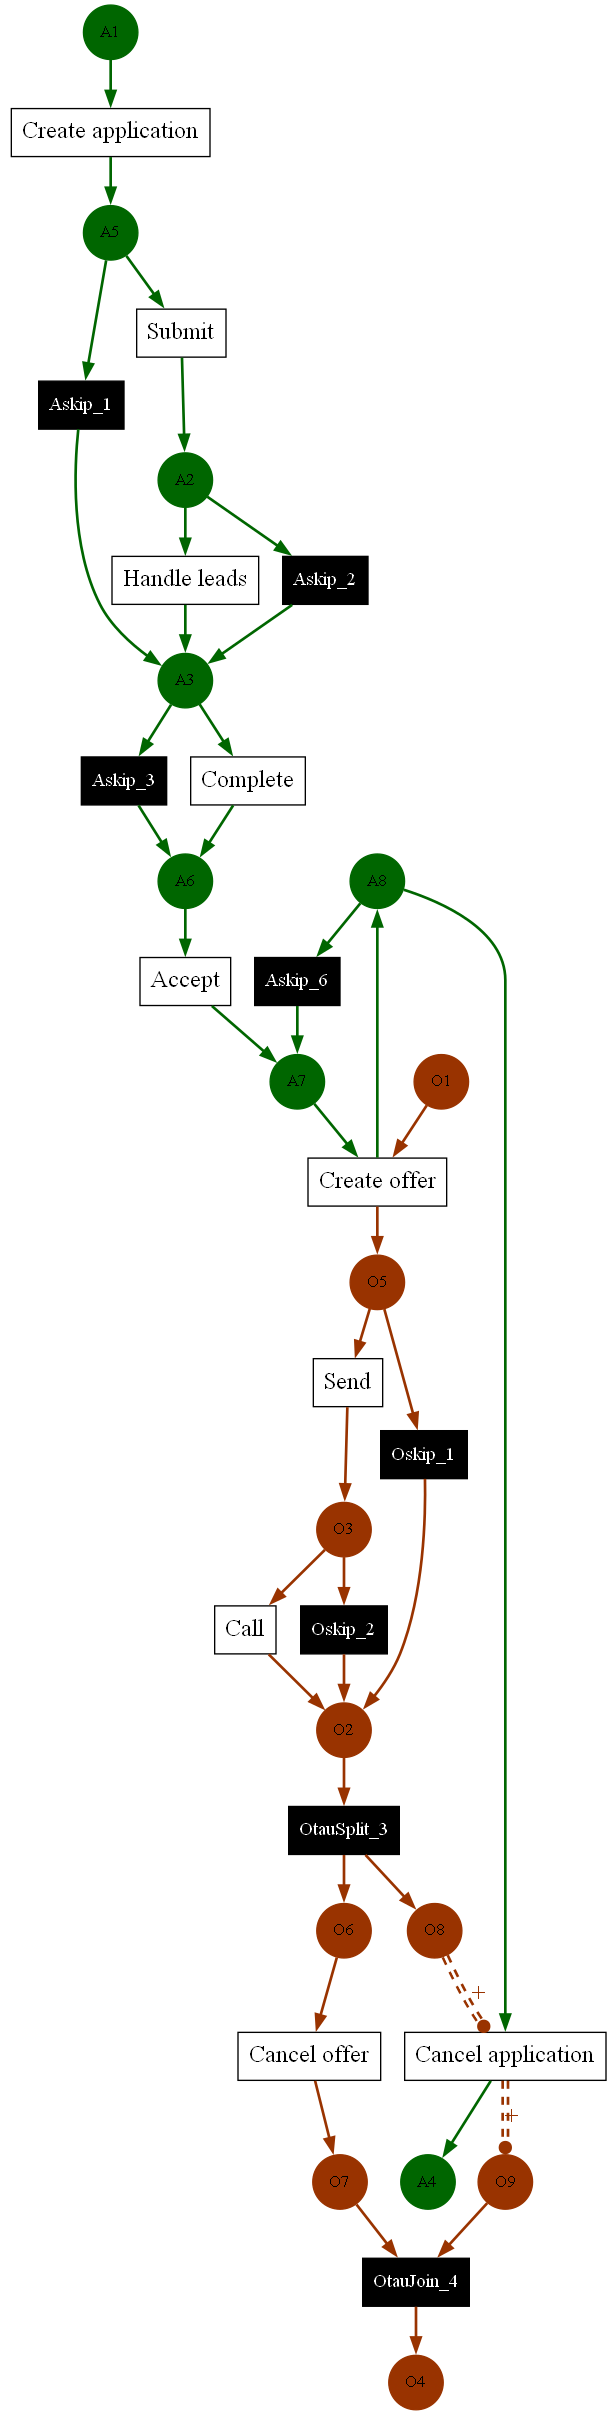

4.461514711380005


In [617]:
#步骤5：构造标准OCPN模型，每次库所名称都会变化！！！
start_time = time.time()

from ocpa.algo.conformance.precision_and_fitness import evaluator as quality_measure_factory
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
filename = "sample_logs/csv/挖掘定性使用BPI2017-Top10.csv"
object_types = ["A", "O"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"event_activity",
              "time_name":"event_timestamp",
              "sep":","}
ocel = ocel_import_factory.apply(file_path= filename,parameters = parameters)
ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})
gviz=ocpn_vis_factory.apply(ocpn)
ocpn_vis_factory.view(gviz)

end_time = time.time()

time7 = end_time - start_time
print(time7)   
# print(ocpn.places)
# print(ocpn.transitions)
# print(ocpn.arcs)

In [618]:
#步骤6：构造开始标识-第1步-确定开始库所和结束库所

###开始库所
start_time = time.time()

def get_initial_places(ocpn):
    initial_places = {}
    for place in ocpn.places:
        if place.initial:
            if place.object_type not in initial_places:
                initial_places[place.object_type] = []
            initial_places[place.object_type].append(place.name)
    return initial_places

initial_places = get_initial_places(ocpn)
print("OCPN的开始库所获取成功！内容如下：")
print(initial_places)

###结束库所

def get_final_places(ocpn):
    final_places = {}
    for place in ocpn.places:
        if place.final:
            if place.object_type not in final_places:
                final_places[place.object_type] = []
            final_places[place.object_type].append(place.name)
    return final_places

final_places = get_final_places(ocpn)
print("OCPN的结束库所获取成功！内容如下：")
print(final_places)

end_time = time.time()

time8 = end_time - start_time
print(time8)   

OCPN的开始库所获取成功！内容如下：
{'A': ['A1'], 'O': ['O1']}
OCPN的结束库所获取成功！内容如下：
{'A': ['A4'], 'O': ['O4']}
0.0019948482513427734


In [619]:
#步骤6：构造开始标识-第2步-构造开始标识

def extract_objects_from_bindings(formatted_nodes):
    objects_dict = {}

    for layer in formatted_nodes:
        for binding in layer:
            _, objects = binding
            for obj_type, obj_list in objects.items():
                if obj_type not in objects_dict:
                    objects_dict[obj_type] = set()
                objects_dict[obj_type].update(obj_list)

    # 转换集合为列表形式
    for obj_type in objects_dict:
        objects_dict[obj_type] = list(objects_dict[obj_type])

    return objects_dict

# 将token放入开始库所，构造token列表 [(plane1,p1),(baggage1,b1),(baggage1,b2)]
def generate_initial_marking(initial_places, objects_dict):
    initial_marking = []
    for obj_type, initial_objs in initial_places.items():
        if obj_type in objects_dict:
            for initial_obj in initial_objs:
                for obj in objects_dict[obj_type]:
                    initial_marking.append((initial_obj, obj))
    return initial_marking

In [620]:
#步骤7：重演-第1步-提取变迁的前集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取前集库所的函数
def get_predecessor_places(arcs, transition):
    predecessor_places = []
    for arc in arcs:
        if arc.target == transition:
            predecessor_places.append(arc.source)
    return predecessor_places

In [621]:
#步骤7：重演-第2步-提取变迁的后集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取后继库所的函数
def get_postdecessor_places(arcs, transition):
    postdecessor_places = []
    for arc in arcs:
        if arc.source == transition:
            postdecessor_places.append(arc.target)
    return postdecessor_places

In [622]:
#步骤7：重演-第3步-移除结束库所的Token
def remove_tokens_from_final_places(current_marking, final_places_dict):  
    consumed = []  
    updated_marking = []  
    consumed_count = 0  # 初始化计数器  
  
    # final_places_dict 是一个字典，键是库所类型，值是结束库所名称的列表  
    final_places = {place_name for place_type, names in final_places_dict.items() for place_name in names}  
  
    # 遍历当前标识中的所有Token  
    for place_name, token in current_marking:  
        if place_name in final_places:  
            consumed.append(token)  
            consumed_count += 1  # 更新计数器  
        else:  
            updated_marking.append((place_name, token))  
  
    return updated_marking, consumed, consumed_count  

In [623]:
#步骤8：各种函数
# 判断变迁可以发生
def is_transition_enabled(transition, pre_places, current_marking, binding_objects):  
    current_places = {p for p, _ in current_marking}  
    current_tokens = set(current_marking)  
      
    for place in pre_places:  
        place_name = place.name
        place_type = place.object_type 
#         if place_name not in current_places:  
#             return False  # 库所不在current_marking中   
          
        # 检查是否存在与库所类型匹配的对象类型  
        matching_objects_found = False  
        for obj_type, obj_list in binding_objects.items():  
            if obj_type == place_type:  
                matching_objects_found = True  
                for obj in obj_list:  
                    required_token = (place_name, obj)  
                    if required_token not in current_tokens:  
                        return False  # 缺少所需的token  
          
        # 如果没有找到匹配的对象类型，也返回False  
        if not matching_objects_found:  
            return False  # 没有找到与库所类型匹配的对象类型  
      
    return True
#更新标识

def update_marking(current_marking, pre_places, post_places, objects):
    # 移除前集库所及其所有绑定对象组成的元组
    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        # 从 current_marking 中移除所有对应的 Token
        current_marking = [token for token in current_marking if not (token[0] == place_name and token[1] in objects.get(place_type, []))]
    
    # 将后继库所及其绑定对象组成的元组添加到 current_marking 中
    for place in post_places:
        place_name = place.name
        place_type = place.object_type
        
        # 添加 Token
        if place_type in objects:
            for obj in objects[place_type]:
                current_marking.append((place_name, obj))
                
    return current_marking


def add_missing_token(pre_places, current_marking, binding_objects):
    missing_tokens = []

    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        if place_type in binding_objects:
            required_tokens = set((place_name, obj) for obj in binding_objects[place_type])
            
            for token in required_tokens:
                if token not in current_marking:
                    current_marking.append(token)
                    missing_tokens.append(token)  # 记录缺失的Token
                    
    return current_marking, missing_tokens

In [624]:
# #步骤9：重演
# 暂时注释所有print    
    
def apply_bindings_to_ocpn(bindings, ocpn, initial_marking):
    # 定义计数器
    produced = len(initial_marking)
    consumed = 0
    missing = 0
    remaining = 0
    current_marking = initial_marking
    #构造无法使能变迁集合
    unabled_transition = set()
    added_tokens_info = []  # 存储所有添加的缺失Token

    # 判断变迁是否可以发生
    for binding_group in bindings:
        for binding in binding_group:
            if isinstance(binding, tuple) and len(binding) == 2:
                activity, objects = binding
                transition = find_transition_by_label(ocpn.transitions, activity)
                if transition is None:
#                     print("No Transition")
                    continue

                pre_places = get_predecessor_places(ocpn.arcs, transition)
                if is_transition_enabled(transition, pre_places, current_marking, objects):
                    # 变迁可以发生
                    consumed += sum(len(v) for v in objects.values())
                    produced += sum(len(v) for v in objects.values())
                    missing += 0

                    post_places = get_postdecessor_places(ocpn.arcs, transition)
                    current_marking = update_marking(current_marking, pre_places, post_places, objects)
#                     print(f"{activity} 发生后当前标识为：", current_marking)
                else:
                    # 变迁无法发生，尝试添加缺失的Token
                    current_marking, missing_tokens = add_missing_token(pre_places, current_marking, objects)
                    if missing_tokens:
                        added_tokens_info.append({activity: missing_tokens})

#                     print(f"{activity} 不可发生，添加缺失Token后的当前标识为：", current_marking)

                    # 再次检查变迁是否可以发生
                    if is_transition_enabled(transition, pre_places, current_marking, objects):
                        #将无法使能变迁添加到集合中
                        unabled_transition.add(transition)
                        consumed += sum(len(v) for v in objects.values())
                        produced += sum(len(v) for v in objects.values())
                        missing += len(missing_tokens)

                        post_places = get_postdecessor_places(ocpn.arcs, transition)
                        current_marking = update_marking(current_marking, pre_places, post_places, objects)
#                         print(f"{activity} 发生后当前标识为：", current_marking)
                    else:
                        print(f"{activity} 仍不可发生")

#     print("当前标识为：", current_marking)
    final_places_dict = get_final_places(ocpn)
#     print("结束库所为：", final_places_dict)
    current_marking = remove_tokens_from_final_places(current_marking, final_places_dict)
    consumed_count = current_marking[-1]
    consumed += consumed_count
#     print("移除Token后，当前标识为：", current_marking)
    if current_marking:
        remaining += len(current_marking[0])

#     print("produced:", produced)
#     print("consumed:", consumed)
#     print("missing:", missing)
#     print("remaining:", remaining)
    
    #输出无法使能变迁集合
#     print("无法使能的变迁集合:", unabled_transition)
    #输出添加的缺失Token信息
#     print("添加的缺失Token信息:", added_tokens_info)
    
    return produced, consumed, missing, remaining, unabled_transition, added_tokens_info #输出结果是元组

In [625]:
#步骤10：加入数据
# token_result_1 = apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking)
# print(type(apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking))) #元组

start_time = time.time()

token_result_list = []
for i in range(len(formatted_nodes_list)):
    objects_dict = extract_objects_from_bindings(formatted_nodes_list[i])
# 以下暂时注释
#     print("流程执行",i+1,"绑定中涉及的各类型及相应对象的内容如下：")
#     print(objects_dict)
    initial_marking = generate_initial_marking(initial_places, objects_dict)
#     print("流程执行",i+1,"开始标识获取成功！内容如下：")
#     print(initial_marking)
    token_result = apply_bindings_to_ocpn(formatted_nodes_list[i],ocpn,initial_marking)
#     print(token_result)
    token_result_list.append(token_result)
#暂时注释
# print(token_result_list)

import csv  
  
def extract_all_transitions_tokens(process_list):  
    results = []  
    for index, (_, _, _, _, transitions, token_info_dicts) in enumerate(process_list, start=1):  
        for transition in transitions:  
            transition_str = str(transition)  
            for token_dict in token_info_dicts:  
                if transition_str in token_dict:  
                    tokens = token_dict[transition_str]  # 提取与变迁对应的所有token  
                    for token in tokens:  # 遍历所有token  
                        results.append((index, transition_str, token))  
    return results
  
# 调用函数并获取结果  
results = extract_all_transitions_tokens(token_result_list)  
  
# 写入CSV文件  
with open('plane_unfitting_pe.csv', 'w', newline='', encoding='utf-8') as file:  
    writer = csv.writer(file)  
    # 写入表头  
    writer.writerow(['流程执行序号', '无法使能变迁', '添加缺失Token信息'])  
    # 写入结果  
    writer.writerows(results)  
  
print("不拟合流程执行已写入CSV文件。")


def cal_batch(token_result_list):
    pre_top = 0 
    pre_bot = 0
    post_top = 0
    post_bot = 0
    for i in range(len(token_result_list)):
        pre_top += token_result_list[i][2]
        pre_bot += token_result_list[i][1]
        post_top += token_result_list[i][3]
        post_bot += token_result_list[i][0]
    return pre_top,pre_bot,post_top,post_bot
result = cal_batch(token_result_list)
calculate_ratio_pre = result[0]/result[1]
calculate_ratio_post = result[2]/result[3]
fitness = (1/2)*(1-calculate_ratio_pre) + (1/2)*(1-calculate_ratio_post)
# print("生成的Token总数:消耗的Token总数:缺失的Token总数:剩余的Token总数=",result[3],result[1],result[0],result[2],)
print(fitness)

end_time = time.time()

time9 = end_time - start_time
print(time9)

不拟合流程执行已写入CSV文件。
0.6348857964866561
1.6973979473114014


In [626]:
# 暂时注释掉所有print

start_time = time.time()

def unabled_transitions_total_tokens(bindings, ocpn, initial_marking, unabled_transition):
    transition_info = {}

    # 遍历无法使能变迁集合
    for transition in unabled_transition:
        pre_places = get_predecessor_places(ocpn.arcs, transition)
#         print(transition,"前集库所",pre_places)
        transition_name = transition.name
        transition_info[transition_name] = []

        # 遍历绑定序列
        for binding_group in bindings:
            for binding in binding_group:
                if isinstance(binding, tuple) and len(binding) == 2:
                    activity, objects = binding
                    if activity == transition_name:
                        for place in pre_places:
                            place_name = place.name
                            place_type = place.object_type
                            for obj_type, obj_list in objects.items():
                                if obj_type == place_type:
                                    for obj in obj_list:
                                        transition_info[transition_name].append((place_name, obj))

    return transition_info
def calculate_token_ratio(total_tokens, missing_tokens):
    # 将缺失Token列表合并为一个字典
    combined_missing_tokens = {}
    for missing in missing_tokens:
        for key, value in missing.items():
            if key in combined_missing_tokens:
                combined_missing_tokens[key].extend(value)
            else:
                combined_missing_tokens[key] = value

    # 计算比率
    token_ratios = {}
    for key, total in total_tokens.items():
        missing = combined_missing_tokens.get(key, [])
        total_count = len(total)
        missing_count = len(missing)
        ratio = (total_count - missing_count) / total_count if total_count != 0 else 0
        token_ratios[key] = round(ratio,2)

    return token_ratios

for i in range(len(token_result_list)):
    #获取无法使能变迁
    unabled_transition = token_result_list[i][4] #{Lift off, Unload}
#     print("流程执行",i+1,"未使能变迁如下：")
#     print(unabled_transition)
    #获取每个无法使能变迁的总Token
    unabled_transitions_total_tokens_num = unabled_transitions_total_tokens(formatted_nodes_list[i], ocpn, initial_marking, unabled_transition)
#     print("未使能变迁的总Token",unabled_transitions_total_tokens_num)
    #获取每个无法使能变迁的缺失重补Token
    unabled_transition_missing_token = token_result_list[i][5] #[{'Lift off': [('plane3', 'p1')]}, {'Unload': [('baggage2', 'b2')]}]
#     print("未使能变迁的缺失Token",unabled_transition_missing_token)
    ratios = calculate_token_ratio(unabled_transitions_total_tokens_num, unabled_transition_missing_token)
#     print("未使能变迁的正确通过对象比例:", ratios)
    
end_time = time.time()

time10 = end_time - start_time
print(time10)    

0.2869701385498047


# 定性评估

In [593]:
#步骤1：导入噪声日志

from ocpa.objects.log.importer.ocel import factory as ocel_import_factory
filename = "sample_logs/csv/PM4PY-PE1-BPI2017-filtere-不合规-1006DelO77.jsonocel"
ocel = ocel_import_factory.apply(filename)
print("噪声日志导入成功! 内容如下：")
print(ocel)

噪声日志导入成功! 内容如下：
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['A', 'O'], act_attr={'Create application': ['start_timestamp'], 'Submit': ['start_timestamp'], 'Handle leads': ['start_timestamp'], 'Accept': ['start_timestamp'], 'Complete': ['start_timestamp'], 'Create offer': ['start_timestamp'], 'Send': ['start_timestamp'], 'Call': ['start_timestamp'], 'Cancel application': ['start_timestamp'], 'Cancel offer': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_t

提取流程执行成功！
Number of process executions: 1
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]
流程执行 1 如图


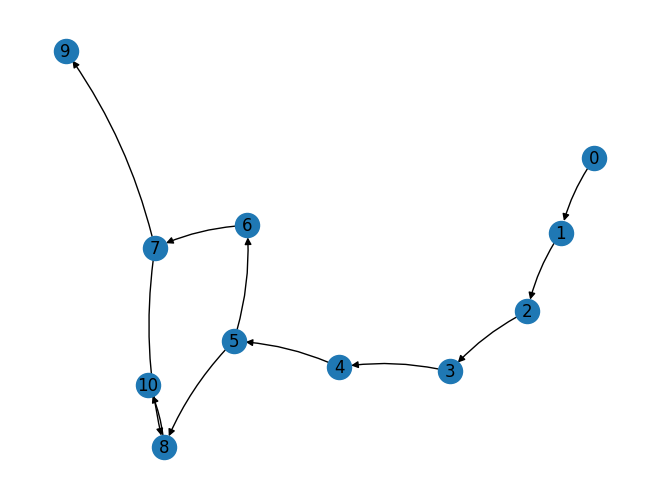

In [594]:
#步骤2：提取流程执行

print("提取流程执行成功！")
print("Number of process executions: "+str(len(ocel.process_executions)))
print(ocel.process_executions)
# print("Events of the first process execution: "+str(ocel.process_executions[0]))
# print("Objects of the first process execution: "+str(ocel.process_execution_objects[0]))
import networkx as nx
import matplotlib.pyplot as plt

pe_graph = []
for i in range(len(ocel.process_executions)):
    graph = ocel.get_process_execution_graph(i)
    pe_graph.append(graph)
for i in range(len(pe_graph)):
    pos = nx.spring_layout(pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"如图")
    plt.show()

流程执行 1 删除跨层冗余依赖成功！如图：


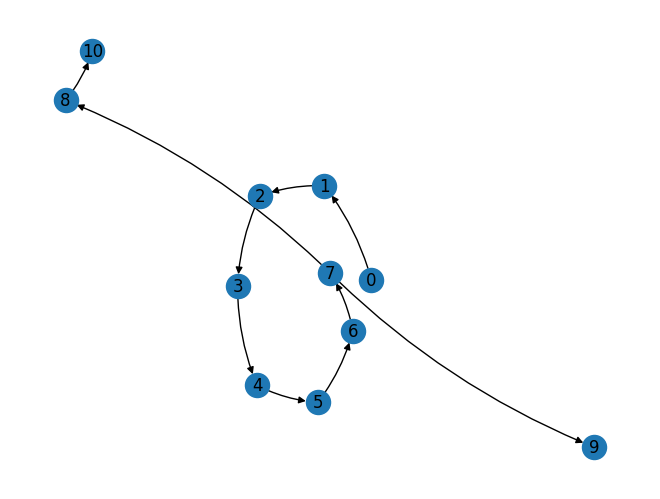

In [595]:
#步骤3：删除跨层冗余依赖

def transitive_reduction(G):
    # Ensure G is a DAG
    if not nx.is_directed_acyclic_graph(G):
        msg = "Directed Acyclic Graph required for transitive_reduction"
        raise nx.NetworkXError(msg)
    
    TR = nx.DiGraph()
    TR.add_nodes_from(G.nodes())
    descendants = {}
    check_count = dict(G.in_degree)
    
    for u in G:
        u_nbrs = set(G[u])
        for v in G[u]:
            if v in u_nbrs:
                if v not in descendants:
                    descendants[v] = {y for x, y in nx.dfs_edges(G, v)}
                u_nbrs -= descendants[v]
            check_count[v] -= 1
            if check_count[v] == 0:
                del descendants[v]
        TR.add_edges_from((u, v) for v in u_nbrs)
    
    return TR
# re_graph = transitive_reduction(graph_1)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行1删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_2)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行2删除跨层冗余依赖成功！如图：")
# plt.show()
# re_graph = transitive_reduction(graph_3)
# import matplotlib.pyplot as plt
# pos = nx.spring_layout(re_graph)  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
# nx.draw(re_graph, pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
# print("流程执行3删除跨层冗余依赖成功！如图：")
# plt.show()
import matplotlib.pyplot as plt
reduction_pe_graph = []
for i in range(len(pe_graph)):
    re_graph = transitive_reduction(pe_graph[i])
    reduction_pe_graph.append(re_graph)
for i in range(len(reduction_pe_graph)):
    pos = nx.spring_layout(reduction_pe_graph[i])  # 选择布局算法，这里用了 spring_layout，也可以选择其他算法
    nx.draw(reduction_pe_graph[i], pos, with_labels=True, arrows=True, connectionstyle='arc3,rad=0.1')  # 绘制图形
    print("流程执行",i+1,"删除跨层冗余依赖成功！如图：")
    plt.show()

In [596]:

#步骤4：按梯队划分绑定序列-第1步-获取分组情况

def get_no_incoming_nodes(G):
    """ Return a list of nodes with no incoming edges in the graph G """
    return [node for node in G.nodes if G.in_degree(node) == 0]

def layer_nodes(G):
    """ Return a list of layers of nodes with no incoming edges in the graph G """
    final = []
    while G.nodes:
        current_layer = get_no_incoming_nodes(G)
        final.append(current_layer)
        G.remove_nodes_from(current_layer)
    return final
# re_graph = transitive_reduction(graph_1)
# layered_nodes = layer_nodes(re_graph.copy())
# print("流程执行1按梯队划分绑定序列成功！分组情况如下：")
# print("Layered Nodes:", layered_nodes)
layered_nodes_list = []
for i in range(len(reduction_pe_graph)):
    layered_nodes = layer_nodes(reduction_pe_graph[i].copy())
    layered_nodes_list.append(layered_nodes)
for i in range(len(layered_nodes_list)):
    print("流程执行",i+1,"按梯队划分绑定序列成功！分组情况如下：")
    print("Layered Nodes:", layered_nodes_list[i])

流程执行 1 按梯队划分绑定序列成功！分组情况如下：
Layered Nodes: [[0], [1], [2], [3], [4], [5], [6], [7], [8, 9], [10]]


In [597]:
#步骤4：按梯队划分绑定序列-第2步-获取OCEL数据

#手动添加：噪声日志部分提取内容
ocel_log = """
OCEL(log=Table(), obj=ObjectCentricEventLog(meta=MetaObjectCentricData(attr_names=[], attr_types=["<class 'datetime.datetime'>"], attr_typ={'start_timestamp': "<class 'datetime.datetime'>"}, obj_types=['A', 'O'], act_attr={'Create application': ['start_timestamp'], 'Submit': ['start_timestamp'], 'Handle leads': ['start_timestamp'], 'Accept': ['start_timestamp'], 'Complete': ['start_timestamp'], 'Create offer': ['start_timestamp'], 'Send': ['start_timestamp'], 'Call': ['start_timestamp'], 'Cancel application': ['start_timestamp'], 'Cancel offer': ['start_timestamp']}, attr_events=['start_timestamp']), raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Create application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Submit, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Handle leads, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Accept, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Complete, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Create offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Send, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Call, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110', 'Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Cancel application, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Application_1624036826', 'Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (9, Event 9 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_545478877'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (10, Event 10 - Activity: Cancel offer, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['Offer_2069800110'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'Application_1624036826': Object Application_1624036826 - Type: A, OVMAP: {}, 'Offer_2069800110': Object Offer_2069800110 - Type: O, OVMAP: {}, 'Offer_545478877': Object Offer_545478877 - Type: O, OVMAP: {}}, obj_event_mapping={'Application_1624036826': [0, 1, 2, 3, 4, 5, 8], 'Offer_2069800110': [5, 6, 7, 8, 10], 'Offer_545478877': [5, 6, 7, 9]})), graph=EventGraph(eog=<networkx.classes.digraph.DiGraph object at 0x0000028A94F49348>), parameters={'obj_names': ['A', 'O'], 'val_names': ['sevent_tevent_aevent_revent_tevent__event_tevent_ievent_mevent_eevent_sevent_tevent_aevent_mevent_p'], 'act_name': 'event_activity', 'time_name': 'event_timestamp', 'sep': ','})"""
import re
match = re.search(r'raw=RawObjectCentricData\((.*?)\)\)', ocel_log, re.DOTALL)
if match:
    raw_data = match.group(0)
#     print("Extracted Raw Data:")
#     print(raw_data)
else:
    print("No match found for raw=RawObjectCentricData")
import re
from collections import OrderedDict

# 假设 raw_data 是提取到的 Raw Data 部分
# raw_data = "raw=RawObjectCentricData(events=OrderedDict([(0, Event 0 - Activity: Fuel plane, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (1, Event 1 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (2, Event 2 - Activity: Check-in, Timestamp: 2023-01-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 1, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (3, Event 3 - Activity: Lift off, Timestamp: 2023-02-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 2, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (4, Event 4 - Activity: Load cargo, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (5, Event 5 - Activity: Unload, Timestamp: 2023-03-03 16:00:00+00:00, OMAP: ['b1', 'b2', 'p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 3, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (6, Event 6 - Activity: Clean, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['p1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (7, Event 7 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b2'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)}), (8, Event 8 - Activity: Pick up @ dest, Timestamp: 2023-04-03 16:00:00+00:00, OMAP: ['b1'], VMAP: {'start_timestamp': datetime.datetime(2023, 4, 3, 16, 0, tzinfo=datetime.timezone.utc)})]), objects={'b1': Object b1 - Type: baggage, OVMAP: {}, 'b2': Object b2 - Type: baggage, OVMAP: {}, 'p1': Object p1 - Type: plane, OVMAP: {}}, obj_event_mapping={'p1': [0, 3, 4, 5, 6], 'b1': [1, 4, 5, 8], 'b2': [2, 5, 7]}))"

# 定义正则表达式来匹配每个事件的数据
event_pattern = re.compile(r'\((\d+), Event \d+ - Activity: (.*?), Timestamp: .*?, OMAP: (\[.*?\]), VMAP: .*?\)')

# 初始化一个字典来保存结果
events_dict = {}

# 使用正则表达式查找所有匹配的事件
matches = event_pattern.findall(raw_data)

# 定义对象类型和对应的对象
object_types = {
    'A': ['Application_1624036826'],
    'O': ['Offer_2069800110','Offer_545478877']
}

# 处理每个匹配的事件并将其保存到字典中
for match in matches:
    event_index = int(match[0])
    activity = match[1]
    omap = eval(match[2])  # 将OMAP字符串转换为实际的列表
    categorized_objects = {}
    for obj_type, objects in object_types.items():
        categorized_objects[obj_type] = [obj for obj in omap if obj in objects]
    events_dict[event_index] = [activity, categorized_objects]

# 打印结果
print("完整日志 事件活动绑定匹配成功！内容如下：")
print(events_dict)

完整日志 事件活动绑定匹配成功！内容如下：
{0: ['Create application', {'A': ['Application_1624036826'], 'O': []}], 1: ['Submit', {'A': ['Application_1624036826'], 'O': []}], 2: ['Handle leads', {'A': ['Application_1624036826'], 'O': []}], 3: ['Accept', {'A': ['Application_1624036826'], 'O': []}], 4: ['Complete', {'A': ['Application_1624036826'], 'O': []}], 5: ['Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110', 'Offer_545478877']}], 6: ['Send', {'A': [], 'O': ['Offer_2069800110', 'Offer_545478877']}], 7: ['Call', {'A': [], 'O': ['Offer_2069800110', 'Offer_545478877']}], 8: ['Cancel application', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110']}], 9: ['Cancel offer', {'A': [], 'O': ['Offer_545478877']}], 10: ['Cancel offer', {'A': [], 'O': ['Offer_2069800110']}]}


In [598]:
#步骤4：按梯队划分绑定序列-第3步-获取绑定序列

def format_layered_nodes(layered_nodes, events_dict):
    formatted_nodes = []

    for layer in layered_nodes:
        layer_list = []
        for node in layer:
            if node in events_dict:
                activity_name = events_dict[node][0]
                objects_map = events_dict[node][1]
                layer_list.append((activity_name, objects_map))
            else:
                print(f"Event index {node} not found in events_dict.")
        formatted_nodes.append(layer_list)

    return formatted_nodes
# formatted_nodes = format_layered_nodes(layered_nodes, events_dict)
# print("流程执行1 绑定序列获取成功！内容如下：")
# print(formatted_nodes)
formatted_nodes_list = []
for i in range(len(layered_nodes_list)):
    formatted_nodes = format_layered_nodes(layered_nodes_list[i], events_dict)
    formatted_nodes_list.append(formatted_nodes)
for i in range(len(formatted_nodes_list)):
    print("流程执行",i+1, "绑定序列获取成功！内容如下：")
    print(formatted_nodes_list[i])

流程执行 1 绑定序列获取成功！内容如下：
[[('Create application', {'A': ['Application_1624036826'], 'O': []})], [('Submit', {'A': ['Application_1624036826'], 'O': []})], [('Handle leads', {'A': ['Application_1624036826'], 'O': []})], [('Accept', {'A': ['Application_1624036826'], 'O': []})], [('Complete', {'A': ['Application_1624036826'], 'O': []})], [('Create offer', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110', 'Offer_545478877']})], [('Send', {'A': [], 'O': ['Offer_2069800110', 'Offer_545478877']})], [('Call', {'A': [], 'O': ['Offer_2069800110', 'Offer_545478877']})], [('Cancel application', {'A': ['Application_1624036826'], 'O': ['Offer_2069800110']}), ('Cancel offer', {'A': [], 'O': ['Offer_545478877']})], [('Cancel offer', {'A': [], 'O': ['Offer_2069800110']})]]


D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\versions\to_ocel.py:12: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  df = df_importer.apply(filepath, parameters)
D:\Microsoft Edge-downloads\ocpa-main\ocpa\objects\log\importer\csv\util.py:49: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  stream = df.to_dict('r')


Table Format Successfully Imported
Object Format Successfully Imported
Graph Format Successfully Imported


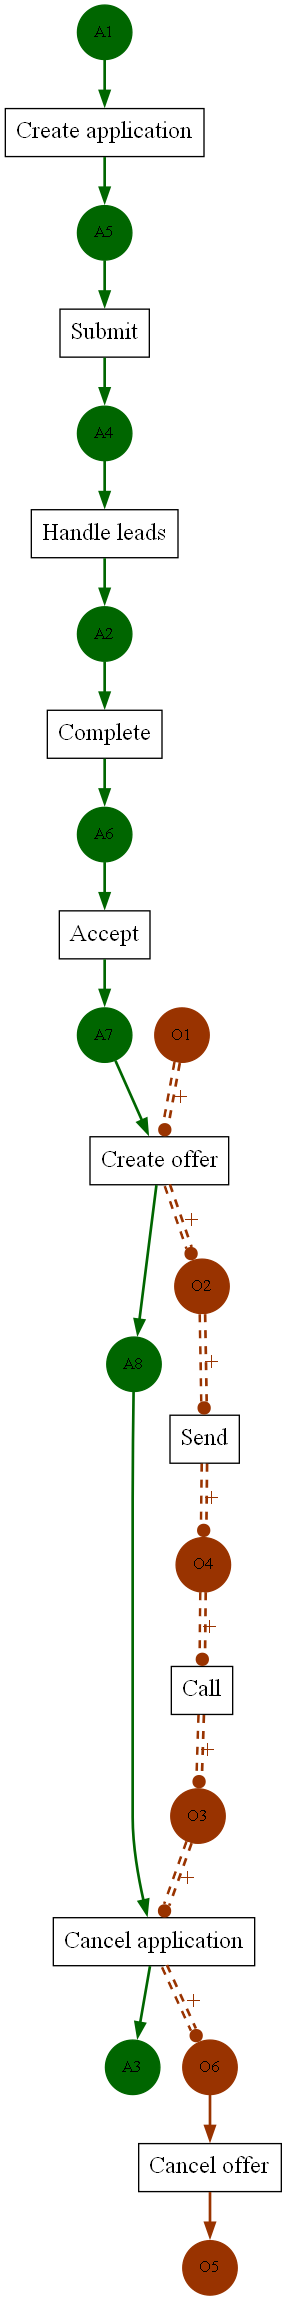

In [599]:
from ocpa.algo.conformance.precision_and_fitness import evaluator as quality_measure_factory
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
from ocpa.algo.discovery.ocpn import algorithm as ocpn_discovery_factory
from ocpa.visualization.oc_petri_net import factory as ocpn_vis_factory
filename = "sample_logs/csv/PE1-BPI2017-filtered-合规.csv"
object_types = ["A", "O"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"event_activity",
              "time_name":"event_timestamp",
              "sep":","}
ocel = ocel_import_factory.apply(file_path= filename,parameters = parameters)
ocpn = ocpn_discovery_factory.apply(ocel, parameters={"debug": False})
gviz=ocpn_vis_factory.apply(ocpn)
ocpn_vis_factory.view(gviz)
ocpn_vis_factory.save(ocpn_vis_factory.apply(ocpn), "2017Fliter_petri_net.png")

In [600]:
#步骤6：构造开始标识-第1步-确定开始库所和结束库所

###开始库所

def get_initial_places(ocpn):
    initial_places = {}
    for place in ocpn.places:
        if place.initial:
            if place.object_type not in initial_places:
                initial_places[place.object_type] = []
            initial_places[place.object_type].append(place.name)
    return initial_places

initial_places = get_initial_places(ocpn)
print("OCPN的开始库所获取成功！内容如下：")
print(initial_places)

###结束库所

def get_final_places(ocpn):
    final_places = {}
    for place in ocpn.places:
        if place.final:
            if place.object_type not in final_places:
                final_places[place.object_type] = []
            final_places[place.object_type].append(place.name)
    return final_places

final_places = get_final_places(ocpn)
print("OCPN的结束库所获取成功！内容如下：")
print(final_places)

OCPN的开始库所获取成功！内容如下：
{'A': ['A1'], 'O': ['O1']}
OCPN的结束库所获取成功！内容如下：
{'O': ['O5'], 'A': ['A3']}


In [601]:
#步骤6：构造开始标识-第2步-构造开始标识
def extract_objects_from_bindings(formatted_nodes):
    objects_dict = {}

    for layer in formatted_nodes:
        for binding in layer:
            _, objects = binding
            for obj_type, obj_list in objects.items():
                if obj_type not in objects_dict:
                    objects_dict[obj_type] = set()
                objects_dict[obj_type].update(obj_list)

    # 转换集合为列表形式
    for obj_type in objects_dict:
        objects_dict[obj_type] = list(objects_dict[obj_type])

    return objects_dict

# 提取对象
# objects_dict = extract_objects_from_bindings(formatted_nodes)

# # 输出结果
# print("流程执行1 绑定中涉及的各类型及相应对象的内容如下：")
# print(objects_dict)

# 将token放入开始库所，构造token列表 [(plane1,p1),(baggage1,b1),(baggage1,b2)]
def generate_initial_marking(initial_places, objects_dict):
    initial_marking = []
    for obj_type, initial_objs in initial_places.items():
        if obj_type in objects_dict:
            for initial_obj in initial_objs:
                for obj in objects_dict[obj_type]:
                    initial_marking.append((initial_obj, obj))
    return initial_marking
# initial_marking = generate_initial_marking(initial_places, objects_dict)
# # print(len(initial_marking))
# print("流程执行1 开始标识获取成功！内容如下：")
# print(initial_marking)

In [602]:
#步骤7：重演-第1步-提取变迁的前集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取前集库所的函数
def get_predecessor_places(arcs, transition):
    predecessor_places = []
    for arc in arcs:
        if arc.target == transition:
            predecessor_places.append(arc.source)
    return predecessor_places

In [603]:
#步骤7：重演-第2步-提取变迁的后集库所
# 定义查找变迁的函数
def find_transition_by_label(transitions, label):
    for transition in transitions:
        if transition.name == label:
            return transition
    return None

# 定义获取后继库所的函数
def get_postdecessor_places(arcs, transition):
    postdecessor_places = []
    for arc in arcs:
        if arc.source == transition:
            postdecessor_places.append(arc.target)
    return postdecessor_places

In [604]:
#步骤7：重演-第3步-移除结束库所的Token
def remove_tokens_from_final_places(current_marking, final_places_dict):  
    consumed = []  
    updated_marking = []  
    consumed_count = 0  # 初始化计数器  
  
    # final_places_dict 是一个字典，键是库所类型，值是结束库所名称的列表  
    final_places = {place_name for place_type, names in final_places_dict.items() for place_name in names}  
  
    # 遍历当前标识中的所有Token  
    for place_name, token in current_marking:  
        if place_name in final_places:  
            consumed.append(token)  
            consumed_count += 1  # 更新计数器  
        else:  
            updated_marking.append((place_name, token))  
  
    return updated_marking, consumed, consumed_count  

In [605]:
#步骤8：各种函数
# 判断变迁可以发生
def is_transition_enabled(transition, pre_places, current_marking, binding_objects):  
    current_places = {p for p, _ in current_marking}  
    current_tokens = set(current_marking)  
      
    for place in pre_places:  
        place_name = place.name
        place_type = place.object_type 
#         if place_name not in current_places:  
#             return False  # 库所不在current_marking中   
          
        # 检查是否存在与库所类型匹配的对象类型  
        matching_objects_found = False  
        for obj_type, obj_list in binding_objects.items():  
            if obj_type == place_type:  
                matching_objects_found = True  
                for obj in obj_list:  
                    required_token = (place_name, obj)  
                    if required_token not in current_tokens:  
                        return False  # 缺少所需的token  
          
        # 如果没有找到匹配的对象类型，也返回False  
        if not matching_objects_found:  
            return False  # 没有找到与库所类型匹配的对象类型  
      
    return True
#更新标识

def update_marking(current_marking, pre_places, post_places, objects):
    # 移除前集库所及其所有绑定对象组成的元组
    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        # 从 current_marking 中移除所有对应的 Token
        current_marking = [token for token in current_marking if not (token[0] == place_name and token[1] in objects.get(place_type, []))]
    
    # 将后继库所及其绑定对象组成的元组添加到 current_marking 中
    for place in post_places:
        place_name = place.name
        place_type = place.object_type
        
        # 添加 Token
        if place_type in objects:
            for obj in objects[place_type]:
                current_marking.append((place_name, obj))
                
    return current_marking





#添加缺失Token

# def add_missing_token(pre_places, current_marking, binding_objects):
#     # 检查并添加缺失的前集库所绑定对象
#     for place in pre_places:
#         place_name = place.name
#         place_type = place.object_type
        
#         # 找到与 place_type 匹配的对象
#         if place_type in binding_objects:
#             required_tokens = set((place_name, obj) for obj in binding_objects[place_type])
            
#             # 添加缺失的 Token
#             for token in required_tokens:
#                 if token not in current_marking:
#                     current_marking.append(token)
                    
#     return current_marking
def add_missing_token(pre_places, current_marking, binding_objects):
    missing_tokens = []

    for place in pre_places:
        place_name = place.name
        place_type = place.object_type
        
        if place_type in binding_objects:
            required_tokens = set((place_name, obj) for obj in binding_objects[place_type])
            
            for token in required_tokens:
                if token not in current_marking:
                    current_marking.append(token)
                    missing_tokens.append(token)  # 记录缺失的Token
                    
    return current_marking, missing_tokens

In [606]:
# #步骤9：重演
    
def apply_bindings_to_ocpn(bindings, ocpn, initial_marking):
    # 定义计数器
    produced = len(initial_marking)
    consumed = 0
    missing = 0
    remaining = 0
    current_marking = initial_marking
    #构造无法使能变迁集合
    unabled_transition = set()
    added_tokens_info = []  # 存储所有添加的缺失Token

    # 判断变迁是否可以发生
    for binding_group in bindings:
        for binding in binding_group:
            if isinstance(binding, tuple) and len(binding) == 2:
                activity, objects = binding
                transition = find_transition_by_label(ocpn.transitions, activity)
                if transition is None:
                    print("No Transition")
                    continue

                pre_places = get_predecessor_places(ocpn.arcs, transition)
                if is_transition_enabled(transition, pre_places, current_marking, objects):
                    # 变迁可以发生
                    consumed += sum(len(v) for v in objects.values())
                    produced += sum(len(v) for v in objects.values())
                    missing += 0

                    post_places = get_postdecessor_places(ocpn.arcs, transition)
                    current_marking = update_marking(current_marking, pre_places, post_places, objects)
                    print(f"{activity} 发生后当前标识为：", current_marking)
                else:
                    # 变迁无法发生，尝试添加缺失的Token
                    current_marking, missing_tokens = add_missing_token(pre_places, current_marking, objects)
                    if missing_tokens:
                        added_tokens_info.append({activity: missing_tokens})

                    print(f"{activity} 不可发生，添加缺失Token后的当前标识为：", current_marking)

                    # 再次检查变迁是否可以发生
                    if is_transition_enabled(transition, pre_places, current_marking, objects):
                        #将无法使能变迁添加到集合中
                        unabled_transition.add(transition)
                        consumed += sum(len(v) for v in objects.values())
                        produced += sum(len(v) for v in objects.values())
                        missing += len(missing_tokens)

                        post_places = get_postdecessor_places(ocpn.arcs, transition)
                        current_marking = update_marking(current_marking, pre_places, post_places, objects)
                        print(f"{activity} 发生后当前标识为：", current_marking)
                    else:
                        print(f"{activity} 仍不可发生")

    print("当前标识为：", current_marking)
    final_places_dict = get_final_places(ocpn)
    print("结束库所为：", final_places_dict)
    current_marking = remove_tokens_from_final_places(current_marking, final_places_dict)
    consumed_count = current_marking[-1]
    consumed += consumed_count
    print("移除Token后，当前标识为：", current_marking)
    if current_marking:
        remaining += len(current_marking[0])

    print("produced:", produced)
    print("consumed:", consumed)
    print("missing:", missing)
    print("remaining:", remaining)
    
    #输出无法使能变迁集合
    print("无法使能的变迁集合:", unabled_transition)
    #输出添加的缺失Token信息
    print("添加的缺失Token信息:", added_tokens_info)
    
    return produced, consumed, missing, remaining, unabled_transition, added_tokens_info #输出结果是元组

In [610]:
#步骤10：加入数据
# token_result_1 = apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking)
# print(type(apply_bindings_to_ocpn(formatted_nodes,ocpn,initial_marking))) #元组
token_result_list = []
for i in range(len(formatted_nodes_list)):
    objects_dict = extract_objects_from_bindings(formatted_nodes_list[i])
    print("流程执行",i+1,"绑定中涉及的各类型及相应对象的内容如下：")
    print(objects_dict)
    initial_marking = generate_initial_marking(initial_places, objects_dict)
    print("流程执行",i+1,"开始标识获取成功！内容如下：")
    print(initial_marking)
    token_result = apply_bindings_to_ocpn(formatted_nodes_list[i],ocpn,initial_marking)
    print(token_result)
    token_result_list.append(token_result)
print(token_result_list)

import csv  
  
def extract_all_transitions_tokens(process_list):  
    results = []  
    for index, (_, _, _, _, transitions, token_info_dicts) in enumerate(process_list, start=1):  
        for transition in transitions:  
            transition_str = str(transition)  
            for token_dict in token_info_dicts:  
                if transition_str in token_dict:  
                    tokens = token_dict[transition_str]  # 提取与变迁对应的所有token  
                    for token in tokens:  # 遍历所有token  
                        results.append((index, transition_str, token))  
    return results
  
# 调用函数并获取结果  
results = extract_all_transitions_tokens(token_result_list)  
  
# 写入CSV文件  
with open('plane_unfitting_pe.csv', 'w', newline='', encoding='utf-8') as file:  
    writer = csv.writer(file)  
    # 写入表头  
    writer.writerow(['流程执行序号', '无法使能变迁', '添加缺失Token信息'])  
    # 写入结果  
    writer.writerows(results)  
  
print("偏差结果已写入CSV文件。")


def cal_batch(token_result_list):
    pre_top = 0 
    pre_bot = 0
    post_top = 0
    post_bot = 0
    for i in range(len(token_result_list)):
        pre_top += token_result_list[i][2]
        pre_bot += token_result_list[i][1]
        post_top += token_result_list[i][3]
        post_bot += token_result_list[i][0]
    return pre_top,pre_bot,post_top,post_bot
result = cal_batch(token_result_list)
calculate_ratio_pre = result[0]/result[1]
calculate_ratio_post = result[2]/result[3]
fitness = (1/2)*(1-calculate_ratio_pre) + (1/2)*(1-calculate_ratio_post)
print("生成的Token总数:消耗的Token总数:缺失的Token总数:剩余的Token总数=",result[3],result[1],result[0],result[2],)
print(fitness)
def unabled_transitions_total_tokens(bindings, ocpn, initial_marking, unabled_transition):
    transition_info = {}

    # 遍历无法使能变迁集合
    for transition in unabled_transition:
        pre_places = get_predecessor_places(ocpn.arcs, transition)
#         print(transition,"前集库所",pre_places)
        transition_name = transition.name
        transition_info[transition_name] = []

        # 遍历绑定序列
        for binding_group in bindings:
            for binding in binding_group:
                if isinstance(binding, tuple) and len(binding) == 2:
                    activity, objects = binding
                    if activity == transition_name:
                        for place in pre_places:
                            place_name = place.name
                            place_type = place.object_type
                            for obj_type, obj_list in objects.items():
                                if obj_type == place_type:
                                    for obj in obj_list:
                                        transition_info[transition_name].append((place_name, obj))

    return transition_info
def calculate_token_ratio(total_tokens, missing_tokens):
    # 将缺失Token列表合并为一个字典
    combined_missing_tokens = {}
    for missing in missing_tokens:
        for key, value in missing.items():
            if key in combined_missing_tokens:
                combined_missing_tokens[key].extend(value)
            else:
                combined_missing_tokens[key] = value

    # 计算比率
    token_ratios = {}
    for key, total in total_tokens.items():
        missing = combined_missing_tokens.get(key, [])
        total_count = len(total)
        missing_count = len(missing)
        ratio = (total_count - missing_count) / total_count if total_count != 0 else 0
        token_ratios[key] = round(ratio,2)

    return token_ratios

for i in range(len(token_result_list)):
    #获取无法使能变迁
    unabled_transition = token_result_list[i][4] #{Lift off, Unload}
#     print("流程执行",i+1,"未使能变迁如下：")
#     print(unabled_transition)
    #获取每个无法使能变迁的总Token
    unabled_transitions_total_tokens_num = unabled_transitions_total_tokens(formatted_nodes_list[i], ocpn, initial_marking, unabled_transition)
#     print("未使能变迁的总Token",unabled_transitions_total_tokens_num)
    #获取每个无法使能变迁的缺失重补Token
    unabled_transition_missing_token = token_result_list[i][5] #[{'Lift off': [('plane3', 'p1')]}, {'Unload': [('baggage2', 'b2')]}]
#     print("未使能变迁的缺失Token",unabled_transition_missing_token)
    ratios = calculate_token_ratio(unabled_transitions_total_tokens_num, unabled_transition_missing_token)
    print("未使能变迁的正确通过对象比例:", ratios)

流程执行 1 绑定中涉及的各类型及相应对象的内容如下：
{'A': ['Application_1624036826'], 'O': ['Offer_2069800110', 'Offer_545478877']}
流程执行 1 开始标识获取成功！内容如下：
[('A1', 'Application_1624036826'), ('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877')]
Create application 发生后当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A5', 'Application_1624036826')]
Submit 发生后当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A4', 'Application_1624036826')]
Handle leads 发生后当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A2', 'Application_1624036826')]
Accept 不可发生，添加缺失Token后的当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A2', 'Application_1624036826'), ('A6', 'Application_1624036826')]
Accept 发生后当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A2', 'Application_1624036826'), ('A7', 'Application_1624036826')]
Complete 发生后当前标识为： [('O1', 'Offer_2069800110'), ('O1', 'Offer_545478877'), ('A7', 'Application_1624036826'), ('A6', 'Application_1624036826')]
Cre

In [608]:
def unabled_transitions_total_tokens(bindings, ocpn, initial_marking, unabled_transition):
    transition_info = {}

    # 遍历无法使能变迁集合
    for transition in unabled_transition:
        pre_places = get_predecessor_places(ocpn.arcs, transition)
        print(transition,"前集库所",pre_places)
        transition_name = transition.name
        transition_info[transition_name] = []

        # 遍历绑定序列
        for binding_group in bindings:
            for binding in binding_group:
                if isinstance(binding, tuple) and len(binding) == 2:
                    activity, objects = binding
                    if activity == transition_name:
                        for place in pre_places:
                            place_name = place.name
                            place_type = place.object_type
                            for obj_type, obj_list in objects.items():
                                if obj_type == place_type:
                                    for obj in obj_list:
                                        transition_info[transition_name].append((place_name, obj))

    return transition_info
def calculate_token_ratio(total_tokens, missing_tokens):
    # 将缺失Token列表合并为一个字典
    combined_missing_tokens = {}
    for missing in missing_tokens:
        for key, value in missing.items():
            if key in combined_missing_tokens:
                combined_missing_tokens[key].extend(value)
            else:
                combined_missing_tokens[key] = value

    # 计算比率
    token_ratios = {}
    for key, total in total_tokens.items():
        missing = combined_missing_tokens.get(key, [])
        total_count = len(total)
        missing_count = len(missing)
        ratio = (total_count - missing_count) / total_count if total_count != 0 else 0
        token_ratios[key] = round(ratio,2)

    return token_ratios

for i in range(len(token_result_list)):
    #获取无法使能变迁
    unabled_transition = token_result_list[i][4] #{Lift off, Unload}
    print("流程执行",i+1,"未使能变迁如下：")
    print(unabled_transition)
    #获取每个无法使能变迁的总Token
    unabled_transitions_total_tokens_num = unabled_transitions_total_tokens(formatted_nodes_list[i], ocpn, initial_marking, unabled_transition)
    print("未使能变迁的总Token",unabled_transitions_total_tokens_num)
    #获取每个无法使能变迁的缺失重补Token
    unabled_transition_missing_token = token_result_list[i][5] #[{'Lift off': [('plane3', 'p1')]}, {'Unload': [('baggage2', 'b2')]}]
    print("未使能变迁的缺失Token",unabled_transition_missing_token)
    ratios = calculate_token_ratio(unabled_transitions_total_tokens_num, unabled_transition_missing_token)
    print("未使能变迁的正确通过对象比例:", ratios)

流程执行 1 未使能变迁如下：
{Accept, Cancel offer}
Accept 前集库所 [A6]
Cancel offer 前集库所 [O6]
未使能变迁的总Token {'Accept': [('A6', 'Application_1624036826')], 'Cancel offer': [('O6', 'Offer_545478877'), ('O6', 'Offer_2069800110')]}
未使能变迁的缺失Token [{'Accept': [('A6', 'Application_1624036826')]}, {'Cancel offer': [('O6', 'Offer_545478877')]}]
未使能变迁的正确通过对象比例: {'Accept': 0.0, 'Cancel offer': 0.5}
